# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/522206'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-05 11:03:27.100388: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-05 11:03:27.799705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 11:03:28.084425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 11:03:28.168086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 11:03:28.712669: I tensorflow/core/platform/cpu_feature_guar

2024-10-05 11:03:32.608310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "yelp", sample_size=100_000
)

Loading train tensors:   0%|          | 0/146 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/146 [00:03<07:45,  3.21s/it]

Loading train tensors:   1%|▏         | 2/146 [00:06<07:46,  3.24s/it]

Loading train tensors:   2%|▏         | 3/146 [00:09<07:46,  3.26s/it]

Loading train tensors:   3%|▎         | 4/146 [00:12<07:38,  3.23s/it]

Loading train tensors:   3%|▎         | 5/146 [00:16<07:31,  3.20s/it]

Loading train tensors:   4%|▍         | 6/146 [00:19<07:25,  3.18s/it]

Loading train tensors:   5%|▍         | 7/146 [00:22<07:20,  3.17s/it]

Loading train tensors:   5%|▌         | 8/146 [00:25<07:18,  3.18s/it]

Loading train tensors:   6%|▌         | 9/146 [00:28<07:12,  3.16s/it]

Loading train tensors:   7%|▋         | 10/146 [00:31<07:00,  3.10s/it]

Loading train tensors:   8%|▊         | 11/146 [00:34<06:49,  3.03s/it]

Loading train tensors:   8%|▊         | 12/146 [00:37<06:41,  3.00s/it]

Loading train tensors:   9%|▉         | 13/146 [00:40<06:34,  2.96s/it]

Loading train tensors:  10%|▉         | 14/146 [00:43<06:28,  2.94s/it]

Loading train tensors:  10%|█         | 15/146 [00:46<06:23,  2.93s/it]

Loading train tensors:  11%|█         | 16/146 [00:49<06:20,  2.93s/it]

Loading train tensors:  12%|█▏        | 17/146 [00:51<06:17,  2.92s/it]

Loading train tensors:  12%|█▏        | 18/146 [00:54<06:13,  2.91s/it]

Loading train tensors:  13%|█▎        | 19/146 [00:57<06:07,  2.90s/it]

Loading train tensors:  14%|█▎        | 20/146 [01:00<06:05,  2.90s/it]

Loading train tensors:  14%|█▍        | 21/146 [01:03<06:02,  2.90s/it]

Loading train tensors:  15%|█▌        | 22/146 [01:06<05:57,  2.88s/it]

Loading train tensors:  16%|█▌        | 23/146 [01:09<05:52,  2.86s/it]

Loading train tensors:  16%|█▋        | 24/146 [01:12<05:48,  2.86s/it]

Loading train tensors:  17%|█▋        | 25/146 [01:14<05:46,  2.86s/it]

Loading train tensors:  18%|█▊        | 26/146 [01:17<05:42,  2.85s/it]

Loading train tensors:  18%|█▊        | 27/146 [01:20<05:39,  2.85s/it]

Loading train tensors:  19%|█▉        | 28/146 [01:23<05:36,  2.85s/it]

Loading train tensors:  20%|█▉        | 29/146 [01:26<05:33,  2.85s/it]

Loading train tensors:  21%|██        | 30/146 [01:29<05:30,  2.85s/it]

Loading train tensors:  21%|██        | 31/146 [01:32<05:29,  2.87s/it]

Loading train tensors:  22%|██▏       | 32/146 [01:34<05:26,  2.86s/it]

Loading train tensors:  23%|██▎       | 33/146 [01:37<05:23,  2.87s/it]

Loading train tensors:  23%|██▎       | 34/146 [01:40<05:21,  2.87s/it]

Loading train tensors:  24%|██▍       | 35/146 [01:43<05:19,  2.88s/it]

Loading train tensors:  25%|██▍       | 36/146 [01:46<05:16,  2.88s/it]

Loading train tensors:  25%|██▌       | 37/146 [01:49<05:13,  2.87s/it]

Loading train tensors:  26%|██▌       | 38/146 [01:52<05:09,  2.86s/it]

Loading train tensors:  27%|██▋       | 39/146 [01:54<05:06,  2.86s/it]

Loading train tensors:  27%|██▋       | 40/146 [01:57<05:02,  2.85s/it]

Loading train tensors:  28%|██▊       | 41/146 [02:00<04:59,  2.85s/it]

Loading train tensors:  29%|██▉       | 42/146 [02:03<04:56,  2.85s/it]

Loading train tensors:  29%|██▉       | 43/146 [02:06<04:53,  2.85s/it]

Loading train tensors:  30%|███       | 44/146 [02:09<04:50,  2.84s/it]

Loading train tensors:  31%|███       | 45/146 [02:11<04:46,  2.84s/it]

Loading train tensors:  32%|███▏      | 46/146 [02:14<04:44,  2.85s/it]

Loading train tensors:  32%|███▏      | 47/146 [02:17<04:40,  2.84s/it]

Loading train tensors:  33%|███▎      | 48/146 [02:20<04:37,  2.84s/it]

Loading train tensors:  34%|███▎      | 49/146 [02:23<04:34,  2.83s/it]

Loading train tensors:  34%|███▍      | 50/146 [02:26<04:32,  2.83s/it]

Loading train tensors:  35%|███▍      | 51/146 [02:29<04:29,  2.83s/it]

Loading train tensors:  36%|███▌      | 52/146 [02:31<04:26,  2.84s/it]

Loading train tensors:  36%|███▋      | 53/146 [02:34<04:24,  2.84s/it]

Loading train tensors:  37%|███▋      | 54/146 [02:37<04:22,  2.85s/it]

Loading train tensors:  38%|███▊      | 55/146 [02:40<04:18,  2.84s/it]

Loading train tensors:  38%|███▊      | 56/146 [02:43<04:16,  2.85s/it]

Loading train tensors:  39%|███▉      | 57/146 [02:46<04:12,  2.84s/it]

Loading train tensors:  40%|███▉      | 58/146 [02:48<04:09,  2.84s/it]

Loading train tensors:  40%|████      | 59/146 [02:51<04:06,  2.84s/it]

Loading train tensors:  41%|████      | 60/146 [02:54<04:03,  2.83s/it]

Loading train tensors:  42%|████▏     | 61/146 [02:57<04:00,  2.83s/it]

Loading train tensors:  42%|████▏     | 62/146 [03:00<03:58,  2.84s/it]

Loading train tensors:  43%|████▎     | 63/146 [03:03<03:55,  2.84s/it]

Loading train tensors:  44%|████▍     | 64/146 [03:05<03:52,  2.83s/it]

Loading train tensors:  45%|████▍     | 65/146 [03:08<03:49,  2.84s/it]

Loading train tensors:  45%|████▌     | 66/146 [03:11<03:48,  2.85s/it]

Loading train tensors:  46%|████▌     | 67/146 [03:14<03:44,  2.84s/it]

Loading train tensors:  47%|████▋     | 68/146 [03:17<03:41,  2.84s/it]

Loading train tensors:  47%|████▋     | 69/146 [03:20<03:38,  2.84s/it]

Loading train tensors:  48%|████▊     | 70/146 [03:22<03:36,  2.84s/it]

Loading train tensors:  49%|████▊     | 71/146 [03:25<03:33,  2.84s/it]

Loading train tensors:  49%|████▉     | 72/146 [03:28<03:29,  2.84s/it]

Loading train tensors:  50%|█████     | 73/146 [03:31<03:29,  2.88s/it]

Loading train tensors:  51%|█████     | 74/146 [03:34<03:28,  2.89s/it]

Loading train tensors:  51%|█████▏    | 75/146 [03:37<03:25,  2.90s/it]

Loading train tensors:  52%|█████▏    | 76/146 [03:40<03:22,  2.90s/it]

Loading train tensors:  53%|█████▎    | 77/146 [03:43<03:20,  2.91s/it]

Loading train tensors:  53%|█████▎    | 78/146 [03:46<03:17,  2.90s/it]

Loading train tensors:  54%|█████▍    | 79/146 [03:49<03:14,  2.91s/it]

Loading train tensors:  55%|█████▍    | 80/146 [03:52<03:12,  2.92s/it]

Loading train tensors:  55%|█████▌    | 81/146 [03:54<03:08,  2.90s/it]

Loading train tensors:  56%|█████▌    | 82/146 [03:57<03:05,  2.89s/it]

Loading train tensors:  57%|█████▋    | 83/146 [04:00<03:01,  2.88s/it]

Loading train tensors:  58%|█████▊    | 84/146 [04:03<02:58,  2.88s/it]

Loading train tensors:  58%|█████▊    | 85/146 [04:06<02:55,  2.88s/it]

Loading train tensors:  59%|█████▉    | 86/146 [04:09<02:52,  2.87s/it]

Loading train tensors:  60%|█████▉    | 87/146 [04:12<02:49,  2.88s/it]

Loading train tensors:  60%|██████    | 88/146 [04:14<02:46,  2.88s/it]

Loading train tensors:  61%|██████    | 89/146 [04:17<02:43,  2.88s/it]

Loading train tensors:  62%|██████▏   | 90/146 [04:20<02:40,  2.87s/it]

Loading train tensors:  62%|██████▏   | 91/146 [04:23<02:37,  2.86s/it]

Loading train tensors:  63%|██████▎   | 92/146 [04:26<02:34,  2.86s/it]

Loading train tensors:  64%|██████▎   | 93/146 [04:29<02:31,  2.86s/it]

Loading train tensors:  64%|██████▍   | 94/146 [04:32<02:29,  2.87s/it]

Loading train tensors:  65%|██████▌   | 95/146 [04:35<02:26,  2.87s/it]

Loading train tensors:  66%|██████▌   | 96/146 [04:37<02:23,  2.87s/it]

Loading train tensors:  66%|██████▋   | 97/146 [04:40<02:20,  2.87s/it]

Loading train tensors:  67%|██████▋   | 98/146 [04:43<02:16,  2.85s/it]

Loading train tensors:  68%|██████▊   | 99/146 [04:46<02:13,  2.84s/it]

Loading train tensors:  68%|██████▊   | 100/146 [04:49<02:10,  2.84s/it]

Loading train tensors:  69%|██████▉   | 101/146 [04:52<02:08,  2.85s/it]

Loading train tensors:  70%|██████▉   | 102/146 [04:54<02:04,  2.84s/it]

Loading train tensors:  71%|███████   | 103/146 [04:57<02:02,  2.84s/it]

Loading train tensors:  71%|███████   | 104/146 [05:00<01:59,  2.84s/it]

Loading train tensors:  72%|███████▏  | 105/146 [05:03<01:56,  2.85s/it]

Loading train tensors:  73%|███████▎  | 106/146 [05:06<01:53,  2.85s/it]

Loading train tensors:  73%|███████▎  | 107/146 [05:09<01:51,  2.85s/it]

Loading train tensors:  74%|███████▍  | 108/146 [05:12<01:48,  2.84s/it]

Loading train tensors:  75%|███████▍  | 109/146 [05:14<01:44,  2.84s/it]

Loading train tensors:  75%|███████▌  | 110/146 [05:17<01:42,  2.85s/it]

Loading train tensors:  76%|███████▌  | 111/146 [05:20<01:40,  2.86s/it]

Loading train tensors:  77%|███████▋  | 112/146 [05:23<01:37,  2.87s/it]

Loading train tensors:  77%|███████▋  | 113/146 [05:26<01:34,  2.87s/it]

Loading train tensors:  78%|███████▊  | 114/146 [05:29<01:31,  2.87s/it]

Loading train tensors:  79%|███████▉  | 115/146 [05:32<01:29,  2.87s/it]

Loading train tensors:  79%|███████▉  | 116/146 [05:34<01:26,  2.87s/it]

Loading train tensors:  80%|████████  | 117/146 [05:37<01:23,  2.87s/it]

Loading train tensors:  81%|████████  | 118/146 [05:40<01:20,  2.87s/it]

Loading train tensors:  82%|████████▏ | 119/146 [05:43<01:17,  2.87s/it]

Loading train tensors:  82%|████████▏ | 120/146 [05:46<01:14,  2.87s/it]

Loading train tensors:  83%|████████▎ | 121/146 [05:49<01:11,  2.87s/it]

Loading train tensors:  84%|████████▎ | 122/146 [05:52<01:08,  2.87s/it]

Loading train tensors:  84%|████████▍ | 123/146 [05:55<01:06,  2.88s/it]

Loading train tensors:  85%|████████▍ | 124/146 [05:57<01:02,  2.86s/it]

Loading train tensors:  86%|████████▌ | 125/146 [06:00<01:00,  2.86s/it]

Loading train tensors:  86%|████████▋ | 126/146 [06:03<00:57,  2.87s/it]

Loading train tensors:  87%|████████▋ | 127/146 [06:06<00:54,  2.86s/it]

Loading train tensors:  88%|████████▊ | 128/146 [06:09<00:51,  2.87s/it]

Loading train tensors:  88%|████████▊ | 129/146 [06:12<00:48,  2.87s/it]

Loading train tensors:  89%|████████▉ | 130/146 [06:15<00:45,  2.87s/it]

Loading train tensors:  90%|████████▉ | 131/146 [06:18<00:43,  2.87s/it]

Loading train tensors:  90%|█████████ | 132/146 [06:20<00:40,  2.87s/it]

Loading train tensors:  91%|█████████ | 133/146 [06:23<00:37,  2.87s/it]

Loading train tensors:  92%|█████████▏| 134/146 [06:26<00:34,  2.87s/it]

Loading train tensors:  92%|█████████▏| 135/146 [06:29<00:31,  2.87s/it]

Loading train tensors:  93%|█████████▎| 136/146 [06:32<00:28,  2.87s/it]

Loading train tensors:  94%|█████████▍| 137/146 [06:35<00:25,  2.87s/it]

Loading train tensors:  95%|█████████▍| 138/146 [06:38<00:23,  2.88s/it]

Loading train tensors:  95%|█████████▌| 139/146 [06:41<00:20,  2.88s/it]

Loading train tensors:  96%|█████████▌| 140/146 [06:43<00:17,  2.89s/it]

Loading train tensors:  97%|█████████▋| 141/146 [06:46<00:14,  2.89s/it]

Loading train tensors:  97%|█████████▋| 142/146 [06:49<00:11,  2.90s/it]

Loading train tensors:  98%|█████████▊| 143/146 [06:52<00:08,  2.90s/it]

Loading train tensors:  99%|█████████▊| 144/146 [06:55<00:05,  2.90s/it]

Loading train tensors:  99%|█████████▉| 145/146 [06:58<00:02,  2.90s/it]

Loading train tensors: 100%|██████████| 146/146 [07:01<00:00,  2.80s/it]

Loading train tensors: 100%|██████████| 146/146 [07:01<00:00,  2.88s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/37 [00:00<?, ?it/s]

Loading val tensors:   3%|▎         | 1/37 [00:02<01:41,  2.81s/it]

Loading val tensors:   5%|▌         | 2/37 [00:05<01:38,  2.81s/it]

Loading val tensors:   8%|▊         | 3/37 [00:08<01:35,  2.81s/it]

Loading val tensors:  11%|█         | 4/37 [00:11<01:33,  2.82s/it]

Loading val tensors:  14%|█▎        | 5/37 [00:14<01:30,  2.82s/it]

Loading val tensors:  16%|█▌        | 6/37 [00:16<01:27,  2.83s/it]

Loading val tensors:  19%|█▉        | 7/37 [00:19<01:24,  2.82s/it]

Loading val tensors:  22%|██▏       | 8/37 [00:22<01:22,  2.84s/it]

Loading val tensors:  24%|██▍       | 9/37 [00:25<01:19,  2.84s/it]

Loading val tensors:  27%|██▋       | 10/37 [00:28<01:16,  2.84s/it]

Loading val tensors:  30%|██▉       | 11/37 [00:31<01:14,  2.86s/it]

Loading val tensors:  32%|███▏      | 12/37 [00:34<01:13,  2.95s/it]

Loading val tensors:  35%|███▌      | 13/37 [00:38<01:17,  3.22s/it]

Loading val tensors:  38%|███▊      | 14/37 [00:42<01:18,  3.42s/it]

Loading val tensors:  41%|████      | 15/37 [00:46<01:19,  3.62s/it]

Loading val tensors:  43%|████▎     | 16/37 [00:50<01:20,  3.82s/it]

Loading val tensors:  46%|████▌     | 17/37 [00:55<01:20,  4.04s/it]

Loading val tensors:  49%|████▊     | 18/37 [01:01<01:33,  4.90s/it]

Loading val tensors:  51%|█████▏    | 19/37 [01:09<01:40,  5.60s/it]

Loading val tensors:  54%|█████▍    | 20/37 [01:16<01:44,  6.15s/it]

Loading val tensors:  57%|█████▋    | 21/37 [01:24<01:44,  6.55s/it]

Loading val tensors:  59%|█████▉    | 22/37 [01:31<01:42,  6.82s/it]

Loading val tensors:  62%|██████▏   | 23/37 [01:38<01:37,  6.99s/it]

Loading val tensors:  65%|██████▍   | 24/37 [01:46<01:31,  7.05s/it]

Loading val tensors:  68%|██████▊   | 25/37 [01:53<01:24,  7.04s/it]

Loading val tensors:  70%|███████   | 26/37 [02:00<01:17,  7.08s/it]

Loading val tensors:  73%|███████▎  | 27/37 [02:07<01:11,  7.16s/it]

Loading val tensors:  76%|███████▌  | 28/37 [02:14<01:04,  7.18s/it]

Loading val tensors:  78%|███████▊  | 29/37 [02:22<00:57,  7.22s/it]

Loading val tensors:  81%|████████  | 30/37 [02:29<00:50,  7.28s/it]

Loading val tensors:  84%|████████▍ | 31/37 [02:36<00:43,  7.30s/it]

Loading val tensors:  86%|████████▋ | 32/37 [02:44<00:36,  7.28s/it]

Loading val tensors:  89%|████████▉ | 33/37 [02:51<00:29,  7.27s/it]

Loading val tensors:  92%|█████████▏| 34/37 [02:58<00:21,  7.22s/it]

Loading val tensors:  95%|█████████▍| 35/37 [03:05<00:14,  7.18s/it]

Loading val tensors:  97%|█████████▋| 36/37 [03:12<00:07,  7.13s/it]

Loading val tensors: 100%|██████████| 37/37 [03:15<00:00,  5.96s/it]

Loading val tensors: 100%|██████████| 37/37 [03:15<00:00,  5.29s/it]

Loading test tensors:   0%|          | 0/13 [00:00<?, ?it/s]

Loading test tensors:   8%|▊         | 1/13 [00:06<01:16,  6.40s/it]

Loading test tensors:  15%|█▌        | 2/13 [00:12<01:06,  6.04s/it]

Loading test tensors:  23%|██▎       | 3/13 [00:17<00:57,  5.77s/it]

Loading test tensors:  31%|███       | 4/13 [00:23<00:50,  5.64s/it]

Loading test tensors:  38%|███▊      | 5/13 [00:28<00:44,  5.52s/it]

Loading test tensors:  46%|████▌     | 6/13 [00:33<00:38,  5.43s/it]

Loading test tensors:  54%|█████▍    | 7/13 [00:39<00:32,  5.47s/it]

Loading test tensors:  62%|██████▏   | 8/13 [00:44<00:27,  5.43s/it]

Loading test tensors:  69%|██████▉   | 9/13 [00:49<00:20,  5.21s/it]

Loading test tensors:  77%|███████▋  | 10/13 [00:53<00:14,  4.94s/it]

Loading test tensors:  85%|████████▍ | 11/13 [00:57<00:09,  4.68s/it]

Loading test tensors:  92%|█████████▏| 12/13 [01:01<00:04,  4.47s/it]

Loading test tensors: 100%|██████████| 13/13 [01:03<00:00,  3.54s/it]

Loading test tensors: 100%|██████████| 13/13 [01:03<00:00,  4.85s/it]

Test size:  38000
Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([38000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39792
neg:  40208
pos:  10092
neg:  9908
pos:  9969
neg:  10031


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    # lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=True,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=8, out_features=8, bias=False)
        )
        (combine_heads): Linear(in_features=8, out_features=8, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=8, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=8, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((8,), eps=1e-05,

Epoch 01: 2368.27batch/s, Epoch = 0m 33s, Loss = 0.3477|0.2486, Acc = 0.850|0.903, AUC = 92.578|96.528


Epoch 02: 3433.28batch/s, Epoch = 0m 23s, Loss = 0.2536|0.2308, Acc = 0.900|0.909, AUC = 96.000|96.973


Epoch 03: 1886.98batch/s, Epoch = 0m 42s, Loss = 0.2401|0.2310, Acc = 0.905|0.904, AUC = 96.416|97.144


Epoch 04: 2730.66batch/s, Epoch = 0m 29s, Loss = 0.2323|0.2227, Acc = 0.908|0.908, AUC = 96.662|97.103


Epoch 05: 1922.67batch/s, Epoch = 0m 41s, Loss = 0.2259|0.2172, Acc = 0.910|0.913, AUC = 96.859|97.209


Epoch 06: 2858.13batch/s, Epoch = 0m 27s, Loss = 0.2081|0.2171, Acc = 0.917|0.913, AUC = 97.334|97.311


Epoch 07: 1671.29batch/s, Epoch = 0m 47s, Loss = 0.2053|0.2158, Acc = 0.919|0.914, AUC = 97.394|97.328


Epoch 08: 1693.40batch/s, Epoch = 0m 47s, Loss = 0.2036|0.2140, Acc = 0.919|0.914, AUC = 97.443|97.341


Epoch 09: 2224.18batch/s, Epoch = 0m 35s, Loss = 0.2018|0.2137, Acc = 0.920|0.915, AUC = 97.470|97.333


Epoch 10: 1321.94batch/s, Epoch = 1m 0s, Loss = 0.2012|0.2171, Acc = 0.919|0.915, AUC = 97.495|97.334


Epoch 11: 1699.85batch/s, Epoch = 0m 47s, Loss = 0.1981|0.2168, Acc = 0.920|0.915, AUC = 97.573|97.332


Epoch 12: 3024.84batch/s, Epoch = 0m 26s, Loss = 0.1980|0.2162, Acc = 0.921|0.915, AUC = 97.571|97.332


Epoch 13: 2654.85batch/s, Epoch = 0m 30s, Loss = 0.1982|0.2153, Acc = 0.922|0.915, AUC = 97.560|97.339


Epoch 14: 2863.37batch/s, Epoch = 0m 27s, Loss = 0.1981|0.2173, Acc = 0.921|0.915, AUC = 97.569|97.324


Epoch 15: 2587.56batch/s, Epoch = 0m 30s, Loss = 0.1985|0.2166, Acc = 0.921|0.914, AUC = 97.554|97.327


Epoch 16: 2500.20batch/s, Epoch = 0m 31s, Loss = 0.1977|0.2164, Acc = 0.921|0.914, AUC = 97.577|97.328


Epoch 17: 3051.29batch/s, Epoch = 0m 26s, Loss = 0.1984|0.2166, Acc = 0.921|0.914, AUC = 97.562|97.329


Epoch 18: 2485.24batch/s, Epoch = 0m 32s, Loss = 0.1978|0.2169, Acc = 0.921|0.914, AUC = 97.576|97.328


Epoch 19: 2223.36batch/s, Epoch = 0m 35s, Loss = 0.1983|0.2163, Acc = 0.921|0.915, AUC = 97.570|97.328


Epoch 20: 2399.22batch/s, Epoch = 0m 33s, Loss = 0.1980|0.2165, Acc = 0.922|0.914, AUC = 97.579|97.329
TOTAL TIME = 713.48s
BEST ACC = 0.92% AT EPOCH 10
BEST AUC = 97.34 AT EPOCH 8


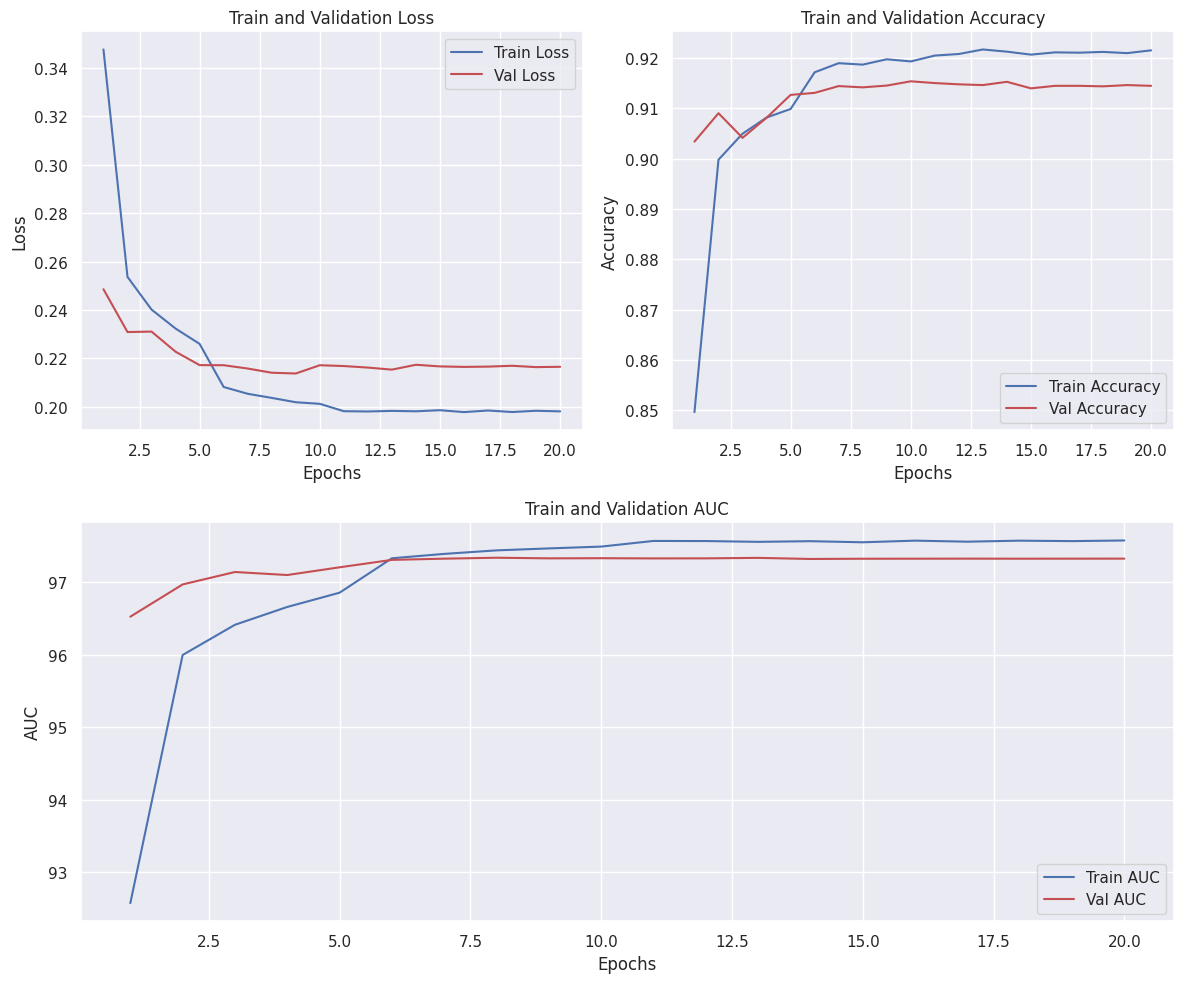

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [9]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "basic",
        "rot": "Z",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, i

Epoch   1/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   1/15:   0%|          | 1/1250 [00:01<29:24,  1.41s/batch]

Epoch   1/15:   0%|          | 2/1250 [00:02<27:51,  1.34s/batch]

Epoch   1/15:   0%|          | 3/1250 [00:03<27:23,  1.32s/batch]

Epoch   1/15:   0%|          | 4/1250 [00:05<27:08,  1.31s/batch]

Epoch   1/15:   0%|          | 5/1250 [00:06<27:01,  1.30s/batch]

Epoch   1/15:   0%|          | 6/1250 [00:07<26:57,  1.30s/batch]

Epoch   1/15:   1%|          | 7/1250 [00:09<26:54,  1.30s/batch]

Epoch   1/15:   1%|          | 8/1250 [00:10<26:53,  1.30s/batch]

Epoch   1/15:   1%|          | 9/1250 [00:11<26:52,  1.30s/batch]

Epoch   1/15:   1%|          | 10/1250 [00:13<28:41,  1.39s/batch]

Epoch   1/15:   1%|          | 11/1250 [00:14<29:24,  1.42s/batch]

Epoch   1/15:   1%|          | 12/1250 [00:16<28:35,  1.39s/batch]

Epoch   1/15:   1%|          | 13/1250 [00:17<28:03,  1.36s/batch]

Epoch   1/15:   1%|          | 14/1250 [00:18<27:41,  1.34s/batch]

Epoch   1/15:   1%|          | 15/1250 [00:20<27:24,  1.33s/batch]

Epoch   1/15:   1%|▏         | 16/1250 [00:21<27:13,  1.32s/batch]

Epoch   1/15:   1%|▏         | 17/1250 [00:22<27:03,  1.32s/batch]

Epoch   1/15:   1%|▏         | 18/1250 [00:23<26:57,  1.31s/batch]

Epoch   1/15:   2%|▏         | 19/1250 [00:25<26:50,  1.31s/batch]

Epoch   1/15:   2%|▏         | 20/1250 [00:26<26:46,  1.31s/batch]

Epoch   1/15:   2%|▏         | 21/1250 [00:27<26:47,  1.31s/batch]

Epoch   1/15:   2%|▏         | 22/1250 [00:29<26:47,  1.31s/batch]

Epoch   1/15:   2%|▏         | 23/1250 [00:30<26:47,  1.31s/batch]

Epoch   1/15:   2%|▏         | 24/1250 [00:31<26:57,  1.32s/batch]

Epoch   1/15:   2%|▏         | 25/1250 [00:33<27:07,  1.33s/batch]

Epoch   1/15:   2%|▏         | 26/1250 [00:34<27:06,  1.33s/batch]

Epoch   1/15:   2%|▏         | 27/1250 [00:35<27:01,  1.33s/batch]

Epoch   1/15:   2%|▏         | 28/1250 [00:37<26:54,  1.32s/batch]

Epoch   1/15:   2%|▏         | 29/1250 [00:38<26:47,  1.32s/batch]

Epoch   1/15:   2%|▏         | 30/1250 [00:39<26:45,  1.32s/batch]

Epoch   1/15:   2%|▏         | 31/1250 [00:41<26:41,  1.31s/batch]

Epoch   1/15:   3%|▎         | 32/1250 [00:42<26:40,  1.31s/batch]

Epoch   1/15:   3%|▎         | 33/1250 [00:43<26:38,  1.31s/batch]

Epoch   1/15:   3%|▎         | 34/1250 [00:45<26:35,  1.31s/batch]

Epoch   1/15:   3%|▎         | 35/1250 [00:46<26:33,  1.31s/batch]

Epoch   1/15:   3%|▎         | 36/1250 [00:47<26:32,  1.31s/batch]

Epoch   1/15:   3%|▎         | 37/1250 [00:48<26:28,  1.31s/batch]

Epoch   1/15:   3%|▎         | 38/1250 [00:50<26:26,  1.31s/batch]

Epoch   1/15:   3%|▎         | 39/1250 [00:51<26:24,  1.31s/batch]

Epoch   1/15:   3%|▎         | 40/1250 [00:52<26:24,  1.31s/batch]

Epoch   1/15:   3%|▎         | 41/1250 [00:54<26:24,  1.31s/batch]

Epoch   1/15:   3%|▎         | 42/1250 [00:55<26:49,  1.33s/batch]

Epoch   1/15:   3%|▎         | 43/1250 [00:56<26:41,  1.33s/batch]

Epoch   1/15:   4%|▎         | 44/1250 [00:58<26:36,  1.32s/batch]

Epoch   1/15:   4%|▎         | 45/1250 [00:59<26:33,  1.32s/batch]

Epoch   1/15:   4%|▎         | 46/1250 [01:00<26:34,  1.32s/batch]

Epoch   1/15:   4%|▍         | 47/1250 [01:02<26:33,  1.32s/batch]

Epoch   1/15:   4%|▍         | 48/1250 [01:03<26:26,  1.32s/batch]

Epoch   1/15:   4%|▍         | 49/1250 [01:04<26:20,  1.32s/batch]

Epoch   1/15:   4%|▍         | 50/1250 [01:06<26:14,  1.31s/batch]

Epoch   1/15:   4%|▍         | 51/1250 [01:07<26:10,  1.31s/batch]

Epoch   1/15:   4%|▍         | 52/1250 [01:08<26:06,  1.31s/batch]

Epoch   1/15:   4%|▍         | 53/1250 [01:10<26:04,  1.31s/batch]

Epoch   1/15:   4%|▍         | 54/1250 [01:11<26:07,  1.31s/batch]

Epoch   1/15:   4%|▍         | 55/1250 [01:12<26:01,  1.31s/batch]

Epoch   1/15:   4%|▍         | 56/1250 [01:13<25:55,  1.30s/batch]

Epoch   1/15:   5%|▍         | 57/1250 [01:15<25:51,  1.30s/batch]

Epoch   1/15:   5%|▍         | 58/1250 [01:16<25:47,  1.30s/batch]

Epoch   1/15:   5%|▍         | 59/1250 [01:17<25:43,  1.30s/batch]

Epoch   1/15:   5%|▍         | 60/1250 [01:19<27:40,  1.39s/batch]

Epoch   1/15:   5%|▍         | 61/1250 [01:20<27:04,  1.37s/batch]

Epoch   1/15:   5%|▍         | 62/1250 [01:22<26:35,  1.34s/batch]

Epoch   1/15:   5%|▌         | 63/1250 [01:23<26:16,  1.33s/batch]

Epoch   1/15:   5%|▌         | 64/1250 [01:24<26:04,  1.32s/batch]

Epoch   1/15:   5%|▌         | 65/1250 [01:25<26:05,  1.32s/batch]

Epoch   1/15:   5%|▌         | 66/1250 [01:27<25:58,  1.32s/batch]

Epoch   1/15:   5%|▌         | 67/1250 [01:28<25:53,  1.31s/batch]

Epoch   1/15:   5%|▌         | 68/1250 [01:29<25:48,  1.31s/batch]

Epoch   1/15:   6%|▌         | 69/1250 [01:31<25:44,  1.31s/batch]

Epoch   1/15:   6%|▌         | 70/1250 [01:32<25:48,  1.31s/batch]

Epoch   1/15:   6%|▌         | 71/1250 [01:33<25:44,  1.31s/batch]

Epoch   1/15:   6%|▌         | 72/1250 [01:35<25:41,  1.31s/batch]

Epoch   1/15:   6%|▌         | 73/1250 [01:36<25:38,  1.31s/batch]

Epoch   1/15:   6%|▌         | 74/1250 [01:37<25:36,  1.31s/batch]

Epoch   1/15:   6%|▌         | 75/1250 [01:39<25:37,  1.31s/batch]

Epoch   1/15:   6%|▌         | 76/1250 [01:40<25:36,  1.31s/batch]

Epoch   1/15:   6%|▌         | 77/1250 [01:41<25:33,  1.31s/batch]

Epoch   1/15:   6%|▌         | 78/1250 [01:42<25:32,  1.31s/batch]

Epoch   1/15:   6%|▋         | 79/1250 [01:44<25:31,  1.31s/batch]

Epoch   1/15:   6%|▋         | 80/1250 [01:45<25:28,  1.31s/batch]

Epoch   1/15:   6%|▋         | 81/1250 [01:46<25:28,  1.31s/batch]

Epoch   1/15:   7%|▋         | 82/1250 [01:48<25:27,  1.31s/batch]

Epoch   1/15:   7%|▋         | 83/1250 [01:49<25:25,  1.31s/batch]

Epoch   1/15:   7%|▋         | 84/1250 [01:50<25:27,  1.31s/batch]

Epoch   1/15:   7%|▋         | 85/1250 [01:52<26:06,  1.34s/batch]

Epoch   1/15:   7%|▋         | 86/1250 [01:53<25:51,  1.33s/batch]

Epoch   1/15:   7%|▋         | 87/1250 [01:54<25:43,  1.33s/batch]

Epoch   1/15:   7%|▋         | 88/1250 [01:56<25:35,  1.32s/batch]

Epoch   1/15:   7%|▋         | 89/1250 [01:57<25:27,  1.32s/batch]

Epoch   1/15:   7%|▋         | 90/1250 [01:58<25:22,  1.31s/batch]

Epoch   1/15:   7%|▋         | 91/1250 [02:00<25:18,  1.31s/batch]

Epoch   1/15:   7%|▋         | 92/1250 [02:01<25:14,  1.31s/batch]

Epoch   1/15:   7%|▋         | 93/1250 [02:02<25:19,  1.31s/batch]

Epoch   1/15:   8%|▊         | 94/1250 [02:03<25:15,  1.31s/batch]

Epoch   1/15:   8%|▊         | 95/1250 [02:05<25:11,  1.31s/batch]

Epoch   1/15:   8%|▊         | 96/1250 [02:06<25:08,  1.31s/batch]

Epoch   1/15:   8%|▊         | 97/1250 [02:07<25:07,  1.31s/batch]

Epoch   1/15:   8%|▊         | 98/1250 [02:09<25:06,  1.31s/batch]

Epoch   1/15:   8%|▊         | 99/1250 [02:10<25:03,  1.31s/batch]

Epoch   1/15:   8%|▊         | 100/1250 [02:11<25:00,  1.30s/batch]

Epoch   1/15:   8%|▊         | 101/1250 [02:13<25:06,  1.31s/batch]

Epoch   1/15:   8%|▊         | 102/1250 [02:14<27:39,  1.45s/batch]

Epoch   1/15:   8%|▊         | 103/1250 [02:16<27:37,  1.45s/batch]

Epoch   1/15:   8%|▊         | 104/1250 [02:17<26:50,  1.41s/batch]

Epoch   1/15:   8%|▊         | 105/1250 [02:18<26:14,  1.37s/batch]

Epoch   1/15:   8%|▊         | 106/1250 [02:20<25:48,  1.35s/batch]

Epoch   1/15:   9%|▊         | 107/1250 [02:21<25:29,  1.34s/batch]

Epoch   1/15:   9%|▊         | 108/1250 [02:22<25:15,  1.33s/batch]

Epoch   1/15:   9%|▊         | 109/1250 [02:24<25:04,  1.32s/batch]

Epoch   1/15:   9%|▉         | 110/1250 [02:25<24:58,  1.31s/batch]

Epoch   1/15:   9%|▉         | 111/1250 [02:26<24:56,  1.31s/batch]

Epoch   1/15:   9%|▉         | 112/1250 [02:28<24:51,  1.31s/batch]

Epoch   1/15:   9%|▉         | 113/1250 [02:29<24:47,  1.31s/batch]

Epoch   1/15:   9%|▉         | 114/1250 [02:30<24:42,  1.30s/batch]

Epoch   1/15:   9%|▉         | 115/1250 [02:31<24:39,  1.30s/batch]

Epoch   1/15:   9%|▉         | 116/1250 [02:33<24:45,  1.31s/batch]

Epoch   1/15:   9%|▉         | 117/1250 [02:34<24:43,  1.31s/batch]

Epoch   1/15:   9%|▉         | 118/1250 [02:35<24:40,  1.31s/batch]

Epoch   1/15:  10%|▉         | 119/1250 [02:37<24:35,  1.30s/batch]

Epoch   1/15:  10%|▉         | 120/1250 [02:38<24:32,  1.30s/batch]

Epoch   1/15:  10%|▉         | 121/1250 [02:39<24:32,  1.30s/batch]

Epoch   1/15:  10%|▉         | 122/1250 [02:41<24:32,  1.31s/batch]

Epoch   1/15:  10%|▉         | 123/1250 [02:42<24:34,  1.31s/batch]

Epoch   1/15:  10%|▉         | 124/1250 [02:43<24:34,  1.31s/batch]

Epoch   1/15:  10%|█         | 125/1250 [02:45<24:35,  1.31s/batch]

Epoch   1/15:  10%|█         | 126/1250 [02:46<24:32,  1.31s/batch]

Epoch   1/15:  10%|█         | 127/1250 [02:47<24:29,  1.31s/batch]

Epoch   1/15:  10%|█         | 128/1250 [02:48<24:28,  1.31s/batch]

Epoch   1/15:  10%|█         | 129/1250 [02:50<24:26,  1.31s/batch]

Epoch   1/15:  10%|█         | 130/1250 [02:51<24:24,  1.31s/batch]

Epoch   1/15:  10%|█         | 131/1250 [02:52<24:26,  1.31s/batch]

Epoch   1/15:  11%|█         | 132/1250 [02:54<24:23,  1.31s/batch]

Epoch   1/15:  11%|█         | 133/1250 [02:55<24:24,  1.31s/batch]

Epoch   1/15:  11%|█         | 134/1250 [02:56<24:22,  1.31s/batch]

Epoch   1/15:  11%|█         | 135/1250 [02:58<24:19,  1.31s/batch]

Epoch   1/15:  11%|█         | 136/1250 [02:59<24:18,  1.31s/batch]

Epoch   1/15:  11%|█         | 137/1250 [03:00<24:16,  1.31s/batch]

Epoch   1/15:  11%|█         | 138/1250 [03:02<24:15,  1.31s/batch]

Epoch   1/15:  11%|█         | 139/1250 [03:03<24:21,  1.32s/batch]

Epoch   1/15:  11%|█         | 140/1250 [03:04<24:18,  1.31s/batch]

Epoch   1/15:  11%|█▏        | 141/1250 [03:06<24:16,  1.31s/batch]

Epoch   1/15:  11%|█▏        | 142/1250 [03:07<24:12,  1.31s/batch]

Epoch   1/15:  11%|█▏        | 143/1250 [03:08<24:15,  1.31s/batch]

Epoch   1/15:  12%|█▏        | 144/1250 [03:10<24:19,  1.32s/batch]

Epoch   1/15:  12%|█▏        | 145/1250 [03:11<24:21,  1.32s/batch]

Epoch   1/15:  12%|█▏        | 146/1250 [03:12<24:14,  1.32s/batch]

Epoch   1/15:  12%|█▏        | 147/1250 [03:13<24:08,  1.31s/batch]

Epoch   1/15:  12%|█▏        | 148/1250 [03:15<24:03,  1.31s/batch]

Epoch   1/15:  12%|█▏        | 149/1250 [03:16<24:00,  1.31s/batch]

Epoch   1/15:  12%|█▏        | 150/1250 [03:17<24:01,  1.31s/batch]

Epoch   1/15:  12%|█▏        | 151/1250 [03:19<23:59,  1.31s/batch]

Epoch   1/15:  12%|█▏        | 152/1250 [03:20<23:56,  1.31s/batch]

Epoch   1/15:  12%|█▏        | 153/1250 [03:22<25:49,  1.41s/batch]

Epoch   1/15:  12%|█▏        | 154/1250 [03:23<25:19,  1.39s/batch]

Epoch   1/15:  12%|█▏        | 155/1250 [03:24<24:45,  1.36s/batch]

Epoch   1/15:  12%|█▏        | 156/1250 [03:26<24:21,  1.34s/batch]

Epoch   1/15:  13%|█▎        | 157/1250 [03:27<24:05,  1.32s/batch]

Epoch   1/15:  13%|█▎        | 158/1250 [03:28<23:54,  1.31s/batch]

Epoch   1/15:  13%|█▎        | 159/1250 [03:29<23:45,  1.31s/batch]

Epoch   1/15:  13%|█▎        | 160/1250 [03:31<23:37,  1.30s/batch]

Epoch   1/15:  13%|█▎        | 161/1250 [03:32<23:32,  1.30s/batch]

Epoch   1/15:  13%|█▎        | 162/1250 [03:33<23:35,  1.30s/batch]

Epoch   1/15:  13%|█▎        | 163/1250 [03:35<23:30,  1.30s/batch]

Epoch   1/15:  13%|█▎        | 164/1250 [03:36<23:27,  1.30s/batch]

Epoch   1/15:  13%|█▎        | 165/1250 [03:37<23:24,  1.29s/batch]

Epoch   1/15:  13%|█▎        | 166/1250 [03:38<23:20,  1.29s/batch]

Epoch   1/15:  13%|█▎        | 167/1250 [03:40<23:17,  1.29s/batch]

Epoch   1/15:  13%|█▎        | 168/1250 [03:41<23:15,  1.29s/batch]

Epoch   1/15:  14%|█▎        | 169/1250 [03:42<23:14,  1.29s/batch]

Epoch   1/15:  14%|█▎        | 170/1250 [03:44<23:13,  1.29s/batch]

Epoch   1/15:  14%|█▎        | 171/1250 [03:45<23:29,  1.31s/batch]

Epoch   1/15:  14%|█▍        | 172/1250 [03:46<23:22,  1.30s/batch]

Epoch   1/15:  14%|█▍        | 173/1250 [03:48<23:16,  1.30s/batch]

Epoch   1/15:  14%|█▍        | 174/1250 [03:49<23:11,  1.29s/batch]

Epoch   1/15:  14%|█▍        | 175/1250 [03:50<23:09,  1.29s/batch]

Epoch   1/15:  14%|█▍        | 176/1250 [03:51<23:10,  1.29s/batch]

Epoch   1/15:  14%|█▍        | 177/1250 [03:53<23:07,  1.29s/batch]

Epoch   1/15:  14%|█▍        | 178/1250 [03:54<23:05,  1.29s/batch]

Epoch   1/15:  14%|█▍        | 179/1250 [03:55<23:04,  1.29s/batch]

Epoch   1/15:  14%|█▍        | 180/1250 [03:57<23:03,  1.29s/batch]

Epoch   1/15:  14%|█▍        | 181/1250 [03:58<23:01,  1.29s/batch]

Epoch   1/15:  15%|█▍        | 182/1250 [03:59<22:58,  1.29s/batch]

Epoch   1/15:  15%|█▍        | 183/1250 [04:00<22:57,  1.29s/batch]

Epoch   1/15:  15%|█▍        | 184/1250 [04:02<22:55,  1.29s/batch]

Epoch   1/15:  15%|█▍        | 185/1250 [04:03<22:57,  1.29s/batch]

Epoch   1/15:  15%|█▍        | 186/1250 [04:04<23:01,  1.30s/batch]

Epoch   1/15:  15%|█▍        | 187/1250 [04:06<22:55,  1.29s/batch]

Epoch   1/15:  15%|█▌        | 188/1250 [04:07<22:52,  1.29s/batch]

Epoch   1/15:  15%|█▌        | 189/1250 [04:08<22:56,  1.30s/batch]

Epoch   1/15:  15%|█▌        | 190/1250 [04:10<22:56,  1.30s/batch]

Epoch   1/15:  15%|█▌        | 191/1250 [04:11<22:56,  1.30s/batch]

Epoch   1/15:  15%|█▌        | 192/1250 [04:12<22:55,  1.30s/batch]

Epoch   1/15:  15%|█▌        | 193/1250 [04:13<22:55,  1.30s/batch]

Epoch   1/15:  16%|█▌        | 194/1250 [04:15<22:56,  1.30s/batch]

Epoch   1/15:  16%|█▌        | 195/1250 [04:16<22:56,  1.30s/batch]

Epoch   1/15:  16%|█▌        | 196/1250 [04:17<22:55,  1.31s/batch]

Epoch   1/15:  16%|█▌        | 197/1250 [04:19<22:55,  1.31s/batch]

Epoch   1/15:  16%|█▌        | 198/1250 [04:20<22:53,  1.31s/batch]

Epoch   1/15:  16%|█▌        | 199/1250 [04:21<22:51,  1.31s/batch]

Epoch   1/15:  16%|█▌        | 200/1250 [04:23<23:30,  1.34s/batch]

Epoch   1/15:  16%|█▌        | 201/1250 [04:24<23:17,  1.33s/batch]

Epoch   1/15:  16%|█▌        | 202/1250 [04:25<23:14,  1.33s/batch]

Epoch   1/15:  16%|█▌        | 203/1250 [04:27<23:04,  1.32s/batch]

Epoch   1/15:  16%|█▋        | 204/1250 [04:28<22:57,  1.32s/batch]

Epoch   1/15:  16%|█▋        | 205/1250 [04:29<22:53,  1.31s/batch]

Epoch   1/15:  16%|█▋        | 206/1250 [04:31<23:15,  1.34s/batch]

Epoch   1/15:  17%|█▋        | 207/1250 [04:32<23:04,  1.33s/batch]

Epoch   1/15:  17%|█▋        | 208/1250 [04:33<22:55,  1.32s/batch]

Epoch   1/15:  17%|█▋        | 209/1250 [04:35<23:07,  1.33s/batch]

Epoch   1/15:  17%|█▋        | 210/1250 [04:36<22:56,  1.32s/batch]

Epoch   1/15:  17%|█▋        | 211/1250 [04:37<22:49,  1.32s/batch]

Epoch   1/15:  17%|█▋        | 212/1250 [04:39<22:42,  1.31s/batch]

Epoch   1/15:  17%|█▋        | 213/1250 [04:40<22:39,  1.31s/batch]

Epoch   1/15:  17%|█▋        | 214/1250 [04:41<22:35,  1.31s/batch]

Epoch   1/15:  17%|█▋        | 215/1250 [04:42<22:33,  1.31s/batch]

Epoch   1/15:  17%|█▋        | 216/1250 [04:44<22:31,  1.31s/batch]

Epoch   1/15:  17%|█▋        | 217/1250 [04:45<22:29,  1.31s/batch]

Epoch   1/15:  17%|█▋        | 218/1250 [04:46<22:27,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 219/1250 [04:48<22:25,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 220/1250 [04:49<22:24,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 221/1250 [04:50<22:22,  1.30s/batch]

Epoch   1/15:  18%|█▊        | 222/1250 [04:52<22:22,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 223/1250 [04:53<22:21,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 224/1250 [04:54<22:21,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 225/1250 [04:55<22:19,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 226/1250 [04:57<22:17,  1.31s/batch]

Epoch   1/15:  18%|█▊        | 227/1250 [04:58<24:09,  1.42s/batch]

Epoch   1/15:  18%|█▊        | 228/1250 [05:00<23:33,  1.38s/batch]

Epoch   1/15:  18%|█▊        | 229/1250 [05:01<23:07,  1.36s/batch]

Epoch   1/15:  18%|█▊        | 230/1250 [05:02<22:49,  1.34s/batch]

Epoch   1/15:  18%|█▊        | 231/1250 [05:04<22:36,  1.33s/batch]

Epoch   1/15:  19%|█▊        | 232/1250 [05:05<22:33,  1.33s/batch]

Epoch   1/15:  19%|█▊        | 233/1250 [05:06<22:23,  1.32s/batch]

Epoch   1/15:  19%|█▊        | 234/1250 [05:08<22:16,  1.32s/batch]

Epoch   1/15:  19%|█▉        | 235/1250 [05:09<22:53,  1.35s/batch]

Epoch   1/15:  19%|█▉        | 236/1250 [05:10<22:37,  1.34s/batch]

Epoch   1/15:  19%|█▉        | 237/1250 [05:12<22:25,  1.33s/batch]

Epoch   1/15:  19%|█▉        | 238/1250 [05:13<22:18,  1.32s/batch]

Epoch   1/15:  19%|█▉        | 239/1250 [05:14<22:11,  1.32s/batch]

Epoch   1/15:  19%|█▉        | 240/1250 [05:16<22:07,  1.31s/batch]

Epoch   1/15:  19%|█▉        | 241/1250 [05:17<22:23,  1.33s/batch]

Epoch   1/15:  19%|█▉        | 242/1250 [05:18<22:09,  1.32s/batch]

Epoch   1/15:  19%|█▉        | 243/1250 [05:20<21:59,  1.31s/batch]

Epoch   1/15:  20%|█▉        | 244/1250 [05:21<21:52,  1.30s/batch]

Epoch   1/15:  20%|█▉        | 245/1250 [05:22<21:46,  1.30s/batch]

Epoch   1/15:  20%|█▉        | 246/1250 [05:23<21:43,  1.30s/batch]

Epoch   1/15:  20%|█▉        | 247/1250 [05:25<23:16,  1.39s/batch]

Epoch   1/15:  20%|█▉        | 248/1250 [05:26<22:48,  1.37s/batch]

Epoch   1/15:  20%|█▉        | 249/1250 [05:28<22:23,  1.34s/batch]

Epoch   1/15:  20%|██        | 250/1250 [05:29<24:30,  1.47s/batch]

Epoch   1/15:  20%|██        | 251/1250 [05:31<25:55,  1.56s/batch]

Epoch   1/15:  20%|██        | 252/1250 [05:33<25:50,  1.55s/batch]

Epoch   1/15:  20%|██        | 253/1250 [05:34<24:28,  1.47s/batch]

Epoch   1/15:  20%|██        | 254/1250 [05:35<23:38,  1.42s/batch]

Epoch   1/15:  20%|██        | 255/1250 [05:37<22:56,  1.38s/batch]

Epoch   1/15:  20%|██        | 256/1250 [05:38<22:27,  1.36s/batch]

Epoch   1/15:  21%|██        | 257/1250 [05:39<22:07,  1.34s/batch]

Epoch   1/15:  21%|██        | 258/1250 [05:40<21:52,  1.32s/batch]

Epoch   1/15:  21%|██        | 259/1250 [05:42<21:41,  1.31s/batch]

Epoch   1/15:  21%|██        | 260/1250 [05:43<21:33,  1.31s/batch]

Epoch   1/15:  21%|██        | 261/1250 [05:44<21:28,  1.30s/batch]

Epoch   1/15:  21%|██        | 262/1250 [05:46<21:23,  1.30s/batch]

Epoch   1/15:  21%|██        | 263/1250 [05:47<21:19,  1.30s/batch]

Epoch   1/15:  21%|██        | 264/1250 [05:48<21:17,  1.30s/batch]

Epoch   1/15:  21%|██        | 265/1250 [05:49<21:15,  1.29s/batch]

Epoch   1/15:  21%|██▏       | 266/1250 [05:51<21:13,  1.29s/batch]

Epoch   1/15:  21%|██▏       | 267/1250 [05:52<21:10,  1.29s/batch]

Epoch   1/15:  21%|██▏       | 268/1250 [05:53<21:08,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 269/1250 [05:55<21:06,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 270/1250 [05:56<21:03,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 271/1250 [05:57<21:01,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 272/1250 [05:59<21:00,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 273/1250 [06:00<20:59,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 274/1250 [06:01<20:57,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 275/1250 [06:02<20:56,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 276/1250 [06:04<20:55,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 277/1250 [06:05<20:53,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 278/1250 [06:06<20:59,  1.30s/batch]

Epoch   1/15:  22%|██▏       | 279/1250 [06:08<20:56,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 280/1250 [06:09<20:53,  1.29s/batch]

Epoch   1/15:  22%|██▏       | 281/1250 [06:10<20:51,  1.29s/batch]

Epoch   1/15:  23%|██▎       | 282/1250 [06:11<20:49,  1.29s/batch]

Epoch   1/15:  23%|██▎       | 283/1250 [06:13<20:47,  1.29s/batch]

Epoch   1/15:  23%|██▎       | 284/1250 [06:14<20:46,  1.29s/batch]

Epoch   1/15:  23%|██▎       | 285/1250 [06:15<20:45,  1.29s/batch]

Epoch   1/15:  23%|██▎       | 286/1250 [06:17<21:55,  1.36s/batch]

Epoch   1/15:  23%|██▎       | 287/1250 [06:18<21:31,  1.34s/batch]

Epoch   1/15:  23%|██▎       | 288/1250 [06:19<21:15,  1.33s/batch]

Epoch   1/15:  23%|██▎       | 289/1250 [06:21<21:01,  1.31s/batch]

Epoch   1/15:  23%|██▎       | 290/1250 [06:22<20:52,  1.30s/batch]

Epoch   1/15:  23%|██▎       | 291/1250 [06:23<20:46,  1.30s/batch]

Epoch   1/15:  23%|██▎       | 292/1250 [06:25<20:41,  1.30s/batch]

Epoch   1/15:  23%|██▎       | 293/1250 [06:26<20:36,  1.29s/batch]

Epoch   1/15:  24%|██▎       | 294/1250 [06:27<20:33,  1.29s/batch]

Epoch   1/15:  24%|██▎       | 295/1250 [06:28<20:30,  1.29s/batch]

Epoch   1/15:  24%|██▎       | 296/1250 [06:30<20:28,  1.29s/batch]

Epoch   1/15:  24%|██▍       | 297/1250 [06:31<20:26,  1.29s/batch]

Epoch   1/15:  24%|██▍       | 298/1250 [06:32<20:25,  1.29s/batch]

Epoch   1/15:  24%|██▍       | 299/1250 [06:34<21:57,  1.39s/batch]

Epoch   1/15:  24%|██▍       | 300/1250 [06:35<21:29,  1.36s/batch]

Epoch   1/15:  24%|██▍       | 301/1250 [06:36<21:15,  1.34s/batch]

Epoch   1/15:  24%|██▍       | 302/1250 [06:38<20:56,  1.33s/batch]

Epoch   1/15:  24%|██▍       | 303/1250 [06:39<20:43,  1.31s/batch]

Epoch   1/15:  24%|██▍       | 304/1250 [06:40<20:34,  1.31s/batch]

Epoch   1/15:  24%|██▍       | 305/1250 [06:42<20:30,  1.30s/batch]

Epoch   1/15:  24%|██▍       | 306/1250 [06:43<20:26,  1.30s/batch]

Epoch   1/15:  25%|██▍       | 307/1250 [06:44<20:21,  1.29s/batch]

Epoch   1/15:  25%|██▍       | 308/1250 [06:45<20:17,  1.29s/batch]

Epoch   1/15:  25%|██▍       | 309/1250 [06:47<20:13,  1.29s/batch]

Epoch   1/15:  25%|██▍       | 310/1250 [06:48<20:10,  1.29s/batch]

Epoch   1/15:  25%|██▍       | 311/1250 [06:49<20:08,  1.29s/batch]

Epoch   1/15:  25%|██▍       | 312/1250 [06:51<20:07,  1.29s/batch]

Epoch   1/15:  25%|██▌       | 313/1250 [06:52<20:05,  1.29s/batch]

Epoch   1/15:  25%|██▌       | 314/1250 [06:53<20:04,  1.29s/batch]

Epoch   1/15:  25%|██▌       | 315/1250 [06:54<20:02,  1.29s/batch]

Epoch   1/15:  25%|██▌       | 316/1250 [06:56<20:03,  1.29s/batch]

Epoch   1/15:  25%|██▌       | 317/1250 [06:57<20:02,  1.29s/batch]

Epoch   1/15:  25%|██▌       | 318/1250 [06:58<20:00,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 319/1250 [07:00<19:59,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 320/1250 [07:01<19:56,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 321/1250 [07:02<19:56,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 322/1250 [07:04<19:55,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 323/1250 [07:05<19:54,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 324/1250 [07:06<19:52,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 325/1250 [07:07<19:59,  1.30s/batch]

Epoch   1/15:  26%|██▌       | 326/1250 [07:09<19:56,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 327/1250 [07:10<19:53,  1.29s/batch]

Epoch   1/15:  26%|██▌       | 328/1250 [07:11<19:50,  1.29s/batch]

Epoch   1/15:  26%|██▋       | 329/1250 [07:13<19:51,  1.29s/batch]

Epoch   1/15:  26%|██▋       | 330/1250 [07:14<19:49,  1.29s/batch]

Epoch   1/15:  26%|██▋       | 331/1250 [07:15<19:47,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 332/1250 [07:16<19:44,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 333/1250 [07:18<19:42,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 334/1250 [07:19<19:40,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 335/1250 [07:20<19:38,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 336/1250 [07:22<19:37,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 337/1250 [07:23<19:36,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 338/1250 [07:24<19:35,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 339/1250 [07:25<19:33,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 340/1250 [07:27<19:31,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 341/1250 [07:28<19:30,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 342/1250 [07:29<19:29,  1.29s/batch]

Epoch   1/15:  27%|██▋       | 343/1250 [07:31<19:28,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 344/1250 [07:32<19:27,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 345/1250 [07:33<19:25,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 346/1250 [07:34<19:24,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 347/1250 [07:36<19:26,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 348/1250 [07:37<19:24,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 349/1250 [07:38<19:48,  1.32s/batch]

Epoch   1/15:  28%|██▊       | 350/1250 [07:40<19:37,  1.31s/batch]

Epoch   1/15:  28%|██▊       | 351/1250 [07:41<19:30,  1.30s/batch]

Epoch   1/15:  28%|██▊       | 352/1250 [07:42<19:24,  1.30s/batch]

Epoch   1/15:  28%|██▊       | 353/1250 [07:44<19:20,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 354/1250 [07:45<19:16,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 355/1250 [07:46<19:15,  1.29s/batch]

Epoch   1/15:  28%|██▊       | 356/1250 [07:47<19:12,  1.29s/batch]

Epoch   1/15:  29%|██▊       | 357/1250 [07:49<19:11,  1.29s/batch]

Epoch   1/15:  29%|██▊       | 358/1250 [07:50<19:08,  1.29s/batch]

Epoch   1/15:  29%|██▊       | 359/1250 [07:51<19:07,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 360/1250 [07:53<19:07,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 361/1250 [07:54<19:05,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 362/1250 [07:55<19:03,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 363/1250 [07:56<19:03,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 364/1250 [07:58<19:02,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 365/1250 [07:59<19:00,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 366/1250 [08:00<18:59,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 367/1250 [08:02<18:57,  1.29s/batch]

Epoch   1/15:  29%|██▉       | 368/1250 [08:03<18:57,  1.29s/batch]

Epoch   1/15:  30%|██▉       | 369/1250 [08:04<18:56,  1.29s/batch]

Epoch   1/15:  30%|██▉       | 370/1250 [08:05<18:54,  1.29s/batch]

Epoch   1/15:  30%|██▉       | 371/1250 [08:07<18:52,  1.29s/batch]

Epoch   1/15:  30%|██▉       | 372/1250 [08:08<18:50,  1.29s/batch]

Epoch   1/15:  30%|██▉       | 373/1250 [08:10<20:56,  1.43s/batch]

Epoch   1/15:  30%|██▉       | 374/1250 [08:12<22:02,  1.51s/batch]

Epoch   1/15:  30%|███       | 375/1250 [08:13<21:30,  1.47s/batch]

Epoch   1/15:  30%|███       | 376/1250 [08:14<20:39,  1.42s/batch]

Epoch   1/15:  30%|███       | 377/1250 [08:15<20:04,  1.38s/batch]

Epoch   1/15:  30%|███       | 378/1250 [08:17<19:39,  1.35s/batch]

Epoch   1/15:  30%|███       | 379/1250 [08:18<19:20,  1.33s/batch]

Epoch   1/15:  30%|███       | 380/1250 [08:19<19:09,  1.32s/batch]

Epoch   1/15:  30%|███       | 381/1250 [08:21<18:58,  1.31s/batch]

Epoch   1/15:  31%|███       | 382/1250 [08:22<18:51,  1.30s/batch]

Epoch   1/15:  31%|███       | 383/1250 [08:23<18:46,  1.30s/batch]

Epoch   1/15:  31%|███       | 384/1250 [08:25<18:44,  1.30s/batch]

Epoch   1/15:  31%|███       | 385/1250 [08:26<18:40,  1.30s/batch]

Epoch   1/15:  31%|███       | 386/1250 [08:27<18:36,  1.29s/batch]

Epoch   1/15:  31%|███       | 387/1250 [08:28<18:34,  1.29s/batch]

Epoch   1/15:  31%|███       | 388/1250 [08:30<18:34,  1.29s/batch]

Epoch   1/15:  31%|███       | 389/1250 [08:31<18:31,  1.29s/batch]

Epoch   1/15:  31%|███       | 390/1250 [08:32<18:30,  1.29s/batch]

Epoch   1/15:  31%|███▏      | 391/1250 [08:34<18:28,  1.29s/batch]

Epoch   1/15:  31%|███▏      | 392/1250 [08:35<18:28,  1.29s/batch]

Epoch   1/15:  31%|███▏      | 393/1250 [08:36<18:25,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 394/1250 [08:37<18:30,  1.30s/batch]

Epoch   1/15:  32%|███▏      | 395/1250 [08:39<18:27,  1.30s/batch]

Epoch   1/15:  32%|███▏      | 396/1250 [08:40<18:31,  1.30s/batch]

Epoch   1/15:  32%|███▏      | 397/1250 [08:41<18:26,  1.30s/batch]

Epoch   1/15:  32%|███▏      | 398/1250 [08:43<18:23,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 399/1250 [08:44<18:19,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 400/1250 [08:45<18:17,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 401/1250 [08:46<18:15,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 402/1250 [08:48<18:14,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 403/1250 [08:49<18:12,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 404/1250 [08:50<18:09,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 405/1250 [08:52<18:09,  1.29s/batch]

Epoch   1/15:  32%|███▏      | 406/1250 [08:53<18:07,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 407/1250 [08:54<18:06,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 408/1250 [08:56<18:04,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 409/1250 [08:57<18:16,  1.30s/batch]

Epoch   1/15:  33%|███▎      | 410/1250 [08:58<18:11,  1.30s/batch]

Epoch   1/15:  33%|███▎      | 411/1250 [08:59<18:08,  1.30s/batch]

Epoch   1/15:  33%|███▎      | 412/1250 [09:01<18:04,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 413/1250 [09:02<18:01,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 414/1250 [09:03<17:58,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 415/1250 [09:05<17:56,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 416/1250 [09:06<17:54,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 417/1250 [09:07<17:52,  1.29s/batch]

Epoch   1/15:  33%|███▎      | 418/1250 [09:08<17:51,  1.29s/batch]

Epoch   1/15:  34%|███▎      | 419/1250 [09:10<17:49,  1.29s/batch]

Epoch   1/15:  34%|███▎      | 420/1250 [09:11<18:02,  1.30s/batch]

Epoch   1/15:  34%|███▎      | 421/1250 [09:12<17:56,  1.30s/batch]

Epoch   1/15:  34%|███▍      | 422/1250 [09:14<17:52,  1.30s/batch]

Epoch   1/15:  34%|███▍      | 423/1250 [09:15<17:50,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 424/1250 [09:16<17:47,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 425/1250 [09:18<17:46,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 426/1250 [09:19<17:44,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 427/1250 [09:20<17:41,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 428/1250 [09:21<17:41,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 429/1250 [09:23<17:41,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 430/1250 [09:24<17:39,  1.29s/batch]

Epoch   1/15:  34%|███▍      | 431/1250 [09:25<17:36,  1.29s/batch]

Epoch   1/15:  35%|███▍      | 432/1250 [09:27<17:34,  1.29s/batch]

Epoch   1/15:  35%|███▍      | 433/1250 [09:28<17:32,  1.29s/batch]

Epoch   1/15:  35%|███▍      | 434/1250 [09:29<17:31,  1.29s/batch]

Epoch   1/15:  35%|███▍      | 435/1250 [09:30<17:29,  1.29s/batch]

Epoch   1/15:  35%|███▍      | 436/1250 [09:32<17:28,  1.29s/batch]

Epoch   1/15:  35%|███▍      | 437/1250 [09:33<17:26,  1.29s/batch]

Epoch   1/15:  35%|███▌      | 438/1250 [09:34<17:25,  1.29s/batch]

Epoch   1/15:  35%|███▌      | 439/1250 [09:36<17:25,  1.29s/batch]

Epoch   1/15:  35%|███▌      | 440/1250 [09:37<17:24,  1.29s/batch]

Epoch   1/15:  35%|███▌      | 441/1250 [09:38<17:22,  1.29s/batch]

Epoch   1/15:  35%|███▌      | 442/1250 [09:39<17:22,  1.29s/batch]

Epoch   1/15:  35%|███▌      | 443/1250 [09:41<17:21,  1.29s/batch]

Epoch   1/15:  36%|███▌      | 444/1250 [09:42<17:27,  1.30s/batch]

Epoch   1/15:  36%|███▌      | 445/1250 [09:43<17:24,  1.30s/batch]

Epoch   1/15:  36%|███▌      | 446/1250 [09:45<17:21,  1.29s/batch]

Epoch   1/15:  36%|███▌      | 447/1250 [09:46<17:19,  1.29s/batch]

Epoch   1/15:  36%|███▌      | 448/1250 [09:47<17:16,  1.29s/batch]

Epoch   1/15:  36%|███▌      | 449/1250 [09:49<17:16,  1.29s/batch]

Epoch   1/15:  36%|███▌      | 450/1250 [09:50<17:17,  1.30s/batch]

Epoch   1/15:  36%|███▌      | 451/1250 [09:51<17:17,  1.30s/batch]

Epoch   1/15:  36%|███▌      | 452/1250 [09:52<17:19,  1.30s/batch]

Epoch   1/15:  36%|███▌      | 453/1250 [09:54<17:17,  1.30s/batch]

Epoch   1/15:  36%|███▋      | 454/1250 [09:55<17:15,  1.30s/batch]

Epoch   1/15:  36%|███▋      | 455/1250 [09:56<17:13,  1.30s/batch]

Epoch   1/15:  36%|███▋      | 456/1250 [09:58<17:12,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 457/1250 [09:59<17:11,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 458/1250 [10:00<17:10,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 459/1250 [10:02<17:08,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 460/1250 [10:03<17:09,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 461/1250 [10:04<17:07,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 462/1250 [10:05<17:08,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 463/1250 [10:07<17:07,  1.31s/batch]

Epoch   1/15:  37%|███▋      | 464/1250 [10:08<17:05,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 465/1250 [10:09<17:03,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 466/1250 [10:11<17:03,  1.31s/batch]

Epoch   1/15:  37%|███▋      | 467/1250 [10:12<17:00,  1.30s/batch]

Epoch   1/15:  37%|███▋      | 468/1250 [10:13<17:08,  1.32s/batch]

Epoch   1/15:  38%|███▊      | 469/1250 [10:15<17:03,  1.31s/batch]

Epoch   1/15:  38%|███▊      | 470/1250 [10:16<17:00,  1.31s/batch]

Epoch   1/15:  38%|███▊      | 471/1250 [10:17<17:05,  1.32s/batch]

Epoch   1/15:  38%|███▊      | 472/1250 [10:19<17:06,  1.32s/batch]

Epoch   1/15:  38%|███▊      | 473/1250 [10:20<17:01,  1.31s/batch]

Epoch   1/15:  38%|███▊      | 474/1250 [10:21<16:55,  1.31s/batch]

Epoch   1/15:  38%|███▊      | 475/1250 [10:22<16:52,  1.31s/batch]

Epoch   1/15:  38%|███▊      | 476/1250 [10:24<16:49,  1.30s/batch]

Epoch   1/15:  38%|███▊      | 477/1250 [10:25<16:46,  1.30s/batch]

Epoch   1/15:  38%|███▊      | 478/1250 [10:26<16:46,  1.30s/batch]

Epoch   1/15:  38%|███▊      | 479/1250 [10:28<16:43,  1.30s/batch]

Epoch   1/15:  38%|███▊      | 480/1250 [10:29<16:42,  1.30s/batch]

Epoch   1/15:  38%|███▊      | 481/1250 [10:30<16:41,  1.30s/batch]

Epoch   1/15:  39%|███▊      | 482/1250 [10:32<16:40,  1.30s/batch]

Epoch   1/15:  39%|███▊      | 483/1250 [10:33<16:39,  1.30s/batch]

Epoch   1/15:  39%|███▊      | 484/1250 [10:34<16:38,  1.30s/batch]

Epoch   1/15:  39%|███▉      | 485/1250 [10:35<16:36,  1.30s/batch]

Epoch   1/15:  39%|███▉      | 486/1250 [10:37<16:46,  1.32s/batch]

Epoch   1/15:  39%|███▉      | 487/1250 [10:38<16:43,  1.31s/batch]

Epoch   1/15:  39%|███▉      | 488/1250 [10:40<17:09,  1.35s/batch]

Epoch   1/15:  39%|███▉      | 489/1250 [10:41<16:56,  1.34s/batch]

Epoch   1/15:  39%|███▉      | 490/1250 [10:42<16:50,  1.33s/batch]

Epoch   1/15:  39%|███▉      | 491/1250 [10:44<16:49,  1.33s/batch]

Epoch   1/15:  39%|███▉      | 492/1250 [10:45<16:41,  1.32s/batch]

Epoch   1/15:  39%|███▉      | 493/1250 [10:46<16:35,  1.32s/batch]

Epoch   1/15:  40%|███▉      | 494/1250 [10:47<16:30,  1.31s/batch]

Epoch   1/15:  40%|███▉      | 495/1250 [10:49<16:26,  1.31s/batch]

Epoch   1/15:  40%|███▉      | 496/1250 [10:50<16:24,  1.31s/batch]

Epoch   1/15:  40%|███▉      | 497/1250 [10:51<16:27,  1.31s/batch]

Epoch   1/15:  40%|███▉      | 498/1250 [10:53<16:22,  1.31s/batch]

Epoch   1/15:  40%|███▉      | 499/1250 [10:54<16:17,  1.30s/batch]

Epoch   1/15:  40%|████      | 500/1250 [10:55<16:14,  1.30s/batch]

Epoch   1/15:  40%|████      | 501/1250 [10:57<16:10,  1.30s/batch]

Epoch   1/15:  40%|████      | 502/1250 [10:58<16:08,  1.29s/batch]

Epoch   1/15:  40%|████      | 503/1250 [10:59<16:06,  1.29s/batch]

Epoch   1/15:  40%|████      | 504/1250 [11:00<16:04,  1.29s/batch]

Epoch   1/15:  40%|████      | 505/1250 [11:02<16:02,  1.29s/batch]

Epoch   1/15:  40%|████      | 506/1250 [11:03<16:02,  1.29s/batch]

Epoch   1/15:  41%|████      | 507/1250 [11:04<16:01,  1.29s/batch]

Epoch   1/15:  41%|████      | 508/1250 [11:06<15:59,  1.29s/batch]

Epoch   1/15:  41%|████      | 509/1250 [11:07<15:57,  1.29s/batch]

Epoch   1/15:  41%|████      | 510/1250 [11:08<15:59,  1.30s/batch]

Epoch   1/15:  41%|████      | 511/1250 [11:10<17:40,  1.43s/batch]

Epoch   1/15:  41%|████      | 512/1250 [11:12<18:49,  1.53s/batch]

Epoch   1/15:  41%|████      | 513/1250 [11:13<17:56,  1.46s/batch]

Epoch   1/15:  41%|████      | 514/1250 [11:14<17:24,  1.42s/batch]

Epoch   1/15:  41%|████      | 515/1250 [11:16<16:54,  1.38s/batch]

Epoch   1/15:  41%|████▏     | 516/1250 [11:17<16:32,  1.35s/batch]

Epoch   1/15:  41%|████▏     | 517/1250 [11:18<16:19,  1.34s/batch]

Epoch   1/15:  41%|████▏     | 518/1250 [11:19<16:07,  1.32s/batch]

Epoch   1/15:  42%|████▏     | 519/1250 [11:21<15:59,  1.31s/batch]

Epoch   1/15:  42%|████▏     | 520/1250 [11:22<15:53,  1.31s/batch]

Epoch   1/15:  42%|████▏     | 521/1250 [11:23<15:49,  1.30s/batch]

Epoch   1/15:  42%|████▏     | 522/1250 [11:25<15:47,  1.30s/batch]

Epoch   1/15:  42%|████▏     | 523/1250 [11:26<15:43,  1.30s/batch]

Epoch   1/15:  42%|████▏     | 524/1250 [11:27<15:41,  1.30s/batch]

Epoch   1/15:  42%|████▏     | 525/1250 [11:29<15:38,  1.29s/batch]

Epoch   1/15:  42%|████▏     | 526/1250 [11:30<15:36,  1.29s/batch]

Epoch   1/15:  42%|████▏     | 527/1250 [11:31<15:34,  1.29s/batch]

Epoch   1/15:  42%|████▏     | 528/1250 [11:32<15:33,  1.29s/batch]

Epoch   1/15:  42%|████▏     | 529/1250 [11:34<15:32,  1.29s/batch]

Epoch   1/15:  42%|████▏     | 530/1250 [11:35<15:38,  1.30s/batch]

Epoch   1/15:  42%|████▏     | 531/1250 [11:36<15:39,  1.31s/batch]

Epoch   1/15:  43%|████▎     | 532/1250 [11:38<15:40,  1.31s/batch]

Epoch   1/15:  43%|████▎     | 533/1250 [11:39<15:39,  1.31s/batch]

Epoch   1/15:  43%|████▎     | 534/1250 [11:40<15:32,  1.30s/batch]

Epoch   1/15:  43%|████▎     | 535/1250 [11:42<15:29,  1.30s/batch]

Epoch   1/15:  43%|████▎     | 536/1250 [11:43<15:25,  1.30s/batch]

Epoch   1/15:  43%|████▎     | 537/1250 [11:44<15:22,  1.29s/batch]

Epoch   1/15:  43%|████▎     | 538/1250 [11:46<15:45,  1.33s/batch]

Epoch   1/15:  43%|████▎     | 539/1250 [11:47<15:43,  1.33s/batch]

Epoch   1/15:  43%|████▎     | 540/1250 [11:48<15:33,  1.31s/batch]

Epoch   1/15:  43%|████▎     | 541/1250 [11:49<15:25,  1.31s/batch]

Epoch   1/15:  43%|████▎     | 542/1250 [11:51<16:27,  1.39s/batch]

Epoch   1/15:  43%|████▎     | 543/1250 [11:52<16:13,  1.38s/batch]

Epoch   1/15:  44%|████▎     | 544/1250 [11:54<15:54,  1.35s/batch]

Epoch   1/15:  44%|████▎     | 545/1250 [11:55<15:39,  1.33s/batch]

Epoch   1/15:  44%|████▎     | 546/1250 [11:56<15:28,  1.32s/batch]

Epoch   1/15:  44%|████▍     | 547/1250 [11:58<15:20,  1.31s/batch]

Epoch   1/15:  44%|████▍     | 548/1250 [11:59<15:15,  1.30s/batch]

Epoch   1/15:  44%|████▍     | 549/1250 [12:00<15:10,  1.30s/batch]

Epoch   1/15:  44%|████▍     | 550/1250 [12:01<15:07,  1.30s/batch]

Epoch   1/15:  44%|████▍     | 551/1250 [12:03<15:05,  1.30s/batch]

Epoch   1/15:  44%|████▍     | 552/1250 [12:04<15:03,  1.29s/batch]

Epoch   1/15:  44%|████▍     | 553/1250 [12:05<15:02,  1.29s/batch]

Epoch   1/15:  44%|████▍     | 554/1250 [12:07<14:59,  1.29s/batch]

Epoch   1/15:  44%|████▍     | 555/1250 [12:08<14:57,  1.29s/batch]

Epoch   1/15:  44%|████▍     | 556/1250 [12:09<14:55,  1.29s/batch]

Epoch   1/15:  45%|████▍     | 557/1250 [12:10<14:55,  1.29s/batch]

Epoch   1/15:  45%|████▍     | 558/1250 [12:12<14:53,  1.29s/batch]

Epoch   1/15:  45%|████▍     | 559/1250 [12:13<14:51,  1.29s/batch]

Epoch   1/15:  45%|████▍     | 560/1250 [12:14<15:06,  1.31s/batch]

Epoch   1/15:  45%|████▍     | 561/1250 [12:16<15:09,  1.32s/batch]

Epoch   1/15:  45%|████▍     | 562/1250 [12:17<15:05,  1.32s/batch]

Epoch   1/15:  45%|████▌     | 563/1250 [12:18<15:01,  1.31s/batch]

Epoch   1/15:  45%|████▌     | 564/1250 [12:20<14:58,  1.31s/batch]

Epoch   1/15:  45%|████▌     | 565/1250 [12:21<14:56,  1.31s/batch]

Epoch   1/15:  45%|████▌     | 566/1250 [12:22<14:54,  1.31s/batch]

Epoch   1/15:  45%|████▌     | 567/1250 [12:24<14:53,  1.31s/batch]

Epoch   1/15:  45%|████▌     | 568/1250 [12:25<14:51,  1.31s/batch]

Epoch   1/15:  46%|████▌     | 569/1250 [12:26<14:49,  1.31s/batch]

Epoch   1/15:  46%|████▌     | 570/1250 [12:27<14:49,  1.31s/batch]

Epoch   1/15:  46%|████▌     | 571/1250 [12:29<15:27,  1.37s/batch]

Epoch   1/15:  46%|████▌     | 572/1250 [12:30<15:49,  1.40s/batch]

Epoch   1/15:  46%|████▌     | 573/1250 [12:32<15:29,  1.37s/batch]

Epoch   1/15:  46%|████▌     | 574/1250 [12:33<15:14,  1.35s/batch]

Epoch   1/15:  46%|████▌     | 575/1250 [12:34<15:03,  1.34s/batch]

Epoch   1/15:  46%|████▌     | 576/1250 [12:36<14:54,  1.33s/batch]

Epoch   1/15:  46%|████▌     | 577/1250 [12:37<14:47,  1.32s/batch]

Epoch   1/15:  46%|████▌     | 578/1250 [12:38<14:42,  1.31s/batch]

Epoch   1/15:  46%|████▋     | 579/1250 [12:40<14:40,  1.31s/batch]

Epoch   1/15:  46%|████▋     | 580/1250 [12:41<14:41,  1.32s/batch]

Epoch   1/15:  46%|████▋     | 581/1250 [12:42<14:37,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 582/1250 [12:43<14:34,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 583/1250 [12:45<14:31,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 584/1250 [12:46<14:37,  1.32s/batch]

Epoch   1/15:  47%|████▋     | 585/1250 [12:47<14:33,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 586/1250 [12:49<14:29,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 587/1250 [12:50<14:26,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 588/1250 [12:51<14:24,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 589/1250 [12:53<14:24,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 590/1250 [12:54<14:21,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 591/1250 [12:55<14:22,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 592/1250 [12:57<14:23,  1.31s/batch]

Epoch   1/15:  47%|████▋     | 593/1250 [12:58<14:21,  1.31s/batch]

Epoch   1/15:  48%|████▊     | 594/1250 [12:59<14:17,  1.31s/batch]

Epoch   1/15:  48%|████▊     | 595/1250 [13:01<14:14,  1.30s/batch]

Epoch   1/15:  48%|████▊     | 596/1250 [13:02<14:11,  1.30s/batch]

Epoch   1/15:  48%|████▊     | 597/1250 [13:03<14:09,  1.30s/batch]

Epoch   1/15:  48%|████▊     | 598/1250 [13:04<14:07,  1.30s/batch]

Epoch   1/15:  48%|████▊     | 599/1250 [13:06<14:06,  1.30s/batch]

Epoch   1/15:  48%|████▊     | 600/1250 [13:07<14:04,  1.30s/batch]

Epoch   1/15:  48%|████▊     | 601/1250 [13:08<14:19,  1.32s/batch]

Epoch   1/15:  48%|████▊     | 602/1250 [13:10<14:13,  1.32s/batch]

Epoch   1/15:  48%|████▊     | 603/1250 [13:11<14:08,  1.31s/batch]

Epoch   1/15:  48%|████▊     | 604/1250 [13:12<14:04,  1.31s/batch]

Epoch   1/15:  48%|████▊     | 605/1250 [13:14<14:01,  1.31s/batch]

Epoch   1/15:  48%|████▊     | 606/1250 [13:15<13:59,  1.30s/batch]

Epoch   1/15:  49%|████▊     | 607/1250 [13:16<14:04,  1.31s/batch]

Epoch   1/15:  49%|████▊     | 608/1250 [13:18<14:00,  1.31s/batch]

Epoch   1/15:  49%|████▊     | 609/1250 [13:19<13:57,  1.31s/batch]

Epoch   1/15:  49%|████▉     | 610/1250 [13:20<13:55,  1.31s/batch]

Epoch   1/15:  49%|████▉     | 611/1250 [13:21<13:53,  1.30s/batch]

Epoch   1/15:  49%|████▉     | 612/1250 [13:23<13:58,  1.32s/batch]

Epoch   1/15:  49%|████▉     | 613/1250 [13:24<14:00,  1.32s/batch]

Epoch   1/15:  49%|████▉     | 614/1250 [13:25<13:59,  1.32s/batch]

Epoch   1/15:  49%|████▉     | 615/1250 [13:27<13:53,  1.31s/batch]

Epoch   1/15:  49%|████▉     | 616/1250 [13:28<13:49,  1.31s/batch]

Epoch   1/15:  49%|████▉     | 617/1250 [13:29<13:46,  1.31s/batch]

Epoch   1/15:  49%|████▉     | 618/1250 [13:31<13:44,  1.31s/batch]

Epoch   1/15:  50%|████▉     | 619/1250 [13:32<13:42,  1.30s/batch]

Epoch   1/15:  50%|████▉     | 620/1250 [13:33<13:40,  1.30s/batch]

Epoch   1/15:  50%|████▉     | 621/1250 [13:35<14:20,  1.37s/batch]

Epoch   1/15:  50%|████▉     | 622/1250 [13:36<14:10,  1.35s/batch]

Epoch   1/15:  50%|████▉     | 623/1250 [13:37<13:59,  1.34s/batch]

Epoch   1/15:  50%|████▉     | 624/1250 [13:39<13:51,  1.33s/batch]

Epoch   1/15:  50%|█████     | 625/1250 [13:40<13:44,  1.32s/batch]

Epoch   1/15:  50%|█████     | 626/1250 [13:41<13:39,  1.31s/batch]

Epoch   1/15:  50%|█████     | 627/1250 [13:43<13:37,  1.31s/batch]

Epoch   1/15:  50%|█████     | 628/1250 [13:44<13:33,  1.31s/batch]

Epoch   1/15:  50%|█████     | 629/1250 [13:45<13:32,  1.31s/batch]

Epoch   1/15:  50%|█████     | 630/1250 [13:47<13:36,  1.32s/batch]

Epoch   1/15:  50%|█████     | 631/1250 [13:48<13:32,  1.31s/batch]

Epoch   1/15:  51%|█████     | 632/1250 [13:49<13:30,  1.31s/batch]

Epoch   1/15:  51%|█████     | 633/1250 [13:50<13:28,  1.31s/batch]

Epoch   1/15:  51%|█████     | 634/1250 [13:52<13:25,  1.31s/batch]

Epoch   1/15:  51%|█████     | 635/1250 [13:53<13:23,  1.31s/batch]

Epoch   1/15:  51%|█████     | 636/1250 [13:54<13:20,  1.30s/batch]

Epoch   1/15:  51%|█████     | 637/1250 [13:56<13:18,  1.30s/batch]

Epoch   1/15:  51%|█████     | 638/1250 [13:57<13:15,  1.30s/batch]

Epoch   1/15:  51%|█████     | 639/1250 [13:58<13:14,  1.30s/batch]

Epoch   1/15:  51%|█████     | 640/1250 [14:00<13:12,  1.30s/batch]

Epoch   1/15:  51%|█████▏    | 641/1250 [14:01<13:11,  1.30s/batch]

Epoch   1/15:  51%|█████▏    | 642/1250 [14:02<13:09,  1.30s/batch]

Epoch   1/15:  51%|█████▏    | 643/1250 [14:03<13:08,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 644/1250 [14:05<13:08,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 645/1250 [14:06<13:06,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 646/1250 [14:07<13:06,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 647/1250 [14:09<13:05,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 648/1250 [14:10<13:03,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 649/1250 [14:11<13:02,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 650/1250 [14:13<13:01,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 651/1250 [14:14<13:00,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 652/1250 [14:15<12:58,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 653/1250 [14:16<12:59,  1.30s/batch]

Epoch   1/15:  52%|█████▏    | 654/1250 [14:18<13:01,  1.31s/batch]

Epoch   1/15:  52%|█████▏    | 655/1250 [14:19<12:58,  1.31s/batch]

Epoch   1/15:  52%|█████▏    | 656/1250 [14:20<12:56,  1.31s/batch]

Epoch   1/15:  53%|█████▎    | 657/1250 [14:22<12:54,  1.31s/batch]

Epoch   1/15:  53%|█████▎    | 658/1250 [14:23<12:52,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 659/1250 [14:24<12:50,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 660/1250 [14:26<12:47,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 661/1250 [14:27<12:46,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 662/1250 [14:28<12:44,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 663/1250 [14:29<12:44,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 664/1250 [14:31<12:43,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 665/1250 [14:32<12:41,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 666/1250 [14:33<12:41,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 667/1250 [14:35<12:40,  1.30s/batch]

Epoch   1/15:  53%|█████▎    | 668/1250 [14:36<12:39,  1.30s/batch]

Epoch   1/15:  54%|█████▎    | 669/1250 [14:37<12:36,  1.30s/batch]

Epoch   1/15:  54%|█████▎    | 670/1250 [14:39<12:35,  1.30s/batch]

Epoch   1/15:  54%|█████▎    | 671/1250 [14:40<12:33,  1.30s/batch]

Epoch   1/15:  54%|█████▍    | 672/1250 [14:41<12:33,  1.30s/batch]

Epoch   1/15:  54%|█████▍    | 673/1250 [14:43<12:32,  1.30s/batch]

Epoch   1/15:  54%|█████▍    | 674/1250 [14:44<12:30,  1.30s/batch]

Epoch   1/15:  54%|█████▍    | 675/1250 [14:45<12:29,  1.30s/batch]

Epoch   1/15:  54%|█████▍    | 676/1250 [14:46<12:27,  1.30s/batch]

Epoch   1/15:  54%|█████▍    | 677/1250 [14:48<12:25,  1.30s/batch]

Epoch   1/15:  54%|█████▍    | 678/1250 [14:49<12:29,  1.31s/batch]

Epoch   1/15:  54%|█████▍    | 679/1250 [14:50<12:26,  1.31s/batch]

Epoch   1/15:  54%|█████▍    | 680/1250 [14:52<12:24,  1.31s/batch]

Epoch   1/15:  54%|█████▍    | 681/1250 [14:53<12:22,  1.31s/batch]

Epoch   1/15:  55%|█████▍    | 682/1250 [14:54<12:20,  1.30s/batch]

Epoch   1/15:  55%|█████▍    | 683/1250 [14:56<12:18,  1.30s/batch]

Epoch   1/15:  55%|█████▍    | 684/1250 [14:57<12:17,  1.30s/batch]

Epoch   1/15:  55%|█████▍    | 685/1250 [14:58<12:16,  1.30s/batch]

Epoch   1/15:  55%|█████▍    | 686/1250 [15:00<12:20,  1.31s/batch]

Epoch   1/15:  55%|█████▍    | 687/1250 [15:01<12:16,  1.31s/batch]

Epoch   1/15:  55%|█████▌    | 688/1250 [15:02<12:14,  1.31s/batch]

Epoch   1/15:  55%|█████▌    | 689/1250 [15:03<12:12,  1.30s/batch]

Epoch   1/15:  55%|█████▌    | 690/1250 [15:05<12:11,  1.31s/batch]

Epoch   1/15:  55%|█████▌    | 691/1250 [15:06<12:09,  1.30s/batch]

Epoch   1/15:  55%|█████▌    | 692/1250 [15:07<12:07,  1.30s/batch]

Epoch   1/15:  55%|█████▌    | 693/1250 [15:09<12:05,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 694/1250 [15:10<12:04,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 695/1250 [15:11<12:02,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 696/1250 [15:13<12:01,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 697/1250 [15:14<12:00,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 698/1250 [15:15<11:58,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 699/1250 [15:16<11:56,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 700/1250 [15:18<11:56,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 701/1250 [15:19<11:54,  1.30s/batch]

Epoch   1/15:  56%|█████▌    | 702/1250 [15:20<11:58,  1.31s/batch]

Epoch   1/15:  56%|█████▌    | 703/1250 [15:22<11:55,  1.31s/batch]

Epoch   1/15:  56%|█████▋    | 704/1250 [15:23<11:53,  1.31s/batch]

Epoch   1/15:  56%|█████▋    | 705/1250 [15:24<11:51,  1.30s/batch]

Epoch   1/15:  56%|█████▋    | 706/1250 [15:26<11:49,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 707/1250 [15:27<11:47,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 708/1250 [15:28<11:46,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 709/1250 [15:29<11:44,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 710/1250 [15:31<11:43,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 711/1250 [15:32<11:42,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 712/1250 [15:33<11:40,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 713/1250 [15:35<11:41,  1.31s/batch]

Epoch   1/15:  57%|█████▋    | 714/1250 [15:36<11:38,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 715/1250 [15:37<11:37,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 716/1250 [15:39<11:36,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 717/1250 [15:40<11:35,  1.30s/batch]

Epoch   1/15:  57%|█████▋    | 718/1250 [15:41<11:33,  1.30s/batch]

Epoch   1/15:  58%|█████▊    | 719/1250 [15:43<11:33,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 720/1250 [15:44<11:31,  1.30s/batch]

Epoch   1/15:  58%|█████▊    | 721/1250 [15:45<11:29,  1.30s/batch]

Epoch   1/15:  58%|█████▊    | 722/1250 [15:46<11:27,  1.30s/batch]

Epoch   1/15:  58%|█████▊    | 723/1250 [15:48<11:31,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 724/1250 [15:49<11:28,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 725/1250 [15:50<11:26,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 726/1250 [15:52<11:30,  1.32s/batch]

Epoch   1/15:  58%|█████▊    | 727/1250 [15:53<11:27,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 728/1250 [15:54<11:23,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 729/1250 [15:56<11:21,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 730/1250 [15:57<11:19,  1.31s/batch]

Epoch   1/15:  58%|█████▊    | 731/1250 [15:58<11:17,  1.31s/batch]

Epoch   1/15:  59%|█████▊    | 732/1250 [16:00<11:16,  1.31s/batch]

Epoch   1/15:  59%|█████▊    | 733/1250 [16:01<11:14,  1.30s/batch]

Epoch   1/15:  59%|█████▊    | 734/1250 [16:02<11:13,  1.30s/batch]

Epoch   1/15:  59%|█████▉    | 735/1250 [16:03<11:11,  1.30s/batch]

Epoch   1/15:  59%|█████▉    | 736/1250 [16:05<11:10,  1.30s/batch]

Epoch   1/15:  59%|█████▉    | 737/1250 [16:06<11:08,  1.30s/batch]

Epoch   1/15:  59%|█████▉    | 738/1250 [16:07<11:07,  1.30s/batch]

Epoch   1/15:  59%|█████▉    | 739/1250 [16:09<11:05,  1.30s/batch]

Epoch   1/15:  59%|█████▉    | 740/1250 [16:10<11:05,  1.31s/batch]

Epoch   1/15:  59%|█████▉    | 741/1250 [16:12<12:06,  1.43s/batch]

Epoch   1/15:  59%|█████▉    | 742/1250 [16:13<11:46,  1.39s/batch]

Epoch   1/15:  59%|█████▉    | 743/1250 [16:14<11:31,  1.36s/batch]

Epoch   1/15:  60%|█████▉    | 744/1250 [16:16<11:20,  1.35s/batch]

Epoch   1/15:  60%|█████▉    | 745/1250 [16:17<11:12,  1.33s/batch]

Epoch   1/15:  60%|█████▉    | 746/1250 [16:18<11:07,  1.32s/batch]

Epoch   1/15:  60%|█████▉    | 747/1250 [16:19<11:03,  1.32s/batch]

Epoch   1/15:  60%|█████▉    | 748/1250 [16:21<10:59,  1.31s/batch]

Epoch   1/15:  60%|█████▉    | 749/1250 [16:22<11:03,  1.32s/batch]

Epoch   1/15:  60%|██████    | 750/1250 [16:23<10:58,  1.32s/batch]

Epoch   1/15:  60%|██████    | 751/1250 [16:25<10:55,  1.31s/batch]

Epoch   1/15:  60%|██████    | 752/1250 [16:26<10:51,  1.31s/batch]

Epoch   1/15:  60%|██████    | 753/1250 [16:27<10:49,  1.31s/batch]

Epoch   1/15:  60%|██████    | 754/1250 [16:29<10:47,  1.31s/batch]

Epoch   1/15:  60%|██████    | 755/1250 [16:30<10:45,  1.30s/batch]

Epoch   1/15:  60%|██████    | 756/1250 [16:31<10:44,  1.30s/batch]

Epoch   1/15:  61%|██████    | 757/1250 [16:33<11:13,  1.37s/batch]

Epoch   1/15:  61%|██████    | 758/1250 [16:34<11:02,  1.35s/batch]

Epoch   1/15:  61%|██████    | 759/1250 [16:35<10:54,  1.33s/batch]

Epoch   1/15:  61%|██████    | 760/1250 [16:37<10:47,  1.32s/batch]

Epoch   1/15:  61%|██████    | 761/1250 [16:38<10:43,  1.32s/batch]

Epoch   1/15:  61%|██████    | 762/1250 [16:39<10:39,  1.31s/batch]

Epoch   1/15:  61%|██████    | 763/1250 [16:41<10:36,  1.31s/batch]

Epoch   1/15:  61%|██████    | 764/1250 [16:42<10:34,  1.31s/batch]

Epoch   1/15:  61%|██████    | 765/1250 [16:43<10:32,  1.31s/batch]

Epoch   1/15:  61%|██████▏   | 766/1250 [16:44<10:31,  1.30s/batch]

Epoch   1/15:  61%|██████▏   | 767/1250 [16:46<10:29,  1.30s/batch]

Epoch   1/15:  61%|██████▏   | 768/1250 [16:47<10:28,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 769/1250 [16:48<10:26,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 770/1250 [16:50<10:25,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 771/1250 [16:51<10:23,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 772/1250 [16:52<10:27,  1.31s/batch]

Epoch   1/15:  62%|██████▏   | 773/1250 [16:54<10:24,  1.31s/batch]

Epoch   1/15:  62%|██████▏   | 774/1250 [16:55<10:22,  1.31s/batch]

Epoch   1/15:  62%|██████▏   | 775/1250 [16:56<10:20,  1.31s/batch]

Epoch   1/15:  62%|██████▏   | 776/1250 [16:58<10:18,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 777/1250 [16:59<10:17,  1.31s/batch]

Epoch   1/15:  62%|██████▏   | 778/1250 [17:00<10:15,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 779/1250 [17:01<10:14,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 780/1250 [17:03<10:13,  1.30s/batch]

Epoch   1/15:  62%|██████▏   | 781/1250 [17:04<10:12,  1.30s/batch]

Epoch   1/15:  63%|██████▎   | 782/1250 [17:05<10:09,  1.30s/batch]

Epoch   1/15:  63%|██████▎   | 783/1250 [17:07<10:08,  1.30s/batch]

Epoch   1/15:  63%|██████▎   | 784/1250 [17:08<10:52,  1.40s/batch]

Epoch   1/15:  63%|██████▎   | 785/1250 [17:10<10:37,  1.37s/batch]

Epoch   1/15:  63%|██████▎   | 786/1250 [17:11<10:26,  1.35s/batch]

Epoch   1/15:  63%|██████▎   | 787/1250 [17:12<10:19,  1.34s/batch]

Epoch   1/15:  63%|██████▎   | 788/1250 [17:14<10:12,  1.33s/batch]

Epoch   1/15:  63%|██████▎   | 789/1250 [17:15<10:07,  1.32s/batch]

Epoch   1/15:  63%|██████▎   | 790/1250 [17:16<10:04,  1.31s/batch]

Epoch   1/15:  63%|██████▎   | 791/1250 [17:17<10:01,  1.31s/batch]

Epoch   1/15:  63%|██████▎   | 792/1250 [17:19<09:58,  1.31s/batch]

Epoch   1/15:  63%|██████▎   | 793/1250 [17:20<09:56,  1.30s/batch]

Epoch   1/15:  64%|██████▎   | 794/1250 [17:21<09:54,  1.30s/batch]

Epoch   1/15:  64%|██████▎   | 795/1250 [17:23<10:04,  1.33s/batch]

Epoch   1/15:  64%|██████▎   | 796/1250 [17:24<09:59,  1.32s/batch]

Epoch   1/15:  64%|██████▍   | 797/1250 [17:25<09:55,  1.32s/batch]

Epoch   1/15:  64%|██████▍   | 798/1250 [17:27<09:53,  1.31s/batch]

Epoch   1/15:  64%|██████▍   | 799/1250 [17:28<09:50,  1.31s/batch]

Epoch   1/15:  64%|██████▍   | 800/1250 [17:29<09:48,  1.31s/batch]

Epoch   1/15:  64%|██████▍   | 801/1250 [17:31<09:46,  1.31s/batch]

Epoch   1/15:  64%|██████▍   | 802/1250 [17:32<09:45,  1.31s/batch]

Epoch   1/15:  64%|██████▍   | 803/1250 [17:33<09:43,  1.31s/batch]

Epoch   1/15:  64%|██████▍   | 804/1250 [17:34<09:42,  1.31s/batch]

Epoch   1/15:  64%|██████▍   | 805/1250 [17:36<09:40,  1.30s/batch]

Epoch   1/15:  64%|██████▍   | 806/1250 [17:37<09:38,  1.30s/batch]

Epoch   1/15:  65%|██████▍   | 807/1250 [17:38<09:37,  1.30s/batch]

Epoch   1/15:  65%|██████▍   | 808/1250 [17:40<09:35,  1.30s/batch]

Epoch   1/15:  65%|██████▍   | 809/1250 [17:41<09:34,  1.30s/batch]

Epoch   1/15:  65%|██████▍   | 810/1250 [17:42<09:34,  1.31s/batch]

Epoch   1/15:  65%|██████▍   | 811/1250 [17:44<09:32,  1.31s/batch]

Epoch   1/15:  65%|██████▍   | 812/1250 [17:45<09:31,  1.31s/batch]

Epoch   1/15:  65%|██████▌   | 813/1250 [17:46<09:30,  1.30s/batch]

Epoch   1/15:  65%|██████▌   | 814/1250 [17:47<09:28,  1.30s/batch]

Epoch   1/15:  65%|██████▌   | 815/1250 [17:49<09:30,  1.31s/batch]

Epoch   1/15:  65%|██████▌   | 816/1250 [17:50<09:28,  1.31s/batch]

Epoch   1/15:  65%|██████▌   | 817/1250 [17:51<09:25,  1.31s/batch]

Epoch   1/15:  65%|██████▌   | 818/1250 [17:53<09:29,  1.32s/batch]

Epoch   1/15:  66%|██████▌   | 819/1250 [17:54<09:26,  1.31s/batch]

Epoch   1/15:  66%|██████▌   | 820/1250 [17:55<09:23,  1.31s/batch]

Epoch   1/15:  66%|██████▌   | 821/1250 [17:57<09:20,  1.31s/batch]

Epoch   1/15:  66%|██████▌   | 822/1250 [17:58<09:40,  1.36s/batch]

Epoch   1/15:  66%|██████▌   | 823/1250 [17:59<09:32,  1.34s/batch]

Epoch   1/15:  66%|██████▌   | 824/1250 [18:01<09:26,  1.33s/batch]

Epoch   1/15:  66%|██████▌   | 825/1250 [18:02<09:21,  1.32s/batch]

Epoch   1/15:  66%|██████▌   | 826/1250 [18:03<09:17,  1.32s/batch]

Epoch   1/15:  66%|██████▌   | 827/1250 [18:05<09:14,  1.31s/batch]

Epoch   1/15:  66%|██████▌   | 828/1250 [18:06<09:12,  1.31s/batch]

Epoch   1/15:  66%|██████▋   | 829/1250 [18:07<09:09,  1.31s/batch]

Epoch   1/15:  66%|██████▋   | 830/1250 [18:09<09:09,  1.31s/batch]

Epoch   1/15:  66%|██████▋   | 831/1250 [18:10<09:06,  1.31s/batch]

Epoch   1/15:  67%|██████▋   | 832/1250 [18:11<09:05,  1.30s/batch]

Epoch   1/15:  67%|██████▋   | 833/1250 [18:12<09:03,  1.30s/batch]

Epoch   1/15:  67%|██████▋   | 834/1250 [18:14<09:03,  1.31s/batch]

Epoch   1/15:  67%|██████▋   | 835/1250 [18:15<09:01,  1.30s/batch]

Epoch   1/15:  67%|██████▋   | 836/1250 [18:16<09:00,  1.31s/batch]

Epoch   1/15:  67%|██████▋   | 837/1250 [18:18<08:58,  1.30s/batch]

Epoch   1/15:  67%|██████▋   | 838/1250 [18:19<08:57,  1.30s/batch]

Epoch   1/15:  67%|██████▋   | 839/1250 [18:20<08:56,  1.30s/batch]

Epoch   1/15:  67%|██████▋   | 840/1250 [18:22<08:55,  1.31s/batch]

Epoch   1/15:  67%|██████▋   | 841/1250 [18:23<08:59,  1.32s/batch]

Epoch   1/15:  67%|██████▋   | 842/1250 [18:24<08:55,  1.31s/batch]

Epoch   1/15:  67%|██████▋   | 843/1250 [18:26<08:53,  1.31s/batch]

Epoch   1/15:  68%|██████▊   | 844/1250 [18:27<08:51,  1.31s/batch]

Epoch   1/15:  68%|██████▊   | 845/1250 [18:28<08:48,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 846/1250 [18:29<08:46,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 847/1250 [18:31<08:44,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 848/1250 [18:32<08:43,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 849/1250 [18:33<08:41,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 850/1250 [18:35<08:39,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 851/1250 [18:36<08:38,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 852/1250 [18:37<08:37,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 853/1250 [18:39<08:36,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 854/1250 [18:40<08:34,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 855/1250 [18:41<08:34,  1.30s/batch]

Epoch   1/15:  68%|██████▊   | 856/1250 [18:42<08:33,  1.30s/batch]

Epoch   1/15:  69%|██████▊   | 857/1250 [18:44<08:32,  1.30s/batch]

Epoch   1/15:  69%|██████▊   | 858/1250 [18:45<08:30,  1.30s/batch]

Epoch   1/15:  69%|██████▊   | 859/1250 [18:46<08:29,  1.30s/batch]

Epoch   1/15:  69%|██████▉   | 860/1250 [18:48<08:27,  1.30s/batch]

Epoch   1/15:  69%|██████▉   | 861/1250 [18:49<08:26,  1.30s/batch]

Epoch   1/15:  69%|██████▉   | 862/1250 [18:50<08:24,  1.30s/batch]

Epoch   1/15:  69%|██████▉   | 863/1250 [18:52<08:23,  1.30s/batch]

Epoch   1/15:  69%|██████▉   | 864/1250 [18:53<08:22,  1.30s/batch]

Epoch   1/15:  69%|██████▉   | 865/1250 [18:54<08:26,  1.32s/batch]

Epoch   1/15:  69%|██████▉   | 866/1250 [18:56<08:23,  1.31s/batch]

Epoch   1/15:  69%|██████▉   | 867/1250 [18:57<08:20,  1.31s/batch]

Epoch   1/15:  69%|██████▉   | 868/1250 [18:58<08:18,  1.31s/batch]

Epoch   1/15:  70%|██████▉   | 869/1250 [18:59<08:16,  1.30s/batch]

Epoch   1/15:  70%|██████▉   | 870/1250 [19:01<08:15,  1.30s/batch]

Epoch   1/15:  70%|██████▉   | 871/1250 [19:02<08:13,  1.30s/batch]

Epoch   1/15:  70%|██████▉   | 872/1250 [19:03<08:12,  1.30s/batch]

Epoch   1/15:  70%|██████▉   | 873/1250 [19:05<08:11,  1.30s/batch]

Epoch   1/15:  70%|██████▉   | 874/1250 [19:06<08:10,  1.30s/batch]

Epoch   1/15:  70%|███████   | 875/1250 [19:07<08:08,  1.30s/batch]

Epoch   1/15:  70%|███████   | 876/1250 [19:09<08:08,  1.31s/batch]

Epoch   1/15:  70%|███████   | 877/1250 [19:10<08:06,  1.30s/batch]

Epoch   1/15:  70%|███████   | 878/1250 [19:11<08:05,  1.30s/batch]

Epoch   1/15:  70%|███████   | 879/1250 [19:12<08:04,  1.30s/batch]

Epoch   1/15:  70%|███████   | 880/1250 [19:14<08:02,  1.30s/batch]

Epoch   1/15:  70%|███████   | 881/1250 [19:15<08:01,  1.31s/batch]

Epoch   1/15:  71%|███████   | 882/1250 [19:16<08:00,  1.31s/batch]

Epoch   1/15:  71%|███████   | 883/1250 [19:18<07:59,  1.31s/batch]

Epoch   1/15:  71%|███████   | 884/1250 [19:19<07:58,  1.31s/batch]

Epoch   1/15:  71%|███████   | 885/1250 [19:20<07:56,  1.31s/batch]

Epoch   1/15:  71%|███████   | 886/1250 [19:22<07:55,  1.31s/batch]

Epoch   1/15:  71%|███████   | 887/1250 [19:23<07:54,  1.31s/batch]

Epoch   1/15:  71%|███████   | 888/1250 [19:24<07:52,  1.30s/batch]

Epoch   1/15:  71%|███████   | 889/1250 [19:26<07:57,  1.32s/batch]

Epoch   1/15:  71%|███████   | 890/1250 [19:27<07:53,  1.32s/batch]

Epoch   1/15:  71%|███████▏  | 891/1250 [19:28<07:50,  1.31s/batch]

Epoch   1/15:  71%|███████▏  | 892/1250 [19:29<07:49,  1.31s/batch]

Epoch   1/15:  71%|███████▏  | 893/1250 [19:31<07:46,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 894/1250 [19:32<07:44,  1.30s/batch]

Epoch   1/15:  72%|███████▏  | 895/1250 [19:33<07:43,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 896/1250 [19:35<07:42,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 897/1250 [19:36<07:40,  1.30s/batch]

Epoch   1/15:  72%|███████▏  | 898/1250 [19:37<07:45,  1.32s/batch]

Epoch   1/15:  72%|███████▏  | 899/1250 [19:39<07:41,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 900/1250 [19:40<07:38,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 901/1250 [19:41<07:36,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 902/1250 [19:43<07:35,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 903/1250 [19:44<07:33,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 904/1250 [19:45<07:31,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 905/1250 [19:46<07:30,  1.31s/batch]

Epoch   1/15:  72%|███████▏  | 906/1250 [19:48<07:28,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 907/1250 [19:49<07:26,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 908/1250 [19:50<07:24,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 909/1250 [19:52<07:23,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 910/1250 [19:53<07:22,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 911/1250 [19:54<07:21,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 912/1250 [19:56<07:25,  1.32s/batch]

Epoch   1/15:  73%|███████▎  | 913/1250 [19:57<07:22,  1.31s/batch]

Epoch   1/15:  73%|███████▎  | 914/1250 [19:58<07:19,  1.31s/batch]

Epoch   1/15:  73%|███████▎  | 915/1250 [20:00<07:17,  1.31s/batch]

Epoch   1/15:  73%|███████▎  | 916/1250 [20:01<07:15,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 917/1250 [20:02<07:14,  1.30s/batch]

Epoch   1/15:  73%|███████▎  | 918/1250 [20:03<07:13,  1.30s/batch]

Epoch   1/15:  74%|███████▎  | 919/1250 [20:05<07:11,  1.30s/batch]

Epoch   1/15:  74%|███████▎  | 920/1250 [20:06<07:10,  1.30s/batch]

Epoch   1/15:  74%|███████▎  | 921/1250 [20:07<07:09,  1.30s/batch]

Epoch   1/15:  74%|███████▍  | 922/1250 [20:09<07:08,  1.31s/batch]

Epoch   1/15:  74%|███████▍  | 923/1250 [20:10<07:06,  1.30s/batch]

Epoch   1/15:  74%|███████▍  | 924/1250 [20:11<07:05,  1.30s/batch]

Epoch   1/15:  74%|███████▍  | 925/1250 [20:13<07:15,  1.34s/batch]

Epoch   1/15:  74%|███████▍  | 926/1250 [20:14<07:17,  1.35s/batch]

Epoch   1/15:  74%|███████▍  | 927/1250 [20:15<07:10,  1.33s/batch]

Epoch   1/15:  74%|███████▍  | 928/1250 [20:17<07:06,  1.32s/batch]

Epoch   1/15:  74%|███████▍  | 929/1250 [20:18<07:18,  1.37s/batch]

Epoch   1/15:  74%|███████▍  | 930/1250 [20:19<07:10,  1.35s/batch]

Epoch   1/15:  74%|███████▍  | 931/1250 [20:21<07:05,  1.33s/batch]

Epoch   1/15:  75%|███████▍  | 932/1250 [20:22<07:00,  1.32s/batch]

Epoch   1/15:  75%|███████▍  | 933/1250 [20:23<06:57,  1.32s/batch]

Epoch   1/15:  75%|███████▍  | 934/1250 [20:25<06:54,  1.31s/batch]

Epoch   1/15:  75%|███████▍  | 935/1250 [20:26<06:56,  1.32s/batch]

Epoch   1/15:  75%|███████▍  | 936/1250 [20:27<06:53,  1.32s/batch]

Epoch   1/15:  75%|███████▍  | 937/1250 [20:29<06:50,  1.31s/batch]

Epoch   1/15:  75%|███████▌  | 938/1250 [20:30<06:47,  1.31s/batch]

Epoch   1/15:  75%|███████▌  | 939/1250 [20:31<06:45,  1.31s/batch]

Epoch   1/15:  75%|███████▌  | 940/1250 [20:32<06:44,  1.31s/batch]

Epoch   1/15:  75%|███████▌  | 941/1250 [20:34<06:43,  1.30s/batch]

Epoch   1/15:  75%|███████▌  | 942/1250 [20:35<06:41,  1.30s/batch]

Epoch   1/15:  75%|███████▌  | 943/1250 [20:36<06:39,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 944/1250 [20:38<06:39,  1.31s/batch]

Epoch   1/15:  76%|███████▌  | 945/1250 [20:39<06:37,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 946/1250 [20:40<06:36,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 947/1250 [20:42<06:34,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 948/1250 [20:43<06:33,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 949/1250 [20:44<06:31,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 950/1250 [20:46<06:31,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 951/1250 [20:47<06:29,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 952/1250 [20:48<06:28,  1.30s/batch]

Epoch   1/15:  76%|███████▌  | 953/1250 [20:49<06:26,  1.30s/batch]

Epoch   1/15:  76%|███████▋  | 954/1250 [20:51<06:25,  1.30s/batch]

Epoch   1/15:  76%|███████▋  | 955/1250 [20:52<06:24,  1.30s/batch]

Epoch   1/15:  76%|███████▋  | 956/1250 [20:53<06:23,  1.30s/batch]

Epoch   1/15:  77%|███████▋  | 957/1250 [20:55<06:22,  1.30s/batch]

Epoch   1/15:  77%|███████▋  | 958/1250 [20:56<06:20,  1.30s/batch]

Epoch   1/15:  77%|███████▋  | 959/1250 [20:57<06:22,  1.32s/batch]

Epoch   1/15:  77%|███████▋  | 960/1250 [20:59<06:20,  1.31s/batch]

Epoch   1/15:  77%|███████▋  | 961/1250 [21:00<06:18,  1.31s/batch]

Epoch   1/15:  77%|███████▋  | 962/1250 [21:01<06:16,  1.31s/batch]

Epoch   1/15:  77%|███████▋  | 963/1250 [21:03<06:46,  1.42s/batch]

Epoch   1/15:  77%|███████▋  | 964/1250 [21:04<06:35,  1.38s/batch]

Epoch   1/15:  77%|███████▋  | 965/1250 [21:05<06:27,  1.36s/batch]

Epoch   1/15:  77%|███████▋  | 966/1250 [21:07<06:20,  1.34s/batch]

Epoch   1/15:  77%|███████▋  | 967/1250 [21:08<06:16,  1.33s/batch]

Epoch   1/15:  77%|███████▋  | 968/1250 [21:09<06:11,  1.32s/batch]

Epoch   1/15:  78%|███████▊  | 969/1250 [21:11<06:08,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 970/1250 [21:12<06:06,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 971/1250 [21:13<06:04,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 972/1250 [21:15<06:03,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 973/1250 [21:16<06:01,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 974/1250 [21:17<06:00,  1.30s/batch]

Epoch   1/15:  78%|███████▊  | 975/1250 [21:18<05:58,  1.30s/batch]

Epoch   1/15:  78%|███████▊  | 976/1250 [21:20<05:56,  1.30s/batch]

Epoch   1/15:  78%|███████▊  | 977/1250 [21:21<05:58,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 978/1250 [21:22<05:57,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 979/1250 [21:24<05:55,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 980/1250 [21:25<05:53,  1.31s/batch]

Epoch   1/15:  78%|███████▊  | 981/1250 [21:26<05:51,  1.31s/batch]

Epoch   1/15:  79%|███████▊  | 982/1250 [21:28<05:53,  1.32s/batch]

Epoch   1/15:  79%|███████▊  | 983/1250 [21:29<06:26,  1.45s/batch]

Epoch   1/15:  79%|███████▊  | 984/1250 [21:31<06:49,  1.54s/batch]

Epoch   1/15:  79%|███████▉  | 985/1250 [21:33<07:05,  1.60s/batch]

Epoch   1/15:  79%|███████▉  | 986/1250 [21:35<07:16,  1.65s/batch]

Epoch   1/15:  79%|███████▉  | 987/1250 [21:36<07:22,  1.68s/batch]

Epoch   1/15:  79%|███████▉  | 988/1250 [21:38<07:00,  1.60s/batch]

Epoch   1/15:  79%|███████▉  | 989/1250 [21:39<06:34,  1.51s/batch]

Epoch   1/15:  79%|███████▉  | 990/1250 [21:40<06:16,  1.45s/batch]

Epoch   1/15:  79%|███████▉  | 991/1250 [21:42<06:03,  1.40s/batch]

Epoch   1/15:  79%|███████▉  | 992/1250 [21:43<05:54,  1.37s/batch]

Epoch   1/15:  79%|███████▉  | 993/1250 [21:44<05:47,  1.35s/batch]

Epoch   1/15:  80%|███████▉  | 994/1250 [21:46<05:53,  1.38s/batch]

Epoch   1/15:  80%|███████▉  | 995/1250 [21:47<05:46,  1.36s/batch]

Epoch   1/15:  80%|███████▉  | 996/1250 [21:48<05:40,  1.34s/batch]

Epoch   1/15:  80%|███████▉  | 997/1250 [21:50<05:36,  1.33s/batch]

Epoch   1/15:  80%|███████▉  | 998/1250 [21:51<05:33,  1.32s/batch]

Epoch   1/15:  80%|███████▉  | 999/1250 [21:52<05:30,  1.32s/batch]

Epoch   1/15:  80%|████████  | 1000/1250 [21:54<05:28,  1.31s/batch]

Epoch   1/15:  80%|████████  | 1001/1250 [21:55<05:29,  1.32s/batch]

Epoch   1/15:  80%|████████  | 1002/1250 [21:56<05:26,  1.32s/batch]

Epoch   1/15:  80%|████████  | 1003/1250 [21:58<05:23,  1.31s/batch]

Epoch   1/15:  80%|████████  | 1004/1250 [21:59<05:26,  1.33s/batch]

Epoch   1/15:  80%|████████  | 1005/1250 [22:00<05:23,  1.32s/batch]

Epoch   1/15:  80%|████████  | 1006/1250 [22:02<05:20,  1.31s/batch]

Epoch   1/15:  81%|████████  | 1007/1250 [22:03<05:18,  1.31s/batch]

Epoch   1/15:  81%|████████  | 1008/1250 [22:04<05:16,  1.31s/batch]

Epoch   1/15:  81%|████████  | 1009/1250 [22:05<05:14,  1.30s/batch]

Epoch   1/15:  81%|████████  | 1010/1250 [22:07<05:12,  1.30s/batch]

Epoch   1/15:  81%|████████  | 1011/1250 [22:08<05:11,  1.30s/batch]

Epoch   1/15:  81%|████████  | 1012/1250 [22:10<05:42,  1.44s/batch]

Epoch   1/15:  81%|████████  | 1013/1250 [22:12<06:04,  1.54s/batch]

Epoch   1/15:  81%|████████  | 1014/1250 [22:13<05:49,  1.48s/batch]

Epoch   1/15:  81%|████████  | 1015/1250 [22:14<05:35,  1.43s/batch]

Epoch   1/15:  81%|████████▏ | 1016/1250 [22:16<05:25,  1.39s/batch]

Epoch   1/15:  81%|████████▏ | 1017/1250 [22:17<05:17,  1.36s/batch]

Epoch   1/15:  81%|████████▏ | 1018/1250 [22:18<05:12,  1.34s/batch]

Epoch   1/15:  82%|████████▏ | 1019/1250 [22:19<05:07,  1.33s/batch]

Epoch   1/15:  82%|████████▏ | 1020/1250 [22:21<05:04,  1.32s/batch]

Epoch   1/15:  82%|████████▏ | 1021/1250 [22:23<05:32,  1.45s/batch]

Epoch   1/15:  82%|████████▏ | 1022/1250 [22:24<05:52,  1.55s/batch]

Epoch   1/15:  82%|████████▏ | 1023/1250 [22:26<06:04,  1.61s/batch]

Epoch   1/15:  82%|████████▏ | 1024/1250 [22:28<06:44,  1.79s/batch]

Epoch   1/15:  82%|████████▏ | 1025/1250 [22:30<06:13,  1.66s/batch]

Epoch   1/15:  82%|████████▏ | 1026/1250 [22:31<05:47,  1.55s/batch]

Epoch   1/15:  82%|████████▏ | 1027/1250 [22:32<05:29,  1.48s/batch]

Epoch   1/15:  82%|████████▏ | 1028/1250 [22:34<05:15,  1.42s/batch]

Epoch   1/15:  82%|████████▏ | 1029/1250 [22:35<05:06,  1.39s/batch]

Epoch   1/15:  82%|████████▏ | 1030/1250 [22:36<04:59,  1.36s/batch]

Epoch   1/15:  82%|████████▏ | 1031/1250 [22:37<04:54,  1.35s/batch]

Epoch   1/15:  83%|████████▎ | 1032/1250 [22:39<04:50,  1.33s/batch]

Epoch   1/15:  83%|████████▎ | 1033/1250 [22:40<04:47,  1.32s/batch]

Epoch   1/15:  83%|████████▎ | 1034/1250 [22:41<04:44,  1.32s/batch]

Epoch   1/15:  83%|████████▎ | 1035/1250 [22:43<04:49,  1.35s/batch]

Epoch   1/15:  83%|████████▎ | 1036/1250 [22:44<04:45,  1.33s/batch]

Epoch   1/15:  83%|████████▎ | 1037/1250 [22:45<04:42,  1.32s/batch]

Epoch   1/15:  83%|████████▎ | 1038/1250 [22:47<04:39,  1.32s/batch]

Epoch   1/15:  83%|████████▎ | 1039/1250 [22:48<04:39,  1.32s/batch]

Epoch   1/15:  83%|████████▎ | 1040/1250 [22:50<05:05,  1.46s/batch]

Epoch   1/15:  83%|████████▎ | 1041/1250 [22:52<05:23,  1.55s/batch]

Epoch   1/15:  83%|████████▎ | 1042/1250 [22:53<05:35,  1.61s/batch]

Epoch   1/15:  83%|████████▎ | 1043/1250 [22:55<05:21,  1.55s/batch]

Epoch   1/15:  84%|████████▎ | 1044/1250 [22:56<05:03,  1.47s/batch]

Epoch   1/15:  84%|████████▎ | 1045/1250 [22:58<05:19,  1.56s/batch]

Epoch   1/15:  84%|████████▎ | 1046/1250 [22:59<05:03,  1.49s/batch]

Epoch   1/15:  84%|████████▍ | 1047/1250 [23:00<04:53,  1.44s/batch]

Epoch   1/15:  84%|████████▍ | 1048/1250 [23:02<04:42,  1.40s/batch]

Epoch   1/15:  84%|████████▍ | 1049/1250 [23:03<04:36,  1.37s/batch]

Epoch   1/15:  84%|████████▍ | 1050/1250 [23:05<04:57,  1.49s/batch]

Epoch   1/15:  84%|████████▍ | 1051/1250 [23:06<04:44,  1.43s/batch]

Epoch   1/15:  84%|████████▍ | 1052/1250 [23:07<04:34,  1.38s/batch]

Epoch   1/15:  84%|████████▍ | 1053/1250 [23:09<04:26,  1.35s/batch]

Epoch   1/15:  84%|████████▍ | 1054/1250 [23:10<04:21,  1.33s/batch]

Epoch   1/15:  84%|████████▍ | 1055/1250 [23:11<04:17,  1.32s/batch]

Epoch   1/15:  84%|████████▍ | 1056/1250 [23:12<04:13,  1.31s/batch]

Epoch   1/15:  85%|████████▍ | 1057/1250 [23:14<04:11,  1.30s/batch]

Epoch   1/15:  85%|████████▍ | 1058/1250 [23:15<04:09,  1.30s/batch]

Epoch   1/15:  85%|████████▍ | 1059/1250 [23:16<04:07,  1.30s/batch]

Epoch   1/15:  85%|████████▍ | 1060/1250 [23:18<04:05,  1.29s/batch]

Epoch   1/15:  85%|████████▍ | 1061/1250 [23:19<04:03,  1.29s/batch]

Epoch   1/15:  85%|████████▍ | 1062/1250 [23:20<04:02,  1.29s/batch]

Epoch   1/15:  85%|████████▌ | 1063/1250 [23:21<04:01,  1.29s/batch]

Epoch   1/15:  85%|████████▌ | 1064/1250 [23:23<03:59,  1.29s/batch]

Epoch   1/15:  85%|████████▌ | 1065/1250 [23:25<04:24,  1.43s/batch]

Epoch   1/15:  85%|████████▌ | 1066/1250 [23:26<04:40,  1.52s/batch]

Epoch   1/15:  85%|████████▌ | 1067/1250 [23:28<04:33,  1.49s/batch]

Epoch   1/15:  85%|████████▌ | 1068/1250 [23:29<04:20,  1.43s/batch]

Epoch   1/15:  86%|████████▌ | 1069/1250 [23:30<04:11,  1.39s/batch]

Epoch   1/15:  86%|████████▌ | 1070/1250 [23:32<04:12,  1.40s/batch]

Epoch   1/15:  86%|████████▌ | 1071/1250 [23:33<04:04,  1.37s/batch]

Epoch   1/15:  86%|████████▌ | 1072/1250 [23:34<03:59,  1.34s/batch]

Epoch   1/15:  86%|████████▌ | 1073/1250 [23:36<03:54,  1.33s/batch]

Epoch   1/15:  86%|████████▌ | 1074/1250 [23:37<03:51,  1.32s/batch]

Epoch   1/15:  86%|████████▌ | 1075/1250 [23:38<03:49,  1.31s/batch]

Epoch   1/15:  86%|████████▌ | 1076/1250 [23:39<03:47,  1.30s/batch]

Epoch   1/15:  86%|████████▌ | 1077/1250 [23:41<03:46,  1.31s/batch]

Epoch   1/15:  86%|████████▌ | 1078/1250 [23:42<03:46,  1.32s/batch]

Epoch   1/15:  86%|████████▋ | 1079/1250 [23:43<03:44,  1.32s/batch]

Epoch   1/15:  86%|████████▋ | 1080/1250 [23:45<03:42,  1.31s/batch]

Epoch   1/15:  86%|████████▋ | 1081/1250 [23:46<03:39,  1.30s/batch]

Epoch   1/15:  87%|████████▋ | 1082/1250 [23:47<03:37,  1.30s/batch]

Epoch   1/15:  87%|████████▋ | 1083/1250 [23:49<03:36,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1084/1250 [23:50<03:34,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1085/1250 [23:51<03:32,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1086/1250 [23:52<03:31,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1087/1250 [23:54<03:29,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1088/1250 [23:55<03:28,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1089/1250 [23:56<03:27,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1090/1250 [23:58<03:26,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1091/1250 [23:59<03:24,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1092/1250 [24:00<03:23,  1.29s/batch]

Epoch   1/15:  87%|████████▋ | 1093/1250 [24:01<03:22,  1.29s/batch]

Epoch   1/15:  88%|████████▊ | 1094/1250 [24:03<03:23,  1.30s/batch]

Epoch   1/15:  88%|████████▊ | 1095/1250 [24:04<03:21,  1.30s/batch]

Epoch   1/15:  88%|████████▊ | 1096/1250 [24:05<03:19,  1.30s/batch]

Epoch   1/15:  88%|████████▊ | 1097/1250 [24:07<03:18,  1.30s/batch]

Epoch   1/15:  88%|████████▊ | 1098/1250 [24:08<03:16,  1.29s/batch]

Epoch   1/15:  88%|████████▊ | 1099/1250 [24:10<03:27,  1.37s/batch]

Epoch   1/15:  88%|████████▊ | 1100/1250 [24:11<03:22,  1.35s/batch]

Epoch   1/15:  88%|████████▊ | 1101/1250 [24:12<03:18,  1.33s/batch]

Epoch   1/15:  88%|████████▊ | 1102/1250 [24:13<03:14,  1.32s/batch]

Epoch   1/15:  88%|████████▊ | 1103/1250 [24:15<03:12,  1.31s/batch]

Epoch   1/15:  88%|████████▊ | 1104/1250 [24:16<03:10,  1.30s/batch]

Epoch   1/15:  88%|████████▊ | 1105/1250 [24:17<03:08,  1.30s/batch]

Epoch   1/15:  88%|████████▊ | 1106/1250 [24:19<03:12,  1.34s/batch]

Epoch   1/15:  89%|████████▊ | 1107/1250 [24:20<03:09,  1.32s/batch]

Epoch   1/15:  89%|████████▊ | 1108/1250 [24:21<03:06,  1.31s/batch]

Epoch   1/15:  89%|████████▊ | 1109/1250 [24:23<03:04,  1.31s/batch]

Epoch   1/15:  89%|████████▉ | 1110/1250 [24:24<03:02,  1.30s/batch]

Epoch   1/15:  89%|████████▉ | 1111/1250 [24:25<03:00,  1.30s/batch]

Epoch   1/15:  89%|████████▉ | 1112/1250 [24:26<02:58,  1.30s/batch]

Epoch   1/15:  89%|████████▉ | 1113/1250 [24:28<02:57,  1.29s/batch]

Epoch   1/15:  89%|████████▉ | 1114/1250 [24:29<02:55,  1.29s/batch]

Epoch   1/15:  89%|████████▉ | 1115/1250 [24:30<02:54,  1.29s/batch]

Epoch   1/15:  89%|████████▉ | 1116/1250 [24:32<02:52,  1.29s/batch]

Epoch   1/15:  89%|████████▉ | 1117/1250 [24:33<03:07,  1.41s/batch]

Epoch   1/15:  89%|████████▉ | 1118/1250 [24:35<03:01,  1.37s/batch]

Epoch   1/15:  90%|████████▉ | 1119/1250 [24:36<02:56,  1.35s/batch]

Epoch   1/15:  90%|████████▉ | 1120/1250 [24:37<02:53,  1.33s/batch]

Epoch   1/15:  90%|████████▉ | 1121/1250 [24:38<02:50,  1.32s/batch]

Epoch   1/15:  90%|████████▉ | 1122/1250 [24:40<02:47,  1.31s/batch]

Epoch   1/15:  90%|████████▉ | 1123/1250 [24:41<02:45,  1.30s/batch]

Epoch   1/15:  90%|████████▉ | 1124/1250 [24:42<02:43,  1.30s/batch]

Epoch   1/15:  90%|█████████ | 1125/1250 [24:44<02:41,  1.29s/batch]

Epoch   1/15:  90%|█████████ | 1126/1250 [24:45<02:40,  1.29s/batch]

Epoch   1/15:  90%|█████████ | 1127/1250 [24:46<02:38,  1.29s/batch]

Epoch   1/15:  90%|█████████ | 1128/1250 [24:48<02:40,  1.32s/batch]

Epoch   1/15:  90%|█████████ | 1129/1250 [24:49<02:38,  1.31s/batch]

Epoch   1/15:  90%|█████████ | 1130/1250 [24:50<02:36,  1.30s/batch]

Epoch   1/15:  90%|█████████ | 1131/1250 [24:51<02:34,  1.30s/batch]

Epoch   1/15:  91%|█████████ | 1132/1250 [24:53<02:32,  1.30s/batch]

Epoch   1/15:  91%|█████████ | 1133/1250 [24:54<02:31,  1.30s/batch]

Epoch   1/15:  91%|█████████ | 1134/1250 [24:55<02:30,  1.29s/batch]

Epoch   1/15:  91%|█████████ | 1135/1250 [24:57<02:28,  1.29s/batch]

Epoch   1/15:  91%|█████████ | 1136/1250 [24:58<02:27,  1.29s/batch]

Epoch   1/15:  91%|█████████ | 1137/1250 [24:59<02:25,  1.29s/batch]

Epoch   1/15:  91%|█████████ | 1138/1250 [25:00<02:24,  1.29s/batch]

Epoch   1/15:  91%|█████████ | 1139/1250 [25:02<02:23,  1.29s/batch]

Epoch   1/15:  91%|█████████ | 1140/1250 [25:03<02:23,  1.30s/batch]

Epoch   1/15:  91%|█████████▏| 1141/1250 [25:04<02:21,  1.30s/batch]

Epoch   1/15:  91%|█████████▏| 1142/1250 [25:06<02:19,  1.30s/batch]

Epoch   1/15:  91%|█████████▏| 1143/1250 [25:07<02:18,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1144/1250 [25:08<02:17,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1145/1250 [25:09<02:15,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1146/1250 [25:11<02:14,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1147/1250 [25:12<02:12,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1148/1250 [25:13<02:11,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1149/1250 [25:15<02:10,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1150/1250 [25:16<02:08,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1151/1250 [25:17<02:07,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1152/1250 [25:19<02:06,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1153/1250 [25:20<02:05,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1154/1250 [25:21<02:03,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1155/1250 [25:22<02:02,  1.29s/batch]

Epoch   1/15:  92%|█████████▏| 1156/1250 [25:24<02:01,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1157/1250 [25:25<01:59,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1158/1250 [25:26<01:58,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1159/1250 [25:28<01:57,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1160/1250 [25:29<01:56,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1161/1250 [25:30<01:54,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1162/1250 [25:31<01:53,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1163/1250 [25:33<01:52,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1164/1250 [25:34<01:50,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1165/1250 [25:35<01:50,  1.30s/batch]

Epoch   1/15:  93%|█████████▎| 1166/1250 [25:37<01:48,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1167/1250 [25:38<01:47,  1.29s/batch]

Epoch   1/15:  93%|█████████▎| 1168/1250 [25:39<01:45,  1.29s/batch]

Epoch   1/15:  94%|█████████▎| 1169/1250 [25:40<01:44,  1.29s/batch]

Epoch   1/15:  94%|█████████▎| 1170/1250 [25:42<01:43,  1.29s/batch]

Epoch   1/15:  94%|█████████▎| 1171/1250 [25:43<01:41,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1172/1250 [25:44<01:40,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1173/1250 [25:46<01:39,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1174/1250 [25:47<01:38,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1175/1250 [25:48<01:36,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1176/1250 [25:49<01:35,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1177/1250 [25:51<01:34,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1178/1250 [25:52<01:32,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1179/1250 [25:53<01:31,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1180/1250 [25:55<01:30,  1.29s/batch]

Epoch   1/15:  94%|█████████▍| 1181/1250 [25:56<01:29,  1.29s/batch]

Epoch   1/15:  95%|█████████▍| 1182/1250 [25:57<01:27,  1.29s/batch]

Epoch   1/15:  95%|█████████▍| 1183/1250 [25:59<01:26,  1.29s/batch]

Epoch   1/15:  95%|█████████▍| 1184/1250 [26:00<01:25,  1.29s/batch]

Epoch   1/15:  95%|█████████▍| 1185/1250 [26:01<01:23,  1.29s/batch]

Epoch   1/15:  95%|█████████▍| 1186/1250 [26:02<01:22,  1.29s/batch]

Epoch   1/15:  95%|█████████▍| 1187/1250 [26:04<01:21,  1.29s/batch]

Epoch   1/15:  95%|█████████▌| 1188/1250 [26:05<01:21,  1.32s/batch]

Epoch   1/15:  95%|█████████▌| 1189/1250 [26:06<01:20,  1.32s/batch]

Epoch   1/15:  95%|█████████▌| 1190/1250 [26:08<01:18,  1.31s/batch]

Epoch   1/15:  95%|█████████▌| 1191/1250 [26:09<01:17,  1.31s/batch]

Epoch   1/15:  95%|█████████▌| 1192/1250 [26:10<01:15,  1.31s/batch]

Epoch   1/15:  95%|█████████▌| 1193/1250 [26:12<01:21,  1.44s/batch]

Epoch   1/15:  96%|█████████▌| 1194/1250 [26:13<01:18,  1.39s/batch]

Epoch   1/15:  96%|█████████▌| 1195/1250 [26:15<01:14,  1.36s/batch]

Epoch   1/15:  96%|█████████▌| 1196/1250 [26:16<01:12,  1.34s/batch]

Epoch   1/15:  96%|█████████▌| 1197/1250 [26:17<01:10,  1.32s/batch]

Epoch   1/15:  96%|█████████▌| 1198/1250 [26:18<01:08,  1.31s/batch]

Epoch   1/15:  96%|█████████▌| 1199/1250 [26:20<01:06,  1.31s/batch]

Epoch   1/15:  96%|█████████▌| 1200/1250 [26:21<01:05,  1.30s/batch]

Epoch   1/15:  96%|█████████▌| 1201/1250 [26:22<01:03,  1.30s/batch]

Epoch   1/15:  96%|█████████▌| 1202/1250 [26:24<01:03,  1.31s/batch]

Epoch   1/15:  96%|█████████▌| 1203/1250 [26:25<01:02,  1.33s/batch]

Epoch   1/15:  96%|█████████▋| 1204/1250 [26:26<01:00,  1.32s/batch]

Epoch   1/15:  96%|█████████▋| 1205/1250 [26:28<00:58,  1.31s/batch]

Epoch   1/15:  96%|█████████▋| 1206/1250 [26:29<00:57,  1.30s/batch]

Epoch   1/15:  97%|█████████▋| 1207/1250 [26:30<00:55,  1.30s/batch]

Epoch   1/15:  97%|█████████▋| 1208/1250 [26:31<00:54,  1.29s/batch]

Epoch   1/15:  97%|█████████▋| 1209/1250 [26:33<00:53,  1.29s/batch]

Epoch   1/15:  97%|█████████▋| 1210/1250 [26:34<00:51,  1.29s/batch]

Epoch   1/15:  97%|█████████▋| 1211/1250 [26:35<00:51,  1.31s/batch]

Epoch   1/15:  97%|█████████▋| 1212/1250 [26:37<00:49,  1.31s/batch]

Epoch   1/15:  97%|█████████▋| 1213/1250 [26:38<00:48,  1.30s/batch]

Epoch   1/15:  97%|█████████▋| 1214/1250 [26:39<00:46,  1.30s/batch]

Epoch   1/15:  97%|█████████▋| 1215/1250 [26:41<00:45,  1.29s/batch]

Epoch   1/15:  97%|█████████▋| 1216/1250 [26:42<00:43,  1.29s/batch]

Epoch   1/15:  97%|█████████▋| 1217/1250 [26:43<00:42,  1.29s/batch]

Epoch   1/15:  97%|█████████▋| 1218/1250 [26:44<00:41,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1219/1250 [26:46<00:39,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1220/1250 [26:47<00:38,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1221/1250 [26:48<00:37,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1222/1250 [26:50<00:36,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1223/1250 [26:51<00:34,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1224/1250 [26:52<00:33,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1225/1250 [26:53<00:32,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1226/1250 [26:55<00:30,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1227/1250 [26:56<00:29,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1228/1250 [26:57<00:28,  1.29s/batch]

Epoch   1/15:  98%|█████████▊| 1229/1250 [26:59<00:27,  1.32s/batch]

Epoch   1/15:  98%|█████████▊| 1230/1250 [27:00<00:26,  1.32s/batch]

Epoch   1/15:  98%|█████████▊| 1231/1250 [27:01<00:24,  1.31s/batch]

Epoch   1/15:  99%|█████████▊| 1232/1250 [27:03<00:23,  1.31s/batch]

Epoch   1/15:  99%|█████████▊| 1233/1250 [27:04<00:22,  1.31s/batch]

Epoch   1/15:  99%|█████████▊| 1234/1250 [27:05<00:20,  1.31s/batch]

Epoch   1/15:  99%|█████████▉| 1235/1250 [27:07<00:19,  1.32s/batch]

Epoch   1/15:  99%|█████████▉| 1236/1250 [27:08<00:18,  1.31s/batch]

Epoch   1/15:  99%|█████████▉| 1237/1250 [27:09<00:16,  1.30s/batch]

Epoch   1/15:  99%|█████████▉| 1238/1250 [27:10<00:15,  1.30s/batch]

Epoch   1/15:  99%|█████████▉| 1239/1250 [27:12<00:14,  1.30s/batch]

Epoch   1/15:  99%|█████████▉| 1240/1250 [27:13<00:12,  1.29s/batch]

Epoch   1/15:  99%|█████████▉| 1241/1250 [27:14<00:11,  1.29s/batch]

Epoch   1/15:  99%|█████████▉| 1242/1250 [27:16<00:10,  1.29s/batch]

Epoch   1/15:  99%|█████████▉| 1243/1250 [27:17<00:09,  1.29s/batch]

Epoch   1/15: 100%|█████████▉| 1244/1250 [27:18<00:07,  1.29s/batch]

Epoch   1/15: 100%|█████████▉| 1245/1250 [27:19<00:06,  1.29s/batch]

Epoch   1/15: 100%|█████████▉| 1246/1250 [27:21<00:05,  1.29s/batch]

Epoch   1/15: 100%|█████████▉| 1247/1250 [27:22<00:03,  1.29s/batch]

Epoch   1/15: 100%|█████████▉| 1248/1250 [27:23<00:02,  1.29s/batch]

Epoch   1/15: 100%|█████████▉| 1249/1250 [27:25<00:01,  1.29s/batch]

Epoch   1/15: 100%|██████████| 1250/1250 [27:26<00:00,  1.29s/batch]

Epoch   1/15: 100%|██████████| 1250/1250 [27:26<00:00,  1.29s/batch, Evaluating on validation set...]

Epoch   1/15: 100%|██████████| 1250/1250 [28:19<00:00,  1.29s/batch, Epoch = 28m 19s, Loss = 0.4173|0.3522, Acc = 0.822|0.855, AUC = 89.098|93.172]

Epoch   1/15: 100%|██████████| 1250/1250 [28:19<00:00,  1.36s/batch, Epoch = 28m 19s, Loss = 0.4173|0.3522, Acc = 0.822|0.855, AUC = 89.098|93.172]

Epoch   2/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   2/15:   0%|          | 1/1250 [00:01<27:23,  1.32s/batch]

Epoch   2/15:   0%|          | 2/1250 [00:02<26:59,  1.30s/batch]

Epoch   2/15:   0%|          | 3/1250 [00:03<26:52,  1.29s/batch]

Epoch   2/15:   0%|          | 4/1250 [00:05<26:47,  1.29s/batch]

Epoch   2/15:   0%|          | 5/1250 [00:06<26:42,  1.29s/batch]

Epoch   2/15:   0%|          | 6/1250 [00:07<26:39,  1.29s/batch]

Epoch   2/15:   1%|          | 7/1250 [00:09<26:39,  1.29s/batch]

Epoch   2/15:   1%|          | 8/1250 [00:10<26:37,  1.29s/batch]

Epoch   2/15:   1%|          | 9/1250 [00:11<26:35,  1.29s/batch]

Epoch   2/15:   1%|          | 10/1250 [00:12<26:33,  1.29s/batch]

Epoch   2/15:   1%|          | 11/1250 [00:14<26:33,  1.29s/batch]

Epoch   2/15:   1%|          | 12/1250 [00:15<26:31,  1.29s/batch]

Epoch   2/15:   1%|          | 13/1250 [00:17<28:32,  1.38s/batch]

Epoch   2/15:   1%|          | 14/1250 [00:18<27:53,  1.35s/batch]

Epoch   2/15:   1%|          | 15/1250 [00:19<27:25,  1.33s/batch]

Epoch   2/15:   1%|▏         | 16/1250 [00:20<27:06,  1.32s/batch]

Epoch   2/15:   1%|▏         | 17/1250 [00:22<26:54,  1.31s/batch]

Epoch   2/15:   1%|▏         | 18/1250 [00:23<26:44,  1.30s/batch]

Epoch   2/15:   2%|▏         | 19/1250 [00:24<27:10,  1.32s/batch]

Epoch   2/15:   2%|▏         | 20/1250 [00:26<26:54,  1.31s/batch]

Epoch   2/15:   2%|▏         | 21/1250 [00:27<26:44,  1.31s/batch]

Epoch   2/15:   2%|▏         | 22/1250 [00:28<26:51,  1.31s/batch]

Epoch   2/15:   2%|▏         | 23/1250 [00:30<26:41,  1.31s/batch]

Epoch   2/15:   2%|▏         | 24/1250 [00:31<26:52,  1.32s/batch]

Epoch   2/15:   2%|▏         | 25/1250 [00:32<26:40,  1.31s/batch]

Epoch   2/15:   2%|▏         | 26/1250 [00:33<26:32,  1.30s/batch]

Epoch   2/15:   2%|▏         | 27/1250 [00:35<26:26,  1.30s/batch]

Epoch   2/15:   2%|▏         | 28/1250 [00:36<26:58,  1.32s/batch]

Epoch   2/15:   2%|▏         | 29/1250 [00:37<26:44,  1.31s/batch]

Epoch   2/15:   2%|▏         | 30/1250 [00:39<26:34,  1.31s/batch]

Epoch   2/15:   2%|▏         | 31/1250 [00:40<26:25,  1.30s/batch]

Epoch   2/15:   3%|▎         | 32/1250 [00:41<26:19,  1.30s/batch]

Epoch   2/15:   3%|▎         | 33/1250 [00:43<26:15,  1.29s/batch]

Epoch   2/15:   3%|▎         | 34/1250 [00:44<26:10,  1.29s/batch]

Epoch   2/15:   3%|▎         | 35/1250 [00:45<26:06,  1.29s/batch]

Epoch   2/15:   3%|▎         | 36/1250 [00:46<26:04,  1.29s/batch]

Epoch   2/15:   3%|▎         | 37/1250 [00:48<26:01,  1.29s/batch]

Epoch   2/15:   3%|▎         | 38/1250 [00:49<25:59,  1.29s/batch]

Epoch   2/15:   3%|▎         | 39/1250 [00:50<25:58,  1.29s/batch]

Epoch   2/15:   3%|▎         | 40/1250 [00:52<25:56,  1.29s/batch]

Epoch   2/15:   3%|▎         | 41/1250 [00:53<25:55,  1.29s/batch]

Epoch   2/15:   3%|▎         | 42/1250 [00:54<25:54,  1.29s/batch]

Epoch   2/15:   3%|▎         | 43/1250 [00:55<25:53,  1.29s/batch]

Epoch   2/15:   4%|▎         | 44/1250 [00:57<25:51,  1.29s/batch]

Epoch   2/15:   4%|▎         | 45/1250 [00:58<25:49,  1.29s/batch]

Epoch   2/15:   4%|▎         | 46/1250 [00:59<25:48,  1.29s/batch]

Epoch   2/15:   4%|▍         | 47/1250 [01:01<25:47,  1.29s/batch]

Epoch   2/15:   4%|▍         | 48/1250 [01:02<26:06,  1.30s/batch]

Epoch   2/15:   4%|▍         | 49/1250 [01:03<25:59,  1.30s/batch]

Epoch   2/15:   4%|▍         | 50/1250 [01:05<25:54,  1.30s/batch]

Epoch   2/15:   4%|▍         | 51/1250 [01:06<25:56,  1.30s/batch]

Epoch   2/15:   4%|▍         | 52/1250 [01:07<25:51,  1.30s/batch]

Epoch   2/15:   4%|▍         | 53/1250 [01:08<25:46,  1.29s/batch]

Epoch   2/15:   4%|▍         | 54/1250 [01:10<25:42,  1.29s/batch]

Epoch   2/15:   4%|▍         | 55/1250 [01:11<25:40,  1.29s/batch]

Epoch   2/15:   4%|▍         | 56/1250 [01:12<25:37,  1.29s/batch]

Epoch   2/15:   5%|▍         | 57/1250 [01:14<25:36,  1.29s/batch]

Epoch   2/15:   5%|▍         | 58/1250 [01:15<25:36,  1.29s/batch]

Epoch   2/15:   5%|▍         | 59/1250 [01:16<25:34,  1.29s/batch]

Epoch   2/15:   5%|▍         | 60/1250 [01:17<25:31,  1.29s/batch]

Epoch   2/15:   5%|▍         | 61/1250 [01:19<25:30,  1.29s/batch]

Epoch   2/15:   5%|▍         | 62/1250 [01:20<25:28,  1.29s/batch]

Epoch   2/15:   5%|▌         | 63/1250 [01:21<25:27,  1.29s/batch]

Epoch   2/15:   5%|▌         | 64/1250 [01:23<25:26,  1.29s/batch]

Epoch   2/15:   5%|▌         | 65/1250 [01:24<25:24,  1.29s/batch]

Epoch   2/15:   5%|▌         | 66/1250 [01:25<25:23,  1.29s/batch]

Epoch   2/15:   5%|▌         | 67/1250 [01:26<25:23,  1.29s/batch]

Epoch   2/15:   5%|▌         | 68/1250 [01:28<25:22,  1.29s/batch]

Epoch   2/15:   6%|▌         | 69/1250 [01:29<25:20,  1.29s/batch]

Epoch   2/15:   6%|▌         | 70/1250 [01:30<25:18,  1.29s/batch]

Epoch   2/15:   6%|▌         | 71/1250 [01:32<25:17,  1.29s/batch]

Epoch   2/15:   6%|▌         | 72/1250 [01:33<25:35,  1.30s/batch]

Epoch   2/15:   6%|▌         | 73/1250 [01:34<25:29,  1.30s/batch]

Epoch   2/15:   6%|▌         | 74/1250 [01:35<25:23,  1.30s/batch]

Epoch   2/15:   6%|▌         | 75/1250 [01:37<25:18,  1.29s/batch]

Epoch   2/15:   6%|▌         | 76/1250 [01:38<25:14,  1.29s/batch]

Epoch   2/15:   6%|▌         | 77/1250 [01:39<25:11,  1.29s/batch]

Epoch   2/15:   6%|▌         | 78/1250 [01:41<25:09,  1.29s/batch]

Epoch   2/15:   6%|▋         | 79/1250 [01:42<25:07,  1.29s/batch]

Epoch   2/15:   6%|▋         | 80/1250 [01:43<25:06,  1.29s/batch]

Epoch   2/15:   6%|▋         | 81/1250 [01:44<25:04,  1.29s/batch]

Epoch   2/15:   7%|▋         | 82/1250 [01:46<25:04,  1.29s/batch]

Epoch   2/15:   7%|▋         | 83/1250 [01:47<25:02,  1.29s/batch]

Epoch   2/15:   7%|▋         | 84/1250 [01:48<25:00,  1.29s/batch]

Epoch   2/15:   7%|▋         | 85/1250 [01:50<24:59,  1.29s/batch]

Epoch   2/15:   7%|▋         | 86/1250 [01:51<24:58,  1.29s/batch]

Epoch   2/15:   7%|▋         | 87/1250 [01:52<24:56,  1.29s/batch]

Epoch   2/15:   7%|▋         | 88/1250 [01:53<24:56,  1.29s/batch]

Epoch   2/15:   7%|▋         | 89/1250 [01:55<24:55,  1.29s/batch]

Epoch   2/15:   7%|▋         | 90/1250 [01:56<25:04,  1.30s/batch]

Epoch   2/15:   7%|▋         | 91/1250 [01:57<25:00,  1.29s/batch]

Epoch   2/15:   7%|▋         | 92/1250 [01:59<24:57,  1.29s/batch]

Epoch   2/15:   7%|▋         | 93/1250 [02:00<24:54,  1.29s/batch]

Epoch   2/15:   8%|▊         | 94/1250 [02:01<24:52,  1.29s/batch]

Epoch   2/15:   8%|▊         | 95/1250 [02:03<24:49,  1.29s/batch]

Epoch   2/15:   8%|▊         | 96/1250 [02:04<25:05,  1.30s/batch]

Epoch   2/15:   8%|▊         | 97/1250 [02:05<24:57,  1.30s/batch]

Epoch   2/15:   8%|▊         | 98/1250 [02:06<24:51,  1.29s/batch]

Epoch   2/15:   8%|▊         | 99/1250 [02:08<24:46,  1.29s/batch]

Epoch   2/15:   8%|▊         | 100/1250 [02:09<24:46,  1.29s/batch]

Epoch   2/15:   8%|▊         | 101/1250 [02:10<24:42,  1.29s/batch]

Epoch   2/15:   8%|▊         | 102/1250 [02:12<24:39,  1.29s/batch]

Epoch   2/15:   8%|▊         | 103/1250 [02:13<24:37,  1.29s/batch]

Epoch   2/15:   8%|▊         | 104/1250 [02:14<24:36,  1.29s/batch]

Epoch   2/15:   8%|▊         | 105/1250 [02:15<24:34,  1.29s/batch]

Epoch   2/15:   8%|▊         | 106/1250 [02:17<26:47,  1.41s/batch]

Epoch   2/15:   9%|▊         | 107/1250 [02:18<26:06,  1.37s/batch]

Epoch   2/15:   9%|▊         | 108/1250 [02:20<25:35,  1.34s/batch]

Epoch   2/15:   9%|▊         | 109/1250 [02:21<25:15,  1.33s/batch]

Epoch   2/15:   9%|▉         | 110/1250 [02:22<25:00,  1.32s/batch]

Epoch   2/15:   9%|▉         | 111/1250 [02:24<24:51,  1.31s/batch]

Epoch   2/15:   9%|▉         | 112/1250 [02:25<24:43,  1.30s/batch]

Epoch   2/15:   9%|▉         | 113/1250 [02:26<24:52,  1.31s/batch]

Epoch   2/15:   9%|▉         | 114/1250 [02:28<24:43,  1.31s/batch]

Epoch   2/15:   9%|▉         | 115/1250 [02:29<24:35,  1.30s/batch]

Epoch   2/15:   9%|▉         | 116/1250 [02:30<24:29,  1.30s/batch]

Epoch   2/15:   9%|▉         | 117/1250 [02:31<24:24,  1.29s/batch]

Epoch   2/15:   9%|▉         | 118/1250 [02:33<24:21,  1.29s/batch]

Epoch   2/15:  10%|▉         | 119/1250 [02:34<24:38,  1.31s/batch]

Epoch   2/15:  10%|▉         | 120/1250 [02:35<24:29,  1.30s/batch]

Epoch   2/15:  10%|▉         | 121/1250 [02:37<24:22,  1.30s/batch]

Epoch   2/15:  10%|▉         | 122/1250 [02:38<24:17,  1.29s/batch]

Epoch   2/15:  10%|▉         | 123/1250 [02:39<24:17,  1.29s/batch]

Epoch   2/15:  10%|▉         | 124/1250 [02:40<24:16,  1.29s/batch]

Epoch   2/15:  10%|█         | 125/1250 [02:42<24:12,  1.29s/batch]

Epoch   2/15:  10%|█         | 126/1250 [02:43<24:10,  1.29s/batch]

Epoch   2/15:  10%|█         | 127/1250 [02:44<24:09,  1.29s/batch]

Epoch   2/15:  10%|█         | 128/1250 [02:46<24:07,  1.29s/batch]

Epoch   2/15:  10%|█         | 129/1250 [02:47<24:03,  1.29s/batch]

Epoch   2/15:  10%|█         | 130/1250 [02:48<24:02,  1.29s/batch]

Epoch   2/15:  10%|█         | 131/1250 [02:49<24:01,  1.29s/batch]

Epoch   2/15:  11%|█         | 132/1250 [02:51<23:59,  1.29s/batch]

Epoch   2/15:  11%|█         | 133/1250 [02:52<24:00,  1.29s/batch]

Epoch   2/15:  11%|█         | 134/1250 [02:54<25:12,  1.35s/batch]

Epoch   2/15:  11%|█         | 135/1250 [02:55<24:48,  1.34s/batch]

Epoch   2/15:  11%|█         | 136/1250 [02:56<24:31,  1.32s/batch]

Epoch   2/15:  11%|█         | 137/1250 [02:57<24:17,  1.31s/batch]

Epoch   2/15:  11%|█         | 138/1250 [02:59<24:08,  1.30s/batch]

Epoch   2/15:  11%|█         | 139/1250 [03:00<24:01,  1.30s/batch]

Epoch   2/15:  11%|█         | 140/1250 [03:01<23:56,  1.29s/batch]

Epoch   2/15:  11%|█▏        | 141/1250 [03:03<23:52,  1.29s/batch]

Epoch   2/15:  11%|█▏        | 142/1250 [03:04<23:49,  1.29s/batch]

Epoch   2/15:  11%|█▏        | 143/1250 [03:05<24:52,  1.35s/batch]

Epoch   2/15:  12%|█▏        | 144/1250 [03:07<24:30,  1.33s/batch]

Epoch   2/15:  12%|█▏        | 145/1250 [03:08<24:14,  1.32s/batch]

Epoch   2/15:  12%|█▏        | 146/1250 [03:09<24:03,  1.31s/batch]

Epoch   2/15:  12%|█▏        | 147/1250 [03:10<23:54,  1.30s/batch]

Epoch   2/15:  12%|█▏        | 148/1250 [03:12<24:17,  1.32s/batch]

Epoch   2/15:  12%|█▏        | 149/1250 [03:13<24:03,  1.31s/batch]

Epoch   2/15:  12%|█▏        | 150/1250 [03:14<23:55,  1.30s/batch]

Epoch   2/15:  12%|█▏        | 151/1250 [03:16<23:49,  1.30s/batch]

Epoch   2/15:  12%|█▏        | 152/1250 [03:17<23:44,  1.30s/batch]

Epoch   2/15:  12%|█▏        | 153/1250 [03:18<23:41,  1.30s/batch]

Epoch   2/15:  12%|█▏        | 154/1250 [03:20<24:09,  1.32s/batch]

Epoch   2/15:  12%|█▏        | 155/1250 [03:21<23:56,  1.31s/batch]

Epoch   2/15:  12%|█▏        | 156/1250 [03:22<23:48,  1.31s/batch]

Epoch   2/15:  13%|█▎        | 157/1250 [03:24<23:42,  1.30s/batch]

Epoch   2/15:  13%|█▎        | 158/1250 [03:25<23:35,  1.30s/batch]

Epoch   2/15:  13%|█▎        | 159/1250 [03:26<23:31,  1.29s/batch]

Epoch   2/15:  13%|█▎        | 160/1250 [03:27<23:29,  1.29s/batch]

Epoch   2/15:  13%|█▎        | 161/1250 [03:29<23:25,  1.29s/batch]

Epoch   2/15:  13%|█▎        | 162/1250 [03:30<23:35,  1.30s/batch]

Epoch   2/15:  13%|█▎        | 163/1250 [03:31<23:29,  1.30s/batch]

Epoch   2/15:  13%|█▎        | 164/1250 [03:33<23:25,  1.29s/batch]

Epoch   2/15:  13%|█▎        | 165/1250 [03:34<23:21,  1.29s/batch]

Epoch   2/15:  13%|█▎        | 166/1250 [03:35<23:19,  1.29s/batch]

Epoch   2/15:  13%|█▎        | 167/1250 [03:36<23:36,  1.31s/batch]

Epoch   2/15:  13%|█▎        | 168/1250 [03:38<23:27,  1.30s/batch]

Epoch   2/15:  14%|█▎        | 169/1250 [03:39<23:21,  1.30s/batch]

Epoch   2/15:  14%|█▎        | 170/1250 [03:40<23:18,  1.29s/batch]

Epoch   2/15:  14%|█▎        | 171/1250 [03:42<23:14,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 172/1250 [03:43<23:12,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 173/1250 [03:44<23:09,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 174/1250 [03:46<23:07,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 175/1250 [03:47<23:05,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 176/1250 [03:48<23:05,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 177/1250 [03:49<23:04,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 178/1250 [03:51<23:02,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 179/1250 [03:52<22:59,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 180/1250 [03:53<22:58,  1.29s/batch]

Epoch   2/15:  14%|█▍        | 181/1250 [03:55<22:56,  1.29s/batch]

Epoch   2/15:  15%|█▍        | 182/1250 [03:56<23:02,  1.29s/batch]

Epoch   2/15:  15%|█▍        | 183/1250 [03:57<22:58,  1.29s/batch]

Epoch   2/15:  15%|█▍        | 184/1250 [03:58<22:56,  1.29s/batch]

Epoch   2/15:  15%|█▍        | 185/1250 [04:00<22:53,  1.29s/batch]

Epoch   2/15:  15%|█▍        | 186/1250 [04:01<22:51,  1.29s/batch]

Epoch   2/15:  15%|█▍        | 187/1250 [04:02<22:50,  1.29s/batch]

Epoch   2/15:  15%|█▌        | 188/1250 [04:04<22:49,  1.29s/batch]

Epoch   2/15:  15%|█▌        | 189/1250 [04:05<22:48,  1.29s/batch]

Epoch   2/15:  15%|█▌        | 190/1250 [04:06<22:45,  1.29s/batch]

Epoch   2/15:  15%|█▌        | 191/1250 [04:08<23:07,  1.31s/batch]

Epoch   2/15:  15%|█▌        | 192/1250 [04:09<22:58,  1.30s/batch]

Epoch   2/15:  15%|█▌        | 193/1250 [04:10<22:52,  1.30s/batch]

Epoch   2/15:  16%|█▌        | 194/1250 [04:11<22:47,  1.29s/batch]

Epoch   2/15:  16%|█▌        | 195/1250 [04:13<22:43,  1.29s/batch]

Epoch   2/15:  16%|█▌        | 196/1250 [04:14<22:42,  1.29s/batch]

Epoch   2/15:  16%|█▌        | 197/1250 [04:15<23:45,  1.35s/batch]

Epoch   2/15:  16%|█▌        | 198/1250 [04:17<23:23,  1.33s/batch]

Epoch   2/15:  16%|█▌        | 199/1250 [04:18<23:06,  1.32s/batch]

Epoch   2/15:  16%|█▌        | 200/1250 [04:19<22:54,  1.31s/batch]

Epoch   2/15:  16%|█▌        | 201/1250 [04:21<22:46,  1.30s/batch]

Epoch   2/15:  16%|█▌        | 202/1250 [04:22<22:39,  1.30s/batch]

Epoch   2/15:  16%|█▌        | 203/1250 [04:23<22:42,  1.30s/batch]

Epoch   2/15:  16%|█▋        | 204/1250 [04:24<22:36,  1.30s/batch]

Epoch   2/15:  16%|█▋        | 205/1250 [04:26<22:31,  1.29s/batch]

Epoch   2/15:  16%|█▋        | 206/1250 [04:27<22:29,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 207/1250 [04:28<22:27,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 208/1250 [04:30<22:24,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 209/1250 [04:31<22:22,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 210/1250 [04:32<22:20,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 211/1250 [04:33<22:20,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 212/1250 [04:35<22:25,  1.30s/batch]

Epoch   2/15:  17%|█▋        | 213/1250 [04:36<22:21,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 214/1250 [04:37<22:18,  1.29s/batch]

Epoch   2/15:  17%|█▋        | 215/1250 [04:39<22:38,  1.31s/batch]

Epoch   2/15:  17%|█▋        | 216/1250 [04:40<22:33,  1.31s/batch]

Epoch   2/15:  17%|█▋        | 217/1250 [04:41<22:25,  1.30s/batch]

Epoch   2/15:  17%|█▋        | 218/1250 [04:43<22:22,  1.30s/batch]

Epoch   2/15:  18%|█▊        | 219/1250 [04:44<22:17,  1.30s/batch]

Epoch   2/15:  18%|█▊        | 220/1250 [04:45<22:13,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 221/1250 [04:46<22:12,  1.30s/batch]

Epoch   2/15:  18%|█▊        | 222/1250 [04:48<22:08,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 223/1250 [04:49<22:05,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 224/1250 [04:50<22:04,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 225/1250 [04:52<22:01,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 226/1250 [04:53<21:59,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 227/1250 [04:54<21:58,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 228/1250 [04:56<22:06,  1.30s/batch]

Epoch   2/15:  18%|█▊        | 229/1250 [04:57<22:02,  1.30s/batch]

Epoch   2/15:  18%|█▊        | 230/1250 [04:58<21:58,  1.29s/batch]

Epoch   2/15:  18%|█▊        | 231/1250 [04:59<21:55,  1.29s/batch]

Epoch   2/15:  19%|█▊        | 232/1250 [05:01<21:53,  1.29s/batch]

Epoch   2/15:  19%|█▊        | 233/1250 [05:02<21:51,  1.29s/batch]

Epoch   2/15:  19%|█▊        | 234/1250 [05:03<21:54,  1.29s/batch]

Epoch   2/15:  19%|█▉        | 235/1250 [05:05<21:55,  1.30s/batch]

Epoch   2/15:  19%|█▉        | 236/1250 [05:06<21:54,  1.30s/batch]

Epoch   2/15:  19%|█▉        | 237/1250 [05:07<21:51,  1.30s/batch]

Epoch   2/15:  19%|█▉        | 238/1250 [05:08<21:50,  1.29s/batch]

Epoch   2/15:  19%|█▉        | 239/1250 [05:10<22:56,  1.36s/batch]

Epoch   2/15:  19%|█▉        | 240/1250 [05:12<24:11,  1.44s/batch]

Epoch   2/15:  19%|█▉        | 241/1250 [05:13<23:28,  1.40s/batch]

Epoch   2/15:  19%|█▉        | 242/1250 [05:14<22:56,  1.37s/batch]

Epoch   2/15:  19%|█▉        | 243/1250 [05:15<22:32,  1.34s/batch]

Epoch   2/15:  20%|█▉        | 244/1250 [05:17<22:15,  1.33s/batch]

Epoch   2/15:  20%|█▉        | 245/1250 [05:18<22:04,  1.32s/batch]

Epoch   2/15:  20%|█▉        | 246/1250 [05:19<21:56,  1.31s/batch]

Epoch   2/15:  20%|█▉        | 247/1250 [05:21<21:49,  1.31s/batch]

Epoch   2/15:  20%|█▉        | 248/1250 [05:22<21:44,  1.30s/batch]

Epoch   2/15:  20%|█▉        | 249/1250 [05:23<21:40,  1.30s/batch]

Epoch   2/15:  20%|██        | 250/1250 [05:25<21:41,  1.30s/batch]

Epoch   2/15:  20%|██        | 251/1250 [05:26<21:38,  1.30s/batch]

Epoch   2/15:  20%|██        | 252/1250 [05:27<21:35,  1.30s/batch]

Epoch   2/15:  20%|██        | 253/1250 [05:28<21:35,  1.30s/batch]

Epoch   2/15:  20%|██        | 254/1250 [05:30<21:32,  1.30s/batch]

Epoch   2/15:  20%|██        | 255/1250 [05:31<23:02,  1.39s/batch]

Epoch   2/15:  20%|██        | 256/1250 [05:33<22:32,  1.36s/batch]

Epoch   2/15:  21%|██        | 257/1250 [05:34<22:11,  1.34s/batch]

Epoch   2/15:  21%|██        | 258/1250 [05:35<21:56,  1.33s/batch]

Epoch   2/15:  21%|██        | 259/1250 [05:37<21:49,  1.32s/batch]

Epoch   2/15:  21%|██        | 260/1250 [05:38<21:52,  1.33s/batch]

Epoch   2/15:  21%|██        | 261/1250 [05:39<21:48,  1.32s/batch]

Epoch   2/15:  21%|██        | 262/1250 [05:41<23:58,  1.46s/batch]

Epoch   2/15:  21%|██        | 263/1250 [05:42<23:29,  1.43s/batch]

Epoch   2/15:  21%|██        | 264/1250 [05:44<22:49,  1.39s/batch]

Epoch   2/15:  21%|██        | 265/1250 [05:45<22:19,  1.36s/batch]

Epoch   2/15:  21%|██▏       | 266/1250 [05:46<21:58,  1.34s/batch]

Epoch   2/15:  21%|██▏       | 267/1250 [05:47<21:42,  1.33s/batch]

Epoch   2/15:  21%|██▏       | 268/1250 [05:49<21:34,  1.32s/batch]

Epoch   2/15:  22%|██▏       | 269/1250 [05:50<21:25,  1.31s/batch]

Epoch   2/15:  22%|██▏       | 270/1250 [05:51<21:19,  1.31s/batch]

Epoch   2/15:  22%|██▏       | 271/1250 [05:53<21:13,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 272/1250 [05:54<21:10,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 273/1250 [05:55<21:07,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 274/1250 [05:57<21:06,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 275/1250 [05:58<21:02,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 276/1250 [05:59<21:03,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 277/1250 [06:00<21:01,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 278/1250 [06:02<20:59,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 279/1250 [06:03<20:58,  1.30s/batch]

Epoch   2/15:  22%|██▏       | 280/1250 [06:05<23:13,  1.44s/batch]

Epoch   2/15:  22%|██▏       | 281/1250 [06:07<24:43,  1.53s/batch]

Epoch   2/15:  23%|██▎       | 282/1250 [06:08<25:46,  1.60s/batch]

Epoch   2/15:  23%|██▎       | 283/1250 [06:10<26:30,  1.65s/batch]

Epoch   2/15:  23%|██▎       | 284/1250 [06:12<27:03,  1.68s/batch]

Epoch   2/15:  23%|██▎       | 285/1250 [06:13<26:09,  1.63s/batch]

Epoch   2/15:  23%|██▎       | 286/1250 [06:15<24:33,  1.53s/batch]

Epoch   2/15:  23%|██▎       | 287/1250 [06:16<23:23,  1.46s/batch]

Epoch   2/15:  23%|██▎       | 288/1250 [06:17<22:35,  1.41s/batch]

Epoch   2/15:  23%|██▎       | 289/1250 [06:18<22:01,  1.37s/batch]

Epoch   2/15:  23%|██▎       | 290/1250 [06:20<21:37,  1.35s/batch]

Epoch   2/15:  23%|██▎       | 291/1250 [06:21<21:19,  1.33s/batch]

Epoch   2/15:  23%|██▎       | 292/1250 [06:22<21:06,  1.32s/batch]

Epoch   2/15:  23%|██▎       | 293/1250 [06:24<20:57,  1.31s/batch]

Epoch   2/15:  24%|██▎       | 294/1250 [06:25<20:51,  1.31s/batch]

Epoch   2/15:  24%|██▎       | 295/1250 [06:26<20:46,  1.31s/batch]

Epoch   2/15:  24%|██▎       | 296/1250 [06:28<21:06,  1.33s/batch]

Epoch   2/15:  24%|██▍       | 297/1250 [06:29<23:05,  1.45s/batch]

Epoch   2/15:  24%|██▍       | 298/1250 [06:31<23:07,  1.46s/batch]

Epoch   2/15:  24%|██▍       | 299/1250 [06:32<22:18,  1.41s/batch]

Epoch   2/15:  24%|██▍       | 300/1250 [06:33<21:43,  1.37s/batch]

Epoch   2/15:  24%|██▍       | 301/1250 [06:35<21:19,  1.35s/batch]

Epoch   2/15:  24%|██▍       | 302/1250 [06:36<21:01,  1.33s/batch]

Epoch   2/15:  24%|██▍       | 303/1250 [06:37<20:50,  1.32s/batch]

Epoch   2/15:  24%|██▍       | 304/1250 [06:39<20:41,  1.31s/batch]

Epoch   2/15:  24%|██▍       | 305/1250 [06:40<20:34,  1.31s/batch]

Epoch   2/15:  24%|██▍       | 306/1250 [06:41<20:28,  1.30s/batch]

Epoch   2/15:  25%|██▍       | 307/1250 [06:43<22:34,  1.44s/batch]

Epoch   2/15:  25%|██▍       | 308/1250 [06:45<24:03,  1.53s/batch]

Epoch   2/15:  25%|██▍       | 309/1250 [06:46<23:44,  1.51s/batch]

Epoch   2/15:  25%|██▍       | 310/1250 [06:47<22:40,  1.45s/batch]

Epoch   2/15:  25%|██▍       | 311/1250 [06:49<21:55,  1.40s/batch]

Epoch   2/15:  25%|██▍       | 312/1250 [06:50<21:23,  1.37s/batch]

Epoch   2/15:  25%|██▌       | 313/1250 [06:51<21:00,  1.35s/batch]

Epoch   2/15:  25%|██▌       | 314/1250 [06:53<20:45,  1.33s/batch]

Epoch   2/15:  25%|██▌       | 315/1250 [06:54<20:33,  1.32s/batch]

Epoch   2/15:  25%|██▌       | 316/1250 [06:55<20:26,  1.31s/batch]

Epoch   2/15:  25%|██▌       | 317/1250 [06:57<20:19,  1.31s/batch]

Epoch   2/15:  25%|██▌       | 318/1250 [06:58<20:29,  1.32s/batch]

Epoch   2/15:  26%|██▌       | 319/1250 [06:59<20:21,  1.31s/batch]

Epoch   2/15:  26%|██▌       | 320/1250 [07:00<20:14,  1.31s/batch]

Epoch   2/15:  26%|██▌       | 321/1250 [07:02<20:07,  1.30s/batch]

Epoch   2/15:  26%|██▌       | 322/1250 [07:03<20:03,  1.30s/batch]

Epoch   2/15:  26%|██▌       | 323/1250 [07:04<20:00,  1.30s/batch]

Epoch   2/15:  26%|██▌       | 324/1250 [07:06<19:58,  1.29s/batch]

Epoch   2/15:  26%|██▌       | 325/1250 [07:07<19:55,  1.29s/batch]

Epoch   2/15:  26%|██▌       | 326/1250 [07:08<19:56,  1.30s/batch]

Epoch   2/15:  26%|██▌       | 327/1250 [07:10<19:54,  1.29s/batch]

Epoch   2/15:  26%|██▌       | 328/1250 [07:11<19:52,  1.29s/batch]

Epoch   2/15:  26%|██▋       | 329/1250 [07:12<19:50,  1.29s/batch]

Epoch   2/15:  26%|██▋       | 330/1250 [07:14<20:53,  1.36s/batch]

Epoch   2/15:  26%|██▋       | 331/1250 [07:15<20:33,  1.34s/batch]

Epoch   2/15:  27%|██▋       | 332/1250 [07:16<20:17,  1.33s/batch]

Epoch   2/15:  27%|██▋       | 333/1250 [07:17<20:06,  1.32s/batch]

Epoch   2/15:  27%|██▋       | 334/1250 [07:19<19:59,  1.31s/batch]

Epoch   2/15:  27%|██▋       | 335/1250 [07:20<19:53,  1.30s/batch]

Epoch   2/15:  27%|██▋       | 336/1250 [07:21<19:50,  1.30s/batch]

Epoch   2/15:  27%|██▋       | 337/1250 [07:23<19:48,  1.30s/batch]

Epoch   2/15:  27%|██▋       | 338/1250 [07:24<21:49,  1.44s/batch]

Epoch   2/15:  27%|██▋       | 339/1250 [07:26<21:12,  1.40s/batch]

Epoch   2/15:  27%|██▋       | 340/1250 [07:27<20:41,  1.36s/batch]

Epoch   2/15:  27%|██▋       | 341/1250 [07:28<20:19,  1.34s/batch]

Epoch   2/15:  27%|██▋       | 342/1250 [07:30<20:05,  1.33s/batch]

Epoch   2/15:  27%|██▋       | 343/1250 [07:31<19:54,  1.32s/batch]

Epoch   2/15:  28%|██▊       | 344/1250 [07:32<19:45,  1.31s/batch]

Epoch   2/15:  28%|██▊       | 345/1250 [07:33<19:38,  1.30s/batch]

Epoch   2/15:  28%|██▊       | 346/1250 [07:35<19:33,  1.30s/batch]

Epoch   2/15:  28%|██▊       | 347/1250 [07:36<19:29,  1.30s/batch]

Epoch   2/15:  28%|██▊       | 348/1250 [07:37<19:26,  1.29s/batch]

Epoch   2/15:  28%|██▊       | 349/1250 [07:39<19:24,  1.29s/batch]

Epoch   2/15:  28%|██▊       | 350/1250 [07:40<19:22,  1.29s/batch]

Epoch   2/15:  28%|██▊       | 351/1250 [07:41<19:21,  1.29s/batch]

Epoch   2/15:  28%|██▊       | 352/1250 [07:42<19:20,  1.29s/batch]

Epoch   2/15:  28%|██▊       | 353/1250 [07:44<20:43,  1.39s/batch]

Epoch   2/15:  28%|██▊       | 354/1250 [07:45<20:17,  1.36s/batch]

Epoch   2/15:  28%|██▊       | 355/1250 [07:47<19:57,  1.34s/batch]

Epoch   2/15:  28%|██▊       | 356/1250 [07:48<19:43,  1.32s/batch]

Epoch   2/15:  29%|██▊       | 357/1250 [07:49<19:36,  1.32s/batch]

Epoch   2/15:  29%|██▊       | 358/1250 [07:51<21:30,  1.45s/batch]

Epoch   2/15:  29%|██▊       | 359/1250 [07:53<22:03,  1.49s/batch]

Epoch   2/15:  29%|██▉       | 360/1250 [07:54<21:12,  1.43s/batch]

Epoch   2/15:  29%|██▉       | 361/1250 [07:55<20:33,  1.39s/batch]

Epoch   2/15:  29%|██▉       | 362/1250 [07:56<20:07,  1.36s/batch]

Epoch   2/15:  29%|██▉       | 363/1250 [07:58<19:47,  1.34s/batch]

Epoch   2/15:  29%|██▉       | 364/1250 [07:59<19:35,  1.33s/batch]

Epoch   2/15:  29%|██▉       | 365/1250 [08:00<19:25,  1.32s/batch]

Epoch   2/15:  29%|██▉       | 366/1250 [08:02<19:17,  1.31s/batch]

Epoch   2/15:  29%|██▉       | 367/1250 [08:03<19:12,  1.31s/batch]

Epoch   2/15:  29%|██▉       | 368/1250 [08:04<19:09,  1.30s/batch]

Epoch   2/15:  30%|██▉       | 369/1250 [08:06<19:04,  1.30s/batch]

Epoch   2/15:  30%|██▉       | 370/1250 [08:07<19:01,  1.30s/batch]

Epoch   2/15:  30%|██▉       | 371/1250 [08:08<19:00,  1.30s/batch]

Epoch   2/15:  30%|██▉       | 372/1250 [08:09<18:58,  1.30s/batch]

Epoch   2/15:  30%|██▉       | 373/1250 [08:11<18:55,  1.29s/batch]

Epoch   2/15:  30%|██▉       | 374/1250 [08:12<18:54,  1.30s/batch]

Epoch   2/15:  30%|███       | 375/1250 [08:13<18:53,  1.30s/batch]

Epoch   2/15:  30%|███       | 376/1250 [08:15<19:26,  1.33s/batch]

Epoch   2/15:  30%|███       | 377/1250 [08:16<19:15,  1.32s/batch]

Epoch   2/15:  30%|███       | 378/1250 [08:17<19:06,  1.31s/batch]

Epoch   2/15:  30%|███       | 379/1250 [08:19<18:59,  1.31s/batch]

Epoch   2/15:  30%|███       | 380/1250 [08:20<18:54,  1.30s/batch]

Epoch   2/15:  30%|███       | 381/1250 [08:21<18:50,  1.30s/batch]

Epoch   2/15:  31%|███       | 382/1250 [08:23<18:46,  1.30s/batch]

Epoch   2/15:  31%|███       | 383/1250 [08:24<18:45,  1.30s/batch]

Epoch   2/15:  31%|███       | 384/1250 [08:25<18:43,  1.30s/batch]

Epoch   2/15:  31%|███       | 385/1250 [08:26<18:40,  1.30s/batch]

Epoch   2/15:  31%|███       | 386/1250 [08:28<18:38,  1.29s/batch]

Epoch   2/15:  31%|███       | 387/1250 [08:29<18:36,  1.29s/batch]

Epoch   2/15:  31%|███       | 388/1250 [08:30<18:37,  1.30s/batch]

Epoch   2/15:  31%|███       | 389/1250 [08:32<18:35,  1.30s/batch]

Epoch   2/15:  31%|███       | 390/1250 [08:33<18:32,  1.29s/batch]

Epoch   2/15:  31%|███▏      | 391/1250 [08:34<18:31,  1.29s/batch]

Epoch   2/15:  31%|███▏      | 392/1250 [08:35<18:29,  1.29s/batch]

Epoch   2/15:  31%|███▏      | 393/1250 [08:37<18:28,  1.29s/batch]

Epoch   2/15:  32%|███▏      | 394/1250 [08:38<18:27,  1.29s/batch]

Epoch   2/15:  32%|███▏      | 395/1250 [08:39<18:26,  1.29s/batch]

Epoch   2/15:  32%|███▏      | 396/1250 [08:41<18:26,  1.30s/batch]

Epoch   2/15:  32%|███▏      | 397/1250 [08:42<18:24,  1.29s/batch]

Epoch   2/15:  32%|███▏      | 398/1250 [08:43<18:23,  1.30s/batch]

Epoch   2/15:  32%|███▏      | 399/1250 [08:45<18:22,  1.30s/batch]

Epoch   2/15:  32%|███▏      | 400/1250 [08:46<19:00,  1.34s/batch]

Epoch   2/15:  32%|███▏      | 401/1250 [08:47<18:45,  1.33s/batch]

Epoch   2/15:  32%|███▏      | 402/1250 [08:49<18:35,  1.32s/batch]

Epoch   2/15:  32%|███▏      | 403/1250 [08:50<18:30,  1.31s/batch]

Epoch   2/15:  32%|███▏      | 404/1250 [08:51<18:24,  1.31s/batch]

Epoch   2/15:  32%|███▏      | 405/1250 [08:52<18:19,  1.30s/batch]

Epoch   2/15:  32%|███▏      | 406/1250 [08:54<18:17,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 407/1250 [08:55<18:14,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 408/1250 [08:56<18:13,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 409/1250 [08:58<18:11,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 410/1250 [08:59<18:09,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 411/1250 [09:00<18:07,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 412/1250 [09:01<18:04,  1.29s/batch]

Epoch   2/15:  33%|███▎      | 413/1250 [09:03<18:03,  1.29s/batch]

Epoch   2/15:  33%|███▎      | 414/1250 [09:04<18:01,  1.29s/batch]

Epoch   2/15:  33%|███▎      | 415/1250 [09:05<18:00,  1.29s/batch]

Epoch   2/15:  33%|███▎      | 416/1250 [09:07<18:00,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 417/1250 [09:08<18:00,  1.30s/batch]

Epoch   2/15:  33%|███▎      | 418/1250 [09:10<19:53,  1.43s/batch]

Epoch   2/15:  34%|███▎      | 419/1250 [09:11<19:55,  1.44s/batch]

Epoch   2/15:  34%|███▎      | 420/1250 [09:12<19:18,  1.40s/batch]

Epoch   2/15:  34%|███▎      | 421/1250 [09:14<18:51,  1.36s/batch]

Epoch   2/15:  34%|███▍      | 422/1250 [09:15<18:32,  1.34s/batch]

Epoch   2/15:  34%|███▍      | 423/1250 [09:16<18:33,  1.35s/batch]

Epoch   2/15:  34%|███▍      | 424/1250 [09:18<18:18,  1.33s/batch]

Epoch   2/15:  34%|███▍      | 425/1250 [09:19<18:07,  1.32s/batch]

Epoch   2/15:  34%|███▍      | 426/1250 [09:20<17:59,  1.31s/batch]

Epoch   2/15:  34%|███▍      | 427/1250 [09:22<17:53,  1.30s/batch]

Epoch   2/15:  34%|███▍      | 428/1250 [09:23<17:50,  1.30s/batch]

Epoch   2/15:  34%|███▍      | 429/1250 [09:24<17:46,  1.30s/batch]

Epoch   2/15:  34%|███▍      | 430/1250 [09:25<17:43,  1.30s/batch]

Epoch   2/15:  34%|███▍      | 431/1250 [09:27<17:41,  1.30s/batch]

Epoch   2/15:  35%|███▍      | 432/1250 [09:28<17:40,  1.30s/batch]

Epoch   2/15:  35%|███▍      | 433/1250 [09:29<17:38,  1.30s/batch]

Epoch   2/15:  35%|███▍      | 434/1250 [09:31<17:37,  1.30s/batch]

Epoch   2/15:  35%|███▍      | 435/1250 [09:32<17:35,  1.30s/batch]

Epoch   2/15:  35%|███▍      | 436/1250 [09:33<17:34,  1.30s/batch]

Epoch   2/15:  35%|███▍      | 437/1250 [09:35<17:33,  1.30s/batch]

Epoch   2/15:  35%|███▌      | 438/1250 [09:36<17:31,  1.30s/batch]

Epoch   2/15:  35%|███▌      | 439/1250 [09:37<17:30,  1.30s/batch]

Epoch   2/15:  35%|███▌      | 440/1250 [09:38<17:29,  1.30s/batch]

Epoch   2/15:  35%|███▌      | 441/1250 [09:40<17:27,  1.29s/batch]

Epoch   2/15:  35%|███▌      | 442/1250 [09:41<17:25,  1.29s/batch]

Epoch   2/15:  35%|███▌      | 443/1250 [09:42<17:25,  1.30s/batch]

Epoch   2/15:  36%|███▌      | 444/1250 [09:44<17:24,  1.30s/batch]

Epoch   2/15:  36%|███▌      | 445/1250 [09:45<17:20,  1.29s/batch]

Epoch   2/15:  36%|███▌      | 446/1250 [09:46<17:19,  1.29s/batch]

Epoch   2/15:  36%|███▌      | 447/1250 [09:48<17:31,  1.31s/batch]

Epoch   2/15:  36%|███▌      | 448/1250 [09:49<17:23,  1.30s/batch]

Epoch   2/15:  36%|███▌      | 449/1250 [09:50<17:18,  1.30s/batch]

Epoch   2/15:  36%|███▌      | 450/1250 [09:51<17:14,  1.29s/batch]

Epoch   2/15:  36%|███▌      | 451/1250 [09:53<17:11,  1.29s/batch]

Epoch   2/15:  36%|███▌      | 452/1250 [09:54<17:08,  1.29s/batch]

Epoch   2/15:  36%|███▌      | 453/1250 [09:55<17:08,  1.29s/batch]

Epoch   2/15:  36%|███▋      | 454/1250 [09:57<17:07,  1.29s/batch]

Epoch   2/15:  36%|███▋      | 455/1250 [09:58<17:04,  1.29s/batch]

Epoch   2/15:  36%|███▋      | 456/1250 [09:59<17:02,  1.29s/batch]

Epoch   2/15:  37%|███▋      | 457/1250 [10:00<17:01,  1.29s/batch]

Epoch   2/15:  37%|███▋      | 458/1250 [10:02<16:59,  1.29s/batch]

Epoch   2/15:  37%|███▋      | 459/1250 [10:03<16:59,  1.29s/batch]

Epoch   2/15:  37%|███▋      | 460/1250 [10:05<18:07,  1.38s/batch]

Epoch   2/15:  37%|███▋      | 461/1250 [10:06<17:45,  1.35s/batch]

Epoch   2/15:  37%|███▋      | 462/1250 [10:07<17:29,  1.33s/batch]

Epoch   2/15:  37%|███▋      | 463/1250 [10:08<17:16,  1.32s/batch]

Epoch   2/15:  37%|███▋      | 464/1250 [10:10<17:07,  1.31s/batch]

Epoch   2/15:  37%|███▋      | 465/1250 [10:11<17:00,  1.30s/batch]

Epoch   2/15:  37%|███▋      | 466/1250 [10:12<16:56,  1.30s/batch]

Epoch   2/15:  37%|███▋      | 467/1250 [10:14<16:52,  1.29s/batch]

Epoch   2/15:  37%|███▋      | 468/1250 [10:15<16:48,  1.29s/batch]

Epoch   2/15:  38%|███▊      | 469/1250 [10:16<16:47,  1.29s/batch]

Epoch   2/15:  38%|███▊      | 470/1250 [10:17<16:44,  1.29s/batch]

Epoch   2/15:  38%|███▊      | 471/1250 [10:19<16:57,  1.31s/batch]

Epoch   2/15:  38%|███▊      | 472/1250 [10:20<16:51,  1.30s/batch]

Epoch   2/15:  38%|███▊      | 473/1250 [10:21<16:48,  1.30s/batch]

Epoch   2/15:  38%|███▊      | 474/1250 [10:23<16:44,  1.29s/batch]

Epoch   2/15:  38%|███▊      | 475/1250 [10:24<16:41,  1.29s/batch]

Epoch   2/15:  38%|███▊      | 476/1250 [10:25<17:11,  1.33s/batch]

Epoch   2/15:  38%|███▊      | 477/1250 [10:27<17:00,  1.32s/batch]

Epoch   2/15:  38%|███▊      | 478/1250 [10:28<16:51,  1.31s/batch]

Epoch   2/15:  38%|███▊      | 479/1250 [10:29<16:44,  1.30s/batch]

Epoch   2/15:  38%|███▊      | 480/1250 [10:30<16:39,  1.30s/batch]

Epoch   2/15:  38%|███▊      | 481/1250 [10:32<16:37,  1.30s/batch]

Epoch   2/15:  39%|███▊      | 482/1250 [10:33<16:43,  1.31s/batch]

Epoch   2/15:  39%|███▊      | 483/1250 [10:34<16:51,  1.32s/batch]

Epoch   2/15:  39%|███▊      | 484/1250 [10:36<16:52,  1.32s/batch]

Epoch   2/15:  39%|███▉      | 485/1250 [10:37<16:46,  1.32s/batch]

Epoch   2/15:  39%|███▉      | 486/1250 [10:38<16:42,  1.31s/batch]

Epoch   2/15:  39%|███▉      | 487/1250 [10:40<16:38,  1.31s/batch]

Epoch   2/15:  39%|███▉      | 488/1250 [10:41<16:35,  1.31s/batch]

Epoch   2/15:  39%|███▉      | 489/1250 [10:42<16:34,  1.31s/batch]

Epoch   2/15:  39%|███▉      | 490/1250 [10:44<16:33,  1.31s/batch]

Epoch   2/15:  39%|███▉      | 491/1250 [10:45<16:32,  1.31s/batch]

Epoch   2/15:  39%|███▉      | 492/1250 [10:46<16:29,  1.31s/batch]

Epoch   2/15:  39%|███▉      | 493/1250 [10:48<16:28,  1.31s/batch]

Epoch   2/15:  40%|███▉      | 494/1250 [10:49<16:41,  1.32s/batch]

Epoch   2/15:  40%|███▉      | 495/1250 [10:50<16:34,  1.32s/batch]

Epoch   2/15:  40%|███▉      | 496/1250 [10:51<16:30,  1.31s/batch]

Epoch   2/15:  40%|███▉      | 497/1250 [10:53<16:26,  1.31s/batch]

Epoch   2/15:  40%|███▉      | 498/1250 [10:54<17:36,  1.40s/batch]

Epoch   2/15:  40%|███▉      | 499/1250 [10:56<17:13,  1.38s/batch]

Epoch   2/15:  40%|████      | 500/1250 [10:57<16:55,  1.35s/batch]

Epoch   2/15:  40%|████      | 501/1250 [10:58<16:43,  1.34s/batch]

Epoch   2/15:  40%|████      | 502/1250 [11:00<16:34,  1.33s/batch]

Epoch   2/15:  40%|████      | 503/1250 [11:01<16:27,  1.32s/batch]

Epoch   2/15:  40%|████      | 504/1250 [11:03<18:02,  1.45s/batch]

Epoch   2/15:  40%|████      | 505/1250 [11:04<17:56,  1.44s/batch]

Epoch   2/15:  40%|████      | 506/1250 [11:05<17:20,  1.40s/batch]

Epoch   2/15:  41%|████      | 507/1250 [11:07<16:53,  1.36s/batch]

Epoch   2/15:  41%|████      | 508/1250 [11:08<16:35,  1.34s/batch]

Epoch   2/15:  41%|████      | 509/1250 [11:09<16:21,  1.32s/batch]

Epoch   2/15:  41%|████      | 510/1250 [11:11<16:11,  1.31s/batch]

Epoch   2/15:  41%|████      | 511/1250 [11:12<16:04,  1.31s/batch]

Epoch   2/15:  41%|████      | 512/1250 [11:13<15:58,  1.30s/batch]

Epoch   2/15:  41%|████      | 513/1250 [11:14<15:55,  1.30s/batch]

Epoch   2/15:  41%|████      | 514/1250 [11:16<15:51,  1.29s/batch]

Epoch   2/15:  41%|████      | 515/1250 [11:17<15:50,  1.29s/batch]

Epoch   2/15:  41%|████▏     | 516/1250 [11:18<15:48,  1.29s/batch]

Epoch   2/15:  41%|████▏     | 517/1250 [11:20<16:00,  1.31s/batch]

Epoch   2/15:  41%|████▏     | 518/1250 [11:21<15:54,  1.30s/batch]

Epoch   2/15:  42%|████▏     | 519/1250 [11:22<15:49,  1.30s/batch]

Epoch   2/15:  42%|████▏     | 520/1250 [11:24<15:46,  1.30s/batch]

Epoch   2/15:  42%|████▏     | 521/1250 [11:25<15:43,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 522/1250 [11:26<15:40,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 523/1250 [11:27<15:38,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 524/1250 [11:29<15:37,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 525/1250 [11:30<15:38,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 526/1250 [11:31<15:36,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 527/1250 [11:33<15:35,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 528/1250 [11:34<15:32,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 529/1250 [11:35<15:30,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 530/1250 [11:36<15:28,  1.29s/batch]

Epoch   2/15:  42%|████▏     | 531/1250 [11:38<15:28,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 532/1250 [11:39<15:25,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 533/1250 [11:40<15:24,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 534/1250 [11:42<15:22,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 535/1250 [11:43<15:20,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 536/1250 [11:44<15:20,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 537/1250 [11:45<15:20,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 538/1250 [11:47<15:18,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 539/1250 [11:48<15:17,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 540/1250 [11:49<15:15,  1.29s/batch]

Epoch   2/15:  43%|████▎     | 541/1250 [11:51<15:28,  1.31s/batch]

Epoch   2/15:  43%|████▎     | 542/1250 [11:52<15:22,  1.30s/batch]

Epoch   2/15:  43%|████▎     | 543/1250 [11:53<15:18,  1.30s/batch]

Epoch   2/15:  44%|████▎     | 544/1250 [11:55<15:15,  1.30s/batch]

Epoch   2/15:  44%|████▎     | 545/1250 [11:56<15:12,  1.29s/batch]

Epoch   2/15:  44%|████▎     | 546/1250 [11:57<15:09,  1.29s/batch]

Epoch   2/15:  44%|████▍     | 547/1250 [11:58<15:08,  1.29s/batch]

Epoch   2/15:  44%|████▍     | 548/1250 [12:00<15:07,  1.29s/batch]

Epoch   2/15:  44%|████▍     | 549/1250 [12:01<16:04,  1.38s/batch]

Epoch   2/15:  44%|████▍     | 550/1250 [12:03<15:44,  1.35s/batch]

Epoch   2/15:  44%|████▍     | 551/1250 [12:04<15:29,  1.33s/batch]

Epoch   2/15:  44%|████▍     | 552/1250 [12:05<15:18,  1.32s/batch]

Epoch   2/15:  44%|████▍     | 553/1250 [12:06<15:11,  1.31s/batch]

Epoch   2/15:  44%|████▍     | 554/1250 [12:08<15:05,  1.30s/batch]

Epoch   2/15:  44%|████▍     | 555/1250 [12:09<15:01,  1.30s/batch]

Epoch   2/15:  44%|████▍     | 556/1250 [12:10<14:58,  1.29s/batch]

Epoch   2/15:  45%|████▍     | 557/1250 [12:12<14:55,  1.29s/batch]

Epoch   2/15:  45%|████▍     | 558/1250 [12:13<14:52,  1.29s/batch]

Epoch   2/15:  45%|████▍     | 559/1250 [12:14<14:51,  1.29s/batch]

Epoch   2/15:  45%|████▍     | 560/1250 [12:15<14:49,  1.29s/batch]

Epoch   2/15:  45%|████▍     | 561/1250 [12:17<14:48,  1.29s/batch]

Epoch   2/15:  45%|████▍     | 562/1250 [12:18<14:46,  1.29s/batch]

Epoch   2/15:  45%|████▌     | 563/1250 [12:19<14:44,  1.29s/batch]

Epoch   2/15:  45%|████▌     | 564/1250 [12:21<14:43,  1.29s/batch]

Epoch   2/15:  45%|████▌     | 565/1250 [12:22<15:33,  1.36s/batch]

Epoch   2/15:  45%|████▌     | 566/1250 [12:24<16:53,  1.48s/batch]

Epoch   2/15:  45%|████▌     | 567/1250 [12:25<16:49,  1.48s/batch]

Epoch   2/15:  45%|████▌     | 568/1250 [12:27<16:09,  1.42s/batch]

Epoch   2/15:  46%|████▌     | 569/1250 [12:28<15:40,  1.38s/batch]

Epoch   2/15:  46%|████▌     | 570/1250 [12:29<15:20,  1.35s/batch]

Epoch   2/15:  46%|████▌     | 571/1250 [12:30<15:05,  1.33s/batch]

Epoch   2/15:  46%|████▌     | 572/1250 [12:32<14:54,  1.32s/batch]

Epoch   2/15:  46%|████▌     | 573/1250 [12:33<14:46,  1.31s/batch]

Epoch   2/15:  46%|████▌     | 574/1250 [12:34<14:40,  1.30s/batch]

Epoch   2/15:  46%|████▌     | 575/1250 [12:36<14:37,  1.30s/batch]

Epoch   2/15:  46%|████▌     | 576/1250 [12:37<14:33,  1.30s/batch]

Epoch   2/15:  46%|████▌     | 577/1250 [12:38<14:30,  1.29s/batch]

Epoch   2/15:  46%|████▌     | 578/1250 [12:40<14:28,  1.29s/batch]

Epoch   2/15:  46%|████▋     | 579/1250 [12:41<14:25,  1.29s/batch]

Epoch   2/15:  46%|████▋     | 580/1250 [12:42<14:23,  1.29s/batch]

Epoch   2/15:  46%|████▋     | 581/1250 [12:43<14:26,  1.30s/batch]

Epoch   2/15:  47%|████▋     | 582/1250 [12:45<14:25,  1.30s/batch]

Epoch   2/15:  47%|████▋     | 583/1250 [12:46<14:22,  1.29s/batch]

Epoch   2/15:  47%|████▋     | 584/1250 [12:47<14:20,  1.29s/batch]

Epoch   2/15:  47%|████▋     | 585/1250 [12:49<14:18,  1.29s/batch]

Epoch   2/15:  47%|████▋     | 586/1250 [12:50<14:16,  1.29s/batch]

Epoch   2/15:  47%|████▋     | 587/1250 [12:51<14:15,  1.29s/batch]

Epoch   2/15:  47%|████▋     | 588/1250 [12:53<14:57,  1.36s/batch]

Epoch   2/15:  47%|████▋     | 589/1250 [12:54<14:43,  1.34s/batch]

Epoch   2/15:  47%|████▋     | 590/1250 [12:55<14:31,  1.32s/batch]

Epoch   2/15:  47%|████▋     | 591/1250 [12:56<14:23,  1.31s/batch]

Epoch   2/15:  47%|████▋     | 592/1250 [12:58<14:17,  1.30s/batch]

Epoch   2/15:  47%|████▋     | 593/1250 [12:59<14:12,  1.30s/batch]

Epoch   2/15:  48%|████▊     | 594/1250 [13:00<14:08,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 595/1250 [13:02<14:06,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 596/1250 [13:03<14:03,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 597/1250 [13:04<14:04,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 598/1250 [13:06<14:01,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 599/1250 [13:07<14:00,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 600/1250 [13:08<13:58,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 601/1250 [13:09<13:56,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 602/1250 [13:11<13:55,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 603/1250 [13:12<13:53,  1.29s/batch]

Epoch   2/15:  48%|████▊     | 604/1250 [13:14<15:22,  1.43s/batch]

Epoch   2/15:  48%|████▊     | 605/1250 [13:15<15:53,  1.48s/batch]

Epoch   2/15:  48%|████▊     | 606/1250 [13:17<15:15,  1.42s/batch]

Epoch   2/15:  49%|████▊     | 607/1250 [13:18<14:48,  1.38s/batch]

Epoch   2/15:  49%|████▊     | 608/1250 [13:19<14:28,  1.35s/batch]

Epoch   2/15:  49%|████▊     | 609/1250 [13:20<14:14,  1.33s/batch]

Epoch   2/15:  49%|████▉     | 610/1250 [13:22<14:03,  1.32s/batch]

Epoch   2/15:  49%|████▉     | 611/1250 [13:23<14:31,  1.36s/batch]

Epoch   2/15:  49%|████▉     | 612/1250 [13:24<14:15,  1.34s/batch]

Epoch   2/15:  49%|████▉     | 613/1250 [13:26<14:03,  1.32s/batch]

Epoch   2/15:  49%|████▉     | 614/1250 [13:27<13:54,  1.31s/batch]

Epoch   2/15:  49%|████▉     | 615/1250 [13:28<13:48,  1.30s/batch]

Epoch   2/15:  49%|████▉     | 616/1250 [13:30<13:43,  1.30s/batch]

Epoch   2/15:  49%|████▉     | 617/1250 [13:31<13:40,  1.30s/batch]

Epoch   2/15:  49%|████▉     | 618/1250 [13:32<13:37,  1.29s/batch]

Epoch   2/15:  50%|████▉     | 619/1250 [13:34<13:35,  1.29s/batch]

Epoch   2/15:  50%|████▉     | 620/1250 [13:35<13:33,  1.29s/batch]

Epoch   2/15:  50%|████▉     | 621/1250 [13:36<13:32,  1.29s/batch]

Epoch   2/15:  50%|████▉     | 622/1250 [13:37<13:30,  1.29s/batch]

Epoch   2/15:  50%|████▉     | 623/1250 [13:39<13:28,  1.29s/batch]

Epoch   2/15:  50%|████▉     | 624/1250 [13:40<13:27,  1.29s/batch]

Epoch   2/15:  50%|█████     | 625/1250 [13:41<13:29,  1.30s/batch]

Epoch   2/15:  50%|█████     | 626/1250 [13:43<14:09,  1.36s/batch]

Epoch   2/15:  50%|█████     | 627/1250 [13:44<13:57,  1.34s/batch]

Epoch   2/15:  50%|█████     | 628/1250 [13:45<13:48,  1.33s/batch]

Epoch   2/15:  50%|█████     | 629/1250 [13:47<13:41,  1.32s/batch]

Epoch   2/15:  50%|█████     | 630/1250 [13:48<13:36,  1.32s/batch]

Epoch   2/15:  50%|█████     | 631/1250 [13:49<13:32,  1.31s/batch]

Epoch   2/15:  51%|█████     | 632/1250 [13:51<13:29,  1.31s/batch]

Epoch   2/15:  51%|█████     | 633/1250 [13:52<13:26,  1.31s/batch]

Epoch   2/15:  51%|█████     | 634/1250 [13:53<13:45,  1.34s/batch]

Epoch   2/15:  51%|█████     | 635/1250 [13:55<13:37,  1.33s/batch]

Epoch   2/15:  51%|█████     | 636/1250 [13:56<13:32,  1.32s/batch]

Epoch   2/15:  51%|█████     | 637/1250 [13:57<13:27,  1.32s/batch]

Epoch   2/15:  51%|█████     | 638/1250 [13:59<13:22,  1.31s/batch]

Epoch   2/15:  51%|█████     | 639/1250 [14:00<13:19,  1.31s/batch]

Epoch   2/15:  51%|█████     | 640/1250 [14:01<13:17,  1.31s/batch]

Epoch   2/15:  51%|█████▏    | 641/1250 [14:02<13:16,  1.31s/batch]

Epoch   2/15:  51%|█████▏    | 642/1250 [14:04<13:14,  1.31s/batch]

Epoch   2/15:  51%|█████▏    | 643/1250 [14:05<13:13,  1.31s/batch]

Epoch   2/15:  52%|█████▏    | 644/1250 [14:06<13:11,  1.31s/batch]

Epoch   2/15:  52%|█████▏    | 645/1250 [14:08<13:10,  1.31s/batch]

Epoch   2/15:  52%|█████▏    | 646/1250 [14:09<13:08,  1.31s/batch]

Epoch   2/15:  52%|█████▏    | 647/1250 [14:10<13:05,  1.30s/batch]

Epoch   2/15:  52%|█████▏    | 648/1250 [14:12<13:03,  1.30s/batch]

Epoch   2/15:  52%|█████▏    | 649/1250 [14:13<13:59,  1.40s/batch]

Epoch   2/15:  52%|█████▏    | 650/1250 [14:14<13:39,  1.37s/batch]

Epoch   2/15:  52%|█████▏    | 651/1250 [14:16<13:25,  1.34s/batch]

Epoch   2/15:  52%|█████▏    | 652/1250 [14:17<13:14,  1.33s/batch]

Epoch   2/15:  52%|█████▏    | 653/1250 [14:18<13:07,  1.32s/batch]

Epoch   2/15:  52%|█████▏    | 654/1250 [14:20<13:00,  1.31s/batch]

Epoch   2/15:  52%|█████▏    | 655/1250 [14:21<12:55,  1.30s/batch]

Epoch   2/15:  52%|█████▏    | 656/1250 [14:22<12:51,  1.30s/batch]

Epoch   2/15:  53%|█████▎    | 657/1250 [14:24<13:25,  1.36s/batch]

Epoch   2/15:  53%|█████▎    | 658/1250 [14:25<13:14,  1.34s/batch]

Epoch   2/15:  53%|█████▎    | 659/1250 [14:26<13:06,  1.33s/batch]

Epoch   2/15:  53%|█████▎    | 660/1250 [14:28<13:00,  1.32s/batch]

Epoch   2/15:  53%|█████▎    | 661/1250 [14:29<12:55,  1.32s/batch]

Epoch   2/15:  53%|█████▎    | 662/1250 [14:30<12:51,  1.31s/batch]

Epoch   2/15:  53%|█████▎    | 663/1250 [14:32<12:48,  1.31s/batch]

Epoch   2/15:  53%|█████▎    | 664/1250 [14:33<12:46,  1.31s/batch]

Epoch   2/15:  53%|█████▎    | 665/1250 [14:34<12:45,  1.31s/batch]

Epoch   2/15:  53%|█████▎    | 666/1250 [14:35<12:43,  1.31s/batch]

Epoch   2/15:  53%|█████▎    | 667/1250 [14:37<12:41,  1.31s/batch]

Epoch   2/15:  53%|█████▎    | 668/1250 [14:38<12:39,  1.31s/batch]

Epoch   2/15:  54%|█████▎    | 669/1250 [14:39<12:37,  1.30s/batch]

Epoch   2/15:  54%|█████▎    | 670/1250 [14:41<12:36,  1.30s/batch]

Epoch   2/15:  54%|█████▎    | 671/1250 [14:42<12:34,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 672/1250 [14:43<12:33,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 673/1250 [14:45<12:31,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 674/1250 [14:46<12:30,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 675/1250 [14:47<12:29,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 676/1250 [14:48<12:28,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 677/1250 [14:50<12:26,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 678/1250 [14:51<12:25,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 679/1250 [14:52<12:24,  1.30s/batch]

Epoch   2/15:  54%|█████▍    | 680/1250 [14:54<12:32,  1.32s/batch]

Epoch   2/15:  54%|█████▍    | 681/1250 [14:55<12:26,  1.31s/batch]

Epoch   2/15:  55%|█████▍    | 682/1250 [14:56<12:21,  1.30s/batch]

Epoch   2/15:  55%|█████▍    | 683/1250 [14:58<12:17,  1.30s/batch]

Epoch   2/15:  55%|█████▍    | 684/1250 [14:59<12:13,  1.30s/batch]

Epoch   2/15:  55%|█████▍    | 685/1250 [15:00<12:12,  1.30s/batch]

Epoch   2/15:  55%|█████▍    | 686/1250 [15:02<12:10,  1.29s/batch]

Epoch   2/15:  55%|█████▍    | 687/1250 [15:03<12:07,  1.29s/batch]

Epoch   2/15:  55%|█████▌    | 688/1250 [15:04<12:05,  1.29s/batch]

Epoch   2/15:  55%|█████▌    | 689/1250 [15:05<12:03,  1.29s/batch]

Epoch   2/15:  55%|█████▌    | 690/1250 [15:07<12:02,  1.29s/batch]

Epoch   2/15:  55%|█████▌    | 691/1250 [15:08<12:00,  1.29s/batch]

Epoch   2/15:  55%|█████▌    | 692/1250 [15:09<11:58,  1.29s/batch]

Epoch   2/15:  55%|█████▌    | 693/1250 [15:11<11:57,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 694/1250 [15:12<11:55,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 695/1250 [15:13<11:54,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 696/1250 [15:14<11:53,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 697/1250 [15:16<11:53,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 698/1250 [15:17<11:51,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 699/1250 [15:18<11:50,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 700/1250 [15:20<11:48,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 701/1250 [15:21<11:47,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 702/1250 [15:22<11:46,  1.29s/batch]

Epoch   2/15:  56%|█████▌    | 703/1250 [15:23<11:45,  1.29s/batch]

Epoch   2/15:  56%|█████▋    | 704/1250 [15:25<11:56,  1.31s/batch]

Epoch   2/15:  56%|█████▋    | 705/1250 [15:26<11:50,  1.30s/batch]

Epoch   2/15:  56%|█████▋    | 706/1250 [15:27<11:47,  1.30s/batch]

Epoch   2/15:  57%|█████▋    | 707/1250 [15:29<11:44,  1.30s/batch]

Epoch   2/15:  57%|█████▋    | 708/1250 [15:30<11:42,  1.30s/batch]

Epoch   2/15:  57%|█████▋    | 709/1250 [15:31<11:39,  1.29s/batch]

Epoch   2/15:  57%|█████▋    | 710/1250 [15:33<11:46,  1.31s/batch]

Epoch   2/15:  57%|█████▋    | 711/1250 [15:34<11:41,  1.30s/batch]

Epoch   2/15:  57%|█████▋    | 712/1250 [15:35<11:46,  1.31s/batch]

Epoch   2/15:  57%|█████▋    | 713/1250 [15:36<11:40,  1.30s/batch]

Epoch   2/15:  57%|█████▋    | 714/1250 [15:38<11:36,  1.30s/batch]

Epoch   2/15:  57%|█████▋    | 715/1250 [15:39<11:32,  1.30s/batch]

Epoch   2/15:  57%|█████▋    | 716/1250 [15:40<11:30,  1.29s/batch]

Epoch   2/15:  57%|█████▋    | 717/1250 [15:42<11:28,  1.29s/batch]

Epoch   2/15:  57%|█████▋    | 718/1250 [15:43<11:26,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 719/1250 [15:44<11:25,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 720/1250 [15:45<11:23,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 721/1250 [15:47<11:22,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 722/1250 [15:48<11:20,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 723/1250 [15:49<11:19,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 724/1250 [15:51<11:17,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 725/1250 [15:52<11:16,  1.29s/batch]

Epoch   2/15:  58%|█████▊    | 726/1250 [15:53<11:37,  1.33s/batch]

Epoch   2/15:  58%|█████▊    | 727/1250 [15:55<11:32,  1.33s/batch]

Epoch   2/15:  58%|█████▊    | 728/1250 [15:56<11:43,  1.35s/batch]

Epoch   2/15:  58%|█████▊    | 729/1250 [15:57<11:33,  1.33s/batch]

Epoch   2/15:  58%|█████▊    | 730/1250 [15:59<11:26,  1.32s/batch]

Epoch   2/15:  58%|█████▊    | 731/1250 [16:00<11:20,  1.31s/batch]

Epoch   2/15:  59%|█████▊    | 732/1250 [16:01<11:16,  1.31s/batch]

Epoch   2/15:  59%|█████▊    | 733/1250 [16:03<11:14,  1.31s/batch]

Epoch   2/15:  59%|█████▊    | 734/1250 [16:04<11:11,  1.30s/batch]

Epoch   2/15:  59%|█████▉    | 735/1250 [16:05<11:09,  1.30s/batch]

Epoch   2/15:  59%|█████▉    | 736/1250 [16:06<11:08,  1.30s/batch]

Epoch   2/15:  59%|█████▉    | 737/1250 [16:08<11:06,  1.30s/batch]

Epoch   2/15:  59%|█████▉    | 738/1250 [16:09<11:04,  1.30s/batch]

Epoch   2/15:  59%|█████▉    | 739/1250 [16:10<11:03,  1.30s/batch]

Epoch   2/15:  59%|█████▉    | 740/1250 [16:12<11:48,  1.39s/batch]

Epoch   2/15:  59%|█████▉    | 741/1250 [16:13<11:32,  1.36s/batch]

Epoch   2/15:  59%|█████▉    | 742/1250 [16:15<11:21,  1.34s/batch]

Epoch   2/15:  59%|█████▉    | 743/1250 [16:16<11:13,  1.33s/batch]

Epoch   2/15:  60%|█████▉    | 744/1250 [16:17<11:06,  1.32s/batch]

Epoch   2/15:  60%|█████▉    | 745/1250 [16:18<11:02,  1.31s/batch]

Epoch   2/15:  60%|█████▉    | 746/1250 [16:20<11:00,  1.31s/batch]

Epoch   2/15:  60%|█████▉    | 747/1250 [16:21<11:40,  1.39s/batch]

Epoch   2/15:  60%|█████▉    | 748/1250 [16:23<11:27,  1.37s/batch]

Epoch   2/15:  60%|█████▉    | 749/1250 [16:24<11:18,  1.35s/batch]

Epoch   2/15:  60%|██████    | 750/1250 [16:25<11:08,  1.34s/batch]

Epoch   2/15:  60%|██████    | 751/1250 [16:27<11:11,  1.35s/batch]

Epoch   2/15:  60%|██████    | 752/1250 [16:28<11:02,  1.33s/batch]

Epoch   2/15:  60%|██████    | 753/1250 [16:29<10:55,  1.32s/batch]

Epoch   2/15:  60%|██████    | 754/1250 [16:30<10:50,  1.31s/batch]

Epoch   2/15:  60%|██████    | 755/1250 [16:32<10:46,  1.31s/batch]

Epoch   2/15:  60%|██████    | 756/1250 [16:33<10:42,  1.30s/batch]

Epoch   2/15:  61%|██████    | 757/1250 [16:34<10:40,  1.30s/batch]

Epoch   2/15:  61%|██████    | 758/1250 [16:36<10:39,  1.30s/batch]

Epoch   2/15:  61%|██████    | 759/1250 [16:37<10:37,  1.30s/batch]

Epoch   2/15:  61%|██████    | 760/1250 [16:38<10:35,  1.30s/batch]

Epoch   2/15:  61%|██████    | 761/1250 [16:40<10:33,  1.30s/batch]

Epoch   2/15:  61%|██████    | 762/1250 [16:41<10:32,  1.30s/batch]

Epoch   2/15:  61%|██████    | 763/1250 [16:42<10:30,  1.29s/batch]

Epoch   2/15:  61%|██████    | 764/1250 [16:43<10:29,  1.30s/batch]

Epoch   2/15:  61%|██████    | 765/1250 [16:45<10:29,  1.30s/batch]

Epoch   2/15:  61%|██████▏   | 766/1250 [16:46<10:31,  1.30s/batch]

Epoch   2/15:  61%|██████▏   | 767/1250 [16:47<10:30,  1.31s/batch]

Epoch   2/15:  61%|██████▏   | 768/1250 [16:49<10:27,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 769/1250 [16:50<10:24,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 770/1250 [16:51<10:22,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 771/1250 [16:53<10:20,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 772/1250 [16:54<10:19,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 773/1250 [16:55<10:17,  1.29s/batch]

Epoch   2/15:  62%|██████▏   | 774/1250 [16:56<10:15,  1.29s/batch]

Epoch   2/15:  62%|██████▏   | 775/1250 [16:58<10:25,  1.32s/batch]

Epoch   2/15:  62%|██████▏   | 776/1250 [16:59<10:20,  1.31s/batch]

Epoch   2/15:  62%|██████▏   | 777/1250 [17:00<10:16,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 778/1250 [17:02<10:13,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 779/1250 [17:03<10:11,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 780/1250 [17:04<10:09,  1.30s/batch]

Epoch   2/15:  62%|██████▏   | 781/1250 [17:06<10:08,  1.30s/batch]

Epoch   2/15:  63%|██████▎   | 782/1250 [17:07<10:06,  1.30s/batch]

Epoch   2/15:  63%|██████▎   | 783/1250 [17:08<10:04,  1.30s/batch]

Epoch   2/15:  63%|██████▎   | 784/1250 [17:09<10:03,  1.29s/batch]

Epoch   2/15:  63%|██████▎   | 785/1250 [17:11<10:02,  1.29s/batch]

Epoch   2/15:  63%|██████▎   | 786/1250 [17:12<10:12,  1.32s/batch]

Epoch   2/15:  63%|██████▎   | 787/1250 [17:14<10:29,  1.36s/batch]

Epoch   2/15:  63%|██████▎   | 788/1250 [17:15<10:19,  1.34s/batch]

Epoch   2/15:  63%|██████▎   | 789/1250 [17:16<10:11,  1.33s/batch]

Epoch   2/15:  63%|██████▎   | 790/1250 [17:17<10:05,  1.32s/batch]

Epoch   2/15:  63%|██████▎   | 791/1250 [17:19<10:02,  1.31s/batch]

Epoch   2/15:  63%|██████▎   | 792/1250 [17:20<09:58,  1.31s/batch]

Epoch   2/15:  63%|██████▎   | 793/1250 [17:21<09:54,  1.30s/batch]

Epoch   2/15:  64%|██████▎   | 794/1250 [17:23<09:52,  1.30s/batch]

Epoch   2/15:  64%|██████▎   | 795/1250 [17:24<09:50,  1.30s/batch]

Epoch   2/15:  64%|██████▎   | 796/1250 [17:25<09:47,  1.29s/batch]

Epoch   2/15:  64%|██████▍   | 797/1250 [17:26<09:46,  1.30s/batch]

Epoch   2/15:  64%|██████▍   | 798/1250 [17:28<09:45,  1.30s/batch]

Epoch   2/15:  64%|██████▍   | 799/1250 [17:29<09:55,  1.32s/batch]

Epoch   2/15:  64%|██████▍   | 800/1250 [17:30<09:50,  1.31s/batch]

Epoch   2/15:  64%|██████▍   | 801/1250 [17:32<09:46,  1.31s/batch]

Epoch   2/15:  64%|██████▍   | 802/1250 [17:33<09:43,  1.30s/batch]

Epoch   2/15:  64%|██████▍   | 803/1250 [17:34<09:41,  1.30s/batch]

Epoch   2/15:  64%|██████▍   | 804/1250 [17:36<09:39,  1.30s/batch]

Epoch   2/15:  64%|██████▍   | 805/1250 [17:37<09:37,  1.30s/batch]

Epoch   2/15:  64%|██████▍   | 806/1250 [17:38<09:35,  1.30s/batch]

Epoch   2/15:  65%|██████▍   | 807/1250 [17:40<09:34,  1.30s/batch]

Epoch   2/15:  65%|██████▍   | 808/1250 [17:41<10:09,  1.38s/batch]

Epoch   2/15:  65%|██████▍   | 809/1250 [17:42<09:56,  1.35s/batch]

Epoch   2/15:  65%|██████▍   | 810/1250 [17:44<09:46,  1.33s/batch]

Epoch   2/15:  65%|██████▍   | 811/1250 [17:45<09:38,  1.32s/batch]

Epoch   2/15:  65%|██████▍   | 812/1250 [17:46<09:32,  1.31s/batch]

Epoch   2/15:  65%|██████▌   | 813/1250 [17:48<09:28,  1.30s/batch]

Epoch   2/15:  65%|██████▌   | 814/1250 [17:49<09:24,  1.30s/batch]

Epoch   2/15:  65%|██████▌   | 815/1250 [17:50<09:22,  1.29s/batch]

Epoch   2/15:  65%|██████▌   | 816/1250 [17:51<09:19,  1.29s/batch]

Epoch   2/15:  65%|██████▌   | 817/1250 [17:53<09:18,  1.29s/batch]

Epoch   2/15:  65%|██████▌   | 818/1250 [17:54<09:16,  1.29s/batch]

Epoch   2/15:  66%|██████▌   | 819/1250 [17:55<09:14,  1.29s/batch]

Epoch   2/15:  66%|██████▌   | 820/1250 [17:57<09:13,  1.29s/batch]

Epoch   2/15:  66%|██████▌   | 821/1250 [17:58<09:12,  1.29s/batch]

Epoch   2/15:  66%|██████▌   | 822/1250 [17:59<09:14,  1.30s/batch]

Epoch   2/15:  66%|██████▌   | 823/1250 [18:01<09:34,  1.35s/batch]

Epoch   2/15:  66%|██████▌   | 824/1250 [18:02<09:26,  1.33s/batch]

Epoch   2/15:  66%|██████▌   | 825/1250 [18:03<09:19,  1.32s/batch]

Epoch   2/15:  66%|██████▌   | 826/1250 [18:04<09:14,  1.31s/batch]

Epoch   2/15:  66%|██████▌   | 827/1250 [18:06<10:00,  1.42s/batch]

Epoch   2/15:  66%|██████▌   | 828/1250 [18:07<09:47,  1.39s/batch]

Epoch   2/15:  66%|██████▋   | 829/1250 [18:09<09:36,  1.37s/batch]

Epoch   2/15:  66%|██████▋   | 830/1250 [18:10<09:28,  1.35s/batch]

Epoch   2/15:  66%|██████▋   | 831/1250 [18:11<09:18,  1.33s/batch]

Epoch   2/15:  67%|██████▋   | 832/1250 [18:13<09:11,  1.32s/batch]

Epoch   2/15:  67%|██████▋   | 833/1250 [18:14<09:06,  1.31s/batch]

Epoch   2/15:  67%|██████▋   | 834/1250 [18:15<09:03,  1.31s/batch]

Epoch   2/15:  67%|██████▋   | 835/1250 [18:17<09:03,  1.31s/batch]

Epoch   2/15:  67%|██████▋   | 836/1250 [18:18<08:58,  1.30s/batch]

Epoch   2/15:  67%|██████▋   | 837/1250 [18:19<08:55,  1.30s/batch]

Epoch   2/15:  67%|██████▋   | 838/1250 [18:20<08:52,  1.29s/batch]

Epoch   2/15:  67%|██████▋   | 839/1250 [18:22<08:50,  1.29s/batch]

Epoch   2/15:  67%|██████▋   | 840/1250 [18:23<08:48,  1.29s/batch]

Epoch   2/15:  67%|██████▋   | 841/1250 [18:24<08:47,  1.29s/batch]

Epoch   2/15:  67%|██████▋   | 842/1250 [18:26<08:52,  1.31s/batch]

Epoch   2/15:  67%|██████▋   | 843/1250 [18:27<08:49,  1.30s/batch]

Epoch   2/15:  68%|██████▊   | 844/1250 [18:28<08:46,  1.30s/batch]

Epoch   2/15:  68%|██████▊   | 845/1250 [18:29<08:44,  1.29s/batch]

Epoch   2/15:  68%|██████▊   | 846/1250 [18:31<08:52,  1.32s/batch]

Epoch   2/15:  68%|██████▊   | 847/1250 [18:32<08:47,  1.31s/batch]

Epoch   2/15:  68%|██████▊   | 848/1250 [18:33<08:49,  1.32s/batch]

Epoch   2/15:  68%|██████▊   | 849/1250 [18:35<08:44,  1.31s/batch]

Epoch   2/15:  68%|██████▊   | 850/1250 [18:36<08:40,  1.30s/batch]

Epoch   2/15:  68%|██████▊   | 851/1250 [18:37<08:37,  1.30s/batch]

Epoch   2/15:  68%|██████▊   | 852/1250 [18:39<08:34,  1.29s/batch]

Epoch   2/15:  68%|██████▊   | 853/1250 [18:40<08:32,  1.29s/batch]

Epoch   2/15:  68%|██████▊   | 854/1250 [18:41<08:30,  1.29s/batch]

Epoch   2/15:  68%|██████▊   | 855/1250 [18:42<08:28,  1.29s/batch]

Epoch   2/15:  68%|██████▊   | 856/1250 [18:44<08:27,  1.29s/batch]

Epoch   2/15:  69%|██████▊   | 857/1250 [18:45<08:25,  1.29s/batch]

Epoch   2/15:  69%|██████▊   | 858/1250 [18:46<08:24,  1.29s/batch]

Epoch   2/15:  69%|██████▊   | 859/1250 [18:48<08:23,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 860/1250 [18:49<08:21,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 861/1250 [18:50<08:20,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 862/1250 [18:51<08:19,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 863/1250 [18:53<08:18,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 864/1250 [18:54<08:16,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 865/1250 [18:55<08:15,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 866/1250 [18:57<08:15,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 867/1250 [18:58<08:13,  1.29s/batch]

Epoch   2/15:  69%|██████▉   | 868/1250 [18:59<08:12,  1.29s/batch]

Epoch   2/15:  70%|██████▉   | 869/1250 [19:00<08:10,  1.29s/batch]

Epoch   2/15:  70%|██████▉   | 870/1250 [19:02<08:41,  1.37s/batch]

Epoch   2/15:  70%|██████▉   | 871/1250 [19:03<08:31,  1.35s/batch]

Epoch   2/15:  70%|██████▉   | 872/1250 [19:05<08:23,  1.33s/batch]

Epoch   2/15:  70%|██████▉   | 873/1250 [19:06<08:16,  1.32s/batch]

Epoch   2/15:  70%|██████▉   | 874/1250 [19:07<08:11,  1.31s/batch]

Epoch   2/15:  70%|███████   | 875/1250 [19:09<08:07,  1.30s/batch]

Epoch   2/15:  70%|███████   | 876/1250 [19:10<08:04,  1.30s/batch]

Epoch   2/15:  70%|███████   | 877/1250 [19:11<08:02,  1.29s/batch]

Epoch   2/15:  70%|███████   | 878/1250 [19:12<08:00,  1.29s/batch]

Epoch   2/15:  70%|███████   | 879/1250 [19:14<07:58,  1.29s/batch]

Epoch   2/15:  70%|███████   | 880/1250 [19:15<07:57,  1.29s/batch]

Epoch   2/15:  70%|███████   | 881/1250 [19:16<07:55,  1.29s/batch]

Epoch   2/15:  71%|███████   | 882/1250 [19:18<07:54,  1.29s/batch]

Epoch   2/15:  71%|███████   | 883/1250 [19:19<07:52,  1.29s/batch]

Epoch   2/15:  71%|███████   | 884/1250 [19:20<07:51,  1.29s/batch]

Epoch   2/15:  71%|███████   | 885/1250 [19:21<07:50,  1.29s/batch]

Epoch   2/15:  71%|███████   | 886/1250 [19:23<07:48,  1.29s/batch]

Epoch   2/15:  71%|███████   | 887/1250 [19:24<07:47,  1.29s/batch]

Epoch   2/15:  71%|███████   | 888/1250 [19:25<07:45,  1.29s/batch]

Epoch   2/15:  71%|███████   | 889/1250 [19:27<07:44,  1.29s/batch]

Epoch   2/15:  71%|███████   | 890/1250 [19:28<07:43,  1.29s/batch]

Epoch   2/15:  71%|███████▏  | 891/1250 [19:29<07:41,  1.29s/batch]

Epoch   2/15:  71%|███████▏  | 892/1250 [19:30<07:40,  1.29s/batch]

Epoch   2/15:  71%|███████▏  | 893/1250 [19:32<07:39,  1.29s/batch]

Epoch   2/15:  72%|███████▏  | 894/1250 [19:33<08:13,  1.38s/batch]

Epoch   2/15:  72%|███████▏  | 895/1250 [19:35<08:01,  1.36s/batch]

Epoch   2/15:  72%|███████▏  | 896/1250 [19:36<07:52,  1.34s/batch]

Epoch   2/15:  72%|███████▏  | 897/1250 [19:37<07:46,  1.32s/batch]

Epoch   2/15:  72%|███████▏  | 898/1250 [19:38<07:41,  1.31s/batch]

Epoch   2/15:  72%|███████▏  | 899/1250 [19:40<07:37,  1.30s/batch]

Epoch   2/15:  72%|███████▏  | 900/1250 [19:41<07:33,  1.30s/batch]

Epoch   2/15:  72%|███████▏  | 901/1250 [19:42<07:31,  1.29s/batch]

Epoch   2/15:  72%|███████▏  | 902/1250 [19:44<07:29,  1.29s/batch]

Epoch   2/15:  72%|███████▏  | 903/1250 [19:45<07:27,  1.29s/batch]

Epoch   2/15:  72%|███████▏  | 904/1250 [19:46<07:26,  1.29s/batch]

Epoch   2/15:  72%|███████▏  | 905/1250 [19:47<07:25,  1.29s/batch]

Epoch   2/15:  72%|███████▏  | 906/1250 [19:49<07:23,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 907/1250 [19:50<07:21,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 908/1250 [19:51<07:20,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 909/1250 [19:53<07:18,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 910/1250 [19:54<07:17,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 911/1250 [19:55<07:16,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 912/1250 [19:56<07:15,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 913/1250 [19:58<07:13,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 914/1250 [19:59<07:17,  1.30s/batch]

Epoch   2/15:  73%|███████▎  | 915/1250 [20:00<07:15,  1.30s/batch]

Epoch   2/15:  73%|███████▎  | 916/1250 [20:02<07:12,  1.30s/batch]

Epoch   2/15:  73%|███████▎  | 917/1250 [20:03<07:10,  1.29s/batch]

Epoch   2/15:  73%|███████▎  | 918/1250 [20:04<07:19,  1.32s/batch]

Epoch   2/15:  74%|███████▎  | 919/1250 [20:06<07:14,  1.31s/batch]

Epoch   2/15:  74%|███████▎  | 920/1250 [20:07<07:10,  1.30s/batch]

Epoch   2/15:  74%|███████▎  | 921/1250 [20:08<07:07,  1.30s/batch]

Epoch   2/15:  74%|███████▍  | 922/1250 [20:09<07:04,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 923/1250 [20:11<07:02,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 924/1250 [20:12<07:00,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 925/1250 [20:13<06:58,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 926/1250 [20:15<06:57,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 927/1250 [20:16<06:55,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 928/1250 [20:17<06:55,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 929/1250 [20:18<06:53,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 930/1250 [20:20<06:52,  1.29s/batch]

Epoch   2/15:  74%|███████▍  | 931/1250 [20:21<06:50,  1.29s/batch]

Epoch   2/15:  75%|███████▍  | 932/1250 [20:22<06:49,  1.29s/batch]

Epoch   2/15:  75%|███████▍  | 933/1250 [20:24<06:48,  1.29s/batch]

Epoch   2/15:  75%|███████▍  | 934/1250 [20:25<06:46,  1.29s/batch]

Epoch   2/15:  75%|███████▍  | 935/1250 [20:26<06:45,  1.29s/batch]

Epoch   2/15:  75%|███████▍  | 936/1250 [20:28<06:44,  1.29s/batch]

Epoch   2/15:  75%|███████▍  | 937/1250 [20:29<06:43,  1.29s/batch]

Epoch   2/15:  75%|███████▌  | 938/1250 [20:30<06:42,  1.29s/batch]

Epoch   2/15:  75%|███████▌  | 939/1250 [20:31<06:40,  1.29s/batch]

Epoch   2/15:  75%|███████▌  | 940/1250 [20:33<06:39,  1.29s/batch]

Epoch   2/15:  75%|███████▌  | 941/1250 [20:34<06:38,  1.29s/batch]

Epoch   2/15:  75%|███████▌  | 942/1250 [20:35<06:43,  1.31s/batch]

Epoch   2/15:  75%|███████▌  | 943/1250 [20:37<06:40,  1.30s/batch]

Epoch   2/15:  76%|███████▌  | 944/1250 [20:38<06:37,  1.30s/batch]

Epoch   2/15:  76%|███████▌  | 945/1250 [20:39<06:34,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 946/1250 [20:40<06:33,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 947/1250 [20:42<06:31,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 948/1250 [20:43<06:29,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 949/1250 [20:44<06:27,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 950/1250 [20:46<06:26,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 951/1250 [20:47<06:24,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 952/1250 [20:48<06:23,  1.29s/batch]

Epoch   2/15:  76%|███████▌  | 953/1250 [20:49<06:21,  1.29s/batch]

Epoch   2/15:  76%|███████▋  | 954/1250 [20:51<06:20,  1.29s/batch]

Epoch   2/15:  76%|███████▋  | 955/1250 [20:52<06:19,  1.29s/batch]

Epoch   2/15:  76%|███████▋  | 956/1250 [20:53<06:18,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 957/1250 [20:55<06:16,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 958/1250 [20:56<06:15,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 959/1250 [20:57<06:14,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 960/1250 [20:58<06:13,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 961/1250 [21:00<06:12,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 962/1250 [21:01<06:11,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 963/1250 [21:02<06:09,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 964/1250 [21:04<06:08,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 965/1250 [21:05<06:06,  1.29s/batch]

Epoch   2/15:  77%|███████▋  | 966/1250 [21:06<06:24,  1.35s/batch]

Epoch   2/15:  77%|███████▋  | 967/1250 [21:08<06:17,  1.34s/batch]

Epoch   2/15:  77%|███████▋  | 968/1250 [21:09<06:51,  1.46s/batch]

Epoch   2/15:  78%|███████▊  | 969/1250 [21:11<06:47,  1.45s/batch]

Epoch   2/15:  78%|███████▊  | 970/1250 [21:12<06:32,  1.40s/batch]

Epoch   2/15:  78%|███████▊  | 971/1250 [21:13<06:21,  1.37s/batch]

Epoch   2/15:  78%|███████▊  | 972/1250 [21:15<06:13,  1.34s/batch]

Epoch   2/15:  78%|███████▊  | 973/1250 [21:16<06:07,  1.33s/batch]

Epoch   2/15:  78%|███████▊  | 974/1250 [21:17<06:02,  1.31s/batch]

Epoch   2/15:  78%|███████▊  | 975/1250 [21:19<05:58,  1.31s/batch]

Epoch   2/15:  78%|███████▊  | 976/1250 [21:20<05:56,  1.30s/batch]

Epoch   2/15:  78%|███████▊  | 977/1250 [21:21<05:53,  1.30s/batch]

Epoch   2/15:  78%|███████▊  | 978/1250 [21:22<05:51,  1.29s/batch]

Epoch   2/15:  78%|███████▊  | 979/1250 [21:24<05:50,  1.29s/batch]

Epoch   2/15:  78%|███████▊  | 980/1250 [21:25<05:48,  1.29s/batch]

Epoch   2/15:  78%|███████▊  | 981/1250 [21:26<05:46,  1.29s/batch]

Epoch   2/15:  79%|███████▊  | 982/1250 [21:28<06:11,  1.39s/batch]

Epoch   2/15:  79%|███████▊  | 983/1250 [21:29<06:02,  1.36s/batch]

Epoch   2/15:  79%|███████▊  | 984/1250 [21:31<05:55,  1.34s/batch]

Epoch   2/15:  79%|███████▉  | 985/1250 [21:32<05:50,  1.32s/batch]

Epoch   2/15:  79%|███████▉  | 986/1250 [21:33<05:46,  1.31s/batch]

Epoch   2/15:  79%|███████▉  | 987/1250 [21:34<05:43,  1.31s/batch]

Epoch   2/15:  79%|███████▉  | 988/1250 [21:36<05:40,  1.30s/batch]

Epoch   2/15:  79%|███████▉  | 989/1250 [21:37<05:45,  1.33s/batch]

Epoch   2/15:  79%|███████▉  | 990/1250 [21:38<05:41,  1.31s/batch]

Epoch   2/15:  79%|███████▉  | 991/1250 [21:40<05:37,  1.30s/batch]

Epoch   2/15:  79%|███████▉  | 992/1250 [21:41<05:35,  1.30s/batch]

Epoch   2/15:  79%|███████▉  | 993/1250 [21:42<05:32,  1.29s/batch]

Epoch   2/15:  80%|███████▉  | 994/1250 [21:43<05:31,  1.29s/batch]

Epoch   2/15:  80%|███████▉  | 995/1250 [21:45<05:29,  1.29s/batch]

Epoch   2/15:  80%|███████▉  | 996/1250 [21:46<05:27,  1.29s/batch]

Epoch   2/15:  80%|███████▉  | 997/1250 [21:47<05:26,  1.29s/batch]

Epoch   2/15:  80%|███████▉  | 998/1250 [21:49<05:24,  1.29s/batch]

Epoch   2/15:  80%|███████▉  | 999/1250 [21:50<05:23,  1.29s/batch]

Epoch   2/15:  80%|████████  | 1000/1250 [21:51<05:22,  1.29s/batch]

Epoch   2/15:  80%|████████  | 1001/1250 [21:53<05:21,  1.29s/batch]

Epoch   2/15:  80%|████████  | 1002/1250 [21:54<05:19,  1.29s/batch]

Epoch   2/15:  80%|████████  | 1003/1250 [21:55<05:18,  1.29s/batch]

Epoch   2/15:  80%|████████  | 1004/1250 [21:56<05:16,  1.29s/batch]

Epoch   2/15:  80%|████████  | 1005/1250 [21:58<05:15,  1.29s/batch]

Epoch   2/15:  80%|████████  | 1006/1250 [21:59<05:14,  1.29s/batch]

Epoch   2/15:  81%|████████  | 1007/1250 [22:00<05:12,  1.29s/batch]

Epoch   2/15:  81%|████████  | 1008/1250 [22:02<05:11,  1.29s/batch]

Epoch   2/15:  81%|████████  | 1009/1250 [22:03<05:10,  1.29s/batch]

Epoch   2/15:  81%|████████  | 1010/1250 [22:04<05:08,  1.29s/batch]

Epoch   2/15:  81%|████████  | 1011/1250 [22:05<05:07,  1.29s/batch]

Epoch   2/15:  81%|████████  | 1012/1250 [22:07<05:06,  1.29s/batch]

Epoch   2/15:  81%|████████  | 1013/1250 [22:08<05:38,  1.43s/batch]

Epoch   2/15:  81%|████████  | 1014/1250 [22:10<06:00,  1.53s/batch]

Epoch   2/15:  81%|████████  | 1015/1250 [22:12<06:15,  1.60s/batch]

Epoch   2/15:  81%|████████▏ | 1016/1250 [22:13<06:00,  1.54s/batch]

Epoch   2/15:  81%|████████▏ | 1017/1250 [22:15<05:41,  1.46s/batch]

Epoch   2/15:  81%|████████▏ | 1018/1250 [22:16<05:27,  1.41s/batch]

Epoch   2/15:  82%|████████▏ | 1019/1250 [22:17<05:17,  1.38s/batch]

Epoch   2/15:  82%|████████▏ | 1020/1250 [22:19<05:10,  1.35s/batch]

Epoch   2/15:  82%|████████▏ | 1021/1250 [22:20<05:04,  1.33s/batch]

Epoch   2/15:  82%|████████▏ | 1022/1250 [22:21<05:00,  1.32s/batch]

Epoch   2/15:  82%|████████▏ | 1023/1250 [22:22<04:57,  1.31s/batch]

Epoch   2/15:  82%|████████▏ | 1024/1250 [22:24<04:54,  1.30s/batch]

Epoch   2/15:  82%|████████▏ | 1025/1250 [22:25<04:52,  1.30s/batch]

Epoch   2/15:  82%|████████▏ | 1026/1250 [22:26<04:50,  1.30s/batch]

Epoch   2/15:  82%|████████▏ | 1027/1250 [22:28<04:48,  1.30s/batch]

Epoch   2/15:  82%|████████▏ | 1028/1250 [22:29<04:51,  1.31s/batch]

Epoch   2/15:  82%|████████▏ | 1029/1250 [22:30<04:48,  1.31s/batch]

Epoch   2/15:  82%|████████▏ | 1030/1250 [22:31<04:46,  1.30s/batch]

Epoch   2/15:  82%|████████▏ | 1031/1250 [22:33<04:43,  1.30s/batch]

Epoch   2/15:  83%|████████▎ | 1032/1250 [22:34<04:41,  1.29s/batch]

Epoch   2/15:  83%|████████▎ | 1033/1250 [22:35<04:40,  1.29s/batch]

Epoch   2/15:  83%|████████▎ | 1034/1250 [22:37<04:39,  1.29s/batch]

Epoch   2/15:  83%|████████▎ | 1035/1250 [22:38<04:37,  1.29s/batch]

Epoch   2/15:  83%|████████▎ | 1036/1250 [22:39<04:41,  1.31s/batch]

Epoch   2/15:  83%|████████▎ | 1037/1250 [22:41<04:38,  1.31s/batch]

Epoch   2/15:  83%|████████▎ | 1038/1250 [22:42<04:35,  1.30s/batch]

Epoch   2/15:  83%|████████▎ | 1039/1250 [22:43<04:33,  1.30s/batch]

Epoch   2/15:  83%|████████▎ | 1040/1250 [22:44<04:31,  1.29s/batch]

Epoch   2/15:  83%|████████▎ | 1041/1250 [22:46<04:30,  1.30s/batch]

Epoch   2/15:  83%|████████▎ | 1042/1250 [22:47<04:29,  1.29s/batch]

Epoch   2/15:  83%|████████▎ | 1043/1250 [22:48<04:27,  1.29s/batch]

Epoch   2/15:  84%|████████▎ | 1044/1250 [22:50<04:26,  1.29s/batch]

Epoch   2/15:  84%|████████▎ | 1045/1250 [22:51<04:24,  1.29s/batch]

Epoch   2/15:  84%|████████▎ | 1046/1250 [22:52<04:23,  1.29s/batch]

Epoch   2/15:  84%|████████▍ | 1047/1250 [22:53<04:21,  1.29s/batch]

Epoch   2/15:  84%|████████▍ | 1048/1250 [22:55<04:20,  1.29s/batch]

Epoch   2/15:  84%|████████▍ | 1049/1250 [22:56<04:19,  1.29s/batch]

Epoch   2/15:  84%|████████▍ | 1050/1250 [22:58<04:45,  1.43s/batch]

Epoch   2/15:  84%|████████▍ | 1051/1250 [22:59<04:48,  1.45s/batch]

Epoch   2/15:  84%|████████▍ | 1052/1250 [23:01<04:37,  1.40s/batch]

Epoch   2/15:  84%|████████▍ | 1053/1250 [23:02<04:28,  1.36s/batch]

Epoch   2/15:  84%|████████▍ | 1054/1250 [23:03<04:22,  1.34s/batch]

Epoch   2/15:  84%|████████▍ | 1055/1250 [23:04<04:18,  1.32s/batch]

Epoch   2/15:  84%|████████▍ | 1056/1250 [23:06<04:14,  1.31s/batch]

Epoch   2/15:  85%|████████▍ | 1057/1250 [23:07<04:11,  1.30s/batch]

Epoch   2/15:  85%|████████▍ | 1058/1250 [23:08<04:09,  1.30s/batch]

Epoch   2/15:  85%|████████▍ | 1059/1250 [23:10<04:08,  1.30s/batch]

Epoch   2/15:  85%|████████▍ | 1060/1250 [23:11<04:33,  1.44s/batch]

Epoch   2/15:  85%|████████▍ | 1061/1250 [23:13<04:50,  1.53s/batch]

Epoch   2/15:  85%|████████▍ | 1062/1250 [23:15<05:00,  1.60s/batch]

Epoch   2/15:  85%|████████▌ | 1063/1250 [23:17<05:08,  1.65s/batch]

Epoch   2/15:  85%|████████▌ | 1064/1250 [23:18<05:12,  1.68s/batch]

Epoch   2/15:  85%|████████▌ | 1065/1250 [23:20<05:05,  1.65s/batch]

Epoch   2/15:  85%|████████▌ | 1066/1250 [23:21<04:43,  1.54s/batch]

Epoch   2/15:  85%|████████▌ | 1067/1250 [23:23<04:29,  1.47s/batch]

Epoch   2/15:  85%|████████▌ | 1068/1250 [23:24<04:18,  1.42s/batch]

Epoch   2/15:  86%|████████▌ | 1069/1250 [23:26<04:35,  1.52s/batch]

Epoch   2/15:  86%|████████▌ | 1070/1250 [23:27<04:47,  1.59s/batch]

Epoch   2/15:  86%|████████▌ | 1071/1250 [23:29<04:54,  1.64s/batch]

Epoch   2/15:  86%|████████▌ | 1072/1250 [23:31<04:41,  1.58s/batch]

Epoch   2/15:  86%|████████▌ | 1073/1250 [23:32<04:24,  1.50s/batch]

Epoch   2/15:  86%|████████▌ | 1074/1250 [23:33<04:12,  1.44s/batch]

Epoch   2/15:  86%|████████▌ | 1075/1250 [23:34<04:04,  1.40s/batch]

Epoch   2/15:  86%|████████▌ | 1076/1250 [23:36<04:04,  1.41s/batch]

Epoch   2/15:  86%|████████▌ | 1077/1250 [23:37<03:57,  1.37s/batch]

Epoch   2/15:  86%|████████▌ | 1078/1250 [23:38<03:51,  1.35s/batch]

Epoch   2/15:  86%|████████▋ | 1079/1250 [23:40<03:51,  1.35s/batch]

Epoch   2/15:  86%|████████▋ | 1080/1250 [23:41<03:46,  1.33s/batch]

Epoch   2/15:  86%|████████▋ | 1081/1250 [23:42<03:42,  1.32s/batch]

Epoch   2/15:  87%|████████▋ | 1082/1250 [23:44<03:40,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1083/1250 [23:45<03:38,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1084/1250 [23:46<03:35,  1.30s/batch]

Epoch   2/15:  87%|████████▋ | 1085/1250 [23:48<03:36,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1086/1250 [23:49<03:34,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1087/1250 [23:50<03:33,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1088/1250 [23:52<03:31,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1089/1250 [23:53<03:30,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1090/1250 [23:54<03:29,  1.31s/batch]

Epoch   2/15:  87%|████████▋ | 1091/1250 [23:56<03:49,  1.44s/batch]

Epoch   2/15:  87%|████████▋ | 1092/1250 [23:57<03:43,  1.41s/batch]

Epoch   2/15:  87%|████████▋ | 1093/1250 [23:59<03:36,  1.38s/batch]

Epoch   2/15:  88%|████████▊ | 1094/1250 [24:00<03:30,  1.35s/batch]

Epoch   2/15:  88%|████████▊ | 1095/1250 [24:01<03:26,  1.33s/batch]

Epoch   2/15:  88%|████████▊ | 1096/1250 [24:02<03:23,  1.32s/batch]

Epoch   2/15:  88%|████████▊ | 1097/1250 [24:04<03:20,  1.31s/batch]

Epoch   2/15:  88%|████████▊ | 1098/1250 [24:05<03:19,  1.31s/batch]

Epoch   2/15:  88%|████████▊ | 1099/1250 [24:06<03:16,  1.30s/batch]

Epoch   2/15:  88%|████████▊ | 1100/1250 [24:08<03:15,  1.30s/batch]

Epoch   2/15:  88%|████████▊ | 1101/1250 [24:09<03:13,  1.30s/batch]

Epoch   2/15:  88%|████████▊ | 1102/1250 [24:10<03:15,  1.32s/batch]

Epoch   2/15:  88%|████████▊ | 1103/1250 [24:12<03:13,  1.31s/batch]

Epoch   2/15:  88%|████████▊ | 1104/1250 [24:13<03:10,  1.31s/batch]

Epoch   2/15:  88%|████████▊ | 1105/1250 [24:14<03:09,  1.30s/batch]

Epoch   2/15:  88%|████████▊ | 1106/1250 [24:15<03:07,  1.30s/batch]

Epoch   2/15:  89%|████████▊ | 1107/1250 [24:17<03:05,  1.30s/batch]

Epoch   2/15:  89%|████████▊ | 1108/1250 [24:18<03:04,  1.30s/batch]

Epoch   2/15:  89%|████████▊ | 1109/1250 [24:19<03:03,  1.30s/batch]

Epoch   2/15:  89%|████████▉ | 1110/1250 [24:21<03:01,  1.30s/batch]

Epoch   2/15:  89%|████████▉ | 1111/1250 [24:22<03:00,  1.30s/batch]

Epoch   2/15:  89%|████████▉ | 1112/1250 [24:23<02:59,  1.30s/batch]

Epoch   2/15:  89%|████████▉ | 1113/1250 [24:25<03:04,  1.35s/batch]

Epoch   2/15:  89%|████████▉ | 1114/1250 [24:26<03:01,  1.33s/batch]

Epoch   2/15:  89%|████████▉ | 1115/1250 [24:27<02:58,  1.32s/batch]

Epoch   2/15:  89%|████████▉ | 1116/1250 [24:29<02:56,  1.31s/batch]

Epoch   2/15:  89%|████████▉ | 1117/1250 [24:30<02:54,  1.31s/batch]

Epoch   2/15:  89%|████████▉ | 1118/1250 [24:31<02:52,  1.30s/batch]

Epoch   2/15:  90%|████████▉ | 1119/1250 [24:33<03:09,  1.45s/batch]

Epoch   2/15:  90%|████████▉ | 1120/1250 [24:35<03:12,  1.48s/batch]

Epoch   2/15:  90%|████████▉ | 1121/1250 [24:36<03:07,  1.45s/batch]

Epoch   2/15:  90%|████████▉ | 1122/1250 [24:38<03:17,  1.55s/batch]

Epoch   2/15:  90%|████████▉ | 1123/1250 [24:39<03:17,  1.56s/batch]

Epoch   2/15:  90%|████████▉ | 1124/1250 [24:41<03:10,  1.51s/batch]

Epoch   2/15:  90%|█████████ | 1125/1250 [24:42<03:08,  1.51s/batch]

Epoch   2/15:  90%|█████████ | 1126/1250 [24:43<02:59,  1.45s/batch]

Epoch   2/15:  90%|█████████ | 1127/1250 [24:45<02:52,  1.40s/batch]

Epoch   2/15:  90%|█████████ | 1128/1250 [24:46<02:46,  1.37s/batch]

Epoch   2/15:  90%|█████████ | 1129/1250 [24:47<02:42,  1.35s/batch]

Epoch   2/15:  90%|█████████ | 1130/1250 [24:49<02:40,  1.33s/batch]

Epoch   2/15:  90%|█████████ | 1131/1250 [24:50<02:54,  1.46s/batch]

Epoch   2/15:  91%|█████████ | 1132/1250 [24:52<02:48,  1.42s/batch]

Epoch   2/15:  91%|█████████ | 1133/1250 [24:53<02:42,  1.39s/batch]

Epoch   2/15:  91%|█████████ | 1134/1250 [24:54<02:38,  1.36s/batch]

Epoch   2/15:  91%|█████████ | 1135/1250 [24:56<02:34,  1.35s/batch]

Epoch   2/15:  91%|█████████ | 1136/1250 [24:57<02:31,  1.33s/batch]

Epoch   2/15:  91%|█████████ | 1137/1250 [24:58<02:29,  1.32s/batch]

Epoch   2/15:  91%|█████████ | 1138/1250 [25:00<02:27,  1.32s/batch]

Epoch   2/15:  91%|█████████ | 1139/1250 [25:01<02:25,  1.31s/batch]

Epoch   2/15:  91%|█████████ | 1140/1250 [25:02<02:23,  1.31s/batch]

Epoch   2/15:  91%|█████████▏| 1141/1250 [25:03<02:22,  1.31s/batch]

Epoch   2/15:  91%|█████████▏| 1142/1250 [25:05<02:20,  1.31s/batch]

Epoch   2/15:  91%|█████████▏| 1143/1250 [25:06<02:19,  1.30s/batch]

Epoch   2/15:  92%|█████████▏| 1144/1250 [25:07<02:18,  1.30s/batch]

Epoch   2/15:  92%|█████████▏| 1145/1250 [25:09<02:16,  1.30s/batch]

Epoch   2/15:  92%|█████████▏| 1146/1250 [25:10<02:15,  1.30s/batch]

Epoch   2/15:  92%|█████████▏| 1147/1250 [25:11<02:16,  1.32s/batch]

Epoch   2/15:  92%|█████████▏| 1148/1250 [25:13<02:13,  1.31s/batch]

Epoch   2/15:  92%|█████████▏| 1149/1250 [25:14<02:11,  1.30s/batch]

Epoch   2/15:  92%|█████████▏| 1150/1250 [25:15<02:09,  1.30s/batch]

Epoch   2/15:  92%|█████████▏| 1151/1250 [25:16<02:08,  1.29s/batch]

Epoch   2/15:  92%|█████████▏| 1152/1250 [25:18<02:06,  1.29s/batch]

Epoch   2/15:  92%|█████████▏| 1153/1250 [25:19<02:05,  1.29s/batch]

Epoch   2/15:  92%|█████████▏| 1154/1250 [25:20<02:03,  1.29s/batch]

Epoch   2/15:  92%|█████████▏| 1155/1250 [25:22<02:03,  1.30s/batch]

Epoch   2/15:  92%|█████████▏| 1156/1250 [25:23<02:01,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1157/1250 [25:24<02:01,  1.30s/batch]

Epoch   2/15:  93%|█████████▎| 1158/1250 [25:26<01:59,  1.30s/batch]

Epoch   2/15:  93%|█████████▎| 1159/1250 [25:27<01:57,  1.30s/batch]

Epoch   2/15:  93%|█████████▎| 1160/1250 [25:28<01:56,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1161/1250 [25:29<01:54,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1162/1250 [25:31<01:53,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1163/1250 [25:32<01:52,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1164/1250 [25:33<01:50,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1165/1250 [25:35<01:49,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1166/1250 [25:36<01:48,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1167/1250 [25:37<01:46,  1.29s/batch]

Epoch   2/15:  93%|█████████▎| 1168/1250 [25:38<01:45,  1.29s/batch]

Epoch   2/15:  94%|█████████▎| 1169/1250 [25:40<01:44,  1.29s/batch]

Epoch   2/15:  94%|█████████▎| 1170/1250 [25:41<01:43,  1.29s/batch]

Epoch   2/15:  94%|█████████▎| 1171/1250 [25:42<01:43,  1.32s/batch]

Epoch   2/15:  94%|█████████▍| 1172/1250 [25:44<01:41,  1.31s/batch]

Epoch   2/15:  94%|█████████▍| 1173/1250 [25:45<01:40,  1.30s/batch]

Epoch   2/15:  94%|█████████▍| 1174/1250 [25:46<01:38,  1.30s/batch]

Epoch   2/15:  94%|█████████▍| 1175/1250 [25:48<01:37,  1.29s/batch]

Epoch   2/15:  94%|█████████▍| 1176/1250 [25:49<01:35,  1.29s/batch]

Epoch   2/15:  94%|█████████▍| 1177/1250 [25:50<01:34,  1.29s/batch]

Epoch   2/15:  94%|█████████▍| 1178/1250 [25:51<01:33,  1.30s/batch]

Epoch   2/15:  94%|█████████▍| 1179/1250 [25:53<01:32,  1.30s/batch]

Epoch   2/15:  94%|█████████▍| 1180/1250 [25:54<01:31,  1.30s/batch]

Epoch   2/15:  94%|█████████▍| 1181/1250 [25:55<01:29,  1.30s/batch]

Epoch   2/15:  95%|█████████▍| 1182/1250 [25:57<01:28,  1.30s/batch]

Epoch   2/15:  95%|█████████▍| 1183/1250 [25:58<01:27,  1.30s/batch]

Epoch   2/15:  95%|█████████▍| 1184/1250 [25:59<01:25,  1.30s/batch]

Epoch   2/15:  95%|█████████▍| 1185/1250 [26:01<01:24,  1.30s/batch]

Epoch   2/15:  95%|█████████▍| 1186/1250 [26:02<01:23,  1.30s/batch]

Epoch   2/15:  95%|█████████▍| 1187/1250 [26:03<01:21,  1.30s/batch]

Epoch   2/15:  95%|█████████▌| 1188/1250 [26:04<01:20,  1.30s/batch]

Epoch   2/15:  95%|█████████▌| 1189/1250 [26:06<01:19,  1.30s/batch]

Epoch   2/15:  95%|█████████▌| 1190/1250 [26:07<01:17,  1.30s/batch]

Epoch   2/15:  95%|█████████▌| 1191/1250 [26:08<01:16,  1.30s/batch]

Epoch   2/15:  95%|█████████▌| 1192/1250 [26:10<01:15,  1.30s/batch]

Epoch   2/15:  95%|█████████▌| 1193/1250 [26:11<01:13,  1.30s/batch]

Epoch   2/15:  96%|█████████▌| 1194/1250 [26:12<01:12,  1.30s/batch]

Epoch   2/15:  96%|█████████▌| 1195/1250 [26:14<01:14,  1.35s/batch]

Epoch   2/15:  96%|█████████▌| 1196/1250 [26:15<01:12,  1.33s/batch]

Epoch   2/15:  96%|█████████▌| 1197/1250 [26:16<01:10,  1.32s/batch]

Epoch   2/15:  96%|█████████▌| 1198/1250 [26:18<01:08,  1.31s/batch]

Epoch   2/15:  96%|█████████▌| 1199/1250 [26:19<01:06,  1.31s/batch]

Epoch   2/15:  96%|█████████▌| 1200/1250 [26:20<01:05,  1.31s/batch]

Epoch   2/15:  96%|█████████▌| 1201/1250 [26:21<01:04,  1.31s/batch]

Epoch   2/15:  96%|█████████▌| 1202/1250 [26:23<01:02,  1.31s/batch]

Epoch   2/15:  96%|█████████▌| 1203/1250 [26:24<01:01,  1.30s/batch]

Epoch   2/15:  96%|█████████▋| 1204/1250 [26:25<00:59,  1.30s/batch]

Epoch   2/15:  96%|█████████▋| 1205/1250 [26:27<00:58,  1.30s/batch]

Epoch   2/15:  96%|█████████▋| 1206/1250 [26:28<00:57,  1.30s/batch]

Epoch   2/15:  97%|█████████▋| 1207/1250 [26:29<00:55,  1.30s/batch]

Epoch   2/15:  97%|█████████▋| 1208/1250 [26:31<00:54,  1.30s/batch]

Epoch   2/15:  97%|█████████▋| 1209/1250 [26:32<00:53,  1.29s/batch]

Epoch   2/15:  97%|█████████▋| 1210/1250 [26:33<00:54,  1.37s/batch]

Epoch   2/15:  97%|█████████▋| 1211/1250 [26:35<00:52,  1.35s/batch]

Epoch   2/15:  97%|█████████▋| 1212/1250 [26:36<00:50,  1.33s/batch]

Epoch   2/15:  97%|█████████▋| 1213/1250 [26:37<00:48,  1.32s/batch]

Epoch   2/15:  97%|█████████▋| 1214/1250 [26:39<00:47,  1.31s/batch]

Epoch   2/15:  97%|█████████▋| 1215/1250 [26:40<00:45,  1.30s/batch]

Epoch   2/15:  97%|█████████▋| 1216/1250 [26:41<00:44,  1.30s/batch]

Epoch   2/15:  97%|█████████▋| 1217/1250 [26:42<00:42,  1.30s/batch]

Epoch   2/15:  97%|█████████▋| 1218/1250 [26:44<00:42,  1.32s/batch]

Epoch   2/15:  98%|█████████▊| 1219/1250 [26:45<00:40,  1.31s/batch]

Epoch   2/15:  98%|█████████▊| 1220/1250 [26:46<00:39,  1.31s/batch]

Epoch   2/15:  98%|█████████▊| 1221/1250 [26:48<00:37,  1.30s/batch]

Epoch   2/15:  98%|█████████▊| 1222/1250 [26:50<00:43,  1.54s/batch]

Epoch   2/15:  98%|█████████▊| 1223/1250 [26:52<00:42,  1.59s/batch]

Epoch   2/15:  98%|█████████▊| 1224/1250 [26:53<00:39,  1.50s/batch]

Epoch   2/15:  98%|█████████▊| 1225/1250 [26:54<00:35,  1.44s/batch]

Epoch   2/15:  98%|█████████▊| 1226/1250 [26:55<00:33,  1.39s/batch]

Epoch   2/15:  98%|█████████▊| 1227/1250 [26:57<00:31,  1.36s/batch]

Epoch   2/15:  98%|█████████▊| 1228/1250 [26:58<00:29,  1.34s/batch]

Epoch   2/15:  98%|█████████▊| 1229/1250 [26:59<00:27,  1.33s/batch]

Epoch   2/15:  98%|█████████▊| 1230/1250 [27:01<00:26,  1.32s/batch]

Epoch   2/15:  98%|█████████▊| 1231/1250 [27:02<00:24,  1.31s/batch]

Epoch   2/15:  99%|█████████▊| 1232/1250 [27:03<00:23,  1.30s/batch]

Epoch   2/15:  99%|█████████▊| 1233/1250 [27:04<00:22,  1.30s/batch]

Epoch   2/15:  99%|█████████▊| 1234/1250 [27:06<00:20,  1.30s/batch]

Epoch   2/15:  99%|█████████▉| 1235/1250 [27:07<00:19,  1.30s/batch]

Epoch   2/15:  99%|█████████▉| 1236/1250 [27:08<00:18,  1.30s/batch]

Epoch   2/15:  99%|█████████▉| 1237/1250 [27:10<00:16,  1.29s/batch]

Epoch   2/15:  99%|█████████▉| 1238/1250 [27:11<00:15,  1.29s/batch]

Epoch   2/15:  99%|█████████▉| 1239/1250 [27:12<00:14,  1.30s/batch]

Epoch   2/15:  99%|█████████▉| 1240/1250 [27:13<00:12,  1.30s/batch]

Epoch   2/15:  99%|█████████▉| 1241/1250 [27:15<00:11,  1.32s/batch]

Epoch   2/15:  99%|█████████▉| 1242/1250 [27:16<00:10,  1.31s/batch]

Epoch   2/15:  99%|█████████▉| 1243/1250 [27:18<00:09,  1.33s/batch]

Epoch   2/15: 100%|█████████▉| 1244/1250 [27:19<00:07,  1.32s/batch]

Epoch   2/15: 100%|█████████▉| 1245/1250 [27:20<00:06,  1.31s/batch]

Epoch   2/15: 100%|█████████▉| 1246/1250 [27:21<00:05,  1.30s/batch]

Epoch   2/15: 100%|█████████▉| 1247/1250 [27:23<00:03,  1.30s/batch]

Epoch   2/15: 100%|█████████▉| 1248/1250 [27:24<00:02,  1.30s/batch]

Epoch   2/15: 100%|█████████▉| 1249/1250 [27:25<00:01,  1.30s/batch]

Epoch   2/15: 100%|██████████| 1250/1250 [27:27<00:00,  1.30s/batch]

Epoch   2/15: 100%|██████████| 1250/1250 [27:27<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch   2/15: 100%|██████████| 1250/1250 [28:23<00:00,  1.30s/batch, Epoch = 28m 23s, Loss = 0.3740|0.3310, Acc = 0.842|0.855, AUC = 91.324|93.504]

Epoch   2/15: 100%|██████████| 1250/1250 [28:23<00:00,  1.36s/batch, Epoch = 28m 23s, Loss = 0.3740|0.3310, Acc = 0.842|0.855, AUC = 91.324|93.504]

Epoch   3/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   3/15:   0%|          | 1/1250 [00:01<36:57,  1.78s/batch]

Epoch   3/15:   0%|          | 2/1250 [00:03<33:47,  1.62s/batch]

Epoch   3/15:   0%|          | 3/1250 [00:04<30:47,  1.48s/batch]

Epoch   3/15:   0%|          | 4/1250 [00:05<29:26,  1.42s/batch]

Epoch   3/15:   0%|          | 5/1250 [00:07<28:59,  1.40s/batch]

Epoch   3/15:   0%|          | 6/1250 [00:08<28:23,  1.37s/batch]

Epoch   3/15:   1%|          | 7/1250 [00:10<30:28,  1.47s/batch]

Epoch   3/15:   1%|          | 8/1250 [00:11<31:25,  1.52s/batch]

Epoch   3/15:   1%|          | 9/1250 [00:13<30:03,  1.45s/batch]

Epoch   3/15:   1%|          | 10/1250 [00:14<29:05,  1.41s/batch]

Epoch   3/15:   1%|          | 11/1250 [00:15<28:24,  1.38s/batch]

Epoch   3/15:   1%|          | 12/1250 [00:17<27:57,  1.35s/batch]

Epoch   3/15:   1%|          | 13/1250 [00:18<27:36,  1.34s/batch]

Epoch   3/15:   1%|          | 14/1250 [00:19<27:24,  1.33s/batch]

Epoch   3/15:   1%|          | 15/1250 [00:21<27:14,  1.32s/batch]

Epoch   3/15:   1%|▏         | 16/1250 [00:22<29:43,  1.45s/batch]

Epoch   3/15:   1%|▏         | 17/1250 [00:24<29:02,  1.41s/batch]

Epoch   3/15:   1%|▏         | 18/1250 [00:25<28:23,  1.38s/batch]

Epoch   3/15:   2%|▏         | 19/1250 [00:26<27:54,  1.36s/batch]

Epoch   3/15:   2%|▏         | 20/1250 [00:28<27:32,  1.34s/batch]

Epoch   3/15:   2%|▏         | 21/1250 [00:29<27:18,  1.33s/batch]

Epoch   3/15:   2%|▏         | 22/1250 [00:30<27:07,  1.32s/batch]

Epoch   3/15:   2%|▏         | 23/1250 [00:32<27:15,  1.33s/batch]

Epoch   3/15:   2%|▏         | 24/1250 [00:33<27:06,  1.33s/batch]

Epoch   3/15:   2%|▏         | 25/1250 [00:34<26:53,  1.32s/batch]

Epoch   3/15:   2%|▏         | 26/1250 [00:36<28:58,  1.42s/batch]

Epoch   3/15:   2%|▏         | 27/1250 [00:37<28:10,  1.38s/batch]

Epoch   3/15:   2%|▏         | 28/1250 [00:38<27:36,  1.36s/batch]

Epoch   3/15:   2%|▏         | 29/1250 [00:40<27:13,  1.34s/batch]

Epoch   3/15:   2%|▏         | 30/1250 [00:41<26:54,  1.32s/batch]

Epoch   3/15:   2%|▏         | 31/1250 [00:42<26:42,  1.31s/batch]

Epoch   3/15:   3%|▎         | 32/1250 [00:44<26:35,  1.31s/batch]

Epoch   3/15:   3%|▎         | 33/1250 [00:45<26:27,  1.30s/batch]

Epoch   3/15:   3%|▎         | 34/1250 [00:46<26:22,  1.30s/batch]

Epoch   3/15:   3%|▎         | 35/1250 [00:47<26:17,  1.30s/batch]

Epoch   3/15:   3%|▎         | 36/1250 [00:49<26:14,  1.30s/batch]

Epoch   3/15:   3%|▎         | 37/1250 [00:50<26:10,  1.30s/batch]

Epoch   3/15:   3%|▎         | 38/1250 [00:51<26:08,  1.29s/batch]

Epoch   3/15:   3%|▎         | 39/1250 [00:53<26:08,  1.29s/batch]

Epoch   3/15:   3%|▎         | 40/1250 [00:54<26:06,  1.29s/batch]

Epoch   3/15:   3%|▎         | 41/1250 [00:55<26:04,  1.29s/batch]

Epoch   3/15:   3%|▎         | 42/1250 [00:56<26:04,  1.30s/batch]

Epoch   3/15:   3%|▎         | 43/1250 [00:58<26:02,  1.29s/batch]

Epoch   3/15:   4%|▎         | 44/1250 [00:59<26:00,  1.29s/batch]

Epoch   3/15:   4%|▎         | 45/1250 [01:00<26:02,  1.30s/batch]

Epoch   3/15:   4%|▎         | 46/1250 [01:02<26:40,  1.33s/batch]

Epoch   3/15:   4%|▍         | 47/1250 [01:03<26:30,  1.32s/batch]

Epoch   3/15:   4%|▍         | 48/1250 [01:04<26:24,  1.32s/batch]

Epoch   3/15:   4%|▍         | 49/1250 [01:06<26:18,  1.31s/batch]

Epoch   3/15:   4%|▍         | 50/1250 [01:07<26:13,  1.31s/batch]

Epoch   3/15:   4%|▍         | 51/1250 [01:08<26:08,  1.31s/batch]

Epoch   3/15:   4%|▍         | 52/1250 [01:10<26:07,  1.31s/batch]

Epoch   3/15:   4%|▍         | 53/1250 [01:11<26:04,  1.31s/batch]

Epoch   3/15:   4%|▍         | 54/1250 [01:12<26:03,  1.31s/batch]

Epoch   3/15:   4%|▍         | 55/1250 [01:14<26:01,  1.31s/batch]

Epoch   3/15:   4%|▍         | 56/1250 [01:15<26:00,  1.31s/batch]

Epoch   3/15:   5%|▍         | 57/1250 [01:16<25:59,  1.31s/batch]

Epoch   3/15:   5%|▍         | 58/1250 [01:17<25:58,  1.31s/batch]

Epoch   3/15:   5%|▍         | 59/1250 [01:19<25:57,  1.31s/batch]

Epoch   3/15:   5%|▍         | 60/1250 [01:20<25:56,  1.31s/batch]

Epoch   3/15:   5%|▍         | 61/1250 [01:21<25:54,  1.31s/batch]

Epoch   3/15:   5%|▍         | 62/1250 [01:23<26:20,  1.33s/batch]

Epoch   3/15:   5%|▌         | 63/1250 [01:24<26:11,  1.32s/batch]

Epoch   3/15:   5%|▌         | 64/1250 [01:25<26:05,  1.32s/batch]

Epoch   3/15:   5%|▌         | 65/1250 [01:27<26:01,  1.32s/batch]

Epoch   3/15:   5%|▌         | 66/1250 [01:28<26:46,  1.36s/batch]

Epoch   3/15:   5%|▌         | 67/1250 [01:29<26:29,  1.34s/batch]

Epoch   3/15:   5%|▌         | 68/1250 [01:31<26:16,  1.33s/batch]

Epoch   3/15:   6%|▌         | 69/1250 [01:32<26:44,  1.36s/batch]

Epoch   3/15:   6%|▌         | 70/1250 [01:33<26:19,  1.34s/batch]

Epoch   3/15:   6%|▌         | 71/1250 [01:35<26:00,  1.32s/batch]

Epoch   3/15:   6%|▌         | 72/1250 [01:36<25:46,  1.31s/batch]

Epoch   3/15:   6%|▌         | 73/1250 [01:37<25:36,  1.31s/batch]

Epoch   3/15:   6%|▌         | 74/1250 [01:39<25:32,  1.30s/batch]

Epoch   3/15:   6%|▌         | 75/1250 [01:40<25:26,  1.30s/batch]

Epoch   3/15:   6%|▌         | 76/1250 [01:41<25:25,  1.30s/batch]

Epoch   3/15:   6%|▌         | 77/1250 [01:43<25:22,  1.30s/batch]

Epoch   3/15:   6%|▌         | 78/1250 [01:44<25:21,  1.30s/batch]

Epoch   3/15:   6%|▋         | 79/1250 [01:45<25:17,  1.30s/batch]

Epoch   3/15:   6%|▋         | 80/1250 [01:46<25:15,  1.30s/batch]

Epoch   3/15:   6%|▋         | 81/1250 [01:48<25:13,  1.29s/batch]

Epoch   3/15:   7%|▋         | 82/1250 [01:49<25:10,  1.29s/batch]

Epoch   3/15:   7%|▋         | 83/1250 [01:50<25:11,  1.30s/batch]

Epoch   3/15:   7%|▋         | 84/1250 [01:52<25:09,  1.29s/batch]

Epoch   3/15:   7%|▋         | 85/1250 [01:53<25:09,  1.30s/batch]

Epoch   3/15:   7%|▋         | 86/1250 [01:54<26:59,  1.39s/batch]

Epoch   3/15:   7%|▋         | 87/1250 [01:56<26:24,  1.36s/batch]

Epoch   3/15:   7%|▋         | 88/1250 [01:57<25:58,  1.34s/batch]

Epoch   3/15:   7%|▋         | 89/1250 [01:58<25:40,  1.33s/batch]

Epoch   3/15:   7%|▋         | 90/1250 [02:00<25:27,  1.32s/batch]

Epoch   3/15:   7%|▋         | 91/1250 [02:01<25:17,  1.31s/batch]

Epoch   3/15:   7%|▋         | 92/1250 [02:02<26:07,  1.35s/batch]

Epoch   3/15:   7%|▋         | 93/1250 [02:04<25:44,  1.34s/batch]

Epoch   3/15:   8%|▊         | 94/1250 [02:05<25:28,  1.32s/batch]

Epoch   3/15:   8%|▊         | 95/1250 [02:06<25:16,  1.31s/batch]

Epoch   3/15:   8%|▊         | 96/1250 [02:08<25:07,  1.31s/batch]

Epoch   3/15:   8%|▊         | 97/1250 [02:09<25:01,  1.30s/batch]

Epoch   3/15:   8%|▊         | 98/1250 [02:10<24:56,  1.30s/batch]

Epoch   3/15:   8%|▊         | 99/1250 [02:11<24:56,  1.30s/batch]

Epoch   3/15:   8%|▊         | 100/1250 [02:13<24:51,  1.30s/batch]

Epoch   3/15:   8%|▊         | 101/1250 [02:14<24:48,  1.30s/batch]

Epoch   3/15:   8%|▊         | 102/1250 [02:15<24:46,  1.29s/batch]

Epoch   3/15:   8%|▊         | 103/1250 [02:17<24:44,  1.29s/batch]

Epoch   3/15:   8%|▊         | 104/1250 [02:18<24:43,  1.29s/batch]

Epoch   3/15:   8%|▊         | 105/1250 [02:19<24:41,  1.29s/batch]

Epoch   3/15:   8%|▊         | 106/1250 [02:21<24:39,  1.29s/batch]

Epoch   3/15:   9%|▊         | 107/1250 [02:22<24:42,  1.30s/batch]

Epoch   3/15:   9%|▊         | 108/1250 [02:23<24:43,  1.30s/batch]

Epoch   3/15:   9%|▊         | 109/1250 [02:24<25:07,  1.32s/batch]

Epoch   3/15:   9%|▉         | 110/1250 [02:26<24:56,  1.31s/batch]

Epoch   3/15:   9%|▉         | 111/1250 [02:27<24:47,  1.31s/batch]

Epoch   3/15:   9%|▉         | 112/1250 [02:28<24:41,  1.30s/batch]

Epoch   3/15:   9%|▉         | 113/1250 [02:30<24:36,  1.30s/batch]

Epoch   3/15:   9%|▉         | 114/1250 [02:31<24:31,  1.30s/batch]

Epoch   3/15:   9%|▉         | 115/1250 [02:32<24:30,  1.30s/batch]

Epoch   3/15:   9%|▉         | 116/1250 [02:34<26:35,  1.41s/batch]

Epoch   3/15:   9%|▉         | 117/1250 [02:35<25:56,  1.37s/batch]

Epoch   3/15:   9%|▉         | 118/1250 [02:36<25:27,  1.35s/batch]

Epoch   3/15:  10%|▉         | 119/1250 [02:38<25:06,  1.33s/batch]

Epoch   3/15:  10%|▉         | 120/1250 [02:39<24:51,  1.32s/batch]

Epoch   3/15:  10%|▉         | 121/1250 [02:40<24:40,  1.31s/batch]

Epoch   3/15:  10%|▉         | 122/1250 [02:42<24:33,  1.31s/batch]

Epoch   3/15:  10%|▉         | 123/1250 [02:43<24:28,  1.30s/batch]

Epoch   3/15:  10%|▉         | 124/1250 [02:44<24:25,  1.30s/batch]

Epoch   3/15:  10%|█         | 125/1250 [02:46<24:21,  1.30s/batch]

Epoch   3/15:  10%|█         | 126/1250 [02:47<24:18,  1.30s/batch]

Epoch   3/15:  10%|█         | 127/1250 [02:48<24:16,  1.30s/batch]

Epoch   3/15:  10%|█         | 128/1250 [02:49<24:13,  1.30s/batch]

Epoch   3/15:  10%|█         | 129/1250 [02:51<24:11,  1.29s/batch]

Epoch   3/15:  10%|█         | 130/1250 [02:52<24:30,  1.31s/batch]

Epoch   3/15:  10%|█         | 131/1250 [02:53<24:22,  1.31s/batch]

Epoch   3/15:  11%|█         | 132/1250 [02:55<24:15,  1.30s/batch]

Epoch   3/15:  11%|█         | 133/1250 [02:56<24:11,  1.30s/batch]

Epoch   3/15:  11%|█         | 134/1250 [02:57<24:09,  1.30s/batch]

Epoch   3/15:  11%|█         | 135/1250 [02:59<24:05,  1.30s/batch]

Epoch   3/15:  11%|█         | 136/1250 [03:00<24:02,  1.30s/batch]

Epoch   3/15:  11%|█         | 137/1250 [03:01<24:48,  1.34s/batch]

Epoch   3/15:  11%|█         | 138/1250 [03:03<26:53,  1.45s/batch]

Epoch   3/15:  11%|█         | 139/1250 [03:04<26:39,  1.44s/batch]

Epoch   3/15:  11%|█         | 140/1250 [03:06<25:48,  1.39s/batch]

Epoch   3/15:  11%|█▏        | 141/1250 [03:07<25:11,  1.36s/batch]

Epoch   3/15:  11%|█▏        | 142/1250 [03:08<24:46,  1.34s/batch]

Epoch   3/15:  11%|█▏        | 143/1250 [03:10<24:29,  1.33s/batch]

Epoch   3/15:  12%|█▏        | 144/1250 [03:11<24:16,  1.32s/batch]

Epoch   3/15:  12%|█▏        | 145/1250 [03:12<24:07,  1.31s/batch]

Epoch   3/15:  12%|█▏        | 146/1250 [03:13<24:00,  1.31s/batch]

Epoch   3/15:  12%|█▏        | 147/1250 [03:15<23:55,  1.30s/batch]

Epoch   3/15:  12%|█▏        | 148/1250 [03:17<26:29,  1.44s/batch]

Epoch   3/15:  12%|█▏        | 149/1250 [03:18<28:13,  1.54s/batch]

Epoch   3/15:  12%|█▏        | 150/1250 [03:20<27:23,  1.49s/batch]

Epoch   3/15:  12%|█▏        | 151/1250 [03:21<26:14,  1.43s/batch]

Epoch   3/15:  12%|█▏        | 152/1250 [03:22<25:27,  1.39s/batch]

Epoch   3/15:  12%|█▏        | 153/1250 [03:24<24:54,  1.36s/batch]

Epoch   3/15:  12%|█▏        | 154/1250 [03:25<24:30,  1.34s/batch]

Epoch   3/15:  12%|█▏        | 155/1250 [03:26<24:27,  1.34s/batch]

Epoch   3/15:  12%|█▏        | 156/1250 [03:27<24:09,  1.33s/batch]

Epoch   3/15:  13%|█▎        | 157/1250 [03:29<23:57,  1.31s/batch]

Epoch   3/15:  13%|█▎        | 158/1250 [03:30<23:47,  1.31s/batch]

Epoch   3/15:  13%|█▎        | 159/1250 [03:31<23:40,  1.30s/batch]

Epoch   3/15:  13%|█▎        | 160/1250 [03:33<24:03,  1.32s/batch]

Epoch   3/15:  13%|█▎        | 161/1250 [03:34<23:50,  1.31s/batch]

Epoch   3/15:  13%|█▎        | 162/1250 [03:36<24:58,  1.38s/batch]

Epoch   3/15:  13%|█▎        | 163/1250 [03:37<24:29,  1.35s/batch]

Epoch   3/15:  13%|█▎        | 164/1250 [03:38<24:08,  1.33s/batch]

Epoch   3/15:  13%|█▎        | 165/1250 [03:39<23:58,  1.33s/batch]

Epoch   3/15:  13%|█▎        | 166/1250 [03:41<23:46,  1.32s/batch]

Epoch   3/15:  13%|█▎        | 167/1250 [03:42<23:36,  1.31s/batch]

Epoch   3/15:  13%|█▎        | 168/1250 [03:43<23:31,  1.30s/batch]

Epoch   3/15:  14%|█▎        | 169/1250 [03:45<23:25,  1.30s/batch]

Epoch   3/15:  14%|█▎        | 170/1250 [03:46<23:22,  1.30s/batch]

Epoch   3/15:  14%|█▎        | 171/1250 [03:47<23:26,  1.30s/batch]

Epoch   3/15:  14%|█▍        | 172/1250 [03:48<23:21,  1.30s/batch]

Epoch   3/15:  14%|█▍        | 173/1250 [03:50<23:18,  1.30s/batch]

Epoch   3/15:  14%|█▍        | 174/1250 [03:51<23:16,  1.30s/batch]

Epoch   3/15:  14%|█▍        | 175/1250 [03:53<25:42,  1.43s/batch]

Epoch   3/15:  14%|█▍        | 176/1250 [03:54<25:41,  1.44s/batch]

Epoch   3/15:  14%|█▍        | 177/1250 [03:56<24:53,  1.39s/batch]

Epoch   3/15:  14%|█▍        | 178/1250 [03:57<24:19,  1.36s/batch]

Epoch   3/15:  14%|█▍        | 179/1250 [03:58<23:54,  1.34s/batch]

Epoch   3/15:  14%|█▍        | 180/1250 [03:59<23:37,  1.32s/batch]

Epoch   3/15:  14%|█▍        | 181/1250 [04:01<23:24,  1.31s/batch]

Epoch   3/15:  15%|█▍        | 182/1250 [04:02<23:15,  1.31s/batch]

Epoch   3/15:  15%|█▍        | 183/1250 [04:03<23:10,  1.30s/batch]

Epoch   3/15:  15%|█▍        | 184/1250 [04:05<23:04,  1.30s/batch]

Epoch   3/15:  15%|█▍        | 185/1250 [04:06<25:31,  1.44s/batch]

Epoch   3/15:  15%|█▍        | 186/1250 [04:08<27:11,  1.53s/batch]

Epoch   3/15:  15%|█▍        | 187/1250 [04:10<27:58,  1.58s/batch]

Epoch   3/15:  15%|█▌        | 188/1250 [04:11<26:26,  1.49s/batch]

Epoch   3/15:  15%|█▌        | 189/1250 [04:12<25:21,  1.43s/batch]

Epoch   3/15:  15%|█▌        | 190/1250 [04:14<24:34,  1.39s/batch]

Epoch   3/15:  15%|█▌        | 191/1250 [04:15<24:01,  1.36s/batch]

Epoch   3/15:  15%|█▌        | 192/1250 [04:16<23:38,  1.34s/batch]

Epoch   3/15:  15%|█▌        | 193/1250 [04:18<23:20,  1.33s/batch]

Epoch   3/15:  16%|█▌        | 194/1250 [04:19<23:07,  1.31s/batch]

Epoch   3/15:  16%|█▌        | 195/1250 [04:20<23:02,  1.31s/batch]

Epoch   3/15:  16%|█▌        | 196/1250 [04:22<23:41,  1.35s/batch]

Epoch   3/15:  16%|█▌        | 197/1250 [04:23<23:23,  1.33s/batch]

Epoch   3/15:  16%|█▌        | 198/1250 [04:24<23:09,  1.32s/batch]

Epoch   3/15:  16%|█▌        | 199/1250 [04:25<22:59,  1.31s/batch]

Epoch   3/15:  16%|█▌        | 200/1250 [04:27<22:51,  1.31s/batch]

Epoch   3/15:  16%|█▌        | 201/1250 [04:28<22:48,  1.30s/batch]

Epoch   3/15:  16%|█▌        | 202/1250 [04:30<25:09,  1.44s/batch]

Epoch   3/15:  16%|█▌        | 203/1250 [04:31<24:37,  1.41s/batch]

Epoch   3/15:  16%|█▋        | 204/1250 [04:32<23:58,  1.38s/batch]

Epoch   3/15:  16%|█▋        | 205/1250 [04:34<23:30,  1.35s/batch]

Epoch   3/15:  16%|█▋        | 206/1250 [04:35<23:12,  1.33s/batch]

Epoch   3/15:  17%|█▋        | 207/1250 [04:36<23:28,  1.35s/batch]

Epoch   3/15:  17%|█▋        | 208/1250 [04:38<23:09,  1.33s/batch]

Epoch   3/15:  17%|█▋        | 209/1250 [04:39<22:55,  1.32s/batch]

Epoch   3/15:  17%|█▋        | 210/1250 [04:40<22:45,  1.31s/batch]

Epoch   3/15:  17%|█▋        | 211/1250 [04:42<22:37,  1.31s/batch]

Epoch   3/15:  17%|█▋        | 212/1250 [04:43<24:08,  1.40s/batch]

Epoch   3/15:  17%|█▋        | 213/1250 [04:44<23:36,  1.37s/batch]

Epoch   3/15:  17%|█▋        | 214/1250 [04:46<23:12,  1.34s/batch]

Epoch   3/15:  17%|█▋        | 215/1250 [04:47<22:55,  1.33s/batch]

Epoch   3/15:  17%|█▋        | 216/1250 [04:48<22:46,  1.32s/batch]

Epoch   3/15:  17%|█▋        | 217/1250 [04:50<25:02,  1.45s/batch]

Epoch   3/15:  17%|█▋        | 218/1250 [04:52<25:09,  1.46s/batch]

Epoch   3/15:  18%|█▊        | 219/1250 [04:53<24:23,  1.42s/batch]

Epoch   3/15:  18%|█▊        | 220/1250 [04:54<23:42,  1.38s/batch]

Epoch   3/15:  18%|█▊        | 221/1250 [04:56<23:13,  1.35s/batch]

Epoch   3/15:  18%|█▊        | 222/1250 [04:57<22:52,  1.33s/batch]

Epoch   3/15:  18%|█▊        | 223/1250 [04:58<23:31,  1.37s/batch]

Epoch   3/15:  18%|█▊        | 224/1250 [05:00<23:05,  1.35s/batch]

Epoch   3/15:  18%|█▊        | 225/1250 [05:01<22:46,  1.33s/batch]

Epoch   3/15:  18%|█▊        | 226/1250 [05:02<22:32,  1.32s/batch]

Epoch   3/15:  18%|█▊        | 227/1250 [05:03<22:22,  1.31s/batch]

Epoch   3/15:  18%|█▊        | 228/1250 [05:05<24:36,  1.44s/batch]

Epoch   3/15:  18%|█▊        | 229/1250 [05:07<25:38,  1.51s/batch]

Epoch   3/15:  18%|█▊        | 230/1250 [05:08<24:30,  1.44s/batch]

Epoch   3/15:  18%|█▊        | 231/1250 [05:09<23:43,  1.40s/batch]

Epoch   3/15:  19%|█▊        | 232/1250 [05:11<23:09,  1.36s/batch]

Epoch   3/15:  19%|█▊        | 233/1250 [05:12<22:46,  1.34s/batch]

Epoch   3/15:  19%|█▊        | 234/1250 [05:13<22:29,  1.33s/batch]

Epoch   3/15:  19%|█▉        | 235/1250 [05:15<22:15,  1.32s/batch]

Epoch   3/15:  19%|█▉        | 236/1250 [05:16<22:07,  1.31s/batch]

Epoch   3/15:  19%|█▉        | 237/1250 [05:17<22:00,  1.30s/batch]

Epoch   3/15:  19%|█▉        | 238/1250 [05:18<21:58,  1.30s/batch]

Epoch   3/15:  19%|█▉        | 239/1250 [05:20<21:53,  1.30s/batch]

Epoch   3/15:  19%|█▉        | 240/1250 [05:21<21:49,  1.30s/batch]

Epoch   3/15:  19%|█▉        | 241/1250 [05:22<21:45,  1.29s/batch]

Epoch   3/15:  19%|█▉        | 242/1250 [05:24<22:53,  1.36s/batch]

Epoch   3/15:  19%|█▉        | 243/1250 [05:26<24:49,  1.48s/batch]

Epoch   3/15:  20%|█▉        | 244/1250 [05:27<26:10,  1.56s/batch]

Epoch   3/15:  20%|█▉        | 245/1250 [05:29<25:29,  1.52s/batch]

Epoch   3/15:  20%|█▉        | 246/1250 [05:30<24:17,  1.45s/batch]

Epoch   3/15:  20%|█▉        | 247/1250 [05:31<23:28,  1.40s/batch]

Epoch   3/15:  20%|█▉        | 248/1250 [05:33<22:53,  1.37s/batch]

Epoch   3/15:  20%|█▉        | 249/1250 [05:34<22:28,  1.35s/batch]

Epoch   3/15:  20%|██        | 250/1250 [05:35<22:11,  1.33s/batch]

Epoch   3/15:  20%|██        | 251/1250 [05:37<21:57,  1.32s/batch]

Epoch   3/15:  20%|██        | 252/1250 [05:38<24:06,  1.45s/batch]

Epoch   3/15:  20%|██        | 253/1250 [05:40<25:42,  1.55s/batch]

Epoch   3/15:  20%|██        | 254/1250 [05:42<25:27,  1.53s/batch]

Epoch   3/15:  20%|██        | 255/1250 [05:43<24:13,  1.46s/batch]

Epoch   3/15:  20%|██        | 256/1250 [05:44<23:21,  1.41s/batch]

Epoch   3/15:  21%|██        | 257/1250 [05:45<22:45,  1.37s/batch]

Epoch   3/15:  21%|██        | 258/1250 [05:47<23:41,  1.43s/batch]

Epoch   3/15:  21%|██        | 259/1250 [05:48<22:58,  1.39s/batch]

Epoch   3/15:  21%|██        | 260/1250 [05:50<22:27,  1.36s/batch]

Epoch   3/15:  21%|██        | 261/1250 [05:51<22:04,  1.34s/batch]

Epoch   3/15:  21%|██        | 262/1250 [05:52<21:47,  1.32s/batch]

Epoch   3/15:  21%|██        | 263/1250 [05:53<21:36,  1.31s/batch]

Epoch   3/15:  21%|██        | 264/1250 [05:55<21:28,  1.31s/batch]

Epoch   3/15:  21%|██        | 265/1250 [05:56<21:41,  1.32s/batch]

Epoch   3/15:  21%|██▏       | 266/1250 [05:57<21:30,  1.31s/batch]

Epoch   3/15:  21%|██▏       | 267/1250 [05:59<21:22,  1.30s/batch]

Epoch   3/15:  21%|██▏       | 268/1250 [06:00<21:16,  1.30s/batch]

Epoch   3/15:  22%|██▏       | 269/1250 [06:01<21:13,  1.30s/batch]

Epoch   3/15:  22%|██▏       | 270/1250 [06:03<21:10,  1.30s/batch]

Epoch   3/15:  22%|██▏       | 271/1250 [06:04<21:07,  1.29s/batch]

Epoch   3/15:  22%|██▏       | 272/1250 [06:05<21:07,  1.30s/batch]

Epoch   3/15:  22%|██▏       | 273/1250 [06:06<21:04,  1.29s/batch]

Epoch   3/15:  22%|██▏       | 274/1250 [06:08<21:02,  1.29s/batch]

Epoch   3/15:  22%|██▏       | 275/1250 [06:09<23:06,  1.42s/batch]

Epoch   3/15:  22%|██▏       | 276/1250 [06:11<23:07,  1.42s/batch]

Epoch   3/15:  22%|██▏       | 277/1250 [06:12<22:27,  1.38s/batch]

Epoch   3/15:  22%|██▏       | 278/1250 [06:13<21:57,  1.36s/batch]

Epoch   3/15:  22%|██▏       | 279/1250 [06:15<21:36,  1.34s/batch]

Epoch   3/15:  22%|██▏       | 280/1250 [06:16<21:23,  1.32s/batch]

Epoch   3/15:  22%|██▏       | 281/1250 [06:17<21:16,  1.32s/batch]

Epoch   3/15:  23%|██▎       | 282/1250 [06:19<21:08,  1.31s/batch]

Epoch   3/15:  23%|██▎       | 283/1250 [06:20<21:02,  1.31s/batch]

Epoch   3/15:  23%|██▎       | 284/1250 [06:21<20:55,  1.30s/batch]

Epoch   3/15:  23%|██▎       | 285/1250 [06:23<20:51,  1.30s/batch]

Epoch   3/15:  23%|██▎       | 286/1250 [06:24<20:47,  1.29s/batch]

Epoch   3/15:  23%|██▎       | 287/1250 [06:25<20:44,  1.29s/batch]

Epoch   3/15:  23%|██▎       | 288/1250 [06:26<20:42,  1.29s/batch]

Epoch   3/15:  23%|██▎       | 289/1250 [06:28<20:40,  1.29s/batch]

Epoch   3/15:  23%|██▎       | 290/1250 [06:29<20:38,  1.29s/batch]

Epoch   3/15:  23%|██▎       | 291/1250 [06:30<20:36,  1.29s/batch]

Epoch   3/15:  23%|██▎       | 292/1250 [06:32<20:34,  1.29s/batch]

Epoch   3/15:  23%|██▎       | 293/1250 [06:33<20:34,  1.29s/batch]

Epoch   3/15:  24%|██▎       | 294/1250 [06:34<20:34,  1.29s/batch]

Epoch   3/15:  24%|██▎       | 295/1250 [06:35<20:32,  1.29s/batch]

Epoch   3/15:  24%|██▎       | 296/1250 [06:37<20:31,  1.29s/batch]

Epoch   3/15:  24%|██▍       | 297/1250 [06:38<20:28,  1.29s/batch]

Epoch   3/15:  24%|██▍       | 298/1250 [06:39<21:17,  1.34s/batch]

Epoch   3/15:  24%|██▍       | 299/1250 [06:41<21:01,  1.33s/batch]

Epoch   3/15:  24%|██▍       | 300/1250 [06:42<20:49,  1.32s/batch]

Epoch   3/15:  24%|██▍       | 301/1250 [06:43<20:41,  1.31s/batch]

Epoch   3/15:  24%|██▍       | 302/1250 [06:45<20:34,  1.30s/batch]

Epoch   3/15:  24%|██▍       | 303/1250 [06:46<20:29,  1.30s/batch]

Epoch   3/15:  24%|██▍       | 304/1250 [06:47<20:25,  1.30s/batch]

Epoch   3/15:  24%|██▍       | 305/1250 [06:49<20:22,  1.29s/batch]

Epoch   3/15:  24%|██▍       | 306/1250 [06:50<20:20,  1.29s/batch]

Epoch   3/15:  25%|██▍       | 307/1250 [06:51<20:20,  1.29s/batch]

Epoch   3/15:  25%|██▍       | 308/1250 [06:52<20:17,  1.29s/batch]

Epoch   3/15:  25%|██▍       | 309/1250 [06:54<20:14,  1.29s/batch]

Epoch   3/15:  25%|██▍       | 310/1250 [06:55<20:12,  1.29s/batch]

Epoch   3/15:  25%|██▍       | 311/1250 [06:56<20:10,  1.29s/batch]

Epoch   3/15:  25%|██▍       | 312/1250 [06:58<20:08,  1.29s/batch]

Epoch   3/15:  25%|██▌       | 313/1250 [06:59<20:07,  1.29s/batch]

Epoch   3/15:  25%|██▌       | 314/1250 [07:00<20:06,  1.29s/batch]

Epoch   3/15:  25%|██▌       | 315/1250 [07:01<20:05,  1.29s/batch]

Epoch   3/15:  25%|██▌       | 316/1250 [07:03<20:06,  1.29s/batch]

Epoch   3/15:  25%|██▌       | 317/1250 [07:04<20:04,  1.29s/batch]

Epoch   3/15:  25%|██▌       | 318/1250 [07:05<20:02,  1.29s/batch]

Epoch   3/15:  26%|██▌       | 319/1250 [07:07<20:00,  1.29s/batch]

Epoch   3/15:  26%|██▌       | 320/1250 [07:08<20:00,  1.29s/batch]

Epoch   3/15:  26%|██▌       | 321/1250 [07:09<19:57,  1.29s/batch]

Epoch   3/15:  26%|██▌       | 322/1250 [07:11<20:24,  1.32s/batch]

Epoch   3/15:  26%|██▌       | 323/1250 [07:12<20:16,  1.31s/batch]

Epoch   3/15:  26%|██▌       | 324/1250 [07:13<20:07,  1.30s/batch]

Epoch   3/15:  26%|██▌       | 325/1250 [07:14<20:02,  1.30s/batch]

Epoch   3/15:  26%|██▌       | 326/1250 [07:16<19:58,  1.30s/batch]

Epoch   3/15:  26%|██▌       | 327/1250 [07:17<20:25,  1.33s/batch]

Epoch   3/15:  26%|██▌       | 328/1250 [07:18<20:13,  1.32s/batch]

Epoch   3/15:  26%|██▋       | 329/1250 [07:20<20:05,  1.31s/batch]

Epoch   3/15:  26%|██▋       | 330/1250 [07:21<19:59,  1.30s/batch]

Epoch   3/15:  26%|██▋       | 331/1250 [07:22<19:53,  1.30s/batch]

Epoch   3/15:  27%|██▋       | 332/1250 [07:24<19:49,  1.30s/batch]

Epoch   3/15:  27%|██▋       | 333/1250 [07:25<19:45,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 334/1250 [07:26<19:43,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 335/1250 [07:27<19:40,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 336/1250 [07:29<19:42,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 337/1250 [07:30<19:41,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 338/1250 [07:31<19:38,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 339/1250 [07:33<19:36,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 340/1250 [07:34<19:34,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 341/1250 [07:35<19:33,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 342/1250 [07:36<19:32,  1.29s/batch]

Epoch   3/15:  27%|██▋       | 343/1250 [07:38<19:33,  1.29s/batch]

Epoch   3/15:  28%|██▊       | 344/1250 [07:39<19:35,  1.30s/batch]

Epoch   3/15:  28%|██▊       | 345/1250 [07:40<19:32,  1.30s/batch]

Epoch   3/15:  28%|██▊       | 346/1250 [07:42<20:15,  1.34s/batch]

Epoch   3/15:  28%|██▊       | 347/1250 [07:43<20:00,  1.33s/batch]

Epoch   3/15:  28%|██▊       | 348/1250 [07:44<19:48,  1.32s/batch]

Epoch   3/15:  28%|██▊       | 349/1250 [07:46<19:39,  1.31s/batch]

Epoch   3/15:  28%|██▊       | 350/1250 [07:47<19:32,  1.30s/batch]

Epoch   3/15:  28%|██▊       | 351/1250 [07:48<19:27,  1.30s/batch]

Epoch   3/15:  28%|██▊       | 352/1250 [07:50<19:23,  1.30s/batch]

Epoch   3/15:  28%|██▊       | 353/1250 [07:51<19:20,  1.29s/batch]

Epoch   3/15:  28%|██▊       | 354/1250 [07:53<21:22,  1.43s/batch]

Epoch   3/15:  28%|██▊       | 355/1250 [07:54<22:19,  1.50s/batch]

Epoch   3/15:  28%|██▊       | 356/1250 [07:56<21:21,  1.43s/batch]

Epoch   3/15:  29%|██▊       | 357/1250 [07:57<20:40,  1.39s/batch]

Epoch   3/15:  29%|██▊       | 358/1250 [07:58<20:13,  1.36s/batch]

Epoch   3/15:  29%|██▊       | 359/1250 [08:00<20:37,  1.39s/batch]

Epoch   3/15:  29%|██▉       | 360/1250 [08:01<20:08,  1.36s/batch]

Epoch   3/15:  29%|██▉       | 361/1250 [08:02<19:48,  1.34s/batch]

Epoch   3/15:  29%|██▉       | 362/1250 [08:03<19:33,  1.32s/batch]

Epoch   3/15:  29%|██▉       | 363/1250 [08:05<19:24,  1.31s/batch]

Epoch   3/15:  29%|██▉       | 364/1250 [08:06<19:16,  1.30s/batch]

Epoch   3/15:  29%|██▉       | 365/1250 [08:07<19:11,  1.30s/batch]

Epoch   3/15:  29%|██▉       | 366/1250 [08:09<19:06,  1.30s/batch]

Epoch   3/15:  29%|██▉       | 367/1250 [08:10<19:03,  1.30s/batch]

Epoch   3/15:  29%|██▉       | 368/1250 [08:11<19:01,  1.29s/batch]

Epoch   3/15:  30%|██▉       | 369/1250 [08:13<19:40,  1.34s/batch]

Epoch   3/15:  30%|██▉       | 370/1250 [08:14<21:13,  1.45s/batch]

Epoch   3/15:  30%|██▉       | 371/1250 [08:16<21:08,  1.44s/batch]

Epoch   3/15:  30%|██▉       | 372/1250 [08:17<20:25,  1.40s/batch]

Epoch   3/15:  30%|██▉       | 373/1250 [08:18<19:56,  1.36s/batch]

Epoch   3/15:  30%|██▉       | 374/1250 [08:20<19:36,  1.34s/batch]

Epoch   3/15:  30%|███       | 375/1250 [08:21<19:20,  1.33s/batch]

Epoch   3/15:  30%|███       | 376/1250 [08:22<19:09,  1.31s/batch]

Epoch   3/15:  30%|███       | 377/1250 [08:23<19:00,  1.31s/batch]

Epoch   3/15:  30%|███       | 378/1250 [08:25<18:54,  1.30s/batch]

Epoch   3/15:  30%|███       | 379/1250 [08:26<18:49,  1.30s/batch]

Epoch   3/15:  30%|███       | 380/1250 [08:27<18:45,  1.29s/batch]

Epoch   3/15:  30%|███       | 381/1250 [08:29<18:43,  1.29s/batch]

Epoch   3/15:  31%|███       | 382/1250 [08:30<18:41,  1.29s/batch]

Epoch   3/15:  31%|███       | 383/1250 [08:31<19:25,  1.34s/batch]

Epoch   3/15:  31%|███       | 384/1250 [08:33<19:09,  1.33s/batch]

Epoch   3/15:  31%|███       | 385/1250 [08:34<18:57,  1.32s/batch]

Epoch   3/15:  31%|███       | 386/1250 [08:35<18:50,  1.31s/batch]

Epoch   3/15:  31%|███       | 387/1250 [08:37<18:44,  1.30s/batch]

Epoch   3/15:  31%|███       | 388/1250 [08:38<18:39,  1.30s/batch]

Epoch   3/15:  31%|███       | 389/1250 [08:39<18:36,  1.30s/batch]

Epoch   3/15:  31%|███       | 390/1250 [08:40<18:34,  1.30s/batch]

Epoch   3/15:  31%|███▏      | 391/1250 [08:42<18:32,  1.29s/batch]

Epoch   3/15:  31%|███▏      | 392/1250 [08:43<20:29,  1.43s/batch]

Epoch   3/15:  31%|███▏      | 393/1250 [08:45<21:04,  1.48s/batch]

Epoch   3/15:  32%|███▏      | 394/1250 [08:46<20:14,  1.42s/batch]

Epoch   3/15:  32%|███▏      | 395/1250 [08:48<19:39,  1.38s/batch]

Epoch   3/15:  32%|███▏      | 396/1250 [08:49<19:15,  1.35s/batch]

Epoch   3/15:  32%|███▏      | 397/1250 [08:50<18:58,  1.33s/batch]

Epoch   3/15:  32%|███▏      | 398/1250 [08:51<18:45,  1.32s/batch]

Epoch   3/15:  32%|███▏      | 399/1250 [08:53<18:35,  1.31s/batch]

Epoch   3/15:  32%|███▏      | 400/1250 [08:54<18:30,  1.31s/batch]

Epoch   3/15:  32%|███▏      | 401/1250 [08:55<18:25,  1.30s/batch]

Epoch   3/15:  32%|███▏      | 402/1250 [08:57<18:20,  1.30s/batch]

Epoch   3/15:  32%|███▏      | 403/1250 [08:58<18:17,  1.30s/batch]

Epoch   3/15:  32%|███▏      | 404/1250 [08:59<18:14,  1.29s/batch]

Epoch   3/15:  32%|███▏      | 405/1250 [09:01<18:13,  1.29s/batch]

Epoch   3/15:  32%|███▏      | 406/1250 [09:02<18:11,  1.29s/batch]

Epoch   3/15:  33%|███▎      | 407/1250 [09:03<18:09,  1.29s/batch]

Epoch   3/15:  33%|███▎      | 408/1250 [09:04<18:07,  1.29s/batch]

Epoch   3/15:  33%|███▎      | 409/1250 [09:06<18:50,  1.34s/batch]

Epoch   3/15:  33%|███▎      | 410/1250 [09:07<18:36,  1.33s/batch]

Epoch   3/15:  33%|███▎      | 411/1250 [09:08<18:25,  1.32s/batch]

Epoch   3/15:  33%|███▎      | 412/1250 [09:10<18:17,  1.31s/batch]

Epoch   3/15:  33%|███▎      | 413/1250 [09:11<18:12,  1.30s/batch]

Epoch   3/15:  33%|███▎      | 414/1250 [09:13<19:26,  1.40s/batch]

Epoch   3/15:  33%|███▎      | 415/1250 [09:14<20:17,  1.46s/batch]

Epoch   3/15:  33%|███▎      | 416/1250 [09:16<19:33,  1.41s/batch]

Epoch   3/15:  33%|███▎      | 417/1250 [09:17<19:02,  1.37s/batch]

Epoch   3/15:  33%|███▎      | 418/1250 [09:18<18:40,  1.35s/batch]

Epoch   3/15:  34%|███▎      | 419/1250 [09:19<18:26,  1.33s/batch]

Epoch   3/15:  34%|███▎      | 420/1250 [09:21<18:14,  1.32s/batch]

Epoch   3/15:  34%|███▎      | 421/1250 [09:22<18:05,  1.31s/batch]

Epoch   3/15:  34%|███▍      | 422/1250 [09:23<18:01,  1.31s/batch]

Epoch   3/15:  34%|███▍      | 423/1250 [09:25<17:57,  1.30s/batch]

Epoch   3/15:  34%|███▍      | 424/1250 [09:26<17:53,  1.30s/batch]

Epoch   3/15:  34%|███▍      | 425/1250 [09:27<17:49,  1.30s/batch]

Epoch   3/15:  34%|███▍      | 426/1250 [09:28<17:47,  1.30s/batch]

Epoch   3/15:  34%|███▍      | 427/1250 [09:30<17:45,  1.29s/batch]

Epoch   3/15:  34%|███▍      | 428/1250 [09:31<17:44,  1.30s/batch]

Epoch   3/15:  34%|███▍      | 429/1250 [09:32<17:42,  1.29s/batch]

Epoch   3/15:  34%|███▍      | 430/1250 [09:34<17:40,  1.29s/batch]

Epoch   3/15:  34%|███▍      | 431/1250 [09:35<17:39,  1.29s/batch]

Epoch   3/15:  35%|███▍      | 432/1250 [09:36<17:39,  1.30s/batch]

Epoch   3/15:  35%|███▍      | 433/1250 [09:37<17:37,  1.29s/batch]

Epoch   3/15:  35%|███▍      | 434/1250 [09:39<17:36,  1.29s/batch]

Epoch   3/15:  35%|███▍      | 435/1250 [09:40<17:34,  1.29s/batch]

Epoch   3/15:  35%|███▍      | 436/1250 [09:41<17:33,  1.29s/batch]

Epoch   3/15:  35%|███▍      | 437/1250 [09:43<17:32,  1.29s/batch]

Epoch   3/15:  35%|███▌      | 438/1250 [09:44<17:30,  1.29s/batch]

Epoch   3/15:  35%|███▌      | 439/1250 [09:45<17:52,  1.32s/batch]

Epoch   3/15:  35%|███▌      | 440/1250 [09:47<17:43,  1.31s/batch]

Epoch   3/15:  35%|███▌      | 441/1250 [09:48<17:36,  1.31s/batch]

Epoch   3/15:  35%|███▌      | 442/1250 [09:49<17:32,  1.30s/batch]

Epoch   3/15:  35%|███▌      | 443/1250 [09:51<17:27,  1.30s/batch]

Epoch   3/15:  36%|███▌      | 444/1250 [09:52<17:24,  1.30s/batch]

Epoch   3/15:  36%|███▌      | 445/1250 [09:53<17:22,  1.30s/batch]

Epoch   3/15:  36%|███▌      | 446/1250 [09:54<17:20,  1.29s/batch]

Epoch   3/15:  36%|███▌      | 447/1250 [09:56<17:18,  1.29s/batch]

Epoch   3/15:  36%|███▌      | 448/1250 [09:57<17:16,  1.29s/batch]

Epoch   3/15:  36%|███▌      | 449/1250 [09:58<17:16,  1.29s/batch]

Epoch   3/15:  36%|███▌      | 450/1250 [10:00<17:16,  1.30s/batch]

Epoch   3/15:  36%|███▌      | 451/1250 [10:01<17:15,  1.30s/batch]

Epoch   3/15:  36%|███▌      | 452/1250 [10:02<17:13,  1.29s/batch]

Epoch   3/15:  36%|███▌      | 453/1250 [10:03<17:16,  1.30s/batch]

Epoch   3/15:  36%|███▋      | 454/1250 [10:05<18:24,  1.39s/batch]

Epoch   3/15:  36%|███▋      | 455/1250 [10:06<18:05,  1.36s/batch]

Epoch   3/15:  36%|███▋      | 456/1250 [10:08<17:46,  1.34s/batch]

Epoch   3/15:  37%|███▋      | 457/1250 [10:09<17:33,  1.33s/batch]

Epoch   3/15:  37%|███▋      | 458/1250 [10:10<17:23,  1.32s/batch]

Epoch   3/15:  37%|███▋      | 459/1250 [10:12<17:16,  1.31s/batch]

Epoch   3/15:  37%|███▋      | 460/1250 [10:13<17:11,  1.31s/batch]

Epoch   3/15:  37%|███▋      | 461/1250 [10:15<18:52,  1.44s/batch]

Epoch   3/15:  37%|███▋      | 462/1250 [10:16<19:04,  1.45s/batch]

Epoch   3/15:  37%|███▋      | 463/1250 [10:17<18:24,  1.40s/batch]

Epoch   3/15:  37%|███▋      | 464/1250 [10:19<17:56,  1.37s/batch]

Epoch   3/15:  37%|███▋      | 465/1250 [10:20<17:42,  1.35s/batch]

Epoch   3/15:  37%|███▋      | 466/1250 [10:21<17:26,  1.33s/batch]

Epoch   3/15:  37%|███▋      | 467/1250 [10:23<17:14,  1.32s/batch]

Epoch   3/15:  37%|███▋      | 468/1250 [10:24<17:07,  1.31s/batch]

Epoch   3/15:  38%|███▊      | 469/1250 [10:25<17:42,  1.36s/batch]

Epoch   3/15:  38%|███▊      | 470/1250 [10:27<17:25,  1.34s/batch]

Epoch   3/15:  38%|███▊      | 471/1250 [10:28<17:13,  1.33s/batch]

Epoch   3/15:  38%|███▊      | 472/1250 [10:29<17:04,  1.32s/batch]

Epoch   3/15:  38%|███▊      | 473/1250 [10:30<16:57,  1.31s/batch]

Epoch   3/15:  38%|███▊      | 474/1250 [10:32<16:53,  1.31s/batch]

Epoch   3/15:  38%|███▊      | 475/1250 [10:34<18:36,  1.44s/batch]

Epoch   3/15:  38%|███▊      | 476/1250 [10:35<18:59,  1.47s/batch]

Epoch   3/15:  38%|███▊      | 477/1250 [10:36<18:18,  1.42s/batch]

Epoch   3/15:  38%|███▊      | 478/1250 [10:38<17:48,  1.38s/batch]

Epoch   3/15:  38%|███▊      | 479/1250 [10:39<17:26,  1.36s/batch]

Epoch   3/15:  38%|███▊      | 480/1250 [10:40<17:10,  1.34s/batch]

Epoch   3/15:  38%|███▊      | 481/1250 [10:42<16:58,  1.32s/batch]

Epoch   3/15:  39%|███▊      | 482/1250 [10:43<16:50,  1.32s/batch]

Epoch   3/15:  39%|███▊      | 483/1250 [10:44<16:43,  1.31s/batch]

Epoch   3/15:  39%|███▊      | 484/1250 [10:45<16:38,  1.30s/batch]

Epoch   3/15:  39%|███▉      | 485/1250 [10:47<18:21,  1.44s/batch]

Epoch   3/15:  39%|███▉      | 486/1250 [10:49<18:50,  1.48s/batch]

Epoch   3/15:  39%|███▉      | 487/1250 [10:50<18:07,  1.43s/batch]

Epoch   3/15:  39%|███▉      | 488/1250 [10:51<17:35,  1.39s/batch]

Epoch   3/15:  39%|███▉      | 489/1250 [10:53<17:13,  1.36s/batch]

Epoch   3/15:  39%|███▉      | 490/1250 [10:54<16:57,  1.34s/batch]

Epoch   3/15:  39%|███▉      | 491/1250 [10:55<16:45,  1.32s/batch]

Epoch   3/15:  39%|███▉      | 492/1250 [10:57<16:36,  1.32s/batch]

Epoch   3/15:  39%|███▉      | 493/1250 [10:58<16:30,  1.31s/batch]

Epoch   3/15:  40%|███▉      | 494/1250 [10:59<16:25,  1.30s/batch]

Epoch   3/15:  40%|███▉      | 495/1250 [11:00<16:23,  1.30s/batch]

Epoch   3/15:  40%|███▉      | 496/1250 [11:02<16:19,  1.30s/batch]

Epoch   3/15:  40%|███▉      | 497/1250 [11:03<16:16,  1.30s/batch]

Epoch   3/15:  40%|███▉      | 498/1250 [11:05<17:59,  1.43s/batch]

Epoch   3/15:  40%|███▉      | 499/1250 [11:06<17:56,  1.43s/batch]

Epoch   3/15:  40%|████      | 500/1250 [11:07<17:22,  1.39s/batch]

Epoch   3/15:  40%|████      | 501/1250 [11:09<16:57,  1.36s/batch]

Epoch   3/15:  40%|████      | 502/1250 [11:10<17:12,  1.38s/batch]

Epoch   3/15:  40%|████      | 503/1250 [11:12<16:54,  1.36s/batch]

Epoch   3/15:  40%|████      | 504/1250 [11:13<16:39,  1.34s/batch]

Epoch   3/15:  40%|████      | 505/1250 [11:14<16:27,  1.33s/batch]

Epoch   3/15:  40%|████      | 506/1250 [11:15<16:18,  1.32s/batch]

Epoch   3/15:  41%|████      | 507/1250 [11:17<16:13,  1.31s/batch]

Epoch   3/15:  41%|████      | 508/1250 [11:18<16:41,  1.35s/batch]

Epoch   3/15:  41%|████      | 509/1250 [11:19<16:28,  1.33s/batch]

Epoch   3/15:  41%|████      | 510/1250 [11:21<16:19,  1.32s/batch]

Epoch   3/15:  41%|████      | 511/1250 [11:22<16:12,  1.32s/batch]

Epoch   3/15:  41%|████      | 512/1250 [11:23<16:06,  1.31s/batch]

Epoch   3/15:  41%|████      | 513/1250 [11:25<16:01,  1.31s/batch]

Epoch   3/15:  41%|████      | 514/1250 [11:26<15:59,  1.30s/batch]

Epoch   3/15:  41%|████      | 515/1250 [11:27<15:56,  1.30s/batch]

Epoch   3/15:  41%|████▏     | 516/1250 [11:29<15:54,  1.30s/batch]

Epoch   3/15:  41%|████▏     | 517/1250 [11:30<15:53,  1.30s/batch]

Epoch   3/15:  41%|████▏     | 518/1250 [11:32<17:34,  1.44s/batch]

Epoch   3/15:  42%|████▏     | 519/1250 [11:33<18:44,  1.54s/batch]

Epoch   3/15:  42%|████▏     | 520/1250 [11:35<19:22,  1.59s/batch]

Epoch   3/15:  42%|████▏     | 521/1250 [11:36<18:15,  1.50s/batch]

Epoch   3/15:  42%|████▏     | 522/1250 [11:38<17:28,  1.44s/batch]

Epoch   3/15:  42%|████▏     | 523/1250 [11:39<16:55,  1.40s/batch]

Epoch   3/15:  42%|████▏     | 524/1250 [11:40<16:31,  1.37s/batch]

Epoch   3/15:  42%|████▏     | 525/1250 [11:42<16:14,  1.34s/batch]

Epoch   3/15:  42%|████▏     | 526/1250 [11:43<16:02,  1.33s/batch]

Epoch   3/15:  42%|████▏     | 527/1250 [11:44<15:53,  1.32s/batch]

Epoch   3/15:  42%|████▏     | 528/1250 [11:45<15:47,  1.31s/batch]

Epoch   3/15:  42%|████▏     | 529/1250 [11:47<15:42,  1.31s/batch]

Epoch   3/15:  42%|████▏     | 530/1250 [11:48<15:38,  1.30s/batch]

Epoch   3/15:  42%|████▏     | 531/1250 [11:50<16:43,  1.40s/batch]

Epoch   3/15:  43%|████▎     | 532/1250 [11:51<16:21,  1.37s/batch]

Epoch   3/15:  43%|████▎     | 533/1250 [11:52<16:04,  1.35s/batch]

Epoch   3/15:  43%|████▎     | 534/1250 [11:54<15:52,  1.33s/batch]

Epoch   3/15:  43%|████▎     | 535/1250 [11:55<15:43,  1.32s/batch]

Epoch   3/15:  43%|████▎     | 536/1250 [11:56<15:37,  1.31s/batch]

Epoch   3/15:  43%|████▎     | 537/1250 [11:57<15:41,  1.32s/batch]

Epoch   3/15:  43%|████▎     | 538/1250 [11:59<15:52,  1.34s/batch]

Epoch   3/15:  43%|████▎     | 539/1250 [12:00<15:48,  1.33s/batch]

Epoch   3/15:  43%|████▎     | 540/1250 [12:01<15:39,  1.32s/batch]

Epoch   3/15:  43%|████▎     | 541/1250 [12:03<15:31,  1.31s/batch]

Epoch   3/15:  43%|████▎     | 542/1250 [12:04<15:26,  1.31s/batch]

Epoch   3/15:  43%|████▎     | 543/1250 [12:05<15:22,  1.30s/batch]

Epoch   3/15:  44%|████▎     | 544/1250 [12:07<15:19,  1.30s/batch]

Epoch   3/15:  44%|████▎     | 545/1250 [12:08<15:16,  1.30s/batch]

Epoch   3/15:  44%|████▎     | 546/1250 [12:09<15:14,  1.30s/batch]

Epoch   3/15:  44%|████▍     | 547/1250 [12:11<15:11,  1.30s/batch]

Epoch   3/15:  44%|████▍     | 548/1250 [12:12<15:10,  1.30s/batch]

Epoch   3/15:  44%|████▍     | 549/1250 [12:13<15:08,  1.30s/batch]

Epoch   3/15:  44%|████▍     | 550/1250 [12:14<15:15,  1.31s/batch]

Epoch   3/15:  44%|████▍     | 551/1250 [12:16<15:11,  1.30s/batch]

Epoch   3/15:  44%|████▍     | 552/1250 [12:17<15:08,  1.30s/batch]

Epoch   3/15:  44%|████▍     | 553/1250 [12:18<15:23,  1.33s/batch]

Epoch   3/15:  44%|████▍     | 554/1250 [12:20<15:37,  1.35s/batch]

Epoch   3/15:  44%|████▍     | 555/1250 [12:21<15:24,  1.33s/batch]

Epoch   3/15:  44%|████▍     | 556/1250 [12:22<15:15,  1.32s/batch]

Epoch   3/15:  45%|████▍     | 557/1250 [12:24<15:09,  1.31s/batch]

Epoch   3/15:  45%|████▍     | 558/1250 [12:25<15:04,  1.31s/batch]

Epoch   3/15:  45%|████▍     | 559/1250 [12:27<16:38,  1.44s/batch]

Epoch   3/15:  45%|████▍     | 560/1250 [12:28<16:10,  1.41s/batch]

Epoch   3/15:  45%|████▍     | 561/1250 [12:29<15:46,  1.37s/batch]

Epoch   3/15:  45%|████▍     | 562/1250 [12:31<15:28,  1.35s/batch]

Epoch   3/15:  45%|████▌     | 563/1250 [12:32<15:15,  1.33s/batch]

Epoch   3/15:  45%|████▌     | 564/1250 [12:33<15:05,  1.32s/batch]

Epoch   3/15:  45%|████▌     | 565/1250 [12:35<14:58,  1.31s/batch]

Epoch   3/15:  45%|████▌     | 566/1250 [12:36<14:53,  1.31s/batch]

Epoch   3/15:  45%|████▌     | 567/1250 [12:37<14:49,  1.30s/batch]

Epoch   3/15:  45%|████▌     | 568/1250 [12:38<14:46,  1.30s/batch]

Epoch   3/15:  46%|████▌     | 569/1250 [12:40<14:43,  1.30s/batch]

Epoch   3/15:  46%|████▌     | 570/1250 [12:41<14:41,  1.30s/batch]

Epoch   3/15:  46%|████▌     | 571/1250 [12:42<14:39,  1.30s/batch]

Epoch   3/15:  46%|████▌     | 572/1250 [12:44<14:37,  1.29s/batch]

Epoch   3/15:  46%|████▌     | 573/1250 [12:45<14:36,  1.29s/batch]

Epoch   3/15:  46%|████▌     | 574/1250 [12:46<14:34,  1.29s/batch]

Epoch   3/15:  46%|████▌     | 575/1250 [12:47<14:33,  1.29s/batch]

Epoch   3/15:  46%|████▌     | 576/1250 [12:49<14:32,  1.29s/batch]

Epoch   3/15:  46%|████▌     | 577/1250 [12:50<15:29,  1.38s/batch]

Epoch   3/15:  46%|████▌     | 578/1250 [12:52<15:10,  1.35s/batch]

Epoch   3/15:  46%|████▋     | 579/1250 [12:53<14:56,  1.34s/batch]

Epoch   3/15:  46%|████▋     | 580/1250 [12:54<14:47,  1.32s/batch]

Epoch   3/15:  46%|████▋     | 581/1250 [12:56<16:15,  1.46s/batch]

Epoch   3/15:  47%|████▋     | 582/1250 [12:58<17:15,  1.55s/batch]

Epoch   3/15:  47%|████▋     | 583/1250 [13:00<17:54,  1.61s/batch]

Epoch   3/15:  47%|████▋     | 584/1250 [13:01<17:18,  1.56s/batch]

Epoch   3/15:  47%|████▋     | 585/1250 [13:02<16:23,  1.48s/batch]

Epoch   3/15:  47%|████▋     | 586/1250 [13:04<15:45,  1.42s/batch]

Epoch   3/15:  47%|████▋     | 587/1250 [13:05<15:17,  1.38s/batch]

Epoch   3/15:  47%|████▋     | 588/1250 [13:06<14:58,  1.36s/batch]

Epoch   3/15:  47%|████▋     | 589/1250 [13:07<14:44,  1.34s/batch]

Epoch   3/15:  47%|████▋     | 590/1250 [13:09<14:33,  1.32s/batch]

Epoch   3/15:  47%|████▋     | 591/1250 [13:10<14:27,  1.32s/batch]

Epoch   3/15:  47%|████▋     | 592/1250 [13:11<14:21,  1.31s/batch]

Epoch   3/15:  47%|████▋     | 593/1250 [13:13<14:18,  1.31s/batch]

Epoch   3/15:  48%|████▊     | 594/1250 [13:14<14:16,  1.31s/batch]

Epoch   3/15:  48%|████▊     | 595/1250 [13:15<14:21,  1.32s/batch]

Epoch   3/15:  48%|████▊     | 596/1250 [13:17<14:16,  1.31s/batch]

Epoch   3/15:  48%|████▊     | 597/1250 [13:18<14:11,  1.30s/batch]

Epoch   3/15:  48%|████▊     | 598/1250 [13:19<14:08,  1.30s/batch]

Epoch   3/15:  48%|████▊     | 599/1250 [13:21<14:43,  1.36s/batch]

Epoch   3/15:  48%|████▊     | 600/1250 [13:22<14:30,  1.34s/batch]

Epoch   3/15:  48%|████▊     | 601/1250 [13:23<14:46,  1.37s/batch]

Epoch   3/15:  48%|████▊     | 602/1250 [13:25<14:31,  1.34s/batch]

Epoch   3/15:  48%|████▊     | 603/1250 [13:26<14:20,  1.33s/batch]

Epoch   3/15:  48%|████▊     | 604/1250 [13:27<14:11,  1.32s/batch]

Epoch   3/15:  48%|████▊     | 605/1250 [13:29<14:05,  1.31s/batch]

Epoch   3/15:  48%|████▊     | 606/1250 [13:30<14:00,  1.31s/batch]

Epoch   3/15:  49%|████▊     | 607/1250 [13:31<13:57,  1.30s/batch]

Epoch   3/15:  49%|████▊     | 608/1250 [13:32<13:54,  1.30s/batch]

Epoch   3/15:  49%|████▊     | 609/1250 [13:34<13:51,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 610/1250 [13:35<13:49,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 611/1250 [13:36<13:48,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 612/1250 [13:38<13:46,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 613/1250 [13:39<13:46,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 614/1250 [13:40<13:44,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 615/1250 [13:41<13:42,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 616/1250 [13:43<13:41,  1.30s/batch]

Epoch   3/15:  49%|████▉     | 617/1250 [13:45<15:09,  1.44s/batch]

Epoch   3/15:  49%|████▉     | 618/1250 [13:46<14:42,  1.40s/batch]

Epoch   3/15:  50%|████▉     | 619/1250 [13:47<14:21,  1.37s/batch]

Epoch   3/15:  50%|████▉     | 620/1250 [13:48<14:06,  1.34s/batch]

Epoch   3/15:  50%|████▉     | 621/1250 [13:50<13:56,  1.33s/batch]

Epoch   3/15:  50%|████▉     | 622/1250 [13:51<14:36,  1.40s/batch]

Epoch   3/15:  50%|████▉     | 623/1250 [13:53<15:37,  1.49s/batch]

Epoch   3/15:  50%|████▉     | 624/1250 [13:54<14:58,  1.44s/batch]

Epoch   3/15:  50%|█████     | 625/1250 [13:56<14:30,  1.39s/batch]

Epoch   3/15:  50%|█████     | 626/1250 [13:57<14:10,  1.36s/batch]

Epoch   3/15:  50%|█████     | 627/1250 [13:58<13:56,  1.34s/batch]

Epoch   3/15:  50%|█████     | 628/1250 [13:59<13:45,  1.33s/batch]

Epoch   3/15:  50%|█████     | 629/1250 [14:01<13:37,  1.32s/batch]

Epoch   3/15:  50%|█████     | 630/1250 [14:02<13:32,  1.31s/batch]

Epoch   3/15:  50%|█████     | 631/1250 [14:03<13:27,  1.30s/batch]

Epoch   3/15:  51%|█████     | 632/1250 [14:05<13:24,  1.30s/batch]

Epoch   3/15:  51%|█████     | 633/1250 [14:06<13:21,  1.30s/batch]

Epoch   3/15:  51%|█████     | 634/1250 [14:07<13:19,  1.30s/batch]

Epoch   3/15:  51%|█████     | 635/1250 [14:09<13:17,  1.30s/batch]

Epoch   3/15:  51%|█████     | 636/1250 [14:10<13:16,  1.30s/batch]

Epoch   3/15:  51%|█████     | 637/1250 [14:11<13:14,  1.30s/batch]

Epoch   3/15:  51%|█████     | 638/1250 [14:12<13:14,  1.30s/batch]

Epoch   3/15:  51%|█████     | 639/1250 [14:14<13:38,  1.34s/batch]

Epoch   3/15:  51%|█████     | 640/1250 [14:15<13:28,  1.33s/batch]

Epoch   3/15:  51%|█████▏    | 641/1250 [14:16<13:21,  1.32s/batch]

Epoch   3/15:  51%|█████▏    | 642/1250 [14:18<13:16,  1.31s/batch]

Epoch   3/15:  51%|█████▏    | 643/1250 [14:19<13:12,  1.31s/batch]

Epoch   3/15:  52%|█████▏    | 644/1250 [14:20<13:11,  1.31s/batch]

Epoch   3/15:  52%|█████▏    | 645/1250 [14:22<14:08,  1.40s/batch]

Epoch   3/15:  52%|█████▏    | 646/1250 [14:23<13:47,  1.37s/batch]

Epoch   3/15:  52%|█████▏    | 647/1250 [14:25<13:31,  1.35s/batch]

Epoch   3/15:  52%|█████▏    | 648/1250 [14:26<13:20,  1.33s/batch]

Epoch   3/15:  52%|█████▏    | 649/1250 [14:27<13:11,  1.32s/batch]

Epoch   3/15:  52%|█████▏    | 650/1250 [14:29<13:54,  1.39s/batch]

Epoch   3/15:  52%|█████▏    | 651/1250 [14:30<13:35,  1.36s/batch]

Epoch   3/15:  52%|█████▏    | 652/1250 [14:31<13:21,  1.34s/batch]

Epoch   3/15:  52%|█████▏    | 653/1250 [14:33<13:11,  1.33s/batch]

Epoch   3/15:  52%|█████▏    | 654/1250 [14:34<13:05,  1.32s/batch]

Epoch   3/15:  52%|█████▏    | 655/1250 [14:36<14:22,  1.45s/batch]

Epoch   3/15:  52%|█████▏    | 656/1250 [14:37<15:15,  1.54s/batch]

Epoch   3/15:  53%|█████▎    | 657/1250 [14:39<15:43,  1.59s/batch]

Epoch   3/15:  53%|█████▎    | 658/1250 [14:40<14:50,  1.50s/batch]

Epoch   3/15:  53%|█████▎    | 659/1250 [14:42<14:11,  1.44s/batch]

Epoch   3/15:  53%|█████▎    | 660/1250 [14:43<13:44,  1.40s/batch]

Epoch   3/15:  53%|█████▎    | 661/1250 [14:44<13:24,  1.37s/batch]

Epoch   3/15:  53%|█████▎    | 662/1250 [14:46<13:10,  1.34s/batch]

Epoch   3/15:  53%|█████▎    | 663/1250 [14:47<13:02,  1.33s/batch]

Epoch   3/15:  53%|█████▎    | 664/1250 [14:48<13:00,  1.33s/batch]

Epoch   3/15:  53%|█████▎    | 665/1250 [14:50<14:15,  1.46s/batch]

Epoch   3/15:  53%|█████▎    | 666/1250 [14:52<14:34,  1.50s/batch]

Epoch   3/15:  53%|█████▎    | 667/1250 [14:53<15:18,  1.58s/batch]

Epoch   3/15:  53%|█████▎    | 668/1250 [14:55<14:35,  1.50s/batch]

Epoch   3/15:  54%|█████▎    | 669/1250 [14:56<13:56,  1.44s/batch]

Epoch   3/15:  54%|█████▎    | 670/1250 [14:57<13:30,  1.40s/batch]

Epoch   3/15:  54%|█████▎    | 671/1250 [14:59<13:10,  1.37s/batch]

Epoch   3/15:  54%|█████▍    | 672/1250 [15:00<12:56,  1.34s/batch]

Epoch   3/15:  54%|█████▍    | 673/1250 [15:01<12:46,  1.33s/batch]

Epoch   3/15:  54%|█████▍    | 674/1250 [15:02<12:40,  1.32s/batch]

Epoch   3/15:  54%|█████▍    | 675/1250 [15:04<12:34,  1.31s/batch]

Epoch   3/15:  54%|█████▍    | 676/1250 [15:05<12:29,  1.31s/batch]

Epoch   3/15:  54%|█████▍    | 677/1250 [15:06<12:26,  1.30s/batch]

Epoch   3/15:  54%|█████▍    | 678/1250 [15:08<12:23,  1.30s/batch]

Epoch   3/15:  54%|█████▍    | 679/1250 [15:09<12:21,  1.30s/batch]

Epoch   3/15:  54%|█████▍    | 680/1250 [15:10<12:19,  1.30s/batch]

Epoch   3/15:  54%|█████▍    | 681/1250 [15:11<12:18,  1.30s/batch]

Epoch   3/15:  55%|█████▍    | 682/1250 [15:13<12:16,  1.30s/batch]

Epoch   3/15:  55%|█████▍    | 683/1250 [15:14<12:14,  1.29s/batch]

Epoch   3/15:  55%|█████▍    | 684/1250 [15:15<12:12,  1.29s/batch]

Epoch   3/15:  55%|█████▍    | 685/1250 [15:17<13:20,  1.42s/batch]

Epoch   3/15:  55%|█████▍    | 686/1250 [15:19<14:18,  1.52s/batch]

Epoch   3/15:  55%|█████▍    | 687/1250 [15:20<14:09,  1.51s/batch]

Epoch   3/15:  55%|█████▌    | 688/1250 [15:22<13:32,  1.45s/batch]

Epoch   3/15:  55%|█████▌    | 689/1250 [15:23<13:05,  1.40s/batch]

Epoch   3/15:  55%|█████▌    | 690/1250 [15:24<13:03,  1.40s/batch]

Epoch   3/15:  55%|█████▌    | 691/1250 [15:26<12:44,  1.37s/batch]

Epoch   3/15:  55%|█████▌    | 692/1250 [15:27<12:30,  1.34s/batch]

Epoch   3/15:  55%|█████▌    | 693/1250 [15:28<12:19,  1.33s/batch]

Epoch   3/15:  56%|█████▌    | 694/1250 [15:30<13:32,  1.46s/batch]

Epoch   3/15:  56%|█████▌    | 695/1250 [15:31<13:02,  1.41s/batch]

Epoch   3/15:  56%|█████▌    | 696/1250 [15:32<12:41,  1.37s/batch]

Epoch   3/15:  56%|█████▌    | 697/1250 [15:34<12:26,  1.35s/batch]

Epoch   3/15:  56%|█████▌    | 698/1250 [15:35<12:15,  1.33s/batch]

Epoch   3/15:  56%|█████▌    | 699/1250 [15:36<12:07,  1.32s/batch]

Epoch   3/15:  56%|█████▌    | 700/1250 [15:38<12:01,  1.31s/batch]

Epoch   3/15:  56%|█████▌    | 701/1250 [15:39<11:56,  1.31s/batch]

Epoch   3/15:  56%|█████▌    | 702/1250 [15:40<11:53,  1.30s/batch]

Epoch   3/15:  56%|█████▌    | 703/1250 [15:42<11:50,  1.30s/batch]

Epoch   3/15:  56%|█████▋    | 704/1250 [15:43<11:48,  1.30s/batch]

Epoch   3/15:  56%|█████▋    | 705/1250 [15:44<11:46,  1.30s/batch]

Epoch   3/15:  56%|█████▋    | 706/1250 [15:45<11:44,  1.29s/batch]

Epoch   3/15:  57%|█████▋    | 707/1250 [15:47<11:42,  1.29s/batch]

Epoch   3/15:  57%|█████▋    | 708/1250 [15:48<11:40,  1.29s/batch]

Epoch   3/15:  57%|█████▋    | 709/1250 [15:49<11:40,  1.29s/batch]

Epoch   3/15:  57%|█████▋    | 710/1250 [15:51<11:39,  1.29s/batch]

Epoch   3/15:  57%|█████▋    | 711/1250 [15:52<12:54,  1.44s/batch]

Epoch   3/15:  57%|█████▋    | 712/1250 [15:54<13:44,  1.53s/batch]

Epoch   3/15:  57%|█████▋    | 713/1250 [15:56<14:20,  1.60s/batch]

Epoch   3/15:  57%|█████▋    | 714/1250 [15:58<14:45,  1.65s/batch]

Epoch   3/15:  57%|█████▋    | 715/1250 [15:59<14:30,  1.63s/batch]

Epoch   3/15:  57%|█████▋    | 716/1250 [16:01<13:35,  1.53s/batch]

Epoch   3/15:  57%|█████▋    | 717/1250 [16:02<12:56,  1.46s/batch]

Epoch   3/15:  57%|█████▋    | 718/1250 [16:03<12:28,  1.41s/batch]

Epoch   3/15:  58%|█████▊    | 719/1250 [16:04<12:09,  1.37s/batch]

Epoch   3/15:  58%|█████▊    | 720/1250 [16:06<11:54,  1.35s/batch]

Epoch   3/15:  58%|█████▊    | 721/1250 [16:07<11:44,  1.33s/batch]

Epoch   3/15:  58%|█████▊    | 722/1250 [16:08<11:37,  1.32s/batch]

Epoch   3/15:  58%|█████▊    | 723/1250 [16:10<11:32,  1.31s/batch]

Epoch   3/15:  58%|█████▊    | 724/1250 [16:11<11:27,  1.31s/batch]

Epoch   3/15:  58%|█████▊    | 725/1250 [16:12<11:24,  1.30s/batch]

Epoch   3/15:  58%|█████▊    | 726/1250 [16:13<11:21,  1.30s/batch]

Epoch   3/15:  58%|█████▊    | 727/1250 [16:15<11:18,  1.30s/batch]

Epoch   3/15:  58%|█████▊    | 728/1250 [16:16<11:16,  1.30s/batch]

Epoch   3/15:  58%|█████▊    | 729/1250 [16:17<11:14,  1.29s/batch]

Epoch   3/15:  58%|█████▊    | 730/1250 [16:19<11:13,  1.29s/batch]

Epoch   3/15:  58%|█████▊    | 731/1250 [16:20<11:12,  1.30s/batch]

Epoch   3/15:  59%|█████▊    | 732/1250 [16:21<11:11,  1.30s/batch]

Epoch   3/15:  59%|█████▊    | 733/1250 [16:23<12:23,  1.44s/batch]

Epoch   3/15:  59%|█████▊    | 734/1250 [16:25<13:12,  1.54s/batch]

Epoch   3/15:  59%|█████▉    | 735/1250 [16:26<13:01,  1.52s/batch]

Epoch   3/15:  59%|█████▉    | 736/1250 [16:28<12:25,  1.45s/batch]

Epoch   3/15:  59%|█████▉    | 737/1250 [16:29<11:59,  1.40s/batch]

Epoch   3/15:  59%|█████▉    | 738/1250 [16:30<11:41,  1.37s/batch]

Epoch   3/15:  59%|█████▉    | 739/1250 [16:31<11:27,  1.35s/batch]

Epoch   3/15:  59%|█████▉    | 740/1250 [16:33<11:18,  1.33s/batch]

Epoch   3/15:  59%|█████▉    | 741/1250 [16:34<11:11,  1.32s/batch]

Epoch   3/15:  59%|█████▉    | 742/1250 [16:35<11:05,  1.31s/batch]

Epoch   3/15:  59%|█████▉    | 743/1250 [16:37<11:02,  1.31s/batch]

Epoch   3/15:  60%|█████▉    | 744/1250 [16:38<10:58,  1.30s/batch]

Epoch   3/15:  60%|█████▉    | 745/1250 [16:39<10:57,  1.30s/batch]

Epoch   3/15:  60%|█████▉    | 746/1250 [16:40<10:54,  1.30s/batch]

Epoch   3/15:  60%|█████▉    | 747/1250 [16:42<10:53,  1.30s/batch]

Epoch   3/15:  60%|█████▉    | 748/1250 [16:43<10:51,  1.30s/batch]

Epoch   3/15:  60%|█████▉    | 749/1250 [16:44<10:50,  1.30s/batch]

Epoch   3/15:  60%|██████    | 750/1250 [16:46<10:48,  1.30s/batch]

Epoch   3/15:  60%|██████    | 751/1250 [16:47<10:46,  1.30s/batch]

Epoch   3/15:  60%|██████    | 752/1250 [16:48<10:45,  1.30s/batch]

Epoch   3/15:  60%|██████    | 753/1250 [16:50<10:45,  1.30s/batch]

Epoch   3/15:  60%|██████    | 754/1250 [16:51<11:30,  1.39s/batch]

Epoch   3/15:  60%|██████    | 755/1250 [16:53<12:23,  1.50s/batch]

Epoch   3/15:  60%|██████    | 756/1250 [16:54<12:06,  1.47s/batch]

Epoch   3/15:  61%|██████    | 757/1250 [16:56<11:38,  1.42s/batch]

Epoch   3/15:  61%|██████    | 758/1250 [16:57<11:59,  1.46s/batch]

Epoch   3/15:  61%|██████    | 759/1250 [16:58<11:33,  1.41s/batch]

Epoch   3/15:  61%|██████    | 760/1250 [17:00<11:14,  1.38s/batch]

Epoch   3/15:  61%|██████    | 761/1250 [17:01<11:00,  1.35s/batch]

Epoch   3/15:  61%|██████    | 762/1250 [17:03<11:19,  1.39s/batch]

Epoch   3/15:  61%|██████    | 763/1250 [17:04<11:03,  1.36s/batch]

Epoch   3/15:  61%|██████    | 764/1250 [17:05<10:51,  1.34s/batch]

Epoch   3/15:  61%|██████    | 765/1250 [17:06<10:43,  1.33s/batch]

Epoch   3/15:  61%|██████▏   | 766/1250 [17:08<10:37,  1.32s/batch]

Epoch   3/15:  61%|██████▏   | 767/1250 [17:09<10:32,  1.31s/batch]

Epoch   3/15:  61%|██████▏   | 768/1250 [17:10<10:30,  1.31s/batch]

Epoch   3/15:  62%|██████▏   | 769/1250 [17:12<10:27,  1.30s/batch]

Epoch   3/15:  62%|██████▏   | 770/1250 [17:13<10:24,  1.30s/batch]

Epoch   3/15:  62%|██████▏   | 771/1250 [17:14<10:21,  1.30s/batch]

Epoch   3/15:  62%|██████▏   | 772/1250 [17:16<10:44,  1.35s/batch]

Epoch   3/15:  62%|██████▏   | 773/1250 [17:17<10:35,  1.33s/batch]

Epoch   3/15:  62%|██████▏   | 774/1250 [17:18<10:28,  1.32s/batch]

Epoch   3/15:  62%|██████▏   | 775/1250 [17:20<10:26,  1.32s/batch]

Epoch   3/15:  62%|██████▏   | 776/1250 [17:21<11:27,  1.45s/batch]

Epoch   3/15:  62%|██████▏   | 777/1250 [17:23<12:09,  1.54s/batch]

Epoch   3/15:  62%|██████▏   | 778/1250 [17:25<12:04,  1.53s/batch]

Epoch   3/15:  62%|██████▏   | 779/1250 [17:26<11:28,  1.46s/batch]

Epoch   3/15:  62%|██████▏   | 780/1250 [17:27<11:18,  1.44s/batch]

Epoch   3/15:  62%|██████▏   | 781/1250 [17:29<10:55,  1.40s/batch]

Epoch   3/15:  63%|██████▎   | 782/1250 [17:30<10:39,  1.37s/batch]

Epoch   3/15:  63%|██████▎   | 783/1250 [17:31<10:27,  1.34s/batch]

Epoch   3/15:  63%|██████▎   | 784/1250 [17:32<10:19,  1.33s/batch]

Epoch   3/15:  63%|██████▎   | 785/1250 [17:34<10:12,  1.32s/batch]

Epoch   3/15:  63%|██████▎   | 786/1250 [17:35<10:08,  1.31s/batch]

Epoch   3/15:  63%|██████▎   | 787/1250 [17:36<10:04,  1.31s/batch]

Epoch   3/15:  63%|██████▎   | 788/1250 [17:38<10:01,  1.30s/batch]

Epoch   3/15:  63%|██████▎   | 789/1250 [17:39<09:59,  1.30s/batch]

Epoch   3/15:  63%|██████▎   | 790/1250 [17:40<09:56,  1.30s/batch]

Epoch   3/15:  63%|██████▎   | 791/1250 [17:41<09:54,  1.29s/batch]

Epoch   3/15:  63%|██████▎   | 792/1250 [17:43<09:53,  1.30s/batch]

Epoch   3/15:  63%|██████▎   | 793/1250 [17:44<09:52,  1.30s/batch]

Epoch   3/15:  64%|██████▎   | 794/1250 [17:45<09:50,  1.29s/batch]

Epoch   3/15:  64%|██████▎   | 795/1250 [17:47<09:49,  1.29s/batch]

Epoch   3/15:  64%|██████▎   | 796/1250 [17:48<09:51,  1.30s/batch]

Epoch   3/15:  64%|██████▍   | 797/1250 [17:49<09:55,  1.32s/batch]

Epoch   3/15:  64%|██████▍   | 798/1250 [17:51<09:57,  1.32s/batch]

Epoch   3/15:  64%|██████▍   | 799/1250 [17:52<09:57,  1.33s/batch]

Epoch   3/15:  64%|██████▍   | 800/1250 [17:53<09:53,  1.32s/batch]

Epoch   3/15:  64%|██████▍   | 801/1250 [17:55<09:50,  1.32s/batch]

Epoch   3/15:  64%|██████▍   | 802/1250 [17:56<09:48,  1.31s/batch]

Epoch   3/15:  64%|██████▍   | 803/1250 [17:57<09:46,  1.31s/batch]

Epoch   3/15:  64%|██████▍   | 804/1250 [17:59<10:08,  1.37s/batch]

Epoch   3/15:  64%|██████▍   | 805/1250 [18:00<09:57,  1.34s/batch]

Epoch   3/15:  64%|██████▍   | 806/1250 [18:02<10:51,  1.47s/batch]

Epoch   3/15:  65%|██████▍   | 807/1250 [18:03<10:29,  1.42s/batch]

Epoch   3/15:  65%|██████▍   | 808/1250 [18:04<10:11,  1.38s/batch]

Epoch   3/15:  65%|██████▍   | 809/1250 [18:06<09:58,  1.36s/batch]

Epoch   3/15:  65%|██████▍   | 810/1250 [18:07<09:48,  1.34s/batch]

Epoch   3/15:  65%|██████▍   | 811/1250 [18:08<09:41,  1.32s/batch]

Epoch   3/15:  65%|██████▍   | 812/1250 [18:10<09:35,  1.31s/batch]

Epoch   3/15:  65%|██████▌   | 813/1250 [18:11<09:31,  1.31s/batch]

Epoch   3/15:  65%|██████▌   | 814/1250 [18:13<10:29,  1.44s/batch]

Epoch   3/15:  65%|██████▌   | 815/1250 [18:14<10:21,  1.43s/batch]

Epoch   3/15:  65%|██████▌   | 816/1250 [18:15<10:02,  1.39s/batch]

Epoch   3/15:  65%|██████▌   | 817/1250 [18:17<09:55,  1.37s/batch]

Epoch   3/15:  65%|██████▌   | 818/1250 [18:18<10:14,  1.42s/batch]

Epoch   3/15:  66%|██████▌   | 819/1250 [18:19<09:59,  1.39s/batch]

Epoch   3/15:  66%|██████▌   | 820/1250 [18:21<09:48,  1.37s/batch]

Epoch   3/15:  66%|██████▌   | 821/1250 [18:22<09:37,  1.35s/batch]

Epoch   3/15:  66%|██████▌   | 822/1250 [18:23<09:28,  1.33s/batch]

Epoch   3/15:  66%|██████▌   | 823/1250 [18:25<09:22,  1.32s/batch]

Epoch   3/15:  66%|██████▌   | 824/1250 [18:26<09:17,  1.31s/batch]

Epoch   3/15:  66%|██████▌   | 825/1250 [18:27<09:13,  1.30s/batch]

Epoch   3/15:  66%|██████▌   | 826/1250 [18:29<09:12,  1.30s/batch]

Epoch   3/15:  66%|██████▌   | 827/1250 [18:30<10:09,  1.44s/batch]

Epoch   3/15:  66%|██████▌   | 828/1250 [18:32<10:20,  1.47s/batch]

Epoch   3/15:  66%|██████▋   | 829/1250 [18:33<09:56,  1.42s/batch]

Epoch   3/15:  66%|██████▋   | 830/1250 [18:34<09:39,  1.38s/batch]

Epoch   3/15:  66%|██████▋   | 831/1250 [18:36<09:26,  1.35s/batch]

Epoch   3/15:  67%|██████▋   | 832/1250 [18:37<09:17,  1.33s/batch]

Epoch   3/15:  67%|██████▋   | 833/1250 [18:38<09:28,  1.36s/batch]

Epoch   3/15:  67%|██████▋   | 834/1250 [18:40<09:18,  1.34s/batch]

Epoch   3/15:  67%|██████▋   | 835/1250 [18:41<09:10,  1.33s/batch]

Epoch   3/15:  67%|██████▋   | 836/1250 [18:42<09:04,  1.32s/batch]

Epoch   3/15:  67%|██████▋   | 837/1250 [18:44<09:00,  1.31s/batch]

Epoch   3/15:  67%|██████▋   | 838/1250 [18:45<08:56,  1.30s/batch]

Epoch   3/15:  67%|██████▋   | 839/1250 [18:46<09:05,  1.33s/batch]

Epoch   3/15:  67%|██████▋   | 840/1250 [18:48<09:02,  1.32s/batch]

Epoch   3/15:  67%|██████▋   | 841/1250 [18:49<09:00,  1.32s/batch]

Epoch   3/15:  67%|██████▋   | 842/1250 [18:50<08:56,  1.32s/batch]

Epoch   3/15:  67%|██████▋   | 843/1250 [18:52<08:52,  1.31s/batch]

Epoch   3/15:  68%|██████▊   | 844/1250 [18:53<08:48,  1.30s/batch]

Epoch   3/15:  68%|██████▊   | 845/1250 [18:54<08:45,  1.30s/batch]

Epoch   3/15:  68%|██████▊   | 846/1250 [18:55<08:43,  1.30s/batch]

Epoch   3/15:  68%|██████▊   | 847/1250 [18:57<08:42,  1.30s/batch]

Epoch   3/15:  68%|██████▊   | 848/1250 [18:58<08:39,  1.29s/batch]

Epoch   3/15:  68%|██████▊   | 849/1250 [19:00<09:35,  1.43s/batch]

Epoch   3/15:  68%|██████▊   | 850/1250 [19:01<09:29,  1.42s/batch]

Epoch   3/15:  68%|██████▊   | 851/1250 [19:02<09:12,  1.39s/batch]

Epoch   3/15:  68%|██████▊   | 852/1250 [19:04<08:59,  1.36s/batch]

Epoch   3/15:  68%|██████▊   | 853/1250 [19:05<08:50,  1.34s/batch]

Epoch   3/15:  68%|██████▊   | 854/1250 [19:06<08:45,  1.33s/batch]

Epoch   3/15:  68%|██████▊   | 855/1250 [19:08<08:40,  1.32s/batch]

Epoch   3/15:  68%|██████▊   | 856/1250 [19:09<08:35,  1.31s/batch]

Epoch   3/15:  69%|██████▊   | 857/1250 [19:10<08:32,  1.30s/batch]

Epoch   3/15:  69%|██████▊   | 858/1250 [19:11<08:29,  1.30s/batch]

Epoch   3/15:  69%|██████▊   | 859/1250 [19:13<08:27,  1.30s/batch]

Epoch   3/15:  69%|██████▉   | 860/1250 [19:14<08:25,  1.30s/batch]

Epoch   3/15:  69%|██████▉   | 861/1250 [19:15<08:25,  1.30s/batch]

Epoch   3/15:  69%|██████▉   | 862/1250 [19:17<09:18,  1.44s/batch]

Epoch   3/15:  69%|██████▉   | 863/1250 [19:19<09:20,  1.45s/batch]

Epoch   3/15:  69%|██████▉   | 864/1250 [19:20<09:01,  1.40s/batch]

Epoch   3/15:  69%|██████▉   | 865/1250 [19:21<08:47,  1.37s/batch]

Epoch   3/15:  69%|██████▉   | 866/1250 [19:22<08:36,  1.35s/batch]

Epoch   3/15:  69%|██████▉   | 867/1250 [19:24<08:29,  1.33s/batch]

Epoch   3/15:  69%|██████▉   | 868/1250 [19:25<08:23,  1.32s/batch]

Epoch   3/15:  70%|██████▉   | 869/1250 [19:26<08:19,  1.31s/batch]

Epoch   3/15:  70%|██████▉   | 870/1250 [19:28<08:16,  1.31s/batch]

Epoch   3/15:  70%|██████▉   | 871/1250 [19:29<08:13,  1.30s/batch]

Epoch   3/15:  70%|██████▉   | 872/1250 [19:30<08:12,  1.30s/batch]

Epoch   3/15:  70%|██████▉   | 873/1250 [19:32<08:31,  1.36s/batch]

Epoch   3/15:  70%|██████▉   | 874/1250 [19:33<08:23,  1.34s/batch]

Epoch   3/15:  70%|███████   | 875/1250 [19:34<08:16,  1.33s/batch]

Epoch   3/15:  70%|███████   | 876/1250 [19:36<08:12,  1.32s/batch]

Epoch   3/15:  70%|███████   | 877/1250 [19:37<08:08,  1.31s/batch]

Epoch   3/15:  70%|███████   | 878/1250 [19:38<08:05,  1.31s/batch]

Epoch   3/15:  70%|███████   | 879/1250 [19:40<08:03,  1.30s/batch]

Epoch   3/15:  70%|███████   | 880/1250 [19:41<08:01,  1.30s/batch]

Epoch   3/15:  70%|███████   | 881/1250 [19:42<07:59,  1.30s/batch]

Epoch   3/15:  71%|███████   | 882/1250 [19:43<07:59,  1.30s/batch]

Epoch   3/15:  71%|███████   | 883/1250 [19:45<08:12,  1.34s/batch]

Epoch   3/15:  71%|███████   | 884/1250 [19:46<08:07,  1.33s/batch]

Epoch   3/15:  71%|███████   | 885/1250 [19:47<08:04,  1.33s/batch]

Epoch   3/15:  71%|███████   | 886/1250 [19:49<07:59,  1.32s/batch]

Epoch   3/15:  71%|███████   | 887/1250 [19:50<07:55,  1.31s/batch]

Epoch   3/15:  71%|███████   | 888/1250 [19:51<07:52,  1.30s/batch]

Epoch   3/15:  71%|███████   | 889/1250 [19:53<07:49,  1.30s/batch]

Epoch   3/15:  71%|███████   | 890/1250 [19:54<07:47,  1.30s/batch]

Epoch   3/15:  71%|███████▏  | 891/1250 [19:55<07:45,  1.30s/batch]

Epoch   3/15:  71%|███████▏  | 892/1250 [19:57<07:43,  1.30s/batch]

Epoch   3/15:  71%|███████▏  | 893/1250 [19:58<07:41,  1.29s/batch]

Epoch   3/15:  72%|███████▏  | 894/1250 [20:00<08:30,  1.43s/batch]

Epoch   3/15:  72%|███████▏  | 895/1250 [20:01<08:26,  1.43s/batch]

Epoch   3/15:  72%|███████▏  | 896/1250 [20:03<09:00,  1.53s/batch]

Epoch   3/15:  72%|███████▏  | 897/1250 [20:04<09:00,  1.53s/batch]

Epoch   3/15:  72%|███████▏  | 898/1250 [20:06<08:33,  1.46s/batch]

Epoch   3/15:  72%|███████▏  | 899/1250 [20:07<08:40,  1.48s/batch]

Epoch   3/15:  72%|███████▏  | 900/1250 [20:08<08:19,  1.43s/batch]

Epoch   3/15:  72%|███████▏  | 901/1250 [20:10<08:04,  1.39s/batch]

Epoch   3/15:  72%|███████▏  | 902/1250 [20:11<07:53,  1.36s/batch]

Epoch   3/15:  72%|███████▏  | 903/1250 [20:12<08:00,  1.38s/batch]

Epoch   3/15:  72%|███████▏  | 904/1250 [20:14<07:49,  1.36s/batch]

Epoch   3/15:  72%|███████▏  | 905/1250 [20:15<07:41,  1.34s/batch]

Epoch   3/15:  72%|███████▏  | 906/1250 [20:16<07:35,  1.32s/batch]

Epoch   3/15:  73%|███████▎  | 907/1250 [20:18<07:30,  1.31s/batch]

Epoch   3/15:  73%|███████▎  | 908/1250 [20:19<07:27,  1.31s/batch]

Epoch   3/15:  73%|███████▎  | 909/1250 [20:20<07:24,  1.30s/batch]

Epoch   3/15:  73%|███████▎  | 910/1250 [20:21<07:22,  1.30s/batch]

Epoch   3/15:  73%|███████▎  | 911/1250 [20:23<07:19,  1.30s/batch]

Epoch   3/15:  73%|███████▎  | 912/1250 [20:24<07:18,  1.30s/batch]

Epoch   3/15:  73%|███████▎  | 913/1250 [20:26<08:00,  1.43s/batch]

Epoch   3/15:  73%|███████▎  | 914/1250 [20:27<07:46,  1.39s/batch]

Epoch   3/15:  73%|███████▎  | 915/1250 [20:28<07:35,  1.36s/batch]

Epoch   3/15:  73%|███████▎  | 916/1250 [20:30<07:27,  1.34s/batch]

Epoch   3/15:  73%|███████▎  | 917/1250 [20:31<07:21,  1.33s/batch]

Epoch   3/15:  73%|███████▎  | 918/1250 [20:32<07:16,  1.32s/batch]

Epoch   3/15:  74%|███████▎  | 919/1250 [20:34<07:59,  1.45s/batch]

Epoch   3/15:  74%|███████▎  | 920/1250 [20:36<08:30,  1.55s/batch]

Epoch   3/15:  74%|███████▎  | 921/1250 [20:37<08:04,  1.47s/batch]

Epoch   3/15:  74%|███████▍  | 922/1250 [20:38<07:45,  1.42s/batch]

Epoch   3/15:  74%|███████▍  | 923/1250 [20:40<07:31,  1.38s/batch]

Epoch   3/15:  74%|███████▍  | 924/1250 [20:41<08:07,  1.49s/batch]

Epoch   3/15:  74%|███████▍  | 925/1250 [20:43<08:31,  1.57s/batch]

Epoch   3/15:  74%|███████▍  | 926/1250 [20:45<08:47,  1.63s/batch]

Epoch   3/15:  74%|███████▍  | 927/1250 [20:46<08:29,  1.58s/batch]

Epoch   3/15:  74%|███████▍  | 928/1250 [20:48<08:00,  1.49s/batch]

Epoch   3/15:  74%|███████▍  | 929/1250 [20:49<07:39,  1.43s/batch]

Epoch   3/15:  74%|███████▍  | 930/1250 [20:50<07:24,  1.39s/batch]

Epoch   3/15:  74%|███████▍  | 931/1250 [20:52<07:13,  1.36s/batch]

Epoch   3/15:  75%|███████▍  | 932/1250 [20:53<07:05,  1.34s/batch]

Epoch   3/15:  75%|███████▍  | 933/1250 [20:55<07:34,  1.43s/batch]

Epoch   3/15:  75%|███████▍  | 934/1250 [20:56<07:19,  1.39s/batch]

Epoch   3/15:  75%|███████▍  | 935/1250 [20:57<07:08,  1.36s/batch]

Epoch   3/15:  75%|███████▍  | 936/1250 [20:58<07:05,  1.35s/batch]

Epoch   3/15:  75%|███████▍  | 937/1250 [21:00<06:58,  1.34s/batch]

Epoch   3/15:  75%|███████▌  | 938/1250 [21:01<06:52,  1.32s/batch]

Epoch   3/15:  75%|███████▌  | 939/1250 [21:02<06:49,  1.32s/batch]

Epoch   3/15:  75%|███████▌  | 940/1250 [21:04<06:45,  1.31s/batch]

Epoch   3/15:  75%|███████▌  | 941/1250 [21:05<07:26,  1.45s/batch]

Epoch   3/15:  75%|███████▌  | 942/1250 [21:07<07:46,  1.51s/batch]

Epoch   3/15:  75%|███████▌  | 943/1250 [21:08<07:24,  1.45s/batch]

Epoch   3/15:  76%|███████▌  | 944/1250 [21:10<07:09,  1.40s/batch]

Epoch   3/15:  76%|███████▌  | 945/1250 [21:11<07:33,  1.49s/batch]

Epoch   3/15:  76%|███████▌  | 946/1250 [21:13<07:13,  1.43s/batch]

Epoch   3/15:  76%|███████▌  | 947/1250 [21:14<06:59,  1.38s/batch]

Epoch   3/15:  76%|███████▌  | 948/1250 [21:15<06:49,  1.36s/batch]

Epoch   3/15:  76%|███████▌  | 949/1250 [21:16<06:42,  1.34s/batch]

Epoch   3/15:  76%|███████▌  | 950/1250 [21:18<06:36,  1.32s/batch]

Epoch   3/15:  76%|███████▌  | 951/1250 [21:19<06:32,  1.31s/batch]

Epoch   3/15:  76%|███████▌  | 952/1250 [21:20<06:28,  1.30s/batch]

Epoch   3/15:  76%|███████▌  | 953/1250 [21:22<06:26,  1.30s/batch]

Epoch   3/15:  76%|███████▋  | 954/1250 [21:23<06:24,  1.30s/batch]

Epoch   3/15:  76%|███████▋  | 955/1250 [21:24<06:22,  1.30s/batch]

Epoch   3/15:  76%|███████▋  | 956/1250 [21:26<06:20,  1.29s/batch]

Epoch   3/15:  77%|███████▋  | 957/1250 [21:27<06:18,  1.29s/batch]

Epoch   3/15:  77%|███████▋  | 958/1250 [21:28<06:17,  1.29s/batch]

Epoch   3/15:  77%|███████▋  | 959/1250 [21:29<06:16,  1.29s/batch]

Epoch   3/15:  77%|███████▋  | 960/1250 [21:31<06:15,  1.30s/batch]

Epoch   3/15:  77%|███████▋  | 961/1250 [21:32<06:14,  1.29s/batch]

Epoch   3/15:  77%|███████▋  | 962/1250 [21:33<06:12,  1.29s/batch]

Epoch   3/15:  77%|███████▋  | 963/1250 [21:35<06:11,  1.29s/batch]

Epoch   3/15:  77%|███████▋  | 964/1250 [21:36<06:44,  1.41s/batch]

Epoch   3/15:  77%|███████▋  | 965/1250 [21:38<07:11,  1.52s/batch]

Epoch   3/15:  77%|███████▋  | 966/1250 [21:39<07:07,  1.50s/batch]

Epoch   3/15:  77%|███████▋  | 967/1250 [21:41<06:47,  1.44s/batch]

Epoch   3/15:  77%|███████▋  | 968/1250 [21:42<06:33,  1.39s/batch]

Epoch   3/15:  78%|███████▊  | 969/1250 [21:44<06:35,  1.41s/batch]

Epoch   3/15:  78%|███████▊  | 970/1250 [21:45<06:24,  1.37s/batch]

Epoch   3/15:  78%|███████▊  | 971/1250 [21:46<06:15,  1.35s/batch]

Epoch   3/15:  78%|███████▊  | 972/1250 [21:47<06:09,  1.33s/batch]

Epoch   3/15:  78%|███████▊  | 973/1250 [21:49<06:04,  1.32s/batch]

Epoch   3/15:  78%|███████▊  | 974/1250 [21:50<06:01,  1.31s/batch]

Epoch   3/15:  78%|███████▊  | 975/1250 [21:51<05:58,  1.30s/batch]

Epoch   3/15:  78%|███████▊  | 976/1250 [21:53<05:55,  1.30s/batch]

Epoch   3/15:  78%|███████▊  | 977/1250 [21:54<05:53,  1.30s/batch]

Epoch   3/15:  78%|███████▊  | 978/1250 [21:55<05:52,  1.29s/batch]

Epoch   3/15:  78%|███████▊  | 979/1250 [21:57<06:28,  1.43s/batch]

Epoch   3/15:  78%|███████▊  | 980/1250 [21:59<06:51,  1.52s/batch]

Epoch   3/15:  78%|███████▊  | 981/1250 [22:00<06:31,  1.45s/batch]

Epoch   3/15:  79%|███████▊  | 982/1250 [22:01<06:21,  1.43s/batch]

Epoch   3/15:  79%|███████▊  | 983/1250 [22:03<06:26,  1.45s/batch]

Epoch   3/15:  79%|███████▊  | 984/1250 [22:04<06:12,  1.40s/batch]

Epoch   3/15:  79%|███████▉  | 985/1250 [22:05<06:02,  1.37s/batch]

Epoch   3/15:  79%|███████▉  | 986/1250 [22:07<06:32,  1.48s/batch]

Epoch   3/15:  79%|███████▉  | 987/1250 [22:09<06:28,  1.48s/batch]

Epoch   3/15:  79%|███████▉  | 988/1250 [22:10<06:12,  1.42s/batch]

Epoch   3/15:  79%|███████▉  | 989/1250 [22:11<06:00,  1.38s/batch]

Epoch   3/15:  79%|███████▉  | 990/1250 [22:12<05:51,  1.35s/batch]

Epoch   3/15:  79%|███████▉  | 991/1250 [22:14<05:45,  1.33s/batch]

Epoch   3/15:  79%|███████▉  | 992/1250 [22:15<05:40,  1.32s/batch]

Epoch   3/15:  79%|███████▉  | 993/1250 [22:16<05:36,  1.31s/batch]

Epoch   3/15:  80%|███████▉  | 994/1250 [22:18<05:33,  1.30s/batch]

Epoch   3/15:  80%|███████▉  | 995/1250 [22:19<05:31,  1.30s/batch]

Epoch   3/15:  80%|███████▉  | 996/1250 [22:20<05:29,  1.30s/batch]

Epoch   3/15:  80%|███████▉  | 997/1250 [22:21<05:27,  1.29s/batch]

Epoch   3/15:  80%|███████▉  | 998/1250 [22:23<05:25,  1.29s/batch]

Epoch   3/15:  80%|███████▉  | 999/1250 [22:24<05:24,  1.29s/batch]

Epoch   3/15:  80%|████████  | 1000/1250 [22:25<05:22,  1.29s/batch]

Epoch   3/15:  80%|████████  | 1001/1250 [22:27<05:21,  1.29s/batch]

Epoch   3/15:  80%|████████  | 1002/1250 [22:28<05:19,  1.29s/batch]

Epoch   3/15:  80%|████████  | 1003/1250 [22:29<05:18,  1.29s/batch]

Epoch   3/15:  80%|████████  | 1004/1250 [22:30<05:17,  1.29s/batch]

Epoch   3/15:  80%|████████  | 1005/1250 [22:32<05:16,  1.29s/batch]

Epoch   3/15:  80%|████████  | 1006/1250 [22:33<05:14,  1.29s/batch]

Epoch   3/15:  81%|████████  | 1007/1250 [22:35<05:30,  1.36s/batch]

Epoch   3/15:  81%|████████  | 1008/1250 [22:36<05:24,  1.34s/batch]

Epoch   3/15:  81%|████████  | 1009/1250 [22:38<05:53,  1.47s/batch]

Epoch   3/15:  81%|████████  | 1010/1250 [22:39<06:11,  1.55s/batch]

Epoch   3/15:  81%|████████  | 1011/1250 [22:41<05:51,  1.47s/batch]

Epoch   3/15:  81%|████████  | 1012/1250 [22:42<05:37,  1.42s/batch]

Epoch   3/15:  81%|████████  | 1013/1250 [22:43<05:26,  1.38s/batch]

Epoch   3/15:  81%|████████  | 1014/1250 [22:45<05:18,  1.35s/batch]

Epoch   3/15:  81%|████████  | 1015/1250 [22:46<05:13,  1.33s/batch]

Epoch   3/15:  81%|████████▏ | 1016/1250 [22:47<05:08,  1.32s/batch]

Epoch   3/15:  81%|████████▏ | 1017/1250 [22:49<05:14,  1.35s/batch]

Epoch   3/15:  81%|████████▏ | 1018/1250 [22:50<05:10,  1.34s/batch]

Epoch   3/15:  82%|████████▏ | 1019/1250 [22:51<05:07,  1.33s/batch]

Epoch   3/15:  82%|████████▏ | 1020/1250 [22:52<05:04,  1.32s/batch]

Epoch   3/15:  82%|████████▏ | 1021/1250 [22:54<05:01,  1.32s/batch]

Epoch   3/15:  82%|████████▏ | 1022/1250 [22:55<04:59,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1023/1250 [22:56<04:57,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1024/1250 [22:58<04:56,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1025/1250 [22:59<04:54,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1026/1250 [23:00<04:53,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1027/1250 [23:02<04:51,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1028/1250 [23:03<04:50,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1029/1250 [23:04<04:49,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1030/1250 [23:06<04:48,  1.31s/batch]

Epoch   3/15:  82%|████████▏ | 1031/1250 [23:07<04:46,  1.31s/batch]

Epoch   3/15:  83%|████████▎ | 1032/1250 [23:08<04:57,  1.36s/batch]

Epoch   3/15:  83%|████████▎ | 1033/1250 [23:10<05:03,  1.40s/batch]

Epoch   3/15:  83%|████████▎ | 1034/1250 [23:11<04:55,  1.37s/batch]

Epoch   3/15:  83%|████████▎ | 1035/1250 [23:12<04:48,  1.34s/batch]

Epoch   3/15:  83%|████████▎ | 1036/1250 [23:14<04:44,  1.33s/batch]

Epoch   3/15:  83%|████████▎ | 1037/1250 [23:15<04:40,  1.32s/batch]

Epoch   3/15:  83%|████████▎ | 1038/1250 [23:16<04:37,  1.31s/batch]

Epoch   3/15:  83%|████████▎ | 1039/1250 [23:18<04:34,  1.30s/batch]

Epoch   3/15:  83%|████████▎ | 1040/1250 [23:19<04:32,  1.30s/batch]

Epoch   3/15:  83%|████████▎ | 1041/1250 [23:20<04:30,  1.30s/batch]

Epoch   3/15:  83%|████████▎ | 1042/1250 [23:21<04:29,  1.29s/batch]

Epoch   3/15:  83%|████████▎ | 1043/1250 [23:23<04:27,  1.29s/batch]

Epoch   3/15:  84%|████████▎ | 1044/1250 [23:24<04:26,  1.29s/batch]

Epoch   3/15:  84%|████████▎ | 1045/1250 [23:25<04:24,  1.29s/batch]

Epoch   3/15:  84%|████████▎ | 1046/1250 [23:27<04:23,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1047/1250 [23:28<04:22,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1048/1250 [23:29<04:20,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1049/1250 [23:30<04:19,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1050/1250 [23:32<04:18,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1051/1250 [23:33<04:16,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1052/1250 [23:34<04:15,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1053/1250 [23:36<04:14,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1054/1250 [23:37<04:13,  1.29s/batch]

Epoch   3/15:  84%|████████▍ | 1055/1250 [23:38<04:13,  1.30s/batch]

Epoch   3/15:  84%|████████▍ | 1056/1250 [23:40<04:19,  1.34s/batch]

Epoch   3/15:  85%|████████▍ | 1057/1250 [23:41<04:15,  1.32s/batch]

Epoch   3/15:  85%|████████▍ | 1058/1250 [23:42<04:12,  1.31s/batch]

Epoch   3/15:  85%|████████▍ | 1059/1250 [23:44<04:09,  1.31s/batch]

Epoch   3/15:  85%|████████▍ | 1060/1250 [23:45<04:07,  1.30s/batch]

Epoch   3/15:  85%|████████▍ | 1061/1250 [23:46<04:05,  1.30s/batch]

Epoch   3/15:  85%|████████▍ | 1062/1250 [23:47<04:04,  1.30s/batch]

Epoch   3/15:  85%|████████▌ | 1063/1250 [23:49<04:02,  1.30s/batch]

Epoch   3/15:  85%|████████▌ | 1064/1250 [23:50<04:00,  1.29s/batch]

Epoch   3/15:  85%|████████▌ | 1065/1250 [23:51<03:59,  1.29s/batch]

Epoch   3/15:  85%|████████▌ | 1066/1250 [23:53<03:57,  1.29s/batch]

Epoch   3/15:  85%|████████▌ | 1067/1250 [23:54<03:56,  1.29s/batch]

Epoch   3/15:  85%|████████▌ | 1068/1250 [23:55<03:55,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1069/1250 [23:56<03:53,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1070/1250 [23:58<03:52,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1071/1250 [23:59<03:51,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1072/1250 [24:00<03:50,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1073/1250 [24:02<03:48,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1074/1250 [24:03<03:47,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1075/1250 [24:04<03:46,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1076/1250 [24:05<03:44,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1077/1250 [24:07<03:43,  1.29s/batch]

Epoch   3/15:  86%|████████▌ | 1078/1250 [24:08<03:42,  1.29s/batch]

Epoch   3/15:  86%|████████▋ | 1079/1250 [24:09<03:41,  1.29s/batch]

Epoch   3/15:  86%|████████▋ | 1080/1250 [24:11<04:03,  1.43s/batch]

Epoch   3/15:  86%|████████▋ | 1081/1250 [24:13<04:18,  1.53s/batch]

Epoch   3/15:  87%|████████▋ | 1082/1250 [24:15<04:23,  1.57s/batch]

Epoch   3/15:  87%|████████▋ | 1083/1250 [24:16<04:08,  1.49s/batch]

Epoch   3/15:  87%|████████▋ | 1084/1250 [24:17<03:57,  1.43s/batch]

Epoch   3/15:  87%|████████▋ | 1085/1250 [24:18<03:49,  1.39s/batch]

Epoch   3/15:  87%|████████▋ | 1086/1250 [24:20<03:43,  1.36s/batch]

Epoch   3/15:  87%|████████▋ | 1087/1250 [24:21<03:38,  1.34s/batch]

Epoch   3/15:  87%|████████▋ | 1088/1250 [24:22<03:34,  1.33s/batch]

Epoch   3/15:  87%|████████▋ | 1089/1250 [24:24<03:31,  1.32s/batch]

Epoch   3/15:  87%|████████▋ | 1090/1250 [24:25<03:29,  1.31s/batch]

Epoch   3/15:  87%|████████▋ | 1091/1250 [24:26<03:27,  1.30s/batch]

Epoch   3/15:  87%|████████▋ | 1092/1250 [24:27<03:25,  1.30s/batch]

Epoch   3/15:  87%|████████▋ | 1093/1250 [24:29<03:23,  1.30s/batch]

Epoch   3/15:  88%|████████▊ | 1094/1250 [24:30<03:22,  1.30s/batch]

Epoch   3/15:  88%|████████▊ | 1095/1250 [24:31<03:21,  1.30s/batch]

Epoch   3/15:  88%|████████▊ | 1096/1250 [24:33<03:19,  1.30s/batch]

Epoch   3/15:  88%|████████▊ | 1097/1250 [24:34<03:18,  1.30s/batch]

Epoch   3/15:  88%|████████▊ | 1098/1250 [24:35<03:16,  1.30s/batch]

Epoch   3/15:  88%|████████▊ | 1099/1250 [24:37<03:15,  1.30s/batch]

Epoch   3/15:  88%|████████▊ | 1100/1250 [24:38<03:14,  1.29s/batch]

Epoch   3/15:  88%|████████▊ | 1101/1250 [24:39<03:27,  1.39s/batch]

Epoch   3/15:  88%|████████▊ | 1102/1250 [24:41<03:22,  1.36s/batch]

Epoch   3/15:  88%|████████▊ | 1103/1250 [24:43<03:37,  1.48s/batch]

Epoch   3/15:  88%|████████▊ | 1104/1250 [24:44<03:41,  1.51s/batch]

Epoch   3/15:  88%|████████▊ | 1105/1250 [24:45<03:30,  1.45s/batch]

Epoch   3/15:  88%|████████▊ | 1106/1250 [24:47<03:21,  1.40s/batch]

Epoch   3/15:  89%|████████▊ | 1107/1250 [24:48<03:15,  1.37s/batch]

Epoch   3/15:  89%|████████▊ | 1108/1250 [24:50<03:31,  1.49s/batch]

Epoch   3/15:  89%|████████▊ | 1109/1250 [24:52<03:41,  1.57s/batch]

Epoch   3/15:  89%|████████▉ | 1110/1250 [24:53<03:48,  1.63s/batch]

Epoch   3/15:  89%|████████▉ | 1111/1250 [24:55<03:34,  1.54s/batch]

Epoch   3/15:  89%|████████▉ | 1112/1250 [24:56<03:22,  1.47s/batch]

Epoch   3/15:  89%|████████▉ | 1113/1250 [24:57<03:13,  1.42s/batch]

Epoch   3/15:  89%|████████▉ | 1114/1250 [24:59<03:07,  1.38s/batch]

Epoch   3/15:  89%|████████▉ | 1115/1250 [25:00<03:02,  1.35s/batch]

Epoch   3/15:  89%|████████▉ | 1116/1250 [25:01<02:59,  1.34s/batch]

Epoch   3/15:  89%|████████▉ | 1117/1250 [25:02<02:56,  1.32s/batch]

Epoch   3/15:  89%|████████▉ | 1118/1250 [25:04<02:53,  1.31s/batch]

Epoch   3/15:  90%|████████▉ | 1119/1250 [25:05<02:51,  1.31s/batch]

Epoch   3/15:  90%|████████▉ | 1120/1250 [25:06<02:49,  1.30s/batch]

Epoch   3/15:  90%|████████▉ | 1121/1250 [25:08<02:47,  1.30s/batch]

Epoch   3/15:  90%|████████▉ | 1122/1250 [25:09<03:03,  1.44s/batch]

Epoch   3/15:  90%|████████▉ | 1123/1250 [25:11<03:02,  1.44s/batch]

Epoch   3/15:  90%|████████▉ | 1124/1250 [25:12<02:55,  1.39s/batch]

Epoch   3/15:  90%|█████████ | 1125/1250 [25:14<03:05,  1.48s/batch]

Epoch   3/15:  90%|█████████ | 1126/1250 [25:15<03:13,  1.56s/batch]

Epoch   3/15:  90%|█████████ | 1127/1250 [25:17<03:19,  1.63s/batch]

Epoch   3/15:  90%|█████████ | 1128/1250 [25:19<03:07,  1.54s/batch]

Epoch   3/15:  90%|█████████ | 1129/1250 [25:20<02:57,  1.46s/batch]

Epoch   3/15:  90%|█████████ | 1130/1250 [25:21<02:49,  1.41s/batch]

Epoch   3/15:  90%|█████████ | 1131/1250 [25:22<02:44,  1.38s/batch]

Epoch   3/15:  91%|█████████ | 1132/1250 [25:24<02:40,  1.36s/batch]

Epoch   3/15:  91%|█████████ | 1133/1250 [25:25<02:36,  1.34s/batch]

Epoch   3/15:  91%|█████████ | 1134/1250 [25:26<02:33,  1.33s/batch]

Epoch   3/15:  91%|█████████ | 1135/1250 [25:28<02:31,  1.32s/batch]

Epoch   3/15:  91%|█████████ | 1136/1250 [25:29<02:29,  1.31s/batch]

Epoch   3/15:  91%|█████████ | 1137/1250 [25:30<02:27,  1.31s/batch]

Epoch   3/15:  91%|█████████ | 1138/1250 [25:32<02:26,  1.31s/batch]

Epoch   3/15:  91%|█████████ | 1139/1250 [25:33<02:24,  1.30s/batch]

Epoch   3/15:  91%|█████████ | 1140/1250 [25:34<02:23,  1.30s/batch]

Epoch   3/15:  91%|█████████▏| 1141/1250 [25:35<02:21,  1.30s/batch]

Epoch   3/15:  91%|█████████▏| 1142/1250 [25:37<02:20,  1.30s/batch]

Epoch   3/15:  91%|█████████▏| 1143/1250 [25:39<02:33,  1.44s/batch]

Epoch   3/15:  92%|█████████▏| 1144/1250 [25:40<02:29,  1.41s/batch]

Epoch   3/15:  92%|█████████▏| 1145/1250 [25:41<02:24,  1.37s/batch]

Epoch   3/15:  92%|█████████▏| 1146/1250 [25:42<02:20,  1.35s/batch]

Epoch   3/15:  92%|█████████▏| 1147/1250 [25:44<02:20,  1.37s/batch]

Epoch   3/15:  92%|█████████▏| 1148/1250 [25:45<02:17,  1.34s/batch]

Epoch   3/15:  92%|█████████▏| 1149/1250 [25:46<02:14,  1.33s/batch]

Epoch   3/15:  92%|█████████▏| 1150/1250 [25:48<02:11,  1.32s/batch]

Epoch   3/15:  92%|█████████▏| 1151/1250 [25:49<02:09,  1.31s/batch]

Epoch   3/15:  92%|█████████▏| 1152/1250 [25:50<02:07,  1.31s/batch]

Epoch   3/15:  92%|█████████▏| 1153/1250 [25:52<02:06,  1.30s/batch]

Epoch   3/15:  92%|█████████▏| 1154/1250 [25:53<02:04,  1.30s/batch]

Epoch   3/15:  92%|█████████▏| 1155/1250 [25:54<02:03,  1.30s/batch]

Epoch   3/15:  92%|█████████▏| 1156/1250 [25:55<02:01,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1157/1250 [25:57<02:00,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1158/1250 [25:58<01:58,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1159/1250 [25:59<01:57,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1160/1250 [26:01<01:56,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1161/1250 [26:02<01:55,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1162/1250 [26:03<01:53,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1163/1250 [26:05<01:52,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1164/1250 [26:06<01:51,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1165/1250 [26:07<01:50,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1166/1250 [26:08<01:48,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1167/1250 [26:10<01:47,  1.29s/batch]

Epoch   3/15:  93%|█████████▎| 1168/1250 [26:11<01:57,  1.43s/batch]

Epoch   3/15:  94%|█████████▎| 1169/1250 [26:13<01:52,  1.39s/batch]

Epoch   3/15:  94%|█████████▎| 1170/1250 [26:15<02:00,  1.50s/batch]

Epoch   3/15:  94%|█████████▎| 1171/1250 [26:16<02:04,  1.58s/batch]

Epoch   3/15:  94%|█████████▍| 1172/1250 [26:18<02:00,  1.54s/batch]

Epoch   3/15:  94%|█████████▍| 1173/1250 [26:19<01:53,  1.47s/batch]

Epoch   3/15:  94%|█████████▍| 1174/1250 [26:21<01:58,  1.56s/batch]

Epoch   3/15:  94%|█████████▍| 1175/1250 [26:22<01:51,  1.49s/batch]

Epoch   3/15:  94%|█████████▍| 1176/1250 [26:24<01:52,  1.52s/batch]

Epoch   3/15:  94%|█████████▍| 1177/1250 [26:25<01:46,  1.45s/batch]

Epoch   3/15:  94%|█████████▍| 1178/1250 [26:26<01:41,  1.40s/batch]

Epoch   3/15:  94%|█████████▍| 1179/1250 [26:28<01:47,  1.51s/batch]

Epoch   3/15:  94%|█████████▍| 1180/1250 [26:29<01:41,  1.45s/batch]

Epoch   3/15:  94%|█████████▍| 1181/1250 [26:31<01:36,  1.41s/batch]

Epoch   3/15:  95%|█████████▍| 1182/1250 [26:32<01:33,  1.37s/batch]

Epoch   3/15:  95%|█████████▍| 1183/1250 [26:33<01:30,  1.35s/batch]

Epoch   3/15:  95%|█████████▍| 1184/1250 [26:35<01:27,  1.33s/batch]

Epoch   3/15:  95%|█████████▍| 1185/1250 [26:36<01:25,  1.32s/batch]

Epoch   3/15:  95%|█████████▍| 1186/1250 [26:37<01:23,  1.31s/batch]

Epoch   3/15:  95%|█████████▍| 1187/1250 [26:39<01:27,  1.39s/batch]

Epoch   3/15:  95%|█████████▌| 1188/1250 [26:40<01:24,  1.36s/batch]

Epoch   3/15:  95%|█████████▌| 1189/1250 [26:41<01:21,  1.34s/batch]

Epoch   3/15:  95%|█████████▌| 1190/1250 [26:43<01:19,  1.32s/batch]

Epoch   3/15:  95%|█████████▌| 1191/1250 [26:44<01:17,  1.31s/batch]

Epoch   3/15:  95%|█████████▌| 1192/1250 [26:46<01:24,  1.45s/batch]

Epoch   3/15:  95%|█████████▌| 1193/1250 [26:47<01:27,  1.54s/batch]

Epoch   3/15:  96%|█████████▌| 1194/1250 [26:49<01:26,  1.54s/batch]

Epoch   3/15:  96%|█████████▌| 1195/1250 [26:50<01:20,  1.47s/batch]

Epoch   3/15:  96%|█████████▌| 1196/1250 [26:52<01:16,  1.43s/batch]

Epoch   3/15:  96%|█████████▌| 1197/1250 [26:53<01:13,  1.38s/batch]

Epoch   3/15:  96%|█████████▌| 1198/1250 [26:54<01:11,  1.38s/batch]

Epoch   3/15:  96%|█████████▌| 1199/1250 [26:56<01:10,  1.39s/batch]

Epoch   3/15:  96%|█████████▌| 1200/1250 [26:57<01:08,  1.36s/batch]

Epoch   3/15:  96%|█████████▌| 1201/1250 [26:58<01:05,  1.34s/batch]

Epoch   3/15:  96%|█████████▌| 1202/1250 [26:59<01:03,  1.33s/batch]

Epoch   3/15:  96%|█████████▌| 1203/1250 [27:01<01:01,  1.32s/batch]

Epoch   3/15:  96%|█████████▋| 1204/1250 [27:02<01:00,  1.31s/batch]

Epoch   3/15:  96%|█████████▋| 1205/1250 [27:03<00:58,  1.31s/batch]

Epoch   3/15:  96%|█████████▋| 1206/1250 [27:05<00:57,  1.30s/batch]

Epoch   3/15:  97%|█████████▋| 1207/1250 [27:06<00:55,  1.30s/batch]

Epoch   3/15:  97%|█████████▋| 1208/1250 [27:07<00:55,  1.33s/batch]

Epoch   3/15:  97%|█████████▋| 1209/1250 [27:09<00:55,  1.36s/batch]

Epoch   3/15:  97%|█████████▋| 1210/1250 [27:10<00:53,  1.34s/batch]

Epoch   3/15:  97%|█████████▋| 1211/1250 [27:11<00:51,  1.32s/batch]

Epoch   3/15:  97%|█████████▋| 1212/1250 [27:13<00:49,  1.32s/batch]

Epoch   3/15:  97%|█████████▋| 1213/1250 [27:14<00:48,  1.31s/batch]

Epoch   3/15:  97%|█████████▋| 1214/1250 [27:15<00:46,  1.30s/batch]

Epoch   3/15:  97%|█████████▋| 1215/1250 [27:17<00:46,  1.34s/batch]

Epoch   3/15:  97%|█████████▋| 1216/1250 [27:18<00:44,  1.32s/batch]

Epoch   3/15:  97%|█████████▋| 1217/1250 [27:19<00:43,  1.31s/batch]

Epoch   3/15:  97%|█████████▋| 1218/1250 [27:21<00:41,  1.31s/batch]

Epoch   3/15:  98%|█████████▊| 1219/1250 [27:22<00:40,  1.30s/batch]

Epoch   3/15:  98%|█████████▊| 1220/1250 [27:23<00:38,  1.30s/batch]

Epoch   3/15:  98%|█████████▊| 1221/1250 [27:24<00:37,  1.30s/batch]

Epoch   3/15:  98%|█████████▊| 1222/1250 [27:26<00:36,  1.30s/batch]

Epoch   3/15:  98%|█████████▊| 1223/1250 [27:27<00:34,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1224/1250 [27:28<00:33,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1225/1250 [27:30<00:32,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1226/1250 [27:31<00:31,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1227/1250 [27:32<00:29,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1228/1250 [27:33<00:28,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1229/1250 [27:35<00:27,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1230/1250 [27:36<00:25,  1.29s/batch]

Epoch   3/15:  98%|█████████▊| 1231/1250 [27:38<00:27,  1.43s/batch]

Epoch   3/15:  99%|█████████▊| 1232/1250 [27:40<00:27,  1.53s/batch]

Epoch   3/15:  99%|█████████▊| 1233/1250 [27:41<00:25,  1.50s/batch]

Epoch   3/15:  99%|█████████▊| 1234/1250 [27:42<00:22,  1.44s/batch]

Epoch   3/15:  99%|█████████▉| 1235/1250 [27:44<00:20,  1.39s/batch]

Epoch   3/15:  99%|█████████▉| 1236/1250 [27:45<00:19,  1.36s/batch]

Epoch   3/15:  99%|█████████▉| 1237/1250 [27:46<00:17,  1.34s/batch]

Epoch   3/15:  99%|█████████▉| 1238/1250 [27:48<00:17,  1.46s/batch]

Epoch   3/15:  99%|█████████▉| 1239/1250 [27:49<00:16,  1.46s/batch]

Epoch   3/15:  99%|█████████▉| 1240/1250 [27:51<00:14,  1.41s/batch]

Epoch   3/15:  99%|█████████▉| 1241/1250 [27:52<00:12,  1.37s/batch]

Epoch   3/15:  99%|█████████▉| 1242/1250 [27:53<00:10,  1.35s/batch]

Epoch   3/15:  99%|█████████▉| 1243/1250 [27:55<00:09,  1.33s/batch]

Epoch   3/15: 100%|█████████▉| 1244/1250 [27:56<00:07,  1.32s/batch]

Epoch   3/15: 100%|█████████▉| 1245/1250 [27:57<00:06,  1.31s/batch]

Epoch   3/15: 100%|█████████▉| 1246/1250 [27:58<00:05,  1.30s/batch]

Epoch   3/15: 100%|█████████▉| 1247/1250 [28:00<00:03,  1.30s/batch]

Epoch   3/15: 100%|█████████▉| 1248/1250 [28:01<00:02,  1.30s/batch]

Epoch   3/15: 100%|█████████▉| 1249/1250 [28:02<00:01,  1.30s/batch]

Epoch   3/15: 100%|██████████| 1250/1250 [28:04<00:00,  1.30s/batch]

Epoch   3/15: 100%|██████████| 1250/1250 [28:04<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch   3/15: 100%|██████████| 1250/1250 [29:00<00:00,  1.30s/batch, Epoch = 29m 0s, Loss = 0.3656|0.3321, Acc = 0.846|0.859, AUC = 91.726|93.620]

Epoch   3/15: 100%|██████████| 1250/1250 [29:00<00:00,  1.39s/batch, Epoch = 29m 0s, Loss = 0.3656|0.3321, Acc = 0.846|0.859, AUC = 91.726|93.620]

Epoch   4/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   4/15:   0%|          | 1/1250 [00:01<36:41,  1.76s/batch]

Epoch   4/15:   0%|          | 2/1250 [00:03<33:02,  1.59s/batch]

Epoch   4/15:   0%|          | 3/1250 [00:04<30:09,  1.45s/batch]

Epoch   4/15:   0%|          | 4/1250 [00:05<28:50,  1.39s/batch]

Epoch   4/15:   0%|          | 5/1250 [00:07<28:05,  1.35s/batch]

Epoch   4/15:   0%|          | 6/1250 [00:08<27:37,  1.33s/batch]

Epoch   4/15:   1%|          | 7/1250 [00:09<27:18,  1.32s/batch]

Epoch   4/15:   1%|          | 8/1250 [00:10<27:06,  1.31s/batch]

Epoch   4/15:   1%|          | 9/1250 [00:12<26:59,  1.30s/batch]

Epoch   4/15:   1%|          | 10/1250 [00:13<26:52,  1.30s/batch]

Epoch   4/15:   1%|          | 11/1250 [00:14<26:48,  1.30s/batch]

Epoch   4/15:   1%|          | 12/1250 [00:16<26:51,  1.30s/batch]

Epoch   4/15:   1%|          | 13/1250 [00:17<29:38,  1.44s/batch]

Epoch   4/15:   1%|          | 14/1250 [00:19<30:04,  1.46s/batch]

Epoch   4/15:   1%|          | 15/1250 [00:20<28:58,  1.41s/batch]

Epoch   4/15:   1%|▏         | 16/1250 [00:21<28:13,  1.37s/batch]

Epoch   4/15:   1%|▏         | 17/1250 [00:23<27:42,  1.35s/batch]

Epoch   4/15:   1%|▏         | 18/1250 [00:24<27:19,  1.33s/batch]

Epoch   4/15:   2%|▏         | 19/1250 [00:25<27:02,  1.32s/batch]

Epoch   4/15:   2%|▏         | 20/1250 [00:27<26:49,  1.31s/batch]

Epoch   4/15:   2%|▏         | 21/1250 [00:28<26:40,  1.30s/batch]

Epoch   4/15:   2%|▏         | 22/1250 [00:29<26:35,  1.30s/batch]

Epoch   4/15:   2%|▏         | 23/1250 [00:31<26:30,  1.30s/batch]

Epoch   4/15:   2%|▏         | 24/1250 [00:32<27:13,  1.33s/batch]

Epoch   4/15:   2%|▏         | 25/1250 [00:33<26:55,  1.32s/batch]

Epoch   4/15:   2%|▏         | 26/1250 [00:35<26:44,  1.31s/batch]

Epoch   4/15:   2%|▏         | 27/1250 [00:36<26:34,  1.30s/batch]

Epoch   4/15:   2%|▏         | 28/1250 [00:37<26:29,  1.30s/batch]

Epoch   4/15:   2%|▏         | 29/1250 [00:38<26:26,  1.30s/batch]

Epoch   4/15:   2%|▏         | 30/1250 [00:40<26:23,  1.30s/batch]

Epoch   4/15:   2%|▏         | 31/1250 [00:41<26:19,  1.30s/batch]

Epoch   4/15:   3%|▎         | 32/1250 [00:42<26:18,  1.30s/batch]

Epoch   4/15:   3%|▎         | 33/1250 [00:44<26:16,  1.30s/batch]

Epoch   4/15:   3%|▎         | 34/1250 [00:45<28:48,  1.42s/batch]

Epoch   4/15:   3%|▎         | 35/1250 [00:47<28:01,  1.38s/batch]

Epoch   4/15:   3%|▎         | 36/1250 [00:48<27:29,  1.36s/batch]

Epoch   4/15:   3%|▎         | 37/1250 [00:49<27:06,  1.34s/batch]

Epoch   4/15:   3%|▎         | 38/1250 [00:50<26:50,  1.33s/batch]

Epoch   4/15:   3%|▎         | 39/1250 [00:52<26:45,  1.33s/batch]

Epoch   4/15:   3%|▎         | 40/1250 [00:53<27:58,  1.39s/batch]

Epoch   4/15:   3%|▎         | 41/1250 [00:55<27:25,  1.36s/batch]

Epoch   4/15:   3%|▎         | 42/1250 [00:56<27:01,  1.34s/batch]

Epoch   4/15:   3%|▎         | 43/1250 [00:57<26:45,  1.33s/batch]

Epoch   4/15:   4%|▎         | 44/1250 [00:59<26:35,  1.32s/batch]

Epoch   4/15:   4%|▎         | 45/1250 [01:00<26:25,  1.32s/batch]

Epoch   4/15:   4%|▎         | 46/1250 [01:01<26:19,  1.31s/batch]

Epoch   4/15:   4%|▍         | 47/1250 [01:03<27:00,  1.35s/batch]

Epoch   4/15:   4%|▍         | 48/1250 [01:04<26:44,  1.33s/batch]

Epoch   4/15:   4%|▍         | 49/1250 [01:05<26:30,  1.32s/batch]

Epoch   4/15:   4%|▍         | 50/1250 [01:06<26:21,  1.32s/batch]

Epoch   4/15:   4%|▍         | 51/1250 [01:08<26:14,  1.31s/batch]

Epoch   4/15:   4%|▍         | 52/1250 [01:09<26:09,  1.31s/batch]

Epoch   4/15:   4%|▍         | 53/1250 [01:10<26:04,  1.31s/batch]

Epoch   4/15:   4%|▍         | 54/1250 [01:12<26:01,  1.31s/batch]

Epoch   4/15:   4%|▍         | 55/1250 [01:13<27:23,  1.38s/batch]

Epoch   4/15:   4%|▍         | 56/1250 [01:15<26:55,  1.35s/batch]

Epoch   4/15:   5%|▍         | 57/1250 [01:16<26:33,  1.34s/batch]

Epoch   4/15:   5%|▍         | 58/1250 [01:17<26:18,  1.32s/batch]

Epoch   4/15:   5%|▍         | 59/1250 [01:18<26:09,  1.32s/batch]

Epoch   4/15:   5%|▍         | 60/1250 [01:20<26:01,  1.31s/batch]

Epoch   4/15:   5%|▍         | 61/1250 [01:21<25:57,  1.31s/batch]

Epoch   4/15:   5%|▍         | 62/1250 [01:22<25:52,  1.31s/batch]

Epoch   4/15:   5%|▌         | 63/1250 [01:24<25:47,  1.30s/batch]

Epoch   4/15:   5%|▌         | 64/1250 [01:25<25:44,  1.30s/batch]

Epoch   4/15:   5%|▌         | 65/1250 [01:26<25:43,  1.30s/batch]

Epoch   4/15:   5%|▌         | 66/1250 [01:28<25:41,  1.30s/batch]

Epoch   4/15:   5%|▌         | 67/1250 [01:29<25:41,  1.30s/batch]

Epoch   4/15:   5%|▌         | 68/1250 [01:30<25:40,  1.30s/batch]

Epoch   4/15:   6%|▌         | 69/1250 [01:31<25:38,  1.30s/batch]

Epoch   4/15:   6%|▌         | 70/1250 [01:33<27:39,  1.41s/batch]

Epoch   4/15:   6%|▌         | 71/1250 [01:34<26:59,  1.37s/batch]

Epoch   4/15:   6%|▌         | 72/1250 [01:36<26:34,  1.35s/batch]

Epoch   4/15:   6%|▌         | 73/1250 [01:37<26:14,  1.34s/batch]

Epoch   4/15:   6%|▌         | 74/1250 [01:38<26:01,  1.33s/batch]

Epoch   4/15:   6%|▌         | 75/1250 [01:40<25:58,  1.33s/batch]

Epoch   4/15:   6%|▌         | 76/1250 [01:41<28:35,  1.46s/batch]

Epoch   4/15:   6%|▌         | 77/1250 [01:43<30:23,  1.55s/batch]

Epoch   4/15:   6%|▌         | 78/1250 [01:45<31:37,  1.62s/batch]

Epoch   4/15:   6%|▋         | 79/1250 [01:47<32:28,  1.66s/batch]

Epoch   4/15:   6%|▋         | 80/1250 [01:48<30:21,  1.56s/batch]

Epoch   4/15:   6%|▋         | 81/1250 [01:49<28:51,  1.48s/batch]

Epoch   4/15:   7%|▋         | 82/1250 [01:51<27:46,  1.43s/batch]

Epoch   4/15:   7%|▋         | 83/1250 [01:52<27:01,  1.39s/batch]

Epoch   4/15:   7%|▋         | 84/1250 [01:53<26:28,  1.36s/batch]

Epoch   4/15:   7%|▋         | 85/1250 [01:55<26:05,  1.34s/batch]

Epoch   4/15:   7%|▋         | 86/1250 [01:56<25:52,  1.33s/batch]

Epoch   4/15:   7%|▋         | 87/1250 [01:57<25:38,  1.32s/batch]

Epoch   4/15:   7%|▋         | 88/1250 [01:58<25:32,  1.32s/batch]

Epoch   4/15:   7%|▋         | 89/1250 [02:00<25:25,  1.31s/batch]

Epoch   4/15:   7%|▋         | 90/1250 [02:01<25:22,  1.31s/batch]

Epoch   4/15:   7%|▋         | 91/1250 [02:02<25:16,  1.31s/batch]

Epoch   4/15:   7%|▋         | 92/1250 [02:04<25:56,  1.34s/batch]

Epoch   4/15:   7%|▋         | 93/1250 [02:05<25:39,  1.33s/batch]

Epoch   4/15:   8%|▊         | 94/1250 [02:06<25:27,  1.32s/batch]

Epoch   4/15:   8%|▊         | 95/1250 [02:08<25:23,  1.32s/batch]

Epoch   4/15:   8%|▊         | 96/1250 [02:09<27:58,  1.45s/batch]

Epoch   4/15:   8%|▊         | 97/1250 [02:11<27:50,  1.45s/batch]

Epoch   4/15:   8%|▊         | 98/1250 [02:12<26:58,  1.40s/batch]

Epoch   4/15:   8%|▊         | 99/1250 [02:13<26:19,  1.37s/batch]

Epoch   4/15:   8%|▊         | 100/1250 [02:15<25:52,  1.35s/batch]

Epoch   4/15:   8%|▊         | 101/1250 [02:16<25:32,  1.33s/batch]

Epoch   4/15:   8%|▊         | 102/1250 [02:17<25:18,  1.32s/batch]

Epoch   4/15:   8%|▊         | 103/1250 [02:19<25:09,  1.32s/batch]

Epoch   4/15:   8%|▊         | 104/1250 [02:20<25:02,  1.31s/batch]

Epoch   4/15:   8%|▊         | 105/1250 [02:21<25:01,  1.31s/batch]

Epoch   4/15:   8%|▊         | 106/1250 [02:23<24:55,  1.31s/batch]

Epoch   4/15:   9%|▊         | 107/1250 [02:24<24:55,  1.31s/batch]

Epoch   4/15:   9%|▊         | 108/1250 [02:25<24:52,  1.31s/batch]

Epoch   4/15:   9%|▊         | 109/1250 [02:27<24:48,  1.30s/batch]

Epoch   4/15:   9%|▉         | 110/1250 [02:28<24:44,  1.30s/batch]

Epoch   4/15:   9%|▉         | 111/1250 [02:29<24:43,  1.30s/batch]

Epoch   4/15:   9%|▉         | 112/1250 [02:30<24:40,  1.30s/batch]

Epoch   4/15:   9%|▉         | 113/1250 [02:32<24:44,  1.31s/batch]

Epoch   4/15:   9%|▉         | 114/1250 [02:33<24:42,  1.30s/batch]

Epoch   4/15:   9%|▉         | 115/1250 [02:34<25:33,  1.35s/batch]

Epoch   4/15:   9%|▉         | 116/1250 [02:36<27:19,  1.45s/batch]

Epoch   4/15:   9%|▉         | 117/1250 [02:38<29:06,  1.54s/batch]

Epoch   4/15:   9%|▉         | 118/1250 [02:40<30:14,  1.60s/batch]

Epoch   4/15:  10%|▉         | 119/1250 [02:41<28:30,  1.51s/batch]

Epoch   4/15:  10%|▉         | 120/1250 [02:42<27:19,  1.45s/batch]

Epoch   4/15:  10%|▉         | 121/1250 [02:44<26:28,  1.41s/batch]

Epoch   4/15:  10%|▉         | 122/1250 [02:45<26:37,  1.42s/batch]

Epoch   4/15:  10%|▉         | 123/1250 [02:46<25:53,  1.38s/batch]

Epoch   4/15:  10%|▉         | 124/1250 [02:48<25:22,  1.35s/batch]

Epoch   4/15:  10%|█         | 125/1250 [02:49<25:00,  1.33s/batch]

Epoch   4/15:  10%|█         | 126/1250 [02:50<24:44,  1.32s/batch]

Epoch   4/15:  10%|█         | 127/1250 [02:51<24:33,  1.31s/batch]

Epoch   4/15:  10%|█         | 128/1250 [02:53<24:23,  1.30s/batch]

Epoch   4/15:  10%|█         | 129/1250 [02:54<24:18,  1.30s/batch]

Epoch   4/15:  10%|█         | 130/1250 [02:55<24:15,  1.30s/batch]

Epoch   4/15:  10%|█         | 131/1250 [02:57<24:11,  1.30s/batch]

Epoch   4/15:  11%|█         | 132/1250 [02:58<24:08,  1.30s/batch]

Epoch   4/15:  11%|█         | 133/1250 [02:59<24:06,  1.29s/batch]

Epoch   4/15:  11%|█         | 134/1250 [03:01<24:04,  1.29s/batch]

Epoch   4/15:  11%|█         | 135/1250 [03:02<24:03,  1.29s/batch]

Epoch   4/15:  11%|█         | 136/1250 [03:03<24:02,  1.30s/batch]

Epoch   4/15:  11%|█         | 137/1250 [03:04<23:59,  1.29s/batch]

Epoch   4/15:  11%|█         | 138/1250 [03:06<24:40,  1.33s/batch]

Epoch   4/15:  11%|█         | 139/1250 [03:07<24:31,  1.32s/batch]

Epoch   4/15:  11%|█         | 140/1250 [03:09<26:53,  1.45s/batch]

Epoch   4/15:  11%|█▏        | 141/1250 [03:10<26:44,  1.45s/batch]

Epoch   4/15:  11%|█▏        | 142/1250 [03:12<25:50,  1.40s/batch]

Epoch   4/15:  11%|█▏        | 143/1250 [03:13<25:11,  1.37s/batch]

Epoch   4/15:  12%|█▏        | 144/1250 [03:14<24:43,  1.34s/batch]

Epoch   4/15:  12%|█▏        | 145/1250 [03:15<24:24,  1.33s/batch]

Epoch   4/15:  12%|█▏        | 146/1250 [03:17<24:12,  1.32s/batch]

Epoch   4/15:  12%|█▏        | 147/1250 [03:18<24:01,  1.31s/batch]

Epoch   4/15:  12%|█▏        | 148/1250 [03:19<23:53,  1.30s/batch]

Epoch   4/15:  12%|█▏        | 149/1250 [03:21<23:47,  1.30s/batch]

Epoch   4/15:  12%|█▏        | 150/1250 [03:22<23:43,  1.29s/batch]

Epoch   4/15:  12%|█▏        | 151/1250 [03:23<23:41,  1.29s/batch]

Epoch   4/15:  12%|█▏        | 152/1250 [03:24<23:38,  1.29s/batch]

Epoch   4/15:  12%|█▏        | 153/1250 [03:26<23:36,  1.29s/batch]

Epoch   4/15:  12%|█▏        | 154/1250 [03:27<23:33,  1.29s/batch]

Epoch   4/15:  12%|█▏        | 155/1250 [03:28<23:31,  1.29s/batch]

Epoch   4/15:  12%|█▏        | 156/1250 [03:30<23:30,  1.29s/batch]

Epoch   4/15:  13%|█▎        | 157/1250 [03:31<23:31,  1.29s/batch]

Epoch   4/15:  13%|█▎        | 158/1250 [03:32<23:28,  1.29s/batch]

Epoch   4/15:  13%|█▎        | 159/1250 [03:33<23:28,  1.29s/batch]

Epoch   4/15:  13%|█▎        | 160/1250 [03:35<23:26,  1.29s/batch]

Epoch   4/15:  13%|█▎        | 161/1250 [03:36<24:06,  1.33s/batch]

Epoch   4/15:  13%|█▎        | 162/1250 [03:37<23:51,  1.32s/batch]

Epoch   4/15:  13%|█▎        | 163/1250 [03:39<23:41,  1.31s/batch]

Epoch   4/15:  13%|█▎        | 164/1250 [03:40<23:33,  1.30s/batch]

Epoch   4/15:  13%|█▎        | 165/1250 [03:42<25:53,  1.43s/batch]

Epoch   4/15:  13%|█▎        | 166/1250 [03:43<25:06,  1.39s/batch]

Epoch   4/15:  13%|█▎        | 167/1250 [03:44<24:30,  1.36s/batch]

Epoch   4/15:  13%|█▎        | 168/1250 [03:46<24:06,  1.34s/batch]

Epoch   4/15:  14%|█▎        | 169/1250 [03:47<24:51,  1.38s/batch]

Epoch   4/15:  14%|█▎        | 170/1250 [03:48<24:22,  1.35s/batch]

Epoch   4/15:  14%|█▎        | 171/1250 [03:50<24:43,  1.38s/batch]

Epoch   4/15:  14%|█▍        | 172/1250 [03:51<24:15,  1.35s/batch]

Epoch   4/15:  14%|█▍        | 173/1250 [03:52<23:53,  1.33s/batch]

Epoch   4/15:  14%|█▍        | 174/1250 [03:54<23:37,  1.32s/batch]

Epoch   4/15:  14%|█▍        | 175/1250 [03:55<23:26,  1.31s/batch]

Epoch   4/15:  14%|█▍        | 176/1250 [03:56<23:20,  1.30s/batch]

Epoch   4/15:  14%|█▍        | 177/1250 [03:58<23:14,  1.30s/batch]

Epoch   4/15:  14%|█▍        | 178/1250 [03:59<23:10,  1.30s/batch]

Epoch   4/15:  14%|█▍        | 179/1250 [04:00<23:04,  1.29s/batch]

Epoch   4/15:  14%|█▍        | 180/1250 [04:01<23:03,  1.29s/batch]

Epoch   4/15:  14%|█▍        | 181/1250 [04:03<23:00,  1.29s/batch]

Epoch   4/15:  15%|█▍        | 182/1250 [04:04<22:56,  1.29s/batch]

Epoch   4/15:  15%|█▍        | 183/1250 [04:05<22:55,  1.29s/batch]

Epoch   4/15:  15%|█▍        | 184/1250 [04:07<24:38,  1.39s/batch]

Epoch   4/15:  15%|█▍        | 185/1250 [04:08<24:05,  1.36s/batch]

Epoch   4/15:  15%|█▍        | 186/1250 [04:10<23:43,  1.34s/batch]

Epoch   4/15:  15%|█▍        | 187/1250 [04:11<23:26,  1.32s/batch]

Epoch   4/15:  15%|█▌        | 188/1250 [04:12<23:14,  1.31s/batch]

Epoch   4/15:  15%|█▌        | 189/1250 [04:13<23:05,  1.31s/batch]

Epoch   4/15:  15%|█▌        | 190/1250 [04:15<23:02,  1.30s/batch]

Epoch   4/15:  15%|█▌        | 191/1250 [04:16<22:56,  1.30s/batch]

Epoch   4/15:  15%|█▌        | 192/1250 [04:17<22:52,  1.30s/batch]

Epoch   4/15:  15%|█▌        | 193/1250 [04:19<22:48,  1.29s/batch]

Epoch   4/15:  16%|█▌        | 194/1250 [04:20<22:47,  1.29s/batch]

Epoch   4/15:  16%|█▌        | 195/1250 [04:21<22:43,  1.29s/batch]

Epoch   4/15:  16%|█▌        | 196/1250 [04:22<22:44,  1.29s/batch]

Epoch   4/15:  16%|█▌        | 197/1250 [04:24<22:40,  1.29s/batch]

Epoch   4/15:  16%|█▌        | 198/1250 [04:25<22:37,  1.29s/batch]

Epoch   4/15:  16%|█▌        | 199/1250 [04:26<22:36,  1.29s/batch]

Epoch   4/15:  16%|█▌        | 200/1250 [04:28<22:49,  1.30s/batch]

Epoch   4/15:  16%|█▌        | 201/1250 [04:29<22:42,  1.30s/batch]

Epoch   4/15:  16%|█▌        | 202/1250 [04:30<22:37,  1.30s/batch]

Epoch   4/15:  16%|█▌        | 203/1250 [04:32<22:35,  1.29s/batch]

Epoch   4/15:  16%|█▋        | 204/1250 [04:33<22:32,  1.29s/batch]

Epoch   4/15:  16%|█▋        | 205/1250 [04:34<22:29,  1.29s/batch]

Epoch   4/15:  16%|█▋        | 206/1250 [04:35<22:27,  1.29s/batch]

Epoch   4/15:  17%|█▋        | 207/1250 [04:37<22:25,  1.29s/batch]

Epoch   4/15:  17%|█▋        | 208/1250 [04:38<24:53,  1.43s/batch]

Epoch   4/15:  17%|█▋        | 209/1250 [04:40<25:48,  1.49s/batch]

Epoch   4/15:  17%|█▋        | 210/1250 [04:42<27:12,  1.57s/batch]

Epoch   4/15:  17%|█▋        | 211/1250 [04:43<26:48,  1.55s/batch]

Epoch   4/15:  17%|█▋        | 212/1250 [04:45<25:25,  1.47s/batch]

Epoch   4/15:  17%|█▋        | 213/1250 [04:46<24:28,  1.42s/batch]

Epoch   4/15:  17%|█▋        | 214/1250 [04:47<23:46,  1.38s/batch]

Epoch   4/15:  17%|█▋        | 215/1250 [04:48<23:17,  1.35s/batch]

Epoch   4/15:  17%|█▋        | 216/1250 [04:50<22:56,  1.33s/batch]

Epoch   4/15:  17%|█▋        | 217/1250 [04:51<22:42,  1.32s/batch]

Epoch   4/15:  17%|█▋        | 218/1250 [04:52<22:37,  1.32s/batch]

Epoch   4/15:  18%|█▊        | 219/1250 [04:54<22:33,  1.31s/batch]

Epoch   4/15:  18%|█▊        | 220/1250 [04:55<22:29,  1.31s/batch]

Epoch   4/15:  18%|█▊        | 221/1250 [04:56<22:26,  1.31s/batch]

Epoch   4/15:  18%|█▊        | 222/1250 [04:58<22:24,  1.31s/batch]

Epoch   4/15:  18%|█▊        | 223/1250 [04:59<22:23,  1.31s/batch]

Epoch   4/15:  18%|█▊        | 224/1250 [05:00<22:21,  1.31s/batch]

Epoch   4/15:  18%|█▊        | 225/1250 [05:01<22:18,  1.31s/batch]

Epoch   4/15:  18%|█▊        | 226/1250 [05:03<24:16,  1.42s/batch]

Epoch   4/15:  18%|█▊        | 227/1250 [05:04<23:33,  1.38s/batch]

Epoch   4/15:  18%|█▊        | 228/1250 [05:06<23:03,  1.35s/batch]

Epoch   4/15:  18%|█▊        | 229/1250 [05:07<22:42,  1.33s/batch]

Epoch   4/15:  18%|█▊        | 230/1250 [05:08<23:18,  1.37s/batch]

Epoch   4/15:  18%|█▊        | 231/1250 [05:10<22:57,  1.35s/batch]

Epoch   4/15:  19%|█▊        | 232/1250 [05:12<25:00,  1.47s/batch]

Epoch   4/15:  19%|█▊        | 233/1250 [05:13<25:22,  1.50s/batch]

Epoch   4/15:  19%|█▊        | 234/1250 [05:14<24:19,  1.44s/batch]

Epoch   4/15:  19%|█▉        | 235/1250 [05:16<23:30,  1.39s/batch]

Epoch   4/15:  19%|█▉        | 236/1250 [05:17<22:57,  1.36s/batch]

Epoch   4/15:  19%|█▉        | 237/1250 [05:18<22:34,  1.34s/batch]

Epoch   4/15:  19%|█▉        | 238/1250 [05:20<22:18,  1.32s/batch]

Epoch   4/15:  19%|█▉        | 239/1250 [05:21<22:05,  1.31s/batch]

Epoch   4/15:  19%|█▉        | 240/1250 [05:22<21:57,  1.30s/batch]

Epoch   4/15:  19%|█▉        | 241/1250 [05:23<21:49,  1.30s/batch]

Epoch   4/15:  19%|█▉        | 242/1250 [05:25<21:49,  1.30s/batch]

Epoch   4/15:  19%|█▉        | 243/1250 [05:26<21:44,  1.30s/batch]

Epoch   4/15:  20%|█▉        | 244/1250 [05:28<23:23,  1.39s/batch]

Epoch   4/15:  20%|█▉        | 245/1250 [05:29<22:49,  1.36s/batch]

Epoch   4/15:  20%|█▉        | 246/1250 [05:30<22:25,  1.34s/batch]

Epoch   4/15:  20%|█▉        | 247/1250 [05:31<22:08,  1.32s/batch]

Epoch   4/15:  20%|█▉        | 248/1250 [05:33<21:55,  1.31s/batch]

Epoch   4/15:  20%|█▉        | 249/1250 [05:34<21:46,  1.31s/batch]

Epoch   4/15:  20%|██        | 250/1250 [05:35<21:45,  1.31s/batch]

Epoch   4/15:  20%|██        | 251/1250 [05:37<21:39,  1.30s/batch]

Epoch   4/15:  20%|██        | 252/1250 [05:38<21:35,  1.30s/batch]

Epoch   4/15:  20%|██        | 253/1250 [05:39<22:20,  1.34s/batch]

Epoch   4/15:  20%|██        | 254/1250 [05:41<22:01,  1.33s/batch]

Epoch   4/15:  20%|██        | 255/1250 [05:42<21:48,  1.32s/batch]

Epoch   4/15:  20%|██        | 256/1250 [05:43<21:40,  1.31s/batch]

Epoch   4/15:  21%|██        | 257/1250 [05:45<23:52,  1.44s/batch]

Epoch   4/15:  21%|██        | 258/1250 [05:46<23:53,  1.44s/batch]

Epoch   4/15:  21%|██        | 259/1250 [05:48<23:07,  1.40s/batch]

Epoch   4/15:  21%|██        | 260/1250 [05:49<22:32,  1.37s/batch]

Epoch   4/15:  21%|██        | 261/1250 [05:50<22:08,  1.34s/batch]

Epoch   4/15:  21%|██        | 262/1250 [05:52<21:56,  1.33s/batch]

Epoch   4/15:  21%|██        | 263/1250 [05:53<21:46,  1.32s/batch]

Epoch   4/15:  21%|██        | 264/1250 [05:54<21:42,  1.32s/batch]

Epoch   4/15:  21%|██        | 265/1250 [05:56<21:35,  1.32s/batch]

Epoch   4/15:  21%|██▏       | 266/1250 [05:57<21:32,  1.31s/batch]

Epoch   4/15:  21%|██▏       | 267/1250 [05:58<21:27,  1.31s/batch]

Epoch   4/15:  21%|██▏       | 268/1250 [05:59<21:25,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 269/1250 [06:01<21:24,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 270/1250 [06:02<21:21,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 271/1250 [06:03<21:19,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 272/1250 [06:05<21:16,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 273/1250 [06:06<21:15,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 274/1250 [06:07<21:14,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 275/1250 [06:09<21:14,  1.31s/batch]

Epoch   4/15:  22%|██▏       | 276/1250 [06:10<23:09,  1.43s/batch]

Epoch   4/15:  22%|██▏       | 277/1250 [06:12<22:27,  1.38s/batch]

Epoch   4/15:  22%|██▏       | 278/1250 [06:13<21:57,  1.36s/batch]

Epoch   4/15:  22%|██▏       | 279/1250 [06:14<21:37,  1.34s/batch]

Epoch   4/15:  22%|██▏       | 280/1250 [06:15<21:21,  1.32s/batch]

Epoch   4/15:  22%|██▏       | 281/1250 [06:17<21:53,  1.36s/batch]

Epoch   4/15:  23%|██▎       | 282/1250 [06:18<21:32,  1.33s/batch]

Epoch   4/15:  23%|██▎       | 283/1250 [06:19<21:17,  1.32s/batch]

Epoch   4/15:  23%|██▎       | 284/1250 [06:21<21:06,  1.31s/batch]

Epoch   4/15:  23%|██▎       | 285/1250 [06:22<20:57,  1.30s/batch]

Epoch   4/15:  23%|██▎       | 286/1250 [06:23<20:51,  1.30s/batch]

Epoch   4/15:  23%|██▎       | 287/1250 [06:25<20:46,  1.29s/batch]

Epoch   4/15:  23%|██▎       | 288/1250 [06:26<20:42,  1.29s/batch]

Epoch   4/15:  23%|██▎       | 289/1250 [06:27<20:40,  1.29s/batch]

Epoch   4/15:  23%|██▎       | 290/1250 [06:29<20:40,  1.29s/batch]

Epoch   4/15:  23%|██▎       | 291/1250 [06:30<20:37,  1.29s/batch]

Epoch   4/15:  23%|██▎       | 292/1250 [06:31<20:35,  1.29s/batch]

Epoch   4/15:  23%|██▎       | 293/1250 [06:32<20:35,  1.29s/batch]

Epoch   4/15:  24%|██▎       | 294/1250 [06:34<20:33,  1.29s/batch]

Epoch   4/15:  24%|██▎       | 295/1250 [06:35<20:32,  1.29s/batch]

Epoch   4/15:  24%|██▎       | 296/1250 [06:36<20:29,  1.29s/batch]

Epoch   4/15:  24%|██▍       | 297/1250 [06:38<20:28,  1.29s/batch]

Epoch   4/15:  24%|██▍       | 298/1250 [06:39<20:27,  1.29s/batch]

Epoch   4/15:  24%|██▍       | 299/1250 [06:40<21:42,  1.37s/batch]

Epoch   4/15:  24%|██▍       | 300/1250 [06:42<21:18,  1.35s/batch]

Epoch   4/15:  24%|██▍       | 301/1250 [06:43<21:01,  1.33s/batch]

Epoch   4/15:  24%|██▍       | 302/1250 [06:44<20:48,  1.32s/batch]

Epoch   4/15:  24%|██▍       | 303/1250 [06:46<22:52,  1.45s/batch]

Epoch   4/15:  24%|██▍       | 304/1250 [06:48<23:56,  1.52s/batch]

Epoch   4/15:  24%|██▍       | 305/1250 [06:49<22:51,  1.45s/batch]

Epoch   4/15:  24%|██▍       | 306/1250 [06:50<22:05,  1.40s/batch]

Epoch   4/15:  25%|██▍       | 307/1250 [06:52<21:31,  1.37s/batch]

Epoch   4/15:  25%|██▍       | 308/1250 [06:53<21:08,  1.35s/batch]

Epoch   4/15:  25%|██▍       | 309/1250 [06:54<20:51,  1.33s/batch]

Epoch   4/15:  25%|██▍       | 310/1250 [06:55<20:47,  1.33s/batch]

Epoch   4/15:  25%|██▍       | 311/1250 [06:57<20:35,  1.32s/batch]

Epoch   4/15:  25%|██▍       | 312/1250 [06:58<20:27,  1.31s/batch]

Epoch   4/15:  25%|██▌       | 313/1250 [06:59<20:20,  1.30s/batch]

Epoch   4/15:  25%|██▌       | 314/1250 [07:01<20:29,  1.31s/batch]

Epoch   4/15:  25%|██▌       | 315/1250 [07:02<20:23,  1.31s/batch]

Epoch   4/15:  25%|██▌       | 316/1250 [07:03<20:18,  1.30s/batch]

Epoch   4/15:  25%|██▌       | 317/1250 [07:05<20:13,  1.30s/batch]

Epoch   4/15:  25%|██▌       | 318/1250 [07:06<20:09,  1.30s/batch]

Epoch   4/15:  26%|██▌       | 319/1250 [07:07<20:06,  1.30s/batch]

Epoch   4/15:  26%|██▌       | 320/1250 [07:08<20:04,  1.30s/batch]

Epoch   4/15:  26%|██▌       | 321/1250 [07:10<20:03,  1.30s/batch]

Epoch   4/15:  26%|██▌       | 322/1250 [07:11<20:28,  1.32s/batch]

Epoch   4/15:  26%|██▌       | 323/1250 [07:12<20:18,  1.31s/batch]

Epoch   4/15:  26%|██▌       | 324/1250 [07:14<20:11,  1.31s/batch]

Epoch   4/15:  26%|██▌       | 325/1250 [07:15<22:16,  1.45s/batch]

Epoch   4/15:  26%|██▌       | 326/1250 [07:17<23:20,  1.52s/batch]

Epoch   4/15:  26%|██▌       | 327/1250 [07:18<22:18,  1.45s/batch]

Epoch   4/15:  26%|██▌       | 328/1250 [07:20<21:33,  1.40s/batch]

Epoch   4/15:  26%|██▋       | 329/1250 [07:21<21:01,  1.37s/batch]

Epoch   4/15:  26%|██▋       | 330/1250 [07:22<20:39,  1.35s/batch]

Epoch   4/15:  26%|██▋       | 331/1250 [07:24<21:03,  1.38s/batch]

Epoch   4/15:  27%|██▋       | 332/1250 [07:25<20:39,  1.35s/batch]

Epoch   4/15:  27%|██▋       | 333/1250 [07:26<20:22,  1.33s/batch]

Epoch   4/15:  27%|██▋       | 334/1250 [07:28<20:09,  1.32s/batch]

Epoch   4/15:  27%|██▋       | 335/1250 [07:29<20:01,  1.31s/batch]

Epoch   4/15:  27%|██▋       | 336/1250 [07:30<19:55,  1.31s/batch]

Epoch   4/15:  27%|██▋       | 337/1250 [07:32<19:49,  1.30s/batch]

Epoch   4/15:  27%|██▋       | 338/1250 [07:33<19:45,  1.30s/batch]

Epoch   4/15:  27%|██▋       | 339/1250 [07:34<19:42,  1.30s/batch]

Epoch   4/15:  27%|██▋       | 340/1250 [07:35<19:39,  1.30s/batch]

Epoch   4/15:  27%|██▋       | 341/1250 [07:37<19:37,  1.30s/batch]

Epoch   4/15:  27%|██▋       | 342/1250 [07:38<19:35,  1.29s/batch]

Epoch   4/15:  27%|██▋       | 343/1250 [07:39<19:35,  1.30s/batch]

Epoch   4/15:  28%|██▊       | 344/1250 [07:41<19:33,  1.30s/batch]

Epoch   4/15:  28%|██▊       | 345/1250 [07:42<21:39,  1.44s/batch]

Epoch   4/15:  28%|██▊       | 346/1250 [07:44<23:06,  1.53s/batch]

Epoch   4/15:  28%|██▊       | 347/1250 [07:46<22:40,  1.51s/batch]

Epoch   4/15:  28%|██▊       | 348/1250 [07:47<21:43,  1.44s/batch]

Epoch   4/15:  28%|██▊       | 349/1250 [07:48<21:03,  1.40s/batch]

Epoch   4/15:  28%|██▊       | 350/1250 [07:49<20:35,  1.37s/batch]

Epoch   4/15:  28%|██▊       | 351/1250 [07:51<20:15,  1.35s/batch]

Epoch   4/15:  28%|██▊       | 352/1250 [07:52<20:00,  1.34s/batch]

Epoch   4/15:  28%|██▊       | 353/1250 [07:53<19:49,  1.33s/batch]

Epoch   4/15:  28%|██▊       | 354/1250 [07:55<19:41,  1.32s/batch]

Epoch   4/15:  28%|██▊       | 355/1250 [07:56<19:36,  1.31s/batch]

Epoch   4/15:  28%|██▊       | 356/1250 [07:57<19:31,  1.31s/batch]

Epoch   4/15:  29%|██▊       | 357/1250 [07:59<19:24,  1.30s/batch]

Epoch   4/15:  29%|██▊       | 358/1250 [08:00<19:18,  1.30s/batch]

Epoch   4/15:  29%|██▊       | 359/1250 [08:01<19:14,  1.30s/batch]

Epoch   4/15:  29%|██▉       | 360/1250 [08:02<19:13,  1.30s/batch]

Epoch   4/15:  29%|██▉       | 361/1250 [08:04<19:09,  1.29s/batch]

Epoch   4/15:  29%|██▉       | 362/1250 [08:05<19:07,  1.29s/batch]

Epoch   4/15:  29%|██▉       | 363/1250 [08:06<19:05,  1.29s/batch]

Epoch   4/15:  29%|██▉       | 364/1250 [08:08<19:05,  1.29s/batch]

Epoch   4/15:  29%|██▉       | 365/1250 [08:09<19:04,  1.29s/batch]

Epoch   4/15:  29%|██▉       | 366/1250 [08:10<19:01,  1.29s/batch]

Epoch   4/15:  29%|██▉       | 367/1250 [08:11<19:00,  1.29s/batch]

Epoch   4/15:  29%|██▉       | 368/1250 [08:13<21:01,  1.43s/batch]

Epoch   4/15:  30%|██▉       | 369/1250 [08:15<22:24,  1.53s/batch]

Epoch   4/15:  30%|██▉       | 370/1250 [08:16<21:26,  1.46s/batch]

Epoch   4/15:  30%|██▉       | 371/1250 [08:18<20:39,  1.41s/batch]

Epoch   4/15:  30%|██▉       | 372/1250 [08:19<20:06,  1.37s/batch]

Epoch   4/15:  30%|██▉       | 373/1250 [08:20<19:41,  1.35s/batch]

Epoch   4/15:  30%|██▉       | 374/1250 [08:21<19:24,  1.33s/batch]

Epoch   4/15:  30%|███       | 375/1250 [08:23<19:11,  1.32s/batch]

Epoch   4/15:  30%|███       | 376/1250 [08:24<19:02,  1.31s/batch]

Epoch   4/15:  30%|███       | 377/1250 [08:25<18:55,  1.30s/batch]

Epoch   4/15:  30%|███       | 378/1250 [08:27<18:50,  1.30s/batch]

Epoch   4/15:  30%|███       | 379/1250 [08:28<18:47,  1.29s/batch]

Epoch   4/15:  30%|███       | 380/1250 [08:29<18:44,  1.29s/batch]

Epoch   4/15:  30%|███       | 381/1250 [08:30<18:43,  1.29s/batch]

Epoch   4/15:  31%|███       | 382/1250 [08:32<18:40,  1.29s/batch]

Epoch   4/15:  31%|███       | 383/1250 [08:33<18:38,  1.29s/batch]

Epoch   4/15:  31%|███       | 384/1250 [08:34<18:38,  1.29s/batch]

Epoch   4/15:  31%|███       | 385/1250 [08:36<18:36,  1.29s/batch]

Epoch   4/15:  31%|███       | 386/1250 [08:37<18:33,  1.29s/batch]

Epoch   4/15:  31%|███       | 387/1250 [08:38<18:32,  1.29s/batch]

Epoch   4/15:  31%|███       | 388/1250 [08:39<18:30,  1.29s/batch]

Epoch   4/15:  31%|███       | 389/1250 [08:41<18:36,  1.30s/batch]

Epoch   4/15:  31%|███       | 390/1250 [08:42<18:34,  1.30s/batch]

Epoch   4/15:  31%|███▏      | 391/1250 [08:44<19:49,  1.38s/batch]

Epoch   4/15:  31%|███▏      | 392/1250 [08:45<19:25,  1.36s/batch]

Epoch   4/15:  31%|███▏      | 393/1250 [08:46<19:07,  1.34s/batch]

Epoch   4/15:  32%|███▏      | 394/1250 [08:48<18:53,  1.32s/batch]

Epoch   4/15:  32%|███▏      | 395/1250 [08:49<18:44,  1.32s/batch]

Epoch   4/15:  32%|███▏      | 396/1250 [08:50<18:37,  1.31s/batch]

Epoch   4/15:  32%|███▏      | 397/1250 [08:51<18:32,  1.30s/batch]

Epoch   4/15:  32%|███▏      | 398/1250 [08:53<18:27,  1.30s/batch]

Epoch   4/15:  32%|███▏      | 399/1250 [08:54<18:24,  1.30s/batch]

Epoch   4/15:  32%|███▏      | 400/1250 [08:55<18:21,  1.30s/batch]

Epoch   4/15:  32%|███▏      | 401/1250 [08:57<18:19,  1.29s/batch]

Epoch   4/15:  32%|███▏      | 402/1250 [08:58<18:17,  1.29s/batch]

Epoch   4/15:  32%|███▏      | 403/1250 [08:59<18:16,  1.29s/batch]

Epoch   4/15:  32%|███▏      | 404/1250 [09:00<18:15,  1.29s/batch]

Epoch   4/15:  32%|███▏      | 405/1250 [09:02<18:13,  1.29s/batch]

Epoch   4/15:  32%|███▏      | 406/1250 [09:03<18:11,  1.29s/batch]

Epoch   4/15:  33%|███▎      | 407/1250 [09:04<18:10,  1.29s/batch]

Epoch   4/15:  33%|███▎      | 408/1250 [09:06<19:31,  1.39s/batch]

Epoch   4/15:  33%|███▎      | 409/1250 [09:07<19:05,  1.36s/batch]

Epoch   4/15:  33%|███▎      | 410/1250 [09:09<18:49,  1.34s/batch]

Epoch   4/15:  33%|███▎      | 411/1250 [09:10<18:35,  1.33s/batch]

Epoch   4/15:  33%|███▎      | 412/1250 [09:11<18:25,  1.32s/batch]

Epoch   4/15:  33%|███▎      | 413/1250 [09:12<18:17,  1.31s/batch]

Epoch   4/15:  33%|███▎      | 414/1250 [09:14<19:57,  1.43s/batch]

Epoch   4/15:  33%|███▎      | 415/1250 [09:16<21:18,  1.53s/batch]

Epoch   4/15:  33%|███▎      | 416/1250 [09:18<22:13,  1.60s/batch]

Epoch   4/15:  33%|███▎      | 417/1250 [09:19<21:29,  1.55s/batch]

Epoch   4/15:  33%|███▎      | 418/1250 [09:20<20:23,  1.47s/batch]

Epoch   4/15:  34%|███▎      | 419/1250 [09:22<19:37,  1.42s/batch]

Epoch   4/15:  34%|███▎      | 420/1250 [09:23<19:04,  1.38s/batch]

Epoch   4/15:  34%|███▎      | 421/1250 [09:24<18:41,  1.35s/batch]

Epoch   4/15:  34%|███▍      | 422/1250 [09:26<19:08,  1.39s/batch]

Epoch   4/15:  34%|███▍      | 423/1250 [09:27<18:43,  1.36s/batch]

Epoch   4/15:  34%|███▍      | 424/1250 [09:28<18:51,  1.37s/batch]

Epoch   4/15:  34%|███▍      | 425/1250 [09:30<19:35,  1.42s/batch]

Epoch   4/15:  34%|███▍      | 426/1250 [09:31<19:02,  1.39s/batch]

Epoch   4/15:  34%|███▍      | 427/1250 [09:33<18:38,  1.36s/batch]

Epoch   4/15:  34%|███▍      | 428/1250 [09:34<18:21,  1.34s/batch]

Epoch   4/15:  34%|███▍      | 429/1250 [09:35<18:07,  1.32s/batch]

Epoch   4/15:  34%|███▍      | 430/1250 [09:36<17:58,  1.32s/batch]

Epoch   4/15:  34%|███▍      | 431/1250 [09:38<17:51,  1.31s/batch]

Epoch   4/15:  35%|███▍      | 432/1250 [09:39<17:48,  1.31s/batch]

Epoch   4/15:  35%|███▍      | 433/1250 [09:40<17:46,  1.30s/batch]

Epoch   4/15:  35%|███▍      | 434/1250 [09:42<17:42,  1.30s/batch]

Epoch   4/15:  35%|███▍      | 435/1250 [09:43<17:39,  1.30s/batch]

Epoch   4/15:  35%|███▍      | 436/1250 [09:44<18:26,  1.36s/batch]

Epoch   4/15:  35%|███▍      | 437/1250 [09:46<20:02,  1.48s/batch]

Epoch   4/15:  35%|███▌      | 438/1250 [09:48<21:09,  1.56s/batch]

Epoch   4/15:  35%|███▌      | 439/1250 [09:50<21:01,  1.56s/batch]

Epoch   4/15:  35%|███▌      | 440/1250 [09:51<19:55,  1.48s/batch]

Epoch   4/15:  35%|███▌      | 441/1250 [09:52<19:09,  1.42s/batch]

Epoch   4/15:  35%|███▌      | 442/1250 [09:53<18:37,  1.38s/batch]

Epoch   4/15:  35%|███▌      | 443/1250 [09:55<18:15,  1.36s/batch]

Epoch   4/15:  36%|███▌      | 444/1250 [09:56<17:58,  1.34s/batch]

Epoch   4/15:  36%|███▌      | 445/1250 [09:57<17:46,  1.32s/batch]

Epoch   4/15:  36%|███▌      | 446/1250 [09:59<17:38,  1.32s/batch]

Epoch   4/15:  36%|███▌      | 447/1250 [10:00<17:31,  1.31s/batch]

Epoch   4/15:  36%|███▌      | 448/1250 [10:01<17:27,  1.31s/batch]

Epoch   4/15:  36%|███▌      | 449/1250 [10:02<17:23,  1.30s/batch]

Epoch   4/15:  36%|███▌      | 450/1250 [10:04<17:20,  1.30s/batch]

Epoch   4/15:  36%|███▌      | 451/1250 [10:05<17:18,  1.30s/batch]

Epoch   4/15:  36%|███▌      | 452/1250 [10:06<17:19,  1.30s/batch]

Epoch   4/15:  36%|███▌      | 453/1250 [10:08<17:15,  1.30s/batch]

Epoch   4/15:  36%|███▋      | 454/1250 [10:09<17:13,  1.30s/batch]

Epoch   4/15:  36%|███▋      | 455/1250 [10:10<17:11,  1.30s/batch]

Epoch   4/15:  36%|███▋      | 456/1250 [10:12<17:09,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 457/1250 [10:13<17:07,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 458/1250 [10:14<17:05,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 459/1250 [10:16<17:44,  1.35s/batch]

Epoch   4/15:  37%|███▋      | 460/1250 [10:17<17:30,  1.33s/batch]

Epoch   4/15:  37%|███▋      | 461/1250 [10:18<17:20,  1.32s/batch]

Epoch   4/15:  37%|███▋      | 462/1250 [10:19<17:12,  1.31s/batch]

Epoch   4/15:  37%|███▋      | 463/1250 [10:21<17:06,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 464/1250 [10:22<17:01,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 465/1250 [10:23<16:58,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 466/1250 [10:25<16:57,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 467/1250 [10:26<16:54,  1.30s/batch]

Epoch   4/15:  37%|███▋      | 468/1250 [10:28<18:41,  1.43s/batch]

Epoch   4/15:  38%|███▊      | 469/1250 [10:29<19:04,  1.47s/batch]

Epoch   4/15:  38%|███▊      | 470/1250 [10:31<18:24,  1.42s/batch]

Epoch   4/15:  38%|███▊      | 471/1250 [10:32<17:54,  1.38s/batch]

Epoch   4/15:  38%|███▊      | 472/1250 [10:33<17:32,  1.35s/batch]

Epoch   4/15:  38%|███▊      | 473/1250 [10:34<17:17,  1.33s/batch]

Epoch   4/15:  38%|███▊      | 474/1250 [10:36<17:06,  1.32s/batch]

Epoch   4/15:  38%|███▊      | 475/1250 [10:37<17:26,  1.35s/batch]

Epoch   4/15:  38%|███▊      | 476/1250 [10:38<17:13,  1.34s/batch]

Epoch   4/15:  38%|███▊      | 477/1250 [10:40<17:02,  1.32s/batch]

Epoch   4/15:  38%|███▊      | 478/1250 [10:41<16:54,  1.31s/batch]

Epoch   4/15:  38%|███▊      | 479/1250 [10:42<16:48,  1.31s/batch]

Epoch   4/15:  38%|███▊      | 480/1250 [10:44<18:30,  1.44s/batch]

Epoch   4/15:  38%|███▊      | 481/1250 [10:46<18:59,  1.48s/batch]

Epoch   4/15:  39%|███▊      | 482/1250 [10:47<18:53,  1.48s/batch]

Epoch   4/15:  39%|███▊      | 483/1250 [10:48<18:10,  1.42s/batch]

Epoch   4/15:  39%|███▊      | 484/1250 [10:50<17:38,  1.38s/batch]

Epoch   4/15:  39%|███▉      | 485/1250 [10:51<17:16,  1.35s/batch]

Epoch   4/15:  39%|███▉      | 486/1250 [10:52<17:00,  1.34s/batch]

Epoch   4/15:  39%|███▉      | 487/1250 [10:54<18:35,  1.46s/batch]

Epoch   4/15:  39%|███▉      | 488/1250 [10:56<19:40,  1.55s/batch]

Epoch   4/15:  39%|███▉      | 489/1250 [10:58<20:25,  1.61s/batch]

Epoch   4/15:  39%|███▉      | 490/1250 [10:59<20:56,  1.65s/batch]

Epoch   4/15:  39%|███▉      | 491/1250 [11:01<19:34,  1.55s/batch]

Epoch   4/15:  39%|███▉      | 492/1250 [11:02<18:34,  1.47s/batch]

Epoch   4/15:  39%|███▉      | 493/1250 [11:03<17:51,  1.42s/batch]

Epoch   4/15:  40%|███▉      | 494/1250 [11:04<17:21,  1.38s/batch]

Epoch   4/15:  40%|███▉      | 495/1250 [11:06<17:00,  1.35s/batch]

Epoch   4/15:  40%|███▉      | 496/1250 [11:07<16:46,  1.34s/batch]

Epoch   4/15:  40%|███▉      | 497/1250 [11:08<16:35,  1.32s/batch]

Epoch   4/15:  40%|███▉      | 498/1250 [11:10<16:27,  1.31s/batch]

Epoch   4/15:  40%|███▉      | 499/1250 [11:11<16:20,  1.31s/batch]

Epoch   4/15:  40%|████      | 500/1250 [11:12<16:14,  1.30s/batch]

Epoch   4/15:  40%|████      | 501/1250 [11:13<16:11,  1.30s/batch]

Epoch   4/15:  40%|████      | 502/1250 [11:15<16:48,  1.35s/batch]

Epoch   4/15:  40%|████      | 503/1250 [11:16<16:34,  1.33s/batch]

Epoch   4/15:  40%|████      | 504/1250 [11:18<16:54,  1.36s/batch]

Epoch   4/15:  40%|████      | 505/1250 [11:19<16:38,  1.34s/batch]

Epoch   4/15:  40%|████      | 506/1250 [11:20<16:25,  1.33s/batch]

Epoch   4/15:  41%|████      | 507/1250 [11:22<16:16,  1.31s/batch]

Epoch   4/15:  41%|████      | 508/1250 [11:23<16:09,  1.31s/batch]

Epoch   4/15:  41%|████      | 509/1250 [11:24<16:04,  1.30s/batch]

Epoch   4/15:  41%|████      | 510/1250 [11:25<16:00,  1.30s/batch]

Epoch   4/15:  41%|████      | 511/1250 [11:27<15:56,  1.29s/batch]

Epoch   4/15:  41%|████      | 512/1250 [11:28<15:54,  1.29s/batch]

Epoch   4/15:  41%|████      | 513/1250 [11:29<15:54,  1.29s/batch]

Epoch   4/15:  41%|████      | 514/1250 [11:31<15:51,  1.29s/batch]

Epoch   4/15:  41%|████      | 515/1250 [11:32<15:49,  1.29s/batch]

Epoch   4/15:  41%|████▏     | 516/1250 [11:33<15:49,  1.29s/batch]

Epoch   4/15:  41%|████▏     | 517/1250 [11:34<15:53,  1.30s/batch]

Epoch   4/15:  41%|████▏     | 518/1250 [11:36<15:49,  1.30s/batch]

Epoch   4/15:  42%|████▏     | 519/1250 [11:37<15:47,  1.30s/batch]

Epoch   4/15:  42%|████▏     | 520/1250 [11:38<15:46,  1.30s/batch]

Epoch   4/15:  42%|████▏     | 521/1250 [11:40<15:42,  1.29s/batch]

Epoch   4/15:  42%|████▏     | 522/1250 [11:41<15:40,  1.29s/batch]

Epoch   4/15:  42%|████▏     | 523/1250 [11:42<15:38,  1.29s/batch]

Epoch   4/15:  42%|████▏     | 524/1250 [11:44<16:41,  1.38s/batch]

Epoch   4/15:  42%|████▏     | 525/1250 [11:45<16:20,  1.35s/batch]

Epoch   4/15:  42%|████▏     | 526/1250 [11:46<16:05,  1.33s/batch]

Epoch   4/15:  42%|████▏     | 527/1250 [11:48<15:53,  1.32s/batch]

Epoch   4/15:  42%|████▏     | 528/1250 [11:49<17:27,  1.45s/batch]

Epoch   4/15:  42%|████▏     | 529/1250 [11:51<18:17,  1.52s/batch]

Epoch   4/15:  42%|████▏     | 530/1250 [11:52<17:25,  1.45s/batch]

Epoch   4/15:  42%|████▏     | 531/1250 [11:54<16:48,  1.40s/batch]

Epoch   4/15:  43%|████▎     | 532/1250 [11:55<16:21,  1.37s/batch]

Epoch   4/15:  43%|████▎     | 533/1250 [11:56<16:02,  1.34s/batch]

Epoch   4/15:  43%|████▎     | 534/1250 [11:58<15:49,  1.33s/batch]

Epoch   4/15:  43%|████▎     | 535/1250 [11:59<15:40,  1.32s/batch]

Epoch   4/15:  43%|████▎     | 536/1250 [12:00<15:32,  1.31s/batch]

Epoch   4/15:  43%|████▎     | 537/1250 [12:01<15:27,  1.30s/batch]

Epoch   4/15:  43%|████▎     | 538/1250 [12:03<15:23,  1.30s/batch]

Epoch   4/15:  43%|████▎     | 539/1250 [12:04<15:20,  1.29s/batch]

Epoch   4/15:  43%|████▎     | 540/1250 [12:05<15:17,  1.29s/batch]

Epoch   4/15:  43%|████▎     | 541/1250 [12:07<15:15,  1.29s/batch]

Epoch   4/15:  43%|████▎     | 542/1250 [12:08<15:14,  1.29s/batch]

Epoch   4/15:  43%|████▎     | 543/1250 [12:09<15:11,  1.29s/batch]

Epoch   4/15:  44%|████▎     | 544/1250 [12:10<15:11,  1.29s/batch]

Epoch   4/15:  44%|████▎     | 545/1250 [12:12<15:13,  1.30s/batch]

Epoch   4/15:  44%|████▎     | 546/1250 [12:13<15:22,  1.31s/batch]

Epoch   4/15:  44%|████▍     | 547/1250 [12:14<15:16,  1.30s/batch]

Epoch   4/15:  44%|████▍     | 548/1250 [12:16<15:11,  1.30s/batch]

Epoch   4/15:  44%|████▍     | 549/1250 [12:17<15:07,  1.30s/batch]

Epoch   4/15:  44%|████▍     | 550/1250 [12:18<15:05,  1.29s/batch]

Epoch   4/15:  44%|████▍     | 551/1250 [12:20<15:39,  1.34s/batch]

Epoch   4/15:  44%|████▍     | 552/1250 [12:21<15:26,  1.33s/batch]

Epoch   4/15:  44%|████▍     | 553/1250 [12:22<15:16,  1.31s/batch]

Epoch   4/15:  44%|████▍     | 554/1250 [12:24<15:09,  1.31s/batch]

Epoch   4/15:  44%|████▍     | 555/1250 [12:25<15:04,  1.30s/batch]

Epoch   4/15:  44%|████▍     | 556/1250 [12:26<15:00,  1.30s/batch]

Epoch   4/15:  45%|████▍     | 557/1250 [12:27<14:57,  1.30s/batch]

Epoch   4/15:  45%|████▍     | 558/1250 [12:29<14:56,  1.29s/batch]

Epoch   4/15:  45%|████▍     | 559/1250 [12:30<14:53,  1.29s/batch]

Epoch   4/15:  45%|████▍     | 560/1250 [12:31<14:51,  1.29s/batch]

Epoch   4/15:  45%|████▍     | 561/1250 [12:33<14:51,  1.29s/batch]

Epoch   4/15:  45%|████▍     | 562/1250 [12:34<14:48,  1.29s/batch]

Epoch   4/15:  45%|████▌     | 563/1250 [12:35<14:47,  1.29s/batch]

Epoch   4/15:  45%|████▌     | 564/1250 [12:36<14:45,  1.29s/batch]

Epoch   4/15:  45%|████▌     | 565/1250 [12:38<14:44,  1.29s/batch]

Epoch   4/15:  45%|████▌     | 566/1250 [12:39<14:43,  1.29s/batch]

Epoch   4/15:  45%|████▌     | 567/1250 [12:40<14:42,  1.29s/batch]

Epoch   4/15:  45%|████▌     | 568/1250 [12:42<16:07,  1.42s/batch]

Epoch   4/15:  46%|████▌     | 569/1250 [12:43<15:39,  1.38s/batch]

Epoch   4/15:  46%|████▌     | 570/1250 [12:45<15:19,  1.35s/batch]

Epoch   4/15:  46%|████▌     | 571/1250 [12:46<15:04,  1.33s/batch]

Epoch   4/15:  46%|████▌     | 572/1250 [12:47<14:53,  1.32s/batch]

Epoch   4/15:  46%|████▌     | 573/1250 [12:48<14:47,  1.31s/batch]

Epoch   4/15:  46%|████▌     | 574/1250 [12:50<15:17,  1.36s/batch]

Epoch   4/15:  46%|████▌     | 575/1250 [12:51<15:01,  1.34s/batch]

Epoch   4/15:  46%|████▌     | 576/1250 [12:53<14:50,  1.32s/batch]

Epoch   4/15:  46%|████▌     | 577/1250 [12:54<14:42,  1.31s/batch]

Epoch   4/15:  46%|████▌     | 578/1250 [12:55<14:36,  1.30s/batch]

Epoch   4/15:  46%|████▋     | 579/1250 [12:56<14:31,  1.30s/batch]

Epoch   4/15:  46%|████▋     | 580/1250 [12:58<14:28,  1.30s/batch]

Epoch   4/15:  46%|████▋     | 581/1250 [12:59<14:25,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 582/1250 [13:00<14:24,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 583/1250 [13:02<14:21,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 584/1250 [13:03<14:19,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 585/1250 [13:04<14:17,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 586/1250 [13:05<14:16,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 587/1250 [13:07<14:15,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 588/1250 [13:08<14:13,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 589/1250 [13:09<14:12,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 590/1250 [13:11<14:10,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 591/1250 [13:12<14:10,  1.29s/batch]

Epoch   4/15:  47%|████▋     | 592/1250 [13:13<14:15,  1.30s/batch]

Epoch   4/15:  47%|████▋     | 593/1250 [13:14<14:11,  1.30s/batch]

Epoch   4/15:  48%|████▊     | 594/1250 [13:16<14:08,  1.29s/batch]

Epoch   4/15:  48%|████▊     | 595/1250 [13:17<14:05,  1.29s/batch]

Epoch   4/15:  48%|████▊     | 596/1250 [13:18<14:03,  1.29s/batch]

Epoch   4/15:  48%|████▊     | 597/1250 [13:20<14:03,  1.29s/batch]

Epoch   4/15:  48%|████▊     | 598/1250 [13:21<15:24,  1.42s/batch]

Epoch   4/15:  48%|████▊     | 599/1250 [13:23<14:57,  1.38s/batch]

Epoch   4/15:  48%|████▊     | 600/1250 [13:24<14:38,  1.35s/batch]

Epoch   4/15:  48%|████▊     | 601/1250 [13:25<14:24,  1.33s/batch]

Epoch   4/15:  48%|████▊     | 602/1250 [13:26<14:14,  1.32s/batch]

Epoch   4/15:  48%|████▊     | 603/1250 [13:28<14:08,  1.31s/batch]

Epoch   4/15:  48%|████▊     | 604/1250 [13:29<14:03,  1.31s/batch]

Epoch   4/15:  48%|████▊     | 605/1250 [13:30<13:59,  1.30s/batch]

Epoch   4/15:  48%|████▊     | 606/1250 [13:32<13:55,  1.30s/batch]

Epoch   4/15:  49%|████▊     | 607/1250 [13:33<13:52,  1.29s/batch]

Epoch   4/15:  49%|████▊     | 608/1250 [13:34<13:49,  1.29s/batch]

Epoch   4/15:  49%|████▊     | 609/1250 [13:36<13:47,  1.29s/batch]

Epoch   4/15:  49%|████▉     | 610/1250 [13:37<13:45,  1.29s/batch]

Epoch   4/15:  49%|████▉     | 611/1250 [13:38<13:44,  1.29s/batch]

Epoch   4/15:  49%|████▉     | 612/1250 [13:39<13:43,  1.29s/batch]

Epoch   4/15:  49%|████▉     | 613/1250 [13:41<13:42,  1.29s/batch]

Epoch   4/15:  49%|████▉     | 614/1250 [13:42<13:40,  1.29s/batch]

Epoch   4/15:  49%|████▉     | 615/1250 [13:43<13:53,  1.31s/batch]

Epoch   4/15:  49%|████▉     | 616/1250 [13:45<13:47,  1.30s/batch]

Epoch   4/15:  49%|████▉     | 617/1250 [13:46<13:42,  1.30s/batch]

Epoch   4/15:  49%|████▉     | 618/1250 [13:47<13:38,  1.29s/batch]

Epoch   4/15:  50%|████▉     | 619/1250 [13:48<13:37,  1.30s/batch]

Epoch   4/15:  50%|████▉     | 620/1250 [13:50<13:34,  1.29s/batch]

Epoch   4/15:  50%|████▉     | 621/1250 [13:51<13:32,  1.29s/batch]

Epoch   4/15:  50%|████▉     | 622/1250 [13:53<14:04,  1.34s/batch]

Epoch   4/15:  50%|████▉     | 623/1250 [13:54<13:52,  1.33s/batch]

Epoch   4/15:  50%|████▉     | 624/1250 [13:55<13:42,  1.31s/batch]

Epoch   4/15:  50%|█████     | 625/1250 [13:56<13:36,  1.31s/batch]

Epoch   4/15:  50%|█████     | 626/1250 [13:58<13:44,  1.32s/batch]

Epoch   4/15:  50%|█████     | 627/1250 [13:59<13:37,  1.31s/batch]

Epoch   4/15:  50%|█████     | 628/1250 [14:00<13:31,  1.30s/batch]

Epoch   4/15:  50%|█████     | 629/1250 [14:02<13:27,  1.30s/batch]

Epoch   4/15:  50%|█████     | 630/1250 [14:03<13:24,  1.30s/batch]

Epoch   4/15:  50%|█████     | 631/1250 [14:04<13:21,  1.29s/batch]

Epoch   4/15:  51%|█████     | 632/1250 [14:05<13:18,  1.29s/batch]

Epoch   4/15:  51%|█████     | 633/1250 [14:07<13:16,  1.29s/batch]

Epoch   4/15:  51%|█████     | 634/1250 [14:08<13:14,  1.29s/batch]

Epoch   4/15:  51%|█████     | 635/1250 [14:09<13:13,  1.29s/batch]

Epoch   4/15:  51%|█████     | 636/1250 [14:11<13:11,  1.29s/batch]

Epoch   4/15:  51%|█████     | 637/1250 [14:12<13:11,  1.29s/batch]

Epoch   4/15:  51%|█████     | 638/1250 [14:13<13:09,  1.29s/batch]

Epoch   4/15:  51%|█████     | 639/1250 [14:14<13:07,  1.29s/batch]

Epoch   4/15:  51%|█████     | 640/1250 [14:16<13:06,  1.29s/batch]

Epoch   4/15:  51%|█████▏    | 641/1250 [14:17<13:04,  1.29s/batch]

Epoch   4/15:  51%|█████▏    | 642/1250 [14:18<13:03,  1.29s/batch]

Epoch   4/15:  51%|█████▏    | 643/1250 [14:20<13:02,  1.29s/batch]

Epoch   4/15:  52%|█████▏    | 644/1250 [14:21<14:17,  1.41s/batch]

Epoch   4/15:  52%|█████▏    | 645/1250 [14:23<15:17,  1.52s/batch]

Epoch   4/15:  52%|█████▏    | 646/1250 [14:25<15:59,  1.59s/batch]

Epoch   4/15:  52%|█████▏    | 647/1250 [14:27<17:25,  1.73s/batch]

Epoch   4/15:  52%|█████▏    | 648/1250 [14:29<17:27,  1.74s/batch]

Epoch   4/15:  52%|█████▏    | 649/1250 [14:30<17:07,  1.71s/batch]

Epoch   4/15:  52%|█████▏    | 650/1250 [14:32<15:49,  1.58s/batch]

Epoch   4/15:  52%|█████▏    | 651/1250 [14:33<14:55,  1.50s/batch]

Epoch   4/15:  52%|█████▏    | 652/1250 [14:34<14:16,  1.43s/batch]

Epoch   4/15:  52%|█████▏    | 653/1250 [14:35<13:48,  1.39s/batch]

Epoch   4/15:  52%|█████▏    | 654/1250 [14:37<13:29,  1.36s/batch]

Epoch   4/15:  52%|█████▏    | 655/1250 [14:38<13:16,  1.34s/batch]

Epoch   4/15:  52%|█████▏    | 656/1250 [14:39<13:06,  1.32s/batch]

Epoch   4/15:  53%|█████▎    | 657/1250 [14:41<12:58,  1.31s/batch]

Epoch   4/15:  53%|█████▎    | 658/1250 [14:42<12:54,  1.31s/batch]

Epoch   4/15:  53%|█████▎    | 659/1250 [14:43<12:49,  1.30s/batch]

Epoch   4/15:  53%|█████▎    | 660/1250 [14:45<12:45,  1.30s/batch]

Epoch   4/15:  53%|█████▎    | 661/1250 [14:46<12:42,  1.30s/batch]

Epoch   4/15:  53%|█████▎    | 662/1250 [14:47<12:40,  1.29s/batch]

Epoch   4/15:  53%|█████▎    | 663/1250 [14:48<12:38,  1.29s/batch]

Epoch   4/15:  53%|█████▎    | 664/1250 [14:50<12:36,  1.29s/batch]

Epoch   4/15:  53%|█████▎    | 665/1250 [14:51<12:37,  1.29s/batch]

Epoch   4/15:  53%|█████▎    | 666/1250 [14:52<12:34,  1.29s/batch]

Epoch   4/15:  53%|█████▎    | 667/1250 [14:54<13:16,  1.37s/batch]

Epoch   4/15:  53%|█████▎    | 668/1250 [14:55<13:01,  1.34s/batch]

Epoch   4/15:  54%|█████▎    | 669/1250 [14:56<12:50,  1.33s/batch]

Epoch   4/15:  54%|█████▎    | 670/1250 [14:58<12:42,  1.31s/batch]

Epoch   4/15:  54%|█████▎    | 671/1250 [14:59<12:36,  1.31s/batch]

Epoch   4/15:  54%|█████▍    | 672/1250 [15:00<12:31,  1.30s/batch]

Epoch   4/15:  54%|█████▍    | 673/1250 [15:02<12:28,  1.30s/batch]

Epoch   4/15:  54%|█████▍    | 674/1250 [15:03<12:25,  1.29s/batch]

Epoch   4/15:  54%|█████▍    | 675/1250 [15:04<12:22,  1.29s/batch]

Epoch   4/15:  54%|█████▍    | 676/1250 [15:05<12:20,  1.29s/batch]

Epoch   4/15:  54%|█████▍    | 677/1250 [15:07<12:18,  1.29s/batch]

Epoch   4/15:  54%|█████▍    | 678/1250 [15:08<12:16,  1.29s/batch]

Epoch   4/15:  54%|█████▍    | 679/1250 [15:09<12:14,  1.29s/batch]

Epoch   4/15:  54%|█████▍    | 680/1250 [15:11<12:14,  1.29s/batch]

Epoch   4/15:  54%|█████▍    | 681/1250 [15:12<12:13,  1.29s/batch]

Epoch   4/15:  55%|█████▍    | 682/1250 [15:13<12:12,  1.29s/batch]

Epoch   4/15:  55%|█████▍    | 683/1250 [15:14<12:11,  1.29s/batch]

Epoch   4/15:  55%|█████▍    | 684/1250 [15:16<12:09,  1.29s/batch]

Epoch   4/15:  55%|█████▍    | 685/1250 [15:17<12:09,  1.29s/batch]

Epoch   4/15:  55%|█████▍    | 686/1250 [15:18<12:07,  1.29s/batch]

Epoch   4/15:  55%|█████▍    | 687/1250 [15:20<12:05,  1.29s/batch]

Epoch   4/15:  55%|█████▌    | 688/1250 [15:21<12:05,  1.29s/batch]

Epoch   4/15:  55%|█████▌    | 689/1250 [15:22<12:03,  1.29s/batch]

Epoch   4/15:  55%|█████▌    | 690/1250 [15:23<12:03,  1.29s/batch]

Epoch   4/15:  55%|█████▌    | 691/1250 [15:25<12:25,  1.33s/batch]

Epoch   4/15:  55%|█████▌    | 692/1250 [15:26<12:16,  1.32s/batch]

Epoch   4/15:  55%|█████▌    | 693/1250 [15:27<12:09,  1.31s/batch]

Epoch   4/15:  56%|█████▌    | 694/1250 [15:29<12:05,  1.30s/batch]

Epoch   4/15:  56%|█████▌    | 695/1250 [15:30<12:01,  1.30s/batch]

Epoch   4/15:  56%|█████▌    | 696/1250 [15:31<11:57,  1.30s/batch]

Epoch   4/15:  56%|█████▌    | 697/1250 [15:33<11:56,  1.30s/batch]

Epoch   4/15:  56%|█████▌    | 698/1250 [15:34<11:54,  1.29s/batch]

Epoch   4/15:  56%|█████▌    | 699/1250 [15:35<11:51,  1.29s/batch]

Epoch   4/15:  56%|█████▌    | 700/1250 [15:36<11:49,  1.29s/batch]

Epoch   4/15:  56%|█████▌    | 701/1250 [15:38<11:48,  1.29s/batch]

Epoch   4/15:  56%|█████▌    | 702/1250 [15:39<11:46,  1.29s/batch]

Epoch   4/15:  56%|█████▌    | 703/1250 [15:40<11:46,  1.29s/batch]

Epoch   4/15:  56%|█████▋    | 704/1250 [15:42<11:44,  1.29s/batch]

Epoch   4/15:  56%|█████▋    | 705/1250 [15:43<11:43,  1.29s/batch]

Epoch   4/15:  56%|█████▋    | 706/1250 [15:44<12:01,  1.33s/batch]

Epoch   4/15:  57%|█████▋    | 707/1250 [15:46<11:53,  1.31s/batch]

Epoch   4/15:  57%|█████▋    | 708/1250 [15:47<11:47,  1.31s/batch]

Epoch   4/15:  57%|█████▋    | 709/1250 [15:49<12:38,  1.40s/batch]

Epoch   4/15:  57%|█████▋    | 710/1250 [15:50<12:18,  1.37s/batch]

Epoch   4/15:  57%|█████▋    | 711/1250 [15:51<12:04,  1.34s/batch]

Epoch   4/15:  57%|█████▋    | 712/1250 [15:52<11:53,  1.33s/batch]

Epoch   4/15:  57%|█████▋    | 713/1250 [15:54<11:46,  1.31s/batch]

Epoch   4/15:  57%|█████▋    | 714/1250 [15:55<12:58,  1.45s/batch]

Epoch   4/15:  57%|█████▋    | 715/1250 [15:57<13:00,  1.46s/batch]

Epoch   4/15:  57%|█████▋    | 716/1250 [15:58<12:31,  1.41s/batch]

Epoch   4/15:  57%|█████▋    | 717/1250 [15:59<12:10,  1.37s/batch]

Epoch   4/15:  57%|█████▋    | 718/1250 [16:01<11:55,  1.35s/batch]

Epoch   4/15:  58%|█████▊    | 719/1250 [16:02<11:45,  1.33s/batch]

Epoch   4/15:  58%|█████▊    | 720/1250 [16:03<11:37,  1.32s/batch]

Epoch   4/15:  58%|█████▊    | 721/1250 [16:05<11:31,  1.31s/batch]

Epoch   4/15:  58%|█████▊    | 722/1250 [16:06<11:27,  1.30s/batch]

Epoch   4/15:  58%|█████▊    | 723/1250 [16:07<11:23,  1.30s/batch]

Epoch   4/15:  58%|█████▊    | 724/1250 [16:09<11:35,  1.32s/batch]

Epoch   4/15:  58%|█████▊    | 725/1250 [16:10<12:18,  1.41s/batch]

Epoch   4/15:  58%|█████▊    | 726/1250 [16:12<12:00,  1.37s/batch]

Epoch   4/15:  58%|█████▊    | 727/1250 [16:13<11:45,  1.35s/batch]

Epoch   4/15:  58%|█████▊    | 728/1250 [16:14<11:34,  1.33s/batch]

Epoch   4/15:  58%|█████▊    | 729/1250 [16:15<11:26,  1.32s/batch]

Epoch   4/15:  58%|█████▊    | 730/1250 [16:17<11:19,  1.31s/batch]

Epoch   4/15:  58%|█████▊    | 731/1250 [16:18<11:15,  1.30s/batch]

Epoch   4/15:  59%|█████▊    | 732/1250 [16:19<11:11,  1.30s/batch]

Epoch   4/15:  59%|█████▊    | 733/1250 [16:21<11:09,  1.29s/batch]

Epoch   4/15:  59%|█████▊    | 734/1250 [16:22<11:08,  1.29s/batch]

Epoch   4/15:  59%|█████▉    | 735/1250 [16:23<11:05,  1.29s/batch]

Epoch   4/15:  59%|█████▉    | 736/1250 [16:24<11:05,  1.29s/batch]

Epoch   4/15:  59%|█████▉    | 737/1250 [16:26<11:28,  1.34s/batch]

Epoch   4/15:  59%|█████▉    | 738/1250 [16:28<12:32,  1.47s/batch]

Epoch   4/15:  59%|█████▉    | 739/1250 [16:29<13:15,  1.56s/batch]

Epoch   4/15:  59%|█████▉    | 740/1250 [16:31<12:59,  1.53s/batch]

Epoch   4/15:  59%|█████▉    | 741/1250 [16:32<12:22,  1.46s/batch]

Epoch   4/15:  59%|█████▉    | 742/1250 [16:33<11:55,  1.41s/batch]

Epoch   4/15:  59%|█████▉    | 743/1250 [16:35<11:36,  1.37s/batch]

Epoch   4/15:  60%|█████▉    | 744/1250 [16:36<11:22,  1.35s/batch]

Epoch   4/15:  60%|█████▉    | 745/1250 [16:37<11:13,  1.33s/batch]

Epoch   4/15:  60%|█████▉    | 746/1250 [16:39<11:06,  1.32s/batch]

Epoch   4/15:  60%|█████▉    | 747/1250 [16:40<11:00,  1.31s/batch]

Epoch   4/15:  60%|█████▉    | 748/1250 [16:42<12:05,  1.44s/batch]

Epoch   4/15:  60%|█████▉    | 749/1250 [16:43<12:50,  1.54s/batch]

Epoch   4/15:  60%|██████    | 750/1250 [16:45<13:21,  1.60s/batch]

Epoch   4/15:  60%|██████    | 751/1250 [16:47<12:54,  1.55s/batch]

Epoch   4/15:  60%|██████    | 752/1250 [16:48<12:14,  1.47s/batch]

Epoch   4/15:  60%|██████    | 753/1250 [16:49<11:46,  1.42s/batch]

Epoch   4/15:  60%|██████    | 754/1250 [16:50<11:25,  1.38s/batch]

Epoch   4/15:  60%|██████    | 755/1250 [16:52<11:10,  1.35s/batch]

Epoch   4/15:  60%|██████    | 756/1250 [16:53<10:59,  1.34s/batch]

Epoch   4/15:  61%|██████    | 757/1250 [16:54<10:52,  1.32s/batch]

Epoch   4/15:  61%|██████    | 758/1250 [16:56<10:46,  1.31s/batch]

Epoch   4/15:  61%|██████    | 759/1250 [16:57<11:29,  1.40s/batch]

Epoch   4/15:  61%|██████    | 760/1250 [16:59<11:11,  1.37s/batch]

Epoch   4/15:  61%|██████    | 761/1250 [17:00<10:59,  1.35s/batch]

Epoch   4/15:  61%|██████    | 762/1250 [17:01<10:49,  1.33s/batch]

Epoch   4/15:  61%|██████    | 763/1250 [17:03<11:03,  1.36s/batch]

Epoch   4/15:  61%|██████    | 764/1250 [17:04<11:56,  1.48s/batch]

Epoch   4/15:  61%|██████    | 765/1250 [17:06<11:28,  1.42s/batch]

Epoch   4/15:  61%|██████▏   | 766/1250 [17:07<11:09,  1.38s/batch]

Epoch   4/15:  61%|██████▏   | 767/1250 [17:08<10:54,  1.36s/batch]

Epoch   4/15:  61%|██████▏   | 768/1250 [17:09<10:44,  1.34s/batch]

Epoch   4/15:  62%|██████▏   | 769/1250 [17:11<10:38,  1.33s/batch]

Epoch   4/15:  62%|██████▏   | 770/1250 [17:12<10:31,  1.32s/batch]

Epoch   4/15:  62%|██████▏   | 771/1250 [17:13<10:45,  1.35s/batch]

Epoch   4/15:  62%|██████▏   | 772/1250 [17:15<10:36,  1.33s/batch]

Epoch   4/15:  62%|██████▏   | 773/1250 [17:16<10:29,  1.32s/batch]

Epoch   4/15:  62%|██████▏   | 774/1250 [17:17<10:24,  1.31s/batch]

Epoch   4/15:  62%|██████▏   | 775/1250 [17:19<10:20,  1.31s/batch]

Epoch   4/15:  62%|██████▏   | 776/1250 [17:20<10:17,  1.30s/batch]

Epoch   4/15:  62%|██████▏   | 777/1250 [17:21<10:15,  1.30s/batch]

Epoch   4/15:  62%|██████▏   | 778/1250 [17:23<10:13,  1.30s/batch]

Epoch   4/15:  62%|██████▏   | 779/1250 [17:24<10:11,  1.30s/batch]

Epoch   4/15:  62%|██████▏   | 780/1250 [17:25<10:09,  1.30s/batch]

Epoch   4/15:  62%|██████▏   | 781/1250 [17:27<10:58,  1.40s/batch]

Epoch   4/15:  63%|██████▎   | 782/1250 [17:28<11:25,  1.46s/batch]

Epoch   4/15:  63%|██████▎   | 783/1250 [17:30<10:59,  1.41s/batch]

Epoch   4/15:  63%|██████▎   | 784/1250 [17:31<10:40,  1.38s/batch]

Epoch   4/15:  63%|██████▎   | 785/1250 [17:32<10:27,  1.35s/batch]

Epoch   4/15:  63%|██████▎   | 786/1250 [17:34<10:18,  1.33s/batch]

Epoch   4/15:  63%|██████▎   | 787/1250 [17:35<10:11,  1.32s/batch]

Epoch   4/15:  63%|██████▎   | 788/1250 [17:36<10:05,  1.31s/batch]

Epoch   4/15:  63%|██████▎   | 789/1250 [17:37<10:01,  1.30s/batch]

Epoch   4/15:  63%|██████▎   | 790/1250 [17:39<09:58,  1.30s/batch]

Epoch   4/15:  63%|██████▎   | 791/1250 [17:40<09:56,  1.30s/batch]

Epoch   4/15:  63%|██████▎   | 792/1250 [17:41<09:53,  1.30s/batch]

Epoch   4/15:  63%|██████▎   | 793/1250 [17:43<09:51,  1.29s/batch]

Epoch   4/15:  64%|██████▎   | 794/1250 [17:44<09:50,  1.29s/batch]

Epoch   4/15:  64%|██████▎   | 795/1250 [17:45<09:48,  1.29s/batch]

Epoch   4/15:  64%|██████▎   | 796/1250 [17:46<09:46,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 797/1250 [17:48<09:45,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 798/1250 [17:49<09:44,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 799/1250 [17:50<09:43,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 800/1250 [17:52<09:41,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 801/1250 [17:53<09:39,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 802/1250 [17:54<09:38,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 803/1250 [17:56<09:36,  1.29s/batch]

Epoch   4/15:  64%|██████▍   | 804/1250 [17:57<10:03,  1.35s/batch]

Epoch   4/15:  64%|██████▍   | 805/1250 [17:59<10:55,  1.47s/batch]

Epoch   4/15:  64%|██████▍   | 806/1250 [18:00<11:16,  1.52s/batch]

Epoch   4/15:  65%|██████▍   | 807/1250 [18:02<10:43,  1.45s/batch]

Epoch   4/15:  65%|██████▍   | 808/1250 [18:03<10:19,  1.40s/batch]

Epoch   4/15:  65%|██████▍   | 809/1250 [18:04<10:02,  1.37s/batch]

Epoch   4/15:  65%|██████▍   | 810/1250 [18:06<09:50,  1.34s/batch]

Epoch   4/15:  65%|██████▍   | 811/1250 [18:07<09:42,  1.33s/batch]

Epoch   4/15:  65%|██████▍   | 812/1250 [18:08<09:35,  1.31s/batch]

Epoch   4/15:  65%|██████▌   | 813/1250 [18:09<09:31,  1.31s/batch]

Epoch   4/15:  65%|██████▌   | 814/1250 [18:11<09:27,  1.30s/batch]

Epoch   4/15:  65%|██████▌   | 815/1250 [18:12<09:24,  1.30s/batch]

Epoch   4/15:  65%|██████▌   | 816/1250 [18:13<09:21,  1.29s/batch]

Epoch   4/15:  65%|██████▌   | 817/1250 [18:15<09:19,  1.29s/batch]

Epoch   4/15:  65%|██████▌   | 818/1250 [18:16<09:17,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 819/1250 [18:17<09:15,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 820/1250 [18:18<09:14,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 821/1250 [18:20<09:12,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 822/1250 [18:21<09:11,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 823/1250 [18:22<09:11,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 824/1250 [18:24<09:09,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 825/1250 [18:25<09:08,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 826/1250 [18:26<09:07,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 827/1250 [18:27<09:06,  1.29s/batch]

Epoch   4/15:  66%|██████▌   | 828/1250 [18:29<09:26,  1.34s/batch]

Epoch   4/15:  66%|██████▋   | 829/1250 [18:30<09:18,  1.33s/batch]

Epoch   4/15:  66%|██████▋   | 830/1250 [18:32<09:11,  1.31s/batch]

Epoch   4/15:  66%|██████▋   | 831/1250 [18:33<09:06,  1.31s/batch]

Epoch   4/15:  67%|██████▋   | 832/1250 [18:34<09:39,  1.39s/batch]

Epoch   4/15:  67%|██████▋   | 833/1250 [18:36<09:26,  1.36s/batch]

Epoch   4/15:  67%|██████▋   | 834/1250 [18:37<09:17,  1.34s/batch]

Epoch   4/15:  67%|██████▋   | 835/1250 [18:38<09:10,  1.33s/batch]

Epoch   4/15:  67%|██████▋   | 836/1250 [18:40<09:04,  1.32s/batch]

Epoch   4/15:  67%|██████▋   | 837/1250 [18:41<09:58,  1.45s/batch]

Epoch   4/15:  67%|██████▋   | 838/1250 [18:43<10:38,  1.55s/batch]

Epoch   4/15:  67%|██████▋   | 839/1250 [18:45<10:27,  1.53s/batch]

Epoch   4/15:  67%|██████▋   | 840/1250 [18:46<10:55,  1.60s/batch]

Epoch   4/15:  67%|██████▋   | 841/1250 [18:48<11:00,  1.61s/batch]

Epoch   4/15:  67%|██████▋   | 842/1250 [18:49<10:19,  1.52s/batch]

Epoch   4/15:  67%|██████▋   | 843/1250 [18:51<09:50,  1.45s/batch]

Epoch   4/15:  68%|██████▊   | 844/1250 [18:52<09:30,  1.41s/batch]

Epoch   4/15:  68%|██████▊   | 845/1250 [18:53<09:15,  1.37s/batch]

Epoch   4/15:  68%|██████▊   | 846/1250 [18:54<09:07,  1.35s/batch]

Epoch   4/15:  68%|██████▊   | 847/1250 [18:56<08:58,  1.34s/batch]

Epoch   4/15:  68%|██████▊   | 848/1250 [18:57<08:52,  1.32s/batch]

Epoch   4/15:  68%|██████▊   | 849/1250 [18:58<08:47,  1.32s/batch]

Epoch   4/15:  68%|██████▊   | 850/1250 [19:00<09:18,  1.40s/batch]

Epoch   4/15:  68%|██████▊   | 851/1250 [19:01<09:05,  1.37s/batch]

Epoch   4/15:  68%|██████▊   | 852/1250 [19:03<08:54,  1.34s/batch]

Epoch   4/15:  68%|██████▊   | 853/1250 [19:04<08:47,  1.33s/batch]

Epoch   4/15:  68%|██████▊   | 854/1250 [19:05<08:42,  1.32s/batch]

Epoch   4/15:  68%|██████▊   | 855/1250 [19:06<08:38,  1.31s/batch]

Epoch   4/15:  68%|██████▊   | 856/1250 [19:08<08:35,  1.31s/batch]

Epoch   4/15:  69%|██████▊   | 857/1250 [19:09<08:32,  1.30s/batch]

Epoch   4/15:  69%|██████▊   | 858/1250 [19:10<08:29,  1.30s/batch]

Epoch   4/15:  69%|██████▊   | 859/1250 [19:12<09:22,  1.44s/batch]

Epoch   4/15:  69%|██████▉   | 860/1250 [19:14<09:58,  1.54s/batch]

Epoch   4/15:  69%|██████▉   | 861/1250 [19:15<09:51,  1.52s/batch]

Epoch   4/15:  69%|██████▉   | 862/1250 [19:17<09:23,  1.45s/batch]

Epoch   4/15:  69%|██████▉   | 863/1250 [19:18<09:03,  1.40s/batch]

Epoch   4/15:  69%|██████▉   | 864/1250 [19:19<08:49,  1.37s/batch]

Epoch   4/15:  69%|██████▉   | 865/1250 [19:20<08:39,  1.35s/batch]

Epoch   4/15:  69%|██████▉   | 866/1250 [19:22<08:31,  1.33s/batch]

Epoch   4/15:  69%|██████▉   | 867/1250 [19:23<08:26,  1.32s/batch]

Epoch   4/15:  69%|██████▉   | 868/1250 [19:24<08:21,  1.31s/batch]

Epoch   4/15:  70%|██████▉   | 869/1250 [19:26<08:18,  1.31s/batch]

Epoch   4/15:  70%|██████▉   | 870/1250 [19:27<08:15,  1.30s/batch]

Epoch   4/15:  70%|██████▉   | 871/1250 [19:28<08:12,  1.30s/batch]

Epoch   4/15:  70%|██████▉   | 872/1250 [19:30<08:10,  1.30s/batch]

Epoch   4/15:  70%|██████▉   | 873/1250 [19:31<08:29,  1.35s/batch]

Epoch   4/15:  70%|██████▉   | 874/1250 [19:32<08:22,  1.34s/batch]

Epoch   4/15:  70%|███████   | 875/1250 [19:34<08:16,  1.32s/batch]

Epoch   4/15:  70%|███████   | 876/1250 [19:35<08:11,  1.31s/batch]

Epoch   4/15:  70%|███████   | 877/1250 [19:36<08:08,  1.31s/batch]

Epoch   4/15:  70%|███████   | 878/1250 [19:38<08:06,  1.31s/batch]

Epoch   4/15:  70%|███████   | 879/1250 [19:39<08:56,  1.45s/batch]

Epoch   4/15:  70%|███████   | 880/1250 [19:41<08:52,  1.44s/batch]

Epoch   4/15:  70%|███████   | 881/1250 [19:42<08:34,  1.40s/batch]

Epoch   4/15:  71%|███████   | 882/1250 [19:43<08:22,  1.37s/batch]

Epoch   4/15:  71%|███████   | 883/1250 [19:45<08:12,  1.34s/batch]

Epoch   4/15:  71%|███████   | 884/1250 [19:46<08:06,  1.33s/batch]

Epoch   4/15:  71%|███████   | 885/1250 [19:47<08:01,  1.32s/batch]

Epoch   4/15:  71%|███████   | 886/1250 [19:48<07:57,  1.31s/batch]

Epoch   4/15:  71%|███████   | 887/1250 [19:50<07:55,  1.31s/batch]

Epoch   4/15:  71%|███████   | 888/1250 [19:51<07:52,  1.30s/batch]

Epoch   4/15:  71%|███████   | 889/1250 [19:53<08:34,  1.43s/batch]

Epoch   4/15:  71%|███████   | 890/1250 [19:55<09:27,  1.58s/batch]

Epoch   4/15:  71%|███████▏  | 891/1250 [19:56<08:55,  1.49s/batch]

Epoch   4/15:  71%|███████▏  | 892/1250 [19:57<08:32,  1.43s/batch]

Epoch   4/15:  71%|███████▏  | 893/1250 [19:59<08:16,  1.39s/batch]

Epoch   4/15:  72%|███████▏  | 894/1250 [20:00<08:05,  1.36s/batch]

Epoch   4/15:  72%|███████▏  | 895/1250 [20:01<08:12,  1.39s/batch]

Epoch   4/15:  72%|███████▏  | 896/1250 [20:03<08:01,  1.36s/batch]

Epoch   4/15:  72%|███████▏  | 897/1250 [20:04<07:52,  1.34s/batch]

Epoch   4/15:  72%|███████▏  | 898/1250 [20:05<07:46,  1.33s/batch]

Epoch   4/15:  72%|███████▏  | 899/1250 [20:07<07:41,  1.32s/batch]

Epoch   4/15:  72%|███████▏  | 900/1250 [20:08<07:38,  1.31s/batch]

Epoch   4/15:  72%|███████▏  | 901/1250 [20:09<07:35,  1.30s/batch]

Epoch   4/15:  72%|███████▏  | 902/1250 [20:10<07:32,  1.30s/batch]

Epoch   4/15:  72%|███████▏  | 903/1250 [20:12<07:30,  1.30s/batch]

Epoch   4/15:  72%|███████▏  | 904/1250 [20:13<07:28,  1.30s/batch]

Epoch   4/15:  72%|███████▏  | 905/1250 [20:14<07:27,  1.30s/batch]

Epoch   4/15:  72%|███████▏  | 906/1250 [20:16<07:25,  1.30s/batch]

Epoch   4/15:  73%|███████▎  | 907/1250 [20:17<07:24,  1.30s/batch]

Epoch   4/15:  73%|███████▎  | 908/1250 [20:18<07:22,  1.29s/batch]

Epoch   4/15:  73%|███████▎  | 909/1250 [20:20<08:10,  1.44s/batch]

Epoch   4/15:  73%|███████▎  | 910/1250 [20:21<07:59,  1.41s/batch]

Epoch   4/15:  73%|███████▎  | 911/1250 [20:23<07:45,  1.37s/batch]

Epoch   4/15:  73%|███████▎  | 912/1250 [20:24<07:35,  1.35s/batch]

Epoch   4/15:  73%|███████▎  | 913/1250 [20:25<07:27,  1.33s/batch]

Epoch   4/15:  73%|███████▎  | 914/1250 [20:26<07:22,  1.32s/batch]

Epoch   4/15:  73%|███████▎  | 915/1250 [20:28<07:17,  1.31s/batch]

Epoch   4/15:  73%|███████▎  | 916/1250 [20:29<07:14,  1.30s/batch]

Epoch   4/15:  73%|███████▎  | 917/1250 [20:30<07:11,  1.30s/batch]

Epoch   4/15:  73%|███████▎  | 918/1250 [20:32<07:28,  1.35s/batch]

Epoch   4/15:  74%|███████▎  | 919/1250 [20:33<07:20,  1.33s/batch]

Epoch   4/15:  74%|███████▎  | 920/1250 [20:34<07:14,  1.32s/batch]

Epoch   4/15:  74%|███████▎  | 921/1250 [20:36<07:10,  1.31s/batch]

Epoch   4/15:  74%|███████▍  | 922/1250 [20:37<07:07,  1.30s/batch]

Epoch   4/15:  74%|███████▍  | 923/1250 [20:38<07:04,  1.30s/batch]

Epoch   4/15:  74%|███████▍  | 924/1250 [20:39<07:01,  1.29s/batch]

Epoch   4/15:  74%|███████▍  | 925/1250 [20:41<07:00,  1.29s/batch]

Epoch   4/15:  74%|███████▍  | 926/1250 [20:42<06:58,  1.29s/batch]

Epoch   4/15:  74%|███████▍  | 927/1250 [20:43<07:02,  1.31s/batch]

Epoch   4/15:  74%|███████▍  | 928/1250 [20:45<06:59,  1.30s/batch]

Epoch   4/15:  74%|███████▍  | 929/1250 [20:46<06:56,  1.30s/batch]

Epoch   4/15:  74%|███████▍  | 930/1250 [20:47<06:54,  1.29s/batch]

Epoch   4/15:  74%|███████▍  | 931/1250 [20:49<06:52,  1.29s/batch]

Epoch   4/15:  75%|███████▍  | 932/1250 [20:50<06:51,  1.29s/batch]

Epoch   4/15:  75%|███████▍  | 933/1250 [20:51<07:17,  1.38s/batch]

Epoch   4/15:  75%|███████▍  | 934/1250 [20:53<07:06,  1.35s/batch]

Epoch   4/15:  75%|███████▍  | 935/1250 [20:54<06:59,  1.33s/batch]

Epoch   4/15:  75%|███████▍  | 936/1250 [20:55<06:53,  1.32s/batch]

Epoch   4/15:  75%|███████▍  | 937/1250 [20:57<06:49,  1.31s/batch]

Epoch   4/15:  75%|███████▌  | 938/1250 [20:58<06:46,  1.30s/batch]

Epoch   4/15:  75%|███████▌  | 939/1250 [20:59<06:43,  1.30s/batch]

Epoch   4/15:  75%|███████▌  | 940/1250 [21:00<06:41,  1.30s/batch]

Epoch   4/15:  75%|███████▌  | 941/1250 [21:02<06:39,  1.29s/batch]

Epoch   4/15:  75%|███████▌  | 942/1250 [21:03<06:59,  1.36s/batch]

Epoch   4/15:  75%|███████▌  | 943/1250 [21:05<06:51,  1.34s/batch]

Epoch   4/15:  76%|███████▌  | 944/1250 [21:06<06:44,  1.32s/batch]

Epoch   4/15:  76%|███████▌  | 945/1250 [21:07<06:40,  1.31s/batch]

Epoch   4/15:  76%|███████▌  | 946/1250 [21:08<06:36,  1.31s/batch]

Epoch   4/15:  76%|███████▌  | 947/1250 [21:10<06:33,  1.30s/batch]

Epoch   4/15:  76%|███████▌  | 948/1250 [21:11<06:31,  1.30s/batch]

Epoch   4/15:  76%|███████▌  | 949/1250 [21:12<06:29,  1.29s/batch]

Epoch   4/15:  76%|███████▌  | 950/1250 [21:14<06:27,  1.29s/batch]

Epoch   4/15:  76%|███████▌  | 951/1250 [21:15<06:26,  1.29s/batch]

Epoch   4/15:  76%|███████▌  | 952/1250 [21:16<06:24,  1.29s/batch]

Epoch   4/15:  76%|███████▌  | 953/1250 [21:17<06:23,  1.29s/batch]

Epoch   4/15:  76%|███████▋  | 954/1250 [21:19<06:21,  1.29s/batch]

Epoch   4/15:  76%|███████▋  | 955/1250 [21:20<06:21,  1.29s/batch]

Epoch   4/15:  76%|███████▋  | 956/1250 [21:21<06:19,  1.29s/batch]

Epoch   4/15:  77%|███████▋  | 957/1250 [21:23<06:18,  1.29s/batch]

Epoch   4/15:  77%|███████▋  | 958/1250 [21:24<06:17,  1.29s/batch]

Epoch   4/15:  77%|███████▋  | 959/1250 [21:25<06:15,  1.29s/batch]

Epoch   4/15:  77%|███████▋  | 960/1250 [21:26<06:15,  1.30s/batch]

Epoch   4/15:  77%|███████▋  | 961/1250 [21:28<06:13,  1.29s/batch]

Epoch   4/15:  77%|███████▋  | 962/1250 [21:30<06:53,  1.44s/batch]

Epoch   4/15:  77%|███████▋  | 963/1250 [21:31<07:04,  1.48s/batch]

Epoch   4/15:  77%|███████▋  | 964/1250 [21:32<06:46,  1.42s/batch]

Epoch   4/15:  77%|███████▋  | 965/1250 [21:34<07:08,  1.50s/batch]

Epoch   4/15:  77%|███████▋  | 966/1250 [21:35<06:48,  1.44s/batch]

Epoch   4/15:  77%|███████▋  | 967/1250 [21:37<06:34,  1.39s/batch]

Epoch   4/15:  77%|███████▋  | 968/1250 [21:38<06:23,  1.36s/batch]

Epoch   4/15:  78%|███████▊  | 969/1250 [21:39<06:16,  1.34s/batch]

Epoch   4/15:  78%|███████▊  | 970/1250 [21:41<06:10,  1.32s/batch]

Epoch   4/15:  78%|███████▊  | 971/1250 [21:42<06:05,  1.31s/batch]

Epoch   4/15:  78%|███████▊  | 972/1250 [21:43<06:02,  1.30s/batch]

Epoch   4/15:  78%|███████▊  | 973/1250 [21:44<06:00,  1.30s/batch]

Epoch   4/15:  78%|███████▊  | 974/1250 [21:46<05:58,  1.30s/batch]

Epoch   4/15:  78%|███████▊  | 975/1250 [21:47<05:56,  1.29s/batch]

Epoch   4/15:  78%|███████▊  | 976/1250 [21:48<05:54,  1.29s/batch]

Epoch   4/15:  78%|███████▊  | 977/1250 [21:50<05:52,  1.29s/batch]

Epoch   4/15:  78%|███████▊  | 978/1250 [21:51<05:51,  1.29s/batch]

Epoch   4/15:  78%|███████▊  | 979/1250 [21:52<05:49,  1.29s/batch]

Epoch   4/15:  78%|███████▊  | 980/1250 [21:53<05:48,  1.29s/batch]

Epoch   4/15:  78%|███████▊  | 981/1250 [21:55<05:46,  1.29s/batch]

Epoch   4/15:  79%|███████▊  | 982/1250 [21:56<05:45,  1.29s/batch]

Epoch   4/15:  79%|███████▊  | 983/1250 [21:57<05:43,  1.29s/batch]

Epoch   4/15:  79%|███████▊  | 984/1250 [21:59<05:43,  1.29s/batch]

Epoch   4/15:  79%|███████▉  | 985/1250 [22:00<05:41,  1.29s/batch]

Epoch   4/15:  79%|███████▉  | 986/1250 [22:01<05:40,  1.29s/batch]

Epoch   4/15:  79%|███████▉  | 987/1250 [22:02<05:39,  1.29s/batch]

Epoch   4/15:  79%|███████▉  | 988/1250 [22:04<05:37,  1.29s/batch]

Epoch   4/15:  79%|███████▉  | 989/1250 [22:05<05:52,  1.35s/batch]

Epoch   4/15:  79%|███████▉  | 990/1250 [22:06<05:46,  1.33s/batch]

Epoch   4/15:  79%|███████▉  | 991/1250 [22:08<05:41,  1.32s/batch]

Epoch   4/15:  79%|███████▉  | 992/1250 [22:09<05:37,  1.31s/batch]

Epoch   4/15:  79%|███████▉  | 993/1250 [22:11<05:53,  1.37s/batch]

Epoch   4/15:  80%|███████▉  | 994/1250 [22:12<05:44,  1.35s/batch]

Epoch   4/15:  80%|███████▉  | 995/1250 [22:13<05:38,  1.33s/batch]

Epoch   4/15:  80%|███████▉  | 996/1250 [22:14<05:34,  1.32s/batch]

Epoch   4/15:  80%|███████▉  | 997/1250 [22:16<05:30,  1.31s/batch]

Epoch   4/15:  80%|███████▉  | 998/1250 [22:17<05:27,  1.30s/batch]

Epoch   4/15:  80%|███████▉  | 999/1250 [22:18<05:25,  1.30s/batch]

Epoch   4/15:  80%|████████  | 1000/1250 [22:20<05:24,  1.30s/batch]

Epoch   4/15:  80%|████████  | 1001/1250 [22:21<05:22,  1.29s/batch]

Epoch   4/15:  80%|████████  | 1002/1250 [22:22<05:20,  1.29s/batch]

Epoch   4/15:  80%|████████  | 1003/1250 [22:23<05:18,  1.29s/batch]

Epoch   4/15:  80%|████████  | 1004/1250 [22:25<05:17,  1.29s/batch]

Epoch   4/15:  80%|████████  | 1005/1250 [22:26<05:15,  1.29s/batch]

Epoch   4/15:  80%|████████  | 1006/1250 [22:27<05:14,  1.29s/batch]

Epoch   4/15:  81%|████████  | 1007/1250 [22:29<05:12,  1.29s/batch]

Epoch   4/15:  81%|████████  | 1008/1250 [22:30<05:12,  1.29s/batch]

Epoch   4/15:  81%|████████  | 1009/1250 [22:31<05:10,  1.29s/batch]

Epoch   4/15:  81%|████████  | 1010/1250 [22:32<05:08,  1.29s/batch]

Epoch   4/15:  81%|████████  | 1011/1250 [22:34<05:07,  1.29s/batch]

Epoch   4/15:  81%|████████  | 1012/1250 [22:35<05:06,  1.29s/batch]

Epoch   4/15:  81%|████████  | 1013/1250 [22:37<05:22,  1.36s/batch]

Epoch   4/15:  81%|████████  | 1014/1250 [22:38<05:15,  1.34s/batch]

Epoch   4/15:  81%|████████  | 1015/1250 [22:39<05:10,  1.32s/batch]

Epoch   4/15:  81%|████████▏ | 1016/1250 [22:40<05:07,  1.31s/batch]

Epoch   4/15:  81%|████████▏ | 1017/1250 [22:42<05:04,  1.30s/batch]

Epoch   4/15:  81%|████████▏ | 1018/1250 [22:43<05:01,  1.30s/batch]

Epoch   4/15:  82%|████████▏ | 1019/1250 [22:44<04:59,  1.30s/batch]

Epoch   4/15:  82%|████████▏ | 1020/1250 [22:46<04:57,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1021/1250 [22:47<04:55,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1022/1250 [22:48<04:53,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1023/1250 [22:49<04:52,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1024/1250 [22:51<04:51,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1025/1250 [22:52<04:49,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1026/1250 [22:53<04:48,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1027/1250 [22:55<04:47,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1028/1250 [22:56<04:46,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1029/1250 [22:57<04:44,  1.29s/batch]

Epoch   4/15:  82%|████████▏ | 1030/1250 [22:59<05:05,  1.39s/batch]

Epoch   4/15:  82%|████████▏ | 1031/1250 [23:00<04:57,  1.36s/batch]

Epoch   4/15:  83%|████████▎ | 1032/1250 [23:01<04:51,  1.34s/batch]

Epoch   4/15:  83%|████████▎ | 1033/1250 [23:03<04:46,  1.32s/batch]

Epoch   4/15:  83%|████████▎ | 1034/1250 [23:04<04:43,  1.31s/batch]

Epoch   4/15:  83%|████████▎ | 1035/1250 [23:05<04:40,  1.30s/batch]

Epoch   4/15:  83%|████████▎ | 1036/1250 [23:07<05:05,  1.43s/batch]

Epoch   4/15:  83%|████████▎ | 1037/1250 [23:08<04:55,  1.39s/batch]

Epoch   4/15:  83%|████████▎ | 1038/1250 [23:10<04:47,  1.36s/batch]

Epoch   4/15:  83%|████████▎ | 1039/1250 [23:11<04:41,  1.33s/batch]

Epoch   4/15:  83%|████████▎ | 1040/1250 [23:12<04:37,  1.32s/batch]

Epoch   4/15:  83%|████████▎ | 1041/1250 [23:13<04:36,  1.32s/batch]

Epoch   4/15:  83%|████████▎ | 1042/1250 [23:15<04:32,  1.31s/batch]

Epoch   4/15:  83%|████████▎ | 1043/1250 [23:16<04:29,  1.30s/batch]

Epoch   4/15:  84%|████████▎ | 1044/1250 [23:17<04:27,  1.30s/batch]

Epoch   4/15:  84%|████████▎ | 1045/1250 [23:19<04:25,  1.30s/batch]

Epoch   4/15:  84%|████████▎ | 1046/1250 [23:20<04:23,  1.29s/batch]

Epoch   4/15:  84%|████████▍ | 1047/1250 [23:21<04:22,  1.29s/batch]

Epoch   4/15:  84%|████████▍ | 1048/1250 [23:22<04:24,  1.31s/batch]

Epoch   4/15:  84%|████████▍ | 1049/1250 [23:24<04:22,  1.30s/batch]

Epoch   4/15:  84%|████████▍ | 1050/1250 [23:25<04:19,  1.30s/batch]

Epoch   4/15:  84%|████████▍ | 1051/1250 [23:26<04:17,  1.29s/batch]

Epoch   4/15:  84%|████████▍ | 1052/1250 [23:28<04:15,  1.29s/batch]

Epoch   4/15:  84%|████████▍ | 1053/1250 [23:29<04:14,  1.29s/batch]

Epoch   4/15:  84%|████████▍ | 1054/1250 [23:30<04:12,  1.29s/batch]

Epoch   4/15:  84%|████████▍ | 1055/1250 [23:32<04:12,  1.30s/batch]

Epoch   4/15:  84%|████████▍ | 1056/1250 [23:33<04:10,  1.29s/batch]

Epoch   4/15:  85%|████████▍ | 1057/1250 [23:34<04:09,  1.29s/batch]

Epoch   4/15:  85%|████████▍ | 1058/1250 [23:35<04:07,  1.29s/batch]

Epoch   4/15:  85%|████████▍ | 1059/1250 [23:37<04:06,  1.29s/batch]

Epoch   4/15:  85%|████████▍ | 1060/1250 [23:38<04:17,  1.36s/batch]

Epoch   4/15:  85%|████████▍ | 1061/1250 [23:39<04:12,  1.34s/batch]

Epoch   4/15:  85%|████████▍ | 1062/1250 [23:41<04:08,  1.32s/batch]

Epoch   4/15:  85%|████████▌ | 1063/1250 [23:42<04:05,  1.31s/batch]

Epoch   4/15:  85%|████████▌ | 1064/1250 [23:43<04:02,  1.30s/batch]

Epoch   4/15:  85%|████████▌ | 1065/1250 [23:45<04:00,  1.30s/batch]

Epoch   4/15:  85%|████████▌ | 1066/1250 [23:46<03:58,  1.30s/batch]

Epoch   4/15:  85%|████████▌ | 1067/1250 [23:47<03:56,  1.29s/batch]

Epoch   4/15:  85%|████████▌ | 1068/1250 [23:49<04:20,  1.43s/batch]

Epoch   4/15:  86%|████████▌ | 1069/1250 [23:51<04:37,  1.53s/batch]

Epoch   4/15:  86%|████████▌ | 1070/1250 [23:52<04:24,  1.47s/batch]

Epoch   4/15:  86%|████████▌ | 1071/1250 [23:53<04:13,  1.42s/batch]

Epoch   4/15:  86%|████████▌ | 1072/1250 [23:55<04:04,  1.38s/batch]

Epoch   4/15:  86%|████████▌ | 1073/1250 [23:56<03:58,  1.35s/batch]

Epoch   4/15:  86%|████████▌ | 1074/1250 [23:57<03:54,  1.33s/batch]

Epoch   4/15:  86%|████████▌ | 1075/1250 [23:58<03:50,  1.32s/batch]

Epoch   4/15:  86%|████████▌ | 1076/1250 [24:00<03:47,  1.31s/batch]

Epoch   4/15:  86%|████████▌ | 1077/1250 [24:01<03:44,  1.30s/batch]

Epoch   4/15:  86%|████████▌ | 1078/1250 [24:02<03:42,  1.30s/batch]

Epoch   4/15:  86%|████████▋ | 1079/1250 [24:04<03:41,  1.29s/batch]

Epoch   4/15:  86%|████████▋ | 1080/1250 [24:05<03:39,  1.29s/batch]

Epoch   4/15:  86%|████████▋ | 1081/1250 [24:06<03:37,  1.29s/batch]

Epoch   4/15:  87%|████████▋ | 1082/1250 [24:07<03:36,  1.29s/batch]

Epoch   4/15:  87%|████████▋ | 1083/1250 [24:09<03:43,  1.34s/batch]

Epoch   4/15:  87%|████████▋ | 1084/1250 [24:10<03:39,  1.32s/batch]

Epoch   4/15:  87%|████████▋ | 1085/1250 [24:11<03:36,  1.31s/batch]

Epoch   4/15:  87%|████████▋ | 1086/1250 [24:13<03:33,  1.30s/batch]

Epoch   4/15:  87%|████████▋ | 1087/1250 [24:14<03:31,  1.30s/batch]

Epoch   4/15:  87%|████████▋ | 1088/1250 [24:15<03:29,  1.30s/batch]

Epoch   4/15:  87%|████████▋ | 1089/1250 [24:17<03:28,  1.29s/batch]

Epoch   4/15:  87%|████████▋ | 1090/1250 [24:18<03:26,  1.29s/batch]

Epoch   4/15:  87%|████████▋ | 1091/1250 [24:19<03:25,  1.29s/batch]

Epoch   4/15:  87%|████████▋ | 1092/1250 [24:21<03:23,  1.29s/batch]

Epoch   4/15:  87%|████████▋ | 1093/1250 [24:22<03:22,  1.29s/batch]

Epoch   4/15:  88%|████████▊ | 1094/1250 [24:23<03:20,  1.29s/batch]

Epoch   4/15:  88%|████████▊ | 1095/1250 [24:24<03:19,  1.29s/batch]

Epoch   4/15:  88%|████████▊ | 1096/1250 [24:26<03:18,  1.29s/batch]

Epoch   4/15:  88%|████████▊ | 1097/1250 [24:27<03:17,  1.29s/batch]

Epoch   4/15:  88%|████████▊ | 1098/1250 [24:28<03:15,  1.29s/batch]

Epoch   4/15:  88%|████████▊ | 1099/1250 [24:30<03:14,  1.29s/batch]

Epoch   4/15:  88%|████████▊ | 1100/1250 [24:31<03:27,  1.38s/batch]

Epoch   4/15:  88%|████████▊ | 1101/1250 [24:32<03:21,  1.36s/batch]

Epoch   4/15:  88%|████████▊ | 1102/1250 [24:34<03:17,  1.34s/batch]

Epoch   4/15:  88%|████████▊ | 1103/1250 [24:35<03:14,  1.32s/batch]

Epoch   4/15:  88%|████████▊ | 1104/1250 [24:36<03:15,  1.34s/batch]

Epoch   4/15:  88%|████████▊ | 1105/1250 [24:38<03:11,  1.32s/batch]

Epoch   4/15:  88%|████████▊ | 1106/1250 [24:39<03:16,  1.36s/batch]

Epoch   4/15:  89%|████████▊ | 1107/1250 [24:40<03:13,  1.35s/batch]

Epoch   4/15:  89%|████████▊ | 1108/1250 [24:42<03:29,  1.48s/batch]

Epoch   4/15:  89%|████████▊ | 1109/1250 [24:44<03:32,  1.51s/batch]

Epoch   4/15:  89%|████████▉ | 1110/1250 [24:45<03:22,  1.45s/batch]

Epoch   4/15:  89%|████████▉ | 1111/1250 [24:46<03:14,  1.40s/batch]

Epoch   4/15:  89%|████████▉ | 1112/1250 [24:48<03:09,  1.37s/batch]

Epoch   4/15:  89%|████████▉ | 1113/1250 [24:49<03:04,  1.35s/batch]

Epoch   4/15:  89%|████████▉ | 1114/1250 [24:50<03:01,  1.33s/batch]

Epoch   4/15:  89%|████████▉ | 1115/1250 [24:52<02:58,  1.32s/batch]

Epoch   4/15:  89%|████████▉ | 1116/1250 [24:53<02:56,  1.32s/batch]

Epoch   4/15:  89%|████████▉ | 1117/1250 [24:54<02:54,  1.31s/batch]

Epoch   4/15:  89%|████████▉ | 1118/1250 [24:55<02:52,  1.31s/batch]

Epoch   4/15:  90%|████████▉ | 1119/1250 [24:57<02:50,  1.30s/batch]

Epoch   4/15:  90%|████████▉ | 1120/1250 [24:58<02:49,  1.30s/batch]

Epoch   4/15:  90%|████████▉ | 1121/1250 [24:59<02:48,  1.30s/batch]

Epoch   4/15:  90%|████████▉ | 1122/1250 [25:01<02:46,  1.30s/batch]

Epoch   4/15:  90%|████████▉ | 1123/1250 [25:02<02:45,  1.30s/batch]

Epoch   4/15:  90%|████████▉ | 1124/1250 [25:03<02:44,  1.30s/batch]

Epoch   4/15:  90%|█████████ | 1125/1250 [25:05<02:42,  1.30s/batch]

Epoch   4/15:  90%|█████████ | 1126/1250 [25:06<02:41,  1.30s/batch]

Epoch   4/15:  90%|█████████ | 1127/1250 [25:07<02:40,  1.30s/batch]

Epoch   4/15:  90%|█████████ | 1128/1250 [25:08<02:38,  1.30s/batch]

Epoch   4/15:  90%|█████████ | 1129/1250 [25:10<02:51,  1.41s/batch]

Epoch   4/15:  90%|█████████ | 1130/1250 [25:11<02:45,  1.38s/batch]

Epoch   4/15:  90%|█████████ | 1131/1250 [25:13<02:41,  1.36s/batch]

Epoch   4/15:  91%|█████████ | 1132/1250 [25:14<02:50,  1.45s/batch]

Epoch   4/15:  91%|█████████ | 1133/1250 [25:16<02:44,  1.40s/batch]

Epoch   4/15:  91%|█████████ | 1134/1250 [25:17<02:39,  1.37s/batch]

Epoch   4/15:  91%|█████████ | 1135/1250 [25:18<02:35,  1.35s/batch]

Epoch   4/15:  91%|█████████ | 1136/1250 [25:20<02:47,  1.47s/batch]

Epoch   4/15:  91%|█████████ | 1137/1250 [25:21<02:40,  1.42s/batch]

Epoch   4/15:  91%|█████████ | 1138/1250 [25:23<02:34,  1.38s/batch]

Epoch   4/15:  91%|█████████ | 1139/1250 [25:24<02:30,  1.36s/batch]

Epoch   4/15:  91%|█████████ | 1140/1250 [25:25<02:27,  1.34s/batch]

Epoch   4/15:  91%|█████████▏| 1141/1250 [25:27<02:24,  1.33s/batch]

Epoch   4/15:  91%|█████████▏| 1142/1250 [25:28<02:22,  1.32s/batch]

Epoch   4/15:  91%|█████████▏| 1143/1250 [25:29<02:20,  1.31s/batch]

Epoch   4/15:  92%|█████████▏| 1144/1250 [25:30<02:18,  1.31s/batch]

Epoch   4/15:  92%|█████████▏| 1145/1250 [25:32<02:17,  1.31s/batch]

Epoch   4/15:  92%|█████████▏| 1146/1250 [25:33<02:15,  1.31s/batch]

Epoch   4/15:  92%|█████████▏| 1147/1250 [25:34<02:14,  1.30s/batch]

Epoch   4/15:  92%|█████████▏| 1148/1250 [25:36<02:12,  1.30s/batch]

Epoch   4/15:  92%|█████████▏| 1149/1250 [25:37<02:11,  1.30s/batch]

Epoch   4/15:  92%|█████████▏| 1150/1250 [25:38<02:10,  1.30s/batch]

Epoch   4/15:  92%|█████████▏| 1151/1250 [25:40<02:08,  1.30s/batch]

Epoch   4/15:  92%|█████████▏| 1152/1250 [25:41<02:15,  1.38s/batch]

Epoch   4/15:  92%|█████████▏| 1153/1250 [25:42<02:11,  1.35s/batch]

Epoch   4/15:  92%|█████████▏| 1154/1250 [25:44<02:08,  1.34s/batch]

Epoch   4/15:  92%|█████████▏| 1155/1250 [25:45<02:06,  1.33s/batch]

Epoch   4/15:  92%|█████████▏| 1156/1250 [25:46<02:03,  1.32s/batch]

Epoch   4/15:  93%|█████████▎| 1157/1250 [25:48<02:02,  1.31s/batch]

Epoch   4/15:  93%|█████████▎| 1158/1250 [25:49<02:00,  1.31s/batch]

Epoch   4/15:  93%|█████████▎| 1159/1250 [25:50<01:58,  1.31s/batch]

Epoch   4/15:  93%|█████████▎| 1160/1250 [25:52<02:10,  1.45s/batch]

Epoch   4/15:  93%|█████████▎| 1161/1250 [25:54<02:10,  1.47s/batch]

Epoch   4/15:  93%|█████████▎| 1162/1250 [25:55<02:16,  1.56s/batch]

Epoch   4/15:  93%|█████████▎| 1163/1250 [25:57<02:18,  1.59s/batch]

Epoch   4/15:  93%|█████████▎| 1164/1250 [25:58<02:09,  1.51s/batch]

Epoch   4/15:  93%|█████████▎| 1165/1250 [26:00<02:14,  1.58s/batch]

Epoch   4/15:  93%|█████████▎| 1166/1250 [26:02<02:17,  1.63s/batch]

Epoch   4/15:  93%|█████████▎| 1167/1250 [26:03<02:07,  1.53s/batch]

Epoch   4/15:  93%|█████████▎| 1168/1250 [26:04<01:59,  1.46s/batch]

Epoch   4/15:  94%|█████████▎| 1169/1250 [26:06<01:54,  1.41s/batch]

Epoch   4/15:  94%|█████████▎| 1170/1250 [26:07<01:50,  1.38s/batch]

Epoch   4/15:  94%|█████████▎| 1171/1250 [26:08<01:50,  1.40s/batch]

Epoch   4/15:  94%|█████████▍| 1172/1250 [26:10<01:46,  1.37s/batch]

Epoch   4/15:  94%|█████████▍| 1173/1250 [26:11<01:43,  1.35s/batch]

Epoch   4/15:  94%|█████████▍| 1174/1250 [26:13<01:51,  1.47s/batch]

Epoch   4/15:  94%|█████████▍| 1175/1250 [26:15<01:56,  1.56s/batch]

Epoch   4/15:  94%|█████████▍| 1176/1250 [26:16<01:53,  1.53s/batch]

Epoch   4/15:  94%|█████████▍| 1177/1250 [26:17<01:46,  1.46s/batch]

Epoch   4/15:  94%|█████████▍| 1178/1250 [26:19<01:41,  1.41s/batch]

Epoch   4/15:  94%|█████████▍| 1179/1250 [26:20<01:37,  1.38s/batch]

Epoch   4/15:  94%|█████████▍| 1180/1250 [26:21<01:34,  1.35s/batch]

Epoch   4/15:  94%|█████████▍| 1181/1250 [26:22<01:32,  1.34s/batch]

Epoch   4/15:  95%|█████████▍| 1182/1250 [26:24<01:39,  1.46s/batch]

Epoch   4/15:  95%|█████████▍| 1183/1250 [26:26<01:39,  1.49s/batch]

Epoch   4/15:  95%|█████████▍| 1184/1250 [26:27<01:34,  1.43s/batch]

Epoch   4/15:  95%|█████████▍| 1185/1250 [26:28<01:30,  1.39s/batch]

Epoch   4/15:  95%|█████████▍| 1186/1250 [26:30<01:27,  1.36s/batch]

Epoch   4/15:  95%|█████████▍| 1187/1250 [26:31<01:24,  1.34s/batch]

Epoch   4/15:  95%|█████████▌| 1188/1250 [26:32<01:22,  1.33s/batch]

Epoch   4/15:  95%|█████████▌| 1189/1250 [26:34<01:20,  1.32s/batch]

Epoch   4/15:  95%|█████████▌| 1190/1250 [26:35<01:18,  1.31s/batch]

Epoch   4/15:  95%|█████████▌| 1191/1250 [26:36<01:17,  1.31s/batch]

Epoch   4/15:  95%|█████████▌| 1192/1250 [26:37<01:16,  1.31s/batch]

Epoch   4/15:  95%|█████████▌| 1193/1250 [26:39<01:14,  1.31s/batch]

Epoch   4/15:  96%|█████████▌| 1194/1250 [26:40<01:12,  1.30s/batch]

Epoch   4/15:  96%|█████████▌| 1195/1250 [26:41<01:11,  1.30s/batch]

Epoch   4/15:  96%|█████████▌| 1196/1250 [26:43<01:17,  1.44s/batch]

Epoch   4/15:  96%|█████████▌| 1197/1250 [26:45<01:17,  1.46s/batch]

Epoch   4/15:  96%|█████████▌| 1198/1250 [26:46<01:13,  1.41s/batch]

Epoch   4/15:  96%|█████████▌| 1199/1250 [26:47<01:09,  1.37s/batch]

Epoch   4/15:  96%|█████████▌| 1200/1250 [26:49<01:09,  1.39s/batch]

Epoch   4/15:  96%|█████████▌| 1201/1250 [26:50<01:06,  1.36s/batch]

Epoch   4/15:  96%|█████████▌| 1202/1250 [26:51<01:04,  1.34s/batch]

Epoch   4/15:  96%|█████████▌| 1203/1250 [26:52<01:02,  1.32s/batch]

Epoch   4/15:  96%|█████████▋| 1204/1250 [26:54<01:00,  1.31s/batch]

Epoch   4/15:  96%|█████████▋| 1205/1250 [26:55<00:58,  1.31s/batch]

Epoch   4/15:  96%|█████████▋| 1206/1250 [26:56<00:57,  1.30s/batch]

Epoch   4/15:  97%|█████████▋| 1207/1250 [26:58<00:55,  1.30s/batch]

Epoch   4/15:  97%|█████████▋| 1208/1250 [26:59<00:54,  1.30s/batch]

Epoch   4/15:  97%|█████████▋| 1209/1250 [27:00<00:53,  1.29s/batch]

Epoch   4/15:  97%|█████████▋| 1210/1250 [27:02<00:51,  1.29s/batch]

Epoch   4/15:  97%|█████████▋| 1211/1250 [27:03<00:50,  1.30s/batch]

Epoch   4/15:  97%|█████████▋| 1212/1250 [27:04<00:52,  1.37s/batch]

Epoch   4/15:  97%|█████████▋| 1213/1250 [27:06<00:50,  1.35s/batch]

Epoch   4/15:  97%|█████████▋| 1214/1250 [27:07<00:48,  1.34s/batch]

Epoch   4/15:  97%|█████████▋| 1215/1250 [27:08<00:46,  1.33s/batch]

Epoch   4/15:  97%|█████████▋| 1216/1250 [27:10<00:45,  1.33s/batch]

Epoch   4/15:  97%|█████████▋| 1217/1250 [27:11<00:43,  1.32s/batch]

Epoch   4/15:  97%|█████████▋| 1218/1250 [27:12<00:42,  1.32s/batch]

Epoch   4/15:  98%|█████████▊| 1219/1250 [27:14<00:45,  1.45s/batch]

Epoch   4/15:  98%|█████████▊| 1220/1250 [27:16<00:46,  1.55s/batch]

Epoch   4/15:  98%|█████████▊| 1221/1250 [27:17<00:43,  1.49s/batch]

Epoch   4/15:  98%|█████████▊| 1222/1250 [27:19<00:43,  1.57s/batch]

Epoch   4/15:  98%|█████████▊| 1223/1250 [27:21<00:43,  1.63s/batch]

Epoch   4/15:  98%|█████████▊| 1224/1250 [27:22<00:43,  1.67s/batch]

Epoch   4/15:  98%|█████████▊| 1225/1250 [27:24<00:42,  1.70s/batch]

Epoch   4/15:  98%|█████████▊| 1226/1250 [27:26<00:39,  1.66s/batch]

Epoch   4/15:  98%|█████████▊| 1227/1250 [27:27<00:35,  1.55s/batch]

Epoch   4/15:  98%|█████████▊| 1228/1250 [27:28<00:32,  1.48s/batch]

Epoch   4/15:  98%|█████████▊| 1229/1250 [27:30<00:32,  1.56s/batch]

Epoch   4/15:  98%|█████████▊| 1230/1250 [27:31<00:29,  1.48s/batch]

Epoch   4/15:  98%|█████████▊| 1231/1250 [27:33<00:27,  1.42s/batch]

Epoch   4/15:  99%|█████████▊| 1232/1250 [27:34<00:24,  1.38s/batch]

Epoch   4/15:  99%|█████████▊| 1233/1250 [27:35<00:23,  1.36s/batch]

Epoch   4/15:  99%|█████████▊| 1234/1250 [27:37<00:21,  1.34s/batch]

Epoch   4/15:  99%|█████████▉| 1235/1250 [27:38<00:20,  1.37s/batch]

Epoch   4/15:  99%|█████████▉| 1236/1250 [27:39<00:18,  1.35s/batch]

Epoch   4/15:  99%|█████████▉| 1237/1250 [27:41<00:17,  1.33s/batch]

Epoch   4/15:  99%|█████████▉| 1238/1250 [27:42<00:15,  1.32s/batch]

Epoch   4/15:  99%|█████████▉| 1239/1250 [27:43<00:14,  1.31s/batch]

Epoch   4/15:  99%|█████████▉| 1240/1250 [27:45<00:13,  1.37s/batch]

Epoch   4/15:  99%|█████████▉| 1241/1250 [27:46<00:13,  1.49s/batch]

Epoch   4/15:  99%|█████████▉| 1242/1250 [27:48<00:12,  1.50s/batch]

Epoch   4/15:  99%|█████████▉| 1243/1250 [27:49<00:10,  1.44s/batch]

Epoch   4/15: 100%|█████████▉| 1244/1250 [27:51<00:08,  1.48s/batch]

Epoch   4/15: 100%|█████████▉| 1245/1250 [27:52<00:07,  1.42s/batch]

Epoch   4/15: 100%|█████████▉| 1246/1250 [27:53<00:05,  1.38s/batch]

Epoch   4/15: 100%|█████████▉| 1247/1250 [27:55<00:04,  1.35s/batch]

Epoch   4/15: 100%|█████████▉| 1248/1250 [27:56<00:02,  1.33s/batch]

Epoch   4/15: 100%|█████████▉| 1249/1250 [27:57<00:01,  1.32s/batch]

Epoch   4/15: 100%|██████████| 1250/1250 [27:59<00:00,  1.31s/batch]

Epoch   4/15: 100%|██████████| 1250/1250 [27:59<00:00,  1.31s/batch, Evaluating on validation set...]

Epoch   4/15: 100%|██████████| 1250/1250 [28:53<00:00,  1.31s/batch, Epoch = 28m 53s, Loss = 0.3586|0.3272, Acc = 0.849|0.857, AUC = 92.042|93.543]

Epoch   4/15: 100%|██████████| 1250/1250 [28:53<00:00,  1.39s/batch, Epoch = 28m 53s, Loss = 0.3586|0.3272, Acc = 0.849|0.857, AUC = 92.042|93.543]

Epoch   5/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   5/15:   0%|          | 1/1250 [00:01<36:48,  1.77s/batch]

Epoch   5/15:   0%|          | 2/1250 [00:03<31:48,  1.53s/batch]

Epoch   5/15:   0%|          | 3/1250 [00:04<29:29,  1.42s/batch]

Epoch   5/15:   0%|          | 4/1250 [00:05<28:22,  1.37s/batch]

Epoch   5/15:   0%|          | 5/1250 [00:06<27:46,  1.34s/batch]

Epoch   5/15:   0%|          | 6/1250 [00:08<27:25,  1.32s/batch]

Epoch   5/15:   1%|          | 7/1250 [00:09<27:17,  1.32s/batch]

Epoch   5/15:   1%|          | 8/1250 [00:10<27:10,  1.31s/batch]

Epoch   5/15:   1%|          | 9/1250 [00:12<27:07,  1.31s/batch]

Epoch   5/15:   1%|          | 10/1250 [00:13<27:06,  1.31s/batch]

Epoch   5/15:   1%|          | 11/1250 [00:14<27:05,  1.31s/batch]

Epoch   5/15:   1%|          | 12/1250 [00:16<27:06,  1.31s/batch]

Epoch   5/15:   1%|          | 13/1250 [00:17<27:03,  1.31s/batch]

Epoch   5/15:   1%|          | 14/1250 [00:18<27:48,  1.35s/batch]

Epoch   5/15:   1%|          | 15/1250 [00:20<27:25,  1.33s/batch]

Epoch   5/15:   1%|▏         | 16/1250 [00:21<27:09,  1.32s/batch]

Epoch   5/15:   1%|▏         | 17/1250 [00:22<26:56,  1.31s/batch]

Epoch   5/15:   1%|▏         | 18/1250 [00:24<26:47,  1.30s/batch]

Epoch   5/15:   2%|▏         | 19/1250 [00:25<26:45,  1.30s/batch]

Epoch   5/15:   2%|▏         | 20/1250 [00:26<27:55,  1.36s/batch]

Epoch   5/15:   2%|▏         | 21/1250 [00:28<27:31,  1.34s/batch]

Epoch   5/15:   2%|▏         | 22/1250 [00:29<27:11,  1.33s/batch]

Epoch   5/15:   2%|▏         | 23/1250 [00:30<26:55,  1.32s/batch]

Epoch   5/15:   2%|▏         | 24/1250 [00:32<29:47,  1.46s/batch]

Epoch   5/15:   2%|▏         | 25/1250 [00:34<31:41,  1.55s/batch]

Epoch   5/15:   2%|▏         | 26/1250 [00:36<32:55,  1.61s/batch]

Epoch   5/15:   2%|▏         | 27/1250 [00:37<33:46,  1.66s/batch]

Epoch   5/15:   2%|▏         | 28/1250 [00:39<33:05,  1.62s/batch]

Epoch   5/15:   2%|▏         | 29/1250 [00:40<31:01,  1.52s/batch]

Epoch   5/15:   2%|▏         | 30/1250 [00:41<29:32,  1.45s/batch]

Epoch   5/15:   2%|▏         | 31/1250 [00:43<28:31,  1.40s/batch]

Epoch   5/15:   3%|▎         | 32/1250 [00:44<27:48,  1.37s/batch]

Epoch   5/15:   3%|▎         | 33/1250 [00:45<27:17,  1.35s/batch]

Epoch   5/15:   3%|▎         | 34/1250 [00:47<26:54,  1.33s/batch]

Epoch   5/15:   3%|▎         | 35/1250 [00:48<26:39,  1.32s/batch]

Epoch   5/15:   3%|▎         | 36/1250 [00:49<26:28,  1.31s/batch]

Epoch   5/15:   3%|▎         | 37/1250 [00:50<26:25,  1.31s/batch]

Epoch   5/15:   3%|▎         | 38/1250 [00:52<26:19,  1.30s/batch]

Epoch   5/15:   3%|▎         | 39/1250 [00:54<29:02,  1.44s/batch]

Epoch   5/15:   3%|▎         | 40/1250 [00:55<29:12,  1.45s/batch]

Epoch   5/15:   3%|▎         | 41/1250 [00:56<28:13,  1.40s/batch]

Epoch   5/15:   3%|▎         | 42/1250 [00:58<27:32,  1.37s/batch]

Epoch   5/15:   3%|▎         | 43/1250 [00:59<27:03,  1.34s/batch]

Epoch   5/15:   4%|▎         | 44/1250 [01:00<26:43,  1.33s/batch]

Epoch   5/15:   4%|▎         | 45/1250 [01:01<26:27,  1.32s/batch]

Epoch   5/15:   4%|▎         | 46/1250 [01:03<27:15,  1.36s/batch]

Epoch   5/15:   4%|▍         | 47/1250 [01:04<26:49,  1.34s/batch]

Epoch   5/15:   4%|▍         | 48/1250 [01:05<26:31,  1.32s/batch]

Epoch   5/15:   4%|▍         | 49/1250 [01:07<29:06,  1.45s/batch]

Epoch   5/15:   4%|▍         | 50/1250 [01:09<28:55,  1.45s/batch]

Epoch   5/15:   4%|▍         | 51/1250 [01:10<27:57,  1.40s/batch]

Epoch   5/15:   4%|▍         | 52/1250 [01:11<27:16,  1.37s/batch]

Epoch   5/15:   4%|▍         | 53/1250 [01:13<26:47,  1.34s/batch]

Epoch   5/15:   4%|▍         | 54/1250 [01:14<27:22,  1.37s/batch]

Epoch   5/15:   4%|▍         | 55/1250 [01:15<26:58,  1.35s/batch]

Epoch   5/15:   4%|▍         | 56/1250 [01:17<26:39,  1.34s/batch]

Epoch   5/15:   5%|▍         | 57/1250 [01:18<26:28,  1.33s/batch]

Epoch   5/15:   5%|▍         | 58/1250 [01:19<26:17,  1.32s/batch]

Epoch   5/15:   5%|▍         | 59/1250 [01:21<27:19,  1.38s/batch]

Epoch   5/15:   5%|▍         | 60/1250 [01:22<26:47,  1.35s/batch]

Epoch   5/15:   5%|▍         | 61/1250 [01:23<26:24,  1.33s/batch]

Epoch   5/15:   5%|▍         | 62/1250 [01:25<26:10,  1.32s/batch]

Epoch   5/15:   5%|▌         | 63/1250 [01:26<25:58,  1.31s/batch]

Epoch   5/15:   5%|▌         | 64/1250 [01:27<25:49,  1.31s/batch]

Epoch   5/15:   5%|▌         | 65/1250 [01:29<25:54,  1.31s/batch]

Epoch   5/15:   5%|▌         | 66/1250 [01:30<25:45,  1.31s/batch]

Epoch   5/15:   5%|▌         | 67/1250 [01:31<25:38,  1.30s/batch]

Epoch   5/15:   5%|▌         | 68/1250 [01:32<25:34,  1.30s/batch]

Epoch   5/15:   6%|▌         | 69/1250 [01:34<28:16,  1.44s/batch]

Epoch   5/15:   6%|▌         | 70/1250 [01:36<30:08,  1.53s/batch]

Epoch   5/15:   6%|▌         | 71/1250 [01:38<31:30,  1.60s/batch]

Epoch   5/15:   6%|▌         | 72/1250 [01:39<29:38,  1.51s/batch]

Epoch   5/15:   6%|▌         | 73/1250 [01:40<28:21,  1.45s/batch]

Epoch   5/15:   6%|▌         | 74/1250 [01:42<27:25,  1.40s/batch]

Epoch   5/15:   6%|▌         | 75/1250 [01:43<26:46,  1.37s/batch]

Epoch   5/15:   6%|▌         | 76/1250 [01:44<26:19,  1.35s/batch]

Epoch   5/15:   6%|▌         | 77/1250 [01:45<25:59,  1.33s/batch]

Epoch   5/15:   6%|▌         | 78/1250 [01:47<25:44,  1.32s/batch]

Epoch   5/15:   6%|▋         | 79/1250 [01:48<25:35,  1.31s/batch]

Epoch   5/15:   6%|▋         | 80/1250 [01:49<25:27,  1.31s/batch]

Epoch   5/15:   6%|▋         | 81/1250 [01:51<25:24,  1.30s/batch]

Epoch   5/15:   7%|▋         | 82/1250 [01:52<25:19,  1.30s/batch]

Epoch   5/15:   7%|▋         | 83/1250 [01:53<26:52,  1.38s/batch]

Epoch   5/15:   7%|▋         | 84/1250 [01:55<26:20,  1.36s/batch]

Epoch   5/15:   7%|▋         | 85/1250 [01:56<25:57,  1.34s/batch]

Epoch   5/15:   7%|▋         | 86/1250 [01:57<25:39,  1.32s/batch]

Epoch   5/15:   7%|▋         | 87/1250 [01:59<25:26,  1.31s/batch]

Epoch   5/15:   7%|▋         | 88/1250 [02:00<25:19,  1.31s/batch]

Epoch   5/15:   7%|▋         | 89/1250 [02:01<25:12,  1.30s/batch]

Epoch   5/15:   7%|▋         | 90/1250 [02:03<25:06,  1.30s/batch]

Epoch   5/15:   7%|▋         | 91/1250 [02:04<25:02,  1.30s/batch]

Epoch   5/15:   7%|▋         | 92/1250 [02:06<27:43,  1.44s/batch]

Epoch   5/15:   7%|▋         | 93/1250 [02:07<27:09,  1.41s/batch]

Epoch   5/15:   8%|▊         | 94/1250 [02:08<27:59,  1.45s/batch]

Epoch   5/15:   8%|▊         | 95/1250 [02:10<27:04,  1.41s/batch]

Epoch   5/15:   8%|▊         | 96/1250 [02:11<26:31,  1.38s/batch]

Epoch   5/15:   8%|▊         | 97/1250 [02:12<26:20,  1.37s/batch]

Epoch   5/15:   8%|▊         | 98/1250 [02:14<25:52,  1.35s/batch]

Epoch   5/15:   8%|▊         | 99/1250 [02:15<25:31,  1.33s/batch]

Epoch   5/15:   8%|▊         | 100/1250 [02:16<25:15,  1.32s/batch]

Epoch   5/15:   8%|▊         | 101/1250 [02:18<25:07,  1.31s/batch]

Epoch   5/15:   8%|▊         | 102/1250 [02:19<24:59,  1.31s/batch]

Epoch   5/15:   8%|▊         | 103/1250 [02:20<24:52,  1.30s/batch]

Epoch   5/15:   8%|▊         | 104/1250 [02:21<24:46,  1.30s/batch]

Epoch   5/15:   8%|▊         | 105/1250 [02:23<24:41,  1.29s/batch]

Epoch   5/15:   8%|▊         | 106/1250 [02:24<25:28,  1.34s/batch]

Epoch   5/15:   9%|▊         | 107/1250 [02:26<26:24,  1.39s/batch]

Epoch   5/15:   9%|▊         | 108/1250 [02:27<25:50,  1.36s/batch]

Epoch   5/15:   9%|▊         | 109/1250 [02:28<25:25,  1.34s/batch]

Epoch   5/15:   9%|▉         | 110/1250 [02:30<25:06,  1.32s/batch]

Epoch   5/15:   9%|▉         | 111/1250 [02:31<24:53,  1.31s/batch]

Epoch   5/15:   9%|▉         | 112/1250 [02:32<24:44,  1.30s/batch]

Epoch   5/15:   9%|▉         | 113/1250 [02:33<24:37,  1.30s/batch]

Epoch   5/15:   9%|▉         | 114/1250 [02:35<24:33,  1.30s/batch]

Epoch   5/15:   9%|▉         | 115/1250 [02:36<25:23,  1.34s/batch]

Epoch   5/15:   9%|▉         | 116/1250 [02:37<25:03,  1.33s/batch]

Epoch   5/15:   9%|▉         | 117/1250 [02:39<24:49,  1.31s/batch]

Epoch   5/15:   9%|▉         | 118/1250 [02:40<24:38,  1.31s/batch]

Epoch   5/15:  10%|▉         | 119/1250 [02:41<24:31,  1.30s/batch]

Epoch   5/15:  10%|▉         | 120/1250 [02:43<24:25,  1.30s/batch]

Epoch   5/15:  10%|▉         | 121/1250 [02:44<24:28,  1.30s/batch]

Epoch   5/15:  10%|▉         | 122/1250 [02:46<26:13,  1.40s/batch]

Epoch   5/15:  10%|▉         | 123/1250 [02:47<25:43,  1.37s/batch]

Epoch   5/15:  10%|▉         | 124/1250 [02:48<25:20,  1.35s/batch]

Epoch   5/15:  10%|█         | 125/1250 [02:49<25:04,  1.34s/batch]

Epoch   5/15:  10%|█         | 126/1250 [02:51<26:30,  1.42s/batch]

Epoch   5/15:  10%|█         | 127/1250 [02:53<28:25,  1.52s/batch]

Epoch   5/15:  10%|█         | 128/1250 [02:54<27:53,  1.49s/batch]

Epoch   5/15:  10%|█         | 129/1250 [02:56<26:44,  1.43s/batch]

Epoch   5/15:  10%|█         | 130/1250 [02:57<25:55,  1.39s/batch]

Epoch   5/15:  10%|█         | 131/1250 [02:58<25:20,  1.36s/batch]

Epoch   5/15:  11%|█         | 132/1250 [02:59<24:55,  1.34s/batch]

Epoch   5/15:  11%|█         | 133/1250 [03:01<24:37,  1.32s/batch]

Epoch   5/15:  11%|█         | 134/1250 [03:02<24:24,  1.31s/batch]

Epoch   5/15:  11%|█         | 135/1250 [03:03<24:15,  1.31s/batch]

Epoch   5/15:  11%|█         | 136/1250 [03:05<24:08,  1.30s/batch]

Epoch   5/15:  11%|█         | 137/1250 [03:06<24:04,  1.30s/batch]

Epoch   5/15:  11%|█         | 138/1250 [03:08<26:09,  1.41s/batch]

Epoch   5/15:  11%|█         | 139/1250 [03:09<25:27,  1.38s/batch]

Epoch   5/15:  11%|█         | 140/1250 [03:10<24:58,  1.35s/batch]

Epoch   5/15:  11%|█▏        | 141/1250 [03:11<24:36,  1.33s/batch]

Epoch   5/15:  11%|█▏        | 142/1250 [03:13<24:20,  1.32s/batch]

Epoch   5/15:  11%|█▏        | 143/1250 [03:14<24:10,  1.31s/batch]

Epoch   5/15:  12%|█▏        | 144/1250 [03:15<24:02,  1.30s/batch]

Epoch   5/15:  12%|█▏        | 145/1250 [03:17<23:56,  1.30s/batch]

Epoch   5/15:  12%|█▏        | 146/1250 [03:18<23:51,  1.30s/batch]

Epoch   5/15:  12%|█▏        | 147/1250 [03:19<23:49,  1.30s/batch]

Epoch   5/15:  12%|█▏        | 148/1250 [03:20<23:46,  1.29s/batch]

Epoch   5/15:  12%|█▏        | 149/1250 [03:22<23:44,  1.29s/batch]

Epoch   5/15:  12%|█▏        | 150/1250 [03:23<23:42,  1.29s/batch]

Epoch   5/15:  12%|█▏        | 151/1250 [03:24<23:39,  1.29s/batch]

Epoch   5/15:  12%|█▏        | 152/1250 [03:26<23:40,  1.29s/batch]

Epoch   5/15:  12%|█▏        | 153/1250 [03:27<23:38,  1.29s/batch]

Epoch   5/15:  12%|█▏        | 154/1250 [03:28<24:16,  1.33s/batch]

Epoch   5/15:  12%|█▏        | 155/1250 [03:30<24:48,  1.36s/batch]

Epoch   5/15:  12%|█▏        | 156/1250 [03:31<24:23,  1.34s/batch]

Epoch   5/15:  13%|█▎        | 157/1250 [03:32<24:05,  1.32s/batch]

Epoch   5/15:  13%|█▎        | 158/1250 [03:34<25:27,  1.40s/batch]

Epoch   5/15:  13%|█▎        | 159/1250 [03:35<24:51,  1.37s/batch]

Epoch   5/15:  13%|█▎        | 160/1250 [03:36<24:24,  1.34s/batch]

Epoch   5/15:  13%|█▎        | 161/1250 [03:38<26:39,  1.47s/batch]

Epoch   5/15:  13%|█▎        | 162/1250 [03:40<27:22,  1.51s/batch]

Epoch   5/15:  13%|█▎        | 163/1250 [03:41<26:08,  1.44s/batch]

Epoch   5/15:  13%|█▎        | 164/1250 [03:42<25:16,  1.40s/batch]

Epoch   5/15:  13%|█▎        | 165/1250 [03:44<24:38,  1.36s/batch]

Epoch   5/15:  13%|█▎        | 166/1250 [03:45<24:14,  1.34s/batch]

Epoch   5/15:  13%|█▎        | 167/1250 [03:46<23:54,  1.32s/batch]

Epoch   5/15:  13%|█▎        | 168/1250 [03:48<23:43,  1.32s/batch]

Epoch   5/15:  14%|█▎        | 169/1250 [03:49<23:35,  1.31s/batch]

Epoch   5/15:  14%|█▎        | 170/1250 [03:50<23:27,  1.30s/batch]

Epoch   5/15:  14%|█▎        | 171/1250 [03:52<24:07,  1.34s/batch]

Epoch   5/15:  14%|█▍        | 172/1250 [03:53<23:48,  1.33s/batch]

Epoch   5/15:  14%|█▍        | 173/1250 [03:54<23:35,  1.31s/batch]

Epoch   5/15:  14%|█▍        | 174/1250 [03:55<23:26,  1.31s/batch]

Epoch   5/15:  14%|█▍        | 175/1250 [03:57<23:18,  1.30s/batch]

Epoch   5/15:  14%|█▍        | 176/1250 [03:58<23:14,  1.30s/batch]

Epoch   5/15:  14%|█▍        | 177/1250 [03:59<23:10,  1.30s/batch]

Epoch   5/15:  14%|█▍        | 178/1250 [04:01<23:07,  1.29s/batch]

Epoch   5/15:  14%|█▍        | 179/1250 [04:02<23:04,  1.29s/batch]

Epoch   5/15:  14%|█▍        | 180/1250 [04:03<23:40,  1.33s/batch]

Epoch   5/15:  14%|█▍        | 181/1250 [04:05<23:29,  1.32s/batch]

Epoch   5/15:  15%|█▍        | 182/1250 [04:06<23:18,  1.31s/batch]

Epoch   5/15:  15%|█▍        | 183/1250 [04:07<23:10,  1.30s/batch]

Epoch   5/15:  15%|█▍        | 184/1250 [04:09<24:30,  1.38s/batch]

Epoch   5/15:  15%|█▍        | 185/1250 [04:10<24:01,  1.35s/batch]

Epoch   5/15:  15%|█▍        | 186/1250 [04:11<23:43,  1.34s/batch]

Epoch   5/15:  15%|█▍        | 187/1250 [04:13<24:12,  1.37s/batch]

Epoch   5/15:  15%|█▌        | 188/1250 [04:14<23:46,  1.34s/batch]

Epoch   5/15:  15%|█▌        | 189/1250 [04:15<23:28,  1.33s/batch]

Epoch   5/15:  15%|█▌        | 190/1250 [04:17<23:15,  1.32s/batch]

Epoch   5/15:  15%|█▌        | 191/1250 [04:18<23:05,  1.31s/batch]

Epoch   5/15:  15%|█▌        | 192/1250 [04:19<22:59,  1.30s/batch]

Epoch   5/15:  15%|█▌        | 193/1250 [04:21<23:24,  1.33s/batch]

Epoch   5/15:  16%|█▌        | 194/1250 [04:22<23:09,  1.32s/batch]

Epoch   5/15:  16%|█▌        | 195/1250 [04:23<22:59,  1.31s/batch]

Epoch   5/15:  16%|█▌        | 196/1250 [04:24<22:52,  1.30s/batch]

Epoch   5/15:  16%|█▌        | 197/1250 [04:26<22:49,  1.30s/batch]

Epoch   5/15:  16%|█▌        | 198/1250 [04:27<22:46,  1.30s/batch]

Epoch   5/15:  16%|█▌        | 199/1250 [04:28<22:41,  1.30s/batch]

Epoch   5/15:  16%|█▌        | 200/1250 [04:30<22:40,  1.30s/batch]

Epoch   5/15:  16%|█▌        | 201/1250 [04:31<22:36,  1.29s/batch]

Epoch   5/15:  16%|█▌        | 202/1250 [04:32<22:32,  1.29s/batch]

Epoch   5/15:  16%|█▌        | 203/1250 [04:33<22:30,  1.29s/batch]

Epoch   5/15:  16%|█▋        | 204/1250 [04:35<22:44,  1.30s/batch]

Epoch   5/15:  16%|█▋        | 205/1250 [04:36<22:37,  1.30s/batch]

Epoch   5/15:  16%|█▋        | 206/1250 [04:37<22:36,  1.30s/batch]

Epoch   5/15:  17%|█▋        | 207/1250 [04:39<24:07,  1.39s/batch]

Epoch   5/15:  17%|█▋        | 208/1250 [04:40<23:35,  1.36s/batch]

Epoch   5/15:  17%|█▋        | 209/1250 [04:42<23:12,  1.34s/batch]

Epoch   5/15:  17%|█▋        | 210/1250 [04:43<22:55,  1.32s/batch]

Epoch   5/15:  17%|█▋        | 211/1250 [04:44<22:43,  1.31s/batch]

Epoch   5/15:  17%|█▋        | 212/1250 [04:45<22:35,  1.31s/batch]

Epoch   5/15:  17%|█▋        | 213/1250 [04:47<22:29,  1.30s/batch]

Epoch   5/15:  17%|█▋        | 214/1250 [04:48<22:24,  1.30s/batch]

Epoch   5/15:  17%|█▋        | 215/1250 [04:49<22:21,  1.30s/batch]

Epoch   5/15:  17%|█▋        | 216/1250 [04:51<22:18,  1.29s/batch]

Epoch   5/15:  17%|█▋        | 217/1250 [04:52<22:17,  1.29s/batch]

Epoch   5/15:  17%|█▋        | 218/1250 [04:53<22:15,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 219/1250 [04:54<22:13,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 220/1250 [04:56<22:11,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 221/1250 [04:57<22:09,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 222/1250 [04:58<22:08,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 223/1250 [05:00<22:06,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 224/1250 [05:01<22:04,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 225/1250 [05:02<22:02,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 226/1250 [05:04<22:00,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 227/1250 [05:05<22:00,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 228/1250 [05:06<21:58,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 229/1250 [05:07<21:59,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 230/1250 [05:09<21:57,  1.29s/batch]

Epoch   5/15:  18%|█▊        | 231/1250 [05:10<22:56,  1.35s/batch]

Epoch   5/15:  19%|█▊        | 232/1250 [05:11<22:36,  1.33s/batch]

Epoch   5/15:  19%|█▊        | 233/1250 [05:13<22:21,  1.32s/batch]

Epoch   5/15:  19%|█▊        | 234/1250 [05:14<22:10,  1.31s/batch]

Epoch   5/15:  19%|█▉        | 235/1250 [05:15<22:04,  1.30s/batch]

Epoch   5/15:  19%|█▉        | 236/1250 [05:17<21:58,  1.30s/batch]

Epoch   5/15:  19%|█▉        | 237/1250 [05:18<24:15,  1.44s/batch]

Epoch   5/15:  19%|█▉        | 238/1250 [05:20<25:50,  1.53s/batch]

Epoch   5/15:  19%|█▉        | 239/1250 [05:22<26:55,  1.60s/batch]

Epoch   5/15:  19%|█▉        | 240/1250 [05:23<25:19,  1.50s/batch]

Epoch   5/15:  19%|█▉        | 241/1250 [05:24<24:13,  1.44s/batch]

Epoch   5/15:  19%|█▉        | 242/1250 [05:26<23:26,  1.40s/batch]

Epoch   5/15:  19%|█▉        | 243/1250 [05:27<22:52,  1.36s/batch]

Epoch   5/15:  20%|█▉        | 244/1250 [05:28<22:27,  1.34s/batch]

Epoch   5/15:  20%|█▉        | 245/1250 [05:30<22:12,  1.33s/batch]

Epoch   5/15:  20%|█▉        | 246/1250 [05:31<21:59,  1.31s/batch]

Epoch   5/15:  20%|█▉        | 247/1250 [05:32<21:50,  1.31s/batch]

Epoch   5/15:  20%|█▉        | 248/1250 [05:33<21:44,  1.30s/batch]

Epoch   5/15:  20%|█▉        | 249/1250 [05:35<23:34,  1.41s/batch]

Epoch   5/15:  20%|██        | 250/1250 [05:36<22:56,  1.38s/batch]

Epoch   5/15:  20%|██        | 251/1250 [05:38<22:27,  1.35s/batch]

Epoch   5/15:  20%|██        | 252/1250 [05:39<24:27,  1.47s/batch]

Epoch   5/15:  20%|██        | 253/1250 [05:41<25:15,  1.52s/batch]

Epoch   5/15:  20%|██        | 254/1250 [05:42<24:05,  1.45s/batch]

Epoch   5/15:  20%|██        | 255/1250 [05:44<23:16,  1.40s/batch]

Epoch   5/15:  20%|██        | 256/1250 [05:45<22:41,  1.37s/batch]

Epoch   5/15:  21%|██        | 257/1250 [05:46<22:15,  1.34s/batch]

Epoch   5/15:  21%|██        | 258/1250 [05:48<21:57,  1.33s/batch]

Epoch   5/15:  21%|██        | 259/1250 [05:49<21:46,  1.32s/batch]

Epoch   5/15:  21%|██        | 260/1250 [05:50<21:36,  1.31s/batch]

Epoch   5/15:  21%|██        | 261/1250 [05:51<21:29,  1.30s/batch]

Epoch   5/15:  21%|██        | 262/1250 [05:53<21:23,  1.30s/batch]

Epoch   5/15:  21%|██        | 263/1250 [05:54<21:17,  1.29s/batch]

Epoch   5/15:  21%|██        | 264/1250 [05:55<21:15,  1.29s/batch]

Epoch   5/15:  21%|██        | 265/1250 [05:57<21:12,  1.29s/batch]

Epoch   5/15:  21%|██▏       | 266/1250 [05:58<21:18,  1.30s/batch]

Epoch   5/15:  21%|██▏       | 267/1250 [05:59<21:18,  1.30s/batch]

Epoch   5/15:  21%|██▏       | 268/1250 [06:01<21:18,  1.30s/batch]

Epoch   5/15:  22%|██▏       | 269/1250 [06:02<21:17,  1.30s/batch]

Epoch   5/15:  22%|██▏       | 270/1250 [06:03<21:17,  1.30s/batch]

Epoch   5/15:  22%|██▏       | 271/1250 [06:04<21:16,  1.30s/batch]

Epoch   5/15:  22%|██▏       | 272/1250 [06:06<21:17,  1.31s/batch]

Epoch   5/15:  22%|██▏       | 273/1250 [06:07<21:15,  1.31s/batch]

Epoch   5/15:  22%|██▏       | 274/1250 [06:09<23:28,  1.44s/batch]

Epoch   5/15:  22%|██▏       | 275/1250 [06:11<24:57,  1.54s/batch]

Epoch   5/15:  22%|██▏       | 276/1250 [06:12<25:59,  1.60s/batch]

Epoch   5/15:  22%|██▏       | 277/1250 [06:14<26:43,  1.65s/batch]

Epoch   5/15:  22%|██▏       | 278/1250 [06:15<24:57,  1.54s/batch]

Epoch   5/15:  22%|██▏       | 279/1250 [06:17<23:41,  1.46s/batch]

Epoch   5/15:  22%|██▏       | 280/1250 [06:18<22:49,  1.41s/batch]

Epoch   5/15:  22%|██▏       | 281/1250 [06:19<22:12,  1.38s/batch]

Epoch   5/15:  23%|██▎       | 282/1250 [06:21<21:45,  1.35s/batch]

Epoch   5/15:  23%|██▎       | 283/1250 [06:22<21:26,  1.33s/batch]

Epoch   5/15:  23%|██▎       | 284/1250 [06:23<21:12,  1.32s/batch]

Epoch   5/15:  23%|██▎       | 285/1250 [06:24<21:03,  1.31s/batch]

Epoch   5/15:  23%|██▎       | 286/1250 [06:26<21:01,  1.31s/batch]

Epoch   5/15:  23%|██▎       | 287/1250 [06:27<20:56,  1.30s/batch]

Epoch   5/15:  23%|██▎       | 288/1250 [06:28<20:50,  1.30s/batch]

Epoch   5/15:  23%|██▎       | 289/1250 [06:30<20:46,  1.30s/batch]

Epoch   5/15:  23%|██▎       | 290/1250 [06:31<20:42,  1.29s/batch]

Epoch   5/15:  23%|██▎       | 291/1250 [06:32<20:40,  1.29s/batch]

Epoch   5/15:  23%|██▎       | 292/1250 [06:34<22:03,  1.38s/batch]

Epoch   5/15:  23%|██▎       | 293/1250 [06:35<21:37,  1.36s/batch]

Epoch   5/15:  24%|██▎       | 294/1250 [06:36<21:16,  1.34s/batch]

Epoch   5/15:  24%|██▎       | 295/1250 [06:38<21:02,  1.32s/batch]

Epoch   5/15:  24%|██▎       | 296/1250 [06:39<20:52,  1.31s/batch]

Epoch   5/15:  24%|██▍       | 297/1250 [06:40<20:44,  1.31s/batch]

Epoch   5/15:  24%|██▍       | 298/1250 [06:41<20:38,  1.30s/batch]

Epoch   5/15:  24%|██▍       | 299/1250 [06:43<22:48,  1.44s/batch]

Epoch   5/15:  24%|██▍       | 300/1250 [06:45<24:16,  1.53s/batch]

Epoch   5/15:  24%|██▍       | 301/1250 [06:47<24:55,  1.58s/batch]

Epoch   5/15:  24%|██▍       | 302/1250 [06:48<25:46,  1.63s/batch]

Epoch   5/15:  24%|██▍       | 303/1250 [06:50<24:09,  1.53s/batch]

Epoch   5/15:  24%|██▍       | 304/1250 [06:51<22:59,  1.46s/batch]

Epoch   5/15:  24%|██▍       | 305/1250 [06:52<22:09,  1.41s/batch]

Epoch   5/15:  24%|██▍       | 306/1250 [06:54<21:34,  1.37s/batch]

Epoch   5/15:  25%|██▍       | 307/1250 [06:55<21:14,  1.35s/batch]

Epoch   5/15:  25%|██▍       | 308/1250 [06:56<20:55,  1.33s/batch]

Epoch   5/15:  25%|██▍       | 309/1250 [06:57<20:42,  1.32s/batch]

Epoch   5/15:  25%|██▍       | 310/1250 [06:59<20:32,  1.31s/batch]

Epoch   5/15:  25%|██▍       | 311/1250 [07:00<20:25,  1.31s/batch]

Epoch   5/15:  25%|██▍       | 312/1250 [07:01<20:20,  1.30s/batch]

Epoch   5/15:  25%|██▌       | 313/1250 [07:03<20:15,  1.30s/batch]

Epoch   5/15:  25%|██▌       | 314/1250 [07:04<20:12,  1.30s/batch]

Epoch   5/15:  25%|██▌       | 315/1250 [07:05<20:09,  1.29s/batch]

Epoch   5/15:  25%|██▌       | 316/1250 [07:07<20:07,  1.29s/batch]

Epoch   5/15:  25%|██▌       | 317/1250 [07:08<20:44,  1.33s/batch]

Epoch   5/15:  25%|██▌       | 318/1250 [07:09<20:30,  1.32s/batch]

Epoch   5/15:  26%|██▌       | 319/1250 [07:11<20:20,  1.31s/batch]

Epoch   5/15:  26%|██▌       | 320/1250 [07:12<20:13,  1.30s/batch]

Epoch   5/15:  26%|██▌       | 321/1250 [07:14<22:17,  1.44s/batch]

Epoch   5/15:  26%|██▌       | 322/1250 [07:15<22:25,  1.45s/batch]

Epoch   5/15:  26%|██▌       | 323/1250 [07:16<21:41,  1.40s/batch]

Epoch   5/15:  26%|██▌       | 324/1250 [07:18<21:08,  1.37s/batch]

Epoch   5/15:  26%|██▌       | 325/1250 [07:19<20:45,  1.35s/batch]

Epoch   5/15:  26%|██▌       | 326/1250 [07:20<20:29,  1.33s/batch]

Epoch   5/15:  26%|██▌       | 327/1250 [07:22<20:17,  1.32s/batch]

Epoch   5/15:  26%|██▌       | 328/1250 [07:23<20:07,  1.31s/batch]

Epoch   5/15:  26%|██▋       | 329/1250 [07:24<20:01,  1.30s/batch]

Epoch   5/15:  26%|██▋       | 330/1250 [07:25<19:56,  1.30s/batch]

Epoch   5/15:  26%|██▋       | 331/1250 [07:27<19:52,  1.30s/batch]

Epoch   5/15:  27%|██▋       | 332/1250 [07:28<19:51,  1.30s/batch]

Epoch   5/15:  27%|██▋       | 333/1250 [07:29<19:48,  1.30s/batch]

Epoch   5/15:  27%|██▋       | 334/1250 [07:31<19:46,  1.30s/batch]

Epoch   5/15:  27%|██▋       | 335/1250 [07:32<21:52,  1.43s/batch]

Epoch   5/15:  27%|██▋       | 336/1250 [07:34<22:31,  1.48s/batch]

Epoch   5/15:  27%|██▋       | 337/1250 [07:35<21:38,  1.42s/batch]

Epoch   5/15:  27%|██▋       | 338/1250 [07:36<21:01,  1.38s/batch]

Epoch   5/15:  27%|██▋       | 339/1250 [07:38<20:33,  1.35s/batch]

Epoch   5/15:  27%|██▋       | 340/1250 [07:39<20:14,  1.33s/batch]

Epoch   5/15:  27%|██▋       | 341/1250 [07:40<20:02,  1.32s/batch]

Epoch   5/15:  27%|██▋       | 342/1250 [07:42<19:51,  1.31s/batch]

Epoch   5/15:  27%|██▋       | 343/1250 [07:43<19:44,  1.31s/batch]

Epoch   5/15:  28%|██▊       | 344/1250 [07:45<21:46,  1.44s/batch]

Epoch   5/15:  28%|██▊       | 345/1250 [07:46<23:11,  1.54s/batch]

Epoch   5/15:  28%|██▊       | 346/1250 [07:48<24:09,  1.60s/batch]

Epoch   5/15:  28%|██▊       | 347/1250 [07:50<24:48,  1.65s/batch]

Epoch   5/15:  28%|██▊       | 348/1250 [07:52<25:06,  1.67s/batch]

Epoch   5/15:  28%|██▊       | 349/1250 [07:53<23:21,  1.56s/batch]

Epoch   5/15:  28%|██▊       | 350/1250 [07:54<22:07,  1.48s/batch]

Epoch   5/15:  28%|██▊       | 351/1250 [07:56<21:16,  1.42s/batch]

Epoch   5/15:  28%|██▊       | 352/1250 [07:57<20:40,  1.38s/batch]

Epoch   5/15:  28%|██▊       | 353/1250 [07:58<20:14,  1.35s/batch]

Epoch   5/15:  28%|██▊       | 354/1250 [07:59<19:57,  1.34s/batch]

Epoch   5/15:  28%|██▊       | 355/1250 [08:01<19:43,  1.32s/batch]

Epoch   5/15:  28%|██▊       | 356/1250 [08:02<19:33,  1.31s/batch]

Epoch   5/15:  29%|██▊       | 357/1250 [08:03<19:25,  1.31s/batch]

Epoch   5/15:  29%|██▊       | 358/1250 [08:05<19:21,  1.30s/batch]

Epoch   5/15:  29%|██▊       | 359/1250 [08:06<19:17,  1.30s/batch]

Epoch   5/15:  29%|██▉       | 360/1250 [08:07<19:15,  1.30s/batch]

Epoch   5/15:  29%|██▉       | 361/1250 [08:09<20:37,  1.39s/batch]

Epoch   5/15:  29%|██▉       | 362/1250 [08:10<20:21,  1.38s/batch]

Epoch   5/15:  29%|██▉       | 363/1250 [08:11<19:58,  1.35s/batch]

Epoch   5/15:  29%|██▉       | 364/1250 [08:13<19:41,  1.33s/batch]

Epoch   5/15:  29%|██▉       | 365/1250 [08:14<19:30,  1.32s/batch]

Epoch   5/15:  29%|██▉       | 366/1250 [08:16<20:35,  1.40s/batch]

Epoch   5/15:  29%|██▉       | 367/1250 [08:17<22:02,  1.50s/batch]

Epoch   5/15:  29%|██▉       | 368/1250 [08:19<21:04,  1.43s/batch]

Epoch   5/15:  30%|██▉       | 369/1250 [08:20<20:24,  1.39s/batch]

Epoch   5/15:  30%|██▉       | 370/1250 [08:21<19:56,  1.36s/batch]

Epoch   5/15:  30%|██▉       | 371/1250 [08:22<19:35,  1.34s/batch]

Epoch   5/15:  30%|██▉       | 372/1250 [08:24<19:21,  1.32s/batch]

Epoch   5/15:  30%|██▉       | 373/1250 [08:25<19:12,  1.31s/batch]

Epoch   5/15:  30%|██▉       | 374/1250 [08:27<20:01,  1.37s/batch]

Epoch   5/15:  30%|███       | 375/1250 [08:28<19:38,  1.35s/batch]

Epoch   5/15:  30%|███       | 376/1250 [08:29<19:23,  1.33s/batch]

Epoch   5/15:  30%|███       | 377/1250 [08:30<19:11,  1.32s/batch]

Epoch   5/15:  30%|███       | 378/1250 [08:32<19:01,  1.31s/batch]

Epoch   5/15:  30%|███       | 379/1250 [08:33<18:54,  1.30s/batch]

Epoch   5/15:  30%|███       | 380/1250 [08:34<18:49,  1.30s/batch]

Epoch   5/15:  30%|███       | 381/1250 [08:36<18:45,  1.30s/batch]

Epoch   5/15:  31%|███       | 382/1250 [08:37<18:44,  1.30s/batch]

Epoch   5/15:  31%|███       | 383/1250 [08:38<18:41,  1.29s/batch]

Epoch   5/15:  31%|███       | 384/1250 [08:40<19:35,  1.36s/batch]

Epoch   5/15:  31%|███       | 385/1250 [08:41<19:17,  1.34s/batch]

Epoch   5/15:  31%|███       | 386/1250 [08:42<19:04,  1.32s/batch]

Epoch   5/15:  31%|███       | 387/1250 [08:44<18:54,  1.31s/batch]

Epoch   5/15:  31%|███       | 388/1250 [08:45<18:47,  1.31s/batch]

Epoch   5/15:  31%|███       | 389/1250 [08:47<20:38,  1.44s/batch]

Epoch   5/15:  31%|███       | 390/1250 [08:48<19:58,  1.39s/batch]

Epoch   5/15:  31%|███▏      | 391/1250 [08:49<19:29,  1.36s/batch]

Epoch   5/15:  31%|███▏      | 392/1250 [08:50<19:10,  1.34s/batch]

Epoch   5/15:  31%|███▏      | 393/1250 [08:52<20:00,  1.40s/batch]

Epoch   5/15:  32%|███▏      | 394/1250 [08:53<19:30,  1.37s/batch]

Epoch   5/15:  32%|███▏      | 395/1250 [08:55<19:08,  1.34s/batch]

Epoch   5/15:  32%|███▏      | 396/1250 [08:56<18:53,  1.33s/batch]

Epoch   5/15:  32%|███▏      | 397/1250 [08:57<18:42,  1.32s/batch]

Epoch   5/15:  32%|███▏      | 398/1250 [08:58<18:34,  1.31s/batch]

Epoch   5/15:  32%|███▏      | 399/1250 [09:00<18:28,  1.30s/batch]

Epoch   5/15:  32%|███▏      | 400/1250 [09:01<18:24,  1.30s/batch]

Epoch   5/15:  32%|███▏      | 401/1250 [09:02<18:20,  1.30s/batch]

Epoch   5/15:  32%|███▏      | 402/1250 [09:04<18:17,  1.29s/batch]

Epoch   5/15:  32%|███▏      | 403/1250 [09:05<20:14,  1.43s/batch]

Epoch   5/15:  32%|███▏      | 404/1250 [09:07<20:52,  1.48s/batch]

Epoch   5/15:  32%|███▏      | 405/1250 [09:08<20:04,  1.43s/batch]

Epoch   5/15:  32%|███▏      | 406/1250 [09:10<19:28,  1.38s/batch]

Epoch   5/15:  33%|███▎      | 407/1250 [09:11<19:02,  1.36s/batch]

Epoch   5/15:  33%|███▎      | 408/1250 [09:12<18:44,  1.34s/batch]

Epoch   5/15:  33%|███▎      | 409/1250 [09:13<18:31,  1.32s/batch]

Epoch   5/15:  33%|███▎      | 410/1250 [09:15<18:22,  1.31s/batch]

Epoch   5/15:  33%|███▎      | 411/1250 [09:16<18:15,  1.31s/batch]

Epoch   5/15:  33%|███▎      | 412/1250 [09:18<20:07,  1.44s/batch]

Epoch   5/15:  33%|███▎      | 413/1250 [09:19<21:23,  1.53s/batch]

Epoch   5/15:  33%|███▎      | 414/1250 [09:21<22:16,  1.60s/batch]

Epoch   5/15:  33%|███▎      | 415/1250 [09:23<21:34,  1.55s/batch]

Epoch   5/15:  33%|███▎      | 416/1250 [09:24<20:28,  1.47s/batch]

Epoch   5/15:  33%|███▎      | 417/1250 [09:25<19:42,  1.42s/batch]

Epoch   5/15:  33%|███▎      | 418/1250 [09:27<19:08,  1.38s/batch]

Epoch   5/15:  34%|███▎      | 419/1250 [09:28<18:44,  1.35s/batch]

Epoch   5/15:  34%|███▎      | 420/1250 [09:29<19:01,  1.38s/batch]

Epoch   5/15:  34%|███▎      | 421/1250 [09:31<18:38,  1.35s/batch]

Epoch   5/15:  34%|███▍      | 422/1250 [09:32<18:21,  1.33s/batch]

Epoch   5/15:  34%|███▍      | 423/1250 [09:33<18:09,  1.32s/batch]

Epoch   5/15:  34%|███▍      | 424/1250 [09:34<18:00,  1.31s/batch]

Epoch   5/15:  34%|███▍      | 425/1250 [09:36<17:55,  1.30s/batch]

Epoch   5/15:  34%|███▍      | 426/1250 [09:37<17:50,  1.30s/batch]

Epoch   5/15:  34%|███▍      | 427/1250 [09:38<17:46,  1.30s/batch]

Epoch   5/15:  34%|███▍      | 428/1250 [09:40<19:08,  1.40s/batch]

Epoch   5/15:  34%|███▍      | 429/1250 [09:41<18:40,  1.37s/batch]

Epoch   5/15:  34%|███▍      | 430/1250 [09:42<18:19,  1.34s/batch]

Epoch   5/15:  34%|███▍      | 431/1250 [09:44<18:39,  1.37s/batch]

Epoch   5/15:  35%|███▍      | 432/1250 [09:45<18:19,  1.34s/batch]

Epoch   5/15:  35%|███▍      | 433/1250 [09:47<19:58,  1.47s/batch]

Epoch   5/15:  35%|███▍      | 434/1250 [09:48<20:06,  1.48s/batch]

Epoch   5/15:  35%|███▍      | 435/1250 [09:50<19:18,  1.42s/batch]

Epoch   5/15:  35%|███▍      | 436/1250 [09:51<18:44,  1.38s/batch]

Epoch   5/15:  35%|███▍      | 437/1250 [09:52<18:20,  1.35s/batch]

Epoch   5/15:  35%|███▌      | 438/1250 [09:54<18:03,  1.33s/batch]

Epoch   5/15:  35%|███▌      | 439/1250 [09:55<17:51,  1.32s/batch]

Epoch   5/15:  35%|███▌      | 440/1250 [09:56<17:42,  1.31s/batch]

Epoch   5/15:  35%|███▌      | 441/1250 [09:57<17:36,  1.31s/batch]

Epoch   5/15:  35%|███▌      | 442/1250 [09:59<17:30,  1.30s/batch]

Epoch   5/15:  35%|███▌      | 443/1250 [10:00<17:28,  1.30s/batch]

Epoch   5/15:  36%|███▌      | 444/1250 [10:01<17:26,  1.30s/batch]

Epoch   5/15:  36%|███▌      | 445/1250 [10:03<17:23,  1.30s/batch]

Epoch   5/15:  36%|███▌      | 446/1250 [10:04<17:21,  1.29s/batch]

Epoch   5/15:  36%|███▌      | 447/1250 [10:05<17:18,  1.29s/batch]

Epoch   5/15:  36%|███▌      | 448/1250 [10:07<17:16,  1.29s/batch]

Epoch   5/15:  36%|███▌      | 449/1250 [10:08<17:48,  1.33s/batch]

Epoch   5/15:  36%|███▌      | 450/1250 [10:09<17:36,  1.32s/batch]

Epoch   5/15:  36%|███▌      | 451/1250 [10:11<17:28,  1.31s/batch]

Epoch   5/15:  36%|███▌      | 452/1250 [10:12<17:21,  1.31s/batch]

Epoch   5/15:  36%|███▌      | 453/1250 [10:13<17:16,  1.30s/batch]

Epoch   5/15:  36%|███▋      | 454/1250 [10:14<17:15,  1.30s/batch]

Epoch   5/15:  36%|███▋      | 455/1250 [10:16<17:15,  1.30s/batch]

Epoch   5/15:  36%|███▋      | 456/1250 [10:17<17:14,  1.30s/batch]

Epoch   5/15:  37%|███▋      | 457/1250 [10:18<17:13,  1.30s/batch]

Epoch   5/15:  37%|███▋      | 458/1250 [10:20<18:59,  1.44s/batch]

Epoch   5/15:  37%|███▋      | 459/1250 [10:21<18:49,  1.43s/batch]

Epoch   5/15:  37%|███▋      | 460/1250 [10:23<18:14,  1.39s/batch]

Epoch   5/15:  37%|███▋      | 461/1250 [10:24<17:50,  1.36s/batch]

Epoch   5/15:  37%|███▋      | 462/1250 [10:25<17:33,  1.34s/batch]

Epoch   5/15:  37%|███▋      | 463/1250 [10:27<17:20,  1.32s/batch]

Epoch   5/15:  37%|███▋      | 464/1250 [10:28<17:11,  1.31s/batch]

Epoch   5/15:  37%|███▋      | 465/1250 [10:29<17:04,  1.31s/batch]

Epoch   5/15:  37%|███▋      | 466/1250 [10:31<16:59,  1.30s/batch]

Epoch   5/15:  37%|███▋      | 467/1250 [10:32<16:55,  1.30s/batch]

Epoch   5/15:  37%|███▋      | 468/1250 [10:33<16:52,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 469/1250 [10:34<16:49,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 470/1250 [10:36<16:47,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 471/1250 [10:37<16:46,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 472/1250 [10:38<16:43,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 473/1250 [10:40<16:42,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 474/1250 [10:41<16:42,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 475/1250 [10:42<16:39,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 476/1250 [10:43<16:38,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 477/1250 [10:45<16:37,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 478/1250 [10:46<16:36,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 479/1250 [10:47<16:34,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 480/1250 [10:49<16:32,  1.29s/batch]

Epoch   5/15:  38%|███▊      | 481/1250 [10:50<17:19,  1.35s/batch]

Epoch   5/15:  39%|███▊      | 482/1250 [10:51<17:03,  1.33s/batch]

Epoch   5/15:  39%|███▊      | 483/1250 [10:53<16:52,  1.32s/batch]

Epoch   5/15:  39%|███▊      | 484/1250 [10:54<16:43,  1.31s/batch]

Epoch   5/15:  39%|███▉      | 485/1250 [10:55<16:37,  1.30s/batch]

Epoch   5/15:  39%|███▉      | 486/1250 [10:57<16:34,  1.30s/batch]

Epoch   5/15:  39%|███▉      | 487/1250 [10:58<16:30,  1.30s/batch]

Epoch   5/15:  39%|███▉      | 488/1250 [10:59<16:26,  1.30s/batch]

Epoch   5/15:  39%|███▉      | 489/1250 [11:01<17:03,  1.34s/batch]

Epoch   5/15:  39%|███▉      | 490/1250 [11:02<16:49,  1.33s/batch]

Epoch   5/15:  39%|███▉      | 491/1250 [11:03<17:09,  1.36s/batch]

Epoch   5/15:  39%|███▉      | 492/1250 [11:05<16:52,  1.34s/batch]

Epoch   5/15:  39%|███▉      | 493/1250 [11:06<16:39,  1.32s/batch]

Epoch   5/15:  40%|███▉      | 494/1250 [11:07<16:30,  1.31s/batch]

Epoch   5/15:  40%|███▉      | 495/1250 [11:08<16:24,  1.30s/batch]

Epoch   5/15:  40%|███▉      | 496/1250 [11:10<16:19,  1.30s/batch]

Epoch   5/15:  40%|███▉      | 497/1250 [11:11<16:15,  1.30s/batch]

Epoch   5/15:  40%|███▉      | 498/1250 [11:12<16:12,  1.29s/batch]

Epoch   5/15:  40%|███▉      | 499/1250 [11:14<16:09,  1.29s/batch]

Epoch   5/15:  40%|████      | 500/1250 [11:15<16:07,  1.29s/batch]

Epoch   5/15:  40%|████      | 501/1250 [11:17<17:51,  1.43s/batch]

Epoch   5/15:  40%|████      | 502/1250 [11:18<17:30,  1.40s/batch]

Epoch   5/15:  40%|████      | 503/1250 [11:19<17:02,  1.37s/batch]

Epoch   5/15:  40%|████      | 504/1250 [11:21<18:28,  1.49s/batch]

Epoch   5/15:  40%|████      | 505/1250 [11:23<19:25,  1.57s/batch]

Epoch   5/15:  40%|████      | 506/1250 [11:24<19:01,  1.53s/batch]

Epoch   5/15:  41%|████      | 507/1250 [11:25<18:06,  1.46s/batch]

Epoch   5/15:  41%|████      | 508/1250 [11:27<17:26,  1.41s/batch]

Epoch   5/15:  41%|████      | 509/1250 [11:28<16:57,  1.37s/batch]

Epoch   5/15:  41%|████      | 510/1250 [11:29<16:37,  1.35s/batch]

Epoch   5/15:  41%|████      | 511/1250 [11:31<16:22,  1.33s/batch]

Epoch   5/15:  41%|████      | 512/1250 [11:32<16:11,  1.32s/batch]

Epoch   5/15:  41%|████      | 513/1250 [11:33<16:04,  1.31s/batch]

Epoch   5/15:  41%|████      | 514/1250 [11:35<16:00,  1.31s/batch]

Epoch   5/15:  41%|████      | 515/1250 [11:36<15:55,  1.30s/batch]

Epoch   5/15:  41%|████▏     | 516/1250 [11:37<15:53,  1.30s/batch]

Epoch   5/15:  41%|████▏     | 517/1250 [11:38<15:49,  1.30s/batch]

Epoch   5/15:  41%|████▏     | 518/1250 [11:40<15:47,  1.29s/batch]

Epoch   5/15:  42%|████▏     | 519/1250 [11:41<15:44,  1.29s/batch]

Epoch   5/15:  42%|████▏     | 520/1250 [11:42<15:42,  1.29s/batch]

Epoch   5/15:  42%|████▏     | 521/1250 [11:44<15:40,  1.29s/batch]

Epoch   5/15:  42%|████▏     | 522/1250 [11:45<15:41,  1.29s/batch]

Epoch   5/15:  42%|████▏     | 523/1250 [11:47<17:20,  1.43s/batch]

Epoch   5/15:  42%|████▏     | 524/1250 [11:48<16:52,  1.39s/batch]

Epoch   5/15:  42%|████▏     | 525/1250 [11:49<16:27,  1.36s/batch]

Epoch   5/15:  42%|████▏     | 526/1250 [11:50<16:10,  1.34s/batch]

Epoch   5/15:  42%|████▏     | 527/1250 [11:52<17:09,  1.42s/batch]

Epoch   5/15:  42%|████▏     | 528/1250 [11:53<16:38,  1.38s/batch]

Epoch   5/15:  42%|████▏     | 529/1250 [11:55<16:16,  1.35s/batch]

Epoch   5/15:  42%|████▏     | 530/1250 [11:56<16:00,  1.33s/batch]

Epoch   5/15:  42%|████▏     | 531/1250 [11:57<15:48,  1.32s/batch]

Epoch   5/15:  43%|████▎     | 532/1250 [11:59<15:39,  1.31s/batch]

Epoch   5/15:  43%|████▎     | 533/1250 [12:00<15:35,  1.30s/batch]

Epoch   5/15:  43%|████▎     | 534/1250 [12:01<15:30,  1.30s/batch]

Epoch   5/15:  43%|████▎     | 535/1250 [12:02<15:26,  1.30s/batch]

Epoch   5/15:  43%|████▎     | 536/1250 [12:04<15:22,  1.29s/batch]

Epoch   5/15:  43%|████▎     | 537/1250 [12:05<15:20,  1.29s/batch]

Epoch   5/15:  43%|████▎     | 538/1250 [12:06<15:18,  1.29s/batch]

Epoch   5/15:  43%|████▎     | 539/1250 [12:08<15:16,  1.29s/batch]

Epoch   5/15:  43%|████▎     | 540/1250 [12:09<15:16,  1.29s/batch]

Epoch   5/15:  43%|████▎     | 541/1250 [12:10<15:17,  1.29s/batch]

Epoch   5/15:  43%|████▎     | 542/1250 [12:11<15:18,  1.30s/batch]

Epoch   5/15:  43%|████▎     | 543/1250 [12:13<15:19,  1.30s/batch]

Epoch   5/15:  44%|████▎     | 544/1250 [12:14<15:18,  1.30s/batch]

Epoch   5/15:  44%|████▎     | 545/1250 [12:15<15:19,  1.30s/batch]

Epoch   5/15:  44%|████▎     | 546/1250 [12:17<15:17,  1.30s/batch]

Epoch   5/15:  44%|████▍     | 547/1250 [12:18<15:17,  1.31s/batch]

Epoch   5/15:  44%|████▍     | 548/1250 [12:19<15:16,  1.31s/batch]

Epoch   5/15:  44%|████▍     | 549/1250 [12:21<15:15,  1.31s/batch]

Epoch   5/15:  44%|████▍     | 550/1250 [12:22<15:13,  1.30s/batch]

Epoch   5/15:  44%|████▍     | 551/1250 [12:23<15:54,  1.37s/batch]

Epoch   5/15:  44%|████▍     | 552/1250 [12:25<15:40,  1.35s/batch]

Epoch   5/15:  44%|████▍     | 553/1250 [12:26<15:31,  1.34s/batch]

Epoch   5/15:  44%|████▍     | 554/1250 [12:27<15:23,  1.33s/batch]

Epoch   5/15:  44%|████▍     | 555/1250 [12:29<15:17,  1.32s/batch]

Epoch   5/15:  44%|████▍     | 556/1250 [12:30<15:13,  1.32s/batch]

Epoch   5/15:  45%|████▍     | 557/1250 [12:31<15:09,  1.31s/batch]

Epoch   5/15:  45%|████▍     | 558/1250 [12:33<15:06,  1.31s/batch]

Epoch   5/15:  45%|████▍     | 559/1250 [12:34<15:05,  1.31s/batch]

Epoch   5/15:  45%|████▍     | 560/1250 [12:35<15:03,  1.31s/batch]

Epoch   5/15:  45%|████▍     | 561/1250 [12:37<16:35,  1.45s/batch]

Epoch   5/15:  45%|████▍     | 562/1250 [12:39<17:37,  1.54s/batch]

Epoch   5/15:  45%|████▌     | 563/1250 [12:40<18:20,  1.60s/batch]

Epoch   5/15:  45%|████▌     | 564/1250 [12:42<17:50,  1.56s/batch]

Epoch   5/15:  45%|████▌     | 565/1250 [12:43<16:53,  1.48s/batch]

Epoch   5/15:  45%|████▌     | 566/1250 [12:44<16:12,  1.42s/batch]

Epoch   5/15:  45%|████▌     | 567/1250 [12:46<15:44,  1.38s/batch]

Epoch   5/15:  45%|████▌     | 568/1250 [12:47<15:23,  1.35s/batch]

Epoch   5/15:  46%|████▌     | 569/1250 [12:48<15:08,  1.33s/batch]

Epoch   5/15:  46%|████▌     | 570/1250 [12:50<14:58,  1.32s/batch]

Epoch   5/15:  46%|████▌     | 571/1250 [12:51<14:49,  1.31s/batch]

Epoch   5/15:  46%|████▌     | 572/1250 [12:52<14:43,  1.30s/batch]

Epoch   5/15:  46%|████▌     | 573/1250 [12:54<15:15,  1.35s/batch]

Epoch   5/15:  46%|████▌     | 574/1250 [12:55<15:06,  1.34s/batch]

Epoch   5/15:  46%|████▌     | 575/1250 [12:56<14:55,  1.33s/batch]

Epoch   5/15:  46%|████▌     | 576/1250 [12:58<14:47,  1.32s/batch]

Epoch   5/15:  46%|████▌     | 577/1250 [12:59<14:41,  1.31s/batch]

Epoch   5/15:  46%|████▌     | 578/1250 [13:00<14:36,  1.30s/batch]

Epoch   5/15:  46%|████▋     | 579/1250 [13:01<14:33,  1.30s/batch]

Epoch   5/15:  46%|████▋     | 580/1250 [13:03<14:31,  1.30s/batch]

Epoch   5/15:  46%|████▋     | 581/1250 [13:04<14:28,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 582/1250 [13:05<14:27,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 583/1250 [13:07<14:27,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 584/1250 [13:08<14:25,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 585/1250 [13:09<14:23,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 586/1250 [13:11<14:21,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 587/1250 [13:12<14:19,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 588/1250 [13:13<14:18,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 589/1250 [13:14<14:17,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 590/1250 [13:16<14:16,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 591/1250 [13:17<14:14,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 592/1250 [13:18<14:13,  1.30s/batch]

Epoch   5/15:  47%|████▋     | 593/1250 [13:20<14:14,  1.30s/batch]

Epoch   5/15:  48%|████▊     | 594/1250 [13:21<14:12,  1.30s/batch]

Epoch   5/15:  48%|████▊     | 595/1250 [13:22<14:11,  1.30s/batch]

Epoch   5/15:  48%|████▊     | 596/1250 [13:24<14:09,  1.30s/batch]

Epoch   5/15:  48%|████▊     | 597/1250 [13:25<15:24,  1.42s/batch]

Epoch   5/15:  48%|████▊     | 598/1250 [13:27<15:00,  1.38s/batch]

Epoch   5/15:  48%|████▊     | 599/1250 [13:28<14:56,  1.38s/batch]

Epoch   5/15:  48%|████▊     | 600/1250 [13:29<14:40,  1.35s/batch]

Epoch   5/15:  48%|████▊     | 601/1250 [13:31<14:58,  1.38s/batch]

Epoch   5/15:  48%|████▊     | 602/1250 [13:32<14:39,  1.36s/batch]

Epoch   5/15:  48%|████▊     | 603/1250 [13:33<14:26,  1.34s/batch]

Epoch   5/15:  48%|████▊     | 604/1250 [13:35<15:50,  1.47s/batch]

Epoch   5/15:  48%|████▊     | 605/1250 [13:36<15:14,  1.42s/batch]

Epoch   5/15:  48%|████▊     | 606/1250 [13:38<14:50,  1.38s/batch]

Epoch   5/15:  49%|████▊     | 607/1250 [13:39<14:31,  1.36s/batch]

Epoch   5/15:  49%|████▊     | 608/1250 [13:40<14:18,  1.34s/batch]

Epoch   5/15:  49%|████▊     | 609/1250 [13:41<14:08,  1.32s/batch]

Epoch   5/15:  49%|████▉     | 610/1250 [13:43<14:01,  1.31s/batch]

Epoch   5/15:  49%|████▉     | 611/1250 [13:44<13:56,  1.31s/batch]

Epoch   5/15:  49%|████▉     | 612/1250 [13:45<13:52,  1.30s/batch]

Epoch   5/15:  49%|████▉     | 613/1250 [13:47<13:48,  1.30s/batch]

Epoch   5/15:  49%|████▉     | 614/1250 [13:48<13:47,  1.30s/batch]

Epoch   5/15:  49%|████▉     | 615/1250 [13:49<13:45,  1.30s/batch]

Epoch   5/15:  49%|████▉     | 616/1250 [13:51<13:43,  1.30s/batch]

Epoch   5/15:  49%|████▉     | 617/1250 [13:52<13:41,  1.30s/batch]

Epoch   5/15:  49%|████▉     | 618/1250 [13:53<13:40,  1.30s/batch]

Epoch   5/15:  50%|████▉     | 619/1250 [13:54<13:38,  1.30s/batch]

Epoch   5/15:  50%|████▉     | 620/1250 [13:56<14:31,  1.38s/batch]

Epoch   5/15:  50%|████▉     | 621/1250 [13:57<14:13,  1.36s/batch]

Epoch   5/15:  50%|████▉     | 622/1250 [13:59<14:01,  1.34s/batch]

Epoch   5/15:  50%|████▉     | 623/1250 [14:00<13:52,  1.33s/batch]

Epoch   5/15:  50%|████▉     | 624/1250 [14:01<13:45,  1.32s/batch]

Epoch   5/15:  50%|█████     | 625/1250 [14:03<13:39,  1.31s/batch]

Epoch   5/15:  50%|█████     | 626/1250 [14:04<13:35,  1.31s/batch]

Epoch   5/15:  50%|█████     | 627/1250 [14:05<13:32,  1.30s/batch]

Epoch   5/15:  50%|█████     | 628/1250 [14:06<13:39,  1.32s/batch]

Epoch   5/15:  50%|█████     | 629/1250 [14:08<13:34,  1.31s/batch]

Epoch   5/15:  50%|█████     | 630/1250 [14:09<13:30,  1.31s/batch]

Epoch   5/15:  50%|█████     | 631/1250 [14:10<13:27,  1.30s/batch]

Epoch   5/15:  51%|█████     | 632/1250 [14:12<13:24,  1.30s/batch]

Epoch   5/15:  51%|█████     | 633/1250 [14:13<13:22,  1.30s/batch]

Epoch   5/15:  51%|█████     | 634/1250 [14:14<13:20,  1.30s/batch]

Epoch   5/15:  51%|█████     | 635/1250 [14:16<13:19,  1.30s/batch]

Epoch   5/15:  51%|█████     | 636/1250 [14:17<13:17,  1.30s/batch]

Epoch   5/15:  51%|█████     | 637/1250 [14:18<13:17,  1.30s/batch]

Epoch   5/15:  51%|█████     | 638/1250 [14:19<13:17,  1.30s/batch]

Epoch   5/15:  51%|█████     | 639/1250 [14:21<14:44,  1.45s/batch]

Epoch   5/15:  51%|█████     | 640/1250 [14:23<15:41,  1.54s/batch]

Epoch   5/15:  51%|█████▏    | 641/1250 [14:25<15:45,  1.55s/batch]

Epoch   5/15:  51%|█████▏    | 642/1250 [14:26<14:57,  1.48s/batch]

Epoch   5/15:  51%|█████▏    | 643/1250 [14:27<15:09,  1.50s/batch]

Epoch   5/15:  52%|█████▏    | 644/1250 [14:29<14:31,  1.44s/batch]

Epoch   5/15:  52%|█████▏    | 645/1250 [14:30<14:04,  1.40s/batch]

Epoch   5/15:  52%|█████▏    | 646/1250 [14:31<13:44,  1.37s/batch]

Epoch   5/15:  52%|█████▏    | 647/1250 [14:33<13:30,  1.34s/batch]

Epoch   5/15:  52%|█████▏    | 648/1250 [14:34<13:20,  1.33s/batch]

Epoch   5/15:  52%|█████▏    | 649/1250 [14:35<13:13,  1.32s/batch]

Epoch   5/15:  52%|█████▏    | 650/1250 [14:36<13:07,  1.31s/batch]

Epoch   5/15:  52%|█████▏    | 651/1250 [14:38<13:03,  1.31s/batch]

Epoch   5/15:  52%|█████▏    | 652/1250 [14:39<13:00,  1.30s/batch]

Epoch   5/15:  52%|█████▏    | 653/1250 [14:40<12:57,  1.30s/batch]

Epoch   5/15:  52%|█████▏    | 654/1250 [14:42<12:54,  1.30s/batch]

Epoch   5/15:  52%|█████▏    | 655/1250 [14:43<12:52,  1.30s/batch]

Epoch   5/15:  52%|█████▏    | 656/1250 [14:44<12:50,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 657/1250 [14:46<12:48,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 658/1250 [14:47<12:47,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 659/1250 [14:48<12:46,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 660/1250 [14:49<12:45,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 661/1250 [14:51<12:43,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 662/1250 [14:52<12:41,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 663/1250 [14:53<12:40,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 664/1250 [14:55<12:39,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 665/1250 [14:56<12:39,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 666/1250 [14:57<12:37,  1.30s/batch]

Epoch   5/15:  53%|█████▎    | 667/1250 [14:59<13:07,  1.35s/batch]

Epoch   5/15:  53%|█████▎    | 668/1250 [15:00<12:57,  1.34s/batch]

Epoch   5/15:  54%|█████▎    | 669/1250 [15:01<12:49,  1.32s/batch]

Epoch   5/15:  54%|█████▎    | 670/1250 [15:03<12:42,  1.31s/batch]

Epoch   5/15:  54%|█████▎    | 671/1250 [15:04<12:37,  1.31s/batch]

Epoch   5/15:  54%|█████▍    | 672/1250 [15:05<12:33,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 673/1250 [15:06<12:31,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 674/1250 [15:08<12:28,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 675/1250 [15:09<12:25,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 676/1250 [15:10<12:23,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 677/1250 [15:12<12:22,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 678/1250 [15:13<12:20,  1.29s/batch]

Epoch   5/15:  54%|█████▍    | 679/1250 [15:14<12:19,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 680/1250 [15:16<12:18,  1.30s/batch]

Epoch   5/15:  54%|█████▍    | 681/1250 [15:17<12:17,  1.30s/batch]

Epoch   5/15:  55%|█████▍    | 682/1250 [15:18<12:16,  1.30s/batch]

Epoch   5/15:  55%|█████▍    | 683/1250 [15:20<13:03,  1.38s/batch]

Epoch   5/15:  55%|█████▍    | 684/1250 [15:21<12:49,  1.36s/batch]

Epoch   5/15:  55%|█████▍    | 685/1250 [15:22<12:36,  1.34s/batch]

Epoch   5/15:  55%|█████▍    | 686/1250 [15:24<12:27,  1.33s/batch]

Epoch   5/15:  55%|█████▍    | 687/1250 [15:25<12:21,  1.32s/batch]

Epoch   5/15:  55%|█████▌    | 688/1250 [15:26<12:16,  1.31s/batch]

Epoch   5/15:  55%|█████▌    | 689/1250 [15:28<12:12,  1.31s/batch]

Epoch   5/15:  55%|█████▌    | 690/1250 [15:29<13:27,  1.44s/batch]

Epoch   5/15:  55%|█████▌    | 691/1250 [15:31<14:12,  1.53s/batch]

Epoch   5/15:  55%|█████▌    | 692/1250 [15:32<13:32,  1.46s/batch]

Epoch   5/15:  55%|█████▌    | 693/1250 [15:34<13:03,  1.41s/batch]

Epoch   5/15:  56%|█████▌    | 694/1250 [15:35<12:43,  1.37s/batch]

Epoch   5/15:  56%|█████▌    | 695/1250 [15:36<12:31,  1.35s/batch]

Epoch   5/15:  56%|█████▌    | 696/1250 [15:37<12:19,  1.34s/batch]

Epoch   5/15:  56%|█████▌    | 697/1250 [15:39<12:11,  1.32s/batch]

Epoch   5/15:  56%|█████▌    | 698/1250 [15:40<12:06,  1.32s/batch]

Epoch   5/15:  56%|█████▌    | 699/1250 [15:41<12:01,  1.31s/batch]

Epoch   5/15:  56%|█████▌    | 700/1250 [15:43<11:57,  1.31s/batch]

Epoch   5/15:  56%|█████▌    | 701/1250 [15:44<11:54,  1.30s/batch]

Epoch   5/15:  56%|█████▌    | 702/1250 [15:45<11:55,  1.31s/batch]

Epoch   5/15:  56%|█████▌    | 703/1250 [15:47<11:51,  1.30s/batch]

Epoch   5/15:  56%|█████▋    | 704/1250 [15:48<11:50,  1.30s/batch]

Epoch   5/15:  56%|█████▋    | 705/1250 [15:49<11:48,  1.30s/batch]

Epoch   5/15:  56%|█████▋    | 706/1250 [15:51<12:17,  1.36s/batch]

Epoch   5/15:  57%|█████▋    | 707/1250 [15:52<12:06,  1.34s/batch]

Epoch   5/15:  57%|█████▋    | 708/1250 [15:53<11:58,  1.33s/batch]

Epoch   5/15:  57%|█████▋    | 709/1250 [15:55<11:51,  1.32s/batch]

Epoch   5/15:  57%|█████▋    | 710/1250 [15:56<11:48,  1.31s/batch]

Epoch   5/15:  57%|█████▋    | 711/1250 [15:57<11:44,  1.31s/batch]

Epoch   5/15:  57%|█████▋    | 712/1250 [15:58<11:41,  1.30s/batch]

Epoch   5/15:  57%|█████▋    | 713/1250 [16:00<12:08,  1.36s/batch]

Epoch   5/15:  57%|█████▋    | 714/1250 [16:01<11:58,  1.34s/batch]

Epoch   5/15:  57%|█████▋    | 715/1250 [16:02<11:50,  1.33s/batch]

Epoch   5/15:  57%|█████▋    | 716/1250 [16:04<12:11,  1.37s/batch]

Epoch   5/15:  57%|█████▋    | 717/1250 [16:05<12:01,  1.35s/batch]

Epoch   5/15:  57%|█████▋    | 718/1250 [16:07<11:50,  1.34s/batch]

Epoch   5/15:  58%|█████▊    | 719/1250 [16:08<11:42,  1.32s/batch]

Epoch   5/15:  58%|█████▊    | 720/1250 [16:09<11:36,  1.31s/batch]

Epoch   5/15:  58%|█████▊    | 721/1250 [16:10<11:33,  1.31s/batch]

Epoch   5/15:  58%|█████▊    | 722/1250 [16:12<11:29,  1.31s/batch]

Epoch   5/15:  58%|█████▊    | 723/1250 [16:13<11:26,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 724/1250 [16:14<11:24,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 725/1250 [16:16<11:21,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 726/1250 [16:17<11:21,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 727/1250 [16:18<11:18,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 728/1250 [16:20<11:16,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 729/1250 [16:21<11:18,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 730/1250 [16:22<11:16,  1.30s/batch]

Epoch   5/15:  58%|█████▊    | 731/1250 [16:23<11:13,  1.30s/batch]

Epoch   5/15:  59%|█████▊    | 732/1250 [16:25<11:11,  1.30s/batch]

Epoch   5/15:  59%|█████▊    | 733/1250 [16:26<11:10,  1.30s/batch]

Epoch   5/15:  59%|█████▊    | 734/1250 [16:27<11:09,  1.30s/batch]

Epoch   5/15:  59%|█████▉    | 735/1250 [16:29<11:08,  1.30s/batch]

Epoch   5/15:  59%|█████▉    | 736/1250 [16:30<11:44,  1.37s/batch]

Epoch   5/15:  59%|█████▉    | 737/1250 [16:31<11:30,  1.35s/batch]

Epoch   5/15:  59%|█████▉    | 738/1250 [16:33<11:21,  1.33s/batch]

Epoch   5/15:  59%|█████▉    | 739/1250 [16:34<11:35,  1.36s/batch]

Epoch   5/15:  59%|█████▉    | 740/1250 [16:35<11:23,  1.34s/batch]

Epoch   5/15:  59%|█████▉    | 741/1250 [16:37<11:14,  1.32s/batch]

Epoch   5/15:  59%|█████▉    | 742/1250 [16:38<11:07,  1.31s/batch]

Epoch   5/15:  59%|█████▉    | 743/1250 [16:39<11:02,  1.31s/batch]

Epoch   5/15:  60%|█████▉    | 744/1250 [16:41<10:58,  1.30s/batch]

Epoch   5/15:  60%|█████▉    | 745/1250 [16:42<10:55,  1.30s/batch]

Epoch   5/15:  60%|█████▉    | 746/1250 [16:43<10:53,  1.30s/batch]

Epoch   5/15:  60%|█████▉    | 747/1250 [16:44<10:50,  1.29s/batch]

Epoch   5/15:  60%|█████▉    | 748/1250 [16:46<10:49,  1.29s/batch]

Epoch   5/15:  60%|█████▉    | 749/1250 [16:47<10:48,  1.29s/batch]

Epoch   5/15:  60%|██████    | 750/1250 [16:48<10:46,  1.29s/batch]

Epoch   5/15:  60%|██████    | 751/1250 [16:50<10:51,  1.30s/batch]

Epoch   5/15:  60%|██████    | 752/1250 [16:51<10:47,  1.30s/batch]

Epoch   5/15:  60%|██████    | 753/1250 [16:52<10:48,  1.30s/batch]

Epoch   5/15:  60%|██████    | 754/1250 [16:54<10:45,  1.30s/batch]

Epoch   5/15:  60%|██████    | 755/1250 [16:55<10:43,  1.30s/batch]

Epoch   5/15:  60%|██████    | 756/1250 [16:56<10:41,  1.30s/batch]

Epoch   5/15:  61%|██████    | 757/1250 [16:57<10:39,  1.30s/batch]

Epoch   5/15:  61%|██████    | 758/1250 [16:59<10:38,  1.30s/batch]

Epoch   5/15:  61%|██████    | 759/1250 [17:00<10:36,  1.30s/batch]

Epoch   5/15:  61%|██████    | 760/1250 [17:02<11:02,  1.35s/batch]

Epoch   5/15:  61%|██████    | 761/1250 [17:03<10:54,  1.34s/batch]

Epoch   5/15:  61%|██████    | 762/1250 [17:04<10:46,  1.32s/batch]

Epoch   5/15:  61%|██████    | 763/1250 [17:05<10:40,  1.32s/batch]

Epoch   5/15:  61%|██████    | 764/1250 [17:07<10:36,  1.31s/batch]

Epoch   5/15:  61%|██████    | 765/1250 [17:08<10:33,  1.31s/batch]

Epoch   5/15:  61%|██████▏   | 766/1250 [17:09<10:30,  1.30s/batch]

Epoch   5/15:  61%|██████▏   | 767/1250 [17:11<10:28,  1.30s/batch]

Epoch   5/15:  61%|██████▏   | 768/1250 [17:12<10:26,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 769/1250 [17:13<10:24,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 770/1250 [17:15<10:23,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 771/1250 [17:16<10:21,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 772/1250 [17:17<10:20,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 773/1250 [17:18<10:18,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 774/1250 [17:20<10:17,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 775/1250 [17:21<10:15,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 776/1250 [17:22<10:15,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 777/1250 [17:24<10:13,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 778/1250 [17:25<10:12,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 779/1250 [17:26<10:10,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 780/1250 [17:27<10:09,  1.30s/batch]

Epoch   5/15:  62%|██████▏   | 781/1250 [17:29<10:07,  1.30s/batch]

Epoch   5/15:  63%|██████▎   | 782/1250 [17:30<10:06,  1.30s/batch]

Epoch   5/15:  63%|██████▎   | 783/1250 [17:31<10:04,  1.30s/batch]

Epoch   5/15:  63%|██████▎   | 784/1250 [17:33<10:29,  1.35s/batch]

Epoch   5/15:  63%|██████▎   | 785/1250 [17:34<10:20,  1.33s/batch]

Epoch   5/15:  63%|██████▎   | 786/1250 [17:35<10:13,  1.32s/batch]

Epoch   5/15:  63%|██████▎   | 787/1250 [17:37<10:08,  1.32s/batch]

Epoch   5/15:  63%|██████▎   | 788/1250 [17:38<10:06,  1.31s/batch]

Epoch   5/15:  63%|██████▎   | 789/1250 [17:39<10:02,  1.31s/batch]

Epoch   5/15:  63%|██████▎   | 790/1250 [17:41<09:59,  1.30s/batch]

Epoch   5/15:  63%|██████▎   | 791/1250 [17:42<09:57,  1.30s/batch]

Epoch   5/15:  63%|██████▎   | 792/1250 [17:43<10:01,  1.31s/batch]

Epoch   5/15:  63%|██████▎   | 793/1250 [17:45<09:58,  1.31s/batch]

Epoch   5/15:  64%|██████▎   | 794/1250 [17:46<09:54,  1.30s/batch]

Epoch   5/15:  64%|██████▎   | 795/1250 [17:47<09:55,  1.31s/batch]

Epoch   5/15:  64%|██████▎   | 796/1250 [17:48<09:52,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 797/1250 [17:50<09:49,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 798/1250 [17:51<09:47,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 799/1250 [17:52<09:45,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 800/1250 [17:54<09:44,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 801/1250 [17:55<09:43,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 802/1250 [17:56<09:41,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 803/1250 [17:58<09:40,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 804/1250 [17:59<09:38,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 805/1250 [18:00<09:37,  1.30s/batch]

Epoch   5/15:  64%|██████▍   | 806/1250 [18:01<09:35,  1.30s/batch]

Epoch   5/15:  65%|██████▍   | 807/1250 [18:03<09:34,  1.30s/batch]

Epoch   5/15:  65%|██████▍   | 808/1250 [18:04<09:57,  1.35s/batch]

Epoch   5/15:  65%|██████▍   | 809/1250 [18:06<09:48,  1.33s/batch]

Epoch   5/15:  65%|██████▍   | 810/1250 [18:07<09:41,  1.32s/batch]

Epoch   5/15:  65%|██████▍   | 811/1250 [18:08<09:36,  1.31s/batch]

Epoch   5/15:  65%|██████▍   | 812/1250 [18:09<09:33,  1.31s/batch]

Epoch   5/15:  65%|██████▌   | 813/1250 [18:11<09:30,  1.31s/batch]

Epoch   5/15:  65%|██████▌   | 814/1250 [18:12<09:27,  1.30s/batch]

Epoch   5/15:  65%|██████▌   | 815/1250 [18:13<09:25,  1.30s/batch]

Epoch   5/15:  65%|██████▌   | 816/1250 [18:15<09:23,  1.30s/batch]

Epoch   5/15:  65%|██████▌   | 817/1250 [18:16<09:22,  1.30s/batch]

Epoch   5/15:  65%|██████▌   | 818/1250 [18:17<09:20,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 819/1250 [18:18<09:19,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 820/1250 [18:20<09:17,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 821/1250 [18:21<09:16,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 822/1250 [18:22<09:14,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 823/1250 [18:24<09:13,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 824/1250 [18:25<09:12,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 825/1250 [18:26<09:10,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 826/1250 [18:28<09:09,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 827/1250 [18:29<09:08,  1.30s/batch]

Epoch   5/15:  66%|██████▌   | 828/1250 [18:30<09:07,  1.30s/batch]

Epoch   5/15:  66%|██████▋   | 829/1250 [18:31<09:05,  1.30s/batch]

Epoch   5/15:  66%|██████▋   | 830/1250 [18:33<09:03,  1.29s/batch]

Epoch   5/15:  66%|██████▋   | 831/1250 [18:34<09:02,  1.30s/batch]

Epoch   5/15:  67%|██████▋   | 832/1250 [18:36<09:29,  1.36s/batch]

Epoch   5/15:  67%|██████▋   | 833/1250 [18:37<10:18,  1.48s/batch]

Epoch   5/15:  67%|██████▋   | 834/1250 [18:39<10:18,  1.49s/batch]

Epoch   5/15:  67%|██████▋   | 835/1250 [18:40<09:52,  1.43s/batch]

Epoch   5/15:  67%|██████▋   | 836/1250 [18:41<09:34,  1.39s/batch]

Epoch   5/15:  67%|██████▋   | 837/1250 [18:43<09:21,  1.36s/batch]

Epoch   5/15:  67%|██████▋   | 838/1250 [18:44<09:12,  1.34s/batch]

Epoch   5/15:  67%|██████▋   | 839/1250 [18:45<09:05,  1.33s/batch]

Epoch   5/15:  67%|██████▋   | 840/1250 [18:47<08:59,  1.32s/batch]

Epoch   5/15:  67%|██████▋   | 841/1250 [18:48<08:55,  1.31s/batch]

Epoch   5/15:  67%|██████▋   | 842/1250 [18:49<08:52,  1.31s/batch]

Epoch   5/15:  67%|██████▋   | 843/1250 [18:50<08:49,  1.30s/batch]

Epoch   5/15:  68%|██████▊   | 844/1250 [18:52<08:47,  1.30s/batch]

Epoch   5/15:  68%|██████▊   | 845/1250 [18:53<08:45,  1.30s/batch]

Epoch   5/15:  68%|██████▊   | 846/1250 [18:55<09:43,  1.44s/batch]

Epoch   5/15:  68%|██████▊   | 847/1250 [18:56<09:23,  1.40s/batch]

Epoch   5/15:  68%|██████▊   | 848/1250 [18:57<09:10,  1.37s/batch]

Epoch   5/15:  68%|██████▊   | 849/1250 [18:59<09:01,  1.35s/batch]

Epoch   5/15:  68%|██████▊   | 850/1250 [19:00<08:53,  1.33s/batch]

Epoch   5/15:  68%|██████▊   | 851/1250 [19:01<08:47,  1.32s/batch]

Epoch   5/15:  68%|██████▊   | 852/1250 [19:03<08:42,  1.31s/batch]

Epoch   5/15:  68%|██████▊   | 853/1250 [19:04<08:39,  1.31s/batch]

Epoch   5/15:  68%|██████▊   | 854/1250 [19:05<08:36,  1.30s/batch]

Epoch   5/15:  68%|██████▊   | 855/1250 [19:07<09:21,  1.42s/batch]

Epoch   5/15:  68%|██████▊   | 856/1250 [19:08<09:04,  1.38s/batch]

Epoch   5/15:  69%|██████▊   | 857/1250 [19:09<08:53,  1.36s/batch]

Epoch   5/15:  69%|██████▊   | 858/1250 [19:11<08:44,  1.34s/batch]

Epoch   5/15:  69%|██████▊   | 859/1250 [19:12<08:38,  1.32s/batch]

Epoch   5/15:  69%|██████▉   | 860/1250 [19:13<08:32,  1.32s/batch]

Epoch   5/15:  69%|██████▉   | 861/1250 [19:15<08:29,  1.31s/batch]

Epoch   5/15:  69%|██████▉   | 862/1250 [19:16<08:26,  1.31s/batch]

Epoch   5/15:  69%|██████▉   | 863/1250 [19:17<08:24,  1.30s/batch]

Epoch   5/15:  69%|██████▉   | 864/1250 [19:19<08:22,  1.30s/batch]

Epoch   5/15:  69%|██████▉   | 865/1250 [19:20<08:43,  1.36s/batch]

Epoch   5/15:  69%|██████▉   | 866/1250 [19:21<08:34,  1.34s/batch]

Epoch   5/15:  69%|██████▉   | 867/1250 [19:23<08:27,  1.33s/batch]

Epoch   5/15:  69%|██████▉   | 868/1250 [19:24<08:22,  1.32s/batch]

Epoch   5/15:  70%|██████▉   | 869/1250 [19:25<08:25,  1.33s/batch]

Epoch   5/15:  70%|██████▉   | 870/1250 [19:27<08:20,  1.32s/batch]

Epoch   5/15:  70%|██████▉   | 871/1250 [19:28<08:16,  1.31s/batch]

Epoch   5/15:  70%|██████▉   | 872/1250 [19:29<08:13,  1.30s/batch]

Epoch   5/15:  70%|██████▉   | 873/1250 [19:30<08:10,  1.30s/batch]

Epoch   5/15:  70%|██████▉   | 874/1250 [19:32<08:08,  1.30s/batch]

Epoch   5/15:  70%|███████   | 875/1250 [19:33<08:06,  1.30s/batch]

Epoch   5/15:  70%|███████   | 876/1250 [19:34<08:05,  1.30s/batch]

Epoch   5/15:  70%|███████   | 877/1250 [19:36<08:04,  1.30s/batch]

Epoch   5/15:  70%|███████   | 878/1250 [19:37<08:35,  1.39s/batch]

Epoch   5/15:  70%|███████   | 879/1250 [19:39<08:24,  1.36s/batch]

Epoch   5/15:  70%|███████   | 880/1250 [19:40<08:15,  1.34s/batch]

Epoch   5/15:  70%|███████   | 881/1250 [19:41<08:09,  1.33s/batch]

Epoch   5/15:  71%|███████   | 882/1250 [19:42<08:04,  1.32s/batch]

Epoch   5/15:  71%|███████   | 883/1250 [19:44<08:01,  1.31s/batch]

Epoch   5/15:  71%|███████   | 884/1250 [19:45<07:57,  1.31s/batch]

Epoch   5/15:  71%|███████   | 885/1250 [19:46<07:55,  1.30s/batch]

Epoch   5/15:  71%|███████   | 886/1250 [19:48<07:53,  1.30s/batch]

Epoch   5/15:  71%|███████   | 887/1250 [19:49<07:52,  1.30s/batch]

Epoch   5/15:  71%|███████   | 888/1250 [19:50<07:50,  1.30s/batch]

Epoch   5/15:  71%|███████   | 889/1250 [19:51<07:48,  1.30s/batch]

Epoch   5/15:  71%|███████   | 890/1250 [19:53<07:46,  1.30s/batch]

Epoch   5/15:  71%|███████▏  | 891/1250 [19:54<07:45,  1.30s/batch]

Epoch   5/15:  71%|███████▏  | 892/1250 [19:55<07:44,  1.30s/batch]

Epoch   5/15:  71%|███████▏  | 893/1250 [19:57<07:44,  1.30s/batch]

Epoch   5/15:  72%|███████▏  | 894/1250 [19:58<07:42,  1.30s/batch]

Epoch   5/15:  72%|███████▏  | 895/1250 [19:59<07:41,  1.30s/batch]

Epoch   5/15:  72%|███████▏  | 896/1250 [20:01<07:39,  1.30s/batch]

Epoch   5/15:  72%|███████▏  | 897/1250 [20:02<08:02,  1.37s/batch]

Epoch   5/15:  72%|███████▏  | 898/1250 [20:03<07:53,  1.35s/batch]

Epoch   5/15:  72%|███████▏  | 899/1250 [20:05<07:47,  1.33s/batch]

Epoch   5/15:  72%|███████▏  | 900/1250 [20:06<07:42,  1.32s/batch]

Epoch   5/15:  72%|███████▏  | 901/1250 [20:08<08:02,  1.38s/batch]

Epoch   5/15:  72%|███████▏  | 902/1250 [20:09<07:51,  1.36s/batch]

Epoch   5/15:  72%|███████▏  | 903/1250 [20:10<07:44,  1.34s/batch]

Epoch   5/15:  72%|███████▏  | 904/1250 [20:11<07:38,  1.33s/batch]

Epoch   5/15:  72%|███████▏  | 905/1250 [20:13<07:34,  1.32s/batch]

Epoch   5/15:  72%|███████▏  | 906/1250 [20:14<07:30,  1.31s/batch]

Epoch   5/15:  73%|███████▎  | 907/1250 [20:15<07:27,  1.31s/batch]

Epoch   5/15:  73%|███████▎  | 908/1250 [20:17<07:25,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 909/1250 [20:18<07:23,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 910/1250 [20:19<07:22,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 911/1250 [20:20<07:20,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 912/1250 [20:22<07:19,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 913/1250 [20:23<07:17,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 914/1250 [20:24<07:15,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 915/1250 [20:26<07:14,  1.30s/batch]

Epoch   5/15:  73%|███████▎  | 916/1250 [20:27<07:59,  1.44s/batch]

Epoch   5/15:  73%|███████▎  | 917/1250 [20:29<08:09,  1.47s/batch]

Epoch   5/15:  73%|███████▎  | 918/1250 [20:30<07:50,  1.42s/batch]

Epoch   5/15:  74%|███████▎  | 919/1250 [20:32<07:37,  1.38s/batch]

Epoch   5/15:  74%|███████▎  | 920/1250 [20:33<07:27,  1.36s/batch]

Epoch   5/15:  74%|███████▎  | 921/1250 [20:34<07:20,  1.34s/batch]

Epoch   5/15:  74%|███████▍  | 922/1250 [20:35<07:15,  1.33s/batch]

Epoch   5/15:  74%|███████▍  | 923/1250 [20:37<07:10,  1.32s/batch]

Epoch   5/15:  74%|███████▍  | 924/1250 [20:38<07:43,  1.42s/batch]

Epoch   5/15:  74%|███████▍  | 925/1250 [20:40<07:29,  1.38s/batch]

Epoch   5/15:  74%|███████▍  | 926/1250 [20:41<07:19,  1.36s/batch]

Epoch   5/15:  74%|███████▍  | 927/1250 [20:42<07:12,  1.34s/batch]

Epoch   5/15:  74%|███████▍  | 928/1250 [20:44<07:07,  1.33s/batch]

Epoch   5/15:  74%|███████▍  | 929/1250 [20:45<07:03,  1.32s/batch]

Epoch   5/15:  74%|███████▍  | 930/1250 [20:46<06:59,  1.31s/batch]

Epoch   5/15:  74%|███████▍  | 931/1250 [20:48<06:57,  1.31s/batch]

Epoch   5/15:  75%|███████▍  | 932/1250 [20:49<07:08,  1.35s/batch]

Epoch   5/15:  75%|███████▍  | 933/1250 [20:50<07:01,  1.33s/batch]

Epoch   5/15:  75%|███████▍  | 934/1250 [20:52<06:57,  1.32s/batch]

Epoch   5/15:  75%|███████▍  | 935/1250 [20:53<06:53,  1.31s/batch]

Epoch   5/15:  75%|███████▍  | 936/1250 [20:54<06:50,  1.31s/batch]

Epoch   5/15:  75%|███████▍  | 937/1250 [20:55<06:48,  1.30s/batch]

Epoch   5/15:  75%|███████▌  | 938/1250 [20:57<06:45,  1.30s/batch]

Epoch   5/15:  75%|███████▌  | 939/1250 [20:58<06:44,  1.30s/batch]

Epoch   5/15:  75%|███████▌  | 940/1250 [20:59<06:42,  1.30s/batch]

Epoch   5/15:  75%|███████▌  | 941/1250 [21:01<06:40,  1.30s/batch]

Epoch   5/15:  75%|███████▌  | 942/1250 [21:02<06:39,  1.30s/batch]

Epoch   5/15:  75%|███████▌  | 943/1250 [21:03<06:37,  1.30s/batch]

Epoch   5/15:  76%|███████▌  | 944/1250 [21:04<06:36,  1.30s/batch]

Epoch   5/15:  76%|███████▌  | 945/1250 [21:06<06:35,  1.30s/batch]

Epoch   5/15:  76%|███████▌  | 946/1250 [21:07<06:34,  1.30s/batch]

Epoch   5/15:  76%|███████▌  | 947/1250 [21:09<06:49,  1.35s/batch]

Epoch   5/15:  76%|███████▌  | 948/1250 [21:10<06:43,  1.33s/batch]

Epoch   5/15:  76%|███████▌  | 949/1250 [21:11<06:38,  1.32s/batch]

Epoch   5/15:  76%|███████▌  | 950/1250 [21:12<06:34,  1.31s/batch]

Epoch   5/15:  76%|███████▌  | 951/1250 [21:14<06:31,  1.31s/batch]

Epoch   5/15:  76%|███████▌  | 952/1250 [21:15<06:29,  1.31s/batch]

Epoch   5/15:  76%|███████▌  | 953/1250 [21:16<06:26,  1.30s/batch]

Epoch   5/15:  76%|███████▋  | 954/1250 [21:18<06:24,  1.30s/batch]

Epoch   5/15:  76%|███████▋  | 955/1250 [21:19<06:23,  1.30s/batch]

Epoch   5/15:  76%|███████▋  | 956/1250 [21:20<06:22,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 957/1250 [21:22<06:20,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 958/1250 [21:23<06:19,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 959/1250 [21:24<06:17,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 960/1250 [21:25<06:16,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 961/1250 [21:27<06:14,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 962/1250 [21:28<06:13,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 963/1250 [21:29<06:12,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 964/1250 [21:31<06:11,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 965/1250 [21:32<06:09,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 966/1250 [21:33<06:08,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 967/1250 [21:34<06:07,  1.30s/batch]

Epoch   5/15:  77%|███████▋  | 968/1250 [21:36<06:06,  1.30s/batch]

Epoch   5/15:  78%|███████▊  | 969/1250 [21:37<06:09,  1.32s/batch]

Epoch   5/15:  78%|███████▊  | 970/1250 [21:38<06:06,  1.31s/batch]

Epoch   5/15:  78%|███████▊  | 971/1250 [21:40<06:20,  1.36s/batch]

Epoch   5/15:  78%|███████▊  | 972/1250 [21:41<06:13,  1.35s/batch]

Epoch   5/15:  78%|███████▊  | 973/1250 [21:43<06:08,  1.33s/batch]

Epoch   5/15:  78%|███████▊  | 974/1250 [21:44<06:04,  1.32s/batch]

Epoch   5/15:  78%|███████▊  | 975/1250 [21:45<06:01,  1.31s/batch]

Epoch   5/15:  78%|███████▊  | 976/1250 [21:46<05:58,  1.31s/batch]

Epoch   5/15:  78%|███████▊  | 977/1250 [21:48<05:56,  1.31s/batch]

Epoch   5/15:  78%|███████▊  | 978/1250 [21:49<05:54,  1.30s/batch]

Epoch   5/15:  78%|███████▊  | 979/1250 [21:50<05:52,  1.30s/batch]

Epoch   5/15:  78%|███████▊  | 980/1250 [21:52<05:51,  1.30s/batch]

Epoch   5/15:  78%|███████▊  | 981/1250 [21:53<05:51,  1.31s/batch]

Epoch   5/15:  79%|███████▊  | 982/1250 [21:54<05:48,  1.30s/batch]

Epoch   5/15:  79%|███████▊  | 983/1250 [21:56<05:47,  1.30s/batch]

Epoch   5/15:  79%|███████▊  | 984/1250 [21:57<05:45,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 985/1250 [21:58<05:43,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 986/1250 [21:59<05:42,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 987/1250 [22:01<05:40,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 988/1250 [22:02<05:39,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 989/1250 [22:03<05:38,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 990/1250 [22:05<05:37,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 991/1250 [22:06<05:36,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 992/1250 [22:07<05:34,  1.30s/batch]

Epoch   5/15:  79%|███████▉  | 993/1250 [22:08<05:33,  1.30s/batch]

Epoch   5/15:  80%|███████▉  | 994/1250 [22:10<05:32,  1.30s/batch]

Epoch   5/15:  80%|███████▉  | 995/1250 [22:11<05:47,  1.36s/batch]

Epoch   5/15:  80%|███████▉  | 996/1250 [22:13<05:41,  1.34s/batch]

Epoch   5/15:  80%|███████▉  | 997/1250 [22:14<05:36,  1.33s/batch]

Epoch   5/15:  80%|███████▉  | 998/1250 [22:15<05:32,  1.32s/batch]

Epoch   5/15:  80%|███████▉  | 999/1250 [22:17<05:29,  1.31s/batch]

Epoch   5/15:  80%|████████  | 1000/1250 [22:18<05:27,  1.31s/batch]

Epoch   5/15:  80%|████████  | 1001/1250 [22:19<05:25,  1.31s/batch]

Epoch   5/15:  80%|████████  | 1002/1250 [22:20<05:24,  1.31s/batch]

Epoch   5/15:  80%|████████  | 1003/1250 [22:22<05:22,  1.30s/batch]

Epoch   5/15:  80%|████████  | 1004/1250 [22:23<05:20,  1.30s/batch]

Epoch   5/15:  80%|████████  | 1005/1250 [22:24<05:18,  1.30s/batch]

Epoch   5/15:  80%|████████  | 1006/1250 [22:26<05:51,  1.44s/batch]

Epoch   5/15:  81%|████████  | 1007/1250 [22:28<05:52,  1.45s/batch]

Epoch   5/15:  81%|████████  | 1008/1250 [22:29<05:40,  1.41s/batch]

Epoch   5/15:  81%|████████  | 1009/1250 [22:30<05:30,  1.37s/batch]

Epoch   5/15:  81%|████████  | 1010/1250 [22:31<05:23,  1.35s/batch]

Epoch   5/15:  81%|████████  | 1011/1250 [22:33<05:18,  1.33s/batch]

Epoch   5/15:  81%|████████  | 1012/1250 [22:34<05:14,  1.32s/batch]

Epoch   5/15:  81%|████████  | 1013/1250 [22:35<05:11,  1.31s/batch]

Epoch   5/15:  81%|████████  | 1014/1250 [22:37<05:08,  1.31s/batch]

Epoch   5/15:  81%|████████  | 1015/1250 [22:38<05:06,  1.30s/batch]

Epoch   5/15:  81%|████████▏ | 1016/1250 [22:39<05:04,  1.30s/batch]

Epoch   5/15:  81%|████████▏ | 1017/1250 [22:40<05:02,  1.30s/batch]

Epoch   5/15:  81%|████████▏ | 1018/1250 [22:42<05:33,  1.44s/batch]

Epoch   5/15:  82%|████████▏ | 1019/1250 [22:44<05:36,  1.46s/batch]

Epoch   5/15:  82%|████████▏ | 1020/1250 [22:45<05:24,  1.41s/batch]

Epoch   5/15:  82%|████████▏ | 1021/1250 [22:46<05:14,  1.38s/batch]

Epoch   5/15:  82%|████████▏ | 1022/1250 [22:48<05:08,  1.35s/batch]

Epoch   5/15:  82%|████████▏ | 1023/1250 [22:49<05:02,  1.33s/batch]

Epoch   5/15:  82%|████████▏ | 1024/1250 [22:50<05:02,  1.34s/batch]

Epoch   5/15:  82%|████████▏ | 1025/1250 [22:52<04:59,  1.33s/batch]

Epoch   5/15:  82%|████████▏ | 1026/1250 [22:53<04:55,  1.32s/batch]

Epoch   5/15:  82%|████████▏ | 1027/1250 [22:54<04:52,  1.31s/batch]

Epoch   5/15:  82%|████████▏ | 1028/1250 [22:55<04:50,  1.31s/batch]

Epoch   5/15:  82%|████████▏ | 1029/1250 [22:57<04:47,  1.30s/batch]

Epoch   5/15:  82%|████████▏ | 1030/1250 [22:58<04:46,  1.30s/batch]

Epoch   5/15:  82%|████████▏ | 1031/1250 [22:59<04:44,  1.30s/batch]

Epoch   5/15:  83%|████████▎ | 1032/1250 [23:01<04:42,  1.30s/batch]

Epoch   5/15:  83%|████████▎ | 1033/1250 [23:02<04:41,  1.30s/batch]

Epoch   5/15:  83%|████████▎ | 1034/1250 [23:03<04:39,  1.29s/batch]

Epoch   5/15:  83%|████████▎ | 1035/1250 [23:05<04:37,  1.29s/batch]

Epoch   5/15:  83%|████████▎ | 1036/1250 [23:06<04:37,  1.29s/batch]

Epoch   5/15:  83%|████████▎ | 1037/1250 [23:07<04:35,  1.29s/batch]

Epoch   5/15:  83%|████████▎ | 1038/1250 [23:08<04:34,  1.29s/batch]

Epoch   5/15:  83%|████████▎ | 1039/1250 [23:10<04:32,  1.29s/batch]

Epoch   5/15:  83%|████████▎ | 1040/1250 [23:11<04:31,  1.29s/batch]

Epoch   5/15:  83%|████████▎ | 1041/1250 [23:13<04:59,  1.43s/batch]

Epoch   5/15:  83%|████████▎ | 1042/1250 [23:14<05:16,  1.52s/batch]

Epoch   5/15:  83%|████████▎ | 1043/1250 [23:16<05:01,  1.45s/batch]

Epoch   5/15:  84%|████████▎ | 1044/1250 [23:18<05:19,  1.55s/batch]

Epoch   5/15:  84%|████████▎ | 1045/1250 [23:19<05:30,  1.61s/batch]

Epoch   5/15:  84%|████████▎ | 1046/1250 [23:21<05:37,  1.66s/batch]

Epoch   5/15:  84%|████████▍ | 1047/1250 [23:22<05:14,  1.55s/batch]

Epoch   5/15:  84%|████████▍ | 1048/1250 [23:24<04:56,  1.47s/batch]

Epoch   5/15:  84%|████████▍ | 1049/1250 [23:25<04:44,  1.42s/batch]

Epoch   5/15:  84%|████████▍ | 1050/1250 [23:26<04:35,  1.38s/batch]

Epoch   5/15:  84%|████████▍ | 1051/1250 [23:28<04:32,  1.37s/batch]

Epoch   5/15:  84%|████████▍ | 1052/1250 [23:29<04:26,  1.35s/batch]

Epoch   5/15:  84%|████████▍ | 1053/1250 [23:30<04:23,  1.34s/batch]

Epoch   5/15:  84%|████████▍ | 1054/1250 [23:31<04:19,  1.32s/batch]

Epoch   5/15:  84%|████████▍ | 1055/1250 [23:33<04:15,  1.31s/batch]

Epoch   5/15:  84%|████████▍ | 1056/1250 [23:34<04:13,  1.31s/batch]

Epoch   5/15:  85%|████████▍ | 1057/1250 [23:35<04:11,  1.30s/batch]

Epoch   5/15:  85%|████████▍ | 1058/1250 [23:37<04:09,  1.30s/batch]

Epoch   5/15:  85%|████████▍ | 1059/1250 [23:38<04:07,  1.30s/batch]

Epoch   5/15:  85%|████████▍ | 1060/1250 [23:39<04:05,  1.29s/batch]

Epoch   5/15:  85%|████████▍ | 1061/1250 [23:41<04:04,  1.29s/batch]

Epoch   5/15:  85%|████████▍ | 1062/1250 [23:42<04:02,  1.29s/batch]

Epoch   5/15:  85%|████████▌ | 1063/1250 [23:43<04:12,  1.35s/batch]

Epoch   5/15:  85%|████████▌ | 1064/1250 [23:45<04:08,  1.34s/batch]

Epoch   5/15:  85%|████████▌ | 1065/1250 [23:46<04:04,  1.32s/batch]

Epoch   5/15:  85%|████████▌ | 1066/1250 [23:47<04:01,  1.31s/batch]

Epoch   5/15:  85%|████████▌ | 1067/1250 [23:48<03:59,  1.31s/batch]

Epoch   5/15:  85%|████████▌ | 1068/1250 [23:50<03:57,  1.30s/batch]

Epoch   5/15:  86%|████████▌ | 1069/1250 [23:51<03:54,  1.30s/batch]

Epoch   5/15:  86%|████████▌ | 1070/1250 [23:52<03:53,  1.30s/batch]

Epoch   5/15:  86%|████████▌ | 1071/1250 [23:54<03:51,  1.29s/batch]

Epoch   5/15:  86%|████████▌ | 1072/1250 [23:55<03:50,  1.29s/batch]

Epoch   5/15:  86%|████████▌ | 1073/1250 [23:56<03:48,  1.29s/batch]

Epoch   5/15:  86%|████████▌ | 1074/1250 [23:58<04:05,  1.40s/batch]

Epoch   5/15:  86%|████████▌ | 1075/1250 [23:59<03:59,  1.37s/batch]

Epoch   5/15:  86%|████████▌ | 1076/1250 [24:01<03:58,  1.37s/batch]

Epoch   5/15:  86%|████████▌ | 1077/1250 [24:02<03:53,  1.35s/batch]

Epoch   5/15:  86%|████████▌ | 1078/1250 [24:03<03:49,  1.33s/batch]

Epoch   5/15:  86%|████████▋ | 1079/1250 [24:04<03:45,  1.32s/batch]

Epoch   5/15:  86%|████████▋ | 1080/1250 [24:06<03:42,  1.31s/batch]

Epoch   5/15:  86%|████████▋ | 1081/1250 [24:07<03:40,  1.30s/batch]

Epoch   5/15:  87%|████████▋ | 1082/1250 [24:08<03:38,  1.30s/batch]

Epoch   5/15:  87%|████████▋ | 1083/1250 [24:10<03:36,  1.29s/batch]

Epoch   5/15:  87%|████████▋ | 1084/1250 [24:11<03:34,  1.29s/batch]

Epoch   5/15:  87%|████████▋ | 1085/1250 [24:12<03:33,  1.29s/batch]

Epoch   5/15:  87%|████████▋ | 1086/1250 [24:14<03:54,  1.43s/batch]

Epoch   5/15:  87%|████████▋ | 1087/1250 [24:16<04:03,  1.49s/batch]

Epoch   5/15:  87%|████████▋ | 1088/1250 [24:17<04:07,  1.53s/batch]

Epoch   5/15:  87%|████████▋ | 1089/1250 [24:18<03:54,  1.46s/batch]

Epoch   5/15:  87%|████████▋ | 1090/1250 [24:20<03:45,  1.41s/batch]

Epoch   5/15:  87%|████████▋ | 1091/1250 [24:21<03:38,  1.37s/batch]

Epoch   5/15:  87%|████████▋ | 1092/1250 [24:22<03:32,  1.35s/batch]

Epoch   5/15:  87%|████████▋ | 1093/1250 [24:24<03:28,  1.33s/batch]

Epoch   5/15:  88%|████████▊ | 1094/1250 [24:25<03:25,  1.32s/batch]

Epoch   5/15:  88%|████████▊ | 1095/1250 [24:26<03:22,  1.31s/batch]

Epoch   5/15:  88%|████████▊ | 1096/1250 [24:27<03:20,  1.30s/batch]

Epoch   5/15:  88%|████████▊ | 1097/1250 [24:29<03:18,  1.30s/batch]

Epoch   5/15:  88%|████████▊ | 1098/1250 [24:30<03:17,  1.30s/batch]

Epoch   5/15:  88%|████████▊ | 1099/1250 [24:31<03:15,  1.29s/batch]

Epoch   5/15:  88%|████████▊ | 1100/1250 [24:33<03:14,  1.29s/batch]

Epoch   5/15:  88%|████████▊ | 1101/1250 [24:34<03:12,  1.29s/batch]

Epoch   5/15:  88%|████████▊ | 1102/1250 [24:35<03:11,  1.29s/batch]

Epoch   5/15:  88%|████████▊ | 1103/1250 [24:36<03:09,  1.29s/batch]

Epoch   5/15:  88%|████████▊ | 1104/1250 [24:38<03:08,  1.29s/batch]

Epoch   5/15:  88%|████████▊ | 1105/1250 [24:39<03:07,  1.29s/batch]

Epoch   5/15:  88%|████████▊ | 1106/1250 [24:40<03:05,  1.29s/batch]

Epoch   5/15:  89%|████████▊ | 1107/1250 [24:42<03:04,  1.29s/batch]

Epoch   5/15:  89%|████████▊ | 1108/1250 [24:43<03:03,  1.29s/batch]

Epoch   5/15:  89%|████████▊ | 1109/1250 [24:44<03:12,  1.37s/batch]

Epoch   5/15:  89%|████████▉ | 1110/1250 [24:46<03:08,  1.34s/batch]

Epoch   5/15:  89%|████████▉ | 1111/1250 [24:47<03:04,  1.33s/batch]

Epoch   5/15:  89%|████████▉ | 1112/1250 [24:48<03:01,  1.32s/batch]

Epoch   5/15:  89%|████████▉ | 1113/1250 [24:50<02:59,  1.31s/batch]

Epoch   5/15:  89%|████████▉ | 1114/1250 [24:51<02:59,  1.32s/batch]

Epoch   5/15:  89%|████████▉ | 1115/1250 [24:52<03:01,  1.34s/batch]

Epoch   5/15:  89%|████████▉ | 1116/1250 [24:54<02:57,  1.32s/batch]

Epoch   5/15:  89%|████████▉ | 1117/1250 [24:55<02:54,  1.31s/batch]

Epoch   5/15:  89%|████████▉ | 1118/1250 [24:56<02:52,  1.31s/batch]

Epoch   5/15:  90%|████████▉ | 1119/1250 [24:58<02:50,  1.30s/batch]

Epoch   5/15:  90%|████████▉ | 1120/1250 [24:59<02:48,  1.30s/batch]

Epoch   5/15:  90%|████████▉ | 1121/1250 [25:00<02:46,  1.29s/batch]

Epoch   5/15:  90%|████████▉ | 1122/1250 [25:01<02:45,  1.29s/batch]

Epoch   5/15:  90%|████████▉ | 1123/1250 [25:03<02:43,  1.29s/batch]

Epoch   5/15:  90%|████████▉ | 1124/1250 [25:04<02:42,  1.29s/batch]

Epoch   5/15:  90%|█████████ | 1125/1250 [25:05<02:41,  1.29s/batch]

Epoch   5/15:  90%|█████████ | 1126/1250 [25:07<02:39,  1.29s/batch]

Epoch   5/15:  90%|█████████ | 1127/1250 [25:08<02:38,  1.29s/batch]

Epoch   5/15:  90%|█████████ | 1128/1250 [25:09<02:37,  1.29s/batch]

Epoch   5/15:  90%|█████████ | 1129/1250 [25:10<02:35,  1.29s/batch]

Epoch   5/15:  90%|█████████ | 1130/1250 [25:12<02:34,  1.29s/batch]

Epoch   5/15:  90%|█████████ | 1131/1250 [25:13<02:33,  1.29s/batch]

Epoch   5/15:  91%|█████████ | 1132/1250 [25:14<02:32,  1.29s/batch]

Epoch   5/15:  91%|█████████ | 1133/1250 [25:16<02:38,  1.35s/batch]

Epoch   5/15:  91%|█████████ | 1134/1250 [25:17<02:34,  1.34s/batch]

Epoch   5/15:  91%|█████████ | 1135/1250 [25:18<02:31,  1.32s/batch]

Epoch   5/15:  91%|█████████ | 1136/1250 [25:20<02:29,  1.31s/batch]

Epoch   5/15:  91%|█████████ | 1137/1250 [25:21<02:27,  1.31s/batch]

Epoch   5/15:  91%|█████████ | 1138/1250 [25:22<02:26,  1.30s/batch]

Epoch   5/15:  91%|█████████ | 1139/1250 [25:24<02:24,  1.30s/batch]

Epoch   5/15:  91%|█████████ | 1140/1250 [25:25<02:22,  1.30s/batch]

Epoch   5/15:  91%|█████████▏| 1141/1250 [25:26<02:21,  1.30s/batch]

Epoch   5/15:  91%|█████████▏| 1142/1250 [25:27<02:19,  1.29s/batch]

Epoch   5/15:  91%|█████████▏| 1143/1250 [25:29<02:18,  1.29s/batch]

Epoch   5/15:  92%|█████████▏| 1144/1250 [25:30<02:16,  1.29s/batch]

Epoch   5/15:  92%|█████████▏| 1145/1250 [25:31<02:15,  1.29s/batch]

Epoch   5/15:  92%|█████████▏| 1146/1250 [25:33<02:14,  1.29s/batch]

Epoch   5/15:  92%|█████████▏| 1147/1250 [25:34<02:13,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1148/1250 [25:35<02:12,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1149/1250 [25:36<02:10,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1150/1250 [25:38<02:09,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1151/1250 [25:39<02:08,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1152/1250 [25:40<02:07,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1153/1250 [25:42<02:05,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1154/1250 [25:43<02:04,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1155/1250 [25:44<02:03,  1.30s/batch]

Epoch   5/15:  92%|█████████▏| 1156/1250 [25:46<02:02,  1.30s/batch]

Epoch   5/15:  93%|█████████▎| 1157/1250 [25:47<02:06,  1.36s/batch]

Epoch   5/15:  93%|█████████▎| 1158/1250 [25:48<02:03,  1.34s/batch]

Epoch   5/15:  93%|█████████▎| 1159/1250 [25:50<02:00,  1.32s/batch]

Epoch   5/15:  93%|█████████▎| 1160/1250 [25:51<01:58,  1.32s/batch]

Epoch   5/15:  93%|█████████▎| 1161/1250 [25:52<01:56,  1.31s/batch]

Epoch   5/15:  93%|█████████▎| 1162/1250 [25:54<01:54,  1.31s/batch]

Epoch   5/15:  93%|█████████▎| 1163/1250 [25:55<01:53,  1.30s/batch]

Epoch   5/15:  93%|█████████▎| 1164/1250 [25:56<01:52,  1.30s/batch]

Epoch   5/15:  93%|█████████▎| 1165/1250 [25:57<01:50,  1.30s/batch]

Epoch   5/15:  93%|█████████▎| 1166/1250 [25:59<01:49,  1.30s/batch]

Epoch   5/15:  93%|█████████▎| 1167/1250 [26:00<01:47,  1.30s/batch]

Epoch   5/15:  93%|█████████▎| 1168/1250 [26:01<01:46,  1.30s/batch]

Epoch   5/15:  94%|█████████▎| 1169/1250 [26:03<01:44,  1.29s/batch]

Epoch   5/15:  94%|█████████▎| 1170/1250 [26:04<01:43,  1.29s/batch]

Epoch   5/15:  94%|█████████▎| 1171/1250 [26:05<01:42,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1172/1250 [26:06<01:40,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1173/1250 [26:08<01:39,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1174/1250 [26:09<01:38,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1175/1250 [26:10<01:36,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1176/1250 [26:12<01:35,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1177/1250 [26:13<01:34,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1178/1250 [26:14<01:32,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1179/1250 [26:16<01:31,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1180/1250 [26:17<01:30,  1.29s/batch]

Epoch   5/15:  94%|█████████▍| 1181/1250 [26:18<01:33,  1.36s/batch]

Epoch   5/15:  95%|█████████▍| 1182/1250 [26:20<01:30,  1.34s/batch]

Epoch   5/15:  95%|█████████▍| 1183/1250 [26:21<01:28,  1.32s/batch]

Epoch   5/15:  95%|█████████▍| 1184/1250 [26:22<01:26,  1.31s/batch]

Epoch   5/15:  95%|█████████▍| 1185/1250 [26:23<01:24,  1.30s/batch]

Epoch   5/15:  95%|█████████▍| 1186/1250 [26:25<01:23,  1.30s/batch]

Epoch   5/15:  95%|█████████▍| 1187/1250 [26:26<01:21,  1.30s/batch]

Epoch   5/15:  95%|█████████▌| 1188/1250 [26:27<01:20,  1.29s/batch]

Epoch   5/15:  95%|█████████▌| 1189/1250 [26:29<01:18,  1.29s/batch]

Epoch   5/15:  95%|█████████▌| 1190/1250 [26:30<01:17,  1.29s/batch]

Epoch   5/15:  95%|█████████▌| 1191/1250 [26:31<01:16,  1.29s/batch]

Epoch   5/15:  95%|█████████▌| 1192/1250 [26:32<01:14,  1.29s/batch]

Epoch   5/15:  95%|█████████▌| 1193/1250 [26:34<01:13,  1.29s/batch]

Epoch   5/15:  96%|█████████▌| 1194/1250 [26:35<01:12,  1.29s/batch]

Epoch   5/15:  96%|█████████▌| 1195/1250 [26:36<01:11,  1.29s/batch]

Epoch   5/15:  96%|█████████▌| 1196/1250 [26:38<01:17,  1.43s/batch]

Epoch   5/15:  96%|█████████▌| 1197/1250 [26:40<01:19,  1.49s/batch]

Epoch   5/15:  96%|█████████▌| 1198/1250 [26:41<01:14,  1.43s/batch]

Epoch   5/15:  96%|█████████▌| 1199/1250 [26:42<01:11,  1.39s/batch]

Epoch   5/15:  96%|█████████▌| 1200/1250 [26:44<01:08,  1.36s/batch]

Epoch   5/15:  96%|█████████▌| 1201/1250 [26:45<01:06,  1.36s/batch]

Epoch   5/15:  96%|█████████▌| 1202/1250 [26:46<01:04,  1.34s/batch]

Epoch   5/15:  96%|█████████▌| 1203/1250 [26:48<01:02,  1.33s/batch]

Epoch   5/15:  96%|█████████▋| 1204/1250 [26:49<01:03,  1.38s/batch]

Epoch   5/15:  96%|█████████▋| 1205/1250 [26:51<01:03,  1.42s/batch]

Epoch   5/15:  96%|█████████▋| 1206/1250 [26:52<01:06,  1.52s/batch]

Epoch   5/15:  97%|█████████▋| 1207/1250 [26:54<01:08,  1.59s/batch]

Epoch   5/15:  97%|█████████▋| 1208/1250 [26:56<01:07,  1.62s/batch]

Epoch   5/15:  97%|█████████▋| 1209/1250 [26:57<01:02,  1.52s/batch]

Epoch   5/15:  97%|█████████▋| 1210/1250 [26:58<00:58,  1.45s/batch]

Epoch   5/15:  97%|█████████▋| 1211/1250 [27:00<00:54,  1.40s/batch]

Epoch   5/15:  97%|█████████▋| 1212/1250 [27:01<00:52,  1.37s/batch]

Epoch   5/15:  97%|█████████▋| 1213/1250 [27:02<00:49,  1.35s/batch]

Epoch   5/15:  97%|█████████▋| 1214/1250 [27:04<00:47,  1.33s/batch]

Epoch   5/15:  97%|█████████▋| 1215/1250 [27:05<00:46,  1.32s/batch]

Epoch   5/15:  97%|█████████▋| 1216/1250 [27:06<00:44,  1.31s/batch]

Epoch   5/15:  97%|█████████▋| 1217/1250 [27:07<00:43,  1.31s/batch]

Epoch   5/15:  97%|█████████▋| 1218/1250 [27:09<00:41,  1.30s/batch]

Epoch   5/15:  98%|█████████▊| 1219/1250 [27:10<00:40,  1.30s/batch]

Epoch   5/15:  98%|█████████▊| 1220/1250 [27:11<00:38,  1.30s/batch]

Epoch   5/15:  98%|█████████▊| 1221/1250 [27:13<00:37,  1.29s/batch]

Epoch   5/15:  98%|█████████▊| 1222/1250 [27:14<00:36,  1.29s/batch]

Epoch   5/15:  98%|█████████▊| 1223/1250 [27:15<00:34,  1.29s/batch]

Epoch   5/15:  98%|█████████▊| 1224/1250 [27:16<00:33,  1.29s/batch]

Epoch   5/15:  98%|█████████▊| 1225/1250 [27:18<00:32,  1.29s/batch]

Epoch   5/15:  98%|█████████▊| 1226/1250 [27:19<00:30,  1.29s/batch]

Epoch   5/15:  98%|█████████▊| 1227/1250 [27:21<00:31,  1.36s/batch]

Epoch   5/15:  98%|█████████▊| 1228/1250 [27:22<00:29,  1.34s/batch]

Epoch   5/15:  98%|█████████▊| 1229/1250 [27:23<00:27,  1.32s/batch]

Epoch   5/15:  98%|█████████▊| 1230/1250 [27:24<00:26,  1.31s/batch]

Epoch   5/15:  98%|█████████▊| 1231/1250 [27:26<00:27,  1.44s/batch]

Epoch   5/15:  99%|█████████▊| 1232/1250 [27:28<00:27,  1.54s/batch]

Epoch   5/15:  99%|█████████▊| 1233/1250 [27:29<00:25,  1.47s/batch]

Epoch   5/15:  99%|█████████▊| 1234/1250 [27:31<00:24,  1.53s/batch]

Epoch   5/15:  99%|█████████▉| 1235/1250 [27:32<00:21,  1.46s/batch]

Epoch   5/15:  99%|█████████▉| 1236/1250 [27:34<00:19,  1.41s/batch]

Epoch   5/15:  99%|█████████▉| 1237/1250 [27:35<00:17,  1.38s/batch]

Epoch   5/15:  99%|█████████▉| 1238/1250 [27:36<00:16,  1.35s/batch]

Epoch   5/15:  99%|█████████▉| 1239/1250 [27:38<00:16,  1.48s/batch]

Epoch   5/15:  99%|█████████▉| 1240/1250 [27:40<00:15,  1.56s/batch]

Epoch   5/15:  99%|█████████▉| 1241/1250 [27:41<00:14,  1.62s/batch]

Epoch   5/15:  99%|█████████▉| 1242/1250 [27:43<00:13,  1.63s/batch]

Epoch   5/15:  99%|█████████▉| 1243/1250 [27:44<00:10,  1.53s/batch]

Epoch   5/15: 100%|█████████▉| 1244/1250 [27:46<00:08,  1.46s/batch]

Epoch   5/15: 100%|█████████▉| 1245/1250 [27:47<00:07,  1.41s/batch]

Epoch   5/15: 100%|█████████▉| 1246/1250 [27:48<00:05,  1.37s/batch]

Epoch   5/15: 100%|█████████▉| 1247/1250 [27:50<00:04,  1.35s/batch]

Epoch   5/15: 100%|█████████▉| 1248/1250 [27:51<00:02,  1.47s/batch]

Epoch   5/15: 100%|█████████▉| 1249/1250 [27:53<00:01,  1.42s/batch]

Epoch   5/15: 100%|██████████| 1250/1250 [27:54<00:00,  1.38s/batch]

Epoch   5/15: 100%|██████████| 1250/1250 [27:54<00:00,  1.38s/batch, Evaluating on validation set...]

Epoch   5/15: 100%|██████████| 1250/1250 [28:52<00:00,  1.38s/batch, Epoch = 28m 52s, Loss = 0.3548|0.3323, Acc = 0.850|0.856, AUC = 92.212|93.719]

Epoch   5/15: 100%|██████████| 1250/1250 [28:52<00:00,  1.39s/batch, Epoch = 28m 52s, Loss = 0.3548|0.3323, Acc = 0.850|0.856, AUC = 92.212|93.719]

Epoch   6/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   6/15:   0%|          | 1/1250 [00:01<32:07,  1.54s/batch]

Epoch   6/15:   0%|          | 2/1250 [00:03<33:32,  1.61s/batch]

Epoch   6/15:   0%|          | 3/1250 [00:04<30:35,  1.47s/batch]

Epoch   6/15:   0%|          | 4/1250 [00:06<31:24,  1.51s/batch]

Epoch   6/15:   0%|          | 5/1250 [00:07<32:51,  1.58s/batch]

Epoch   6/15:   0%|          | 6/1250 [00:09<30:55,  1.49s/batch]

Epoch   6/15:   1%|          | 7/1250 [00:10<29:52,  1.44s/batch]

Epoch   6/15:   1%|          | 8/1250 [00:11<28:56,  1.40s/batch]

Epoch   6/15:   1%|          | 9/1250 [00:13<28:44,  1.39s/batch]

Epoch   6/15:   1%|          | 10/1250 [00:14<28:08,  1.36s/batch]

Epoch   6/15:   1%|          | 11/1250 [00:15<27:44,  1.34s/batch]

Epoch   6/15:   1%|          | 12/1250 [00:17<27:27,  1.33s/batch]

Epoch   6/15:   1%|          | 13/1250 [00:18<27:16,  1.32s/batch]

Epoch   6/15:   1%|          | 14/1250 [00:19<27:08,  1.32s/batch]

Epoch   6/15:   1%|          | 15/1250 [00:20<27:03,  1.31s/batch]

Epoch   6/15:   1%|▏         | 16/1250 [00:22<26:59,  1.31s/batch]

Epoch   6/15:   1%|▏         | 17/1250 [00:23<26:54,  1.31s/batch]

Epoch   6/15:   1%|▏         | 18/1250 [00:24<26:52,  1.31s/batch]

Epoch   6/15:   2%|▏         | 19/1250 [00:26<26:52,  1.31s/batch]

Epoch   6/15:   2%|▏         | 20/1250 [00:27<27:35,  1.35s/batch]

Epoch   6/15:   2%|▏         | 21/1250 [00:28<27:18,  1.33s/batch]

Epoch   6/15:   2%|▏         | 22/1250 [00:30<27:07,  1.32s/batch]

Epoch   6/15:   2%|▏         | 23/1250 [00:31<29:21,  1.44s/batch]

Epoch   6/15:   2%|▏         | 24/1250 [00:33<28:32,  1.40s/batch]

Epoch   6/15:   2%|▏         | 25/1250 [00:34<27:59,  1.37s/batch]

Epoch   6/15:   2%|▏         | 26/1250 [00:35<27:34,  1.35s/batch]

Epoch   6/15:   2%|▏         | 27/1250 [00:37<27:16,  1.34s/batch]

Epoch   6/15:   2%|▏         | 28/1250 [00:38<27:03,  1.33s/batch]

Epoch   6/15:   2%|▏         | 29/1250 [00:39<26:53,  1.32s/batch]

Epoch   6/15:   2%|▏         | 30/1250 [00:41<26:49,  1.32s/batch]

Epoch   6/15:   2%|▏         | 31/1250 [00:42<26:42,  1.31s/batch]

Epoch   6/15:   3%|▎         | 32/1250 [00:43<26:39,  1.31s/batch]

Epoch   6/15:   3%|▎         | 33/1250 [00:44<26:36,  1.31s/batch]

Epoch   6/15:   3%|▎         | 34/1250 [00:46<26:31,  1.31s/batch]

Epoch   6/15:   3%|▎         | 35/1250 [00:47<26:29,  1.31s/batch]

Epoch   6/15:   3%|▎         | 36/1250 [00:48<26:27,  1.31s/batch]

Epoch   6/15:   3%|▎         | 37/1250 [00:50<26:24,  1.31s/batch]

Epoch   6/15:   3%|▎         | 38/1250 [00:51<26:22,  1.31s/batch]

Epoch   6/15:   3%|▎         | 39/1250 [00:52<26:20,  1.31s/batch]

Epoch   6/15:   3%|▎         | 40/1250 [00:54<26:20,  1.31s/batch]

Epoch   6/15:   3%|▎         | 41/1250 [00:55<26:16,  1.30s/batch]

Epoch   6/15:   3%|▎         | 42/1250 [00:56<26:13,  1.30s/batch]

Epoch   6/15:   3%|▎         | 43/1250 [00:58<26:11,  1.30s/batch]

Epoch   6/15:   4%|▎         | 44/1250 [00:59<26:08,  1.30s/batch]

Epoch   6/15:   4%|▎         | 45/1250 [01:00<26:06,  1.30s/batch]

Epoch   6/15:   4%|▎         | 46/1250 [01:02<27:39,  1.38s/batch]

Epoch   6/15:   4%|▍         | 47/1250 [01:03<27:09,  1.35s/batch]

Epoch   6/15:   4%|▍         | 48/1250 [01:04<26:48,  1.34s/batch]

Epoch   6/15:   4%|▍         | 49/1250 [01:06<26:31,  1.33s/batch]

Epoch   6/15:   4%|▍         | 50/1250 [01:07<26:19,  1.32s/batch]

Epoch   6/15:   4%|▍         | 51/1250 [01:08<26:10,  1.31s/batch]

Epoch   6/15:   4%|▍         | 52/1250 [01:09<26:05,  1.31s/batch]

Epoch   6/15:   4%|▍         | 53/1250 [01:11<26:00,  1.30s/batch]

Epoch   6/15:   4%|▍         | 54/1250 [01:12<25:56,  1.30s/batch]

Epoch   6/15:   4%|▍         | 55/1250 [01:13<25:54,  1.30s/batch]

Epoch   6/15:   4%|▍         | 56/1250 [01:15<25:52,  1.30s/batch]

Epoch   6/15:   5%|▍         | 57/1250 [01:16<25:49,  1.30s/batch]

Epoch   6/15:   5%|▍         | 58/1250 [01:17<25:48,  1.30s/batch]

Epoch   6/15:   5%|▍         | 59/1250 [01:19<28:34,  1.44s/batch]

Epoch   6/15:   5%|▍         | 60/1250 [01:21<29:23,  1.48s/batch]

Epoch   6/15:   5%|▍         | 61/1250 [01:22<28:15,  1.43s/batch]

Epoch   6/15:   5%|▍         | 62/1250 [01:23<27:27,  1.39s/batch]

Epoch   6/15:   5%|▌         | 63/1250 [01:24<26:54,  1.36s/batch]

Epoch   6/15:   5%|▌         | 64/1250 [01:26<26:30,  1.34s/batch]

Epoch   6/15:   5%|▌         | 65/1250 [01:27<26:14,  1.33s/batch]

Epoch   6/15:   5%|▌         | 66/1250 [01:28<26:01,  1.32s/batch]

Epoch   6/15:   5%|▌         | 67/1250 [01:30<25:57,  1.32s/batch]

Epoch   6/15:   5%|▌         | 68/1250 [01:31<27:50,  1.41s/batch]

Epoch   6/15:   6%|▌         | 69/1250 [01:33<29:54,  1.52s/batch]

Epoch   6/15:   6%|▌         | 70/1250 [01:35<29:34,  1.50s/batch]

Epoch   6/15:   6%|▌         | 71/1250 [01:36<28:18,  1.44s/batch]

Epoch   6/15:   6%|▌         | 72/1250 [01:37<27:24,  1.40s/batch]

Epoch   6/15:   6%|▌         | 73/1250 [01:38<26:47,  1.37s/batch]

Epoch   6/15:   6%|▌         | 74/1250 [01:40<26:22,  1.35s/batch]

Epoch   6/15:   6%|▌         | 75/1250 [01:41<26:02,  1.33s/batch]

Epoch   6/15:   6%|▌         | 76/1250 [01:42<25:48,  1.32s/batch]

Epoch   6/15:   6%|▌         | 77/1250 [01:44<25:38,  1.31s/batch]

Epoch   6/15:   6%|▌         | 78/1250 [01:45<27:26,  1.41s/batch]

Epoch   6/15:   6%|▋         | 79/1250 [01:47<26:45,  1.37s/batch]

Epoch   6/15:   6%|▋         | 80/1250 [01:48<26:16,  1.35s/batch]

Epoch   6/15:   6%|▋         | 81/1250 [01:49<25:56,  1.33s/batch]

Epoch   6/15:   7%|▋         | 82/1250 [01:50<25:41,  1.32s/batch]

Epoch   6/15:   7%|▋         | 83/1250 [01:52<26:42,  1.37s/batch]

Epoch   6/15:   7%|▋         | 84/1250 [01:53<26:13,  1.35s/batch]

Epoch   6/15:   7%|▋         | 85/1250 [01:54<25:52,  1.33s/batch]

Epoch   6/15:   7%|▋         | 86/1250 [01:56<25:37,  1.32s/batch]

Epoch   6/15:   7%|▋         | 87/1250 [01:57<25:26,  1.31s/batch]

Epoch   6/15:   7%|▋         | 88/1250 [01:58<25:18,  1.31s/batch]

Epoch   6/15:   7%|▋         | 89/1250 [02:00<25:12,  1.30s/batch]

Epoch   6/15:   7%|▋         | 90/1250 [02:01<25:08,  1.30s/batch]

Epoch   6/15:   7%|▋         | 91/1250 [02:02<25:04,  1.30s/batch]

Epoch   6/15:   7%|▋         | 92/1250 [02:04<26:10,  1.36s/batch]

Epoch   6/15:   7%|▋         | 93/1250 [02:05<25:47,  1.34s/batch]

Epoch   6/15:   8%|▊         | 94/1250 [02:06<25:30,  1.32s/batch]

Epoch   6/15:   8%|▊         | 95/1250 [02:08<25:17,  1.31s/batch]

Epoch   6/15:   8%|▊         | 96/1250 [02:09<25:09,  1.31s/batch]

Epoch   6/15:   8%|▊         | 97/1250 [02:10<25:03,  1.30s/batch]

Epoch   6/15:   8%|▊         | 98/1250 [02:12<24:58,  1.30s/batch]

Epoch   6/15:   8%|▊         | 99/1250 [02:13<24:55,  1.30s/batch]

Epoch   6/15:   8%|▊         | 100/1250 [02:14<24:52,  1.30s/batch]

Epoch   6/15:   8%|▊         | 101/1250 [02:15<24:49,  1.30s/batch]

Epoch   6/15:   8%|▊         | 102/1250 [02:17<24:48,  1.30s/batch]

Epoch   6/15:   8%|▊         | 103/1250 [02:18<24:45,  1.30s/batch]

Epoch   6/15:   8%|▊         | 104/1250 [02:19<24:44,  1.30s/batch]

Epoch   6/15:   8%|▊         | 105/1250 [02:21<24:45,  1.30s/batch]

Epoch   6/15:   8%|▊         | 106/1250 [02:22<24:44,  1.30s/batch]

Epoch   6/15:   9%|▊         | 107/1250 [02:23<24:41,  1.30s/batch]

Epoch   6/15:   9%|▊         | 108/1250 [02:24<24:39,  1.30s/batch]

Epoch   6/15:   9%|▊         | 109/1250 [02:26<24:44,  1.30s/batch]

Epoch   6/15:   9%|▉         | 110/1250 [02:27<24:40,  1.30s/batch]

Epoch   6/15:   9%|▉         | 111/1250 [02:28<24:37,  1.30s/batch]

Epoch   6/15:   9%|▉         | 112/1250 [02:30<24:35,  1.30s/batch]

Epoch   6/15:   9%|▉         | 113/1250 [02:31<24:34,  1.30s/batch]

Epoch   6/15:   9%|▉         | 114/1250 [02:32<24:32,  1.30s/batch]

Epoch   6/15:   9%|▉         | 115/1250 [02:34<24:32,  1.30s/batch]

Epoch   6/15:   9%|▉         | 116/1250 [02:35<24:52,  1.32s/batch]

Epoch   6/15:   9%|▉         | 117/1250 [02:36<24:46,  1.31s/batch]

Epoch   6/15:   9%|▉         | 118/1250 [02:38<24:42,  1.31s/batch]

Epoch   6/15:  10%|▉         | 119/1250 [02:39<24:36,  1.31s/batch]

Epoch   6/15:  10%|▉         | 120/1250 [02:40<24:34,  1.30s/batch]

Epoch   6/15:  10%|▉         | 121/1250 [02:42<25:42,  1.37s/batch]

Epoch   6/15:  10%|▉         | 122/1250 [02:43<25:16,  1.34s/batch]

Epoch   6/15:  10%|▉         | 123/1250 [02:44<24:57,  1.33s/batch]

Epoch   6/15:  10%|▉         | 124/1250 [02:46<24:43,  1.32s/batch]

Epoch   6/15:  10%|█         | 125/1250 [02:47<24:33,  1.31s/batch]

Epoch   6/15:  10%|█         | 126/1250 [02:48<24:26,  1.31s/batch]

Epoch   6/15:  10%|█         | 127/1250 [02:49<24:20,  1.30s/batch]

Epoch   6/15:  10%|█         | 128/1250 [02:51<24:18,  1.30s/batch]

Epoch   6/15:  10%|█         | 129/1250 [02:52<24:14,  1.30s/batch]

Epoch   6/15:  10%|█         | 130/1250 [02:53<24:11,  1.30s/batch]

Epoch   6/15:  10%|█         | 131/1250 [02:55<24:09,  1.30s/batch]

Epoch   6/15:  11%|█         | 132/1250 [02:56<24:06,  1.29s/batch]

Epoch   6/15:  11%|█         | 133/1250 [02:57<24:04,  1.29s/batch]

Epoch   6/15:  11%|█         | 134/1250 [02:58<24:02,  1.29s/batch]

Epoch   6/15:  11%|█         | 135/1250 [03:00<24:01,  1.29s/batch]

Epoch   6/15:  11%|█         | 136/1250 [03:01<23:59,  1.29s/batch]

Epoch   6/15:  11%|█         | 137/1250 [03:02<23:58,  1.29s/batch]

Epoch   6/15:  11%|█         | 138/1250 [03:04<23:57,  1.29s/batch]

Epoch   6/15:  11%|█         | 139/1250 [03:05<23:57,  1.29s/batch]

Epoch   6/15:  11%|█         | 140/1250 [03:07<25:49,  1.40s/batch]

Epoch   6/15:  11%|█▏        | 141/1250 [03:08<25:14,  1.37s/batch]

Epoch   6/15:  11%|█▏        | 142/1250 [03:09<24:52,  1.35s/batch]

Epoch   6/15:  11%|█▏        | 143/1250 [03:10<24:32,  1.33s/batch]

Epoch   6/15:  12%|█▏        | 144/1250 [03:12<24:18,  1.32s/batch]

Epoch   6/15:  12%|█▏        | 145/1250 [03:13<24:09,  1.31s/batch]

Epoch   6/15:  12%|█▏        | 146/1250 [03:14<24:20,  1.32s/batch]

Epoch   6/15:  12%|█▏        | 147/1250 [03:16<24:08,  1.31s/batch]

Epoch   6/15:  12%|█▏        | 148/1250 [03:17<24:00,  1.31s/batch]

Epoch   6/15:  12%|█▏        | 149/1250 [03:18<23:54,  1.30s/batch]

Epoch   6/15:  12%|█▏        | 150/1250 [03:20<23:51,  1.30s/batch]

Epoch   6/15:  12%|█▏        | 151/1250 [03:21<23:48,  1.30s/batch]

Epoch   6/15:  12%|█▏        | 152/1250 [03:22<23:44,  1.30s/batch]

Epoch   6/15:  12%|█▏        | 153/1250 [03:23<23:41,  1.30s/batch]

Epoch   6/15:  12%|█▏        | 154/1250 [03:25<23:42,  1.30s/batch]

Epoch   6/15:  12%|█▏        | 155/1250 [03:26<23:39,  1.30s/batch]

Epoch   6/15:  12%|█▏        | 156/1250 [03:28<26:12,  1.44s/batch]

Epoch   6/15:  13%|█▎        | 157/1250 [03:29<26:09,  1.44s/batch]

Epoch   6/15:  13%|█▎        | 158/1250 [03:30<25:21,  1.39s/batch]

Epoch   6/15:  13%|█▎        | 159/1250 [03:32<24:47,  1.36s/batch]

Epoch   6/15:  13%|█▎        | 160/1250 [03:33<24:23,  1.34s/batch]

Epoch   6/15:  13%|█▎        | 161/1250 [03:34<24:05,  1.33s/batch]

Epoch   6/15:  13%|█▎        | 162/1250 [03:36<23:52,  1.32s/batch]

Epoch   6/15:  13%|█▎        | 163/1250 [03:37<24:48,  1.37s/batch]

Epoch   6/15:  13%|█▎        | 164/1250 [03:38<24:23,  1.35s/batch]

Epoch   6/15:  13%|█▎        | 165/1250 [03:40<24:06,  1.33s/batch]

Epoch   6/15:  13%|█▎        | 166/1250 [03:41<23:51,  1.32s/batch]

Epoch   6/15:  13%|█▎        | 167/1250 [03:42<23:42,  1.31s/batch]

Epoch   6/15:  13%|█▎        | 168/1250 [03:44<23:34,  1.31s/batch]

Epoch   6/15:  14%|█▎        | 169/1250 [03:45<23:28,  1.30s/batch]

Epoch   6/15:  14%|█▎        | 170/1250 [03:46<23:23,  1.30s/batch]

Epoch   6/15:  14%|█▎        | 171/1250 [03:48<23:21,  1.30s/batch]

Epoch   6/15:  14%|█▍        | 172/1250 [03:49<23:17,  1.30s/batch]

Epoch   6/15:  14%|█▍        | 173/1250 [03:50<23:15,  1.30s/batch]

Epoch   6/15:  14%|█▍        | 174/1250 [03:51<23:13,  1.29s/batch]

Epoch   6/15:  14%|█▍        | 175/1250 [03:53<23:12,  1.30s/batch]

Epoch   6/15:  14%|█▍        | 176/1250 [03:54<23:09,  1.29s/batch]

Epoch   6/15:  14%|█▍        | 177/1250 [03:55<23:07,  1.29s/batch]

Epoch   6/15:  14%|█▍        | 178/1250 [03:57<23:06,  1.29s/batch]

Epoch   6/15:  14%|█▍        | 179/1250 [03:58<23:05,  1.29s/batch]

Epoch   6/15:  14%|█▍        | 180/1250 [03:59<23:03,  1.29s/batch]

Epoch   6/15:  14%|█▍        | 181/1250 [04:00<23:02,  1.29s/batch]

Epoch   6/15:  15%|█▍        | 182/1250 [04:02<23:00,  1.29s/batch]

Epoch   6/15:  15%|█▍        | 183/1250 [04:03<23:00,  1.29s/batch]

Epoch   6/15:  15%|█▍        | 184/1250 [04:04<23:00,  1.29s/batch]

Epoch   6/15:  15%|█▍        | 185/1250 [04:06<22:57,  1.29s/batch]

Epoch   6/15:  15%|█▍        | 186/1250 [04:07<22:57,  1.29s/batch]

Epoch   6/15:  15%|█▍        | 187/1250 [04:09<24:56,  1.41s/batch]

Epoch   6/15:  15%|█▌        | 188/1250 [04:10<24:19,  1.37s/batch]

Epoch   6/15:  15%|█▌        | 189/1250 [04:11<24:34,  1.39s/batch]

Epoch   6/15:  15%|█▌        | 190/1250 [04:13<24:03,  1.36s/batch]

Epoch   6/15:  15%|█▌        | 191/1250 [04:14<23:39,  1.34s/batch]

Epoch   6/15:  15%|█▌        | 192/1250 [04:15<23:23,  1.33s/batch]

Epoch   6/15:  15%|█▌        | 193/1250 [04:16<23:11,  1.32s/batch]

Epoch   6/15:  16%|█▌        | 194/1250 [04:18<23:05,  1.31s/batch]

Epoch   6/15:  16%|█▌        | 195/1250 [04:19<22:57,  1.31s/batch]

Epoch   6/15:  16%|█▌        | 196/1250 [04:20<22:53,  1.30s/batch]

Epoch   6/15:  16%|█▌        | 197/1250 [04:22<22:48,  1.30s/batch]

Epoch   6/15:  16%|█▌        | 198/1250 [04:23<22:44,  1.30s/batch]

Epoch   6/15:  16%|█▌        | 199/1250 [04:24<22:41,  1.30s/batch]

Epoch   6/15:  16%|█▌        | 200/1250 [04:26<22:39,  1.29s/batch]

Epoch   6/15:  16%|█▌        | 201/1250 [04:27<22:37,  1.29s/batch]

Epoch   6/15:  16%|█▌        | 202/1250 [04:28<22:38,  1.30s/batch]

Epoch   6/15:  16%|█▌        | 203/1250 [04:29<22:36,  1.30s/batch]

Epoch   6/15:  16%|█▋        | 204/1250 [04:31<22:36,  1.30s/batch]

Epoch   6/15:  16%|█▋        | 205/1250 [04:32<22:34,  1.30s/batch]

Epoch   6/15:  16%|█▋        | 206/1250 [04:33<22:32,  1.30s/batch]

Epoch   6/15:  17%|█▋        | 207/1250 [04:35<22:31,  1.30s/batch]

Epoch   6/15:  17%|█▋        | 208/1250 [04:36<22:29,  1.29s/batch]

Epoch   6/15:  17%|█▋        | 209/1250 [04:37<22:27,  1.29s/batch]

Epoch   6/15:  17%|█▋        | 210/1250 [04:39<23:40,  1.37s/batch]

Epoch   6/15:  17%|█▋        | 211/1250 [04:40<23:17,  1.35s/batch]

Epoch   6/15:  17%|█▋        | 212/1250 [04:41<23:00,  1.33s/batch]

Epoch   6/15:  17%|█▋        | 213/1250 [04:43<22:48,  1.32s/batch]

Epoch   6/15:  17%|█▋        | 214/1250 [04:44<22:38,  1.31s/batch]

Epoch   6/15:  17%|█▋        | 215/1250 [04:45<22:32,  1.31s/batch]

Epoch   6/15:  17%|█▋        | 216/1250 [04:47<22:26,  1.30s/batch]

Epoch   6/15:  17%|█▋        | 217/1250 [04:48<23:06,  1.34s/batch]

Epoch   6/15:  17%|█▋        | 218/1250 [04:49<22:51,  1.33s/batch]

Epoch   6/15:  18%|█▊        | 219/1250 [04:51<22:39,  1.32s/batch]

Epoch   6/15:  18%|█▊        | 220/1250 [04:52<22:30,  1.31s/batch]

Epoch   6/15:  18%|█▊        | 221/1250 [04:53<23:17,  1.36s/batch]

Epoch   6/15:  18%|█▊        | 222/1250 [04:55<23:00,  1.34s/batch]

Epoch   6/15:  18%|█▊        | 223/1250 [04:56<22:47,  1.33s/batch]

Epoch   6/15:  18%|█▊        | 224/1250 [04:57<22:39,  1.32s/batch]

Epoch   6/15:  18%|█▊        | 225/1250 [04:59<22:31,  1.32s/batch]

Epoch   6/15:  18%|█▊        | 226/1250 [05:00<22:27,  1.32s/batch]

Epoch   6/15:  18%|█▊        | 227/1250 [05:01<22:26,  1.32s/batch]

Epoch   6/15:  18%|█▊        | 228/1250 [05:02<22:22,  1.31s/batch]

Epoch   6/15:  18%|█▊        | 229/1250 [05:04<22:21,  1.31s/batch]

Epoch   6/15:  18%|█▊        | 230/1250 [05:05<22:18,  1.31s/batch]

Epoch   6/15:  18%|█▊        | 231/1250 [05:07<23:27,  1.38s/batch]

Epoch   6/15:  19%|█▊        | 232/1250 [05:08<23:02,  1.36s/batch]

Epoch   6/15:  19%|█▊        | 233/1250 [05:09<23:54,  1.41s/batch]

Epoch   6/15:  19%|█▊        | 234/1250 [05:11<23:58,  1.42s/batch]

Epoch   6/15:  19%|█▉        | 235/1250 [05:12<23:24,  1.38s/batch]

Epoch   6/15:  19%|█▉        | 236/1250 [05:14<22:59,  1.36s/batch]

Epoch   6/15:  19%|█▉        | 237/1250 [05:15<22:40,  1.34s/batch]

Epoch   6/15:  19%|█▉        | 238/1250 [05:16<22:28,  1.33s/batch]

Epoch   6/15:  19%|█▉        | 239/1250 [05:17<22:18,  1.32s/batch]

Epoch   6/15:  19%|█▉        | 240/1250 [05:19<22:12,  1.32s/batch]

Epoch   6/15:  19%|█▉        | 241/1250 [05:20<22:06,  1.31s/batch]

Epoch   6/15:  19%|█▉        | 242/1250 [05:21<22:01,  1.31s/batch]

Epoch   6/15:  19%|█▉        | 243/1250 [05:23<22:03,  1.31s/batch]

Epoch   6/15:  20%|█▉        | 244/1250 [05:24<21:58,  1.31s/batch]

Epoch   6/15:  20%|█▉        | 245/1250 [05:25<21:57,  1.31s/batch]

Epoch   6/15:  20%|█▉        | 246/1250 [05:27<21:54,  1.31s/batch]

Epoch   6/15:  20%|█▉        | 247/1250 [05:28<21:52,  1.31s/batch]

Epoch   6/15:  20%|█▉        | 248/1250 [05:29<21:48,  1.31s/batch]

Epoch   6/15:  20%|█▉        | 249/1250 [05:30<21:48,  1.31s/batch]

Epoch   6/15:  20%|██        | 250/1250 [05:32<21:46,  1.31s/batch]

Epoch   6/15:  20%|██        | 251/1250 [05:33<21:44,  1.31s/batch]

Epoch   6/15:  20%|██        | 252/1250 [05:34<21:43,  1.31s/batch]

Epoch   6/15:  20%|██        | 253/1250 [05:36<21:42,  1.31s/batch]

Epoch   6/15:  20%|██        | 254/1250 [05:37<21:41,  1.31s/batch]

Epoch   6/15:  20%|██        | 255/1250 [05:38<21:41,  1.31s/batch]

Epoch   6/15:  20%|██        | 256/1250 [05:40<22:40,  1.37s/batch]

Epoch   6/15:  21%|██        | 257/1250 [05:41<22:21,  1.35s/batch]

Epoch   6/15:  21%|██        | 258/1250 [05:43<23:41,  1.43s/batch]

Epoch   6/15:  21%|██        | 259/1250 [05:44<23:17,  1.41s/batch]

Epoch   6/15:  21%|██        | 260/1250 [05:45<22:46,  1.38s/batch]

Epoch   6/15:  21%|██        | 261/1250 [05:47<22:23,  1.36s/batch]

Epoch   6/15:  21%|██        | 262/1250 [05:48<22:06,  1.34s/batch]

Epoch   6/15:  21%|██        | 263/1250 [05:49<21:55,  1.33s/batch]

Epoch   6/15:  21%|██        | 264/1250 [05:51<21:48,  1.33s/batch]

Epoch   6/15:  21%|██        | 265/1250 [05:52<21:40,  1.32s/batch]

Epoch   6/15:  21%|██▏       | 266/1250 [05:53<21:43,  1.32s/batch]

Epoch   6/15:  21%|██▏       | 267/1250 [05:55<21:36,  1.32s/batch]

Epoch   6/15:  21%|██▏       | 268/1250 [05:56<21:31,  1.32s/batch]

Epoch   6/15:  22%|██▏       | 269/1250 [05:57<21:28,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 270/1250 [05:59<21:25,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 271/1250 [06:00<21:23,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 272/1250 [06:01<21:21,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 273/1250 [06:02<21:20,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 274/1250 [06:04<21:18,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 275/1250 [06:05<21:26,  1.32s/batch]

Epoch   6/15:  22%|██▏       | 276/1250 [06:06<21:21,  1.32s/batch]

Epoch   6/15:  22%|██▏       | 277/1250 [06:08<21:18,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 278/1250 [06:09<21:13,  1.31s/batch]

Epoch   6/15:  22%|██▏       | 279/1250 [06:11<23:24,  1.45s/batch]

Epoch   6/15:  22%|██▏       | 280/1250 [06:12<23:14,  1.44s/batch]

Epoch   6/15:  22%|██▏       | 281/1250 [06:14<22:37,  1.40s/batch]

Epoch   6/15:  23%|██▎       | 282/1250 [06:15<22:09,  1.37s/batch]

Epoch   6/15:  23%|██▎       | 283/1250 [06:16<21:54,  1.36s/batch]

Epoch   6/15:  23%|██▎       | 284/1250 [06:17<21:38,  1.34s/batch]

Epoch   6/15:  23%|██▎       | 285/1250 [06:19<21:26,  1.33s/batch]

Epoch   6/15:  23%|██▎       | 286/1250 [06:20<21:17,  1.33s/batch]

Epoch   6/15:  23%|██▎       | 287/1250 [06:21<21:11,  1.32s/batch]

Epoch   6/15:  23%|██▎       | 288/1250 [06:23<21:05,  1.32s/batch]

Epoch   6/15:  23%|██▎       | 289/1250 [06:24<21:02,  1.31s/batch]

Epoch   6/15:  23%|██▎       | 290/1250 [06:25<20:59,  1.31s/batch]

Epoch   6/15:  23%|██▎       | 291/1250 [06:27<20:59,  1.31s/batch]

Epoch   6/15:  23%|██▎       | 292/1250 [06:28<21:00,  1.32s/batch]

Epoch   6/15:  23%|██▎       | 293/1250 [06:29<20:56,  1.31s/batch]

Epoch   6/15:  24%|██▎       | 294/1250 [06:31<22:12,  1.39s/batch]

Epoch   6/15:  24%|██▎       | 295/1250 [06:32<21:45,  1.37s/batch]

Epoch   6/15:  24%|██▎       | 296/1250 [06:33<21:27,  1.35s/batch]

Epoch   6/15:  24%|██▍       | 297/1250 [06:35<21:13,  1.34s/batch]

Epoch   6/15:  24%|██▍       | 298/1250 [06:36<21:02,  1.33s/batch]

Epoch   6/15:  24%|██▍       | 299/1250 [06:37<20:55,  1.32s/batch]

Epoch   6/15:  24%|██▍       | 300/1250 [06:39<20:50,  1.32s/batch]

Epoch   6/15:  24%|██▍       | 301/1250 [06:40<20:45,  1.31s/batch]

Epoch   6/15:  24%|██▍       | 302/1250 [06:42<21:50,  1.38s/batch]

Epoch   6/15:  24%|██▍       | 303/1250 [06:43<21:27,  1.36s/batch]

Epoch   6/15:  24%|██▍       | 304/1250 [06:44<21:11,  1.34s/batch]

Epoch   6/15:  24%|██▍       | 305/1250 [06:45<20:59,  1.33s/batch]

Epoch   6/15:  24%|██▍       | 306/1250 [06:47<20:50,  1.32s/batch]

Epoch   6/15:  25%|██▍       | 307/1250 [06:48<20:44,  1.32s/batch]

Epoch   6/15:  25%|██▍       | 308/1250 [06:49<20:37,  1.31s/batch]

Epoch   6/15:  25%|██▍       | 309/1250 [06:51<20:33,  1.31s/batch]

Epoch   6/15:  25%|██▍       | 310/1250 [06:52<20:31,  1.31s/batch]

Epoch   6/15:  25%|██▍       | 311/1250 [06:53<20:28,  1.31s/batch]

Epoch   6/15:  25%|██▍       | 312/1250 [06:55<20:25,  1.31s/batch]

Epoch   6/15:  25%|██▌       | 313/1250 [06:56<20:32,  1.32s/batch]

Epoch   6/15:  25%|██▌       | 314/1250 [06:57<20:28,  1.31s/batch]

Epoch   6/15:  25%|██▌       | 315/1250 [06:59<20:25,  1.31s/batch]

Epoch   6/15:  25%|██▌       | 316/1250 [07:00<20:23,  1.31s/batch]

Epoch   6/15:  25%|██▌       | 317/1250 [07:01<20:21,  1.31s/batch]

Epoch   6/15:  25%|██▌       | 318/1250 [07:03<21:49,  1.40s/batch]

Epoch   6/15:  26%|██▌       | 319/1250 [07:04<21:21,  1.38s/batch]

Epoch   6/15:  26%|██▌       | 320/1250 [07:05<21:00,  1.35s/batch]

Epoch   6/15:  26%|██▌       | 321/1250 [07:07<20:44,  1.34s/batch]

Epoch   6/15:  26%|██▌       | 322/1250 [07:08<20:35,  1.33s/batch]

Epoch   6/15:  26%|██▌       | 323/1250 [07:09<20:27,  1.32s/batch]

Epoch   6/15:  26%|██▌       | 324/1250 [07:11<20:21,  1.32s/batch]

Epoch   6/15:  26%|██▌       | 325/1250 [07:12<22:13,  1.44s/batch]

Epoch   6/15:  26%|██▌       | 326/1250 [07:14<21:34,  1.40s/batch]

Epoch   6/15:  26%|██▌       | 327/1250 [07:15<21:05,  1.37s/batch]

Epoch   6/15:  26%|██▌       | 328/1250 [07:16<20:45,  1.35s/batch]

Epoch   6/15:  26%|██▋       | 329/1250 [07:18<20:31,  1.34s/batch]

Epoch   6/15:  26%|██▋       | 330/1250 [07:19<20:21,  1.33s/batch]

Epoch   6/15:  26%|██▋       | 331/1250 [07:20<20:13,  1.32s/batch]

Epoch   6/15:  27%|██▋       | 332/1250 [07:21<20:09,  1.32s/batch]

Epoch   6/15:  27%|██▋       | 333/1250 [07:23<20:06,  1.32s/batch]

Epoch   6/15:  27%|██▋       | 334/1250 [07:24<20:15,  1.33s/batch]

Epoch   6/15:  27%|██▋       | 335/1250 [07:25<20:08,  1.32s/batch]

Epoch   6/15:  27%|██▋       | 336/1250 [07:27<20:06,  1.32s/batch]

Epoch   6/15:  27%|██▋       | 337/1250 [07:28<20:02,  1.32s/batch]

Epoch   6/15:  27%|██▋       | 338/1250 [07:29<19:56,  1.31s/batch]

Epoch   6/15:  27%|██▋       | 339/1250 [07:31<19:53,  1.31s/batch]

Epoch   6/15:  27%|██▋       | 340/1250 [07:32<19:50,  1.31s/batch]

Epoch   6/15:  27%|██▋       | 341/1250 [07:33<19:48,  1.31s/batch]

Epoch   6/15:  27%|██▋       | 342/1250 [07:35<19:46,  1.31s/batch]

Epoch   6/15:  27%|██▋       | 343/1250 [07:36<19:45,  1.31s/batch]

Epoch   6/15:  28%|██▊       | 344/1250 [07:37<19:43,  1.31s/batch]

Epoch   6/15:  28%|██▊       | 345/1250 [07:39<19:41,  1.31s/batch]

Epoch   6/15:  28%|██▊       | 346/1250 [07:40<19:41,  1.31s/batch]

Epoch   6/15:  28%|██▊       | 347/1250 [07:41<19:41,  1.31s/batch]

Epoch   6/15:  28%|██▊       | 348/1250 [07:43<21:43,  1.44s/batch]

Epoch   6/15:  28%|██▊       | 349/1250 [07:44<21:12,  1.41s/batch]

Epoch   6/15:  28%|██▊       | 350/1250 [07:46<20:42,  1.38s/batch]

Epoch   6/15:  28%|██▊       | 351/1250 [07:47<20:21,  1.36s/batch]

Epoch   6/15:  28%|██▊       | 352/1250 [07:48<20:07,  1.34s/batch]

Epoch   6/15:  28%|██▊       | 353/1250 [07:49<19:56,  1.33s/batch]

Epoch   6/15:  28%|██▊       | 354/1250 [07:51<19:47,  1.33s/batch]

Epoch   6/15:  28%|██▊       | 355/1250 [07:52<19:42,  1.32s/batch]

Epoch   6/15:  28%|██▊       | 356/1250 [07:53<19:37,  1.32s/batch]

Epoch   6/15:  29%|██▊       | 357/1250 [07:55<19:33,  1.31s/batch]

Epoch   6/15:  29%|██▊       | 358/1250 [07:56<19:29,  1.31s/batch]

Epoch   6/15:  29%|██▊       | 359/1250 [07:57<19:26,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 360/1250 [07:59<19:23,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 361/1250 [08:00<19:21,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 362/1250 [08:01<19:19,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 363/1250 [08:03<19:18,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 364/1250 [08:04<19:17,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 365/1250 [08:05<19:19,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 366/1250 [08:06<19:17,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 367/1250 [08:08<19:15,  1.31s/batch]

Epoch   6/15:  29%|██▉       | 368/1250 [08:09<19:50,  1.35s/batch]

Epoch   6/15:  30%|██▉       | 369/1250 [08:11<19:37,  1.34s/batch]

Epoch   6/15:  30%|██▉       | 370/1250 [08:12<19:28,  1.33s/batch]

Epoch   6/15:  30%|██▉       | 371/1250 [08:14<21:21,  1.46s/batch]

Epoch   6/15:  30%|██▉       | 372/1250 [08:15<21:07,  1.44s/batch]

Epoch   6/15:  30%|██▉       | 373/1250 [08:16<20:29,  1.40s/batch]

Epoch   6/15:  30%|██▉       | 374/1250 [08:18<20:02,  1.37s/batch]

Epoch   6/15:  30%|███       | 375/1250 [08:19<19:43,  1.35s/batch]

Epoch   6/15:  30%|███       | 376/1250 [08:20<19:31,  1.34s/batch]

Epoch   6/15:  30%|███       | 377/1250 [08:22<19:20,  1.33s/batch]

Epoch   6/15:  30%|███       | 378/1250 [08:23<19:13,  1.32s/batch]

Epoch   6/15:  30%|███       | 379/1250 [08:24<19:07,  1.32s/batch]

Epoch   6/15:  30%|███       | 380/1250 [08:25<19:03,  1.31s/batch]

Epoch   6/15:  30%|███       | 381/1250 [08:27<19:01,  1.31s/batch]

Epoch   6/15:  31%|███       | 382/1250 [08:28<18:58,  1.31s/batch]

Epoch   6/15:  31%|███       | 383/1250 [08:29<18:55,  1.31s/batch]

Epoch   6/15:  31%|███       | 384/1250 [08:31<18:53,  1.31s/batch]

Epoch   6/15:  31%|███       | 385/1250 [08:32<18:51,  1.31s/batch]

Epoch   6/15:  31%|███       | 386/1250 [08:33<18:49,  1.31s/batch]

Epoch   6/15:  31%|███       | 387/1250 [08:35<18:47,  1.31s/batch]

Epoch   6/15:  31%|███       | 388/1250 [08:36<18:45,  1.31s/batch]

Epoch   6/15:  31%|███       | 389/1250 [08:37<18:43,  1.31s/batch]

Epoch   6/15:  31%|███       | 390/1250 [08:39<18:43,  1.31s/batch]

Epoch   6/15:  31%|███▏      | 391/1250 [08:40<18:42,  1.31s/batch]

Epoch   6/15:  31%|███▏      | 392/1250 [08:41<18:39,  1.31s/batch]

Epoch   6/15:  31%|███▏      | 393/1250 [08:42<18:40,  1.31s/batch]

Epoch   6/15:  32%|███▏      | 394/1250 [08:44<20:00,  1.40s/batch]

Epoch   6/15:  32%|███▏      | 395/1250 [08:45<19:34,  1.37s/batch]

Epoch   6/15:  32%|███▏      | 396/1250 [08:47<19:16,  1.35s/batch]

Epoch   6/15:  32%|███▏      | 397/1250 [08:48<19:02,  1.34s/batch]

Epoch   6/15:  32%|███▏      | 398/1250 [08:49<18:53,  1.33s/batch]

Epoch   6/15:  32%|███▏      | 399/1250 [08:51<18:45,  1.32s/batch]

Epoch   6/15:  32%|███▏      | 400/1250 [08:52<18:40,  1.32s/batch]

Epoch   6/15:  32%|███▏      | 401/1250 [08:53<18:36,  1.31s/batch]

Epoch   6/15:  32%|███▏      | 402/1250 [08:55<18:34,  1.31s/batch]

Epoch   6/15:  32%|███▏      | 403/1250 [08:56<18:31,  1.31s/batch]

Epoch   6/15:  32%|███▏      | 404/1250 [08:57<18:28,  1.31s/batch]

Epoch   6/15:  32%|███▏      | 405/1250 [08:59<18:38,  1.32s/batch]

Epoch   6/15:  32%|███▏      | 406/1250 [09:00<18:32,  1.32s/batch]

Epoch   6/15:  33%|███▎      | 407/1250 [09:01<18:28,  1.31s/batch]

Epoch   6/15:  33%|███▎      | 408/1250 [09:02<18:26,  1.31s/batch]

Epoch   6/15:  33%|███▎      | 409/1250 [09:04<18:23,  1.31s/batch]

Epoch   6/15:  33%|███▎      | 410/1250 [09:05<19:12,  1.37s/batch]

Epoch   6/15:  33%|███▎      | 411/1250 [09:07<18:54,  1.35s/batch]

Epoch   6/15:  33%|███▎      | 412/1250 [09:08<18:41,  1.34s/batch]

Epoch   6/15:  33%|███▎      | 413/1250 [09:09<18:31,  1.33s/batch]

Epoch   6/15:  33%|███▎      | 414/1250 [09:10<18:24,  1.32s/batch]

Epoch   6/15:  33%|███▎      | 415/1250 [09:12<18:19,  1.32s/batch]

Epoch   6/15:  33%|███▎      | 416/1250 [09:13<18:14,  1.31s/batch]

Epoch   6/15:  33%|███▎      | 417/1250 [09:15<19:02,  1.37s/batch]

Epoch   6/15:  33%|███▎      | 418/1250 [09:16<18:43,  1.35s/batch]

Epoch   6/15:  34%|███▎      | 419/1250 [09:17<18:33,  1.34s/batch]

Epoch   6/15:  34%|███▎      | 420/1250 [09:19<18:23,  1.33s/batch]

Epoch   6/15:  34%|███▎      | 421/1250 [09:20<18:16,  1.32s/batch]

Epoch   6/15:  34%|███▍      | 422/1250 [09:21<18:11,  1.32s/batch]

Epoch   6/15:  34%|███▍      | 423/1250 [09:22<18:07,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 424/1250 [09:24<18:05,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 425/1250 [09:25<18:01,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 426/1250 [09:26<17:58,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 427/1250 [09:28<17:56,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 428/1250 [09:29<17:56,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 429/1250 [09:30<17:55,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 430/1250 [09:32<17:53,  1.31s/batch]

Epoch   6/15:  34%|███▍      | 431/1250 [09:33<17:51,  1.31s/batch]

Epoch   6/15:  35%|███▍      | 432/1250 [09:34<17:51,  1.31s/batch]

Epoch   6/15:  35%|███▍      | 433/1250 [09:36<17:50,  1.31s/batch]

Epoch   6/15:  35%|███▍      | 434/1250 [09:37<17:48,  1.31s/batch]

Epoch   6/15:  35%|███▍      | 435/1250 [09:38<17:46,  1.31s/batch]

Epoch   6/15:  35%|███▍      | 436/1250 [09:39<17:44,  1.31s/batch]

Epoch   6/15:  35%|███▍      | 437/1250 [09:41<17:43,  1.31s/batch]

Epoch   6/15:  35%|███▌      | 438/1250 [09:42<17:41,  1.31s/batch]

Epoch   6/15:  35%|███▌      | 439/1250 [09:43<17:41,  1.31s/batch]

Epoch   6/15:  35%|███▌      | 440/1250 [09:45<19:22,  1.43s/batch]

Epoch   6/15:  35%|███▌      | 441/1250 [09:46<18:50,  1.40s/batch]

Epoch   6/15:  35%|███▌      | 442/1250 [09:48<18:26,  1.37s/batch]

Epoch   6/15:  35%|███▌      | 443/1250 [09:49<18:09,  1.35s/batch]

Epoch   6/15:  36%|███▌      | 444/1250 [09:50<17:57,  1.34s/batch]

Epoch   6/15:  36%|███▌      | 445/1250 [09:52<17:48,  1.33s/batch]

Epoch   6/15:  36%|███▌      | 446/1250 [09:53<17:42,  1.32s/batch]

Epoch   6/15:  36%|███▌      | 447/1250 [09:54<17:36,  1.32s/batch]

Epoch   6/15:  36%|███▌      | 448/1250 [09:56<17:33,  1.31s/batch]

Epoch   6/15:  36%|███▌      | 449/1250 [09:57<17:30,  1.31s/batch]

Epoch   6/15:  36%|███▌      | 450/1250 [09:58<17:27,  1.31s/batch]

Epoch   6/15:  36%|███▌      | 451/1250 [09:59<17:27,  1.31s/batch]

Epoch   6/15:  36%|███▌      | 452/1250 [10:01<17:25,  1.31s/batch]

Epoch   6/15:  36%|███▌      | 453/1250 [10:02<17:22,  1.31s/batch]

Epoch   6/15:  36%|███▋      | 454/1250 [10:03<17:21,  1.31s/batch]

Epoch   6/15:  36%|███▋      | 455/1250 [10:05<17:19,  1.31s/batch]

Epoch   6/15:  36%|███▋      | 456/1250 [10:06<17:18,  1.31s/batch]

Epoch   6/15:  37%|███▋      | 457/1250 [10:07<17:16,  1.31s/batch]

Epoch   6/15:  37%|███▋      | 458/1250 [10:09<17:14,  1.31s/batch]

Epoch   6/15:  37%|███▋      | 459/1250 [10:10<17:13,  1.31s/batch]

Epoch   6/15:  37%|███▋      | 460/1250 [10:11<17:14,  1.31s/batch]

Epoch   6/15:  37%|███▋      | 461/1250 [10:13<17:13,  1.31s/batch]

Epoch   6/15:  37%|███▋      | 462/1250 [10:14<17:11,  1.31s/batch]

Epoch   6/15:  37%|███▋      | 463/1250 [10:15<18:06,  1.38s/batch]

Epoch   6/15:  37%|███▋      | 464/1250 [10:17<17:47,  1.36s/batch]

Epoch   6/15:  37%|███▋      | 465/1250 [10:18<17:35,  1.34s/batch]

Epoch   6/15:  37%|███▋      | 466/1250 [10:19<17:26,  1.33s/batch]

Epoch   6/15:  37%|███▋      | 467/1250 [10:21<17:18,  1.33s/batch]

Epoch   6/15:  37%|███▋      | 468/1250 [10:22<17:14,  1.32s/batch]

Epoch   6/15:  38%|███▊      | 469/1250 [10:23<17:08,  1.32s/batch]

Epoch   6/15:  38%|███▊      | 470/1250 [10:25<17:05,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 471/1250 [10:26<17:01,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 472/1250 [10:27<16:57,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 473/1250 [10:28<16:55,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 474/1250 [10:30<16:53,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 475/1250 [10:31<16:53,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 476/1250 [10:32<16:50,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 477/1250 [10:34<16:49,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 478/1250 [10:35<16:48,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 479/1250 [10:36<16:48,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 480/1250 [10:38<16:47,  1.31s/batch]

Epoch   6/15:  38%|███▊      | 481/1250 [10:39<16:46,  1.31s/batch]

Epoch   6/15:  39%|███▊      | 482/1250 [10:40<16:43,  1.31s/batch]

Epoch   6/15:  39%|███▊      | 483/1250 [10:42<16:52,  1.32s/batch]

Epoch   6/15:  39%|███▊      | 484/1250 [10:43<16:47,  1.31s/batch]

Epoch   6/15:  39%|███▉      | 485/1250 [10:44<16:45,  1.31s/batch]

Epoch   6/15:  39%|███▉      | 486/1250 [10:46<17:28,  1.37s/batch]

Epoch   6/15:  39%|███▉      | 487/1250 [10:47<17:12,  1.35s/batch]

Epoch   6/15:  39%|███▉      | 488/1250 [10:48<16:59,  1.34s/batch]

Epoch   6/15:  39%|███▉      | 489/1250 [10:50<16:50,  1.33s/batch]

Epoch   6/15:  39%|███▉      | 490/1250 [10:51<16:43,  1.32s/batch]

Epoch   6/15:  39%|███▉      | 491/1250 [10:52<16:39,  1.32s/batch]

Epoch   6/15:  39%|███▉      | 492/1250 [10:54<16:35,  1.31s/batch]

Epoch   6/15:  39%|███▉      | 493/1250 [10:55<16:33,  1.31s/batch]

Epoch   6/15:  40%|███▉      | 494/1250 [10:56<16:29,  1.31s/batch]

Epoch   6/15:  40%|███▉      | 495/1250 [10:57<16:27,  1.31s/batch]

Epoch   6/15:  40%|███▉      | 496/1250 [10:59<16:27,  1.31s/batch]

Epoch   6/15:  40%|███▉      | 497/1250 [11:00<16:24,  1.31s/batch]

Epoch   6/15:  40%|███▉      | 498/1250 [11:01<16:21,  1.31s/batch]

Epoch   6/15:  40%|███▉      | 499/1250 [11:03<16:21,  1.31s/batch]

Epoch   6/15:  40%|████      | 500/1250 [11:04<16:18,  1.30s/batch]

Epoch   6/15:  40%|████      | 501/1250 [11:05<16:16,  1.30s/batch]

Epoch   6/15:  40%|████      | 502/1250 [11:07<16:16,  1.31s/batch]

Epoch   6/15:  40%|████      | 503/1250 [11:08<16:15,  1.31s/batch]

Epoch   6/15:  40%|████      | 504/1250 [11:09<16:15,  1.31s/batch]

Epoch   6/15:  40%|████      | 505/1250 [11:11<16:14,  1.31s/batch]

Epoch   6/15:  40%|████      | 506/1250 [11:12<16:12,  1.31s/batch]

Epoch   6/15:  41%|████      | 507/1250 [11:13<16:12,  1.31s/batch]

Epoch   6/15:  41%|████      | 508/1250 [11:14<16:09,  1.31s/batch]

Epoch   6/15:  41%|████      | 509/1250 [11:16<17:48,  1.44s/batch]

Epoch   6/15:  41%|████      | 510/1250 [11:18<18:59,  1.54s/batch]

Epoch   6/15:  41%|████      | 511/1250 [11:19<18:51,  1.53s/batch]

Epoch   6/15:  41%|████      | 512/1250 [11:21<18:00,  1.46s/batch]

Epoch   6/15:  41%|████      | 513/1250 [11:22<17:23,  1.42s/batch]

Epoch   6/15:  41%|████      | 514/1250 [11:23<16:58,  1.38s/batch]

Epoch   6/15:  41%|████      | 515/1250 [11:25<16:39,  1.36s/batch]

Epoch   6/15:  41%|████▏     | 516/1250 [11:26<16:26,  1.34s/batch]

Epoch   6/15:  41%|████▏     | 517/1250 [11:27<16:17,  1.33s/batch]

Epoch   6/15:  41%|████▏     | 518/1250 [11:29<16:11,  1.33s/batch]

Epoch   6/15:  42%|████▏     | 519/1250 [11:30<16:10,  1.33s/batch]

Epoch   6/15:  42%|████▏     | 520/1250 [11:32<17:46,  1.46s/batch]

Epoch   6/15:  42%|████▏     | 521/1250 [11:34<18:53,  1.56s/batch]

Epoch   6/15:  42%|████▏     | 522/1250 [11:35<18:53,  1.56s/batch]

Epoch   6/15:  42%|████▏     | 523/1250 [11:36<17:57,  1.48s/batch]

Epoch   6/15:  42%|████▏     | 524/1250 [11:38<17:16,  1.43s/batch]

Epoch   6/15:  42%|████▏     | 525/1250 [11:39<16:49,  1.39s/batch]

Epoch   6/15:  42%|████▏     | 526/1250 [11:40<16:29,  1.37s/batch]

Epoch   6/15:  42%|████▏     | 527/1250 [11:42<16:14,  1.35s/batch]

Epoch   6/15:  42%|████▏     | 528/1250 [11:43<16:04,  1.34s/batch]

Epoch   6/15:  42%|████▏     | 529/1250 [11:44<15:59,  1.33s/batch]

Epoch   6/15:  42%|████▏     | 530/1250 [11:46<15:53,  1.32s/batch]

Epoch   6/15:  42%|████▏     | 531/1250 [11:47<16:40,  1.39s/batch]

Epoch   6/15:  43%|████▎     | 532/1250 [11:48<16:20,  1.37s/batch]

Epoch   6/15:  43%|████▎     | 533/1250 [11:50<16:06,  1.35s/batch]

Epoch   6/15:  43%|████▎     | 534/1250 [11:51<16:00,  1.34s/batch]

Epoch   6/15:  43%|████▎     | 535/1250 [11:52<15:51,  1.33s/batch]

Epoch   6/15:  43%|████▎     | 536/1250 [11:54<15:44,  1.32s/batch]

Epoch   6/15:  43%|████▎     | 537/1250 [11:55<15:39,  1.32s/batch]

Epoch   6/15:  43%|████▎     | 538/1250 [11:56<15:35,  1.31s/batch]

Epoch   6/15:  43%|████▎     | 539/1250 [11:58<15:32,  1.31s/batch]

Epoch   6/15:  43%|████▎     | 540/1250 [11:59<15:30,  1.31s/batch]

Epoch   6/15:  43%|████▎     | 541/1250 [12:00<15:28,  1.31s/batch]

Epoch   6/15:  43%|████▎     | 542/1250 [12:01<15:27,  1.31s/batch]

Epoch   6/15:  43%|████▎     | 543/1250 [12:03<15:26,  1.31s/batch]

Epoch   6/15:  44%|████▎     | 544/1250 [12:04<15:24,  1.31s/batch]

Epoch   6/15:  44%|████▎     | 545/1250 [12:06<16:06,  1.37s/batch]

Epoch   6/15:  44%|████▎     | 546/1250 [12:07<15:52,  1.35s/batch]

Epoch   6/15:  44%|████▍     | 547/1250 [12:08<15:42,  1.34s/batch]

Epoch   6/15:  44%|████▍     | 548/1250 [12:10<15:33,  1.33s/batch]

Epoch   6/15:  44%|████▍     | 549/1250 [12:11<15:29,  1.33s/batch]

Epoch   6/15:  44%|████▍     | 550/1250 [12:12<15:24,  1.32s/batch]

Epoch   6/15:  44%|████▍     | 551/1250 [12:13<15:20,  1.32s/batch]

Epoch   6/15:  44%|████▍     | 552/1250 [12:15<15:42,  1.35s/batch]

Epoch   6/15:  44%|████▍     | 553/1250 [12:16<15:31,  1.34s/batch]

Epoch   6/15:  44%|████▍     | 554/1250 [12:18<17:01,  1.47s/batch]

Epoch   6/15:  44%|████▍     | 555/1250 [12:20<18:00,  1.55s/batch]

Epoch   6/15:  44%|████▍     | 556/1250 [12:21<17:45,  1.54s/batch]

Epoch   6/15:  45%|████▍     | 557/1250 [12:23<18:04,  1.56s/batch]

Epoch   6/15:  45%|████▍     | 558/1250 [12:24<17:09,  1.49s/batch]

Epoch   6/15:  45%|████▍     | 559/1250 [12:25<16:30,  1.43s/batch]

Epoch   6/15:  45%|████▍     | 560/1250 [12:27<16:01,  1.39s/batch]

Epoch   6/15:  45%|████▍     | 561/1250 [12:28<15:41,  1.37s/batch]

Epoch   6/15:  45%|████▍     | 562/1250 [12:29<15:27,  1.35s/batch]

Epoch   6/15:  45%|████▌     | 563/1250 [12:31<15:17,  1.34s/batch]

Epoch   6/15:  45%|████▌     | 564/1250 [12:32<15:09,  1.33s/batch]

Epoch   6/15:  45%|████▌     | 565/1250 [12:33<15:03,  1.32s/batch]

Epoch   6/15:  45%|████▌     | 566/1250 [12:35<14:58,  1.31s/batch]

Epoch   6/15:  45%|████▌     | 567/1250 [12:36<14:55,  1.31s/batch]

Epoch   6/15:  45%|████▌     | 568/1250 [12:37<14:53,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 569/1250 [12:39<14:52,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 570/1250 [12:40<14:50,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 571/1250 [12:41<14:50,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 572/1250 [12:42<14:48,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 573/1250 [12:44<14:46,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 574/1250 [12:45<14:45,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 575/1250 [12:46<14:43,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 576/1250 [12:48<14:41,  1.31s/batch]

Epoch   6/15:  46%|████▌     | 577/1250 [12:49<16:12,  1.44s/batch]

Epoch   6/15:  46%|████▌     | 578/1250 [12:51<17:15,  1.54s/batch]

Epoch   6/15:  46%|████▋     | 579/1250 [12:53<16:30,  1.48s/batch]

Epoch   6/15:  46%|████▋     | 580/1250 [12:54<15:55,  1.43s/batch]

Epoch   6/15:  46%|████▋     | 581/1250 [12:55<15:29,  1.39s/batch]

Epoch   6/15:  47%|████▋     | 582/1250 [12:56<15:11,  1.36s/batch]

Epoch   6/15:  47%|████▋     | 583/1250 [12:58<14:58,  1.35s/batch]

Epoch   6/15:  47%|████▋     | 584/1250 [12:59<14:48,  1.33s/batch]

Epoch   6/15:  47%|████▋     | 585/1250 [13:00<14:42,  1.33s/batch]

Epoch   6/15:  47%|████▋     | 586/1250 [13:02<14:37,  1.32s/batch]

Epoch   6/15:  47%|████▋     | 587/1250 [13:03<15:03,  1.36s/batch]

Epoch   6/15:  47%|████▋     | 588/1250 [13:04<14:51,  1.35s/batch]

Epoch   6/15:  47%|████▋     | 589/1250 [13:06<14:42,  1.33s/batch]

Epoch   6/15:  47%|████▋     | 590/1250 [13:07<14:35,  1.33s/batch]

Epoch   6/15:  47%|████▋     | 591/1250 [13:08<14:30,  1.32s/batch]

Epoch   6/15:  47%|████▋     | 592/1250 [13:10<14:25,  1.32s/batch]

Epoch   6/15:  47%|████▋     | 593/1250 [13:11<14:22,  1.31s/batch]

Epoch   6/15:  48%|████▊     | 594/1250 [13:12<14:20,  1.31s/batch]

Epoch   6/15:  48%|████▊     | 595/1250 [13:14<14:17,  1.31s/batch]

Epoch   6/15:  48%|████▊     | 596/1250 [13:15<14:17,  1.31s/batch]

Epoch   6/15:  48%|████▊     | 597/1250 [13:16<14:15,  1.31s/batch]

Epoch   6/15:  48%|████▊     | 598/1250 [13:18<14:13,  1.31s/batch]

Epoch   6/15:  48%|████▊     | 599/1250 [13:19<14:11,  1.31s/batch]

Epoch   6/15:  48%|████▊     | 600/1250 [13:20<14:57,  1.38s/batch]

Epoch   6/15:  48%|████▊     | 601/1250 [13:22<14:42,  1.36s/batch]

Epoch   6/15:  48%|████▊     | 602/1250 [13:23<14:30,  1.34s/batch]

Epoch   6/15:  48%|████▊     | 603/1250 [13:24<14:22,  1.33s/batch]

Epoch   6/15:  48%|████▊     | 604/1250 [13:26<14:15,  1.32s/batch]

Epoch   6/15:  48%|████▊     | 605/1250 [13:27<14:11,  1.32s/batch]

Epoch   6/15:  48%|████▊     | 606/1250 [13:28<14:08,  1.32s/batch]

Epoch   6/15:  49%|████▊     | 607/1250 [13:30<14:03,  1.31s/batch]

Epoch   6/15:  49%|████▊     | 608/1250 [13:31<14:01,  1.31s/batch]

Epoch   6/15:  49%|████▊     | 609/1250 [13:32<13:59,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 610/1250 [13:33<13:57,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 611/1250 [13:35<13:55,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 612/1250 [13:36<13:52,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 613/1250 [13:37<13:52,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 614/1250 [13:39<13:50,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 615/1250 [13:40<13:49,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 616/1250 [13:41<13:47,  1.30s/batch]

Epoch   6/15:  49%|████▉     | 617/1250 [13:43<13:46,  1.31s/batch]

Epoch   6/15:  49%|████▉     | 618/1250 [13:44<13:45,  1.31s/batch]

Epoch   6/15:  50%|████▉     | 619/1250 [13:45<13:45,  1.31s/batch]

Epoch   6/15:  50%|████▉     | 620/1250 [13:47<13:43,  1.31s/batch]

Epoch   6/15:  50%|████▉     | 621/1250 [13:48<13:41,  1.31s/batch]

Epoch   6/15:  50%|████▉     | 622/1250 [13:49<13:39,  1.31s/batch]

Epoch   6/15:  50%|████▉     | 623/1250 [13:51<14:17,  1.37s/batch]

Epoch   6/15:  50%|████▉     | 624/1250 [13:52<14:05,  1.35s/batch]

Epoch   6/15:  50%|█████     | 625/1250 [13:53<13:55,  1.34s/batch]

Epoch   6/15:  50%|█████     | 626/1250 [13:55<13:48,  1.33s/batch]

Epoch   6/15:  50%|█████     | 627/1250 [13:56<13:42,  1.32s/batch]

Epoch   6/15:  50%|█████     | 628/1250 [13:57<13:39,  1.32s/batch]

Epoch   6/15:  50%|█████     | 629/1250 [13:58<13:35,  1.31s/batch]

Epoch   6/15:  50%|█████     | 630/1250 [14:00<13:32,  1.31s/batch]

Epoch   6/15:  50%|█████     | 631/1250 [14:01<13:30,  1.31s/batch]

Epoch   6/15:  51%|█████     | 632/1250 [14:02<13:28,  1.31s/batch]

Epoch   6/15:  51%|█████     | 633/1250 [14:04<13:26,  1.31s/batch]

Epoch   6/15:  51%|█████     | 634/1250 [14:05<13:25,  1.31s/batch]

Epoch   6/15:  51%|█████     | 635/1250 [14:06<13:24,  1.31s/batch]

Epoch   6/15:  51%|█████     | 636/1250 [14:08<13:22,  1.31s/batch]

Epoch   6/15:  51%|█████     | 637/1250 [14:09<13:20,  1.31s/batch]

Epoch   6/15:  51%|█████     | 638/1250 [14:10<13:20,  1.31s/batch]

Epoch   6/15:  51%|█████     | 639/1250 [14:12<13:18,  1.31s/batch]

Epoch   6/15:  51%|█████     | 640/1250 [14:13<13:17,  1.31s/batch]

Epoch   6/15:  51%|█████▏    | 641/1250 [14:14<13:16,  1.31s/batch]

Epoch   6/15:  51%|█████▏    | 642/1250 [14:15<13:15,  1.31s/batch]

Epoch   6/15:  51%|█████▏    | 643/1250 [14:17<13:15,  1.31s/batch]

Epoch   6/15:  52%|█████▏    | 644/1250 [14:18<13:12,  1.31s/batch]

Epoch   6/15:  52%|█████▏    | 645/1250 [14:19<13:11,  1.31s/batch]

Epoch   6/15:  52%|█████▏    | 646/1250 [14:21<13:48,  1.37s/batch]

Epoch   6/15:  52%|█████▏    | 647/1250 [14:22<13:34,  1.35s/batch]

Epoch   6/15:  52%|█████▏    | 648/1250 [14:24<13:24,  1.34s/batch]

Epoch   6/15:  52%|█████▏    | 649/1250 [14:25<13:18,  1.33s/batch]

Epoch   6/15:  52%|█████▏    | 650/1250 [14:26<13:12,  1.32s/batch]

Epoch   6/15:  52%|█████▏    | 651/1250 [14:27<13:09,  1.32s/batch]

Epoch   6/15:  52%|█████▏    | 652/1250 [14:29<13:07,  1.32s/batch]

Epoch   6/15:  52%|█████▏    | 653/1250 [14:30<13:03,  1.31s/batch]

Epoch   6/15:  52%|█████▏    | 654/1250 [14:31<13:01,  1.31s/batch]

Epoch   6/15:  52%|█████▏    | 655/1250 [14:33<13:11,  1.33s/batch]

Epoch   6/15:  52%|█████▏    | 656/1250 [14:34<14:05,  1.42s/batch]

Epoch   6/15:  53%|█████▎    | 657/1250 [14:36<13:43,  1.39s/batch]

Epoch   6/15:  53%|█████▎    | 658/1250 [14:37<13:27,  1.36s/batch]

Epoch   6/15:  53%|█████▎    | 659/1250 [14:38<13:15,  1.35s/batch]

Epoch   6/15:  53%|█████▎    | 660/1250 [14:40<13:07,  1.33s/batch]

Epoch   6/15:  53%|█████▎    | 661/1250 [14:41<13:00,  1.33s/batch]

Epoch   6/15:  53%|█████▎    | 662/1250 [14:43<13:56,  1.42s/batch]

Epoch   6/15:  53%|█████▎    | 663/1250 [14:44<13:35,  1.39s/batch]

Epoch   6/15:  53%|█████▎    | 664/1250 [14:45<13:20,  1.37s/batch]

Epoch   6/15:  53%|█████▎    | 665/1250 [14:46<13:09,  1.35s/batch]

Epoch   6/15:  53%|█████▎    | 666/1250 [14:48<12:59,  1.33s/batch]

Epoch   6/15:  53%|█████▎    | 667/1250 [14:49<12:53,  1.33s/batch]

Epoch   6/15:  53%|█████▎    | 668/1250 [14:50<12:47,  1.32s/batch]

Epoch   6/15:  54%|█████▎    | 669/1250 [14:52<13:25,  1.39s/batch]

Epoch   6/15:  54%|█████▎    | 670/1250 [14:53<13:10,  1.36s/batch]

Epoch   6/15:  54%|█████▎    | 671/1250 [14:55<12:59,  1.35s/batch]

Epoch   6/15:  54%|█████▍    | 672/1250 [14:56<12:50,  1.33s/batch]

Epoch   6/15:  54%|█████▍    | 673/1250 [14:57<12:44,  1.32s/batch]

Epoch   6/15:  54%|█████▍    | 674/1250 [14:58<12:39,  1.32s/batch]

Epoch   6/15:  54%|█████▍    | 675/1250 [15:00<12:35,  1.31s/batch]

Epoch   6/15:  54%|█████▍    | 676/1250 [15:01<12:32,  1.31s/batch]

Epoch   6/15:  54%|█████▍    | 677/1250 [15:02<12:30,  1.31s/batch]

Epoch   6/15:  54%|█████▍    | 678/1250 [15:04<12:29,  1.31s/batch]

Epoch   6/15:  54%|█████▍    | 679/1250 [15:05<12:27,  1.31s/batch]

Epoch   6/15:  54%|█████▍    | 680/1250 [15:06<12:26,  1.31s/batch]

Epoch   6/15:  54%|█████▍    | 681/1250 [15:08<12:24,  1.31s/batch]

Epoch   6/15:  55%|█████▍    | 682/1250 [15:09<12:22,  1.31s/batch]

Epoch   6/15:  55%|█████▍    | 683/1250 [15:10<12:21,  1.31s/batch]

Epoch   6/15:  55%|█████▍    | 684/1250 [15:12<12:20,  1.31s/batch]

Epoch   6/15:  55%|█████▍    | 685/1250 [15:13<12:19,  1.31s/batch]

Epoch   6/15:  55%|█████▍    | 686/1250 [15:14<12:17,  1.31s/batch]

Epoch   6/15:  55%|█████▍    | 687/1250 [15:15<12:16,  1.31s/batch]

Epoch   6/15:  55%|█████▌    | 688/1250 [15:17<12:14,  1.31s/batch]

Epoch   6/15:  55%|█████▌    | 689/1250 [15:18<12:12,  1.31s/batch]

Epoch   6/15:  55%|█████▌    | 690/1250 [15:19<12:12,  1.31s/batch]

Epoch   6/15:  55%|█████▌    | 691/1250 [15:21<12:10,  1.31s/batch]

Epoch   6/15:  55%|█████▌    | 692/1250 [15:22<12:55,  1.39s/batch]

Epoch   6/15:  55%|█████▌    | 693/1250 [15:24<12:40,  1.37s/batch]

Epoch   6/15:  56%|█████▌    | 694/1250 [15:25<12:29,  1.35s/batch]

Epoch   6/15:  56%|█████▌    | 695/1250 [15:26<12:20,  1.34s/batch]

Epoch   6/15:  56%|█████▌    | 696/1250 [15:27<12:15,  1.33s/batch]

Epoch   6/15:  56%|█████▌    | 697/1250 [15:29<12:10,  1.32s/batch]

Epoch   6/15:  56%|█████▌    | 698/1250 [15:30<12:06,  1.32s/batch]

Epoch   6/15:  56%|█████▌    | 699/1250 [15:31<12:03,  1.31s/batch]

Epoch   6/15:  56%|█████▌    | 700/1250 [15:33<12:01,  1.31s/batch]

Epoch   6/15:  56%|█████▌    | 701/1250 [15:34<11:59,  1.31s/batch]

Epoch   6/15:  56%|█████▌    | 702/1250 [15:35<12:02,  1.32s/batch]

Epoch   6/15:  56%|█████▌    | 703/1250 [15:37<11:58,  1.31s/batch]

Epoch   6/15:  56%|█████▋    | 704/1250 [15:38<11:55,  1.31s/batch]

Epoch   6/15:  56%|█████▋    | 705/1250 [15:39<11:53,  1.31s/batch]

Epoch   6/15:  56%|█████▋    | 706/1250 [15:41<11:52,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 707/1250 [15:42<11:51,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 708/1250 [15:43<11:48,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 709/1250 [15:45<11:48,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 710/1250 [15:46<11:47,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 711/1250 [15:47<11:45,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 712/1250 [15:48<11:43,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 713/1250 [15:50<11:42,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 714/1250 [15:51<11:41,  1.31s/batch]

Epoch   6/15:  57%|█████▋    | 715/1250 [15:53<12:13,  1.37s/batch]

Epoch   6/15:  57%|█████▋    | 716/1250 [15:54<12:02,  1.35s/batch]

Epoch   6/15:  57%|█████▋    | 717/1250 [15:55<11:53,  1.34s/batch]

Epoch   6/15:  57%|█████▋    | 718/1250 [15:56<11:47,  1.33s/batch]

Epoch   6/15:  58%|█████▊    | 719/1250 [15:58<11:41,  1.32s/batch]

Epoch   6/15:  58%|█████▊    | 720/1250 [15:59<11:37,  1.32s/batch]

Epoch   6/15:  58%|█████▊    | 721/1250 [16:00<11:36,  1.32s/batch]

Epoch   6/15:  58%|█████▊    | 722/1250 [16:02<11:33,  1.31s/batch]

Epoch   6/15:  58%|█████▊    | 723/1250 [16:03<11:31,  1.31s/batch]

Epoch   6/15:  58%|█████▊    | 724/1250 [16:04<11:30,  1.31s/batch]

Epoch   6/15:  58%|█████▊    | 725/1250 [16:06<11:27,  1.31s/batch]

Epoch   6/15:  58%|█████▊    | 726/1250 [16:07<11:26,  1.31s/batch]

Epoch   6/15:  58%|█████▊    | 727/1250 [16:08<11:29,  1.32s/batch]

Epoch   6/15:  58%|█████▊    | 728/1250 [16:10<11:31,  1.32s/batch]

Epoch   6/15:  58%|█████▊    | 729/1250 [16:11<11:27,  1.32s/batch]

Epoch   6/15:  58%|█████▊    | 730/1250 [16:12<11:23,  1.32s/batch]

Epoch   6/15:  58%|█████▊    | 731/1250 [16:14<12:32,  1.45s/batch]

Epoch   6/15:  59%|█████▊    | 732/1250 [16:15<12:12,  1.41s/batch]

Epoch   6/15:  59%|█████▊    | 733/1250 [16:17<11:53,  1.38s/batch]

Epoch   6/15:  59%|█████▊    | 734/1250 [16:18<11:40,  1.36s/batch]

Epoch   6/15:  59%|█████▉    | 735/1250 [16:19<11:31,  1.34s/batch]

Epoch   6/15:  59%|█████▉    | 736/1250 [16:21<11:24,  1.33s/batch]

Epoch   6/15:  59%|█████▉    | 737/1250 [16:22<11:20,  1.33s/batch]

Epoch   6/15:  59%|█████▉    | 738/1250 [16:24<12:25,  1.46s/batch]

Epoch   6/15:  59%|█████▉    | 739/1250 [16:25<12:54,  1.52s/batch]

Epoch   6/15:  59%|█████▉    | 740/1250 [16:27<12:20,  1.45s/batch]

Epoch   6/15:  59%|█████▉    | 741/1250 [16:28<11:56,  1.41s/batch]

Epoch   6/15:  59%|█████▉    | 742/1250 [16:29<11:39,  1.38s/batch]

Epoch   6/15:  59%|█████▉    | 743/1250 [16:31<11:27,  1.36s/batch]

Epoch   6/15:  60%|█████▉    | 744/1250 [16:32<11:18,  1.34s/batch]

Epoch   6/15:  60%|█████▉    | 745/1250 [16:33<11:11,  1.33s/batch]

Epoch   6/15:  60%|█████▉    | 746/1250 [16:34<11:06,  1.32s/batch]

Epoch   6/15:  60%|█████▉    | 747/1250 [16:36<11:02,  1.32s/batch]

Epoch   6/15:  60%|█████▉    | 748/1250 [16:37<10:58,  1.31s/batch]

Epoch   6/15:  60%|█████▉    | 749/1250 [16:38<10:58,  1.31s/batch]

Epoch   6/15:  60%|██████    | 750/1250 [16:40<10:55,  1.31s/batch]

Epoch   6/15:  60%|██████    | 751/1250 [16:41<10:53,  1.31s/batch]

Epoch   6/15:  60%|██████    | 752/1250 [16:42<10:51,  1.31s/batch]

Epoch   6/15:  60%|██████    | 753/1250 [16:44<10:50,  1.31s/batch]

Epoch   6/15:  60%|██████    | 754/1250 [16:45<10:49,  1.31s/batch]

Epoch   6/15:  60%|██████    | 755/1250 [16:46<10:47,  1.31s/batch]

Epoch   6/15:  60%|██████    | 756/1250 [16:48<10:46,  1.31s/batch]

Epoch   6/15:  61%|██████    | 757/1250 [16:49<10:53,  1.33s/batch]

Epoch   6/15:  61%|██████    | 758/1250 [16:50<10:49,  1.32s/batch]

Epoch   6/15:  61%|██████    | 759/1250 [16:51<10:45,  1.32s/batch]

Epoch   6/15:  61%|██████    | 760/1250 [16:53<10:42,  1.31s/batch]

Epoch   6/15:  61%|██████    | 761/1250 [16:54<11:17,  1.38s/batch]

Epoch   6/15:  61%|██████    | 762/1250 [16:56<11:04,  1.36s/batch]

Epoch   6/15:  61%|██████    | 763/1250 [16:57<10:55,  1.35s/batch]

Epoch   6/15:  61%|██████    | 764/1250 [16:58<10:47,  1.33s/batch]

Epoch   6/15:  61%|██████    | 765/1250 [17:00<10:42,  1.32s/batch]

Epoch   6/15:  61%|██████▏   | 766/1250 [17:01<10:38,  1.32s/batch]

Epoch   6/15:  61%|██████▏   | 767/1250 [17:02<10:35,  1.32s/batch]

Epoch   6/15:  61%|██████▏   | 768/1250 [17:03<10:33,  1.31s/batch]

Epoch   6/15:  62%|██████▏   | 769/1250 [17:05<11:37,  1.45s/batch]

Epoch   6/15:  62%|██████▏   | 770/1250 [17:07<12:21,  1.54s/batch]

Epoch   6/15:  62%|██████▏   | 771/1250 [17:09<12:27,  1.56s/batch]

Epoch   6/15:  62%|██████▏   | 772/1250 [17:10<11:49,  1.48s/batch]

Epoch   6/15:  62%|██████▏   | 773/1250 [17:11<11:23,  1.43s/batch]

Epoch   6/15:  62%|██████▏   | 774/1250 [17:13<11:03,  1.39s/batch]

Epoch   6/15:  62%|██████▏   | 775/1250 [17:14<10:50,  1.37s/batch]

Epoch   6/15:  62%|██████▏   | 776/1250 [17:15<10:40,  1.35s/batch]

Epoch   6/15:  62%|██████▏   | 777/1250 [17:16<10:31,  1.34s/batch]

Epoch   6/15:  62%|██████▏   | 778/1250 [17:18<10:26,  1.33s/batch]

Epoch   6/15:  62%|██████▏   | 779/1250 [17:19<10:21,  1.32s/batch]

Epoch   6/15:  62%|██████▏   | 780/1250 [17:20<10:18,  1.32s/batch]

Epoch   6/15:  62%|██████▏   | 781/1250 [17:22<10:15,  1.31s/batch]

Epoch   6/15:  63%|██████▎   | 782/1250 [17:23<10:13,  1.31s/batch]

Epoch   6/15:  63%|██████▎   | 783/1250 [17:24<10:11,  1.31s/batch]

Epoch   6/15:  63%|██████▎   | 784/1250 [17:26<11:13,  1.44s/batch]

Epoch   6/15:  63%|██████▎   | 785/1250 [17:28<11:16,  1.45s/batch]

Epoch   6/15:  63%|██████▎   | 786/1250 [17:29<10:53,  1.41s/batch]

Epoch   6/15:  63%|██████▎   | 787/1250 [17:30<10:38,  1.38s/batch]

Epoch   6/15:  63%|██████▎   | 788/1250 [17:31<10:26,  1.36s/batch]

Epoch   6/15:  63%|██████▎   | 789/1250 [17:33<10:19,  1.34s/batch]

Epoch   6/15:  63%|██████▎   | 790/1250 [17:34<10:13,  1.33s/batch]

Epoch   6/15:  63%|██████▎   | 791/1250 [17:35<10:08,  1.33s/batch]

Epoch   6/15:  63%|██████▎   | 792/1250 [17:37<10:05,  1.32s/batch]

Epoch   6/15:  63%|██████▎   | 793/1250 [17:38<10:02,  1.32s/batch]

Epoch   6/15:  64%|██████▎   | 794/1250 [17:39<09:59,  1.32s/batch]

Epoch   6/15:  64%|██████▎   | 795/1250 [17:41<09:58,  1.31s/batch]

Epoch   6/15:  64%|██████▎   | 796/1250 [17:42<09:56,  1.31s/batch]

Epoch   6/15:  64%|██████▍   | 797/1250 [17:43<09:53,  1.31s/batch]

Epoch   6/15:  64%|██████▍   | 798/1250 [17:45<09:51,  1.31s/batch]

Epoch   6/15:  64%|██████▍   | 799/1250 [17:46<09:51,  1.31s/batch]

Epoch   6/15:  64%|██████▍   | 800/1250 [17:47<10:31,  1.40s/batch]

Epoch   6/15:  64%|██████▍   | 801/1250 [17:49<10:17,  1.37s/batch]

Epoch   6/15:  64%|██████▍   | 802/1250 [17:50<10:07,  1.36s/batch]

Epoch   6/15:  64%|██████▍   | 803/1250 [17:51<09:59,  1.34s/batch]

Epoch   6/15:  64%|██████▍   | 804/1250 [17:53<09:53,  1.33s/batch]

Epoch   6/15:  64%|██████▍   | 805/1250 [17:54<09:48,  1.32s/batch]

Epoch   6/15:  64%|██████▍   | 806/1250 [17:55<09:47,  1.32s/batch]

Epoch   6/15:  65%|██████▍   | 807/1250 [17:57<10:44,  1.45s/batch]

Epoch   6/15:  65%|██████▍   | 808/1250 [17:59<11:24,  1.55s/batch]

Epoch   6/15:  65%|██████▍   | 809/1250 [18:01<11:51,  1.61s/batch]

Epoch   6/15:  65%|██████▍   | 810/1250 [18:02<11:26,  1.56s/batch]

Epoch   6/15:  65%|██████▍   | 811/1250 [18:03<10:51,  1.48s/batch]

Epoch   6/15:  65%|██████▍   | 812/1250 [18:05<10:26,  1.43s/batch]

Epoch   6/15:  65%|██████▌   | 813/1250 [18:06<10:08,  1.39s/batch]

Epoch   6/15:  65%|██████▌   | 814/1250 [18:07<09:55,  1.37s/batch]

Epoch   6/15:  65%|██████▌   | 815/1250 [18:09<09:45,  1.35s/batch]

Epoch   6/15:  65%|██████▌   | 816/1250 [18:10<09:39,  1.33s/batch]

Epoch   6/15:  65%|██████▌   | 817/1250 [18:11<09:34,  1.33s/batch]

Epoch   6/15:  65%|██████▌   | 818/1250 [18:13<09:30,  1.32s/batch]

Epoch   6/15:  66%|██████▌   | 819/1250 [18:14<09:27,  1.32s/batch]

Epoch   6/15:  66%|██████▌   | 820/1250 [18:15<09:24,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 821/1250 [18:16<09:21,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 822/1250 [18:18<09:19,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 823/1250 [18:19<09:18,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 824/1250 [18:20<09:17,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 825/1250 [18:22<09:15,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 826/1250 [18:23<09:14,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 827/1250 [18:24<09:13,  1.31s/batch]

Epoch   6/15:  66%|██████▌   | 828/1250 [18:26<09:11,  1.31s/batch]

Epoch   6/15:  66%|██████▋   | 829/1250 [18:27<09:09,  1.31s/batch]

Epoch   6/15:  66%|██████▋   | 830/1250 [18:28<09:44,  1.39s/batch]

Epoch   6/15:  66%|██████▋   | 831/1250 [18:30<09:32,  1.37s/batch]

Epoch   6/15:  67%|██████▋   | 832/1250 [18:31<09:23,  1.35s/batch]

Epoch   6/15:  67%|██████▋   | 833/1250 [18:32<09:17,  1.34s/batch]

Epoch   6/15:  67%|██████▋   | 834/1250 [18:34<09:12,  1.33s/batch]

Epoch   6/15:  67%|██████▋   | 835/1250 [18:35<09:08,  1.32s/batch]

Epoch   6/15:  67%|██████▋   | 836/1250 [18:36<09:05,  1.32s/batch]

Epoch   6/15:  67%|██████▋   | 837/1250 [18:38<09:02,  1.31s/batch]

Epoch   6/15:  67%|██████▋   | 838/1250 [18:39<09:01,  1.31s/batch]

Epoch   6/15:  67%|██████▋   | 839/1250 [18:40<08:59,  1.31s/batch]

Epoch   6/15:  67%|██████▋   | 840/1250 [18:42<08:57,  1.31s/batch]

Epoch   6/15:  67%|██████▋   | 841/1250 [18:43<08:56,  1.31s/batch]

Epoch   6/15:  67%|██████▋   | 842/1250 [18:44<08:55,  1.31s/batch]

Epoch   6/15:  67%|██████▋   | 843/1250 [18:45<08:52,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 844/1250 [18:47<08:52,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 845/1250 [18:48<08:50,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 846/1250 [18:49<08:48,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 847/1250 [18:51<08:48,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 848/1250 [18:52<08:46,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 849/1250 [18:53<08:44,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 850/1250 [18:55<08:42,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 851/1250 [18:56<08:40,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 852/1250 [18:57<08:39,  1.31s/batch]

Epoch   6/15:  68%|██████▊   | 853/1250 [18:59<09:04,  1.37s/batch]

Epoch   6/15:  68%|██████▊   | 854/1250 [19:00<08:55,  1.35s/batch]

Epoch   6/15:  68%|██████▊   | 855/1250 [19:01<08:48,  1.34s/batch]

Epoch   6/15:  68%|██████▊   | 856/1250 [19:03<08:43,  1.33s/batch]

Epoch   6/15:  69%|██████▊   | 857/1250 [19:04<08:39,  1.32s/batch]

Epoch   6/15:  69%|██████▊   | 858/1250 [19:05<08:35,  1.32s/batch]

Epoch   6/15:  69%|██████▊   | 859/1250 [19:07<08:33,  1.31s/batch]

Epoch   6/15:  69%|██████▉   | 860/1250 [19:08<08:31,  1.31s/batch]

Epoch   6/15:  69%|██████▉   | 861/1250 [19:09<08:30,  1.31s/batch]

Epoch   6/15:  69%|██████▉   | 862/1250 [19:11<09:12,  1.42s/batch]

Epoch   6/15:  69%|██████▉   | 863/1250 [19:12<08:57,  1.39s/batch]

Epoch   6/15:  69%|██████▉   | 864/1250 [19:14<08:46,  1.36s/batch]

Epoch   6/15:  69%|██████▉   | 865/1250 [19:15<08:38,  1.35s/batch]

Epoch   6/15:  69%|██████▉   | 866/1250 [19:16<08:32,  1.33s/batch]

Epoch   6/15:  69%|██████▉   | 867/1250 [19:17<08:27,  1.33s/batch]

Epoch   6/15:  69%|██████▉   | 868/1250 [19:19<08:24,  1.32s/batch]

Epoch   6/15:  70%|██████▉   | 869/1250 [19:20<08:21,  1.32s/batch]

Epoch   6/15:  70%|██████▉   | 870/1250 [19:21<08:20,  1.32s/batch]

Epoch   6/15:  70%|██████▉   | 871/1250 [19:23<08:18,  1.32s/batch]

Epoch   6/15:  70%|██████▉   | 872/1250 [19:24<08:16,  1.31s/batch]

Epoch   6/15:  70%|██████▉   | 873/1250 [19:25<08:14,  1.31s/batch]

Epoch   6/15:  70%|██████▉   | 874/1250 [19:27<08:12,  1.31s/batch]

Epoch   6/15:  70%|███████   | 875/1250 [19:28<08:11,  1.31s/batch]

Epoch   6/15:  70%|███████   | 876/1250 [19:30<08:47,  1.41s/batch]

Epoch   6/15:  70%|███████   | 877/1250 [19:31<08:47,  1.41s/batch]

Epoch   6/15:  70%|███████   | 878/1250 [19:33<09:25,  1.52s/batch]

Epoch   6/15:  70%|███████   | 879/1250 [19:35<09:51,  1.59s/batch]

Epoch   6/15:  70%|███████   | 880/1250 [19:36<09:28,  1.54s/batch]

Epoch   6/15:  70%|███████   | 881/1250 [19:37<09:01,  1.47s/batch]

Epoch   6/15:  71%|███████   | 882/1250 [19:39<08:41,  1.42s/batch]

Epoch   6/15:  71%|███████   | 883/1250 [19:40<08:28,  1.38s/batch]

Epoch   6/15:  71%|███████   | 884/1250 [19:41<08:17,  1.36s/batch]

Epoch   6/15:  71%|███████   | 885/1250 [19:42<08:10,  1.34s/batch]

Epoch   6/15:  71%|███████   | 886/1250 [19:44<08:05,  1.33s/batch]

Epoch   6/15:  71%|███████   | 887/1250 [19:45<08:01,  1.33s/batch]

Epoch   6/15:  71%|███████   | 888/1250 [19:46<07:57,  1.32s/batch]

Epoch   6/15:  71%|███████   | 889/1250 [19:48<07:55,  1.32s/batch]

Epoch   6/15:  71%|███████   | 890/1250 [19:49<07:54,  1.32s/batch]

Epoch   6/15:  71%|███████▏  | 891/1250 [19:50<07:52,  1.32s/batch]

Epoch   6/15:  71%|███████▏  | 892/1250 [19:52<07:50,  1.31s/batch]

Epoch   6/15:  71%|███████▏  | 893/1250 [19:53<07:48,  1.31s/batch]

Epoch   6/15:  72%|███████▏  | 894/1250 [19:54<07:47,  1.31s/batch]

Epoch   6/15:  72%|███████▏  | 895/1250 [19:56<07:45,  1.31s/batch]

Epoch   6/15:  72%|███████▏  | 896/1250 [19:57<07:44,  1.31s/batch]

Epoch   6/15:  72%|███████▏  | 897/1250 [19:58<07:42,  1.31s/batch]

Epoch   6/15:  72%|███████▏  | 898/1250 [20:00<08:14,  1.41s/batch]

Epoch   6/15:  72%|███████▏  | 899/1250 [20:01<08:03,  1.38s/batch]

Epoch   6/15:  72%|███████▏  | 900/1250 [20:02<07:54,  1.35s/batch]

Epoch   6/15:  72%|███████▏  | 901/1250 [20:04<07:47,  1.34s/batch]

Epoch   6/15:  72%|███████▏  | 902/1250 [20:05<07:42,  1.33s/batch]

Epoch   6/15:  72%|███████▏  | 903/1250 [20:06<07:50,  1.36s/batch]

Epoch   6/15:  72%|███████▏  | 904/1250 [20:08<07:44,  1.34s/batch]

Epoch   6/15:  72%|███████▏  | 905/1250 [20:09<07:38,  1.33s/batch]

Epoch   6/15:  72%|███████▏  | 906/1250 [20:10<07:35,  1.32s/batch]

Epoch   6/15:  73%|███████▎  | 907/1250 [20:12<07:32,  1.32s/batch]

Epoch   6/15:  73%|███████▎  | 908/1250 [20:13<07:29,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 909/1250 [20:14<07:27,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 910/1250 [20:16<07:26,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 911/1250 [20:17<07:24,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 912/1250 [20:18<07:22,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 913/1250 [20:20<07:20,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 914/1250 [20:21<07:19,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 915/1250 [20:22<07:17,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 916/1250 [20:23<07:16,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 917/1250 [20:25<07:15,  1.31s/batch]

Epoch   6/15:  73%|███████▎  | 918/1250 [20:27<08:00,  1.45s/batch]

Epoch   6/15:  74%|███████▎  | 919/1250 [20:28<08:01,  1.45s/batch]

Epoch   6/15:  74%|███████▎  | 920/1250 [20:29<07:44,  1.41s/batch]

Epoch   6/15:  74%|███████▎  | 921/1250 [20:31<08:18,  1.52s/batch]

Epoch   6/15:  74%|███████▍  | 922/1250 [20:32<08:09,  1.49s/batch]

Epoch   6/15:  74%|███████▍  | 923/1250 [20:34<07:50,  1.44s/batch]

Epoch   6/15:  74%|███████▍  | 924/1250 [20:35<07:36,  1.40s/batch]

Epoch   6/15:  74%|███████▍  | 925/1250 [20:36<07:25,  1.37s/batch]

Epoch   6/15:  74%|███████▍  | 926/1250 [20:38<07:18,  1.35s/batch]

Epoch   6/15:  74%|███████▍  | 927/1250 [20:39<07:12,  1.34s/batch]

Epoch   6/15:  74%|███████▍  | 928/1250 [20:40<07:07,  1.33s/batch]

Epoch   6/15:  74%|███████▍  | 929/1250 [20:42<07:04,  1.32s/batch]

Epoch   6/15:  74%|███████▍  | 930/1250 [20:43<07:01,  1.32s/batch]

Epoch   6/15:  74%|███████▍  | 931/1250 [20:44<07:00,  1.32s/batch]

Epoch   6/15:  75%|███████▍  | 932/1250 [20:46<06:58,  1.31s/batch]

Epoch   6/15:  75%|███████▍  | 933/1250 [20:47<06:55,  1.31s/batch]

Epoch   6/15:  75%|███████▍  | 934/1250 [20:48<06:53,  1.31s/batch]

Epoch   6/15:  75%|███████▍  | 935/1250 [20:49<06:51,  1.31s/batch]

Epoch   6/15:  75%|███████▍  | 936/1250 [20:51<06:50,  1.31s/batch]

Epoch   6/15:  75%|███████▍  | 937/1250 [20:52<06:48,  1.31s/batch]

Epoch   6/15:  75%|███████▌  | 938/1250 [20:53<06:47,  1.31s/batch]

Epoch   6/15:  75%|███████▌  | 939/1250 [20:55<06:46,  1.31s/batch]

Epoch   6/15:  75%|███████▌  | 940/1250 [20:56<06:44,  1.31s/batch]

Epoch   6/15:  75%|███████▌  | 941/1250 [20:57<06:43,  1.31s/batch]

Epoch   6/15:  75%|███████▌  | 942/1250 [20:59<06:42,  1.31s/batch]

Epoch   6/15:  75%|███████▌  | 943/1250 [21:00<06:40,  1.30s/batch]

Epoch   6/15:  76%|███████▌  | 944/1250 [21:01<06:59,  1.37s/batch]

Epoch   6/15:  76%|███████▌  | 945/1250 [21:03<06:51,  1.35s/batch]

Epoch   6/15:  76%|███████▌  | 946/1250 [21:04<06:46,  1.34s/batch]

Epoch   6/15:  76%|███████▌  | 947/1250 [21:05<06:42,  1.33s/batch]

Epoch   6/15:  76%|███████▌  | 948/1250 [21:07<06:38,  1.32s/batch]

Epoch   6/15:  76%|███████▌  | 949/1250 [21:08<06:36,  1.32s/batch]

Epoch   6/15:  76%|███████▌  | 950/1250 [21:09<06:34,  1.31s/batch]

Epoch   6/15:  76%|███████▌  | 951/1250 [21:11<06:32,  1.31s/batch]

Epoch   6/15:  76%|███████▌  | 952/1250 [21:12<06:31,  1.31s/batch]

Epoch   6/15:  76%|███████▌  | 953/1250 [21:14<06:58,  1.41s/batch]

Epoch   6/15:  76%|███████▋  | 954/1250 [21:15<06:47,  1.38s/batch]

Epoch   6/15:  76%|███████▋  | 955/1250 [21:16<06:39,  1.35s/batch]

Epoch   6/15:  76%|███████▋  | 956/1250 [21:17<06:32,  1.33s/batch]

Epoch   6/15:  77%|███████▋  | 957/1250 [21:19<06:26,  1.32s/batch]

Epoch   6/15:  77%|███████▋  | 958/1250 [21:20<06:23,  1.31s/batch]

Epoch   6/15:  77%|███████▋  | 959/1250 [21:21<06:20,  1.31s/batch]

Epoch   6/15:  77%|███████▋  | 960/1250 [21:23<06:18,  1.31s/batch]

Epoch   6/15:  77%|███████▋  | 961/1250 [21:24<06:57,  1.45s/batch]

Epoch   6/15:  77%|███████▋  | 962/1250 [21:26<06:57,  1.45s/batch]

Epoch   6/15:  77%|███████▋  | 963/1250 [21:27<06:42,  1.40s/batch]

Epoch   6/15:  77%|███████▋  | 964/1250 [21:28<06:31,  1.37s/batch]

Epoch   6/15:  77%|███████▋  | 965/1250 [21:30<06:23,  1.35s/batch]

Epoch   6/15:  77%|███████▋  | 966/1250 [21:31<06:17,  1.33s/batch]

Epoch   6/15:  77%|███████▋  | 967/1250 [21:33<06:30,  1.38s/batch]

Epoch   6/15:  77%|███████▋  | 968/1250 [21:34<06:34,  1.40s/batch]

Epoch   6/15:  78%|███████▊  | 969/1250 [21:36<07:03,  1.51s/batch]

Epoch   6/15:  78%|███████▊  | 970/1250 [21:37<06:59,  1.50s/batch]

Epoch   6/15:  78%|███████▊  | 971/1250 [21:38<06:40,  1.43s/batch]

Epoch   6/15:  78%|███████▊  | 972/1250 [21:40<06:27,  1.39s/batch]

Epoch   6/15:  78%|███████▊  | 973/1250 [21:41<06:17,  1.36s/batch]

Epoch   6/15:  78%|███████▊  | 974/1250 [21:42<06:10,  1.34s/batch]

Epoch   6/15:  78%|███████▊  | 975/1250 [21:44<06:05,  1.33s/batch]

Epoch   6/15:  78%|███████▊  | 976/1250 [21:45<06:01,  1.32s/batch]

Epoch   6/15:  78%|███████▊  | 977/1250 [21:46<06:09,  1.35s/batch]

Epoch   6/15:  78%|███████▊  | 978/1250 [21:48<06:03,  1.34s/batch]

Epoch   6/15:  78%|███████▊  | 979/1250 [21:49<05:58,  1.32s/batch]

Epoch   6/15:  78%|███████▊  | 980/1250 [21:50<05:54,  1.31s/batch]

Epoch   6/15:  78%|███████▊  | 981/1250 [21:52<05:51,  1.31s/batch]

Epoch   6/15:  79%|███████▊  | 982/1250 [21:53<05:50,  1.31s/batch]

Epoch   6/15:  79%|███████▊  | 983/1250 [21:54<05:47,  1.30s/batch]

Epoch   6/15:  79%|███████▊  | 984/1250 [21:55<05:46,  1.30s/batch]

Epoch   6/15:  79%|███████▉  | 985/1250 [21:57<05:44,  1.30s/batch]

Epoch   6/15:  79%|███████▉  | 986/1250 [21:58<05:42,  1.30s/batch]

Epoch   6/15:  79%|███████▉  | 987/1250 [21:59<05:41,  1.30s/batch]

Epoch   6/15:  79%|███████▉  | 988/1250 [22:01<05:39,  1.30s/batch]

Epoch   6/15:  79%|███████▉  | 989/1250 [22:02<05:38,  1.30s/batch]

Epoch   6/15:  79%|███████▉  | 990/1250 [22:04<06:13,  1.44s/batch]

Epoch   6/15:  79%|███████▉  | 991/1250 [22:05<06:18,  1.46s/batch]

Epoch   6/15:  79%|███████▉  | 992/1250 [22:07<06:04,  1.41s/batch]

Epoch   6/15:  79%|███████▉  | 993/1250 [22:08<05:53,  1.38s/batch]

Epoch   6/15:  80%|███████▉  | 994/1250 [22:09<05:46,  1.35s/batch]

Epoch   6/15:  80%|███████▉  | 995/1250 [22:10<05:40,  1.34s/batch]

Epoch   6/15:  80%|███████▉  | 996/1250 [22:12<05:36,  1.32s/batch]

Epoch   6/15:  80%|███████▉  | 997/1250 [22:13<05:32,  1.31s/batch]

Epoch   6/15:  80%|███████▉  | 998/1250 [22:14<05:29,  1.31s/batch]

Epoch   6/15:  80%|███████▉  | 999/1250 [22:16<05:28,  1.31s/batch]

Epoch   6/15:  80%|████████  | 1000/1250 [22:17<05:27,  1.31s/batch]

Epoch   6/15:  80%|████████  | 1001/1250 [22:18<05:35,  1.35s/batch]

Epoch   6/15:  80%|████████  | 1002/1250 [22:20<05:31,  1.34s/batch]

Epoch   6/15:  80%|████████  | 1003/1250 [22:21<05:27,  1.33s/batch]

Epoch   6/15:  80%|████████  | 1004/1250 [22:22<05:25,  1.32s/batch]

Epoch   6/15:  80%|████████  | 1005/1250 [22:24<05:22,  1.32s/batch]

Epoch   6/15:  80%|████████  | 1006/1250 [22:25<05:20,  1.31s/batch]

Epoch   6/15:  81%|████████  | 1007/1250 [22:26<05:18,  1.31s/batch]

Epoch   6/15:  81%|████████  | 1008/1250 [22:27<05:17,  1.31s/batch]

Epoch   6/15:  81%|████████  | 1009/1250 [22:29<05:15,  1.31s/batch]

Epoch   6/15:  81%|████████  | 1010/1250 [22:30<05:13,  1.31s/batch]

Epoch   6/15:  81%|████████  | 1011/1250 [22:31<05:12,  1.31s/batch]

Epoch   6/15:  81%|████████  | 1012/1250 [22:33<05:11,  1.31s/batch]

Epoch   6/15:  81%|████████  | 1013/1250 [22:34<05:42,  1.44s/batch]

Epoch   6/15:  81%|████████  | 1014/1250 [22:36<05:33,  1.41s/batch]

Epoch   6/15:  81%|████████  | 1015/1250 [22:37<05:24,  1.38s/batch]

Epoch   6/15:  81%|████████▏ | 1016/1250 [22:38<05:17,  1.36s/batch]

Epoch   6/15:  81%|████████▏ | 1017/1250 [22:40<05:12,  1.34s/batch]

Epoch   6/15:  81%|████████▏ | 1018/1250 [22:41<05:08,  1.33s/batch]

Epoch   6/15:  82%|████████▏ | 1019/1250 [22:42<05:06,  1.33s/batch]

Epoch   6/15:  82%|████████▏ | 1020/1250 [22:44<05:03,  1.32s/batch]

Epoch   6/15:  82%|████████▏ | 1021/1250 [22:45<05:01,  1.32s/batch]

Epoch   6/15:  82%|████████▏ | 1022/1250 [22:46<04:59,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1023/1250 [22:48<04:57,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1024/1250 [22:49<04:55,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1025/1250 [22:50<04:54,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1026/1250 [22:51<04:52,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1027/1250 [22:53<04:51,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1028/1250 [22:54<04:50,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1029/1250 [22:55<04:48,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1030/1250 [22:57<04:48,  1.31s/batch]

Epoch   6/15:  82%|████████▏ | 1031/1250 [22:58<04:46,  1.31s/batch]

Epoch   6/15:  83%|████████▎ | 1032/1250 [22:59<04:45,  1.31s/batch]

Epoch   6/15:  83%|████████▎ | 1033/1250 [23:01<04:44,  1.31s/batch]

Epoch   6/15:  83%|████████▎ | 1034/1250 [23:02<04:42,  1.31s/batch]

Epoch   6/15:  83%|████████▎ | 1035/1250 [23:03<04:41,  1.31s/batch]

Epoch   6/15:  83%|████████▎ | 1036/1250 [23:05<04:56,  1.39s/batch]

Epoch   6/15:  83%|████████▎ | 1037/1250 [23:07<05:19,  1.50s/batch]

Epoch   6/15:  83%|████████▎ | 1038/1250 [23:08<05:13,  1.48s/batch]

Epoch   6/15:  83%|████████▎ | 1039/1250 [23:10<05:21,  1.52s/batch]

Epoch   6/15:  83%|████████▎ | 1040/1250 [23:11<05:06,  1.46s/batch]

Epoch   6/15:  83%|████████▎ | 1041/1250 [23:12<04:55,  1.41s/batch]

Epoch   6/15:  83%|████████▎ | 1042/1250 [23:14<04:47,  1.38s/batch]

Epoch   6/15:  83%|████████▎ | 1043/1250 [23:15<04:41,  1.36s/batch]

Epoch   6/15:  84%|████████▎ | 1044/1250 [23:16<04:36,  1.34s/batch]

Epoch   6/15:  84%|████████▎ | 1045/1250 [23:18<04:39,  1.36s/batch]

Epoch   6/15:  84%|████████▎ | 1046/1250 [23:19<04:34,  1.35s/batch]

Epoch   6/15:  84%|████████▍ | 1047/1250 [23:20<04:31,  1.34s/batch]

Epoch   6/15:  84%|████████▍ | 1048/1250 [23:22<04:28,  1.33s/batch]

Epoch   6/15:  84%|████████▍ | 1049/1250 [23:23<04:25,  1.32s/batch]

Epoch   6/15:  84%|████████▍ | 1050/1250 [23:24<04:23,  1.32s/batch]

Epoch   6/15:  84%|████████▍ | 1051/1250 [23:25<04:21,  1.32s/batch]

Epoch   6/15:  84%|████████▍ | 1052/1250 [23:27<04:19,  1.31s/batch]

Epoch   6/15:  84%|████████▍ | 1053/1250 [23:28<04:18,  1.31s/batch]

Epoch   6/15:  84%|████████▍ | 1054/1250 [23:29<04:16,  1.31s/batch]

Epoch   6/15:  84%|████████▍ | 1055/1250 [23:31<04:15,  1.31s/batch]

Epoch   6/15:  84%|████████▍ | 1056/1250 [23:32<04:13,  1.31s/batch]

Epoch   6/15:  85%|████████▍ | 1057/1250 [23:33<04:12,  1.31s/batch]

Epoch   6/15:  85%|████████▍ | 1058/1250 [23:35<04:11,  1.31s/batch]

Epoch   6/15:  85%|████████▍ | 1059/1250 [23:36<04:23,  1.38s/batch]

Epoch   6/15:  85%|████████▍ | 1060/1250 [23:37<04:18,  1.36s/batch]

Epoch   6/15:  85%|████████▍ | 1061/1250 [23:39<04:14,  1.34s/batch]

Epoch   6/15:  85%|████████▍ | 1062/1250 [23:40<04:10,  1.33s/batch]

Epoch   6/15:  85%|████████▌ | 1063/1250 [23:41<04:08,  1.33s/batch]

Epoch   6/15:  85%|████████▌ | 1064/1250 [23:43<04:06,  1.32s/batch]

Epoch   6/15:  85%|████████▌ | 1065/1250 [23:44<04:04,  1.32s/batch]

Epoch   6/15:  85%|████████▌ | 1066/1250 [23:45<04:02,  1.32s/batch]

Epoch   6/15:  85%|████████▌ | 1067/1250 [23:47<04:00,  1.32s/batch]

Epoch   6/15:  85%|████████▌ | 1068/1250 [23:48<03:58,  1.31s/batch]

Epoch   6/15:  86%|████████▌ | 1069/1250 [23:49<03:57,  1.31s/batch]

Epoch   6/15:  86%|████████▌ | 1070/1250 [23:51<03:55,  1.31s/batch]

Epoch   6/15:  86%|████████▌ | 1071/1250 [23:52<04:18,  1.44s/batch]

Epoch   6/15:  86%|████████▌ | 1072/1250 [23:54<04:34,  1.54s/batch]

Epoch   6/15:  86%|████████▌ | 1073/1250 [23:56<04:27,  1.51s/batch]

Epoch   6/15:  86%|████████▌ | 1074/1250 [23:57<04:15,  1.45s/batch]

Epoch   6/15:  86%|████████▌ | 1075/1250 [23:58<04:06,  1.41s/batch]

Epoch   6/15:  86%|████████▌ | 1076/1250 [23:59<03:59,  1.38s/batch]

Epoch   6/15:  86%|████████▌ | 1077/1250 [24:01<03:54,  1.36s/batch]

Epoch   6/15:  86%|████████▌ | 1078/1250 [24:02<03:50,  1.34s/batch]

Epoch   6/15:  86%|████████▋ | 1079/1250 [24:03<03:47,  1.33s/batch]

Epoch   6/15:  86%|████████▋ | 1080/1250 [24:05<03:45,  1.32s/batch]

Epoch   6/15:  86%|████████▋ | 1081/1250 [24:06<03:42,  1.32s/batch]

Epoch   6/15:  87%|████████▋ | 1082/1250 [24:08<03:55,  1.40s/batch]

Epoch   6/15:  87%|████████▋ | 1083/1250 [24:09<03:49,  1.37s/batch]

Epoch   6/15:  87%|████████▋ | 1084/1250 [24:10<03:44,  1.35s/batch]

Epoch   6/15:  87%|████████▋ | 1085/1250 [24:12<03:41,  1.34s/batch]

Epoch   6/15:  87%|████████▋ | 1086/1250 [24:13<03:38,  1.33s/batch]

Epoch   6/15:  87%|████████▋ | 1087/1250 [24:14<03:35,  1.32s/batch]

Epoch   6/15:  87%|████████▋ | 1088/1250 [24:15<03:33,  1.32s/batch]

Epoch   6/15:  87%|████████▋ | 1089/1250 [24:17<03:31,  1.32s/batch]

Epoch   6/15:  87%|████████▋ | 1090/1250 [24:18<03:30,  1.31s/batch]

Epoch   6/15:  87%|████████▋ | 1091/1250 [24:19<03:28,  1.31s/batch]

Epoch   6/15:  87%|████████▋ | 1092/1250 [24:21<03:27,  1.31s/batch]

Epoch   6/15:  87%|████████▋ | 1093/1250 [24:22<03:25,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1094/1250 [24:23<03:24,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1095/1250 [24:25<03:23,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1096/1250 [24:26<03:21,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1097/1250 [24:27<03:20,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1098/1250 [24:29<03:18,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1099/1250 [24:30<03:17,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1100/1250 [24:31<03:16,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1101/1250 [24:32<03:14,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1102/1250 [24:34<03:13,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1103/1250 [24:35<03:12,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1104/1250 [24:36<03:11,  1.31s/batch]

Epoch   6/15:  88%|████████▊ | 1105/1250 [24:38<03:22,  1.40s/batch]

Epoch   6/15:  88%|████████▊ | 1106/1250 [24:40<03:37,  1.51s/batch]

Epoch   6/15:  89%|████████▊ | 1107/1250 [24:41<03:32,  1.48s/batch]

Epoch   6/15:  89%|████████▊ | 1108/1250 [24:42<03:23,  1.43s/batch]

Epoch   6/15:  89%|████████▊ | 1109/1250 [24:44<03:16,  1.40s/batch]

Epoch   6/15:  89%|████████▉ | 1110/1250 [24:45<03:11,  1.37s/batch]

Epoch   6/15:  89%|████████▉ | 1111/1250 [24:46<03:07,  1.35s/batch]

Epoch   6/15:  89%|████████▉ | 1112/1250 [24:48<03:04,  1.34s/batch]

Epoch   6/15:  89%|████████▉ | 1113/1250 [24:49<03:01,  1.33s/batch]

Epoch   6/15:  89%|████████▉ | 1114/1250 [24:50<02:59,  1.32s/batch]

Epoch   6/15:  89%|████████▉ | 1115/1250 [24:52<02:57,  1.32s/batch]

Epoch   6/15:  89%|████████▉ | 1116/1250 [24:53<02:55,  1.31s/batch]

Epoch   6/15:  89%|████████▉ | 1117/1250 [24:54<02:54,  1.31s/batch]

Epoch   6/15:  89%|████████▉ | 1118/1250 [24:56<02:52,  1.31s/batch]

Epoch   6/15:  90%|████████▉ | 1119/1250 [24:57<02:51,  1.31s/batch]

Epoch   6/15:  90%|████████▉ | 1120/1250 [24:58<02:50,  1.31s/batch]

Epoch   6/15:  90%|████████▉ | 1121/1250 [24:59<02:48,  1.31s/batch]

Epoch   6/15:  90%|████████▉ | 1122/1250 [25:01<02:47,  1.31s/batch]

Epoch   6/15:  90%|████████▉ | 1123/1250 [25:02<02:46,  1.31s/batch]

Epoch   6/15:  90%|████████▉ | 1124/1250 [25:03<02:44,  1.31s/batch]

Epoch   6/15:  90%|█████████ | 1125/1250 [25:05<02:43,  1.31s/batch]

Epoch   6/15:  90%|█████████ | 1126/1250 [25:06<02:42,  1.31s/batch]

Epoch   6/15:  90%|█████████ | 1127/1250 [25:07<02:40,  1.31s/batch]

Epoch   6/15:  90%|█████████ | 1128/1250 [25:09<02:55,  1.44s/batch]

Epoch   6/15:  90%|█████████ | 1129/1250 [25:11<02:55,  1.45s/batch]

Epoch   6/15:  90%|█████████ | 1130/1250 [25:12<02:49,  1.41s/batch]

Epoch   6/15:  90%|█████████ | 1131/1250 [25:13<02:44,  1.38s/batch]

Epoch   6/15:  91%|█████████ | 1132/1250 [25:14<02:40,  1.36s/batch]

Epoch   6/15:  91%|█████████ | 1133/1250 [25:16<02:37,  1.34s/batch]

Epoch   6/15:  91%|█████████ | 1134/1250 [25:17<02:34,  1.33s/batch]

Epoch   6/15:  91%|█████████ | 1135/1250 [25:18<02:32,  1.33s/batch]

Epoch   6/15:  91%|█████████ | 1136/1250 [25:20<02:30,  1.32s/batch]

Epoch   6/15:  91%|█████████ | 1137/1250 [25:21<02:28,  1.32s/batch]

Epoch   6/15:  91%|█████████ | 1138/1250 [25:22<02:27,  1.32s/batch]

Epoch   6/15:  91%|█████████ | 1139/1250 [25:24<02:25,  1.31s/batch]

Epoch   6/15:  91%|█████████ | 1140/1250 [25:25<02:28,  1.35s/batch]

Epoch   6/15:  91%|█████████▏| 1141/1250 [25:26<02:26,  1.34s/batch]

Epoch   6/15:  91%|█████████▏| 1142/1250 [25:28<02:23,  1.33s/batch]

Epoch   6/15:  91%|█████████▏| 1143/1250 [25:29<02:21,  1.32s/batch]

Epoch   6/15:  92%|█████████▏| 1144/1250 [25:30<02:19,  1.32s/batch]

Epoch   6/15:  92%|█████████▏| 1145/1250 [25:32<02:18,  1.31s/batch]

Epoch   6/15:  92%|█████████▏| 1146/1250 [25:33<02:16,  1.31s/batch]

Epoch   6/15:  92%|█████████▏| 1147/1250 [25:34<02:15,  1.31s/batch]

Epoch   6/15:  92%|█████████▏| 1148/1250 [25:36<02:13,  1.31s/batch]

Epoch   6/15:  92%|█████████▏| 1149/1250 [25:37<02:12,  1.31s/batch]

Epoch   6/15:  92%|█████████▏| 1150/1250 [25:38<02:11,  1.31s/batch]

Epoch   6/15:  92%|█████████▏| 1151/1250 [25:40<02:16,  1.38s/batch]

Epoch   6/15:  92%|█████████▏| 1152/1250 [25:41<02:12,  1.36s/batch]

Epoch   6/15:  92%|█████████▏| 1153/1250 [25:42<02:09,  1.34s/batch]

Epoch   6/15:  92%|█████████▏| 1154/1250 [25:44<02:07,  1.33s/batch]

Epoch   6/15:  92%|█████████▏| 1155/1250 [25:45<02:05,  1.32s/batch]

Epoch   6/15:  92%|█████████▏| 1156/1250 [25:46<02:03,  1.32s/batch]

Epoch   6/15:  93%|█████████▎| 1157/1250 [25:48<02:02,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1158/1250 [25:49<02:00,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1159/1250 [25:50<01:59,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1160/1250 [25:51<01:57,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1161/1250 [25:53<01:56,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1162/1250 [25:54<01:55,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1163/1250 [25:55<01:53,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1164/1250 [25:57<01:52,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1165/1250 [25:58<01:51,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1166/1250 [25:59<01:49,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1167/1250 [26:01<01:48,  1.31s/batch]

Epoch   6/15:  93%|█████████▎| 1168/1250 [26:02<01:47,  1.31s/batch]

Epoch   6/15:  94%|█████████▎| 1169/1250 [26:03<01:45,  1.31s/batch]

Epoch   6/15:  94%|█████████▎| 1170/1250 [26:05<01:44,  1.31s/batch]

Epoch   6/15:  94%|█████████▎| 1171/1250 [26:06<01:43,  1.31s/batch]

Epoch   6/15:  94%|█████████▍| 1172/1250 [26:07<01:41,  1.31s/batch]

Epoch   6/15:  94%|█████████▍| 1173/1250 [26:08<01:40,  1.31s/batch]

Epoch   6/15:  94%|█████████▍| 1174/1250 [26:10<01:49,  1.44s/batch]

Epoch   6/15:  94%|█████████▍| 1175/1250 [26:12<01:50,  1.47s/batch]

Epoch   6/15:  94%|█████████▍| 1176/1250 [26:13<01:45,  1.42s/batch]

Epoch   6/15:  94%|█████████▍| 1177/1250 [26:15<01:45,  1.44s/batch]

Epoch   6/15:  94%|█████████▍| 1178/1250 [26:16<01:40,  1.40s/batch]

Epoch   6/15:  94%|█████████▍| 1179/1250 [26:17<01:37,  1.37s/batch]

Epoch   6/15:  94%|█████████▍| 1180/1250 [26:18<01:34,  1.35s/batch]

Epoch   6/15:  94%|█████████▍| 1181/1250 [26:20<01:32,  1.34s/batch]

Epoch   6/15:  95%|█████████▍| 1182/1250 [26:21<01:30,  1.33s/batch]

Epoch   6/15:  95%|█████████▍| 1183/1250 [26:22<01:28,  1.33s/batch]

Epoch   6/15:  95%|█████████▍| 1184/1250 [26:24<01:36,  1.46s/batch]

Epoch   6/15:  95%|█████████▍| 1185/1250 [26:25<01:31,  1.41s/batch]

Epoch   6/15:  95%|█████████▍| 1186/1250 [26:27<01:28,  1.38s/batch]

Epoch   6/15:  95%|█████████▍| 1187/1250 [26:28<01:25,  1.36s/batch]

Epoch   6/15:  95%|█████████▌| 1188/1250 [26:29<01:23,  1.34s/batch]

Epoch   6/15:  95%|█████████▌| 1189/1250 [26:31<01:22,  1.35s/batch]

Epoch   6/15:  95%|█████████▌| 1190/1250 [26:32<01:20,  1.33s/batch]

Epoch   6/15:  95%|█████████▌| 1191/1250 [26:33<01:18,  1.33s/batch]

Epoch   6/15:  95%|█████████▌| 1192/1250 [26:35<01:16,  1.32s/batch]

Epoch   6/15:  95%|█████████▌| 1193/1250 [26:36<01:14,  1.31s/batch]

Epoch   6/15:  96%|█████████▌| 1194/1250 [26:37<01:13,  1.31s/batch]

Epoch   6/15:  96%|█████████▌| 1195/1250 [26:39<01:12,  1.31s/batch]

Epoch   6/15:  96%|█████████▌| 1196/1250 [26:40<01:10,  1.31s/batch]

Epoch   6/15:  96%|█████████▌| 1197/1250 [26:42<01:14,  1.40s/batch]

Epoch   6/15:  96%|█████████▌| 1198/1250 [26:43<01:11,  1.37s/batch]

Epoch   6/15:  96%|█████████▌| 1199/1250 [26:44<01:08,  1.35s/batch]

Epoch   6/15:  96%|█████████▌| 1200/1250 [26:45<01:06,  1.34s/batch]

Epoch   6/15:  96%|█████████▌| 1201/1250 [26:47<01:05,  1.33s/batch]

Epoch   6/15:  96%|█████████▌| 1202/1250 [26:48<01:03,  1.32s/batch]

Epoch   6/15:  96%|█████████▌| 1203/1250 [26:49<01:01,  1.32s/batch]

Epoch   6/15:  96%|█████████▋| 1204/1250 [26:51<01:00,  1.31s/batch]

Epoch   6/15:  96%|█████████▋| 1205/1250 [26:52<00:59,  1.31s/batch]

Epoch   6/15:  96%|█████████▋| 1206/1250 [26:53<00:57,  1.31s/batch]

Epoch   6/15:  97%|█████████▋| 1207/1250 [26:55<00:56,  1.31s/batch]

Epoch   6/15:  97%|█████████▋| 1208/1250 [26:56<00:54,  1.31s/batch]

Epoch   6/15:  97%|█████████▋| 1209/1250 [26:57<00:53,  1.31s/batch]

Epoch   6/15:  97%|█████████▋| 1210/1250 [26:58<00:52,  1.31s/batch]

Epoch   6/15:  97%|█████████▋| 1211/1250 [27:00<00:51,  1.33s/batch]

Epoch   6/15:  97%|█████████▋| 1212/1250 [27:01<00:50,  1.33s/batch]

Epoch   6/15:  97%|█████████▋| 1213/1250 [27:02<00:48,  1.32s/batch]

Epoch   6/15:  97%|█████████▋| 1214/1250 [27:04<00:47,  1.32s/batch]

Epoch   6/15:  97%|█████████▋| 1215/1250 [27:05<00:45,  1.31s/batch]

Epoch   6/15:  97%|█████████▋| 1216/1250 [27:06<00:44,  1.31s/batch]

Epoch   6/15:  97%|█████████▋| 1217/1250 [27:08<00:47,  1.45s/batch]

Epoch   6/15:  97%|█████████▋| 1218/1250 [27:10<00:49,  1.54s/batch]

Epoch   6/15:  98%|█████████▊| 1219/1250 [27:11<00:47,  1.53s/batch]

Epoch   6/15:  98%|█████████▊| 1220/1250 [27:13<00:47,  1.57s/batch]

Epoch   6/15:  98%|█████████▊| 1221/1250 [27:14<00:43,  1.49s/batch]

Epoch   6/15:  98%|█████████▊| 1222/1250 [27:16<00:40,  1.43s/batch]

Epoch   6/15:  98%|█████████▊| 1223/1250 [27:17<00:37,  1.40s/batch]

Epoch   6/15:  98%|█████████▊| 1224/1250 [27:18<00:35,  1.37s/batch]

Epoch   6/15:  98%|█████████▊| 1225/1250 [27:20<00:33,  1.35s/batch]

Epoch   6/15:  98%|█████████▊| 1226/1250 [27:21<00:32,  1.34s/batch]

Epoch   6/15:  98%|█████████▊| 1227/1250 [27:22<00:30,  1.33s/batch]

Epoch   6/15:  98%|█████████▊| 1228/1250 [27:24<00:29,  1.32s/batch]

Epoch   6/15:  98%|█████████▊| 1229/1250 [27:25<00:27,  1.32s/batch]

Epoch   6/15:  98%|█████████▊| 1230/1250 [27:26<00:26,  1.31s/batch]

Epoch   6/15:  98%|█████████▊| 1231/1250 [27:27<00:24,  1.31s/batch]

Epoch   6/15:  99%|█████████▊| 1232/1250 [27:29<00:23,  1.31s/batch]

Epoch   6/15:  99%|█████████▊| 1233/1250 [27:30<00:22,  1.31s/batch]

Epoch   6/15:  99%|█████████▊| 1234/1250 [27:31<00:20,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1235/1250 [27:33<00:19,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1236/1250 [27:34<00:18,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1237/1250 [27:35<00:17,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1238/1250 [27:37<00:15,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1239/1250 [27:38<00:14,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1240/1250 [27:39<00:13,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1241/1250 [27:41<00:11,  1.31s/batch]

Epoch   6/15:  99%|█████████▉| 1242/1250 [27:42<00:10,  1.33s/batch]

Epoch   6/15:  99%|█████████▉| 1243/1250 [27:44<00:09,  1.42s/batch]

Epoch   6/15: 100%|█████████▉| 1244/1250 [27:45<00:08,  1.39s/batch]

Epoch   6/15: 100%|█████████▉| 1245/1250 [27:46<00:06,  1.36s/batch]

Epoch   6/15: 100%|█████████▉| 1246/1250 [27:48<00:05,  1.35s/batch]

Epoch   6/15: 100%|█████████▉| 1247/1250 [27:49<00:04,  1.34s/batch]

Epoch   6/15: 100%|█████████▉| 1248/1250 [27:50<00:02,  1.33s/batch]

Epoch   6/15: 100%|█████████▉| 1249/1250 [27:51<00:01,  1.32s/batch]

Epoch   6/15: 100%|██████████| 1250/1250 [27:53<00:00,  1.32s/batch]

Epoch   6/15: 100%|██████████| 1250/1250 [27:53<00:00,  1.32s/batch, Evaluating on validation set...]

Epoch   6/15: 100%|██████████| 1250/1250 [28:50<00:00,  1.32s/batch, Epoch = 28m 50s, Loss = 0.3428|0.3324, Acc = 0.858|0.859, AUC = 92.724|93.738]

Epoch   6/15: 100%|██████████| 1250/1250 [28:50<00:00,  1.38s/batch, Epoch = 28m 50s, Loss = 0.3428|0.3324, Acc = 0.858|0.859, AUC = 92.724|93.738]

Epoch   7/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   7/15:   0%|          | 1/1250 [00:01<35:12,  1.69s/batch]

Epoch   7/15:   0%|          | 2/1250 [00:02<30:27,  1.46s/batch]

Epoch   7/15:   0%|          | 3/1250 [00:04<28:52,  1.39s/batch]

Epoch   7/15:   0%|          | 4/1250 [00:05<28:08,  1.36s/batch]

Epoch   7/15:   0%|          | 5/1250 [00:06<27:44,  1.34s/batch]

Epoch   7/15:   0%|          | 6/1250 [00:08<30:45,  1.48s/batch]

Epoch   7/15:   1%|          | 7/1250 [00:10<32:40,  1.58s/batch]

Epoch   7/15:   1%|          | 8/1250 [00:12<33:54,  1.64s/batch]

Epoch   7/15:   1%|          | 9/1250 [00:13<31:42,  1.53s/batch]

Epoch   7/15:   1%|          | 10/1250 [00:14<30:12,  1.46s/batch]

Epoch   7/15:   1%|          | 11/1250 [00:16<29:11,  1.41s/batch]

Epoch   7/15:   1%|          | 12/1250 [00:17<28:31,  1.38s/batch]

Epoch   7/15:   1%|          | 13/1250 [00:18<27:58,  1.36s/batch]

Epoch   7/15:   1%|          | 14/1250 [00:20<27:40,  1.34s/batch]

Epoch   7/15:   1%|          | 15/1250 [00:21<27:27,  1.33s/batch]

Epoch   7/15:   1%|▏         | 16/1250 [00:22<27:15,  1.33s/batch]

Epoch   7/15:   1%|▏         | 17/1250 [00:23<27:05,  1.32s/batch]

Epoch   7/15:   1%|▏         | 18/1250 [00:25<27:01,  1.32s/batch]

Epoch   7/15:   2%|▏         | 19/1250 [00:26<26:56,  1.31s/batch]

Epoch   7/15:   2%|▏         | 20/1250 [00:27<26:52,  1.31s/batch]

Epoch   7/15:   2%|▏         | 21/1250 [00:29<26:48,  1.31s/batch]

Epoch   7/15:   2%|▏         | 22/1250 [00:30<28:02,  1.37s/batch]

Epoch   7/15:   2%|▏         | 23/1250 [00:32<28:39,  1.40s/batch]

Epoch   7/15:   2%|▏         | 24/1250 [00:33<28:42,  1.40s/batch]

Epoch   7/15:   2%|▏         | 25/1250 [00:34<28:03,  1.37s/batch]

Epoch   7/15:   2%|▏         | 26/1250 [00:36<27:35,  1.35s/batch]

Epoch   7/15:   2%|▏         | 27/1250 [00:37<27:16,  1.34s/batch]

Epoch   7/15:   2%|▏         | 28/1250 [00:39<29:52,  1.47s/batch]

Epoch   7/15:   2%|▏         | 29/1250 [00:41<31:44,  1.56s/batch]

Epoch   7/15:   2%|▏         | 30/1250 [00:42<31:08,  1.53s/batch]

Epoch   7/15:   2%|▏         | 31/1250 [00:43<29:42,  1.46s/batch]

Epoch   7/15:   3%|▎         | 32/1250 [00:45<30:37,  1.51s/batch]

Epoch   7/15:   3%|▎         | 33/1250 [00:46<29:20,  1.45s/batch]

Epoch   7/15:   3%|▎         | 34/1250 [00:48<28:26,  1.40s/batch]

Epoch   7/15:   3%|▎         | 35/1250 [00:49<27:47,  1.37s/batch]

Epoch   7/15:   3%|▎         | 36/1250 [00:50<27:24,  1.35s/batch]

Epoch   7/15:   3%|▎         | 37/1250 [00:51<27:06,  1.34s/batch]

Epoch   7/15:   3%|▎         | 38/1250 [00:53<26:51,  1.33s/batch]

Epoch   7/15:   3%|▎         | 39/1250 [00:54<26:40,  1.32s/batch]

Epoch   7/15:   3%|▎         | 40/1250 [00:55<26:33,  1.32s/batch]

Epoch   7/15:   3%|▎         | 41/1250 [00:57<26:27,  1.31s/batch]

Epoch   7/15:   3%|▎         | 42/1250 [00:58<26:24,  1.31s/batch]

Epoch   7/15:   3%|▎         | 43/1250 [00:59<26:20,  1.31s/batch]

Epoch   7/15:   4%|▎         | 44/1250 [01:01<26:17,  1.31s/batch]

Epoch   7/15:   4%|▎         | 45/1250 [01:02<29:00,  1.44s/batch]

Epoch   7/15:   4%|▎         | 46/1250 [01:04<30:13,  1.51s/batch]

Epoch   7/15:   4%|▍         | 47/1250 [01:05<28:59,  1.45s/batch]

Epoch   7/15:   4%|▍         | 48/1250 [01:07<28:06,  1.40s/batch]

Epoch   7/15:   4%|▍         | 49/1250 [01:08<27:29,  1.37s/batch]

Epoch   7/15:   4%|▍         | 50/1250 [01:09<27:03,  1.35s/batch]

Epoch   7/15:   4%|▍         | 51/1250 [01:11<26:44,  1.34s/batch]

Epoch   7/15:   4%|▍         | 52/1250 [01:12<26:30,  1.33s/batch]

Epoch   7/15:   4%|▍         | 53/1250 [01:13<26:20,  1.32s/batch]

Epoch   7/15:   4%|▍         | 54/1250 [01:14<26:16,  1.32s/batch]

Epoch   7/15:   4%|▍         | 55/1250 [01:16<27:17,  1.37s/batch]

Epoch   7/15:   4%|▍         | 56/1250 [01:18<29:38,  1.49s/batch]

Epoch   7/15:   5%|▍         | 57/1250 [01:19<31:20,  1.58s/batch]

Epoch   7/15:   5%|▍         | 58/1250 [01:21<32:28,  1.63s/batch]

Epoch   7/15:   5%|▍         | 59/1250 [01:23<31:21,  1.58s/batch]

Epoch   7/15:   5%|▍         | 60/1250 [01:24<29:53,  1.51s/batch]

Epoch   7/15:   5%|▍         | 61/1250 [01:25<28:45,  1.45s/batch]

Epoch   7/15:   5%|▍         | 62/1250 [01:27<30:34,  1.54s/batch]

Epoch   7/15:   5%|▌         | 63/1250 [01:28<29:17,  1.48s/batch]

Epoch   7/15:   5%|▌         | 64/1250 [01:30<28:10,  1.43s/batch]

Epoch   7/15:   5%|▌         | 65/1250 [01:31<27:23,  1.39s/batch]

Epoch   7/15:   5%|▌         | 66/1250 [01:33<28:23,  1.44s/batch]

Epoch   7/15:   5%|▌         | 67/1250 [01:34<27:32,  1.40s/batch]

Epoch   7/15:   5%|▌         | 68/1250 [01:35<26:56,  1.37s/batch]

Epoch   7/15:   6%|▌         | 69/1250 [01:36<26:30,  1.35s/batch]

Epoch   7/15:   6%|▌         | 70/1250 [01:38<26:13,  1.33s/batch]

Epoch   7/15:   6%|▌         | 71/1250 [01:39<25:59,  1.32s/batch]

Epoch   7/15:   6%|▌         | 72/1250 [01:40<25:49,  1.32s/batch]

Epoch   7/15:   6%|▌         | 73/1250 [01:42<25:45,  1.31s/batch]

Epoch   7/15:   6%|▌         | 74/1250 [01:43<25:41,  1.31s/batch]

Epoch   7/15:   6%|▌         | 75/1250 [01:45<28:15,  1.44s/batch]

Epoch   7/15:   6%|▌         | 76/1250 [01:46<27:26,  1.40s/batch]

Epoch   7/15:   6%|▌         | 77/1250 [01:47<26:51,  1.37s/batch]

Epoch   7/15:   6%|▌         | 78/1250 [01:49<26:24,  1.35s/batch]

Epoch   7/15:   6%|▋         | 79/1250 [01:50<26:03,  1.34s/batch]

Epoch   7/15:   6%|▋         | 80/1250 [01:51<26:26,  1.36s/batch]

Epoch   7/15:   6%|▋         | 81/1250 [01:53<26:10,  1.34s/batch]

Epoch   7/15:   7%|▋         | 82/1250 [01:54<26:13,  1.35s/batch]

Epoch   7/15:   7%|▋         | 83/1250 [01:55<25:56,  1.33s/batch]

Epoch   7/15:   7%|▋         | 84/1250 [01:57<25:45,  1.33s/batch]

Epoch   7/15:   7%|▋         | 85/1250 [01:58<26:09,  1.35s/batch]

Epoch   7/15:   7%|▋         | 86/1250 [01:59<25:51,  1.33s/batch]

Epoch   7/15:   7%|▋         | 87/1250 [02:01<25:39,  1.32s/batch]

Epoch   7/15:   7%|▋         | 88/1250 [02:02<25:28,  1.32s/batch]

Epoch   7/15:   7%|▋         | 89/1250 [02:04<28:04,  1.45s/batch]

Epoch   7/15:   7%|▋         | 90/1250 [02:05<27:17,  1.41s/batch]

Epoch   7/15:   7%|▋         | 91/1250 [02:06<26:36,  1.38s/batch]

Epoch   7/15:   7%|▋         | 92/1250 [02:08<26:07,  1.35s/batch]

Epoch   7/15:   7%|▋         | 93/1250 [02:09<25:47,  1.34s/batch]

Epoch   7/15:   8%|▊         | 94/1250 [02:10<25:31,  1.32s/batch]

Epoch   7/15:   8%|▊         | 95/1250 [02:12<26:01,  1.35s/batch]

Epoch   7/15:   8%|▊         | 96/1250 [02:13<25:41,  1.34s/batch]

Epoch   7/15:   8%|▊         | 97/1250 [02:14<25:27,  1.33s/batch]

Epoch   7/15:   8%|▊         | 98/1250 [02:16<25:16,  1.32s/batch]

Epoch   7/15:   8%|▊         | 99/1250 [02:17<25:09,  1.31s/batch]

Epoch   7/15:   8%|▊         | 100/1250 [02:18<25:30,  1.33s/batch]

Epoch   7/15:   8%|▊         | 101/1250 [02:20<25:17,  1.32s/batch]

Epoch   7/15:   8%|▊         | 102/1250 [02:21<25:08,  1.31s/batch]

Epoch   7/15:   8%|▊         | 103/1250 [02:22<25:01,  1.31s/batch]

Epoch   7/15:   8%|▊         | 104/1250 [02:23<25:02,  1.31s/batch]

Epoch   7/15:   8%|▊         | 105/1250 [02:25<24:57,  1.31s/batch]

Epoch   7/15:   8%|▊         | 106/1250 [02:26<24:53,  1.31s/batch]

Epoch   7/15:   9%|▊         | 107/1250 [02:27<24:50,  1.30s/batch]

Epoch   7/15:   9%|▊         | 108/1250 [02:29<24:54,  1.31s/batch]

Epoch   7/15:   9%|▊         | 109/1250 [02:30<24:47,  1.30s/batch]

Epoch   7/15:   9%|▉         | 110/1250 [02:31<25:30,  1.34s/batch]

Epoch   7/15:   9%|▉         | 111/1250 [02:33<25:13,  1.33s/batch]

Epoch   7/15:   9%|▉         | 112/1250 [02:34<27:42,  1.46s/batch]

Epoch   7/15:   9%|▉         | 113/1250 [02:36<27:13,  1.44s/batch]

Epoch   7/15:   9%|▉         | 114/1250 [02:37<26:22,  1.39s/batch]

Epoch   7/15:   9%|▉         | 115/1250 [02:38<25:44,  1.36s/batch]

Epoch   7/15:   9%|▉         | 116/1250 [02:40<25:19,  1.34s/batch]

Epoch   7/15:   9%|▉         | 117/1250 [02:41<24:59,  1.32s/batch]

Epoch   7/15:   9%|▉         | 118/1250 [02:42<24:49,  1.32s/batch]

Epoch   7/15:  10%|▉         | 119/1250 [02:44<24:39,  1.31s/batch]

Epoch   7/15:  10%|▉         | 120/1250 [02:45<24:34,  1.31s/batch]

Epoch   7/15:  10%|▉         | 121/1250 [02:46<24:27,  1.30s/batch]

Epoch   7/15:  10%|▉         | 122/1250 [02:47<24:22,  1.30s/batch]

Epoch   7/15:  10%|▉         | 123/1250 [02:49<24:18,  1.29s/batch]

Epoch   7/15:  10%|▉         | 124/1250 [02:50<24:15,  1.29s/batch]

Epoch   7/15:  10%|█         | 125/1250 [02:51<24:15,  1.29s/batch]

Epoch   7/15:  10%|█         | 126/1250 [02:53<24:14,  1.29s/batch]

Epoch   7/15:  10%|█         | 127/1250 [02:54<24:12,  1.29s/batch]

Epoch   7/15:  10%|█         | 128/1250 [02:55<24:09,  1.29s/batch]

Epoch   7/15:  10%|█         | 129/1250 [02:56<24:09,  1.29s/batch]

Epoch   7/15:  10%|█         | 130/1250 [02:58<24:07,  1.29s/batch]

Epoch   7/15:  10%|█         | 131/1250 [02:59<24:05,  1.29s/batch]

Epoch   7/15:  11%|█         | 132/1250 [03:00<24:03,  1.29s/batch]

Epoch   7/15:  11%|█         | 133/1250 [03:02<24:03,  1.29s/batch]

Epoch   7/15:  11%|█         | 134/1250 [03:03<24:02,  1.29s/batch]

Epoch   7/15:  11%|█         | 135/1250 [03:04<24:01,  1.29s/batch]

Epoch   7/15:  11%|█         | 136/1250 [03:06<26:38,  1.43s/batch]

Epoch   7/15:  11%|█         | 137/1250 [03:08<28:25,  1.53s/batch]

Epoch   7/15:  11%|█         | 138/1250 [03:10<29:43,  1.60s/batch]

Epoch   7/15:  11%|█         | 139/1250 [03:11<30:36,  1.65s/batch]

Epoch   7/15:  11%|█         | 140/1250 [03:13<30:32,  1.65s/batch]

Epoch   7/15:  11%|█▏        | 141/1250 [03:15<30:14,  1.64s/batch]

Epoch   7/15:  11%|█▏        | 142/1250 [03:16<28:23,  1.54s/batch]

Epoch   7/15:  11%|█▏        | 143/1250 [03:17<27:03,  1.47s/batch]

Epoch   7/15:  12%|█▏        | 144/1250 [03:18<26:05,  1.42s/batch]

Epoch   7/15:  12%|█▏        | 145/1250 [03:20<25:25,  1.38s/batch]

Epoch   7/15:  12%|█▏        | 146/1250 [03:21<24:56,  1.36s/batch]

Epoch   7/15:  12%|█▏        | 147/1250 [03:22<24:40,  1.34s/batch]

Epoch   7/15:  12%|█▏        | 148/1250 [03:24<24:24,  1.33s/batch]

Epoch   7/15:  12%|█▏        | 149/1250 [03:25<24:13,  1.32s/batch]

Epoch   7/15:  12%|█▏        | 150/1250 [03:26<24:04,  1.31s/batch]

Epoch   7/15:  12%|█▏        | 151/1250 [03:28<24:07,  1.32s/batch]

Epoch   7/15:  12%|█▏        | 152/1250 [03:29<23:59,  1.31s/batch]

Epoch   7/15:  12%|█▏        | 153/1250 [03:30<23:53,  1.31s/batch]

Epoch   7/15:  12%|█▏        | 154/1250 [03:31<23:48,  1.30s/batch]

Epoch   7/15:  12%|█▏        | 155/1250 [03:33<23:48,  1.30s/batch]

Epoch   7/15:  12%|█▏        | 156/1250 [03:34<23:46,  1.30s/batch]

Epoch   7/15:  13%|█▎        | 157/1250 [03:35<23:43,  1.30s/batch]

Epoch   7/15:  13%|█▎        | 158/1250 [03:37<24:57,  1.37s/batch]

Epoch   7/15:  13%|█▎        | 159/1250 [03:38<24:31,  1.35s/batch]

Epoch   7/15:  13%|█▎        | 160/1250 [03:40<24:14,  1.33s/batch]

Epoch   7/15:  13%|█▎        | 161/1250 [03:41<24:00,  1.32s/batch]

Epoch   7/15:  13%|█▎        | 162/1250 [03:42<23:50,  1.32s/batch]

Epoch   7/15:  13%|█▎        | 163/1250 [03:43<23:43,  1.31s/batch]

Epoch   7/15:  13%|█▎        | 164/1250 [03:45<23:41,  1.31s/batch]

Epoch   7/15:  13%|█▎        | 165/1250 [03:46<23:36,  1.31s/batch]

Epoch   7/15:  13%|█▎        | 166/1250 [03:47<23:33,  1.30s/batch]

Epoch   7/15:  13%|█▎        | 167/1250 [03:49<23:36,  1.31s/batch]

Epoch   7/15:  13%|█▎        | 168/1250 [03:50<23:32,  1.31s/batch]

Epoch   7/15:  14%|█▎        | 169/1250 [03:51<24:06,  1.34s/batch]

Epoch   7/15:  14%|█▎        | 170/1250 [03:53<23:54,  1.33s/batch]

Epoch   7/15:  14%|█▎        | 171/1250 [03:54<23:42,  1.32s/batch]

Epoch   7/15:  14%|█▍        | 172/1250 [03:55<23:34,  1.31s/batch]

Epoch   7/15:  14%|█▍        | 173/1250 [03:57<23:28,  1.31s/batch]

Epoch   7/15:  14%|█▍        | 174/1250 [03:58<23:23,  1.30s/batch]

Epoch   7/15:  14%|█▍        | 175/1250 [03:59<23:45,  1.33s/batch]

Epoch   7/15:  14%|█▍        | 176/1250 [04:01<23:36,  1.32s/batch]

Epoch   7/15:  14%|█▍        | 177/1250 [04:02<24:47,  1.39s/batch]

Epoch   7/15:  14%|█▍        | 178/1250 [04:03<24:21,  1.36s/batch]

Epoch   7/15:  14%|█▍        | 179/1250 [04:05<23:59,  1.34s/batch]

Epoch   7/15:  14%|█▍        | 180/1250 [04:06<23:45,  1.33s/batch]

Epoch   7/15:  14%|█▍        | 181/1250 [04:08<25:33,  1.43s/batch]

Epoch   7/15:  15%|█▍        | 182/1250 [04:09<24:52,  1.40s/batch]

Epoch   7/15:  15%|█▍        | 183/1250 [04:10<24:21,  1.37s/batch]

Epoch   7/15:  15%|█▍        | 184/1250 [04:12<23:58,  1.35s/batch]

Epoch   7/15:  15%|█▍        | 185/1250 [04:13<23:42,  1.34s/batch]

Epoch   7/15:  15%|█▍        | 186/1250 [04:14<23:31,  1.33s/batch]

Epoch   7/15:  15%|█▍        | 187/1250 [04:15<23:23,  1.32s/batch]

Epoch   7/15:  15%|█▌        | 188/1250 [04:17<23:16,  1.32s/batch]

Epoch   7/15:  15%|█▌        | 189/1250 [04:18<23:11,  1.31s/batch]

Epoch   7/15:  15%|█▌        | 190/1250 [04:19<23:09,  1.31s/batch]

Epoch   7/15:  15%|█▌        | 191/1250 [04:21<23:05,  1.31s/batch]

Epoch   7/15:  15%|█▌        | 192/1250 [04:22<23:02,  1.31s/batch]

Epoch   7/15:  15%|█▌        | 193/1250 [04:23<22:59,  1.31s/batch]

Epoch   7/15:  16%|█▌        | 194/1250 [04:25<22:57,  1.30s/batch]

Epoch   7/15:  16%|█▌        | 195/1250 [04:26<22:56,  1.31s/batch]

Epoch   7/15:  16%|█▌        | 196/1250 [04:27<22:54,  1.30s/batch]

Epoch   7/15:  16%|█▌        | 197/1250 [04:29<22:54,  1.31s/batch]

Epoch   7/15:  16%|█▌        | 198/1250 [04:30<22:52,  1.31s/batch]

Epoch   7/15:  16%|█▌        | 199/1250 [04:31<22:50,  1.30s/batch]

Epoch   7/15:  16%|█▌        | 200/1250 [04:32<22:47,  1.30s/batch]

Epoch   7/15:  16%|█▌        | 201/1250 [04:34<22:45,  1.30s/batch]

Epoch   7/15:  16%|█▌        | 202/1250 [04:35<22:41,  1.30s/batch]

Epoch   7/15:  16%|█▌        | 203/1250 [04:36<22:40,  1.30s/batch]

Epoch   7/15:  16%|█▋        | 204/1250 [04:38<25:01,  1.44s/batch]

Epoch   7/15:  16%|█▋        | 205/1250 [04:40<26:22,  1.51s/batch]

Epoch   7/15:  16%|█▋        | 206/1250 [04:41<25:12,  1.45s/batch]

Epoch   7/15:  17%|█▋        | 207/1250 [04:42<24:23,  1.40s/batch]

Epoch   7/15:  17%|█▋        | 208/1250 [04:44<23:54,  1.38s/batch]

Epoch   7/15:  17%|█▋        | 209/1250 [04:45<23:29,  1.35s/batch]

Epoch   7/15:  17%|█▋        | 210/1250 [04:46<23:12,  1.34s/batch]

Epoch   7/15:  17%|█▋        | 211/1250 [04:48<22:59,  1.33s/batch]

Epoch   7/15:  17%|█▋        | 212/1250 [04:49<22:52,  1.32s/batch]

Epoch   7/15:  17%|█▋        | 213/1250 [04:50<22:46,  1.32s/batch]

Epoch   7/15:  17%|█▋        | 214/1250 [04:51<22:40,  1.31s/batch]

Epoch   7/15:  17%|█▋        | 215/1250 [04:53<22:37,  1.31s/batch]

Epoch   7/15:  17%|█▋        | 216/1250 [04:54<22:35,  1.31s/batch]

Epoch   7/15:  17%|█▋        | 217/1250 [04:55<22:32,  1.31s/batch]

Epoch   7/15:  17%|█▋        | 218/1250 [04:57<22:30,  1.31s/batch]

Epoch   7/15:  18%|█▊        | 219/1250 [04:58<22:27,  1.31s/batch]

Epoch   7/15:  18%|█▊        | 220/1250 [04:59<22:26,  1.31s/batch]

Epoch   7/15:  18%|█▊        | 221/1250 [05:01<22:22,  1.30s/batch]

Epoch   7/15:  18%|█▊        | 222/1250 [05:02<22:18,  1.30s/batch]

Epoch   7/15:  18%|█▊        | 223/1250 [05:03<22:15,  1.30s/batch]

Epoch   7/15:  18%|█▊        | 224/1250 [05:05<23:04,  1.35s/batch]

Epoch   7/15:  18%|█▊        | 225/1250 [05:06<22:45,  1.33s/batch]

Epoch   7/15:  18%|█▊        | 226/1250 [05:07<22:32,  1.32s/batch]

Epoch   7/15:  18%|█▊        | 227/1250 [05:09<24:44,  1.45s/batch]

Epoch   7/15:  18%|█▊        | 228/1250 [05:10<24:28,  1.44s/batch]

Epoch   7/15:  18%|█▊        | 229/1250 [05:12<23:46,  1.40s/batch]

Epoch   7/15:  18%|█▊        | 230/1250 [05:13<23:15,  1.37s/batch]

Epoch   7/15:  18%|█▊        | 231/1250 [05:14<22:53,  1.35s/batch]

Epoch   7/15:  19%|█▊        | 232/1250 [05:16<22:38,  1.33s/batch]

Epoch   7/15:  19%|█▊        | 233/1250 [05:17<22:27,  1.32s/batch]

Epoch   7/15:  19%|█▊        | 234/1250 [05:18<22:21,  1.32s/batch]

Epoch   7/15:  19%|█▉        | 235/1250 [05:20<22:14,  1.31s/batch]

Epoch   7/15:  19%|█▉        | 236/1250 [05:21<22:09,  1.31s/batch]

Epoch   7/15:  19%|█▉        | 237/1250 [05:22<22:06,  1.31s/batch]

Epoch   7/15:  19%|█▉        | 238/1250 [05:23<22:06,  1.31s/batch]

Epoch   7/15:  19%|█▉        | 239/1250 [05:25<22:12,  1.32s/batch]

Epoch   7/15:  19%|█▉        | 240/1250 [05:26<22:05,  1.31s/batch]

Epoch   7/15:  19%|█▉        | 241/1250 [05:27<22:02,  1.31s/batch]

Epoch   7/15:  19%|█▉        | 242/1250 [05:29<22:00,  1.31s/batch]

Epoch   7/15:  19%|█▉        | 243/1250 [05:30<21:56,  1.31s/batch]

Epoch   7/15:  20%|█▉        | 244/1250 [05:31<21:54,  1.31s/batch]

Epoch   7/15:  20%|█▉        | 245/1250 [05:33<21:52,  1.31s/batch]

Epoch   7/15:  20%|█▉        | 246/1250 [05:34<21:48,  1.30s/batch]

Epoch   7/15:  20%|█▉        | 247/1250 [05:35<21:44,  1.30s/batch]

Epoch   7/15:  20%|█▉        | 248/1250 [05:37<21:42,  1.30s/batch]

Epoch   7/15:  20%|█▉        | 249/1250 [05:38<21:40,  1.30s/batch]

Epoch   7/15:  20%|██        | 250/1250 [05:39<23:10,  1.39s/batch]

Epoch   7/15:  20%|██        | 251/1250 [05:41<22:41,  1.36s/batch]

Epoch   7/15:  20%|██        | 252/1250 [05:42<22:19,  1.34s/batch]

Epoch   7/15:  20%|██        | 253/1250 [05:43<22:04,  1.33s/batch]

Epoch   7/15:  20%|██        | 254/1250 [05:45<21:54,  1.32s/batch]

Epoch   7/15:  20%|██        | 255/1250 [05:46<21:45,  1.31s/batch]

Epoch   7/15:  20%|██        | 256/1250 [05:47<21:38,  1.31s/batch]

Epoch   7/15:  21%|██        | 257/1250 [05:48<21:33,  1.30s/batch]

Epoch   7/15:  21%|██        | 258/1250 [05:50<21:31,  1.30s/batch]

Epoch   7/15:  21%|██        | 259/1250 [05:51<21:28,  1.30s/batch]

Epoch   7/15:  21%|██        | 260/1250 [05:52<21:25,  1.30s/batch]

Epoch   7/15:  21%|██        | 261/1250 [05:54<21:24,  1.30s/batch]

Epoch   7/15:  21%|██        | 262/1250 [05:55<21:22,  1.30s/batch]

Epoch   7/15:  21%|██        | 263/1250 [05:56<21:22,  1.30s/batch]

Epoch   7/15:  21%|██        | 264/1250 [05:58<21:22,  1.30s/batch]

Epoch   7/15:  21%|██        | 265/1250 [05:59<21:21,  1.30s/batch]

Epoch   7/15:  21%|██▏       | 266/1250 [06:00<21:20,  1.30s/batch]

Epoch   7/15:  21%|██▏       | 267/1250 [06:01<21:21,  1.30s/batch]

Epoch   7/15:  21%|██▏       | 268/1250 [06:03<21:20,  1.30s/batch]

Epoch   7/15:  22%|██▏       | 269/1250 [06:04<21:19,  1.30s/batch]

Epoch   7/15:  22%|██▏       | 270/1250 [06:05<21:18,  1.31s/batch]

Epoch   7/15:  22%|██▏       | 271/1250 [06:07<23:10,  1.42s/batch]

Epoch   7/15:  22%|██▏       | 272/1250 [06:08<22:34,  1.39s/batch]

Epoch   7/15:  22%|██▏       | 273/1250 [06:10<24:22,  1.50s/batch]

Epoch   7/15:  22%|██▏       | 274/1250 [06:12<25:47,  1.59s/batch]

Epoch   7/15:  22%|██▏       | 275/1250 [06:13<24:22,  1.50s/batch]

Epoch   7/15:  22%|██▏       | 276/1250 [06:15<23:23,  1.44s/batch]

Epoch   7/15:  22%|██▏       | 277/1250 [06:16<22:41,  1.40s/batch]

Epoch   7/15:  22%|██▏       | 278/1250 [06:17<22:11,  1.37s/batch]

Epoch   7/15:  22%|██▏       | 279/1250 [06:18<21:50,  1.35s/batch]

Epoch   7/15:  22%|██▏       | 280/1250 [06:20<21:35,  1.34s/batch]

Epoch   7/15:  22%|██▏       | 281/1250 [06:21<21:23,  1.32s/batch]

Epoch   7/15:  23%|██▎       | 282/1250 [06:22<21:17,  1.32s/batch]

Epoch   7/15:  23%|██▎       | 283/1250 [06:24<21:10,  1.31s/batch]

Epoch   7/15:  23%|██▎       | 284/1250 [06:25<21:05,  1.31s/batch]

Epoch   7/15:  23%|██▎       | 285/1250 [06:26<21:02,  1.31s/batch]

Epoch   7/15:  23%|██▎       | 286/1250 [06:28<21:01,  1.31s/batch]

Epoch   7/15:  23%|██▎       | 287/1250 [06:29<20:57,  1.31s/batch]

Epoch   7/15:  23%|██▎       | 288/1250 [06:30<20:55,  1.30s/batch]

Epoch   7/15:  23%|██▎       | 289/1250 [06:31<20:52,  1.30s/batch]

Epoch   7/15:  23%|██▎       | 290/1250 [06:33<20:50,  1.30s/batch]

Epoch   7/15:  23%|██▎       | 291/1250 [06:34<20:49,  1.30s/batch]

Epoch   7/15:  23%|██▎       | 292/1250 [06:35<20:47,  1.30s/batch]

Epoch   7/15:  23%|██▎       | 293/1250 [06:37<20:46,  1.30s/batch]

Epoch   7/15:  24%|██▎       | 294/1250 [06:38<20:44,  1.30s/batch]

Epoch   7/15:  24%|██▎       | 295/1250 [06:39<20:42,  1.30s/batch]

Epoch   7/15:  24%|██▎       | 296/1250 [06:41<22:00,  1.38s/batch]

Epoch   7/15:  24%|██▍       | 297/1250 [06:42<21:36,  1.36s/batch]

Epoch   7/15:  24%|██▍       | 298/1250 [06:43<21:18,  1.34s/batch]

Epoch   7/15:  24%|██▍       | 299/1250 [06:45<21:06,  1.33s/batch]

Epoch   7/15:  24%|██▍       | 300/1250 [06:46<20:59,  1.33s/batch]

Epoch   7/15:  24%|██▍       | 301/1250 [06:47<20:51,  1.32s/batch]

Epoch   7/15:  24%|██▍       | 302/1250 [06:49<20:46,  1.32s/batch]

Epoch   7/15:  24%|██▍       | 303/1250 [06:50<20:41,  1.31s/batch]

Epoch   7/15:  24%|██▍       | 304/1250 [06:51<20:37,  1.31s/batch]

Epoch   7/15:  24%|██▍       | 305/1250 [06:53<20:34,  1.31s/batch]

Epoch   7/15:  24%|██▍       | 306/1250 [06:54<20:33,  1.31s/batch]

Epoch   7/15:  25%|██▍       | 307/1250 [06:55<20:30,  1.31s/batch]

Epoch   7/15:  25%|██▍       | 308/1250 [06:57<20:29,  1.31s/batch]

Epoch   7/15:  25%|██▍       | 309/1250 [06:58<20:27,  1.30s/batch]

Epoch   7/15:  25%|██▍       | 310/1250 [06:59<20:27,  1.31s/batch]

Epoch   7/15:  25%|██▍       | 311/1250 [07:00<20:24,  1.30s/batch]

Epoch   7/15:  25%|██▍       | 312/1250 [07:02<20:25,  1.31s/batch]

Epoch   7/15:  25%|██▌       | 313/1250 [07:03<20:22,  1.31s/batch]

Epoch   7/15:  25%|██▌       | 314/1250 [07:04<20:20,  1.30s/batch]

Epoch   7/15:  25%|██▌       | 315/1250 [07:06<20:19,  1.30s/batch]

Epoch   7/15:  25%|██▌       | 316/1250 [07:07<20:17,  1.30s/batch]

Epoch   7/15:  25%|██▌       | 317/1250 [07:08<20:17,  1.30s/batch]

Epoch   7/15:  25%|██▌       | 318/1250 [07:10<20:18,  1.31s/batch]

Epoch   7/15:  26%|██▌       | 319/1250 [07:11<20:15,  1.31s/batch]

Epoch   7/15:  26%|██▌       | 320/1250 [07:13<22:07,  1.43s/batch]

Epoch   7/15:  26%|██▌       | 321/1250 [07:14<21:39,  1.40s/batch]

Epoch   7/15:  26%|██▌       | 322/1250 [07:15<21:17,  1.38s/batch]

Epoch   7/15:  26%|██▌       | 323/1250 [07:17<20:55,  1.35s/batch]

Epoch   7/15:  26%|██▌       | 324/1250 [07:18<20:37,  1.34s/batch]

Epoch   7/15:  26%|██▌       | 325/1250 [07:19<20:25,  1.32s/batch]

Epoch   7/15:  26%|██▌       | 326/1250 [07:20<20:16,  1.32s/batch]

Epoch   7/15:  26%|██▌       | 327/1250 [07:22<20:10,  1.31s/batch]

Epoch   7/15:  26%|██▌       | 328/1250 [07:23<20:06,  1.31s/batch]

Epoch   7/15:  26%|██▋       | 329/1250 [07:24<20:01,  1.30s/batch]

Epoch   7/15:  26%|██▋       | 330/1250 [07:26<19:59,  1.30s/batch]

Epoch   7/15:  26%|██▋       | 331/1250 [07:27<19:56,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 332/1250 [07:28<19:56,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 333/1250 [07:30<19:54,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 334/1250 [07:31<19:54,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 335/1250 [07:32<19:51,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 336/1250 [07:33<19:49,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 337/1250 [07:35<19:49,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 338/1250 [07:36<19:47,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 339/1250 [07:37<19:54,  1.31s/batch]

Epoch   7/15:  27%|██▋       | 340/1250 [07:39<19:48,  1.31s/batch]

Epoch   7/15:  27%|██▋       | 341/1250 [07:40<19:45,  1.30s/batch]

Epoch   7/15:  27%|██▋       | 342/1250 [07:41<19:47,  1.31s/batch]

Epoch   7/15:  27%|██▋       | 343/1250 [07:43<20:48,  1.38s/batch]

Epoch   7/15:  28%|██▊       | 344/1250 [07:44<20:26,  1.35s/batch]

Epoch   7/15:  28%|██▊       | 345/1250 [07:45<20:11,  1.34s/batch]

Epoch   7/15:  28%|██▊       | 346/1250 [07:47<20:00,  1.33s/batch]

Epoch   7/15:  28%|██▊       | 347/1250 [07:48<19:51,  1.32s/batch]

Epoch   7/15:  28%|██▊       | 348/1250 [07:49<19:45,  1.31s/batch]

Epoch   7/15:  28%|██▊       | 349/1250 [07:51<19:42,  1.31s/batch]

Epoch   7/15:  28%|██▊       | 350/1250 [07:52<19:38,  1.31s/batch]

Epoch   7/15:  28%|██▊       | 351/1250 [07:53<19:34,  1.31s/batch]

Epoch   7/15:  28%|██▊       | 352/1250 [07:55<19:33,  1.31s/batch]

Epoch   7/15:  28%|██▊       | 353/1250 [07:56<19:30,  1.30s/batch]

Epoch   7/15:  28%|██▊       | 354/1250 [07:57<19:28,  1.30s/batch]

Epoch   7/15:  28%|██▊       | 355/1250 [07:58<19:27,  1.30s/batch]

Epoch   7/15:  28%|██▊       | 356/1250 [08:00<19:26,  1.30s/batch]

Epoch   7/15:  29%|██▊       | 357/1250 [08:01<19:24,  1.30s/batch]

Epoch   7/15:  29%|██▊       | 358/1250 [08:02<19:23,  1.30s/batch]

Epoch   7/15:  29%|██▊       | 359/1250 [08:04<19:23,  1.31s/batch]

Epoch   7/15:  29%|██▉       | 360/1250 [08:05<19:20,  1.30s/batch]

Epoch   7/15:  29%|██▉       | 361/1250 [08:06<19:19,  1.30s/batch]

Epoch   7/15:  29%|██▉       | 362/1250 [08:08<19:16,  1.30s/batch]

Epoch   7/15:  29%|██▉       | 363/1250 [08:09<19:14,  1.30s/batch]

Epoch   7/15:  29%|██▉       | 364/1250 [08:10<19:13,  1.30s/batch]

Epoch   7/15:  29%|██▉       | 365/1250 [08:12<19:11,  1.30s/batch]

Epoch   7/15:  29%|██▉       | 366/1250 [08:13<19:09,  1.30s/batch]

Epoch   7/15:  29%|██▉       | 367/1250 [08:14<20:19,  1.38s/batch]

Epoch   7/15:  29%|██▉       | 368/1250 [08:16<19:56,  1.36s/batch]

Epoch   7/15:  30%|██▉       | 369/1250 [08:17<19:39,  1.34s/batch]

Epoch   7/15:  30%|██▉       | 370/1250 [08:18<19:26,  1.33s/batch]

Epoch   7/15:  30%|██▉       | 371/1250 [08:20<19:18,  1.32s/batch]

Epoch   7/15:  30%|██▉       | 372/1250 [08:21<19:11,  1.31s/batch]

Epoch   7/15:  30%|██▉       | 373/1250 [08:22<19:06,  1.31s/batch]

Epoch   7/15:  30%|██▉       | 374/1250 [08:23<19:03,  1.31s/batch]

Epoch   7/15:  30%|███       | 375/1250 [08:25<19:00,  1.30s/batch]

Epoch   7/15:  30%|███       | 376/1250 [08:26<18:58,  1.30s/batch]

Epoch   7/15:  30%|███       | 377/1250 [08:27<18:56,  1.30s/batch]

Epoch   7/15:  30%|███       | 378/1250 [08:29<18:54,  1.30s/batch]

Epoch   7/15:  30%|███       | 379/1250 [08:30<18:52,  1.30s/batch]

Epoch   7/15:  30%|███       | 380/1250 [08:31<18:50,  1.30s/batch]

Epoch   7/15:  30%|███       | 381/1250 [08:33<18:49,  1.30s/batch]

Epoch   7/15:  31%|███       | 382/1250 [08:34<18:48,  1.30s/batch]

Epoch   7/15:  31%|███       | 383/1250 [08:35<18:47,  1.30s/batch]

Epoch   7/15:  31%|███       | 384/1250 [08:36<18:47,  1.30s/batch]

Epoch   7/15:  31%|███       | 385/1250 [08:38<18:46,  1.30s/batch]

Epoch   7/15:  31%|███       | 386/1250 [08:39<18:47,  1.30s/batch]

Epoch   7/15:  31%|███       | 387/1250 [08:40<18:47,  1.31s/batch]

Epoch   7/15:  31%|███       | 388/1250 [08:42<19:07,  1.33s/batch]

Epoch   7/15:  31%|███       | 389/1250 [08:43<18:58,  1.32s/batch]

Epoch   7/15:  31%|███       | 390/1250 [08:44<18:50,  1.31s/batch]

Epoch   7/15:  31%|███▏      | 391/1250 [08:46<19:40,  1.37s/batch]

Epoch   7/15:  31%|███▏      | 392/1250 [08:47<19:19,  1.35s/batch]

Epoch   7/15:  31%|███▏      | 393/1250 [08:48<19:04,  1.34s/batch]

Epoch   7/15:  32%|███▏      | 394/1250 [08:50<18:54,  1.33s/batch]

Epoch   7/15:  32%|███▏      | 395/1250 [08:51<18:46,  1.32s/batch]

Epoch   7/15:  32%|███▏      | 396/1250 [08:52<18:41,  1.31s/batch]

Epoch   7/15:  32%|███▏      | 397/1250 [08:54<18:35,  1.31s/batch]

Epoch   7/15:  32%|███▏      | 398/1250 [08:55<18:33,  1.31s/batch]

Epoch   7/15:  32%|███▏      | 399/1250 [08:56<18:30,  1.30s/batch]

Epoch   7/15:  32%|███▏      | 400/1250 [08:58<18:49,  1.33s/batch]

Epoch   7/15:  32%|███▏      | 401/1250 [08:59<18:40,  1.32s/batch]

Epoch   7/15:  32%|███▏      | 402/1250 [09:00<18:35,  1.32s/batch]

Epoch   7/15:  32%|███▏      | 403/1250 [09:02<18:30,  1.31s/batch]

Epoch   7/15:  32%|███▏      | 404/1250 [09:03<18:27,  1.31s/batch]

Epoch   7/15:  32%|███▏      | 405/1250 [09:04<18:23,  1.31s/batch]

Epoch   7/15:  32%|███▏      | 406/1250 [09:05<18:20,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 407/1250 [09:07<18:18,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 408/1250 [09:08<18:17,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 409/1250 [09:09<18:16,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 410/1250 [09:11<18:15,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 411/1250 [09:12<18:13,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 412/1250 [09:13<18:12,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 413/1250 [09:15<18:07,  1.30s/batch]

Epoch   7/15:  33%|███▎      | 414/1250 [09:16<18:28,  1.33s/batch]

Epoch   7/15:  33%|███▎      | 415/1250 [09:18<19:19,  1.39s/batch]

Epoch   7/15:  33%|███▎      | 416/1250 [09:19<18:57,  1.36s/batch]

Epoch   7/15:  33%|███▎      | 417/1250 [09:20<18:39,  1.34s/batch]

Epoch   7/15:  33%|███▎      | 418/1250 [09:21<18:27,  1.33s/batch]

Epoch   7/15:  34%|███▎      | 419/1250 [09:23<18:18,  1.32s/batch]

Epoch   7/15:  34%|███▎      | 420/1250 [09:24<18:11,  1.31s/batch]

Epoch   7/15:  34%|███▎      | 421/1250 [09:25<18:17,  1.32s/batch]

Epoch   7/15:  34%|███▍      | 422/1250 [09:27<18:10,  1.32s/batch]

Epoch   7/15:  34%|███▍      | 423/1250 [09:28<18:03,  1.31s/batch]

Epoch   7/15:  34%|███▍      | 424/1250 [09:29<18:00,  1.31s/batch]

Epoch   7/15:  34%|███▍      | 425/1250 [09:31<17:57,  1.31s/batch]

Epoch   7/15:  34%|███▍      | 426/1250 [09:32<17:54,  1.30s/batch]

Epoch   7/15:  34%|███▍      | 427/1250 [09:33<17:52,  1.30s/batch]

Epoch   7/15:  34%|███▍      | 428/1250 [09:34<17:51,  1.30s/batch]

Epoch   7/15:  34%|███▍      | 429/1250 [09:36<17:48,  1.30s/batch]

Epoch   7/15:  34%|███▍      | 430/1250 [09:37<17:59,  1.32s/batch]

Epoch   7/15:  34%|███▍      | 431/1250 [09:38<17:51,  1.31s/batch]

Epoch   7/15:  35%|███▍      | 432/1250 [09:40<17:46,  1.30s/batch]

Epoch   7/15:  35%|███▍      | 433/1250 [09:41<17:43,  1.30s/batch]

Epoch   7/15:  35%|███▍      | 434/1250 [09:42<17:40,  1.30s/batch]

Epoch   7/15:  35%|███▍      | 435/1250 [09:44<17:37,  1.30s/batch]

Epoch   7/15:  35%|███▍      | 436/1250 [09:45<17:34,  1.30s/batch]

Epoch   7/15:  35%|███▍      | 437/1250 [09:46<17:32,  1.29s/batch]

Epoch   7/15:  35%|███▌      | 438/1250 [09:47<17:30,  1.29s/batch]

Epoch   7/15:  35%|███▌      | 439/1250 [09:49<19:23,  1.44s/batch]

Epoch   7/15:  35%|███▌      | 440/1250 [09:51<18:59,  1.41s/batch]

Epoch   7/15:  35%|███▌      | 441/1250 [09:52<18:31,  1.37s/batch]

Epoch   7/15:  35%|███▌      | 442/1250 [09:53<18:13,  1.35s/batch]

Epoch   7/15:  35%|███▌      | 443/1250 [09:54<17:59,  1.34s/batch]

Epoch   7/15:  36%|███▌      | 444/1250 [09:56<17:54,  1.33s/batch]

Epoch   7/15:  36%|███▌      | 445/1250 [09:57<17:46,  1.32s/batch]

Epoch   7/15:  36%|███▌      | 446/1250 [09:58<17:40,  1.32s/batch]

Epoch   7/15:  36%|███▌      | 447/1250 [10:00<17:37,  1.32s/batch]

Epoch   7/15:  36%|███▌      | 448/1250 [10:01<17:32,  1.31s/batch]

Epoch   7/15:  36%|███▌      | 449/1250 [10:02<17:27,  1.31s/batch]

Epoch   7/15:  36%|███▌      | 450/1250 [10:04<17:25,  1.31s/batch]

Epoch   7/15:  36%|███▌      | 451/1250 [10:05<17:23,  1.31s/batch]

Epoch   7/15:  36%|███▌      | 452/1250 [10:06<17:22,  1.31s/batch]

Epoch   7/15:  36%|███▌      | 453/1250 [10:08<17:20,  1.31s/batch]

Epoch   7/15:  36%|███▋      | 454/1250 [10:09<17:18,  1.30s/batch]

Epoch   7/15:  36%|███▋      | 455/1250 [10:10<17:17,  1.30s/batch]

Epoch   7/15:  36%|███▋      | 456/1250 [10:11<17:15,  1.30s/batch]

Epoch   7/15:  37%|███▋      | 457/1250 [10:13<17:15,  1.31s/batch]

Epoch   7/15:  37%|███▋      | 458/1250 [10:14<17:14,  1.31s/batch]

Epoch   7/15:  37%|███▋      | 459/1250 [10:15<17:12,  1.31s/batch]

Epoch   7/15:  37%|███▋      | 460/1250 [10:17<17:11,  1.31s/batch]

Epoch   7/15:  37%|███▋      | 461/1250 [10:18<17:10,  1.31s/batch]

Epoch   7/15:  37%|███▋      | 462/1250 [10:20<18:06,  1.38s/batch]

Epoch   7/15:  37%|███▋      | 463/1250 [10:21<17:48,  1.36s/batch]

Epoch   7/15:  37%|███▋      | 464/1250 [10:22<17:33,  1.34s/batch]

Epoch   7/15:  37%|███▋      | 465/1250 [10:23<17:36,  1.35s/batch]

Epoch   7/15:  37%|███▋      | 466/1250 [10:25<17:25,  1.33s/batch]

Epoch   7/15:  37%|███▋      | 467/1250 [10:26<17:17,  1.32s/batch]

Epoch   7/15:  37%|███▋      | 468/1250 [10:27<17:10,  1.32s/batch]

Epoch   7/15:  38%|███▊      | 469/1250 [10:29<17:06,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 470/1250 [10:30<17:02,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 471/1250 [10:31<17:00,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 472/1250 [10:33<17:00,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 473/1250 [10:34<16:58,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 474/1250 [10:35<16:55,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 475/1250 [10:37<16:54,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 476/1250 [10:38<16:56,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 477/1250 [10:39<17:00,  1.32s/batch]

Epoch   7/15:  38%|███▊      | 478/1250 [10:41<16:56,  1.32s/batch]

Epoch   7/15:  38%|███▊      | 479/1250 [10:42<16:52,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 480/1250 [10:43<16:49,  1.31s/batch]

Epoch   7/15:  38%|███▊      | 481/1250 [10:44<16:46,  1.31s/batch]

Epoch   7/15:  39%|███▊      | 482/1250 [10:46<16:44,  1.31s/batch]

Epoch   7/15:  39%|███▊      | 483/1250 [10:47<16:42,  1.31s/batch]

Epoch   7/15:  39%|███▊      | 484/1250 [10:48<16:40,  1.31s/batch]

Epoch   7/15:  39%|███▉      | 485/1250 [10:50<17:33,  1.38s/batch]

Epoch   7/15:  39%|███▉      | 486/1250 [10:51<17:15,  1.36s/batch]

Epoch   7/15:  39%|███▉      | 487/1250 [10:52<17:02,  1.34s/batch]

Epoch   7/15:  39%|███▉      | 488/1250 [10:54<16:51,  1.33s/batch]

Epoch   7/15:  39%|███▉      | 489/1250 [10:55<16:44,  1.32s/batch]

Epoch   7/15:  39%|███▉      | 490/1250 [10:56<16:39,  1.32s/batch]

Epoch   7/15:  39%|███▉      | 491/1250 [10:58<16:37,  1.31s/batch]

Epoch   7/15:  39%|███▉      | 492/1250 [10:59<16:36,  1.31s/batch]

Epoch   7/15:  39%|███▉      | 493/1250 [11:00<16:33,  1.31s/batch]

Epoch   7/15:  40%|███▉      | 494/1250 [11:02<16:31,  1.31s/batch]

Epoch   7/15:  40%|███▉      | 495/1250 [11:03<16:30,  1.31s/batch]

Epoch   7/15:  40%|███▉      | 496/1250 [11:04<16:27,  1.31s/batch]

Epoch   7/15:  40%|███▉      | 497/1250 [11:06<16:26,  1.31s/batch]

Epoch   7/15:  40%|███▉      | 498/1250 [11:07<16:24,  1.31s/batch]

Epoch   7/15:  40%|███▉      | 499/1250 [11:08<16:21,  1.31s/batch]

Epoch   7/15:  40%|████      | 500/1250 [11:09<16:19,  1.31s/batch]

Epoch   7/15:  40%|████      | 501/1250 [11:11<16:17,  1.31s/batch]

Epoch   7/15:  40%|████      | 502/1250 [11:12<16:18,  1.31s/batch]

Epoch   7/15:  40%|████      | 503/1250 [11:13<16:16,  1.31s/batch]

Epoch   7/15:  40%|████      | 504/1250 [11:15<16:18,  1.31s/batch]

Epoch   7/15:  40%|████      | 505/1250 [11:16<16:15,  1.31s/batch]

Epoch   7/15:  40%|████      | 506/1250 [11:17<16:14,  1.31s/batch]

Epoch   7/15:  41%|████      | 507/1250 [11:19<16:12,  1.31s/batch]

Epoch   7/15:  41%|████      | 508/1250 [11:20<16:44,  1.35s/batch]

Epoch   7/15:  41%|████      | 509/1250 [11:21<16:32,  1.34s/batch]

Epoch   7/15:  41%|████      | 510/1250 [11:23<16:23,  1.33s/batch]

Epoch   7/15:  41%|████      | 511/1250 [11:24<16:15,  1.32s/batch]

Epoch   7/15:  41%|████      | 512/1250 [11:25<16:11,  1.32s/batch]

Epoch   7/15:  41%|████      | 513/1250 [11:27<16:07,  1.31s/batch]

Epoch   7/15:  41%|████      | 514/1250 [11:28<16:05,  1.31s/batch]

Epoch   7/15:  41%|████      | 515/1250 [11:29<16:02,  1.31s/batch]

Epoch   7/15:  41%|████▏     | 516/1250 [11:31<17:11,  1.41s/batch]

Epoch   7/15:  41%|████▏     | 517/1250 [11:32<16:46,  1.37s/batch]

Epoch   7/15:  41%|████▏     | 518/1250 [11:33<16:29,  1.35s/batch]

Epoch   7/15:  42%|████▏     | 519/1250 [11:35<16:16,  1.34s/batch]

Epoch   7/15:  42%|████▏     | 520/1250 [11:36<16:06,  1.32s/batch]

Epoch   7/15:  42%|████▏     | 521/1250 [11:37<16:00,  1.32s/batch]

Epoch   7/15:  42%|████▏     | 522/1250 [11:39<15:53,  1.31s/batch]

Epoch   7/15:  42%|████▏     | 523/1250 [11:40<15:49,  1.31s/batch]

Epoch   7/15:  42%|████▏     | 524/1250 [11:41<15:45,  1.30s/batch]

Epoch   7/15:  42%|████▏     | 525/1250 [11:43<15:43,  1.30s/batch]

Epoch   7/15:  42%|████▏     | 526/1250 [11:44<15:40,  1.30s/batch]

Epoch   7/15:  42%|████▏     | 527/1250 [11:45<16:32,  1.37s/batch]

Epoch   7/15:  42%|████▏     | 528/1250 [11:47<16:14,  1.35s/batch]

Epoch   7/15:  42%|████▏     | 529/1250 [11:48<16:02,  1.33s/batch]

Epoch   7/15:  42%|████▏     | 530/1250 [11:49<15:52,  1.32s/batch]

Epoch   7/15:  42%|████▏     | 531/1250 [11:51<16:53,  1.41s/batch]

Epoch   7/15:  43%|████▎     | 532/1250 [11:52<16:28,  1.38s/batch]

Epoch   7/15:  43%|████▎     | 533/1250 [11:53<16:11,  1.35s/batch]

Epoch   7/15:  43%|████▎     | 534/1250 [11:55<15:59,  1.34s/batch]

Epoch   7/15:  43%|████▎     | 535/1250 [11:56<15:50,  1.33s/batch]

Epoch   7/15:  43%|████▎     | 536/1250 [11:57<15:44,  1.32s/batch]

Epoch   7/15:  43%|████▎     | 537/1250 [11:59<15:38,  1.32s/batch]

Epoch   7/15:  43%|████▎     | 538/1250 [12:00<15:35,  1.31s/batch]

Epoch   7/15:  43%|████▎     | 539/1250 [12:01<15:32,  1.31s/batch]

Epoch   7/15:  43%|████▎     | 540/1250 [12:03<15:29,  1.31s/batch]

Epoch   7/15:  43%|████▎     | 541/1250 [12:04<15:26,  1.31s/batch]

Epoch   7/15:  43%|████▎     | 542/1250 [12:05<15:25,  1.31s/batch]

Epoch   7/15:  43%|████▎     | 543/1250 [12:07<15:23,  1.31s/batch]

Epoch   7/15:  44%|████▎     | 544/1250 [12:08<15:21,  1.31s/batch]

Epoch   7/15:  44%|████▎     | 545/1250 [12:09<15:19,  1.30s/batch]

Epoch   7/15:  44%|████▎     | 546/1250 [12:10<15:18,  1.30s/batch]

Epoch   7/15:  44%|████▍     | 547/1250 [12:12<15:16,  1.30s/batch]

Epoch   7/15:  44%|████▍     | 548/1250 [12:13<15:23,  1.32s/batch]

Epoch   7/15:  44%|████▍     | 549/1250 [12:14<15:19,  1.31s/batch]

Epoch   7/15:  44%|████▍     | 550/1250 [12:16<15:16,  1.31s/batch]

Epoch   7/15:  44%|████▍     | 551/1250 [12:17<15:14,  1.31s/batch]

Epoch   7/15:  44%|████▍     | 552/1250 [12:18<15:15,  1.31s/batch]

Epoch   7/15:  44%|████▍     | 553/1250 [12:20<15:12,  1.31s/batch]

Epoch   7/15:  44%|████▍     | 554/1250 [12:21<15:55,  1.37s/batch]

Epoch   7/15:  44%|████▍     | 555/1250 [12:23<17:12,  1.49s/batch]

Epoch   7/15:  44%|████▍     | 556/1250 [12:25<18:07,  1.57s/batch]

Epoch   7/15:  45%|████▍     | 557/1250 [12:26<18:10,  1.57s/batch]

Epoch   7/15:  45%|████▍     | 558/1250 [12:28<17:09,  1.49s/batch]

Epoch   7/15:  45%|████▍     | 559/1250 [12:29<16:26,  1.43s/batch]

Epoch   7/15:  45%|████▍     | 560/1250 [12:30<15:55,  1.39s/batch]

Epoch   7/15:  45%|████▍     | 561/1250 [12:31<15:33,  1.36s/batch]

Epoch   7/15:  45%|████▍     | 562/1250 [12:33<15:18,  1.34s/batch]

Epoch   7/15:  45%|████▌     | 563/1250 [12:34<15:07,  1.32s/batch]

Epoch   7/15:  45%|████▌     | 564/1250 [12:35<14:58,  1.31s/batch]

Epoch   7/15:  45%|████▌     | 565/1250 [12:37<14:54,  1.31s/batch]

Epoch   7/15:  45%|████▌     | 566/1250 [12:38<14:48,  1.30s/batch]

Epoch   7/15:  45%|████▌     | 567/1250 [12:39<14:44,  1.30s/batch]

Epoch   7/15:  45%|████▌     | 568/1250 [12:40<14:41,  1.29s/batch]

Epoch   7/15:  46%|████▌     | 569/1250 [12:42<14:38,  1.29s/batch]

Epoch   7/15:  46%|████▌     | 570/1250 [12:43<14:36,  1.29s/batch]

Epoch   7/15:  46%|████▌     | 571/1250 [12:44<14:34,  1.29s/batch]

Epoch   7/15:  46%|████▌     | 572/1250 [12:46<14:32,  1.29s/batch]

Epoch   7/15:  46%|████▌     | 573/1250 [12:47<14:33,  1.29s/batch]

Epoch   7/15:  46%|████▌     | 574/1250 [12:48<14:30,  1.29s/batch]

Epoch   7/15:  46%|████▌     | 575/1250 [12:49<14:43,  1.31s/batch]

Epoch   7/15:  46%|████▌     | 576/1250 [12:51<14:37,  1.30s/batch]

Epoch   7/15:  46%|████▌     | 577/1250 [12:52<14:56,  1.33s/batch]

Epoch   7/15:  46%|████▌     | 578/1250 [12:53<14:46,  1.32s/batch]

Epoch   7/15:  46%|████▋     | 579/1250 [12:55<14:38,  1.31s/batch]

Epoch   7/15:  46%|████▋     | 580/1250 [12:56<14:32,  1.30s/batch]

Epoch   7/15:  46%|████▋     | 581/1250 [12:57<14:45,  1.32s/batch]

Epoch   7/15:  47%|████▋     | 582/1250 [12:59<14:36,  1.31s/batch]

Epoch   7/15:  47%|████▋     | 583/1250 [13:00<14:29,  1.30s/batch]

Epoch   7/15:  47%|████▋     | 584/1250 [13:01<14:24,  1.30s/batch]

Epoch   7/15:  47%|████▋     | 585/1250 [13:03<14:21,  1.30s/batch]

Epoch   7/15:  47%|████▋     | 586/1250 [13:04<14:18,  1.29s/batch]

Epoch   7/15:  47%|████▋     | 587/1250 [13:05<14:15,  1.29s/batch]

Epoch   7/15:  47%|████▋     | 588/1250 [13:06<14:13,  1.29s/batch]

Epoch   7/15:  47%|████▋     | 589/1250 [13:08<14:16,  1.30s/batch]

Epoch   7/15:  47%|████▋     | 590/1250 [13:09<14:13,  1.29s/batch]

Epoch   7/15:  47%|████▋     | 591/1250 [13:11<15:44,  1.43s/batch]

Epoch   7/15:  47%|████▋     | 592/1250 [13:12<16:26,  1.50s/batch]

Epoch   7/15:  47%|████▋     | 593/1250 [13:14<15:44,  1.44s/batch]

Epoch   7/15:  48%|████▊     | 594/1250 [13:15<15:15,  1.40s/batch]

Epoch   7/15:  48%|████▊     | 595/1250 [13:16<14:54,  1.37s/batch]

Epoch   7/15:  48%|████▊     | 596/1250 [13:18<14:39,  1.34s/batch]

Epoch   7/15:  48%|████▊     | 597/1250 [13:19<14:28,  1.33s/batch]

Epoch   7/15:  48%|████▊     | 598/1250 [13:20<14:20,  1.32s/batch]

Epoch   7/15:  48%|████▊     | 599/1250 [13:21<14:15,  1.31s/batch]

Epoch   7/15:  48%|████▊     | 600/1250 [13:23<14:59,  1.38s/batch]

Epoch   7/15:  48%|████▊     | 601/1250 [13:24<14:43,  1.36s/batch]

Epoch   7/15:  48%|████▊     | 602/1250 [13:26<14:32,  1.35s/batch]

Epoch   7/15:  48%|████▊     | 603/1250 [13:27<14:22,  1.33s/batch]

Epoch   7/15:  48%|████▊     | 604/1250 [13:28<14:15,  1.32s/batch]

Epoch   7/15:  48%|████▊     | 605/1250 [13:30<14:12,  1.32s/batch]

Epoch   7/15:  48%|████▊     | 606/1250 [13:31<14:09,  1.32s/batch]

Epoch   7/15:  49%|████▊     | 607/1250 [13:32<14:04,  1.31s/batch]

Epoch   7/15:  49%|████▊     | 608/1250 [13:34<14:01,  1.31s/batch]

Epoch   7/15:  49%|████▊     | 609/1250 [13:35<13:59,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 610/1250 [13:36<13:56,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 611/1250 [13:37<13:54,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 612/1250 [13:39<13:53,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 613/1250 [13:40<13:50,  1.30s/batch]

Epoch   7/15:  49%|████▉     | 614/1250 [13:41<13:51,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 615/1250 [13:43<13:49,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 616/1250 [13:44<13:48,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 617/1250 [13:45<13:46,  1.31s/batch]

Epoch   7/15:  49%|████▉     | 618/1250 [13:47<13:46,  1.31s/batch]

Epoch   7/15:  50%|████▉     | 619/1250 [13:48<13:46,  1.31s/batch]

Epoch   7/15:  50%|████▉     | 620/1250 [13:49<13:43,  1.31s/batch]

Epoch   7/15:  50%|████▉     | 621/1250 [13:50<13:43,  1.31s/batch]

Epoch   7/15:  50%|████▉     | 622/1250 [13:52<14:01,  1.34s/batch]

Epoch   7/15:  50%|████▉     | 623/1250 [13:53<14:47,  1.42s/batch]

Epoch   7/15:  50%|████▉     | 624/1250 [13:55<14:25,  1.38s/batch]

Epoch   7/15:  50%|█████     | 625/1250 [13:56<14:10,  1.36s/batch]

Epoch   7/15:  50%|█████     | 626/1250 [13:57<13:59,  1.34s/batch]

Epoch   7/15:  50%|█████     | 627/1250 [13:59<13:50,  1.33s/batch]

Epoch   7/15:  50%|█████     | 628/1250 [14:00<13:44,  1.33s/batch]

Epoch   7/15:  50%|█████     | 629/1250 [14:01<13:40,  1.32s/batch]

Epoch   7/15:  50%|█████     | 630/1250 [14:03<13:38,  1.32s/batch]

Epoch   7/15:  50%|█████     | 631/1250 [14:04<13:33,  1.31s/batch]

Epoch   7/15:  51%|█████     | 632/1250 [14:05<13:34,  1.32s/batch]

Epoch   7/15:  51%|█████     | 633/1250 [14:07<13:31,  1.31s/batch]

Epoch   7/15:  51%|█████     | 634/1250 [14:08<13:29,  1.31s/batch]

Epoch   7/15:  51%|█████     | 635/1250 [14:09<13:26,  1.31s/batch]

Epoch   7/15:  51%|█████     | 636/1250 [14:11<13:23,  1.31s/batch]

Epoch   7/15:  51%|█████     | 637/1250 [14:12<13:21,  1.31s/batch]

Epoch   7/15:  51%|█████     | 638/1250 [14:13<13:19,  1.31s/batch]

Epoch   7/15:  51%|█████     | 639/1250 [14:14<13:18,  1.31s/batch]

Epoch   7/15:  51%|█████     | 640/1250 [14:16<13:18,  1.31s/batch]

Epoch   7/15:  51%|█████▏    | 641/1250 [14:17<13:15,  1.31s/batch]

Epoch   7/15:  51%|█████▏    | 642/1250 [14:18<13:16,  1.31s/batch]

Epoch   7/15:  51%|█████▏    | 643/1250 [14:20<13:14,  1.31s/batch]

Epoch   7/15:  52%|█████▏    | 644/1250 [14:21<13:12,  1.31s/batch]

Epoch   7/15:  52%|█████▏    | 645/1250 [14:22<13:11,  1.31s/batch]

Epoch   7/15:  52%|█████▏    | 646/1250 [14:24<14:31,  1.44s/batch]

Epoch   7/15:  52%|█████▏    | 647/1250 [14:25<14:05,  1.40s/batch]

Epoch   7/15:  52%|█████▏    | 648/1250 [14:27<13:46,  1.37s/batch]

Epoch   7/15:  52%|█████▏    | 649/1250 [14:28<13:32,  1.35s/batch]

Epoch   7/15:  52%|█████▏    | 650/1250 [14:29<13:23,  1.34s/batch]

Epoch   7/15:  52%|█████▏    | 651/1250 [14:31<13:16,  1.33s/batch]

Epoch   7/15:  52%|█████▏    | 652/1250 [14:32<13:11,  1.32s/batch]

Epoch   7/15:  52%|█████▏    | 653/1250 [14:33<13:07,  1.32s/batch]

Epoch   7/15:  52%|█████▏    | 654/1250 [14:35<13:05,  1.32s/batch]

Epoch   7/15:  52%|█████▏    | 655/1250 [14:36<13:03,  1.32s/batch]

Epoch   7/15:  52%|█████▏    | 656/1250 [14:37<13:00,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 657/1250 [14:38<12:57,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 658/1250 [14:40<12:55,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 659/1250 [14:41<12:53,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 660/1250 [14:42<12:51,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 661/1250 [14:44<12:50,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 662/1250 [14:45<12:49,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 663/1250 [14:46<12:47,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 664/1250 [14:48<12:48,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 665/1250 [14:49<12:46,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 666/1250 [14:50<12:43,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 667/1250 [14:52<12:42,  1.31s/batch]

Epoch   7/15:  53%|█████▎    | 668/1250 [14:53<12:40,  1.31s/batch]

Epoch   7/15:  54%|█████▎    | 669/1250 [14:54<13:14,  1.37s/batch]

Epoch   7/15:  54%|█████▎    | 670/1250 [14:56<13:02,  1.35s/batch]

Epoch   7/15:  54%|█████▎    | 671/1250 [14:57<12:54,  1.34s/batch]

Epoch   7/15:  54%|█████▍    | 672/1250 [14:58<12:48,  1.33s/batch]

Epoch   7/15:  54%|█████▍    | 673/1250 [15:00<12:43,  1.32s/batch]

Epoch   7/15:  54%|█████▍    | 674/1250 [15:01<12:39,  1.32s/batch]

Epoch   7/15:  54%|█████▍    | 675/1250 [15:02<12:35,  1.31s/batch]

Epoch   7/15:  54%|█████▍    | 676/1250 [15:03<12:33,  1.31s/batch]

Epoch   7/15:  54%|█████▍    | 677/1250 [15:05<12:31,  1.31s/batch]

Epoch   7/15:  54%|█████▍    | 678/1250 [15:06<12:29,  1.31s/batch]

Epoch   7/15:  54%|█████▍    | 679/1250 [15:07<12:27,  1.31s/batch]

Epoch   7/15:  54%|█████▍    | 680/1250 [15:09<12:25,  1.31s/batch]

Epoch   7/15:  54%|█████▍    | 681/1250 [15:10<12:23,  1.31s/batch]

Epoch   7/15:  55%|█████▍    | 682/1250 [15:11<12:23,  1.31s/batch]

Epoch   7/15:  55%|█████▍    | 683/1250 [15:13<12:22,  1.31s/batch]

Epoch   7/15:  55%|█████▍    | 684/1250 [15:14<12:21,  1.31s/batch]

Epoch   7/15:  55%|█████▍    | 685/1250 [15:15<12:19,  1.31s/batch]

Epoch   7/15:  55%|█████▍    | 686/1250 [15:17<12:18,  1.31s/batch]

Epoch   7/15:  55%|█████▍    | 687/1250 [15:18<12:16,  1.31s/batch]

Epoch   7/15:  55%|█████▌    | 688/1250 [15:19<12:15,  1.31s/batch]

Epoch   7/15:  55%|█████▌    | 689/1250 [15:20<12:13,  1.31s/batch]

Epoch   7/15:  55%|█████▌    | 690/1250 [15:22<12:12,  1.31s/batch]

Epoch   7/15:  55%|█████▌    | 691/1250 [15:23<12:10,  1.31s/batch]

Epoch   7/15:  55%|█████▌    | 692/1250 [15:25<12:57,  1.39s/batch]

Epoch   7/15:  55%|█████▌    | 693/1250 [15:26<12:41,  1.37s/batch]

Epoch   7/15:  56%|█████▌    | 694/1250 [15:27<12:30,  1.35s/batch]

Epoch   7/15:  56%|█████▌    | 695/1250 [15:29<12:21,  1.34s/batch]

Epoch   7/15:  56%|█████▌    | 696/1250 [15:30<12:15,  1.33s/batch]

Epoch   7/15:  56%|█████▌    | 697/1250 [15:31<12:11,  1.32s/batch]

Epoch   7/15:  56%|█████▌    | 698/1250 [15:33<12:08,  1.32s/batch]

Epoch   7/15:  56%|█████▌    | 699/1250 [15:34<12:05,  1.32s/batch]

Epoch   7/15:  56%|█████▌    | 700/1250 [15:35<12:02,  1.31s/batch]

Epoch   7/15:  56%|█████▌    | 701/1250 [15:36<12:00,  1.31s/batch]

Epoch   7/15:  56%|█████▌    | 702/1250 [15:38<11:57,  1.31s/batch]

Epoch   7/15:  56%|█████▌    | 703/1250 [15:39<12:18,  1.35s/batch]

Epoch   7/15:  56%|█████▋    | 704/1250 [15:41<12:09,  1.34s/batch]

Epoch   7/15:  56%|█████▋    | 705/1250 [15:42<12:03,  1.33s/batch]

Epoch   7/15:  56%|█████▋    | 706/1250 [15:43<11:59,  1.32s/batch]

Epoch   7/15:  57%|█████▋    | 707/1250 [15:44<11:55,  1.32s/batch]

Epoch   7/15:  57%|█████▋    | 708/1250 [15:46<11:51,  1.31s/batch]

Epoch   7/15:  57%|█████▋    | 709/1250 [15:47<11:48,  1.31s/batch]

Epoch   7/15:  57%|█████▋    | 710/1250 [15:48<11:46,  1.31s/batch]

Epoch   7/15:  57%|█████▋    | 711/1250 [15:50<11:45,  1.31s/batch]

Epoch   7/15:  57%|█████▋    | 712/1250 [15:51<11:43,  1.31s/batch]

Epoch   7/15:  57%|█████▋    | 713/1250 [15:52<11:41,  1.31s/batch]

Epoch   7/15:  57%|█████▋    | 714/1250 [15:54<11:42,  1.31s/batch]

Epoch   7/15:  57%|█████▋    | 715/1250 [15:55<12:20,  1.38s/batch]

Epoch   7/15:  57%|█████▋    | 716/1250 [15:56<12:07,  1.36s/batch]

Epoch   7/15:  57%|█████▋    | 717/1250 [15:58<11:56,  1.35s/batch]

Epoch   7/15:  57%|█████▋    | 718/1250 [15:59<11:49,  1.33s/batch]

Epoch   7/15:  58%|█████▊    | 719/1250 [16:00<11:43,  1.33s/batch]

Epoch   7/15:  58%|█████▊    | 720/1250 [16:02<11:39,  1.32s/batch]

Epoch   7/15:  58%|█████▊    | 721/1250 [16:03<11:36,  1.32s/batch]

Epoch   7/15:  58%|█████▊    | 722/1250 [16:04<11:33,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 723/1250 [16:06<11:32,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 724/1250 [16:07<11:30,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 725/1250 [16:08<11:27,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 726/1250 [16:10<11:25,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 727/1250 [16:11<11:23,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 728/1250 [16:12<11:22,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 729/1250 [16:13<11:20,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 730/1250 [16:15<11:20,  1.31s/batch]

Epoch   7/15:  58%|█████▊    | 731/1250 [16:16<11:18,  1.31s/batch]

Epoch   7/15:  59%|█████▊    | 732/1250 [16:17<11:18,  1.31s/batch]

Epoch   7/15:  59%|█████▊    | 733/1250 [16:19<11:16,  1.31s/batch]

Epoch   7/15:  59%|█████▊    | 734/1250 [16:20<11:14,  1.31s/batch]

Epoch   7/15:  59%|█████▉    | 735/1250 [16:21<11:14,  1.31s/batch]

Epoch   7/15:  59%|█████▉    | 736/1250 [16:23<11:13,  1.31s/batch]

Epoch   7/15:  59%|█████▉    | 737/1250 [16:24<11:12,  1.31s/batch]

Epoch   7/15:  59%|█████▉    | 738/1250 [16:25<11:42,  1.37s/batch]

Epoch   7/15:  59%|█████▉    | 739/1250 [16:27<12:42,  1.49s/batch]

Epoch   7/15:  59%|█████▉    | 740/1250 [16:29<13:23,  1.58s/batch]

Epoch   7/15:  59%|█████▉    | 741/1250 [16:31<13:51,  1.63s/batch]

Epoch   7/15:  59%|█████▉    | 742/1250 [16:33<14:10,  1.67s/batch]

Epoch   7/15:  59%|█████▉    | 743/1250 [16:34<13:44,  1.63s/batch]

Epoch   7/15:  60%|█████▉    | 744/1250 [16:35<12:54,  1.53s/batch]

Epoch   7/15:  60%|█████▉    | 745/1250 [16:37<12:18,  1.46s/batch]

Epoch   7/15:  60%|█████▉    | 746/1250 [16:38<11:52,  1.41s/batch]

Epoch   7/15:  60%|█████▉    | 747/1250 [16:39<11:35,  1.38s/batch]

Epoch   7/15:  60%|█████▉    | 748/1250 [16:41<11:22,  1.36s/batch]

Epoch   7/15:  60%|█████▉    | 749/1250 [16:42<11:13,  1.34s/batch]

Epoch   7/15:  60%|██████    | 750/1250 [16:43<11:06,  1.33s/batch]

Epoch   7/15:  60%|██████    | 751/1250 [16:44<11:01,  1.32s/batch]

Epoch   7/15:  60%|██████    | 752/1250 [16:46<10:57,  1.32s/batch]

Epoch   7/15:  60%|██████    | 753/1250 [16:47<10:54,  1.32s/batch]

Epoch   7/15:  60%|██████    | 754/1250 [16:48<10:51,  1.31s/batch]

Epoch   7/15:  60%|██████    | 755/1250 [16:50<10:48,  1.31s/batch]

Epoch   7/15:  60%|██████    | 756/1250 [16:51<11:33,  1.40s/batch]

Epoch   7/15:  61%|██████    | 757/1250 [16:53<11:17,  1.37s/batch]

Epoch   7/15:  61%|██████    | 758/1250 [16:54<11:05,  1.35s/batch]

Epoch   7/15:  61%|██████    | 759/1250 [16:55<10:57,  1.34s/batch]

Epoch   7/15:  61%|██████    | 760/1250 [16:57<11:58,  1.47s/batch]

Epoch   7/15:  61%|██████    | 761/1250 [16:58<11:57,  1.47s/batch]

Epoch   7/15:  61%|██████    | 762/1250 [17:00<11:31,  1.42s/batch]

Epoch   7/15:  61%|██████    | 763/1250 [17:01<11:14,  1.38s/batch]

Epoch   7/15:  61%|██████    | 764/1250 [17:02<11:01,  1.36s/batch]

Epoch   7/15:  61%|██████    | 765/1250 [17:04<10:52,  1.34s/batch]

Epoch   7/15:  61%|██████▏   | 766/1250 [17:05<10:45,  1.33s/batch]

Epoch   7/15:  61%|██████▏   | 767/1250 [17:06<10:39,  1.32s/batch]

Epoch   7/15:  61%|██████▏   | 768/1250 [17:08<10:36,  1.32s/batch]

Epoch   7/15:  62%|██████▏   | 769/1250 [17:09<10:33,  1.32s/batch]

Epoch   7/15:  62%|██████▏   | 770/1250 [17:10<10:29,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 771/1250 [17:12<10:27,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 772/1250 [17:13<10:25,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 773/1250 [17:14<10:23,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 774/1250 [17:15<10:26,  1.32s/batch]

Epoch   7/15:  62%|██████▏   | 775/1250 [17:17<10:23,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 776/1250 [17:18<10:21,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 777/1250 [17:19<10:19,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 778/1250 [17:21<10:18,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 779/1250 [17:22<10:16,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 780/1250 [17:23<10:15,  1.31s/batch]

Epoch   7/15:  62%|██████▏   | 781/1250 [17:25<10:13,  1.31s/batch]

Epoch   7/15:  63%|██████▎   | 782/1250 [17:26<10:11,  1.31s/batch]

Epoch   7/15:  63%|██████▎   | 783/1250 [17:28<11:02,  1.42s/batch]

Epoch   7/15:  63%|██████▎   | 784/1250 [17:29<10:48,  1.39s/batch]

Epoch   7/15:  63%|██████▎   | 785/1250 [17:30<10:33,  1.36s/batch]

Epoch   7/15:  63%|██████▎   | 786/1250 [17:32<10:23,  1.34s/batch]

Epoch   7/15:  63%|██████▎   | 787/1250 [17:33<10:15,  1.33s/batch]

Epoch   7/15:  63%|██████▎   | 788/1250 [17:34<10:10,  1.32s/batch]

Epoch   7/15:  63%|██████▎   | 789/1250 [17:35<10:06,  1.32s/batch]

Epoch   7/15:  63%|██████▎   | 790/1250 [17:37<10:02,  1.31s/batch]

Epoch   7/15:  63%|██████▎   | 791/1250 [17:38<09:59,  1.31s/batch]

Epoch   7/15:  63%|██████▎   | 792/1250 [17:39<09:58,  1.31s/batch]

Epoch   7/15:  63%|██████▎   | 793/1250 [17:41<09:55,  1.30s/batch]

Epoch   7/15:  64%|██████▎   | 794/1250 [17:42<09:52,  1.30s/batch]

Epoch   7/15:  64%|██████▎   | 795/1250 [17:43<09:50,  1.30s/batch]

Epoch   7/15:  64%|██████▎   | 796/1250 [17:45<09:48,  1.30s/batch]

Epoch   7/15:  64%|██████▍   | 797/1250 [17:46<09:47,  1.30s/batch]

Epoch   7/15:  64%|██████▍   | 798/1250 [17:47<09:45,  1.30s/batch]

Epoch   7/15:  64%|██████▍   | 799/1250 [17:48<09:43,  1.29s/batch]

Epoch   7/15:  64%|██████▍   | 800/1250 [17:50<09:42,  1.29s/batch]

Epoch   7/15:  64%|██████▍   | 801/1250 [17:51<09:40,  1.29s/batch]

Epoch   7/15:  64%|██████▍   | 802/1250 [17:52<09:40,  1.29s/batch]

Epoch   7/15:  64%|██████▍   | 803/1250 [17:54<09:39,  1.30s/batch]

Epoch   7/15:  64%|██████▍   | 804/1250 [17:55<09:37,  1.29s/batch]

Epoch   7/15:  64%|██████▍   | 805/1250 [17:56<09:36,  1.29s/batch]

Epoch   7/15:  64%|██████▍   | 806/1250 [17:57<09:34,  1.29s/batch]

Epoch   7/15:  65%|██████▍   | 807/1250 [17:59<10:35,  1.43s/batch]

Epoch   7/15:  65%|██████▍   | 808/1250 [18:01<11:03,  1.50s/batch]

Epoch   7/15:  65%|██████▍   | 809/1250 [18:02<10:34,  1.44s/batch]

Epoch   7/15:  65%|██████▍   | 810/1250 [18:03<10:13,  1.40s/batch]

Epoch   7/15:  65%|██████▍   | 811/1250 [18:05<09:59,  1.37s/batch]

Epoch   7/15:  65%|██████▍   | 812/1250 [18:06<09:48,  1.34s/batch]

Epoch   7/15:  65%|██████▌   | 813/1250 [18:07<09:40,  1.33s/batch]

Epoch   7/15:  65%|██████▌   | 814/1250 [18:09<09:33,  1.32s/batch]

Epoch   7/15:  65%|██████▌   | 815/1250 [18:10<09:29,  1.31s/batch]

Epoch   7/15:  65%|██████▌   | 816/1250 [18:11<09:25,  1.30s/batch]

Epoch   7/15:  65%|██████▌   | 817/1250 [18:13<09:23,  1.30s/batch]

Epoch   7/15:  65%|██████▌   | 818/1250 [18:14<09:20,  1.30s/batch]

Epoch   7/15:  66%|██████▌   | 819/1250 [18:15<09:19,  1.30s/batch]

Epoch   7/15:  66%|██████▌   | 820/1250 [18:16<09:17,  1.30s/batch]

Epoch   7/15:  66%|██████▌   | 821/1250 [18:18<09:15,  1.30s/batch]

Epoch   7/15:  66%|██████▌   | 822/1250 [18:19<09:13,  1.29s/batch]

Epoch   7/15:  66%|██████▌   | 823/1250 [18:20<09:11,  1.29s/batch]

Epoch   7/15:  66%|██████▌   | 824/1250 [18:22<09:10,  1.29s/batch]

Epoch   7/15:  66%|██████▌   | 825/1250 [18:23<09:10,  1.29s/batch]

Epoch   7/15:  66%|██████▌   | 826/1250 [18:24<09:08,  1.29s/batch]

Epoch   7/15:  66%|██████▌   | 827/1250 [18:25<09:06,  1.29s/batch]

Epoch   7/15:  66%|██████▌   | 828/1250 [18:27<09:05,  1.29s/batch]

Epoch   7/15:  66%|██████▋   | 829/1250 [18:28<09:04,  1.29s/batch]

Epoch   7/15:  66%|██████▋   | 830/1250 [18:30<09:40,  1.38s/batch]

Epoch   7/15:  66%|██████▋   | 831/1250 [18:31<09:28,  1.36s/batch]

Epoch   7/15:  67%|██████▋   | 832/1250 [18:32<09:18,  1.34s/batch]

Epoch   7/15:  67%|██████▋   | 833/1250 [18:34<09:12,  1.32s/batch]

Epoch   7/15:  67%|██████▋   | 834/1250 [18:35<09:07,  1.32s/batch]

Epoch   7/15:  67%|██████▋   | 835/1250 [18:36<09:03,  1.31s/batch]

Epoch   7/15:  67%|██████▋   | 836/1250 [18:37<09:00,  1.31s/batch]

Epoch   7/15:  67%|██████▋   | 837/1250 [18:39<08:58,  1.30s/batch]

Epoch   7/15:  67%|██████▋   | 838/1250 [18:40<08:56,  1.30s/batch]

Epoch   7/15:  67%|██████▋   | 839/1250 [18:41<08:55,  1.30s/batch]

Epoch   7/15:  67%|██████▋   | 840/1250 [18:43<08:53,  1.30s/batch]

Epoch   7/15:  67%|██████▋   | 841/1250 [18:44<08:52,  1.30s/batch]

Epoch   7/15:  67%|██████▋   | 842/1250 [18:45<08:51,  1.30s/batch]

Epoch   7/15:  67%|██████▋   | 843/1250 [18:47<08:50,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 844/1250 [18:48<08:48,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 845/1250 [18:49<08:46,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 846/1250 [18:50<08:45,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 847/1250 [18:52<08:43,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 848/1250 [18:53<08:42,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 849/1250 [18:54<08:42,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 850/1250 [18:56<08:41,  1.30s/batch]

Epoch   7/15:  68%|██████▊   | 851/1250 [18:57<09:04,  1.37s/batch]

Epoch   7/15:  68%|██████▊   | 852/1250 [18:58<08:55,  1.35s/batch]

Epoch   7/15:  68%|██████▊   | 853/1250 [19:00<09:20,  1.41s/batch]

Epoch   7/15:  68%|██████▊   | 854/1250 [19:01<09:05,  1.38s/batch]

Epoch   7/15:  68%|██████▊   | 855/1250 [19:03<09:09,  1.39s/batch]

Epoch   7/15:  68%|██████▊   | 856/1250 [19:04<08:57,  1.36s/batch]

Epoch   7/15:  69%|██████▊   | 857/1250 [19:05<08:47,  1.34s/batch]

Epoch   7/15:  69%|██████▊   | 858/1250 [19:07<08:41,  1.33s/batch]

Epoch   7/15:  69%|██████▊   | 859/1250 [19:08<08:36,  1.32s/batch]

Epoch   7/15:  69%|██████▉   | 860/1250 [19:09<08:32,  1.31s/batch]

Epoch   7/15:  69%|██████▉   | 861/1250 [19:11<08:29,  1.31s/batch]

Epoch   7/15:  69%|██████▉   | 862/1250 [19:12<08:26,  1.31s/batch]

Epoch   7/15:  69%|██████▉   | 863/1250 [19:13<08:24,  1.30s/batch]

Epoch   7/15:  69%|██████▉   | 864/1250 [19:14<08:22,  1.30s/batch]

Epoch   7/15:  69%|██████▉   | 865/1250 [19:16<08:20,  1.30s/batch]

Epoch   7/15:  69%|██████▉   | 866/1250 [19:17<08:18,  1.30s/batch]

Epoch   7/15:  69%|██████▉   | 867/1250 [19:18<08:17,  1.30s/batch]

Epoch   7/15:  69%|██████▉   | 868/1250 [19:20<08:15,  1.30s/batch]

Epoch   7/15:  70%|██████▉   | 869/1250 [19:21<08:14,  1.30s/batch]

Epoch   7/15:  70%|██████▉   | 870/1250 [19:22<08:33,  1.35s/batch]

Epoch   7/15:  70%|██████▉   | 871/1250 [19:24<08:26,  1.34s/batch]

Epoch   7/15:  70%|██████▉   | 872/1250 [19:25<08:20,  1.32s/batch]

Epoch   7/15:  70%|██████▉   | 873/1250 [19:26<08:16,  1.32s/batch]

Epoch   7/15:  70%|██████▉   | 874/1250 [19:28<08:13,  1.31s/batch]

Epoch   7/15:  70%|███████   | 875/1250 [19:29<08:10,  1.31s/batch]

Epoch   7/15:  70%|███████   | 876/1250 [19:30<08:40,  1.39s/batch]

Epoch   7/15:  70%|███████   | 877/1250 [19:32<08:28,  1.36s/batch]

Epoch   7/15:  70%|███████   | 878/1250 [19:33<08:20,  1.34s/batch]

Epoch   7/15:  70%|███████   | 879/1250 [19:34<08:13,  1.33s/batch]

Epoch   7/15:  70%|███████   | 880/1250 [19:36<08:08,  1.32s/batch]

Epoch   7/15:  70%|███████   | 881/1250 [19:37<08:04,  1.31s/batch]

Epoch   7/15:  71%|███████   | 882/1250 [19:38<08:01,  1.31s/batch]

Epoch   7/15:  71%|███████   | 883/1250 [19:40<07:59,  1.31s/batch]

Epoch   7/15:  71%|███████   | 884/1250 [19:41<07:57,  1.30s/batch]

Epoch   7/15:  71%|███████   | 885/1250 [19:42<07:55,  1.30s/batch]

Epoch   7/15:  71%|███████   | 886/1250 [19:44<08:45,  1.44s/batch]

Epoch   7/15:  71%|███████   | 887/1250 [19:45<08:47,  1.45s/batch]

Epoch   7/15:  71%|███████   | 888/1250 [19:47<08:28,  1.41s/batch]

Epoch   7/15:  71%|███████   | 889/1250 [19:48<08:16,  1.37s/batch]

Epoch   7/15:  71%|███████   | 890/1250 [19:49<08:06,  1.35s/batch]

Epoch   7/15:  71%|███████▏  | 891/1250 [19:51<07:59,  1.34s/batch]

Epoch   7/15:  71%|███████▏  | 892/1250 [19:52<07:54,  1.32s/batch]

Epoch   7/15:  71%|███████▏  | 893/1250 [19:53<07:50,  1.32s/batch]

Epoch   7/15:  72%|███████▏  | 894/1250 [19:54<07:46,  1.31s/batch]

Epoch   7/15:  72%|███████▏  | 895/1250 [19:56<07:44,  1.31s/batch]

Epoch   7/15:  72%|███████▏  | 896/1250 [19:57<07:42,  1.31s/batch]

Epoch   7/15:  72%|███████▏  | 897/1250 [19:58<07:40,  1.30s/batch]

Epoch   7/15:  72%|███████▏  | 898/1250 [20:00<07:38,  1.30s/batch]

Epoch   7/15:  72%|███████▏  | 899/1250 [20:01<08:25,  1.44s/batch]

Epoch   7/15:  72%|███████▏  | 900/1250 [20:03<08:38,  1.48s/batch]

Epoch   7/15:  72%|███████▏  | 901/1250 [20:04<08:18,  1.43s/batch]

Epoch   7/15:  72%|███████▏  | 902/1250 [20:06<08:03,  1.39s/batch]

Epoch   7/15:  72%|███████▏  | 903/1250 [20:07<07:51,  1.36s/batch]

Epoch   7/15:  72%|███████▏  | 904/1250 [20:08<07:44,  1.34s/batch]

Epoch   7/15:  72%|███████▏  | 905/1250 [20:09<07:38,  1.33s/batch]

Epoch   7/15:  72%|███████▏  | 906/1250 [20:11<07:33,  1.32s/batch]

Epoch   7/15:  73%|███████▎  | 907/1250 [20:12<07:29,  1.31s/batch]

Epoch   7/15:  73%|███████▎  | 908/1250 [20:13<07:27,  1.31s/batch]

Epoch   7/15:  73%|███████▎  | 909/1250 [20:15<07:25,  1.31s/batch]

Epoch   7/15:  73%|███████▎  | 910/1250 [20:16<07:22,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 911/1250 [20:17<07:20,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 912/1250 [20:19<07:19,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 913/1250 [20:20<07:17,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 914/1250 [20:21<07:16,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 915/1250 [20:22<07:14,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 916/1250 [20:24<07:13,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 917/1250 [20:25<07:11,  1.30s/batch]

Epoch   7/15:  73%|███████▎  | 918/1250 [20:26<07:10,  1.30s/batch]

Epoch   7/15:  74%|███████▎  | 919/1250 [20:28<07:08,  1.30s/batch]

Epoch   7/15:  74%|███████▎  | 920/1250 [20:29<07:07,  1.30s/batch]

Epoch   7/15:  74%|███████▎  | 921/1250 [20:30<07:06,  1.30s/batch]

Epoch   7/15:  74%|███████▍  | 922/1250 [20:32<07:33,  1.38s/batch]

Epoch   7/15:  74%|███████▍  | 923/1250 [20:33<07:25,  1.36s/batch]

Epoch   7/15:  74%|███████▍  | 924/1250 [20:34<07:17,  1.34s/batch]

Epoch   7/15:  74%|███████▍  | 925/1250 [20:36<07:57,  1.47s/batch]

Epoch   7/15:  74%|███████▍  | 926/1250 [20:38<08:24,  1.56s/batch]

Epoch   7/15:  74%|███████▍  | 927/1250 [20:40<08:43,  1.62s/batch]

Epoch   7/15:  74%|███████▍  | 928/1250 [20:41<08:18,  1.55s/batch]

Epoch   7/15:  74%|███████▍  | 929/1250 [20:43<08:03,  1.51s/batch]

Epoch   7/15:  74%|███████▍  | 930/1250 [20:44<07:41,  1.44s/batch]

Epoch   7/15:  74%|███████▍  | 931/1250 [20:45<07:26,  1.40s/batch]

Epoch   7/15:  75%|███████▍  | 932/1250 [20:46<07:15,  1.37s/batch]

Epoch   7/15:  75%|███████▍  | 933/1250 [20:48<07:07,  1.35s/batch]

Epoch   7/15:  75%|███████▍  | 934/1250 [20:49<07:01,  1.33s/batch]

Epoch   7/15:  75%|███████▍  | 935/1250 [20:50<06:56,  1.32s/batch]

Epoch   7/15:  75%|███████▍  | 936/1250 [20:52<06:52,  1.32s/batch]

Epoch   7/15:  75%|███████▍  | 937/1250 [20:53<06:50,  1.31s/batch]

Epoch   7/15:  75%|███████▌  | 938/1250 [20:54<06:47,  1.31s/batch]

Epoch   7/15:  75%|███████▌  | 939/1250 [20:55<06:45,  1.30s/batch]

Epoch   7/15:  75%|███████▌  | 940/1250 [20:57<06:43,  1.30s/batch]

Epoch   7/15:  75%|███████▌  | 941/1250 [20:58<06:41,  1.30s/batch]

Epoch   7/15:  75%|███████▌  | 942/1250 [20:59<06:40,  1.30s/batch]

Epoch   7/15:  75%|███████▌  | 943/1250 [21:01<06:38,  1.30s/batch]

Epoch   7/15:  76%|███████▌  | 944/1250 [21:02<07:20,  1.44s/batch]

Epoch   7/15:  76%|███████▌  | 945/1250 [21:04<07:31,  1.48s/batch]

Epoch   7/15:  76%|███████▌  | 946/1250 [21:05<07:13,  1.43s/batch]

Epoch   7/15:  76%|███████▌  | 947/1250 [21:07<07:00,  1.39s/batch]

Epoch   7/15:  76%|███████▌  | 948/1250 [21:08<06:51,  1.36s/batch]

Epoch   7/15:  76%|███████▌  | 949/1250 [21:09<06:44,  1.34s/batch]

Epoch   7/15:  76%|███████▌  | 950/1250 [21:11<06:38,  1.33s/batch]

Epoch   7/15:  76%|███████▌  | 951/1250 [21:12<06:34,  1.32s/batch]

Epoch   7/15:  76%|███████▌  | 952/1250 [21:13<06:31,  1.31s/batch]

Epoch   7/15:  76%|███████▌  | 953/1250 [21:14<06:28,  1.31s/batch]

Epoch   7/15:  76%|███████▋  | 954/1250 [21:16<06:26,  1.31s/batch]

Epoch   7/15:  76%|███████▋  | 955/1250 [21:17<06:24,  1.30s/batch]

Epoch   7/15:  76%|███████▋  | 956/1250 [21:18<06:23,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 957/1250 [21:20<06:21,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 958/1250 [21:21<06:19,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 959/1250 [21:22<06:18,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 960/1250 [21:24<06:17,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 961/1250 [21:25<06:15,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 962/1250 [21:26<06:13,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 963/1250 [21:27<06:12,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 964/1250 [21:29<06:11,  1.30s/batch]

Epoch   7/15:  77%|███████▋  | 965/1250 [21:30<06:43,  1.42s/batch]

Epoch   7/15:  77%|███████▋  | 966/1250 [21:32<06:31,  1.38s/batch]

Epoch   7/15:  77%|███████▋  | 967/1250 [21:33<06:45,  1.43s/batch]

Epoch   7/15:  77%|███████▋  | 968/1250 [21:35<06:44,  1.44s/batch]

Epoch   7/15:  78%|███████▊  | 969/1250 [21:36<06:32,  1.40s/batch]

Epoch   7/15:  78%|███████▊  | 970/1250 [21:37<06:22,  1.37s/batch]

Epoch   7/15:  78%|███████▊  | 971/1250 [21:39<06:16,  1.35s/batch]

Epoch   7/15:  78%|███████▊  | 972/1250 [21:40<06:11,  1.34s/batch]

Epoch   7/15:  78%|███████▊  | 973/1250 [21:41<06:07,  1.33s/batch]

Epoch   7/15:  78%|███████▊  | 974/1250 [21:43<06:06,  1.33s/batch]

Epoch   7/15:  78%|███████▊  | 975/1250 [21:44<06:02,  1.32s/batch]

Epoch   7/15:  78%|███████▊  | 976/1250 [21:45<06:00,  1.31s/batch]

Epoch   7/15:  78%|███████▊  | 977/1250 [21:46<05:57,  1.31s/batch]

Epoch   7/15:  78%|███████▊  | 978/1250 [21:48<05:56,  1.31s/batch]

Epoch   7/15:  78%|███████▊  | 979/1250 [21:49<05:54,  1.31s/batch]

Epoch   7/15:  78%|███████▊  | 980/1250 [21:50<05:53,  1.31s/batch]

Epoch   7/15:  78%|███████▊  | 981/1250 [21:52<05:51,  1.31s/batch]

Epoch   7/15:  79%|███████▊  | 982/1250 [21:53<05:49,  1.30s/batch]

Epoch   7/15:  79%|███████▊  | 983/1250 [21:54<05:48,  1.30s/batch]

Epoch   7/15:  79%|███████▊  | 984/1250 [21:56<05:47,  1.31s/batch]

Epoch   7/15:  79%|███████▉  | 985/1250 [21:57<05:46,  1.31s/batch]

Epoch   7/15:  79%|███████▉  | 986/1250 [21:58<05:44,  1.30s/batch]

Epoch   7/15:  79%|███████▉  | 987/1250 [21:59<05:42,  1.30s/batch]

Epoch   7/15:  79%|███████▉  | 988/1250 [22:01<05:41,  1.30s/batch]

Epoch   7/15:  79%|███████▉  | 989/1250 [22:02<05:39,  1.30s/batch]

Epoch   7/15:  79%|███████▉  | 990/1250 [22:04<06:14,  1.44s/batch]

Epoch   7/15:  79%|███████▉  | 991/1250 [22:06<06:34,  1.52s/batch]

Epoch   7/15:  79%|███████▉  | 992/1250 [22:07<06:15,  1.46s/batch]

Epoch   7/15:  79%|███████▉  | 993/1250 [22:08<06:01,  1.41s/batch]

Epoch   7/15:  80%|███████▉  | 994/1250 [22:09<05:51,  1.37s/batch]

Epoch   7/15:  80%|███████▉  | 995/1250 [22:11<05:44,  1.35s/batch]

Epoch   7/15:  80%|███████▉  | 996/1250 [22:12<05:39,  1.34s/batch]

Epoch   7/15:  80%|███████▉  | 997/1250 [22:13<05:34,  1.32s/batch]

Epoch   7/15:  80%|███████▉  | 998/1250 [22:15<05:57,  1.42s/batch]

Epoch   7/15:  80%|███████▉  | 999/1250 [22:16<05:47,  1.38s/batch]

Epoch   7/15:  80%|████████  | 1000/1250 [22:18<05:39,  1.36s/batch]

Epoch   7/15:  80%|████████  | 1001/1250 [22:19<05:33,  1.34s/batch]

Epoch   7/15:  80%|████████  | 1002/1250 [22:20<05:29,  1.33s/batch]

Epoch   7/15:  80%|████████  | 1003/1250 [22:21<05:26,  1.32s/batch]

Epoch   7/15:  80%|████████  | 1004/1250 [22:23<05:57,  1.45s/batch]

Epoch   7/15:  80%|████████  | 1005/1250 [22:25<05:49,  1.43s/batch]

Epoch   7/15:  80%|████████  | 1006/1250 [22:26<05:39,  1.39s/batch]

Epoch   7/15:  81%|████████  | 1007/1250 [22:27<05:31,  1.36s/batch]

Epoch   7/15:  81%|████████  | 1008/1250 [22:29<05:26,  1.35s/batch]

Epoch   7/15:  81%|████████  | 1009/1250 [22:30<05:22,  1.34s/batch]

Epoch   7/15:  81%|████████  | 1010/1250 [22:31<05:18,  1.33s/batch]

Epoch   7/15:  81%|████████  | 1011/1250 [22:32<05:15,  1.32s/batch]

Epoch   7/15:  81%|████████  | 1012/1250 [22:34<05:43,  1.44s/batch]

Epoch   7/15:  81%|████████  | 1013/1250 [22:35<05:32,  1.40s/batch]

Epoch   7/15:  81%|████████  | 1014/1250 [22:37<05:23,  1.37s/batch]

Epoch   7/15:  81%|████████  | 1015/1250 [22:38<05:16,  1.35s/batch]

Epoch   7/15:  81%|████████▏ | 1016/1250 [22:39<05:11,  1.33s/batch]

Epoch   7/15:  81%|████████▏ | 1017/1250 [22:41<05:08,  1.32s/batch]

Epoch   7/15:  81%|████████▏ | 1018/1250 [22:42<05:05,  1.32s/batch]

Epoch   7/15:  82%|████████▏ | 1019/1250 [22:43<05:02,  1.31s/batch]

Epoch   7/15:  82%|████████▏ | 1020/1250 [22:45<05:01,  1.31s/batch]

Epoch   7/15:  82%|████████▏ | 1021/1250 [22:46<04:59,  1.31s/batch]

Epoch   7/15:  82%|████████▏ | 1022/1250 [22:47<04:57,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1023/1250 [22:48<04:55,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1024/1250 [22:50<04:54,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1025/1250 [22:51<04:52,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1026/1250 [22:52<04:51,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1027/1250 [22:54<04:49,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1028/1250 [22:55<04:48,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1029/1250 [22:56<04:47,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1030/1250 [22:58<04:45,  1.30s/batch]

Epoch   7/15:  82%|████████▏ | 1031/1250 [22:59<04:44,  1.30s/batch]

Epoch   7/15:  83%|████████▎ | 1032/1250 [23:00<04:43,  1.30s/batch]

Epoch   7/15:  83%|████████▎ | 1033/1250 [23:01<04:42,  1.30s/batch]

Epoch   7/15:  83%|████████▎ | 1034/1250 [23:03<04:41,  1.30s/batch]

Epoch   7/15:  83%|████████▎ | 1035/1250 [23:04<04:56,  1.38s/batch]

Epoch   7/15:  83%|████████▎ | 1036/1250 [23:06<04:50,  1.36s/batch]

Epoch   7/15:  83%|████████▎ | 1037/1250 [23:07<04:45,  1.34s/batch]

Epoch   7/15:  83%|████████▎ | 1038/1250 [23:08<04:41,  1.33s/batch]

Epoch   7/15:  83%|████████▎ | 1039/1250 [23:10<04:38,  1.32s/batch]

Epoch   7/15:  83%|████████▎ | 1040/1250 [23:11<05:05,  1.45s/batch]

Epoch   7/15:  83%|████████▎ | 1041/1250 [23:13<04:57,  1.42s/batch]

Epoch   7/15:  83%|████████▎ | 1042/1250 [23:14<04:47,  1.38s/batch]

Epoch   7/15:  83%|████████▎ | 1043/1250 [23:15<04:41,  1.36s/batch]

Epoch   7/15:  84%|████████▎ | 1044/1250 [23:17<04:35,  1.34s/batch]

Epoch   7/15:  84%|████████▎ | 1045/1250 [23:18<04:31,  1.33s/batch]

Epoch   7/15:  84%|████████▎ | 1046/1250 [23:19<04:28,  1.32s/batch]

Epoch   7/15:  84%|████████▍ | 1047/1250 [23:20<04:26,  1.31s/batch]

Epoch   7/15:  84%|████████▍ | 1048/1250 [23:22<04:24,  1.31s/batch]

Epoch   7/15:  84%|████████▍ | 1049/1250 [23:23<04:22,  1.30s/batch]

Epoch   7/15:  84%|████████▍ | 1050/1250 [23:24<04:20,  1.30s/batch]

Epoch   7/15:  84%|████████▍ | 1051/1250 [23:26<04:18,  1.30s/batch]

Epoch   7/15:  84%|████████▍ | 1052/1250 [23:27<04:17,  1.30s/batch]

Epoch   7/15:  84%|████████▍ | 1053/1250 [23:28<04:15,  1.30s/batch]

Epoch   7/15:  84%|████████▍ | 1054/1250 [23:30<04:14,  1.30s/batch]

Epoch   7/15:  84%|████████▍ | 1055/1250 [23:31<04:12,  1.30s/batch]

Epoch   7/15:  84%|████████▍ | 1056/1250 [23:32<04:11,  1.30s/batch]

Epoch   7/15:  85%|████████▍ | 1057/1250 [23:33<04:10,  1.30s/batch]

Epoch   7/15:  85%|████████▍ | 1058/1250 [23:35<04:27,  1.39s/batch]

Epoch   7/15:  85%|████████▍ | 1059/1250 [23:36<04:20,  1.36s/batch]

Epoch   7/15:  85%|████████▍ | 1060/1250 [23:38<04:15,  1.34s/batch]

Epoch   7/15:  85%|████████▍ | 1061/1250 [23:39<04:11,  1.33s/batch]

Epoch   7/15:  85%|████████▍ | 1062/1250 [23:40<04:08,  1.32s/batch]

Epoch   7/15:  85%|████████▌ | 1063/1250 [23:42<04:05,  1.31s/batch]

Epoch   7/15:  85%|████████▌ | 1064/1250 [23:43<04:03,  1.31s/batch]

Epoch   7/15:  85%|████████▌ | 1065/1250 [23:44<04:01,  1.31s/batch]

Epoch   7/15:  85%|████████▌ | 1066/1250 [23:45<04:00,  1.30s/batch]

Epoch   7/15:  85%|████████▌ | 1067/1250 [23:47<03:58,  1.30s/batch]

Epoch   7/15:  85%|████████▌ | 1068/1250 [23:48<03:56,  1.30s/batch]

Epoch   7/15:  86%|████████▌ | 1069/1250 [23:49<03:55,  1.30s/batch]

Epoch   7/15:  86%|████████▌ | 1070/1250 [23:51<03:54,  1.30s/batch]

Epoch   7/15:  86%|████████▌ | 1071/1250 [23:52<03:53,  1.30s/batch]

Epoch   7/15:  86%|████████▌ | 1072/1250 [23:53<03:53,  1.31s/batch]

Epoch   7/15:  86%|████████▌ | 1073/1250 [23:55<03:51,  1.31s/batch]

Epoch   7/15:  86%|████████▌ | 1074/1250 [23:56<03:49,  1.31s/batch]

Epoch   7/15:  86%|████████▌ | 1075/1250 [23:57<03:47,  1.30s/batch]

Epoch   7/15:  86%|████████▌ | 1076/1250 [23:58<03:46,  1.30s/batch]

Epoch   7/15:  86%|████████▌ | 1077/1250 [24:00<03:44,  1.30s/batch]

Epoch   7/15:  86%|████████▌ | 1078/1250 [24:01<03:43,  1.30s/batch]

Epoch   7/15:  86%|████████▋ | 1079/1250 [24:02<03:41,  1.30s/batch]

Epoch   7/15:  86%|████████▋ | 1080/1250 [24:04<03:40,  1.30s/batch]

Epoch   7/15:  86%|████████▋ | 1081/1250 [24:05<03:39,  1.30s/batch]

Epoch   7/15:  87%|████████▋ | 1082/1250 [24:06<03:51,  1.38s/batch]

Epoch   7/15:  87%|████████▋ | 1083/1250 [24:08<03:45,  1.35s/batch]

Epoch   7/15:  87%|████████▋ | 1084/1250 [24:09<03:41,  1.33s/batch]

Epoch   7/15:  87%|████████▋ | 1085/1250 [24:10<03:38,  1.32s/batch]

Epoch   7/15:  87%|████████▋ | 1086/1250 [24:12<03:35,  1.32s/batch]

Epoch   7/15:  87%|████████▋ | 1087/1250 [24:13<03:33,  1.31s/batch]

Epoch   7/15:  87%|████████▋ | 1088/1250 [24:14<03:31,  1.31s/batch]

Epoch   7/15:  87%|████████▋ | 1089/1250 [24:16<03:29,  1.30s/batch]

Epoch   7/15:  87%|████████▋ | 1090/1250 [24:17<03:28,  1.30s/batch]

Epoch   7/15:  87%|████████▋ | 1091/1250 [24:18<03:26,  1.30s/batch]

Epoch   7/15:  87%|████████▋ | 1092/1250 [24:19<03:25,  1.30s/batch]

Epoch   7/15:  87%|████████▋ | 1093/1250 [24:21<03:23,  1.30s/batch]

Epoch   7/15:  88%|████████▊ | 1094/1250 [24:23<03:44,  1.44s/batch]

Epoch   7/15:  88%|████████▊ | 1095/1250 [24:24<03:42,  1.44s/batch]

Epoch   7/15:  88%|████████▊ | 1096/1250 [24:25<03:34,  1.40s/batch]

Epoch   7/15:  88%|████████▊ | 1097/1250 [24:27<03:28,  1.37s/batch]

Epoch   7/15:  88%|████████▊ | 1098/1250 [24:28<03:24,  1.34s/batch]

Epoch   7/15:  88%|████████▊ | 1099/1250 [24:29<03:20,  1.33s/batch]

Epoch   7/15:  88%|████████▊ | 1100/1250 [24:30<03:17,  1.32s/batch]

Epoch   7/15:  88%|████████▊ | 1101/1250 [24:32<03:15,  1.31s/batch]

Epoch   7/15:  88%|████████▊ | 1102/1250 [24:33<03:14,  1.31s/batch]

Epoch   7/15:  88%|████████▊ | 1103/1250 [24:34<03:12,  1.31s/batch]

Epoch   7/15:  88%|████████▊ | 1104/1250 [24:36<03:10,  1.31s/batch]

Epoch   7/15:  88%|████████▊ | 1105/1250 [24:37<03:19,  1.38s/batch]

Epoch   7/15:  88%|████████▊ | 1106/1250 [24:38<03:15,  1.35s/batch]

Epoch   7/15:  89%|████████▊ | 1107/1250 [24:40<03:11,  1.34s/batch]

Epoch   7/15:  89%|████████▊ | 1108/1250 [24:41<03:08,  1.32s/batch]

Epoch   7/15:  89%|████████▊ | 1109/1250 [24:42<03:05,  1.32s/batch]

Epoch   7/15:  89%|████████▉ | 1110/1250 [24:44<03:07,  1.34s/batch]

Epoch   7/15:  89%|████████▉ | 1111/1250 [24:45<03:04,  1.33s/batch]

Epoch   7/15:  89%|████████▉ | 1112/1250 [24:46<03:01,  1.32s/batch]

Epoch   7/15:  89%|████████▉ | 1113/1250 [24:48<02:59,  1.31s/batch]

Epoch   7/15:  89%|████████▉ | 1114/1250 [24:49<02:57,  1.31s/batch]

Epoch   7/15:  89%|████████▉ | 1115/1250 [24:50<02:55,  1.30s/batch]

Epoch   7/15:  89%|████████▉ | 1116/1250 [24:52<02:54,  1.30s/batch]

Epoch   7/15:  89%|████████▉ | 1117/1250 [24:53<02:53,  1.30s/batch]

Epoch   7/15:  89%|████████▉ | 1118/1250 [24:54<02:51,  1.30s/batch]

Epoch   7/15:  90%|████████▉ | 1119/1250 [24:55<02:50,  1.30s/batch]

Epoch   7/15:  90%|████████▉ | 1120/1250 [24:57<02:48,  1.30s/batch]

Epoch   7/15:  90%|████████▉ | 1121/1250 [24:58<02:47,  1.30s/batch]

Epoch   7/15:  90%|████████▉ | 1122/1250 [24:59<02:45,  1.30s/batch]

Epoch   7/15:  90%|████████▉ | 1123/1250 [25:01<02:44,  1.30s/batch]

Epoch   7/15:  90%|████████▉ | 1124/1250 [25:02<02:43,  1.30s/batch]

Epoch   7/15:  90%|█████████ | 1125/1250 [25:03<02:42,  1.30s/batch]

Epoch   7/15:  90%|█████████ | 1126/1250 [25:04<02:40,  1.30s/batch]

Epoch   7/15:  90%|█████████ | 1127/1250 [25:06<02:39,  1.30s/batch]

Epoch   7/15:  90%|█████████ | 1128/1250 [25:07<02:38,  1.30s/batch]

Epoch   7/15:  90%|█████████ | 1129/1250 [25:09<02:42,  1.34s/batch]

Epoch   7/15:  90%|█████████ | 1130/1250 [25:10<02:39,  1.33s/batch]

Epoch   7/15:  90%|█████████ | 1131/1250 [25:11<02:37,  1.32s/batch]

Epoch   7/15:  91%|█████████ | 1132/1250 [25:12<02:36,  1.32s/batch]

Epoch   7/15:  91%|█████████ | 1133/1250 [25:14<02:34,  1.32s/batch]

Epoch   7/15:  91%|█████████ | 1134/1250 [25:16<02:48,  1.45s/batch]

Epoch   7/15:  91%|█████████ | 1135/1250 [25:17<02:57,  1.54s/batch]

Epoch   7/15:  91%|█████████ | 1136/1250 [25:19<02:58,  1.57s/batch]

Epoch   7/15:  91%|█████████ | 1137/1250 [25:20<02:48,  1.49s/batch]

Epoch   7/15:  91%|█████████ | 1138/1250 [25:22<02:40,  1.43s/batch]

Epoch   7/15:  91%|█████████ | 1139/1250 [25:23<02:35,  1.40s/batch]

Epoch   7/15:  91%|█████████ | 1140/1250 [25:24<02:30,  1.37s/batch]

Epoch   7/15:  91%|█████████▏| 1141/1250 [25:25<02:27,  1.35s/batch]

Epoch   7/15:  91%|█████████▏| 1142/1250 [25:27<02:24,  1.34s/batch]

Epoch   7/15:  91%|█████████▏| 1143/1250 [25:28<02:22,  1.33s/batch]

Epoch   7/15:  92%|█████████▏| 1144/1250 [25:29<02:20,  1.32s/batch]

Epoch   7/15:  92%|█████████▏| 1145/1250 [25:31<02:18,  1.32s/batch]

Epoch   7/15:  92%|█████████▏| 1146/1250 [25:32<02:16,  1.31s/batch]

Epoch   7/15:  92%|█████████▏| 1147/1250 [25:33<02:15,  1.31s/batch]

Epoch   7/15:  92%|█████████▏| 1148/1250 [25:35<02:15,  1.33s/batch]

Epoch   7/15:  92%|█████████▏| 1149/1250 [25:36<02:13,  1.32s/batch]

Epoch   7/15:  92%|█████████▏| 1150/1250 [25:37<02:11,  1.32s/batch]

Epoch   7/15:  92%|█████████▏| 1151/1250 [25:39<02:09,  1.31s/batch]

Epoch   7/15:  92%|█████████▏| 1152/1250 [25:40<02:15,  1.39s/batch]

Epoch   7/15:  92%|█████████▏| 1153/1250 [25:41<02:12,  1.36s/batch]

Epoch   7/15:  92%|█████████▏| 1154/1250 [25:43<02:09,  1.35s/batch]

Epoch   7/15:  92%|█████████▏| 1155/1250 [25:44<02:06,  1.33s/batch]

Epoch   7/15:  92%|█████████▏| 1156/1250 [25:45<02:04,  1.32s/batch]

Epoch   7/15:  93%|█████████▎| 1157/1250 [25:47<02:02,  1.32s/batch]

Epoch   7/15:  93%|█████████▎| 1158/1250 [25:48<02:00,  1.32s/batch]

Epoch   7/15:  93%|█████████▎| 1159/1250 [25:49<01:59,  1.31s/batch]

Epoch   7/15:  93%|█████████▎| 1160/1250 [25:51<01:57,  1.31s/batch]

Epoch   7/15:  93%|█████████▎| 1161/1250 [25:52<01:57,  1.32s/batch]

Epoch   7/15:  93%|█████████▎| 1162/1250 [25:53<01:55,  1.31s/batch]

Epoch   7/15:  93%|█████████▎| 1163/1250 [25:55<01:53,  1.31s/batch]

Epoch   7/15:  93%|█████████▎| 1164/1250 [25:56<01:52,  1.30s/batch]

Epoch   7/15:  93%|█████████▎| 1165/1250 [25:57<01:50,  1.30s/batch]

Epoch   7/15:  93%|█████████▎| 1166/1250 [25:58<01:49,  1.30s/batch]

Epoch   7/15:  93%|█████████▎| 1167/1250 [26:00<01:48,  1.30s/batch]

Epoch   7/15:  93%|█████████▎| 1168/1250 [26:01<01:48,  1.32s/batch]

Epoch   7/15:  94%|█████████▎| 1169/1250 [26:02<01:46,  1.32s/batch]

Epoch   7/15:  94%|█████████▎| 1170/1250 [26:04<01:44,  1.31s/batch]

Epoch   7/15:  94%|█████████▎| 1171/1250 [26:05<01:43,  1.31s/batch]

Epoch   7/15:  94%|█████████▍| 1172/1250 [26:06<01:42,  1.31s/batch]

Epoch   7/15:  94%|█████████▍| 1173/1250 [26:08<01:40,  1.31s/batch]

Epoch   7/15:  94%|█████████▍| 1174/1250 [26:09<01:39,  1.31s/batch]

Epoch   7/15:  94%|█████████▍| 1175/1250 [26:11<01:48,  1.44s/batch]

Epoch   7/15:  94%|█████████▍| 1176/1250 [26:12<01:43,  1.40s/batch]

Epoch   7/15:  94%|█████████▍| 1177/1250 [26:13<01:40,  1.37s/batch]

Epoch   7/15:  94%|█████████▍| 1178/1250 [26:15<01:37,  1.35s/batch]

Epoch   7/15:  94%|█████████▍| 1179/1250 [26:16<01:34,  1.34s/batch]

Epoch   7/15:  94%|█████████▍| 1180/1250 [26:17<01:33,  1.33s/batch]

Epoch   7/15:  94%|█████████▍| 1181/1250 [26:19<01:31,  1.33s/batch]

Epoch   7/15:  95%|█████████▍| 1182/1250 [26:20<01:39,  1.46s/batch]

Epoch   7/15:  95%|█████████▍| 1183/1250 [26:22<01:35,  1.43s/batch]

Epoch   7/15:  95%|█████████▍| 1184/1250 [26:23<01:31,  1.39s/batch]

Epoch   7/15:  95%|█████████▍| 1185/1250 [26:24<01:28,  1.36s/batch]

Epoch   7/15:  95%|█████████▍| 1186/1250 [26:26<01:26,  1.34s/batch]

Epoch   7/15:  95%|█████████▍| 1187/1250 [26:27<01:23,  1.33s/batch]

Epoch   7/15:  95%|█████████▌| 1188/1250 [26:28<01:21,  1.32s/batch]

Epoch   7/15:  95%|█████████▌| 1189/1250 [26:29<01:20,  1.31s/batch]

Epoch   7/15:  95%|█████████▌| 1190/1250 [26:31<01:18,  1.31s/batch]

Epoch   7/15:  95%|█████████▌| 1191/1250 [26:32<01:17,  1.31s/batch]

Epoch   7/15:  95%|█████████▌| 1192/1250 [26:33<01:15,  1.30s/batch]

Epoch   7/15:  95%|█████████▌| 1193/1250 [26:35<01:14,  1.30s/batch]

Epoch   7/15:  96%|█████████▌| 1194/1250 [26:36<01:12,  1.30s/batch]

Epoch   7/15:  96%|█████████▌| 1195/1250 [26:37<01:11,  1.30s/batch]

Epoch   7/15:  96%|█████████▌| 1196/1250 [26:39<01:10,  1.30s/batch]

Epoch   7/15:  96%|█████████▌| 1197/1250 [26:40<01:08,  1.30s/batch]

Epoch   7/15:  96%|█████████▌| 1198/1250 [26:41<01:11,  1.38s/batch]

Epoch   7/15:  96%|█████████▌| 1199/1250 [26:43<01:09,  1.36s/batch]

Epoch   7/15:  96%|█████████▌| 1200/1250 [26:44<01:07,  1.34s/batch]

Epoch   7/15:  96%|█████████▌| 1201/1250 [26:45<01:05,  1.33s/batch]

Epoch   7/15:  96%|█████████▌| 1202/1250 [26:47<01:03,  1.32s/batch]

Epoch   7/15:  96%|█████████▌| 1203/1250 [26:48<01:01,  1.31s/batch]

Epoch   7/15:  96%|█████████▋| 1204/1250 [26:49<01:00,  1.31s/batch]

Epoch   7/15:  96%|█████████▋| 1205/1250 [26:51<00:58,  1.31s/batch]

Epoch   7/15:  96%|█████████▋| 1206/1250 [26:52<00:57,  1.31s/batch]

Epoch   7/15:  97%|█████████▋| 1207/1250 [26:53<00:56,  1.31s/batch]

Epoch   7/15:  97%|█████████▋| 1208/1250 [26:54<00:54,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1209/1250 [26:56<00:53,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1210/1250 [26:57<00:52,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1211/1250 [26:58<00:50,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1212/1250 [27:00<00:49,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1213/1250 [27:01<00:48,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1214/1250 [27:02<00:46,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1215/1250 [27:04<00:45,  1.31s/batch]

Epoch   7/15:  97%|█████████▋| 1216/1250 [27:05<00:44,  1.31s/batch]

Epoch   7/15:  97%|█████████▋| 1217/1250 [27:06<00:43,  1.30s/batch]

Epoch   7/15:  97%|█████████▋| 1218/1250 [27:07<00:41,  1.30s/batch]

Epoch   7/15:  98%|█████████▊| 1219/1250 [27:09<00:40,  1.30s/batch]

Epoch   7/15:  98%|█████████▊| 1220/1250 [27:10<00:39,  1.30s/batch]

Epoch   7/15:  98%|█████████▊| 1221/1250 [27:11<00:37,  1.30s/batch]

Epoch   7/15:  98%|█████████▊| 1222/1250 [27:13<00:39,  1.40s/batch]

Epoch   7/15:  98%|█████████▊| 1223/1250 [27:14<00:36,  1.37s/batch]

Epoch   7/15:  98%|█████████▊| 1224/1250 [27:16<00:35,  1.35s/batch]

Epoch   7/15:  98%|█████████▊| 1225/1250 [27:17<00:33,  1.33s/batch]

Epoch   7/15:  98%|█████████▊| 1226/1250 [27:18<00:31,  1.32s/batch]

Epoch   7/15:  98%|█████████▊| 1227/1250 [27:19<00:30,  1.31s/batch]

Epoch   7/15:  98%|█████████▊| 1228/1250 [27:21<00:28,  1.31s/batch]

Epoch   7/15:  98%|█████████▊| 1229/1250 [27:22<00:27,  1.30s/batch]

Epoch   7/15:  98%|█████████▊| 1230/1250 [27:23<00:26,  1.30s/batch]

Epoch   7/15:  98%|█████████▊| 1231/1250 [27:25<00:24,  1.30s/batch]

Epoch   7/15:  99%|█████████▊| 1232/1250 [27:26<00:23,  1.30s/batch]

Epoch   7/15:  99%|█████████▊| 1233/1250 [27:27<00:22,  1.30s/batch]

Epoch   7/15:  99%|█████████▊| 1234/1250 [27:29<00:20,  1.30s/batch]

Epoch   7/15:  99%|█████████▉| 1235/1250 [27:30<00:19,  1.30s/batch]

Epoch   7/15:  99%|█████████▉| 1236/1250 [27:31<00:18,  1.30s/batch]

Epoch   7/15:  99%|█████████▉| 1237/1250 [27:32<00:16,  1.30s/batch]

Epoch   7/15:  99%|█████████▉| 1238/1250 [27:34<00:15,  1.30s/batch]

Epoch   7/15:  99%|█████████▉| 1239/1250 [27:35<00:14,  1.30s/batch]

Epoch   7/15:  99%|█████████▉| 1240/1250 [27:37<00:13,  1.40s/batch]

Epoch   7/15:  99%|█████████▉| 1241/1250 [27:38<00:12,  1.37s/batch]

Epoch   7/15:  99%|█████████▉| 1242/1250 [27:39<00:10,  1.35s/batch]

Epoch   7/15:  99%|█████████▉| 1243/1250 [27:41<00:09,  1.33s/batch]

Epoch   7/15: 100%|█████████▉| 1244/1250 [27:42<00:07,  1.32s/batch]

Epoch   7/15: 100%|█████████▉| 1245/1250 [27:44<00:07,  1.46s/batch]

Epoch   7/15: 100%|█████████▉| 1246/1250 [27:45<00:06,  1.55s/batch]

Epoch   7/15: 100%|█████████▉| 1247/1250 [27:47<00:04,  1.61s/batch]

Epoch   7/15: 100%|█████████▉| 1248/1250 [27:49<00:03,  1.58s/batch]

Epoch   7/15: 100%|█████████▉| 1249/1250 [27:50<00:01,  1.49s/batch]

Epoch   7/15: 100%|██████████| 1250/1250 [27:51<00:00,  1.43s/batch]

Epoch   7/15: 100%|██████████| 1250/1250 [27:51<00:00,  1.43s/batch, Evaluating on validation set...]

Epoch   7/15: 100%|██████████| 1250/1250 [28:44<00:00,  1.43s/batch, Epoch = 28m 44s, Loss = 0.3425|0.3281, Acc = 0.858|0.859, AUC = 92.737|93.743]

Epoch   7/15: 100%|██████████| 1250/1250 [28:44<00:00,  1.38s/batch, Epoch = 28m 44s, Loss = 0.3425|0.3281, Acc = 0.858|0.859, AUC = 92.737|93.743]

Epoch   8/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   8/15:   0%|          | 1/1250 [00:01<32:06,  1.54s/batch]

Epoch   8/15:   0%|          | 2/1250 [00:02<28:56,  1.39s/batch]

Epoch   8/15:   0%|          | 3/1250 [00:04<27:53,  1.34s/batch]

Epoch   8/15:   0%|          | 4/1250 [00:05<27:22,  1.32s/batch]

Epoch   8/15:   0%|          | 5/1250 [00:06<27:05,  1.31s/batch]

Epoch   8/15:   0%|          | 6/1250 [00:07<26:54,  1.30s/batch]

Epoch   8/15:   1%|          | 7/1250 [00:09<26:48,  1.29s/batch]

Epoch   8/15:   1%|          | 8/1250 [00:10<26:52,  1.30s/batch]

Epoch   8/15:   1%|          | 9/1250 [00:12<28:08,  1.36s/batch]

Epoch   8/15:   1%|          | 10/1250 [00:13<27:42,  1.34s/batch]

Epoch   8/15:   1%|          | 11/1250 [00:14<27:23,  1.33s/batch]

Epoch   8/15:   1%|          | 12/1250 [00:15<27:11,  1.32s/batch]

Epoch   8/15:   1%|          | 13/1250 [00:17<27:01,  1.31s/batch]

Epoch   8/15:   1%|          | 14/1250 [00:18<26:54,  1.31s/batch]

Epoch   8/15:   1%|          | 15/1250 [00:19<26:49,  1.30s/batch]

Epoch   8/15:   1%|▏         | 16/1250 [00:21<26:47,  1.30s/batch]

Epoch   8/15:   1%|▏         | 17/1250 [00:22<26:44,  1.30s/batch]

Epoch   8/15:   1%|▏         | 18/1250 [00:23<26:42,  1.30s/batch]

Epoch   8/15:   2%|▏         | 19/1250 [00:25<26:40,  1.30s/batch]

Epoch   8/15:   2%|▏         | 20/1250 [00:26<26:38,  1.30s/batch]

Epoch   8/15:   2%|▏         | 21/1250 [00:27<26:36,  1.30s/batch]

Epoch   8/15:   2%|▏         | 22/1250 [00:28<26:34,  1.30s/batch]

Epoch   8/15:   2%|▏         | 23/1250 [00:30<26:35,  1.30s/batch]

Epoch   8/15:   2%|▏         | 24/1250 [00:31<26:34,  1.30s/batch]

Epoch   8/15:   2%|▏         | 25/1250 [00:33<28:05,  1.38s/batch]

Epoch   8/15:   2%|▏         | 26/1250 [00:34<27:35,  1.35s/batch]

Epoch   8/15:   2%|▏         | 27/1250 [00:35<27:16,  1.34s/batch]

Epoch   8/15:   2%|▏         | 28/1250 [00:36<27:01,  1.33s/batch]

Epoch   8/15:   2%|▏         | 29/1250 [00:38<26:49,  1.32s/batch]

Epoch   8/15:   2%|▏         | 30/1250 [00:39<27:03,  1.33s/batch]

Epoch   8/15:   2%|▏         | 31/1250 [00:40<26:47,  1.32s/batch]

Epoch   8/15:   3%|▎         | 32/1250 [00:42<26:39,  1.31s/batch]

Epoch   8/15:   3%|▎         | 33/1250 [00:43<28:43,  1.42s/batch]

Epoch   8/15:   3%|▎         | 34/1250 [00:45<27:58,  1.38s/batch]

Epoch   8/15:   3%|▎         | 35/1250 [00:46<27:28,  1.36s/batch]

Epoch   8/15:   3%|▎         | 36/1250 [00:47<27:06,  1.34s/batch]

Epoch   8/15:   3%|▎         | 37/1250 [00:49<26:50,  1.33s/batch]

Epoch   8/15:   3%|▎         | 38/1250 [00:50<26:37,  1.32s/batch]

Epoch   8/15:   3%|▎         | 39/1250 [00:51<26:28,  1.31s/batch]

Epoch   8/15:   3%|▎         | 40/1250 [00:53<26:43,  1.33s/batch]

Epoch   8/15:   3%|▎         | 41/1250 [00:54<26:32,  1.32s/batch]

Epoch   8/15:   3%|▎         | 42/1250 [00:55<27:36,  1.37s/batch]

Epoch   8/15:   3%|▎         | 43/1250 [00:57<27:08,  1.35s/batch]

Epoch   8/15:   4%|▎         | 44/1250 [00:58<26:51,  1.34s/batch]

Epoch   8/15:   4%|▎         | 45/1250 [01:00<29:24,  1.46s/batch]

Epoch   8/15:   4%|▎         | 46/1250 [01:01<31:15,  1.56s/batch]

Epoch   8/15:   4%|▍         | 47/1250 [01:03<32:31,  1.62s/batch]

Epoch   8/15:   4%|▍         | 48/1250 [01:05<31:23,  1.57s/batch]

Epoch   8/15:   4%|▍         | 49/1250 [01:06<29:48,  1.49s/batch]

Epoch   8/15:   4%|▍         | 50/1250 [01:07<28:38,  1.43s/batch]

Epoch   8/15:   4%|▍         | 51/1250 [01:09<27:48,  1.39s/batch]

Epoch   8/15:   4%|▍         | 52/1250 [01:10<27:11,  1.36s/batch]

Epoch   8/15:   4%|▍         | 53/1250 [01:11<26:48,  1.34s/batch]

Epoch   8/15:   4%|▍         | 54/1250 [01:12<26:36,  1.33s/batch]

Epoch   8/15:   4%|▍         | 55/1250 [01:14<26:24,  1.33s/batch]

Epoch   8/15:   4%|▍         | 56/1250 [01:16<29:00,  1.46s/batch]

Epoch   8/15:   5%|▍         | 57/1250 [01:17<30:52,  1.55s/batch]

Epoch   8/15:   5%|▍         | 58/1250 [01:19<32:07,  1.62s/batch]

Epoch   8/15:   5%|▍         | 59/1250 [01:21<32:56,  1.66s/batch]

Epoch   8/15:   5%|▍         | 60/1250 [01:22<32:28,  1.64s/batch]

Epoch   8/15:   5%|▍         | 61/1250 [01:24<30:23,  1.53s/batch]

Epoch   8/15:   5%|▍         | 62/1250 [01:25<28:55,  1.46s/batch]

Epoch   8/15:   5%|▌         | 63/1250 [01:26<27:52,  1.41s/batch]

Epoch   8/15:   5%|▌         | 64/1250 [01:28<27:12,  1.38s/batch]

Epoch   8/15:   5%|▌         | 65/1250 [01:29<26:44,  1.35s/batch]

Epoch   8/15:   5%|▌         | 66/1250 [01:30<26:20,  1.33s/batch]

Epoch   8/15:   5%|▌         | 67/1250 [01:32<26:02,  1.32s/batch]

Epoch   8/15:   5%|▌         | 68/1250 [01:33<25:52,  1.31s/batch]

Epoch   8/15:   6%|▌         | 69/1250 [01:34<25:58,  1.32s/batch]

Epoch   8/15:   6%|▌         | 70/1250 [01:35<25:49,  1.31s/batch]

Epoch   8/15:   6%|▌         | 71/1250 [01:37<25:39,  1.31s/batch]

Epoch   8/15:   6%|▌         | 72/1250 [01:38<25:37,  1.31s/batch]

Epoch   8/15:   6%|▌         | 73/1250 [01:39<25:33,  1.30s/batch]

Epoch   8/15:   6%|▌         | 74/1250 [01:41<25:30,  1.30s/batch]

Epoch   8/15:   6%|▌         | 75/1250 [01:42<25:30,  1.30s/batch]

Epoch   8/15:   6%|▌         | 76/1250 [01:43<25:27,  1.30s/batch]

Epoch   8/15:   6%|▌         | 77/1250 [01:45<25:29,  1.30s/batch]

Epoch   8/15:   6%|▌         | 78/1250 [01:46<25:26,  1.30s/batch]

Epoch   8/15:   6%|▋         | 79/1250 [01:47<26:45,  1.37s/batch]

Epoch   8/15:   6%|▋         | 80/1250 [01:49<26:18,  1.35s/batch]

Epoch   8/15:   6%|▋         | 81/1250 [01:50<25:59,  1.33s/batch]

Epoch   8/15:   7%|▋         | 82/1250 [01:51<25:44,  1.32s/batch]

Epoch   8/15:   7%|▋         | 83/1250 [01:53<25:34,  1.32s/batch]

Epoch   8/15:   7%|▋         | 84/1250 [01:54<25:26,  1.31s/batch]

Epoch   8/15:   7%|▋         | 85/1250 [01:55<25:21,  1.31s/batch]

Epoch   8/15:   7%|▋         | 86/1250 [01:56<25:18,  1.30s/batch]

Epoch   8/15:   7%|▋         | 87/1250 [01:58<25:16,  1.30s/batch]

Epoch   8/15:   7%|▋         | 88/1250 [01:59<25:13,  1.30s/batch]

Epoch   8/15:   7%|▋         | 89/1250 [02:00<25:11,  1.30s/batch]

Epoch   8/15:   7%|▋         | 90/1250 [02:02<25:08,  1.30s/batch]

Epoch   8/15:   7%|▋         | 91/1250 [02:03<25:07,  1.30s/batch]

Epoch   8/15:   7%|▋         | 92/1250 [02:04<25:05,  1.30s/batch]

Epoch   8/15:   7%|▋         | 93/1250 [02:06<27:48,  1.44s/batch]

Epoch   8/15:   8%|▊         | 94/1250 [02:07<27:44,  1.44s/batch]

Epoch   8/15:   8%|▊         | 95/1250 [02:09<26:55,  1.40s/batch]

Epoch   8/15:   8%|▊         | 96/1250 [02:10<26:18,  1.37s/batch]

Epoch   8/15:   8%|▊         | 97/1250 [02:11<25:51,  1.35s/batch]

Epoch   8/15:   8%|▊         | 98/1250 [02:13<25:33,  1.33s/batch]

Epoch   8/15:   8%|▊         | 99/1250 [02:14<25:23,  1.32s/batch]

Epoch   8/15:   8%|▊         | 100/1250 [02:15<25:13,  1.32s/batch]

Epoch   8/15:   8%|▊         | 101/1250 [02:17<25:04,  1.31s/batch]

Epoch   8/15:   8%|▊         | 102/1250 [02:18<25:02,  1.31s/batch]

Epoch   8/15:   8%|▊         | 103/1250 [02:19<24:57,  1.31s/batch]

Epoch   8/15:   8%|▊         | 104/1250 [02:20<24:54,  1.30s/batch]

Epoch   8/15:   8%|▊         | 105/1250 [02:22<24:49,  1.30s/batch]

Epoch   8/15:   8%|▊         | 106/1250 [02:23<25:53,  1.36s/batch]

Epoch   8/15:   9%|▊         | 107/1250 [02:25<25:32,  1.34s/batch]

Epoch   8/15:   9%|▊         | 108/1250 [02:26<25:15,  1.33s/batch]

Epoch   8/15:   9%|▊         | 109/1250 [02:27<25:04,  1.32s/batch]

Epoch   8/15:   9%|▉         | 110/1250 [02:28<24:55,  1.31s/batch]

Epoch   8/15:   9%|▉         | 111/1250 [02:30<24:49,  1.31s/batch]

Epoch   8/15:   9%|▉         | 112/1250 [02:31<27:22,  1.44s/batch]

Epoch   8/15:   9%|▉         | 113/1250 [02:33<29:11,  1.54s/batch]

Epoch   8/15:   9%|▉         | 114/1250 [02:35<30:27,  1.61s/batch]

Epoch   8/15:   9%|▉         | 115/1250 [02:37<31:18,  1.66s/batch]

Epoch   8/15:   9%|▉         | 116/1250 [02:39<31:45,  1.68s/batch]

Epoch   8/15:   9%|▉         | 117/1250 [02:40<32:10,  1.70s/batch]

Epoch   8/15:   9%|▉         | 118/1250 [02:42<30:13,  1.60s/batch]

Epoch   8/15:  10%|▉         | 119/1250 [02:43<31:15,  1.66s/batch]

Epoch   8/15:  10%|▉         | 120/1250 [02:45<29:59,  1.59s/batch]

Epoch   8/15:  10%|▉         | 121/1250 [02:47<30:58,  1.65s/batch]

Epoch   8/15:  10%|▉         | 122/1250 [02:48<30:02,  1.60s/batch]

Epoch   8/15:  10%|▉         | 123/1250 [02:50<31:00,  1.65s/batch]

Epoch   8/15:  10%|▉         | 124/1250 [02:51<29:48,  1.59s/batch]

Epoch   8/15:  10%|█         | 125/1250 [02:53<29:30,  1.57s/batch]

Epoch   8/15:  10%|█         | 126/1250 [02:54<28:00,  1.49s/batch]

Epoch   8/15:  10%|█         | 127/1250 [02:55<26:53,  1.44s/batch]

Epoch   8/15:  10%|█         | 128/1250 [02:57<26:06,  1.40s/batch]

Epoch   8/15:  10%|█         | 129/1250 [02:58<25:34,  1.37s/batch]

Epoch   8/15:  10%|█         | 130/1250 [02:59<25:11,  1.35s/batch]

Epoch   8/15:  10%|█         | 131/1250 [03:01<24:53,  1.33s/batch]

Epoch   8/15:  11%|█         | 132/1250 [03:02<24:44,  1.33s/batch]

Epoch   8/15:  11%|█         | 133/1250 [03:03<24:34,  1.32s/batch]

Epoch   8/15:  11%|█         | 134/1250 [03:05<24:26,  1.31s/batch]

Epoch   8/15:  11%|█         | 135/1250 [03:06<24:21,  1.31s/batch]

Epoch   8/15:  11%|█         | 136/1250 [03:08<25:57,  1.40s/batch]

Epoch   8/15:  11%|█         | 137/1250 [03:09<25:26,  1.37s/batch]

Epoch   8/15:  11%|█         | 138/1250 [03:10<25:01,  1.35s/batch]

Epoch   8/15:  11%|█         | 139/1250 [03:11<24:44,  1.34s/batch]

Epoch   8/15:  11%|█         | 140/1250 [03:13<24:31,  1.33s/batch]

Epoch   8/15:  11%|█▏        | 141/1250 [03:14<24:21,  1.32s/batch]

Epoch   8/15:  11%|█▏        | 142/1250 [03:15<24:15,  1.31s/batch]

Epoch   8/15:  11%|█▏        | 143/1250 [03:17<24:10,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 144/1250 [03:18<24:06,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 145/1250 [03:19<24:05,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 146/1250 [03:21<24:03,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 147/1250 [03:22<24:04,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 148/1250 [03:23<24:01,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 149/1250 [03:24<23:57,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 150/1250 [03:26<23:55,  1.30s/batch]

Epoch   8/15:  12%|█▏        | 151/1250 [03:27<23:58,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 152/1250 [03:28<23:54,  1.31s/batch]

Epoch   8/15:  12%|█▏        | 153/1250 [03:30<23:51,  1.30s/batch]

Epoch   8/15:  12%|█▏        | 154/1250 [03:31<23:49,  1.30s/batch]

Epoch   8/15:  12%|█▏        | 155/1250 [03:32<23:46,  1.30s/batch]

Epoch   8/15:  12%|█▏        | 156/1250 [03:34<23:44,  1.30s/batch]

Epoch   8/15:  13%|█▎        | 157/1250 [03:35<23:42,  1.30s/batch]

Epoch   8/15:  13%|█▎        | 158/1250 [03:36<23:46,  1.31s/batch]

Epoch   8/15:  13%|█▎        | 159/1250 [03:38<23:44,  1.31s/batch]

Epoch   8/15:  13%|█▎        | 160/1250 [03:39<25:32,  1.41s/batch]

Epoch   8/15:  13%|█▎        | 161/1250 [03:40<24:57,  1.38s/batch]

Epoch   8/15:  13%|█▎        | 162/1250 [03:42<24:30,  1.35s/batch]

Epoch   8/15:  13%|█▎        | 163/1250 [03:43<24:12,  1.34s/batch]

Epoch   8/15:  13%|█▎        | 164/1250 [03:44<23:59,  1.33s/batch]

Epoch   8/15:  13%|█▎        | 165/1250 [03:46<23:50,  1.32s/batch]

Epoch   8/15:  13%|█▎        | 166/1250 [03:47<23:42,  1.31s/batch]

Epoch   8/15:  13%|█▎        | 167/1250 [03:48<23:40,  1.31s/batch]

Epoch   8/15:  13%|█▎        | 168/1250 [03:50<23:35,  1.31s/batch]

Epoch   8/15:  14%|█▎        | 169/1250 [03:51<23:33,  1.31s/batch]

Epoch   8/15:  14%|█▎        | 170/1250 [03:52<23:30,  1.31s/batch]

Epoch   8/15:  14%|█▎        | 171/1250 [03:53<23:26,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 172/1250 [03:55<23:24,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 173/1250 [03:56<23:22,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 174/1250 [03:57<23:21,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 175/1250 [03:59<23:19,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 176/1250 [04:00<23:19,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 177/1250 [04:01<23:17,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 178/1250 [04:03<23:18,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 179/1250 [04:04<23:15,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 180/1250 [04:05<23:14,  1.30s/batch]

Epoch   8/15:  14%|█▍        | 181/1250 [04:07<23:13,  1.30s/batch]

Epoch   8/15:  15%|█▍        | 182/1250 [04:08<23:13,  1.30s/batch]

Epoch   8/15:  15%|█▍        | 183/1250 [04:09<23:10,  1.30s/batch]

Epoch   8/15:  15%|█▍        | 184/1250 [04:11<24:48,  1.40s/batch]

Epoch   8/15:  15%|█▍        | 185/1250 [04:12<24:19,  1.37s/batch]

Epoch   8/15:  15%|█▍        | 186/1250 [04:13<23:55,  1.35s/batch]

Epoch   8/15:  15%|█▍        | 187/1250 [04:15<23:38,  1.33s/batch]

Epoch   8/15:  15%|█▌        | 188/1250 [04:16<23:25,  1.32s/batch]

Epoch   8/15:  15%|█▌        | 189/1250 [04:17<23:17,  1.32s/batch]

Epoch   8/15:  15%|█▌        | 190/1250 [04:19<23:11,  1.31s/batch]

Epoch   8/15:  15%|█▌        | 191/1250 [04:20<23:07,  1.31s/batch]

Epoch   8/15:  15%|█▌        | 192/1250 [04:21<23:03,  1.31s/batch]

Epoch   8/15:  15%|█▌        | 193/1250 [04:22<23:00,  1.31s/batch]

Epoch   8/15:  16%|█▌        | 194/1250 [04:24<22:58,  1.31s/batch]

Epoch   8/15:  16%|█▌        | 195/1250 [04:25<22:55,  1.30s/batch]

Epoch   8/15:  16%|█▌        | 196/1250 [04:26<22:54,  1.30s/batch]

Epoch   8/15:  16%|█▌        | 197/1250 [04:28<22:53,  1.30s/batch]

Epoch   8/15:  16%|█▌        | 198/1250 [04:29<22:53,  1.31s/batch]

Epoch   8/15:  16%|█▌        | 199/1250 [04:30<22:51,  1.30s/batch]

Epoch   8/15:  16%|█▌        | 200/1250 [04:32<22:50,  1.31s/batch]

Epoch   8/15:  16%|█▌        | 201/1250 [04:33<22:48,  1.30s/batch]

Epoch   8/15:  16%|█▌        | 202/1250 [04:34<22:45,  1.30s/batch]

Epoch   8/15:  16%|█▌        | 203/1250 [04:35<22:45,  1.30s/batch]

Epoch   8/15:  16%|█▋        | 204/1250 [04:37<22:45,  1.31s/batch]

Epoch   8/15:  16%|█▋        | 205/1250 [04:38<22:43,  1.30s/batch]

Epoch   8/15:  16%|█▋        | 206/1250 [04:39<22:41,  1.30s/batch]

Epoch   8/15:  17%|█▋        | 207/1250 [04:41<22:40,  1.30s/batch]

Epoch   8/15:  17%|█▋        | 208/1250 [04:42<24:03,  1.39s/batch]

Epoch   8/15:  17%|█▋        | 209/1250 [04:44<23:36,  1.36s/batch]

Epoch   8/15:  17%|█▋        | 210/1250 [04:45<23:15,  1.34s/batch]

Epoch   8/15:  17%|█▋        | 211/1250 [04:46<23:01,  1.33s/batch]

Epoch   8/15:  17%|█▋        | 212/1250 [04:47<22:50,  1.32s/batch]

Epoch   8/15:  17%|█▋        | 213/1250 [04:49<22:43,  1.32s/batch]

Epoch   8/15:  17%|█▋        | 214/1250 [04:50<22:36,  1.31s/batch]

Epoch   8/15:  17%|█▋        | 215/1250 [04:51<22:31,  1.31s/batch]

Epoch   8/15:  17%|█▋        | 216/1250 [04:53<22:28,  1.30s/batch]

Epoch   8/15:  17%|█▋        | 217/1250 [04:54<22:26,  1.30s/batch]

Epoch   8/15:  17%|█▋        | 218/1250 [04:55<22:23,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 219/1250 [04:57<22:21,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 220/1250 [04:58<22:21,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 221/1250 [04:59<22:19,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 222/1250 [05:00<22:17,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 223/1250 [05:02<22:15,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 224/1250 [05:03<22:16,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 225/1250 [05:04<22:13,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 226/1250 [05:06<22:14,  1.30s/batch]

Epoch   8/15:  18%|█▊        | 227/1250 [05:07<22:31,  1.32s/batch]

Epoch   8/15:  18%|█▊        | 228/1250 [05:08<22:24,  1.32s/batch]

Epoch   8/15:  18%|█▊        | 229/1250 [05:10<22:18,  1.31s/batch]

Epoch   8/15:  18%|█▊        | 230/1250 [05:11<23:58,  1.41s/batch]

Epoch   8/15:  18%|█▊        | 231/1250 [05:13<25:04,  1.48s/batch]

Epoch   8/15:  19%|█▊        | 232/1250 [05:14<24:10,  1.42s/batch]

Epoch   8/15:  19%|█▊        | 233/1250 [05:16<23:31,  1.39s/batch]

Epoch   8/15:  19%|█▊        | 234/1250 [05:17<23:03,  1.36s/batch]

Epoch   8/15:  19%|█▉        | 235/1250 [05:18<22:44,  1.34s/batch]

Epoch   8/15:  19%|█▉        | 236/1250 [05:19<22:29,  1.33s/batch]

Epoch   8/15:  19%|█▉        | 237/1250 [05:21<22:21,  1.32s/batch]

Epoch   8/15:  19%|█▉        | 238/1250 [05:22<22:14,  1.32s/batch]

Epoch   8/15:  19%|█▉        | 239/1250 [05:23<22:09,  1.31s/batch]

Epoch   8/15:  19%|█▉        | 240/1250 [05:25<22:05,  1.31s/batch]

Epoch   8/15:  19%|█▉        | 241/1250 [05:26<22:01,  1.31s/batch]

Epoch   8/15:  19%|█▉        | 242/1250 [05:27<21:57,  1.31s/batch]

Epoch   8/15:  19%|█▉        | 243/1250 [05:29<21:54,  1.31s/batch]

Epoch   8/15:  20%|█▉        | 244/1250 [05:30<21:52,  1.30s/batch]

Epoch   8/15:  20%|█▉        | 245/1250 [05:31<21:49,  1.30s/batch]

Epoch   8/15:  20%|█▉        | 246/1250 [05:32<21:48,  1.30s/batch]

Epoch   8/15:  20%|█▉        | 247/1250 [05:34<21:45,  1.30s/batch]

Epoch   8/15:  20%|█▉        | 248/1250 [05:35<21:43,  1.30s/batch]

Epoch   8/15:  20%|█▉        | 249/1250 [05:36<21:42,  1.30s/batch]

Epoch   8/15:  20%|██        | 250/1250 [05:38<21:42,  1.30s/batch]

Epoch   8/15:  20%|██        | 251/1250 [05:39<21:40,  1.30s/batch]

Epoch   8/15:  20%|██        | 252/1250 [05:40<21:45,  1.31s/batch]

Epoch   8/15:  20%|██        | 253/1250 [05:42<23:56,  1.44s/batch]

Epoch   8/15:  20%|██        | 254/1250 [05:44<25:33,  1.54s/batch]

Epoch   8/15:  20%|██        | 255/1250 [05:46<26:38,  1.61s/batch]

Epoch   8/15:  20%|██        | 256/1250 [05:47<26:21,  1.59s/batch]

Epoch   8/15:  21%|██        | 257/1250 [05:48<24:52,  1.50s/batch]

Epoch   8/15:  21%|██        | 258/1250 [05:50<23:49,  1.44s/batch]

Epoch   8/15:  21%|██        | 259/1250 [05:51<23:05,  1.40s/batch]

Epoch   8/15:  21%|██        | 260/1250 [05:52<22:33,  1.37s/batch]

Epoch   8/15:  21%|██        | 261/1250 [05:54<22:12,  1.35s/batch]

Epoch   8/15:  21%|██        | 262/1250 [05:55<21:56,  1.33s/batch]

Epoch   8/15:  21%|██        | 263/1250 [05:56<21:44,  1.32s/batch]

Epoch   8/15:  21%|██        | 264/1250 [05:58<21:35,  1.31s/batch]

Epoch   8/15:  21%|██        | 265/1250 [05:59<21:28,  1.31s/batch]

Epoch   8/15:  21%|██▏       | 266/1250 [06:00<21:25,  1.31s/batch]

Epoch   8/15:  21%|██▏       | 267/1250 [06:02<22:38,  1.38s/batch]

Epoch   8/15:  21%|██▏       | 268/1250 [06:03<22:12,  1.36s/batch]

Epoch   8/15:  22%|██▏       | 269/1250 [06:04<21:52,  1.34s/batch]

Epoch   8/15:  22%|██▏       | 270/1250 [06:06<21:38,  1.32s/batch]

Epoch   8/15:  22%|██▏       | 271/1250 [06:07<21:28,  1.32s/batch]

Epoch   8/15:  22%|██▏       | 272/1250 [06:08<21:25,  1.31s/batch]

Epoch   8/15:  22%|██▏       | 273/1250 [06:09<21:19,  1.31s/batch]

Epoch   8/15:  22%|██▏       | 274/1250 [06:11<21:14,  1.31s/batch]

Epoch   8/15:  22%|██▏       | 275/1250 [06:12<21:10,  1.30s/batch]

Epoch   8/15:  22%|██▏       | 276/1250 [06:13<21:07,  1.30s/batch]

Epoch   8/15:  22%|██▏       | 277/1250 [06:15<22:47,  1.41s/batch]

Epoch   8/15:  22%|██▏       | 278/1250 [06:16<22:14,  1.37s/batch]

Epoch   8/15:  22%|██▏       | 279/1250 [06:18<21:50,  1.35s/batch]

Epoch   8/15:  22%|██▏       | 280/1250 [06:19<21:34,  1.33s/batch]

Epoch   8/15:  22%|██▏       | 281/1250 [06:20<21:22,  1.32s/batch]

Epoch   8/15:  23%|██▎       | 282/1250 [06:22<21:13,  1.32s/batch]

Epoch   8/15:  23%|██▎       | 283/1250 [06:23<21:08,  1.31s/batch]

Epoch   8/15:  23%|██▎       | 284/1250 [06:24<21:06,  1.31s/batch]

Epoch   8/15:  23%|██▎       | 285/1250 [06:25<21:01,  1.31s/batch]

Epoch   8/15:  23%|██▎       | 286/1250 [06:27<20:58,  1.31s/batch]

Epoch   8/15:  23%|██▎       | 287/1250 [06:28<20:56,  1.30s/batch]

Epoch   8/15:  23%|██▎       | 288/1250 [06:29<20:55,  1.30s/batch]

Epoch   8/15:  23%|██▎       | 289/1250 [06:31<20:51,  1.30s/batch]

Epoch   8/15:  23%|██▎       | 290/1250 [06:32<20:50,  1.30s/batch]

Epoch   8/15:  23%|██▎       | 291/1250 [06:33<20:47,  1.30s/batch]

Epoch   8/15:  23%|██▎       | 292/1250 [06:35<21:23,  1.34s/batch]

Epoch   8/15:  23%|██▎       | 293/1250 [06:36<21:09,  1.33s/batch]

Epoch   8/15:  24%|██▎       | 294/1250 [06:37<21:00,  1.32s/batch]

Epoch   8/15:  24%|██▎       | 295/1250 [06:39<20:53,  1.31s/batch]

Epoch   8/15:  24%|██▎       | 296/1250 [06:40<20:47,  1.31s/batch]

Epoch   8/15:  24%|██▍       | 297/1250 [06:41<20:43,  1.31s/batch]

Epoch   8/15:  24%|██▍       | 298/1250 [06:42<20:42,  1.31s/batch]

Epoch   8/15:  24%|██▍       | 299/1250 [06:44<20:39,  1.30s/batch]

Epoch   8/15:  24%|██▍       | 300/1250 [06:46<22:46,  1.44s/batch]

Epoch   8/15:  24%|██▍       | 301/1250 [06:47<22:43,  1.44s/batch]

Epoch   8/15:  24%|██▍       | 302/1250 [06:48<22:02,  1.40s/batch]

Epoch   8/15:  24%|██▍       | 303/1250 [06:50<21:38,  1.37s/batch]

Epoch   8/15:  24%|██▍       | 304/1250 [06:51<21:16,  1.35s/batch]

Epoch   8/15:  24%|██▍       | 305/1250 [06:52<20:59,  1.33s/batch]

Epoch   8/15:  24%|██▍       | 306/1250 [06:53<20:48,  1.32s/batch]

Epoch   8/15:  25%|██▍       | 307/1250 [06:55<20:39,  1.31s/batch]

Epoch   8/15:  25%|██▍       | 308/1250 [06:56<20:33,  1.31s/batch]

Epoch   8/15:  25%|██▍       | 309/1250 [06:57<20:29,  1.31s/batch]

Epoch   8/15:  25%|██▍       | 310/1250 [06:59<20:26,  1.30s/batch]

Epoch   8/15:  25%|██▍       | 311/1250 [07:00<20:23,  1.30s/batch]

Epoch   8/15:  25%|██▍       | 312/1250 [07:01<20:20,  1.30s/batch]

Epoch   8/15:  25%|██▌       | 313/1250 [07:03<20:19,  1.30s/batch]

Epoch   8/15:  25%|██▌       | 314/1250 [07:04<20:16,  1.30s/batch]

Epoch   8/15:  25%|██▌       | 315/1250 [07:05<20:15,  1.30s/batch]

Epoch   8/15:  25%|██▌       | 316/1250 [07:06<20:14,  1.30s/batch]

Epoch   8/15:  25%|██▌       | 317/1250 [07:08<20:12,  1.30s/batch]

Epoch   8/15:  25%|██▌       | 318/1250 [07:09<20:10,  1.30s/batch]

Epoch   8/15:  26%|██▌       | 319/1250 [07:10<20:09,  1.30s/batch]

Epoch   8/15:  26%|██▌       | 320/1250 [07:12<20:07,  1.30s/batch]

Epoch   8/15:  26%|██▌       | 321/1250 [07:13<20:08,  1.30s/batch]

Epoch   8/15:  26%|██▌       | 322/1250 [07:14<20:06,  1.30s/batch]

Epoch   8/15:  26%|██▌       | 323/1250 [07:16<21:25,  1.39s/batch]

Epoch   8/15:  26%|██▌       | 324/1250 [07:18<23:10,  1.50s/batch]

Epoch   8/15:  26%|██▌       | 325/1250 [07:19<22:57,  1.49s/batch]

Epoch   8/15:  26%|██▌       | 326/1250 [07:20<22:03,  1.43s/batch]

Epoch   8/15:  26%|██▌       | 327/1250 [07:22<21:24,  1.39s/batch]

Epoch   8/15:  26%|██▌       | 328/1250 [07:23<20:56,  1.36s/batch]

Epoch   8/15:  26%|██▋       | 329/1250 [07:24<20:42,  1.35s/batch]

Epoch   8/15:  26%|██▋       | 330/1250 [07:26<20:29,  1.34s/batch]

Epoch   8/15:  26%|██▋       | 331/1250 [07:27<20:17,  1.32s/batch]

Epoch   8/15:  27%|██▋       | 332/1250 [07:28<20:09,  1.32s/batch]

Epoch   8/15:  27%|██▋       | 333/1250 [07:29<20:01,  1.31s/batch]

Epoch   8/15:  27%|██▋       | 334/1250 [07:31<19:56,  1.31s/batch]

Epoch   8/15:  27%|██▋       | 335/1250 [07:32<19:51,  1.30s/batch]

Epoch   8/15:  27%|██▋       | 336/1250 [07:33<19:48,  1.30s/batch]

Epoch   8/15:  27%|██▋       | 337/1250 [07:35<19:47,  1.30s/batch]

Epoch   8/15:  27%|██▋       | 338/1250 [07:36<19:44,  1.30s/batch]

Epoch   8/15:  27%|██▋       | 339/1250 [07:37<19:42,  1.30s/batch]

Epoch   8/15:  27%|██▋       | 340/1250 [07:39<19:42,  1.30s/batch]

Epoch   8/15:  27%|██▋       | 341/1250 [07:40<19:48,  1.31s/batch]

Epoch   8/15:  27%|██▋       | 342/1250 [07:41<19:44,  1.30s/batch]

Epoch   8/15:  27%|██▋       | 343/1250 [07:42<19:40,  1.30s/batch]

Epoch   8/15:  28%|██▊       | 344/1250 [07:44<19:39,  1.30s/batch]

Epoch   8/15:  28%|██▊       | 345/1250 [07:45<19:37,  1.30s/batch]

Epoch   8/15:  28%|██▊       | 346/1250 [07:47<20:50,  1.38s/batch]

Epoch   8/15:  28%|██▊       | 347/1250 [07:48<20:26,  1.36s/batch]

Epoch   8/15:  28%|██▊       | 348/1250 [07:49<20:08,  1.34s/batch]

Epoch   8/15:  28%|██▊       | 349/1250 [07:51<19:55,  1.33s/batch]

Epoch   8/15:  28%|██▊       | 350/1250 [07:52<19:46,  1.32s/batch]

Epoch   8/15:  28%|██▊       | 351/1250 [07:53<19:38,  1.31s/batch]

Epoch   8/15:  28%|██▊       | 352/1250 [07:54<19:33,  1.31s/batch]

Epoch   8/15:  28%|██▊       | 353/1250 [07:56<19:30,  1.31s/batch]

Epoch   8/15:  28%|██▊       | 354/1250 [07:57<19:47,  1.33s/batch]

Epoch   8/15:  28%|██▊       | 355/1250 [07:58<19:39,  1.32s/batch]

Epoch   8/15:  28%|██▊       | 356/1250 [08:00<19:32,  1.31s/batch]

Epoch   8/15:  29%|██▊       | 357/1250 [08:01<19:27,  1.31s/batch]

Epoch   8/15:  29%|██▊       | 358/1250 [08:02<19:23,  1.30s/batch]

Epoch   8/15:  29%|██▊       | 359/1250 [08:04<19:19,  1.30s/batch]

Epoch   8/15:  29%|██▉       | 360/1250 [08:05<19:19,  1.30s/batch]

Epoch   8/15:  29%|██▉       | 361/1250 [08:06<19:16,  1.30s/batch]

Epoch   8/15:  29%|██▉       | 362/1250 [08:08<21:16,  1.44s/batch]

Epoch   8/15:  29%|██▉       | 363/1250 [08:09<20:50,  1.41s/batch]

Epoch   8/15:  29%|██▉       | 364/1250 [08:11<20:19,  1.38s/batch]

Epoch   8/15:  29%|██▉       | 365/1250 [08:12<19:56,  1.35s/batch]

Epoch   8/15:  29%|██▉       | 366/1250 [08:13<19:43,  1.34s/batch]

Epoch   8/15:  29%|██▉       | 367/1250 [08:14<19:30,  1.33s/batch]

Epoch   8/15:  29%|██▉       | 368/1250 [08:16<19:21,  1.32s/batch]

Epoch   8/15:  30%|██▉       | 369/1250 [08:17<20:38,  1.41s/batch]

Epoch   8/15:  30%|██▉       | 370/1250 [08:19<20:07,  1.37s/batch]

Epoch   8/15:  30%|██▉       | 371/1250 [08:20<19:46,  1.35s/batch]

Epoch   8/15:  30%|██▉       | 372/1250 [08:21<19:30,  1.33s/batch]

Epoch   8/15:  30%|██▉       | 373/1250 [08:23<19:19,  1.32s/batch]

Epoch   8/15:  30%|██▉       | 374/1250 [08:24<19:10,  1.31s/batch]

Epoch   8/15:  30%|███       | 375/1250 [08:25<19:04,  1.31s/batch]

Epoch   8/15:  30%|███       | 376/1250 [08:26<18:59,  1.30s/batch]

Epoch   8/15:  30%|███       | 377/1250 [08:28<18:56,  1.30s/batch]

Epoch   8/15:  30%|███       | 378/1250 [08:29<18:52,  1.30s/batch]

Epoch   8/15:  30%|███       | 379/1250 [08:30<18:50,  1.30s/batch]

Epoch   8/15:  30%|███       | 380/1250 [08:32<18:49,  1.30s/batch]

Epoch   8/15:  30%|███       | 381/1250 [08:33<18:46,  1.30s/batch]

Epoch   8/15:  31%|███       | 382/1250 [08:34<18:45,  1.30s/batch]

Epoch   8/15:  31%|███       | 383/1250 [08:36<18:44,  1.30s/batch]

Epoch   8/15:  31%|███       | 384/1250 [08:37<18:42,  1.30s/batch]

Epoch   8/15:  31%|███       | 385/1250 [08:38<18:40,  1.30s/batch]

Epoch   8/15:  31%|███       | 386/1250 [08:39<18:41,  1.30s/batch]

Epoch   8/15:  31%|███       | 387/1250 [08:41<18:44,  1.30s/batch]

Epoch   8/15:  31%|███       | 388/1250 [08:42<18:42,  1.30s/batch]

Epoch   8/15:  31%|███       | 389/1250 [08:43<18:39,  1.30s/batch]

Epoch   8/15:  31%|███       | 390/1250 [08:45<18:37,  1.30s/batch]

Epoch   8/15:  31%|███▏      | 391/1250 [08:46<18:35,  1.30s/batch]

Epoch   8/15:  31%|███▏      | 392/1250 [08:47<18:34,  1.30s/batch]

Epoch   8/15:  31%|███▏      | 393/1250 [08:49<19:45,  1.38s/batch]

Epoch   8/15:  32%|███▏      | 394/1250 [08:50<19:25,  1.36s/batch]

Epoch   8/15:  32%|███▏      | 395/1250 [08:51<19:06,  1.34s/batch]

Epoch   8/15:  32%|███▏      | 396/1250 [08:53<18:53,  1.33s/batch]

Epoch   8/15:  32%|███▏      | 397/1250 [08:54<18:43,  1.32s/batch]

Epoch   8/15:  32%|███▏      | 398/1250 [08:55<18:37,  1.31s/batch]

Epoch   8/15:  32%|███▏      | 399/1250 [08:57<18:32,  1.31s/batch]

Epoch   8/15:  32%|███▏      | 400/1250 [08:58<18:28,  1.30s/batch]

Epoch   8/15:  32%|███▏      | 401/1250 [08:59<19:31,  1.38s/batch]

Epoch   8/15:  32%|███▏      | 402/1250 [09:01<19:08,  1.35s/batch]

Epoch   8/15:  32%|███▏      | 403/1250 [09:02<18:52,  1.34s/batch]

Epoch   8/15:  32%|███▏      | 404/1250 [09:03<18:40,  1.32s/batch]

Epoch   8/15:  32%|███▏      | 405/1250 [09:05<18:32,  1.32s/batch]

Epoch   8/15:  32%|███▏      | 406/1250 [09:06<18:25,  1.31s/batch]

Epoch   8/15:  33%|███▎      | 407/1250 [09:07<18:20,  1.31s/batch]

Epoch   8/15:  33%|███▎      | 408/1250 [09:09<18:16,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 409/1250 [09:10<18:13,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 410/1250 [09:11<18:12,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 411/1250 [09:12<18:09,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 412/1250 [09:14<18:07,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 413/1250 [09:15<18:05,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 414/1250 [09:16<18:05,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 415/1250 [09:18<18:03,  1.30s/batch]

Epoch   8/15:  33%|███▎      | 416/1250 [09:19<19:21,  1.39s/batch]

Epoch   8/15:  33%|███▎      | 417/1250 [09:20<18:57,  1.37s/batch]

Epoch   8/15:  33%|███▎      | 418/1250 [09:22<18:38,  1.34s/batch]

Epoch   8/15:  34%|███▎      | 419/1250 [09:23<18:25,  1.33s/batch]

Epoch   8/15:  34%|███▎      | 420/1250 [09:24<18:15,  1.32s/batch]

Epoch   8/15:  34%|███▎      | 421/1250 [09:26<18:07,  1.31s/batch]

Epoch   8/15:  34%|███▍      | 422/1250 [09:27<18:06,  1.31s/batch]

Epoch   8/15:  34%|███▍      | 423/1250 [09:29<19:55,  1.45s/batch]

Epoch   8/15:  34%|███▍      | 424/1250 [09:30<19:59,  1.45s/batch]

Epoch   8/15:  34%|███▍      | 425/1250 [09:32<19:17,  1.40s/batch]

Epoch   8/15:  34%|███▍      | 426/1250 [09:33<18:47,  1.37s/batch]

Epoch   8/15:  34%|███▍      | 427/1250 [09:34<18:26,  1.34s/batch]

Epoch   8/15:  34%|███▍      | 428/1250 [09:35<18:11,  1.33s/batch]

Epoch   8/15:  34%|███▍      | 429/1250 [09:37<18:00,  1.32s/batch]

Epoch   8/15:  34%|███▍      | 430/1250 [09:38<17:53,  1.31s/batch]

Epoch   8/15:  34%|███▍      | 431/1250 [09:39<17:47,  1.30s/batch]

Epoch   8/15:  35%|███▍      | 432/1250 [09:41<17:42,  1.30s/batch]

Epoch   8/15:  35%|███▍      | 433/1250 [09:42<17:39,  1.30s/batch]

Epoch   8/15:  35%|███▍      | 434/1250 [09:43<17:36,  1.29s/batch]

Epoch   8/15:  35%|███▍      | 435/1250 [09:44<17:33,  1.29s/batch]

Epoch   8/15:  35%|███▍      | 436/1250 [09:46<17:32,  1.29s/batch]

Epoch   8/15:  35%|███▍      | 437/1250 [09:47<19:24,  1.43s/batch]

Epoch   8/15:  35%|███▌      | 438/1250 [09:49<20:45,  1.53s/batch]

Epoch   8/15:  35%|███▌      | 439/1250 [09:51<21:20,  1.58s/batch]

Epoch   8/15:  35%|███▌      | 440/1250 [09:52<20:10,  1.49s/batch]

Epoch   8/15:  35%|███▌      | 441/1250 [09:54<19:21,  1.44s/batch]

Epoch   8/15:  35%|███▌      | 442/1250 [09:55<18:45,  1.39s/batch]

Epoch   8/15:  35%|███▌      | 443/1250 [09:56<18:20,  1.36s/batch]

Epoch   8/15:  36%|███▌      | 444/1250 [09:57<18:04,  1.35s/batch]

Epoch   8/15:  36%|███▌      | 445/1250 [09:59<17:51,  1.33s/batch]

Epoch   8/15:  36%|███▌      | 446/1250 [10:00<17:42,  1.32s/batch]

Epoch   8/15:  36%|███▌      | 447/1250 [10:01<17:34,  1.31s/batch]

Epoch   8/15:  36%|███▌      | 448/1250 [10:03<17:30,  1.31s/batch]

Epoch   8/15:  36%|███▌      | 449/1250 [10:04<17:25,  1.31s/batch]

Epoch   8/15:  36%|███▌      | 450/1250 [10:05<17:22,  1.30s/batch]

Epoch   8/15:  36%|███▌      | 451/1250 [10:07<19:13,  1.44s/batch]

Epoch   8/15:  36%|███▌      | 452/1250 [10:09<20:20,  1.53s/batch]

Epoch   8/15:  36%|███▌      | 453/1250 [10:10<19:22,  1.46s/batch]

Epoch   8/15:  36%|███▋      | 454/1250 [10:11<18:41,  1.41s/batch]

Epoch   8/15:  36%|███▋      | 455/1250 [10:13<18:13,  1.37s/batch]

Epoch   8/15:  36%|███▋      | 456/1250 [10:14<17:52,  1.35s/batch]

Epoch   8/15:  37%|███▋      | 457/1250 [10:15<17:37,  1.33s/batch]

Epoch   8/15:  37%|███▋      | 458/1250 [10:16<17:27,  1.32s/batch]

Epoch   8/15:  37%|███▋      | 459/1250 [10:18<17:22,  1.32s/batch]

Epoch   8/15:  37%|███▋      | 460/1250 [10:19<17:15,  1.31s/batch]

Epoch   8/15:  37%|███▋      | 461/1250 [10:20<17:11,  1.31s/batch]

Epoch   8/15:  37%|███▋      | 462/1250 [10:22<18:56,  1.44s/batch]

Epoch   8/15:  37%|███▋      | 463/1250 [10:24<19:18,  1.47s/batch]

Epoch   8/15:  37%|███▋      | 464/1250 [10:25<18:37,  1.42s/batch]

Epoch   8/15:  37%|███▋      | 465/1250 [10:26<18:07,  1.39s/batch]

Epoch   8/15:  37%|███▋      | 466/1250 [10:28<17:46,  1.36s/batch]

Epoch   8/15:  37%|███▋      | 467/1250 [10:29<17:30,  1.34s/batch]

Epoch   8/15:  37%|███▋      | 468/1250 [10:30<17:20,  1.33s/batch]

Epoch   8/15:  38%|███▊      | 469/1250 [10:31<17:12,  1.32s/batch]

Epoch   8/15:  38%|███▊      | 470/1250 [10:33<18:55,  1.46s/batch]

Epoch   8/15:  38%|███▊      | 471/1250 [10:35<18:17,  1.41s/batch]

Epoch   8/15:  38%|███▊      | 472/1250 [10:36<17:50,  1.38s/batch]

Epoch   8/15:  38%|███▊      | 473/1250 [10:37<17:31,  1.35s/batch]

Epoch   8/15:  38%|███▊      | 474/1250 [10:38<17:17,  1.34s/batch]

Epoch   8/15:  38%|███▊      | 475/1250 [10:40<17:12,  1.33s/batch]

Epoch   8/15:  38%|███▊      | 476/1250 [10:41<17:31,  1.36s/batch]

Epoch   8/15:  38%|███▊      | 477/1250 [10:43<18:08,  1.41s/batch]

Epoch   8/15:  38%|███▊      | 478/1250 [10:44<17:42,  1.38s/batch]

Epoch   8/15:  38%|███▊      | 479/1250 [10:45<17:22,  1.35s/batch]

Epoch   8/15:  38%|███▊      | 480/1250 [10:47<17:09,  1.34s/batch]

Epoch   8/15:  38%|███▊      | 481/1250 [10:48<16:59,  1.33s/batch]

Epoch   8/15:  39%|███▊      | 482/1250 [10:49<16:52,  1.32s/batch]

Epoch   8/15:  39%|███▊      | 483/1250 [10:50<16:47,  1.31s/batch]

Epoch   8/15:  39%|███▊      | 484/1250 [10:52<16:43,  1.31s/batch]

Epoch   8/15:  39%|███▉      | 485/1250 [10:54<18:20,  1.44s/batch]

Epoch   8/15:  39%|███▉      | 486/1250 [10:55<17:47,  1.40s/batch]

Epoch   8/15:  39%|███▉      | 487/1250 [10:56<17:23,  1.37s/batch]

Epoch   8/15:  39%|███▉      | 488/1250 [10:57<17:08,  1.35s/batch]

Epoch   8/15:  39%|███▉      | 489/1250 [10:59<16:55,  1.33s/batch]

Epoch   8/15:  39%|███▉      | 490/1250 [11:00<16:46,  1.32s/batch]

Epoch   8/15:  39%|███▉      | 491/1250 [11:01<16:39,  1.32s/batch]

Epoch   8/15:  39%|███▉      | 492/1250 [11:03<16:35,  1.31s/batch]

Epoch   8/15:  39%|███▉      | 493/1250 [11:04<16:32,  1.31s/batch]

Epoch   8/15:  40%|███▉      | 494/1250 [11:05<16:29,  1.31s/batch]

Epoch   8/15:  40%|███▉      | 495/1250 [11:07<16:26,  1.31s/batch]

Epoch   8/15:  40%|███▉      | 496/1250 [11:08<16:37,  1.32s/batch]

Epoch   8/15:  40%|███▉      | 497/1250 [11:09<16:31,  1.32s/batch]

Epoch   8/15:  40%|███▉      | 498/1250 [11:11<16:26,  1.31s/batch]

Epoch   8/15:  40%|███▉      | 499/1250 [11:12<16:23,  1.31s/batch]

Epoch   8/15:  40%|████      | 500/1250 [11:13<16:20,  1.31s/batch]

Epoch   8/15:  40%|████      | 501/1250 [11:14<16:20,  1.31s/batch]

Epoch   8/15:  40%|████      | 502/1250 [11:16<16:17,  1.31s/batch]

Epoch   8/15:  40%|████      | 503/1250 [11:17<16:15,  1.31s/batch]

Epoch   8/15:  40%|████      | 504/1250 [11:18<16:13,  1.31s/batch]

Epoch   8/15:  40%|████      | 505/1250 [11:20<16:11,  1.30s/batch]

Epoch   8/15:  40%|████      | 506/1250 [11:21<16:10,  1.30s/batch]

Epoch   8/15:  41%|████      | 507/1250 [11:22<16:08,  1.30s/batch]

Epoch   8/15:  41%|████      | 508/1250 [11:24<17:08,  1.39s/batch]

Epoch   8/15:  41%|████      | 509/1250 [11:25<16:48,  1.36s/batch]

Epoch   8/15:  41%|████      | 510/1250 [11:26<16:33,  1.34s/batch]

Epoch   8/15:  41%|████      | 511/1250 [11:28<16:25,  1.33s/batch]

Epoch   8/15:  41%|████      | 512/1250 [11:29<16:19,  1.33s/batch]

Epoch   8/15:  41%|████      | 513/1250 [11:30<16:42,  1.36s/batch]

Epoch   8/15:  41%|████      | 514/1250 [11:32<16:28,  1.34s/batch]

Epoch   8/15:  41%|████      | 515/1250 [11:33<16:18,  1.33s/batch]

Epoch   8/15:  41%|████▏     | 516/1250 [11:34<16:09,  1.32s/batch]

Epoch   8/15:  41%|████▏     | 517/1250 [11:36<16:04,  1.32s/batch]

Epoch   8/15:  41%|████▏     | 518/1250 [11:37<16:00,  1.31s/batch]

Epoch   8/15:  42%|████▏     | 519/1250 [11:38<15:56,  1.31s/batch]

Epoch   8/15:  42%|████▏     | 520/1250 [11:40<15:54,  1.31s/batch]

Epoch   8/15:  42%|████▏     | 521/1250 [11:41<15:52,  1.31s/batch]

Epoch   8/15:  42%|████▏     | 522/1250 [11:42<15:51,  1.31s/batch]

Epoch   8/15:  42%|████▏     | 523/1250 [11:44<15:48,  1.30s/batch]

Epoch   8/15:  42%|████▏     | 524/1250 [11:45<15:45,  1.30s/batch]

Epoch   8/15:  42%|████▏     | 525/1250 [11:46<15:44,  1.30s/batch]

Epoch   8/15:  42%|████▏     | 526/1250 [11:47<15:42,  1.30s/batch]

Epoch   8/15:  42%|████▏     | 527/1250 [11:49<15:40,  1.30s/batch]

Epoch   8/15:  42%|████▏     | 528/1250 [11:50<15:39,  1.30s/batch]

Epoch   8/15:  42%|████▏     | 529/1250 [11:51<15:37,  1.30s/batch]

Epoch   8/15:  42%|████▏     | 530/1250 [11:53<17:16,  1.44s/batch]

Epoch   8/15:  42%|████▏     | 531/1250 [11:55<18:26,  1.54s/batch]

Epoch   8/15:  43%|████▎     | 532/1250 [11:56<18:47,  1.57s/batch]

Epoch   8/15:  43%|████▎     | 533/1250 [11:58<17:48,  1.49s/batch]

Epoch   8/15:  43%|████▎     | 534/1250 [11:59<17:05,  1.43s/batch]

Epoch   8/15:  43%|████▎     | 535/1250 [12:00<16:36,  1.39s/batch]

Epoch   8/15:  43%|████▎     | 536/1250 [12:02<16:15,  1.37s/batch]

Epoch   8/15:  43%|████▎     | 537/1250 [12:03<16:00,  1.35s/batch]

Epoch   8/15:  43%|████▎     | 538/1250 [12:04<15:49,  1.33s/batch]

Epoch   8/15:  43%|████▎     | 539/1250 [12:06<15:41,  1.32s/batch]

Epoch   8/15:  43%|████▎     | 540/1250 [12:07<15:35,  1.32s/batch]

Epoch   8/15:  43%|████▎     | 541/1250 [12:08<15:34,  1.32s/batch]

Epoch   8/15:  43%|████▎     | 542/1250 [12:10<15:29,  1.31s/batch]

Epoch   8/15:  43%|████▎     | 543/1250 [12:11<15:40,  1.33s/batch]

Epoch   8/15:  44%|████▎     | 544/1250 [12:12<15:33,  1.32s/batch]

Epoch   8/15:  44%|████▎     | 545/1250 [12:14<15:26,  1.31s/batch]

Epoch   8/15:  44%|████▎     | 546/1250 [12:15<15:23,  1.31s/batch]

Epoch   8/15:  44%|████▍     | 547/1250 [12:16<15:20,  1.31s/batch]

Epoch   8/15:  44%|████▍     | 548/1250 [12:17<15:21,  1.31s/batch]

Epoch   8/15:  44%|████▍     | 549/1250 [12:19<15:20,  1.31s/batch]

Epoch   8/15:  44%|████▍     | 550/1250 [12:20<15:16,  1.31s/batch]

Epoch   8/15:  44%|████▍     | 551/1250 [12:21<15:13,  1.31s/batch]

Epoch   8/15:  44%|████▍     | 552/1250 [12:23<15:10,  1.31s/batch]

Epoch   8/15:  44%|████▍     | 553/1250 [12:24<15:08,  1.30s/batch]

Epoch   8/15:  44%|████▍     | 554/1250 [12:26<16:17,  1.40s/batch]

Epoch   8/15:  44%|████▍     | 555/1250 [12:27<15:53,  1.37s/batch]

Epoch   8/15:  44%|████▍     | 556/1250 [12:28<15:37,  1.35s/batch]

Epoch   8/15:  45%|████▍     | 557/1250 [12:29<15:25,  1.34s/batch]

Epoch   8/15:  45%|████▍     | 558/1250 [12:31<15:17,  1.33s/batch]

Epoch   8/15:  45%|████▍     | 559/1250 [12:32<15:11,  1.32s/batch]

Epoch   8/15:  45%|████▍     | 560/1250 [12:33<15:05,  1.31s/batch]

Epoch   8/15:  45%|████▍     | 561/1250 [12:35<15:01,  1.31s/batch]

Epoch   8/15:  45%|████▍     | 562/1250 [12:36<14:58,  1.31s/batch]

Epoch   8/15:  45%|████▌     | 563/1250 [12:37<14:55,  1.30s/batch]

Epoch   8/15:  45%|████▌     | 564/1250 [12:39<14:53,  1.30s/batch]

Epoch   8/15:  45%|████▌     | 565/1250 [12:40<14:52,  1.30s/batch]

Epoch   8/15:  45%|████▌     | 566/1250 [12:41<14:50,  1.30s/batch]

Epoch   8/15:  45%|████▌     | 567/1250 [12:42<14:48,  1.30s/batch]

Epoch   8/15:  45%|████▌     | 568/1250 [12:44<14:47,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 569/1250 [12:45<14:46,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 570/1250 [12:46<14:44,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 571/1250 [12:48<14:43,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 572/1250 [12:49<14:42,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 573/1250 [12:50<14:41,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 574/1250 [12:52<14:40,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 575/1250 [12:53<14:39,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 576/1250 [12:54<14:37,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 577/1250 [12:56<14:36,  1.30s/batch]

Epoch   8/15:  46%|████▌     | 578/1250 [12:57<15:43,  1.40s/batch]

Epoch   8/15:  46%|████▋     | 579/1250 [12:58<15:21,  1.37s/batch]

Epoch   8/15:  46%|████▋     | 580/1250 [13:00<15:06,  1.35s/batch]

Epoch   8/15:  46%|████▋     | 581/1250 [13:01<14:54,  1.34s/batch]

Epoch   8/15:  47%|████▋     | 582/1250 [13:02<14:45,  1.33s/batch]

Epoch   8/15:  47%|████▋     | 583/1250 [13:04<14:39,  1.32s/batch]

Epoch   8/15:  47%|████▋     | 584/1250 [13:05<14:35,  1.31s/batch]

Epoch   8/15:  47%|████▋     | 585/1250 [13:06<14:32,  1.31s/batch]

Epoch   8/15:  47%|████▋     | 586/1250 [13:08<14:28,  1.31s/batch]

Epoch   8/15:  47%|████▋     | 587/1250 [13:09<14:27,  1.31s/batch]

Epoch   8/15:  47%|████▋     | 588/1250 [13:10<14:25,  1.31s/batch]

Epoch   8/15:  47%|████▋     | 589/1250 [13:11<14:22,  1.30s/batch]

Epoch   8/15:  47%|████▋     | 590/1250 [13:13<14:20,  1.30s/batch]

Epoch   8/15:  47%|████▋     | 591/1250 [13:14<14:19,  1.30s/batch]

Epoch   8/15:  47%|████▋     | 592/1250 [13:15<14:16,  1.30s/batch]

Epoch   8/15:  47%|████▋     | 593/1250 [13:17<14:15,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 594/1250 [13:18<14:13,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 595/1250 [13:19<14:12,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 596/1250 [13:21<14:10,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 597/1250 [13:22<14:10,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 598/1250 [13:23<14:09,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 599/1250 [13:25<14:07,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 600/1250 [13:26<14:07,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 601/1250 [13:27<14:05,  1.30s/batch]

Epoch   8/15:  48%|████▊     | 602/1250 [13:29<14:59,  1.39s/batch]

Epoch   8/15:  48%|████▊     | 603/1250 [13:30<14:41,  1.36s/batch]

Epoch   8/15:  48%|████▊     | 604/1250 [13:31<14:27,  1.34s/batch]

Epoch   8/15:  48%|████▊     | 605/1250 [13:33<14:17,  1.33s/batch]

Epoch   8/15:  48%|████▊     | 606/1250 [13:34<14:11,  1.32s/batch]

Epoch   8/15:  49%|████▊     | 607/1250 [13:35<14:05,  1.32s/batch]

Epoch   8/15:  49%|████▊     | 608/1250 [13:37<14:02,  1.31s/batch]

Epoch   8/15:  49%|████▊     | 609/1250 [13:38<14:00,  1.31s/batch]

Epoch   8/15:  49%|████▉     | 610/1250 [13:39<13:56,  1.31s/batch]

Epoch   8/15:  49%|████▉     | 611/1250 [13:40<13:56,  1.31s/batch]

Epoch   8/15:  49%|████▉     | 612/1250 [13:42<13:53,  1.31s/batch]

Epoch   8/15:  49%|████▉     | 613/1250 [13:43<14:10,  1.33s/batch]

Epoch   8/15:  49%|████▉     | 614/1250 [13:44<14:02,  1.32s/batch]

Epoch   8/15:  49%|████▉     | 615/1250 [13:46<13:56,  1.32s/batch]

Epoch   8/15:  49%|████▉     | 616/1250 [13:47<13:51,  1.31s/batch]

Epoch   8/15:  49%|████▉     | 617/1250 [13:48<13:48,  1.31s/batch]

Epoch   8/15:  49%|████▉     | 618/1250 [13:50<13:45,  1.31s/batch]

Epoch   8/15:  50%|████▉     | 619/1250 [13:51<13:44,  1.31s/batch]

Epoch   8/15:  50%|████▉     | 620/1250 [13:52<13:41,  1.30s/batch]

Epoch   8/15:  50%|████▉     | 621/1250 [13:54<13:39,  1.30s/batch]

Epoch   8/15:  50%|████▉     | 622/1250 [13:55<13:37,  1.30s/batch]

Epoch   8/15:  50%|████▉     | 623/1250 [13:56<13:36,  1.30s/batch]

Epoch   8/15:  50%|████▉     | 624/1250 [13:57<13:35,  1.30s/batch]

Epoch   8/15:  50%|█████     | 625/1250 [13:59<14:37,  1.40s/batch]

Epoch   8/15:  50%|█████     | 626/1250 [14:00<14:17,  1.37s/batch]

Epoch   8/15:  50%|█████     | 627/1250 [14:02<14:03,  1.35s/batch]

Epoch   8/15:  50%|█████     | 628/1250 [14:03<13:52,  1.34s/batch]

Epoch   8/15:  50%|█████     | 629/1250 [14:04<14:10,  1.37s/batch]

Epoch   8/15:  50%|█████     | 630/1250 [14:06<13:56,  1.35s/batch]

Epoch   8/15:  50%|█████     | 631/1250 [14:07<13:45,  1.33s/batch]

Epoch   8/15:  51%|█████     | 632/1250 [14:08<13:38,  1.32s/batch]

Epoch   8/15:  51%|█████     | 633/1250 [14:10<13:33,  1.32s/batch]

Epoch   8/15:  51%|█████     | 634/1250 [14:11<13:28,  1.31s/batch]

Epoch   8/15:  51%|█████     | 635/1250 [14:12<13:25,  1.31s/batch]

Epoch   8/15:  51%|█████     | 636/1250 [14:14<13:22,  1.31s/batch]

Epoch   8/15:  51%|█████     | 637/1250 [14:15<13:20,  1.31s/batch]

Epoch   8/15:  51%|█████     | 638/1250 [14:16<13:18,  1.30s/batch]

Epoch   8/15:  51%|█████     | 639/1250 [14:17<13:16,  1.30s/batch]

Epoch   8/15:  51%|█████     | 640/1250 [14:19<13:14,  1.30s/batch]

Epoch   8/15:  51%|█████▏    | 641/1250 [14:20<13:13,  1.30s/batch]

Epoch   8/15:  51%|█████▏    | 642/1250 [14:21<13:13,  1.31s/batch]

Epoch   8/15:  51%|█████▏    | 643/1250 [14:23<13:11,  1.30s/batch]

Epoch   8/15:  52%|█████▏    | 644/1250 [14:24<13:09,  1.30s/batch]

Epoch   8/15:  52%|█████▏    | 645/1250 [14:25<13:08,  1.30s/batch]

Epoch   8/15:  52%|█████▏    | 646/1250 [14:27<13:06,  1.30s/batch]

Epoch   8/15:  52%|█████▏    | 647/1250 [14:28<13:06,  1.30s/batch]

Epoch   8/15:  52%|█████▏    | 648/1250 [14:30<14:09,  1.41s/batch]

Epoch   8/15:  52%|█████▏    | 649/1250 [14:31<13:48,  1.38s/batch]

Epoch   8/15:  52%|█████▏    | 650/1250 [14:32<13:33,  1.36s/batch]

Epoch   8/15:  52%|█████▏    | 651/1250 [14:33<13:21,  1.34s/batch]

Epoch   8/15:  52%|█████▏    | 652/1250 [14:35<13:13,  1.33s/batch]

Epoch   8/15:  52%|█████▏    | 653/1250 [14:36<13:08,  1.32s/batch]

Epoch   8/15:  52%|█████▏    | 654/1250 [14:37<13:04,  1.32s/batch]

Epoch   8/15:  52%|█████▏    | 655/1250 [14:39<13:00,  1.31s/batch]

Epoch   8/15:  52%|█████▏    | 656/1250 [14:40<12:57,  1.31s/batch]

Epoch   8/15:  53%|█████▎    | 657/1250 [14:41<12:54,  1.31s/batch]

Epoch   8/15:  53%|█████▎    | 658/1250 [14:43<12:51,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 659/1250 [14:44<12:50,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 660/1250 [14:45<12:48,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 661/1250 [14:46<12:47,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 662/1250 [14:48<12:45,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 663/1250 [14:49<12:44,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 664/1250 [14:50<12:43,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 665/1250 [14:52<12:41,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 666/1250 [14:53<12:40,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 667/1250 [14:54<12:38,  1.30s/batch]

Epoch   8/15:  53%|█████▎    | 668/1250 [14:56<12:38,  1.30s/batch]

Epoch   8/15:  54%|█████▎    | 669/1250 [14:57<12:36,  1.30s/batch]

Epoch   8/15:  54%|█████▎    | 670/1250 [14:58<12:35,  1.30s/batch]

Epoch   8/15:  54%|█████▎    | 671/1250 [15:00<12:40,  1.31s/batch]

Epoch   8/15:  54%|█████▍    | 672/1250 [15:01<13:38,  1.42s/batch]

Epoch   8/15:  54%|█████▍    | 673/1250 [15:02<13:17,  1.38s/batch]

Epoch   8/15:  54%|█████▍    | 674/1250 [15:04<13:02,  1.36s/batch]

Epoch   8/15:  54%|█████▍    | 675/1250 [15:05<12:50,  1.34s/batch]

Epoch   8/15:  54%|█████▍    | 676/1250 [15:06<12:42,  1.33s/batch]

Epoch   8/15:  54%|█████▍    | 677/1250 [15:08<12:37,  1.32s/batch]

Epoch   8/15:  54%|█████▍    | 678/1250 [15:09<12:32,  1.32s/batch]

Epoch   8/15:  54%|█████▍    | 679/1250 [15:10<12:28,  1.31s/batch]

Epoch   8/15:  54%|█████▍    | 680/1250 [15:12<12:25,  1.31s/batch]

Epoch   8/15:  54%|█████▍    | 681/1250 [15:13<12:22,  1.31s/batch]

Epoch   8/15:  55%|█████▍    | 682/1250 [15:14<12:20,  1.30s/batch]

Epoch   8/15:  55%|█████▍    | 683/1250 [15:15<12:18,  1.30s/batch]

Epoch   8/15:  55%|█████▍    | 684/1250 [15:17<12:17,  1.30s/batch]

Epoch   8/15:  55%|█████▍    | 685/1250 [15:18<12:15,  1.30s/batch]

Epoch   8/15:  55%|█████▍    | 686/1250 [15:19<12:14,  1.30s/batch]

Epoch   8/15:  55%|█████▍    | 687/1250 [15:21<12:13,  1.30s/batch]

Epoch   8/15:  55%|█████▌    | 688/1250 [15:22<12:11,  1.30s/batch]

Epoch   8/15:  55%|█████▌    | 689/1250 [15:23<12:09,  1.30s/batch]

Epoch   8/15:  55%|█████▌    | 690/1250 [15:25<12:08,  1.30s/batch]

Epoch   8/15:  55%|█████▌    | 691/1250 [15:26<12:06,  1.30s/batch]

Epoch   8/15:  55%|█████▌    | 692/1250 [15:27<12:05,  1.30s/batch]

Epoch   8/15:  55%|█████▌    | 693/1250 [15:29<12:05,  1.30s/batch]

Epoch   8/15:  56%|█████▌    | 694/1250 [15:30<12:04,  1.30s/batch]

Epoch   8/15:  56%|█████▌    | 695/1250 [15:31<12:03,  1.30s/batch]

Epoch   8/15:  56%|█████▌    | 696/1250 [15:33<12:53,  1.40s/batch]

Epoch   8/15:  56%|█████▌    | 697/1250 [15:34<13:21,  1.45s/batch]

Epoch   8/15:  56%|█████▌    | 698/1250 [15:36<12:52,  1.40s/batch]

Epoch   8/15:  56%|█████▌    | 699/1250 [15:37<12:33,  1.37s/batch]

Epoch   8/15:  56%|█████▌    | 700/1250 [15:38<12:21,  1.35s/batch]

Epoch   8/15:  56%|█████▌    | 701/1250 [15:40<12:39,  1.38s/batch]

Epoch   8/15:  56%|█████▌    | 702/1250 [15:41<12:22,  1.36s/batch]

Epoch   8/15:  56%|█████▌    | 703/1250 [15:42<12:10,  1.34s/batch]

Epoch   8/15:  56%|█████▋    | 704/1250 [15:44<12:02,  1.32s/batch]

Epoch   8/15:  56%|█████▋    | 705/1250 [15:45<11:55,  1.31s/batch]

Epoch   8/15:  56%|█████▋    | 706/1250 [15:46<11:51,  1.31s/batch]

Epoch   8/15:  57%|█████▋    | 707/1250 [15:47<11:48,  1.30s/batch]

Epoch   8/15:  57%|█████▋    | 708/1250 [15:49<11:45,  1.30s/batch]

Epoch   8/15:  57%|█████▋    | 709/1250 [15:50<11:43,  1.30s/batch]

Epoch   8/15:  57%|█████▋    | 710/1250 [15:51<11:40,  1.30s/batch]

Epoch   8/15:  57%|█████▋    | 711/1250 [15:53<12:54,  1.44s/batch]

Epoch   8/15:  57%|█████▋    | 712/1250 [15:55<14:40,  1.64s/batch]

Epoch   8/15:  57%|█████▋    | 713/1250 [15:57<14:58,  1.67s/batch]

Epoch   8/15:  57%|█████▋    | 714/1250 [15:59<15:11,  1.70s/batch]

Epoch   8/15:  57%|█████▋    | 715/1250 [16:00<14:54,  1.67s/batch]

Epoch   8/15:  57%|█████▋    | 716/1250 [16:02<13:52,  1.56s/batch]

Epoch   8/15:  57%|█████▋    | 717/1250 [16:03<14:22,  1.62s/batch]

Epoch   8/15:  57%|█████▋    | 718/1250 [16:05<13:30,  1.52s/batch]

Epoch   8/15:  58%|█████▊    | 719/1250 [16:06<12:52,  1.45s/batch]

Epoch   8/15:  58%|█████▊    | 720/1250 [16:07<12:25,  1.41s/batch]

Epoch   8/15:  58%|█████▊    | 721/1250 [16:09<12:06,  1.37s/batch]

Epoch   8/15:  58%|█████▊    | 722/1250 [16:10<12:20,  1.40s/batch]

Epoch   8/15:  58%|█████▊    | 723/1250 [16:11<12:02,  1.37s/batch]

Epoch   8/15:  58%|█████▊    | 724/1250 [16:13<11:48,  1.35s/batch]

Epoch   8/15:  58%|█████▊    | 725/1250 [16:14<11:38,  1.33s/batch]

Epoch   8/15:  58%|█████▊    | 726/1250 [16:15<11:32,  1.32s/batch]

Epoch   8/15:  58%|█████▊    | 727/1250 [16:16<11:26,  1.31s/batch]

Epoch   8/15:  58%|█████▊    | 728/1250 [16:18<11:23,  1.31s/batch]

Epoch   8/15:  58%|█████▊    | 729/1250 [16:19<11:21,  1.31s/batch]

Epoch   8/15:  58%|█████▊    | 730/1250 [16:20<11:18,  1.31s/batch]

Epoch   8/15:  58%|█████▊    | 731/1250 [16:22<11:15,  1.30s/batch]

Epoch   8/15:  59%|█████▊    | 732/1250 [16:23<11:13,  1.30s/batch]

Epoch   8/15:  59%|█████▊    | 733/1250 [16:24<11:12,  1.30s/batch]

Epoch   8/15:  59%|█████▊    | 734/1250 [16:26<11:59,  1.39s/batch]

Epoch   8/15:  59%|█████▉    | 735/1250 [16:27<11:43,  1.37s/batch]

Epoch   8/15:  59%|█████▉    | 736/1250 [16:28<11:31,  1.35s/batch]

Epoch   8/15:  59%|█████▉    | 737/1250 [16:30<11:22,  1.33s/batch]

Epoch   8/15:  59%|█████▉    | 738/1250 [16:31<11:15,  1.32s/batch]

Epoch   8/15:  59%|█████▉    | 739/1250 [16:32<11:11,  1.31s/batch]

Epoch   8/15:  59%|█████▉    | 740/1250 [16:34<11:11,  1.32s/batch]

Epoch   8/15:  59%|█████▉    | 741/1250 [16:35<11:06,  1.31s/batch]

Epoch   8/15:  59%|█████▉    | 742/1250 [16:36<11:03,  1.31s/batch]

Epoch   8/15:  59%|█████▉    | 743/1250 [16:38<11:00,  1.30s/batch]

Epoch   8/15:  60%|█████▉    | 744/1250 [16:39<10:58,  1.30s/batch]

Epoch   8/15:  60%|█████▉    | 745/1250 [16:40<10:56,  1.30s/batch]

Epoch   8/15:  60%|█████▉    | 746/1250 [16:41<10:54,  1.30s/batch]

Epoch   8/15:  60%|█████▉    | 747/1250 [16:43<10:52,  1.30s/batch]

Epoch   8/15:  60%|█████▉    | 748/1250 [16:44<10:51,  1.30s/batch]

Epoch   8/15:  60%|█████▉    | 749/1250 [16:45<10:49,  1.30s/batch]

Epoch   8/15:  60%|██████    | 750/1250 [16:47<10:48,  1.30s/batch]

Epoch   8/15:  60%|██████    | 751/1250 [16:48<10:46,  1.30s/batch]

Epoch   8/15:  60%|██████    | 752/1250 [16:49<10:45,  1.30s/batch]

Epoch   8/15:  60%|██████    | 753/1250 [16:51<10:44,  1.30s/batch]

Epoch   8/15:  60%|██████    | 754/1250 [16:52<10:43,  1.30s/batch]

Epoch   8/15:  60%|██████    | 755/1250 [16:53<10:42,  1.30s/batch]

Epoch   8/15:  60%|██████    | 756/1250 [16:54<10:40,  1.30s/batch]

Epoch   8/15:  61%|██████    | 757/1250 [16:56<10:39,  1.30s/batch]

Epoch   8/15:  61%|██████    | 758/1250 [16:57<10:38,  1.30s/batch]

Epoch   8/15:  61%|██████    | 759/1250 [16:58<10:36,  1.30s/batch]

Epoch   8/15:  61%|██████    | 760/1250 [17:00<10:36,  1.30s/batch]

Epoch   8/15:  61%|██████    | 761/1250 [17:01<10:34,  1.30s/batch]

Epoch   8/15:  61%|██████    | 762/1250 [17:02<10:33,  1.30s/batch]

Epoch   8/15:  61%|██████    | 763/1250 [17:04<10:32,  1.30s/batch]

Epoch   8/15:  61%|██████    | 764/1250 [17:05<11:03,  1.36s/batch]

Epoch   8/15:  61%|██████    | 765/1250 [17:06<10:52,  1.35s/batch]

Epoch   8/15:  61%|██████▏   | 766/1250 [17:08<10:44,  1.33s/batch]

Epoch   8/15:  61%|██████▏   | 767/1250 [17:09<10:38,  1.32s/batch]

Epoch   8/15:  61%|██████▏   | 768/1250 [17:10<10:34,  1.32s/batch]

Epoch   8/15:  62%|██████▏   | 769/1250 [17:12<10:30,  1.31s/batch]

Epoch   8/15:  62%|██████▏   | 770/1250 [17:13<10:27,  1.31s/batch]

Epoch   8/15:  62%|██████▏   | 771/1250 [17:14<10:26,  1.31s/batch]

Epoch   8/15:  62%|██████▏   | 772/1250 [17:15<10:24,  1.31s/batch]

Epoch   8/15:  62%|██████▏   | 773/1250 [17:17<11:29,  1.45s/batch]

Epoch   8/15:  62%|██████▏   | 774/1250 [17:19<12:04,  1.52s/batch]

Epoch   8/15:  62%|██████▏   | 775/1250 [17:20<11:30,  1.45s/batch]

Epoch   8/15:  62%|██████▏   | 776/1250 [17:21<11:07,  1.41s/batch]

Epoch   8/15:  62%|██████▏   | 777/1250 [17:23<10:50,  1.37s/batch]

Epoch   8/15:  62%|██████▏   | 778/1250 [17:24<10:37,  1.35s/batch]

Epoch   8/15:  62%|██████▏   | 779/1250 [17:25<10:28,  1.33s/batch]

Epoch   8/15:  62%|██████▏   | 780/1250 [17:27<10:21,  1.32s/batch]

Epoch   8/15:  62%|██████▏   | 781/1250 [17:28<10:16,  1.32s/batch]

Epoch   8/15:  63%|██████▎   | 782/1250 [17:29<10:12,  1.31s/batch]

Epoch   8/15:  63%|██████▎   | 783/1250 [17:31<10:09,  1.31s/batch]

Epoch   8/15:  63%|██████▎   | 784/1250 [17:32<10:07,  1.30s/batch]

Epoch   8/15:  63%|██████▎   | 785/1250 [17:33<10:04,  1.30s/batch]

Epoch   8/15:  63%|██████▎   | 786/1250 [17:34<10:03,  1.30s/batch]

Epoch   8/15:  63%|██████▎   | 787/1250 [17:36<11:05,  1.44s/batch]

Epoch   8/15:  63%|██████▎   | 788/1250 [17:38<11:14,  1.46s/batch]

Epoch   8/15:  63%|██████▎   | 789/1250 [17:39<10:50,  1.41s/batch]

Epoch   8/15:  63%|██████▎   | 790/1250 [17:40<10:33,  1.38s/batch]

Epoch   8/15:  63%|██████▎   | 791/1250 [17:42<10:20,  1.35s/batch]

Epoch   8/15:  63%|██████▎   | 792/1250 [17:43<10:11,  1.34s/batch]

Epoch   8/15:  63%|██████▎   | 793/1250 [17:44<10:05,  1.33s/batch]

Epoch   8/15:  64%|██████▎   | 794/1250 [17:46<10:00,  1.32s/batch]

Epoch   8/15:  64%|██████▎   | 795/1250 [17:47<09:56,  1.31s/batch]

Epoch   8/15:  64%|██████▎   | 796/1250 [17:48<09:53,  1.31s/batch]

Epoch   8/15:  64%|██████▍   | 797/1250 [17:49<09:51,  1.31s/batch]

Epoch   8/15:  64%|██████▍   | 798/1250 [17:51<09:49,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 799/1250 [17:52<09:48,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 800/1250 [17:53<09:45,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 801/1250 [17:55<09:43,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 802/1250 [17:56<09:41,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 803/1250 [17:57<09:40,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 804/1250 [17:59<09:38,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 805/1250 [18:00<09:38,  1.30s/batch]

Epoch   8/15:  64%|██████▍   | 806/1250 [18:01<09:36,  1.30s/batch]

Epoch   8/15:  65%|██████▍   | 807/1250 [18:02<09:34,  1.30s/batch]

Epoch   8/15:  65%|██████▍   | 808/1250 [18:04<09:33,  1.30s/batch]

Epoch   8/15:  65%|██████▍   | 809/1250 [18:05<09:32,  1.30s/batch]

Epoch   8/15:  65%|██████▍   | 810/1250 [18:07<10:13,  1.39s/batch]

Epoch   8/15:  65%|██████▍   | 811/1250 [18:08<10:06,  1.38s/batch]

Epoch   8/15:  65%|██████▍   | 812/1250 [18:09<09:54,  1.36s/batch]

Epoch   8/15:  65%|██████▌   | 813/1250 [18:11<10:46,  1.48s/batch]

Epoch   8/15:  65%|██████▌   | 814/1250 [18:12<10:43,  1.48s/batch]

Epoch   8/15:  65%|██████▌   | 815/1250 [18:14<10:19,  1.42s/batch]

Epoch   8/15:  65%|██████▌   | 816/1250 [18:15<10:02,  1.39s/batch]

Epoch   8/15:  65%|██████▌   | 817/1250 [18:16<09:49,  1.36s/batch]

Epoch   8/15:  65%|██████▌   | 818/1250 [18:18<09:41,  1.35s/batch]

Epoch   8/15:  66%|██████▌   | 819/1250 [18:19<09:33,  1.33s/batch]

Epoch   8/15:  66%|██████▌   | 820/1250 [18:20<09:27,  1.32s/batch]

Epoch   8/15:  66%|██████▌   | 821/1250 [18:22<09:23,  1.31s/batch]

Epoch   8/15:  66%|██████▌   | 822/1250 [18:23<09:20,  1.31s/batch]

Epoch   8/15:  66%|██████▌   | 823/1250 [18:24<09:16,  1.30s/batch]

Epoch   8/15:  66%|██████▌   | 824/1250 [18:25<09:14,  1.30s/batch]

Epoch   8/15:  66%|██████▌   | 825/1250 [18:27<09:13,  1.30s/batch]

Epoch   8/15:  66%|██████▌   | 826/1250 [18:28<09:10,  1.30s/batch]

Epoch   8/15:  66%|██████▌   | 827/1250 [18:29<09:09,  1.30s/batch]

Epoch   8/15:  66%|██████▌   | 828/1250 [18:31<09:07,  1.30s/batch]

Epoch   8/15:  66%|██████▋   | 829/1250 [18:32<09:06,  1.30s/batch]

Epoch   8/15:  66%|██████▋   | 830/1250 [18:33<09:04,  1.30s/batch]

Epoch   8/15:  66%|██████▋   | 831/1250 [18:35<09:03,  1.30s/batch]

Epoch   8/15:  67%|██████▋   | 832/1250 [18:36<09:01,  1.30s/batch]

Epoch   8/15:  67%|██████▋   | 833/1250 [18:37<09:38,  1.39s/batch]

Epoch   8/15:  67%|██████▋   | 834/1250 [18:39<09:26,  1.36s/batch]

Epoch   8/15:  67%|██████▋   | 835/1250 [18:40<09:16,  1.34s/batch]

Epoch   8/15:  67%|██████▋   | 836/1250 [18:41<09:09,  1.33s/batch]

Epoch   8/15:  67%|██████▋   | 837/1250 [18:43<09:04,  1.32s/batch]

Epoch   8/15:  67%|██████▋   | 838/1250 [18:44<09:00,  1.31s/batch]

Epoch   8/15:  67%|██████▋   | 839/1250 [18:45<08:56,  1.31s/batch]

Epoch   8/15:  67%|██████▋   | 840/1250 [18:47<08:54,  1.30s/batch]

Epoch   8/15:  67%|██████▋   | 841/1250 [18:48<08:52,  1.30s/batch]

Epoch   8/15:  67%|██████▋   | 842/1250 [18:49<08:50,  1.30s/batch]

Epoch   8/15:  67%|██████▋   | 843/1250 [18:50<08:48,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 844/1250 [18:52<08:47,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 845/1250 [18:53<08:45,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 846/1250 [18:54<08:44,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 847/1250 [18:56<08:42,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 848/1250 [18:57<08:41,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 849/1250 [18:58<08:40,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 850/1250 [19:00<08:39,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 851/1250 [19:01<08:37,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 852/1250 [19:02<08:37,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 853/1250 [19:03<08:35,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 854/1250 [19:05<08:34,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 855/1250 [19:06<08:33,  1.30s/batch]

Epoch   8/15:  68%|██████▊   | 856/1250 [19:07<08:35,  1.31s/batch]

Epoch   8/15:  69%|██████▊   | 857/1250 [19:09<09:28,  1.45s/batch]

Epoch   8/15:  69%|██████▊   | 858/1250 [19:11<10:03,  1.54s/batch]

Epoch   8/15:  69%|██████▊   | 859/1250 [19:12<09:33,  1.47s/batch]

Epoch   8/15:  69%|██████▉   | 860/1250 [19:13<09:12,  1.42s/batch]

Epoch   8/15:  69%|██████▉   | 861/1250 [19:15<08:56,  1.38s/batch]

Epoch   8/15:  69%|██████▉   | 862/1250 [19:16<08:46,  1.36s/batch]

Epoch   8/15:  69%|██████▉   | 863/1250 [19:17<08:37,  1.34s/batch]

Epoch   8/15:  69%|██████▉   | 864/1250 [19:19<08:33,  1.33s/batch]

Epoch   8/15:  69%|██████▉   | 865/1250 [19:20<08:28,  1.32s/batch]

Epoch   8/15:  69%|██████▉   | 866/1250 [19:21<08:24,  1.31s/batch]

Epoch   8/15:  69%|██████▉   | 867/1250 [19:23<08:21,  1.31s/batch]

Epoch   8/15:  69%|██████▉   | 868/1250 [19:24<08:18,  1.31s/batch]

Epoch   8/15:  70%|██████▉   | 869/1250 [19:25<08:16,  1.30s/batch]

Epoch   8/15:  70%|██████▉   | 870/1250 [19:26<08:14,  1.30s/batch]

Epoch   8/15:  70%|██████▉   | 871/1250 [19:28<08:12,  1.30s/batch]

Epoch   8/15:  70%|██████▉   | 872/1250 [19:29<08:11,  1.30s/batch]

Epoch   8/15:  70%|██████▉   | 873/1250 [19:30<08:10,  1.30s/batch]

Epoch   8/15:  70%|██████▉   | 874/1250 [19:32<08:08,  1.30s/batch]

Epoch   8/15:  70%|███████   | 875/1250 [19:33<08:07,  1.30s/batch]

Epoch   8/15:  70%|███████   | 876/1250 [19:34<08:05,  1.30s/batch]

Epoch   8/15:  70%|███████   | 877/1250 [19:36<08:04,  1.30s/batch]

Epoch   8/15:  70%|███████   | 878/1250 [19:37<08:02,  1.30s/batch]

Epoch   8/15:  70%|███████   | 879/1250 [19:38<08:01,  1.30s/batch]

Epoch   8/15:  70%|███████   | 880/1250 [19:40<08:42,  1.41s/batch]

Epoch   8/15:  70%|███████   | 881/1250 [19:41<08:29,  1.38s/batch]

Epoch   8/15:  71%|███████   | 882/1250 [19:42<08:18,  1.35s/batch]

Epoch   8/15:  71%|███████   | 883/1250 [19:44<08:10,  1.34s/batch]

Epoch   8/15:  71%|███████   | 884/1250 [19:45<08:04,  1.32s/batch]

Epoch   8/15:  71%|███████   | 885/1250 [19:46<08:00,  1.32s/batch]

Epoch   8/15:  71%|███████   | 886/1250 [19:48<07:57,  1.31s/batch]

Epoch   8/15:  71%|███████   | 887/1250 [19:49<07:54,  1.31s/batch]

Epoch   8/15:  71%|███████   | 888/1250 [19:50<07:52,  1.31s/batch]

Epoch   8/15:  71%|███████   | 889/1250 [19:52<07:50,  1.30s/batch]

Epoch   8/15:  71%|███████   | 890/1250 [19:53<07:48,  1.30s/batch]

Epoch   8/15:  71%|███████▏  | 891/1250 [19:54<07:59,  1.34s/batch]

Epoch   8/15:  71%|███████▏  | 892/1250 [19:56<07:54,  1.32s/batch]

Epoch   8/15:  71%|███████▏  | 893/1250 [19:57<07:49,  1.32s/batch]

Epoch   8/15:  72%|███████▏  | 894/1250 [19:58<07:46,  1.31s/batch]

Epoch   8/15:  72%|███████▏  | 895/1250 [19:59<07:43,  1.30s/batch]

Epoch   8/15:  72%|███████▏  | 896/1250 [20:01<07:40,  1.30s/batch]

Epoch   8/15:  72%|███████▏  | 897/1250 [20:02<07:39,  1.30s/batch]

Epoch   8/15:  72%|███████▏  | 898/1250 [20:03<07:37,  1.30s/batch]

Epoch   8/15:  72%|███████▏  | 899/1250 [20:05<07:35,  1.30s/batch]

Epoch   8/15:  72%|███████▏  | 900/1250 [20:06<07:34,  1.30s/batch]

Epoch   8/15:  72%|███████▏  | 901/1250 [20:07<08:03,  1.39s/batch]

Epoch   8/15:  72%|███████▏  | 902/1250 [20:09<07:52,  1.36s/batch]

Epoch   8/15:  72%|███████▏  | 903/1250 [20:10<08:18,  1.44s/batch]

Epoch   8/15:  72%|███████▏  | 904/1250 [20:12<08:02,  1.39s/batch]

Epoch   8/15:  72%|███████▏  | 905/1250 [20:13<07:50,  1.36s/batch]

Epoch   8/15:  72%|███████▏  | 906/1250 [20:14<07:42,  1.34s/batch]

Epoch   8/15:  73%|███████▎  | 907/1250 [20:16<07:36,  1.33s/batch]

Epoch   8/15:  73%|███████▎  | 908/1250 [20:17<07:31,  1.32s/batch]

Epoch   8/15:  73%|███████▎  | 909/1250 [20:18<07:27,  1.31s/batch]

Epoch   8/15:  73%|███████▎  | 910/1250 [20:19<07:24,  1.31s/batch]

Epoch   8/15:  73%|███████▎  | 911/1250 [20:21<07:22,  1.31s/batch]

Epoch   8/15:  73%|███████▎  | 912/1250 [20:22<07:20,  1.30s/batch]

Epoch   8/15:  73%|███████▎  | 913/1250 [20:24<07:36,  1.36s/batch]

Epoch   8/15:  73%|███████▎  | 914/1250 [20:25<07:30,  1.34s/batch]

Epoch   8/15:  73%|███████▎  | 915/1250 [20:26<07:24,  1.33s/batch]

Epoch   8/15:  73%|███████▎  | 916/1250 [20:27<07:20,  1.32s/batch]

Epoch   8/15:  73%|███████▎  | 917/1250 [20:29<07:16,  1.31s/batch]

Epoch   8/15:  73%|███████▎  | 918/1250 [20:30<07:14,  1.31s/batch]

Epoch   8/15:  74%|███████▎  | 919/1250 [20:31<07:11,  1.31s/batch]

Epoch   8/15:  74%|███████▎  | 920/1250 [20:33<07:09,  1.30s/batch]

Epoch   8/15:  74%|███████▎  | 921/1250 [20:34<07:07,  1.30s/batch]

Epoch   8/15:  74%|███████▍  | 922/1250 [20:35<07:06,  1.30s/batch]

Epoch   8/15:  74%|███████▍  | 923/1250 [20:37<07:04,  1.30s/batch]

Epoch   8/15:  74%|███████▍  | 924/1250 [20:38<07:02,  1.30s/batch]

Epoch   8/15:  74%|███████▍  | 925/1250 [20:39<07:01,  1.30s/batch]

Epoch   8/15:  74%|███████▍  | 926/1250 [20:40<07:00,  1.30s/batch]

Epoch   8/15:  74%|███████▍  | 927/1250 [20:42<07:44,  1.44s/batch]

Epoch   8/15:  74%|███████▍  | 928/1250 [20:44<07:41,  1.43s/batch]

Epoch   8/15:  74%|███████▍  | 929/1250 [20:45<07:26,  1.39s/batch]

Epoch   8/15:  74%|███████▍  | 930/1250 [20:46<07:16,  1.36s/batch]

Epoch   8/15:  74%|███████▍  | 931/1250 [20:47<07:08,  1.34s/batch]

Epoch   8/15:  75%|███████▍  | 932/1250 [20:49<07:02,  1.33s/batch]

Epoch   8/15:  75%|███████▍  | 933/1250 [20:50<06:58,  1.32s/batch]

Epoch   8/15:  75%|███████▍  | 934/1250 [20:51<06:54,  1.31s/batch]

Epoch   8/15:  75%|███████▍  | 935/1250 [20:53<06:51,  1.31s/batch]

Epoch   8/15:  75%|███████▍  | 936/1250 [20:54<06:53,  1.32s/batch]

Epoch   8/15:  75%|███████▍  | 937/1250 [20:55<06:50,  1.31s/batch]

Epoch   8/15:  75%|███████▌  | 938/1250 [20:57<06:47,  1.31s/batch]

Epoch   8/15:  75%|███████▌  | 939/1250 [20:58<06:45,  1.30s/batch]

Epoch   8/15:  75%|███████▌  | 940/1250 [20:59<06:43,  1.30s/batch]

Epoch   8/15:  75%|███████▌  | 941/1250 [21:00<06:41,  1.30s/batch]

Epoch   8/15:  75%|███████▌  | 942/1250 [21:02<06:40,  1.30s/batch]

Epoch   8/15:  75%|███████▌  | 943/1250 [21:03<06:38,  1.30s/batch]

Epoch   8/15:  76%|███████▌  | 944/1250 [21:04<06:37,  1.30s/batch]

Epoch   8/15:  76%|███████▌  | 945/1250 [21:06<06:36,  1.30s/batch]

Epoch   8/15:  76%|███████▌  | 946/1250 [21:07<06:35,  1.30s/batch]

Epoch   8/15:  76%|███████▌  | 947/1250 [21:08<06:33,  1.30s/batch]

Epoch   8/15:  76%|███████▌  | 948/1250 [21:10<06:31,  1.30s/batch]

Epoch   8/15:  76%|███████▌  | 949/1250 [21:11<06:30,  1.30s/batch]

Epoch   8/15:  76%|███████▌  | 950/1250 [21:13<07:11,  1.44s/batch]

Epoch   8/15:  76%|███████▌  | 951/1250 [21:14<07:02,  1.41s/batch]

Epoch   8/15:  76%|███████▌  | 952/1250 [21:15<06:50,  1.38s/batch]

Epoch   8/15:  76%|███████▌  | 953/1250 [21:17<06:41,  1.35s/batch]

Epoch   8/15:  76%|███████▋  | 954/1250 [21:18<07:18,  1.48s/batch]

Epoch   8/15:  76%|███████▋  | 955/1250 [21:20<07:00,  1.43s/batch]

Epoch   8/15:  76%|███████▋  | 956/1250 [21:21<06:48,  1.39s/batch]

Epoch   8/15:  77%|███████▋  | 957/1250 [21:22<06:46,  1.39s/batch]

Epoch   8/15:  77%|███████▋  | 958/1250 [21:24<06:37,  1.36s/batch]

Epoch   8/15:  77%|███████▋  | 959/1250 [21:25<06:30,  1.34s/batch]

Epoch   8/15:  77%|███████▋  | 960/1250 [21:26<06:25,  1.33s/batch]

Epoch   8/15:  77%|███████▋  | 961/1250 [21:28<06:22,  1.32s/batch]

Epoch   8/15:  77%|███████▋  | 962/1250 [21:29<06:18,  1.32s/batch]

Epoch   8/15:  77%|███████▋  | 963/1250 [21:30<06:16,  1.31s/batch]

Epoch   8/15:  77%|███████▋  | 964/1250 [21:31<06:14,  1.31s/batch]

Epoch   8/15:  77%|███████▋  | 965/1250 [21:33<06:12,  1.31s/batch]

Epoch   8/15:  77%|███████▋  | 966/1250 [21:34<06:10,  1.31s/batch]

Epoch   8/15:  77%|███████▋  | 967/1250 [21:35<06:09,  1.30s/batch]

Epoch   8/15:  77%|███████▋  | 968/1250 [21:37<06:07,  1.30s/batch]

Epoch   8/15:  78%|███████▊  | 969/1250 [21:38<06:06,  1.30s/batch]

Epoch   8/15:  78%|███████▊  | 970/1250 [21:39<06:04,  1.30s/batch]

Epoch   8/15:  78%|███████▊  | 971/1250 [21:41<06:03,  1.30s/batch]

Epoch   8/15:  78%|███████▊  | 972/1250 [21:42<06:02,  1.30s/batch]

Epoch   8/15:  78%|███████▊  | 973/1250 [21:43<06:25,  1.39s/batch]

Epoch   8/15:  78%|███████▊  | 974/1250 [21:45<06:16,  1.36s/batch]

Epoch   8/15:  78%|███████▊  | 975/1250 [21:46<06:09,  1.34s/batch]

Epoch   8/15:  78%|███████▊  | 976/1250 [21:47<06:04,  1.33s/batch]

Epoch   8/15:  78%|███████▊  | 977/1250 [21:49<06:01,  1.32s/batch]

Epoch   8/15:  78%|███████▊  | 978/1250 [21:50<05:57,  1.32s/batch]

Epoch   8/15:  78%|███████▊  | 979/1250 [21:51<05:55,  1.31s/batch]

Epoch   8/15:  78%|███████▊  | 980/1250 [21:53<05:53,  1.31s/batch]

Epoch   8/15:  78%|███████▊  | 981/1250 [21:54<05:52,  1.31s/batch]

Epoch   8/15:  79%|███████▊  | 982/1250 [21:55<05:50,  1.31s/batch]

Epoch   8/15:  79%|███████▊  | 983/1250 [21:56<05:48,  1.30s/batch]

Epoch   8/15:  79%|███████▊  | 984/1250 [21:58<05:46,  1.30s/batch]

Epoch   8/15:  79%|███████▉  | 985/1250 [21:59<05:45,  1.30s/batch]

Epoch   8/15:  79%|███████▉  | 986/1250 [22:00<05:43,  1.30s/batch]

Epoch   8/15:  79%|███████▉  | 987/1250 [22:02<05:42,  1.30s/batch]

Epoch   8/15:  79%|███████▉  | 988/1250 [22:03<05:51,  1.34s/batch]

Epoch   8/15:  79%|███████▉  | 989/1250 [22:04<05:46,  1.33s/batch]

Epoch   8/15:  79%|███████▉  | 990/1250 [22:06<05:42,  1.32s/batch]

Epoch   8/15:  79%|███████▉  | 991/1250 [22:07<05:39,  1.31s/batch]

Epoch   8/15:  79%|███████▉  | 992/1250 [22:08<05:37,  1.31s/batch]

Epoch   8/15:  79%|███████▉  | 993/1250 [22:10<05:35,  1.30s/batch]

Epoch   8/15:  80%|███████▉  | 994/1250 [22:11<05:33,  1.30s/batch]

Epoch   8/15:  80%|███████▉  | 995/1250 [22:12<05:31,  1.30s/batch]

Epoch   8/15:  80%|███████▉  | 996/1250 [22:14<05:52,  1.39s/batch]

Epoch   8/15:  80%|███████▉  | 997/1250 [22:15<05:44,  1.36s/batch]

Epoch   8/15:  80%|███████▉  | 998/1250 [22:16<05:38,  1.34s/batch]

Epoch   8/15:  80%|███████▉  | 999/1250 [22:18<05:33,  1.33s/batch]

Epoch   8/15:  80%|████████  | 1000/1250 [22:19<05:29,  1.32s/batch]

Epoch   8/15:  80%|████████  | 1001/1250 [22:20<05:26,  1.31s/batch]

Epoch   8/15:  80%|████████  | 1002/1250 [22:22<05:24,  1.31s/batch]

Epoch   8/15:  80%|████████  | 1003/1250 [22:23<05:22,  1.30s/batch]

Epoch   8/15:  80%|████████  | 1004/1250 [22:24<05:20,  1.30s/batch]

Epoch   8/15:  80%|████████  | 1005/1250 [22:25<05:18,  1.30s/batch]

Epoch   8/15:  80%|████████  | 1006/1250 [22:27<05:17,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1007/1250 [22:28<05:15,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1008/1250 [22:29<05:14,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1009/1250 [22:31<05:12,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1010/1250 [22:32<05:11,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1011/1250 [22:33<05:10,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1012/1250 [22:35<05:09,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1013/1250 [22:36<05:07,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1014/1250 [22:37<05:06,  1.30s/batch]

Epoch   8/15:  81%|████████  | 1015/1250 [22:38<05:05,  1.30s/batch]

Epoch   8/15:  81%|████████▏ | 1016/1250 [22:40<05:03,  1.30s/batch]

Epoch   8/15:  81%|████████▏ | 1017/1250 [22:41<05:02,  1.30s/batch]

Epoch   8/15:  81%|████████▏ | 1018/1250 [22:42<05:01,  1.30s/batch]

Epoch   8/15:  82%|████████▏ | 1019/1250 [22:44<04:59,  1.30s/batch]

Epoch   8/15:  82%|████████▏ | 1020/1250 [22:45<05:29,  1.43s/batch]

Epoch   8/15:  82%|████████▏ | 1021/1250 [22:47<05:50,  1.53s/batch]

Epoch   8/15:  82%|████████▏ | 1022/1250 [22:49<05:45,  1.51s/batch]

Epoch   8/15:  82%|████████▏ | 1023/1250 [22:50<05:28,  1.45s/batch]

Epoch   8/15:  82%|████████▏ | 1024/1250 [22:51<05:16,  1.40s/batch]

Epoch   8/15:  82%|████████▏ | 1025/1250 [22:53<05:08,  1.37s/batch]

Epoch   8/15:  82%|████████▏ | 1026/1250 [22:54<05:02,  1.35s/batch]

Epoch   8/15:  82%|████████▏ | 1027/1250 [22:55<04:57,  1.33s/batch]

Epoch   8/15:  82%|████████▏ | 1028/1250 [22:56<04:53,  1.32s/batch]

Epoch   8/15:  82%|████████▏ | 1029/1250 [22:58<04:50,  1.31s/batch]

Epoch   8/15:  82%|████████▏ | 1030/1250 [22:59<04:48,  1.31s/batch]

Epoch   8/15:  82%|████████▏ | 1031/1250 [23:00<04:45,  1.31s/batch]

Epoch   8/15:  83%|████████▎ | 1032/1250 [23:02<04:43,  1.30s/batch]

Epoch   8/15:  83%|████████▎ | 1033/1250 [23:03<04:42,  1.30s/batch]

Epoch   8/15:  83%|████████▎ | 1034/1250 [23:04<04:40,  1.30s/batch]

Epoch   8/15:  83%|████████▎ | 1035/1250 [23:05<04:39,  1.30s/batch]

Epoch   8/15:  83%|████████▎ | 1036/1250 [23:07<04:37,  1.30s/batch]

Epoch   8/15:  83%|████████▎ | 1037/1250 [23:08<04:36,  1.30s/batch]

Epoch   8/15:  83%|████████▎ | 1038/1250 [23:10<04:53,  1.38s/batch]

Epoch   8/15:  83%|████████▎ | 1039/1250 [23:11<04:46,  1.36s/batch]

Epoch   8/15:  83%|████████▎ | 1040/1250 [23:12<04:41,  1.34s/batch]

Epoch   8/15:  83%|████████▎ | 1041/1250 [23:14<04:37,  1.33s/batch]

Epoch   8/15:  83%|████████▎ | 1042/1250 [23:15<04:34,  1.32s/batch]

Epoch   8/15:  83%|████████▎ | 1043/1250 [23:17<05:00,  1.45s/batch]

Epoch   8/15:  84%|████████▎ | 1044/1250 [23:18<04:54,  1.43s/batch]

Epoch   8/15:  84%|████████▎ | 1045/1250 [23:19<04:45,  1.39s/batch]

Epoch   8/15:  84%|████████▎ | 1046/1250 [23:21<04:37,  1.36s/batch]

Epoch   8/15:  84%|████████▍ | 1047/1250 [23:22<04:32,  1.34s/batch]

Epoch   8/15:  84%|████████▍ | 1048/1250 [23:23<04:28,  1.33s/batch]

Epoch   8/15:  84%|████████▍ | 1049/1250 [23:24<04:25,  1.32s/batch]

Epoch   8/15:  84%|████████▍ | 1050/1250 [23:26<04:22,  1.31s/batch]

Epoch   8/15:  84%|████████▍ | 1051/1250 [23:27<04:20,  1.31s/batch]

Epoch   8/15:  84%|████████▍ | 1052/1250 [23:28<04:18,  1.31s/batch]

Epoch   8/15:  84%|████████▍ | 1053/1250 [23:30<04:16,  1.30s/batch]

Epoch   8/15:  84%|████████▍ | 1054/1250 [23:31<04:15,  1.30s/batch]

Epoch   8/15:  84%|████████▍ | 1055/1250 [23:32<04:13,  1.30s/batch]

Epoch   8/15:  84%|████████▍ | 1056/1250 [23:34<04:12,  1.30s/batch]

Epoch   8/15:  85%|████████▍ | 1057/1250 [23:35<04:10,  1.30s/batch]

Epoch   8/15:  85%|████████▍ | 1058/1250 [23:36<04:08,  1.30s/batch]

Epoch   8/15:  85%|████████▍ | 1059/1250 [23:37<04:07,  1.30s/batch]

Epoch   8/15:  85%|████████▍ | 1060/1250 [23:39<04:06,  1.30s/batch]

Epoch   8/15:  85%|████████▍ | 1061/1250 [23:40<04:29,  1.43s/batch]

Epoch   8/15:  85%|████████▍ | 1062/1250 [23:42<04:20,  1.39s/batch]

Epoch   8/15:  85%|████████▌ | 1063/1250 [23:43<04:14,  1.36s/batch]

Epoch   8/15:  85%|████████▌ | 1064/1250 [23:44<04:09,  1.34s/batch]

Epoch   8/15:  85%|████████▌ | 1065/1250 [23:46<04:05,  1.33s/batch]

Epoch   8/15:  85%|████████▌ | 1066/1250 [23:47<04:26,  1.45s/batch]

Epoch   8/15:  85%|████████▌ | 1067/1250 [23:49<04:16,  1.40s/batch]

Epoch   8/15:  85%|████████▌ | 1068/1250 [23:50<04:09,  1.37s/batch]

Epoch   8/15:  86%|████████▌ | 1069/1250 [23:51<04:04,  1.35s/batch]

Epoch   8/15:  86%|████████▌ | 1070/1250 [23:53<04:00,  1.33s/batch]

Epoch   8/15:  86%|████████▌ | 1071/1250 [23:54<03:56,  1.32s/batch]

Epoch   8/15:  86%|████████▌ | 1072/1250 [23:55<03:54,  1.32s/batch]

Epoch   8/15:  86%|████████▌ | 1073/1250 [23:56<03:51,  1.31s/batch]

Epoch   8/15:  86%|████████▌ | 1074/1250 [23:58<03:50,  1.31s/batch]

Epoch   8/15:  86%|████████▌ | 1075/1250 [23:59<03:48,  1.31s/batch]

Epoch   8/15:  86%|████████▌ | 1076/1250 [24:00<03:46,  1.30s/batch]

Epoch   8/15:  86%|████████▌ | 1077/1250 [24:02<03:45,  1.30s/batch]

Epoch   8/15:  86%|████████▌ | 1078/1250 [24:03<03:43,  1.30s/batch]

Epoch   8/15:  86%|████████▋ | 1079/1250 [24:04<03:42,  1.30s/batch]

Epoch   8/15:  86%|████████▋ | 1080/1250 [24:06<03:40,  1.30s/batch]

Epoch   8/15:  86%|████████▋ | 1081/1250 [24:07<03:39,  1.30s/batch]

Epoch   8/15:  87%|████████▋ | 1082/1250 [24:08<03:37,  1.30s/batch]

Epoch   8/15:  87%|████████▋ | 1083/1250 [24:09<03:36,  1.30s/batch]

Epoch   8/15:  87%|████████▋ | 1084/1250 [24:11<03:35,  1.30s/batch]

Epoch   8/15:  87%|████████▋ | 1085/1250 [24:12<03:34,  1.30s/batch]

Epoch   8/15:  87%|████████▋ | 1086/1250 [24:14<03:41,  1.35s/batch]

Epoch   8/15:  87%|████████▋ | 1087/1250 [24:15<03:36,  1.33s/batch]

Epoch   8/15:  87%|████████▋ | 1088/1250 [24:16<03:33,  1.32s/batch]

Epoch   8/15:  87%|████████▋ | 1089/1250 [24:18<03:54,  1.46s/batch]

Epoch   8/15:  87%|████████▋ | 1090/1250 [24:19<03:49,  1.44s/batch]

Epoch   8/15:  87%|████████▋ | 1091/1250 [24:21<03:41,  1.40s/batch]

Epoch   8/15:  87%|████████▋ | 1092/1250 [24:22<03:35,  1.36s/batch]

Epoch   8/15:  87%|████████▋ | 1093/1250 [24:23<03:30,  1.34s/batch]

Epoch   8/15:  88%|████████▊ | 1094/1250 [24:24<03:27,  1.33s/batch]

Epoch   8/15:  88%|████████▊ | 1095/1250 [24:26<03:24,  1.32s/batch]

Epoch   8/15:  88%|████████▊ | 1096/1250 [24:27<03:21,  1.31s/batch]

Epoch   8/15:  88%|████████▊ | 1097/1250 [24:28<03:19,  1.31s/batch]

Epoch   8/15:  88%|████████▊ | 1098/1250 [24:30<03:17,  1.30s/batch]

Epoch   8/15:  88%|████████▊ | 1099/1250 [24:31<03:37,  1.44s/batch]

Epoch   8/15:  88%|████████▊ | 1100/1250 [24:33<03:37,  1.45s/batch]

Epoch   8/15:  88%|████████▊ | 1101/1250 [24:34<03:32,  1.42s/batch]

Epoch   8/15:  88%|████████▊ | 1102/1250 [24:36<03:25,  1.39s/batch]

Epoch   8/15:  88%|████████▊ | 1103/1250 [24:37<03:19,  1.36s/batch]

Epoch   8/15:  88%|████████▊ | 1104/1250 [24:38<03:15,  1.34s/batch]

Epoch   8/15:  88%|████████▊ | 1105/1250 [24:39<03:12,  1.33s/batch]

Epoch   8/15:  88%|████████▊ | 1106/1250 [24:41<03:09,  1.32s/batch]

Epoch   8/15:  89%|████████▊ | 1107/1250 [24:42<03:07,  1.31s/batch]

Epoch   8/15:  89%|████████▊ | 1108/1250 [24:43<03:05,  1.31s/batch]

Epoch   8/15:  89%|████████▊ | 1109/1250 [24:45<03:03,  1.30s/batch]

Epoch   8/15:  89%|████████▉ | 1110/1250 [24:46<03:02,  1.30s/batch]

Epoch   8/15:  89%|████████▉ | 1111/1250 [24:47<03:00,  1.30s/batch]

Epoch   8/15:  89%|████████▉ | 1112/1250 [24:49<03:14,  1.41s/batch]

Epoch   8/15:  89%|████████▉ | 1113/1250 [24:50<03:08,  1.37s/batch]

Epoch   8/15:  89%|████████▉ | 1114/1250 [24:51<03:03,  1.35s/batch]

Epoch   8/15:  89%|████████▉ | 1115/1250 [24:53<02:59,  1.33s/batch]

Epoch   8/15:  89%|████████▉ | 1116/1250 [24:54<02:57,  1.32s/batch]

Epoch   8/15:  89%|████████▉ | 1117/1250 [24:55<02:57,  1.33s/batch]

Epoch   8/15:  89%|████████▉ | 1118/1250 [24:57<02:54,  1.32s/batch]

Epoch   8/15:  90%|████████▉ | 1119/1250 [24:58<02:52,  1.31s/batch]

Epoch   8/15:  90%|████████▉ | 1120/1250 [24:59<02:58,  1.37s/batch]

Epoch   8/15:  90%|████████▉ | 1121/1250 [25:01<03:06,  1.44s/batch]

Epoch   8/15:  90%|████████▉ | 1122/1250 [25:02<02:59,  1.40s/batch]

Epoch   8/15:  90%|████████▉ | 1123/1250 [25:04<02:53,  1.37s/batch]

Epoch   8/15:  90%|████████▉ | 1124/1250 [25:05<02:51,  1.36s/batch]

Epoch   8/15:  90%|█████████ | 1125/1250 [25:06<02:51,  1.37s/batch]

Epoch   8/15:  90%|█████████ | 1126/1250 [25:08<02:47,  1.35s/batch]

Epoch   8/15:  90%|█████████ | 1127/1250 [25:09<02:44,  1.33s/batch]

Epoch   8/15:  90%|█████████ | 1128/1250 [25:10<02:41,  1.33s/batch]

Epoch   8/15:  90%|█████████ | 1129/1250 [25:12<02:39,  1.32s/batch]

Epoch   8/15:  90%|█████████ | 1130/1250 [25:13<02:37,  1.31s/batch]

Epoch   8/15:  90%|█████████ | 1131/1250 [25:14<02:35,  1.31s/batch]

Epoch   8/15:  91%|█████████ | 1132/1250 [25:16<02:34,  1.31s/batch]

Epoch   8/15:  91%|█████████ | 1133/1250 [25:17<02:32,  1.30s/batch]

Epoch   8/15:  91%|█████████ | 1134/1250 [25:18<02:31,  1.30s/batch]

Epoch   8/15:  91%|█████████ | 1135/1250 [25:20<02:40,  1.39s/batch]

Epoch   8/15:  91%|█████████ | 1136/1250 [25:21<02:35,  1.37s/batch]

Epoch   8/15:  91%|█████████ | 1137/1250 [25:22<02:32,  1.35s/batch]

Epoch   8/15:  91%|█████████ | 1138/1250 [25:24<02:29,  1.33s/batch]

Epoch   8/15:  91%|█████████ | 1139/1250 [25:25<02:26,  1.32s/batch]

Epoch   8/15:  91%|█████████ | 1140/1250 [25:26<02:24,  1.31s/batch]

Epoch   8/15:  91%|█████████▏| 1141/1250 [25:28<02:22,  1.31s/batch]

Epoch   8/15:  91%|█████████▏| 1142/1250 [25:29<02:21,  1.31s/batch]

Epoch   8/15:  91%|█████████▏| 1143/1250 [25:30<02:19,  1.31s/batch]

Epoch   8/15:  92%|█████████▏| 1144/1250 [25:31<02:18,  1.30s/batch]

Epoch   8/15:  92%|█████████▏| 1145/1250 [25:33<02:16,  1.30s/batch]

Epoch   8/15:  92%|█████████▏| 1146/1250 [25:34<02:15,  1.30s/batch]

Epoch   8/15:  92%|█████████▏| 1147/1250 [25:35<02:13,  1.30s/batch]

Epoch   8/15:  92%|█████████▏| 1148/1250 [25:37<02:19,  1.37s/batch]

Epoch   8/15:  92%|█████████▏| 1149/1250 [25:38<02:16,  1.35s/batch]

Epoch   8/15:  92%|█████████▏| 1150/1250 [25:39<02:13,  1.33s/batch]

Epoch   8/15:  92%|█████████▏| 1151/1250 [25:41<02:10,  1.32s/batch]

Epoch   8/15:  92%|█████████▏| 1152/1250 [25:42<02:08,  1.31s/batch]

Epoch   8/15:  92%|█████████▏| 1153/1250 [25:43<02:06,  1.31s/batch]

Epoch   8/15:  92%|█████████▏| 1154/1250 [25:45<02:05,  1.30s/batch]

Epoch   8/15:  92%|█████████▏| 1155/1250 [25:46<02:03,  1.30s/batch]

Epoch   8/15:  92%|█████████▏| 1156/1250 [25:47<02:02,  1.30s/batch]

Epoch   8/15:  93%|█████████▎| 1157/1250 [25:49<02:00,  1.30s/batch]

Epoch   8/15:  93%|█████████▎| 1158/1250 [25:50<02:04,  1.35s/batch]

Epoch   8/15:  93%|█████████▎| 1159/1250 [25:51<02:01,  1.33s/batch]

Epoch   8/15:  93%|█████████▎| 1160/1250 [25:53<01:58,  1.32s/batch]

Epoch   8/15:  93%|█████████▎| 1161/1250 [25:54<01:56,  1.31s/batch]

Epoch   8/15:  93%|█████████▎| 1162/1250 [25:55<01:55,  1.31s/batch]

Epoch   8/15:  93%|█████████▎| 1163/1250 [25:56<01:53,  1.30s/batch]

Epoch   8/15:  93%|█████████▎| 1164/1250 [25:58<01:52,  1.30s/batch]

Epoch   8/15:  93%|█████████▎| 1165/1250 [25:59<01:50,  1.30s/batch]

Epoch   8/15:  93%|█████████▎| 1166/1250 [26:00<01:49,  1.30s/batch]

Epoch   8/15:  93%|█████████▎| 1167/1250 [26:02<01:47,  1.30s/batch]

Epoch   8/15:  93%|█████████▎| 1168/1250 [26:03<01:46,  1.30s/batch]

Epoch   8/15:  94%|█████████▎| 1169/1250 [26:04<01:45,  1.30s/batch]

Epoch   8/15:  94%|█████████▎| 1170/1250 [26:06<01:43,  1.30s/batch]

Epoch   8/15:  94%|█████████▎| 1171/1250 [26:07<01:42,  1.30s/batch]

Epoch   8/15:  94%|█████████▍| 1172/1250 [26:08<01:41,  1.30s/batch]

Epoch   8/15:  94%|█████████▍| 1173/1250 [26:09<01:39,  1.30s/batch]

Epoch   8/15:  94%|█████████▍| 1174/1250 [26:11<01:38,  1.30s/batch]

Epoch   8/15:  94%|█████████▍| 1175/1250 [26:12<01:37,  1.29s/batch]

Epoch   8/15:  94%|█████████▍| 1176/1250 [26:13<01:35,  1.29s/batch]

Epoch   8/15:  94%|█████████▍| 1177/1250 [26:15<01:34,  1.29s/batch]

Epoch   8/15:  94%|█████████▍| 1178/1250 [26:16<01:33,  1.29s/batch]

Epoch   8/15:  94%|█████████▍| 1179/1250 [26:17<01:31,  1.29s/batch]

Epoch   8/15:  94%|█████████▍| 1180/1250 [26:18<01:30,  1.30s/batch]

Epoch   8/15:  94%|█████████▍| 1181/1250 [26:20<01:29,  1.30s/batch]

Epoch   8/15:  95%|█████████▍| 1182/1250 [26:21<01:34,  1.39s/batch]

Epoch   8/15:  95%|█████████▍| 1183/1250 [26:23<01:31,  1.36s/batch]

Epoch   8/15:  95%|█████████▍| 1184/1250 [26:24<01:28,  1.34s/batch]

Epoch   8/15:  95%|█████████▍| 1185/1250 [26:25<01:26,  1.33s/batch]

Epoch   8/15:  95%|█████████▍| 1186/1250 [26:27<01:24,  1.32s/batch]

Epoch   8/15:  95%|█████████▍| 1187/1250 [26:28<01:22,  1.31s/batch]

Epoch   8/15:  95%|█████████▌| 1188/1250 [26:29<01:21,  1.31s/batch]

Epoch   8/15:  95%|█████████▌| 1189/1250 [26:30<01:19,  1.31s/batch]

Epoch   8/15:  95%|█████████▌| 1190/1250 [26:32<01:18,  1.30s/batch]

Epoch   8/15:  95%|█████████▌| 1191/1250 [26:33<01:16,  1.30s/batch]

Epoch   8/15:  95%|█████████▌| 1192/1250 [26:34<01:15,  1.30s/batch]

Epoch   8/15:  95%|█████████▌| 1193/1250 [26:36<01:13,  1.30s/batch]

Epoch   8/15:  96%|█████████▌| 1194/1250 [26:37<01:12,  1.30s/batch]

Epoch   8/15:  96%|█████████▌| 1195/1250 [26:38<01:11,  1.30s/batch]

Epoch   8/15:  96%|█████████▌| 1196/1250 [26:40<01:22,  1.54s/batch]

Epoch   8/15:  96%|█████████▌| 1197/1250 [26:42<01:22,  1.57s/batch]

Epoch   8/15:  96%|█████████▌| 1198/1250 [26:43<01:17,  1.48s/batch]

Epoch   8/15:  96%|█████████▌| 1199/1250 [26:45<01:12,  1.43s/batch]

Epoch   8/15:  96%|█████████▌| 1200/1250 [26:46<01:09,  1.39s/batch]

Epoch   8/15:  96%|█████████▌| 1201/1250 [26:47<01:06,  1.36s/batch]

Epoch   8/15:  96%|█████████▌| 1202/1250 [26:48<01:04,  1.34s/batch]

Epoch   8/15:  96%|█████████▌| 1203/1250 [26:50<01:02,  1.33s/batch]

Epoch   8/15:  96%|█████████▋| 1204/1250 [26:51<01:00,  1.32s/batch]

Epoch   8/15:  96%|█████████▋| 1205/1250 [26:53<01:03,  1.40s/batch]

Epoch   8/15:  96%|█████████▋| 1206/1250 [26:54<01:00,  1.37s/batch]

Epoch   8/15:  97%|█████████▋| 1207/1250 [26:55<00:57,  1.35s/batch]

Epoch   8/15:  97%|█████████▋| 1208/1250 [26:57<00:55,  1.33s/batch]

Epoch   8/15:  97%|█████████▋| 1209/1250 [26:58<00:54,  1.32s/batch]

Epoch   8/15:  97%|█████████▋| 1210/1250 [26:59<00:52,  1.32s/batch]

Epoch   8/15:  97%|█████████▋| 1211/1250 [27:00<00:51,  1.31s/batch]

Epoch   8/15:  97%|█████████▋| 1212/1250 [27:02<00:49,  1.31s/batch]

Epoch   8/15:  97%|█████████▋| 1213/1250 [27:03<00:48,  1.30s/batch]

Epoch   8/15:  97%|█████████▋| 1214/1250 [27:04<00:46,  1.30s/batch]

Epoch   8/15:  97%|█████████▋| 1215/1250 [27:06<00:45,  1.30s/batch]

Epoch   8/15:  97%|█████████▋| 1216/1250 [27:07<00:44,  1.30s/batch]

Epoch   8/15:  97%|█████████▋| 1217/1250 [27:08<00:42,  1.30s/batch]

Epoch   8/15:  97%|█████████▋| 1218/1250 [27:10<00:41,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1219/1250 [27:11<00:40,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1220/1250 [27:12<00:38,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1221/1250 [27:13<00:37,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1222/1250 [27:15<00:36,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1223/1250 [27:16<00:35,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1224/1250 [27:17<00:33,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1225/1250 [27:19<00:32,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1226/1250 [27:20<00:31,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1227/1250 [27:21<00:29,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1228/1250 [27:22<00:28,  1.30s/batch]

Epoch   8/15:  98%|█████████▊| 1229/1250 [27:24<00:30,  1.44s/batch]

Epoch   8/15:  98%|█████████▊| 1230/1250 [27:26<00:28,  1.44s/batch]

Epoch   8/15:  98%|█████████▊| 1231/1250 [27:27<00:26,  1.40s/batch]

Epoch   8/15:  99%|█████████▊| 1232/1250 [27:28<00:24,  1.37s/batch]

Epoch   8/15:  99%|█████████▊| 1233/1250 [27:30<00:22,  1.34s/batch]

Epoch   8/15:  99%|█████████▊| 1234/1250 [27:31<00:21,  1.33s/batch]

Epoch   8/15:  99%|█████████▉| 1235/1250 [27:32<00:19,  1.32s/batch]

Epoch   8/15:  99%|█████████▉| 1236/1250 [27:33<00:18,  1.31s/batch]

Epoch   8/15:  99%|█████████▉| 1237/1250 [27:35<00:17,  1.31s/batch]

Epoch   8/15:  99%|█████████▉| 1238/1250 [27:36<00:15,  1.30s/batch]

Epoch   8/15:  99%|█████████▉| 1239/1250 [27:37<00:14,  1.30s/batch]

Epoch   8/15:  99%|█████████▉| 1240/1250 [27:39<00:12,  1.30s/batch]

Epoch   8/15:  99%|█████████▉| 1241/1250 [27:40<00:11,  1.30s/batch]

Epoch   8/15:  99%|█████████▉| 1242/1250 [27:41<00:10,  1.30s/batch]

Epoch   8/15:  99%|█████████▉| 1243/1250 [27:43<00:09,  1.30s/batch]

Epoch   8/15: 100%|█████████▉| 1244/1250 [27:44<00:07,  1.30s/batch]

Epoch   8/15: 100%|█████████▉| 1245/1250 [27:45<00:06,  1.30s/batch]

Epoch   8/15: 100%|█████████▉| 1246/1250 [27:46<00:05,  1.30s/batch]

Epoch   8/15: 100%|█████████▉| 1247/1250 [27:48<00:03,  1.30s/batch]

Epoch   8/15: 100%|█████████▉| 1248/1250 [27:49<00:02,  1.30s/batch]

Epoch   8/15: 100%|█████████▉| 1249/1250 [27:50<00:01,  1.30s/batch]

Epoch   8/15: 100%|██████████| 1250/1250 [27:52<00:00,  1.30s/batch]

Epoch   8/15: 100%|██████████| 1250/1250 [27:52<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch   8/15: 100%|██████████| 1250/1250 [28:47<00:00,  1.30s/batch, Epoch = 28m 47s, Loss = 0.3433|0.3326, Acc = 0.858|0.859, AUC = 92.696|93.732]

Epoch   8/15: 100%|██████████| 1250/1250 [28:47<00:00,  1.38s/batch, Epoch = 28m 47s, Loss = 0.3433|0.3326, Acc = 0.858|0.859, AUC = 92.696|93.732]

Epoch   9/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   9/15:   0%|          | 1/1250 [00:01<34:15,  1.65s/batch]

Epoch   9/15:   0%|          | 2/1250 [00:02<30:10,  1.45s/batch]

Epoch   9/15:   0%|          | 3/1250 [00:04<28:54,  1.39s/batch]

Epoch   9/15:   0%|          | 4/1250 [00:05<28:02,  1.35s/batch]

Epoch   9/15:   0%|          | 5/1250 [00:06<27:30,  1.33s/batch]

Epoch   9/15:   0%|          | 6/1250 [00:08<27:10,  1.31s/batch]

Epoch   9/15:   1%|          | 7/1250 [00:09<27:00,  1.30s/batch]

Epoch   9/15:   1%|          | 8/1250 [00:10<26:54,  1.30s/batch]

Epoch   9/15:   1%|          | 9/1250 [00:11<26:46,  1.29s/batch]

Epoch   9/15:   1%|          | 10/1250 [00:13<26:42,  1.29s/batch]

Epoch   9/15:   1%|          | 11/1250 [00:14<29:01,  1.41s/batch]

Epoch   9/15:   1%|          | 12/1250 [00:16<28:17,  1.37s/batch]

Epoch   9/15:   1%|          | 13/1250 [00:17<27:46,  1.35s/batch]

Epoch   9/15:   1%|          | 14/1250 [00:18<27:24,  1.33s/batch]

Epoch   9/15:   1%|          | 15/1250 [00:20<27:07,  1.32s/batch]

Epoch   9/15:   1%|▏         | 16/1250 [00:21<26:57,  1.31s/batch]

Epoch   9/15:   1%|▏         | 17/1250 [00:22<26:48,  1.30s/batch]

Epoch   9/15:   1%|▏         | 18/1250 [00:23<26:41,  1.30s/batch]

Epoch   9/15:   2%|▏         | 19/1250 [00:25<26:37,  1.30s/batch]

Epoch   9/15:   2%|▏         | 20/1250 [00:26<26:34,  1.30s/batch]

Epoch   9/15:   2%|▏         | 21/1250 [00:27<26:31,  1.30s/batch]

Epoch   9/15:   2%|▏         | 22/1250 [00:29<26:28,  1.29s/batch]

Epoch   9/15:   2%|▏         | 23/1250 [00:30<26:27,  1.29s/batch]

Epoch   9/15:   2%|▏         | 24/1250 [00:32<29:20,  1.44s/batch]

Epoch   9/15:   2%|▏         | 25/1250 [00:33<31:17,  1.53s/batch]

Epoch   9/15:   2%|▏         | 26/1250 [00:35<32:39,  1.60s/batch]

Epoch   9/15:   2%|▏         | 27/1250 [00:37<32:23,  1.59s/batch]

Epoch   9/15:   2%|▏         | 28/1250 [00:38<30:34,  1.50s/batch]

Epoch   9/15:   2%|▏         | 29/1250 [00:39<29:17,  1.44s/batch]

Epoch   9/15:   2%|▏         | 30/1250 [00:41<28:22,  1.40s/batch]

Epoch   9/15:   2%|▏         | 31/1250 [00:42<27:43,  1.36s/batch]

Epoch   9/15:   3%|▎         | 32/1250 [00:43<27:19,  1.35s/batch]

Epoch   9/15:   3%|▎         | 33/1250 [00:45<26:58,  1.33s/batch]

Epoch   9/15:   3%|▎         | 34/1250 [00:46<26:50,  1.32s/batch]

Epoch   9/15:   3%|▎         | 35/1250 [00:47<26:37,  1.31s/batch]

Epoch   9/15:   3%|▎         | 36/1250 [00:48<26:28,  1.31s/batch]

Epoch   9/15:   3%|▎         | 37/1250 [00:50<26:23,  1.31s/batch]

Epoch   9/15:   3%|▎         | 38/1250 [00:51<26:27,  1.31s/batch]

Epoch   9/15:   3%|▎         | 39/1250 [00:52<26:22,  1.31s/batch]

Epoch   9/15:   3%|▎         | 40/1250 [00:54<27:06,  1.34s/batch]

Epoch   9/15:   3%|▎         | 41/1250 [00:55<26:47,  1.33s/batch]

Epoch   9/15:   3%|▎         | 42/1250 [00:56<26:40,  1.33s/batch]

Epoch   9/15:   3%|▎         | 43/1250 [00:58<26:29,  1.32s/batch]

Epoch   9/15:   4%|▎         | 44/1250 [00:59<26:21,  1.31s/batch]

Epoch   9/15:   4%|▎         | 45/1250 [01:00<26:15,  1.31s/batch]

Epoch   9/15:   4%|▎         | 46/1250 [01:02<28:57,  1.44s/batch]

Epoch   9/15:   4%|▍         | 47/1250 [01:04<30:37,  1.53s/batch]

Epoch   9/15:   4%|▍         | 48/1250 [01:05<29:14,  1.46s/batch]

Epoch   9/15:   4%|▍         | 49/1250 [01:06<28:18,  1.41s/batch]

Epoch   9/15:   4%|▍         | 50/1250 [01:08<28:50,  1.44s/batch]

Epoch   9/15:   4%|▍         | 51/1250 [01:09<27:57,  1.40s/batch]

Epoch   9/15:   4%|▍         | 52/1250 [01:11<27:19,  1.37s/batch]

Epoch   9/15:   4%|▍         | 53/1250 [01:12<26:51,  1.35s/batch]

Epoch   9/15:   4%|▍         | 54/1250 [01:13<26:34,  1.33s/batch]

Epoch   9/15:   4%|▍         | 55/1250 [01:14<26:20,  1.32s/batch]

Epoch   9/15:   4%|▍         | 56/1250 [01:16<26:10,  1.32s/batch]

Epoch   9/15:   5%|▍         | 57/1250 [01:17<26:02,  1.31s/batch]

Epoch   9/15:   5%|▍         | 58/1250 [01:18<25:57,  1.31s/batch]

Epoch   9/15:   5%|▍         | 59/1250 [01:20<25:53,  1.30s/batch]

Epoch   9/15:   5%|▍         | 60/1250 [01:21<25:51,  1.30s/batch]

Epoch   9/15:   5%|▍         | 61/1250 [01:22<25:49,  1.30s/batch]

Epoch   9/15:   5%|▍         | 62/1250 [01:24<25:46,  1.30s/batch]

Epoch   9/15:   5%|▌         | 63/1250 [01:25<25:44,  1.30s/batch]

Epoch   9/15:   5%|▌         | 64/1250 [01:26<25:45,  1.30s/batch]

Epoch   9/15:   5%|▌         | 65/1250 [01:28<28:30,  1.44s/batch]

Epoch   9/15:   5%|▌         | 66/1250 [01:29<28:14,  1.43s/batch]

Epoch   9/15:   5%|▌         | 67/1250 [01:31<28:12,  1.43s/batch]

Epoch   9/15:   5%|▌         | 68/1250 [01:32<30:08,  1.53s/batch]

Epoch   9/15:   6%|▌         | 69/1250 [01:34<31:30,  1.60s/batch]

Epoch   9/15:   6%|▌         | 70/1250 [01:36<32:24,  1.65s/batch]

Epoch   9/15:   6%|▌         | 71/1250 [01:38<33:00,  1.68s/batch]

Epoch   9/15:   6%|▌         | 72/1250 [01:40<33:24,  1.70s/batch]

Epoch   9/15:   6%|▌         | 73/1250 [01:41<33:14,  1.69s/batch]

Epoch   9/15:   6%|▌         | 74/1250 [01:42<30:47,  1.57s/batch]

Epoch   9/15:   6%|▌         | 75/1250 [01:44<29:06,  1.49s/batch]

Epoch   9/15:   6%|▌         | 76/1250 [01:45<27:54,  1.43s/batch]

Epoch   9/15:   6%|▌         | 77/1250 [01:46<27:03,  1.38s/batch]

Epoch   9/15:   6%|▌         | 78/1250 [01:48<26:29,  1.36s/batch]

Epoch   9/15:   6%|▋         | 79/1250 [01:49<26:03,  1.33s/batch]

Epoch   9/15:   6%|▋         | 80/1250 [01:50<25:46,  1.32s/batch]

Epoch   9/15:   6%|▋         | 81/1250 [01:51<25:35,  1.31s/batch]

Epoch   9/15:   7%|▋         | 82/1250 [01:53<25:24,  1.31s/batch]

Epoch   9/15:   7%|▋         | 83/1250 [01:55<28:05,  1.44s/batch]

Epoch   9/15:   7%|▋         | 84/1250 [01:56<29:54,  1.54s/batch]

Epoch   9/15:   7%|▋         | 85/1250 [01:58<31:10,  1.61s/batch]

Epoch   9/15:   7%|▋         | 86/1250 [01:59<30:01,  1.55s/batch]

Epoch   9/15:   7%|▋         | 87/1250 [02:01<28:33,  1.47s/batch]

Epoch   9/15:   7%|▋         | 88/1250 [02:02<27:31,  1.42s/batch]

Epoch   9/15:   7%|▋         | 89/1250 [02:04<29:27,  1.52s/batch]

Epoch   9/15:   7%|▋         | 90/1250 [02:05<29:34,  1.53s/batch]

Epoch   9/15:   7%|▋         | 91/1250 [02:07<28:15,  1.46s/batch]

Epoch   9/15:   7%|▋         | 92/1250 [02:08<27:15,  1.41s/batch]

Epoch   9/15:   7%|▋         | 93/1250 [02:09<26:35,  1.38s/batch]

Epoch   9/15:   8%|▊         | 94/1250 [02:11<26:06,  1.35s/batch]

Epoch   9/15:   8%|▊         | 95/1250 [02:12<25:45,  1.34s/batch]

Epoch   9/15:   8%|▊         | 96/1250 [02:13<25:33,  1.33s/batch]

Epoch   9/15:   8%|▊         | 97/1250 [02:14<25:20,  1.32s/batch]

Epoch   9/15:   8%|▊         | 98/1250 [02:16<25:12,  1.31s/batch]

Epoch   9/15:   8%|▊         | 99/1250 [02:17<25:08,  1.31s/batch]

Epoch   9/15:   8%|▊         | 100/1250 [02:18<25:03,  1.31s/batch]

Epoch   9/15:   8%|▊         | 101/1250 [02:20<24:59,  1.31s/batch]

Epoch   9/15:   8%|▊         | 102/1250 [02:21<24:59,  1.31s/batch]

Epoch   9/15:   8%|▊         | 103/1250 [02:22<24:55,  1.30s/batch]

Epoch   9/15:   8%|▊         | 104/1250 [02:24<24:52,  1.30s/batch]

Epoch   9/15:   8%|▊         | 105/1250 [02:25<24:51,  1.30s/batch]

Epoch   9/15:   8%|▊         | 106/1250 [02:26<24:48,  1.30s/batch]

Epoch   9/15:   9%|▊         | 107/1250 [02:27<24:45,  1.30s/batch]

Epoch   9/15:   9%|▊         | 108/1250 [02:29<24:43,  1.30s/batch]

Epoch   9/15:   9%|▊         | 109/1250 [02:30<24:40,  1.30s/batch]

Epoch   9/15:   9%|▉         | 110/1250 [02:31<24:38,  1.30s/batch]

Epoch   9/15:   9%|▉         | 111/1250 [02:33<24:36,  1.30s/batch]

Epoch   9/15:   9%|▉         | 112/1250 [02:34<26:22,  1.39s/batch]

Epoch   9/15:   9%|▉         | 113/1250 [02:36<25:49,  1.36s/batch]

Epoch   9/15:   9%|▉         | 114/1250 [02:37<25:23,  1.34s/batch]

Epoch   9/15:   9%|▉         | 115/1250 [02:38<25:05,  1.33s/batch]

Epoch   9/15:   9%|▉         | 116/1250 [02:39<24:52,  1.32s/batch]

Epoch   9/15:   9%|▉         | 117/1250 [02:41<24:43,  1.31s/batch]

Epoch   9/15:   9%|▉         | 118/1250 [02:42<24:39,  1.31s/batch]

Epoch   9/15:  10%|▉         | 119/1250 [02:43<24:34,  1.30s/batch]

Epoch   9/15:  10%|▉         | 120/1250 [02:45<24:30,  1.30s/batch]

Epoch   9/15:  10%|▉         | 121/1250 [02:46<24:26,  1.30s/batch]

Epoch   9/15:  10%|▉         | 122/1250 [02:47<24:29,  1.30s/batch]

Epoch   9/15:  10%|▉         | 123/1250 [02:49<26:11,  1.39s/batch]

Epoch   9/15:  10%|▉         | 124/1250 [02:50<25:39,  1.37s/batch]

Epoch   9/15:  10%|█         | 125/1250 [02:51<25:15,  1.35s/batch]

Epoch   9/15:  10%|█         | 126/1250 [02:53<24:58,  1.33s/batch]

Epoch   9/15:  10%|█         | 127/1250 [02:54<24:46,  1.32s/batch]

Epoch   9/15:  10%|█         | 128/1250 [02:55<24:36,  1.32s/batch]

Epoch   9/15:  10%|█         | 129/1250 [02:57<24:30,  1.31s/batch]

Epoch   9/15:  10%|█         | 130/1250 [02:58<24:24,  1.31s/batch]

Epoch   9/15:  10%|█         | 131/1250 [02:59<24:21,  1.31s/batch]

Epoch   9/15:  11%|█         | 132/1250 [03:01<24:17,  1.30s/batch]

Epoch   9/15:  11%|█         | 133/1250 [03:02<24:14,  1.30s/batch]

Epoch   9/15:  11%|█         | 134/1250 [03:03<24:12,  1.30s/batch]

Epoch   9/15:  11%|█         | 135/1250 [03:05<25:53,  1.39s/batch]

Epoch   9/15:  11%|█         | 136/1250 [03:06<25:20,  1.36s/batch]

Epoch   9/15:  11%|█         | 137/1250 [03:07<24:57,  1.35s/batch]

Epoch   9/15:  11%|█         | 138/1250 [03:09<24:41,  1.33s/batch]

Epoch   9/15:  11%|█         | 139/1250 [03:10<24:30,  1.32s/batch]

Epoch   9/15:  11%|█         | 140/1250 [03:11<24:23,  1.32s/batch]

Epoch   9/15:  11%|█▏        | 141/1250 [03:13<24:15,  1.31s/batch]

Epoch   9/15:  11%|█▏        | 142/1250 [03:14<24:10,  1.31s/batch]

Epoch   9/15:  11%|█▏        | 143/1250 [03:15<24:07,  1.31s/batch]

Epoch   9/15:  12%|█▏        | 144/1250 [03:16<24:04,  1.31s/batch]

Epoch   9/15:  12%|█▏        | 145/1250 [03:18<24:00,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 146/1250 [03:19<23:58,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 147/1250 [03:20<23:56,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 148/1250 [03:22<23:55,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 149/1250 [03:23<23:53,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 150/1250 [03:24<23:51,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 151/1250 [03:26<23:51,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 152/1250 [03:27<23:49,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 153/1250 [03:28<23:48,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 154/1250 [03:30<23:47,  1.30s/batch]

Epoch   9/15:  12%|█▏        | 155/1250 [03:31<24:07,  1.32s/batch]

Epoch   9/15:  12%|█▏        | 156/1250 [03:32<24:01,  1.32s/batch]

Epoch   9/15:  13%|█▎        | 157/1250 [03:33<23:54,  1.31s/batch]

Epoch   9/15:  13%|█▎        | 158/1250 [03:35<23:53,  1.31s/batch]

Epoch   9/15:  13%|█▎        | 159/1250 [03:36<25:36,  1.41s/batch]

Epoch   9/15:  13%|█▎        | 160/1250 [03:38<26:08,  1.44s/batch]

Epoch   9/15:  13%|█▎        | 161/1250 [03:39<25:20,  1.40s/batch]

Epoch   9/15:  13%|█▎        | 162/1250 [03:41<24:46,  1.37s/batch]

Epoch   9/15:  13%|█▎        | 163/1250 [03:42<24:21,  1.34s/batch]

Epoch   9/15:  13%|█▎        | 164/1250 [03:43<24:02,  1.33s/batch]

Epoch   9/15:  13%|█▎        | 165/1250 [03:44<23:48,  1.32s/batch]

Epoch   9/15:  13%|█▎        | 166/1250 [03:46<23:39,  1.31s/batch]

Epoch   9/15:  13%|█▎        | 167/1250 [03:47<24:19,  1.35s/batch]

Epoch   9/15:  13%|█▎        | 168/1250 [03:48<23:59,  1.33s/batch]

Epoch   9/15:  14%|█▎        | 169/1250 [03:50<23:47,  1.32s/batch]

Epoch   9/15:  14%|█▎        | 170/1250 [03:51<23:37,  1.31s/batch]

Epoch   9/15:  14%|█▎        | 171/1250 [03:52<23:29,  1.31s/batch]

Epoch   9/15:  14%|█▍        | 172/1250 [03:54<23:24,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 173/1250 [03:55<23:19,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 174/1250 [03:56<23:18,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 175/1250 [03:57<23:15,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 176/1250 [03:59<23:12,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 177/1250 [04:00<23:12,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 178/1250 [04:01<23:11,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 179/1250 [04:03<23:08,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 180/1250 [04:04<23:05,  1.30s/batch]

Epoch   9/15:  14%|█▍        | 181/1250 [04:05<23:04,  1.30s/batch]

Epoch   9/15:  15%|█▍        | 182/1250 [04:07<24:53,  1.40s/batch]

Epoch   9/15:  15%|█▍        | 183/1250 [04:08<24:18,  1.37s/batch]

Epoch   9/15:  15%|█▍        | 184/1250 [04:09<23:53,  1.34s/batch]

Epoch   9/15:  15%|█▍        | 185/1250 [04:11<23:37,  1.33s/batch]

Epoch   9/15:  15%|█▍        | 186/1250 [04:12<23:23,  1.32s/batch]

Epoch   9/15:  15%|█▍        | 187/1250 [04:13<23:13,  1.31s/batch]

Epoch   9/15:  15%|█▌        | 188/1250 [04:15<23:07,  1.31s/batch]

Epoch   9/15:  15%|█▌        | 189/1250 [04:16<24:41,  1.40s/batch]

Epoch   9/15:  15%|█▌        | 190/1250 [04:18<24:07,  1.37s/batch]

Epoch   9/15:  15%|█▌        | 191/1250 [04:19<23:43,  1.34s/batch]

Epoch   9/15:  15%|█▌        | 192/1250 [04:20<23:27,  1.33s/batch]

Epoch   9/15:  15%|█▌        | 193/1250 [04:21<23:14,  1.32s/batch]

Epoch   9/15:  16%|█▌        | 194/1250 [04:23<23:04,  1.31s/batch]

Epoch   9/15:  16%|█▌        | 195/1250 [04:24<22:59,  1.31s/batch]

Epoch   9/15:  16%|█▌        | 196/1250 [04:25<22:53,  1.30s/batch]

Epoch   9/15:  16%|█▌        | 197/1250 [04:27<22:51,  1.30s/batch]

Epoch   9/15:  16%|█▌        | 198/1250 [04:28<23:41,  1.35s/batch]

Epoch   9/15:  16%|█▌        | 199/1250 [04:29<23:22,  1.33s/batch]

Epoch   9/15:  16%|█▌        | 200/1250 [04:31<23:08,  1.32s/batch]

Epoch   9/15:  16%|█▌        | 201/1250 [04:32<22:57,  1.31s/batch]

Epoch   9/15:  16%|█▌        | 202/1250 [04:33<22:49,  1.31s/batch]

Epoch   9/15:  16%|█▌        | 203/1250 [04:35<22:45,  1.30s/batch]

Epoch   9/15:  16%|█▋        | 204/1250 [04:36<22:39,  1.30s/batch]

Epoch   9/15:  16%|█▋        | 205/1250 [04:37<24:16,  1.39s/batch]

Epoch   9/15:  16%|█▋        | 206/1250 [04:39<23:43,  1.36s/batch]

Epoch   9/15:  17%|█▋        | 207/1250 [04:40<23:20,  1.34s/batch]

Epoch   9/15:  17%|█▋        | 208/1250 [04:41<23:03,  1.33s/batch]

Epoch   9/15:  17%|█▋        | 209/1250 [04:43<22:52,  1.32s/batch]

Epoch   9/15:  17%|█▋        | 210/1250 [04:44<22:43,  1.31s/batch]

Epoch   9/15:  17%|█▋        | 211/1250 [04:45<22:35,  1.30s/batch]

Epoch   9/15:  17%|█▋        | 212/1250 [04:47<22:31,  1.30s/batch]

Epoch   9/15:  17%|█▋        | 213/1250 [04:48<22:27,  1.30s/batch]

Epoch   9/15:  17%|█▋        | 214/1250 [04:49<22:24,  1.30s/batch]

Epoch   9/15:  17%|█▋        | 215/1250 [04:50<22:22,  1.30s/batch]

Epoch   9/15:  17%|█▋        | 216/1250 [04:52<22:20,  1.30s/batch]

Epoch   9/15:  17%|█▋        | 217/1250 [04:53<22:18,  1.30s/batch]

Epoch   9/15:  17%|█▋        | 218/1250 [04:54<22:16,  1.29s/batch]

Epoch   9/15:  18%|█▊        | 219/1250 [04:56<22:14,  1.29s/batch]

Epoch   9/15:  18%|█▊        | 220/1250 [04:57<22:14,  1.30s/batch]

Epoch   9/15:  18%|█▊        | 221/1250 [04:58<22:13,  1.30s/batch]

Epoch   9/15:  18%|█▊        | 222/1250 [04:59<22:11,  1.29s/batch]

Epoch   9/15:  18%|█▊        | 223/1250 [05:01<22:10,  1.30s/batch]

Epoch   9/15:  18%|█▊        | 224/1250 [05:02<22:08,  1.29s/batch]

Epoch   9/15:  18%|█▊        | 225/1250 [05:03<22:06,  1.29s/batch]

Epoch   9/15:  18%|█▊        | 226/1250 [05:05<22:06,  1.30s/batch]

Epoch   9/15:  18%|█▊        | 227/1250 [05:06<22:03,  1.29s/batch]

Epoch   9/15:  18%|█▊        | 228/1250 [05:07<22:02,  1.29s/batch]

Epoch   9/15:  18%|█▊        | 229/1250 [05:09<23:44,  1.39s/batch]

Epoch   9/15:  18%|█▊        | 230/1250 [05:10<23:11,  1.36s/batch]

Epoch   9/15:  18%|█▊        | 231/1250 [05:11<22:47,  1.34s/batch]

Epoch   9/15:  19%|█▊        | 232/1250 [05:13<22:29,  1.33s/batch]

Epoch   9/15:  19%|█▊        | 233/1250 [05:14<22:16,  1.31s/batch]

Epoch   9/15:  19%|█▊        | 234/1250 [05:15<22:10,  1.31s/batch]

Epoch   9/15:  19%|█▉        | 235/1250 [05:17<22:02,  1.30s/batch]

Epoch   9/15:  19%|█▉        | 236/1250 [05:18<21:57,  1.30s/batch]

Epoch   9/15:  19%|█▉        | 237/1250 [05:19<21:54,  1.30s/batch]

Epoch   9/15:  19%|█▉        | 238/1250 [05:20<21:52,  1.30s/batch]

Epoch   9/15:  19%|█▉        | 239/1250 [05:22<21:48,  1.29s/batch]

Epoch   9/15:  19%|█▉        | 240/1250 [05:23<21:45,  1.29s/batch]

Epoch   9/15:  19%|█▉        | 241/1250 [05:24<21:43,  1.29s/batch]

Epoch   9/15:  19%|█▉        | 242/1250 [05:26<21:43,  1.29s/batch]

Epoch   9/15:  19%|█▉        | 243/1250 [05:27<21:43,  1.29s/batch]

Epoch   9/15:  20%|█▉        | 244/1250 [05:28<21:41,  1.29s/batch]

Epoch   9/15:  20%|█▉        | 245/1250 [05:30<21:40,  1.29s/batch]

Epoch   9/15:  20%|█▉        | 246/1250 [05:31<21:38,  1.29s/batch]

Epoch   9/15:  20%|█▉        | 247/1250 [05:32<21:36,  1.29s/batch]

Epoch   9/15:  20%|█▉        | 248/1250 [05:33<21:35,  1.29s/batch]

Epoch   9/15:  20%|█▉        | 249/1250 [05:35<21:34,  1.29s/batch]

Epoch   9/15:  20%|██        | 250/1250 [05:36<21:33,  1.29s/batch]

Epoch   9/15:  20%|██        | 251/1250 [05:37<21:32,  1.29s/batch]

Epoch   9/15:  20%|██        | 252/1250 [05:39<21:31,  1.29s/batch]

Epoch   9/15:  20%|██        | 253/1250 [05:40<23:50,  1.43s/batch]

Epoch   9/15:  20%|██        | 254/1250 [05:42<25:26,  1.53s/batch]

Epoch   9/15:  20%|██        | 255/1250 [05:43<24:24,  1.47s/batch]

Epoch   9/15:  20%|██        | 256/1250 [05:45<23:29,  1.42s/batch]

Epoch   9/15:  21%|██        | 257/1250 [05:46<22:49,  1.38s/batch]

Epoch   9/15:  21%|██        | 258/1250 [05:47<22:22,  1.35s/batch]

Epoch   9/15:  21%|██        | 259/1250 [05:49<22:02,  1.33s/batch]

Epoch   9/15:  21%|██        | 260/1250 [05:50<21:48,  1.32s/batch]

Epoch   9/15:  21%|██        | 261/1250 [05:51<21:39,  1.31s/batch]

Epoch   9/15:  21%|██        | 262/1250 [05:52<21:31,  1.31s/batch]

Epoch   9/15:  21%|██        | 263/1250 [05:54<21:42,  1.32s/batch]

Epoch   9/15:  21%|██        | 264/1250 [05:55<21:32,  1.31s/batch]

Epoch   9/15:  21%|██        | 265/1250 [05:56<21:25,  1.31s/batch]

Epoch   9/15:  21%|██▏       | 266/1250 [05:58<21:20,  1.30s/batch]

Epoch   9/15:  21%|██▏       | 267/1250 [05:59<21:16,  1.30s/batch]

Epoch   9/15:  21%|██▏       | 268/1250 [06:00<21:12,  1.30s/batch]

Epoch   9/15:  22%|██▏       | 269/1250 [06:02<21:10,  1.30s/batch]

Epoch   9/15:  22%|██▏       | 270/1250 [06:03<21:10,  1.30s/batch]

Epoch   9/15:  22%|██▏       | 271/1250 [06:04<21:21,  1.31s/batch]

Epoch   9/15:  22%|██▏       | 272/1250 [06:06<21:14,  1.30s/batch]

Epoch   9/15:  22%|██▏       | 273/1250 [06:07<21:11,  1.30s/batch]

Epoch   9/15:  22%|██▏       | 274/1250 [06:08<21:07,  1.30s/batch]

Epoch   9/15:  22%|██▏       | 275/1250 [06:09<21:05,  1.30s/batch]

Epoch   9/15:  22%|██▏       | 276/1250 [06:11<22:43,  1.40s/batch]

Epoch   9/15:  22%|██▏       | 277/1250 [06:12<22:12,  1.37s/batch]

Epoch   9/15:  22%|██▏       | 278/1250 [06:14<21:48,  1.35s/batch]

Epoch   9/15:  22%|██▏       | 279/1250 [06:15<21:31,  1.33s/batch]

Epoch   9/15:  22%|██▏       | 280/1250 [06:16<21:18,  1.32s/batch]

Epoch   9/15:  22%|██▏       | 281/1250 [06:18<21:09,  1.31s/batch]

Epoch   9/15:  23%|██▎       | 282/1250 [06:19<23:21,  1.45s/batch]

Epoch   9/15:  23%|██▎       | 283/1250 [06:21<24:07,  1.50s/batch]

Epoch   9/15:  23%|██▎       | 284/1250 [06:22<23:09,  1.44s/batch]

Epoch   9/15:  23%|██▎       | 285/1250 [06:23<22:26,  1.40s/batch]

Epoch   9/15:  23%|██▎       | 286/1250 [06:25<21:57,  1.37s/batch]

Epoch   9/15:  23%|██▎       | 287/1250 [06:26<22:36,  1.41s/batch]

Epoch   9/15:  23%|██▎       | 288/1250 [06:28<22:02,  1.37s/batch]

Epoch   9/15:  23%|██▎       | 289/1250 [06:29<21:38,  1.35s/batch]

Epoch   9/15:  23%|██▎       | 290/1250 [06:30<21:22,  1.34s/batch]

Epoch   9/15:  23%|██▎       | 291/1250 [06:31<21:09,  1.32s/batch]

Epoch   9/15:  23%|██▎       | 292/1250 [06:33<21:01,  1.32s/batch]

Epoch   9/15:  23%|██▎       | 293/1250 [06:34<20:55,  1.31s/batch]

Epoch   9/15:  24%|██▎       | 294/1250 [06:35<20:58,  1.32s/batch]

Epoch   9/15:  24%|██▎       | 295/1250 [06:37<20:51,  1.31s/batch]

Epoch   9/15:  24%|██▎       | 296/1250 [06:38<20:46,  1.31s/batch]

Epoch   9/15:  24%|██▍       | 297/1250 [06:39<20:41,  1.30s/batch]

Epoch   9/15:  24%|██▍       | 298/1250 [06:41<20:38,  1.30s/batch]

Epoch   9/15:  24%|██▍       | 299/1250 [06:42<22:05,  1.39s/batch]

Epoch   9/15:  24%|██▍       | 300/1250 [06:44<22:45,  1.44s/batch]

Epoch   9/15:  24%|██▍       | 301/1250 [06:45<22:14,  1.41s/batch]

Epoch   9/15:  24%|██▍       | 302/1250 [06:46<21:41,  1.37s/batch]

Epoch   9/15:  24%|██▍       | 303/1250 [06:48<21:16,  1.35s/batch]

Epoch   9/15:  24%|██▍       | 304/1250 [06:49<23:11,  1.47s/batch]

Epoch   9/15:  24%|██▍       | 305/1250 [06:51<22:32,  1.43s/batch]

Epoch   9/15:  24%|██▍       | 306/1250 [06:52<21:53,  1.39s/batch]

Epoch   9/15:  25%|██▍       | 307/1250 [06:53<21:25,  1.36s/batch]

Epoch   9/15:  25%|██▍       | 308/1250 [06:55<21:06,  1.34s/batch]

Epoch   9/15:  25%|██▍       | 309/1250 [06:56<21:03,  1.34s/batch]

Epoch   9/15:  25%|██▍       | 310/1250 [06:57<20:49,  1.33s/batch]

Epoch   9/15:  25%|██▍       | 311/1250 [06:59<20:38,  1.32s/batch]

Epoch   9/15:  25%|██▍       | 312/1250 [07:00<20:35,  1.32s/batch]

Epoch   9/15:  25%|██▌       | 313/1250 [07:01<20:27,  1.31s/batch]

Epoch   9/15:  25%|██▌       | 314/1250 [07:02<20:24,  1.31s/batch]

Epoch   9/15:  25%|██▌       | 315/1250 [07:04<20:18,  1.30s/batch]

Epoch   9/15:  25%|██▌       | 316/1250 [07:05<20:15,  1.30s/batch]

Epoch   9/15:  25%|██▌       | 317/1250 [07:06<20:11,  1.30s/batch]

Epoch   9/15:  25%|██▌       | 318/1250 [07:08<20:08,  1.30s/batch]

Epoch   9/15:  26%|██▌       | 319/1250 [07:09<21:04,  1.36s/batch]

Epoch   9/15:  26%|██▌       | 320/1250 [07:10<20:44,  1.34s/batch]

Epoch   9/15:  26%|██▌       | 321/1250 [07:12<20:29,  1.32s/batch]

Epoch   9/15:  26%|██▌       | 322/1250 [07:13<21:57,  1.42s/batch]

Epoch   9/15:  26%|██▌       | 323/1250 [07:15<21:21,  1.38s/batch]

Epoch   9/15:  26%|██▌       | 324/1250 [07:16<20:55,  1.36s/batch]

Epoch   9/15:  26%|██▌       | 325/1250 [07:17<20:37,  1.34s/batch]

Epoch   9/15:  26%|██▌       | 326/1250 [07:19<20:24,  1.33s/batch]

Epoch   9/15:  26%|██▌       | 327/1250 [07:20<20:33,  1.34s/batch]

Epoch   9/15:  26%|██▌       | 328/1250 [07:21<20:21,  1.32s/batch]

Epoch   9/15:  26%|██▋       | 329/1250 [07:23<20:12,  1.32s/batch]

Epoch   9/15:  26%|██▋       | 330/1250 [07:24<20:05,  1.31s/batch]

Epoch   9/15:  26%|██▋       | 331/1250 [07:25<20:00,  1.31s/batch]

Epoch   9/15:  27%|██▋       | 332/1250 [07:26<19:56,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 333/1250 [07:28<19:54,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 334/1250 [07:29<19:51,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 335/1250 [07:30<19:49,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 336/1250 [07:32<19:46,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 337/1250 [07:33<19:46,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 338/1250 [07:34<19:45,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 339/1250 [07:36<19:45,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 340/1250 [07:37<19:44,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 341/1250 [07:38<19:43,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 342/1250 [07:39<19:43,  1.30s/batch]

Epoch   9/15:  27%|██▋       | 343/1250 [07:41<19:41,  1.30s/batch]

Epoch   9/15:  28%|██▊       | 344/1250 [07:42<19:37,  1.30s/batch]

Epoch   9/15:  28%|██▊       | 345/1250 [07:43<19:36,  1.30s/batch]

Epoch   9/15:  28%|██▊       | 346/1250 [07:45<20:59,  1.39s/batch]

Epoch   9/15:  28%|██▊       | 347/1250 [07:46<20:33,  1.37s/batch]

Epoch   9/15:  28%|██▊       | 348/1250 [07:48<20:14,  1.35s/batch]

Epoch   9/15:  28%|██▊       | 349/1250 [07:49<19:58,  1.33s/batch]

Epoch   9/15:  28%|██▊       | 350/1250 [07:50<20:11,  1.35s/batch]

Epoch   9/15:  28%|██▊       | 351/1250 [07:52<19:56,  1.33s/batch]

Epoch   9/15:  28%|██▊       | 352/1250 [07:53<19:45,  1.32s/batch]

Epoch   9/15:  28%|██▊       | 353/1250 [07:54<19:39,  1.31s/batch]

Epoch   9/15:  28%|██▊       | 354/1250 [07:55<19:47,  1.33s/batch]

Epoch   9/15:  28%|██▊       | 355/1250 [07:57<19:39,  1.32s/batch]

Epoch   9/15:  28%|██▊       | 356/1250 [07:58<19:33,  1.31s/batch]

Epoch   9/15:  29%|██▊       | 357/1250 [07:59<19:28,  1.31s/batch]

Epoch   9/15:  29%|██▊       | 358/1250 [08:01<19:24,  1.31s/batch]

Epoch   9/15:  29%|██▊       | 359/1250 [08:02<19:21,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 360/1250 [08:03<19:19,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 361/1250 [08:05<19:19,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 362/1250 [08:06<19:16,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 363/1250 [08:07<19:15,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 364/1250 [08:08<19:12,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 365/1250 [08:10<19:11,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 366/1250 [08:11<19:10,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 367/1250 [08:12<19:08,  1.30s/batch]

Epoch   9/15:  29%|██▉       | 368/1250 [08:14<19:07,  1.30s/batch]

Epoch   9/15:  30%|██▉       | 369/1250 [08:15<19:08,  1.30s/batch]

Epoch   9/15:  30%|██▉       | 370/1250 [08:17<20:39,  1.41s/batch]

Epoch   9/15:  30%|██▉       | 371/1250 [08:18<20:08,  1.38s/batch]

Epoch   9/15:  30%|██▉       | 372/1250 [08:19<19:48,  1.35s/batch]

Epoch   9/15:  30%|██▉       | 373/1250 [08:21<20:08,  1.38s/batch]

Epoch   9/15:  30%|██▉       | 374/1250 [08:22<19:46,  1.35s/batch]

Epoch   9/15:  30%|███       | 375/1250 [08:23<19:29,  1.34s/batch]

Epoch   9/15:  30%|███       | 376/1250 [08:25<19:17,  1.32s/batch]

Epoch   9/15:  30%|███       | 377/1250 [08:26<19:08,  1.32s/batch]

Epoch   9/15:  30%|███       | 378/1250 [08:27<19:00,  1.31s/batch]

Epoch   9/15:  30%|███       | 379/1250 [08:28<19:00,  1.31s/batch]

Epoch   9/15:  30%|███       | 380/1250 [08:30<18:56,  1.31s/batch]

Epoch   9/15:  30%|███       | 381/1250 [08:31<18:51,  1.30s/batch]

Epoch   9/15:  31%|███       | 382/1250 [08:32<18:47,  1.30s/batch]

Epoch   9/15:  31%|███       | 383/1250 [08:34<18:45,  1.30s/batch]

Epoch   9/15:  31%|███       | 384/1250 [08:35<18:48,  1.30s/batch]

Epoch   9/15:  31%|███       | 385/1250 [08:36<18:44,  1.30s/batch]

Epoch   9/15:  31%|███       | 386/1250 [08:38<20:42,  1.44s/batch]

Epoch   9/15:  31%|███       | 387/1250 [08:39<20:04,  1.40s/batch]

Epoch   9/15:  31%|███       | 388/1250 [08:41<19:36,  1.36s/batch]

Epoch   9/15:  31%|███       | 389/1250 [08:42<19:15,  1.34s/batch]

Epoch   9/15:  31%|███       | 390/1250 [08:43<19:01,  1.33s/batch]

Epoch   9/15:  31%|███▏      | 391/1250 [08:44<18:50,  1.32s/batch]

Epoch   9/15:  31%|███▏      | 392/1250 [08:46<18:42,  1.31s/batch]

Epoch   9/15:  31%|███▏      | 393/1250 [08:47<20:35,  1.44s/batch]

Epoch   9/15:  32%|███▏      | 394/1250 [08:49<20:49,  1.46s/batch]

Epoch   9/15:  32%|███▏      | 395/1250 [08:50<20:05,  1.41s/batch]

Epoch   9/15:  32%|███▏      | 396/1250 [08:52<19:33,  1.37s/batch]

Epoch   9/15:  32%|███▏      | 397/1250 [08:53<19:11,  1.35s/batch]

Epoch   9/15:  32%|███▏      | 398/1250 [08:54<18:54,  1.33s/batch]

Epoch   9/15:  32%|███▏      | 399/1250 [08:55<18:43,  1.32s/batch]

Epoch   9/15:  32%|███▏      | 400/1250 [08:57<18:34,  1.31s/batch]

Epoch   9/15:  32%|███▏      | 401/1250 [08:58<18:30,  1.31s/batch]

Epoch   9/15:  32%|███▏      | 402/1250 [08:59<18:24,  1.30s/batch]

Epoch   9/15:  32%|███▏      | 403/1250 [09:01<18:20,  1.30s/batch]

Epoch   9/15:  32%|███▏      | 404/1250 [09:02<18:16,  1.30s/batch]

Epoch   9/15:  32%|███▏      | 405/1250 [09:03<18:14,  1.29s/batch]

Epoch   9/15:  32%|███▏      | 406/1250 [09:05<18:30,  1.32s/batch]

Epoch   9/15:  33%|███▎      | 407/1250 [09:06<18:22,  1.31s/batch]

Epoch   9/15:  33%|███▎      | 408/1250 [09:07<18:16,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 409/1250 [09:08<18:14,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 410/1250 [09:10<18:11,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 411/1250 [09:11<18:08,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 412/1250 [09:12<18:05,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 413/1250 [09:14<18:05,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 414/1250 [09:15<18:02,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 415/1250 [09:16<18:01,  1.30s/batch]

Epoch   9/15:  33%|███▎      | 416/1250 [09:18<19:26,  1.40s/batch]

Epoch   9/15:  33%|███▎      | 417/1250 [09:19<18:58,  1.37s/batch]

Epoch   9/15:  33%|███▎      | 418/1250 [09:20<18:41,  1.35s/batch]

Epoch   9/15:  34%|███▎      | 419/1250 [09:22<18:27,  1.33s/batch]

Epoch   9/15:  34%|███▎      | 420/1250 [09:23<18:21,  1.33s/batch]

Epoch   9/15:  34%|███▎      | 421/1250 [09:24<18:11,  1.32s/batch]

Epoch   9/15:  34%|███▍      | 422/1250 [09:26<18:04,  1.31s/batch]

Epoch   9/15:  34%|███▍      | 423/1250 [09:27<17:58,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 424/1250 [09:28<17:55,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 425/1250 [09:30<17:53,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 426/1250 [09:31<17:50,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 427/1250 [09:32<17:48,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 428/1250 [09:33<17:47,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 429/1250 [09:35<17:45,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 430/1250 [09:36<17:44,  1.30s/batch]

Epoch   9/15:  34%|███▍      | 431/1250 [09:38<18:59,  1.39s/batch]

Epoch   9/15:  35%|███▍      | 432/1250 [09:39<18:35,  1.36s/batch]

Epoch   9/15:  35%|███▍      | 433/1250 [09:40<18:18,  1.34s/batch]

Epoch   9/15:  35%|███▍      | 434/1250 [09:42<18:05,  1.33s/batch]

Epoch   9/15:  35%|███▍      | 435/1250 [09:43<17:56,  1.32s/batch]

Epoch   9/15:  35%|███▍      | 436/1250 [09:44<17:49,  1.31s/batch]

Epoch   9/15:  35%|███▍      | 437/1250 [09:45<17:43,  1.31s/batch]

Epoch   9/15:  35%|███▌      | 438/1250 [09:47<17:39,  1.30s/batch]

Epoch   9/15:  35%|███▌      | 439/1250 [09:48<19:28,  1.44s/batch]

Epoch   9/15:  35%|███▌      | 440/1250 [09:50<20:44,  1.54s/batch]

Epoch   9/15:  35%|███▌      | 441/1250 [09:52<20:42,  1.54s/batch]

Epoch   9/15:  35%|███▌      | 442/1250 [09:53<19:42,  1.46s/batch]

Epoch   9/15:  35%|███▌      | 443/1250 [09:54<19:01,  1.41s/batch]

Epoch   9/15:  36%|███▌      | 444/1250 [09:56<18:31,  1.38s/batch]

Epoch   9/15:  36%|███▌      | 445/1250 [09:57<18:10,  1.35s/batch]

Epoch   9/15:  36%|███▌      | 446/1250 [09:58<17:55,  1.34s/batch]

Epoch   9/15:  36%|███▌      | 447/1250 [10:00<17:44,  1.33s/batch]

Epoch   9/15:  36%|███▌      | 448/1250 [10:01<17:36,  1.32s/batch]

Epoch   9/15:  36%|███▌      | 449/1250 [10:02<17:31,  1.31s/batch]

Epoch   9/15:  36%|███▌      | 450/1250 [10:03<17:28,  1.31s/batch]

Epoch   9/15:  36%|███▌      | 451/1250 [10:05<17:23,  1.31s/batch]

Epoch   9/15:  36%|███▌      | 452/1250 [10:06<17:21,  1.31s/batch]

Epoch   9/15:  36%|███▌      | 453/1250 [10:07<17:18,  1.30s/batch]

Epoch   9/15:  36%|███▋      | 454/1250 [10:09<17:16,  1.30s/batch]

Epoch   9/15:  36%|███▋      | 455/1250 [10:10<17:14,  1.30s/batch]

Epoch   9/15:  36%|███▋      | 456/1250 [10:11<17:12,  1.30s/batch]

Epoch   9/15:  37%|███▋      | 457/1250 [10:13<17:11,  1.30s/batch]

Epoch   9/15:  37%|███▋      | 458/1250 [10:14<17:09,  1.30s/batch]

Epoch   9/15:  37%|███▋      | 459/1250 [10:15<17:06,  1.30s/batch]

Epoch   9/15:  37%|███▋      | 460/1250 [10:16<17:04,  1.30s/batch]

Epoch   9/15:  37%|███▋      | 461/1250 [10:18<17:11,  1.31s/batch]

Epoch   9/15:  37%|███▋      | 462/1250 [10:19<18:32,  1.41s/batch]

Epoch   9/15:  37%|███▋      | 463/1250 [10:21<18:04,  1.38s/batch]

Epoch   9/15:  37%|███▋      | 464/1250 [10:22<17:44,  1.35s/batch]

Epoch   9/15:  37%|███▋      | 465/1250 [10:23<17:30,  1.34s/batch]

Epoch   9/15:  37%|███▋      | 466/1250 [10:25<17:20,  1.33s/batch]

Epoch   9/15:  37%|███▋      | 467/1250 [10:26<17:12,  1.32s/batch]

Epoch   9/15:  37%|███▋      | 468/1250 [10:27<17:07,  1.31s/batch]

Epoch   9/15:  38%|███▊      | 469/1250 [10:29<17:02,  1.31s/batch]

Epoch   9/15:  38%|███▊      | 470/1250 [10:30<16:58,  1.31s/batch]

Epoch   9/15:  38%|███▊      | 471/1250 [10:31<16:55,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 472/1250 [10:32<16:52,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 473/1250 [10:34<16:50,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 474/1250 [10:35<16:49,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 475/1250 [10:36<16:47,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 476/1250 [10:38<16:46,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 477/1250 [10:39<16:44,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 478/1250 [10:40<16:42,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 479/1250 [10:42<16:43,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 480/1250 [10:43<16:43,  1.30s/batch]

Epoch   9/15:  38%|███▊      | 481/1250 [10:44<16:42,  1.30s/batch]

Epoch   9/15:  39%|███▊      | 482/1250 [10:45<16:40,  1.30s/batch]

Epoch   9/15:  39%|███▊      | 483/1250 [10:47<16:38,  1.30s/batch]

Epoch   9/15:  39%|███▊      | 484/1250 [10:48<16:36,  1.30s/batch]

Epoch   9/15:  39%|███▉      | 485/1250 [10:49<16:34,  1.30s/batch]

Epoch   9/15:  39%|███▉      | 486/1250 [10:51<17:45,  1.39s/batch]

Epoch   9/15:  39%|███▉      | 487/1250 [10:52<17:21,  1.37s/batch]

Epoch   9/15:  39%|███▉      | 488/1250 [10:54<17:05,  1.35s/batch]

Epoch   9/15:  39%|███▉      | 489/1250 [10:55<16:53,  1.33s/batch]

Epoch   9/15:  39%|███▉      | 490/1250 [10:56<16:44,  1.32s/batch]

Epoch   9/15:  39%|███▉      | 491/1250 [10:57<16:38,  1.32s/batch]

Epoch   9/15:  39%|███▉      | 492/1250 [10:59<16:32,  1.31s/batch]

Epoch   9/15:  39%|███▉      | 493/1250 [11:00<16:28,  1.31s/batch]

Epoch   9/15:  40%|███▉      | 494/1250 [11:01<16:25,  1.30s/batch]

Epoch   9/15:  40%|███▉      | 495/1250 [11:03<16:23,  1.30s/batch]

Epoch   9/15:  40%|███▉      | 496/1250 [11:04<16:21,  1.30s/batch]

Epoch   9/15:  40%|███▉      | 497/1250 [11:05<16:18,  1.30s/batch]

Epoch   9/15:  40%|███▉      | 498/1250 [11:07<18:01,  1.44s/batch]

Epoch   9/15:  40%|███▉      | 499/1250 [11:08<17:28,  1.40s/batch]

Epoch   9/15:  40%|████      | 500/1250 [11:10<17:03,  1.36s/batch]

Epoch   9/15:  40%|████      | 501/1250 [11:11<16:46,  1.34s/batch]

Epoch   9/15:  40%|████      | 502/1250 [11:12<16:32,  1.33s/batch]

Epoch   9/15:  40%|████      | 503/1250 [11:13<16:25,  1.32s/batch]

Epoch   9/15:  40%|████      | 504/1250 [11:15<16:18,  1.31s/batch]

Epoch   9/15:  40%|████      | 505/1250 [11:16<16:12,  1.31s/batch]

Epoch   9/15:  40%|████      | 506/1250 [11:17<16:07,  1.30s/batch]

Epoch   9/15:  41%|████      | 507/1250 [11:19<17:10,  1.39s/batch]

Epoch   9/15:  41%|████      | 508/1250 [11:20<16:48,  1.36s/batch]

Epoch   9/15:  41%|████      | 509/1250 [11:22<18:17,  1.48s/batch]

Epoch   9/15:  41%|████      | 510/1250 [11:23<17:37,  1.43s/batch]

Epoch   9/15:  41%|████      | 511/1250 [11:25<17:13,  1.40s/batch]

Epoch   9/15:  41%|████      | 512/1250 [11:26<16:49,  1.37s/batch]

Epoch   9/15:  41%|████      | 513/1250 [11:27<16:31,  1.35s/batch]

Epoch   9/15:  41%|████      | 514/1250 [11:29<16:20,  1.33s/batch]

Epoch   9/15:  41%|████      | 515/1250 [11:30<16:11,  1.32s/batch]

Epoch   9/15:  41%|████▏     | 516/1250 [11:31<16:04,  1.31s/batch]

Epoch   9/15:  41%|████▏     | 517/1250 [11:32<16:00,  1.31s/batch]

Epoch   9/15:  41%|████▏     | 518/1250 [11:34<15:56,  1.31s/batch]

Epoch   9/15:  42%|████▏     | 519/1250 [11:35<15:54,  1.31s/batch]

Epoch   9/15:  42%|████▏     | 520/1250 [11:36<15:50,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 521/1250 [11:38<15:48,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 522/1250 [11:39<15:47,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 523/1250 [11:40<15:46,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 524/1250 [11:42<15:43,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 525/1250 [11:43<15:42,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 526/1250 [11:44<15:42,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 527/1250 [11:45<15:40,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 528/1250 [11:47<15:38,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 529/1250 [11:48<15:37,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 530/1250 [11:49<15:35,  1.30s/batch]

Epoch   9/15:  42%|████▏     | 531/1250 [11:51<15:45,  1.31s/batch]

Epoch   9/15:  43%|████▎     | 532/1250 [11:52<17:19,  1.45s/batch]

Epoch   9/15:  43%|████▎     | 533/1250 [11:54<18:04,  1.51s/batch]

Epoch   9/15:  43%|████▎     | 534/1250 [11:55<17:21,  1.45s/batch]

Epoch   9/15:  43%|████▎     | 535/1250 [11:57<16:45,  1.41s/batch]

Epoch   9/15:  43%|████▎     | 536/1250 [11:58<16:21,  1.37s/batch]

Epoch   9/15:  43%|████▎     | 537/1250 [11:59<16:25,  1.38s/batch]

Epoch   9/15:  43%|████▎     | 538/1250 [12:01<16:06,  1.36s/batch]

Epoch   9/15:  43%|████▎     | 539/1250 [12:02<15:52,  1.34s/batch]

Epoch   9/15:  43%|████▎     | 540/1250 [12:03<15:42,  1.33s/batch]

Epoch   9/15:  43%|████▎     | 541/1250 [12:05<15:34,  1.32s/batch]

Epoch   9/15:  43%|████▎     | 542/1250 [12:06<15:29,  1.31s/batch]

Epoch   9/15:  43%|████▎     | 543/1250 [12:07<15:25,  1.31s/batch]

Epoch   9/15:  44%|████▎     | 544/1250 [12:08<15:21,  1.30s/batch]

Epoch   9/15:  44%|████▎     | 545/1250 [12:10<15:18,  1.30s/batch]

Epoch   9/15:  44%|████▎     | 546/1250 [12:11<15:17,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 547/1250 [12:12<15:15,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 548/1250 [12:14<15:13,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 549/1250 [12:15<15:11,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 550/1250 [12:16<15:09,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 551/1250 [12:18<15:07,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 552/1250 [12:19<15:05,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 553/1250 [12:20<15:04,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 554/1250 [12:21<15:03,  1.30s/batch]

Epoch   9/15:  44%|████▍     | 555/1250 [12:23<16:38,  1.44s/batch]

Epoch   9/15:  44%|████▍     | 556/1250 [12:25<17:07,  1.48s/batch]

Epoch   9/15:  45%|████▍     | 557/1250 [12:26<16:27,  1.43s/batch]

Epoch   9/15:  45%|████▍     | 558/1250 [12:27<16:00,  1.39s/batch]

Epoch   9/15:  45%|████▍     | 559/1250 [12:29<15:40,  1.36s/batch]

Epoch   9/15:  45%|████▍     | 560/1250 [12:30<15:27,  1.34s/batch]

Epoch   9/15:  45%|████▍     | 561/1250 [12:31<15:16,  1.33s/batch]

Epoch   9/15:  45%|████▍     | 562/1250 [12:33<15:09,  1.32s/batch]

Epoch   9/15:  45%|████▌     | 563/1250 [12:34<15:03,  1.31s/batch]

Epoch   9/15:  45%|████▌     | 564/1250 [12:35<14:59,  1.31s/batch]

Epoch   9/15:  45%|████▌     | 565/1250 [12:37<15:03,  1.32s/batch]

Epoch   9/15:  45%|████▌     | 566/1250 [12:38<14:58,  1.31s/batch]

Epoch   9/15:  45%|████▌     | 567/1250 [12:39<14:53,  1.31s/batch]

Epoch   9/15:  45%|████▌     | 568/1250 [12:40<14:50,  1.31s/batch]

Epoch   9/15:  46%|████▌     | 569/1250 [12:42<14:47,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 570/1250 [12:43<14:45,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 571/1250 [12:44<14:43,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 572/1250 [12:46<14:41,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 573/1250 [12:47<14:39,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 574/1250 [12:48<14:38,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 575/1250 [12:50<14:37,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 576/1250 [12:51<14:36,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 577/1250 [12:52<14:34,  1.30s/batch]

Epoch   9/15:  46%|████▌     | 578/1250 [12:54<15:47,  1.41s/batch]

Epoch   9/15:  46%|████▋     | 579/1250 [12:55<15:23,  1.38s/batch]

Epoch   9/15:  46%|████▋     | 580/1250 [12:56<15:05,  1.35s/batch]

Epoch   9/15:  46%|████▋     | 581/1250 [12:58<14:53,  1.34s/batch]

Epoch   9/15:  47%|████▋     | 582/1250 [12:59<14:44,  1.32s/batch]

Epoch   9/15:  47%|████▋     | 583/1250 [13:00<14:37,  1.32s/batch]

Epoch   9/15:  47%|████▋     | 584/1250 [13:02<14:32,  1.31s/batch]

Epoch   9/15:  47%|████▋     | 585/1250 [13:03<14:28,  1.31s/batch]

Epoch   9/15:  47%|████▋     | 586/1250 [13:04<14:25,  1.30s/batch]

Epoch   9/15:  47%|████▋     | 587/1250 [13:05<14:23,  1.30s/batch]

Epoch   9/15:  47%|████▋     | 588/1250 [13:07<14:20,  1.30s/batch]

Epoch   9/15:  47%|████▋     | 589/1250 [13:08<14:18,  1.30s/batch]

Epoch   9/15:  47%|████▋     | 590/1250 [13:09<14:17,  1.30s/batch]

Epoch   9/15:  47%|████▋     | 591/1250 [13:11<14:16,  1.30s/batch]

Epoch   9/15:  47%|████▋     | 592/1250 [13:12<14:14,  1.30s/batch]

Epoch   9/15:  47%|████▋     | 593/1250 [13:13<14:13,  1.30s/batch]

Epoch   9/15:  48%|████▊     | 594/1250 [13:15<14:13,  1.30s/batch]

Epoch   9/15:  48%|████▊     | 595/1250 [13:16<14:13,  1.30s/batch]

Epoch   9/15:  48%|████▊     | 596/1250 [13:17<14:11,  1.30s/batch]

Epoch   9/15:  48%|████▊     | 597/1250 [13:18<14:09,  1.30s/batch]

Epoch   9/15:  48%|████▊     | 598/1250 [13:20<14:08,  1.30s/batch]

Epoch   9/15:  48%|████▊     | 599/1250 [13:21<14:15,  1.31s/batch]

Epoch   9/15:  48%|████▊     | 600/1250 [13:22<14:11,  1.31s/batch]

Epoch   9/15:  48%|████▊     | 601/1250 [13:24<14:07,  1.31s/batch]

Epoch   9/15:  48%|████▊     | 602/1250 [13:25<15:35,  1.44s/batch]

Epoch   9/15:  48%|████▊     | 603/1250 [13:27<15:35,  1.45s/batch]

Epoch   9/15:  48%|████▊     | 604/1250 [13:28<15:05,  1.40s/batch]

Epoch   9/15:  48%|████▊     | 605/1250 [13:30<14:44,  1.37s/batch]

Epoch   9/15:  48%|████▊     | 606/1250 [13:31<14:29,  1.35s/batch]

Epoch   9/15:  49%|████▊     | 607/1250 [13:32<14:18,  1.33s/batch]

Epoch   9/15:  49%|████▊     | 608/1250 [13:33<14:09,  1.32s/batch]

Epoch   9/15:  49%|████▊     | 609/1250 [13:35<14:02,  1.31s/batch]

Epoch   9/15:  49%|████▉     | 610/1250 [13:36<13:58,  1.31s/batch]

Epoch   9/15:  49%|████▉     | 611/1250 [13:37<14:08,  1.33s/batch]

Epoch   9/15:  49%|████▉     | 612/1250 [13:39<14:01,  1.32s/batch]

Epoch   9/15:  49%|████▉     | 613/1250 [13:40<13:56,  1.31s/batch]

Epoch   9/15:  49%|████▉     | 614/1250 [13:41<13:52,  1.31s/batch]

Epoch   9/15:  49%|████▉     | 615/1250 [13:43<13:48,  1.31s/batch]

Epoch   9/15:  49%|████▉     | 616/1250 [13:44<13:56,  1.32s/batch]

Epoch   9/15:  49%|████▉     | 617/1250 [13:45<13:50,  1.31s/batch]

Epoch   9/15:  49%|████▉     | 618/1250 [13:47<13:46,  1.31s/batch]

Epoch   9/15:  50%|████▉     | 619/1250 [13:48<13:43,  1.30s/batch]

Epoch   9/15:  50%|████▉     | 620/1250 [13:49<13:41,  1.30s/batch]

Epoch   9/15:  50%|████▉     | 621/1250 [13:50<13:39,  1.30s/batch]

Epoch   9/15:  50%|████▉     | 622/1250 [13:52<13:37,  1.30s/batch]

Epoch   9/15:  50%|████▉     | 623/1250 [13:53<13:35,  1.30s/batch]

Epoch   9/15:  50%|████▉     | 624/1250 [13:54<13:43,  1.32s/batch]

Epoch   9/15:  50%|█████     | 625/1250 [13:56<15:05,  1.45s/batch]

Epoch   9/15:  50%|█████     | 626/1250 [13:58<15:59,  1.54s/batch]

Epoch   9/15:  50%|█████     | 627/1250 [13:59<15:13,  1.47s/batch]

Epoch   9/15:  50%|█████     | 628/1250 [14:00<14:40,  1.42s/batch]

Epoch   9/15:  50%|█████     | 629/1250 [14:02<14:17,  1.38s/batch]

Epoch   9/15:  50%|█████     | 630/1250 [14:03<14:01,  1.36s/batch]

Epoch   9/15:  50%|█████     | 631/1250 [14:04<13:49,  1.34s/batch]

Epoch   9/15:  51%|█████     | 632/1250 [14:06<13:40,  1.33s/batch]

Epoch   9/15:  51%|█████     | 633/1250 [14:07<15:00,  1.46s/batch]

Epoch   9/15:  51%|█████     | 634/1250 [14:09<15:55,  1.55s/batch]

Epoch   9/15:  51%|█████     | 635/1250 [14:11<16:33,  1.62s/batch]

Epoch   9/15:  51%|█████     | 636/1250 [14:13<16:41,  1.63s/batch]

Epoch   9/15:  51%|█████     | 637/1250 [14:14<15:38,  1.53s/batch]

Epoch   9/15:  51%|█████     | 638/1250 [14:15<14:54,  1.46s/batch]

Epoch   9/15:  51%|█████     | 639/1250 [14:17<14:22,  1.41s/batch]

Epoch   9/15:  51%|█████     | 640/1250 [14:18<14:00,  1.38s/batch]

Epoch   9/15:  51%|█████▏    | 641/1250 [14:19<13:44,  1.35s/batch]

Epoch   9/15:  51%|█████▏    | 642/1250 [14:20<13:33,  1.34s/batch]

Epoch   9/15:  51%|█████▏    | 643/1250 [14:22<13:24,  1.33s/batch]

Epoch   9/15:  52%|█████▏    | 644/1250 [14:23<13:19,  1.32s/batch]

Epoch   9/15:  52%|█████▏    | 645/1250 [14:24<13:14,  1.31s/batch]

Epoch   9/15:  52%|█████▏    | 646/1250 [14:26<13:10,  1.31s/batch]

Epoch   9/15:  52%|█████▏    | 647/1250 [14:27<13:32,  1.35s/batch]

Epoch   9/15:  52%|█████▏    | 648/1250 [14:28<13:22,  1.33s/batch]

Epoch   9/15:  52%|█████▏    | 649/1250 [14:30<13:14,  1.32s/batch]

Epoch   9/15:  52%|█████▏    | 650/1250 [14:31<13:08,  1.31s/batch]

Epoch   9/15:  52%|█████▏    | 651/1250 [14:32<13:05,  1.31s/batch]

Epoch   9/15:  52%|█████▏    | 652/1250 [14:34<13:01,  1.31s/batch]

Epoch   9/15:  52%|█████▏    | 653/1250 [14:35<12:59,  1.31s/batch]

Epoch   9/15:  52%|█████▏    | 654/1250 [14:36<12:57,  1.30s/batch]

Epoch   9/15:  52%|█████▏    | 655/1250 [14:37<12:55,  1.30s/batch]

Epoch   9/15:  52%|█████▏    | 656/1250 [14:39<12:53,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 657/1250 [14:40<12:51,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 658/1250 [14:41<12:49,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 659/1250 [14:43<12:48,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 660/1250 [14:44<12:47,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 661/1250 [14:45<12:46,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 662/1250 [14:47<12:45,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 663/1250 [14:48<12:43,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 664/1250 [14:49<12:42,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 665/1250 [14:50<12:41,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 666/1250 [14:52<12:39,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 667/1250 [14:53<12:38,  1.30s/batch]

Epoch   9/15:  53%|█████▎    | 668/1250 [14:54<12:37,  1.30s/batch]

Epoch   9/15:  54%|█████▎    | 669/1250 [14:56<12:35,  1.30s/batch]

Epoch   9/15:  54%|█████▎    | 670/1250 [14:57<13:23,  1.38s/batch]

Epoch   9/15:  54%|█████▎    | 671/1250 [14:59<14:11,  1.47s/batch]

Epoch   9/15:  54%|█████▍    | 672/1250 [15:00<13:40,  1.42s/batch]

Epoch   9/15:  54%|█████▍    | 673/1250 [15:02<14:19,  1.49s/batch]

Epoch   9/15:  54%|█████▍    | 674/1250 [15:03<13:44,  1.43s/batch]

Epoch   9/15:  54%|█████▍    | 675/1250 [15:04<13:20,  1.39s/batch]

Epoch   9/15:  54%|█████▍    | 676/1250 [15:06<13:03,  1.36s/batch]

Epoch   9/15:  54%|█████▍    | 677/1250 [15:07<12:50,  1.34s/batch]

Epoch   9/15:  54%|█████▍    | 678/1250 [15:08<12:40,  1.33s/batch]

Epoch   9/15:  54%|█████▍    | 679/1250 [15:10<12:33,  1.32s/batch]

Epoch   9/15:  54%|█████▍    | 680/1250 [15:11<12:28,  1.31s/batch]

Epoch   9/15:  54%|█████▍    | 681/1250 [15:12<12:24,  1.31s/batch]

Epoch   9/15:  55%|█████▍    | 682/1250 [15:14<12:22,  1.31s/batch]

Epoch   9/15:  55%|█████▍    | 683/1250 [15:15<12:19,  1.30s/batch]

Epoch   9/15:  55%|█████▍    | 684/1250 [15:16<12:17,  1.30s/batch]

Epoch   9/15:  55%|█████▍    | 685/1250 [15:17<12:14,  1.30s/batch]

Epoch   9/15:  55%|█████▍    | 686/1250 [15:19<12:13,  1.30s/batch]

Epoch   9/15:  55%|█████▍    | 687/1250 [15:20<13:11,  1.41s/batch]

Epoch   9/15:  55%|█████▌    | 688/1250 [15:22<12:51,  1.37s/batch]

Epoch   9/15:  55%|█████▌    | 689/1250 [15:23<12:38,  1.35s/batch]

Epoch   9/15:  55%|█████▌    | 690/1250 [15:24<12:28,  1.34s/batch]

Epoch   9/15:  55%|█████▌    | 691/1250 [15:26<12:20,  1.32s/batch]

Epoch   9/15:  55%|█████▌    | 692/1250 [15:27<12:15,  1.32s/batch]

Epoch   9/15:  55%|█████▌    | 693/1250 [15:28<12:10,  1.31s/batch]

Epoch   9/15:  56%|█████▌    | 694/1250 [15:30<13:21,  1.44s/batch]

Epoch   9/15:  56%|█████▌    | 695/1250 [15:31<13:29,  1.46s/batch]

Epoch   9/15:  56%|█████▌    | 696/1250 [15:33<13:01,  1.41s/batch]

Epoch   9/15:  56%|█████▌    | 697/1250 [15:34<12:41,  1.38s/batch]

Epoch   9/15:  56%|█████▌    | 698/1250 [15:35<12:27,  1.35s/batch]

Epoch   9/15:  56%|█████▌    | 699/1250 [15:37<12:16,  1.34s/batch]

Epoch   9/15:  56%|█████▌    | 700/1250 [15:38<12:08,  1.32s/batch]

Epoch   9/15:  56%|█████▌    | 701/1250 [15:39<12:03,  1.32s/batch]

Epoch   9/15:  56%|█████▌    | 702/1250 [15:41<11:58,  1.31s/batch]

Epoch   9/15:  56%|█████▌    | 703/1250 [15:42<12:39,  1.39s/batch]

Epoch   9/15:  56%|█████▋    | 704/1250 [15:43<12:24,  1.36s/batch]

Epoch   9/15:  56%|█████▋    | 705/1250 [15:45<12:12,  1.34s/batch]

Epoch   9/15:  56%|█████▋    | 706/1250 [15:46<12:03,  1.33s/batch]

Epoch   9/15:  57%|█████▋    | 707/1250 [15:47<11:58,  1.32s/batch]

Epoch   9/15:  57%|█████▋    | 708/1250 [15:49<11:53,  1.32s/batch]

Epoch   9/15:  57%|█████▋    | 709/1250 [15:50<11:49,  1.31s/batch]

Epoch   9/15:  57%|█████▋    | 710/1250 [15:51<11:46,  1.31s/batch]

Epoch   9/15:  57%|█████▋    | 711/1250 [15:53<11:43,  1.30s/batch]

Epoch   9/15:  57%|█████▋    | 712/1250 [15:54<11:41,  1.30s/batch]

Epoch   9/15:  57%|█████▋    | 713/1250 [15:55<11:39,  1.30s/batch]

Epoch   9/15:  57%|█████▋    | 714/1250 [15:56<11:38,  1.30s/batch]

Epoch   9/15:  57%|█████▋    | 715/1250 [15:58<11:36,  1.30s/batch]

Epoch   9/15:  57%|█████▋    | 716/1250 [15:59<11:35,  1.30s/batch]

Epoch   9/15:  57%|█████▋    | 717/1250 [16:01<12:48,  1.44s/batch]

Epoch   9/15:  57%|█████▋    | 718/1250 [16:03<13:39,  1.54s/batch]

Epoch   9/15:  58%|█████▊    | 719/1250 [16:04<13:01,  1.47s/batch]

Epoch   9/15:  58%|█████▊    | 720/1250 [16:05<12:32,  1.42s/batch]

Epoch   9/15:  58%|█████▊    | 721/1250 [16:06<12:12,  1.39s/batch]

Epoch   9/15:  58%|█████▊    | 722/1250 [16:08<11:58,  1.36s/batch]

Epoch   9/15:  58%|█████▊    | 723/1250 [16:09<11:47,  1.34s/batch]

Epoch   9/15:  58%|█████▊    | 724/1250 [16:10<11:40,  1.33s/batch]

Epoch   9/15:  58%|█████▊    | 725/1250 [16:12<11:34,  1.32s/batch]

Epoch   9/15:  58%|█████▊    | 726/1250 [16:13<11:30,  1.32s/batch]

Epoch   9/15:  58%|█████▊    | 727/1250 [16:14<11:26,  1.31s/batch]

Epoch   9/15:  58%|█████▊    | 728/1250 [16:16<11:23,  1.31s/batch]

Epoch   9/15:  58%|█████▊    | 729/1250 [16:17<11:22,  1.31s/batch]

Epoch   9/15:  58%|█████▊    | 730/1250 [16:18<11:20,  1.31s/batch]

Epoch   9/15:  58%|█████▊    | 731/1250 [16:20<11:42,  1.35s/batch]

Epoch   9/15:  59%|█████▊    | 732/1250 [16:21<11:33,  1.34s/batch]

Epoch   9/15:  59%|█████▊    | 733/1250 [16:22<11:25,  1.33s/batch]

Epoch   9/15:  59%|█████▊    | 734/1250 [16:24<11:20,  1.32s/batch]

Epoch   9/15:  59%|█████▉    | 735/1250 [16:25<11:16,  1.31s/batch]

Epoch   9/15:  59%|█████▉    | 736/1250 [16:26<11:13,  1.31s/batch]

Epoch   9/15:  59%|█████▉    | 737/1250 [16:27<11:10,  1.31s/batch]

Epoch   9/15:  59%|█████▉    | 738/1250 [16:29<11:07,  1.30s/batch]

Epoch   9/15:  59%|█████▉    | 739/1250 [16:30<11:05,  1.30s/batch]

Epoch   9/15:  59%|█████▉    | 740/1250 [16:32<11:54,  1.40s/batch]

Epoch   9/15:  59%|█████▉    | 741/1250 [16:33<11:37,  1.37s/batch]

Epoch   9/15:  59%|█████▉    | 742/1250 [16:34<11:25,  1.35s/batch]

Epoch   9/15:  59%|█████▉    | 743/1250 [16:36<11:16,  1.33s/batch]

Epoch   9/15:  60%|█████▉    | 744/1250 [16:37<11:09,  1.32s/batch]

Epoch   9/15:  60%|█████▉    | 745/1250 [16:38<11:04,  1.32s/batch]

Epoch   9/15:  60%|█████▉    | 746/1250 [16:40<11:00,  1.31s/batch]

Epoch   9/15:  60%|█████▉    | 747/1250 [16:41<10:58,  1.31s/batch]

Epoch   9/15:  60%|█████▉    | 748/1250 [16:42<10:55,  1.31s/batch]

Epoch   9/15:  60%|█████▉    | 749/1250 [16:43<10:53,  1.30s/batch]

Epoch   9/15:  60%|██████    | 750/1250 [16:45<10:51,  1.30s/batch]

Epoch   9/15:  60%|██████    | 751/1250 [16:46<10:49,  1.30s/batch]

Epoch   9/15:  60%|██████    | 752/1250 [16:47<10:48,  1.30s/batch]

Epoch   9/15:  60%|██████    | 753/1250 [16:49<10:47,  1.30s/batch]

Epoch   9/15:  60%|██████    | 754/1250 [16:50<10:45,  1.30s/batch]

Epoch   9/15:  60%|██████    | 755/1250 [16:51<10:44,  1.30s/batch]

Epoch   9/15:  60%|██████    | 756/1250 [16:53<10:43,  1.30s/batch]

Epoch   9/15:  61%|██████    | 757/1250 [16:54<10:42,  1.30s/batch]

Epoch   9/15:  61%|██████    | 758/1250 [16:55<10:40,  1.30s/batch]

Epoch   9/15:  61%|██████    | 759/1250 [16:56<10:38,  1.30s/batch]

Epoch   9/15:  61%|██████    | 760/1250 [16:58<10:37,  1.30s/batch]

Epoch   9/15:  61%|██████    | 761/1250 [16:59<10:36,  1.30s/batch]

Epoch   9/15:  61%|██████    | 762/1250 [17:00<10:35,  1.30s/batch]

Epoch   9/15:  61%|██████    | 763/1250 [17:02<11:42,  1.44s/batch]

Epoch   9/15:  61%|██████    | 764/1250 [17:04<12:13,  1.51s/batch]

Epoch   9/15:  61%|██████    | 765/1250 [17:05<11:41,  1.45s/batch]

Epoch   9/15:  61%|██████▏   | 766/1250 [17:06<11:18,  1.40s/batch]

Epoch   9/15:  61%|██████▏   | 767/1250 [17:08<11:02,  1.37s/batch]

Epoch   9/15:  61%|██████▏   | 768/1250 [17:09<10:50,  1.35s/batch]

Epoch   9/15:  62%|██████▏   | 769/1250 [17:10<10:41,  1.33s/batch]

Epoch   9/15:  62%|██████▏   | 770/1250 [17:12<10:35,  1.32s/batch]

Epoch   9/15:  62%|██████▏   | 771/1250 [17:13<10:30,  1.32s/batch]

Epoch   9/15:  62%|██████▏   | 772/1250 [17:14<10:27,  1.31s/batch]

Epoch   9/15:  62%|██████▏   | 773/1250 [17:15<10:23,  1.31s/batch]

Epoch   9/15:  62%|██████▏   | 774/1250 [17:17<10:21,  1.31s/batch]

Epoch   9/15:  62%|██████▏   | 775/1250 [17:18<10:19,  1.30s/batch]

Epoch   9/15:  62%|██████▏   | 776/1250 [17:19<10:17,  1.30s/batch]

Epoch   9/15:  62%|██████▏   | 777/1250 [17:21<10:15,  1.30s/batch]

Epoch   9/15:  62%|██████▏   | 778/1250 [17:22<10:14,  1.30s/batch]

Epoch   9/15:  62%|██████▏   | 779/1250 [17:23<10:12,  1.30s/batch]

Epoch   9/15:  62%|██████▏   | 780/1250 [17:25<10:11,  1.30s/batch]

Epoch   9/15:  62%|██████▏   | 781/1250 [17:26<10:09,  1.30s/batch]

Epoch   9/15:  63%|██████▎   | 782/1250 [17:27<10:08,  1.30s/batch]

Epoch   9/15:  63%|██████▎   | 783/1250 [17:28<10:06,  1.30s/batch]

Epoch   9/15:  63%|██████▎   | 784/1250 [17:30<10:08,  1.31s/batch]

Epoch   9/15:  63%|██████▎   | 785/1250 [17:31<10:07,  1.31s/batch]

Epoch   9/15:  63%|██████▎   | 786/1250 [17:32<10:04,  1.30s/batch]

Epoch   9/15:  63%|██████▎   | 787/1250 [17:34<10:02,  1.30s/batch]

Epoch   9/15:  63%|██████▎   | 788/1250 [17:35<10:46,  1.40s/batch]

Epoch   9/15:  63%|██████▎   | 789/1250 [17:37<10:31,  1.37s/batch]

Epoch   9/15:  63%|██████▎   | 790/1250 [17:38<10:20,  1.35s/batch]

Epoch   9/15:  63%|██████▎   | 791/1250 [17:40<11:15,  1.47s/batch]

Epoch   9/15:  63%|██████▎   | 792/1250 [17:41<11:32,  1.51s/batch]

Epoch   9/15:  63%|██████▎   | 793/1250 [17:43<11:00,  1.45s/batch]

Epoch   9/15:  64%|██████▎   | 794/1250 [17:44<10:37,  1.40s/batch]

Epoch   9/15:  64%|██████▎   | 795/1250 [17:45<10:20,  1.36s/batch]

Epoch   9/15:  64%|██████▎   | 796/1250 [17:46<10:08,  1.34s/batch]

Epoch   9/15:  64%|██████▍   | 797/1250 [17:48<10:00,  1.33s/batch]

Epoch   9/15:  64%|██████▍   | 798/1250 [17:49<09:53,  1.31s/batch]

Epoch   9/15:  64%|██████▍   | 799/1250 [17:50<09:48,  1.31s/batch]

Epoch   9/15:  64%|██████▍   | 800/1250 [17:52<09:44,  1.30s/batch]

Epoch   9/15:  64%|██████▍   | 801/1250 [17:53<09:41,  1.30s/batch]

Epoch   9/15:  64%|██████▍   | 802/1250 [17:54<09:39,  1.29s/batch]

Epoch   9/15:  64%|██████▍   | 803/1250 [17:55<09:37,  1.29s/batch]

Epoch   9/15:  64%|██████▍   | 804/1250 [17:57<10:24,  1.40s/batch]

Epoch   9/15:  64%|██████▍   | 805/1250 [17:58<10:09,  1.37s/batch]

Epoch   9/15:  64%|██████▍   | 806/1250 [18:00<09:58,  1.35s/batch]

Epoch   9/15:  65%|██████▍   | 807/1250 [18:01<09:51,  1.33s/batch]

Epoch   9/15:  65%|██████▍   | 808/1250 [18:02<09:44,  1.32s/batch]

Epoch   9/15:  65%|██████▍   | 809/1250 [18:04<09:40,  1.32s/batch]

Epoch   9/15:  65%|██████▍   | 810/1250 [18:05<09:36,  1.31s/batch]

Epoch   9/15:  65%|██████▍   | 811/1250 [18:07<10:34,  1.45s/batch]

Epoch   9/15:  65%|██████▍   | 812/1250 [18:08<11:04,  1.52s/batch]

Epoch   9/15:  65%|██████▌   | 813/1250 [18:10<10:34,  1.45s/batch]

Epoch   9/15:  65%|██████▌   | 814/1250 [18:11<10:12,  1.41s/batch]

Epoch   9/15:  65%|██████▌   | 815/1250 [18:12<09:57,  1.37s/batch]

Epoch   9/15:  65%|██████▌   | 816/1250 [18:14<09:46,  1.35s/batch]

Epoch   9/15:  65%|██████▌   | 817/1250 [18:15<09:38,  1.34s/batch]

Epoch   9/15:  65%|██████▌   | 818/1250 [18:16<09:32,  1.32s/batch]

Epoch   9/15:  66%|██████▌   | 819/1250 [18:18<10:14,  1.43s/batch]

Epoch   9/15:  66%|██████▌   | 820/1250 [18:19<09:56,  1.39s/batch]

Epoch   9/15:  66%|██████▌   | 821/1250 [18:20<09:44,  1.36s/batch]

Epoch   9/15:  66%|██████▌   | 822/1250 [18:22<09:34,  1.34s/batch]

Epoch   9/15:  66%|██████▌   | 823/1250 [18:23<09:27,  1.33s/batch]

Epoch   9/15:  66%|██████▌   | 824/1250 [18:24<09:22,  1.32s/batch]

Epoch   9/15:  66%|██████▌   | 825/1250 [18:26<09:19,  1.32s/batch]

Epoch   9/15:  66%|██████▌   | 826/1250 [18:27<09:15,  1.31s/batch]

Epoch   9/15:  66%|██████▌   | 827/1250 [18:28<09:13,  1.31s/batch]

Epoch   9/15:  66%|██████▌   | 828/1250 [18:29<09:11,  1.31s/batch]

Epoch   9/15:  66%|██████▋   | 829/1250 [18:31<09:09,  1.30s/batch]

Epoch   9/15:  66%|██████▋   | 830/1250 [18:32<09:07,  1.30s/batch]

Epoch   9/15:  66%|██████▋   | 831/1250 [18:33<09:05,  1.30s/batch]

Epoch   9/15:  67%|██████▋   | 832/1250 [18:35<09:04,  1.30s/batch]

Epoch   9/15:  67%|██████▋   | 833/1250 [18:36<09:03,  1.30s/batch]

Epoch   9/15:  67%|██████▋   | 834/1250 [18:38<09:57,  1.44s/batch]

Epoch   9/15:  67%|██████▋   | 835/1250 [18:39<09:38,  1.39s/batch]

Epoch   9/15:  67%|██████▋   | 836/1250 [18:40<09:25,  1.37s/batch]

Epoch   9/15:  67%|██████▋   | 837/1250 [18:42<09:15,  1.35s/batch]

Epoch   9/15:  67%|██████▋   | 838/1250 [18:43<09:08,  1.33s/batch]

Epoch   9/15:  67%|██████▋   | 839/1250 [18:44<09:03,  1.32s/batch]

Epoch   9/15:  67%|██████▋   | 840/1250 [18:46<09:00,  1.32s/batch]

Epoch   9/15:  67%|██████▋   | 841/1250 [18:47<08:56,  1.31s/batch]

Epoch   9/15:  67%|██████▋   | 842/1250 [18:48<08:54,  1.31s/batch]

Epoch   9/15:  67%|██████▋   | 843/1250 [18:49<08:51,  1.31s/batch]

Epoch   9/15:  68%|██████▊   | 844/1250 [18:51<08:50,  1.31s/batch]

Epoch   9/15:  68%|██████▊   | 845/1250 [18:52<08:49,  1.31s/batch]

Epoch   9/15:  68%|██████▊   | 846/1250 [18:54<09:44,  1.45s/batch]

Epoch   9/15:  68%|██████▊   | 847/1250 [18:56<10:22,  1.54s/batch]

Epoch   9/15:  68%|██████▊   | 848/1250 [18:57<10:07,  1.51s/batch]

Epoch   9/15:  68%|██████▊   | 849/1250 [18:58<09:40,  1.45s/batch]

Epoch   9/15:  68%|██████▊   | 850/1250 [19:00<09:21,  1.40s/batch]

Epoch   9/15:  68%|██████▊   | 851/1250 [19:01<09:07,  1.37s/batch]

Epoch   9/15:  68%|██████▊   | 852/1250 [19:02<08:57,  1.35s/batch]

Epoch   9/15:  68%|██████▊   | 853/1250 [19:04<08:50,  1.34s/batch]

Epoch   9/15:  68%|██████▊   | 854/1250 [19:05<08:44,  1.32s/batch]

Epoch   9/15:  68%|██████▊   | 855/1250 [19:06<08:40,  1.32s/batch]

Epoch   9/15:  68%|██████▊   | 856/1250 [19:07<08:36,  1.31s/batch]

Epoch   9/15:  69%|██████▊   | 857/1250 [19:09<08:48,  1.34s/batch]

Epoch   9/15:  69%|██████▊   | 858/1250 [19:10<08:41,  1.33s/batch]

Epoch   9/15:  69%|██████▊   | 859/1250 [19:11<08:36,  1.32s/batch]

Epoch   9/15:  69%|██████▉   | 860/1250 [19:13<08:32,  1.31s/batch]

Epoch   9/15:  69%|██████▉   | 861/1250 [19:14<08:29,  1.31s/batch]

Epoch   9/15:  69%|██████▉   | 862/1250 [19:15<08:27,  1.31s/batch]

Epoch   9/15:  69%|██████▉   | 863/1250 [19:17<08:24,  1.30s/batch]

Epoch   9/15:  69%|██████▉   | 864/1250 [19:18<09:17,  1.44s/batch]

Epoch   9/15:  69%|██████▉   | 865/1250 [19:20<09:52,  1.54s/batch]

Epoch   9/15:  69%|██████▉   | 866/1250 [19:22<09:30,  1.49s/batch]

Epoch   9/15:  69%|██████▉   | 867/1250 [19:23<09:07,  1.43s/batch]

Epoch   9/15:  69%|██████▉   | 868/1250 [19:24<08:51,  1.39s/batch]

Epoch   9/15:  70%|██████▉   | 869/1250 [19:25<08:39,  1.36s/batch]

Epoch   9/15:  70%|██████▉   | 870/1250 [19:27<08:30,  1.34s/batch]

Epoch   9/15:  70%|██████▉   | 871/1250 [19:28<08:24,  1.33s/batch]

Epoch   9/15:  70%|██████▉   | 872/1250 [19:29<08:19,  1.32s/batch]

Epoch   9/15:  70%|██████▉   | 873/1250 [19:31<08:16,  1.32s/batch]

Epoch   9/15:  70%|██████▉   | 874/1250 [19:32<08:13,  1.31s/batch]

Epoch   9/15:  70%|███████   | 875/1250 [19:33<08:10,  1.31s/batch]

Epoch   9/15:  70%|███████   | 876/1250 [19:35<08:08,  1.31s/batch]

Epoch   9/15:  70%|███████   | 877/1250 [19:36<08:06,  1.30s/batch]

Epoch   9/15:  70%|███████   | 878/1250 [19:37<08:04,  1.30s/batch]

Epoch   9/15:  70%|███████   | 879/1250 [19:38<08:03,  1.30s/batch]

Epoch   9/15:  70%|███████   | 880/1250 [19:40<08:13,  1.33s/batch]

Epoch   9/15:  70%|███████   | 881/1250 [19:41<08:09,  1.33s/batch]

Epoch   9/15:  71%|███████   | 882/1250 [19:42<08:04,  1.32s/batch]

Epoch   9/15:  71%|███████   | 883/1250 [19:44<08:01,  1.31s/batch]

Epoch   9/15:  71%|███████   | 884/1250 [19:45<08:12,  1.35s/batch]

Epoch   9/15:  71%|███████   | 885/1250 [19:46<08:06,  1.33s/batch]

Epoch   9/15:  71%|███████   | 886/1250 [19:48<08:01,  1.32s/batch]

Epoch   9/15:  71%|███████   | 887/1250 [19:49<07:58,  1.32s/batch]

Epoch   9/15:  71%|███████   | 888/1250 [19:50<07:55,  1.31s/batch]

Epoch   9/15:  71%|███████   | 889/1250 [19:52<07:52,  1.31s/batch]

Epoch   9/15:  71%|███████   | 890/1250 [19:53<07:50,  1.31s/batch]

Epoch   9/15:  71%|███████▏  | 891/1250 [19:54<07:48,  1.31s/batch]

Epoch   9/15:  71%|███████▏  | 892/1250 [19:56<07:46,  1.30s/batch]

Epoch   9/15:  71%|███████▏  | 893/1250 [19:57<07:44,  1.30s/batch]

Epoch   9/15:  72%|███████▏  | 894/1250 [19:58<07:44,  1.30s/batch]

Epoch   9/15:  72%|███████▏  | 895/1250 [19:59<07:42,  1.30s/batch]

Epoch   9/15:  72%|███████▏  | 896/1250 [20:01<07:59,  1.36s/batch]

Epoch   9/15:  72%|███████▏  | 897/1250 [20:02<07:53,  1.34s/batch]

Epoch   9/15:  72%|███████▏  | 898/1250 [20:04<07:48,  1.33s/batch]

Epoch   9/15:  72%|███████▏  | 899/1250 [20:05<07:43,  1.32s/batch]

Epoch   9/15:  72%|███████▏  | 900/1250 [20:06<07:39,  1.31s/batch]

Epoch   9/15:  72%|███████▏  | 901/1250 [20:07<07:37,  1.31s/batch]

Epoch   9/15:  72%|███████▏  | 902/1250 [20:09<07:34,  1.31s/batch]

Epoch   9/15:  72%|███████▏  | 903/1250 [20:10<07:33,  1.31s/batch]

Epoch   9/15:  72%|███████▏  | 904/1250 [20:12<08:04,  1.40s/batch]

Epoch   9/15:  72%|███████▏  | 905/1250 [20:13<07:53,  1.37s/batch]

Epoch   9/15:  72%|███████▏  | 906/1250 [20:14<07:44,  1.35s/batch]

Epoch   9/15:  73%|███████▎  | 907/1250 [20:16<07:38,  1.34s/batch]

Epoch   9/15:  73%|███████▎  | 908/1250 [20:17<07:32,  1.32s/batch]

Epoch   9/15:  73%|███████▎  | 909/1250 [20:18<07:29,  1.32s/batch]

Epoch   9/15:  73%|███████▎  | 910/1250 [20:20<07:25,  1.31s/batch]

Epoch   9/15:  73%|███████▎  | 911/1250 [20:21<07:23,  1.31s/batch]

Epoch   9/15:  73%|███████▎  | 912/1250 [20:22<07:21,  1.31s/batch]

Epoch   9/15:  73%|███████▎  | 913/1250 [20:23<07:19,  1.30s/batch]

Epoch   9/15:  73%|███████▎  | 914/1250 [20:25<07:18,  1.30s/batch]

Epoch   9/15:  73%|███████▎  | 915/1250 [20:26<07:49,  1.40s/batch]

Epoch   9/15:  73%|███████▎  | 916/1250 [20:28<07:38,  1.37s/batch]

Epoch   9/15:  73%|███████▎  | 917/1250 [20:29<07:29,  1.35s/batch]

Epoch   9/15:  73%|███████▎  | 918/1250 [20:30<07:23,  1.34s/batch]

Epoch   9/15:  74%|███████▎  | 919/1250 [20:32<07:18,  1.32s/batch]

Epoch   9/15:  74%|███████▎  | 920/1250 [20:33<07:14,  1.32s/batch]

Epoch   9/15:  74%|███████▎  | 921/1250 [20:34<07:11,  1.31s/batch]

Epoch   9/15:  74%|███████▍  | 922/1250 [20:35<07:09,  1.31s/batch]

Epoch   9/15:  74%|███████▍  | 923/1250 [20:37<07:06,  1.30s/batch]

Epoch   9/15:  74%|███████▍  | 924/1250 [20:38<07:04,  1.30s/batch]

Epoch   9/15:  74%|███████▍  | 925/1250 [20:39<07:03,  1.30s/batch]

Epoch   9/15:  74%|███████▍  | 926/1250 [20:41<07:02,  1.30s/batch]

Epoch   9/15:  74%|███████▍  | 927/1250 [20:42<07:45,  1.44s/batch]

Epoch   9/15:  74%|███████▍  | 928/1250 [20:44<08:14,  1.54s/batch]

Epoch   9/15:  74%|███████▍  | 929/1250 [20:46<08:35,  1.60s/batch]

Epoch   9/15:  74%|███████▍  | 930/1250 [20:47<08:04,  1.51s/batch]

Epoch   9/15:  74%|███████▍  | 931/1250 [20:49<07:42,  1.45s/batch]

Epoch   9/15:  75%|███████▍  | 932/1250 [20:50<07:28,  1.41s/batch]

Epoch   9/15:  75%|███████▍  | 933/1250 [20:51<07:39,  1.45s/batch]

Epoch   9/15:  75%|███████▍  | 934/1250 [20:53<08:08,  1.55s/batch]

Epoch   9/15:  75%|███████▍  | 935/1250 [20:55<07:47,  1.49s/batch]

Epoch   9/15:  75%|███████▍  | 936/1250 [20:56<07:28,  1.43s/batch]

Epoch   9/15:  75%|███████▍  | 937/1250 [20:57<07:15,  1.39s/batch]

Epoch   9/15:  75%|███████▌  | 938/1250 [20:58<07:09,  1.38s/batch]

Epoch   9/15:  75%|███████▌  | 939/1250 [21:00<07:00,  1.35s/batch]

Epoch   9/15:  75%|███████▌  | 940/1250 [21:01<06:54,  1.34s/batch]

Epoch   9/15:  75%|███████▌  | 941/1250 [21:02<06:50,  1.33s/batch]

Epoch   9/15:  75%|███████▌  | 942/1250 [21:04<06:46,  1.32s/batch]

Epoch   9/15:  75%|███████▌  | 943/1250 [21:05<06:43,  1.31s/batch]

Epoch   9/15:  76%|███████▌  | 944/1250 [21:06<06:40,  1.31s/batch]

Epoch   9/15:  76%|███████▌  | 945/1250 [21:08<06:38,  1.31s/batch]

Epoch   9/15:  76%|███████▌  | 946/1250 [21:09<06:36,  1.30s/batch]

Epoch   9/15:  76%|███████▌  | 947/1250 [21:10<06:34,  1.30s/batch]

Epoch   9/15:  76%|███████▌  | 948/1250 [21:11<06:33,  1.30s/batch]

Epoch   9/15:  76%|███████▌  | 949/1250 [21:13<07:12,  1.44s/batch]

Epoch   9/15:  76%|███████▌  | 950/1250 [21:15<06:58,  1.40s/batch]

Epoch   9/15:  76%|███████▌  | 951/1250 [21:16<06:48,  1.37s/batch]

Epoch   9/15:  76%|███████▌  | 952/1250 [21:17<06:41,  1.35s/batch]

Epoch   9/15:  76%|███████▌  | 953/1250 [21:18<06:35,  1.33s/batch]

Epoch   9/15:  76%|███████▋  | 954/1250 [21:20<06:31,  1.32s/batch]

Epoch   9/15:  76%|███████▋  | 955/1250 [21:21<06:28,  1.32s/batch]

Epoch   9/15:  76%|███████▋  | 956/1250 [21:22<06:26,  1.31s/batch]

Epoch   9/15:  77%|███████▋  | 957/1250 [21:24<06:23,  1.31s/batch]

Epoch   9/15:  77%|███████▋  | 958/1250 [21:25<06:21,  1.31s/batch]

Epoch   9/15:  77%|███████▋  | 959/1250 [21:26<06:20,  1.31s/batch]

Epoch   9/15:  77%|███████▋  | 960/1250 [21:28<06:18,  1.31s/batch]

Epoch   9/15:  77%|███████▋  | 961/1250 [21:29<06:17,  1.31s/batch]

Epoch   9/15:  77%|███████▋  | 962/1250 [21:30<06:16,  1.31s/batch]

Epoch   9/15:  77%|███████▋  | 963/1250 [21:31<06:14,  1.30s/batch]

Epoch   9/15:  77%|███████▋  | 964/1250 [21:33<06:13,  1.30s/batch]

Epoch   9/15:  77%|███████▋  | 965/1250 [21:34<06:11,  1.30s/batch]

Epoch   9/15:  77%|███████▋  | 966/1250 [21:35<06:09,  1.30s/batch]

Epoch   9/15:  77%|███████▋  | 967/1250 [21:37<06:08,  1.30s/batch]

Epoch   9/15:  77%|███████▋  | 968/1250 [21:38<06:06,  1.30s/batch]

Epoch   9/15:  78%|███████▊  | 969/1250 [21:40<06:26,  1.38s/batch]

Epoch   9/15:  78%|███████▊  | 970/1250 [21:41<06:18,  1.35s/batch]

Epoch   9/15:  78%|███████▊  | 971/1250 [21:42<06:12,  1.34s/batch]

Epoch   9/15:  78%|███████▊  | 972/1250 [21:44<06:36,  1.43s/batch]

Epoch   9/15:  78%|███████▊  | 973/1250 [21:45<06:24,  1.39s/batch]

Epoch   9/15:  78%|███████▊  | 974/1250 [21:46<06:16,  1.36s/batch]

Epoch   9/15:  78%|███████▊  | 975/1250 [21:48<06:09,  1.34s/batch]

Epoch   9/15:  78%|███████▊  | 976/1250 [21:49<06:04,  1.33s/batch]

Epoch   9/15:  78%|███████▊  | 977/1250 [21:50<06:00,  1.32s/batch]

Epoch   9/15:  78%|███████▊  | 978/1250 [21:52<05:57,  1.31s/batch]

Epoch   9/15:  78%|███████▊  | 979/1250 [21:53<05:54,  1.31s/batch]

Epoch   9/15:  78%|███████▊  | 980/1250 [21:54<05:52,  1.31s/batch]

Epoch   9/15:  78%|███████▊  | 981/1250 [21:55<05:50,  1.30s/batch]

Epoch   9/15:  79%|███████▊  | 982/1250 [21:57<05:49,  1.30s/batch]

Epoch   9/15:  79%|███████▊  | 983/1250 [21:58<05:47,  1.30s/batch]

Epoch   9/15:  79%|███████▊  | 984/1250 [21:59<05:45,  1.30s/batch]

Epoch   9/15:  79%|███████▉  | 985/1250 [22:01<05:44,  1.30s/batch]

Epoch   9/15:  79%|███████▉  | 986/1250 [22:02<05:42,  1.30s/batch]

Epoch   9/15:  79%|███████▉  | 987/1250 [22:03<05:41,  1.30s/batch]

Epoch   9/15:  79%|███████▉  | 988/1250 [22:05<05:41,  1.30s/batch]

Epoch   9/15:  79%|███████▉  | 989/1250 [22:06<05:40,  1.31s/batch]

Epoch   9/15:  79%|███████▉  | 990/1250 [22:07<05:39,  1.31s/batch]

Epoch   9/15:  79%|███████▉  | 991/1250 [22:08<05:37,  1.31s/batch]

Epoch   9/15:  79%|███████▉  | 992/1250 [22:10<05:36,  1.31s/batch]

Epoch   9/15:  79%|███████▉  | 993/1250 [22:11<05:35,  1.30s/batch]

Epoch   9/15:  80%|███████▉  | 994/1250 [22:12<05:33,  1.30s/batch]

Epoch   9/15:  80%|███████▉  | 995/1250 [22:14<05:32,  1.31s/batch]

Epoch   9/15:  80%|███████▉  | 996/1250 [22:15<05:58,  1.41s/batch]

Epoch   9/15:  80%|███████▉  | 997/1250 [22:17<05:47,  1.37s/batch]

Epoch   9/15:  80%|███████▉  | 998/1250 [22:18<05:39,  1.35s/batch]

Epoch   9/15:  80%|███████▉  | 999/1250 [22:19<05:33,  1.33s/batch]

Epoch   9/15:  80%|████████  | 1000/1250 [22:20<05:29,  1.32s/batch]

Epoch   9/15:  80%|████████  | 1001/1250 [22:22<05:25,  1.31s/batch]

Epoch   9/15:  80%|████████  | 1002/1250 [22:23<05:23,  1.30s/batch]

Epoch   9/15:  80%|████████  | 1003/1250 [22:24<05:20,  1.30s/batch]

Epoch   9/15:  80%|████████  | 1004/1250 [22:26<05:19,  1.30s/batch]

Epoch   9/15:  80%|████████  | 1005/1250 [22:27<05:17,  1.29s/batch]

Epoch   9/15:  80%|████████  | 1006/1250 [22:28<05:15,  1.29s/batch]

Epoch   9/15:  81%|████████  | 1007/1250 [22:30<05:14,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1008/1250 [22:31<05:13,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1009/1250 [22:32<05:12,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1010/1250 [22:33<05:11,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1011/1250 [22:35<05:10,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1012/1250 [22:36<05:08,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1013/1250 [22:37<05:07,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1014/1250 [22:39<05:07,  1.30s/batch]

Epoch   9/15:  81%|████████  | 1015/1250 [22:40<05:20,  1.37s/batch]

Epoch   9/15:  81%|████████▏ | 1016/1250 [22:41<05:13,  1.34s/batch]

Epoch   9/15:  81%|████████▏ | 1017/1250 [22:43<05:08,  1.32s/batch]

Epoch   9/15:  81%|████████▏ | 1018/1250 [22:44<05:04,  1.31s/batch]

Epoch   9/15:  82%|████████▏ | 1019/1250 [22:45<05:01,  1.30s/batch]

Epoch   9/15:  82%|████████▏ | 1020/1250 [22:47<05:30,  1.44s/batch]

Epoch   9/15:  82%|████████▏ | 1021/1250 [22:49<05:51,  1.53s/batch]

Epoch   9/15:  82%|████████▏ | 1022/1250 [22:50<05:42,  1.50s/batch]

Epoch   9/15:  82%|████████▏ | 1023/1250 [22:51<05:26,  1.44s/batch]

Epoch   9/15:  82%|████████▏ | 1024/1250 [22:53<05:19,  1.41s/batch]

Epoch   9/15:  82%|████████▏ | 1025/1250 [22:54<05:09,  1.38s/batch]

Epoch   9/15:  82%|████████▏ | 1026/1250 [22:55<05:02,  1.35s/batch]

Epoch   9/15:  82%|████████▏ | 1027/1250 [22:57<04:56,  1.33s/batch]

Epoch   9/15:  82%|████████▏ | 1028/1250 [22:58<04:52,  1.32s/batch]

Epoch   9/15:  82%|████████▏ | 1029/1250 [22:59<04:49,  1.31s/batch]

Epoch   9/15:  82%|████████▏ | 1030/1250 [23:01<04:46,  1.30s/batch]

Epoch   9/15:  82%|████████▏ | 1031/1250 [23:02<04:44,  1.30s/batch]

Epoch   9/15:  83%|████████▎ | 1032/1250 [23:03<04:42,  1.30s/batch]

Epoch   9/15:  83%|████████▎ | 1033/1250 [23:04<04:40,  1.29s/batch]

Epoch   9/15:  83%|████████▎ | 1034/1250 [23:06<04:39,  1.29s/batch]

Epoch   9/15:  83%|████████▎ | 1035/1250 [23:07<04:37,  1.29s/batch]

Epoch   9/15:  83%|████████▎ | 1036/1250 [23:08<04:36,  1.29s/batch]

Epoch   9/15:  83%|████████▎ | 1037/1250 [23:10<04:49,  1.36s/batch]

Epoch   9/15:  83%|████████▎ | 1038/1250 [23:11<04:43,  1.34s/batch]

Epoch   9/15:  83%|████████▎ | 1039/1250 [23:12<04:39,  1.32s/batch]

Epoch   9/15:  83%|████████▎ | 1040/1250 [23:14<04:35,  1.31s/batch]

Epoch   9/15:  83%|████████▎ | 1041/1250 [23:15<04:33,  1.31s/batch]

Epoch   9/15:  83%|████████▎ | 1042/1250 [23:16<04:30,  1.30s/batch]

Epoch   9/15:  83%|████████▎ | 1043/1250 [23:18<04:58,  1.44s/batch]

Epoch   9/15:  84%|████████▎ | 1044/1250 [23:20<04:57,  1.45s/batch]

Epoch   9/15:  84%|████████▎ | 1045/1250 [23:21<04:46,  1.40s/batch]

Epoch   9/15:  84%|████████▎ | 1046/1250 [23:23<05:08,  1.51s/batch]

Epoch   9/15:  84%|████████▍ | 1047/1250 [23:24<05:22,  1.59s/batch]

Epoch   9/15:  84%|████████▍ | 1048/1250 [23:26<05:31,  1.64s/batch]

Epoch   9/15:  84%|████████▍ | 1049/1250 [23:28<05:30,  1.64s/batch]

Epoch   9/15:  84%|████████▍ | 1050/1250 [23:29<05:07,  1.54s/batch]

Epoch   9/15:  84%|████████▍ | 1051/1250 [23:30<04:51,  1.47s/batch]

Epoch   9/15:  84%|████████▍ | 1052/1250 [23:32<04:40,  1.42s/batch]

Epoch   9/15:  84%|████████▍ | 1053/1250 [23:33<04:31,  1.38s/batch]

Epoch   9/15:  84%|████████▍ | 1054/1250 [23:34<04:25,  1.35s/batch]

Epoch   9/15:  84%|████████▍ | 1055/1250 [23:36<04:20,  1.34s/batch]

Epoch   9/15:  84%|████████▍ | 1056/1250 [23:37<04:17,  1.33s/batch]

Epoch   9/15:  85%|████████▍ | 1057/1250 [23:38<04:14,  1.32s/batch]

Epoch   9/15:  85%|████████▍ | 1058/1250 [23:39<04:11,  1.31s/batch]

Epoch   9/15:  85%|████████▍ | 1059/1250 [23:41<04:09,  1.31s/batch]

Epoch   9/15:  85%|████████▍ | 1060/1250 [23:42<04:07,  1.31s/batch]

Epoch   9/15:  85%|████████▍ | 1061/1250 [23:43<04:06,  1.30s/batch]

Epoch   9/15:  85%|████████▍ | 1062/1250 [23:45<04:04,  1.30s/batch]

Epoch   9/15:  85%|████████▌ | 1063/1250 [23:46<04:03,  1.30s/batch]

Epoch   9/15:  85%|████████▌ | 1064/1250 [23:47<04:01,  1.30s/batch]

Epoch   9/15:  85%|████████▌ | 1065/1250 [23:49<04:26,  1.44s/batch]

Epoch   9/15:  85%|████████▌ | 1066/1250 [23:50<04:20,  1.42s/batch]

Epoch   9/15:  85%|████████▌ | 1067/1250 [23:52<04:12,  1.38s/batch]

Epoch   9/15:  85%|████████▌ | 1068/1250 [23:53<04:06,  1.36s/batch]

Epoch   9/15:  86%|████████▌ | 1069/1250 [23:54<04:02,  1.34s/batch]

Epoch   9/15:  86%|████████▌ | 1070/1250 [23:56<03:58,  1.33s/batch]

Epoch   9/15:  86%|████████▌ | 1071/1250 [23:57<03:55,  1.32s/batch]

Epoch   9/15:  86%|████████▌ | 1072/1250 [23:58<03:53,  1.31s/batch]

Epoch   9/15:  86%|████████▌ | 1073/1250 [23:59<03:51,  1.31s/batch]

Epoch   9/15:  86%|████████▌ | 1074/1250 [24:01<03:49,  1.31s/batch]

Epoch   9/15:  86%|████████▌ | 1075/1250 [24:02<03:48,  1.31s/batch]

Epoch   9/15:  86%|████████▌ | 1076/1250 [24:03<03:46,  1.30s/batch]

Epoch   9/15:  86%|████████▌ | 1077/1250 [24:05<03:45,  1.30s/batch]

Epoch   9/15:  86%|████████▌ | 1078/1250 [24:06<03:43,  1.30s/batch]

Epoch   9/15:  86%|████████▋ | 1079/1250 [24:07<03:42,  1.30s/batch]

Epoch   9/15:  86%|████████▋ | 1080/1250 [24:09<03:40,  1.30s/batch]

Epoch   9/15:  86%|████████▋ | 1081/1250 [24:10<03:39,  1.30s/batch]

Epoch   9/15:  87%|████████▋ | 1082/1250 [24:11<03:38,  1.30s/batch]

Epoch   9/15:  87%|████████▋ | 1083/1250 [24:12<03:37,  1.30s/batch]

Epoch   9/15:  87%|████████▋ | 1084/1250 [24:14<03:35,  1.30s/batch]

Epoch   9/15:  87%|████████▋ | 1085/1250 [24:15<03:57,  1.44s/batch]

Epoch   9/15:  87%|████████▋ | 1086/1250 [24:17<03:49,  1.40s/batch]

Epoch   9/15:  87%|████████▋ | 1087/1250 [24:18<03:43,  1.37s/batch]

Epoch   9/15:  87%|████████▋ | 1088/1250 [24:20<04:00,  1.49s/batch]

Epoch   9/15:  87%|████████▋ | 1089/1250 [24:22<04:13,  1.57s/batch]

Epoch   9/15:  87%|████████▋ | 1090/1250 [24:23<04:20,  1.63s/batch]

Epoch   9/15:  87%|████████▋ | 1091/1250 [24:25<04:16,  1.61s/batch]

Epoch   9/15:  87%|████████▋ | 1092/1250 [24:26<03:59,  1.52s/batch]

Epoch   9/15:  87%|████████▋ | 1093/1250 [24:28<03:47,  1.45s/batch]

Epoch   9/15:  88%|████████▊ | 1094/1250 [24:29<03:38,  1.40s/batch]

Epoch   9/15:  88%|████████▊ | 1095/1250 [24:30<03:31,  1.37s/batch]

Epoch   9/15:  88%|████████▊ | 1096/1250 [24:31<03:26,  1.34s/batch]

Epoch   9/15:  88%|████████▊ | 1097/1250 [24:33<03:22,  1.33s/batch]

Epoch   9/15:  88%|████████▊ | 1098/1250 [24:34<03:20,  1.32s/batch]

Epoch   9/15:  88%|████████▊ | 1099/1250 [24:35<03:17,  1.31s/batch]

Epoch   9/15:  88%|████████▊ | 1100/1250 [24:37<03:15,  1.30s/batch]

Epoch   9/15:  88%|████████▊ | 1101/1250 [24:38<03:13,  1.30s/batch]

Epoch   9/15:  88%|████████▊ | 1102/1250 [24:39<03:12,  1.30s/batch]

Epoch   9/15:  88%|████████▊ | 1103/1250 [24:40<03:10,  1.30s/batch]

Epoch   9/15:  88%|████████▊ | 1104/1250 [24:42<03:09,  1.30s/batch]

Epoch   9/15:  88%|████████▊ | 1105/1250 [24:43<03:07,  1.29s/batch]

Epoch   9/15:  88%|████████▊ | 1106/1250 [24:44<03:05,  1.29s/batch]

Epoch   9/15:  89%|████████▊ | 1107/1250 [24:46<03:04,  1.29s/batch]

Epoch   9/15:  89%|████████▊ | 1108/1250 [24:47<03:03,  1.29s/batch]

Epoch   9/15:  89%|████████▊ | 1109/1250 [24:48<03:01,  1.29s/batch]

Epoch   9/15:  89%|████████▉ | 1110/1250 [24:49<03:00,  1.29s/batch]

Epoch   9/15:  89%|████████▉ | 1111/1250 [24:51<03:18,  1.43s/batch]

Epoch   9/15:  89%|████████▉ | 1112/1250 [24:53<03:30,  1.53s/batch]

Epoch   9/15:  89%|████████▉ | 1113/1250 [24:55<03:29,  1.53s/batch]

Epoch   9/15:  89%|████████▉ | 1114/1250 [24:56<03:18,  1.46s/batch]

Epoch   9/15:  89%|████████▉ | 1115/1250 [24:57<03:09,  1.41s/batch]

Epoch   9/15:  89%|████████▉ | 1116/1250 [24:58<03:03,  1.37s/batch]

Epoch   9/15:  89%|████████▉ | 1117/1250 [25:00<02:59,  1.35s/batch]

Epoch   9/15:  89%|████████▉ | 1118/1250 [25:01<02:55,  1.33s/batch]

Epoch   9/15:  90%|████████▉ | 1119/1250 [25:02<02:53,  1.32s/batch]

Epoch   9/15:  90%|████████▉ | 1120/1250 [25:04<02:50,  1.31s/batch]

Epoch   9/15:  90%|████████▉ | 1121/1250 [25:05<02:48,  1.30s/batch]

Epoch   9/15:  90%|████████▉ | 1122/1250 [25:06<02:47,  1.31s/batch]

Epoch   9/15:  90%|████████▉ | 1123/1250 [25:07<02:45,  1.31s/batch]

Epoch   9/15:  90%|████████▉ | 1124/1250 [25:09<02:50,  1.36s/batch]

Epoch   9/15:  90%|█████████ | 1125/1250 [25:10<02:47,  1.34s/batch]

Epoch   9/15:  90%|█████████ | 1126/1250 [25:12<02:44,  1.33s/batch]

Epoch   9/15:  90%|█████████ | 1127/1250 [25:13<02:42,  1.32s/batch]

Epoch   9/15:  90%|█████████ | 1128/1250 [25:14<02:40,  1.31s/batch]

Epoch   9/15:  90%|█████████ | 1129/1250 [25:15<02:38,  1.31s/batch]

Epoch   9/15:  90%|█████████ | 1130/1250 [25:17<02:36,  1.30s/batch]

Epoch   9/15:  90%|█████████ | 1131/1250 [25:18<02:34,  1.30s/batch]

Epoch   9/15:  91%|█████████ | 1132/1250 [25:19<02:33,  1.30s/batch]

Epoch   9/15:  91%|█████████ | 1133/1250 [25:21<02:32,  1.30s/batch]

Epoch   9/15:  91%|█████████ | 1134/1250 [25:22<02:35,  1.34s/batch]

Epoch   9/15:  91%|█████████ | 1135/1250 [25:23<02:34,  1.35s/batch]

Epoch   9/15:  91%|█████████ | 1136/1250 [25:25<02:31,  1.33s/batch]

Epoch   9/15:  91%|█████████ | 1137/1250 [25:26<02:29,  1.32s/batch]

Epoch   9/15:  91%|█████████ | 1138/1250 [25:27<02:27,  1.31s/batch]

Epoch   9/15:  91%|█████████ | 1139/1250 [25:29<02:25,  1.31s/batch]

Epoch   9/15:  91%|█████████ | 1140/1250 [25:30<02:23,  1.31s/batch]

Epoch   9/15:  91%|█████████▏| 1141/1250 [25:31<02:22,  1.31s/batch]

Epoch   9/15:  91%|█████████▏| 1142/1250 [25:33<02:20,  1.30s/batch]

Epoch   9/15:  91%|█████████▏| 1143/1250 [25:34<02:19,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1144/1250 [25:35<02:17,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1145/1250 [25:36<02:16,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1146/1250 [25:38<02:15,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1147/1250 [25:39<02:14,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1148/1250 [25:40<02:12,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1149/1250 [25:42<02:11,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1150/1250 [25:43<02:09,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1151/1250 [25:44<02:08,  1.30s/batch]

Epoch   9/15:  92%|█████████▏| 1152/1250 [25:46<02:21,  1.44s/batch]

Epoch   9/15:  92%|█████████▏| 1153/1250 [25:48<02:22,  1.47s/batch]

Epoch   9/15:  92%|█████████▏| 1154/1250 [25:49<02:16,  1.42s/batch]

Epoch   9/15:  92%|█████████▏| 1155/1250 [25:50<02:11,  1.38s/batch]

Epoch   9/15:  92%|█████████▏| 1156/1250 [25:51<02:07,  1.36s/batch]

Epoch   9/15:  93%|█████████▎| 1157/1250 [25:53<02:24,  1.55s/batch]

Epoch   9/15:  93%|█████████▎| 1158/1250 [25:55<02:15,  1.48s/batch]

Epoch   9/15:  93%|█████████▎| 1159/1250 [25:56<02:09,  1.42s/batch]

Epoch   9/15:  93%|█████████▎| 1160/1250 [25:58<02:17,  1.53s/batch]

Epoch   9/15:  93%|█████████▎| 1161/1250 [25:59<02:16,  1.53s/batch]

Epoch   9/15:  93%|█████████▎| 1162/1250 [26:01<02:08,  1.46s/batch]

Epoch   9/15:  93%|█████████▎| 1163/1250 [26:02<02:02,  1.41s/batch]

Epoch   9/15:  93%|█████████▎| 1164/1250 [26:03<01:58,  1.38s/batch]

Epoch   9/15:  93%|█████████▎| 1165/1250 [26:05<01:55,  1.35s/batch]

Epoch   9/15:  93%|█████████▎| 1166/1250 [26:06<01:52,  1.34s/batch]

Epoch   9/15:  93%|█████████▎| 1167/1250 [26:07<01:50,  1.33s/batch]

Epoch   9/15:  93%|█████████▎| 1168/1250 [26:08<01:48,  1.32s/batch]

Epoch   9/15:  94%|█████████▎| 1169/1250 [26:10<01:46,  1.32s/batch]

Epoch   9/15:  94%|█████████▎| 1170/1250 [26:11<01:44,  1.31s/batch]

Epoch   9/15:  94%|█████████▎| 1171/1250 [26:12<01:43,  1.31s/batch]

Epoch   9/15:  94%|█████████▍| 1172/1250 [26:14<01:41,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1173/1250 [26:15<01:40,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1174/1250 [26:16<01:38,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1175/1250 [26:17<01:37,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1176/1250 [26:19<01:36,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1177/1250 [26:20<01:34,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1178/1250 [26:21<01:33,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1179/1250 [26:23<01:32,  1.30s/batch]

Epoch   9/15:  94%|█████████▍| 1180/1250 [26:24<01:38,  1.41s/batch]

Epoch   9/15:  94%|█████████▍| 1181/1250 [26:26<01:35,  1.38s/batch]

Epoch   9/15:  95%|█████████▍| 1182/1250 [26:27<01:32,  1.35s/batch]

Epoch   9/15:  95%|█████████▍| 1183/1250 [26:28<01:29,  1.34s/batch]

Epoch   9/15:  95%|█████████▍| 1184/1250 [26:30<01:27,  1.33s/batch]

Epoch   9/15:  95%|█████████▍| 1185/1250 [26:31<01:25,  1.32s/batch]

Epoch   9/15:  95%|█████████▍| 1186/1250 [26:32<01:23,  1.31s/batch]

Epoch   9/15:  95%|█████████▍| 1187/1250 [26:33<01:22,  1.31s/batch]

Epoch   9/15:  95%|█████████▌| 1188/1250 [26:35<01:20,  1.31s/batch]

Epoch   9/15:  95%|█████████▌| 1189/1250 [26:36<01:19,  1.30s/batch]

Epoch   9/15:  95%|█████████▌| 1190/1250 [26:37<01:18,  1.30s/batch]

Epoch   9/15:  95%|█████████▌| 1191/1250 [26:39<01:16,  1.30s/batch]

Epoch   9/15:  95%|█████████▌| 1192/1250 [26:40<01:15,  1.30s/batch]

Epoch   9/15:  95%|█████████▌| 1193/1250 [26:41<01:15,  1.32s/batch]

Epoch   9/15:  96%|█████████▌| 1194/1250 [26:43<01:13,  1.31s/batch]

Epoch   9/15:  96%|█████████▌| 1195/1250 [26:44<01:11,  1.31s/batch]

Epoch   9/15:  96%|█████████▌| 1196/1250 [26:45<01:10,  1.31s/batch]

Epoch   9/15:  96%|█████████▌| 1197/1250 [26:47<01:09,  1.30s/batch]

Epoch   9/15:  96%|█████████▌| 1198/1250 [26:48<01:07,  1.30s/batch]

Epoch   9/15:  96%|█████████▌| 1199/1250 [26:49<01:06,  1.30s/batch]

Epoch   9/15:  96%|█████████▌| 1200/1250 [26:50<01:05,  1.30s/batch]

Epoch   9/15:  96%|█████████▌| 1201/1250 [26:52<01:03,  1.30s/batch]

Epoch   9/15:  96%|█████████▌| 1202/1250 [26:53<01:02,  1.30s/batch]

Epoch   9/15:  96%|█████████▌| 1203/1250 [26:54<01:01,  1.30s/batch]

Epoch   9/15:  96%|█████████▋| 1204/1250 [26:56<01:04,  1.40s/batch]

Epoch   9/15:  96%|█████████▋| 1205/1250 [26:57<01:01,  1.37s/batch]

Epoch   9/15:  96%|█████████▋| 1206/1250 [26:59<00:59,  1.35s/batch]

Epoch   9/15:  97%|█████████▋| 1207/1250 [27:00<00:57,  1.33s/batch]

Epoch   9/15:  97%|█████████▋| 1208/1250 [27:01<00:55,  1.32s/batch]

Epoch   9/15:  97%|█████████▋| 1209/1250 [27:02<00:53,  1.32s/batch]

Epoch   9/15:  97%|█████████▋| 1210/1250 [27:04<00:52,  1.32s/batch]

Epoch   9/15:  97%|█████████▋| 1211/1250 [27:05<00:51,  1.31s/batch]

Epoch   9/15:  97%|█████████▋| 1212/1250 [27:06<00:49,  1.31s/batch]

Epoch   9/15:  97%|█████████▋| 1213/1250 [27:08<00:48,  1.30s/batch]

Epoch   9/15:  97%|█████████▋| 1214/1250 [27:09<00:47,  1.31s/batch]

Epoch   9/15:  97%|█████████▋| 1215/1250 [27:10<00:46,  1.34s/batch]

Epoch   9/15:  97%|█████████▋| 1216/1250 [27:12<00:45,  1.34s/batch]

Epoch   9/15:  97%|█████████▋| 1217/1250 [27:13<00:43,  1.33s/batch]

Epoch   9/15:  97%|█████████▋| 1218/1250 [27:14<00:42,  1.31s/batch]

Epoch   9/15:  98%|█████████▊| 1219/1250 [27:16<00:40,  1.31s/batch]

Epoch   9/15:  98%|█████████▊| 1220/1250 [27:17<00:39,  1.30s/batch]

Epoch   9/15:  98%|█████████▊| 1221/1250 [27:18<00:37,  1.30s/batch]

Epoch   9/15:  98%|█████████▊| 1222/1250 [27:19<00:36,  1.30s/batch]

Epoch   9/15:  98%|█████████▊| 1223/1250 [27:21<00:35,  1.30s/batch]

Epoch   9/15:  98%|█████████▊| 1224/1250 [27:22<00:33,  1.30s/batch]

Epoch   9/15:  98%|█████████▊| 1225/1250 [27:23<00:32,  1.30s/batch]

Epoch   9/15:  98%|█████████▊| 1226/1250 [27:25<00:31,  1.30s/batch]

Epoch   9/15:  98%|█████████▊| 1227/1250 [27:26<00:30,  1.35s/batch]

Epoch   9/15:  98%|█████████▊| 1228/1250 [27:27<00:29,  1.33s/batch]

Epoch   9/15:  98%|█████████▊| 1229/1250 [27:29<00:27,  1.32s/batch]

Epoch   9/15:  98%|█████████▊| 1230/1250 [27:30<00:26,  1.32s/batch]

Epoch   9/15:  98%|█████████▊| 1231/1250 [27:31<00:24,  1.31s/batch]

Epoch   9/15:  99%|█████████▊| 1232/1250 [27:33<00:23,  1.31s/batch]

Epoch   9/15:  99%|█████████▊| 1233/1250 [27:34<00:22,  1.31s/batch]

Epoch   9/15:  99%|█████████▊| 1234/1250 [27:35<00:20,  1.30s/batch]

Epoch   9/15:  99%|█████████▉| 1235/1250 [27:37<00:19,  1.30s/batch]

Epoch   9/15:  99%|█████████▉| 1236/1250 [27:38<00:18,  1.30s/batch]

Epoch   9/15:  99%|█████████▉| 1237/1250 [27:39<00:16,  1.30s/batch]

Epoch   9/15:  99%|█████████▉| 1238/1250 [27:40<00:15,  1.30s/batch]

Epoch   9/15:  99%|█████████▉| 1239/1250 [27:42<00:14,  1.30s/batch]

Epoch   9/15:  99%|█████████▉| 1240/1250 [27:43<00:13,  1.33s/batch]

Epoch   9/15:  99%|█████████▉| 1241/1250 [27:44<00:11,  1.32s/batch]

Epoch   9/15:  99%|█████████▉| 1242/1250 [27:46<00:10,  1.32s/batch]

Epoch   9/15:  99%|█████████▉| 1243/1250 [27:47<00:09,  1.36s/batch]

Epoch   9/15: 100%|█████████▉| 1244/1250 [27:49<00:08,  1.34s/batch]

Epoch   9/15: 100%|█████████▉| 1245/1250 [27:50<00:06,  1.33s/batch]

Epoch   9/15: 100%|█████████▉| 1246/1250 [27:51<00:05,  1.32s/batch]

Epoch   9/15: 100%|█████████▉| 1247/1250 [27:52<00:03,  1.31s/batch]

Epoch   9/15: 100%|█████████▉| 1248/1250 [27:54<00:02,  1.31s/batch]

Epoch   9/15: 100%|█████████▉| 1249/1250 [27:55<00:01,  1.31s/batch]

Epoch   9/15: 100%|██████████| 1250/1250 [27:56<00:00,  1.31s/batch]

Epoch   9/15: 100%|██████████| 1250/1250 [27:56<00:00,  1.31s/batch, Evaluating on validation set...]

Epoch   9/15: 100%|██████████| 1250/1250 [28:55<00:00,  1.31s/batch, Epoch = 28m 55s, Loss = 0.3410|0.3383, Acc = 0.858|0.860, AUC = 92.814|93.717]

Epoch   9/15: 100%|██████████| 1250/1250 [28:55<00:00,  1.39s/batch, Epoch = 28m 55s, Loss = 0.3410|0.3383, Acc = 0.858|0.860, AUC = 92.814|93.717]

Epoch  10/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  10/15:   0%|          | 1/1250 [00:01<36:39,  1.76s/batch]

Epoch  10/15:   0%|          | 2/1250 [00:03<31:04,  1.49s/batch]

Epoch  10/15:   0%|          | 3/1250 [00:04<29:08,  1.40s/batch]

Epoch  10/15:   0%|          | 4/1250 [00:05<28:13,  1.36s/batch]

Epoch  10/15:   0%|          | 5/1250 [00:06<27:41,  1.33s/batch]

Epoch  10/15:   0%|          | 6/1250 [00:08<27:23,  1.32s/batch]

Epoch  10/15:   1%|          | 7/1250 [00:09<27:10,  1.31s/batch]

Epoch  10/15:   1%|          | 8/1250 [00:10<27:03,  1.31s/batch]

Epoch  10/15:   1%|          | 9/1250 [00:12<26:56,  1.30s/batch]

Epoch  10/15:   1%|          | 10/1250 [00:13<26:51,  1.30s/batch]

Epoch  10/15:   1%|          | 11/1250 [00:14<26:49,  1.30s/batch]

Epoch  10/15:   1%|          | 12/1250 [00:16<26:46,  1.30s/batch]

Epoch  10/15:   1%|          | 13/1250 [00:17<26:43,  1.30s/batch]

Epoch  10/15:   1%|          | 14/1250 [00:18<26:44,  1.30s/batch]

Epoch  10/15:   1%|          | 15/1250 [00:20<27:50,  1.35s/batch]

Epoch  10/15:   1%|▏         | 16/1250 [00:21<27:28,  1.34s/batch]

Epoch  10/15:   1%|▏         | 17/1250 [00:22<27:13,  1.32s/batch]

Epoch  10/15:   1%|▏         | 18/1250 [00:23<27:01,  1.32s/batch]

Epoch  10/15:   2%|▏         | 19/1250 [00:25<26:52,  1.31s/batch]

Epoch  10/15:   2%|▏         | 20/1250 [00:26<26:46,  1.31s/batch]

Epoch  10/15:   2%|▏         | 21/1250 [00:27<26:43,  1.30s/batch]

Epoch  10/15:   2%|▏         | 22/1250 [00:29<26:40,  1.30s/batch]

Epoch  10/15:   2%|▏         | 23/1250 [00:30<26:37,  1.30s/batch]

Epoch  10/15:   2%|▏         | 24/1250 [00:32<28:38,  1.40s/batch]

Epoch  10/15:   2%|▏         | 25/1250 [00:33<27:59,  1.37s/batch]

Epoch  10/15:   2%|▏         | 26/1250 [00:34<27:31,  1.35s/batch]

Epoch  10/15:   2%|▏         | 27/1250 [00:36<27:12,  1.33s/batch]

Epoch  10/15:   2%|▏         | 28/1250 [00:37<26:58,  1.32s/batch]

Epoch  10/15:   2%|▏         | 29/1250 [00:38<27:09,  1.33s/batch]

Epoch  10/15:   2%|▏         | 30/1250 [00:39<26:53,  1.32s/batch]

Epoch  10/15:   2%|▏         | 31/1250 [00:41<26:42,  1.31s/batch]

Epoch  10/15:   3%|▎         | 32/1250 [00:42<26:35,  1.31s/batch]

Epoch  10/15:   3%|▎         | 33/1250 [00:43<26:30,  1.31s/batch]

Epoch  10/15:   3%|▎         | 34/1250 [00:45<26:28,  1.31s/batch]

Epoch  10/15:   3%|▎         | 35/1250 [00:46<26:24,  1.30s/batch]

Epoch  10/15:   3%|▎         | 36/1250 [00:47<27:12,  1.35s/batch]

Epoch  10/15:   3%|▎         | 37/1250 [00:49<28:13,  1.40s/batch]

Epoch  10/15:   3%|▎         | 38/1250 [00:50<27:36,  1.37s/batch]

Epoch  10/15:   3%|▎         | 39/1250 [00:52<27:10,  1.35s/batch]

Epoch  10/15:   3%|▎         | 40/1250 [00:53<26:52,  1.33s/batch]

Epoch  10/15:   3%|▎         | 41/1250 [00:54<26:38,  1.32s/batch]

Epoch  10/15:   3%|▎         | 42/1250 [00:55<26:28,  1.32s/batch]

Epoch  10/15:   3%|▎         | 43/1250 [00:57<26:25,  1.31s/batch]

Epoch  10/15:   4%|▎         | 44/1250 [00:58<26:17,  1.31s/batch]

Epoch  10/15:   4%|▎         | 45/1250 [00:59<26:14,  1.31s/batch]

Epoch  10/15:   4%|▎         | 46/1250 [01:01<26:09,  1.30s/batch]

Epoch  10/15:   4%|▍         | 47/1250 [01:02<26:56,  1.34s/batch]

Epoch  10/15:   4%|▍         | 48/1250 [01:04<27:40,  1.38s/batch]

Epoch  10/15:   4%|▍         | 49/1250 [01:05<27:06,  1.35s/batch]

Epoch  10/15:   4%|▍         | 50/1250 [01:06<26:41,  1.33s/batch]

Epoch  10/15:   4%|▍         | 51/1250 [01:07<26:23,  1.32s/batch]

Epoch  10/15:   4%|▍         | 52/1250 [01:09<26:08,  1.31s/batch]

Epoch  10/15:   4%|▍         | 53/1250 [01:10<26:00,  1.30s/batch]

Epoch  10/15:   4%|▍         | 54/1250 [01:11<25:55,  1.30s/batch]

Epoch  10/15:   4%|▍         | 55/1250 [01:13<25:49,  1.30s/batch]

Epoch  10/15:   4%|▍         | 56/1250 [01:14<25:46,  1.29s/batch]

Epoch  10/15:   5%|▍         | 57/1250 [01:15<25:42,  1.29s/batch]

Epoch  10/15:   5%|▍         | 58/1250 [01:16<25:39,  1.29s/batch]

Epoch  10/15:   5%|▍         | 59/1250 [01:18<25:37,  1.29s/batch]

Epoch  10/15:   5%|▍         | 60/1250 [01:19<25:35,  1.29s/batch]

Epoch  10/15:   5%|▍         | 61/1250 [01:20<25:33,  1.29s/batch]

Epoch  10/15:   5%|▍         | 62/1250 [01:22<25:33,  1.29s/batch]

Epoch  10/15:   5%|▌         | 63/1250 [01:23<25:31,  1.29s/batch]

Epoch  10/15:   5%|▌         | 64/1250 [01:24<25:30,  1.29s/batch]

Epoch  10/15:   5%|▌         | 65/1250 [01:25<25:29,  1.29s/batch]

Epoch  10/15:   5%|▌         | 66/1250 [01:27<28:17,  1.43s/batch]

Epoch  10/15:   5%|▌         | 67/1250 [01:29<30:11,  1.53s/batch]

Epoch  10/15:   5%|▌         | 68/1250 [01:31<31:30,  1.60s/batch]

Epoch  10/15:   6%|▌         | 69/1250 [01:32<30:53,  1.57s/batch]

Epoch  10/15:   6%|▌         | 70/1250 [01:34<31:56,  1.62s/batch]

Epoch  10/15:   6%|▌         | 71/1250 [01:35<30:06,  1.53s/batch]

Epoch  10/15:   6%|▌         | 72/1250 [01:37<28:38,  1.46s/batch]

Epoch  10/15:   6%|▌         | 73/1250 [01:38<27:40,  1.41s/batch]

Epoch  10/15:   6%|▌         | 74/1250 [01:39<27:03,  1.38s/batch]

Epoch  10/15:   6%|▌         | 75/1250 [01:40<26:34,  1.36s/batch]

Epoch  10/15:   6%|▌         | 76/1250 [01:42<26:14,  1.34s/batch]

Epoch  10/15:   6%|▌         | 77/1250 [01:43<26:00,  1.33s/batch]

Epoch  10/15:   6%|▌         | 78/1250 [01:44<25:50,  1.32s/batch]

Epoch  10/15:   6%|▋         | 79/1250 [01:46<25:43,  1.32s/batch]

Epoch  10/15:   6%|▋         | 80/1250 [01:47<27:52,  1.43s/batch]

Epoch  10/15:   6%|▋         | 81/1250 [01:49<27:00,  1.39s/batch]

Epoch  10/15:   7%|▋         | 82/1250 [01:50<26:25,  1.36s/batch]

Epoch  10/15:   7%|▋         | 83/1250 [01:51<25:59,  1.34s/batch]

Epoch  10/15:   7%|▋         | 84/1250 [01:53<27:35,  1.42s/batch]

Epoch  10/15:   7%|▋         | 85/1250 [01:54<26:48,  1.38s/batch]

Epoch  10/15:   7%|▋         | 86/1250 [01:55<26:15,  1.35s/batch]

Epoch  10/15:   7%|▋         | 87/1250 [01:57<25:51,  1.33s/batch]

Epoch  10/15:   7%|▋         | 88/1250 [01:58<25:35,  1.32s/batch]

Epoch  10/15:   7%|▋         | 89/1250 [01:59<25:22,  1.31s/batch]

Epoch  10/15:   7%|▋         | 90/1250 [02:01<25:14,  1.31s/batch]

Epoch  10/15:   7%|▋         | 91/1250 [02:02<27:48,  1.44s/batch]

Epoch  10/15:   7%|▋         | 92/1250 [02:04<27:56,  1.45s/batch]

Epoch  10/15:   7%|▋         | 93/1250 [02:06<29:40,  1.54s/batch]

Epoch  10/15:   8%|▊         | 94/1250 [02:07<29:43,  1.54s/batch]

Epoch  10/15:   8%|▊         | 95/1250 [02:08<28:19,  1.47s/batch]

Epoch  10/15:   8%|▊         | 96/1250 [02:10<27:20,  1.42s/batch]

Epoch  10/15:   8%|▊         | 97/1250 [02:11<26:39,  1.39s/batch]

Epoch  10/15:   8%|▊         | 98/1250 [02:12<26:10,  1.36s/batch]

Epoch  10/15:   8%|▊         | 99/1250 [02:14<25:48,  1.35s/batch]

Epoch  10/15:   8%|▊         | 100/1250 [02:15<25:34,  1.33s/batch]

Epoch  10/15:   8%|▊         | 101/1250 [02:16<25:23,  1.33s/batch]

Epoch  10/15:   8%|▊         | 102/1250 [02:18<25:15,  1.32s/batch]

Epoch  10/15:   8%|▊         | 103/1250 [02:19<26:17,  1.38s/batch]

Epoch  10/15:   8%|▊         | 104/1250 [02:20<25:46,  1.35s/batch]

Epoch  10/15:   8%|▊         | 105/1250 [02:22<25:23,  1.33s/batch]

Epoch  10/15:   8%|▊         | 106/1250 [02:23<25:08,  1.32s/batch]

Epoch  10/15:   9%|▊         | 107/1250 [02:24<24:58,  1.31s/batch]

Epoch  10/15:   9%|▊         | 108/1250 [02:26<24:50,  1.31s/batch]

Epoch  10/15:   9%|▊         | 109/1250 [02:27<24:44,  1.30s/batch]

Epoch  10/15:   9%|▉         | 110/1250 [02:28<24:39,  1.30s/batch]

Epoch  10/15:   9%|▉         | 111/1250 [02:29<24:34,  1.29s/batch]

Epoch  10/15:   9%|▉         | 112/1250 [02:31<24:31,  1.29s/batch]

Epoch  10/15:   9%|▉         | 113/1250 [02:32<24:31,  1.29s/batch]

Epoch  10/15:   9%|▉         | 114/1250 [02:33<24:29,  1.29s/batch]

Epoch  10/15:   9%|▉         | 115/1250 [02:35<24:38,  1.30s/batch]

Epoch  10/15:   9%|▉         | 116/1250 [02:36<27:15,  1.44s/batch]

Epoch  10/15:   9%|▉         | 117/1250 [02:38<29:04,  1.54s/batch]

Epoch  10/15:   9%|▉         | 118/1250 [02:40<30:20,  1.61s/batch]

Epoch  10/15:  10%|▉         | 119/1250 [02:42<30:18,  1.61s/batch]

Epoch  10/15:  10%|▉         | 120/1250 [02:43<28:32,  1.52s/batch]

Epoch  10/15:  10%|▉         | 121/1250 [02:44<27:16,  1.45s/batch]

Epoch  10/15:  10%|▉         | 122/1250 [02:45<26:25,  1.41s/batch]

Epoch  10/15:  10%|▉         | 123/1250 [02:47<25:47,  1.37s/batch]

Epoch  10/15:  10%|▉         | 124/1250 [02:48<25:20,  1.35s/batch]

Epoch  10/15:  10%|█         | 125/1250 [02:49<25:00,  1.33s/batch]

Epoch  10/15:  10%|█         | 126/1250 [02:51<24:50,  1.33s/batch]

Epoch  10/15:  10%|█         | 127/1250 [02:52<24:39,  1.32s/batch]

Epoch  10/15:  10%|█         | 128/1250 [02:53<24:32,  1.31s/batch]

Epoch  10/15:  10%|█         | 129/1250 [02:55<24:27,  1.31s/batch]

Epoch  10/15:  10%|█         | 130/1250 [02:56<24:29,  1.31s/batch]

Epoch  10/15:  10%|█         | 131/1250 [02:57<24:23,  1.31s/batch]

Epoch  10/15:  11%|█         | 132/1250 [02:59<26:57,  1.45s/batch]

Epoch  10/15:  11%|█         | 133/1250 [03:01<28:44,  1.54s/batch]

Epoch  10/15:  11%|█         | 134/1250 [03:02<29:26,  1.58s/batch]

Epoch  10/15:  11%|█         | 135/1250 [03:04<27:54,  1.50s/batch]

Epoch  10/15:  11%|█         | 136/1250 [03:05<26:45,  1.44s/batch]

Epoch  10/15:  11%|█         | 137/1250 [03:06<25:59,  1.40s/batch]

Epoch  10/15:  11%|█         | 138/1250 [03:08<27:29,  1.48s/batch]

Epoch  10/15:  11%|█         | 139/1250 [03:09<26:27,  1.43s/batch]

Epoch  10/15:  11%|█         | 140/1250 [03:11<25:45,  1.39s/batch]

Epoch  10/15:  11%|█▏        | 141/1250 [03:12<25:12,  1.36s/batch]

Epoch  10/15:  11%|█▏        | 142/1250 [03:13<24:49,  1.34s/batch]

Epoch  10/15:  11%|█▏        | 143/1250 [03:14<24:32,  1.33s/batch]

Epoch  10/15:  12%|█▏        | 144/1250 [03:16<24:25,  1.32s/batch]

Epoch  10/15:  12%|█▏        | 145/1250 [03:17<24:15,  1.32s/batch]

Epoch  10/15:  12%|█▏        | 146/1250 [03:18<24:08,  1.31s/batch]

Epoch  10/15:  12%|█▏        | 147/1250 [03:20<24:02,  1.31s/batch]

Epoch  10/15:  12%|█▏        | 148/1250 [03:21<23:58,  1.31s/batch]

Epoch  10/15:  12%|█▏        | 149/1250 [03:22<23:55,  1.30s/batch]

Epoch  10/15:  12%|█▏        | 150/1250 [03:24<26:27,  1.44s/batch]

Epoch  10/15:  12%|█▏        | 151/1250 [03:25<25:36,  1.40s/batch]

Epoch  10/15:  12%|█▏        | 152/1250 [03:27<24:59,  1.37s/batch]

Epoch  10/15:  12%|█▏        | 153/1250 [03:28<24:33,  1.34s/batch]

Epoch  10/15:  12%|█▏        | 154/1250 [03:29<24:14,  1.33s/batch]

Epoch  10/15:  12%|█▏        | 155/1250 [03:30<24:02,  1.32s/batch]

Epoch  10/15:  12%|█▏        | 156/1250 [03:32<23:51,  1.31s/batch]

Epoch  10/15:  13%|█▎        | 157/1250 [03:33<23:43,  1.30s/batch]

Epoch  10/15:  13%|█▎        | 158/1250 [03:34<23:38,  1.30s/batch]

Epoch  10/15:  13%|█▎        | 159/1250 [03:36<23:34,  1.30s/batch]

Epoch  10/15:  13%|█▎        | 160/1250 [03:37<26:04,  1.44s/batch]

Epoch  10/15:  13%|█▎        | 161/1250 [03:39<27:55,  1.54s/batch]

Epoch  10/15:  13%|█▎        | 162/1250 [03:41<29:08,  1.61s/batch]

Epoch  10/15:  13%|█▎        | 163/1250 [03:42<27:38,  1.53s/batch]

Epoch  10/15:  13%|█▎        | 164/1250 [03:44<28:46,  1.59s/batch]

Epoch  10/15:  13%|█▎        | 165/1250 [03:45<27:10,  1.50s/batch]

Epoch  10/15:  13%|█▎        | 166/1250 [03:47<26:02,  1.44s/batch]

Epoch  10/15:  13%|█▎        | 167/1250 [03:48<25:14,  1.40s/batch]

Epoch  10/15:  13%|█▎        | 168/1250 [03:49<24:39,  1.37s/batch]

Epoch  10/15:  14%|█▎        | 169/1250 [03:51<24:16,  1.35s/batch]

Epoch  10/15:  14%|█▎        | 170/1250 [03:52<23:58,  1.33s/batch]

Epoch  10/15:  14%|█▎        | 171/1250 [03:53<23:45,  1.32s/batch]

Epoch  10/15:  14%|█▍        | 172/1250 [03:54<23:36,  1.31s/batch]

Epoch  10/15:  14%|█▍        | 173/1250 [03:56<23:31,  1.31s/batch]

Epoch  10/15:  14%|█▍        | 174/1250 [03:57<23:25,  1.31s/batch]

Epoch  10/15:  14%|█▍        | 175/1250 [03:58<23:23,  1.31s/batch]

Epoch  10/15:  14%|█▍        | 176/1250 [04:00<23:20,  1.30s/batch]

Epoch  10/15:  14%|█▍        | 177/1250 [04:01<23:17,  1.30s/batch]

Epoch  10/15:  14%|█▍        | 178/1250 [04:02<23:14,  1.30s/batch]

Epoch  10/15:  14%|█▍        | 179/1250 [04:03<23:11,  1.30s/batch]

Epoch  10/15:  14%|█▍        | 180/1250 [04:05<23:10,  1.30s/batch]

Epoch  10/15:  14%|█▍        | 181/1250 [04:06<23:08,  1.30s/batch]

Epoch  10/15:  15%|█▍        | 182/1250 [04:07<23:05,  1.30s/batch]

Epoch  10/15:  15%|█▍        | 183/1250 [04:09<23:03,  1.30s/batch]

Epoch  10/15:  15%|█▍        | 184/1250 [04:10<25:03,  1.41s/batch]

Epoch  10/15:  15%|█▍        | 185/1250 [04:12<24:29,  1.38s/batch]

Epoch  10/15:  15%|█▍        | 186/1250 [04:13<24:01,  1.35s/batch]

Epoch  10/15:  15%|█▍        | 187/1250 [04:14<23:41,  1.34s/batch]

Epoch  10/15:  15%|█▌        | 188/1250 [04:16<23:29,  1.33s/batch]

Epoch  10/15:  15%|█▌        | 189/1250 [04:17<23:21,  1.32s/batch]

Epoch  10/15:  15%|█▌        | 190/1250 [04:18<23:14,  1.32s/batch]

Epoch  10/15:  15%|█▌        | 191/1250 [04:19<23:09,  1.31s/batch]

Epoch  10/15:  15%|█▌        | 192/1250 [04:21<24:21,  1.38s/batch]

Epoch  10/15:  15%|█▌        | 193/1250 [04:22<23:53,  1.36s/batch]

Epoch  10/15:  16%|█▌        | 194/1250 [04:24<23:33,  1.34s/batch]

Epoch  10/15:  16%|█▌        | 195/1250 [04:25<23:18,  1.33s/batch]

Epoch  10/15:  16%|█▌        | 196/1250 [04:26<23:08,  1.32s/batch]

Epoch  10/15:  16%|█▌        | 197/1250 [04:28<23:02,  1.31s/batch]

Epoch  10/15:  16%|█▌        | 198/1250 [04:29<22:55,  1.31s/batch]

Epoch  10/15:  16%|█▌        | 199/1250 [04:30<22:50,  1.30s/batch]

Epoch  10/15:  16%|█▌        | 200/1250 [04:31<22:47,  1.30s/batch]

Epoch  10/15:  16%|█▌        | 201/1250 [04:33<22:43,  1.30s/batch]

Epoch  10/15:  16%|█▌        | 202/1250 [04:34<22:41,  1.30s/batch]

Epoch  10/15:  16%|█▌        | 203/1250 [04:35<22:40,  1.30s/batch]

Epoch  10/15:  16%|█▋        | 204/1250 [04:37<22:37,  1.30s/batch]

Epoch  10/15:  16%|█▋        | 205/1250 [04:38<22:35,  1.30s/batch]

Epoch  10/15:  16%|█▋        | 206/1250 [04:39<22:34,  1.30s/batch]

Epoch  10/15:  17%|█▋        | 207/1250 [04:41<24:20,  1.40s/batch]

Epoch  10/15:  17%|█▋        | 208/1250 [04:42<23:46,  1.37s/batch]

Epoch  10/15:  17%|█▋        | 209/1250 [04:43<23:22,  1.35s/batch]

Epoch  10/15:  17%|█▋        | 210/1250 [04:45<23:05,  1.33s/batch]

Epoch  10/15:  17%|█▋        | 211/1250 [04:46<22:53,  1.32s/batch]

Epoch  10/15:  17%|█▋        | 212/1250 [04:47<22:44,  1.31s/batch]

Epoch  10/15:  17%|█▋        | 213/1250 [04:49<22:37,  1.31s/batch]

Epoch  10/15:  17%|█▋        | 214/1250 [04:50<22:34,  1.31s/batch]

Epoch  10/15:  17%|█▋        | 215/1250 [04:51<22:30,  1.30s/batch]

Epoch  10/15:  17%|█▋        | 216/1250 [04:53<22:26,  1.30s/batch]

Epoch  10/15:  17%|█▋        | 217/1250 [04:54<22:23,  1.30s/batch]

Epoch  10/15:  17%|█▋        | 218/1250 [04:55<22:23,  1.30s/batch]

Epoch  10/15:  18%|█▊        | 219/1250 [04:57<23:36,  1.37s/batch]

Epoch  10/15:  18%|█▊        | 220/1250 [04:58<23:11,  1.35s/batch]

Epoch  10/15:  18%|█▊        | 221/1250 [04:59<22:52,  1.33s/batch]

Epoch  10/15:  18%|█▊        | 222/1250 [05:01<22:39,  1.32s/batch]

Epoch  10/15:  18%|█▊        | 223/1250 [05:02<22:30,  1.31s/batch]

Epoch  10/15:  18%|█▊        | 224/1250 [05:03<22:24,  1.31s/batch]

Epoch  10/15:  18%|█▊        | 225/1250 [05:04<22:19,  1.31s/batch]

Epoch  10/15:  18%|█▊        | 226/1250 [05:06<22:16,  1.31s/batch]

Epoch  10/15:  18%|█▊        | 227/1250 [05:07<22:12,  1.30s/batch]

Epoch  10/15:  18%|█▊        | 228/1250 [05:08<22:10,  1.30s/batch]

Epoch  10/15:  18%|█▊        | 229/1250 [05:10<22:07,  1.30s/batch]

Epoch  10/15:  18%|█▊        | 230/1250 [05:11<24:29,  1.44s/batch]

Epoch  10/15:  18%|█▊        | 231/1250 [05:13<24:37,  1.45s/batch]

Epoch  10/15:  19%|█▊        | 232/1250 [05:14<23:49,  1.40s/batch]

Epoch  10/15:  19%|█▊        | 233/1250 [05:15<23:15,  1.37s/batch]

Epoch  10/15:  19%|█▊        | 234/1250 [05:17<22:51,  1.35s/batch]

Epoch  10/15:  19%|█▉        | 235/1250 [05:18<22:34,  1.33s/batch]

Epoch  10/15:  19%|█▉        | 236/1250 [05:19<22:21,  1.32s/batch]

Epoch  10/15:  19%|█▉        | 237/1250 [05:21<22:13,  1.32s/batch]

Epoch  10/15:  19%|█▉        | 238/1250 [05:22<22:07,  1.31s/batch]

Epoch  10/15:  19%|█▉        | 239/1250 [05:23<22:01,  1.31s/batch]

Epoch  10/15:  19%|█▉        | 240/1250 [05:25<21:58,  1.31s/batch]

Epoch  10/15:  19%|█▉        | 241/1250 [05:26<21:54,  1.30s/batch]

Epoch  10/15:  19%|█▉        | 242/1250 [05:27<21:51,  1.30s/batch]

Epoch  10/15:  19%|█▉        | 243/1250 [05:28<21:49,  1.30s/batch]

Epoch  10/15:  20%|█▉        | 244/1250 [05:30<21:48,  1.30s/batch]

Epoch  10/15:  20%|█▉        | 245/1250 [05:31<21:47,  1.30s/batch]

Epoch  10/15:  20%|█▉        | 246/1250 [05:32<21:45,  1.30s/batch]

Epoch  10/15:  20%|█▉        | 247/1250 [05:34<21:43,  1.30s/batch]

Epoch  10/15:  20%|█▉        | 248/1250 [05:35<21:42,  1.30s/batch]

Epoch  10/15:  20%|█▉        | 249/1250 [05:36<21:43,  1.30s/batch]

Epoch  10/15:  20%|██        | 250/1250 [05:38<21:41,  1.30s/batch]

Epoch  10/15:  20%|██        | 251/1250 [05:39<21:38,  1.30s/batch]

Epoch  10/15:  20%|██        | 252/1250 [05:40<21:36,  1.30s/batch]

Epoch  10/15:  20%|██        | 253/1250 [05:42<23:17,  1.40s/batch]

Epoch  10/15:  20%|██        | 254/1250 [05:43<22:44,  1.37s/batch]

Epoch  10/15:  20%|██        | 255/1250 [05:44<22:21,  1.35s/batch]

Epoch  10/15:  20%|██        | 256/1250 [05:46<22:06,  1.33s/batch]

Epoch  10/15:  21%|██        | 257/1250 [05:47<21:53,  1.32s/batch]

Epoch  10/15:  21%|██        | 258/1250 [05:48<21:45,  1.32s/batch]

Epoch  10/15:  21%|██        | 259/1250 [05:50<21:57,  1.33s/batch]

Epoch  10/15:  21%|██        | 260/1250 [05:51<21:48,  1.32s/batch]

Epoch  10/15:  21%|██        | 261/1250 [05:52<21:39,  1.31s/batch]

Epoch  10/15:  21%|██        | 262/1250 [05:54<21:33,  1.31s/batch]

Epoch  10/15:  21%|██        | 263/1250 [05:55<21:29,  1.31s/batch]

Epoch  10/15:  21%|██        | 264/1250 [05:56<21:27,  1.31s/batch]

Epoch  10/15:  21%|██        | 265/1250 [05:57<21:23,  1.30s/batch]

Epoch  10/15:  21%|██▏       | 266/1250 [05:59<23:39,  1.44s/batch]

Epoch  10/15:  21%|██▏       | 267/1250 [06:01<25:14,  1.54s/batch]

Epoch  10/15:  21%|██▏       | 268/1250 [06:03<26:18,  1.61s/batch]

Epoch  10/15:  22%|██▏       | 269/1250 [06:04<25:51,  1.58s/batch]

Epoch  10/15:  22%|██▏       | 270/1250 [06:06<24:27,  1.50s/batch]

Epoch  10/15:  22%|██▏       | 271/1250 [06:07<23:26,  1.44s/batch]

Epoch  10/15:  22%|██▏       | 272/1250 [06:08<22:44,  1.39s/batch]

Epoch  10/15:  22%|██▏       | 273/1250 [06:09<22:13,  1.37s/batch]

Epoch  10/15:  22%|██▏       | 274/1250 [06:11<21:54,  1.35s/batch]

Epoch  10/15:  22%|██▏       | 275/1250 [06:13<23:53,  1.47s/batch]

Epoch  10/15:  22%|██▏       | 276/1250 [06:14<23:21,  1.44s/batch]

Epoch  10/15:  22%|██▏       | 277/1250 [06:15<22:39,  1.40s/batch]

Epoch  10/15:  22%|██▏       | 278/1250 [06:16<22:09,  1.37s/batch]

Epoch  10/15:  22%|██▏       | 279/1250 [06:18<21:47,  1.35s/batch]

Epoch  10/15:  22%|██▏       | 280/1250 [06:19<21:32,  1.33s/batch]

Epoch  10/15:  22%|██▏       | 281/1250 [06:20<21:21,  1.32s/batch]

Epoch  10/15:  23%|██▎       | 282/1250 [06:22<21:12,  1.32s/batch]

Epoch  10/15:  23%|██▎       | 283/1250 [06:23<21:07,  1.31s/batch]

Epoch  10/15:  23%|██▎       | 284/1250 [06:24<21:01,  1.31s/batch]

Epoch  10/15:  23%|██▎       | 285/1250 [06:26<20:59,  1.31s/batch]

Epoch  10/15:  23%|██▎       | 286/1250 [06:27<20:56,  1.30s/batch]

Epoch  10/15:  23%|██▎       | 287/1250 [06:28<20:53,  1.30s/batch]

Epoch  10/15:  23%|██▎       | 288/1250 [06:29<20:50,  1.30s/batch]

Epoch  10/15:  23%|██▎       | 289/1250 [06:31<20:48,  1.30s/batch]

Epoch  10/15:  23%|██▎       | 290/1250 [06:32<20:48,  1.30s/batch]

Epoch  10/15:  23%|██▎       | 291/1250 [06:33<21:02,  1.32s/batch]

Epoch  10/15:  23%|██▎       | 292/1250 [06:35<20:55,  1.31s/batch]

Epoch  10/15:  23%|██▎       | 293/1250 [06:36<20:49,  1.31s/batch]

Epoch  10/15:  24%|██▎       | 294/1250 [06:37<20:46,  1.30s/batch]

Epoch  10/15:  24%|██▎       | 295/1250 [06:39<20:44,  1.30s/batch]

Epoch  10/15:  24%|██▎       | 296/1250 [06:40<20:40,  1.30s/batch]

Epoch  10/15:  24%|██▍       | 297/1250 [06:41<20:38,  1.30s/batch]

Epoch  10/15:  24%|██▍       | 298/1250 [06:43<22:20,  1.41s/batch]

Epoch  10/15:  24%|██▍       | 299/1250 [06:44<21:48,  1.38s/batch]

Epoch  10/15:  24%|██▍       | 300/1250 [06:45<21:24,  1.35s/batch]

Epoch  10/15:  24%|██▍       | 301/1250 [06:47<21:06,  1.33s/batch]

Epoch  10/15:  24%|██▍       | 302/1250 [06:48<20:53,  1.32s/batch]

Epoch  10/15:  24%|██▍       | 303/1250 [06:49<20:44,  1.31s/batch]

Epoch  10/15:  24%|██▍       | 304/1250 [06:51<20:37,  1.31s/batch]

Epoch  10/15:  24%|██▍       | 305/1250 [06:52<20:32,  1.30s/batch]

Epoch  10/15:  24%|██▍       | 306/1250 [06:53<20:29,  1.30s/batch]

Epoch  10/15:  25%|██▍       | 307/1250 [06:55<20:27,  1.30s/batch]

Epoch  10/15:  25%|██▍       | 308/1250 [06:56<20:25,  1.30s/batch]

Epoch  10/15:  25%|██▍       | 309/1250 [06:57<20:22,  1.30s/batch]

Epoch  10/15:  25%|██▍       | 310/1250 [06:59<22:32,  1.44s/batch]

Epoch  10/15:  25%|██▍       | 311/1250 [07:00<22:29,  1.44s/batch]

Epoch  10/15:  25%|██▍       | 312/1250 [07:02<21:47,  1.39s/batch]

Epoch  10/15:  25%|██▌       | 313/1250 [07:03<21:19,  1.37s/batch]

Epoch  10/15:  25%|██▌       | 314/1250 [07:04<20:58,  1.34s/batch]

Epoch  10/15:  25%|██▌       | 315/1250 [07:06<20:44,  1.33s/batch]

Epoch  10/15:  25%|██▌       | 316/1250 [07:07<20:34,  1.32s/batch]

Epoch  10/15:  25%|██▌       | 317/1250 [07:08<20:25,  1.31s/batch]

Epoch  10/15:  25%|██▌       | 318/1250 [07:09<20:19,  1.31s/batch]

Epoch  10/15:  26%|██▌       | 319/1250 [07:11<20:19,  1.31s/batch]

Epoch  10/15:  26%|██▌       | 320/1250 [07:12<20:13,  1.31s/batch]

Epoch  10/15:  26%|██▌       | 321/1250 [07:14<22:22,  1.45s/batch]

Epoch  10/15:  26%|██▌       | 322/1250 [07:15<22:27,  1.45s/batch]

Epoch  10/15:  26%|██▌       | 323/1250 [07:17<21:42,  1.41s/batch]

Epoch  10/15:  26%|██▌       | 324/1250 [07:18<21:11,  1.37s/batch]

Epoch  10/15:  26%|██▌       | 325/1250 [07:19<20:48,  1.35s/batch]

Epoch  10/15:  26%|██▌       | 326/1250 [07:20<20:31,  1.33s/batch]

Epoch  10/15:  26%|██▌       | 327/1250 [07:22<20:19,  1.32s/batch]

Epoch  10/15:  26%|██▌       | 328/1250 [07:23<20:11,  1.31s/batch]

Epoch  10/15:  26%|██▋       | 329/1250 [07:24<20:06,  1.31s/batch]

Epoch  10/15:  26%|██▋       | 330/1250 [07:26<20:01,  1.31s/batch]

Epoch  10/15:  26%|██▋       | 331/1250 [07:27<19:57,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 332/1250 [07:28<19:54,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 333/1250 [07:30<19:51,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 334/1250 [07:31<19:51,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 335/1250 [07:32<19:49,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 336/1250 [07:33<19:47,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 337/1250 [07:35<19:45,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 338/1250 [07:36<19:45,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 339/1250 [07:37<19:44,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 340/1250 [07:39<19:43,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 341/1250 [07:40<19:42,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 342/1250 [07:41<19:39,  1.30s/batch]

Epoch  10/15:  27%|██▋       | 343/1250 [07:43<19:39,  1.30s/batch]

Epoch  10/15:  28%|██▊       | 344/1250 [07:44<20:37,  1.37s/batch]

Epoch  10/15:  28%|██▊       | 345/1250 [07:45<20:17,  1.35s/batch]

Epoch  10/15:  28%|██▊       | 346/1250 [07:47<20:03,  1.33s/batch]

Epoch  10/15:  28%|██▊       | 347/1250 [07:48<19:53,  1.32s/batch]

Epoch  10/15:  28%|██▊       | 348/1250 [07:49<19:46,  1.32s/batch]

Epoch  10/15:  28%|██▊       | 349/1250 [07:51<19:40,  1.31s/batch]

Epoch  10/15:  28%|██▊       | 350/1250 [07:52<19:36,  1.31s/batch]

Epoch  10/15:  28%|██▊       | 351/1250 [07:53<19:34,  1.31s/batch]

Epoch  10/15:  28%|██▊       | 352/1250 [07:54<19:30,  1.30s/batch]

Epoch  10/15:  28%|██▊       | 353/1250 [07:56<21:35,  1.44s/batch]

Epoch  10/15:  28%|██▊       | 354/1250 [07:58<22:58,  1.54s/batch]

Epoch  10/15:  28%|██▊       | 355/1250 [07:59<22:03,  1.48s/batch]

Epoch  10/15:  28%|██▊       | 356/1250 [08:01<21:13,  1.43s/batch]

Epoch  10/15:  29%|██▊       | 357/1250 [08:02<20:38,  1.39s/batch]

Epoch  10/15:  29%|██▊       | 358/1250 [08:03<20:13,  1.36s/batch]

Epoch  10/15:  29%|██▊       | 359/1250 [08:04<19:54,  1.34s/batch]

Epoch  10/15:  29%|██▉       | 360/1250 [08:06<19:42,  1.33s/batch]

Epoch  10/15:  29%|██▉       | 361/1250 [08:07<19:32,  1.32s/batch]

Epoch  10/15:  29%|██▉       | 362/1250 [08:08<19:24,  1.31s/batch]

Epoch  10/15:  29%|██▉       | 363/1250 [08:10<19:19,  1.31s/batch]

Epoch  10/15:  29%|██▉       | 364/1250 [08:11<19:15,  1.30s/batch]

Epoch  10/15:  29%|██▉       | 365/1250 [08:12<19:12,  1.30s/batch]

Epoch  10/15:  29%|██▉       | 366/1250 [08:14<19:12,  1.30s/batch]

Epoch  10/15:  29%|██▉       | 367/1250 [08:15<21:14,  1.44s/batch]

Epoch  10/15:  29%|██▉       | 368/1250 [08:17<20:51,  1.42s/batch]

Epoch  10/15:  30%|██▉       | 369/1250 [08:18<20:18,  1.38s/batch]

Epoch  10/15:  30%|██▉       | 370/1250 [08:19<19:53,  1.36s/batch]

Epoch  10/15:  30%|██▉       | 371/1250 [08:21<19:37,  1.34s/batch]

Epoch  10/15:  30%|██▉       | 372/1250 [08:22<19:24,  1.33s/batch]

Epoch  10/15:  30%|██▉       | 373/1250 [08:23<19:15,  1.32s/batch]

Epoch  10/15:  30%|██▉       | 374/1250 [08:24<19:08,  1.31s/batch]

Epoch  10/15:  30%|███       | 375/1250 [08:26<19:02,  1.31s/batch]

Epoch  10/15:  30%|███       | 376/1250 [08:27<18:58,  1.30s/batch]

Epoch  10/15:  30%|███       | 377/1250 [08:28<18:55,  1.30s/batch]

Epoch  10/15:  30%|███       | 378/1250 [08:30<18:52,  1.30s/batch]

Epoch  10/15:  30%|███       | 379/1250 [08:31<18:50,  1.30s/batch]

Epoch  10/15:  30%|███       | 380/1250 [08:32<18:48,  1.30s/batch]

Epoch  10/15:  30%|███       | 381/1250 [08:34<18:49,  1.30s/batch]

Epoch  10/15:  31%|███       | 382/1250 [08:35<18:47,  1.30s/batch]

Epoch  10/15:  31%|███       | 383/1250 [08:36<18:45,  1.30s/batch]

Epoch  10/15:  31%|███       | 384/1250 [08:37<18:45,  1.30s/batch]

Epoch  10/15:  31%|███       | 385/1250 [08:39<18:44,  1.30s/batch]

Epoch  10/15:  31%|███       | 386/1250 [08:40<18:42,  1.30s/batch]

Epoch  10/15:  31%|███       | 387/1250 [08:41<19:15,  1.34s/batch]

Epoch  10/15:  31%|███       | 388/1250 [08:43<21:05,  1.47s/batch]

Epoch  10/15:  31%|███       | 389/1250 [08:45<21:08,  1.47s/batch]

Epoch  10/15:  31%|███       | 390/1250 [08:47<22:24,  1.56s/batch]

Epoch  10/15:  31%|███▏      | 391/1250 [08:48<21:58,  1.53s/batch]

Epoch  10/15:  31%|███▏      | 392/1250 [08:50<22:20,  1.56s/batch]

Epoch  10/15:  31%|███▏      | 393/1250 [08:51<21:10,  1.48s/batch]

Epoch  10/15:  32%|███▏      | 394/1250 [08:52<20:21,  1.43s/batch]

Epoch  10/15:  32%|███▏      | 395/1250 [08:53<19:45,  1.39s/batch]

Epoch  10/15:  32%|███▏      | 396/1250 [08:55<19:22,  1.36s/batch]

Epoch  10/15:  32%|███▏      | 397/1250 [08:56<19:04,  1.34s/batch]

Epoch  10/15:  32%|███▏      | 398/1250 [08:57<18:51,  1.33s/batch]

Epoch  10/15:  32%|███▏      | 399/1250 [08:59<18:43,  1.32s/batch]

Epoch  10/15:  32%|███▏      | 400/1250 [09:00<18:36,  1.31s/batch]

Epoch  10/15:  32%|███▏      | 401/1250 [09:01<18:30,  1.31s/batch]

Epoch  10/15:  32%|███▏      | 402/1250 [09:03<18:25,  1.30s/batch]

Epoch  10/15:  32%|███▏      | 403/1250 [09:04<18:22,  1.30s/batch]

Epoch  10/15:  32%|███▏      | 404/1250 [09:05<18:19,  1.30s/batch]

Epoch  10/15:  32%|███▏      | 405/1250 [09:06<18:16,  1.30s/batch]

Epoch  10/15:  32%|███▏      | 406/1250 [09:08<18:15,  1.30s/batch]

Epoch  10/15:  33%|███▎      | 407/1250 [09:09<18:13,  1.30s/batch]

Epoch  10/15:  33%|███▎      | 408/1250 [09:10<18:12,  1.30s/batch]

Epoch  10/15:  33%|███▎      | 409/1250 [09:12<18:10,  1.30s/batch]

Epoch  10/15:  33%|███▎      | 410/1250 [09:13<18:09,  1.30s/batch]

Epoch  10/15:  33%|███▎      | 411/1250 [09:14<18:08,  1.30s/batch]

Epoch  10/15:  33%|███▎      | 412/1250 [09:16<18:07,  1.30s/batch]

Epoch  10/15:  33%|███▎      | 413/1250 [09:17<20:03,  1.44s/batch]

Epoch  10/15:  33%|███▎      | 414/1250 [09:19<21:23,  1.53s/batch]

Epoch  10/15:  33%|███▎      | 415/1250 [09:20<20:52,  1.50s/batch]

Epoch  10/15:  33%|███▎      | 416/1250 [09:22<20:00,  1.44s/batch]

Epoch  10/15:  33%|███▎      | 417/1250 [09:23<19:23,  1.40s/batch]

Epoch  10/15:  33%|███▎      | 418/1250 [09:24<18:57,  1.37s/batch]

Epoch  10/15:  34%|███▎      | 419/1250 [09:26<18:39,  1.35s/batch]

Epoch  10/15:  34%|███▎      | 420/1250 [09:27<18:27,  1.33s/batch]

Epoch  10/15:  34%|███▎      | 421/1250 [09:28<18:16,  1.32s/batch]

Epoch  10/15:  34%|███▍      | 422/1250 [09:30<18:09,  1.32s/batch]

Epoch  10/15:  34%|███▍      | 423/1250 [09:31<18:03,  1.31s/batch]

Epoch  10/15:  34%|███▍      | 424/1250 [09:32<17:59,  1.31s/batch]

Epoch  10/15:  34%|███▍      | 425/1250 [09:33<17:56,  1.30s/batch]

Epoch  10/15:  34%|███▍      | 426/1250 [09:35<17:53,  1.30s/batch]

Epoch  10/15:  34%|███▍      | 427/1250 [09:37<19:46,  1.44s/batch]

Epoch  10/15:  34%|███▍      | 428/1250 [09:38<21:03,  1.54s/batch]

Epoch  10/15:  34%|███▍      | 429/1250 [09:40<21:56,  1.60s/batch]

Epoch  10/15:  34%|███▍      | 430/1250 [09:41<20:40,  1.51s/batch]

Epoch  10/15:  34%|███▍      | 431/1250 [09:43<19:46,  1.45s/batch]

Epoch  10/15:  35%|███▍      | 432/1250 [09:44<19:07,  1.40s/batch]

Epoch  10/15:  35%|███▍      | 433/1250 [09:45<18:40,  1.37s/batch]

Epoch  10/15:  35%|███▍      | 434/1250 [09:47<18:20,  1.35s/batch]

Epoch  10/15:  35%|███▍      | 435/1250 [09:48<20:00,  1.47s/batch]

Epoch  10/15:  35%|███▍      | 436/1250 [09:50<20:05,  1.48s/batch]

Epoch  10/15:  35%|███▍      | 437/1250 [09:51<19:16,  1.42s/batch]

Epoch  10/15:  35%|███▌      | 438/1250 [09:52<18:42,  1.38s/batch]

Epoch  10/15:  35%|███▌      | 439/1250 [09:54<18:18,  1.35s/batch]

Epoch  10/15:  35%|███▌      | 440/1250 [09:55<18:01,  1.34s/batch]

Epoch  10/15:  35%|███▌      | 441/1250 [09:56<17:48,  1.32s/batch]

Epoch  10/15:  35%|███▌      | 442/1250 [09:58<17:39,  1.31s/batch]

Epoch  10/15:  35%|███▌      | 443/1250 [09:59<17:32,  1.30s/batch]

Epoch  10/15:  36%|███▌      | 444/1250 [10:00<17:27,  1.30s/batch]

Epoch  10/15:  36%|███▌      | 445/1250 [10:01<17:23,  1.30s/batch]

Epoch  10/15:  36%|███▌      | 446/1250 [10:03<17:20,  1.29s/batch]

Epoch  10/15:  36%|███▌      | 447/1250 [10:04<17:18,  1.29s/batch]

Epoch  10/15:  36%|███▌      | 448/1250 [10:05<17:16,  1.29s/batch]

Epoch  10/15:  36%|███▌      | 449/1250 [10:07<17:14,  1.29s/batch]

Epoch  10/15:  36%|███▌      | 450/1250 [10:08<17:12,  1.29s/batch]

Epoch  10/15:  36%|███▌      | 451/1250 [10:09<17:10,  1.29s/batch]

Epoch  10/15:  36%|███▌      | 452/1250 [10:10<17:09,  1.29s/batch]

Epoch  10/15:  36%|███▌      | 453/1250 [10:12<17:08,  1.29s/batch]

Epoch  10/15:  36%|███▋      | 454/1250 [10:13<17:06,  1.29s/batch]

Epoch  10/15:  36%|███▋      | 455/1250 [10:14<17:06,  1.29s/batch]

Epoch  10/15:  36%|███▋      | 456/1250 [10:16<17:06,  1.29s/batch]

Epoch  10/15:  37%|███▋      | 457/1250 [10:17<17:03,  1.29s/batch]

Epoch  10/15:  37%|███▋      | 458/1250 [10:18<17:01,  1.29s/batch]

Epoch  10/15:  37%|███▋      | 459/1250 [10:20<18:42,  1.42s/batch]

Epoch  10/15:  37%|███▋      | 460/1250 [10:21<18:09,  1.38s/batch]

Epoch  10/15:  37%|███▋      | 461/1250 [10:22<17:47,  1.35s/batch]

Epoch  10/15:  37%|███▋      | 462/1250 [10:24<17:31,  1.33s/batch]

Epoch  10/15:  37%|███▋      | 463/1250 [10:25<17:19,  1.32s/batch]

Epoch  10/15:  37%|███▋      | 464/1250 [10:26<17:11,  1.31s/batch]

Epoch  10/15:  37%|███▋      | 465/1250 [10:28<17:08,  1.31s/batch]

Epoch  10/15:  37%|███▋      | 466/1250 [10:29<17:03,  1.31s/batch]

Epoch  10/15:  37%|███▋      | 467/1250 [10:30<17:01,  1.30s/batch]

Epoch  10/15:  37%|███▋      | 468/1250 [10:32<16:58,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 469/1250 [10:33<16:56,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 470/1250 [10:34<16:54,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 471/1250 [10:35<16:52,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 472/1250 [10:37<16:51,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 473/1250 [10:38<16:49,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 474/1250 [10:39<16:48,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 475/1250 [10:41<16:47,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 476/1250 [10:42<16:45,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 477/1250 [10:43<16:43,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 478/1250 [10:45<16:42,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 479/1250 [10:46<16:40,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 480/1250 [10:47<16:39,  1.30s/batch]

Epoch  10/15:  38%|███▊      | 481/1250 [10:48<16:39,  1.30s/batch]

Epoch  10/15:  39%|███▊      | 482/1250 [10:50<16:38,  1.30s/batch]

Epoch  10/15:  39%|███▊      | 483/1250 [10:51<18:22,  1.44s/batch]

Epoch  10/15:  39%|███▊      | 484/1250 [10:53<18:08,  1.42s/batch]

Epoch  10/15:  39%|███▉      | 485/1250 [10:54<17:38,  1.38s/batch]

Epoch  10/15:  39%|███▉      | 486/1250 [10:55<17:17,  1.36s/batch]

Epoch  10/15:  39%|███▉      | 487/1250 [10:57<17:02,  1.34s/batch]

Epoch  10/15:  39%|███▉      | 488/1250 [10:58<16:51,  1.33s/batch]

Epoch  10/15:  39%|███▉      | 489/1250 [10:59<16:43,  1.32s/batch]

Epoch  10/15:  39%|███▉      | 490/1250 [11:01<16:37,  1.31s/batch]

Epoch  10/15:  39%|███▉      | 491/1250 [11:02<16:32,  1.31s/batch]

Epoch  10/15:  39%|███▉      | 492/1250 [11:03<16:28,  1.30s/batch]

Epoch  10/15:  39%|███▉      | 493/1250 [11:05<16:26,  1.30s/batch]

Epoch  10/15:  40%|███▉      | 494/1250 [11:06<16:26,  1.31s/batch]

Epoch  10/15:  40%|███▉      | 495/1250 [11:07<16:23,  1.30s/batch]

Epoch  10/15:  40%|███▉      | 496/1250 [11:08<16:22,  1.30s/batch]

Epoch  10/15:  40%|███▉      | 497/1250 [11:10<16:19,  1.30s/batch]

Epoch  10/15:  40%|███▉      | 498/1250 [11:11<16:19,  1.30s/batch]

Epoch  10/15:  40%|███▉      | 499/1250 [11:12<16:16,  1.30s/batch]

Epoch  10/15:  40%|████      | 500/1250 [11:14<16:16,  1.30s/batch]

Epoch  10/15:  40%|████      | 501/1250 [11:15<16:14,  1.30s/batch]

Epoch  10/15:  40%|████      | 502/1250 [11:16<16:11,  1.30s/batch]

Epoch  10/15:  40%|████      | 503/1250 [11:18<16:10,  1.30s/batch]

Epoch  10/15:  40%|████      | 504/1250 [11:19<16:09,  1.30s/batch]

Epoch  10/15:  40%|████      | 505/1250 [11:20<16:07,  1.30s/batch]

Epoch  10/15:  40%|████      | 506/1250 [11:22<17:26,  1.41s/batch]

Epoch  10/15:  41%|████      | 507/1250 [11:23<17:01,  1.37s/batch]

Epoch  10/15:  41%|████      | 508/1250 [11:24<16:42,  1.35s/batch]

Epoch  10/15:  41%|████      | 509/1250 [11:26<16:29,  1.34s/batch]

Epoch  10/15:  41%|████      | 510/1250 [11:27<16:19,  1.32s/batch]

Epoch  10/15:  41%|████      | 511/1250 [11:28<16:13,  1.32s/batch]

Epoch  10/15:  41%|████      | 512/1250 [11:30<16:07,  1.31s/batch]

Epoch  10/15:  41%|████      | 513/1250 [11:31<16:03,  1.31s/batch]

Epoch  10/15:  41%|████      | 514/1250 [11:32<16:01,  1.31s/batch]

Epoch  10/15:  41%|████      | 515/1250 [11:34<15:58,  1.30s/batch]

Epoch  10/15:  41%|████▏     | 516/1250 [11:35<15:56,  1.30s/batch]

Epoch  10/15:  41%|████▏     | 517/1250 [11:36<15:53,  1.30s/batch]

Epoch  10/15:  41%|████▏     | 518/1250 [11:37<15:52,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 519/1250 [11:39<15:50,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 520/1250 [11:40<15:52,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 521/1250 [11:41<15:49,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 522/1250 [11:43<15:51,  1.31s/batch]

Epoch  10/15:  42%|████▏     | 523/1250 [11:44<15:48,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 524/1250 [11:45<15:45,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 525/1250 [11:47<15:42,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 526/1250 [11:48<15:40,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 527/1250 [11:49<15:38,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 528/1250 [11:50<15:38,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 529/1250 [11:52<15:36,  1.30s/batch]

Epoch  10/15:  42%|████▏     | 530/1250 [11:53<17:14,  1.44s/batch]

Epoch  10/15:  42%|████▏     | 531/1250 [11:55<17:44,  1.48s/batch]

Epoch  10/15:  43%|████▎     | 532/1250 [11:56<17:03,  1.42s/batch]

Epoch  10/15:  43%|████▎     | 533/1250 [11:58<16:33,  1.39s/batch]

Epoch  10/15:  43%|████▎     | 534/1250 [11:59<16:13,  1.36s/batch]

Epoch  10/15:  43%|████▎     | 535/1250 [12:00<15:58,  1.34s/batch]

Epoch  10/15:  43%|████▎     | 536/1250 [12:02<15:47,  1.33s/batch]

Epoch  10/15:  43%|████▎     | 537/1250 [12:03<15:39,  1.32s/batch]

Epoch  10/15:  43%|████▎     | 538/1250 [12:04<15:33,  1.31s/batch]

Epoch  10/15:  43%|████▎     | 539/1250 [12:05<15:29,  1.31s/batch]

Epoch  10/15:  43%|████▎     | 540/1250 [12:07<15:26,  1.30s/batch]

Epoch  10/15:  43%|████▎     | 541/1250 [12:08<15:23,  1.30s/batch]

Epoch  10/15:  43%|████▎     | 542/1250 [12:09<15:21,  1.30s/batch]

Epoch  10/15:  43%|████▎     | 543/1250 [12:11<15:19,  1.30s/batch]

Epoch  10/15:  44%|████▎     | 544/1250 [12:12<15:17,  1.30s/batch]

Epoch  10/15:  44%|████▎     | 545/1250 [12:13<15:15,  1.30s/batch]

Epoch  10/15:  44%|████▎     | 546/1250 [12:15<15:14,  1.30s/batch]

Epoch  10/15:  44%|████▍     | 547/1250 [12:16<15:12,  1.30s/batch]

Epoch  10/15:  44%|████▍     | 548/1250 [12:17<15:11,  1.30s/batch]

Epoch  10/15:  44%|████▍     | 549/1250 [12:18<15:11,  1.30s/batch]

Epoch  10/15:  44%|████▍     | 550/1250 [12:20<15:09,  1.30s/batch]

Epoch  10/15:  44%|████▍     | 551/1250 [12:21<15:07,  1.30s/batch]

Epoch  10/15:  44%|████▍     | 552/1250 [12:23<16:45,  1.44s/batch]

Epoch  10/15:  44%|████▍     | 553/1250 [12:24<17:38,  1.52s/batch]

Epoch  10/15:  44%|████▍     | 554/1250 [12:26<16:50,  1.45s/batch]

Epoch  10/15:  44%|████▍     | 555/1250 [12:27<16:16,  1.41s/batch]

Epoch  10/15:  44%|████▍     | 556/1250 [12:28<15:54,  1.38s/batch]

Epoch  10/15:  45%|████▍     | 557/1250 [12:30<17:09,  1.49s/batch]

Epoch  10/15:  45%|████▍     | 558/1250 [12:31<16:30,  1.43s/batch]

Epoch  10/15:  45%|████▍     | 559/1250 [12:33<16:02,  1.39s/batch]

Epoch  10/15:  45%|████▍     | 560/1250 [12:34<15:42,  1.37s/batch]

Epoch  10/15:  45%|████▍     | 561/1250 [12:35<15:29,  1.35s/batch]

Epoch  10/15:  45%|████▍     | 562/1250 [12:37<15:18,  1.34s/batch]

Epoch  10/15:  45%|████▌     | 563/1250 [12:38<15:10,  1.33s/batch]

Epoch  10/15:  45%|████▌     | 564/1250 [12:39<15:04,  1.32s/batch]

Epoch  10/15:  45%|████▌     | 565/1250 [12:41<15:02,  1.32s/batch]

Epoch  10/15:  45%|████▌     | 566/1250 [12:42<14:58,  1.31s/batch]

Epoch  10/15:  45%|████▌     | 567/1250 [12:43<14:54,  1.31s/batch]

Epoch  10/15:  45%|████▌     | 568/1250 [12:44<14:52,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 569/1250 [12:46<14:50,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 570/1250 [12:47<14:49,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 571/1250 [12:48<14:48,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 572/1250 [12:50<14:47,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 573/1250 [12:51<14:45,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 574/1250 [12:52<14:44,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 575/1250 [12:54<14:42,  1.31s/batch]

Epoch  10/15:  46%|████▌     | 576/1250 [12:55<16:08,  1.44s/batch]

Epoch  10/15:  46%|████▌     | 577/1250 [12:57<17:11,  1.53s/batch]

Epoch  10/15:  46%|████▌     | 578/1250 [12:59<17:55,  1.60s/batch]

Epoch  10/15:  46%|████▋     | 579/1250 [13:00<17:01,  1.52s/batch]

Epoch  10/15:  46%|████▋     | 580/1250 [13:02<16:15,  1.46s/batch]

Epoch  10/15:  46%|████▋     | 581/1250 [13:03<15:42,  1.41s/batch]

Epoch  10/15:  47%|████▋     | 582/1250 [13:04<15:18,  1.37s/batch]

Epoch  10/15:  47%|████▋     | 583/1250 [13:05<15:01,  1.35s/batch]

Epoch  10/15:  47%|████▋     | 584/1250 [13:07<14:49,  1.34s/batch]

Epoch  10/15:  47%|████▋     | 585/1250 [13:08<15:25,  1.39s/batch]

Epoch  10/15:  47%|████▋     | 586/1250 [13:10<15:07,  1.37s/batch]

Epoch  10/15:  47%|████▋     | 587/1250 [13:11<14:51,  1.34s/batch]

Epoch  10/15:  47%|████▋     | 588/1250 [13:12<14:40,  1.33s/batch]

Epoch  10/15:  47%|████▋     | 589/1250 [13:13<14:33,  1.32s/batch]

Epoch  10/15:  47%|████▋     | 590/1250 [13:15<14:27,  1.31s/batch]

Epoch  10/15:  47%|████▋     | 591/1250 [13:16<14:22,  1.31s/batch]

Epoch  10/15:  47%|████▋     | 592/1250 [13:17<14:18,  1.31s/batch]

Epoch  10/15:  47%|████▋     | 593/1250 [13:19<14:16,  1.30s/batch]

Epoch  10/15:  48%|████▊     | 594/1250 [13:20<14:13,  1.30s/batch]

Epoch  10/15:  48%|████▊     | 595/1250 [13:21<14:11,  1.30s/batch]

Epoch  10/15:  48%|████▊     | 596/1250 [13:23<14:09,  1.30s/batch]

Epoch  10/15:  48%|████▊     | 597/1250 [13:24<14:08,  1.30s/batch]

Epoch  10/15:  48%|████▊     | 598/1250 [13:25<14:06,  1.30s/batch]

Epoch  10/15:  48%|████▊     | 599/1250 [13:27<14:32,  1.34s/batch]

Epoch  10/15:  48%|████▊     | 600/1250 [13:28<14:25,  1.33s/batch]

Epoch  10/15:  48%|████▊     | 601/1250 [13:29<14:17,  1.32s/batch]

Epoch  10/15:  48%|████▊     | 602/1250 [13:30<14:11,  1.31s/batch]

Epoch  10/15:  48%|████▊     | 603/1250 [13:32<14:07,  1.31s/batch]

Epoch  10/15:  48%|████▊     | 604/1250 [13:33<14:03,  1.31s/batch]

Epoch  10/15:  48%|████▊     | 605/1250 [13:34<14:00,  1.30s/batch]

Epoch  10/15:  48%|████▊     | 606/1250 [13:36<13:59,  1.30s/batch]

Epoch  10/15:  49%|████▊     | 607/1250 [13:37<13:57,  1.30s/batch]

Epoch  10/15:  49%|████▊     | 608/1250 [13:38<13:55,  1.30s/batch]

Epoch  10/15:  49%|████▊     | 609/1250 [13:40<13:53,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 610/1250 [13:41<13:52,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 611/1250 [13:42<13:50,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 612/1250 [13:43<13:48,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 613/1250 [13:45<13:47,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 614/1250 [13:46<13:46,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 615/1250 [13:47<13:44,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 616/1250 [13:49<13:43,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 617/1250 [13:50<13:42,  1.30s/batch]

Epoch  10/15:  49%|████▉     | 618/1250 [13:52<14:28,  1.37s/batch]

Epoch  10/15:  50%|████▉     | 619/1250 [13:53<14:12,  1.35s/batch]

Epoch  10/15:  50%|████▉     | 620/1250 [13:54<14:00,  1.33s/batch]

Epoch  10/15:  50%|████▉     | 621/1250 [13:55<13:53,  1.32s/batch]

Epoch  10/15:  50%|████▉     | 622/1250 [13:57<13:46,  1.32s/batch]

Epoch  10/15:  50%|████▉     | 623/1250 [13:58<14:58,  1.43s/batch]

Epoch  10/15:  50%|████▉     | 624/1250 [14:00<14:32,  1.39s/batch]

Epoch  10/15:  50%|█████     | 625/1250 [14:01<14:12,  1.36s/batch]

Epoch  10/15:  50%|█████     | 626/1250 [14:02<13:59,  1.34s/batch]

Epoch  10/15:  50%|█████     | 627/1250 [14:04<13:48,  1.33s/batch]

Epoch  10/15:  50%|█████     | 628/1250 [14:05<13:42,  1.32s/batch]

Epoch  10/15:  50%|█████     | 629/1250 [14:06<13:37,  1.32s/batch]

Epoch  10/15:  50%|█████     | 630/1250 [14:07<13:32,  1.31s/batch]

Epoch  10/15:  50%|█████     | 631/1250 [14:09<13:28,  1.31s/batch]

Epoch  10/15:  51%|█████     | 632/1250 [14:10<14:29,  1.41s/batch]

Epoch  10/15:  51%|█████     | 633/1250 [14:12<14:07,  1.37s/batch]

Epoch  10/15:  51%|█████     | 634/1250 [14:13<13:52,  1.35s/batch]

Epoch  10/15:  51%|█████     | 635/1250 [14:14<13:41,  1.34s/batch]

Epoch  10/15:  51%|█████     | 636/1250 [14:16<13:35,  1.33s/batch]

Epoch  10/15:  51%|█████     | 637/1250 [14:17<13:28,  1.32s/batch]

Epoch  10/15:  51%|█████     | 638/1250 [14:18<13:23,  1.31s/batch]

Epoch  10/15:  51%|█████     | 639/1250 [14:20<13:19,  1.31s/batch]

Epoch  10/15:  51%|█████     | 640/1250 [14:21<13:15,  1.30s/batch]

Epoch  10/15:  51%|█████▏    | 641/1250 [14:22<13:14,  1.30s/batch]

Epoch  10/15:  51%|█████▏    | 642/1250 [14:23<13:12,  1.30s/batch]

Epoch  10/15:  51%|█████▏    | 643/1250 [14:25<13:09,  1.30s/batch]

Epoch  10/15:  52%|█████▏    | 644/1250 [14:26<13:08,  1.30s/batch]

Epoch  10/15:  52%|█████▏    | 645/1250 [14:27<13:10,  1.31s/batch]

Epoch  10/15:  52%|█████▏    | 646/1250 [14:29<14:13,  1.41s/batch]

Epoch  10/15:  52%|█████▏    | 647/1250 [14:30<13:51,  1.38s/batch]

Epoch  10/15:  52%|█████▏    | 648/1250 [14:32<13:35,  1.35s/batch]

Epoch  10/15:  52%|█████▏    | 649/1250 [14:33<13:24,  1.34s/batch]

Epoch  10/15:  52%|█████▏    | 650/1250 [14:34<13:15,  1.33s/batch]

Epoch  10/15:  52%|█████▏    | 651/1250 [14:36<13:09,  1.32s/batch]

Epoch  10/15:  52%|█████▏    | 652/1250 [14:37<13:04,  1.31s/batch]

Epoch  10/15:  52%|█████▏    | 653/1250 [14:38<13:00,  1.31s/batch]

Epoch  10/15:  52%|█████▏    | 654/1250 [14:39<12:59,  1.31s/batch]

Epoch  10/15:  52%|█████▏    | 655/1250 [14:41<14:18,  1.44s/batch]

Epoch  10/15:  52%|█████▏    | 656/1250 [14:43<14:44,  1.49s/batch]

Epoch  10/15:  53%|█████▎    | 657/1250 [14:44<14:09,  1.43s/batch]

Epoch  10/15:  53%|█████▎    | 658/1250 [14:45<13:43,  1.39s/batch]

Epoch  10/15:  53%|█████▎    | 659/1250 [14:47<13:25,  1.36s/batch]

Epoch  10/15:  53%|█████▎    | 660/1250 [14:48<13:13,  1.34s/batch]

Epoch  10/15:  53%|█████▎    | 661/1250 [14:49<13:03,  1.33s/batch]

Epoch  10/15:  53%|█████▎    | 662/1250 [14:51<12:56,  1.32s/batch]

Epoch  10/15:  53%|█████▎    | 663/1250 [14:52<12:51,  1.31s/batch]

Epoch  10/15:  53%|█████▎    | 664/1250 [14:53<12:47,  1.31s/batch]

Epoch  10/15:  53%|█████▎    | 665/1250 [14:54<12:43,  1.31s/batch]

Epoch  10/15:  53%|█████▎    | 666/1250 [14:56<12:41,  1.30s/batch]

Epoch  10/15:  53%|█████▎    | 667/1250 [14:57<12:39,  1.30s/batch]

Epoch  10/15:  53%|█████▎    | 668/1250 [14:59<13:11,  1.36s/batch]

Epoch  10/15:  54%|█████▎    | 669/1250 [15:00<14:20,  1.48s/batch]

Epoch  10/15:  54%|█████▎    | 670/1250 [15:02<15:07,  1.56s/batch]

Epoch  10/15:  54%|█████▎    | 671/1250 [15:04<15:13,  1.58s/batch]

Epoch  10/15:  54%|█████▍    | 672/1250 [15:05<14:24,  1.50s/batch]

Epoch  10/15:  54%|█████▍    | 673/1250 [15:06<13:48,  1.44s/batch]

Epoch  10/15:  54%|█████▍    | 674/1250 [15:08<13:23,  1.39s/batch]

Epoch  10/15:  54%|█████▍    | 675/1250 [15:09<13:04,  1.36s/batch]

Epoch  10/15:  54%|█████▍    | 676/1250 [15:10<12:51,  1.34s/batch]

Epoch  10/15:  54%|█████▍    | 677/1250 [15:11<12:42,  1.33s/batch]

Epoch  10/15:  54%|█████▍    | 678/1250 [15:13<12:34,  1.32s/batch]

Epoch  10/15:  54%|█████▍    | 679/1250 [15:14<12:29,  1.31s/batch]

Epoch  10/15:  54%|█████▍    | 680/1250 [15:15<12:25,  1.31s/batch]

Epoch  10/15:  54%|█████▍    | 681/1250 [15:17<12:23,  1.31s/batch]

Epoch  10/15:  55%|█████▍    | 682/1250 [15:18<12:20,  1.30s/batch]

Epoch  10/15:  55%|█████▍    | 683/1250 [15:19<12:18,  1.30s/batch]

Epoch  10/15:  55%|█████▍    | 684/1250 [15:21<12:15,  1.30s/batch]

Epoch  10/15:  55%|█████▍    | 685/1250 [15:22<12:17,  1.31s/batch]

Epoch  10/15:  55%|█████▍    | 686/1250 [15:23<12:14,  1.30s/batch]

Epoch  10/15:  55%|█████▍    | 687/1250 [15:24<12:11,  1.30s/batch]

Epoch  10/15:  55%|█████▌    | 688/1250 [15:26<12:08,  1.30s/batch]

Epoch  10/15:  55%|█████▌    | 689/1250 [15:27<12:05,  1.29s/batch]

Epoch  10/15:  55%|█████▌    | 690/1250 [15:29<13:23,  1.43s/batch]

Epoch  10/15:  55%|█████▌    | 691/1250 [15:30<13:26,  1.44s/batch]

Epoch  10/15:  55%|█████▌    | 692/1250 [15:32<14:17,  1.54s/batch]

Epoch  10/15:  55%|█████▌    | 693/1250 [15:34<14:33,  1.57s/batch]

Epoch  10/15:  56%|█████▌    | 694/1250 [15:35<13:45,  1.49s/batch]

Epoch  10/15:  56%|█████▌    | 695/1250 [15:36<13:11,  1.43s/batch]

Epoch  10/15:  56%|█████▌    | 696/1250 [15:38<12:47,  1.38s/batch]

Epoch  10/15:  56%|█████▌    | 697/1250 [15:39<12:29,  1.36s/batch]

Epoch  10/15:  56%|█████▌    | 698/1250 [15:40<12:17,  1.34s/batch]

Epoch  10/15:  56%|█████▌    | 699/1250 [15:41<12:07,  1.32s/batch]

Epoch  10/15:  56%|█████▌    | 700/1250 [15:43<12:02,  1.31s/batch]

Epoch  10/15:  56%|█████▌    | 701/1250 [15:44<11:57,  1.31s/batch]

Epoch  10/15:  56%|█████▌    | 702/1250 [15:45<11:53,  1.30s/batch]

Epoch  10/15:  56%|█████▌    | 703/1250 [15:47<11:49,  1.30s/batch]

Epoch  10/15:  56%|█████▋    | 704/1250 [15:48<11:48,  1.30s/batch]

Epoch  10/15:  56%|█████▋    | 705/1250 [15:49<11:45,  1.29s/batch]

Epoch  10/15:  56%|█████▋    | 706/1250 [15:50<11:43,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 707/1250 [15:52<11:41,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 708/1250 [15:53<11:39,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 709/1250 [15:54<11:38,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 710/1250 [15:56<11:36,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 711/1250 [15:57<11:35,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 712/1250 [15:58<11:34,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 713/1250 [15:59<11:35,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 714/1250 [16:01<11:33,  1.29s/batch]

Epoch  10/15:  57%|█████▋    | 715/1250 [16:03<12:47,  1.44s/batch]

Epoch  10/15:  57%|█████▋    | 716/1250 [16:04<12:52,  1.45s/batch]

Epoch  10/15:  57%|█████▋    | 717/1250 [16:05<12:27,  1.40s/batch]

Epoch  10/15:  57%|█████▋    | 718/1250 [16:07<12:09,  1.37s/batch]

Epoch  10/15:  58%|█████▊    | 719/1250 [16:08<11:56,  1.35s/batch]

Epoch  10/15:  58%|█████▊    | 720/1250 [16:09<11:46,  1.33s/batch]

Epoch  10/15:  58%|█████▊    | 721/1250 [16:10<11:39,  1.32s/batch]

Epoch  10/15:  58%|█████▊    | 722/1250 [16:12<11:34,  1.31s/batch]

Epoch  10/15:  58%|█████▊    | 723/1250 [16:13<11:30,  1.31s/batch]

Epoch  10/15:  58%|█████▊    | 724/1250 [16:14<11:26,  1.31s/batch]

Epoch  10/15:  58%|█████▊    | 725/1250 [16:16<11:23,  1.30s/batch]

Epoch  10/15:  58%|█████▊    | 726/1250 [16:17<11:21,  1.30s/batch]

Epoch  10/15:  58%|█████▊    | 727/1250 [16:18<11:19,  1.30s/batch]

Epoch  10/15:  58%|█████▊    | 728/1250 [16:20<11:17,  1.30s/batch]

Epoch  10/15:  58%|█████▊    | 729/1250 [16:21<11:16,  1.30s/batch]

Epoch  10/15:  58%|█████▊    | 730/1250 [16:22<11:14,  1.30s/batch]

Epoch  10/15:  58%|█████▊    | 731/1250 [16:23<11:13,  1.30s/batch]

Epoch  10/15:  59%|█████▊    | 732/1250 [16:25<11:12,  1.30s/batch]

Epoch  10/15:  59%|█████▊    | 733/1250 [16:26<11:11,  1.30s/batch]

Epoch  10/15:  59%|█████▊    | 734/1250 [16:27<11:09,  1.30s/batch]

Epoch  10/15:  59%|█████▉    | 735/1250 [16:29<11:09,  1.30s/batch]

Epoch  10/15:  59%|█████▉    | 736/1250 [16:30<11:07,  1.30s/batch]

Epoch  10/15:  59%|█████▉    | 737/1250 [16:31<11:05,  1.30s/batch]

Epoch  10/15:  59%|█████▉    | 738/1250 [16:33<12:05,  1.42s/batch]

Epoch  10/15:  59%|█████▉    | 739/1250 [16:34<11:46,  1.38s/batch]

Epoch  10/15:  59%|█████▉    | 740/1250 [16:36<11:31,  1.36s/batch]

Epoch  10/15:  59%|█████▉    | 741/1250 [16:37<11:20,  1.34s/batch]

Epoch  10/15:  59%|█████▉    | 742/1250 [16:38<11:13,  1.33s/batch]

Epoch  10/15:  59%|█████▉    | 743/1250 [16:39<11:07,  1.32s/batch]

Epoch  10/15:  60%|█████▉    | 744/1250 [16:41<11:03,  1.31s/batch]

Epoch  10/15:  60%|█████▉    | 745/1250 [16:42<11:00,  1.31s/batch]

Epoch  10/15:  60%|█████▉    | 746/1250 [16:43<10:57,  1.30s/batch]

Epoch  10/15:  60%|█████▉    | 747/1250 [16:45<11:39,  1.39s/batch]

Epoch  10/15:  60%|█████▉    | 748/1250 [16:46<11:26,  1.37s/batch]

Epoch  10/15:  60%|█████▉    | 749/1250 [16:48<11:14,  1.35s/batch]

Epoch  10/15:  60%|██████    | 750/1250 [16:49<11:05,  1.33s/batch]

Epoch  10/15:  60%|██████    | 751/1250 [16:50<10:58,  1.32s/batch]

Epoch  10/15:  60%|██████    | 752/1250 [16:51<10:53,  1.31s/batch]

Epoch  10/15:  60%|██████    | 753/1250 [16:53<10:50,  1.31s/batch]

Epoch  10/15:  60%|██████    | 754/1250 [16:54<10:47,  1.31s/batch]

Epoch  10/15:  60%|██████    | 755/1250 [16:55<10:45,  1.30s/batch]

Epoch  10/15:  60%|██████    | 756/1250 [16:57<10:43,  1.30s/batch]

Epoch  10/15:  61%|██████    | 757/1250 [16:58<10:41,  1.30s/batch]

Epoch  10/15:  61%|██████    | 758/1250 [16:59<10:39,  1.30s/batch]

Epoch  10/15:  61%|██████    | 759/1250 [17:00<10:37,  1.30s/batch]

Epoch  10/15:  61%|██████    | 760/1250 [17:02<10:36,  1.30s/batch]

Epoch  10/15:  61%|██████    | 761/1250 [17:04<11:42,  1.44s/batch]

Epoch  10/15:  61%|██████    | 762/1250 [17:05<11:45,  1.45s/batch]

Epoch  10/15:  61%|██████    | 763/1250 [17:06<11:22,  1.40s/batch]

Epoch  10/15:  61%|██████    | 764/1250 [17:08<11:05,  1.37s/batch]

Epoch  10/15:  61%|██████    | 765/1250 [17:09<10:53,  1.35s/batch]

Epoch  10/15:  61%|██████▏   | 766/1250 [17:10<10:45,  1.33s/batch]

Epoch  10/15:  61%|██████▏   | 767/1250 [17:11<10:38,  1.32s/batch]

Epoch  10/15:  61%|██████▏   | 768/1250 [17:13<10:33,  1.31s/batch]

Epoch  10/15:  62%|██████▏   | 769/1250 [17:14<10:29,  1.31s/batch]

Epoch  10/15:  62%|██████▏   | 770/1250 [17:15<10:26,  1.31s/batch]

Epoch  10/15:  62%|██████▏   | 771/1250 [17:17<10:24,  1.30s/batch]

Epoch  10/15:  62%|██████▏   | 772/1250 [17:18<10:23,  1.30s/batch]

Epoch  10/15:  62%|██████▏   | 773/1250 [17:19<10:20,  1.30s/batch]

Epoch  10/15:  62%|██████▏   | 774/1250 [17:21<10:19,  1.30s/batch]

Epoch  10/15:  62%|██████▏   | 775/1250 [17:22<10:17,  1.30s/batch]

Epoch  10/15:  62%|██████▏   | 776/1250 [17:23<10:38,  1.35s/batch]

Epoch  10/15:  62%|██████▏   | 777/1250 [17:25<10:30,  1.33s/batch]

Epoch  10/15:  62%|██████▏   | 778/1250 [17:26<10:24,  1.32s/batch]

Epoch  10/15:  62%|██████▏   | 779/1250 [17:27<10:19,  1.31s/batch]

Epoch  10/15:  62%|██████▏   | 780/1250 [17:29<10:14,  1.31s/batch]

Epoch  10/15:  62%|██████▏   | 781/1250 [17:30<10:12,  1.30s/batch]

Epoch  10/15:  63%|██████▎   | 782/1250 [17:31<10:09,  1.30s/batch]

Epoch  10/15:  63%|██████▎   | 783/1250 [17:33<11:12,  1.44s/batch]

Epoch  10/15:  63%|██████▎   | 784/1250 [17:35<11:57,  1.54s/batch]

Epoch  10/15:  63%|██████▎   | 785/1250 [17:36<12:27,  1.61s/batch]

Epoch  10/15:  63%|██████▎   | 786/1250 [17:38<12:16,  1.59s/batch]

Epoch  10/15:  63%|██████▎   | 787/1250 [17:39<11:34,  1.50s/batch]

Epoch  10/15:  63%|██████▎   | 788/1250 [17:41<11:04,  1.44s/batch]

Epoch  10/15:  63%|██████▎   | 789/1250 [17:42<10:42,  1.39s/batch]

Epoch  10/15:  63%|██████▎   | 790/1250 [17:43<10:27,  1.36s/batch]

Epoch  10/15:  63%|██████▎   | 791/1250 [17:44<10:16,  1.34s/batch]

Epoch  10/15:  63%|██████▎   | 792/1250 [17:46<10:09,  1.33s/batch]

Epoch  10/15:  63%|██████▎   | 793/1250 [17:47<10:03,  1.32s/batch]

Epoch  10/15:  64%|██████▎   | 794/1250 [17:48<09:58,  1.31s/batch]

Epoch  10/15:  64%|██████▎   | 795/1250 [17:50<09:54,  1.31s/batch]

Epoch  10/15:  64%|██████▎   | 796/1250 [17:51<09:51,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 797/1250 [17:52<09:48,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 798/1250 [17:53<09:46,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 799/1250 [17:55<09:45,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 800/1250 [17:56<09:44,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 801/1250 [17:57<09:43,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 802/1250 [17:59<09:42,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 803/1250 [18:00<09:40,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 804/1250 [18:01<09:38,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 805/1250 [18:03<09:36,  1.30s/batch]

Epoch  10/15:  64%|██████▍   | 806/1250 [18:04<09:35,  1.30s/batch]

Epoch  10/15:  65%|██████▍   | 807/1250 [18:06<10:36,  1.44s/batch]

Epoch  10/15:  65%|██████▍   | 808/1250 [18:07<10:41,  1.45s/batch]

Epoch  10/15:  65%|██████▍   | 809/1250 [18:08<10:19,  1.41s/batch]

Epoch  10/15:  65%|██████▍   | 810/1250 [18:10<10:03,  1.37s/batch]

Epoch  10/15:  65%|██████▍   | 811/1250 [18:11<09:52,  1.35s/batch]

Epoch  10/15:  65%|██████▍   | 812/1250 [18:12<09:43,  1.33s/batch]

Epoch  10/15:  65%|██████▌   | 813/1250 [18:14<09:37,  1.32s/batch]

Epoch  10/15:  65%|██████▌   | 814/1250 [18:15<09:33,  1.32s/batch]

Epoch  10/15:  65%|██████▌   | 815/1250 [18:16<09:30,  1.31s/batch]

Epoch  10/15:  65%|██████▌   | 816/1250 [18:17<09:27,  1.31s/batch]

Epoch  10/15:  65%|██████▌   | 817/1250 [18:19<09:24,  1.30s/batch]

Epoch  10/15:  65%|██████▌   | 818/1250 [18:20<09:21,  1.30s/batch]

Epoch  10/15:  66%|██████▌   | 819/1250 [18:21<09:22,  1.31s/batch]

Epoch  10/15:  66%|██████▌   | 820/1250 [18:23<09:20,  1.30s/batch]

Epoch  10/15:  66%|██████▌   | 821/1250 [18:24<09:33,  1.34s/batch]

Epoch  10/15:  66%|██████▌   | 822/1250 [18:25<09:27,  1.33s/batch]

Epoch  10/15:  66%|██████▌   | 823/1250 [18:27<09:22,  1.32s/batch]

Epoch  10/15:  66%|██████▌   | 824/1250 [18:28<09:17,  1.31s/batch]

Epoch  10/15:  66%|██████▌   | 825/1250 [18:29<09:14,  1.31s/batch]

Epoch  10/15:  66%|██████▌   | 826/1250 [18:31<09:12,  1.30s/batch]

Epoch  10/15:  66%|██████▌   | 827/1250 [18:32<09:10,  1.30s/batch]

Epoch  10/15:  66%|██████▌   | 828/1250 [18:33<09:08,  1.30s/batch]

Epoch  10/15:  66%|██████▋   | 829/1250 [18:34<09:06,  1.30s/batch]

Epoch  10/15:  66%|██████▋   | 830/1250 [18:36<09:56,  1.42s/batch]

Epoch  10/15:  66%|██████▋   | 831/1250 [18:37<09:39,  1.38s/batch]

Epoch  10/15:  67%|██████▋   | 832/1250 [18:39<09:27,  1.36s/batch]

Epoch  10/15:  67%|██████▋   | 833/1250 [18:40<09:17,  1.34s/batch]

Epoch  10/15:  67%|██████▋   | 834/1250 [18:41<09:11,  1.32s/batch]

Epoch  10/15:  67%|██████▋   | 835/1250 [18:43<09:05,  1.32s/batch]

Epoch  10/15:  67%|██████▋   | 836/1250 [18:44<09:02,  1.31s/batch]

Epoch  10/15:  67%|██████▋   | 837/1250 [18:45<08:59,  1.31s/batch]

Epoch  10/15:  67%|██████▋   | 838/1250 [18:47<08:56,  1.30s/batch]

Epoch  10/15:  67%|██████▋   | 839/1250 [18:48<08:54,  1.30s/batch]

Epoch  10/15:  67%|██████▋   | 840/1250 [18:49<08:52,  1.30s/batch]

Epoch  10/15:  67%|██████▋   | 841/1250 [18:50<08:50,  1.30s/batch]

Epoch  10/15:  67%|██████▋   | 842/1250 [18:52<08:49,  1.30s/batch]

Epoch  10/15:  67%|██████▋   | 843/1250 [18:53<08:47,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 844/1250 [18:54<08:45,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 845/1250 [18:56<08:44,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 846/1250 [18:57<08:43,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 847/1250 [18:58<08:41,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 848/1250 [19:00<08:41,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 849/1250 [19:01<08:39,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 850/1250 [19:02<08:38,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 851/1250 [19:03<08:36,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 852/1250 [19:05<08:36,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 853/1250 [19:06<08:34,  1.30s/batch]

Epoch  10/15:  68%|██████▊   | 854/1250 [19:08<09:16,  1.41s/batch]

Epoch  10/15:  68%|██████▊   | 855/1250 [19:09<09:02,  1.37s/batch]

Epoch  10/15:  68%|██████▊   | 856/1250 [19:10<08:51,  1.35s/batch]

Epoch  10/15:  69%|██████▊   | 857/1250 [19:12<08:43,  1.33s/batch]

Epoch  10/15:  69%|██████▊   | 858/1250 [19:13<08:37,  1.32s/batch]

Epoch  10/15:  69%|██████▊   | 859/1250 [19:14<08:33,  1.31s/batch]

Epoch  10/15:  69%|██████▉   | 860/1250 [19:15<08:30,  1.31s/batch]

Epoch  10/15:  69%|██████▉   | 861/1250 [19:17<08:28,  1.31s/batch]

Epoch  10/15:  69%|██████▉   | 862/1250 [19:18<08:26,  1.31s/batch]

Epoch  10/15:  69%|██████▉   | 863/1250 [19:19<08:27,  1.31s/batch]

Epoch  10/15:  69%|██████▉   | 864/1250 [19:21<08:24,  1.31s/batch]

Epoch  10/15:  69%|██████▉   | 865/1250 [19:22<08:21,  1.30s/batch]

Epoch  10/15:  69%|██████▉   | 866/1250 [19:23<08:19,  1.30s/batch]

Epoch  10/15:  69%|██████▉   | 867/1250 [19:25<08:17,  1.30s/batch]

Epoch  10/15:  69%|██████▉   | 868/1250 [19:26<08:15,  1.30s/batch]

Epoch  10/15:  70%|██████▉   | 869/1250 [19:27<08:13,  1.30s/batch]

Epoch  10/15:  70%|██████▉   | 870/1250 [19:28<08:12,  1.30s/batch]

Epoch  10/15:  70%|██████▉   | 871/1250 [19:30<08:11,  1.30s/batch]

Epoch  10/15:  70%|██████▉   | 872/1250 [19:31<08:09,  1.30s/batch]

Epoch  10/15:  70%|██████▉   | 873/1250 [19:32<08:08,  1.29s/batch]

Epoch  10/15:  70%|██████▉   | 874/1250 [19:34<08:44,  1.39s/batch]

Epoch  10/15:  70%|███████   | 875/1250 [19:35<08:31,  1.36s/batch]

Epoch  10/15:  70%|███████   | 876/1250 [19:37<08:22,  1.34s/batch]

Epoch  10/15:  70%|███████   | 877/1250 [19:38<09:00,  1.45s/batch]

Epoch  10/15:  70%|███████   | 878/1250 [19:40<08:41,  1.40s/batch]

Epoch  10/15:  70%|███████   | 879/1250 [19:41<08:28,  1.37s/batch]

Epoch  10/15:  70%|███████   | 880/1250 [19:42<08:18,  1.35s/batch]

Epoch  10/15:  70%|███████   | 881/1250 [19:43<08:11,  1.33s/batch]

Epoch  10/15:  71%|███████   | 882/1250 [19:45<08:06,  1.32s/batch]

Epoch  10/15:  71%|███████   | 883/1250 [19:46<08:01,  1.31s/batch]

Epoch  10/15:  71%|███████   | 884/1250 [19:47<07:59,  1.31s/batch]

Epoch  10/15:  71%|███████   | 885/1250 [19:49<07:56,  1.30s/batch]

Epoch  10/15:  71%|███████   | 886/1250 [19:50<07:53,  1.30s/batch]

Epoch  10/15:  71%|███████   | 887/1250 [19:51<07:52,  1.30s/batch]

Epoch  10/15:  71%|███████   | 888/1250 [19:52<07:50,  1.30s/batch]

Epoch  10/15:  71%|███████   | 889/1250 [19:54<07:48,  1.30s/batch]

Epoch  10/15:  71%|███████   | 890/1250 [19:55<07:47,  1.30s/batch]

Epoch  10/15:  71%|███████▏  | 891/1250 [19:56<07:45,  1.30s/batch]

Epoch  10/15:  71%|███████▏  | 892/1250 [19:58<07:44,  1.30s/batch]

Epoch  10/15:  71%|███████▏  | 893/1250 [19:59<07:42,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 894/1250 [20:00<07:41,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 895/1250 [20:02<07:40,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 896/1250 [20:03<07:38,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 897/1250 [20:04<07:37,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 898/1250 [20:05<07:36,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 899/1250 [20:07<07:36,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 900/1250 [20:08<07:34,  1.30s/batch]

Epoch  10/15:  72%|███████▏  | 901/1250 [20:10<08:21,  1.44s/batch]

Epoch  10/15:  72%|███████▏  | 902/1250 [20:12<08:53,  1.53s/batch]

Epoch  10/15:  72%|███████▏  | 903/1250 [20:13<09:00,  1.56s/batch]

Epoch  10/15:  72%|███████▏  | 904/1250 [20:14<08:31,  1.48s/batch]

Epoch  10/15:  72%|███████▏  | 905/1250 [20:16<08:10,  1.42s/batch]

Epoch  10/15:  72%|███████▏  | 906/1250 [20:17<07:55,  1.38s/batch]

Epoch  10/15:  73%|███████▎  | 907/1250 [20:18<07:45,  1.36s/batch]

Epoch  10/15:  73%|███████▎  | 908/1250 [20:20<07:38,  1.34s/batch]

Epoch  10/15:  73%|███████▎  | 909/1250 [20:21<07:32,  1.33s/batch]

Epoch  10/15:  73%|███████▎  | 910/1250 [20:22<07:27,  1.32s/batch]

Epoch  10/15:  73%|███████▎  | 911/1250 [20:24<07:23,  1.31s/batch]

Epoch  10/15:  73%|███████▎  | 912/1250 [20:25<07:21,  1.31s/batch]

Epoch  10/15:  73%|███████▎  | 913/1250 [20:26<07:18,  1.30s/batch]

Epoch  10/15:  73%|███████▎  | 914/1250 [20:27<07:17,  1.30s/batch]

Epoch  10/15:  73%|███████▎  | 915/1250 [20:29<07:14,  1.30s/batch]

Epoch  10/15:  73%|███████▎  | 916/1250 [20:30<07:13,  1.30s/batch]

Epoch  10/15:  73%|███████▎  | 917/1250 [20:31<07:11,  1.30s/batch]

Epoch  10/15:  73%|███████▎  | 918/1250 [20:33<07:10,  1.30s/batch]

Epoch  10/15:  74%|███████▎  | 919/1250 [20:34<07:09,  1.30s/batch]

Epoch  10/15:  74%|███████▎  | 920/1250 [20:35<07:07,  1.30s/batch]

Epoch  10/15:  74%|███████▎  | 921/1250 [20:36<07:06,  1.30s/batch]

Epoch  10/15:  74%|███████▍  | 922/1250 [20:38<07:04,  1.30s/batch]

Epoch  10/15:  74%|███████▍  | 923/1250 [20:39<07:03,  1.30s/batch]

Epoch  10/15:  74%|███████▍  | 924/1250 [20:41<07:41,  1.42s/batch]

Epoch  10/15:  74%|███████▍  | 925/1250 [20:42<07:28,  1.38s/batch]

Epoch  10/15:  74%|███████▍  | 926/1250 [20:43<07:18,  1.35s/batch]

Epoch  10/15:  74%|███████▍  | 927/1250 [20:45<07:11,  1.34s/batch]

Epoch  10/15:  74%|███████▍  | 928/1250 [20:46<07:06,  1.32s/batch]

Epoch  10/15:  74%|███████▍  | 929/1250 [20:47<07:02,  1.32s/batch]

Epoch  10/15:  74%|███████▍  | 930/1250 [20:49<06:59,  1.31s/batch]

Epoch  10/15:  74%|███████▍  | 931/1250 [20:50<06:57,  1.31s/batch]

Epoch  10/15:  75%|███████▍  | 932/1250 [20:51<06:54,  1.30s/batch]

Epoch  10/15:  75%|███████▍  | 933/1250 [20:52<06:52,  1.30s/batch]

Epoch  10/15:  75%|███████▍  | 934/1250 [20:54<06:50,  1.30s/batch]

Epoch  10/15:  75%|███████▍  | 935/1250 [20:55<06:48,  1.30s/batch]

Epoch  10/15:  75%|███████▍  | 936/1250 [20:56<06:47,  1.30s/batch]

Epoch  10/15:  75%|███████▍  | 937/1250 [20:58<06:45,  1.30s/batch]

Epoch  10/15:  75%|███████▌  | 938/1250 [20:59<06:44,  1.30s/batch]

Epoch  10/15:  75%|███████▌  | 939/1250 [21:01<07:26,  1.44s/batch]

Epoch  10/15:  75%|███████▌  | 940/1250 [21:02<07:55,  1.53s/batch]

Epoch  10/15:  75%|███████▌  | 941/1250 [21:04<08:15,  1.60s/batch]

Epoch  10/15:  75%|███████▌  | 942/1250 [21:06<08:28,  1.65s/batch]

Epoch  10/15:  75%|███████▌  | 943/1250 [21:08<08:37,  1.68s/batch]

Epoch  10/15:  76%|███████▌  | 944/1250 [21:09<08:42,  1.71s/batch]

Epoch  10/15:  76%|███████▌  | 945/1250 [21:11<08:06,  1.59s/batch]

Epoch  10/15:  76%|███████▌  | 946/1250 [21:13<08:19,  1.64s/batch]

Epoch  10/15:  76%|███████▌  | 947/1250 [21:14<08:27,  1.68s/batch]

Epoch  10/15:  76%|███████▌  | 948/1250 [21:16<08:33,  1.70s/batch]

Epoch  10/15:  76%|███████▌  | 949/1250 [21:18<08:13,  1.64s/batch]

Epoch  10/15:  76%|███████▌  | 950/1250 [21:19<07:40,  1.54s/batch]

Epoch  10/15:  76%|███████▌  | 951/1250 [21:20<07:17,  1.46s/batch]

Epoch  10/15:  76%|███████▌  | 952/1250 [21:21<07:01,  1.41s/batch]

Epoch  10/15:  76%|███████▌  | 953/1250 [21:23<06:49,  1.38s/batch]

Epoch  10/15:  76%|███████▋  | 954/1250 [21:24<06:40,  1.35s/batch]

Epoch  10/15:  76%|███████▋  | 955/1250 [21:25<06:34,  1.34s/batch]

Epoch  10/15:  76%|███████▋  | 956/1250 [21:27<06:29,  1.32s/batch]

Epoch  10/15:  77%|███████▋  | 957/1250 [21:28<06:31,  1.34s/batch]

Epoch  10/15:  77%|███████▋  | 958/1250 [21:29<06:26,  1.32s/batch]

Epoch  10/15:  77%|███████▋  | 959/1250 [21:31<06:23,  1.32s/batch]

Epoch  10/15:  77%|███████▋  | 960/1250 [21:32<06:19,  1.31s/batch]

Epoch  10/15:  77%|███████▋  | 961/1250 [21:33<06:17,  1.31s/batch]

Epoch  10/15:  77%|███████▋  | 962/1250 [21:34<06:16,  1.31s/batch]

Epoch  10/15:  77%|███████▋  | 963/1250 [21:36<06:14,  1.30s/batch]

Epoch  10/15:  77%|███████▋  | 964/1250 [21:37<06:12,  1.30s/batch]

Epoch  10/15:  77%|███████▋  | 965/1250 [21:38<06:10,  1.30s/batch]

Epoch  10/15:  77%|███████▋  | 966/1250 [21:40<06:08,  1.30s/batch]

Epoch  10/15:  77%|███████▋  | 967/1250 [21:41<06:07,  1.30s/batch]

Epoch  10/15:  77%|███████▋  | 968/1250 [21:42<06:05,  1.30s/batch]

Epoch  10/15:  78%|███████▊  | 969/1250 [21:44<06:43,  1.44s/batch]

Epoch  10/15:  78%|███████▊  | 970/1250 [21:45<06:30,  1.39s/batch]

Epoch  10/15:  78%|███████▊  | 971/1250 [21:47<06:20,  1.36s/batch]

Epoch  10/15:  78%|███████▊  | 972/1250 [21:48<06:13,  1.34s/batch]

Epoch  10/15:  78%|███████▊  | 973/1250 [21:49<06:08,  1.33s/batch]

Epoch  10/15:  78%|███████▊  | 974/1250 [21:51<06:04,  1.32s/batch]

Epoch  10/15:  78%|███████▊  | 975/1250 [21:52<06:00,  1.31s/batch]

Epoch  10/15:  78%|███████▊  | 976/1250 [21:54<06:37,  1.45s/batch]

Epoch  10/15:  78%|███████▊  | 977/1250 [21:55<07:01,  1.54s/batch]

Epoch  10/15:  78%|███████▊  | 978/1250 [21:57<07:17,  1.61s/batch]

Epoch  10/15:  78%|███████▊  | 979/1250 [21:59<07:00,  1.55s/batch]

Epoch  10/15:  78%|███████▊  | 980/1250 [22:00<06:39,  1.48s/batch]

Epoch  10/15:  78%|███████▊  | 981/1250 [22:01<06:23,  1.42s/batch]

Epoch  10/15:  79%|███████▊  | 982/1250 [22:02<06:11,  1.38s/batch]

Epoch  10/15:  79%|███████▊  | 983/1250 [22:04<06:39,  1.50s/batch]

Epoch  10/15:  79%|███████▊  | 984/1250 [22:06<06:47,  1.53s/batch]

Epoch  10/15:  79%|███████▉  | 985/1250 [22:07<06:26,  1.46s/batch]

Epoch  10/15:  79%|███████▉  | 986/1250 [22:08<06:12,  1.41s/batch]

Epoch  10/15:  79%|███████▉  | 987/1250 [22:10<06:01,  1.37s/batch]

Epoch  10/15:  79%|███████▉  | 988/1250 [22:11<05:53,  1.35s/batch]

Epoch  10/15:  79%|███████▉  | 989/1250 [22:12<05:48,  1.33s/batch]

Epoch  10/15:  79%|███████▉  | 990/1250 [22:14<05:43,  1.32s/batch]

Epoch  10/15:  79%|███████▉  | 991/1250 [22:15<06:13,  1.44s/batch]

Epoch  10/15:  79%|███████▉  | 992/1250 [22:17<06:13,  1.45s/batch]

Epoch  10/15:  79%|███████▉  | 993/1250 [22:18<06:00,  1.40s/batch]

Epoch  10/15:  80%|███████▉  | 994/1250 [22:19<05:50,  1.37s/batch]

Epoch  10/15:  80%|███████▉  | 995/1250 [22:21<05:43,  1.35s/batch]

Epoch  10/15:  80%|███████▉  | 996/1250 [22:22<05:38,  1.33s/batch]

Epoch  10/15:  80%|███████▉  | 997/1250 [22:23<05:33,  1.32s/batch]

Epoch  10/15:  80%|███████▉  | 998/1250 [22:24<05:30,  1.31s/batch]

Epoch  10/15:  80%|███████▉  | 999/1250 [22:26<05:28,  1.31s/batch]

Epoch  10/15:  80%|████████  | 1000/1250 [22:27<05:25,  1.30s/batch]

Epoch  10/15:  80%|████████  | 1001/1250 [22:28<05:23,  1.30s/batch]

Epoch  10/15:  80%|████████  | 1002/1250 [22:30<05:22,  1.30s/batch]

Epoch  10/15:  80%|████████  | 1003/1250 [22:31<05:20,  1.30s/batch]

Epoch  10/15:  80%|████████  | 1004/1250 [22:32<05:18,  1.30s/batch]

Epoch  10/15:  80%|████████  | 1005/1250 [22:34<05:17,  1.30s/batch]

Epoch  10/15:  80%|████████  | 1006/1250 [22:35<05:16,  1.30s/batch]

Epoch  10/15:  81%|████████  | 1007/1250 [22:36<05:22,  1.33s/batch]

Epoch  10/15:  81%|████████  | 1008/1250 [22:38<05:18,  1.32s/batch]

Epoch  10/15:  81%|████████  | 1009/1250 [22:39<05:15,  1.31s/batch]

Epoch  10/15:  81%|████████  | 1010/1250 [22:40<05:13,  1.31s/batch]

Epoch  10/15:  81%|████████  | 1011/1250 [22:41<05:11,  1.30s/batch]

Epoch  10/15:  81%|████████  | 1012/1250 [22:43<05:12,  1.31s/batch]

Epoch  10/15:  81%|████████  | 1013/1250 [22:44<05:09,  1.31s/batch]

Epoch  10/15:  81%|████████  | 1014/1250 [22:46<05:35,  1.42s/batch]

Epoch  10/15:  81%|████████  | 1015/1250 [22:47<05:24,  1.38s/batch]

Epoch  10/15:  81%|████████▏ | 1016/1250 [22:48<05:16,  1.35s/batch]

Epoch  10/15:  81%|████████▏ | 1017/1250 [22:50<05:11,  1.34s/batch]

Epoch  10/15:  81%|████████▏ | 1018/1250 [22:51<05:07,  1.32s/batch]

Epoch  10/15:  82%|████████▏ | 1019/1250 [22:52<05:03,  1.31s/batch]

Epoch  10/15:  82%|████████▏ | 1020/1250 [22:54<05:13,  1.36s/batch]

Epoch  10/15:  82%|████████▏ | 1021/1250 [22:55<05:07,  1.34s/batch]

Epoch  10/15:  82%|████████▏ | 1022/1250 [22:56<05:02,  1.33s/batch]

Epoch  10/15:  82%|████████▏ | 1023/1250 [22:58<04:59,  1.32s/batch]

Epoch  10/15:  82%|████████▏ | 1024/1250 [22:59<04:56,  1.31s/batch]

Epoch  10/15:  82%|████████▏ | 1025/1250 [23:00<04:54,  1.31s/batch]

Epoch  10/15:  82%|████████▏ | 1026/1250 [23:01<04:52,  1.30s/batch]

Epoch  10/15:  82%|████████▏ | 1027/1250 [23:03<05:21,  1.44s/batch]

Epoch  10/15:  82%|████████▏ | 1028/1250 [23:05<05:22,  1.45s/batch]

Epoch  10/15:  82%|████████▏ | 1029/1250 [23:06<05:10,  1.41s/batch]

Epoch  10/15:  82%|████████▏ | 1030/1250 [23:07<05:02,  1.37s/batch]

Epoch  10/15:  82%|████████▏ | 1031/1250 [23:09<04:55,  1.35s/batch]

Epoch  10/15:  83%|████████▎ | 1032/1250 [23:10<04:50,  1.33s/batch]

Epoch  10/15:  83%|████████▎ | 1033/1250 [23:11<04:46,  1.32s/batch]

Epoch  10/15:  83%|████████▎ | 1034/1250 [23:12<04:43,  1.31s/batch]

Epoch  10/15:  83%|████████▎ | 1035/1250 [23:14<04:41,  1.31s/batch]

Epoch  10/15:  83%|████████▎ | 1036/1250 [23:15<04:39,  1.30s/batch]

Epoch  10/15:  83%|████████▎ | 1037/1250 [23:17<05:07,  1.44s/batch]

Epoch  10/15:  83%|████████▎ | 1038/1250 [23:18<05:06,  1.44s/batch]

Epoch  10/15:  83%|████████▎ | 1039/1250 [23:20<04:55,  1.40s/batch]

Epoch  10/15:  83%|████████▎ | 1040/1250 [23:21<04:47,  1.37s/batch]

Epoch  10/15:  83%|████████▎ | 1041/1250 [23:22<04:41,  1.35s/batch]

Epoch  10/15:  83%|████████▎ | 1042/1250 [23:23<04:36,  1.33s/batch]

Epoch  10/15:  83%|████████▎ | 1043/1250 [23:25<04:33,  1.32s/batch]

Epoch  10/15:  84%|████████▎ | 1044/1250 [23:26<04:30,  1.31s/batch]

Epoch  10/15:  84%|████████▎ | 1045/1250 [23:27<04:28,  1.31s/batch]

Epoch  10/15:  84%|████████▎ | 1046/1250 [23:29<04:26,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1047/1250 [23:30<04:24,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1048/1250 [23:31<04:22,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1049/1250 [23:33<04:21,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1050/1250 [23:34<04:19,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1051/1250 [23:35<04:18,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1052/1250 [23:36<04:16,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1053/1250 [23:38<04:15,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1054/1250 [23:39<04:14,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1055/1250 [23:40<04:12,  1.30s/batch]

Epoch  10/15:  84%|████████▍ | 1056/1250 [23:42<04:11,  1.30s/batch]

Epoch  10/15:  85%|████████▍ | 1057/1250 [23:43<04:10,  1.30s/batch]

Epoch  10/15:  85%|████████▍ | 1058/1250 [23:44<04:09,  1.30s/batch]

Epoch  10/15:  85%|████████▍ | 1059/1250 [23:46<04:07,  1.30s/batch]

Epoch  10/15:  85%|████████▍ | 1060/1250 [23:47<04:06,  1.30s/batch]

Epoch  10/15:  85%|████████▍ | 1061/1250 [23:49<04:31,  1.44s/batch]

Epoch  10/15:  85%|████████▍ | 1062/1250 [23:50<04:27,  1.43s/batch]

Epoch  10/15:  85%|████████▌ | 1063/1250 [23:51<04:19,  1.39s/batch]

Epoch  10/15:  85%|████████▌ | 1064/1250 [23:53<04:12,  1.36s/batch]

Epoch  10/15:  85%|████████▌ | 1065/1250 [23:54<04:07,  1.34s/batch]

Epoch  10/15:  85%|████████▌ | 1066/1250 [23:56<04:24,  1.44s/batch]

Epoch  10/15:  85%|████████▌ | 1067/1250 [23:57<04:40,  1.53s/batch]

Epoch  10/15:  85%|████████▌ | 1068/1250 [23:59<04:51,  1.60s/batch]

Epoch  10/15:  86%|████████▌ | 1069/1250 [24:01<04:44,  1.57s/batch]

Epoch  10/15:  86%|████████▌ | 1070/1250 [24:02<04:28,  1.49s/batch]

Epoch  10/15:  86%|████████▌ | 1071/1250 [24:03<04:16,  1.43s/batch]

Epoch  10/15:  86%|████████▌ | 1072/1250 [24:04<04:07,  1.39s/batch]

Epoch  10/15:  86%|████████▌ | 1073/1250 [24:06<04:01,  1.36s/batch]

Epoch  10/15:  86%|████████▌ | 1074/1250 [24:07<03:56,  1.34s/batch]

Epoch  10/15:  86%|████████▌ | 1075/1250 [24:08<03:52,  1.33s/batch]

Epoch  10/15:  86%|████████▌ | 1076/1250 [24:10<03:49,  1.32s/batch]

Epoch  10/15:  86%|████████▌ | 1077/1250 [24:11<03:46,  1.31s/batch]

Epoch  10/15:  86%|████████▌ | 1078/1250 [24:12<03:44,  1.31s/batch]

Epoch  10/15:  86%|████████▋ | 1079/1250 [24:14<03:42,  1.30s/batch]

Epoch  10/15:  86%|████████▋ | 1080/1250 [24:15<03:41,  1.30s/batch]

Epoch  10/15:  86%|████████▋ | 1081/1250 [24:16<03:39,  1.30s/batch]

Epoch  10/15:  87%|████████▋ | 1082/1250 [24:17<03:38,  1.30s/batch]

Epoch  10/15:  87%|████████▋ | 1083/1250 [24:19<03:57,  1.42s/batch]

Epoch  10/15:  87%|████████▋ | 1084/1250 [24:20<03:49,  1.38s/batch]

Epoch  10/15:  87%|████████▋ | 1085/1250 [24:22<03:43,  1.36s/batch]

Epoch  10/15:  87%|████████▋ | 1086/1250 [24:23<03:39,  1.34s/batch]

Epoch  10/15:  87%|████████▋ | 1087/1250 [24:24<03:36,  1.33s/batch]

Epoch  10/15:  87%|████████▋ | 1088/1250 [24:26<03:33,  1.32s/batch]

Epoch  10/15:  87%|████████▋ | 1089/1250 [24:27<03:31,  1.31s/batch]

Epoch  10/15:  87%|████████▋ | 1090/1250 [24:28<03:29,  1.31s/batch]

Epoch  10/15:  87%|████████▋ | 1091/1250 [24:29<03:27,  1.31s/batch]

Epoch  10/15:  87%|████████▋ | 1092/1250 [24:31<03:25,  1.30s/batch]

Epoch  10/15:  87%|████████▋ | 1093/1250 [24:32<03:24,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1094/1250 [24:33<03:22,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1095/1250 [24:35<03:21,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1096/1250 [24:36<03:20,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1097/1250 [24:37<03:18,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1098/1250 [24:39<03:17,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1099/1250 [24:40<03:15,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1100/1250 [24:41<03:15,  1.31s/batch]

Epoch  10/15:  88%|████████▊ | 1101/1250 [24:42<03:14,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1102/1250 [24:44<03:12,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1103/1250 [24:45<03:11,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1104/1250 [24:46<03:09,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1105/1250 [24:48<03:08,  1.30s/batch]

Epoch  10/15:  88%|████████▊ | 1106/1250 [24:49<03:06,  1.30s/batch]

Epoch  10/15:  89%|████████▊ | 1107/1250 [24:51<03:21,  1.41s/batch]

Epoch  10/15:  89%|████████▊ | 1108/1250 [24:52<03:35,  1.52s/batch]

Epoch  10/15:  89%|████████▊ | 1109/1250 [24:54<03:41,  1.57s/batch]

Epoch  10/15:  89%|████████▉ | 1110/1250 [24:55<03:28,  1.49s/batch]

Epoch  10/15:  89%|████████▉ | 1111/1250 [24:57<03:18,  1.43s/batch]

Epoch  10/15:  89%|████████▉ | 1112/1250 [24:58<03:11,  1.39s/batch]

Epoch  10/15:  89%|████████▉ | 1113/1250 [24:59<03:06,  1.36s/batch]

Epoch  10/15:  89%|████████▉ | 1114/1250 [25:01<03:15,  1.44s/batch]

Epoch  10/15:  89%|████████▉ | 1115/1250 [25:02<03:08,  1.40s/batch]

Epoch  10/15:  89%|████████▉ | 1116/1250 [25:03<03:03,  1.37s/batch]

Epoch  10/15:  89%|████████▉ | 1117/1250 [25:05<02:58,  1.34s/batch]

Epoch  10/15:  89%|████████▉ | 1118/1250 [25:06<02:55,  1.33s/batch]

Epoch  10/15:  90%|████████▉ | 1119/1250 [25:07<02:53,  1.32s/batch]

Epoch  10/15:  90%|████████▉ | 1120/1250 [25:09<02:50,  1.31s/batch]

Epoch  10/15:  90%|████████▉ | 1121/1250 [25:10<02:48,  1.31s/batch]

Epoch  10/15:  90%|████████▉ | 1122/1250 [25:11<02:47,  1.31s/batch]

Epoch  10/15:  90%|████████▉ | 1123/1250 [25:13<02:45,  1.30s/batch]

Epoch  10/15:  90%|████████▉ | 1124/1250 [25:14<02:44,  1.30s/batch]

Epoch  10/15:  90%|█████████ | 1125/1250 [25:15<02:42,  1.30s/batch]

Epoch  10/15:  90%|█████████ | 1126/1250 [25:16<02:41,  1.30s/batch]

Epoch  10/15:  90%|█████████ | 1127/1250 [25:18<02:39,  1.30s/batch]

Epoch  10/15:  90%|█████████ | 1128/1250 [25:19<02:38,  1.30s/batch]

Epoch  10/15:  90%|█████████ | 1129/1250 [25:20<02:37,  1.30s/batch]

Epoch  10/15:  90%|█████████ | 1130/1250 [25:22<02:50,  1.42s/batch]

Epoch  10/15:  90%|█████████ | 1131/1250 [25:23<02:44,  1.38s/batch]

Epoch  10/15:  91%|█████████ | 1132/1250 [25:25<02:40,  1.36s/batch]

Epoch  10/15:  91%|█████████ | 1133/1250 [25:26<02:37,  1.35s/batch]

Epoch  10/15:  91%|█████████ | 1134/1250 [25:27<02:34,  1.33s/batch]

Epoch  10/15:  91%|█████████ | 1135/1250 [25:29<02:31,  1.32s/batch]

Epoch  10/15:  91%|█████████ | 1136/1250 [25:30<02:29,  1.31s/batch]

Epoch  10/15:  91%|█████████ | 1137/1250 [25:31<02:27,  1.31s/batch]

Epoch  10/15:  91%|█████████ | 1138/1250 [25:32<02:26,  1.31s/batch]

Epoch  10/15:  91%|█████████ | 1139/1250 [25:34<02:24,  1.30s/batch]

Epoch  10/15:  91%|█████████ | 1140/1250 [25:35<02:23,  1.30s/batch]

Epoch  10/15:  91%|█████████▏| 1141/1250 [25:36<02:21,  1.30s/batch]

Epoch  10/15:  91%|█████████▏| 1142/1250 [25:38<02:20,  1.30s/batch]

Epoch  10/15:  91%|█████████▏| 1143/1250 [25:39<02:19,  1.30s/batch]

Epoch  10/15:  92%|█████████▏| 1144/1250 [25:40<02:17,  1.30s/batch]

Epoch  10/15:  92%|█████████▏| 1145/1250 [25:42<02:31,  1.44s/batch]

Epoch  10/15:  92%|█████████▏| 1146/1250 [25:44<02:36,  1.50s/batch]

Epoch  10/15:  92%|█████████▏| 1147/1250 [25:45<02:28,  1.44s/batch]

Epoch  10/15:  92%|█████████▏| 1148/1250 [25:46<02:22,  1.40s/batch]

Epoch  10/15:  92%|█████████▏| 1149/1250 [25:48<02:18,  1.37s/batch]

Epoch  10/15:  92%|█████████▏| 1150/1250 [25:49<02:14,  1.35s/batch]

Epoch  10/15:  92%|█████████▏| 1151/1250 [25:50<02:11,  1.33s/batch]

Epoch  10/15:  92%|█████████▏| 1152/1250 [25:51<02:09,  1.32s/batch]

Epoch  10/15:  92%|█████████▏| 1153/1250 [25:53<02:18,  1.43s/batch]

Epoch  10/15:  92%|█████████▏| 1154/1250 [25:54<02:13,  1.39s/batch]

Epoch  10/15:  92%|█████████▏| 1155/1250 [25:56<02:09,  1.36s/batch]

Epoch  10/15:  92%|█████████▏| 1156/1250 [25:57<02:06,  1.34s/batch]

Epoch  10/15:  93%|█████████▎| 1157/1250 [25:58<02:03,  1.33s/batch]

Epoch  10/15:  93%|█████████▎| 1158/1250 [26:00<02:04,  1.35s/batch]

Epoch  10/15:  93%|█████████▎| 1159/1250 [26:01<02:01,  1.33s/batch]

Epoch  10/15:  93%|█████████▎| 1160/1250 [26:02<01:58,  1.32s/batch]

Epoch  10/15:  93%|█████████▎| 1161/1250 [26:04<01:57,  1.31s/batch]

Epoch  10/15:  93%|█████████▎| 1162/1250 [26:05<01:55,  1.31s/batch]

Epoch  10/15:  93%|█████████▎| 1163/1250 [26:06<01:53,  1.31s/batch]

Epoch  10/15:  93%|█████████▎| 1164/1250 [26:07<01:51,  1.30s/batch]

Epoch  10/15:  93%|█████████▎| 1165/1250 [26:09<01:50,  1.30s/batch]

Epoch  10/15:  93%|█████████▎| 1166/1250 [26:10<01:49,  1.30s/batch]

Epoch  10/15:  93%|█████████▎| 1167/1250 [26:11<01:47,  1.30s/batch]

Epoch  10/15:  93%|█████████▎| 1168/1250 [26:13<01:46,  1.30s/batch]

Epoch  10/15:  94%|█████████▎| 1169/1250 [26:14<01:45,  1.30s/batch]

Epoch  10/15:  94%|█████████▎| 1170/1250 [26:15<01:43,  1.30s/batch]

Epoch  10/15:  94%|█████████▎| 1171/1250 [26:17<01:42,  1.30s/batch]

Epoch  10/15:  94%|█████████▍| 1172/1250 [26:18<01:41,  1.30s/batch]

Epoch  10/15:  94%|█████████▍| 1173/1250 [26:19<01:39,  1.30s/batch]

Epoch  10/15:  94%|█████████▍| 1174/1250 [26:20<01:38,  1.30s/batch]

Epoch  10/15:  94%|█████████▍| 1175/1250 [26:22<01:37,  1.30s/batch]

Epoch  10/15:  94%|█████████▍| 1176/1250 [26:23<01:44,  1.42s/batch]

Epoch  10/15:  94%|█████████▍| 1177/1250 [26:25<01:50,  1.51s/batch]

Epoch  10/15:  94%|█████████▍| 1178/1250 [26:27<01:52,  1.56s/batch]

Epoch  10/15:  94%|█████████▍| 1179/1250 [26:28<01:44,  1.48s/batch]

Epoch  10/15:  94%|█████████▍| 1180/1250 [26:29<01:39,  1.42s/batch]

Epoch  10/15:  94%|█████████▍| 1181/1250 [26:31<01:35,  1.39s/batch]

Epoch  10/15:  95%|█████████▍| 1182/1250 [26:32<01:32,  1.36s/batch]

Epoch  10/15:  95%|█████████▍| 1183/1250 [26:33<01:29,  1.34s/batch]

Epoch  10/15:  95%|█████████▍| 1184/1250 [26:35<01:27,  1.33s/batch]

Epoch  10/15:  95%|█████████▍| 1185/1250 [26:36<01:25,  1.32s/batch]

Epoch  10/15:  95%|█████████▍| 1186/1250 [26:37<01:23,  1.31s/batch]

Epoch  10/15:  95%|█████████▍| 1187/1250 [26:39<01:22,  1.31s/batch]

Epoch  10/15:  95%|█████████▌| 1188/1250 [26:40<01:20,  1.30s/batch]

Epoch  10/15:  95%|█████████▌| 1189/1250 [26:41<01:19,  1.30s/batch]

Epoch  10/15:  95%|█████████▌| 1190/1250 [26:42<01:18,  1.30s/batch]

Epoch  10/15:  95%|█████████▌| 1191/1250 [26:44<01:16,  1.30s/batch]

Epoch  10/15:  95%|█████████▌| 1192/1250 [26:45<01:15,  1.30s/batch]

Epoch  10/15:  95%|█████████▌| 1193/1250 [26:46<01:13,  1.30s/batch]

Epoch  10/15:  96%|█████████▌| 1194/1250 [26:48<01:12,  1.30s/batch]

Epoch  10/15:  96%|█████████▌| 1195/1250 [26:49<01:11,  1.30s/batch]

Epoch  10/15:  96%|█████████▌| 1196/1250 [26:50<01:10,  1.30s/batch]

Epoch  10/15:  96%|█████████▌| 1197/1250 [26:51<01:08,  1.30s/batch]

Epoch  10/15:  96%|█████████▌| 1198/1250 [26:53<01:07,  1.30s/batch]

Epoch  10/15:  96%|█████████▌| 1199/1250 [26:54<01:06,  1.30s/batch]

Epoch  10/15:  96%|█████████▌| 1200/1250 [26:56<01:11,  1.44s/batch]

Epoch  10/15:  96%|█████████▌| 1201/1250 [26:57<01:09,  1.41s/batch]

Epoch  10/15:  96%|█████████▌| 1202/1250 [26:58<01:06,  1.38s/batch]

Epoch  10/15:  96%|█████████▌| 1203/1250 [27:00<01:03,  1.35s/batch]

Epoch  10/15:  96%|█████████▋| 1204/1250 [27:01<01:01,  1.33s/batch]

Epoch  10/15:  96%|█████████▋| 1205/1250 [27:02<00:59,  1.32s/batch]

Epoch  10/15:  96%|█████████▋| 1206/1250 [27:04<00:57,  1.31s/batch]

Epoch  10/15:  97%|█████████▋| 1207/1250 [27:05<00:56,  1.31s/batch]

Epoch  10/15:  97%|█████████▋| 1208/1250 [27:06<00:54,  1.30s/batch]

Epoch  10/15:  97%|█████████▋| 1209/1250 [27:08<00:53,  1.30s/batch]

Epoch  10/15:  97%|█████████▋| 1210/1250 [27:09<00:52,  1.30s/batch]

Epoch  10/15:  97%|█████████▋| 1211/1250 [27:11<00:56,  1.44s/batch]

Epoch  10/15:  97%|█████████▋| 1212/1250 [27:12<00:58,  1.54s/batch]

Epoch  10/15:  97%|█████████▋| 1213/1250 [27:14<00:59,  1.60s/batch]

Epoch  10/15:  97%|█████████▋| 1214/1250 [27:16<00:55,  1.55s/batch]

Epoch  10/15:  97%|█████████▋| 1215/1250 [27:17<00:51,  1.47s/batch]

Epoch  10/15:  97%|█████████▋| 1216/1250 [27:18<00:48,  1.42s/batch]

Epoch  10/15:  97%|█████████▋| 1217/1250 [27:19<00:45,  1.38s/batch]

Epoch  10/15:  97%|█████████▋| 1218/1250 [27:21<00:43,  1.36s/batch]

Epoch  10/15:  98%|█████████▊| 1219/1250 [27:22<00:41,  1.34s/batch]

Epoch  10/15:  98%|█████████▊| 1220/1250 [27:23<00:39,  1.32s/batch]

Epoch  10/15:  98%|█████████▊| 1221/1250 [27:25<00:38,  1.32s/batch]

Epoch  10/15:  98%|█████████▊| 1222/1250 [27:26<00:40,  1.45s/batch]

Epoch  10/15:  98%|█████████▊| 1223/1250 [27:28<00:38,  1.43s/batch]

Epoch  10/15:  98%|█████████▊| 1224/1250 [27:29<00:36,  1.39s/batch]

Epoch  10/15:  98%|█████████▊| 1225/1250 [27:30<00:33,  1.36s/batch]

Epoch  10/15:  98%|█████████▊| 1226/1250 [27:32<00:32,  1.34s/batch]

Epoch  10/15:  98%|█████████▊| 1227/1250 [27:33<00:30,  1.33s/batch]

Epoch  10/15:  98%|█████████▊| 1228/1250 [27:34<00:28,  1.32s/batch]

Epoch  10/15:  98%|█████████▊| 1229/1250 [27:35<00:27,  1.31s/batch]

Epoch  10/15:  98%|█████████▊| 1230/1250 [27:37<00:26,  1.31s/batch]

Epoch  10/15:  98%|█████████▊| 1231/1250 [27:38<00:24,  1.30s/batch]

Epoch  10/15:  99%|█████████▊| 1232/1250 [27:39<00:23,  1.30s/batch]

Epoch  10/15:  99%|█████████▊| 1233/1250 [27:41<00:22,  1.30s/batch]

Epoch  10/15:  99%|█████████▊| 1234/1250 [27:42<00:20,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1235/1250 [27:43<00:19,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1236/1250 [27:45<00:18,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1237/1250 [27:46<00:16,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1238/1250 [27:47<00:15,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1239/1250 [27:48<00:14,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1240/1250 [27:50<00:12,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1241/1250 [27:51<00:11,  1.30s/batch]

Epoch  10/15:  99%|█████████▉| 1242/1250 [27:52<00:10,  1.29s/batch]

Epoch  10/15:  99%|█████████▉| 1243/1250 [27:54<00:09,  1.29s/batch]

Epoch  10/15: 100%|█████████▉| 1244/1250 [27:55<00:07,  1.30s/batch]

Epoch  10/15: 100%|█████████▉| 1245/1250 [27:56<00:06,  1.30s/batch]

Epoch  10/15: 100%|█████████▉| 1246/1250 [27:58<00:05,  1.39s/batch]

Epoch  10/15: 100%|█████████▉| 1247/1250 [27:59<00:04,  1.36s/batch]

Epoch  10/15: 100%|█████████▉| 1248/1250 [28:00<00:02,  1.34s/batch]

Epoch  10/15: 100%|█████████▉| 1249/1250 [28:02<00:01,  1.33s/batch]

Epoch  10/15: 100%|██████████| 1250/1250 [28:03<00:00,  1.35s/batch]

Epoch  10/15: 100%|██████████| 1250/1250 [28:03<00:00,  1.35s/batch, Evaluating on validation set...]

Epoch  10/15: 100%|██████████| 1250/1250 [28:56<00:00,  1.35s/batch, Epoch = 28m 56s, Loss = 0.3410|0.3319, Acc = 0.858|0.859, AUC = 92.801|93.739]

Epoch  10/15: 100%|██████████| 1250/1250 [28:56<00:00,  1.39s/batch, Epoch = 28m 56s, Loss = 0.3410|0.3319, Acc = 0.858|0.859, AUC = 92.801|93.739]

Epoch  11/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  11/15:   0%|          | 1/1250 [00:01<26:56,  1.29s/batch]

Epoch  11/15:   0%|          | 2/1250 [00:02<27:04,  1.30s/batch]

Epoch  11/15:   0%|          | 3/1250 [00:03<27:01,  1.30s/batch]

Epoch  11/15:   0%|          | 4/1250 [00:05<28:24,  1.37s/batch]

Epoch  11/15:   0%|          | 5/1250 [00:06<27:53,  1.34s/batch]

Epoch  11/15:   0%|          | 6/1250 [00:07<27:33,  1.33s/batch]

Epoch  11/15:   1%|          | 7/1250 [00:09<27:21,  1.32s/batch]

Epoch  11/15:   1%|          | 8/1250 [00:10<27:12,  1.31s/batch]

Epoch  11/15:   1%|          | 9/1250 [00:11<27:05,  1.31s/batch]

Epoch  11/15:   1%|          | 10/1250 [00:13<27:02,  1.31s/batch]

Epoch  11/15:   1%|          | 11/1250 [00:14<26:58,  1.31s/batch]

Epoch  11/15:   1%|          | 12/1250 [00:15<26:55,  1.31s/batch]

Epoch  11/15:   1%|          | 13/1250 [00:17<26:55,  1.31s/batch]

Epoch  11/15:   1%|          | 14/1250 [00:18<26:53,  1.31s/batch]

Epoch  11/15:   1%|          | 15/1250 [00:19<26:51,  1.31s/batch]

Epoch  11/15:   1%|▏         | 16/1250 [00:21<26:50,  1.30s/batch]

Epoch  11/15:   1%|▏         | 17/1250 [00:22<26:47,  1.30s/batch]

Epoch  11/15:   1%|▏         | 18/1250 [00:23<26:45,  1.30s/batch]

Epoch  11/15:   2%|▏         | 19/1250 [00:24<26:46,  1.31s/batch]

Epoch  11/15:   2%|▏         | 20/1250 [00:26<26:44,  1.30s/batch]

Epoch  11/15:   2%|▏         | 21/1250 [00:27<26:42,  1.30s/batch]

Epoch  11/15:   2%|▏         | 22/1250 [00:28<26:45,  1.31s/batch]

Epoch  11/15:   2%|▏         | 23/1250 [00:30<26:45,  1.31s/batch]

Epoch  11/15:   2%|▏         | 24/1250 [00:31<26:44,  1.31s/batch]

Epoch  11/15:   2%|▏         | 25/1250 [00:33<29:28,  1.44s/batch]

Epoch  11/15:   2%|▏         | 26/1250 [00:34<30:19,  1.49s/batch]

Epoch  11/15:   2%|▏         | 27/1250 [00:36<29:10,  1.43s/batch]

Epoch  11/15:   2%|▏         | 28/1250 [00:37<28:23,  1.39s/batch]

Epoch  11/15:   2%|▏         | 29/1250 [00:38<27:49,  1.37s/batch]

Epoch  11/15:   2%|▏         | 30/1250 [00:40<27:28,  1.35s/batch]

Epoch  11/15:   2%|▏         | 31/1250 [00:41<27:09,  1.34s/batch]

Epoch  11/15:   3%|▎         | 32/1250 [00:42<26:57,  1.33s/batch]

Epoch  11/15:   3%|▎         | 33/1250 [00:43<26:50,  1.32s/batch]

Epoch  11/15:   3%|▎         | 34/1250 [00:45<26:44,  1.32s/batch]

Epoch  11/15:   3%|▎         | 35/1250 [00:46<26:38,  1.32s/batch]

Epoch  11/15:   3%|▎         | 36/1250 [00:47<26:33,  1.31s/batch]

Epoch  11/15:   3%|▎         | 37/1250 [00:49<26:33,  1.31s/batch]

Epoch  11/15:   3%|▎         | 38/1250 [00:50<26:29,  1.31s/batch]

Epoch  11/15:   3%|▎         | 39/1250 [00:51<26:33,  1.32s/batch]

Epoch  11/15:   3%|▎         | 40/1250 [00:53<26:28,  1.31s/batch]

Epoch  11/15:   3%|▎         | 41/1250 [00:54<26:25,  1.31s/batch]

Epoch  11/15:   3%|▎         | 42/1250 [00:55<26:21,  1.31s/batch]

Epoch  11/15:   3%|▎         | 43/1250 [00:57<26:23,  1.31s/batch]

Epoch  11/15:   4%|▎         | 44/1250 [00:58<26:28,  1.32s/batch]

Epoch  11/15:   4%|▎         | 45/1250 [00:59<26:22,  1.31s/batch]

Epoch  11/15:   4%|▎         | 46/1250 [01:01<28:27,  1.42s/batch]

Epoch  11/15:   4%|▍         | 47/1250 [01:02<27:44,  1.38s/batch]

Epoch  11/15:   4%|▍         | 48/1250 [01:04<29:30,  1.47s/batch]

Epoch  11/15:   4%|▍         | 49/1250 [01:05<28:27,  1.42s/batch]

Epoch  11/15:   4%|▍         | 50/1250 [01:06<27:43,  1.39s/batch]

Epoch  11/15:   4%|▍         | 51/1250 [01:08<27:11,  1.36s/batch]

Epoch  11/15:   4%|▍         | 52/1250 [01:09<26:49,  1.34s/batch]

Epoch  11/15:   4%|▍         | 53/1250 [01:10<26:33,  1.33s/batch]

Epoch  11/15:   4%|▍         | 54/1250 [01:12<26:22,  1.32s/batch]

Epoch  11/15:   4%|▍         | 55/1250 [01:13<26:41,  1.34s/batch]

Epoch  11/15:   4%|▍         | 56/1250 [01:14<26:24,  1.33s/batch]

Epoch  11/15:   5%|▍         | 57/1250 [01:16<26:12,  1.32s/batch]

Epoch  11/15:   5%|▍         | 58/1250 [01:17<26:02,  1.31s/batch]

Epoch  11/15:   5%|▍         | 59/1250 [01:18<25:56,  1.31s/batch]

Epoch  11/15:   5%|▍         | 60/1250 [01:20<25:52,  1.30s/batch]

Epoch  11/15:   5%|▍         | 61/1250 [01:21<25:49,  1.30s/batch]

Epoch  11/15:   5%|▍         | 62/1250 [01:22<25:47,  1.30s/batch]

Epoch  11/15:   5%|▌         | 63/1250 [01:23<25:47,  1.30s/batch]

Epoch  11/15:   5%|▌         | 64/1250 [01:25<25:44,  1.30s/batch]

Epoch  11/15:   5%|▌         | 65/1250 [01:26<25:41,  1.30s/batch]

Epoch  11/15:   5%|▌         | 66/1250 [01:27<25:38,  1.30s/batch]

Epoch  11/15:   5%|▌         | 67/1250 [01:29<25:36,  1.30s/batch]

Epoch  11/15:   5%|▌         | 68/1250 [01:30<25:35,  1.30s/batch]

Epoch  11/15:   6%|▌         | 69/1250 [01:31<25:34,  1.30s/batch]

Epoch  11/15:   6%|▌         | 70/1250 [01:33<25:31,  1.30s/batch]

Epoch  11/15:   6%|▌         | 71/1250 [01:34<25:31,  1.30s/batch]

Epoch  11/15:   6%|▌         | 72/1250 [01:36<28:12,  1.44s/batch]

Epoch  11/15:   6%|▌         | 73/1250 [01:37<27:24,  1.40s/batch]

Epoch  11/15:   6%|▌         | 74/1250 [01:39<29:34,  1.51s/batch]

Epoch  11/15:   6%|▌         | 75/1250 [01:40<31:00,  1.58s/batch]

Epoch  11/15:   6%|▌         | 76/1250 [01:42<30:31,  1.56s/batch]

Epoch  11/15:   6%|▌         | 77/1250 [01:43<28:56,  1.48s/batch]

Epoch  11/15:   6%|▌         | 78/1250 [01:45<27:50,  1.42s/batch]

Epoch  11/15:   6%|▋         | 79/1250 [01:46<27:02,  1.39s/batch]

Epoch  11/15:   6%|▋         | 80/1250 [01:47<26:29,  1.36s/batch]

Epoch  11/15:   6%|▋         | 81/1250 [01:48<26:06,  1.34s/batch]

Epoch  11/15:   7%|▋         | 82/1250 [01:50<25:49,  1.33s/batch]

Epoch  11/15:   7%|▋         | 83/1250 [01:51<25:37,  1.32s/batch]

Epoch  11/15:   7%|▋         | 84/1250 [01:52<25:30,  1.31s/batch]

Epoch  11/15:   7%|▋         | 85/1250 [01:54<25:22,  1.31s/batch]

Epoch  11/15:   7%|▋         | 86/1250 [01:55<25:16,  1.30s/batch]

Epoch  11/15:   7%|▋         | 87/1250 [01:56<25:13,  1.30s/batch]

Epoch  11/15:   7%|▋         | 88/1250 [01:57<25:11,  1.30s/batch]

Epoch  11/15:   7%|▋         | 89/1250 [01:59<25:08,  1.30s/batch]

Epoch  11/15:   7%|▋         | 90/1250 [02:00<25:07,  1.30s/batch]

Epoch  11/15:   7%|▋         | 91/1250 [02:01<25:04,  1.30s/batch]

Epoch  11/15:   7%|▋         | 92/1250 [02:03<25:02,  1.30s/batch]

Epoch  11/15:   7%|▋         | 93/1250 [02:04<25:00,  1.30s/batch]

Epoch  11/15:   8%|▊         | 94/1250 [02:05<24:58,  1.30s/batch]

Epoch  11/15:   8%|▊         | 95/1250 [02:07<25:17,  1.31s/batch]

Epoch  11/15:   8%|▊         | 96/1250 [02:08<25:23,  1.32s/batch]

Epoch  11/15:   8%|▊         | 97/1250 [02:09<25:16,  1.32s/batch]

Epoch  11/15:   8%|▊         | 98/1250 [02:11<25:12,  1.31s/batch]

Epoch  11/15:   8%|▊         | 99/1250 [02:12<25:07,  1.31s/batch]

Epoch  11/15:   8%|▊         | 100/1250 [02:13<25:05,  1.31s/batch]

Epoch  11/15:   8%|▊         | 101/1250 [02:15<25:32,  1.33s/batch]

Epoch  11/15:   8%|▊         | 102/1250 [02:16<25:18,  1.32s/batch]

Epoch  11/15:   8%|▊         | 103/1250 [02:17<25:07,  1.31s/batch]

Epoch  11/15:   8%|▊         | 104/1250 [02:18<25:00,  1.31s/batch]

Epoch  11/15:   8%|▊         | 105/1250 [02:20<24:56,  1.31s/batch]

Epoch  11/15:   8%|▊         | 106/1250 [02:21<26:48,  1.41s/batch]

Epoch  11/15:   9%|▊         | 107/1250 [02:23<26:14,  1.38s/batch]

Epoch  11/15:   9%|▊         | 108/1250 [02:24<25:45,  1.35s/batch]

Epoch  11/15:   9%|▊         | 109/1250 [02:25<25:24,  1.34s/batch]

Epoch  11/15:   9%|▉         | 110/1250 [02:27<25:08,  1.32s/batch]

Epoch  11/15:   9%|▉         | 111/1250 [02:28<24:57,  1.32s/batch]

Epoch  11/15:   9%|▉         | 112/1250 [02:29<24:54,  1.31s/batch]

Epoch  11/15:   9%|▉         | 113/1250 [02:30<24:49,  1.31s/batch]

Epoch  11/15:   9%|▉         | 114/1250 [02:32<24:46,  1.31s/batch]

Epoch  11/15:   9%|▉         | 115/1250 [02:33<24:45,  1.31s/batch]

Epoch  11/15:   9%|▉         | 116/1250 [02:35<26:04,  1.38s/batch]

Epoch  11/15:   9%|▉         | 117/1250 [02:36<25:34,  1.35s/batch]

Epoch  11/15:   9%|▉         | 118/1250 [02:38<27:26,  1.45s/batch]

Epoch  11/15:  10%|▉         | 119/1250 [02:39<26:32,  1.41s/batch]

Epoch  11/15:  10%|▉         | 120/1250 [02:40<25:53,  1.37s/batch]

Epoch  11/15:  10%|▉         | 121/1250 [02:42<25:26,  1.35s/batch]

Epoch  11/15:  10%|▉         | 122/1250 [02:43<25:06,  1.34s/batch]

Epoch  11/15:  10%|▉         | 123/1250 [02:44<24:53,  1.32s/batch]

Epoch  11/15:  10%|▉         | 124/1250 [02:45<24:43,  1.32s/batch]

Epoch  11/15:  10%|█         | 125/1250 [02:47<24:34,  1.31s/batch]

Epoch  11/15:  10%|█         | 126/1250 [02:48<24:28,  1.31s/batch]

Epoch  11/15:  10%|█         | 127/1250 [02:49<24:25,  1.30s/batch]

Epoch  11/15:  10%|█         | 128/1250 [02:51<24:20,  1.30s/batch]

Epoch  11/15:  10%|█         | 129/1250 [02:52<24:15,  1.30s/batch]

Epoch  11/15:  10%|█         | 130/1250 [02:53<24:13,  1.30s/batch]

Epoch  11/15:  10%|█         | 131/1250 [02:55<24:16,  1.30s/batch]

Epoch  11/15:  11%|█         | 132/1250 [02:56<24:20,  1.31s/batch]

Epoch  11/15:  11%|█         | 133/1250 [02:57<24:16,  1.30s/batch]

Epoch  11/15:  11%|█         | 134/1250 [02:58<24:35,  1.32s/batch]

Epoch  11/15:  11%|█         | 135/1250 [03:00<24:25,  1.31s/batch]

Epoch  11/15:  11%|█         | 136/1250 [03:01<24:17,  1.31s/batch]

Epoch  11/15:  11%|█         | 137/1250 [03:02<24:11,  1.30s/batch]

Epoch  11/15:  11%|█         | 138/1250 [03:04<24:06,  1.30s/batch]

Epoch  11/15:  11%|█         | 139/1250 [03:05<24:03,  1.30s/batch]

Epoch  11/15:  11%|█         | 140/1250 [03:06<24:00,  1.30s/batch]

Epoch  11/15:  11%|█▏        | 141/1250 [03:08<23:58,  1.30s/batch]

Epoch  11/15:  11%|█▏        | 142/1250 [03:09<26:31,  1.44s/batch]

Epoch  11/15:  11%|█▏        | 143/1250 [03:11<28:20,  1.54s/batch]

Epoch  11/15:  12%|█▏        | 144/1250 [03:13<29:34,  1.60s/batch]

Epoch  11/15:  12%|█▏        | 145/1250 [03:15<30:27,  1.65s/batch]

Epoch  11/15:  12%|█▏        | 146/1250 [03:16<30:23,  1.65s/batch]

Epoch  11/15:  12%|█▏        | 147/1250 [03:18<28:25,  1.55s/batch]

Epoch  11/15:  12%|█▏        | 148/1250 [03:19<27:02,  1.47s/batch]

Epoch  11/15:  12%|█▏        | 149/1250 [03:20<26:02,  1.42s/batch]

Epoch  11/15:  12%|█▏        | 150/1250 [03:21<25:19,  1.38s/batch]

Epoch  11/15:  12%|█▏        | 151/1250 [03:23<24:50,  1.36s/batch]

Epoch  11/15:  12%|█▏        | 152/1250 [03:24<24:30,  1.34s/batch]

Epoch  11/15:  12%|█▏        | 153/1250 [03:25<24:17,  1.33s/batch]

Epoch  11/15:  12%|█▏        | 154/1250 [03:27<24:28,  1.34s/batch]

Epoch  11/15:  12%|█▏        | 155/1250 [03:28<24:26,  1.34s/batch]

Epoch  11/15:  12%|█▏        | 156/1250 [03:29<24:11,  1.33s/batch]

Epoch  11/15:  13%|█▎        | 157/1250 [03:31<24:00,  1.32s/batch]

Epoch  11/15:  13%|█▎        | 158/1250 [03:32<23:51,  1.31s/batch]

Epoch  11/15:  13%|█▎        | 159/1250 [03:33<23:45,  1.31s/batch]

Epoch  11/15:  13%|█▎        | 160/1250 [03:35<23:43,  1.31s/batch]

Epoch  11/15:  13%|█▎        | 161/1250 [03:36<23:42,  1.31s/batch]

Epoch  11/15:  13%|█▎        | 162/1250 [03:37<23:54,  1.32s/batch]

Epoch  11/15:  13%|█▎        | 163/1250 [03:38<23:45,  1.31s/batch]

Epoch  11/15:  13%|█▎        | 164/1250 [03:40<24:42,  1.37s/batch]

Epoch  11/15:  13%|█▎        | 165/1250 [03:41<24:30,  1.36s/batch]

Epoch  11/15:  13%|█▎        | 166/1250 [03:43<24:11,  1.34s/batch]

Epoch  11/15:  13%|█▎        | 167/1250 [03:44<23:59,  1.33s/batch]

Epoch  11/15:  13%|█▎        | 168/1250 [03:45<23:51,  1.32s/batch]

Epoch  11/15:  14%|█▎        | 169/1250 [03:47<23:43,  1.32s/batch]

Epoch  11/15:  14%|█▎        | 170/1250 [03:48<23:38,  1.31s/batch]

Epoch  11/15:  14%|█▎        | 171/1250 [03:49<23:34,  1.31s/batch]

Epoch  11/15:  14%|█▍        | 172/1250 [03:50<23:34,  1.31s/batch]

Epoch  11/15:  14%|█▍        | 173/1250 [03:52<23:30,  1.31s/batch]

Epoch  11/15:  14%|█▍        | 174/1250 [03:53<23:28,  1.31s/batch]

Epoch  11/15:  14%|█▍        | 175/1250 [03:55<25:56,  1.45s/batch]

Epoch  11/15:  14%|█▍        | 176/1250 [03:57<27:33,  1.54s/batch]

Epoch  11/15:  14%|█▍        | 177/1250 [03:58<28:46,  1.61s/batch]

Epoch  11/15:  14%|█▍        | 178/1250 [04:00<29:13,  1.64s/batch]

Epoch  11/15:  14%|█▍        | 179/1250 [04:01<27:23,  1.53s/batch]

Epoch  11/15:  14%|█▍        | 180/1250 [04:03<26:04,  1.46s/batch]

Epoch  11/15:  14%|█▍        | 181/1250 [04:04<25:10,  1.41s/batch]

Epoch  11/15:  15%|█▍        | 182/1250 [04:05<24:32,  1.38s/batch]

Epoch  11/15:  15%|█▍        | 183/1250 [04:07<24:17,  1.37s/batch]

Epoch  11/15:  15%|█▍        | 184/1250 [04:08<26:23,  1.49s/batch]

Epoch  11/15:  15%|█▍        | 185/1250 [04:10<25:23,  1.43s/batch]

Epoch  11/15:  15%|█▍        | 186/1250 [04:11<26:56,  1.52s/batch]

Epoch  11/15:  15%|█▍        | 187/1250 [04:13<25:43,  1.45s/batch]

Epoch  11/15:  15%|█▌        | 188/1250 [04:14<24:53,  1.41s/batch]

Epoch  11/15:  15%|█▌        | 189/1250 [04:15<24:17,  1.37s/batch]

Epoch  11/15:  15%|█▌        | 190/1250 [04:17<23:52,  1.35s/batch]

Epoch  11/15:  15%|█▌        | 191/1250 [04:18<23:33,  1.33s/batch]

Epoch  11/15:  15%|█▌        | 192/1250 [04:19<23:19,  1.32s/batch]

Epoch  11/15:  15%|█▌        | 193/1250 [04:20<23:12,  1.32s/batch]

Epoch  11/15:  16%|█▌        | 194/1250 [04:22<23:04,  1.31s/batch]

Epoch  11/15:  16%|█▌        | 195/1250 [04:23<23:09,  1.32s/batch]

Epoch  11/15:  16%|█▌        | 196/1250 [04:24<23:01,  1.31s/batch]

Epoch  11/15:  16%|█▌        | 197/1250 [04:26<22:54,  1.31s/batch]

Epoch  11/15:  16%|█▌        | 198/1250 [04:27<22:50,  1.30s/batch]

Epoch  11/15:  16%|█▌        | 199/1250 [04:28<22:47,  1.30s/batch]

Epoch  11/15:  16%|█▌        | 200/1250 [04:30<22:44,  1.30s/batch]

Epoch  11/15:  16%|█▌        | 201/1250 [04:31<22:42,  1.30s/batch]

Epoch  11/15:  16%|█▌        | 202/1250 [04:32<22:42,  1.30s/batch]

Epoch  11/15:  16%|█▌        | 203/1250 [04:33<22:40,  1.30s/batch]

Epoch  11/15:  16%|█▋        | 204/1250 [04:35<22:38,  1.30s/batch]

Epoch  11/15:  16%|█▋        | 205/1250 [04:36<22:36,  1.30s/batch]

Epoch  11/15:  16%|█▋        | 206/1250 [04:37<22:34,  1.30s/batch]

Epoch  11/15:  17%|█▋        | 207/1250 [04:39<24:56,  1.44s/batch]

Epoch  11/15:  17%|█▋        | 208/1250 [04:41<26:36,  1.53s/batch]

Epoch  11/15:  17%|█▋        | 209/1250 [04:43<27:46,  1.60s/batch]

Epoch  11/15:  17%|█▋        | 210/1250 [04:44<26:16,  1.52s/batch]

Epoch  11/15:  17%|█▋        | 211/1250 [04:46<27:29,  1.59s/batch]

Epoch  11/15:  17%|█▋        | 212/1250 [04:47<26:34,  1.54s/batch]

Epoch  11/15:  17%|█▋        | 213/1250 [04:49<27:45,  1.61s/batch]

Epoch  11/15:  17%|█▋        | 214/1250 [04:50<26:47,  1.55s/batch]

Epoch  11/15:  17%|█▋        | 215/1250 [04:52<27:19,  1.58s/batch]

Epoch  11/15:  17%|█▋        | 216/1250 [04:53<25:48,  1.50s/batch]

Epoch  11/15:  17%|█▋        | 217/1250 [04:55<24:45,  1.44s/batch]

Epoch  11/15:  17%|█▋        | 218/1250 [04:56<24:00,  1.40s/batch]

Epoch  11/15:  18%|█▊        | 219/1250 [04:57<23:27,  1.37s/batch]

Epoch  11/15:  18%|█▊        | 220/1250 [04:59<24:02,  1.40s/batch]

Epoch  11/15:  18%|█▊        | 221/1250 [05:00<23:28,  1.37s/batch]

Epoch  11/15:  18%|█▊        | 222/1250 [05:01<23:05,  1.35s/batch]

Epoch  11/15:  18%|█▊        | 223/1250 [05:03<22:47,  1.33s/batch]

Epoch  11/15:  18%|█▊        | 224/1250 [05:04<23:55,  1.40s/batch]

Epoch  11/15:  18%|█▊        | 225/1250 [05:05<23:23,  1.37s/batch]

Epoch  11/15:  18%|█▊        | 226/1250 [05:07<22:59,  1.35s/batch]

Epoch  11/15:  18%|█▊        | 227/1250 [05:08<22:42,  1.33s/batch]

Epoch  11/15:  18%|█▊        | 228/1250 [05:09<22:30,  1.32s/batch]

Epoch  11/15:  18%|█▊        | 229/1250 [05:11<22:24,  1.32s/batch]

Epoch  11/15:  18%|█▊        | 230/1250 [05:12<22:17,  1.31s/batch]

Epoch  11/15:  18%|█▊        | 231/1250 [05:14<24:33,  1.45s/batch]

Epoch  11/15:  19%|█▊        | 232/1250 [05:15<24:29,  1.44s/batch]

Epoch  11/15:  19%|█▊        | 233/1250 [05:16<23:43,  1.40s/batch]

Epoch  11/15:  19%|█▊        | 234/1250 [05:18<23:10,  1.37s/batch]

Epoch  11/15:  19%|█▉        | 235/1250 [05:19<22:47,  1.35s/batch]

Epoch  11/15:  19%|█▉        | 236/1250 [05:20<22:31,  1.33s/batch]

Epoch  11/15:  19%|█▉        | 237/1250 [05:22<22:19,  1.32s/batch]

Epoch  11/15:  19%|█▉        | 238/1250 [05:23<22:10,  1.31s/batch]

Epoch  11/15:  19%|█▉        | 239/1250 [05:24<22:04,  1.31s/batch]

Epoch  11/15:  19%|█▉        | 240/1250 [05:25<22:01,  1.31s/batch]

Epoch  11/15:  19%|█▉        | 241/1250 [05:27<21:55,  1.30s/batch]

Epoch  11/15:  19%|█▉        | 242/1250 [05:28<21:52,  1.30s/batch]

Epoch  11/15:  19%|█▉        | 243/1250 [05:29<21:51,  1.30s/batch]

Epoch  11/15:  20%|█▉        | 244/1250 [05:31<21:48,  1.30s/batch]

Epoch  11/15:  20%|█▉        | 245/1250 [05:32<21:45,  1.30s/batch]

Epoch  11/15:  20%|█▉        | 246/1250 [05:33<21:46,  1.30s/batch]

Epoch  11/15:  20%|█▉        | 247/1250 [05:35<21:43,  1.30s/batch]

Epoch  11/15:  20%|█▉        | 248/1250 [05:36<21:41,  1.30s/batch]

Epoch  11/15:  20%|█▉        | 249/1250 [05:37<21:39,  1.30s/batch]

Epoch  11/15:  20%|██        | 250/1250 [05:38<21:37,  1.30s/batch]

Epoch  11/15:  20%|██        | 251/1250 [05:40<21:36,  1.30s/batch]

Epoch  11/15:  20%|██        | 252/1250 [05:41<21:34,  1.30s/batch]

Epoch  11/15:  20%|██        | 253/1250 [05:42<21:48,  1.31s/batch]

Epoch  11/15:  20%|██        | 254/1250 [05:44<24:02,  1.45s/batch]

Epoch  11/15:  20%|██        | 255/1250 [05:46<25:34,  1.54s/batch]

Epoch  11/15:  20%|██        | 256/1250 [05:48<26:39,  1.61s/batch]

Epoch  11/15:  21%|██        | 257/1250 [05:49<25:50,  1.56s/batch]

Epoch  11/15:  21%|██        | 258/1250 [05:51<25:11,  1.52s/batch]

Epoch  11/15:  21%|██        | 259/1250 [05:52<24:02,  1.46s/batch]

Epoch  11/15:  21%|██        | 260/1250 [05:53<23:14,  1.41s/batch]

Epoch  11/15:  21%|██        | 261/1250 [05:54<22:39,  1.37s/batch]

Epoch  11/15:  21%|██        | 262/1250 [05:56<22:14,  1.35s/batch]

Epoch  11/15:  21%|██        | 263/1250 [05:57<21:56,  1.33s/batch]

Epoch  11/15:  21%|██        | 264/1250 [05:58<21:45,  1.32s/batch]

Epoch  11/15:  21%|██        | 265/1250 [06:00<21:35,  1.32s/batch]

Epoch  11/15:  21%|██▏       | 266/1250 [06:01<21:28,  1.31s/batch]

Epoch  11/15:  21%|██▏       | 267/1250 [06:02<21:23,  1.31s/batch]

Epoch  11/15:  21%|██▏       | 268/1250 [06:04<21:19,  1.30s/batch]

Epoch  11/15:  22%|██▏       | 269/1250 [06:05<21:16,  1.30s/batch]

Epoch  11/15:  22%|██▏       | 270/1250 [06:06<21:14,  1.30s/batch]

Epoch  11/15:  22%|██▏       | 271/1250 [06:07<21:11,  1.30s/batch]

Epoch  11/15:  22%|██▏       | 272/1250 [06:09<21:09,  1.30s/batch]

Epoch  11/15:  22%|██▏       | 273/1250 [06:10<21:07,  1.30s/batch]

Epoch  11/15:  22%|██▏       | 274/1250 [06:11<21:06,  1.30s/batch]

Epoch  11/15:  22%|██▏       | 275/1250 [06:13<21:49,  1.34s/batch]

Epoch  11/15:  22%|██▏       | 276/1250 [06:14<21:34,  1.33s/batch]

Epoch  11/15:  22%|██▏       | 277/1250 [06:16<23:15,  1.43s/batch]

Epoch  11/15:  22%|██▏       | 278/1250 [06:17<22:33,  1.39s/batch]

Epoch  11/15:  22%|██▏       | 279/1250 [06:18<22:04,  1.36s/batch]

Epoch  11/15:  22%|██▏       | 280/1250 [06:20<21:43,  1.34s/batch]

Epoch  11/15:  22%|██▏       | 281/1250 [06:21<21:27,  1.33s/batch]

Epoch  11/15:  23%|██▎       | 282/1250 [06:22<21:16,  1.32s/batch]

Epoch  11/15:  23%|██▎       | 283/1250 [06:24<21:08,  1.31s/batch]

Epoch  11/15:  23%|██▎       | 284/1250 [06:25<21:02,  1.31s/batch]

Epoch  11/15:  23%|██▎       | 285/1250 [06:26<20:58,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 286/1250 [06:27<20:55,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 287/1250 [06:29<20:51,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 288/1250 [06:30<20:51,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 289/1250 [06:31<20:48,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 290/1250 [06:33<20:45,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 291/1250 [06:34<20:43,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 292/1250 [06:35<20:41,  1.30s/batch]

Epoch  11/15:  23%|██▎       | 293/1250 [06:36<20:39,  1.30s/batch]

Epoch  11/15:  24%|██▎       | 294/1250 [06:38<20:37,  1.29s/batch]

Epoch  11/15:  24%|██▎       | 295/1250 [06:39<20:36,  1.29s/batch]

Epoch  11/15:  24%|██▎       | 296/1250 [06:40<20:35,  1.29s/batch]

Epoch  11/15:  24%|██▍       | 297/1250 [06:42<20:33,  1.29s/batch]

Epoch  11/15:  24%|██▍       | 298/1250 [06:43<20:32,  1.29s/batch]

Epoch  11/15:  24%|██▍       | 299/1250 [06:44<20:30,  1.29s/batch]

Epoch  11/15:  24%|██▍       | 300/1250 [06:46<20:30,  1.29s/batch]

Epoch  11/15:  24%|██▍       | 301/1250 [06:47<22:29,  1.42s/batch]

Epoch  11/15:  24%|██▍       | 302/1250 [06:49<21:52,  1.38s/batch]

Epoch  11/15:  24%|██▍       | 303/1250 [06:50<21:24,  1.36s/batch]

Epoch  11/15:  24%|██▍       | 304/1250 [06:51<21:05,  1.34s/batch]

Epoch  11/15:  24%|██▍       | 305/1250 [06:52<20:50,  1.32s/batch]

Epoch  11/15:  24%|██▍       | 306/1250 [06:54<20:41,  1.32s/batch]

Epoch  11/15:  25%|██▍       | 307/1250 [06:55<20:34,  1.31s/batch]

Epoch  11/15:  25%|██▍       | 308/1250 [06:56<20:29,  1.30s/batch]

Epoch  11/15:  25%|██▍       | 309/1250 [06:58<20:24,  1.30s/batch]

Epoch  11/15:  25%|██▍       | 310/1250 [06:59<20:21,  1.30s/batch]

Epoch  11/15:  25%|██▍       | 311/1250 [07:00<20:18,  1.30s/batch]

Epoch  11/15:  25%|██▍       | 312/1250 [07:02<20:32,  1.31s/batch]

Epoch  11/15:  25%|██▌       | 313/1250 [07:03<20:25,  1.31s/batch]

Epoch  11/15:  25%|██▌       | 314/1250 [07:04<20:21,  1.30s/batch]

Epoch  11/15:  25%|██▌       | 315/1250 [07:05<20:18,  1.30s/batch]

Epoch  11/15:  25%|██▌       | 316/1250 [07:07<20:14,  1.30s/batch]

Epoch  11/15:  25%|██▌       | 317/1250 [07:08<20:13,  1.30s/batch]

Epoch  11/15:  25%|██▌       | 318/1250 [07:09<20:11,  1.30s/batch]

Epoch  11/15:  26%|██▌       | 319/1250 [07:11<20:09,  1.30s/batch]

Epoch  11/15:  26%|██▌       | 320/1250 [07:12<20:06,  1.30s/batch]

Epoch  11/15:  26%|██▌       | 321/1250 [07:13<20:05,  1.30s/batch]

Epoch  11/15:  26%|██▌       | 322/1250 [07:15<20:03,  1.30s/batch]

Epoch  11/15:  26%|██▌       | 323/1250 [07:16<22:13,  1.44s/batch]

Epoch  11/15:  26%|██▌       | 324/1250 [07:18<23:44,  1.54s/batch]

Epoch  11/15:  26%|██▌       | 325/1250 [07:20<23:44,  1.54s/batch]

Epoch  11/15:  26%|██▌       | 326/1250 [07:21<22:34,  1.47s/batch]

Epoch  11/15:  26%|██▌       | 327/1250 [07:22<21:45,  1.41s/batch]

Epoch  11/15:  26%|██▌       | 328/1250 [07:23<21:10,  1.38s/batch]

Epoch  11/15:  26%|██▋       | 329/1250 [07:25<20:46,  1.35s/batch]

Epoch  11/15:  26%|██▋       | 330/1250 [07:26<20:29,  1.34s/batch]

Epoch  11/15:  26%|██▋       | 331/1250 [07:27<20:15,  1.32s/batch]

Epoch  11/15:  27%|██▋       | 332/1250 [07:29<20:08,  1.32s/batch]

Epoch  11/15:  27%|██▋       | 333/1250 [07:30<20:01,  1.31s/batch]

Epoch  11/15:  27%|██▋       | 334/1250 [07:31<19:55,  1.31s/batch]

Epoch  11/15:  27%|██▋       | 335/1250 [07:33<19:51,  1.30s/batch]

Epoch  11/15:  27%|██▋       | 336/1250 [07:34<19:47,  1.30s/batch]

Epoch  11/15:  27%|██▋       | 337/1250 [07:35<19:44,  1.30s/batch]

Epoch  11/15:  27%|██▋       | 338/1250 [07:36<19:42,  1.30s/batch]

Epoch  11/15:  27%|██▋       | 339/1250 [07:38<19:40,  1.30s/batch]

Epoch  11/15:  27%|██▋       | 340/1250 [07:39<19:38,  1.30s/batch]

Epoch  11/15:  27%|██▋       | 341/1250 [07:40<19:36,  1.29s/batch]

Epoch  11/15:  27%|██▋       | 342/1250 [07:42<19:36,  1.30s/batch]

Epoch  11/15:  27%|██▋       | 343/1250 [07:43<19:34,  1.29s/batch]

Epoch  11/15:  28%|██▊       | 344/1250 [07:44<19:32,  1.29s/batch]

Epoch  11/15:  28%|██▊       | 345/1250 [07:45<19:32,  1.30s/batch]

Epoch  11/15:  28%|██▊       | 346/1250 [07:47<21:38,  1.44s/batch]

Epoch  11/15:  28%|██▊       | 347/1250 [07:49<22:54,  1.52s/batch]

Epoch  11/15:  28%|██▊       | 348/1250 [07:50<21:53,  1.46s/batch]

Epoch  11/15:  28%|██▊       | 349/1250 [07:52<21:08,  1.41s/batch]

Epoch  11/15:  28%|██▊       | 350/1250 [07:53<20:36,  1.37s/batch]

Epoch  11/15:  28%|██▊       | 351/1250 [07:54<20:13,  1.35s/batch]

Epoch  11/15:  28%|██▊       | 352/1250 [07:55<19:58,  1.33s/batch]

Epoch  11/15:  28%|██▊       | 353/1250 [07:57<19:45,  1.32s/batch]

Epoch  11/15:  28%|██▊       | 354/1250 [07:58<19:50,  1.33s/batch]

Epoch  11/15:  28%|██▊       | 355/1250 [07:59<19:40,  1.32s/batch]

Epoch  11/15:  28%|██▊       | 356/1250 [08:01<19:32,  1.31s/batch]

Epoch  11/15:  29%|██▊       | 357/1250 [08:02<19:26,  1.31s/batch]

Epoch  11/15:  29%|██▊       | 358/1250 [08:03<20:10,  1.36s/batch]

Epoch  11/15:  29%|██▊       | 359/1250 [08:05<19:54,  1.34s/batch]

Epoch  11/15:  29%|██▉       | 360/1250 [08:06<19:40,  1.33s/batch]

Epoch  11/15:  29%|██▉       | 361/1250 [08:07<19:31,  1.32s/batch]

Epoch  11/15:  29%|██▉       | 362/1250 [08:09<19:25,  1.31s/batch]

Epoch  11/15:  29%|██▉       | 363/1250 [08:10<19:19,  1.31s/batch]

Epoch  11/15:  29%|██▉       | 364/1250 [08:11<19:15,  1.30s/batch]

Epoch  11/15:  29%|██▉       | 365/1250 [08:13<19:14,  1.30s/batch]

Epoch  11/15:  29%|██▉       | 366/1250 [08:14<21:15,  1.44s/batch]

Epoch  11/15:  29%|██▉       | 367/1250 [08:16<21:21,  1.45s/batch]

Epoch  11/15:  29%|██▉       | 368/1250 [08:17<20:38,  1.40s/batch]

Epoch  11/15:  30%|██▉       | 369/1250 [08:18<20:09,  1.37s/batch]

Epoch  11/15:  30%|██▉       | 370/1250 [08:20<21:50,  1.49s/batch]

Epoch  11/15:  30%|██▉       | 371/1250 [08:22<22:00,  1.50s/batch]

Epoch  11/15:  30%|██▉       | 372/1250 [08:23<21:05,  1.44s/batch]

Epoch  11/15:  30%|██▉       | 373/1250 [08:24<20:27,  1.40s/batch]

Epoch  11/15:  30%|██▉       | 374/1250 [08:26<19:58,  1.37s/batch]

Epoch  11/15:  30%|███       | 375/1250 [08:27<19:38,  1.35s/batch]

Epoch  11/15:  30%|███       | 376/1250 [08:28<19:25,  1.33s/batch]

Epoch  11/15:  30%|███       | 377/1250 [08:29<19:14,  1.32s/batch]

Epoch  11/15:  30%|███       | 378/1250 [08:31<19:08,  1.32s/batch]

Epoch  11/15:  30%|███       | 379/1250 [08:32<19:01,  1.31s/batch]

Epoch  11/15:  30%|███       | 380/1250 [08:33<18:56,  1.31s/batch]

Epoch  11/15:  30%|███       | 381/1250 [08:35<18:52,  1.30s/batch]

Epoch  11/15:  31%|███       | 382/1250 [08:36<18:48,  1.30s/batch]

Epoch  11/15:  31%|███       | 383/1250 [08:37<18:46,  1.30s/batch]

Epoch  11/15:  31%|███       | 384/1250 [08:39<18:44,  1.30s/batch]

Epoch  11/15:  31%|███       | 385/1250 [08:40<18:42,  1.30s/batch]

Epoch  11/15:  31%|███       | 386/1250 [08:41<18:41,  1.30s/batch]

Epoch  11/15:  31%|███       | 387/1250 [08:42<18:40,  1.30s/batch]

Epoch  11/15:  31%|███       | 388/1250 [08:44<18:38,  1.30s/batch]

Epoch  11/15:  31%|███       | 389/1250 [08:45<18:36,  1.30s/batch]

Epoch  11/15:  31%|███       | 390/1250 [08:46<18:35,  1.30s/batch]

Epoch  11/15:  31%|███▏      | 391/1250 [08:48<18:35,  1.30s/batch]

Epoch  11/15:  31%|███▏      | 392/1250 [08:49<18:34,  1.30s/batch]

Epoch  11/15:  31%|███▏      | 393/1250 [08:51<20:33,  1.44s/batch]

Epoch  11/15:  32%|███▏      | 394/1250 [08:52<21:36,  1.51s/batch]

Epoch  11/15:  32%|███▏      | 395/1250 [08:54<20:38,  1.45s/batch]

Epoch  11/15:  32%|███▏      | 396/1250 [08:55<19:58,  1.40s/batch]

Epoch  11/15:  32%|███▏      | 397/1250 [08:56<19:29,  1.37s/batch]

Epoch  11/15:  32%|███▏      | 398/1250 [08:58<19:08,  1.35s/batch]

Epoch  11/15:  32%|███▏      | 399/1250 [08:59<18:54,  1.33s/batch]

Epoch  11/15:  32%|███▏      | 400/1250 [09:00<18:45,  1.32s/batch]

Epoch  11/15:  32%|███▏      | 401/1250 [09:01<18:38,  1.32s/batch]

Epoch  11/15:  32%|███▏      | 402/1250 [09:03<18:31,  1.31s/batch]

Epoch  11/15:  32%|███▏      | 403/1250 [09:05<20:26,  1.45s/batch]

Epoch  11/15:  32%|███▏      | 404/1250 [09:06<21:44,  1.54s/batch]

Epoch  11/15:  32%|███▏      | 405/1250 [09:08<22:38,  1.61s/batch]

Epoch  11/15:  32%|███▏      | 406/1250 [09:10<23:16,  1.65s/batch]

Epoch  11/15:  33%|███▎      | 407/1250 [09:12<23:41,  1.69s/batch]

Epoch  11/15:  33%|███▎      | 408/1250 [09:13<22:02,  1.57s/batch]

Epoch  11/15:  33%|███▎      | 409/1250 [09:14<20:51,  1.49s/batch]

Epoch  11/15:  33%|███▎      | 410/1250 [09:15<20:01,  1.43s/batch]

Epoch  11/15:  33%|███▎      | 411/1250 [09:17<19:26,  1.39s/batch]

Epoch  11/15:  33%|███▎      | 412/1250 [09:18<19:01,  1.36s/batch]

Epoch  11/15:  33%|███▎      | 413/1250 [09:19<18:43,  1.34s/batch]

Epoch  11/15:  33%|███▎      | 414/1250 [09:21<18:30,  1.33s/batch]

Epoch  11/15:  33%|███▎      | 415/1250 [09:22<19:32,  1.40s/batch]

Epoch  11/15:  33%|███▎      | 416/1250 [09:24<19:04,  1.37s/batch]

Epoch  11/15:  33%|███▎      | 417/1250 [09:25<18:43,  1.35s/batch]

Epoch  11/15:  33%|███▎      | 418/1250 [09:26<18:29,  1.33s/batch]

Epoch  11/15:  34%|███▎      | 419/1250 [09:27<18:19,  1.32s/batch]

Epoch  11/15:  34%|███▎      | 420/1250 [09:29<18:12,  1.32s/batch]

Epoch  11/15:  34%|███▎      | 421/1250 [09:30<18:06,  1.31s/batch]

Epoch  11/15:  34%|███▍      | 422/1250 [09:31<18:01,  1.31s/batch]

Epoch  11/15:  34%|███▍      | 423/1250 [09:33<17:58,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 424/1250 [09:34<17:56,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 425/1250 [09:35<17:52,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 426/1250 [09:37<17:50,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 427/1250 [09:38<17:49,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 428/1250 [09:39<17:48,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 429/1250 [09:40<17:46,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 430/1250 [09:42<17:44,  1.30s/batch]

Epoch  11/15:  34%|███▍      | 431/1250 [09:43<17:42,  1.30s/batch]

Epoch  11/15:  35%|███▍      | 432/1250 [09:45<18:34,  1.36s/batch]

Epoch  11/15:  35%|███▍      | 433/1250 [09:46<18:17,  1.34s/batch]

Epoch  11/15:  35%|███▍      | 434/1250 [09:47<18:04,  1.33s/batch]

Epoch  11/15:  35%|███▍      | 435/1250 [09:48<17:56,  1.32s/batch]

Epoch  11/15:  35%|███▍      | 436/1250 [09:50<17:48,  1.31s/batch]

Epoch  11/15:  35%|███▍      | 437/1250 [09:51<17:43,  1.31s/batch]

Epoch  11/15:  35%|███▌      | 438/1250 [09:52<17:39,  1.30s/batch]

Epoch  11/15:  35%|███▌      | 439/1250 [09:54<19:11,  1.42s/batch]

Epoch  11/15:  35%|███▌      | 440/1250 [09:55<18:41,  1.38s/batch]

Epoch  11/15:  35%|███▌      | 441/1250 [09:57<18:18,  1.36s/batch]

Epoch  11/15:  35%|███▌      | 442/1250 [09:58<18:01,  1.34s/batch]

Epoch  11/15:  35%|███▌      | 443/1250 [09:59<17:50,  1.33s/batch]

Epoch  11/15:  36%|███▌      | 444/1250 [10:00<17:41,  1.32s/batch]

Epoch  11/15:  36%|███▌      | 445/1250 [10:02<17:35,  1.31s/batch]

Epoch  11/15:  36%|███▌      | 446/1250 [10:03<17:30,  1.31s/batch]

Epoch  11/15:  36%|███▌      | 447/1250 [10:04<17:27,  1.30s/batch]

Epoch  11/15:  36%|███▌      | 448/1250 [10:06<17:23,  1.30s/batch]

Epoch  11/15:  36%|███▌      | 449/1250 [10:07<17:20,  1.30s/batch]

Epoch  11/15:  36%|███▌      | 450/1250 [10:08<17:19,  1.30s/batch]

Epoch  11/15:  36%|███▌      | 451/1250 [10:10<17:17,  1.30s/batch]

Epoch  11/15:  36%|███▌      | 452/1250 [10:11<17:18,  1.30s/batch]

Epoch  11/15:  36%|███▌      | 453/1250 [10:12<17:15,  1.30s/batch]

Epoch  11/15:  36%|███▋      | 454/1250 [10:13<17:13,  1.30s/batch]

Epoch  11/15:  36%|███▋      | 455/1250 [10:15<17:11,  1.30s/batch]

Epoch  11/15:  36%|███▋      | 456/1250 [10:16<17:10,  1.30s/batch]

Epoch  11/15:  37%|███▋      | 457/1250 [10:17<17:09,  1.30s/batch]

Epoch  11/15:  37%|███▋      | 458/1250 [10:19<17:16,  1.31s/batch]

Epoch  11/15:  37%|███▋      | 459/1250 [10:20<17:12,  1.30s/batch]

Epoch  11/15:  37%|███▋      | 460/1250 [10:21<17:08,  1.30s/batch]

Epoch  11/15:  37%|███▋      | 461/1250 [10:23<17:05,  1.30s/batch]

Epoch  11/15:  37%|███▋      | 462/1250 [10:24<17:03,  1.30s/batch]

Epoch  11/15:  37%|███▋      | 463/1250 [10:26<18:42,  1.43s/batch]

Epoch  11/15:  37%|███▋      | 464/1250 [10:27<18:12,  1.39s/batch]

Epoch  11/15:  37%|███▋      | 465/1250 [10:28<17:49,  1.36s/batch]

Epoch  11/15:  37%|███▋      | 466/1250 [10:29<17:32,  1.34s/batch]

Epoch  11/15:  37%|███▋      | 467/1250 [10:31<17:21,  1.33s/batch]

Epoch  11/15:  37%|███▋      | 468/1250 [10:32<17:13,  1.32s/batch]

Epoch  11/15:  38%|███▊      | 469/1250 [10:33<17:19,  1.33s/batch]

Epoch  11/15:  38%|███▊      | 470/1250 [10:35<17:10,  1.32s/batch]

Epoch  11/15:  38%|███▊      | 471/1250 [10:36<17:04,  1.31s/batch]

Epoch  11/15:  38%|███▊      | 472/1250 [10:37<16:58,  1.31s/batch]

Epoch  11/15:  38%|███▊      | 473/1250 [10:39<16:55,  1.31s/batch]

Epoch  11/15:  38%|███▊      | 474/1250 [10:40<16:52,  1.31s/batch]

Epoch  11/15:  38%|███▊      | 475/1250 [10:41<16:50,  1.30s/batch]

Epoch  11/15:  38%|███▊      | 476/1250 [10:43<16:48,  1.30s/batch]

Epoch  11/15:  38%|███▊      | 477/1250 [10:44<16:45,  1.30s/batch]

Epoch  11/15:  38%|███▊      | 478/1250 [10:45<16:43,  1.30s/batch]

Epoch  11/15:  38%|███▊      | 479/1250 [10:46<16:42,  1.30s/batch]

Epoch  11/15:  38%|███▊      | 480/1250 [10:48<16:40,  1.30s/batch]

Epoch  11/15:  38%|███▊      | 481/1250 [10:49<16:39,  1.30s/batch]

Epoch  11/15:  39%|███▊      | 482/1250 [10:50<16:37,  1.30s/batch]

Epoch  11/15:  39%|███▊      | 483/1250 [10:52<16:36,  1.30s/batch]

Epoch  11/15:  39%|███▊      | 484/1250 [10:53<16:34,  1.30s/batch]

Epoch  11/15:  39%|███▉      | 485/1250 [10:54<16:34,  1.30s/batch]

Epoch  11/15:  39%|███▉      | 486/1250 [10:56<16:32,  1.30s/batch]

Epoch  11/15:  39%|███▉      | 487/1250 [10:57<18:01,  1.42s/batch]

Epoch  11/15:  39%|███▉      | 488/1250 [10:59<17:33,  1.38s/batch]

Epoch  11/15:  39%|███▉      | 489/1250 [11:00<17:13,  1.36s/batch]

Epoch  11/15:  39%|███▉      | 490/1250 [11:01<16:58,  1.34s/batch]

Epoch  11/15:  39%|███▉      | 491/1250 [11:02<16:48,  1.33s/batch]

Epoch  11/15:  39%|███▉      | 492/1250 [11:04<16:41,  1.32s/batch]

Epoch  11/15:  39%|███▉      | 493/1250 [11:05<16:35,  1.31s/batch]

Epoch  11/15:  40%|███▉      | 494/1250 [11:06<16:30,  1.31s/batch]

Epoch  11/15:  40%|███▉      | 495/1250 [11:08<16:27,  1.31s/batch]

Epoch  11/15:  40%|███▉      | 496/1250 [11:09<16:24,  1.31s/batch]

Epoch  11/15:  40%|███▉      | 497/1250 [11:10<16:22,  1.30s/batch]

Epoch  11/15:  40%|███▉      | 498/1250 [11:12<16:19,  1.30s/batch]

Epoch  11/15:  40%|███▉      | 499/1250 [11:13<16:18,  1.30s/batch]

Epoch  11/15:  40%|████      | 500/1250 [11:14<16:45,  1.34s/batch]

Epoch  11/15:  40%|████      | 501/1250 [11:16<16:34,  1.33s/batch]

Epoch  11/15:  40%|████      | 502/1250 [11:17<16:27,  1.32s/batch]

Epoch  11/15:  40%|████      | 503/1250 [11:18<16:21,  1.31s/batch]

Epoch  11/15:  40%|████      | 504/1250 [11:19<16:18,  1.31s/batch]

Epoch  11/15:  40%|████      | 505/1250 [11:21<16:14,  1.31s/batch]

Epoch  11/15:  40%|████      | 506/1250 [11:22<16:11,  1.31s/batch]

Epoch  11/15:  41%|████      | 507/1250 [11:23<16:09,  1.30s/batch]

Epoch  11/15:  41%|████      | 508/1250 [11:25<16:07,  1.30s/batch]

Epoch  11/15:  41%|████      | 509/1250 [11:26<16:04,  1.30s/batch]

Epoch  11/15:  41%|████      | 510/1250 [11:28<17:46,  1.44s/batch]

Epoch  11/15:  41%|████      | 511/1250 [11:29<17:26,  1.42s/batch]

Epoch  11/15:  41%|████      | 512/1250 [11:31<17:32,  1.43s/batch]

Epoch  11/15:  41%|████      | 513/1250 [11:32<17:01,  1.39s/batch]

Epoch  11/15:  41%|████      | 514/1250 [11:33<16:40,  1.36s/batch]

Epoch  11/15:  41%|████      | 515/1250 [11:34<16:24,  1.34s/batch]

Epoch  11/15:  41%|████▏     | 516/1250 [11:36<16:13,  1.33s/batch]

Epoch  11/15:  41%|████▏     | 517/1250 [11:37<16:05,  1.32s/batch]

Epoch  11/15:  41%|████▏     | 518/1250 [11:38<16:00,  1.31s/batch]

Epoch  11/15:  42%|████▏     | 519/1250 [11:40<15:54,  1.31s/batch]

Epoch  11/15:  42%|████▏     | 520/1250 [11:41<15:50,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 521/1250 [11:42<15:47,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 522/1250 [11:43<15:44,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 523/1250 [11:45<15:43,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 524/1250 [11:46<15:41,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 525/1250 [11:47<15:39,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 526/1250 [11:49<15:38,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 527/1250 [11:50<15:36,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 528/1250 [11:51<15:35,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 529/1250 [11:53<15:34,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 530/1250 [11:54<15:33,  1.30s/batch]

Epoch  11/15:  42%|████▏     | 531/1250 [11:55<15:33,  1.30s/batch]

Epoch  11/15:  43%|████▎     | 532/1250 [11:56<15:31,  1.30s/batch]

Epoch  11/15:  43%|████▎     | 533/1250 [11:58<17:02,  1.43s/batch]

Epoch  11/15:  43%|████▎     | 534/1250 [11:59<16:33,  1.39s/batch]

Epoch  11/15:  43%|████▎     | 535/1250 [12:01<16:11,  1.36s/batch]

Epoch  11/15:  43%|████▎     | 536/1250 [12:02<15:56,  1.34s/batch]

Epoch  11/15:  43%|████▎     | 537/1250 [12:03<15:45,  1.33s/batch]

Epoch  11/15:  43%|████▎     | 538/1250 [12:05<15:39,  1.32s/batch]

Epoch  11/15:  43%|████▎     | 539/1250 [12:06<15:34,  1.31s/batch]

Epoch  11/15:  43%|████▎     | 540/1250 [12:07<15:28,  1.31s/batch]

Epoch  11/15:  43%|████▎     | 541/1250 [12:09<15:25,  1.31s/batch]

Epoch  11/15:  43%|████▎     | 542/1250 [12:10<15:22,  1.30s/batch]

Epoch  11/15:  43%|████▎     | 543/1250 [12:11<15:19,  1.30s/batch]

Epoch  11/15:  44%|████▎     | 544/1250 [12:12<15:17,  1.30s/batch]

Epoch  11/15:  44%|████▎     | 545/1250 [12:14<15:15,  1.30s/batch]

Epoch  11/15:  44%|████▎     | 546/1250 [12:15<15:16,  1.30s/batch]

Epoch  11/15:  44%|████▍     | 547/1250 [12:16<15:13,  1.30s/batch]

Epoch  11/15:  44%|████▍     | 548/1250 [12:18<15:12,  1.30s/batch]

Epoch  11/15:  44%|████▍     | 549/1250 [12:19<15:10,  1.30s/batch]

Epoch  11/15:  44%|████▍     | 550/1250 [12:20<15:07,  1.30s/batch]

Epoch  11/15:  44%|████▍     | 551/1250 [12:22<15:19,  1.32s/batch]

Epoch  11/15:  44%|████▍     | 552/1250 [12:23<15:14,  1.31s/batch]

Epoch  11/15:  44%|████▍     | 553/1250 [12:24<15:10,  1.31s/batch]

Epoch  11/15:  44%|████▍     | 554/1250 [12:25<15:06,  1.30s/batch]

Epoch  11/15:  44%|████▍     | 555/1250 [12:27<15:03,  1.30s/batch]

Epoch  11/15:  44%|████▍     | 556/1250 [12:28<15:00,  1.30s/batch]

Epoch  11/15:  45%|████▍     | 557/1250 [12:30<16:21,  1.42s/batch]

Epoch  11/15:  45%|████▍     | 558/1250 [12:31<15:56,  1.38s/batch]

Epoch  11/15:  45%|████▍     | 559/1250 [12:32<15:37,  1.36s/batch]

Epoch  11/15:  45%|████▍     | 560/1250 [12:34<15:23,  1.34s/batch]

Epoch  11/15:  45%|████▍     | 561/1250 [12:35<15:13,  1.33s/batch]

Epoch  11/15:  45%|████▍     | 562/1250 [12:36<15:05,  1.32s/batch]

Epoch  11/15:  45%|████▌     | 563/1250 [12:38<15:00,  1.31s/batch]

Epoch  11/15:  45%|████▌     | 564/1250 [12:39<14:55,  1.31s/batch]

Epoch  11/15:  45%|████▌     | 565/1250 [12:41<16:28,  1.44s/batch]

Epoch  11/15:  45%|████▌     | 566/1250 [12:42<17:33,  1.54s/batch]

Epoch  11/15:  45%|████▌     | 567/1250 [12:44<18:18,  1.61s/batch]

Epoch  11/15:  45%|████▌     | 568/1250 [12:46<17:52,  1.57s/batch]

Epoch  11/15:  46%|████▌     | 569/1250 [12:47<16:54,  1.49s/batch]

Epoch  11/15:  46%|████▌     | 570/1250 [12:48<16:13,  1.43s/batch]

Epoch  11/15:  46%|████▌     | 571/1250 [12:50<15:43,  1.39s/batch]

Epoch  11/15:  46%|████▌     | 572/1250 [12:51<15:23,  1.36s/batch]

Epoch  11/15:  46%|████▌     | 573/1250 [12:52<15:07,  1.34s/batch]

Epoch  11/15:  46%|████▌     | 574/1250 [12:53<14:57,  1.33s/batch]

Epoch  11/15:  46%|████▌     | 575/1250 [12:55<14:50,  1.32s/batch]

Epoch  11/15:  46%|████▌     | 576/1250 [12:56<14:45,  1.31s/batch]

Epoch  11/15:  46%|████▌     | 577/1250 [12:57<14:40,  1.31s/batch]

Epoch  11/15:  46%|████▌     | 578/1250 [12:59<14:36,  1.30s/batch]

Epoch  11/15:  46%|████▋     | 579/1250 [13:00<16:01,  1.43s/batch]

Epoch  11/15:  46%|████▋     | 580/1250 [13:02<15:32,  1.39s/batch]

Epoch  11/15:  46%|████▋     | 581/1250 [13:03<15:11,  1.36s/batch]

Epoch  11/15:  47%|████▋     | 582/1250 [13:04<14:56,  1.34s/batch]

Epoch  11/15:  47%|████▋     | 583/1250 [13:05<14:47,  1.33s/batch]

Epoch  11/15:  47%|████▋     | 584/1250 [13:07<14:38,  1.32s/batch]

Epoch  11/15:  47%|████▋     | 585/1250 [13:08<14:33,  1.31s/batch]

Epoch  11/15:  47%|████▋     | 586/1250 [13:09<14:28,  1.31s/batch]

Epoch  11/15:  47%|████▋     | 587/1250 [13:11<14:25,  1.31s/batch]

Epoch  11/15:  47%|████▋     | 588/1250 [13:12<15:25,  1.40s/batch]

Epoch  11/15:  47%|████▋     | 589/1250 [13:14<15:04,  1.37s/batch]

Epoch  11/15:  47%|████▋     | 590/1250 [13:15<14:48,  1.35s/batch]

Epoch  11/15:  47%|████▋     | 591/1250 [13:16<14:36,  1.33s/batch]

Epoch  11/15:  47%|████▋     | 592/1250 [13:17<14:28,  1.32s/batch]

Epoch  11/15:  47%|████▋     | 593/1250 [13:19<14:22,  1.31s/batch]

Epoch  11/15:  48%|████▊     | 594/1250 [13:20<14:17,  1.31s/batch]

Epoch  11/15:  48%|████▊     | 595/1250 [13:21<14:14,  1.30s/batch]

Epoch  11/15:  48%|████▊     | 596/1250 [13:23<14:11,  1.30s/batch]

Epoch  11/15:  48%|████▊     | 597/1250 [13:24<14:10,  1.30s/batch]

Epoch  11/15:  48%|████▊     | 598/1250 [13:25<14:07,  1.30s/batch]

Epoch  11/15:  48%|████▊     | 599/1250 [13:27<14:05,  1.30s/batch]

Epoch  11/15:  48%|████▊     | 600/1250 [13:28<14:08,  1.31s/batch]

Epoch  11/15:  48%|████▊     | 601/1250 [13:29<14:06,  1.30s/batch]

Epoch  11/15:  48%|████▊     | 602/1250 [13:31<15:19,  1.42s/batch]

Epoch  11/15:  48%|████▊     | 603/1250 [13:32<14:53,  1.38s/batch]

Epoch  11/15:  48%|████▊     | 604/1250 [13:33<14:35,  1.36s/batch]

Epoch  11/15:  48%|████▊     | 605/1250 [13:35<14:22,  1.34s/batch]

Epoch  11/15:  48%|████▊     | 606/1250 [13:36<14:13,  1.33s/batch]

Epoch  11/15:  49%|████▊     | 607/1250 [13:37<14:07,  1.32s/batch]

Epoch  11/15:  49%|████▊     | 608/1250 [13:39<14:03,  1.31s/batch]

Epoch  11/15:  49%|████▊     | 609/1250 [13:40<13:59,  1.31s/batch]

Epoch  11/15:  49%|████▉     | 610/1250 [13:41<13:55,  1.31s/batch]

Epoch  11/15:  49%|████▉     | 611/1250 [13:43<13:52,  1.30s/batch]

Epoch  11/15:  49%|████▉     | 612/1250 [13:44<13:49,  1.30s/batch]

Epoch  11/15:  49%|████▉     | 613/1250 [13:46<15:17,  1.44s/batch]

Epoch  11/15:  49%|████▉     | 614/1250 [13:47<15:14,  1.44s/batch]

Epoch  11/15:  49%|████▉     | 615/1250 [13:48<14:46,  1.40s/batch]

Epoch  11/15:  49%|████▉     | 616/1250 [13:50<14:26,  1.37s/batch]

Epoch  11/15:  49%|████▉     | 617/1250 [13:51<14:11,  1.34s/batch]

Epoch  11/15:  49%|████▉     | 618/1250 [13:52<14:00,  1.33s/batch]

Epoch  11/15:  50%|████▉     | 619/1250 [13:54<13:53,  1.32s/batch]

Epoch  11/15:  50%|████▉     | 620/1250 [13:55<13:47,  1.31s/batch]

Epoch  11/15:  50%|████▉     | 621/1250 [13:56<13:42,  1.31s/batch]

Epoch  11/15:  50%|████▉     | 622/1250 [13:57<13:38,  1.30s/batch]

Epoch  11/15:  50%|████▉     | 623/1250 [13:59<13:35,  1.30s/batch]

Epoch  11/15:  50%|████▉     | 624/1250 [14:00<13:33,  1.30s/batch]

Epoch  11/15:  50%|█████     | 625/1250 [14:01<13:51,  1.33s/batch]

Epoch  11/15:  50%|█████     | 626/1250 [14:03<13:43,  1.32s/batch]

Epoch  11/15:  50%|█████     | 627/1250 [14:04<13:37,  1.31s/batch]

Epoch  11/15:  50%|█████     | 628/1250 [14:05<13:32,  1.31s/batch]

Epoch  11/15:  50%|█████     | 629/1250 [14:07<13:29,  1.30s/batch]

Epoch  11/15:  50%|█████     | 630/1250 [14:08<13:26,  1.30s/batch]

Epoch  11/15:  50%|█████     | 631/1250 [14:09<13:23,  1.30s/batch]

Epoch  11/15:  51%|█████     | 632/1250 [14:10<13:22,  1.30s/batch]

Epoch  11/15:  51%|█████     | 633/1250 [14:12<13:20,  1.30s/batch]

Epoch  11/15:  51%|█████     | 634/1250 [14:13<13:18,  1.30s/batch]

Epoch  11/15:  51%|█████     | 635/1250 [14:14<13:17,  1.30s/batch]

Epoch  11/15:  51%|█████     | 636/1250 [14:16<13:16,  1.30s/batch]

Epoch  11/15:  51%|█████     | 637/1250 [14:17<13:15,  1.30s/batch]

Epoch  11/15:  51%|█████     | 638/1250 [14:18<13:14,  1.30s/batch]

Epoch  11/15:  51%|█████     | 639/1250 [14:20<13:11,  1.30s/batch]

Epoch  11/15:  51%|█████     | 640/1250 [14:21<13:09,  1.29s/batch]

Epoch  11/15:  51%|█████▏    | 641/1250 [14:22<13:08,  1.30s/batch]

Epoch  11/15:  51%|█████▏    | 642/1250 [14:23<13:08,  1.30s/batch]

Epoch  11/15:  51%|█████▏    | 643/1250 [14:25<13:07,  1.30s/batch]

Epoch  11/15:  52%|█████▏    | 644/1250 [14:26<13:06,  1.30s/batch]

Epoch  11/15:  52%|█████▏    | 645/1250 [14:27<13:04,  1.30s/batch]

Epoch  11/15:  52%|█████▏    | 646/1250 [14:29<13:03,  1.30s/batch]

Epoch  11/15:  52%|█████▏    | 647/1250 [14:30<13:03,  1.30s/batch]

Epoch  11/15:  52%|█████▏    | 648/1250 [14:31<13:14,  1.32s/batch]

Epoch  11/15:  52%|█████▏    | 649/1250 [14:33<14:21,  1.43s/batch]

Epoch  11/15:  52%|█████▏    | 650/1250 [14:34<13:55,  1.39s/batch]

Epoch  11/15:  52%|█████▏    | 651/1250 [14:36<13:37,  1.36s/batch]

Epoch  11/15:  52%|█████▏    | 652/1250 [14:37<13:23,  1.34s/batch]

Epoch  11/15:  52%|█████▏    | 653/1250 [14:38<13:14,  1.33s/batch]

Epoch  11/15:  52%|█████▏    | 654/1250 [14:39<13:06,  1.32s/batch]

Epoch  11/15:  52%|█████▏    | 655/1250 [14:41<13:01,  1.31s/batch]

Epoch  11/15:  52%|█████▏    | 656/1250 [14:42<12:58,  1.31s/batch]

Epoch  11/15:  53%|█████▎    | 657/1250 [14:43<12:54,  1.31s/batch]

Epoch  11/15:  53%|█████▎    | 658/1250 [14:45<12:52,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 659/1250 [14:46<12:49,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 660/1250 [14:47<12:48,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 661/1250 [14:49<12:46,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 662/1250 [14:50<12:44,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 663/1250 [14:51<12:43,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 664/1250 [14:52<12:41,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 665/1250 [14:54<12:39,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 666/1250 [14:55<12:38,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 667/1250 [14:56<12:37,  1.30s/batch]

Epoch  11/15:  53%|█████▎    | 668/1250 [14:58<12:36,  1.30s/batch]

Epoch  11/15:  54%|█████▎    | 669/1250 [14:59<12:34,  1.30s/batch]

Epoch  11/15:  54%|█████▎    | 670/1250 [15:00<12:33,  1.30s/batch]

Epoch  11/15:  54%|█████▎    | 671/1250 [15:02<12:31,  1.30s/batch]

Epoch  11/15:  54%|█████▍    | 672/1250 [15:03<12:30,  1.30s/batch]

Epoch  11/15:  54%|█████▍    | 673/1250 [15:05<13:50,  1.44s/batch]

Epoch  11/15:  54%|█████▍    | 674/1250 [15:06<13:24,  1.40s/batch]

Epoch  11/15:  54%|█████▍    | 675/1250 [15:07<13:05,  1.37s/batch]

Epoch  11/15:  54%|█████▍    | 676/1250 [15:09<12:53,  1.35s/batch]

Epoch  11/15:  54%|█████▍    | 677/1250 [15:10<12:43,  1.33s/batch]

Epoch  11/15:  54%|█████▍    | 678/1250 [15:11<12:37,  1.32s/batch]

Epoch  11/15:  54%|█████▍    | 679/1250 [15:12<12:31,  1.32s/batch]

Epoch  11/15:  54%|█████▍    | 680/1250 [15:14<12:29,  1.31s/batch]

Epoch  11/15:  54%|█████▍    | 681/1250 [15:15<12:24,  1.31s/batch]

Epoch  11/15:  55%|█████▍    | 682/1250 [15:17<13:04,  1.38s/batch]

Epoch  11/15:  55%|█████▍    | 683/1250 [15:18<12:49,  1.36s/batch]

Epoch  11/15:  55%|█████▍    | 684/1250 [15:19<12:38,  1.34s/batch]

Epoch  11/15:  55%|█████▍    | 685/1250 [15:20<12:30,  1.33s/batch]

Epoch  11/15:  55%|█████▍    | 686/1250 [15:22<12:23,  1.32s/batch]

Epoch  11/15:  55%|█████▍    | 687/1250 [15:23<12:18,  1.31s/batch]

Epoch  11/15:  55%|█████▌    | 688/1250 [15:24<12:15,  1.31s/batch]

Epoch  11/15:  55%|█████▌    | 689/1250 [15:26<12:12,  1.31s/batch]

Epoch  11/15:  55%|█████▌    | 690/1250 [15:27<12:10,  1.30s/batch]

Epoch  11/15:  55%|█████▌    | 691/1250 [15:28<12:08,  1.30s/batch]

Epoch  11/15:  55%|█████▌    | 692/1250 [15:30<12:07,  1.30s/batch]

Epoch  11/15:  55%|█████▌    | 693/1250 [15:31<12:05,  1.30s/batch]

Epoch  11/15:  56%|█████▌    | 694/1250 [15:32<12:02,  1.30s/batch]

Epoch  11/15:  56%|█████▌    | 695/1250 [15:33<12:01,  1.30s/batch]

Epoch  11/15:  56%|█████▌    | 696/1250 [15:35<13:15,  1.44s/batch]

Epoch  11/15:  56%|█████▌    | 697/1250 [15:37<12:52,  1.40s/batch]

Epoch  11/15:  56%|█████▌    | 698/1250 [15:38<12:35,  1.37s/batch]

Epoch  11/15:  56%|█████▌    | 699/1250 [15:39<12:24,  1.35s/batch]

Epoch  11/15:  56%|█████▌    | 700/1250 [15:40<12:16,  1.34s/batch]

Epoch  11/15:  56%|█████▌    | 701/1250 [15:42<12:10,  1.33s/batch]

Epoch  11/15:  56%|█████▌    | 702/1250 [15:43<12:06,  1.33s/batch]

Epoch  11/15:  56%|█████▌    | 703/1250 [15:44<12:02,  1.32s/batch]

Epoch  11/15:  56%|█████▋    | 704/1250 [15:46<11:59,  1.32s/batch]

Epoch  11/15:  56%|█████▋    | 705/1250 [15:47<11:56,  1.31s/batch]

Epoch  11/15:  56%|█████▋    | 706/1250 [15:49<12:53,  1.42s/batch]

Epoch  11/15:  57%|█████▋    | 707/1250 [15:50<12:36,  1.39s/batch]

Epoch  11/15:  57%|█████▋    | 708/1250 [15:51<12:21,  1.37s/batch]

Epoch  11/15:  57%|█████▋    | 709/1250 [15:53<12:10,  1.35s/batch]

Epoch  11/15:  57%|█████▋    | 710/1250 [15:54<12:01,  1.34s/batch]

Epoch  11/15:  57%|█████▋    | 711/1250 [15:55<11:55,  1.33s/batch]

Epoch  11/15:  57%|█████▋    | 712/1250 [15:57<11:50,  1.32s/batch]

Epoch  11/15:  57%|█████▋    | 713/1250 [15:58<11:47,  1.32s/batch]

Epoch  11/15:  57%|█████▋    | 714/1250 [16:00<12:58,  1.45s/batch]

Epoch  11/15:  57%|█████▋    | 715/1250 [16:01<13:46,  1.54s/batch]

Epoch  11/15:  57%|█████▋    | 716/1250 [16:03<13:55,  1.57s/batch]

Epoch  11/15:  57%|█████▋    | 717/1250 [16:04<13:13,  1.49s/batch]

Epoch  11/15:  57%|█████▋    | 718/1250 [16:06<13:47,  1.55s/batch]

Epoch  11/15:  58%|█████▊    | 719/1250 [16:07<13:06,  1.48s/batch]

Epoch  11/15:  58%|█████▊    | 720/1250 [16:09<12:36,  1.43s/batch]

Epoch  11/15:  58%|█████▊    | 721/1250 [16:10<12:16,  1.39s/batch]

Epoch  11/15:  58%|█████▊    | 722/1250 [16:11<12:01,  1.37s/batch]

Epoch  11/15:  58%|█████▊    | 723/1250 [16:13<11:50,  1.35s/batch]

Epoch  11/15:  58%|█████▊    | 724/1250 [16:14<11:42,  1.34s/batch]

Epoch  11/15:  58%|█████▊    | 725/1250 [16:15<11:36,  1.33s/batch]

Epoch  11/15:  58%|█████▊    | 726/1250 [16:16<11:31,  1.32s/batch]

Epoch  11/15:  58%|█████▊    | 727/1250 [16:18<11:28,  1.32s/batch]

Epoch  11/15:  58%|█████▊    | 728/1250 [16:19<11:25,  1.31s/batch]

Epoch  11/15:  58%|█████▊    | 729/1250 [16:20<11:23,  1.31s/batch]

Epoch  11/15:  58%|█████▊    | 730/1250 [16:22<11:21,  1.31s/batch]

Epoch  11/15:  58%|█████▊    | 731/1250 [16:23<11:20,  1.31s/batch]

Epoch  11/15:  59%|█████▊    | 732/1250 [16:24<11:18,  1.31s/batch]

Epoch  11/15:  59%|█████▊    | 733/1250 [16:26<11:17,  1.31s/batch]

Epoch  11/15:  59%|█████▊    | 734/1250 [16:27<11:15,  1.31s/batch]

Epoch  11/15:  59%|█████▉    | 735/1250 [16:28<11:14,  1.31s/batch]

Epoch  11/15:  59%|█████▉    | 736/1250 [16:30<11:13,  1.31s/batch]

Epoch  11/15:  59%|█████▉    | 737/1250 [16:31<11:11,  1.31s/batch]

Epoch  11/15:  59%|█████▉    | 738/1250 [16:32<11:11,  1.31s/batch]

Epoch  11/15:  59%|█████▉    | 739/1250 [16:33<11:09,  1.31s/batch]

Epoch  11/15:  59%|█████▉    | 740/1250 [16:35<11:07,  1.31s/batch]

Epoch  11/15:  59%|█████▉    | 741/1250 [16:37<12:16,  1.45s/batch]

Epoch  11/15:  59%|█████▉    | 742/1250 [16:38<11:55,  1.41s/batch]

Epoch  11/15:  59%|█████▉    | 743/1250 [16:39<11:54,  1.41s/batch]

Epoch  11/15:  60%|█████▉    | 744/1250 [16:41<11:37,  1.38s/batch]

Epoch  11/15:  60%|█████▉    | 745/1250 [16:42<11:24,  1.36s/batch]

Epoch  11/15:  60%|█████▉    | 746/1250 [16:43<11:15,  1.34s/batch]

Epoch  11/15:  60%|█████▉    | 747/1250 [16:45<11:08,  1.33s/batch]

Epoch  11/15:  60%|█████▉    | 748/1250 [16:46<11:03,  1.32s/batch]

Epoch  11/15:  60%|█████▉    | 749/1250 [16:47<11:00,  1.32s/batch]

Epoch  11/15:  60%|██████    | 750/1250 [16:48<10:57,  1.31s/batch]

Epoch  11/15:  60%|██████    | 751/1250 [16:50<10:54,  1.31s/batch]

Epoch  11/15:  60%|██████    | 752/1250 [16:51<10:52,  1.31s/batch]

Epoch  11/15:  60%|██████    | 753/1250 [16:52<10:50,  1.31s/batch]

Epoch  11/15:  60%|██████    | 754/1250 [16:54<10:48,  1.31s/batch]

Epoch  11/15:  60%|██████    | 755/1250 [16:55<10:46,  1.31s/batch]

Epoch  11/15:  60%|██████    | 756/1250 [16:56<10:45,  1.31s/batch]

Epoch  11/15:  61%|██████    | 757/1250 [16:58<10:43,  1.31s/batch]

Epoch  11/15:  61%|██████    | 758/1250 [16:59<10:42,  1.31s/batch]

Epoch  11/15:  61%|██████    | 759/1250 [17:00<10:40,  1.31s/batch]

Epoch  11/15:  61%|██████    | 760/1250 [17:01<10:39,  1.31s/batch]

Epoch  11/15:  61%|██████    | 761/1250 [17:03<10:38,  1.31s/batch]

Epoch  11/15:  61%|██████    | 762/1250 [17:04<10:37,  1.31s/batch]

Epoch  11/15:  61%|██████    | 763/1250 [17:05<10:35,  1.31s/batch]

Epoch  11/15:  61%|██████    | 764/1250 [17:07<11:35,  1.43s/batch]

Epoch  11/15:  61%|██████    | 765/1250 [17:08<11:16,  1.40s/batch]

Epoch  11/15:  61%|██████▏   | 766/1250 [17:10<11:01,  1.37s/batch]

Epoch  11/15:  61%|██████▏   | 767/1250 [17:11<10:51,  1.35s/batch]

Epoch  11/15:  61%|██████▏   | 768/1250 [17:12<10:44,  1.34s/batch]

Epoch  11/15:  62%|██████▏   | 769/1250 [17:14<10:38,  1.33s/batch]

Epoch  11/15:  62%|██████▏   | 770/1250 [17:15<10:34,  1.32s/batch]

Epoch  11/15:  62%|██████▏   | 771/1250 [17:16<10:30,  1.32s/batch]

Epoch  11/15:  62%|██████▏   | 772/1250 [17:18<10:27,  1.31s/batch]

Epoch  11/15:  62%|██████▏   | 773/1250 [17:19<10:25,  1.31s/batch]

Epoch  11/15:  62%|██████▏   | 774/1250 [17:20<10:23,  1.31s/batch]

Epoch  11/15:  62%|██████▏   | 775/1250 [17:21<10:21,  1.31s/batch]

Epoch  11/15:  62%|██████▏   | 776/1250 [17:23<10:20,  1.31s/batch]

Epoch  11/15:  62%|██████▏   | 777/1250 [17:24<10:19,  1.31s/batch]

Epoch  11/15:  62%|██████▏   | 778/1250 [17:26<10:54,  1.39s/batch]

Epoch  11/15:  62%|██████▏   | 779/1250 [17:27<10:40,  1.36s/batch]

Epoch  11/15:  62%|██████▏   | 780/1250 [17:28<10:32,  1.34s/batch]

Epoch  11/15:  62%|██████▏   | 781/1250 [17:30<10:25,  1.33s/batch]

Epoch  11/15:  63%|██████▎   | 782/1250 [17:31<10:19,  1.32s/batch]

Epoch  11/15:  63%|██████▎   | 783/1250 [17:32<10:15,  1.32s/batch]

Epoch  11/15:  63%|██████▎   | 784/1250 [17:34<10:12,  1.31s/batch]

Epoch  11/15:  63%|██████▎   | 785/1250 [17:35<10:09,  1.31s/batch]

Epoch  11/15:  63%|██████▎   | 786/1250 [17:36<10:07,  1.31s/batch]

Epoch  11/15:  63%|██████▎   | 787/1250 [17:38<11:05,  1.44s/batch]

Epoch  11/15:  63%|██████▎   | 788/1250 [17:39<10:45,  1.40s/batch]

Epoch  11/15:  63%|██████▎   | 789/1250 [17:40<10:31,  1.37s/batch]

Epoch  11/15:  63%|██████▎   | 790/1250 [17:42<10:21,  1.35s/batch]

Epoch  11/15:  63%|██████▎   | 791/1250 [17:43<10:14,  1.34s/batch]

Epoch  11/15:  63%|██████▎   | 792/1250 [17:44<10:08,  1.33s/batch]

Epoch  11/15:  63%|██████▎   | 793/1250 [17:46<10:04,  1.32s/batch]

Epoch  11/15:  64%|██████▎   | 794/1250 [17:47<10:00,  1.32s/batch]

Epoch  11/15:  64%|██████▎   | 795/1250 [17:48<09:58,  1.31s/batch]

Epoch  11/15:  64%|██████▎   | 796/1250 [17:50<09:56,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 797/1250 [17:51<09:53,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 798/1250 [17:52<09:51,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 799/1250 [17:54<09:50,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 800/1250 [17:55<09:48,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 801/1250 [17:56<09:46,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 802/1250 [17:57<09:45,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 803/1250 [17:59<09:45,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 804/1250 [18:00<09:42,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 805/1250 [18:01<09:42,  1.31s/batch]

Epoch  11/15:  64%|██████▍   | 806/1250 [18:03<09:55,  1.34s/batch]

Epoch  11/15:  65%|██████▍   | 807/1250 [18:05<10:50,  1.47s/batch]

Epoch  11/15:  65%|██████▍   | 808/1250 [18:06<11:28,  1.56s/batch]

Epoch  11/15:  65%|██████▍   | 809/1250 [18:08<11:53,  1.62s/batch]

Epoch  11/15:  65%|██████▍   | 810/1250 [18:10<12:12,  1.66s/batch]

Epoch  11/15:  65%|██████▍   | 811/1250 [18:11<11:28,  1.57s/batch]

Epoch  11/15:  65%|██████▍   | 812/1250 [18:13<10:52,  1.49s/batch]

Epoch  11/15:  65%|██████▌   | 813/1250 [18:14<10:27,  1.44s/batch]

Epoch  11/15:  65%|██████▌   | 814/1250 [18:15<10:08,  1.40s/batch]

Epoch  11/15:  65%|██████▌   | 815/1250 [18:17<10:55,  1.51s/batch]

Epoch  11/15:  65%|██████▌   | 816/1250 [18:18<10:39,  1.47s/batch]

Epoch  11/15:  65%|██████▌   | 817/1250 [18:20<10:16,  1.42s/batch]

Epoch  11/15:  65%|██████▌   | 818/1250 [18:21<09:59,  1.39s/batch]

Epoch  11/15:  66%|██████▌   | 819/1250 [18:22<09:48,  1.37s/batch]

Epoch  11/15:  66%|██████▌   | 820/1250 [18:24<09:39,  1.35s/batch]

Epoch  11/15:  66%|██████▌   | 821/1250 [18:25<09:32,  1.34s/batch]

Epoch  11/15:  66%|██████▌   | 822/1250 [18:26<09:27,  1.33s/batch]

Epoch  11/15:  66%|██████▌   | 823/1250 [18:27<09:23,  1.32s/batch]

Epoch  11/15:  66%|██████▌   | 824/1250 [18:29<09:20,  1.32s/batch]

Epoch  11/15:  66%|██████▌   | 825/1250 [18:30<09:18,  1.31s/batch]

Epoch  11/15:  66%|██████▌   | 826/1250 [18:31<09:16,  1.31s/batch]

Epoch  11/15:  66%|██████▌   | 827/1250 [18:33<09:14,  1.31s/batch]

Epoch  11/15:  66%|██████▌   | 828/1250 [18:34<09:12,  1.31s/batch]

Epoch  11/15:  66%|██████▋   | 829/1250 [18:35<09:10,  1.31s/batch]

Epoch  11/15:  66%|██████▋   | 830/1250 [18:37<09:52,  1.41s/batch]

Epoch  11/15:  66%|██████▋   | 831/1250 [18:38<09:37,  1.38s/batch]

Epoch  11/15:  67%|██████▋   | 832/1250 [18:40<09:27,  1.36s/batch]

Epoch  11/15:  67%|██████▋   | 833/1250 [18:41<10:16,  1.48s/batch]

Epoch  11/15:  67%|██████▋   | 834/1250 [18:43<09:57,  1.44s/batch]

Epoch  11/15:  67%|██████▋   | 835/1250 [18:44<09:39,  1.40s/batch]

Epoch  11/15:  67%|██████▋   | 836/1250 [18:45<09:26,  1.37s/batch]

Epoch  11/15:  67%|██████▋   | 837/1250 [18:47<09:17,  1.35s/batch]

Epoch  11/15:  67%|██████▋   | 838/1250 [18:48<09:10,  1.34s/batch]

Epoch  11/15:  67%|██████▋   | 839/1250 [18:49<09:05,  1.33s/batch]

Epoch  11/15:  67%|██████▋   | 840/1250 [18:50<09:02,  1.32s/batch]

Epoch  11/15:  67%|██████▋   | 841/1250 [18:52<08:58,  1.32s/batch]

Epoch  11/15:  67%|██████▋   | 842/1250 [18:53<08:56,  1.31s/batch]

Epoch  11/15:  67%|██████▋   | 843/1250 [18:54<08:54,  1.31s/batch]

Epoch  11/15:  68%|██████▊   | 844/1250 [18:56<09:01,  1.33s/batch]

Epoch  11/15:  68%|██████▊   | 845/1250 [18:57<08:56,  1.32s/batch]

Epoch  11/15:  68%|██████▊   | 846/1250 [18:58<08:52,  1.32s/batch]

Epoch  11/15:  68%|██████▊   | 847/1250 [19:00<08:50,  1.32s/batch]

Epoch  11/15:  68%|██████▊   | 848/1250 [19:01<08:47,  1.31s/batch]

Epoch  11/15:  68%|██████▊   | 849/1250 [19:02<08:45,  1.31s/batch]

Epoch  11/15:  68%|██████▊   | 850/1250 [19:04<09:39,  1.45s/batch]

Epoch  11/15:  68%|██████▊   | 851/1250 [19:05<09:30,  1.43s/batch]

Epoch  11/15:  68%|██████▊   | 852/1250 [19:07<09:14,  1.39s/batch]

Epoch  11/15:  68%|██████▊   | 853/1250 [19:08<09:02,  1.37s/batch]

Epoch  11/15:  68%|██████▊   | 854/1250 [19:09<08:53,  1.35s/batch]

Epoch  11/15:  68%|██████▊   | 855/1250 [19:11<08:47,  1.34s/batch]

Epoch  11/15:  68%|██████▊   | 856/1250 [19:12<09:08,  1.39s/batch]

Epoch  11/15:  69%|██████▊   | 857/1250 [19:14<08:56,  1.37s/batch]

Epoch  11/15:  69%|██████▊   | 858/1250 [19:15<08:47,  1.35s/batch]

Epoch  11/15:  69%|██████▊   | 859/1250 [19:16<08:41,  1.33s/batch]

Epoch  11/15:  69%|██████▉   | 860/1250 [19:17<08:36,  1.32s/batch]

Epoch  11/15:  69%|██████▉   | 861/1250 [19:19<08:32,  1.32s/batch]

Epoch  11/15:  69%|██████▉   | 862/1250 [19:20<08:29,  1.31s/batch]

Epoch  11/15:  69%|██████▉   | 863/1250 [19:21<08:26,  1.31s/batch]

Epoch  11/15:  69%|██████▉   | 864/1250 [19:23<08:24,  1.31s/batch]

Epoch  11/15:  69%|██████▉   | 865/1250 [19:24<08:22,  1.31s/batch]

Epoch  11/15:  69%|██████▉   | 866/1250 [19:25<08:21,  1.31s/batch]

Epoch  11/15:  69%|██████▉   | 867/1250 [19:27<08:20,  1.31s/batch]

Epoch  11/15:  69%|██████▉   | 868/1250 [19:28<08:21,  1.31s/batch]

Epoch  11/15:  70%|██████▉   | 869/1250 [19:29<08:19,  1.31s/batch]

Epoch  11/15:  70%|██████▉   | 870/1250 [19:30<08:17,  1.31s/batch]

Epoch  11/15:  70%|██████▉   | 871/1250 [19:32<08:16,  1.31s/batch]

Epoch  11/15:  70%|██████▉   | 872/1250 [19:33<08:14,  1.31s/batch]

Epoch  11/15:  70%|██████▉   | 873/1250 [19:34<08:12,  1.31s/batch]

Epoch  11/15:  70%|██████▉   | 874/1250 [19:36<08:11,  1.31s/batch]

Epoch  11/15:  70%|███████   | 875/1250 [19:37<08:09,  1.31s/batch]

Epoch  11/15:  70%|███████   | 876/1250 [19:39<08:49,  1.42s/batch]

Epoch  11/15:  70%|███████   | 877/1250 [19:40<09:10,  1.48s/batch]

Epoch  11/15:  70%|███████   | 878/1250 [19:42<08:50,  1.43s/batch]

Epoch  11/15:  70%|███████   | 879/1250 [19:43<09:24,  1.52s/batch]

Epoch  11/15:  70%|███████   | 880/1250 [19:45<08:59,  1.46s/batch]

Epoch  11/15:  70%|███████   | 881/1250 [19:46<08:40,  1.41s/batch]

Epoch  11/15:  71%|███████   | 882/1250 [19:47<08:27,  1.38s/batch]

Epoch  11/15:  71%|███████   | 883/1250 [19:49<08:18,  1.36s/batch]

Epoch  11/15:  71%|███████   | 884/1250 [19:50<08:15,  1.35s/batch]

Epoch  11/15:  71%|███████   | 885/1250 [19:51<08:08,  1.34s/batch]

Epoch  11/15:  71%|███████   | 886/1250 [19:53<08:04,  1.33s/batch]

Epoch  11/15:  71%|███████   | 887/1250 [19:54<07:59,  1.32s/batch]

Epoch  11/15:  71%|███████   | 888/1250 [19:55<07:56,  1.32s/batch]

Epoch  11/15:  71%|███████   | 889/1250 [19:56<07:54,  1.31s/batch]

Epoch  11/15:  71%|███████   | 890/1250 [19:58<07:52,  1.31s/batch]

Epoch  11/15:  71%|███████▏  | 891/1250 [19:59<07:50,  1.31s/batch]

Epoch  11/15:  71%|███████▏  | 892/1250 [20:00<07:48,  1.31s/batch]

Epoch  11/15:  71%|███████▏  | 893/1250 [20:02<07:47,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 894/1250 [20:03<07:46,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 895/1250 [20:04<07:44,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 896/1250 [20:06<07:43,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 897/1250 [20:07<07:41,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 898/1250 [20:08<07:39,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 899/1250 [20:10<07:38,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 900/1250 [20:11<07:37,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 901/1250 [20:12<07:36,  1.31s/batch]

Epoch  11/15:  72%|███████▏  | 902/1250 [20:14<08:22,  1.44s/batch]

Epoch  11/15:  72%|███████▏  | 903/1250 [20:15<08:09,  1.41s/batch]

Epoch  11/15:  72%|███████▏  | 904/1250 [20:17<07:57,  1.38s/batch]

Epoch  11/15:  72%|███████▏  | 905/1250 [20:18<07:48,  1.36s/batch]

Epoch  11/15:  72%|███████▏  | 906/1250 [20:19<07:41,  1.34s/batch]

Epoch  11/15:  73%|███████▎  | 907/1250 [20:20<07:37,  1.33s/batch]

Epoch  11/15:  73%|███████▎  | 908/1250 [20:22<07:33,  1.33s/batch]

Epoch  11/15:  73%|███████▎  | 909/1250 [20:23<07:29,  1.32s/batch]

Epoch  11/15:  73%|███████▎  | 910/1250 [20:24<07:27,  1.31s/batch]

Epoch  11/15:  73%|███████▎  | 911/1250 [20:26<07:25,  1.31s/batch]

Epoch  11/15:  73%|███████▎  | 912/1250 [20:27<07:23,  1.31s/batch]

Epoch  11/15:  73%|███████▎  | 913/1250 [20:29<08:02,  1.43s/batch]

Epoch  11/15:  73%|███████▎  | 914/1250 [20:30<07:48,  1.39s/batch]

Epoch  11/15:  73%|███████▎  | 915/1250 [20:31<07:37,  1.37s/batch]

Epoch  11/15:  73%|███████▎  | 916/1250 [20:33<07:30,  1.35s/batch]

Epoch  11/15:  73%|███████▎  | 917/1250 [20:34<07:24,  1.33s/batch]

Epoch  11/15:  73%|███████▎  | 918/1250 [20:35<07:20,  1.33s/batch]

Epoch  11/15:  74%|███████▎  | 919/1250 [20:37<07:16,  1.32s/batch]

Epoch  11/15:  74%|███████▎  | 920/1250 [20:38<07:14,  1.32s/batch]

Epoch  11/15:  74%|███████▎  | 921/1250 [20:39<07:12,  1.31s/batch]

Epoch  11/15:  74%|███████▍  | 922/1250 [20:40<07:10,  1.31s/batch]

Epoch  11/15:  74%|███████▍  | 923/1250 [20:42<07:08,  1.31s/batch]

Epoch  11/15:  74%|███████▍  | 924/1250 [20:43<07:06,  1.31s/batch]

Epoch  11/15:  74%|███████▍  | 925/1250 [20:45<07:49,  1.44s/batch]

Epoch  11/15:  74%|███████▍  | 926/1250 [20:46<07:34,  1.40s/batch]

Epoch  11/15:  74%|███████▍  | 927/1250 [20:47<07:23,  1.37s/batch]

Epoch  11/15:  74%|███████▍  | 928/1250 [20:49<07:15,  1.35s/batch]

Epoch  11/15:  74%|███████▍  | 929/1250 [20:50<07:10,  1.34s/batch]

Epoch  11/15:  74%|███████▍  | 930/1250 [20:51<07:05,  1.33s/batch]

Epoch  11/15:  74%|███████▍  | 931/1250 [20:53<07:04,  1.33s/batch]

Epoch  11/15:  75%|███████▍  | 932/1250 [20:54<07:00,  1.32s/batch]

Epoch  11/15:  75%|███████▍  | 933/1250 [20:55<06:57,  1.32s/batch]

Epoch  11/15:  75%|███████▍  | 934/1250 [20:57<06:55,  1.31s/batch]

Epoch  11/15:  75%|███████▍  | 935/1250 [20:58<06:53,  1.31s/batch]

Epoch  11/15:  75%|███████▍  | 936/1250 [20:59<06:51,  1.31s/batch]

Epoch  11/15:  75%|███████▍  | 937/1250 [21:01<06:50,  1.31s/batch]

Epoch  11/15:  75%|███████▌  | 938/1250 [21:02<06:48,  1.31s/batch]

Epoch  11/15:  75%|███████▌  | 939/1250 [21:03<06:47,  1.31s/batch]

Epoch  11/15:  75%|███████▌  | 940/1250 [21:04<06:45,  1.31s/batch]

Epoch  11/15:  75%|███████▌  | 941/1250 [21:06<06:47,  1.32s/batch]

Epoch  11/15:  75%|███████▌  | 942/1250 [21:07<06:44,  1.31s/batch]

Epoch  11/15:  75%|███████▌  | 943/1250 [21:08<06:42,  1.31s/batch]

Epoch  11/15:  76%|███████▌  | 944/1250 [21:10<06:41,  1.31s/batch]

Epoch  11/15:  76%|███████▌  | 945/1250 [21:11<07:21,  1.45s/batch]

Epoch  11/15:  76%|███████▌  | 946/1250 [21:13<07:19,  1.45s/batch]

Epoch  11/15:  76%|███████▌  | 947/1250 [21:14<07:05,  1.40s/batch]

Epoch  11/15:  76%|███████▌  | 948/1250 [21:16<07:31,  1.49s/batch]

Epoch  11/15:  76%|███████▌  | 949/1250 [21:17<07:13,  1.44s/batch]

Epoch  11/15:  76%|███████▌  | 950/1250 [21:19<06:59,  1.40s/batch]

Epoch  11/15:  76%|███████▌  | 951/1250 [21:20<06:49,  1.37s/batch]

Epoch  11/15:  76%|███████▌  | 952/1250 [21:21<06:42,  1.35s/batch]

Epoch  11/15:  76%|███████▌  | 953/1250 [21:22<06:37,  1.34s/batch]

Epoch  11/15:  76%|███████▋  | 954/1250 [21:24<06:33,  1.33s/batch]

Epoch  11/15:  76%|███████▋  | 955/1250 [21:25<06:30,  1.32s/batch]

Epoch  11/15:  76%|███████▋  | 956/1250 [21:26<06:27,  1.32s/batch]

Epoch  11/15:  77%|███████▋  | 957/1250 [21:28<06:24,  1.31s/batch]

Epoch  11/15:  77%|███████▋  | 958/1250 [21:29<06:23,  1.31s/batch]

Epoch  11/15:  77%|███████▋  | 959/1250 [21:30<06:21,  1.31s/batch]

Epoch  11/15:  77%|███████▋  | 960/1250 [21:32<06:20,  1.31s/batch]

Epoch  11/15:  77%|███████▋  | 961/1250 [21:33<06:17,  1.31s/batch]

Epoch  11/15:  77%|███████▋  | 962/1250 [21:34<06:15,  1.30s/batch]

Epoch  11/15:  77%|███████▋  | 963/1250 [21:36<06:13,  1.30s/batch]

Epoch  11/15:  77%|███████▋  | 964/1250 [21:37<06:11,  1.30s/batch]

Epoch  11/15:  77%|███████▋  | 965/1250 [21:38<06:10,  1.30s/batch]

Epoch  11/15:  77%|███████▋  | 966/1250 [21:39<06:08,  1.30s/batch]

Epoch  11/15:  77%|███████▋  | 967/1250 [21:41<06:07,  1.30s/batch]

Epoch  11/15:  77%|███████▋  | 968/1250 [21:42<06:05,  1.30s/batch]

Epoch  11/15:  78%|███████▊  | 969/1250 [21:43<06:04,  1.30s/batch]

Epoch  11/15:  78%|███████▊  | 970/1250 [21:45<06:03,  1.30s/batch]

Epoch  11/15:  78%|███████▊  | 971/1250 [21:46<06:01,  1.30s/batch]

Epoch  11/15:  78%|███████▊  | 972/1250 [21:48<06:34,  1.42s/batch]

Epoch  11/15:  78%|███████▊  | 973/1250 [21:49<07:02,  1.53s/batch]

Epoch  11/15:  78%|███████▊  | 974/1250 [21:51<06:53,  1.50s/batch]

Epoch  11/15:  78%|███████▊  | 975/1250 [21:52<06:36,  1.44s/batch]

Epoch  11/15:  78%|███████▊  | 976/1250 [21:53<06:23,  1.40s/batch]

Epoch  11/15:  78%|███████▊  | 977/1250 [21:55<06:19,  1.39s/batch]

Epoch  11/15:  78%|███████▊  | 978/1250 [21:56<06:21,  1.40s/batch]

Epoch  11/15:  78%|███████▊  | 979/1250 [21:58<06:12,  1.37s/batch]

Epoch  11/15:  78%|███████▊  | 980/1250 [21:59<06:05,  1.35s/batch]

Epoch  11/15:  78%|███████▊  | 981/1250 [22:00<05:59,  1.34s/batch]

Epoch  11/15:  79%|███████▊  | 982/1250 [22:01<05:55,  1.33s/batch]

Epoch  11/15:  79%|███████▊  | 983/1250 [22:03<05:53,  1.32s/batch]

Epoch  11/15:  79%|███████▊  | 984/1250 [22:04<05:50,  1.32s/batch]

Epoch  11/15:  79%|███████▉  | 985/1250 [22:06<06:05,  1.38s/batch]

Epoch  11/15:  79%|███████▉  | 986/1250 [22:07<06:12,  1.41s/batch]

Epoch  11/15:  79%|███████▉  | 987/1250 [22:08<06:03,  1.38s/batch]

Epoch  11/15:  79%|███████▉  | 988/1250 [22:10<05:55,  1.36s/batch]

Epoch  11/15:  79%|███████▉  | 989/1250 [22:11<05:50,  1.34s/batch]

Epoch  11/15:  79%|███████▉  | 990/1250 [22:12<05:45,  1.33s/batch]

Epoch  11/15:  79%|███████▉  | 991/1250 [22:14<05:42,  1.32s/batch]

Epoch  11/15:  79%|███████▉  | 992/1250 [22:15<05:40,  1.32s/batch]

Epoch  11/15:  79%|███████▉  | 993/1250 [22:16<05:37,  1.31s/batch]

Epoch  11/15:  80%|███████▉  | 994/1250 [22:18<05:35,  1.31s/batch]

Epoch  11/15:  80%|███████▉  | 995/1250 [22:19<06:08,  1.45s/batch]

Epoch  11/15:  80%|███████▉  | 996/1250 [22:21<06:32,  1.54s/batch]

Epoch  11/15:  80%|███████▉  | 997/1250 [22:23<06:45,  1.60s/batch]

Epoch  11/15:  80%|███████▉  | 998/1250 [22:24<06:21,  1.51s/batch]

Epoch  11/15:  80%|███████▉  | 999/1250 [22:25<06:04,  1.45s/batch]

Epoch  11/15:  80%|████████  | 1000/1250 [22:27<05:51,  1.41s/batch]

Epoch  11/15:  80%|████████  | 1001/1250 [22:28<05:42,  1.37s/batch]

Epoch  11/15:  80%|████████  | 1002/1250 [22:29<05:35,  1.35s/batch]

Epoch  11/15:  80%|████████  | 1003/1250 [22:31<05:29,  1.34s/batch]

Epoch  11/15:  80%|████████  | 1004/1250 [22:32<05:26,  1.33s/batch]

Epoch  11/15:  80%|████████  | 1005/1250 [22:33<05:28,  1.34s/batch]

Epoch  11/15:  80%|████████  | 1006/1250 [22:35<05:58,  1.47s/batch]

Epoch  11/15:  81%|████████  | 1007/1250 [22:36<05:55,  1.46s/batch]

Epoch  11/15:  81%|████████  | 1008/1250 [22:38<05:41,  1.41s/batch]

Epoch  11/15:  81%|████████  | 1009/1250 [22:39<05:31,  1.38s/batch]

Epoch  11/15:  81%|████████  | 1010/1250 [22:40<05:24,  1.35s/batch]

Epoch  11/15:  81%|████████  | 1011/1250 [22:42<05:19,  1.34s/batch]

Epoch  11/15:  81%|████████  | 1012/1250 [22:43<05:14,  1.32s/batch]

Epoch  11/15:  81%|████████  | 1013/1250 [22:44<05:11,  1.32s/batch]

Epoch  11/15:  81%|████████  | 1014/1250 [22:46<05:09,  1.31s/batch]

Epoch  11/15:  81%|████████  | 1015/1250 [22:47<05:06,  1.31s/batch]

Epoch  11/15:  81%|████████▏ | 1016/1250 [22:48<05:04,  1.30s/batch]

Epoch  11/15:  81%|████████▏ | 1017/1250 [22:50<05:35,  1.44s/batch]

Epoch  11/15:  81%|████████▏ | 1018/1250 [22:51<05:27,  1.41s/batch]

Epoch  11/15:  82%|████████▏ | 1019/1250 [22:53<05:18,  1.38s/batch]

Epoch  11/15:  82%|████████▏ | 1020/1250 [22:54<05:11,  1.35s/batch]

Epoch  11/15:  82%|████████▏ | 1021/1250 [22:55<05:05,  1.34s/batch]

Epoch  11/15:  82%|████████▏ | 1022/1250 [22:56<05:02,  1.33s/batch]

Epoch  11/15:  82%|████████▏ | 1023/1250 [22:58<04:59,  1.32s/batch]

Epoch  11/15:  82%|████████▏ | 1024/1250 [22:59<04:56,  1.31s/batch]

Epoch  11/15:  82%|████████▏ | 1025/1250 [23:00<04:54,  1.31s/batch]

Epoch  11/15:  82%|████████▏ | 1026/1250 [23:02<04:53,  1.31s/batch]

Epoch  11/15:  82%|████████▏ | 1027/1250 [23:03<04:51,  1.31s/batch]

Epoch  11/15:  82%|████████▏ | 1028/1250 [23:04<04:49,  1.30s/batch]

Epoch  11/15:  82%|████████▏ | 1029/1250 [23:06<04:47,  1.30s/batch]

Epoch  11/15:  82%|████████▏ | 1030/1250 [23:07<04:45,  1.30s/batch]

Epoch  11/15:  82%|████████▏ | 1031/1250 [23:08<04:44,  1.30s/batch]

Epoch  11/15:  83%|████████▎ | 1032/1250 [23:09<04:43,  1.30s/batch]

Epoch  11/15:  83%|████████▎ | 1033/1250 [23:11<04:51,  1.34s/batch]

Epoch  11/15:  83%|████████▎ | 1034/1250 [23:13<05:18,  1.47s/batch]

Epoch  11/15:  83%|████████▎ | 1035/1250 [23:14<05:16,  1.47s/batch]

Epoch  11/15:  83%|████████▎ | 1036/1250 [23:15<05:03,  1.42s/batch]

Epoch  11/15:  83%|████████▎ | 1037/1250 [23:17<04:54,  1.38s/batch]

Epoch  11/15:  83%|████████▎ | 1038/1250 [23:18<04:47,  1.36s/batch]

Epoch  11/15:  83%|████████▎ | 1039/1250 [23:19<04:42,  1.34s/batch]

Epoch  11/15:  83%|████████▎ | 1040/1250 [23:21<04:51,  1.39s/batch]

Epoch  11/15:  83%|████████▎ | 1041/1250 [23:22<04:45,  1.36s/batch]

Epoch  11/15:  83%|████████▎ | 1042/1250 [23:23<04:40,  1.35s/batch]

Epoch  11/15:  83%|████████▎ | 1043/1250 [23:25<04:36,  1.34s/batch]

Epoch  11/15:  84%|████████▎ | 1044/1250 [23:26<04:33,  1.33s/batch]

Epoch  11/15:  84%|████████▎ | 1045/1250 [23:27<04:36,  1.35s/batch]

Epoch  11/15:  84%|████████▎ | 1046/1250 [23:29<04:32,  1.33s/batch]

Epoch  11/15:  84%|████████▍ | 1047/1250 [23:30<04:29,  1.33s/batch]

Epoch  11/15:  84%|████████▍ | 1048/1250 [23:31<04:26,  1.32s/batch]

Epoch  11/15:  84%|████████▍ | 1049/1250 [23:33<04:24,  1.32s/batch]

Epoch  11/15:  84%|████████▍ | 1050/1250 [23:34<04:22,  1.31s/batch]

Epoch  11/15:  84%|████████▍ | 1051/1250 [23:35<04:20,  1.31s/batch]

Epoch  11/15:  84%|████████▍ | 1052/1250 [23:37<04:19,  1.31s/batch]

Epoch  11/15:  84%|████████▍ | 1053/1250 [23:38<04:17,  1.31s/batch]

Epoch  11/15:  84%|████████▍ | 1054/1250 [23:39<04:16,  1.31s/batch]

Epoch  11/15:  84%|████████▍ | 1055/1250 [23:41<04:14,  1.31s/batch]

Epoch  11/15:  84%|████████▍ | 1056/1250 [23:42<04:13,  1.31s/batch]

Epoch  11/15:  85%|████████▍ | 1057/1250 [23:43<04:12,  1.31s/batch]

Epoch  11/15:  85%|████████▍ | 1058/1250 [23:44<04:10,  1.31s/batch]

Epoch  11/15:  85%|████████▍ | 1059/1250 [23:46<04:09,  1.31s/batch]

Epoch  11/15:  85%|████████▍ | 1060/1250 [23:47<04:08,  1.31s/batch]

Epoch  11/15:  85%|████████▍ | 1061/1250 [23:48<04:07,  1.31s/batch]

Epoch  11/15:  85%|████████▍ | 1062/1250 [23:50<04:05,  1.31s/batch]

Epoch  11/15:  85%|████████▌ | 1063/1250 [23:51<04:04,  1.31s/batch]

Epoch  11/15:  85%|████████▌ | 1064/1250 [23:53<04:28,  1.45s/batch]

Epoch  11/15:  85%|████████▌ | 1065/1250 [23:54<04:21,  1.41s/batch]

Epoch  11/15:  85%|████████▌ | 1066/1250 [23:55<04:14,  1.38s/batch]

Epoch  11/15:  85%|████████▌ | 1067/1250 [23:57<04:08,  1.36s/batch]

Epoch  11/15:  85%|████████▌ | 1068/1250 [23:58<04:04,  1.34s/batch]

Epoch  11/15:  86%|████████▌ | 1069/1250 [23:59<04:01,  1.33s/batch]

Epoch  11/15:  86%|████████▌ | 1070/1250 [24:02<04:48,  1.60s/batch]

Epoch  11/15:  86%|████████▌ | 1071/1250 [24:03<04:44,  1.59s/batch]

Epoch  11/15:  86%|████████▌ | 1072/1250 [24:04<04:27,  1.50s/batch]

Epoch  11/15:  86%|████████▌ | 1073/1250 [24:06<04:15,  1.44s/batch]

Epoch  11/15:  86%|████████▌ | 1074/1250 [24:07<04:06,  1.40s/batch]

Epoch  11/15:  86%|████████▌ | 1075/1250 [24:08<04:00,  1.37s/batch]

Epoch  11/15:  86%|████████▌ | 1076/1250 [24:10<03:55,  1.35s/batch]

Epoch  11/15:  86%|████████▌ | 1077/1250 [24:11<03:51,  1.34s/batch]

Epoch  11/15:  86%|████████▌ | 1078/1250 [24:12<03:48,  1.33s/batch]

Epoch  11/15:  86%|████████▋ | 1079/1250 [24:14<03:45,  1.32s/batch]

Epoch  11/15:  86%|████████▋ | 1080/1250 [24:15<03:43,  1.32s/batch]

Epoch  11/15:  86%|████████▋ | 1081/1250 [24:16<03:41,  1.31s/batch]

Epoch  11/15:  87%|████████▋ | 1082/1250 [24:17<03:40,  1.31s/batch]

Epoch  11/15:  87%|████████▋ | 1083/1250 [24:19<03:38,  1.31s/batch]

Epoch  11/15:  87%|████████▋ | 1084/1250 [24:20<03:36,  1.31s/batch]

Epoch  11/15:  87%|████████▋ | 1085/1250 [24:21<03:35,  1.31s/batch]

Epoch  11/15:  87%|████████▋ | 1086/1250 [24:23<03:33,  1.30s/batch]

Epoch  11/15:  87%|████████▋ | 1087/1250 [24:24<03:55,  1.44s/batch]

Epoch  11/15:  87%|████████▋ | 1088/1250 [24:26<04:02,  1.49s/batch]

Epoch  11/15:  87%|████████▋ | 1089/1250 [24:27<03:51,  1.44s/batch]

Epoch  11/15:  87%|████████▋ | 1090/1250 [24:29<03:43,  1.40s/batch]

Epoch  11/15:  87%|████████▋ | 1091/1250 [24:30<03:38,  1.37s/batch]

Epoch  11/15:  87%|████████▋ | 1092/1250 [24:31<03:33,  1.35s/batch]

Epoch  11/15:  87%|████████▋ | 1093/1250 [24:33<03:30,  1.34s/batch]

Epoch  11/15:  88%|████████▊ | 1094/1250 [24:34<03:27,  1.33s/batch]

Epoch  11/15:  88%|████████▊ | 1095/1250 [24:35<03:24,  1.32s/batch]

Epoch  11/15:  88%|████████▊ | 1096/1250 [24:36<03:22,  1.32s/batch]

Epoch  11/15:  88%|████████▊ | 1097/1250 [24:38<03:20,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1098/1250 [24:39<03:19,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1099/1250 [24:40<03:17,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1100/1250 [24:42<03:16,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1101/1250 [24:43<03:14,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1102/1250 [24:44<03:13,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1103/1250 [24:46<03:11,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1104/1250 [24:47<03:10,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1105/1250 [24:48<03:09,  1.31s/batch]

Epoch  11/15:  88%|████████▊ | 1106/1250 [24:50<03:08,  1.31s/batch]

Epoch  11/15:  89%|████████▊ | 1107/1250 [24:51<03:06,  1.31s/batch]

Epoch  11/15:  89%|████████▊ | 1108/1250 [24:52<03:05,  1.31s/batch]

Epoch  11/15:  89%|████████▊ | 1109/1250 [24:53<03:04,  1.31s/batch]

Epoch  11/15:  89%|████████▉ | 1110/1250 [24:55<03:21,  1.44s/batch]

Epoch  11/15:  89%|████████▉ | 1111/1250 [24:57<03:14,  1.40s/batch]

Epoch  11/15:  89%|████████▉ | 1112/1250 [24:58<03:09,  1.37s/batch]

Epoch  11/15:  89%|████████▉ | 1113/1250 [24:59<03:04,  1.35s/batch]

Epoch  11/15:  89%|████████▉ | 1114/1250 [25:00<03:01,  1.34s/batch]

Epoch  11/15:  89%|████████▉ | 1115/1250 [25:02<02:59,  1.33s/batch]

Epoch  11/15:  89%|████████▉ | 1116/1250 [25:03<02:57,  1.32s/batch]

Epoch  11/15:  89%|████████▉ | 1117/1250 [25:04<02:54,  1.32s/batch]

Epoch  11/15:  89%|████████▉ | 1118/1250 [25:06<02:53,  1.31s/batch]

Epoch  11/15:  90%|████████▉ | 1119/1250 [25:07<02:51,  1.31s/batch]

Epoch  11/15:  90%|████████▉ | 1120/1250 [25:08<02:49,  1.31s/batch]

Epoch  11/15:  90%|████████▉ | 1121/1250 [25:10<02:48,  1.31s/batch]

Epoch  11/15:  90%|████████▉ | 1122/1250 [25:11<02:47,  1.31s/batch]

Epoch  11/15:  90%|████████▉ | 1123/1250 [25:13<03:00,  1.42s/batch]

Epoch  11/15:  90%|████████▉ | 1124/1250 [25:14<02:54,  1.39s/batch]

Epoch  11/15:  90%|█████████ | 1125/1250 [25:15<02:50,  1.36s/batch]

Epoch  11/15:  90%|█████████ | 1126/1250 [25:16<02:46,  1.35s/batch]

Epoch  11/15:  90%|█████████ | 1127/1250 [25:18<02:44,  1.33s/batch]

Epoch  11/15:  90%|█████████ | 1128/1250 [25:19<02:41,  1.33s/batch]

Epoch  11/15:  90%|█████████ | 1129/1250 [25:20<02:39,  1.32s/batch]

Epoch  11/15:  90%|█████████ | 1130/1250 [25:22<02:37,  1.31s/batch]

Epoch  11/15:  90%|█████████ | 1131/1250 [25:23<02:36,  1.31s/batch]

Epoch  11/15:  91%|█████████ | 1132/1250 [25:24<02:34,  1.31s/batch]

Epoch  11/15:  91%|█████████ | 1133/1250 [25:26<02:47,  1.43s/batch]

Epoch  11/15:  91%|█████████ | 1134/1250 [25:27<02:41,  1.39s/batch]

Epoch  11/15:  91%|█████████ | 1135/1250 [25:29<02:37,  1.37s/batch]

Epoch  11/15:  91%|█████████ | 1136/1250 [25:30<02:33,  1.35s/batch]

Epoch  11/15:  91%|█████████ | 1137/1250 [25:31<02:30,  1.33s/batch]

Epoch  11/15:  91%|█████████ | 1138/1250 [25:33<02:28,  1.33s/batch]

Epoch  11/15:  91%|█████████ | 1139/1250 [25:34<02:26,  1.32s/batch]

Epoch  11/15:  91%|█████████ | 1140/1250 [25:35<02:24,  1.31s/batch]

Epoch  11/15:  91%|█████████▏| 1141/1250 [25:36<02:22,  1.31s/batch]

Epoch  11/15:  91%|█████████▏| 1142/1250 [25:38<02:21,  1.31s/batch]

Epoch  11/15:  91%|█████████▏| 1143/1250 [25:39<02:19,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1144/1250 [25:40<02:18,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1145/1250 [25:42<02:17,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1146/1250 [25:43<02:15,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1147/1250 [25:44<02:14,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1148/1250 [25:46<02:13,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1149/1250 [25:47<02:11,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1150/1250 [25:48<02:10,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1151/1250 [25:50<02:09,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1152/1250 [25:51<02:08,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1153/1250 [25:52<02:06,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1154/1250 [25:53<02:05,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1155/1250 [25:55<02:04,  1.31s/batch]

Epoch  11/15:  92%|█████████▏| 1156/1250 [25:56<02:04,  1.33s/batch]

Epoch  11/15:  93%|█████████▎| 1157/1250 [25:58<02:15,  1.46s/batch]

Epoch  11/15:  93%|█████████▎| 1158/1250 [25:59<02:14,  1.47s/batch]

Epoch  11/15:  93%|█████████▎| 1159/1250 [26:01<02:09,  1.42s/batch]

Epoch  11/15:  93%|█████████▎| 1160/1250 [26:02<02:04,  1.38s/batch]

Epoch  11/15:  93%|█████████▎| 1161/1250 [26:03<02:01,  1.36s/batch]

Epoch  11/15:  93%|█████████▎| 1162/1250 [26:05<01:58,  1.34s/batch]

Epoch  11/15:  93%|█████████▎| 1163/1250 [26:06<01:55,  1.33s/batch]

Epoch  11/15:  93%|█████████▎| 1164/1250 [26:07<01:53,  1.32s/batch]

Epoch  11/15:  93%|█████████▎| 1165/1250 [26:08<01:51,  1.32s/batch]

Epoch  11/15:  93%|█████████▎| 1166/1250 [26:10<01:53,  1.35s/batch]

Epoch  11/15:  93%|█████████▎| 1167/1250 [26:11<01:50,  1.34s/batch]

Epoch  11/15:  93%|█████████▎| 1168/1250 [26:13<01:48,  1.33s/batch]

Epoch  11/15:  94%|█████████▎| 1169/1250 [26:14<01:46,  1.32s/batch]

Epoch  11/15:  94%|█████████▎| 1170/1250 [26:15<01:45,  1.31s/batch]

Epoch  11/15:  94%|█████████▎| 1171/1250 [26:16<01:43,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1172/1250 [26:18<01:42,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1173/1250 [26:19<01:40,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1174/1250 [26:20<01:39,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1175/1250 [26:22<01:37,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1176/1250 [26:23<01:36,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1177/1250 [26:24<01:35,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1178/1250 [26:26<01:33,  1.31s/batch]

Epoch  11/15:  94%|█████████▍| 1179/1250 [26:27<01:32,  1.30s/batch]

Epoch  11/15:  94%|█████████▍| 1180/1250 [26:29<01:40,  1.44s/batch]

Epoch  11/15:  94%|█████████▍| 1181/1250 [26:30<01:39,  1.44s/batch]

Epoch  11/15:  95%|█████████▍| 1182/1250 [26:31<01:35,  1.40s/batch]

Epoch  11/15:  95%|█████████▍| 1183/1250 [26:33<01:34,  1.41s/batch]

Epoch  11/15:  95%|█████████▍| 1184/1250 [26:34<01:30,  1.37s/batch]

Epoch  11/15:  95%|█████████▍| 1185/1250 [26:35<01:27,  1.35s/batch]

Epoch  11/15:  95%|█████████▍| 1186/1250 [26:37<01:25,  1.33s/batch]

Epoch  11/15:  95%|█████████▍| 1187/1250 [26:38<01:22,  1.32s/batch]

Epoch  11/15:  95%|█████████▌| 1188/1250 [26:39<01:21,  1.31s/batch]

Epoch  11/15:  95%|█████████▌| 1189/1250 [26:41<01:19,  1.30s/batch]

Epoch  11/15:  95%|█████████▌| 1190/1250 [26:42<01:17,  1.30s/batch]

Epoch  11/15:  95%|█████████▌| 1191/1250 [26:43<01:16,  1.30s/batch]

Epoch  11/15:  95%|█████████▌| 1192/1250 [26:44<01:15,  1.30s/batch]

Epoch  11/15:  95%|█████████▌| 1193/1250 [26:46<01:15,  1.33s/batch]

Epoch  11/15:  96%|█████████▌| 1194/1250 [26:47<01:17,  1.38s/batch]

Epoch  11/15:  96%|█████████▌| 1195/1250 [26:49<01:14,  1.36s/batch]

Epoch  11/15:  96%|█████████▌| 1196/1250 [26:50<01:12,  1.34s/batch]

Epoch  11/15:  96%|█████████▌| 1197/1250 [26:51<01:10,  1.33s/batch]

Epoch  11/15:  96%|█████████▌| 1198/1250 [26:53<01:08,  1.32s/batch]

Epoch  11/15:  96%|█████████▌| 1199/1250 [26:54<01:06,  1.31s/batch]

Epoch  11/15:  96%|█████████▌| 1200/1250 [26:55<01:05,  1.31s/batch]

Epoch  11/15:  96%|█████████▌| 1201/1250 [26:56<01:03,  1.30s/batch]

Epoch  11/15:  96%|█████████▌| 1202/1250 [26:58<01:02,  1.30s/batch]

Epoch  11/15:  96%|█████████▌| 1203/1250 [26:59<01:07,  1.44s/batch]

Epoch  11/15:  96%|█████████▋| 1204/1250 [27:01<01:05,  1.42s/batch]

Epoch  11/15:  96%|█████████▋| 1205/1250 [27:02<01:02,  1.38s/batch]

Epoch  11/15:  96%|█████████▋| 1206/1250 [27:04<01:01,  1.41s/batch]

Epoch  11/15:  97%|█████████▋| 1207/1250 [27:05<00:59,  1.37s/batch]

Epoch  11/15:  97%|█████████▋| 1208/1250 [27:06<00:56,  1.35s/batch]

Epoch  11/15:  97%|█████████▋| 1209/1250 [27:07<00:54,  1.34s/batch]

Epoch  11/15:  97%|█████████▋| 1210/1250 [27:09<00:52,  1.32s/batch]

Epoch  11/15:  97%|█████████▋| 1211/1250 [27:10<00:51,  1.32s/batch]

Epoch  11/15:  97%|█████████▋| 1212/1250 [27:11<00:49,  1.31s/batch]

Epoch  11/15:  97%|█████████▋| 1213/1250 [27:13<00:48,  1.31s/batch]

Epoch  11/15:  97%|█████████▋| 1214/1250 [27:14<00:46,  1.31s/batch]

Epoch  11/15:  97%|█████████▋| 1215/1250 [27:15<00:45,  1.30s/batch]

Epoch  11/15:  97%|█████████▋| 1216/1250 [27:17<00:44,  1.30s/batch]

Epoch  11/15:  97%|█████████▋| 1217/1250 [27:18<00:42,  1.30s/batch]

Epoch  11/15:  97%|█████████▋| 1218/1250 [27:19<00:41,  1.30s/batch]

Epoch  11/15:  98%|█████████▊| 1219/1250 [27:20<00:40,  1.30s/batch]

Epoch  11/15:  98%|█████████▊| 1220/1250 [27:22<00:42,  1.42s/batch]

Epoch  11/15:  98%|█████████▊| 1221/1250 [27:23<00:40,  1.39s/batch]

Epoch  11/15:  98%|█████████▊| 1222/1250 [27:25<00:38,  1.36s/batch]

Epoch  11/15:  98%|█████████▊| 1223/1250 [27:26<00:36,  1.34s/batch]

Epoch  11/15:  98%|█████████▊| 1224/1250 [27:27<00:34,  1.33s/batch]

Epoch  11/15:  98%|█████████▊| 1225/1250 [27:29<00:32,  1.32s/batch]

Epoch  11/15:  98%|█████████▊| 1226/1250 [27:30<00:34,  1.45s/batch]

Epoch  11/15:  98%|█████████▊| 1227/1250 [27:32<00:34,  1.49s/batch]

Epoch  11/15:  98%|█████████▊| 1228/1250 [27:33<00:31,  1.43s/batch]

Epoch  11/15:  98%|█████████▊| 1229/1250 [27:35<00:29,  1.39s/batch]

Epoch  11/15:  98%|█████████▊| 1230/1250 [27:36<00:27,  1.36s/batch]

Epoch  11/15:  98%|█████████▊| 1231/1250 [27:37<00:25,  1.35s/batch]

Epoch  11/15:  99%|█████████▊| 1232/1250 [27:39<00:24,  1.33s/batch]

Epoch  11/15:  99%|█████████▊| 1233/1250 [27:40<00:23,  1.38s/batch]

Epoch  11/15:  99%|█████████▊| 1234/1250 [27:41<00:21,  1.36s/batch]

Epoch  11/15:  99%|█████████▉| 1235/1250 [27:43<00:20,  1.34s/batch]

Epoch  11/15:  99%|█████████▉| 1236/1250 [27:44<00:18,  1.33s/batch]

Epoch  11/15:  99%|█████████▉| 1237/1250 [27:45<00:17,  1.32s/batch]

Epoch  11/15:  99%|█████████▉| 1238/1250 [27:47<00:15,  1.31s/batch]

Epoch  11/15:  99%|█████████▉| 1239/1250 [27:48<00:14,  1.31s/batch]

Epoch  11/15:  99%|█████████▉| 1240/1250 [27:49<00:13,  1.31s/batch]

Epoch  11/15:  99%|█████████▉| 1241/1250 [27:50<00:11,  1.30s/batch]

Epoch  11/15:  99%|█████████▉| 1242/1250 [27:52<00:10,  1.30s/batch]

Epoch  11/15:  99%|█████████▉| 1243/1250 [27:53<00:09,  1.30s/batch]

Epoch  11/15: 100%|█████████▉| 1244/1250 [27:54<00:07,  1.30s/batch]

Epoch  11/15: 100%|█████████▉| 1245/1250 [27:56<00:06,  1.30s/batch]

Epoch  11/15: 100%|█████████▉| 1246/1250 [27:57<00:05,  1.30s/batch]

Epoch  11/15: 100%|█████████▉| 1247/1250 [27:58<00:03,  1.30s/batch]

Epoch  11/15: 100%|█████████▉| 1248/1250 [27:59<00:02,  1.30s/batch]

Epoch  11/15: 100%|█████████▉| 1249/1250 [28:01<00:01,  1.44s/batch]

Epoch  11/15: 100%|██████████| 1250/1250 [28:03<00:00,  1.50s/batch]

Epoch  11/15: 100%|██████████| 1250/1250 [28:03<00:00,  1.50s/batch, Evaluating on validation set...]

Epoch  11/15: 100%|██████████| 1250/1250 [28:57<00:00,  1.50s/batch, Epoch = 28m 57s, Loss = 0.3388|0.3292, Acc = 0.860|0.859, AUC = 92.889|93.743]

Epoch  11/15: 100%|██████████| 1250/1250 [28:57<00:00,  1.39s/batch, Epoch = 28m 57s, Loss = 0.3388|0.3292, Acc = 0.860|0.859, AUC = 92.889|93.743]

Epoch  12/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  12/15:   0%|          | 1/1250 [00:01<36:48,  1.77s/batch]

Epoch  12/15:   0%|          | 2/1250 [00:03<32:39,  1.57s/batch]

Epoch  12/15:   0%|          | 3/1250 [00:04<30:00,  1.44s/batch]

Epoch  12/15:   0%|          | 4/1250 [00:05<28:49,  1.39s/batch]

Epoch  12/15:   0%|          | 5/1250 [00:07<28:05,  1.35s/batch]

Epoch  12/15:   0%|          | 6/1250 [00:08<27:38,  1.33s/batch]

Epoch  12/15:   1%|          | 7/1250 [00:09<27:23,  1.32s/batch]

Epoch  12/15:   1%|          | 8/1250 [00:11<28:14,  1.36s/batch]

Epoch  12/15:   1%|          | 9/1250 [00:12<27:44,  1.34s/batch]

Epoch  12/15:   1%|          | 10/1250 [00:13<27:22,  1.32s/batch]

Epoch  12/15:   1%|          | 11/1250 [00:15<27:07,  1.31s/batch]

Epoch  12/15:   1%|          | 12/1250 [00:16<26:57,  1.31s/batch]

Epoch  12/15:   1%|          | 13/1250 [00:17<26:49,  1.30s/batch]

Epoch  12/15:   1%|          | 14/1250 [00:18<26:44,  1.30s/batch]

Epoch  12/15:   1%|          | 15/1250 [00:20<26:38,  1.29s/batch]

Epoch  12/15:   1%|▏         | 16/1250 [00:21<26:34,  1.29s/batch]

Epoch  12/15:   1%|▏         | 17/1250 [00:22<26:37,  1.30s/batch]

Epoch  12/15:   1%|▏         | 18/1250 [00:24<26:38,  1.30s/batch]

Epoch  12/15:   2%|▏         | 19/1250 [00:25<26:36,  1.30s/batch]

Epoch  12/15:   2%|▏         | 20/1250 [00:26<26:33,  1.30s/batch]

Epoch  12/15:   2%|▏         | 21/1250 [00:27<26:32,  1.30s/batch]

Epoch  12/15:   2%|▏         | 22/1250 [00:29<26:32,  1.30s/batch]

Epoch  12/15:   2%|▏         | 23/1250 [00:30<26:33,  1.30s/batch]

Epoch  12/15:   2%|▏         | 24/1250 [00:32<29:13,  1.43s/batch]

Epoch  12/15:   2%|▏         | 25/1250 [00:33<28:25,  1.39s/batch]

Epoch  12/15:   2%|▏         | 26/1250 [00:34<27:50,  1.36s/batch]

Epoch  12/15:   2%|▏         | 27/1250 [00:36<27:25,  1.35s/batch]

Epoch  12/15:   2%|▏         | 28/1250 [00:37<27:06,  1.33s/batch]

Epoch  12/15:   2%|▏         | 29/1250 [00:38<26:53,  1.32s/batch]

Epoch  12/15:   2%|▏         | 30/1250 [00:40<26:43,  1.31s/batch]

Epoch  12/15:   2%|▏         | 31/1250 [00:41<26:36,  1.31s/batch]

Epoch  12/15:   3%|▎         | 32/1250 [00:42<26:32,  1.31s/batch]

Epoch  12/15:   3%|▎         | 33/1250 [00:43<26:28,  1.31s/batch]

Epoch  12/15:   3%|▎         | 34/1250 [00:45<26:24,  1.30s/batch]

Epoch  12/15:   3%|▎         | 35/1250 [00:46<26:21,  1.30s/batch]

Epoch  12/15:   3%|▎         | 36/1250 [00:47<26:19,  1.30s/batch]

Epoch  12/15:   3%|▎         | 37/1250 [00:49<26:15,  1.30s/batch]

Epoch  12/15:   3%|▎         | 38/1250 [00:50<26:30,  1.31s/batch]

Epoch  12/15:   3%|▎         | 39/1250 [00:51<26:21,  1.31s/batch]

Epoch  12/15:   3%|▎         | 40/1250 [00:53<26:15,  1.30s/batch]

Epoch  12/15:   3%|▎         | 41/1250 [00:54<26:09,  1.30s/batch]

Epoch  12/15:   3%|▎         | 42/1250 [00:55<26:04,  1.30s/batch]

Epoch  12/15:   3%|▎         | 43/1250 [00:56<26:05,  1.30s/batch]

Epoch  12/15:   4%|▎         | 44/1250 [00:58<26:03,  1.30s/batch]

Epoch  12/15:   4%|▎         | 45/1250 [00:59<25:59,  1.29s/batch]

Epoch  12/15:   4%|▎         | 46/1250 [01:00<25:58,  1.29s/batch]

Epoch  12/15:   4%|▍         | 47/1250 [01:02<25:55,  1.29s/batch]

Epoch  12/15:   4%|▍         | 48/1250 [01:03<26:21,  1.32s/batch]

Epoch  12/15:   4%|▍         | 49/1250 [01:04<26:11,  1.31s/batch]

Epoch  12/15:   4%|▍         | 50/1250 [01:06<26:03,  1.30s/batch]

Epoch  12/15:   4%|▍         | 51/1250 [01:07<25:57,  1.30s/batch]

Epoch  12/15:   4%|▍         | 52/1250 [01:08<25:51,  1.30s/batch]

Epoch  12/15:   4%|▍         | 53/1250 [01:09<25:48,  1.29s/batch]

Epoch  12/15:   4%|▍         | 54/1250 [01:11<25:46,  1.29s/batch]

Epoch  12/15:   4%|▍         | 55/1250 [01:12<25:43,  1.29s/batch]

Epoch  12/15:   4%|▍         | 56/1250 [01:13<25:41,  1.29s/batch]

Epoch  12/15:   5%|▍         | 57/1250 [01:15<25:39,  1.29s/batch]

Epoch  12/15:   5%|▍         | 58/1250 [01:16<25:41,  1.29s/batch]

Epoch  12/15:   5%|▍         | 59/1250 [01:17<25:38,  1.29s/batch]

Epoch  12/15:   5%|▍         | 60/1250 [01:18<25:37,  1.29s/batch]

Epoch  12/15:   5%|▍         | 61/1250 [01:20<25:38,  1.29s/batch]

Epoch  12/15:   5%|▍         | 62/1250 [01:21<27:39,  1.40s/batch]

Epoch  12/15:   5%|▌         | 63/1250 [01:23<27:09,  1.37s/batch]

Epoch  12/15:   5%|▌         | 64/1250 [01:24<26:40,  1.35s/batch]

Epoch  12/15:   5%|▌         | 65/1250 [01:25<26:19,  1.33s/batch]

Epoch  12/15:   5%|▌         | 66/1250 [01:27<26:06,  1.32s/batch]

Epoch  12/15:   5%|▌         | 67/1250 [01:28<25:55,  1.31s/batch]

Epoch  12/15:   5%|▌         | 68/1250 [01:29<27:16,  1.38s/batch]

Epoch  12/15:   6%|▌         | 69/1250 [01:31<26:44,  1.36s/batch]

Epoch  12/15:   6%|▌         | 70/1250 [01:32<26:20,  1.34s/batch]

Epoch  12/15:   6%|▌         | 71/1250 [01:33<26:05,  1.33s/batch]

Epoch  12/15:   6%|▌         | 72/1250 [01:35<28:05,  1.43s/batch]

Epoch  12/15:   6%|▌         | 73/1250 [01:36<27:17,  1.39s/batch]

Epoch  12/15:   6%|▌         | 74/1250 [01:38<27:32,  1.40s/batch]

Epoch  12/15:   6%|▌         | 75/1250 [01:40<29:39,  1.51s/batch]

Epoch  12/15:   6%|▌         | 76/1250 [01:41<29:22,  1.50s/batch]

Epoch  12/15:   6%|▌         | 77/1250 [01:42<28:12,  1.44s/batch]

Epoch  12/15:   6%|▌         | 78/1250 [01:44<27:20,  1.40s/batch]

Epoch  12/15:   6%|▋         | 79/1250 [01:45<26:42,  1.37s/batch]

Epoch  12/15:   6%|▋         | 80/1250 [01:46<26:16,  1.35s/batch]

Epoch  12/15:   6%|▋         | 81/1250 [01:48<25:57,  1.33s/batch]

Epoch  12/15:   7%|▋         | 82/1250 [01:49<25:45,  1.32s/batch]

Epoch  12/15:   7%|▋         | 83/1250 [01:50<25:35,  1.32s/batch]

Epoch  12/15:   7%|▋         | 84/1250 [01:51<25:28,  1.31s/batch]

Epoch  12/15:   7%|▋         | 85/1250 [01:53<25:22,  1.31s/batch]

Epoch  12/15:   7%|▋         | 86/1250 [01:54<25:20,  1.31s/batch]

Epoch  12/15:   7%|▋         | 87/1250 [01:55<25:17,  1.30s/batch]

Epoch  12/15:   7%|▋         | 88/1250 [01:57<25:13,  1.30s/batch]

Epoch  12/15:   7%|▋         | 89/1250 [01:58<25:10,  1.30s/batch]

Epoch  12/15:   7%|▋         | 90/1250 [01:59<25:09,  1.30s/batch]

Epoch  12/15:   7%|▋         | 91/1250 [02:01<25:06,  1.30s/batch]

Epoch  12/15:   7%|▋         | 92/1250 [02:02<25:04,  1.30s/batch]

Epoch  12/15:   7%|▋         | 93/1250 [02:03<25:02,  1.30s/batch]

Epoch  12/15:   8%|▊         | 94/1250 [02:04<25:03,  1.30s/batch]

Epoch  12/15:   8%|▊         | 95/1250 [02:06<25:22,  1.32s/batch]

Epoch  12/15:   8%|▊         | 96/1250 [02:07<25:45,  1.34s/batch]

Epoch  12/15:   8%|▊         | 97/1250 [02:08<25:30,  1.33s/batch]

Epoch  12/15:   8%|▊         | 98/1250 [02:10<25:19,  1.32s/batch]

Epoch  12/15:   8%|▊         | 99/1250 [02:11<25:13,  1.31s/batch]

Epoch  12/15:   8%|▊         | 100/1250 [02:12<25:07,  1.31s/batch]

Epoch  12/15:   8%|▊         | 101/1250 [02:14<25:04,  1.31s/batch]

Epoch  12/15:   8%|▊         | 102/1250 [02:15<25:00,  1.31s/batch]

Epoch  12/15:   8%|▊         | 103/1250 [02:16<25:01,  1.31s/batch]

Epoch  12/15:   8%|▊         | 104/1250 [02:18<25:16,  1.32s/batch]

Epoch  12/15:   8%|▊         | 105/1250 [02:19<25:07,  1.32s/batch]

Epoch  12/15:   8%|▊         | 106/1250 [02:20<24:59,  1.31s/batch]

Epoch  12/15:   9%|▊         | 107/1250 [02:22<24:53,  1.31s/batch]

Epoch  12/15:   9%|▊         | 108/1250 [02:23<24:48,  1.30s/batch]

Epoch  12/15:   9%|▊         | 109/1250 [02:24<24:44,  1.30s/batch]

Epoch  12/15:   9%|▉         | 110/1250 [02:25<24:42,  1.30s/batch]

Epoch  12/15:   9%|▉         | 111/1250 [02:27<24:38,  1.30s/batch]

Epoch  12/15:   9%|▉         | 112/1250 [02:28<24:37,  1.30s/batch]

Epoch  12/15:   9%|▉         | 113/1250 [02:29<24:34,  1.30s/batch]

Epoch  12/15:   9%|▉         | 114/1250 [02:31<24:32,  1.30s/batch]

Epoch  12/15:   9%|▉         | 115/1250 [02:32<24:32,  1.30s/batch]

Epoch  12/15:   9%|▉         | 116/1250 [02:33<24:31,  1.30s/batch]

Epoch  12/15:   9%|▉         | 117/1250 [02:35<24:28,  1.30s/batch]

Epoch  12/15:   9%|▉         | 118/1250 [02:36<24:27,  1.30s/batch]

Epoch  12/15:  10%|▉         | 119/1250 [02:38<27:01,  1.43s/batch]

Epoch  12/15:  10%|▉         | 120/1250 [02:39<26:14,  1.39s/batch]

Epoch  12/15:  10%|▉         | 121/1250 [02:40<25:40,  1.36s/batch]

Epoch  12/15:  10%|▉         | 122/1250 [02:41<25:18,  1.35s/batch]

Epoch  12/15:  10%|▉         | 123/1250 [02:43<25:01,  1.33s/batch]

Epoch  12/15:  10%|▉         | 124/1250 [02:44<24:49,  1.32s/batch]

Epoch  12/15:  10%|█         | 125/1250 [02:45<24:39,  1.31s/batch]

Epoch  12/15:  10%|█         | 126/1250 [02:47<24:33,  1.31s/batch]

Epoch  12/15:  10%|█         | 127/1250 [02:48<24:26,  1.31s/batch]

Epoch  12/15:  10%|█         | 128/1250 [02:49<24:23,  1.30s/batch]

Epoch  12/15:  10%|█         | 129/1250 [02:51<24:20,  1.30s/batch]

Epoch  12/15:  10%|█         | 130/1250 [02:52<24:16,  1.30s/batch]

Epoch  12/15:  10%|█         | 131/1250 [02:53<25:14,  1.35s/batch]

Epoch  12/15:  11%|█         | 132/1250 [02:55<24:54,  1.34s/batch]

Epoch  12/15:  11%|█         | 133/1250 [02:56<24:38,  1.32s/batch]

Epoch  12/15:  11%|█         | 134/1250 [02:57<24:28,  1.32s/batch]

Epoch  12/15:  11%|█         | 135/1250 [02:59<24:20,  1.31s/batch]

Epoch  12/15:  11%|█         | 136/1250 [03:00<24:14,  1.31s/batch]

Epoch  12/15:  11%|█         | 137/1250 [03:01<24:17,  1.31s/batch]

Epoch  12/15:  11%|█         | 138/1250 [03:02<24:13,  1.31s/batch]

Epoch  12/15:  11%|█         | 139/1250 [03:04<24:08,  1.30s/batch]

Epoch  12/15:  11%|█         | 140/1250 [03:05<24:04,  1.30s/batch]

Epoch  12/15:  11%|█▏        | 141/1250 [03:06<24:00,  1.30s/batch]

Epoch  12/15:  11%|█▏        | 142/1250 [03:08<26:33,  1.44s/batch]

Epoch  12/15:  11%|█▏        | 143/1250 [03:10<28:19,  1.54s/batch]

Epoch  12/15:  12%|█▏        | 144/1250 [03:11<27:48,  1.51s/batch]

Epoch  12/15:  12%|█▏        | 145/1250 [03:13<26:36,  1.44s/batch]

Epoch  12/15:  12%|█▏        | 146/1250 [03:14<25:47,  1.40s/batch]

Epoch  12/15:  12%|█▏        | 147/1250 [03:15<25:11,  1.37s/batch]

Epoch  12/15:  12%|█▏        | 148/1250 [03:16<24:45,  1.35s/batch]

Epoch  12/15:  12%|█▏        | 149/1250 [03:18<24:26,  1.33s/batch]

Epoch  12/15:  12%|█▏        | 150/1250 [03:19<24:13,  1.32s/batch]

Epoch  12/15:  12%|█▏        | 151/1250 [03:20<24:04,  1.31s/batch]

Epoch  12/15:  12%|█▏        | 152/1250 [03:22<23:57,  1.31s/batch]

Epoch  12/15:  12%|█▏        | 153/1250 [03:23<25:35,  1.40s/batch]

Epoch  12/15:  12%|█▏        | 154/1250 [03:25<25:00,  1.37s/batch]

Epoch  12/15:  12%|█▏        | 155/1250 [03:26<24:34,  1.35s/batch]

Epoch  12/15:  12%|█▏        | 156/1250 [03:27<24:16,  1.33s/batch]

Epoch  12/15:  13%|█▎        | 157/1250 [03:28<24:03,  1.32s/batch]

Epoch  12/15:  13%|█▎        | 158/1250 [03:30<23:58,  1.32s/batch]

Epoch  12/15:  13%|█▎        | 159/1250 [03:31<23:50,  1.31s/batch]

Epoch  12/15:  13%|█▎        | 160/1250 [03:33<25:00,  1.38s/batch]

Epoch  12/15:  13%|█▎        | 161/1250 [03:34<24:32,  1.35s/batch]

Epoch  12/15:  13%|█▎        | 162/1250 [03:35<24:13,  1.34s/batch]

Epoch  12/15:  13%|█▎        | 163/1250 [03:36<23:59,  1.32s/batch]

Epoch  12/15:  13%|█▎        | 164/1250 [03:38<23:48,  1.31s/batch]

Epoch  12/15:  13%|█▎        | 165/1250 [03:39<24:03,  1.33s/batch]

Epoch  12/15:  13%|█▎        | 166/1250 [03:40<23:51,  1.32s/batch]

Epoch  12/15:  13%|█▎        | 167/1250 [03:42<23:42,  1.31s/batch]

Epoch  12/15:  13%|█▎        | 168/1250 [03:43<23:35,  1.31s/batch]

Epoch  12/15:  14%|█▎        | 169/1250 [03:44<23:31,  1.31s/batch]

Epoch  12/15:  14%|█▎        | 170/1250 [03:46<23:27,  1.30s/batch]

Epoch  12/15:  14%|█▎        | 171/1250 [03:47<23:21,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 172/1250 [03:48<23:18,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 173/1250 [03:49<23:16,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 174/1250 [03:51<23:14,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 175/1250 [03:52<23:14,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 176/1250 [03:53<23:14,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 177/1250 [03:55<23:12,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 178/1250 [03:56<23:10,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 179/1250 [03:57<23:08,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 180/1250 [03:59<23:09,  1.30s/batch]

Epoch  12/15:  14%|█▍        | 181/1250 [04:00<23:07,  1.30s/batch]

Epoch  12/15:  15%|█▍        | 182/1250 [04:01<23:07,  1.30s/batch]

Epoch  12/15:  15%|█▍        | 183/1250 [04:02<23:06,  1.30s/batch]

Epoch  12/15:  15%|█▍        | 184/1250 [04:04<23:04,  1.30s/batch]

Epoch  12/15:  15%|█▍        | 185/1250 [04:05<23:02,  1.30s/batch]

Epoch  12/15:  15%|█▍        | 186/1250 [04:06<23:01,  1.30s/batch]

Epoch  12/15:  15%|█▍        | 187/1250 [04:08<22:59,  1.30s/batch]

Epoch  12/15:  15%|█▌        | 188/1250 [04:09<22:58,  1.30s/batch]

Epoch  12/15:  15%|█▌        | 189/1250 [04:11<25:26,  1.44s/batch]

Epoch  12/15:  15%|█▌        | 190/1250 [04:12<24:41,  1.40s/batch]

Epoch  12/15:  15%|█▌        | 191/1250 [04:13<24:07,  1.37s/batch]

Epoch  12/15:  15%|█▌        | 192/1250 [04:15<23:44,  1.35s/batch]

Epoch  12/15:  15%|█▌        | 193/1250 [04:16<23:27,  1.33s/batch]

Epoch  12/15:  16%|█▌        | 194/1250 [04:17<23:15,  1.32s/batch]

Epoch  12/15:  16%|█▌        | 195/1250 [04:19<23:06,  1.31s/batch]

Epoch  12/15:  16%|█▌        | 196/1250 [04:20<23:00,  1.31s/batch]

Epoch  12/15:  16%|█▌        | 197/1250 [04:21<22:55,  1.31s/batch]

Epoch  12/15:  16%|█▌        | 198/1250 [04:22<22:51,  1.30s/batch]

Epoch  12/15:  16%|█▌        | 199/1250 [04:24<22:47,  1.30s/batch]

Epoch  12/15:  16%|█▌        | 200/1250 [04:25<22:44,  1.30s/batch]

Epoch  12/15:  16%|█▌        | 201/1250 [04:26<22:42,  1.30s/batch]

Epoch  12/15:  16%|█▌        | 202/1250 [04:28<22:42,  1.30s/batch]

Epoch  12/15:  16%|█▌        | 203/1250 [04:29<22:39,  1.30s/batch]

Epoch  12/15:  16%|█▋        | 204/1250 [04:30<22:37,  1.30s/batch]

Epoch  12/15:  16%|█▋        | 205/1250 [04:32<22:36,  1.30s/batch]

Epoch  12/15:  16%|█▋        | 206/1250 [04:33<23:32,  1.35s/batch]

Epoch  12/15:  17%|█▋        | 207/1250 [04:34<23:13,  1.34s/batch]

Epoch  12/15:  17%|█▋        | 208/1250 [04:36<22:59,  1.32s/batch]

Epoch  12/15:  17%|█▋        | 209/1250 [04:37<22:49,  1.32s/batch]

Epoch  12/15:  17%|█▋        | 210/1250 [04:38<22:41,  1.31s/batch]

Epoch  12/15:  17%|█▋        | 211/1250 [04:39<22:36,  1.31s/batch]

Epoch  12/15:  17%|█▋        | 212/1250 [04:41<22:34,  1.30s/batch]

Epoch  12/15:  17%|█▋        | 213/1250 [04:42<23:08,  1.34s/batch]

Epoch  12/15:  17%|█▋        | 214/1250 [04:43<22:53,  1.33s/batch]

Epoch  12/15:  17%|█▋        | 215/1250 [04:45<22:42,  1.32s/batch]

Epoch  12/15:  17%|█▋        | 216/1250 [04:46<22:35,  1.31s/batch]

Epoch  12/15:  17%|█▋        | 217/1250 [04:47<22:29,  1.31s/batch]

Epoch  12/15:  17%|█▋        | 218/1250 [04:49<22:25,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 219/1250 [04:50<22:21,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 220/1250 [04:51<22:20,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 221/1250 [04:53<22:17,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 222/1250 [04:54<22:15,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 223/1250 [04:55<22:13,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 224/1250 [04:56<22:12,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 225/1250 [04:58<22:11,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 226/1250 [04:59<22:09,  1.30s/batch]

Epoch  12/15:  18%|█▊        | 227/1250 [05:01<23:36,  1.38s/batch]

Epoch  12/15:  18%|█▊        | 228/1250 [05:02<25:32,  1.50s/batch]

Epoch  12/15:  18%|█▊        | 229/1250 [05:04<26:51,  1.58s/batch]

Epoch  12/15:  18%|█▊        | 230/1250 [05:06<27:01,  1.59s/batch]

Epoch  12/15:  18%|█▊        | 231/1250 [05:07<25:30,  1.50s/batch]

Epoch  12/15:  19%|█▊        | 232/1250 [05:08<24:28,  1.44s/batch]

Epoch  12/15:  19%|█▊        | 233/1250 [05:10<23:56,  1.41s/batch]

Epoch  12/15:  19%|█▊        | 234/1250 [05:11<25:43,  1.52s/batch]

Epoch  12/15:  19%|█▉        | 235/1250 [05:13<26:58,  1.59s/batch]

Epoch  12/15:  19%|█▉        | 236/1250 [05:15<26:49,  1.59s/batch]

Epoch  12/15:  19%|█▉        | 237/1250 [05:16<25:21,  1.50s/batch]

Epoch  12/15:  19%|█▉        | 238/1250 [05:17<24:18,  1.44s/batch]

Epoch  12/15:  19%|█▉        | 239/1250 [05:19<23:35,  1.40s/batch]

Epoch  12/15:  19%|█▉        | 240/1250 [05:20<23:03,  1.37s/batch]

Epoch  12/15:  19%|█▉        | 241/1250 [05:21<22:41,  1.35s/batch]

Epoch  12/15:  19%|█▉        | 242/1250 [05:23<22:26,  1.34s/batch]

Epoch  12/15:  19%|█▉        | 243/1250 [05:24<22:14,  1.32s/batch]

Epoch  12/15:  20%|█▉        | 244/1250 [05:25<22:05,  1.32s/batch]

Epoch  12/15:  20%|█▉        | 245/1250 [05:27<21:59,  1.31s/batch]

Epoch  12/15:  20%|█▉        | 246/1250 [05:28<21:53,  1.31s/batch]

Epoch  12/15:  20%|█▉        | 247/1250 [05:29<21:49,  1.31s/batch]

Epoch  12/15:  20%|█▉        | 248/1250 [05:30<21:46,  1.30s/batch]

Epoch  12/15:  20%|█▉        | 249/1250 [05:32<21:43,  1.30s/batch]

Epoch  12/15:  20%|██        | 250/1250 [05:33<21:40,  1.30s/batch]

Epoch  12/15:  20%|██        | 251/1250 [05:34<21:37,  1.30s/batch]

Epoch  12/15:  20%|██        | 252/1250 [05:36<21:35,  1.30s/batch]

Epoch  12/15:  20%|██        | 253/1250 [05:37<21:34,  1.30s/batch]

Epoch  12/15:  20%|██        | 254/1250 [05:38<21:33,  1.30s/batch]

Epoch  12/15:  20%|██        | 255/1250 [05:40<21:34,  1.30s/batch]

Epoch  12/15:  20%|██        | 256/1250 [05:41<21:32,  1.30s/batch]

Epoch  12/15:  21%|██        | 257/1250 [05:42<21:50,  1.32s/batch]

Epoch  12/15:  21%|██        | 258/1250 [05:44<23:46,  1.44s/batch]

Epoch  12/15:  21%|██        | 259/1250 [05:46<25:24,  1.54s/batch]

Epoch  12/15:  21%|██        | 260/1250 [05:47<24:22,  1.48s/batch]

Epoch  12/15:  21%|██        | 261/1250 [05:48<23:28,  1.42s/batch]

Epoch  12/15:  21%|██        | 262/1250 [05:50<22:50,  1.39s/batch]

Epoch  12/15:  21%|██        | 263/1250 [05:51<24:40,  1.50s/batch]

Epoch  12/15:  21%|██        | 264/1250 [05:53<25:55,  1.58s/batch]

Epoch  12/15:  21%|██        | 265/1250 [05:55<25:06,  1.53s/batch]

Epoch  12/15:  21%|██▏       | 266/1250 [05:56<26:13,  1.60s/batch]

Epoch  12/15:  21%|██▏       | 267/1250 [05:58<24:45,  1.51s/batch]

Epoch  12/15:  21%|██▏       | 268/1250 [05:59<23:42,  1.45s/batch]

Epoch  12/15:  22%|██▏       | 269/1250 [06:00<22:56,  1.40s/batch]

Epoch  12/15:  22%|██▏       | 270/1250 [06:02<24:42,  1.51s/batch]

Epoch  12/15:  22%|██▏       | 271/1250 [06:04<24:59,  1.53s/batch]

Epoch  12/15:  22%|██▏       | 272/1250 [06:05<23:49,  1.46s/batch]

Epoch  12/15:  22%|██▏       | 273/1250 [06:06<22:59,  1.41s/batch]

Epoch  12/15:  22%|██▏       | 274/1250 [06:07<22:24,  1.38s/batch]

Epoch  12/15:  22%|██▏       | 275/1250 [06:09<22:21,  1.38s/batch]

Epoch  12/15:  22%|██▏       | 276/1250 [06:10<21:57,  1.35s/batch]

Epoch  12/15:  22%|██▏       | 277/1250 [06:11<21:40,  1.34s/batch]

Epoch  12/15:  22%|██▏       | 278/1250 [06:13<21:27,  1.32s/batch]

Epoch  12/15:  22%|██▏       | 279/1250 [06:14<23:32,  1.45s/batch]

Epoch  12/15:  22%|██▏       | 280/1250 [06:16<22:45,  1.41s/batch]

Epoch  12/15:  22%|██▏       | 281/1250 [06:17<22:11,  1.37s/batch]

Epoch  12/15:  23%|██▎       | 282/1250 [06:18<21:47,  1.35s/batch]

Epoch  12/15:  23%|██▎       | 283/1250 [06:20<21:30,  1.33s/batch]

Epoch  12/15:  23%|██▎       | 284/1250 [06:21<21:17,  1.32s/batch]

Epoch  12/15:  23%|██▎       | 285/1250 [06:22<21:08,  1.31s/batch]

Epoch  12/15:  23%|██▎       | 286/1250 [06:24<21:02,  1.31s/batch]

Epoch  12/15:  23%|██▎       | 287/1250 [06:25<20:59,  1.31s/batch]

Epoch  12/15:  23%|██▎       | 288/1250 [06:26<20:55,  1.31s/batch]

Epoch  12/15:  23%|██▎       | 289/1250 [06:27<20:52,  1.30s/batch]

Epoch  12/15:  23%|██▎       | 290/1250 [06:29<21:15,  1.33s/batch]

Epoch  12/15:  23%|██▎       | 291/1250 [06:30<21:04,  1.32s/batch]

Epoch  12/15:  23%|██▎       | 292/1250 [06:31<20:58,  1.31s/batch]

Epoch  12/15:  23%|██▎       | 293/1250 [06:33<20:52,  1.31s/batch]

Epoch  12/15:  24%|██▎       | 294/1250 [06:34<20:47,  1.31s/batch]

Epoch  12/15:  24%|██▎       | 295/1250 [06:35<20:46,  1.30s/batch]

Epoch  12/15:  24%|██▎       | 296/1250 [06:37<20:46,  1.31s/batch]

Epoch  12/15:  24%|██▍       | 297/1250 [06:38<20:38,  1.30s/batch]

Epoch  12/15:  24%|██▍       | 298/1250 [06:39<20:33,  1.30s/batch]

Epoch  12/15:  24%|██▍       | 299/1250 [06:41<20:29,  1.29s/batch]

Epoch  12/15:  24%|██▍       | 300/1250 [06:42<20:26,  1.29s/batch]

Epoch  12/15:  24%|██▍       | 301/1250 [06:43<20:23,  1.29s/batch]

Epoch  12/15:  24%|██▍       | 302/1250 [06:45<24:46,  1.57s/batch]

Epoch  12/15:  24%|██▍       | 303/1250 [06:47<25:37,  1.62s/batch]

Epoch  12/15:  24%|██▍       | 304/1250 [06:49<25:52,  1.64s/batch]

Epoch  12/15:  24%|██▍       | 305/1250 [06:50<24:09,  1.53s/batch]

Epoch  12/15:  24%|██▍       | 306/1250 [06:51<22:58,  1.46s/batch]

Epoch  12/15:  25%|██▍       | 307/1250 [06:53<22:07,  1.41s/batch]

Epoch  12/15:  25%|██▍       | 308/1250 [06:54<21:32,  1.37s/batch]

Epoch  12/15:  25%|██▍       | 309/1250 [06:55<21:12,  1.35s/batch]

Epoch  12/15:  25%|██▍       | 310/1250 [06:56<20:52,  1.33s/batch]

Epoch  12/15:  25%|██▍       | 311/1250 [06:58<22:52,  1.46s/batch]

Epoch  12/15:  25%|██▍       | 312/1250 [07:00<22:10,  1.42s/batch]

Epoch  12/15:  25%|██▌       | 313/1250 [07:01<21:31,  1.38s/batch]

Epoch  12/15:  25%|██▌       | 314/1250 [07:02<21:06,  1.35s/batch]

Epoch  12/15:  25%|██▌       | 315/1250 [07:04<21:34,  1.38s/batch]

Epoch  12/15:  25%|██▌       | 316/1250 [07:05<21:08,  1.36s/batch]

Epoch  12/15:  25%|██▌       | 317/1250 [07:06<20:50,  1.34s/batch]

Epoch  12/15:  25%|██▌       | 318/1250 [07:07<20:36,  1.33s/batch]

Epoch  12/15:  26%|██▌       | 319/1250 [07:09<20:26,  1.32s/batch]

Epoch  12/15:  26%|██▌       | 320/1250 [07:10<20:20,  1.31s/batch]

Epoch  12/15:  26%|██▌       | 321/1250 [07:11<20:15,  1.31s/batch]

Epoch  12/15:  26%|██▌       | 322/1250 [07:13<20:11,  1.31s/batch]

Epoch  12/15:  26%|██▌       | 323/1250 [07:14<20:07,  1.30s/batch]

Epoch  12/15:  26%|██▌       | 324/1250 [07:15<20:06,  1.30s/batch]

Epoch  12/15:  26%|██▌       | 325/1250 [07:17<20:03,  1.30s/batch]

Epoch  12/15:  26%|██▌       | 326/1250 [07:18<22:10,  1.44s/batch]

Epoch  12/15:  26%|██▌       | 327/1250 [07:20<23:39,  1.54s/batch]

Epoch  12/15:  26%|██▌       | 328/1250 [07:22<24:40,  1.61s/batch]

Epoch  12/15:  26%|██▋       | 329/1250 [07:23<23:51,  1.55s/batch]

Epoch  12/15:  26%|██▋       | 330/1250 [07:25<22:39,  1.48s/batch]

Epoch  12/15:  26%|██▋       | 331/1250 [07:26<21:47,  1.42s/batch]

Epoch  12/15:  27%|██▋       | 332/1250 [07:27<21:10,  1.38s/batch]

Epoch  12/15:  27%|██▋       | 333/1250 [07:28<20:45,  1.36s/batch]

Epoch  12/15:  27%|██▋       | 334/1250 [07:30<20:27,  1.34s/batch]

Epoch  12/15:  27%|██▋       | 335/1250 [07:31<20:15,  1.33s/batch]

Epoch  12/15:  27%|██▋       | 336/1250 [07:32<20:05,  1.32s/batch]

Epoch  12/15:  27%|██▋       | 337/1250 [07:34<19:59,  1.31s/batch]

Epoch  12/15:  27%|██▋       | 338/1250 [07:35<19:52,  1.31s/batch]

Epoch  12/15:  27%|██▋       | 339/1250 [07:36<19:47,  1.30s/batch]

Epoch  12/15:  27%|██▋       | 340/1250 [07:38<19:44,  1.30s/batch]

Epoch  12/15:  27%|██▋       | 341/1250 [07:39<19:41,  1.30s/batch]

Epoch  12/15:  27%|██▋       | 342/1250 [07:40<19:38,  1.30s/batch]

Epoch  12/15:  27%|██▋       | 343/1250 [07:41<19:37,  1.30s/batch]

Epoch  12/15:  28%|██▊       | 344/1250 [07:43<19:36,  1.30s/batch]

Epoch  12/15:  28%|██▊       | 345/1250 [07:44<19:34,  1.30s/batch]

Epoch  12/15:  28%|██▊       | 346/1250 [07:45<19:34,  1.30s/batch]

Epoch  12/15:  28%|██▊       | 347/1250 [07:47<19:32,  1.30s/batch]

Epoch  12/15:  28%|██▊       | 348/1250 [07:48<19:29,  1.30s/batch]

Epoch  12/15:  28%|██▊       | 349/1250 [07:50<21:33,  1.44s/batch]

Epoch  12/15:  28%|██▊       | 350/1250 [07:51<22:36,  1.51s/batch]

Epoch  12/15:  28%|██▊       | 351/1250 [07:53<21:37,  1.44s/batch]

Epoch  12/15:  28%|██▊       | 352/1250 [07:54<20:56,  1.40s/batch]

Epoch  12/15:  28%|██▊       | 353/1250 [07:55<20:27,  1.37s/batch]

Epoch  12/15:  28%|██▊       | 354/1250 [07:57<20:06,  1.35s/batch]

Epoch  12/15:  28%|██▊       | 355/1250 [07:58<19:51,  1.33s/batch]

Epoch  12/15:  28%|██▊       | 356/1250 [07:59<19:40,  1.32s/batch]

Epoch  12/15:  29%|██▊       | 357/1250 [08:00<19:32,  1.31s/batch]

Epoch  12/15:  29%|██▊       | 358/1250 [08:02<19:27,  1.31s/batch]

Epoch  12/15:  29%|██▊       | 359/1250 [08:03<19:22,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 360/1250 [08:04<19:18,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 361/1250 [08:06<19:15,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 362/1250 [08:07<19:13,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 363/1250 [08:08<19:11,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 364/1250 [08:10<19:10,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 365/1250 [08:11<19:08,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 366/1250 [08:12<19:07,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 367/1250 [08:13<19:08,  1.30s/batch]

Epoch  12/15:  29%|██▉       | 368/1250 [08:15<19:05,  1.30s/batch]

Epoch  12/15:  30%|██▉       | 369/1250 [08:16<19:03,  1.30s/batch]

Epoch  12/15:  30%|██▉       | 370/1250 [08:17<19:04,  1.30s/batch]

Epoch  12/15:  30%|██▉       | 371/1250 [08:19<19:01,  1.30s/batch]

Epoch  12/15:  30%|██▉       | 372/1250 [08:20<21:02,  1.44s/batch]

Epoch  12/15:  30%|██▉       | 373/1250 [08:22<20:24,  1.40s/batch]

Epoch  12/15:  30%|██▉       | 374/1250 [08:23<19:58,  1.37s/batch]

Epoch  12/15:  30%|███       | 375/1250 [08:24<19:38,  1.35s/batch]

Epoch  12/15:  30%|███       | 376/1250 [08:26<19:24,  1.33s/batch]

Epoch  12/15:  30%|███       | 377/1250 [08:27<19:14,  1.32s/batch]

Epoch  12/15:  30%|███       | 378/1250 [08:28<19:06,  1.31s/batch]

Epoch  12/15:  30%|███       | 379/1250 [08:29<19:00,  1.31s/batch]

Epoch  12/15:  30%|███       | 380/1250 [08:31<18:56,  1.31s/batch]

Epoch  12/15:  30%|███       | 381/1250 [08:32<18:54,  1.31s/batch]

Epoch  12/15:  31%|███       | 382/1250 [08:33<18:53,  1.31s/batch]

Epoch  12/15:  31%|███       | 383/1250 [08:35<18:53,  1.31s/batch]

Epoch  12/15:  31%|███       | 384/1250 [08:36<18:50,  1.31s/batch]

Epoch  12/15:  31%|███       | 385/1250 [08:38<20:43,  1.44s/batch]

Epoch  12/15:  31%|███       | 386/1250 [08:39<20:06,  1.40s/batch]

Epoch  12/15:  31%|███       | 387/1250 [08:40<19:39,  1.37s/batch]

Epoch  12/15:  31%|███       | 388/1250 [08:42<19:21,  1.35s/batch]

Epoch  12/15:  31%|███       | 389/1250 [08:43<19:07,  1.33s/batch]

Epoch  12/15:  31%|███       | 390/1250 [08:44<18:57,  1.32s/batch]

Epoch  12/15:  31%|███▏      | 391/1250 [08:46<20:17,  1.42s/batch]

Epoch  12/15:  31%|███▏      | 392/1250 [08:47<19:46,  1.38s/batch]

Epoch  12/15:  31%|███▏      | 393/1250 [08:48<19:24,  1.36s/batch]

Epoch  12/15:  32%|███▏      | 394/1250 [08:50<19:08,  1.34s/batch]

Epoch  12/15:  32%|███▏      | 395/1250 [08:52<20:57,  1.47s/batch]

Epoch  12/15:  32%|███▏      | 396/1250 [08:53<20:41,  1.45s/batch]

Epoch  12/15:  32%|███▏      | 397/1250 [08:54<19:56,  1.40s/batch]

Epoch  12/15:  32%|███▏      | 398/1250 [08:56<19:24,  1.37s/batch]

Epoch  12/15:  32%|███▏      | 399/1250 [08:57<19:02,  1.34s/batch]

Epoch  12/15:  32%|███▏      | 400/1250 [08:58<18:46,  1.33s/batch]

Epoch  12/15:  32%|███▏      | 401/1250 [08:59<18:35,  1.31s/batch]

Epoch  12/15:  32%|███▏      | 402/1250 [09:01<18:26,  1.31s/batch]

Epoch  12/15:  32%|███▏      | 403/1250 [09:02<18:20,  1.30s/batch]

Epoch  12/15:  32%|███▏      | 404/1250 [09:03<18:16,  1.30s/batch]

Epoch  12/15:  32%|███▏      | 405/1250 [09:05<18:29,  1.31s/batch]

Epoch  12/15:  32%|███▏      | 406/1250 [09:06<18:24,  1.31s/batch]

Epoch  12/15:  33%|███▎      | 407/1250 [09:07<18:20,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 408/1250 [09:08<18:17,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 409/1250 [09:10<18:16,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 410/1250 [09:11<18:14,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 411/1250 [09:12<18:13,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 412/1250 [09:14<18:10,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 413/1250 [09:15<18:08,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 414/1250 [09:16<18:06,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 415/1250 [09:18<18:04,  1.30s/batch]

Epoch  12/15:  33%|███▎      | 416/1250 [09:19<18:19,  1.32s/batch]

Epoch  12/15:  33%|███▎      | 417/1250 [09:20<18:13,  1.31s/batch]

Epoch  12/15:  33%|███▎      | 418/1250 [09:22<18:09,  1.31s/batch]

Epoch  12/15:  34%|███▎      | 419/1250 [09:23<20:00,  1.45s/batch]

Epoch  12/15:  34%|███▎      | 420/1250 [09:25<20:29,  1.48s/batch]

Epoch  12/15:  34%|███▎      | 421/1250 [09:26<19:43,  1.43s/batch]

Epoch  12/15:  34%|███▍      | 422/1250 [09:27<19:11,  1.39s/batch]

Epoch  12/15:  34%|███▍      | 423/1250 [09:29<18:56,  1.37s/batch]

Epoch  12/15:  34%|███▍      | 424/1250 [09:30<18:49,  1.37s/batch]

Epoch  12/15:  34%|███▍      | 425/1250 [09:31<18:32,  1.35s/batch]

Epoch  12/15:  34%|███▍      | 426/1250 [09:33<18:19,  1.33s/batch]

Epoch  12/15:  34%|███▍      | 427/1250 [09:34<18:44,  1.37s/batch]

Epoch  12/15:  34%|███▍      | 428/1250 [09:36<18:31,  1.35s/batch]

Epoch  12/15:  34%|███▍      | 429/1250 [09:37<18:16,  1.34s/batch]

Epoch  12/15:  34%|███▍      | 430/1250 [09:38<18:05,  1.32s/batch]

Epoch  12/15:  34%|███▍      | 431/1250 [09:39<17:57,  1.32s/batch]

Epoch  12/15:  35%|███▍      | 432/1250 [09:41<17:52,  1.31s/batch]

Epoch  12/15:  35%|███▍      | 433/1250 [09:42<17:48,  1.31s/batch]

Epoch  12/15:  35%|███▍      | 434/1250 [09:43<17:44,  1.31s/batch]

Epoch  12/15:  35%|███▍      | 435/1250 [09:45<17:42,  1.30s/batch]

Epoch  12/15:  35%|███▍      | 436/1250 [09:46<17:39,  1.30s/batch]

Epoch  12/15:  35%|███▍      | 437/1250 [09:47<17:37,  1.30s/batch]

Epoch  12/15:  35%|███▌      | 438/1250 [09:49<17:35,  1.30s/batch]

Epoch  12/15:  35%|███▌      | 439/1250 [09:50<17:33,  1.30s/batch]

Epoch  12/15:  35%|███▌      | 440/1250 [09:51<17:33,  1.30s/batch]

Epoch  12/15:  35%|███▌      | 441/1250 [09:52<17:31,  1.30s/batch]

Epoch  12/15:  35%|███▌      | 442/1250 [09:54<19:24,  1.44s/batch]

Epoch  12/15:  35%|███▌      | 443/1250 [09:56<20:40,  1.54s/batch]

Epoch  12/15:  36%|███▌      | 444/1250 [09:58<21:32,  1.60s/batch]

Epoch  12/15:  36%|███▌      | 445/1250 [09:59<20:57,  1.56s/batch]

Epoch  12/15:  36%|███▌      | 446/1250 [10:00<19:51,  1.48s/batch]

Epoch  12/15:  36%|███▌      | 447/1250 [10:02<19:09,  1.43s/batch]

Epoch  12/15:  36%|███▌      | 448/1250 [10:03<18:36,  1.39s/batch]

Epoch  12/15:  36%|███▌      | 449/1250 [10:04<18:12,  1.36s/batch]

Epoch  12/15:  36%|███▌      | 450/1250 [10:06<17:56,  1.35s/batch]

Epoch  12/15:  36%|███▌      | 451/1250 [10:07<17:44,  1.33s/batch]

Epoch  12/15:  36%|███▌      | 452/1250 [10:08<17:34,  1.32s/batch]

Epoch  12/15:  36%|███▌      | 453/1250 [10:10<17:29,  1.32s/batch]

Epoch  12/15:  36%|███▋      | 454/1250 [10:11<17:24,  1.31s/batch]

Epoch  12/15:  36%|███▋      | 455/1250 [10:12<17:21,  1.31s/batch]

Epoch  12/15:  36%|███▋      | 456/1250 [10:14<17:17,  1.31s/batch]

Epoch  12/15:  37%|███▋      | 457/1250 [10:15<17:16,  1.31s/batch]

Epoch  12/15:  37%|███▋      | 458/1250 [10:16<18:10,  1.38s/batch]

Epoch  12/15:  37%|███▋      | 459/1250 [10:18<17:52,  1.36s/batch]

Epoch  12/15:  37%|███▋      | 460/1250 [10:19<17:37,  1.34s/batch]

Epoch  12/15:  37%|███▋      | 461/1250 [10:20<17:29,  1.33s/batch]

Epoch  12/15:  37%|███▋      | 462/1250 [10:22<17:23,  1.32s/batch]

Epoch  12/15:  37%|███▋      | 463/1250 [10:23<17:17,  1.32s/batch]

Epoch  12/15:  37%|███▋      | 464/1250 [10:24<17:14,  1.32s/batch]

Epoch  12/15:  37%|███▋      | 465/1250 [10:26<18:59,  1.45s/batch]

Epoch  12/15:  37%|███▋      | 466/1250 [10:28<20:15,  1.55s/batch]

Epoch  12/15:  37%|███▋      | 467/1250 [10:30<21:05,  1.62s/batch]

Epoch  12/15:  37%|███▋      | 468/1250 [10:31<20:22,  1.56s/batch]

Epoch  12/15:  38%|███▊      | 469/1250 [10:32<19:20,  1.49s/batch]

Epoch  12/15:  38%|███▊      | 470/1250 [10:34<18:35,  1.43s/batch]

Epoch  12/15:  38%|███▊      | 471/1250 [10:35<18:04,  1.39s/batch]

Epoch  12/15:  38%|███▊      | 472/1250 [10:36<17:41,  1.36s/batch]

Epoch  12/15:  38%|███▊      | 473/1250 [10:37<17:26,  1.35s/batch]

Epoch  12/15:  38%|███▊      | 474/1250 [10:39<17:13,  1.33s/batch]

Epoch  12/15:  38%|███▊      | 475/1250 [10:40<17:05,  1.32s/batch]

Epoch  12/15:  38%|███▊      | 476/1250 [10:41<16:59,  1.32s/batch]

Epoch  12/15:  38%|███▊      | 477/1250 [10:43<16:55,  1.31s/batch]

Epoch  12/15:  38%|███▊      | 478/1250 [10:44<16:50,  1.31s/batch]

Epoch  12/15:  38%|███▊      | 479/1250 [10:45<16:48,  1.31s/batch]

Epoch  12/15:  38%|███▊      | 480/1250 [10:47<16:44,  1.30s/batch]

Epoch  12/15:  38%|███▊      | 481/1250 [10:48<16:42,  1.30s/batch]

Epoch  12/15:  39%|███▊      | 482/1250 [10:49<16:39,  1.30s/batch]

Epoch  12/15:  39%|███▊      | 483/1250 [10:50<16:39,  1.30s/batch]

Epoch  12/15:  39%|███▊      | 484/1250 [10:52<16:37,  1.30s/batch]

Epoch  12/15:  39%|███▉      | 485/1250 [10:53<16:37,  1.30s/batch]

Epoch  12/15:  39%|███▉      | 486/1250 [10:54<16:37,  1.31s/batch]

Epoch  12/15:  39%|███▉      | 487/1250 [10:56<16:34,  1.30s/batch]

Epoch  12/15:  39%|███▉      | 488/1250 [10:57<18:20,  1.44s/batch]

Epoch  12/15:  39%|███▉      | 489/1250 [10:59<18:18,  1.44s/batch]

Epoch  12/15:  39%|███▉      | 490/1250 [11:00<17:44,  1.40s/batch]

Epoch  12/15:  39%|███▉      | 491/1250 [11:02<17:21,  1.37s/batch]

Epoch  12/15:  39%|███▉      | 492/1250 [11:03<17:03,  1.35s/batch]

Epoch  12/15:  39%|███▉      | 493/1250 [11:04<16:50,  1.34s/batch]

Epoch  12/15:  40%|███▉      | 494/1250 [11:05<16:42,  1.33s/batch]

Epoch  12/15:  40%|███▉      | 495/1250 [11:07<16:34,  1.32s/batch]

Epoch  12/15:  40%|███▉      | 496/1250 [11:08<16:29,  1.31s/batch]

Epoch  12/15:  40%|███▉      | 497/1250 [11:09<16:25,  1.31s/batch]

Epoch  12/15:  40%|███▉      | 498/1250 [11:11<16:23,  1.31s/batch]

Epoch  12/15:  40%|███▉      | 499/1250 [11:12<16:20,  1.31s/batch]

Epoch  12/15:  40%|████      | 500/1250 [11:13<16:17,  1.30s/batch]

Epoch  12/15:  40%|████      | 501/1250 [11:15<16:15,  1.30s/batch]

Epoch  12/15:  40%|████      | 502/1250 [11:16<16:14,  1.30s/batch]

Epoch  12/15:  40%|████      | 503/1250 [11:17<16:12,  1.30s/batch]

Epoch  12/15:  40%|████      | 504/1250 [11:18<16:10,  1.30s/batch]

Epoch  12/15:  40%|████      | 505/1250 [11:20<17:34,  1.42s/batch]

Epoch  12/15:  40%|████      | 506/1250 [11:21<17:06,  1.38s/batch]

Epoch  12/15:  41%|████      | 507/1250 [11:23<18:31,  1.50s/batch]

Epoch  12/15:  41%|████      | 508/1250 [11:24<17:46,  1.44s/batch]

Epoch  12/15:  41%|████      | 509/1250 [11:26<17:14,  1.40s/batch]

Epoch  12/15:  41%|████      | 510/1250 [11:27<16:51,  1.37s/batch]

Epoch  12/15:  41%|████      | 511/1250 [11:29<18:17,  1.49s/batch]

Epoch  12/15:  41%|████      | 512/1250 [11:30<18:05,  1.47s/batch]

Epoch  12/15:  41%|████      | 513/1250 [11:32<17:27,  1.42s/batch]

Epoch  12/15:  41%|████      | 514/1250 [11:33<16:58,  1.38s/batch]

Epoch  12/15:  41%|████      | 515/1250 [11:34<16:38,  1.36s/batch]

Epoch  12/15:  41%|████▏     | 516/1250 [11:35<16:24,  1.34s/batch]

Epoch  12/15:  41%|████▏     | 517/1250 [11:37<16:13,  1.33s/batch]

Epoch  12/15:  41%|████▏     | 518/1250 [11:38<16:06,  1.32s/batch]

Epoch  12/15:  42%|████▏     | 519/1250 [11:39<16:00,  1.31s/batch]

Epoch  12/15:  42%|████▏     | 520/1250 [11:41<15:55,  1.31s/batch]

Epoch  12/15:  42%|████▏     | 521/1250 [11:42<15:52,  1.31s/batch]

Epoch  12/15:  42%|████▏     | 522/1250 [11:43<16:04,  1.32s/batch]

Epoch  12/15:  42%|████▏     | 523/1250 [11:45<15:56,  1.32s/batch]

Epoch  12/15:  42%|████▏     | 524/1250 [11:46<15:51,  1.31s/batch]

Epoch  12/15:  42%|████▏     | 525/1250 [11:47<15:48,  1.31s/batch]

Epoch  12/15:  42%|████▏     | 526/1250 [11:49<15:44,  1.30s/batch]

Epoch  12/15:  42%|████▏     | 527/1250 [11:50<15:42,  1.30s/batch]

Epoch  12/15:  42%|████▏     | 528/1250 [11:51<15:41,  1.30s/batch]

Epoch  12/15:  42%|████▏     | 529/1250 [11:52<15:39,  1.30s/batch]

Epoch  12/15:  42%|████▏     | 530/1250 [11:54<15:38,  1.30s/batch]

Epoch  12/15:  42%|████▏     | 531/1250 [11:55<15:36,  1.30s/batch]

Epoch  12/15:  43%|████▎     | 532/1250 [11:56<15:34,  1.30s/batch]

Epoch  12/15:  43%|████▎     | 533/1250 [11:58<15:32,  1.30s/batch]

Epoch  12/15:  43%|████▎     | 534/1250 [11:59<17:09,  1.44s/batch]

Epoch  12/15:  43%|████▎     | 535/1250 [12:01<18:17,  1.53s/batch]

Epoch  12/15:  43%|████▎     | 536/1250 [12:03<17:36,  1.48s/batch]

Epoch  12/15:  43%|████▎     | 537/1250 [12:04<16:57,  1.43s/batch]

Epoch  12/15:  43%|████▎     | 538/1250 [12:05<16:28,  1.39s/batch]

Epoch  12/15:  43%|████▎     | 539/1250 [12:06<16:09,  1.36s/batch]

Epoch  12/15:  43%|████▎     | 540/1250 [12:08<15:55,  1.35s/batch]

Epoch  12/15:  43%|████▎     | 541/1250 [12:09<15:45,  1.33s/batch]

Epoch  12/15:  43%|████▎     | 542/1250 [12:11<16:59,  1.44s/batch]

Epoch  12/15:  43%|████▎     | 543/1250 [12:12<16:42,  1.42s/batch]

Epoch  12/15:  44%|████▎     | 544/1250 [12:14<17:55,  1.52s/batch]

Epoch  12/15:  44%|████▎     | 545/1250 [12:16<18:45,  1.60s/batch]

Epoch  12/15:  44%|████▎     | 546/1250 [12:17<18:17,  1.56s/batch]

Epoch  12/15:  44%|████▍     | 547/1250 [12:18<17:20,  1.48s/batch]

Epoch  12/15:  44%|████▍     | 548/1250 [12:20<16:40,  1.43s/batch]

Epoch  12/15:  44%|████▍     | 549/1250 [12:21<16:12,  1.39s/batch]

Epoch  12/15:  44%|████▍     | 550/1250 [12:22<15:52,  1.36s/batch]

Epoch  12/15:  44%|████▍     | 551/1250 [12:24<15:37,  1.34s/batch]

Epoch  12/15:  44%|████▍     | 552/1250 [12:25<15:26,  1.33s/batch]

Epoch  12/15:  44%|████▍     | 553/1250 [12:26<15:19,  1.32s/batch]

Epoch  12/15:  44%|████▍     | 554/1250 [12:27<15:13,  1.31s/batch]

Epoch  12/15:  44%|████▍     | 555/1250 [12:29<15:08,  1.31s/batch]

Epoch  12/15:  44%|████▍     | 556/1250 [12:31<16:42,  1.44s/batch]

Epoch  12/15:  45%|████▍     | 557/1250 [12:32<16:23,  1.42s/batch]

Epoch  12/15:  45%|████▍     | 558/1250 [12:33<15:56,  1.38s/batch]

Epoch  12/15:  45%|████▍     | 559/1250 [12:34<15:37,  1.36s/batch]

Epoch  12/15:  45%|████▍     | 560/1250 [12:36<15:23,  1.34s/batch]

Epoch  12/15:  45%|████▍     | 561/1250 [12:37<15:13,  1.33s/batch]

Epoch  12/15:  45%|████▍     | 562/1250 [12:38<15:06,  1.32s/batch]

Epoch  12/15:  45%|████▌     | 563/1250 [12:40<15:01,  1.31s/batch]

Epoch  12/15:  45%|████▌     | 564/1250 [12:41<14:56,  1.31s/batch]

Epoch  12/15:  45%|████▌     | 565/1250 [12:42<14:53,  1.30s/batch]

Epoch  12/15:  45%|████▌     | 566/1250 [12:44<14:50,  1.30s/batch]

Epoch  12/15:  45%|████▌     | 567/1250 [12:45<14:48,  1.30s/batch]

Epoch  12/15:  45%|████▌     | 568/1250 [12:46<14:46,  1.30s/batch]

Epoch  12/15:  46%|████▌     | 569/1250 [12:47<14:48,  1.30s/batch]

Epoch  12/15:  46%|████▌     | 570/1250 [12:49<14:47,  1.31s/batch]

Epoch  12/15:  46%|████▌     | 571/1250 [12:50<14:54,  1.32s/batch]

Epoch  12/15:  46%|████▌     | 572/1250 [12:51<14:55,  1.32s/batch]

Epoch  12/15:  46%|████▌     | 573/1250 [12:53<14:49,  1.31s/batch]

Epoch  12/15:  46%|████▌     | 574/1250 [12:54<14:45,  1.31s/batch]

Epoch  12/15:  46%|████▌     | 575/1250 [12:55<14:42,  1.31s/batch]

Epoch  12/15:  46%|████▌     | 576/1250 [12:57<14:40,  1.31s/batch]

Epoch  12/15:  46%|████▌     | 577/1250 [12:58<14:37,  1.30s/batch]

Epoch  12/15:  46%|████▌     | 578/1250 [12:59<14:35,  1.30s/batch]

Epoch  12/15:  46%|████▋     | 579/1250 [13:01<16:07,  1.44s/batch]

Epoch  12/15:  46%|████▋     | 580/1250 [13:03<17:08,  1.54s/batch]

Epoch  12/15:  46%|████▋     | 581/1250 [13:05<17:53,  1.60s/batch]

Epoch  12/15:  47%|████▋     | 582/1250 [13:06<17:32,  1.58s/batch]

Epoch  12/15:  47%|████▋     | 583/1250 [13:08<18:09,  1.63s/batch]

Epoch  12/15:  47%|████▋     | 584/1250 [13:09<17:43,  1.60s/batch]

Epoch  12/15:  47%|████▋     | 585/1250 [13:11<16:42,  1.51s/batch]

Epoch  12/15:  47%|████▋     | 586/1250 [13:12<15:59,  1.44s/batch]

Epoch  12/15:  47%|████▋     | 587/1250 [13:13<15:29,  1.40s/batch]

Epoch  12/15:  47%|████▋     | 588/1250 [13:15<15:07,  1.37s/batch]

Epoch  12/15:  47%|████▋     | 589/1250 [13:16<14:51,  1.35s/batch]

Epoch  12/15:  47%|████▋     | 590/1250 [13:17<14:39,  1.33s/batch]

Epoch  12/15:  47%|████▋     | 591/1250 [13:18<14:31,  1.32s/batch]

Epoch  12/15:  47%|████▋     | 592/1250 [13:20<14:25,  1.32s/batch]

Epoch  12/15:  47%|████▋     | 593/1250 [13:21<14:20,  1.31s/batch]

Epoch  12/15:  48%|████▊     | 594/1250 [13:22<14:17,  1.31s/batch]

Epoch  12/15:  48%|████▊     | 595/1250 [13:24<14:13,  1.30s/batch]

Epoch  12/15:  48%|████▊     | 596/1250 [13:25<14:11,  1.30s/batch]

Epoch  12/15:  48%|████▊     | 597/1250 [13:26<14:10,  1.30s/batch]

Epoch  12/15:  48%|████▊     | 598/1250 [13:28<14:08,  1.30s/batch]

Epoch  12/15:  48%|████▊     | 599/1250 [13:29<14:07,  1.30s/batch]

Epoch  12/15:  48%|████▊     | 600/1250 [13:30<14:05,  1.30s/batch]

Epoch  12/15:  48%|████▊     | 601/1250 [13:32<15:34,  1.44s/batch]

Epoch  12/15:  48%|████▊     | 602/1250 [13:34<16:23,  1.52s/batch]

Epoch  12/15:  48%|████▊     | 603/1250 [13:35<15:38,  1.45s/batch]

Epoch  12/15:  48%|████▊     | 604/1250 [13:36<15:07,  1.41s/batch]

Epoch  12/15:  48%|████▊     | 605/1250 [13:37<14:46,  1.37s/batch]

Epoch  12/15:  48%|████▊     | 606/1250 [13:39<14:32,  1.35s/batch]

Epoch  12/15:  49%|████▊     | 607/1250 [13:40<14:19,  1.34s/batch]

Epoch  12/15:  49%|████▊     | 608/1250 [13:41<14:10,  1.33s/batch]

Epoch  12/15:  49%|████▊     | 609/1250 [13:43<14:04,  1.32s/batch]

Epoch  12/15:  49%|████▉     | 610/1250 [13:44<14:00,  1.31s/batch]

Epoch  12/15:  49%|████▉     | 611/1250 [13:45<13:56,  1.31s/batch]

Epoch  12/15:  49%|████▉     | 612/1250 [13:47<13:53,  1.31s/batch]

Epoch  12/15:  49%|████▉     | 613/1250 [13:48<13:51,  1.31s/batch]

Epoch  12/15:  49%|████▉     | 614/1250 [13:49<13:49,  1.30s/batch]

Epoch  12/15:  49%|████▉     | 615/1250 [13:50<13:46,  1.30s/batch]

Epoch  12/15:  49%|████▉     | 616/1250 [13:52<13:45,  1.30s/batch]

Epoch  12/15:  49%|████▉     | 617/1250 [13:53<13:44,  1.30s/batch]

Epoch  12/15:  49%|████▉     | 618/1250 [13:54<13:42,  1.30s/batch]

Epoch  12/15:  50%|████▉     | 619/1250 [13:56<13:41,  1.30s/batch]

Epoch  12/15:  50%|████▉     | 620/1250 [13:57<13:39,  1.30s/batch]

Epoch  12/15:  50%|████▉     | 621/1250 [13:58<13:38,  1.30s/batch]

Epoch  12/15:  50%|████▉     | 622/1250 [14:00<13:36,  1.30s/batch]

Epoch  12/15:  50%|████▉     | 623/1250 [14:01<13:35,  1.30s/batch]

Epoch  12/15:  50%|████▉     | 624/1250 [14:03<15:04,  1.44s/batch]

Epoch  12/15:  50%|█████     | 625/1250 [14:04<15:36,  1.50s/batch]

Epoch  12/15:  50%|█████     | 626/1250 [14:06<14:55,  1.43s/batch]

Epoch  12/15:  50%|█████     | 627/1250 [14:07<14:26,  1.39s/batch]

Epoch  12/15:  50%|█████     | 628/1250 [14:08<14:08,  1.36s/batch]

Epoch  12/15:  50%|█████     | 629/1250 [14:09<13:54,  1.34s/batch]

Epoch  12/15:  50%|█████     | 630/1250 [14:11<13:43,  1.33s/batch]

Epoch  12/15:  50%|█████     | 631/1250 [14:12<13:42,  1.33s/batch]

Epoch  12/15:  51%|█████     | 632/1250 [14:13<13:35,  1.32s/batch]

Epoch  12/15:  51%|█████     | 633/1250 [14:15<13:30,  1.31s/batch]

Epoch  12/15:  51%|█████     | 634/1250 [14:16<13:25,  1.31s/batch]

Epoch  12/15:  51%|█████     | 635/1250 [14:17<13:22,  1.30s/batch]

Epoch  12/15:  51%|█████     | 636/1250 [14:19<13:19,  1.30s/batch]

Epoch  12/15:  51%|█████     | 637/1250 [14:20<13:17,  1.30s/batch]

Epoch  12/15:  51%|█████     | 638/1250 [14:21<13:15,  1.30s/batch]

Epoch  12/15:  51%|█████     | 639/1250 [14:22<13:14,  1.30s/batch]

Epoch  12/15:  51%|█████     | 640/1250 [14:24<13:13,  1.30s/batch]

Epoch  12/15:  51%|█████▏    | 641/1250 [14:25<13:12,  1.30s/batch]

Epoch  12/15:  51%|█████▏    | 642/1250 [14:26<13:10,  1.30s/batch]

Epoch  12/15:  51%|█████▏    | 643/1250 [14:28<13:08,  1.30s/batch]

Epoch  12/15:  52%|█████▏    | 644/1250 [14:29<13:06,  1.30s/batch]

Epoch  12/15:  52%|█████▏    | 645/1250 [14:30<13:15,  1.31s/batch]

Epoch  12/15:  52%|█████▏    | 646/1250 [14:32<13:11,  1.31s/batch]

Epoch  12/15:  52%|█████▏    | 647/1250 [14:33<14:32,  1.45s/batch]

Epoch  12/15:  52%|█████▏    | 648/1250 [14:35<14:10,  1.41s/batch]

Epoch  12/15:  52%|█████▏    | 649/1250 [14:36<13:47,  1.38s/batch]

Epoch  12/15:  52%|█████▏    | 650/1250 [14:37<13:31,  1.35s/batch]

Epoch  12/15:  52%|█████▏    | 651/1250 [14:39<13:20,  1.34s/batch]

Epoch  12/15:  52%|█████▏    | 652/1250 [14:40<13:12,  1.33s/batch]

Epoch  12/15:  52%|█████▏    | 653/1250 [14:41<13:08,  1.32s/batch]

Epoch  12/15:  52%|█████▏    | 654/1250 [14:43<13:02,  1.31s/batch]

Epoch  12/15:  52%|█████▏    | 655/1250 [14:44<12:58,  1.31s/batch]

Epoch  12/15:  52%|█████▏    | 656/1250 [14:45<12:56,  1.31s/batch]

Epoch  12/15:  53%|█████▎    | 657/1250 [14:46<12:52,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 658/1250 [14:48<12:50,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 659/1250 [14:49<12:48,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 660/1250 [14:50<12:46,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 661/1250 [14:52<12:45,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 662/1250 [14:53<12:45,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 663/1250 [14:54<12:43,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 664/1250 [14:55<12:41,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 665/1250 [14:57<12:40,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 666/1250 [14:58<12:39,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 667/1250 [14:59<12:37,  1.30s/batch]

Epoch  12/15:  53%|█████▎    | 668/1250 [15:01<12:35,  1.30s/batch]

Epoch  12/15:  54%|█████▎    | 669/1250 [15:02<12:34,  1.30s/batch]

Epoch  12/15:  54%|█████▎    | 670/1250 [15:03<12:33,  1.30s/batch]

Epoch  12/15:  54%|█████▎    | 671/1250 [15:05<13:52,  1.44s/batch]

Epoch  12/15:  54%|█████▍    | 672/1250 [15:07<14:25,  1.50s/batch]

Epoch  12/15:  54%|█████▍    | 673/1250 [15:08<13:49,  1.44s/batch]

Epoch  12/15:  54%|█████▍    | 674/1250 [15:09<13:23,  1.40s/batch]

Epoch  12/15:  54%|█████▍    | 675/1250 [15:11<13:05,  1.37s/batch]

Epoch  12/15:  54%|█████▍    | 676/1250 [15:12<12:52,  1.35s/batch]

Epoch  12/15:  54%|█████▍    | 677/1250 [15:13<12:44,  1.33s/batch]

Epoch  12/15:  54%|█████▍    | 678/1250 [15:14<12:36,  1.32s/batch]

Epoch  12/15:  54%|█████▍    | 679/1250 [15:16<12:31,  1.32s/batch]

Epoch  12/15:  54%|█████▍    | 680/1250 [15:17<12:26,  1.31s/batch]

Epoch  12/15:  54%|█████▍    | 681/1250 [15:18<12:23,  1.31s/batch]

Epoch  12/15:  55%|█████▍    | 682/1250 [15:20<12:21,  1.31s/batch]

Epoch  12/15:  55%|█████▍    | 683/1250 [15:21<12:19,  1.30s/batch]

Epoch  12/15:  55%|█████▍    | 684/1250 [15:22<12:22,  1.31s/batch]

Epoch  12/15:  55%|█████▍    | 685/1250 [15:24<12:18,  1.31s/batch]

Epoch  12/15:  55%|█████▍    | 686/1250 [15:25<12:30,  1.33s/batch]

Epoch  12/15:  55%|█████▍    | 687/1250 [15:26<12:22,  1.32s/batch]

Epoch  12/15:  55%|█████▌    | 688/1250 [15:28<12:17,  1.31s/batch]

Epoch  12/15:  55%|█████▌    | 689/1250 [15:29<12:14,  1.31s/batch]

Epoch  12/15:  55%|█████▌    | 690/1250 [15:30<12:10,  1.31s/batch]

Epoch  12/15:  55%|█████▌    | 691/1250 [15:31<12:08,  1.30s/batch]

Epoch  12/15:  55%|█████▌    | 692/1250 [15:33<12:06,  1.30s/batch]

Epoch  12/15:  55%|█████▌    | 693/1250 [15:34<12:04,  1.30s/batch]

Epoch  12/15:  56%|█████▌    | 694/1250 [15:36<13:19,  1.44s/batch]

Epoch  12/15:  56%|█████▌    | 695/1250 [15:37<12:57,  1.40s/batch]

Epoch  12/15:  56%|█████▌    | 696/1250 [15:38<12:38,  1.37s/batch]

Epoch  12/15:  56%|█████▌    | 697/1250 [15:40<12:25,  1.35s/batch]

Epoch  12/15:  56%|█████▌    | 698/1250 [15:41<12:16,  1.33s/batch]

Epoch  12/15:  56%|█████▌    | 699/1250 [15:42<12:08,  1.32s/batch]

Epoch  12/15:  56%|█████▌    | 700/1250 [15:44<12:04,  1.32s/batch]

Epoch  12/15:  56%|█████▌    | 701/1250 [15:45<11:59,  1.31s/batch]

Epoch  12/15:  56%|█████▌    | 702/1250 [15:46<11:57,  1.31s/batch]

Epoch  12/15:  56%|█████▌    | 703/1250 [15:48<11:53,  1.30s/batch]

Epoch  12/15:  56%|█████▋    | 704/1250 [15:49<12:55,  1.42s/batch]

Epoch  12/15:  56%|█████▋    | 705/1250 [15:51<12:33,  1.38s/batch]

Epoch  12/15:  56%|█████▋    | 706/1250 [15:52<12:18,  1.36s/batch]

Epoch  12/15:  57%|█████▋    | 707/1250 [15:53<12:07,  1.34s/batch]

Epoch  12/15:  57%|█████▋    | 708/1250 [15:54<11:58,  1.33s/batch]

Epoch  12/15:  57%|█████▋    | 709/1250 [15:56<11:52,  1.32s/batch]

Epoch  12/15:  57%|█████▋    | 710/1250 [15:57<11:48,  1.31s/batch]

Epoch  12/15:  57%|█████▋    | 711/1250 [15:58<11:44,  1.31s/batch]

Epoch  12/15:  57%|█████▋    | 712/1250 [16:00<11:41,  1.30s/batch]

Epoch  12/15:  57%|█████▋    | 713/1250 [16:01<11:38,  1.30s/batch]

Epoch  12/15:  57%|█████▋    | 714/1250 [16:02<11:36,  1.30s/batch]

Epoch  12/15:  57%|█████▋    | 715/1250 [16:03<11:35,  1.30s/batch]

Epoch  12/15:  57%|█████▋    | 716/1250 [16:05<11:33,  1.30s/batch]

Epoch  12/15:  57%|█████▋    | 717/1250 [16:07<12:47,  1.44s/batch]

Epoch  12/15:  57%|█████▋    | 718/1250 [16:08<13:08,  1.48s/batch]

Epoch  12/15:  58%|█████▊    | 719/1250 [16:09<12:37,  1.43s/batch]

Epoch  12/15:  58%|█████▊    | 720/1250 [16:11<12:15,  1.39s/batch]

Epoch  12/15:  58%|█████▊    | 721/1250 [16:13<13:14,  1.50s/batch]

Epoch  12/15:  58%|█████▊    | 722/1250 [16:14<13:36,  1.55s/batch]

Epoch  12/15:  58%|█████▊    | 723/1250 [16:15<12:54,  1.47s/batch]

Epoch  12/15:  58%|█████▊    | 724/1250 [16:17<12:26,  1.42s/batch]

Epoch  12/15:  58%|█████▊    | 725/1250 [16:18<12:05,  1.38s/batch]

Epoch  12/15:  58%|█████▊    | 726/1250 [16:19<11:50,  1.36s/batch]

Epoch  12/15:  58%|█████▊    | 727/1250 [16:21<11:40,  1.34s/batch]

Epoch  12/15:  58%|█████▊    | 728/1250 [16:22<11:32,  1.33s/batch]

Epoch  12/15:  58%|█████▊    | 729/1250 [16:23<11:26,  1.32s/batch]

Epoch  12/15:  58%|█████▊    | 730/1250 [16:25<11:21,  1.31s/batch]

Epoch  12/15:  58%|█████▊    | 731/1250 [16:26<11:18,  1.31s/batch]

Epoch  12/15:  59%|█████▊    | 732/1250 [16:27<11:20,  1.31s/batch]

Epoch  12/15:  59%|█████▊    | 733/1250 [16:28<11:16,  1.31s/batch]

Epoch  12/15:  59%|█████▊    | 734/1250 [16:30<11:13,  1.31s/batch]

Epoch  12/15:  59%|█████▉    | 735/1250 [16:31<11:16,  1.31s/batch]

Epoch  12/15:  59%|█████▉    | 736/1250 [16:32<11:12,  1.31s/batch]

Epoch  12/15:  59%|█████▉    | 737/1250 [16:34<11:09,  1.30s/batch]

Epoch  12/15:  59%|█████▉    | 738/1250 [16:35<11:06,  1.30s/batch]

Epoch  12/15:  59%|█████▉    | 739/1250 [16:36<11:18,  1.33s/batch]

Epoch  12/15:  59%|█████▉    | 740/1250 [16:38<12:23,  1.46s/batch]

Epoch  12/15:  59%|█████▉    | 741/1250 [16:39<11:58,  1.41s/batch]

Epoch  12/15:  59%|█████▉    | 742/1250 [16:41<11:39,  1.38s/batch]

Epoch  12/15:  59%|█████▉    | 743/1250 [16:42<11:25,  1.35s/batch]

Epoch  12/15:  60%|█████▉    | 744/1250 [16:43<11:16,  1.34s/batch]

Epoch  12/15:  60%|█████▉    | 745/1250 [16:45<11:08,  1.32s/batch]

Epoch  12/15:  60%|█████▉    | 746/1250 [16:46<11:03,  1.32s/batch]

Epoch  12/15:  60%|█████▉    | 747/1250 [16:47<10:59,  1.31s/batch]

Epoch  12/15:  60%|█████▉    | 748/1250 [16:49<10:56,  1.31s/batch]

Epoch  12/15:  60%|█████▉    | 749/1250 [16:50<10:53,  1.30s/batch]

Epoch  12/15:  60%|██████    | 750/1250 [16:51<10:51,  1.30s/batch]

Epoch  12/15:  60%|██████    | 751/1250 [16:52<10:49,  1.30s/batch]

Epoch  12/15:  60%|██████    | 752/1250 [16:54<10:47,  1.30s/batch]

Epoch  12/15:  60%|██████    | 753/1250 [16:55<10:45,  1.30s/batch]

Epoch  12/15:  60%|██████    | 754/1250 [16:56<10:44,  1.30s/batch]

Epoch  12/15:  60%|██████    | 755/1250 [16:58<10:42,  1.30s/batch]

Epoch  12/15:  60%|██████    | 756/1250 [16:59<10:41,  1.30s/batch]

Epoch  12/15:  61%|██████    | 757/1250 [17:00<10:39,  1.30s/batch]

Epoch  12/15:  61%|██████    | 758/1250 [17:01<10:38,  1.30s/batch]

Epoch  12/15:  61%|██████    | 759/1250 [17:03<10:37,  1.30s/batch]

Epoch  12/15:  61%|██████    | 760/1250 [17:04<10:35,  1.30s/batch]

Epoch  12/15:  61%|██████    | 761/1250 [17:05<10:34,  1.30s/batch]

Epoch  12/15:  61%|██████    | 762/1250 [17:07<10:32,  1.30s/batch]

Epoch  12/15:  61%|██████    | 763/1250 [17:08<10:31,  1.30s/batch]

Epoch  12/15:  61%|██████    | 764/1250 [17:10<11:38,  1.44s/batch]

Epoch  12/15:  61%|██████    | 765/1250 [17:11<11:57,  1.48s/batch]

Epoch  12/15:  61%|██████▏   | 766/1250 [17:13<11:29,  1.42s/batch]

Epoch  12/15:  61%|██████▏   | 767/1250 [17:14<11:09,  1.39s/batch]

Epoch  12/15:  61%|██████▏   | 768/1250 [17:15<10:55,  1.36s/batch]

Epoch  12/15:  62%|██████▏   | 769/1250 [17:16<10:45,  1.34s/batch]

Epoch  12/15:  62%|██████▏   | 770/1250 [17:18<10:37,  1.33s/batch]

Epoch  12/15:  62%|██████▏   | 771/1250 [17:19<10:33,  1.32s/batch]

Epoch  12/15:  62%|██████▏   | 772/1250 [17:20<10:28,  1.31s/batch]

Epoch  12/15:  62%|██████▏   | 773/1250 [17:22<10:25,  1.31s/batch]

Epoch  12/15:  62%|██████▏   | 774/1250 [17:23<10:22,  1.31s/batch]

Epoch  12/15:  62%|██████▏   | 775/1250 [17:24<10:19,  1.30s/batch]

Epoch  12/15:  62%|██████▏   | 776/1250 [17:26<10:17,  1.30s/batch]

Epoch  12/15:  62%|██████▏   | 777/1250 [17:27<10:15,  1.30s/batch]

Epoch  12/15:  62%|██████▏   | 778/1250 [17:28<10:13,  1.30s/batch]

Epoch  12/15:  62%|██████▏   | 779/1250 [17:29<10:12,  1.30s/batch]

Epoch  12/15:  62%|██████▏   | 780/1250 [17:31<10:27,  1.33s/batch]

Epoch  12/15:  62%|██████▏   | 781/1250 [17:33<11:07,  1.42s/batch]

Epoch  12/15:  63%|██████▎   | 782/1250 [17:34<10:48,  1.39s/batch]

Epoch  12/15:  63%|██████▎   | 783/1250 [17:35<10:34,  1.36s/batch]

Epoch  12/15:  63%|██████▎   | 784/1250 [17:36<10:24,  1.34s/batch]

Epoch  12/15:  63%|██████▎   | 785/1250 [17:38<10:17,  1.33s/batch]

Epoch  12/15:  63%|██████▎   | 786/1250 [17:39<10:11,  1.32s/batch]

Epoch  12/15:  63%|██████▎   | 787/1250 [17:41<11:11,  1.45s/batch]

Epoch  12/15:  63%|██████▎   | 788/1250 [17:42<11:05,  1.44s/batch]

Epoch  12/15:  63%|██████▎   | 789/1250 [17:44<10:45,  1.40s/batch]

Epoch  12/15:  63%|██████▎   | 790/1250 [17:45<10:29,  1.37s/batch]

Epoch  12/15:  63%|██████▎   | 791/1250 [17:46<10:18,  1.35s/batch]

Epoch  12/15:  63%|██████▎   | 792/1250 [17:47<10:10,  1.33s/batch]

Epoch  12/15:  63%|██████▎   | 793/1250 [17:49<10:03,  1.32s/batch]

Epoch  12/15:  64%|██████▎   | 794/1250 [17:50<09:58,  1.31s/batch]

Epoch  12/15:  64%|██████▎   | 795/1250 [17:51<09:55,  1.31s/batch]

Epoch  12/15:  64%|██████▎   | 796/1250 [17:53<09:52,  1.31s/batch]

Epoch  12/15:  64%|██████▍   | 797/1250 [17:54<09:56,  1.32s/batch]

Epoch  12/15:  64%|██████▍   | 798/1250 [17:55<09:52,  1.31s/batch]

Epoch  12/15:  64%|██████▍   | 799/1250 [17:57<09:49,  1.31s/batch]

Epoch  12/15:  64%|██████▍   | 800/1250 [17:58<09:46,  1.30s/batch]

Epoch  12/15:  64%|██████▍   | 801/1250 [17:59<09:44,  1.30s/batch]

Epoch  12/15:  64%|██████▍   | 802/1250 [18:00<09:42,  1.30s/batch]

Epoch  12/15:  64%|██████▍   | 803/1250 [18:02<09:41,  1.30s/batch]

Epoch  12/15:  64%|██████▍   | 804/1250 [18:03<09:39,  1.30s/batch]

Epoch  12/15:  64%|██████▍   | 805/1250 [18:04<09:38,  1.30s/batch]

Epoch  12/15:  64%|██████▍   | 806/1250 [18:06<09:36,  1.30s/batch]

Epoch  12/15:  65%|██████▍   | 807/1250 [18:07<09:36,  1.30s/batch]

Epoch  12/15:  65%|██████▍   | 808/1250 [18:08<09:35,  1.30s/batch]

Epoch  12/15:  65%|██████▍   | 809/1250 [18:10<09:33,  1.30s/batch]

Epoch  12/15:  65%|██████▍   | 810/1250 [18:11<10:33,  1.44s/batch]

Epoch  12/15:  65%|██████▍   | 811/1250 [18:13<10:58,  1.50s/batch]

Epoch  12/15:  65%|██████▍   | 812/1250 [18:15<11:31,  1.58s/batch]

Epoch  12/15:  65%|██████▌   | 813/1250 [18:16<11:54,  1.64s/batch]

Epoch  12/15:  65%|██████▌   | 814/1250 [18:18<12:04,  1.66s/batch]

Epoch  12/15:  65%|██████▌   | 815/1250 [18:19<11:15,  1.55s/batch]

Epoch  12/15:  65%|██████▌   | 816/1250 [18:21<10:40,  1.48s/batch]

Epoch  12/15:  65%|██████▌   | 817/1250 [18:22<10:15,  1.42s/batch]

Epoch  12/15:  65%|██████▌   | 818/1250 [18:23<09:58,  1.38s/batch]

Epoch  12/15:  66%|██████▌   | 819/1250 [18:25<09:45,  1.36s/batch]

Epoch  12/15:  66%|██████▌   | 820/1250 [18:26<09:36,  1.34s/batch]

Epoch  12/15:  66%|██████▌   | 821/1250 [18:27<09:29,  1.33s/batch]

Epoch  12/15:  66%|██████▌   | 822/1250 [18:29<09:24,  1.32s/batch]

Epoch  12/15:  66%|██████▌   | 823/1250 [18:30<09:21,  1.31s/batch]

Epoch  12/15:  66%|██████▌   | 824/1250 [18:31<09:17,  1.31s/batch]

Epoch  12/15:  66%|██████▌   | 825/1250 [18:32<09:15,  1.31s/batch]

Epoch  12/15:  66%|██████▌   | 826/1250 [18:34<09:12,  1.30s/batch]

Epoch  12/15:  66%|██████▌   | 827/1250 [18:35<09:10,  1.30s/batch]

Epoch  12/15:  66%|██████▌   | 828/1250 [18:36<09:09,  1.30s/batch]

Epoch  12/15:  66%|██████▋   | 829/1250 [18:38<09:07,  1.30s/batch]

Epoch  12/15:  66%|██████▋   | 830/1250 [18:39<09:06,  1.30s/batch]

Epoch  12/15:  66%|██████▋   | 831/1250 [18:40<09:05,  1.30s/batch]

Epoch  12/15:  67%|██████▋   | 832/1250 [18:42<10:01,  1.44s/batch]

Epoch  12/15:  67%|██████▋   | 833/1250 [18:43<09:42,  1.40s/batch]

Epoch  12/15:  67%|██████▋   | 834/1250 [18:45<09:28,  1.37s/batch]

Epoch  12/15:  67%|██████▋   | 835/1250 [18:46<09:18,  1.35s/batch]

Epoch  12/15:  67%|██████▋   | 836/1250 [18:47<09:13,  1.34s/batch]

Epoch  12/15:  67%|██████▋   | 837/1250 [18:49<09:07,  1.33s/batch]

Epoch  12/15:  67%|██████▋   | 838/1250 [18:50<09:02,  1.32s/batch]

Epoch  12/15:  67%|██████▋   | 839/1250 [18:51<09:00,  1.31s/batch]

Epoch  12/15:  67%|██████▋   | 840/1250 [18:52<08:56,  1.31s/batch]

Epoch  12/15:  67%|██████▋   | 841/1250 [18:54<08:54,  1.31s/batch]

Epoch  12/15:  67%|██████▋   | 842/1250 [18:55<08:51,  1.30s/batch]

Epoch  12/15:  67%|██████▋   | 843/1250 [18:56<08:49,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 844/1250 [18:58<08:47,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 845/1250 [18:59<08:46,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 846/1250 [19:00<08:45,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 847/1250 [19:02<08:43,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 848/1250 [19:03<08:42,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 849/1250 [19:04<08:40,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 850/1250 [19:05<08:39,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 851/1250 [19:07<08:37,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 852/1250 [19:08<08:36,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 853/1250 [19:09<08:35,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 854/1250 [19:11<08:33,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 855/1250 [19:12<08:32,  1.30s/batch]

Epoch  12/15:  68%|██████▊   | 856/1250 [19:14<09:22,  1.43s/batch]

Epoch  12/15:  69%|██████▊   | 857/1250 [19:15<09:06,  1.39s/batch]

Epoch  12/15:  69%|██████▊   | 858/1250 [19:16<08:53,  1.36s/batch]

Epoch  12/15:  69%|██████▊   | 859/1250 [19:18<08:44,  1.34s/batch]

Epoch  12/15:  69%|██████▉   | 860/1250 [19:19<09:21,  1.44s/batch]

Epoch  12/15:  69%|██████▉   | 861/1250 [19:20<09:03,  1.40s/batch]

Epoch  12/15:  69%|██████▉   | 862/1250 [19:22<08:57,  1.39s/batch]

Epoch  12/15:  69%|██████▉   | 863/1250 [19:23<08:46,  1.36s/batch]

Epoch  12/15:  69%|██████▉   | 864/1250 [19:24<08:37,  1.34s/batch]

Epoch  12/15:  69%|██████▉   | 865/1250 [19:26<08:31,  1.33s/batch]

Epoch  12/15:  69%|██████▉   | 866/1250 [19:27<08:26,  1.32s/batch]

Epoch  12/15:  69%|██████▉   | 867/1250 [19:28<08:22,  1.31s/batch]

Epoch  12/15:  69%|██████▉   | 868/1250 [19:30<08:20,  1.31s/batch]

Epoch  12/15:  70%|██████▉   | 869/1250 [19:31<08:17,  1.31s/batch]

Epoch  12/15:  70%|██████▉   | 870/1250 [19:32<08:15,  1.30s/batch]

Epoch  12/15:  70%|██████▉   | 871/1250 [19:34<08:13,  1.30s/batch]

Epoch  12/15:  70%|██████▉   | 872/1250 [19:35<08:11,  1.30s/batch]

Epoch  12/15:  70%|██████▉   | 873/1250 [19:36<08:10,  1.30s/batch]

Epoch  12/15:  70%|██████▉   | 874/1250 [19:37<08:08,  1.30s/batch]

Epoch  12/15:  70%|███████   | 875/1250 [19:39<08:07,  1.30s/batch]

Epoch  12/15:  70%|███████   | 876/1250 [19:40<08:15,  1.32s/batch]

Epoch  12/15:  70%|███████   | 877/1250 [19:41<08:10,  1.32s/batch]

Epoch  12/15:  70%|███████   | 878/1250 [19:43<08:07,  1.31s/batch]

Epoch  12/15:  70%|███████   | 879/1250 [19:44<08:56,  1.45s/batch]

Epoch  12/15:  70%|███████   | 880/1250 [19:46<08:39,  1.40s/batch]

Epoch  12/15:  70%|███████   | 881/1250 [19:47<08:26,  1.37s/batch]

Epoch  12/15:  71%|███████   | 882/1250 [19:48<08:16,  1.35s/batch]

Epoch  12/15:  71%|███████   | 883/1250 [19:50<08:09,  1.33s/batch]

Epoch  12/15:  71%|███████   | 884/1250 [19:51<08:03,  1.32s/batch]

Epoch  12/15:  71%|███████   | 885/1250 [19:52<08:00,  1.32s/batch]

Epoch  12/15:  71%|███████   | 886/1250 [19:54<07:56,  1.31s/batch]

Epoch  12/15:  71%|███████   | 887/1250 [19:55<07:54,  1.31s/batch]

Epoch  12/15:  71%|███████   | 888/1250 [19:56<07:52,  1.30s/batch]

Epoch  12/15:  71%|███████   | 889/1250 [19:57<07:50,  1.30s/batch]

Epoch  12/15:  71%|███████   | 890/1250 [19:59<07:48,  1.30s/batch]

Epoch  12/15:  71%|███████▏  | 891/1250 [20:00<07:47,  1.30s/batch]

Epoch  12/15:  71%|███████▏  | 892/1250 [20:01<07:45,  1.30s/batch]

Epoch  12/15:  71%|███████▏  | 893/1250 [20:03<07:44,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 894/1250 [20:04<07:43,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 895/1250 [20:05<07:42,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 896/1250 [20:07<07:40,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 897/1250 [20:08<07:38,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 898/1250 [20:09<07:37,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 899/1250 [20:10<07:35,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 900/1250 [20:12<07:35,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 901/1250 [20:13<07:36,  1.31s/batch]

Epoch  12/15:  72%|███████▏  | 902/1250 [20:14<07:33,  1.30s/batch]

Epoch  12/15:  72%|███████▏  | 903/1250 [20:16<08:20,  1.44s/batch]

Epoch  12/15:  72%|███████▏  | 904/1250 [20:18<08:50,  1.53s/batch]

Epoch  12/15:  72%|███████▏  | 905/1250 [20:20<09:12,  1.60s/batch]

Epoch  12/15:  72%|███████▏  | 906/1250 [20:21<09:25,  1.64s/batch]

Epoch  12/15:  73%|███████▎  | 907/1250 [20:23<08:48,  1.54s/batch]

Epoch  12/15:  73%|███████▎  | 908/1250 [20:24<08:21,  1.47s/batch]

Epoch  12/15:  73%|███████▎  | 909/1250 [20:25<08:02,  1.42s/batch]

Epoch  12/15:  73%|███████▎  | 910/1250 [20:27<07:56,  1.40s/batch]

Epoch  12/15:  73%|███████▎  | 911/1250 [20:28<08:31,  1.51s/batch]

Epoch  12/15:  73%|███████▎  | 912/1250 [20:30<08:43,  1.55s/batch]

Epoch  12/15:  73%|███████▎  | 913/1250 [20:31<08:16,  1.47s/batch]

Epoch  12/15:  73%|███████▎  | 914/1250 [20:33<07:57,  1.42s/batch]

Epoch  12/15:  73%|███████▎  | 915/1250 [20:34<07:43,  1.38s/batch]

Epoch  12/15:  73%|███████▎  | 916/1250 [20:35<07:33,  1.36s/batch]

Epoch  12/15:  73%|███████▎  | 917/1250 [20:37<07:26,  1.34s/batch]

Epoch  12/15:  73%|███████▎  | 918/1250 [20:38<07:24,  1.34s/batch]

Epoch  12/15:  74%|███████▎  | 919/1250 [20:39<07:18,  1.33s/batch]

Epoch  12/15:  74%|███████▎  | 920/1250 [20:40<07:14,  1.32s/batch]

Epoch  12/15:  74%|███████▎  | 921/1250 [20:42<07:11,  1.31s/batch]

Epoch  12/15:  74%|███████▍  | 922/1250 [20:43<07:09,  1.31s/batch]

Epoch  12/15:  74%|███████▍  | 923/1250 [20:44<07:06,  1.30s/batch]

Epoch  12/15:  74%|███████▍  | 924/1250 [20:46<07:04,  1.30s/batch]

Epoch  12/15:  74%|███████▍  | 925/1250 [20:47<07:48,  1.44s/batch]

Epoch  12/15:  74%|███████▍  | 926/1250 [20:49<08:03,  1.49s/batch]

Epoch  12/15:  74%|███████▍  | 927/1250 [20:50<07:43,  1.43s/batch]

Epoch  12/15:  74%|███████▍  | 928/1250 [20:52<07:28,  1.39s/batch]

Epoch  12/15:  74%|███████▍  | 929/1250 [20:53<07:18,  1.37s/batch]

Epoch  12/15:  74%|███████▍  | 930/1250 [20:54<07:10,  1.34s/batch]

Epoch  12/15:  74%|███████▍  | 931/1250 [20:56<07:04,  1.33s/batch]

Epoch  12/15:  75%|███████▍  | 932/1250 [20:57<07:00,  1.32s/batch]

Epoch  12/15:  75%|███████▍  | 933/1250 [20:58<06:56,  1.31s/batch]

Epoch  12/15:  75%|███████▍  | 934/1250 [20:59<06:53,  1.31s/batch]

Epoch  12/15:  75%|███████▍  | 935/1250 [21:01<06:51,  1.31s/batch]

Epoch  12/15:  75%|███████▍  | 936/1250 [21:02<06:49,  1.30s/batch]

Epoch  12/15:  75%|███████▍  | 937/1250 [21:03<06:58,  1.34s/batch]

Epoch  12/15:  75%|███████▌  | 938/1250 [21:05<06:53,  1.33s/batch]

Epoch  12/15:  75%|███████▌  | 939/1250 [21:06<06:49,  1.32s/batch]

Epoch  12/15:  75%|███████▌  | 940/1250 [21:07<06:46,  1.31s/batch]

Epoch  12/15:  75%|███████▌  | 941/1250 [21:09<06:43,  1.31s/batch]

Epoch  12/15:  75%|███████▌  | 942/1250 [21:10<06:41,  1.30s/batch]

Epoch  12/15:  75%|███████▌  | 943/1250 [21:11<06:42,  1.31s/batch]

Epoch  12/15:  76%|███████▌  | 944/1250 [21:13<06:39,  1.31s/batch]

Epoch  12/15:  76%|███████▌  | 945/1250 [21:14<06:37,  1.30s/batch]

Epoch  12/15:  76%|███████▌  | 946/1250 [21:15<06:36,  1.30s/batch]

Epoch  12/15:  76%|███████▌  | 947/1250 [21:16<06:34,  1.30s/batch]

Epoch  12/15:  76%|███████▌  | 948/1250 [21:18<07:15,  1.44s/batch]

Epoch  12/15:  76%|███████▌  | 949/1250 [21:20<07:13,  1.44s/batch]

Epoch  12/15:  76%|███████▌  | 950/1250 [21:21<06:58,  1.40s/batch]

Epoch  12/15:  76%|███████▌  | 951/1250 [21:22<06:48,  1.37s/batch]

Epoch  12/15:  76%|███████▌  | 952/1250 [21:24<06:41,  1.35s/batch]

Epoch  12/15:  76%|███████▌  | 953/1250 [21:25<06:35,  1.33s/batch]

Epoch  12/15:  76%|███████▋  | 954/1250 [21:27<07:12,  1.46s/batch]

Epoch  12/15:  76%|███████▋  | 955/1250 [21:28<07:14,  1.47s/batch]

Epoch  12/15:  76%|███████▋  | 956/1250 [21:29<06:57,  1.42s/batch]

Epoch  12/15:  77%|███████▋  | 957/1250 [21:31<06:44,  1.38s/batch]

Epoch  12/15:  77%|███████▋  | 958/1250 [21:32<06:36,  1.36s/batch]

Epoch  12/15:  77%|███████▋  | 959/1250 [21:33<06:29,  1.34s/batch]

Epoch  12/15:  77%|███████▋  | 960/1250 [21:35<06:24,  1.33s/batch]

Epoch  12/15:  77%|███████▋  | 961/1250 [21:36<06:20,  1.32s/batch]

Epoch  12/15:  77%|███████▋  | 962/1250 [21:37<06:17,  1.31s/batch]

Epoch  12/15:  77%|███████▋  | 963/1250 [21:38<06:14,  1.31s/batch]

Epoch  12/15:  77%|███████▋  | 964/1250 [21:40<06:13,  1.30s/batch]

Epoch  12/15:  77%|███████▋  | 965/1250 [21:41<06:11,  1.30s/batch]

Epoch  12/15:  77%|███████▋  | 966/1250 [21:42<06:09,  1.30s/batch]

Epoch  12/15:  77%|███████▋  | 967/1250 [21:44<06:09,  1.31s/batch]

Epoch  12/15:  77%|███████▋  | 968/1250 [21:45<06:07,  1.30s/batch]

Epoch  12/15:  78%|███████▊  | 969/1250 [21:46<06:05,  1.30s/batch]

Epoch  12/15:  78%|███████▊  | 970/1250 [21:48<06:04,  1.30s/batch]

Epoch  12/15:  78%|███████▊  | 971/1250 [21:49<06:41,  1.44s/batch]

Epoch  12/15:  78%|███████▊  | 972/1250 [21:51<06:31,  1.41s/batch]

Epoch  12/15:  78%|███████▊  | 973/1250 [21:52<06:20,  1.38s/batch]

Epoch  12/15:  78%|███████▊  | 974/1250 [21:53<06:13,  1.35s/batch]

Epoch  12/15:  78%|███████▊  | 975/1250 [21:55<06:07,  1.34s/batch]

Epoch  12/15:  78%|███████▊  | 976/1250 [21:56<06:03,  1.33s/batch]

Epoch  12/15:  78%|███████▊  | 977/1250 [21:57<06:00,  1.32s/batch]

Epoch  12/15:  78%|███████▊  | 978/1250 [21:58<05:57,  1.31s/batch]

Epoch  12/15:  78%|███████▊  | 979/1250 [22:00<05:54,  1.31s/batch]

Epoch  12/15:  78%|███████▊  | 980/1250 [22:01<05:52,  1.31s/batch]

Epoch  12/15:  78%|███████▊  | 981/1250 [22:02<05:51,  1.31s/batch]

Epoch  12/15:  79%|███████▊  | 982/1250 [22:04<05:49,  1.30s/batch]

Epoch  12/15:  79%|███████▊  | 983/1250 [22:05<05:47,  1.30s/batch]

Epoch  12/15:  79%|███████▊  | 984/1250 [22:06<05:45,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 985/1250 [22:08<05:44,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 986/1250 [22:09<05:42,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 987/1250 [22:10<05:41,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 988/1250 [22:11<05:39,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 989/1250 [22:13<05:38,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 990/1250 [22:14<05:37,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 991/1250 [22:15<05:36,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 992/1250 [22:17<05:35,  1.30s/batch]

Epoch  12/15:  79%|███████▉  | 993/1250 [22:18<05:33,  1.30s/batch]

Epoch  12/15:  80%|███████▉  | 994/1250 [22:19<05:32,  1.30s/batch]

Epoch  12/15:  80%|███████▉  | 995/1250 [22:21<06:04,  1.43s/batch]

Epoch  12/15:  80%|███████▉  | 996/1250 [22:22<05:53,  1.39s/batch]

Epoch  12/15:  80%|███████▉  | 997/1250 [22:24<05:44,  1.36s/batch]

Epoch  12/15:  80%|███████▉  | 998/1250 [22:25<05:38,  1.34s/batch]

Epoch  12/15:  80%|███████▉  | 999/1250 [22:26<05:33,  1.33s/batch]

Epoch  12/15:  80%|████████  | 1000/1250 [22:27<05:30,  1.32s/batch]

Epoch  12/15:  80%|████████  | 1001/1250 [22:29<05:27,  1.31s/batch]

Epoch  12/15:  80%|████████  | 1002/1250 [22:30<05:24,  1.31s/batch]

Epoch  12/15:  80%|████████  | 1003/1250 [22:31<05:22,  1.31s/batch]

Epoch  12/15:  80%|████████  | 1004/1250 [22:33<05:20,  1.30s/batch]

Epoch  12/15:  80%|████████  | 1005/1250 [22:34<05:18,  1.30s/batch]

Epoch  12/15:  80%|████████  | 1006/1250 [22:35<05:17,  1.30s/batch]

Epoch  12/15:  81%|████████  | 1007/1250 [22:37<05:15,  1.30s/batch]

Epoch  12/15:  81%|████████  | 1008/1250 [22:38<05:14,  1.30s/batch]

Epoch  12/15:  81%|████████  | 1009/1250 [22:39<05:13,  1.30s/batch]

Epoch  12/15:  81%|████████  | 1010/1250 [22:41<05:18,  1.33s/batch]

Epoch  12/15:  81%|████████  | 1011/1250 [22:42<05:15,  1.32s/batch]

Epoch  12/15:  81%|████████  | 1012/1250 [22:43<05:12,  1.31s/batch]

Epoch  12/15:  81%|████████  | 1013/1250 [22:44<05:09,  1.31s/batch]

Epoch  12/15:  81%|████████  | 1014/1250 [22:46<05:07,  1.31s/batch]

Epoch  12/15:  81%|████████  | 1015/1250 [22:47<05:06,  1.30s/batch]

Epoch  12/15:  81%|████████▏ | 1016/1250 [22:48<05:04,  1.30s/batch]

Epoch  12/15:  81%|████████▏ | 1017/1250 [22:50<05:02,  1.30s/batch]

Epoch  12/15:  81%|████████▏ | 1018/1250 [22:51<05:01,  1.30s/batch]

Epoch  12/15:  82%|████████▏ | 1019/1250 [22:53<05:32,  1.44s/batch]

Epoch  12/15:  82%|████████▏ | 1020/1250 [22:54<05:21,  1.40s/batch]

Epoch  12/15:  82%|████████▏ | 1021/1250 [22:55<05:13,  1.37s/batch]

Epoch  12/15:  82%|████████▏ | 1022/1250 [22:57<05:06,  1.35s/batch]

Epoch  12/15:  82%|████████▏ | 1023/1250 [22:58<05:02,  1.33s/batch]

Epoch  12/15:  82%|████████▏ | 1024/1250 [23:00<05:20,  1.42s/batch]

Epoch  12/15:  82%|████████▏ | 1025/1250 [23:01<05:11,  1.38s/batch]

Epoch  12/15:  82%|████████▏ | 1026/1250 [23:02<05:04,  1.36s/batch]

Epoch  12/15:  82%|████████▏ | 1027/1250 [23:03<04:59,  1.34s/batch]

Epoch  12/15:  82%|████████▏ | 1028/1250 [23:05<04:54,  1.33s/batch]

Epoch  12/15:  82%|████████▏ | 1029/1250 [23:06<04:51,  1.32s/batch]

Epoch  12/15:  82%|████████▏ | 1030/1250 [23:07<04:48,  1.31s/batch]

Epoch  12/15:  82%|████████▏ | 1031/1250 [23:09<04:46,  1.31s/batch]

Epoch  12/15:  83%|████████▎ | 1032/1250 [23:10<04:44,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1033/1250 [23:11<04:42,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1034/1250 [23:13<04:41,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1035/1250 [23:14<04:39,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1036/1250 [23:15<04:38,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1037/1250 [23:16<04:36,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1038/1250 [23:18<04:35,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1039/1250 [23:19<04:34,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1040/1250 [23:20<04:32,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1041/1250 [23:22<04:31,  1.30s/batch]

Epoch  12/15:  83%|████████▎ | 1042/1250 [23:23<04:58,  1.44s/batch]

Epoch  12/15:  83%|████████▎ | 1043/1250 [23:25<05:08,  1.49s/batch]

Epoch  12/15:  84%|████████▎ | 1044/1250 [23:26<04:55,  1.43s/batch]

Epoch  12/15:  84%|████████▎ | 1045/1250 [23:28<04:45,  1.39s/batch]

Epoch  12/15:  84%|████████▎ | 1046/1250 [23:29<04:38,  1.36s/batch]

Epoch  12/15:  84%|████████▍ | 1047/1250 [23:30<04:32,  1.34s/batch]

Epoch  12/15:  84%|████████▍ | 1048/1250 [23:31<04:30,  1.34s/batch]

Epoch  12/15:  84%|████████▍ | 1049/1250 [23:33<04:27,  1.33s/batch]

Epoch  12/15:  84%|████████▍ | 1050/1250 [23:34<04:24,  1.32s/batch]

Epoch  12/15:  84%|████████▍ | 1051/1250 [23:35<04:22,  1.32s/batch]

Epoch  12/15:  84%|████████▍ | 1052/1250 [23:37<04:19,  1.31s/batch]

Epoch  12/15:  84%|████████▍ | 1053/1250 [23:38<04:17,  1.31s/batch]

Epoch  12/15:  84%|████████▍ | 1054/1250 [23:39<04:15,  1.30s/batch]

Epoch  12/15:  84%|████████▍ | 1055/1250 [23:41<04:13,  1.30s/batch]

Epoch  12/15:  84%|████████▍ | 1056/1250 [23:42<04:12,  1.30s/batch]

Epoch  12/15:  85%|████████▍ | 1057/1250 [23:43<04:11,  1.30s/batch]

Epoch  12/15:  85%|████████▍ | 1058/1250 [23:44<04:09,  1.30s/batch]

Epoch  12/15:  85%|████████▍ | 1059/1250 [23:46<04:08,  1.30s/batch]

Epoch  12/15:  85%|████████▍ | 1060/1250 [23:47<04:06,  1.30s/batch]

Epoch  12/15:  85%|████████▍ | 1061/1250 [23:48<04:05,  1.30s/batch]

Epoch  12/15:  85%|████████▍ | 1062/1250 [23:50<04:03,  1.30s/batch]

Epoch  12/15:  85%|████████▌ | 1063/1250 [23:51<04:02,  1.30s/batch]

Epoch  12/15:  85%|████████▌ | 1064/1250 [23:52<04:01,  1.30s/batch]

Epoch  12/15:  85%|████████▌ | 1065/1250 [23:54<04:26,  1.44s/batch]

Epoch  12/15:  85%|████████▌ | 1066/1250 [23:55<04:19,  1.41s/batch]

Epoch  12/15:  85%|████████▌ | 1067/1250 [23:57<04:12,  1.38s/batch]

Epoch  12/15:  85%|████████▌ | 1068/1250 [23:58<04:06,  1.35s/batch]

Epoch  12/15:  86%|████████▌ | 1069/1250 [23:59<04:02,  1.34s/batch]

Epoch  12/15:  86%|████████▌ | 1070/1250 [24:01<03:58,  1.33s/batch]

Epoch  12/15:  86%|████████▌ | 1071/1250 [24:02<03:56,  1.32s/batch]

Epoch  12/15:  86%|████████▌ | 1072/1250 [24:03<03:54,  1.32s/batch]

Epoch  12/15:  86%|████████▌ | 1073/1250 [24:05<03:52,  1.31s/batch]

Epoch  12/15:  86%|████████▌ | 1074/1250 [24:06<03:50,  1.31s/batch]

Epoch  12/15:  86%|████████▌ | 1075/1250 [24:07<03:48,  1.31s/batch]

Epoch  12/15:  86%|████████▌ | 1076/1250 [24:08<03:48,  1.32s/batch]

Epoch  12/15:  86%|████████▌ | 1077/1250 [24:10<03:46,  1.31s/batch]

Epoch  12/15:  86%|████████▌ | 1078/1250 [24:11<04:00,  1.40s/batch]

Epoch  12/15:  86%|████████▋ | 1079/1250 [24:13<04:18,  1.51s/batch]

Epoch  12/15:  86%|████████▋ | 1080/1250 [24:15<04:14,  1.50s/batch]

Epoch  12/15:  86%|████████▋ | 1081/1250 [24:16<04:03,  1.44s/batch]

Epoch  12/15:  87%|████████▋ | 1082/1250 [24:17<03:54,  1.40s/batch]

Epoch  12/15:  87%|████████▋ | 1083/1250 [24:18<03:48,  1.37s/batch]

Epoch  12/15:  87%|████████▋ | 1084/1250 [24:20<03:43,  1.35s/batch]

Epoch  12/15:  87%|████████▋ | 1085/1250 [24:21<03:40,  1.34s/batch]

Epoch  12/15:  87%|████████▋ | 1086/1250 [24:22<03:37,  1.32s/batch]

Epoch  12/15:  87%|████████▋ | 1087/1250 [24:24<03:35,  1.32s/batch]

Epoch  12/15:  87%|████████▋ | 1088/1250 [24:25<03:55,  1.46s/batch]

Epoch  12/15:  87%|████████▋ | 1089/1250 [24:27<03:53,  1.45s/batch]

Epoch  12/15:  87%|████████▋ | 1090/1250 [24:28<03:45,  1.41s/batch]

Epoch  12/15:  87%|████████▋ | 1091/1250 [24:30<03:38,  1.38s/batch]

Epoch  12/15:  87%|████████▋ | 1092/1250 [24:31<03:33,  1.35s/batch]

Epoch  12/15:  87%|████████▋ | 1093/1250 [24:32<03:30,  1.34s/batch]

Epoch  12/15:  88%|████████▊ | 1094/1250 [24:33<03:27,  1.33s/batch]

Epoch  12/15:  88%|████████▊ | 1095/1250 [24:35<03:24,  1.32s/batch]

Epoch  12/15:  88%|████████▊ | 1096/1250 [24:36<03:22,  1.32s/batch]

Epoch  12/15:  88%|████████▊ | 1097/1250 [24:37<03:20,  1.31s/batch]

Epoch  12/15:  88%|████████▊ | 1098/1250 [24:39<03:19,  1.31s/batch]

Epoch  12/15:  88%|████████▊ | 1099/1250 [24:40<03:17,  1.31s/batch]

Epoch  12/15:  88%|████████▊ | 1100/1250 [24:41<03:16,  1.31s/batch]

Epoch  12/15:  88%|████████▊ | 1101/1250 [24:43<03:14,  1.31s/batch]

Epoch  12/15:  88%|████████▊ | 1102/1250 [24:44<03:26,  1.40s/batch]

Epoch  12/15:  88%|████████▊ | 1103/1250 [24:45<03:21,  1.37s/batch]

Epoch  12/15:  88%|████████▊ | 1104/1250 [24:47<03:17,  1.35s/batch]

Epoch  12/15:  88%|████████▊ | 1105/1250 [24:48<03:14,  1.34s/batch]

Epoch  12/15:  88%|████████▊ | 1106/1250 [24:49<03:11,  1.33s/batch]

Epoch  12/15:  89%|████████▊ | 1107/1250 [24:51<03:17,  1.38s/batch]

Epoch  12/15:  89%|████████▊ | 1108/1250 [24:52<03:12,  1.35s/batch]

Epoch  12/15:  89%|████████▊ | 1109/1250 [24:54<03:08,  1.34s/batch]

Epoch  12/15:  89%|████████▉ | 1110/1250 [24:55<03:05,  1.32s/batch]

Epoch  12/15:  89%|████████▉ | 1111/1250 [24:57<03:22,  1.46s/batch]

Epoch  12/15:  89%|████████▉ | 1112/1250 [24:58<03:14,  1.41s/batch]

Epoch  12/15:  89%|████████▉ | 1113/1250 [24:59<03:08,  1.37s/batch]

Epoch  12/15:  89%|████████▉ | 1114/1250 [25:00<03:03,  1.35s/batch]

Epoch  12/15:  89%|████████▉ | 1115/1250 [25:02<03:00,  1.33s/batch]

Epoch  12/15:  89%|████████▉ | 1116/1250 [25:03<02:57,  1.32s/batch]

Epoch  12/15:  89%|████████▉ | 1117/1250 [25:04<02:54,  1.32s/batch]

Epoch  12/15:  89%|████████▉ | 1118/1250 [25:06<02:52,  1.31s/batch]

Epoch  12/15:  90%|████████▉ | 1119/1250 [25:07<02:51,  1.31s/batch]

Epoch  12/15:  90%|████████▉ | 1120/1250 [25:08<02:49,  1.31s/batch]

Epoch  12/15:  90%|████████▉ | 1121/1250 [25:10<02:48,  1.30s/batch]

Epoch  12/15:  90%|████████▉ | 1122/1250 [25:11<02:46,  1.30s/batch]

Epoch  12/15:  90%|████████▉ | 1123/1250 [25:12<02:45,  1.30s/batch]

Epoch  12/15:  90%|████████▉ | 1124/1250 [25:13<02:43,  1.30s/batch]

Epoch  12/15:  90%|█████████ | 1125/1250 [25:15<02:42,  1.30s/batch]

Epoch  12/15:  90%|█████████ | 1126/1250 [25:16<02:41,  1.30s/batch]

Epoch  12/15:  90%|█████████ | 1127/1250 [25:17<02:39,  1.30s/batch]

Epoch  12/15:  90%|█████████ | 1128/1250 [25:19<02:38,  1.30s/batch]

Epoch  12/15:  90%|█████████ | 1129/1250 [25:20<02:37,  1.30s/batch]

Epoch  12/15:  90%|█████████ | 1130/1250 [25:21<02:36,  1.31s/batch]

Epoch  12/15:  90%|█████████ | 1131/1250 [25:23<02:35,  1.30s/batch]

Epoch  12/15:  91%|█████████ | 1132/1250 [25:24<02:33,  1.30s/batch]

Epoch  12/15:  91%|█████████ | 1133/1250 [25:25<02:32,  1.30s/batch]

Epoch  12/15:  91%|█████████ | 1134/1250 [25:26<02:30,  1.30s/batch]

Epoch  12/15:  91%|█████████ | 1135/1250 [25:28<02:45,  1.44s/batch]

Epoch  12/15:  91%|█████████ | 1136/1250 [25:30<02:48,  1.48s/batch]

Epoch  12/15:  91%|█████████ | 1137/1250 [25:31<02:41,  1.43s/batch]

Epoch  12/15:  91%|█████████ | 1138/1250 [25:32<02:35,  1.39s/batch]

Epoch  12/15:  91%|█████████ | 1139/1250 [25:34<02:31,  1.36s/batch]

Epoch  12/15:  91%|█████████ | 1140/1250 [25:35<02:27,  1.34s/batch]

Epoch  12/15:  91%|█████████▏| 1141/1250 [25:36<02:25,  1.33s/batch]

Epoch  12/15:  91%|█████████▏| 1142/1250 [25:38<02:22,  1.32s/batch]

Epoch  12/15:  91%|█████████▏| 1143/1250 [25:39<02:20,  1.31s/batch]

Epoch  12/15:  92%|█████████▏| 1144/1250 [25:40<02:18,  1.31s/batch]

Epoch  12/15:  92%|█████████▏| 1145/1250 [25:41<02:17,  1.31s/batch]

Epoch  12/15:  92%|█████████▏| 1146/1250 [25:43<02:15,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1147/1250 [25:44<02:14,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1148/1250 [25:45<02:12,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1149/1250 [25:47<02:11,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1150/1250 [25:48<02:10,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1151/1250 [25:49<02:08,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1152/1250 [25:51<02:07,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1153/1250 [25:52<02:05,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1154/1250 [25:53<02:04,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1155/1250 [25:54<02:03,  1.30s/batch]

Epoch  12/15:  92%|█████████▏| 1156/1250 [25:56<02:02,  1.30s/batch]

Epoch  12/15:  93%|█████████▎| 1157/1250 [25:57<02:00,  1.30s/batch]

Epoch  12/15:  93%|█████████▎| 1158/1250 [25:59<02:12,  1.44s/batch]

Epoch  12/15:  93%|█████████▎| 1159/1250 [26:00<02:07,  1.40s/batch]

Epoch  12/15:  93%|█████████▎| 1160/1250 [26:01<02:03,  1.37s/batch]

Epoch  12/15:  93%|█████████▎| 1161/1250 [26:03<01:59,  1.35s/batch]

Epoch  12/15:  93%|█████████▎| 1162/1250 [26:04<01:57,  1.33s/batch]

Epoch  12/15:  93%|█████████▎| 1163/1250 [26:05<01:55,  1.32s/batch]

Epoch  12/15:  93%|█████████▎| 1164/1250 [26:07<01:53,  1.32s/batch]

Epoch  12/15:  93%|█████████▎| 1165/1250 [26:08<01:51,  1.31s/batch]

Epoch  12/15:  93%|█████████▎| 1166/1250 [26:09<01:49,  1.31s/batch]

Epoch  12/15:  93%|█████████▎| 1167/1250 [26:11<01:48,  1.31s/batch]

Epoch  12/15:  93%|█████████▎| 1168/1250 [26:12<01:46,  1.30s/batch]

Epoch  12/15:  94%|█████████▎| 1169/1250 [26:13<01:45,  1.30s/batch]

Epoch  12/15:  94%|█████████▎| 1170/1250 [26:14<01:44,  1.30s/batch]

Epoch  12/15:  94%|█████████▎| 1171/1250 [26:16<01:42,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1172/1250 [26:17<01:41,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1173/1250 [26:18<01:40,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1174/1250 [26:20<01:38,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1175/1250 [26:21<01:37,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1176/1250 [26:22<01:36,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1177/1250 [26:24<01:34,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1178/1250 [26:25<01:33,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1179/1250 [26:26<01:32,  1.30s/batch]

Epoch  12/15:  94%|█████████▍| 1180/1250 [26:28<01:40,  1.44s/batch]

Epoch  12/15:  94%|█████████▍| 1181/1250 [26:30<01:46,  1.54s/batch]

Epoch  12/15:  95%|█████████▍| 1182/1250 [26:31<01:44,  1.54s/batch]

Epoch  12/15:  95%|█████████▍| 1183/1250 [26:33<01:38,  1.47s/batch]

Epoch  12/15:  95%|█████████▍| 1184/1250 [26:34<01:33,  1.41s/batch]

Epoch  12/15:  95%|█████████▍| 1185/1250 [26:35<01:29,  1.38s/batch]

Epoch  12/15:  95%|█████████▍| 1186/1250 [26:36<01:26,  1.35s/batch]

Epoch  12/15:  95%|█████████▍| 1187/1250 [26:38<01:24,  1.34s/batch]

Epoch  12/15:  95%|█████████▌| 1188/1250 [26:39<01:22,  1.33s/batch]

Epoch  12/15:  95%|█████████▌| 1189/1250 [26:40<01:20,  1.32s/batch]

Epoch  12/15:  95%|█████████▌| 1190/1250 [26:42<01:18,  1.31s/batch]

Epoch  12/15:  95%|█████████▌| 1191/1250 [26:43<01:17,  1.31s/batch]

Epoch  12/15:  95%|█████████▌| 1192/1250 [26:44<01:15,  1.30s/batch]

Epoch  12/15:  95%|█████████▌| 1193/1250 [26:45<01:14,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1194/1250 [26:47<01:12,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1195/1250 [26:48<01:11,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1196/1250 [26:49<01:10,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1197/1250 [26:51<01:08,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1198/1250 [26:52<01:07,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1199/1250 [26:53<01:06,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1200/1250 [26:55<01:04,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1201/1250 [26:56<01:03,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1202/1250 [26:57<01:02,  1.30s/batch]

Epoch  12/15:  96%|█████████▌| 1203/1250 [26:58<01:01,  1.30s/batch]

Epoch  12/15:  96%|█████████▋| 1204/1250 [27:00<01:06,  1.44s/batch]

Epoch  12/15:  96%|█████████▋| 1205/1250 [27:02<01:03,  1.42s/batch]

Epoch  12/15:  96%|█████████▋| 1206/1250 [27:03<01:00,  1.38s/batch]

Epoch  12/15:  97%|█████████▋| 1207/1250 [27:04<00:58,  1.36s/batch]

Epoch  12/15:  97%|█████████▋| 1208/1250 [27:06<00:56,  1.34s/batch]

Epoch  12/15:  97%|█████████▋| 1209/1250 [27:07<00:54,  1.33s/batch]

Epoch  12/15:  97%|█████████▋| 1210/1250 [27:08<00:52,  1.32s/batch]

Epoch  12/15:  97%|█████████▋| 1211/1250 [27:09<00:51,  1.31s/batch]

Epoch  12/15:  97%|█████████▋| 1212/1250 [27:11<00:49,  1.31s/batch]

Epoch  12/15:  97%|█████████▋| 1213/1250 [27:12<00:48,  1.31s/batch]

Epoch  12/15:  97%|█████████▋| 1214/1250 [27:13<00:46,  1.30s/batch]

Epoch  12/15:  97%|█████████▋| 1215/1250 [27:15<00:45,  1.30s/batch]

Epoch  12/15:  97%|█████████▋| 1216/1250 [27:16<00:44,  1.30s/batch]

Epoch  12/15:  97%|█████████▋| 1217/1250 [27:17<00:42,  1.30s/batch]

Epoch  12/15:  97%|█████████▋| 1218/1250 [27:18<00:41,  1.30s/batch]

Epoch  12/15:  98%|█████████▊| 1219/1250 [27:20<00:40,  1.30s/batch]

Epoch  12/15:  98%|█████████▊| 1220/1250 [27:21<00:39,  1.30s/batch]

Epoch  12/15:  98%|█████████▊| 1221/1250 [27:22<00:38,  1.32s/batch]

Epoch  12/15:  98%|█████████▊| 1222/1250 [27:24<00:36,  1.31s/batch]

Epoch  12/15:  98%|█████████▊| 1223/1250 [27:25<00:35,  1.31s/batch]

Epoch  12/15:  98%|█████████▊| 1224/1250 [27:26<00:33,  1.31s/batch]

Epoch  12/15:  98%|█████████▊| 1225/1250 [27:28<00:32,  1.30s/batch]

Epoch  12/15:  98%|█████████▊| 1226/1250 [27:29<00:31,  1.30s/batch]

Epoch  12/15:  98%|█████████▊| 1227/1250 [27:30<00:29,  1.30s/batch]

Epoch  12/15:  98%|█████████▊| 1228/1250 [27:32<00:31,  1.42s/batch]

Epoch  12/15:  98%|█████████▊| 1229/1250 [27:33<00:29,  1.42s/batch]

Epoch  12/15:  98%|█████████▊| 1230/1250 [27:35<00:27,  1.38s/batch]

Epoch  12/15:  98%|█████████▊| 1231/1250 [27:36<00:25,  1.35s/batch]

Epoch  12/15:  99%|█████████▊| 1232/1250 [27:37<00:24,  1.34s/batch]

Epoch  12/15:  99%|█████████▊| 1233/1250 [27:39<00:22,  1.32s/batch]

Epoch  12/15:  99%|█████████▊| 1234/1250 [27:40<00:21,  1.32s/batch]

Epoch  12/15:  99%|█████████▉| 1235/1250 [27:41<00:19,  1.31s/batch]

Epoch  12/15:  99%|█████████▉| 1236/1250 [27:42<00:18,  1.31s/batch]

Epoch  12/15:  99%|█████████▉| 1237/1250 [27:44<00:16,  1.30s/batch]

Epoch  12/15:  99%|█████████▉| 1238/1250 [27:45<00:15,  1.30s/batch]

Epoch  12/15:  99%|█████████▉| 1239/1250 [27:46<00:14,  1.30s/batch]

Epoch  12/15:  99%|█████████▉| 1240/1250 [27:48<00:13,  1.30s/batch]

Epoch  12/15:  99%|█████████▉| 1241/1250 [27:49<00:11,  1.30s/batch]

Epoch  12/15:  99%|█████████▉| 1242/1250 [27:50<00:10,  1.30s/batch]

Epoch  12/15:  99%|█████████▉| 1243/1250 [27:52<00:09,  1.30s/batch]

Epoch  12/15: 100%|█████████▉| 1244/1250 [27:53<00:07,  1.30s/batch]

Epoch  12/15: 100%|█████████▉| 1245/1250 [27:54<00:06,  1.30s/batch]

Epoch  12/15: 100%|█████████▉| 1246/1250 [27:55<00:05,  1.30s/batch]

Epoch  12/15: 100%|█████████▉| 1247/1250 [27:57<00:03,  1.30s/batch]

Epoch  12/15: 100%|█████████▉| 1248/1250 [27:58<00:02,  1.30s/batch]

Epoch  12/15: 100%|█████████▉| 1249/1250 [27:59<00:01,  1.30s/batch]

Epoch  12/15: 100%|██████████| 1250/1250 [28:01<00:00,  1.30s/batch]

Epoch  12/15: 100%|██████████| 1250/1250 [28:01<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  12/15: 100%|██████████| 1250/1250 [28:53<00:00,  1.30s/batch, Epoch = 28m 53s, Loss = 0.3395|0.3295, Acc = 0.859|0.860, AUC = 92.877|93.741]

Epoch  12/15: 100%|██████████| 1250/1250 [28:53<00:00,  1.39s/batch, Epoch = 28m 53s, Loss = 0.3395|0.3295, Acc = 0.859|0.860, AUC = 92.877|93.741]

Epoch  13/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  13/15:   0%|          | 1/1250 [00:01<36:39,  1.76s/batch]

Epoch  13/15:   0%|          | 2/1250 [00:03<31:02,  1.49s/batch]

Epoch  13/15:   0%|          | 3/1250 [00:04<29:09,  1.40s/batch]

Epoch  13/15:   0%|          | 4/1250 [00:05<28:15,  1.36s/batch]

Epoch  13/15:   0%|          | 5/1250 [00:06<27:46,  1.34s/batch]

Epoch  13/15:   0%|          | 6/1250 [00:08<27:31,  1.33s/batch]

Epoch  13/15:   1%|          | 7/1250 [00:09<27:20,  1.32s/batch]

Epoch  13/15:   1%|          | 8/1250 [00:10<27:16,  1.32s/batch]

Epoch  13/15:   1%|          | 9/1250 [00:12<27:11,  1.31s/batch]

Epoch  13/15:   1%|          | 10/1250 [00:13<27:07,  1.31s/batch]

Epoch  13/15:   1%|          | 11/1250 [00:14<27:03,  1.31s/batch]

Epoch  13/15:   1%|          | 12/1250 [00:16<29:11,  1.41s/batch]

Epoch  13/15:   1%|          | 13/1250 [00:18<30:26,  1.48s/batch]

Epoch  13/15:   1%|          | 14/1250 [00:19<29:17,  1.42s/batch]

Epoch  13/15:   1%|          | 15/1250 [00:20<28:28,  1.38s/batch]

Epoch  13/15:   1%|▏         | 16/1250 [00:22<29:59,  1.46s/batch]

Epoch  13/15:   1%|▏         | 17/1250 [00:23<28:56,  1.41s/batch]

Epoch  13/15:   1%|▏         | 18/1250 [00:24<28:13,  1.37s/batch]

Epoch  13/15:   2%|▏         | 19/1250 [00:26<27:43,  1.35s/batch]

Epoch  13/15:   2%|▏         | 20/1250 [00:27<27:20,  1.33s/batch]

Epoch  13/15:   2%|▏         | 21/1250 [00:28<27:04,  1.32s/batch]

Epoch  13/15:   2%|▏         | 22/1250 [00:30<26:55,  1.32s/batch]

Epoch  13/15:   2%|▏         | 23/1250 [00:31<26:46,  1.31s/batch]

Epoch  13/15:   2%|▏         | 24/1250 [00:33<29:30,  1.44s/batch]

Epoch  13/15:   2%|▏         | 25/1250 [00:34<28:49,  1.41s/batch]

Epoch  13/15:   2%|▏         | 26/1250 [00:35<28:05,  1.38s/batch]

Epoch  13/15:   2%|▏         | 27/1250 [00:37<27:35,  1.35s/batch]

Epoch  13/15:   2%|▏         | 28/1250 [00:38<27:13,  1.34s/batch]

Epoch  13/15:   2%|▏         | 29/1250 [00:39<27:00,  1.33s/batch]

Epoch  13/15:   2%|▏         | 30/1250 [00:40<26:48,  1.32s/batch]

Epoch  13/15:   2%|▏         | 31/1250 [00:42<26:39,  1.31s/batch]

Epoch  13/15:   3%|▎         | 32/1250 [00:43<26:33,  1.31s/batch]

Epoch  13/15:   3%|▎         | 33/1250 [00:44<26:28,  1.31s/batch]

Epoch  13/15:   3%|▎         | 34/1250 [00:46<26:24,  1.30s/batch]

Epoch  13/15:   3%|▎         | 35/1250 [00:47<26:21,  1.30s/batch]

Epoch  13/15:   3%|▎         | 36/1250 [00:48<26:21,  1.30s/batch]

Epoch  13/15:   3%|▎         | 37/1250 [00:50<26:18,  1.30s/batch]

Epoch  13/15:   3%|▎         | 38/1250 [00:51<26:15,  1.30s/batch]

Epoch  13/15:   3%|▎         | 39/1250 [00:52<26:13,  1.30s/batch]

Epoch  13/15:   3%|▎         | 40/1250 [00:53<26:11,  1.30s/batch]

Epoch  13/15:   3%|▎         | 41/1250 [00:55<26:10,  1.30s/batch]

Epoch  13/15:   3%|▎         | 42/1250 [00:57<28:59,  1.44s/batch]

Epoch  13/15:   3%|▎         | 43/1250 [00:58<30:57,  1.54s/batch]

Epoch  13/15:   4%|▎         | 44/1250 [01:00<32:17,  1.61s/batch]

Epoch  13/15:   4%|▎         | 45/1250 [01:02<33:01,  1.64s/batch]

Epoch  13/15:   4%|▎         | 46/1250 [01:03<33:14,  1.66s/batch]

Epoch  13/15:   4%|▍         | 47/1250 [01:05<31:04,  1.55s/batch]

Epoch  13/15:   4%|▍         | 48/1250 [01:06<29:32,  1.47s/batch]

Epoch  13/15:   4%|▍         | 49/1250 [01:07<28:27,  1.42s/batch]

Epoch  13/15:   4%|▍         | 50/1250 [01:09<30:30,  1.53s/batch]

Epoch  13/15:   4%|▍         | 51/1250 [01:11<31:15,  1.56s/batch]

Epoch  13/15:   4%|▍         | 52/1250 [01:12<29:39,  1.49s/batch]

Epoch  13/15:   4%|▍         | 53/1250 [01:13<28:30,  1.43s/batch]

Epoch  13/15:   4%|▍         | 54/1250 [01:15<27:40,  1.39s/batch]

Epoch  13/15:   4%|▍         | 55/1250 [01:16<27:06,  1.36s/batch]

Epoch  13/15:   4%|▍         | 56/1250 [01:17<26:42,  1.34s/batch]

Epoch  13/15:   5%|▍         | 57/1250 [01:19<26:27,  1.33s/batch]

Epoch  13/15:   5%|▍         | 58/1250 [01:20<26:14,  1.32s/batch]

Epoch  13/15:   5%|▍         | 59/1250 [01:21<26:03,  1.31s/batch]

Epoch  13/15:   5%|▍         | 60/1250 [01:22<25:56,  1.31s/batch]

Epoch  13/15:   5%|▍         | 61/1250 [01:24<25:50,  1.30s/batch]

Epoch  13/15:   5%|▍         | 62/1250 [01:25<25:46,  1.30s/batch]

Epoch  13/15:   5%|▌         | 63/1250 [01:26<25:44,  1.30s/batch]

Epoch  13/15:   5%|▌         | 64/1250 [01:28<25:42,  1.30s/batch]

Epoch  13/15:   5%|▌         | 65/1250 [01:29<25:40,  1.30s/batch]

Epoch  13/15:   5%|▌         | 66/1250 [01:30<25:38,  1.30s/batch]

Epoch  13/15:   5%|▌         | 67/1250 [01:32<25:35,  1.30s/batch]

Epoch  13/15:   5%|▌         | 68/1250 [01:33<25:33,  1.30s/batch]

Epoch  13/15:   6%|▌         | 69/1250 [01:35<28:16,  1.44s/batch]

Epoch  13/15:   6%|▌         | 70/1250 [01:36<27:31,  1.40s/batch]

Epoch  13/15:   6%|▌         | 71/1250 [01:37<27:06,  1.38s/batch]

Epoch  13/15:   6%|▌         | 72/1250 [01:39<26:35,  1.35s/batch]

Epoch  13/15:   6%|▌         | 73/1250 [01:40<26:16,  1.34s/batch]

Epoch  13/15:   6%|▌         | 74/1250 [01:41<25:59,  1.33s/batch]

Epoch  13/15:   6%|▌         | 75/1250 [01:42<25:47,  1.32s/batch]

Epoch  13/15:   6%|▌         | 76/1250 [01:44<25:38,  1.31s/batch]

Epoch  13/15:   6%|▌         | 77/1250 [01:45<25:31,  1.31s/batch]

Epoch  13/15:   6%|▌         | 78/1250 [01:46<25:30,  1.31s/batch]

Epoch  13/15:   6%|▋         | 79/1250 [01:48<25:26,  1.30s/batch]

Epoch  13/15:   6%|▋         | 80/1250 [01:49<25:22,  1.30s/batch]

Epoch  13/15:   6%|▋         | 81/1250 [01:50<25:21,  1.30s/batch]

Epoch  13/15:   7%|▋         | 82/1250 [01:52<25:26,  1.31s/batch]

Epoch  13/15:   7%|▋         | 83/1250 [01:53<25:21,  1.30s/batch]

Epoch  13/15:   7%|▋         | 84/1250 [01:54<25:17,  1.30s/batch]

Epoch  13/15:   7%|▋         | 85/1250 [01:55<25:13,  1.30s/batch]

Epoch  13/15:   7%|▋         | 86/1250 [01:57<25:11,  1.30s/batch]

Epoch  13/15:   7%|▋         | 87/1250 [01:58<25:11,  1.30s/batch]

Epoch  13/15:   7%|▋         | 88/1250 [01:59<25:09,  1.30s/batch]

Epoch  13/15:   7%|▋         | 89/1250 [02:01<25:06,  1.30s/batch]

Epoch  13/15:   7%|▋         | 90/1250 [02:02<25:05,  1.30s/batch]

Epoch  13/15:   7%|▋         | 91/1250 [02:03<25:05,  1.30s/batch]

Epoch  13/15:   7%|▋         | 92/1250 [02:05<25:03,  1.30s/batch]

Epoch  13/15:   7%|▋         | 93/1250 [02:06<27:42,  1.44s/batch]

Epoch  13/15:   8%|▊         | 94/1250 [02:08<26:53,  1.40s/batch]

Epoch  13/15:   8%|▊         | 95/1250 [02:09<26:18,  1.37s/batch]

Epoch  13/15:   8%|▊         | 96/1250 [02:10<25:52,  1.35s/batch]

Epoch  13/15:   8%|▊         | 97/1250 [02:11<25:33,  1.33s/batch]

Epoch  13/15:   8%|▊         | 98/1250 [02:13<25:20,  1.32s/batch]

Epoch  13/15:   8%|▊         | 99/1250 [02:14<25:11,  1.31s/batch]

Epoch  13/15:   8%|▊         | 100/1250 [02:15<25:13,  1.32s/batch]

Epoch  13/15:   8%|▊         | 101/1250 [02:17<25:04,  1.31s/batch]

Epoch  13/15:   8%|▊         | 102/1250 [02:18<24:59,  1.31s/batch]

Epoch  13/15:   8%|▊         | 103/1250 [02:19<24:53,  1.30s/batch]

Epoch  13/15:   8%|▊         | 104/1250 [02:21<24:51,  1.30s/batch]

Epoch  13/15:   8%|▊         | 105/1250 [02:22<24:47,  1.30s/batch]

Epoch  13/15:   8%|▊         | 106/1250 [02:23<24:47,  1.30s/batch]

Epoch  13/15:   9%|▊         | 107/1250 [02:24<24:46,  1.30s/batch]

Epoch  13/15:   9%|▊         | 108/1250 [02:26<24:43,  1.30s/batch]

Epoch  13/15:   9%|▊         | 109/1250 [02:27<24:40,  1.30s/batch]

Epoch  13/15:   9%|▉         | 110/1250 [02:28<24:38,  1.30s/batch]

Epoch  13/15:   9%|▉         | 111/1250 [02:30<24:38,  1.30s/batch]

Epoch  13/15:   9%|▉         | 112/1250 [02:31<24:35,  1.30s/batch]

Epoch  13/15:   9%|▉         | 113/1250 [02:32<25:57,  1.37s/batch]

Epoch  13/15:   9%|▉         | 114/1250 [02:34<25:47,  1.36s/batch]

Epoch  13/15:   9%|▉         | 115/1250 [02:35<25:23,  1.34s/batch]

Epoch  13/15:   9%|▉         | 116/1250 [02:37<25:47,  1.36s/batch]

Epoch  13/15:   9%|▉         | 117/1250 [02:38<25:39,  1.36s/batch]

Epoch  13/15:   9%|▉         | 118/1250 [02:39<25:16,  1.34s/batch]

Epoch  13/15:  10%|▉         | 119/1250 [02:40<25:00,  1.33s/batch]

Epoch  13/15:  10%|▉         | 120/1250 [02:42<24:48,  1.32s/batch]

Epoch  13/15:  10%|▉         | 121/1250 [02:43<24:39,  1.31s/batch]

Epoch  13/15:  10%|▉         | 122/1250 [02:44<24:36,  1.31s/batch]

Epoch  13/15:  10%|▉         | 123/1250 [02:46<24:30,  1.30s/batch]

Epoch  13/15:  10%|▉         | 124/1250 [02:47<24:28,  1.30s/batch]

Epoch  13/15:  10%|█         | 125/1250 [02:48<24:24,  1.30s/batch]

Epoch  13/15:  10%|█         | 126/1250 [02:50<24:24,  1.30s/batch]

Epoch  13/15:  10%|█         | 127/1250 [02:51<24:20,  1.30s/batch]

Epoch  13/15:  10%|█         | 128/1250 [02:52<24:19,  1.30s/batch]

Epoch  13/15:  10%|█         | 129/1250 [02:53<24:16,  1.30s/batch]

Epoch  13/15:  10%|█         | 130/1250 [02:55<24:14,  1.30s/batch]

Epoch  13/15:  10%|█         | 131/1250 [02:56<24:12,  1.30s/batch]

Epoch  13/15:  11%|█         | 132/1250 [02:58<25:04,  1.35s/batch]

Epoch  13/15:  11%|█         | 133/1250 [02:59<24:46,  1.33s/batch]

Epoch  13/15:  11%|█         | 134/1250 [03:00<24:32,  1.32s/batch]

Epoch  13/15:  11%|█         | 135/1250 [03:01<24:23,  1.31s/batch]

Epoch  13/15:  11%|█         | 136/1250 [03:03<24:15,  1.31s/batch]

Epoch  13/15:  11%|█         | 137/1250 [03:04<24:10,  1.30s/batch]

Epoch  13/15:  11%|█         | 138/1250 [03:05<24:06,  1.30s/batch]

Epoch  13/15:  11%|█         | 139/1250 [03:07<24:03,  1.30s/batch]

Epoch  13/15:  11%|█         | 140/1250 [03:08<26:36,  1.44s/batch]

Epoch  13/15:  11%|█▏        | 141/1250 [03:10<25:48,  1.40s/batch]

Epoch  13/15:  11%|█▏        | 142/1250 [03:11<25:13,  1.37s/batch]

Epoch  13/15:  11%|█▏        | 143/1250 [03:12<24:47,  1.34s/batch]

Epoch  13/15:  12%|█▏        | 144/1250 [03:14<24:30,  1.33s/batch]

Epoch  13/15:  12%|█▏        | 145/1250 [03:15<24:17,  1.32s/batch]

Epoch  13/15:  12%|█▏        | 146/1250 [03:16<24:07,  1.31s/batch]

Epoch  13/15:  12%|█▏        | 147/1250 [03:17<24:05,  1.31s/batch]

Epoch  13/15:  12%|█▏        | 148/1250 [03:19<24:02,  1.31s/batch]

Epoch  13/15:  12%|█▏        | 149/1250 [03:20<23:57,  1.31s/batch]

Epoch  13/15:  12%|█▏        | 150/1250 [03:21<23:53,  1.30s/batch]

Epoch  13/15:  12%|█▏        | 151/1250 [03:23<23:51,  1.30s/batch]

Epoch  13/15:  12%|█▏        | 152/1250 [03:24<23:48,  1.30s/batch]

Epoch  13/15:  12%|█▏        | 153/1250 [03:25<23:46,  1.30s/batch]

Epoch  13/15:  12%|█▏        | 154/1250 [03:27<23:43,  1.30s/batch]

Epoch  13/15:  12%|█▏        | 155/1250 [03:28<23:42,  1.30s/batch]

Epoch  13/15:  12%|█▏        | 156/1250 [03:29<23:41,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 157/1250 [03:30<23:41,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 158/1250 [03:32<23:40,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 159/1250 [03:33<23:39,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 160/1250 [03:34<23:37,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 161/1250 [03:36<23:34,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 162/1250 [03:37<23:33,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 163/1250 [03:38<23:33,  1.30s/batch]

Epoch  13/15:  13%|█▎        | 164/1250 [03:40<26:06,  1.44s/batch]

Epoch  13/15:  13%|█▎        | 165/1250 [03:42<27:49,  1.54s/batch]

Epoch  13/15:  13%|█▎        | 166/1250 [03:44<29:02,  1.61s/batch]

Epoch  13/15:  13%|█▎        | 167/1250 [03:45<29:25,  1.63s/batch]

Epoch  13/15:  13%|█▎        | 168/1250 [03:47<27:35,  1.53s/batch]

Epoch  13/15:  14%|█▎        | 169/1250 [03:48<26:18,  1.46s/batch]

Epoch  13/15:  14%|█▎        | 170/1250 [03:49<25:23,  1.41s/batch]

Epoch  13/15:  14%|█▎        | 171/1250 [03:50<24:45,  1.38s/batch]

Epoch  13/15:  14%|█▍        | 172/1250 [03:52<24:17,  1.35s/batch]

Epoch  13/15:  14%|█▍        | 173/1250 [03:53<24:16,  1.35s/batch]

Epoch  13/15:  14%|█▍        | 174/1250 [03:54<23:56,  1.34s/batch]

Epoch  13/15:  14%|█▍        | 175/1250 [03:56<23:42,  1.32s/batch]

Epoch  13/15:  14%|█▍        | 176/1250 [03:57<23:32,  1.32s/batch]

Epoch  13/15:  14%|█▍        | 177/1250 [03:58<23:24,  1.31s/batch]

Epoch  13/15:  14%|█▍        | 178/1250 [04:00<23:19,  1.31s/batch]

Epoch  13/15:  14%|█▍        | 179/1250 [04:01<23:16,  1.30s/batch]

Epoch  13/15:  14%|█▍        | 180/1250 [04:02<23:14,  1.30s/batch]

Epoch  13/15:  14%|█▍        | 181/1250 [04:03<23:12,  1.30s/batch]

Epoch  13/15:  15%|█▍        | 182/1250 [04:05<23:08,  1.30s/batch]

Epoch  13/15:  15%|█▍        | 183/1250 [04:06<23:29,  1.32s/batch]

Epoch  13/15:  15%|█▍        | 184/1250 [04:07<23:22,  1.32s/batch]

Epoch  13/15:  15%|█▍        | 185/1250 [04:09<23:14,  1.31s/batch]

Epoch  13/15:  15%|█▍        | 186/1250 [04:10<23:10,  1.31s/batch]

Epoch  13/15:  15%|█▍        | 187/1250 [04:12<25:32,  1.44s/batch]

Epoch  13/15:  15%|█▌        | 188/1250 [04:13<24:54,  1.41s/batch]

Epoch  13/15:  15%|█▌        | 189/1250 [04:14<24:17,  1.37s/batch]

Epoch  13/15:  15%|█▌        | 190/1250 [04:16<23:54,  1.35s/batch]

Epoch  13/15:  15%|█▌        | 191/1250 [04:17<23:33,  1.33s/batch]

Epoch  13/15:  15%|█▌        | 192/1250 [04:18<23:22,  1.33s/batch]

Epoch  13/15:  15%|█▌        | 193/1250 [04:20<23:13,  1.32s/batch]

Epoch  13/15:  16%|█▌        | 194/1250 [04:21<23:04,  1.31s/batch]

Epoch  13/15:  16%|█▌        | 195/1250 [04:22<23:00,  1.31s/batch]

Epoch  13/15:  16%|█▌        | 196/1250 [04:23<22:55,  1.30s/batch]

Epoch  13/15:  16%|█▌        | 197/1250 [04:25<22:52,  1.30s/batch]

Epoch  13/15:  16%|█▌        | 198/1250 [04:26<22:48,  1.30s/batch]

Epoch  13/15:  16%|█▌        | 199/1250 [04:27<22:45,  1.30s/batch]

Epoch  13/15:  16%|█▌        | 200/1250 [04:29<22:43,  1.30s/batch]

Epoch  13/15:  16%|█▌        | 201/1250 [04:30<22:43,  1.30s/batch]

Epoch  13/15:  16%|█▌        | 202/1250 [04:31<22:40,  1.30s/batch]

Epoch  13/15:  16%|█▌        | 203/1250 [04:33<22:39,  1.30s/batch]

Epoch  13/15:  16%|█▋        | 204/1250 [04:34<22:37,  1.30s/batch]

Epoch  13/15:  16%|█▋        | 205/1250 [04:35<22:35,  1.30s/batch]

Epoch  13/15:  16%|█▋        | 206/1250 [04:36<22:33,  1.30s/batch]

Epoch  13/15:  17%|█▋        | 207/1250 [04:38<22:31,  1.30s/batch]

Epoch  13/15:  17%|█▋        | 208/1250 [04:39<22:29,  1.30s/batch]

Epoch  13/15:  17%|█▋        | 209/1250 [04:40<22:28,  1.30s/batch]

Epoch  13/15:  17%|█▋        | 210/1250 [04:42<22:30,  1.30s/batch]

Epoch  13/15:  17%|█▋        | 211/1250 [04:43<24:17,  1.40s/batch]

Epoch  13/15:  17%|█▋        | 212/1250 [04:45<23:43,  1.37s/batch]

Epoch  13/15:  17%|█▋        | 213/1250 [04:46<23:16,  1.35s/batch]

Epoch  13/15:  17%|█▋        | 214/1250 [04:47<22:57,  1.33s/batch]

Epoch  13/15:  17%|█▋        | 215/1250 [04:48<22:44,  1.32s/batch]

Epoch  13/15:  17%|█▋        | 216/1250 [04:50<22:33,  1.31s/batch]

Epoch  13/15:  17%|█▋        | 217/1250 [04:51<22:25,  1.30s/batch]

Epoch  13/15:  17%|█▋        | 218/1250 [04:52<22:29,  1.31s/batch]

Epoch  13/15:  18%|█▊        | 219/1250 [04:54<22:22,  1.30s/batch]

Epoch  13/15:  18%|█▊        | 220/1250 [04:55<22:17,  1.30s/batch]

Epoch  13/15:  18%|█▊        | 221/1250 [04:56<22:14,  1.30s/batch]

Epoch  13/15:  18%|█▊        | 222/1250 [04:58<22:12,  1.30s/batch]

Epoch  13/15:  18%|█▊        | 223/1250 [04:59<22:08,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 224/1250 [05:00<22:06,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 225/1250 [05:01<22:03,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 226/1250 [05:03<22:03,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 227/1250 [05:04<22:00,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 228/1250 [05:05<21:59,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 229/1250 [05:07<21:57,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 230/1250 [05:08<21:55,  1.29s/batch]

Epoch  13/15:  18%|█▊        | 231/1250 [05:09<21:56,  1.29s/batch]

Epoch  13/15:  19%|█▊        | 232/1250 [05:10<21:53,  1.29s/batch]

Epoch  13/15:  19%|█▊        | 233/1250 [05:12<22:14,  1.31s/batch]

Epoch  13/15:  19%|█▊        | 234/1250 [05:13<22:11,  1.31s/batch]

Epoch  13/15:  19%|█▉        | 235/1250 [05:15<24:28,  1.45s/batch]

Epoch  13/15:  19%|█▉        | 236/1250 [05:16<23:55,  1.42s/batch]

Epoch  13/15:  19%|█▉        | 237/1250 [05:17<23:21,  1.38s/batch]

Epoch  13/15:  19%|█▉        | 238/1250 [05:19<22:55,  1.36s/batch]

Epoch  13/15:  19%|█▉        | 239/1250 [05:20<22:37,  1.34s/batch]

Epoch  13/15:  19%|█▉        | 240/1250 [05:21<22:25,  1.33s/batch]

Epoch  13/15:  19%|█▉        | 241/1250 [05:23<22:15,  1.32s/batch]

Epoch  13/15:  19%|█▉        | 242/1250 [05:24<22:08,  1.32s/batch]

Epoch  13/15:  19%|█▉        | 243/1250 [05:25<22:04,  1.31s/batch]

Epoch  13/15:  20%|█▉        | 244/1250 [05:27<21:59,  1.31s/batch]

Epoch  13/15:  20%|█▉        | 245/1250 [05:28<21:55,  1.31s/batch]

Epoch  13/15:  20%|█▉        | 246/1250 [05:29<21:54,  1.31s/batch]

Epoch  13/15:  20%|█▉        | 247/1250 [05:31<21:51,  1.31s/batch]

Epoch  13/15:  20%|█▉        | 248/1250 [05:32<21:48,  1.31s/batch]

Epoch  13/15:  20%|█▉        | 249/1250 [05:33<21:45,  1.30s/batch]

Epoch  13/15:  20%|██        | 250/1250 [05:34<21:45,  1.31s/batch]

Epoch  13/15:  20%|██        | 251/1250 [05:36<21:44,  1.31s/batch]

Epoch  13/15:  20%|██        | 252/1250 [05:37<22:04,  1.33s/batch]

Epoch  13/15:  20%|██        | 253/1250 [05:38<21:56,  1.32s/batch]

Epoch  13/15:  20%|██        | 254/1250 [05:40<21:48,  1.31s/batch]

Epoch  13/15:  20%|██        | 255/1250 [05:41<21:44,  1.31s/batch]

Epoch  13/15:  20%|██        | 256/1250 [05:42<21:42,  1.31s/batch]

Epoch  13/15:  21%|██        | 257/1250 [05:44<21:39,  1.31s/batch]

Epoch  13/15:  21%|██        | 258/1250 [05:46<25:28,  1.54s/batch]

Epoch  13/15:  21%|██        | 259/1250 [05:47<24:52,  1.51s/batch]

Epoch  13/15:  21%|██        | 260/1250 [05:48<23:51,  1.45s/batch]

Epoch  13/15:  21%|██        | 261/1250 [05:50<23:08,  1.40s/batch]

Epoch  13/15:  21%|██        | 262/1250 [05:51<22:37,  1.37s/batch]

Epoch  13/15:  21%|██        | 263/1250 [05:52<22:17,  1.35s/batch]

Epoch  13/15:  21%|██        | 264/1250 [05:54<22:01,  1.34s/batch]

Epoch  13/15:  21%|██        | 265/1250 [05:55<21:50,  1.33s/batch]

Epoch  13/15:  21%|██▏       | 266/1250 [05:56<21:41,  1.32s/batch]

Epoch  13/15:  21%|██▏       | 267/1250 [05:58<21:36,  1.32s/batch]

Epoch  13/15:  21%|██▏       | 268/1250 [05:59<21:30,  1.31s/batch]

Epoch  13/15:  22%|██▏       | 269/1250 [06:00<21:59,  1.35s/batch]

Epoch  13/15:  22%|██▏       | 270/1250 [06:02<21:48,  1.33s/batch]

Epoch  13/15:  22%|██▏       | 271/1250 [06:03<22:08,  1.36s/batch]

Epoch  13/15:  22%|██▏       | 272/1250 [06:05<22:37,  1.39s/batch]

Epoch  13/15:  22%|██▏       | 273/1250 [06:06<24:43,  1.52s/batch]

Epoch  13/15:  22%|██▏       | 274/1250 [06:08<24:44,  1.52s/batch]

Epoch  13/15:  22%|██▏       | 275/1250 [06:09<23:35,  1.45s/batch]

Epoch  13/15:  22%|██▏       | 276/1250 [06:11<24:51,  1.53s/batch]

Epoch  13/15:  22%|██▏       | 277/1250 [06:13<26:01,  1.60s/batch]

Epoch  13/15:  22%|██▏       | 278/1250 [06:14<25:22,  1.57s/batch]

Epoch  13/15:  22%|██▏       | 279/1250 [06:16<25:22,  1.57s/batch]

Epoch  13/15:  22%|██▏       | 280/1250 [06:17<26:19,  1.63s/batch]

Epoch  13/15:  22%|██▏       | 281/1250 [06:19<26:57,  1.67s/batch]

Epoch  13/15:  23%|██▎       | 282/1250 [06:21<25:40,  1.59s/batch]

Epoch  13/15:  23%|██▎       | 283/1250 [06:22<24:13,  1.50s/batch]

Epoch  13/15:  23%|██▎       | 284/1250 [06:23<23:26,  1.46s/batch]

Epoch  13/15:  23%|██▎       | 285/1250 [06:25<22:38,  1.41s/batch]

Epoch  13/15:  23%|██▎       | 286/1250 [06:26<22:05,  1.37s/batch]

Epoch  13/15:  23%|██▎       | 287/1250 [06:27<21:41,  1.35s/batch]

Epoch  13/15:  23%|██▎       | 288/1250 [06:28<21:24,  1.34s/batch]

Epoch  13/15:  23%|██▎       | 289/1250 [06:30<21:13,  1.33s/batch]

Epoch  13/15:  23%|██▎       | 290/1250 [06:31<21:04,  1.32s/batch]

Epoch  13/15:  23%|██▎       | 291/1250 [06:32<20:57,  1.31s/batch]

Epoch  13/15:  23%|██▎       | 292/1250 [06:34<20:51,  1.31s/batch]

Epoch  13/15:  23%|██▎       | 293/1250 [06:35<20:47,  1.30s/batch]

Epoch  13/15:  24%|██▎       | 294/1250 [06:36<20:44,  1.30s/batch]

Epoch  13/15:  24%|██▎       | 295/1250 [06:38<20:42,  1.30s/batch]

Epoch  13/15:  24%|██▎       | 296/1250 [06:39<20:39,  1.30s/batch]

Epoch  13/15:  24%|██▍       | 297/1250 [06:40<20:36,  1.30s/batch]

Epoch  13/15:  24%|██▍       | 298/1250 [06:41<20:35,  1.30s/batch]

Epoch  13/15:  24%|██▍       | 299/1250 [06:43<20:35,  1.30s/batch]

Epoch  13/15:  24%|██▍       | 300/1250 [06:44<20:34,  1.30s/batch]

Epoch  13/15:  24%|██▍       | 301/1250 [06:45<20:31,  1.30s/batch]

Epoch  13/15:  24%|██▍       | 302/1250 [06:47<20:30,  1.30s/batch]

Epoch  13/15:  24%|██▍       | 303/1250 [06:48<22:45,  1.44s/batch]

Epoch  13/15:  24%|██▍       | 304/1250 [06:50<22:26,  1.42s/batch]

Epoch  13/15:  24%|██▍       | 305/1250 [06:52<24:01,  1.53s/batch]

Epoch  13/15:  24%|██▍       | 306/1250 [06:53<24:05,  1.53s/batch]

Epoch  13/15:  25%|██▍       | 307/1250 [06:55<23:24,  1.49s/batch]

Epoch  13/15:  25%|██▍       | 308/1250 [06:56<23:16,  1.48s/batch]

Epoch  13/15:  25%|██▍       | 309/1250 [06:57<22:24,  1.43s/batch]

Epoch  13/15:  25%|██▍       | 310/1250 [06:59<23:57,  1.53s/batch]

Epoch  13/15:  25%|██▍       | 311/1250 [07:01<23:40,  1.51s/batch]

Epoch  13/15:  25%|██▍       | 312/1250 [07:02<22:39,  1.45s/batch]

Epoch  13/15:  25%|██▌       | 313/1250 [07:03<21:58,  1.41s/batch]

Epoch  13/15:  25%|██▌       | 314/1250 [07:04<21:34,  1.38s/batch]

Epoch  13/15:  25%|██▌       | 315/1250 [07:06<21:07,  1.36s/batch]

Epoch  13/15:  25%|██▌       | 316/1250 [07:07<20:49,  1.34s/batch]

Epoch  13/15:  25%|██▌       | 317/1250 [07:08<20:35,  1.32s/batch]

Epoch  13/15:  25%|██▌       | 318/1250 [07:10<20:26,  1.32s/batch]

Epoch  13/15:  26%|██▌       | 319/1250 [07:11<20:18,  1.31s/batch]

Epoch  13/15:  26%|██▌       | 320/1250 [07:12<20:13,  1.30s/batch]

Epoch  13/15:  26%|██▌       | 321/1250 [07:14<20:09,  1.30s/batch]

Epoch  13/15:  26%|██▌       | 322/1250 [07:15<20:06,  1.30s/batch]

Epoch  13/15:  26%|██▌       | 323/1250 [07:16<20:03,  1.30s/batch]

Epoch  13/15:  26%|██▌       | 324/1250 [07:17<20:02,  1.30s/batch]

Epoch  13/15:  26%|██▌       | 325/1250 [07:19<20:18,  1.32s/batch]

Epoch  13/15:  26%|██▌       | 326/1250 [07:20<20:51,  1.35s/batch]

Epoch  13/15:  26%|██▌       | 327/1250 [07:22<20:36,  1.34s/batch]

Epoch  13/15:  26%|██▌       | 328/1250 [07:23<20:24,  1.33s/batch]

Epoch  13/15:  26%|██▋       | 329/1250 [07:24<20:17,  1.32s/batch]

Epoch  13/15:  26%|██▋       | 330/1250 [07:25<20:10,  1.32s/batch]

Epoch  13/15:  26%|██▋       | 331/1250 [07:27<20:06,  1.31s/batch]

Epoch  13/15:  27%|██▋       | 332/1250 [07:28<20:03,  1.31s/batch]

Epoch  13/15:  27%|██▋       | 333/1250 [07:29<19:59,  1.31s/batch]

Epoch  13/15:  27%|██▋       | 334/1250 [07:31<19:56,  1.31s/batch]

Epoch  13/15:  27%|██▋       | 335/1250 [07:32<19:55,  1.31s/batch]

Epoch  13/15:  27%|██▋       | 336/1250 [07:33<19:53,  1.31s/batch]

Epoch  13/15:  27%|██▋       | 337/1250 [07:35<19:51,  1.31s/batch]

Epoch  13/15:  27%|██▋       | 338/1250 [07:36<19:49,  1.30s/batch]

Epoch  13/15:  27%|██▋       | 339/1250 [07:37<19:48,  1.30s/batch]

Epoch  13/15:  27%|██▋       | 340/1250 [07:38<19:47,  1.30s/batch]

Epoch  13/15:  27%|██▋       | 341/1250 [07:40<19:46,  1.30s/batch]

Epoch  13/15:  27%|██▋       | 342/1250 [07:42<21:50,  1.44s/batch]

Epoch  13/15:  27%|██▋       | 343/1250 [07:43<23:16,  1.54s/batch]

Epoch  13/15:  28%|██▊       | 344/1250 [07:45<22:41,  1.50s/batch]

Epoch  13/15:  28%|██▊       | 345/1250 [07:46<21:43,  1.44s/batch]

Epoch  13/15:  28%|██▊       | 346/1250 [07:47<21:03,  1.40s/batch]

Epoch  13/15:  28%|██▊       | 347/1250 [07:49<20:34,  1.37s/batch]

Epoch  13/15:  28%|██▊       | 348/1250 [07:50<22:20,  1.49s/batch]

Epoch  13/15:  28%|██▊       | 349/1250 [07:52<21:56,  1.46s/batch]

Epoch  13/15:  28%|██▊       | 350/1250 [07:53<21:10,  1.41s/batch]

Epoch  13/15:  28%|██▊       | 351/1250 [07:54<20:37,  1.38s/batch]

Epoch  13/15:  28%|██▊       | 352/1250 [07:56<20:13,  1.35s/batch]

Epoch  13/15:  28%|██▊       | 353/1250 [07:57<19:58,  1.34s/batch]

Epoch  13/15:  28%|██▊       | 354/1250 [07:58<19:46,  1.32s/batch]

Epoch  13/15:  28%|██▊       | 355/1250 [08:00<19:37,  1.32s/batch]

Epoch  13/15:  28%|██▊       | 356/1250 [08:01<19:31,  1.31s/batch]

Epoch  13/15:  29%|██▊       | 357/1250 [08:02<19:25,  1.31s/batch]

Epoch  13/15:  29%|██▊       | 358/1250 [08:03<19:21,  1.30s/batch]

Epoch  13/15:  29%|██▊       | 359/1250 [08:05<19:19,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 360/1250 [08:06<19:16,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 361/1250 [08:07<19:14,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 362/1250 [08:09<19:13,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 363/1250 [08:10<19:11,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 364/1250 [08:11<19:10,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 365/1250 [08:13<19:08,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 366/1250 [08:14<19:06,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 367/1250 [08:15<19:05,  1.30s/batch]

Epoch  13/15:  29%|██▉       | 368/1250 [08:16<19:03,  1.30s/batch]

Epoch  13/15:  30%|██▉       | 369/1250 [08:18<19:01,  1.30s/batch]

Epoch  13/15:  30%|██▉       | 370/1250 [08:19<19:00,  1.30s/batch]

Epoch  13/15:  30%|██▉       | 371/1250 [08:20<19:07,  1.31s/batch]

Epoch  13/15:  30%|██▉       | 372/1250 [08:22<19:53,  1.36s/batch]

Epoch  13/15:  30%|██▉       | 373/1250 [08:23<19:54,  1.36s/batch]

Epoch  13/15:  30%|██▉       | 374/1250 [08:24<19:38,  1.35s/batch]

Epoch  13/15:  30%|███       | 375/1250 [08:26<21:06,  1.45s/batch]

Epoch  13/15:  30%|███       | 376/1250 [08:27<20:28,  1.41s/batch]

Epoch  13/15:  30%|███       | 377/1250 [08:29<20:00,  1.38s/batch]

Epoch  13/15:  30%|███       | 378/1250 [08:30<19:41,  1.35s/batch]

Epoch  13/15:  30%|███       | 379/1250 [08:31<19:26,  1.34s/batch]

Epoch  13/15:  30%|███       | 380/1250 [08:33<19:16,  1.33s/batch]

Epoch  13/15:  30%|███       | 381/1250 [08:34<19:12,  1.33s/batch]

Epoch  13/15:  31%|███       | 382/1250 [08:35<19:08,  1.32s/batch]

Epoch  13/15:  31%|███       | 383/1250 [08:37<19:02,  1.32s/batch]

Epoch  13/15:  31%|███       | 384/1250 [08:38<18:58,  1.31s/batch]

Epoch  13/15:  31%|███       | 385/1250 [08:39<18:54,  1.31s/batch]

Epoch  13/15:  31%|███       | 386/1250 [08:41<18:53,  1.31s/batch]

Epoch  13/15:  31%|███       | 387/1250 [08:42<18:50,  1.31s/batch]

Epoch  13/15:  31%|███       | 388/1250 [08:43<18:48,  1.31s/batch]

Epoch  13/15:  31%|███       | 389/1250 [08:44<18:45,  1.31s/batch]

Epoch  13/15:  31%|███       | 390/1250 [08:46<18:43,  1.31s/batch]

Epoch  13/15:  31%|███▏      | 391/1250 [08:47<18:42,  1.31s/batch]

Epoch  13/15:  31%|███▏      | 392/1250 [08:48<18:41,  1.31s/batch]

Epoch  13/15:  31%|███▏      | 393/1250 [08:50<18:40,  1.31s/batch]

Epoch  13/15:  32%|███▏      | 394/1250 [08:51<18:40,  1.31s/batch]

Epoch  13/15:  32%|███▏      | 395/1250 [08:53<19:43,  1.38s/batch]

Epoch  13/15:  32%|███▏      | 396/1250 [08:54<19:22,  1.36s/batch]

Epoch  13/15:  32%|███▏      | 397/1250 [08:55<19:07,  1.35s/batch]

Epoch  13/15:  32%|███▏      | 398/1250 [08:56<18:56,  1.33s/batch]

Epoch  13/15:  32%|███▏      | 399/1250 [08:58<18:48,  1.33s/batch]

Epoch  13/15:  32%|███▏      | 400/1250 [08:59<18:41,  1.32s/batch]

Epoch  13/15:  32%|███▏      | 401/1250 [09:00<18:37,  1.32s/batch]

Epoch  13/15:  32%|███▏      | 402/1250 [09:02<18:34,  1.31s/batch]

Epoch  13/15:  32%|███▏      | 403/1250 [09:03<18:31,  1.31s/batch]

Epoch  13/15:  32%|███▏      | 404/1250 [09:04<18:28,  1.31s/batch]

Epoch  13/15:  32%|███▏      | 405/1250 [09:06<18:27,  1.31s/batch]

Epoch  13/15:  32%|███▏      | 406/1250 [09:07<18:25,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 407/1250 [09:08<18:22,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 408/1250 [09:10<18:20,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 409/1250 [09:11<18:18,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 410/1250 [09:12<18:17,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 411/1250 [09:13<18:19,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 412/1250 [09:15<18:19,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 413/1250 [09:16<18:21,  1.32s/batch]

Epoch  13/15:  33%|███▎      | 414/1250 [09:17<18:19,  1.32s/batch]

Epoch  13/15:  33%|███▎      | 415/1250 [09:19<18:15,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 416/1250 [09:20<18:14,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 417/1250 [09:21<18:12,  1.31s/batch]

Epoch  13/15:  33%|███▎      | 418/1250 [09:23<18:09,  1.31s/batch]

Epoch  13/15:  34%|███▎      | 419/1250 [09:24<20:00,  1.45s/batch]

Epoch  13/15:  34%|███▎      | 420/1250 [09:26<19:27,  1.41s/batch]

Epoch  13/15:  34%|███▎      | 421/1250 [09:27<19:00,  1.38s/batch]

Epoch  13/15:  34%|███▍      | 422/1250 [09:28<18:41,  1.35s/batch]

Epoch  13/15:  34%|███▍      | 423/1250 [09:30<18:28,  1.34s/batch]

Epoch  13/15:  34%|███▍      | 424/1250 [09:31<18:18,  1.33s/batch]

Epoch  13/15:  34%|███▍      | 425/1250 [09:32<18:11,  1.32s/batch]

Epoch  13/15:  34%|███▍      | 426/1250 [09:34<18:05,  1.32s/batch]

Epoch  13/15:  34%|███▍      | 427/1250 [09:35<18:00,  1.31s/batch]

Epoch  13/15:  34%|███▍      | 428/1250 [09:36<17:59,  1.31s/batch]

Epoch  13/15:  34%|███▍      | 429/1250 [09:38<17:56,  1.31s/batch]

Epoch  13/15:  34%|███▍      | 430/1250 [09:39<17:53,  1.31s/batch]

Epoch  13/15:  34%|███▍      | 431/1250 [09:40<17:51,  1.31s/batch]

Epoch  13/15:  35%|███▍      | 432/1250 [09:41<17:54,  1.31s/batch]

Epoch  13/15:  35%|███▍      | 433/1250 [09:43<17:51,  1.31s/batch]

Epoch  13/15:  35%|███▍      | 434/1250 [09:44<17:48,  1.31s/batch]

Epoch  13/15:  35%|███▍      | 435/1250 [09:45<17:46,  1.31s/batch]

Epoch  13/15:  35%|███▍      | 436/1250 [09:47<17:44,  1.31s/batch]

Epoch  13/15:  35%|███▍      | 437/1250 [09:48<17:43,  1.31s/batch]

Epoch  13/15:  35%|███▌      | 438/1250 [09:49<17:41,  1.31s/batch]

Epoch  13/15:  35%|███▌      | 439/1250 [09:51<17:40,  1.31s/batch]

Epoch  13/15:  35%|███▌      | 440/1250 [09:52<17:39,  1.31s/batch]

Epoch  13/15:  35%|███▌      | 441/1250 [09:53<17:37,  1.31s/batch]

Epoch  13/15:  35%|███▌      | 442/1250 [09:55<19:27,  1.44s/batch]

Epoch  13/15:  35%|███▌      | 443/1250 [09:56<18:57,  1.41s/batch]

Epoch  13/15:  36%|███▌      | 444/1250 [09:58<18:31,  1.38s/batch]

Epoch  13/15:  36%|███▌      | 445/1250 [09:59<18:12,  1.36s/batch]

Epoch  13/15:  36%|███▌      | 446/1250 [10:00<17:59,  1.34s/batch]

Epoch  13/15:  36%|███▌      | 447/1250 [10:02<17:50,  1.33s/batch]

Epoch  13/15:  36%|███▌      | 448/1250 [10:03<17:42,  1.32s/batch]

Epoch  13/15:  36%|███▌      | 449/1250 [10:04<17:37,  1.32s/batch]

Epoch  13/15:  36%|███▌      | 450/1250 [10:05<17:32,  1.32s/batch]

Epoch  13/15:  36%|███▌      | 451/1250 [10:07<17:29,  1.31s/batch]

Epoch  13/15:  36%|███▌      | 452/1250 [10:08<17:27,  1.31s/batch]

Epoch  13/15:  36%|███▌      | 453/1250 [10:09<17:25,  1.31s/batch]

Epoch  13/15:  36%|███▋      | 454/1250 [10:11<17:26,  1.31s/batch]

Epoch  13/15:  36%|███▋      | 455/1250 [10:12<17:22,  1.31s/batch]

Epoch  13/15:  36%|███▋      | 456/1250 [10:13<17:20,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 457/1250 [10:15<17:19,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 458/1250 [10:16<17:16,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 459/1250 [10:17<17:15,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 460/1250 [10:19<17:13,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 461/1250 [10:20<17:11,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 462/1250 [10:21<17:10,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 463/1250 [10:22<17:08,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 464/1250 [10:24<17:07,  1.31s/batch]

Epoch  13/15:  37%|███▋      | 465/1250 [10:26<18:53,  1.44s/batch]

Epoch  13/15:  37%|███▋      | 466/1250 [10:27<18:18,  1.40s/batch]

Epoch  13/15:  37%|███▋      | 467/1250 [10:28<17:54,  1.37s/batch]

Epoch  13/15:  37%|███▋      | 468/1250 [10:29<17:36,  1.35s/batch]

Epoch  13/15:  38%|███▊      | 469/1250 [10:31<17:23,  1.34s/batch]

Epoch  13/15:  38%|███▊      | 470/1250 [10:32<17:14,  1.33s/batch]

Epoch  13/15:  38%|███▊      | 471/1250 [10:33<17:09,  1.32s/batch]

Epoch  13/15:  38%|███▊      | 472/1250 [10:35<17:04,  1.32s/batch]

Epoch  13/15:  38%|███▊      | 473/1250 [10:36<17:41,  1.37s/batch]

Epoch  13/15:  38%|███▊      | 474/1250 [10:37<17:25,  1.35s/batch]

Epoch  13/15:  38%|███▊      | 475/1250 [10:39<17:14,  1.33s/batch]

Epoch  13/15:  38%|███▊      | 476/1250 [10:40<17:06,  1.33s/batch]

Epoch  13/15:  38%|███▊      | 477/1250 [10:41<16:59,  1.32s/batch]

Epoch  13/15:  38%|███▊      | 478/1250 [10:43<16:55,  1.32s/batch]

Epoch  13/15:  38%|███▊      | 479/1250 [10:44<16:51,  1.31s/batch]

Epoch  13/15:  38%|███▊      | 480/1250 [10:45<16:48,  1.31s/batch]

Epoch  13/15:  38%|███▊      | 481/1250 [10:47<16:45,  1.31s/batch]

Epoch  13/15:  39%|███▊      | 482/1250 [10:48<16:43,  1.31s/batch]

Epoch  13/15:  39%|███▊      | 483/1250 [10:49<16:41,  1.31s/batch]

Epoch  13/15:  39%|███▊      | 484/1250 [10:51<16:43,  1.31s/batch]

Epoch  13/15:  39%|███▉      | 485/1250 [10:52<16:40,  1.31s/batch]

Epoch  13/15:  39%|███▉      | 486/1250 [10:53<16:39,  1.31s/batch]

Epoch  13/15:  39%|███▉      | 487/1250 [10:54<16:39,  1.31s/batch]

Epoch  13/15:  39%|███▉      | 488/1250 [10:56<18:23,  1.45s/batch]

Epoch  13/15:  39%|███▉      | 489/1250 [10:58<17:54,  1.41s/batch]

Epoch  13/15:  39%|███▉      | 490/1250 [10:59<18:29,  1.46s/batch]

Epoch  13/15:  39%|███▉      | 491/1250 [11:00<17:49,  1.41s/batch]

Epoch  13/15:  39%|███▉      | 492/1250 [11:02<17:19,  1.37s/batch]

Epoch  13/15:  39%|███▉      | 493/1250 [11:03<16:58,  1.35s/batch]

Epoch  13/15:  40%|███▉      | 494/1250 [11:04<16:43,  1.33s/batch]

Epoch  13/15:  40%|███▉      | 495/1250 [11:06<16:32,  1.31s/batch]

Epoch  13/15:  40%|███▉      | 496/1250 [11:07<16:28,  1.31s/batch]

Epoch  13/15:  40%|███▉      | 497/1250 [11:08<16:46,  1.34s/batch]

Epoch  13/15:  40%|███▉      | 498/1250 [11:10<19:34,  1.56s/batch]

Epoch  13/15:  40%|███▉      | 499/1250 [11:12<18:45,  1.50s/batch]

Epoch  13/15:  40%|████      | 500/1250 [11:13<17:59,  1.44s/batch]

Epoch  13/15:  40%|████      | 501/1250 [11:14<17:27,  1.40s/batch]

Epoch  13/15:  40%|████      | 502/1250 [11:16<17:04,  1.37s/batch]

Epoch  13/15:  40%|████      | 503/1250 [11:17<16:48,  1.35s/batch]

Epoch  13/15:  40%|████      | 504/1250 [11:18<16:35,  1.33s/batch]

Epoch  13/15:  40%|████      | 505/1250 [11:19<16:27,  1.33s/batch]

Epoch  13/15:  40%|████      | 506/1250 [11:21<16:20,  1.32s/batch]

Epoch  13/15:  41%|████      | 507/1250 [11:22<16:16,  1.31s/batch]

Epoch  13/15:  41%|████      | 508/1250 [11:23<16:13,  1.31s/batch]

Epoch  13/15:  41%|████      | 509/1250 [11:25<16:10,  1.31s/batch]

Epoch  13/15:  41%|████      | 510/1250 [11:26<16:07,  1.31s/batch]

Epoch  13/15:  41%|████      | 511/1250 [11:28<17:50,  1.45s/batch]

Epoch  13/15:  41%|████      | 512/1250 [11:30<18:57,  1.54s/batch]

Epoch  13/15:  41%|████      | 513/1250 [11:31<18:56,  1.54s/batch]

Epoch  13/15:  41%|████      | 514/1250 [11:32<18:02,  1.47s/batch]

Epoch  13/15:  41%|████      | 515/1250 [11:34<17:22,  1.42s/batch]

Epoch  13/15:  41%|████▏     | 516/1250 [11:35<16:55,  1.38s/batch]

Epoch  13/15:  41%|████▏     | 517/1250 [11:36<16:36,  1.36s/batch]

Epoch  13/15:  41%|████▏     | 518/1250 [11:38<16:23,  1.34s/batch]

Epoch  13/15:  42%|████▏     | 519/1250 [11:39<16:12,  1.33s/batch]

Epoch  13/15:  42%|████▏     | 520/1250 [11:40<16:05,  1.32s/batch]

Epoch  13/15:  42%|████▏     | 521/1250 [11:42<16:02,  1.32s/batch]

Epoch  13/15:  42%|████▏     | 522/1250 [11:43<15:57,  1.31s/batch]

Epoch  13/15:  42%|████▏     | 523/1250 [11:44<15:53,  1.31s/batch]

Epoch  13/15:  42%|████▏     | 524/1250 [11:45<15:49,  1.31s/batch]

Epoch  13/15:  42%|████▏     | 525/1250 [11:47<15:47,  1.31s/batch]

Epoch  13/15:  42%|████▏     | 526/1250 [11:48<15:45,  1.31s/batch]

Epoch  13/15:  42%|████▏     | 527/1250 [11:49<15:43,  1.30s/batch]

Epoch  13/15:  42%|████▏     | 528/1250 [11:51<15:41,  1.30s/batch]

Epoch  13/15:  42%|████▏     | 529/1250 [11:52<15:40,  1.30s/batch]

Epoch  13/15:  42%|████▏     | 530/1250 [11:53<15:39,  1.30s/batch]

Epoch  13/15:  42%|████▏     | 531/1250 [11:55<15:38,  1.31s/batch]

Epoch  13/15:  43%|████▎     | 532/1250 [11:56<15:37,  1.31s/batch]

Epoch  13/15:  43%|████▎     | 533/1250 [11:57<15:35,  1.31s/batch]

Epoch  13/15:  43%|████▎     | 534/1250 [11:59<17:13,  1.44s/batch]

Epoch  13/15:  43%|████▎     | 535/1250 [12:00<16:49,  1.41s/batch]

Epoch  13/15:  43%|████▎     | 536/1250 [12:02<16:25,  1.38s/batch]

Epoch  13/15:  43%|████▎     | 537/1250 [12:03<16:22,  1.38s/batch]

Epoch  13/15:  43%|████▎     | 538/1250 [12:04<16:05,  1.36s/batch]

Epoch  13/15:  43%|████▎     | 539/1250 [12:06<15:52,  1.34s/batch]

Epoch  13/15:  43%|████▎     | 540/1250 [12:07<15:43,  1.33s/batch]

Epoch  13/15:  43%|████▎     | 541/1250 [12:08<15:36,  1.32s/batch]

Epoch  13/15:  43%|████▎     | 542/1250 [12:09<15:31,  1.32s/batch]

Epoch  13/15:  43%|████▎     | 543/1250 [12:11<15:34,  1.32s/batch]

Epoch  13/15:  44%|████▎     | 544/1250 [12:12<15:28,  1.32s/batch]

Epoch  13/15:  44%|████▎     | 545/1250 [12:13<15:24,  1.31s/batch]

Epoch  13/15:  44%|████▎     | 546/1250 [12:15<15:21,  1.31s/batch]

Epoch  13/15:  44%|████▍     | 547/1250 [12:16<15:18,  1.31s/batch]

Epoch  13/15:  44%|████▍     | 548/1250 [12:17<15:16,  1.31s/batch]

Epoch  13/15:  44%|████▍     | 549/1250 [12:19<15:14,  1.30s/batch]

Epoch  13/15:  44%|████▍     | 550/1250 [12:20<15:14,  1.31s/batch]

Epoch  13/15:  44%|████▍     | 551/1250 [12:21<15:11,  1.30s/batch]

Epoch  13/15:  44%|████▍     | 552/1250 [12:23<15:12,  1.31s/batch]

Epoch  13/15:  44%|████▍     | 553/1250 [12:24<15:10,  1.31s/batch]

Epoch  13/15:  44%|████▍     | 554/1250 [12:25<15:08,  1.30s/batch]

Epoch  13/15:  44%|████▍     | 555/1250 [12:26<15:06,  1.30s/batch]

Epoch  13/15:  44%|████▍     | 556/1250 [12:28<15:04,  1.30s/batch]

Epoch  13/15:  45%|████▍     | 557/1250 [12:30<16:40,  1.44s/batch]

Epoch  13/15:  45%|████▍     | 558/1250 [12:31<16:16,  1.41s/batch]

Epoch  13/15:  45%|████▍     | 559/1250 [12:32<15:52,  1.38s/batch]

Epoch  13/15:  45%|████▍     | 560/1250 [12:33<15:35,  1.36s/batch]

Epoch  13/15:  45%|████▍     | 561/1250 [12:35<15:22,  1.34s/batch]

Epoch  13/15:  45%|████▍     | 562/1250 [12:36<15:13,  1.33s/batch]

Epoch  13/15:  45%|████▌     | 563/1250 [12:37<15:07,  1.32s/batch]

Epoch  13/15:  45%|████▌     | 564/1250 [12:39<15:02,  1.32s/batch]

Epoch  13/15:  45%|████▌     | 565/1250 [12:40<14:58,  1.31s/batch]

Epoch  13/15:  45%|████▌     | 566/1250 [12:41<14:56,  1.31s/batch]

Epoch  13/15:  45%|████▌     | 567/1250 [12:43<14:54,  1.31s/batch]

Epoch  13/15:  45%|████▌     | 568/1250 [12:44<14:52,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 569/1250 [12:45<14:49,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 570/1250 [12:46<14:48,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 571/1250 [12:48<14:46,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 572/1250 [12:49<14:53,  1.32s/batch]

Epoch  13/15:  46%|████▌     | 573/1250 [12:50<14:49,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 574/1250 [12:52<14:44,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 575/1250 [12:53<14:42,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 576/1250 [12:54<14:40,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 577/1250 [12:56<14:38,  1.31s/batch]

Epoch  13/15:  46%|████▌     | 578/1250 [12:57<14:36,  1.31s/batch]

Epoch  13/15:  46%|████▋     | 579/1250 [12:58<14:35,  1.30s/batch]

Epoch  13/15:  46%|████▋     | 580/1250 [13:00<16:08,  1.44s/batch]

Epoch  13/15:  46%|████▋     | 581/1250 [13:01<15:39,  1.40s/batch]

Epoch  13/15:  47%|████▋     | 582/1250 [13:03<15:18,  1.37s/batch]

Epoch  13/15:  47%|████▋     | 583/1250 [13:04<15:02,  1.35s/batch]

Epoch  13/15:  47%|████▋     | 584/1250 [13:05<15:25,  1.39s/batch]

Epoch  13/15:  47%|████▋     | 585/1250 [13:07<15:06,  1.36s/batch]

Epoch  13/15:  47%|████▋     | 586/1250 [13:08<14:53,  1.35s/batch]

Epoch  13/15:  47%|████▋     | 587/1250 [13:09<14:44,  1.33s/batch]

Epoch  13/15:  47%|████▋     | 588/1250 [13:11<14:36,  1.32s/batch]

Epoch  13/15:  47%|████▋     | 589/1250 [13:12<14:31,  1.32s/batch]

Epoch  13/15:  47%|████▋     | 590/1250 [13:13<14:27,  1.31s/batch]

Epoch  13/15:  47%|████▋     | 591/1250 [13:15<14:23,  1.31s/batch]

Epoch  13/15:  47%|████▋     | 592/1250 [13:16<14:20,  1.31s/batch]

Epoch  13/15:  47%|████▋     | 593/1250 [13:17<14:18,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 594/1250 [13:18<14:18,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 595/1250 [13:20<14:17,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 596/1250 [13:21<14:16,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 597/1250 [13:22<14:14,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 598/1250 [13:24<14:11,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 599/1250 [13:25<14:09,  1.30s/batch]

Epoch  13/15:  48%|████▊     | 600/1250 [13:26<14:08,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 601/1250 [13:28<14:07,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 602/1250 [13:29<14:06,  1.31s/batch]

Epoch  13/15:  48%|████▊     | 603/1250 [13:31<15:34,  1.44s/batch]

Epoch  13/15:  48%|████▊     | 604/1250 [13:32<15:05,  1.40s/batch]

Epoch  13/15:  48%|████▊     | 605/1250 [13:33<14:45,  1.37s/batch]

Epoch  13/15:  48%|████▊     | 606/1250 [13:35<14:31,  1.35s/batch]

Epoch  13/15:  49%|████▊     | 607/1250 [13:36<14:21,  1.34s/batch]

Epoch  13/15:  49%|████▊     | 608/1250 [13:38<15:43,  1.47s/batch]

Epoch  13/15:  49%|████▊     | 609/1250 [13:39<16:26,  1.54s/batch]

Epoch  13/15:  49%|████▉     | 610/1250 [13:41<15:38,  1.47s/batch]

Epoch  13/15:  49%|████▉     | 611/1250 [13:42<15:04,  1.42s/batch]

Epoch  13/15:  49%|████▉     | 612/1250 [13:43<14:40,  1.38s/batch]

Epoch  13/15:  49%|████▉     | 613/1250 [13:45<14:22,  1.35s/batch]

Epoch  13/15:  49%|████▉     | 614/1250 [13:46<14:10,  1.34s/batch]

Epoch  13/15:  49%|████▉     | 615/1250 [13:47<14:01,  1.32s/batch]

Epoch  13/15:  49%|████▉     | 616/1250 [13:48<13:57,  1.32s/batch]

Epoch  13/15:  49%|████▉     | 617/1250 [13:50<14:03,  1.33s/batch]

Epoch  13/15:  49%|████▉     | 618/1250 [13:51<13:56,  1.32s/batch]

Epoch  13/15:  50%|████▉     | 619/1250 [13:52<13:51,  1.32s/batch]

Epoch  13/15:  50%|████▉     | 620/1250 [13:54<13:47,  1.31s/batch]

Epoch  13/15:  50%|████▉     | 621/1250 [13:55<13:44,  1.31s/batch]

Epoch  13/15:  50%|████▉     | 622/1250 [13:56<13:41,  1.31s/batch]

Epoch  13/15:  50%|████▉     | 623/1250 [13:58<13:39,  1.31s/batch]

Epoch  13/15:  50%|████▉     | 624/1250 [13:59<13:38,  1.31s/batch]

Epoch  13/15:  50%|█████     | 625/1250 [14:00<13:36,  1.31s/batch]

Epoch  13/15:  50%|█████     | 626/1250 [14:02<15:01,  1.44s/batch]

Epoch  13/15:  50%|█████     | 627/1250 [14:04<15:19,  1.48s/batch]

Epoch  13/15:  50%|█████     | 628/1250 [14:05<14:45,  1.42s/batch]

Epoch  13/15:  50%|█████     | 629/1250 [14:06<14:23,  1.39s/batch]

Epoch  13/15:  50%|█████     | 630/1250 [14:07<14:05,  1.36s/batch]

Epoch  13/15:  50%|█████     | 631/1250 [14:09<13:53,  1.35s/batch]

Epoch  13/15:  51%|█████     | 632/1250 [14:10<13:44,  1.33s/batch]

Epoch  13/15:  51%|█████     | 633/1250 [14:11<13:37,  1.32s/batch]

Epoch  13/15:  51%|█████     | 634/1250 [14:13<13:31,  1.32s/batch]

Epoch  13/15:  51%|█████     | 635/1250 [14:14<13:29,  1.32s/batch]

Epoch  13/15:  51%|█████     | 636/1250 [14:15<13:25,  1.31s/batch]

Epoch  13/15:  51%|█████     | 637/1250 [14:17<13:22,  1.31s/batch]

Epoch  13/15:  51%|█████     | 638/1250 [14:18<13:20,  1.31s/batch]

Epoch  13/15:  51%|█████     | 639/1250 [14:19<13:19,  1.31s/batch]

Epoch  13/15:  51%|█████     | 640/1250 [14:21<13:17,  1.31s/batch]

Epoch  13/15:  51%|█████▏    | 641/1250 [14:22<13:14,  1.31s/batch]

Epoch  13/15:  51%|█████▏    | 642/1250 [14:23<13:13,  1.30s/batch]

Epoch  13/15:  51%|█████▏    | 643/1250 [14:25<13:24,  1.33s/batch]

Epoch  13/15:  52%|█████▏    | 644/1250 [14:26<13:34,  1.34s/batch]

Epoch  13/15:  52%|█████▏    | 645/1250 [14:27<13:27,  1.34s/batch]

Epoch  13/15:  52%|█████▏    | 646/1250 [14:29<13:20,  1.33s/batch]

Epoch  13/15:  52%|█████▏    | 647/1250 [14:30<13:15,  1.32s/batch]

Epoch  13/15:  52%|█████▏    | 648/1250 [14:31<13:11,  1.32s/batch]

Epoch  13/15:  52%|█████▏    | 649/1250 [14:33<14:31,  1.45s/batch]

Epoch  13/15:  52%|█████▏    | 650/1250 [14:34<14:22,  1.44s/batch]

Epoch  13/15:  52%|█████▏    | 651/1250 [14:36<13:56,  1.40s/batch]

Epoch  13/15:  52%|█████▏    | 652/1250 [14:37<13:38,  1.37s/batch]

Epoch  13/15:  52%|█████▏    | 653/1250 [14:38<13:25,  1.35s/batch]

Epoch  13/15:  52%|█████▏    | 654/1250 [14:40<13:16,  1.34s/batch]

Epoch  13/15:  52%|█████▏    | 655/1250 [14:41<13:08,  1.33s/batch]

Epoch  13/15:  52%|█████▏    | 656/1250 [14:42<13:04,  1.32s/batch]

Epoch  13/15:  53%|█████▎    | 657/1250 [14:43<13:01,  1.32s/batch]

Epoch  13/15:  53%|█████▎    | 658/1250 [14:45<12:58,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 659/1250 [14:46<12:54,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 660/1250 [14:47<12:51,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 661/1250 [14:49<12:50,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 662/1250 [14:50<12:48,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 663/1250 [14:51<12:46,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 664/1250 [14:53<12:45,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 665/1250 [14:54<12:50,  1.32s/batch]

Epoch  13/15:  53%|█████▎    | 666/1250 [14:55<12:47,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 667/1250 [14:57<12:44,  1.31s/batch]

Epoch  13/15:  53%|█████▎    | 668/1250 [14:58<12:41,  1.31s/batch]

Epoch  13/15:  54%|█████▎    | 669/1250 [14:59<12:39,  1.31s/batch]

Epoch  13/15:  54%|█████▎    | 670/1250 [15:00<12:37,  1.31s/batch]

Epoch  13/15:  54%|█████▎    | 671/1250 [15:02<12:35,  1.31s/batch]

Epoch  13/15:  54%|█████▍    | 672/1250 [15:03<13:09,  1.37s/batch]

Epoch  13/15:  54%|█████▍    | 673/1250 [15:05<12:57,  1.35s/batch]

Epoch  13/15:  54%|█████▍    | 674/1250 [15:06<12:49,  1.34s/batch]

Epoch  13/15:  54%|█████▍    | 675/1250 [15:07<12:43,  1.33s/batch]

Epoch  13/15:  54%|█████▍    | 676/1250 [15:08<12:38,  1.32s/batch]

Epoch  13/15:  54%|█████▍    | 677/1250 [15:10<12:33,  1.32s/batch]

Epoch  13/15:  54%|█████▍    | 678/1250 [15:11<12:30,  1.31s/batch]

Epoch  13/15:  54%|█████▍    | 679/1250 [15:12<12:28,  1.31s/batch]

Epoch  13/15:  54%|█████▍    | 680/1250 [15:14<12:26,  1.31s/batch]

Epoch  13/15:  54%|█████▍    | 681/1250 [15:15<12:23,  1.31s/batch]

Epoch  13/15:  55%|█████▍    | 682/1250 [15:16<12:23,  1.31s/batch]

Epoch  13/15:  55%|█████▍    | 683/1250 [15:18<12:21,  1.31s/batch]

Epoch  13/15:  55%|█████▍    | 684/1250 [15:19<12:19,  1.31s/batch]

Epoch  13/15:  55%|█████▍    | 685/1250 [15:20<12:18,  1.31s/batch]

Epoch  13/15:  55%|█████▍    | 686/1250 [15:22<12:18,  1.31s/batch]

Epoch  13/15:  55%|█████▍    | 687/1250 [15:23<12:16,  1.31s/batch]

Epoch  13/15:  55%|█████▌    | 688/1250 [15:24<12:15,  1.31s/batch]

Epoch  13/15:  55%|█████▌    | 689/1250 [15:25<12:14,  1.31s/batch]

Epoch  13/15:  55%|█████▌    | 690/1250 [15:27<12:12,  1.31s/batch]

Epoch  13/15:  55%|█████▌    | 691/1250 [15:28<12:12,  1.31s/batch]

Epoch  13/15:  55%|█████▌    | 692/1250 [15:29<12:10,  1.31s/batch]

Epoch  13/15:  55%|█████▌    | 693/1250 [15:31<12:08,  1.31s/batch]

Epoch  13/15:  56%|█████▌    | 694/1250 [15:32<12:06,  1.31s/batch]

Epoch  13/15:  56%|█████▌    | 695/1250 [15:33<12:05,  1.31s/batch]

Epoch  13/15:  56%|█████▌    | 696/1250 [15:35<13:20,  1.44s/batch]

Epoch  13/15:  56%|█████▌    | 697/1250 [15:37<13:16,  1.44s/batch]

Epoch  13/15:  56%|█████▌    | 698/1250 [15:38<12:51,  1.40s/batch]

Epoch  13/15:  56%|█████▌    | 699/1250 [15:39<12:34,  1.37s/batch]

Epoch  13/15:  56%|█████▌    | 700/1250 [15:40<12:21,  1.35s/batch]

Epoch  13/15:  56%|█████▌    | 701/1250 [15:42<12:11,  1.33s/batch]

Epoch  13/15:  56%|█████▌    | 702/1250 [15:43<12:04,  1.32s/batch]

Epoch  13/15:  56%|█████▌    | 703/1250 [15:44<12:08,  1.33s/batch]

Epoch  13/15:  56%|█████▋    | 704/1250 [15:46<12:01,  1.32s/batch]

Epoch  13/15:  56%|█████▋    | 705/1250 [15:47<11:55,  1.31s/batch]

Epoch  13/15:  56%|█████▋    | 706/1250 [15:48<11:52,  1.31s/batch]

Epoch  13/15:  57%|█████▋    | 707/1250 [15:50<11:49,  1.31s/batch]

Epoch  13/15:  57%|█████▋    | 708/1250 [15:51<11:48,  1.31s/batch]

Epoch  13/15:  57%|█████▋    | 709/1250 [15:52<11:45,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 710/1250 [15:53<11:43,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 711/1250 [15:55<11:41,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 712/1250 [15:56<11:39,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 713/1250 [15:57<11:38,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 714/1250 [15:59<11:36,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 715/1250 [16:00<11:36,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 716/1250 [16:01<11:34,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 717/1250 [16:03<11:33,  1.30s/batch]

Epoch  13/15:  57%|█████▋    | 718/1250 [16:04<11:31,  1.30s/batch]

Epoch  13/15:  58%|█████▊    | 719/1250 [16:06<12:43,  1.44s/batch]

Epoch  13/15:  58%|█████▊    | 720/1250 [16:07<12:28,  1.41s/batch]

Epoch  13/15:  58%|█████▊    | 721/1250 [16:08<12:09,  1.38s/batch]

Epoch  13/15:  58%|█████▊    | 722/1250 [16:10<11:55,  1.35s/batch]

Epoch  13/15:  58%|█████▊    | 723/1250 [16:11<11:44,  1.34s/batch]

Epoch  13/15:  58%|█████▊    | 724/1250 [16:12<11:37,  1.33s/batch]

Epoch  13/15:  58%|█████▊    | 725/1250 [16:13<11:31,  1.32s/batch]

Epoch  13/15:  58%|█████▊    | 726/1250 [16:15<11:27,  1.31s/batch]

Epoch  13/15:  58%|█████▊    | 727/1250 [16:16<11:25,  1.31s/batch]

Epoch  13/15:  58%|█████▊    | 728/1250 [16:17<11:22,  1.31s/batch]

Epoch  13/15:  58%|█████▊    | 729/1250 [16:19<11:20,  1.31s/batch]

Epoch  13/15:  58%|█████▊    | 730/1250 [16:20<11:18,  1.30s/batch]

Epoch  13/15:  58%|█████▊    | 731/1250 [16:21<11:16,  1.30s/batch]

Epoch  13/15:  59%|█████▊    | 732/1250 [16:23<11:14,  1.30s/batch]

Epoch  13/15:  59%|█████▊    | 733/1250 [16:24<11:12,  1.30s/batch]

Epoch  13/15:  59%|█████▊    | 734/1250 [16:25<11:10,  1.30s/batch]

Epoch  13/15:  59%|█████▉    | 735/1250 [16:26<11:08,  1.30s/batch]

Epoch  13/15:  59%|█████▉    | 736/1250 [16:28<11:07,  1.30s/batch]

Epoch  13/15:  59%|█████▉    | 737/1250 [16:29<11:06,  1.30s/batch]

Epoch  13/15:  59%|█████▉    | 738/1250 [16:31<11:54,  1.40s/batch]

Epoch  13/15:  59%|█████▉    | 739/1250 [16:32<11:38,  1.37s/batch]

Epoch  13/15:  59%|█████▉    | 740/1250 [16:33<11:26,  1.35s/batch]

Epoch  13/15:  59%|█████▉    | 741/1250 [16:35<11:33,  1.36s/batch]

Epoch  13/15:  59%|█████▉    | 742/1250 [16:36<11:50,  1.40s/batch]

Epoch  13/15:  59%|█████▉    | 743/1250 [16:37<11:35,  1.37s/batch]

Epoch  13/15:  60%|█████▉    | 744/1250 [16:39<11:22,  1.35s/batch]

Epoch  13/15:  60%|█████▉    | 745/1250 [16:40<11:16,  1.34s/batch]

Epoch  13/15:  60%|█████▉    | 746/1250 [16:41<11:08,  1.33s/batch]

Epoch  13/15:  60%|█████▉    | 747/1250 [16:43<11:03,  1.32s/batch]

Epoch  13/15:  60%|█████▉    | 748/1250 [16:44<10:58,  1.31s/batch]

Epoch  13/15:  60%|█████▉    | 749/1250 [16:45<10:55,  1.31s/batch]

Epoch  13/15:  60%|██████    | 750/1250 [16:47<10:53,  1.31s/batch]

Epoch  13/15:  60%|██████    | 751/1250 [16:48<10:51,  1.31s/batch]

Epoch  13/15:  60%|██████    | 752/1250 [16:49<10:49,  1.30s/batch]

Epoch  13/15:  60%|██████    | 753/1250 [16:50<10:47,  1.30s/batch]

Epoch  13/15:  60%|██████    | 754/1250 [16:52<10:45,  1.30s/batch]

Epoch  13/15:  60%|██████    | 755/1250 [16:53<10:44,  1.30s/batch]

Epoch  13/15:  60%|██████    | 756/1250 [16:54<10:43,  1.30s/batch]

Epoch  13/15:  61%|██████    | 757/1250 [16:56<10:41,  1.30s/batch]

Epoch  13/15:  61%|██████    | 758/1250 [16:57<10:39,  1.30s/batch]

Epoch  13/15:  61%|██████    | 759/1250 [16:58<10:38,  1.30s/batch]

Epoch  13/15:  61%|██████    | 760/1250 [17:00<10:36,  1.30s/batch]

Epoch  13/15:  61%|██████    | 761/1250 [17:01<10:35,  1.30s/batch]

Epoch  13/15:  61%|██████    | 762/1250 [17:02<10:33,  1.30s/batch]

Epoch  13/15:  61%|██████    | 763/1250 [17:03<10:33,  1.30s/batch]

Epoch  13/15:  61%|██████    | 764/1250 [17:05<10:31,  1.30s/batch]

Epoch  13/15:  61%|██████    | 765/1250 [17:06<10:30,  1.30s/batch]

Epoch  13/15:  61%|██████▏   | 766/1250 [17:08<11:36,  1.44s/batch]

Epoch  13/15:  61%|██████▏   | 767/1250 [17:09<11:50,  1.47s/batch]

Epoch  13/15:  61%|██████▏   | 768/1250 [17:11<11:23,  1.42s/batch]

Epoch  13/15:  62%|██████▏   | 769/1250 [17:12<11:03,  1.38s/batch]

Epoch  13/15:  62%|██████▏   | 770/1250 [17:13<10:49,  1.35s/batch]

Epoch  13/15:  62%|██████▏   | 771/1250 [17:15<10:39,  1.33s/batch]

Epoch  13/15:  62%|██████▏   | 772/1250 [17:16<10:31,  1.32s/batch]

Epoch  13/15:  62%|██████▏   | 773/1250 [17:17<10:26,  1.31s/batch]

Epoch  13/15:  62%|██████▏   | 774/1250 [17:18<10:22,  1.31s/batch]

Epoch  13/15:  62%|██████▏   | 775/1250 [17:20<10:20,  1.31s/batch]

Epoch  13/15:  62%|██████▏   | 776/1250 [17:21<10:17,  1.30s/batch]

Epoch  13/15:  62%|██████▏   | 777/1250 [17:22<10:15,  1.30s/batch]

Epoch  13/15:  62%|██████▏   | 778/1250 [17:24<10:13,  1.30s/batch]

Epoch  13/15:  62%|██████▏   | 779/1250 [17:25<10:12,  1.30s/batch]

Epoch  13/15:  62%|██████▏   | 780/1250 [17:26<10:10,  1.30s/batch]

Epoch  13/15:  62%|██████▏   | 781/1250 [17:28<10:09,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 782/1250 [17:29<10:08,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 783/1250 [17:30<10:06,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 784/1250 [17:31<10:06,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 785/1250 [17:33<10:04,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 786/1250 [17:34<10:03,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 787/1250 [17:35<10:01,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 788/1250 [17:37<10:00,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 789/1250 [17:38<09:59,  1.30s/batch]

Epoch  13/15:  63%|██████▎   | 790/1250 [17:40<11:04,  1.44s/batch]

Epoch  13/15:  63%|██████▎   | 791/1250 [17:41<10:49,  1.41s/batch]

Epoch  13/15:  63%|██████▎   | 792/1250 [17:42<10:31,  1.38s/batch]

Epoch  13/15:  63%|██████▎   | 793/1250 [17:44<10:19,  1.35s/batch]

Epoch  13/15:  64%|██████▎   | 794/1250 [17:45<10:10,  1.34s/batch]

Epoch  13/15:  64%|██████▎   | 795/1250 [17:46<10:12,  1.35s/batch]

Epoch  13/15:  64%|██████▎   | 796/1250 [17:48<10:03,  1.33s/batch]

Epoch  13/15:  64%|██████▍   | 797/1250 [17:49<09:59,  1.32s/batch]

Epoch  13/15:  64%|██████▍   | 798/1250 [17:50<09:55,  1.32s/batch]

Epoch  13/15:  64%|██████▍   | 799/1250 [17:52<09:53,  1.32s/batch]

Epoch  13/15:  64%|██████▍   | 800/1250 [17:53<09:50,  1.31s/batch]

Epoch  13/15:  64%|██████▍   | 801/1250 [17:54<09:48,  1.31s/batch]

Epoch  13/15:  64%|██████▍   | 802/1250 [17:55<09:47,  1.31s/batch]

Epoch  13/15:  64%|██████▍   | 803/1250 [17:57<09:45,  1.31s/batch]

Epoch  13/15:  64%|██████▍   | 804/1250 [17:58<09:43,  1.31s/batch]

Epoch  13/15:  64%|██████▍   | 805/1250 [17:59<09:42,  1.31s/batch]

Epoch  13/15:  64%|██████▍   | 806/1250 [18:01<09:41,  1.31s/batch]

Epoch  13/15:  65%|██████▍   | 807/1250 [18:02<09:39,  1.31s/batch]

Epoch  13/15:  65%|██████▍   | 808/1250 [18:03<09:37,  1.31s/batch]

Epoch  13/15:  65%|██████▍   | 809/1250 [18:05<09:36,  1.31s/batch]

Epoch  13/15:  65%|██████▍   | 810/1250 [18:06<09:34,  1.31s/batch]

Epoch  13/15:  65%|██████▍   | 811/1250 [18:07<09:33,  1.31s/batch]

Epoch  13/15:  65%|██████▍   | 812/1250 [18:09<09:33,  1.31s/batch]

Epoch  13/15:  65%|██████▌   | 813/1250 [18:10<10:31,  1.45s/batch]

Epoch  13/15:  65%|██████▌   | 814/1250 [18:12<10:12,  1.41s/batch]

Epoch  13/15:  65%|██████▌   | 815/1250 [18:13<09:58,  1.38s/batch]

Epoch  13/15:  65%|██████▌   | 816/1250 [18:14<09:47,  1.35s/batch]

Epoch  13/15:  65%|██████▌   | 817/1250 [18:16<09:40,  1.34s/batch]

Epoch  13/15:  65%|██████▌   | 818/1250 [18:17<09:35,  1.33s/batch]

Epoch  13/15:  66%|██████▌   | 819/1250 [18:18<09:30,  1.32s/batch]

Epoch  13/15:  66%|██████▌   | 820/1250 [18:19<09:28,  1.32s/batch]

Epoch  13/15:  66%|██████▌   | 821/1250 [18:21<09:24,  1.32s/batch]

Epoch  13/15:  66%|██████▌   | 822/1250 [18:22<09:22,  1.32s/batch]

Epoch  13/15:  66%|██████▌   | 823/1250 [18:24<09:37,  1.35s/batch]

Epoch  13/15:  66%|██████▌   | 824/1250 [18:25<09:29,  1.34s/batch]

Epoch  13/15:  66%|██████▌   | 825/1250 [18:26<09:23,  1.33s/batch]

Epoch  13/15:  66%|██████▌   | 826/1250 [18:27<09:21,  1.32s/batch]

Epoch  13/15:  66%|██████▌   | 827/1250 [18:29<09:17,  1.32s/batch]

Epoch  13/15:  66%|██████▌   | 828/1250 [18:30<09:14,  1.31s/batch]

Epoch  13/15:  66%|██████▋   | 829/1250 [18:31<09:12,  1.31s/batch]

Epoch  13/15:  66%|██████▋   | 830/1250 [18:33<09:09,  1.31s/batch]

Epoch  13/15:  66%|██████▋   | 831/1250 [18:34<09:08,  1.31s/batch]

Epoch  13/15:  67%|██████▋   | 832/1250 [18:35<09:06,  1.31s/batch]

Epoch  13/15:  67%|██████▋   | 833/1250 [18:37<09:05,  1.31s/batch]

Epoch  13/15:  67%|██████▋   | 834/1250 [18:38<09:03,  1.31s/batch]

Epoch  13/15:  67%|██████▋   | 835/1250 [18:40<09:51,  1.42s/batch]

Epoch  13/15:  67%|██████▋   | 836/1250 [18:41<10:33,  1.53s/batch]

Epoch  13/15:  67%|██████▋   | 837/1250 [18:43<10:17,  1.50s/batch]

Epoch  13/15:  67%|██████▋   | 838/1250 [18:44<09:52,  1.44s/batch]

Epoch  13/15:  67%|██████▋   | 839/1250 [18:45<09:34,  1.40s/batch]

Epoch  13/15:  67%|██████▋   | 840/1250 [18:47<09:21,  1.37s/batch]

Epoch  13/15:  67%|██████▋   | 841/1250 [18:48<09:12,  1.35s/batch]

Epoch  13/15:  67%|██████▋   | 842/1250 [18:49<09:05,  1.34s/batch]

Epoch  13/15:  67%|██████▋   | 843/1250 [18:51<09:00,  1.33s/batch]

Epoch  13/15:  68%|██████▊   | 844/1250 [18:52<09:01,  1.33s/batch]

Epoch  13/15:  68%|██████▊   | 845/1250 [18:53<08:56,  1.32s/batch]

Epoch  13/15:  68%|██████▊   | 846/1250 [18:55<08:52,  1.32s/batch]

Epoch  13/15:  68%|██████▊   | 847/1250 [18:56<08:48,  1.31s/batch]

Epoch  13/15:  68%|██████▊   | 848/1250 [18:57<08:46,  1.31s/batch]

Epoch  13/15:  68%|██████▊   | 849/1250 [18:58<08:44,  1.31s/batch]

Epoch  13/15:  68%|██████▊   | 850/1250 [19:00<08:42,  1.31s/batch]

Epoch  13/15:  68%|██████▊   | 851/1250 [19:01<08:40,  1.31s/batch]

Epoch  13/15:  68%|██████▊   | 852/1250 [19:02<08:39,  1.30s/batch]

Epoch  13/15:  68%|██████▊   | 853/1250 [19:04<08:37,  1.30s/batch]

Epoch  13/15:  68%|██████▊   | 854/1250 [19:05<08:36,  1.30s/batch]

Epoch  13/15:  68%|██████▊   | 855/1250 [19:06<08:35,  1.30s/batch]

Epoch  13/15:  68%|██████▊   | 856/1250 [19:08<08:33,  1.30s/batch]

Epoch  13/15:  69%|██████▊   | 857/1250 [19:09<08:32,  1.30s/batch]

Epoch  13/15:  69%|██████▊   | 858/1250 [19:10<08:31,  1.30s/batch]

Epoch  13/15:  69%|██████▊   | 859/1250 [19:12<09:24,  1.44s/batch]

Epoch  13/15:  69%|██████▉   | 860/1250 [19:13<09:19,  1.43s/batch]

Epoch  13/15:  69%|██████▉   | 861/1250 [19:15<09:03,  1.40s/batch]

Epoch  13/15:  69%|██████▉   | 862/1250 [19:16<08:51,  1.37s/batch]

Epoch  13/15:  69%|██████▉   | 863/1250 [19:17<08:51,  1.37s/batch]

Epoch  13/15:  69%|██████▉   | 864/1250 [19:19<08:42,  1.35s/batch]

Epoch  13/15:  69%|██████▉   | 865/1250 [19:20<08:34,  1.34s/batch]

Epoch  13/15:  69%|██████▉   | 866/1250 [19:21<08:29,  1.33s/batch]

Epoch  13/15:  69%|██████▉   | 867/1250 [19:23<08:25,  1.32s/batch]

Epoch  13/15:  69%|██████▉   | 868/1250 [19:24<08:22,  1.31s/batch]

Epoch  13/15:  70%|██████▉   | 869/1250 [19:25<08:19,  1.31s/batch]

Epoch  13/15:  70%|██████▉   | 870/1250 [19:26<08:17,  1.31s/batch]

Epoch  13/15:  70%|██████▉   | 871/1250 [19:28<08:16,  1.31s/batch]

Epoch  13/15:  70%|██████▉   | 872/1250 [19:29<08:14,  1.31s/batch]

Epoch  13/15:  70%|██████▉   | 873/1250 [19:30<08:12,  1.31s/batch]

Epoch  13/15:  70%|██████▉   | 874/1250 [19:32<08:11,  1.31s/batch]

Epoch  13/15:  70%|███████   | 875/1250 [19:33<08:10,  1.31s/batch]

Epoch  13/15:  70%|███████   | 876/1250 [19:34<08:09,  1.31s/batch]

Epoch  13/15:  70%|███████   | 877/1250 [19:36<08:11,  1.32s/batch]

Epoch  13/15:  70%|███████   | 878/1250 [19:37<08:08,  1.31s/batch]

Epoch  13/15:  70%|███████   | 879/1250 [19:38<08:06,  1.31s/batch]

Epoch  13/15:  70%|███████   | 880/1250 [19:40<08:04,  1.31s/batch]

Epoch  13/15:  70%|███████   | 881/1250 [19:41<08:02,  1.31s/batch]

Epoch  13/15:  71%|███████   | 882/1250 [19:42<08:16,  1.35s/batch]

Epoch  13/15:  71%|███████   | 883/1250 [19:44<08:10,  1.34s/batch]

Epoch  13/15:  71%|███████   | 884/1250 [19:45<08:05,  1.33s/batch]

Epoch  13/15:  71%|███████   | 885/1250 [19:46<08:01,  1.32s/batch]

Epoch  13/15:  71%|███████   | 886/1250 [19:48<07:58,  1.32s/batch]

Epoch  13/15:  71%|███████   | 887/1250 [19:49<07:56,  1.31s/batch]

Epoch  13/15:  71%|███████   | 888/1250 [19:50<07:53,  1.31s/batch]

Epoch  13/15:  71%|███████   | 889/1250 [19:51<07:51,  1.31s/batch]

Epoch  13/15:  71%|███████   | 890/1250 [19:53<07:50,  1.31s/batch]

Epoch  13/15:  71%|███████▏  | 891/1250 [19:54<07:49,  1.31s/batch]

Epoch  13/15:  71%|███████▏  | 892/1250 [19:55<07:47,  1.31s/batch]

Epoch  13/15:  71%|███████▏  | 893/1250 [19:57<07:51,  1.32s/batch]

Epoch  13/15:  72%|███████▏  | 894/1250 [19:58<07:48,  1.32s/batch]

Epoch  13/15:  72%|███████▏  | 895/1250 [19:59<07:45,  1.31s/batch]

Epoch  13/15:  72%|███████▏  | 896/1250 [20:01<07:43,  1.31s/batch]

Epoch  13/15:  72%|███████▏  | 897/1250 [20:02<07:41,  1.31s/batch]

Epoch  13/15:  72%|███████▏  | 898/1250 [20:03<07:39,  1.31s/batch]

Epoch  13/15:  72%|███████▏  | 899/1250 [20:05<07:37,  1.30s/batch]

Epoch  13/15:  72%|███████▏  | 900/1250 [20:06<07:36,  1.30s/batch]

Epoch  13/15:  72%|███████▏  | 901/1250 [20:07<07:35,  1.30s/batch]

Epoch  13/15:  72%|███████▏  | 902/1250 [20:08<07:34,  1.31s/batch]

Epoch  13/15:  72%|███████▏  | 903/1250 [20:10<07:33,  1.31s/batch]

Epoch  13/15:  72%|███████▏  | 904/1250 [20:11<07:31,  1.30s/batch]

Epoch  13/15:  72%|███████▏  | 905/1250 [20:12<07:29,  1.30s/batch]

Epoch  13/15:  72%|███████▏  | 906/1250 [20:14<08:15,  1.44s/batch]

Epoch  13/15:  73%|███████▎  | 907/1250 [20:16<08:47,  1.54s/batch]

Epoch  13/15:  73%|███████▎  | 908/1250 [20:17<08:22,  1.47s/batch]

Epoch  13/15:  73%|███████▎  | 909/1250 [20:19<08:04,  1.42s/batch]

Epoch  13/15:  73%|███████▎  | 910/1250 [20:20<07:50,  1.39s/batch]

Epoch  13/15:  73%|███████▎  | 911/1250 [20:21<07:41,  1.36s/batch]

Epoch  13/15:  73%|███████▎  | 912/1250 [20:22<07:33,  1.34s/batch]

Epoch  13/15:  73%|███████▎  | 913/1250 [20:24<07:28,  1.33s/batch]

Epoch  13/15:  73%|███████▎  | 914/1250 [20:25<07:24,  1.32s/batch]

Epoch  13/15:  73%|███████▎  | 915/1250 [20:26<07:21,  1.32s/batch]

Epoch  13/15:  73%|███████▎  | 916/1250 [20:28<07:18,  1.31s/batch]

Epoch  13/15:  73%|███████▎  | 917/1250 [20:29<07:16,  1.31s/batch]

Epoch  13/15:  73%|███████▎  | 918/1250 [20:30<07:15,  1.31s/batch]

Epoch  13/15:  74%|███████▎  | 919/1250 [20:32<07:17,  1.32s/batch]

Epoch  13/15:  74%|███████▎  | 920/1250 [20:33<07:14,  1.32s/batch]

Epoch  13/15:  74%|███████▎  | 921/1250 [20:34<07:10,  1.31s/batch]

Epoch  13/15:  74%|███████▍  | 922/1250 [20:35<07:08,  1.31s/batch]

Epoch  13/15:  74%|███████▍  | 923/1250 [20:37<07:05,  1.30s/batch]

Epoch  13/15:  74%|███████▍  | 924/1250 [20:38<07:03,  1.30s/batch]

Epoch  13/15:  74%|███████▍  | 925/1250 [20:39<07:02,  1.30s/batch]

Epoch  13/15:  74%|███████▍  | 926/1250 [20:41<07:01,  1.30s/batch]

Epoch  13/15:  74%|███████▍  | 927/1250 [20:42<06:59,  1.30s/batch]

Epoch  13/15:  74%|███████▍  | 928/1250 [20:43<06:57,  1.30s/batch]

Epoch  13/15:  74%|███████▍  | 929/1250 [20:45<07:41,  1.44s/batch]

Epoch  13/15:  74%|███████▍  | 930/1250 [20:46<07:28,  1.40s/batch]

Epoch  13/15:  74%|███████▍  | 931/1250 [20:48<07:17,  1.37s/batch]

Epoch  13/15:  75%|███████▍  | 932/1250 [20:49<07:08,  1.35s/batch]

Epoch  13/15:  75%|███████▍  | 933/1250 [20:50<07:02,  1.33s/batch]

Epoch  13/15:  75%|███████▍  | 934/1250 [20:52<06:57,  1.32s/batch]

Epoch  13/15:  75%|███████▍  | 935/1250 [20:53<06:53,  1.31s/batch]

Epoch  13/15:  75%|███████▍  | 936/1250 [20:54<06:50,  1.31s/batch]

Epoch  13/15:  75%|███████▍  | 937/1250 [20:55<06:48,  1.30s/batch]

Epoch  13/15:  75%|███████▌  | 938/1250 [20:57<06:45,  1.30s/batch]

Epoch  13/15:  75%|███████▌  | 939/1250 [20:58<06:44,  1.30s/batch]

Epoch  13/15:  75%|███████▌  | 940/1250 [20:59<06:42,  1.30s/batch]

Epoch  13/15:  75%|███████▌  | 941/1250 [21:01<06:40,  1.30s/batch]

Epoch  13/15:  75%|███████▌  | 942/1250 [21:02<06:39,  1.30s/batch]

Epoch  13/15:  75%|███████▌  | 943/1250 [21:03<06:38,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 944/1250 [21:04<06:36,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 945/1250 [21:06<06:35,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 946/1250 [21:07<06:34,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 947/1250 [21:08<06:33,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 948/1250 [21:10<06:31,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 949/1250 [21:11<06:30,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 950/1250 [21:12<06:28,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 951/1250 [21:14<06:27,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 952/1250 [21:15<06:26,  1.30s/batch]

Epoch  13/15:  76%|███████▌  | 953/1250 [21:17<07:07,  1.44s/batch]

Epoch  13/15:  76%|███████▋  | 954/1250 [21:18<06:56,  1.41s/batch]

Epoch  13/15:  76%|███████▋  | 955/1250 [21:19<06:45,  1.37s/batch]

Epoch  13/15:  76%|███████▋  | 956/1250 [21:21<06:37,  1.35s/batch]

Epoch  13/15:  77%|███████▋  | 957/1250 [21:22<06:30,  1.33s/batch]

Epoch  13/15:  77%|███████▋  | 958/1250 [21:23<06:26,  1.32s/batch]

Epoch  13/15:  77%|███████▋  | 959/1250 [21:24<06:22,  1.31s/batch]

Epoch  13/15:  77%|███████▋  | 960/1250 [21:26<06:19,  1.31s/batch]

Epoch  13/15:  77%|███████▋  | 961/1250 [21:27<06:18,  1.31s/batch]

Epoch  13/15:  77%|███████▋  | 962/1250 [21:28<06:16,  1.31s/batch]

Epoch  13/15:  77%|███████▋  | 963/1250 [21:30<06:38,  1.39s/batch]

Epoch  13/15:  77%|███████▋  | 964/1250 [21:31<06:28,  1.36s/batch]

Epoch  13/15:  77%|███████▋  | 965/1250 [21:33<06:21,  1.34s/batch]

Epoch  13/15:  77%|███████▋  | 966/1250 [21:34<06:16,  1.33s/batch]

Epoch  13/15:  77%|███████▋  | 967/1250 [21:35<06:12,  1.32s/batch]

Epoch  13/15:  77%|███████▋  | 968/1250 [21:36<06:09,  1.31s/batch]

Epoch  13/15:  78%|███████▊  | 969/1250 [21:38<06:10,  1.32s/batch]

Epoch  13/15:  78%|███████▊  | 970/1250 [21:39<06:07,  1.31s/batch]

Epoch  13/15:  78%|███████▊  | 971/1250 [21:40<06:04,  1.31s/batch]

Epoch  13/15:  78%|███████▊  | 972/1250 [21:42<06:02,  1.30s/batch]

Epoch  13/15:  78%|███████▊  | 973/1250 [21:43<06:00,  1.30s/batch]

Epoch  13/15:  78%|███████▊  | 974/1250 [21:44<05:58,  1.30s/batch]

Epoch  13/15:  78%|███████▊  | 975/1250 [21:46<05:56,  1.30s/batch]

Epoch  13/15:  78%|███████▊  | 976/1250 [21:47<06:33,  1.44s/batch]

Epoch  13/15:  78%|███████▊  | 977/1250 [21:49<06:30,  1.43s/batch]

Epoch  13/15:  78%|███████▊  | 978/1250 [21:50<06:18,  1.39s/batch]

Epoch  13/15:  78%|███████▊  | 979/1250 [21:51<06:08,  1.36s/batch]

Epoch  13/15:  78%|███████▊  | 980/1250 [21:53<06:30,  1.44s/batch]

Epoch  13/15:  78%|███████▊  | 981/1250 [21:54<06:16,  1.40s/batch]

Epoch  13/15:  79%|███████▊  | 982/1250 [21:56<06:06,  1.37s/batch]

Epoch  13/15:  79%|███████▊  | 983/1250 [21:57<05:59,  1.35s/batch]

Epoch  13/15:  79%|███████▊  | 984/1250 [21:58<05:54,  1.33s/batch]

Epoch  13/15:  79%|███████▉  | 985/1250 [21:59<05:50,  1.32s/batch]

Epoch  13/15:  79%|███████▉  | 986/1250 [22:01<05:47,  1.31s/batch]

Epoch  13/15:  79%|███████▉  | 987/1250 [22:02<05:44,  1.31s/batch]

Epoch  13/15:  79%|███████▉  | 988/1250 [22:03<05:42,  1.31s/batch]

Epoch  13/15:  79%|███████▉  | 989/1250 [22:05<05:40,  1.30s/batch]

Epoch  13/15:  79%|███████▉  | 990/1250 [22:06<05:38,  1.30s/batch]

Epoch  13/15:  79%|███████▉  | 991/1250 [22:07<05:36,  1.30s/batch]

Epoch  13/15:  79%|███████▉  | 992/1250 [22:08<05:35,  1.30s/batch]

Epoch  13/15:  79%|███████▉  | 993/1250 [22:10<05:33,  1.30s/batch]

Epoch  13/15:  80%|███████▉  | 994/1250 [22:11<05:32,  1.30s/batch]

Epoch  13/15:  80%|███████▉  | 995/1250 [22:12<05:31,  1.30s/batch]

Epoch  13/15:  80%|███████▉  | 996/1250 [22:14<05:30,  1.30s/batch]

Epoch  13/15:  80%|███████▉  | 997/1250 [22:15<05:28,  1.30s/batch]

Epoch  13/15:  80%|███████▉  | 998/1250 [22:16<05:26,  1.30s/batch]

Epoch  13/15:  80%|███████▉  | 999/1250 [22:18<06:02,  1.44s/batch]

Epoch  13/15:  80%|████████  | 1000/1250 [22:20<06:25,  1.54s/batch]

Epoch  13/15:  80%|████████  | 1001/1250 [22:22<06:40,  1.61s/batch]

Epoch  13/15:  80%|████████  | 1002/1250 [22:23<06:30,  1.57s/batch]

Epoch  13/15:  80%|████████  | 1003/1250 [22:24<06:08,  1.49s/batch]

Epoch  13/15:  80%|████████  | 1004/1250 [22:26<05:53,  1.44s/batch]

Epoch  13/15:  80%|████████  | 1005/1250 [22:27<05:42,  1.40s/batch]

Epoch  13/15:  80%|████████  | 1006/1250 [22:28<05:33,  1.37s/batch]

Epoch  13/15:  81%|████████  | 1007/1250 [22:30<05:27,  1.35s/batch]

Epoch  13/15:  81%|████████  | 1008/1250 [22:31<05:22,  1.33s/batch]

Epoch  13/15:  81%|████████  | 1009/1250 [22:32<05:19,  1.32s/batch]

Epoch  13/15:  81%|████████  | 1010/1250 [22:34<05:16,  1.32s/batch]

Epoch  13/15:  81%|████████  | 1011/1250 [22:35<05:14,  1.31s/batch]

Epoch  13/15:  81%|████████  | 1012/1250 [22:36<05:11,  1.31s/batch]

Epoch  13/15:  81%|████████  | 1013/1250 [22:38<05:24,  1.37s/batch]

Epoch  13/15:  81%|████████  | 1014/1250 [22:39<05:18,  1.35s/batch]

Epoch  13/15:  81%|████████  | 1015/1250 [22:40<05:13,  1.34s/batch]

Epoch  13/15:  81%|████████▏ | 1016/1250 [22:42<05:10,  1.33s/batch]

Epoch  13/15:  81%|████████▏ | 1017/1250 [22:43<05:07,  1.32s/batch]

Epoch  13/15:  81%|████████▏ | 1018/1250 [22:44<05:04,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1019/1250 [22:45<05:02,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1020/1250 [22:47<05:00,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1021/1250 [22:48<04:59,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1022/1250 [22:49<05:05,  1.34s/batch]

Epoch  13/15:  82%|████████▏ | 1023/1250 [22:51<05:01,  1.33s/batch]

Epoch  13/15:  82%|████████▏ | 1024/1250 [22:52<04:58,  1.32s/batch]

Epoch  13/15:  82%|████████▏ | 1025/1250 [22:53<04:56,  1.32s/batch]

Epoch  13/15:  82%|████████▏ | 1026/1250 [22:55<04:53,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1027/1250 [22:56<04:52,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1028/1250 [22:57<04:50,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1029/1250 [22:59<04:49,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1030/1250 [23:00<04:47,  1.31s/batch]

Epoch  13/15:  82%|████████▏ | 1031/1250 [23:01<04:46,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1032/1250 [23:03<04:44,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1033/1250 [23:04<04:43,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1034/1250 [23:05<04:42,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1035/1250 [23:06<04:41,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1036/1250 [23:08<04:39,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1037/1250 [23:09<04:39,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1038/1250 [23:10<04:37,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1039/1250 [23:12<04:36,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1040/1250 [23:13<04:34,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1041/1250 [23:14<04:32,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1042/1250 [23:16<04:31,  1.31s/batch]

Epoch  13/15:  83%|████████▎ | 1043/1250 [23:17<04:30,  1.30s/batch]

Epoch  13/15:  84%|████████▎ | 1044/1250 [23:18<04:28,  1.31s/batch]

Epoch  13/15:  84%|████████▎ | 1045/1250 [23:20<04:27,  1.30s/batch]

Epoch  13/15:  84%|████████▎ | 1046/1250 [23:21<04:54,  1.44s/batch]

Epoch  13/15:  84%|████████▍ | 1047/1250 [23:23<04:44,  1.40s/batch]

Epoch  13/15:  84%|████████▍ | 1048/1250 [23:24<04:36,  1.37s/batch]

Epoch  13/15:  84%|████████▍ | 1049/1250 [23:25<04:31,  1.35s/batch]

Epoch  13/15:  84%|████████▍ | 1050/1250 [23:26<04:27,  1.34s/batch]

Epoch  13/15:  84%|████████▍ | 1051/1250 [23:28<04:34,  1.38s/batch]

Epoch  13/15:  84%|████████▍ | 1052/1250 [23:29<04:27,  1.35s/batch]

Epoch  13/15:  84%|████████▍ | 1053/1250 [23:31<04:22,  1.33s/batch]

Epoch  13/15:  84%|████████▍ | 1054/1250 [23:32<04:19,  1.32s/batch]

Epoch  13/15:  84%|████████▍ | 1055/1250 [23:33<04:15,  1.31s/batch]

Epoch  13/15:  84%|████████▍ | 1056/1250 [23:34<04:13,  1.31s/batch]

Epoch  13/15:  85%|████████▍ | 1057/1250 [23:36<04:10,  1.30s/batch]

Epoch  13/15:  85%|████████▍ | 1058/1250 [23:37<04:08,  1.30s/batch]

Epoch  13/15:  85%|████████▍ | 1059/1250 [23:38<04:06,  1.29s/batch]

Epoch  13/15:  85%|████████▍ | 1060/1250 [23:40<04:05,  1.29s/batch]

Epoch  13/15:  85%|████████▍ | 1061/1250 [23:41<04:04,  1.29s/batch]

Epoch  13/15:  85%|████████▍ | 1062/1250 [23:42<04:02,  1.29s/batch]

Epoch  13/15:  85%|████████▌ | 1063/1250 [23:43<04:00,  1.29s/batch]

Epoch  13/15:  85%|████████▌ | 1064/1250 [23:45<03:59,  1.29s/batch]

Epoch  13/15:  85%|████████▌ | 1065/1250 [23:46<03:58,  1.29s/batch]

Epoch  13/15:  85%|████████▌ | 1066/1250 [23:47<03:56,  1.29s/batch]

Epoch  13/15:  85%|████████▌ | 1067/1250 [23:49<03:55,  1.29s/batch]

Epoch  13/15:  85%|████████▌ | 1068/1250 [23:50<03:54,  1.29s/batch]

Epoch  13/15:  86%|████████▌ | 1069/1250 [23:51<03:53,  1.29s/batch]

Epoch  13/15:  86%|████████▌ | 1070/1250 [23:53<04:17,  1.43s/batch]

Epoch  13/15:  86%|████████▌ | 1071/1250 [23:55<04:34,  1.53s/batch]

Epoch  13/15:  86%|████████▌ | 1072/1250 [23:56<04:33,  1.54s/batch]

Epoch  13/15:  86%|████████▌ | 1073/1250 [23:58<04:19,  1.47s/batch]

Epoch  13/15:  86%|████████▌ | 1074/1250 [23:59<04:09,  1.42s/batch]

Epoch  13/15:  86%|████████▌ | 1075/1250 [24:00<04:02,  1.38s/batch]

Epoch  13/15:  86%|████████▌ | 1076/1250 [24:01<03:56,  1.36s/batch]

Epoch  13/15:  86%|████████▌ | 1077/1250 [24:03<03:52,  1.34s/batch]

Epoch  13/15:  86%|████████▌ | 1078/1250 [24:04<03:49,  1.33s/batch]

Epoch  13/15:  86%|████████▋ | 1079/1250 [24:05<03:46,  1.32s/batch]

Epoch  13/15:  86%|████████▋ | 1080/1250 [24:07<03:44,  1.32s/batch]

Epoch  13/15:  86%|████████▋ | 1081/1250 [24:08<03:42,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1082/1250 [24:09<03:40,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1083/1250 [24:11<03:38,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1084/1250 [24:12<03:36,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1085/1250 [24:13<03:35,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1086/1250 [24:14<03:34,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1087/1250 [24:16<03:32,  1.30s/batch]

Epoch  13/15:  87%|████████▋ | 1088/1250 [24:17<03:31,  1.30s/batch]

Epoch  13/15:  87%|████████▋ | 1089/1250 [24:18<03:30,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1090/1250 [24:20<03:28,  1.31s/batch]

Epoch  13/15:  87%|████████▋ | 1091/1250 [24:21<03:27,  1.30s/batch]

Epoch  13/15:  87%|████████▋ | 1092/1250 [24:22<03:29,  1.33s/batch]

Epoch  13/15:  87%|████████▋ | 1093/1250 [24:24<03:49,  1.46s/batch]

Epoch  13/15:  88%|████████▊ | 1094/1250 [24:26<04:01,  1.55s/batch]

Epoch  13/15:  88%|████████▊ | 1095/1250 [24:28<04:10,  1.62s/batch]

Epoch  13/15:  88%|████████▊ | 1096/1250 [24:29<04:15,  1.66s/batch]

Epoch  13/15:  88%|████████▊ | 1097/1250 [24:31<04:18,  1.69s/batch]

Epoch  13/15:  88%|████████▊ | 1098/1250 [24:33<04:07,  1.63s/batch]

Epoch  13/15:  88%|████████▊ | 1099/1250 [24:34<03:51,  1.53s/batch]

Epoch  13/15:  88%|████████▊ | 1100/1250 [24:35<03:39,  1.46s/batch]

Epoch  13/15:  88%|████████▊ | 1101/1250 [24:37<03:30,  1.42s/batch]

Epoch  13/15:  88%|████████▊ | 1102/1250 [24:38<03:24,  1.38s/batch]

Epoch  13/15:  88%|████████▊ | 1103/1250 [24:39<03:19,  1.36s/batch]

Epoch  13/15:  88%|████████▊ | 1104/1250 [24:41<03:17,  1.35s/batch]

Epoch  13/15:  88%|████████▊ | 1105/1250 [24:42<03:13,  1.34s/batch]

Epoch  13/15:  88%|████████▊ | 1106/1250 [24:43<03:11,  1.33s/batch]

Epoch  13/15:  89%|████████▊ | 1107/1250 [24:44<03:08,  1.32s/batch]

Epoch  13/15:  89%|████████▊ | 1108/1250 [24:46<03:06,  1.32s/batch]

Epoch  13/15:  89%|████████▊ | 1109/1250 [24:47<03:04,  1.31s/batch]

Epoch  13/15:  89%|████████▉ | 1110/1250 [24:49<03:12,  1.37s/batch]

Epoch  13/15:  89%|████████▉ | 1111/1250 [24:50<03:07,  1.35s/batch]

Epoch  13/15:  89%|████████▉ | 1112/1250 [24:51<03:04,  1.34s/batch]

Epoch  13/15:  89%|████████▉ | 1113/1250 [24:53<03:01,  1.33s/batch]

Epoch  13/15:  89%|████████▉ | 1114/1250 [24:54<02:59,  1.32s/batch]

Epoch  13/15:  89%|████████▉ | 1115/1250 [24:56<03:16,  1.45s/batch]

Epoch  13/15:  89%|████████▉ | 1116/1250 [24:57<03:10,  1.42s/batch]

Epoch  13/15:  89%|████████▉ | 1117/1250 [24:58<03:04,  1.38s/batch]

Epoch  13/15:  89%|████████▉ | 1118/1250 [25:00<02:59,  1.36s/batch]

Epoch  13/15:  90%|████████▉ | 1119/1250 [25:01<02:55,  1.34s/batch]

Epoch  13/15:  90%|████████▉ | 1120/1250 [25:02<02:52,  1.33s/batch]

Epoch  13/15:  90%|████████▉ | 1121/1250 [25:03<02:50,  1.32s/batch]

Epoch  13/15:  90%|████████▉ | 1122/1250 [25:05<02:48,  1.32s/batch]

Epoch  13/15:  90%|████████▉ | 1123/1250 [25:06<02:46,  1.31s/batch]

Epoch  13/15:  90%|████████▉ | 1124/1250 [25:07<02:45,  1.31s/batch]

Epoch  13/15:  90%|█████████ | 1125/1250 [25:09<02:43,  1.31s/batch]

Epoch  13/15:  90%|█████████ | 1126/1250 [25:10<02:42,  1.31s/batch]

Epoch  13/15:  90%|█████████ | 1127/1250 [25:11<02:40,  1.31s/batch]

Epoch  13/15:  90%|█████████ | 1128/1250 [25:13<02:39,  1.31s/batch]

Epoch  13/15:  90%|█████████ | 1129/1250 [25:14<02:38,  1.31s/batch]

Epoch  13/15:  90%|█████████ | 1130/1250 [25:15<02:36,  1.30s/batch]

Epoch  13/15:  90%|█████████ | 1131/1250 [25:16<02:35,  1.30s/batch]

Epoch  13/15:  91%|█████████ | 1132/1250 [25:18<02:33,  1.30s/batch]

Epoch  13/15:  91%|█████████ | 1133/1250 [25:19<02:32,  1.30s/batch]

Epoch  13/15:  91%|█████████ | 1134/1250 [25:20<02:31,  1.30s/batch]

Epoch  13/15:  91%|█████████ | 1135/1250 [25:22<02:41,  1.40s/batch]

Epoch  13/15:  91%|█████████ | 1136/1250 [25:23<02:42,  1.42s/batch]

Epoch  13/15:  91%|█████████ | 1137/1250 [25:25<02:37,  1.39s/batch]

Epoch  13/15:  91%|█████████ | 1138/1250 [25:27<02:48,  1.51s/batch]

Epoch  13/15:  91%|█████████ | 1139/1250 [25:28<02:41,  1.45s/batch]

Epoch  13/15:  91%|█████████ | 1140/1250 [25:29<02:34,  1.41s/batch]

Epoch  13/15:  91%|█████████▏| 1141/1250 [25:31<02:30,  1.38s/batch]

Epoch  13/15:  91%|█████████▏| 1142/1250 [25:32<02:26,  1.35s/batch]

Epoch  13/15:  91%|█████████▏| 1143/1250 [25:33<02:23,  1.34s/batch]

Epoch  13/15:  92%|█████████▏| 1144/1250 [25:34<02:20,  1.33s/batch]

Epoch  13/15:  92%|█████████▏| 1145/1250 [25:36<02:18,  1.32s/batch]

Epoch  13/15:  92%|█████████▏| 1146/1250 [25:37<02:17,  1.32s/batch]

Epoch  13/15:  92%|█████████▏| 1147/1250 [25:38<02:15,  1.31s/batch]

Epoch  13/15:  92%|█████████▏| 1148/1250 [25:40<02:22,  1.40s/batch]

Epoch  13/15:  92%|█████████▏| 1149/1250 [25:41<02:18,  1.37s/batch]

Epoch  13/15:  92%|█████████▏| 1150/1250 [25:43<02:14,  1.35s/batch]

Epoch  13/15:  92%|█████████▏| 1151/1250 [25:44<02:12,  1.33s/batch]

Epoch  13/15:  92%|█████████▏| 1152/1250 [25:45<02:09,  1.32s/batch]

Epoch  13/15:  92%|█████████▏| 1153/1250 [25:46<02:07,  1.32s/batch]

Epoch  13/15:  92%|█████████▏| 1154/1250 [25:48<02:06,  1.31s/batch]

Epoch  13/15:  92%|█████████▏| 1155/1250 [25:49<02:04,  1.31s/batch]

Epoch  13/15:  92%|█████████▏| 1156/1250 [25:50<02:03,  1.31s/batch]

Epoch  13/15:  93%|█████████▎| 1157/1250 [25:52<02:01,  1.31s/batch]

Epoch  13/15:  93%|█████████▎| 1158/1250 [25:53<02:00,  1.31s/batch]

Epoch  13/15:  93%|█████████▎| 1159/1250 [25:54<01:58,  1.31s/batch]

Epoch  13/15:  93%|█████████▎| 1160/1250 [25:56<01:57,  1.31s/batch]

Epoch  13/15:  93%|█████████▎| 1161/1250 [25:57<02:08,  1.44s/batch]

Epoch  13/15:  93%|█████████▎| 1162/1250 [25:59<02:03,  1.40s/batch]

Epoch  13/15:  93%|█████████▎| 1163/1250 [26:00<01:59,  1.37s/batch]

Epoch  13/15:  93%|█████████▎| 1164/1250 [26:01<01:56,  1.35s/batch]

Epoch  13/15:  93%|█████████▎| 1165/1250 [26:03<01:53,  1.34s/batch]

Epoch  13/15:  93%|█████████▎| 1166/1250 [26:04<01:51,  1.33s/batch]

Epoch  13/15:  93%|█████████▎| 1167/1250 [26:05<01:49,  1.32s/batch]

Epoch  13/15:  93%|█████████▎| 1168/1250 [26:06<01:47,  1.31s/batch]

Epoch  13/15:  94%|█████████▎| 1169/1250 [26:08<01:46,  1.31s/batch]

Epoch  13/15:  94%|█████████▎| 1170/1250 [26:09<01:44,  1.31s/batch]

Epoch  13/15:  94%|█████████▎| 1171/1250 [26:10<01:43,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1172/1250 [26:12<01:41,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1173/1250 [26:13<01:40,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1174/1250 [26:14<01:39,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1175/1250 [26:16<01:37,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1176/1250 [26:17<01:36,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1177/1250 [26:18<01:36,  1.32s/batch]

Epoch  13/15:  94%|█████████▍| 1178/1250 [26:20<01:34,  1.32s/batch]

Epoch  13/15:  94%|█████████▍| 1179/1250 [26:21<01:33,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1180/1250 [26:22<01:31,  1.31s/batch]

Epoch  13/15:  94%|█████████▍| 1181/1250 [26:23<01:30,  1.31s/batch]

Epoch  13/15:  95%|█████████▍| 1182/1250 [26:25<01:28,  1.31s/batch]

Epoch  13/15:  95%|█████████▍| 1183/1250 [26:26<01:28,  1.32s/batch]

Epoch  13/15:  95%|█████████▍| 1184/1250 [26:28<01:35,  1.45s/batch]

Epoch  13/15:  95%|█████████▍| 1185/1250 [26:30<01:40,  1.54s/batch]

Epoch  13/15:  95%|█████████▍| 1186/1250 [26:31<01:41,  1.59s/batch]

Epoch  13/15:  95%|█████████▍| 1187/1250 [26:33<01:34,  1.50s/batch]

Epoch  13/15:  95%|█████████▌| 1188/1250 [26:34<01:33,  1.50s/batch]

Epoch  13/15:  95%|█████████▌| 1189/1250 [26:35<01:28,  1.44s/batch]

Epoch  13/15:  95%|█████████▌| 1190/1250 [26:37<01:24,  1.40s/batch]

Epoch  13/15:  95%|█████████▌| 1191/1250 [26:38<01:20,  1.37s/batch]

Epoch  13/15:  95%|█████████▌| 1192/1250 [26:39<01:18,  1.35s/batch]

Epoch  13/15:  95%|█████████▌| 1193/1250 [26:41<01:16,  1.34s/batch]

Epoch  13/15:  96%|█████████▌| 1194/1250 [26:42<01:14,  1.33s/batch]

Epoch  13/15:  96%|█████████▌| 1195/1250 [26:43<01:12,  1.32s/batch]

Epoch  13/15:  96%|█████████▌| 1196/1250 [26:45<01:10,  1.31s/batch]

Epoch  13/15:  96%|█████████▌| 1197/1250 [26:46<01:09,  1.31s/batch]

Epoch  13/15:  96%|█████████▌| 1198/1250 [26:47<01:08,  1.31s/batch]

Epoch  13/15:  96%|█████████▌| 1199/1250 [26:49<01:13,  1.44s/batch]

Epoch  13/15:  96%|█████████▌| 1200/1250 [26:50<01:12,  1.45s/batch]

Epoch  13/15:  96%|█████████▌| 1201/1250 [26:52<01:08,  1.40s/batch]

Epoch  13/15:  96%|█████████▌| 1202/1250 [26:53<01:05,  1.37s/batch]

Epoch  13/15:  96%|█████████▌| 1203/1250 [26:54<01:03,  1.35s/batch]

Epoch  13/15:  96%|█████████▋| 1204/1250 [26:56<01:01,  1.34s/batch]

Epoch  13/15:  96%|█████████▋| 1205/1250 [26:57<00:59,  1.33s/batch]

Epoch  13/15:  96%|█████████▋| 1206/1250 [26:59<01:04,  1.46s/batch]

Epoch  13/15:  97%|█████████▋| 1207/1250 [27:00<01:03,  1.49s/batch]

Epoch  13/15:  97%|█████████▋| 1208/1250 [27:02<01:00,  1.43s/batch]

Epoch  13/15:  97%|█████████▋| 1209/1250 [27:03<00:57,  1.39s/batch]

Epoch  13/15:  97%|█████████▋| 1210/1250 [27:04<00:54,  1.37s/batch]

Epoch  13/15:  97%|█████████▋| 1211/1250 [27:05<00:52,  1.35s/batch]

Epoch  13/15:  97%|█████████▋| 1212/1250 [27:07<00:50,  1.33s/batch]

Epoch  13/15:  97%|█████████▋| 1213/1250 [27:08<00:49,  1.33s/batch]

Epoch  13/15:  97%|█████████▋| 1214/1250 [27:09<00:47,  1.32s/batch]

Epoch  13/15:  97%|█████████▋| 1215/1250 [27:11<00:46,  1.32s/batch]

Epoch  13/15:  97%|█████████▋| 1216/1250 [27:12<00:44,  1.31s/batch]

Epoch  13/15:  97%|█████████▋| 1217/1250 [27:13<00:43,  1.31s/batch]

Epoch  13/15:  97%|█████████▋| 1218/1250 [27:15<00:41,  1.31s/batch]

Epoch  13/15:  98%|█████████▊| 1219/1250 [27:16<00:40,  1.31s/batch]

Epoch  13/15:  98%|█████████▊| 1220/1250 [27:18<00:42,  1.40s/batch]

Epoch  13/15:  98%|█████████▊| 1221/1250 [27:19<00:39,  1.38s/batch]

Epoch  13/15:  98%|█████████▊| 1222/1250 [27:20<00:37,  1.35s/batch]

Epoch  13/15:  98%|█████████▊| 1223/1250 [27:21<00:36,  1.34s/batch]

Epoch  13/15:  98%|█████████▊| 1224/1250 [27:23<00:34,  1.33s/batch]

Epoch  13/15:  98%|█████████▊| 1225/1250 [27:24<00:33,  1.32s/batch]

Epoch  13/15:  98%|█████████▊| 1226/1250 [27:26<00:34,  1.42s/batch]

Epoch  13/15:  98%|█████████▊| 1227/1250 [27:27<00:31,  1.39s/batch]

Epoch  13/15:  98%|█████████▊| 1228/1250 [27:28<00:29,  1.36s/batch]

Epoch  13/15:  98%|█████████▊| 1229/1250 [27:30<00:31,  1.48s/batch]

Epoch  13/15:  98%|█████████▊| 1230/1250 [27:31<00:28,  1.44s/batch]

Epoch  13/15:  98%|█████████▊| 1231/1250 [27:33<00:26,  1.40s/batch]

Epoch  13/15:  99%|█████████▊| 1232/1250 [27:34<00:24,  1.37s/batch]

Epoch  13/15:  99%|█████████▊| 1233/1250 [27:35<00:22,  1.35s/batch]

Epoch  13/15:  99%|█████████▊| 1234/1250 [27:37<00:21,  1.34s/batch]

Epoch  13/15:  99%|█████████▉| 1235/1250 [27:38<00:19,  1.33s/batch]

Epoch  13/15:  99%|█████████▉| 1236/1250 [27:39<00:18,  1.32s/batch]

Epoch  13/15:  99%|█████████▉| 1237/1250 [27:41<00:17,  1.31s/batch]

Epoch  13/15:  99%|█████████▉| 1238/1250 [27:42<00:15,  1.31s/batch]

Epoch  13/15:  99%|█████████▉| 1239/1250 [27:43<00:14,  1.31s/batch]

Epoch  13/15:  99%|█████████▉| 1240/1250 [27:44<00:13,  1.31s/batch]

Epoch  13/15:  99%|█████████▉| 1241/1250 [27:46<00:11,  1.31s/batch]

Epoch  13/15:  99%|█████████▉| 1242/1250 [27:47<00:10,  1.30s/batch]

Epoch  13/15:  99%|█████████▉| 1243/1250 [27:48<00:09,  1.30s/batch]

Epoch  13/15: 100%|█████████▉| 1244/1250 [27:50<00:07,  1.30s/batch]

Epoch  13/15: 100%|█████████▉| 1245/1250 [27:51<00:06,  1.31s/batch]

Epoch  13/15: 100%|█████████▉| 1246/1250 [27:52<00:05,  1.31s/batch]

Epoch  13/15: 100%|█████████▉| 1247/1250 [27:54<00:03,  1.31s/batch]

Epoch  13/15: 100%|█████████▉| 1248/1250 [27:55<00:02,  1.31s/batch]

Epoch  13/15: 100%|█████████▉| 1249/1250 [27:56<00:01,  1.31s/batch]

Epoch  13/15: 100%|██████████| 1250/1250 [27:57<00:00,  1.31s/batch]

Epoch  13/15: 100%|██████████| 1250/1250 [27:58<00:00,  1.31s/batch, Evaluating on validation set...]

Epoch  13/15: 100%|██████████| 1250/1250 [28:58<00:00,  1.31s/batch, Epoch = 28m 58s, Loss = 0.3374|0.3292, Acc = 0.860|0.859, AUC = 92.963|93.743]

Epoch  13/15: 100%|██████████| 1250/1250 [28:58<00:00,  1.39s/batch, Epoch = 28m 58s, Loss = 0.3374|0.3292, Acc = 0.860|0.859, AUC = 92.963|93.743]

Epoch  14/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  14/15:   0%|          | 1/1250 [00:01<33:38,  1.62s/batch]

Epoch  14/15:   0%|          | 2/1250 [00:02<29:46,  1.43s/batch]

Epoch  14/15:   0%|          | 3/1250 [00:04<28:25,  1.37s/batch]

Epoch  14/15:   0%|          | 4/1250 [00:05<27:46,  1.34s/batch]

Epoch  14/15:   0%|          | 5/1250 [00:06<27:25,  1.32s/batch]

Epoch  14/15:   0%|          | 6/1250 [00:08<27:42,  1.34s/batch]

Epoch  14/15:   1%|          | 7/1250 [00:09<27:25,  1.32s/batch]

Epoch  14/15:   1%|          | 8/1250 [00:10<27:12,  1.31s/batch]

Epoch  14/15:   1%|          | 9/1250 [00:12<27:03,  1.31s/batch]

Epoch  14/15:   1%|          | 10/1250 [00:13<26:56,  1.30s/batch]

Epoch  14/15:   1%|          | 11/1250 [00:14<26:53,  1.30s/batch]

Epoch  14/15:   1%|          | 12/1250 [00:15<26:48,  1.30s/batch]

Epoch  14/15:   1%|          | 13/1250 [00:17<26:46,  1.30s/batch]

Epoch  14/15:   1%|          | 14/1250 [00:18<26:45,  1.30s/batch]

Epoch  14/15:   1%|          | 15/1250 [00:19<26:41,  1.30s/batch]

Epoch  14/15:   1%|▏         | 16/1250 [00:21<26:40,  1.30s/batch]

Epoch  14/15:   1%|▏         | 17/1250 [00:22<26:38,  1.30s/batch]

Epoch  14/15:   1%|▏         | 18/1250 [00:23<26:47,  1.30s/batch]

Epoch  14/15:   2%|▏         | 19/1250 [00:25<26:43,  1.30s/batch]

Epoch  14/15:   2%|▏         | 20/1250 [00:26<26:39,  1.30s/batch]

Epoch  14/15:   2%|▏         | 21/1250 [00:27<26:35,  1.30s/batch]

Epoch  14/15:   2%|▏         | 22/1250 [00:28<26:35,  1.30s/batch]

Epoch  14/15:   2%|▏         | 23/1250 [00:30<26:41,  1.31s/batch]

Epoch  14/15:   2%|▏         | 24/1250 [00:31<26:44,  1.31s/batch]

Epoch  14/15:   2%|▏         | 25/1250 [00:33<29:31,  1.45s/batch]

Epoch  14/15:   2%|▏         | 26/1250 [00:35<31:27,  1.54s/batch]

Epoch  14/15:   2%|▏         | 27/1250 [00:36<31:54,  1.57s/batch]

Epoch  14/15:   2%|▏         | 28/1250 [00:38<30:14,  1.48s/batch]

Epoch  14/15:   2%|▏         | 29/1250 [00:39<29:06,  1.43s/batch]

Epoch  14/15:   2%|▏         | 30/1250 [00:40<28:16,  1.39s/batch]

Epoch  14/15:   2%|▏         | 31/1250 [00:41<27:40,  1.36s/batch]

Epoch  14/15:   3%|▎         | 32/1250 [00:43<27:14,  1.34s/batch]

Epoch  14/15:   3%|▎         | 33/1250 [00:44<26:55,  1.33s/batch]

Epoch  14/15:   3%|▎         | 34/1250 [00:45<26:42,  1.32s/batch]

Epoch  14/15:   3%|▎         | 35/1250 [00:47<26:33,  1.31s/batch]

Epoch  14/15:   3%|▎         | 36/1250 [00:48<26:25,  1.31s/batch]

Epoch  14/15:   3%|▎         | 37/1250 [00:49<26:22,  1.30s/batch]

Epoch  14/15:   3%|▎         | 38/1250 [00:50<26:18,  1.30s/batch]

Epoch  14/15:   3%|▎         | 39/1250 [00:52<26:14,  1.30s/batch]

Epoch  14/15:   3%|▎         | 40/1250 [00:53<26:13,  1.30s/batch]

Epoch  14/15:   3%|▎         | 41/1250 [00:54<26:09,  1.30s/batch]

Epoch  14/15:   3%|▎         | 42/1250 [00:56<26:07,  1.30s/batch]

Epoch  14/15:   3%|▎         | 43/1250 [00:57<26:07,  1.30s/batch]

Epoch  14/15:   4%|▎         | 44/1250 [00:58<26:05,  1.30s/batch]

Epoch  14/15:   4%|▎         | 45/1250 [01:00<26:03,  1.30s/batch]

Epoch  14/15:   4%|▎         | 46/1250 [01:01<26:01,  1.30s/batch]

Epoch  14/15:   4%|▍         | 47/1250 [01:02<25:59,  1.30s/batch]

Epoch  14/15:   4%|▍         | 48/1250 [01:04<28:46,  1.44s/batch]

Epoch  14/15:   4%|▍         | 49/1250 [01:05<28:25,  1.42s/batch]

Epoch  14/15:   4%|▍         | 50/1250 [01:07<27:38,  1.38s/batch]

Epoch  14/15:   4%|▍         | 51/1250 [01:08<27:06,  1.36s/batch]

Epoch  14/15:   4%|▍         | 52/1250 [01:09<26:43,  1.34s/batch]

Epoch  14/15:   4%|▍         | 53/1250 [01:10<26:26,  1.33s/batch]

Epoch  14/15:   4%|▍         | 54/1250 [01:12<26:14,  1.32s/batch]

Epoch  14/15:   4%|▍         | 55/1250 [01:14<28:52,  1.45s/batch]

Epoch  14/15:   4%|▍         | 56/1250 [01:15<28:57,  1.45s/batch]

Epoch  14/15:   5%|▍         | 57/1250 [01:16<28:00,  1.41s/batch]

Epoch  14/15:   5%|▍         | 58/1250 [01:18<27:19,  1.38s/batch]

Epoch  14/15:   5%|▍         | 59/1250 [01:19<26:52,  1.35s/batch]

Epoch  14/15:   5%|▍         | 60/1250 [01:20<26:30,  1.34s/batch]

Epoch  14/15:   5%|▍         | 61/1250 [01:21<26:16,  1.33s/batch]

Epoch  14/15:   5%|▍         | 62/1250 [01:23<26:05,  1.32s/batch]

Epoch  14/15:   5%|▌         | 63/1250 [01:24<25:56,  1.31s/batch]

Epoch  14/15:   5%|▌         | 64/1250 [01:25<25:55,  1.31s/batch]

Epoch  14/15:   5%|▌         | 65/1250 [01:27<25:55,  1.31s/batch]

Epoch  14/15:   5%|▌         | 66/1250 [01:28<25:48,  1.31s/batch]

Epoch  14/15:   5%|▌         | 67/1250 [01:29<25:43,  1.30s/batch]

Epoch  14/15:   5%|▌         | 68/1250 [01:31<25:40,  1.30s/batch]

Epoch  14/15:   6%|▌         | 69/1250 [01:32<25:37,  1.30s/batch]

Epoch  14/15:   6%|▌         | 70/1250 [01:33<25:33,  1.30s/batch]

Epoch  14/15:   6%|▌         | 71/1250 [01:35<28:14,  1.44s/batch]

Epoch  14/15:   6%|▌         | 72/1250 [01:37<30:08,  1.54s/batch]

Epoch  14/15:   6%|▌         | 73/1250 [01:38<31:18,  1.60s/batch]

Epoch  14/15:   6%|▌         | 74/1250 [01:40<29:34,  1.51s/batch]

Epoch  14/15:   6%|▌         | 75/1250 [01:41<28:19,  1.45s/batch]

Epoch  14/15:   6%|▌         | 76/1250 [01:42<27:25,  1.40s/batch]

Epoch  14/15:   6%|▌         | 77/1250 [01:44<26:47,  1.37s/batch]

Epoch  14/15:   6%|▌         | 78/1250 [01:45<26:20,  1.35s/batch]

Epoch  14/15:   6%|▋         | 79/1250 [01:46<26:00,  1.33s/batch]

Epoch  14/15:   6%|▋         | 80/1250 [01:48<25:49,  1.32s/batch]

Epoch  14/15:   6%|▋         | 81/1250 [01:49<25:39,  1.32s/batch]

Epoch  14/15:   7%|▋         | 82/1250 [01:50<25:30,  1.31s/batch]

Epoch  14/15:   7%|▋         | 83/1250 [01:51<25:25,  1.31s/batch]

Epoch  14/15:   7%|▋         | 84/1250 [01:53<25:20,  1.30s/batch]

Epoch  14/15:   7%|▋         | 85/1250 [01:54<25:15,  1.30s/batch]

Epoch  14/15:   7%|▋         | 86/1250 [01:55<25:15,  1.30s/batch]

Epoch  14/15:   7%|▋         | 87/1250 [01:57<25:13,  1.30s/batch]

Epoch  14/15:   7%|▋         | 88/1250 [01:58<25:11,  1.30s/batch]

Epoch  14/15:   7%|▋         | 89/1250 [01:59<25:10,  1.30s/batch]

Epoch  14/15:   7%|▋         | 90/1250 [02:01<25:07,  1.30s/batch]

Epoch  14/15:   7%|▋         | 91/1250 [02:02<25:04,  1.30s/batch]

Epoch  14/15:   7%|▋         | 92/1250 [02:03<25:03,  1.30s/batch]

Epoch  14/15:   7%|▋         | 93/1250 [02:04<25:02,  1.30s/batch]

Epoch  14/15:   8%|▊         | 94/1250 [02:06<27:41,  1.44s/batch]

Epoch  14/15:   8%|▊         | 95/1250 [02:08<27:00,  1.40s/batch]

Epoch  14/15:   8%|▊         | 96/1250 [02:09<26:23,  1.37s/batch]

Epoch  14/15:   8%|▊         | 97/1250 [02:11<28:38,  1.49s/batch]

Epoch  14/15:   8%|▊         | 98/1250 [02:12<28:18,  1.47s/batch]

Epoch  14/15:   8%|▊         | 99/1250 [02:13<27:15,  1.42s/batch]

Epoch  14/15:   8%|▊         | 100/1250 [02:15<26:31,  1.38s/batch]

Epoch  14/15:   8%|▊         | 101/1250 [02:16<26:00,  1.36s/batch]

Epoch  14/15:   8%|▊         | 102/1250 [02:17<25:37,  1.34s/batch]

Epoch  14/15:   8%|▊         | 103/1250 [02:19<25:20,  1.33s/batch]

Epoch  14/15:   8%|▊         | 104/1250 [02:20<25:10,  1.32s/batch]

Epoch  14/15:   8%|▊         | 105/1250 [02:21<25:01,  1.31s/batch]

Epoch  14/15:   8%|▊         | 106/1250 [02:22<24:55,  1.31s/batch]

Epoch  14/15:   9%|▊         | 107/1250 [02:24<24:51,  1.30s/batch]

Epoch  14/15:   9%|▊         | 108/1250 [02:25<24:47,  1.30s/batch]

Epoch  14/15:   9%|▊         | 109/1250 [02:26<24:44,  1.30s/batch]

Epoch  14/15:   9%|▉         | 110/1250 [02:28<24:42,  1.30s/batch]

Epoch  14/15:   9%|▉         | 111/1250 [02:29<24:40,  1.30s/batch]

Epoch  14/15:   9%|▉         | 112/1250 [02:31<26:29,  1.40s/batch]

Epoch  14/15:   9%|▉         | 113/1250 [02:32<25:53,  1.37s/batch]

Epoch  14/15:   9%|▉         | 114/1250 [02:33<25:29,  1.35s/batch]

Epoch  14/15:   9%|▉         | 115/1250 [02:34<25:11,  1.33s/batch]

Epoch  14/15:   9%|▉         | 116/1250 [02:36<24:59,  1.32s/batch]

Epoch  14/15:   9%|▉         | 117/1250 [02:37<27:28,  1.46s/batch]

Epoch  14/15:   9%|▉         | 118/1250 [02:39<29:13,  1.55s/batch]

Epoch  14/15:  10%|▉         | 119/1250 [02:41<28:04,  1.49s/batch]

Epoch  14/15:  10%|▉         | 120/1250 [02:42<26:57,  1.43s/batch]

Epoch  14/15:  10%|▉         | 121/1250 [02:43<26:10,  1.39s/batch]

Epoch  14/15:  10%|▉         | 122/1250 [02:44<25:37,  1.36s/batch]

Epoch  14/15:  10%|▉         | 123/1250 [02:46<25:14,  1.34s/batch]

Epoch  14/15:  10%|▉         | 124/1250 [02:47<24:57,  1.33s/batch]

Epoch  14/15:  10%|█         | 125/1250 [02:48<24:44,  1.32s/batch]

Epoch  14/15:  10%|█         | 126/1250 [02:50<24:39,  1.32s/batch]

Epoch  14/15:  10%|█         | 127/1250 [02:51<24:31,  1.31s/batch]

Epoch  14/15:  10%|█         | 128/1250 [02:52<24:27,  1.31s/batch]

Epoch  14/15:  10%|█         | 129/1250 [02:54<24:21,  1.30s/batch]

Epoch  14/15:  10%|█         | 130/1250 [02:55<24:18,  1.30s/batch]

Epoch  14/15:  10%|█         | 131/1250 [02:56<24:14,  1.30s/batch]

Epoch  14/15:  11%|█         | 132/1250 [02:57<24:12,  1.30s/batch]

Epoch  14/15:  11%|█         | 133/1250 [02:59<24:12,  1.30s/batch]

Epoch  14/15:  11%|█         | 134/1250 [03:00<24:33,  1.32s/batch]

Epoch  14/15:  11%|█         | 135/1250 [03:01<24:23,  1.31s/batch]

Epoch  14/15:  11%|█         | 136/1250 [03:03<24:17,  1.31s/batch]

Epoch  14/15:  11%|█         | 137/1250 [03:04<24:12,  1.30s/batch]

Epoch  14/15:  11%|█         | 138/1250 [03:05<24:07,  1.30s/batch]

Epoch  14/15:  11%|█         | 139/1250 [03:07<24:22,  1.32s/batch]

Epoch  14/15:  11%|█         | 140/1250 [03:08<26:49,  1.45s/batch]

Epoch  14/15:  11%|█▏        | 141/1250 [03:10<28:29,  1.54s/batch]

Epoch  14/15:  11%|█▏        | 142/1250 [03:11<27:06,  1.47s/batch]

Epoch  14/15:  11%|█▏        | 143/1250 [03:13<26:08,  1.42s/batch]

Epoch  14/15:  12%|█▏        | 144/1250 [03:14<26:11,  1.42s/batch]

Epoch  14/15:  12%|█▏        | 145/1250 [03:16<25:29,  1.38s/batch]

Epoch  14/15:  12%|█▏        | 146/1250 [03:17<24:59,  1.36s/batch]

Epoch  14/15:  12%|█▏        | 147/1250 [03:18<24:37,  1.34s/batch]

Epoch  14/15:  12%|█▏        | 148/1250 [03:19<24:23,  1.33s/batch]

Epoch  14/15:  12%|█▏        | 149/1250 [03:21<24:11,  1.32s/batch]

Epoch  14/15:  12%|█▏        | 150/1250 [03:22<24:04,  1.31s/batch]

Epoch  14/15:  12%|█▏        | 151/1250 [03:23<23:57,  1.31s/batch]

Epoch  14/15:  12%|█▏        | 152/1250 [03:25<23:56,  1.31s/batch]

Epoch  14/15:  12%|█▏        | 153/1250 [03:26<24:09,  1.32s/batch]

Epoch  14/15:  12%|█▏        | 154/1250 [03:27<23:59,  1.31s/batch]

Epoch  14/15:  12%|█▏        | 155/1250 [03:29<23:52,  1.31s/batch]

Epoch  14/15:  12%|█▏        | 156/1250 [03:30<23:48,  1.31s/batch]

Epoch  14/15:  13%|█▎        | 157/1250 [03:31<23:43,  1.30s/batch]

Epoch  14/15:  13%|█▎        | 158/1250 [03:32<23:39,  1.30s/batch]

Epoch  14/15:  13%|█▎        | 159/1250 [03:34<23:37,  1.30s/batch]

Epoch  14/15:  13%|█▎        | 160/1250 [03:35<23:35,  1.30s/batch]

Epoch  14/15:  13%|█▎        | 161/1250 [03:36<23:34,  1.30s/batch]

Epoch  14/15:  13%|█▎        | 162/1250 [03:38<23:32,  1.30s/batch]

Epoch  14/15:  13%|█▎        | 163/1250 [03:39<26:03,  1.44s/batch]

Epoch  14/15:  13%|█▎        | 164/1250 [03:41<25:31,  1.41s/batch]

Epoch  14/15:  13%|█▎        | 165/1250 [03:42<24:52,  1.38s/batch]

Epoch  14/15:  13%|█▎        | 166/1250 [03:43<24:24,  1.35s/batch]

Epoch  14/15:  13%|█▎        | 167/1250 [03:45<24:05,  1.33s/batch]

Epoch  14/15:  13%|█▎        | 168/1250 [03:46<23:51,  1.32s/batch]

Epoch  14/15:  14%|█▎        | 169/1250 [03:47<23:42,  1.32s/batch]

Epoch  14/15:  14%|█▎        | 170/1250 [03:49<23:34,  1.31s/batch]

Epoch  14/15:  14%|█▎        | 171/1250 [03:50<24:30,  1.36s/batch]

Epoch  14/15:  14%|█▍        | 172/1250 [03:51<24:06,  1.34s/batch]

Epoch  14/15:  14%|█▍        | 173/1250 [03:53<23:50,  1.33s/batch]

Epoch  14/15:  14%|█▍        | 174/1250 [03:54<23:38,  1.32s/batch]

Epoch  14/15:  14%|█▍        | 175/1250 [03:55<23:28,  1.31s/batch]

Epoch  14/15:  14%|█▍        | 176/1250 [03:56<23:22,  1.31s/batch]

Epoch  14/15:  14%|█▍        | 177/1250 [03:58<23:19,  1.30s/batch]

Epoch  14/15:  14%|█▍        | 178/1250 [03:59<23:24,  1.31s/batch]

Epoch  14/15:  14%|█▍        | 179/1250 [04:00<23:24,  1.31s/batch]

Epoch  14/15:  14%|█▍        | 180/1250 [04:02<23:18,  1.31s/batch]

Epoch  14/15:  14%|█▍        | 181/1250 [04:03<23:13,  1.30s/batch]

Epoch  14/15:  15%|█▍        | 182/1250 [04:04<23:09,  1.30s/batch]

Epoch  14/15:  15%|█▍        | 183/1250 [04:06<23:05,  1.30s/batch]

Epoch  14/15:  15%|█▍        | 184/1250 [04:07<23:03,  1.30s/batch]

Epoch  14/15:  15%|█▍        | 185/1250 [04:08<23:01,  1.30s/batch]

Epoch  14/15:  15%|█▍        | 186/1250 [04:10<25:31,  1.44s/batch]

Epoch  14/15:  15%|█▍        | 187/1250 [04:11<24:49,  1.40s/batch]

Epoch  14/15:  15%|█▌        | 188/1250 [04:13<24:14,  1.37s/batch]

Epoch  14/15:  15%|█▌        | 189/1250 [04:14<23:49,  1.35s/batch]

Epoch  14/15:  15%|█▌        | 190/1250 [04:15<23:31,  1.33s/batch]

Epoch  14/15:  15%|█▌        | 191/1250 [04:16<23:19,  1.32s/batch]

Epoch  14/15:  15%|█▌        | 192/1250 [04:18<23:09,  1.31s/batch]

Epoch  14/15:  15%|█▌        | 193/1250 [04:19<23:03,  1.31s/batch]

Epoch  14/15:  16%|█▌        | 194/1250 [04:20<22:58,  1.31s/batch]

Epoch  14/15:  16%|█▌        | 195/1250 [04:22<22:53,  1.30s/batch]

Epoch  14/15:  16%|█▌        | 196/1250 [04:23<22:50,  1.30s/batch]

Epoch  14/15:  16%|█▌        | 197/1250 [04:24<22:48,  1.30s/batch]

Epoch  14/15:  16%|█▌        | 198/1250 [04:26<22:46,  1.30s/batch]

Epoch  14/15:  16%|█▌        | 199/1250 [04:27<22:43,  1.30s/batch]

Epoch  14/15:  16%|█▌        | 200/1250 [04:28<22:41,  1.30s/batch]

Epoch  14/15:  16%|█▌        | 201/1250 [04:29<22:40,  1.30s/batch]

Epoch  14/15:  16%|█▌        | 202/1250 [04:31<23:22,  1.34s/batch]

Epoch  14/15:  16%|█▌        | 203/1250 [04:32<23:08,  1.33s/batch]

Epoch  14/15:  16%|█▋        | 204/1250 [04:33<22:57,  1.32s/batch]

Epoch  14/15:  16%|█▋        | 205/1250 [04:35<22:49,  1.31s/batch]

Epoch  14/15:  16%|█▋        | 206/1250 [04:36<22:44,  1.31s/batch]

Epoch  14/15:  17%|█▋        | 207/1250 [04:37<22:39,  1.30s/batch]

Epoch  14/15:  17%|█▋        | 208/1250 [04:39<22:36,  1.30s/batch]

Epoch  14/15:  17%|█▋        | 209/1250 [04:40<22:33,  1.30s/batch]

Epoch  14/15:  17%|█▋        | 210/1250 [04:42<24:57,  1.44s/batch]

Epoch  14/15:  17%|█▋        | 211/1250 [04:43<24:10,  1.40s/batch]

Epoch  14/15:  17%|█▋        | 212/1250 [04:45<25:18,  1.46s/batch]

Epoch  14/15:  17%|█▋        | 213/1250 [04:46<24:24,  1.41s/batch]

Epoch  14/15:  17%|█▋        | 214/1250 [04:47<23:46,  1.38s/batch]

Epoch  14/15:  17%|█▋        | 215/1250 [04:49<23:21,  1.35s/batch]

Epoch  14/15:  17%|█▋        | 216/1250 [04:50<23:03,  1.34s/batch]

Epoch  14/15:  17%|█▋        | 217/1250 [04:51<23:30,  1.37s/batch]

Epoch  14/15:  17%|█▋        | 218/1250 [04:53<23:07,  1.34s/batch]

Epoch  14/15:  18%|█▊        | 219/1250 [04:54<22:50,  1.33s/batch]

Epoch  14/15:  18%|█▊        | 220/1250 [04:55<22:38,  1.32s/batch]

Epoch  14/15:  18%|█▊        | 221/1250 [04:56<22:29,  1.31s/batch]

Epoch  14/15:  18%|█▊        | 222/1250 [04:58<22:23,  1.31s/batch]

Epoch  14/15:  18%|█▊        | 223/1250 [04:59<22:19,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 224/1250 [05:00<22:15,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 225/1250 [05:02<22:11,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 226/1250 [05:03<22:10,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 227/1250 [05:04<22:07,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 228/1250 [05:05<22:07,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 229/1250 [05:07<22:05,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 230/1250 [05:08<22:04,  1.30s/batch]

Epoch  14/15:  18%|█▊        | 231/1250 [05:09<22:02,  1.30s/batch]

Epoch  14/15:  19%|█▊        | 232/1250 [05:11<22:00,  1.30s/batch]

Epoch  14/15:  19%|█▊        | 233/1250 [05:12<24:21,  1.44s/batch]

Epoch  14/15:  19%|█▊        | 234/1250 [05:14<24:20,  1.44s/batch]

Epoch  14/15:  19%|█▉        | 235/1250 [05:15<23:35,  1.39s/batch]

Epoch  14/15:  19%|█▉        | 236/1250 [05:16<23:01,  1.36s/batch]

Epoch  14/15:  19%|█▉        | 237/1250 [05:18<22:36,  1.34s/batch]

Epoch  14/15:  19%|█▉        | 238/1250 [05:19<22:20,  1.33s/batch]

Epoch  14/15:  19%|█▉        | 239/1250 [05:20<22:07,  1.31s/batch]

Epoch  14/15:  19%|█▉        | 240/1250 [05:22<22:01,  1.31s/batch]

Epoch  14/15:  19%|█▉        | 241/1250 [05:23<21:54,  1.30s/batch]

Epoch  14/15:  19%|█▉        | 242/1250 [05:24<21:49,  1.30s/batch]

Epoch  14/15:  19%|█▉        | 243/1250 [05:26<22:31,  1.34s/batch]

Epoch  14/15:  20%|█▉        | 244/1250 [05:27<22:13,  1.33s/batch]

Epoch  14/15:  20%|█▉        | 245/1250 [05:28<22:00,  1.31s/batch]

Epoch  14/15:  20%|█▉        | 246/1250 [05:30<21:52,  1.31s/batch]

Epoch  14/15:  20%|█▉        | 247/1250 [05:31<21:46,  1.30s/batch]

Epoch  14/15:  20%|█▉        | 248/1250 [05:32<22:20,  1.34s/batch]

Epoch  14/15:  20%|█▉        | 249/1250 [05:34<22:07,  1.33s/batch]

Epoch  14/15:  20%|██        | 250/1250 [05:35<21:57,  1.32s/batch]

Epoch  14/15:  20%|██        | 251/1250 [05:36<21:51,  1.31s/batch]

Epoch  14/15:  20%|██        | 252/1250 [05:37<21:46,  1.31s/batch]

Epoch  14/15:  20%|██        | 253/1250 [05:39<21:41,  1.31s/batch]

Epoch  14/15:  20%|██        | 254/1250 [05:40<21:38,  1.30s/batch]

Epoch  14/15:  20%|██        | 255/1250 [05:41<21:35,  1.30s/batch]

Epoch  14/15:  20%|██        | 256/1250 [05:43<23:53,  1.44s/batch]

Epoch  14/15:  21%|██        | 257/1250 [05:45<25:29,  1.54s/batch]

Epoch  14/15:  21%|██        | 258/1250 [05:46<24:43,  1.50s/batch]

Epoch  14/15:  21%|██        | 259/1250 [05:48<23:43,  1.44s/batch]

Epoch  14/15:  21%|██        | 260/1250 [05:49<23:01,  1.40s/batch]

Epoch  14/15:  21%|██        | 261/1250 [05:50<22:32,  1.37s/batch]

Epoch  14/15:  21%|██        | 262/1250 [05:51<22:09,  1.35s/batch]

Epoch  14/15:  21%|██        | 263/1250 [05:53<21:54,  1.33s/batch]

Epoch  14/15:  21%|██        | 264/1250 [05:54<21:43,  1.32s/batch]

Epoch  14/15:  21%|██        | 265/1250 [05:55<21:34,  1.31s/batch]

Epoch  14/15:  21%|██▏       | 266/1250 [05:57<21:29,  1.31s/batch]

Epoch  14/15:  21%|██▏       | 267/1250 [05:58<21:25,  1.31s/batch]

Epoch  14/15:  21%|██▏       | 268/1250 [05:59<21:21,  1.31s/batch]

Epoch  14/15:  22%|██▏       | 269/1250 [06:01<21:18,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 270/1250 [06:02<21:16,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 271/1250 [06:03<21:14,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 272/1250 [06:04<21:13,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 273/1250 [06:06<21:12,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 274/1250 [06:07<21:11,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 275/1250 [06:08<21:09,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 276/1250 [06:10<21:08,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 277/1250 [06:11<21:06,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 278/1250 [06:12<21:04,  1.30s/batch]

Epoch  14/15:  22%|██▏       | 279/1250 [06:14<23:20,  1.44s/batch]

Epoch  14/15:  22%|██▏       | 280/1250 [06:15<22:51,  1.41s/batch]

Epoch  14/15:  22%|██▏       | 281/1250 [06:17<22:15,  1.38s/batch]

Epoch  14/15:  23%|██▎       | 282/1250 [06:18<23:10,  1.44s/batch]

Epoch  14/15:  23%|██▎       | 283/1250 [06:20<22:30,  1.40s/batch]

Epoch  14/15:  23%|██▎       | 284/1250 [06:21<22:02,  1.37s/batch]

Epoch  14/15:  23%|██▎       | 285/1250 [06:22<21:39,  1.35s/batch]

Epoch  14/15:  23%|██▎       | 286/1250 [06:23<21:23,  1.33s/batch]

Epoch  14/15:  23%|██▎       | 287/1250 [06:25<21:12,  1.32s/batch]

Epoch  14/15:  23%|██▎       | 288/1250 [06:26<21:04,  1.31s/batch]

Epoch  14/15:  23%|██▎       | 289/1250 [06:27<20:58,  1.31s/batch]

Epoch  14/15:  23%|██▎       | 290/1250 [06:29<20:54,  1.31s/batch]

Epoch  14/15:  23%|██▎       | 291/1250 [06:30<20:50,  1.30s/batch]

Epoch  14/15:  23%|██▎       | 292/1250 [06:31<20:47,  1.30s/batch]

Epoch  14/15:  23%|██▎       | 293/1250 [06:33<20:44,  1.30s/batch]

Epoch  14/15:  24%|██▎       | 294/1250 [06:34<20:44,  1.30s/batch]

Epoch  14/15:  24%|██▎       | 295/1250 [06:35<20:41,  1.30s/batch]

Epoch  14/15:  24%|██▎       | 296/1250 [06:36<20:39,  1.30s/batch]

Epoch  14/15:  24%|██▍       | 297/1250 [06:38<20:37,  1.30s/batch]

Epoch  14/15:  24%|██▍       | 298/1250 [06:39<20:35,  1.30s/batch]

Epoch  14/15:  24%|██▍       | 299/1250 [06:40<20:34,  1.30s/batch]

Epoch  14/15:  24%|██▍       | 300/1250 [06:42<20:33,  1.30s/batch]

Epoch  14/15:  24%|██▍       | 301/1250 [06:43<20:32,  1.30s/batch]

Epoch  14/15:  24%|██▍       | 302/1250 [06:45<22:42,  1.44s/batch]

Epoch  14/15:  24%|██▍       | 303/1250 [06:46<24:11,  1.53s/batch]

Epoch  14/15:  24%|██▍       | 304/1250 [06:48<24:54,  1.58s/batch]

Epoch  14/15:  24%|██▍       | 305/1250 [06:49<23:48,  1.51s/batch]

Epoch  14/15:  24%|██▍       | 306/1250 [06:51<22:46,  1.45s/batch]

Epoch  14/15:  25%|██▍       | 307/1250 [06:52<23:44,  1.51s/batch]

Epoch  14/15:  25%|██▍       | 308/1250 [06:54<22:42,  1.45s/batch]

Epoch  14/15:  25%|██▍       | 309/1250 [06:55<21:58,  1.40s/batch]

Epoch  14/15:  25%|██▍       | 310/1250 [06:56<21:27,  1.37s/batch]

Epoch  14/15:  25%|██▍       | 311/1250 [06:58<21:59,  1.41s/batch]

Epoch  14/15:  25%|██▍       | 312/1250 [06:59<21:56,  1.40s/batch]

Epoch  14/15:  25%|██▌       | 313/1250 [07:00<21:24,  1.37s/batch]

Epoch  14/15:  25%|██▌       | 314/1250 [07:02<21:02,  1.35s/batch]

Epoch  14/15:  25%|██▌       | 315/1250 [07:03<20:46,  1.33s/batch]

Epoch  14/15:  25%|██▌       | 316/1250 [07:04<20:51,  1.34s/batch]

Epoch  14/15:  25%|██▌       | 317/1250 [07:06<20:59,  1.35s/batch]

Epoch  14/15:  25%|██▌       | 318/1250 [07:08<22:50,  1.47s/batch]

Epoch  14/15:  26%|██▌       | 319/1250 [07:09<24:12,  1.56s/batch]

Epoch  14/15:  26%|██▌       | 320/1250 [07:11<25:10,  1.62s/batch]

Epoch  14/15:  26%|██▌       | 321/1250 [07:12<23:56,  1.55s/batch]

Epoch  14/15:  26%|██▌       | 322/1250 [07:14<22:44,  1.47s/batch]

Epoch  14/15:  26%|██▌       | 323/1250 [07:16<24:04,  1.56s/batch]

Epoch  14/15:  26%|██▌       | 324/1250 [07:17<25:03,  1.62s/batch]

Epoch  14/15:  26%|██▌       | 325/1250 [07:19<25:42,  1.67s/batch]

Epoch  14/15:  26%|██▌       | 326/1250 [07:20<24:00,  1.56s/batch]

Epoch  14/15:  26%|██▌       | 327/1250 [07:22<22:45,  1.48s/batch]

Epoch  14/15:  26%|██▌       | 328/1250 [07:23<21:52,  1.42s/batch]

Epoch  14/15:  26%|██▋       | 329/1250 [07:24<21:14,  1.38s/batch]

Epoch  14/15:  26%|██▋       | 330/1250 [07:26<20:47,  1.36s/batch]

Epoch  14/15:  26%|██▋       | 331/1250 [07:27<20:28,  1.34s/batch]

Epoch  14/15:  27%|██▋       | 332/1250 [07:28<20:15,  1.32s/batch]

Epoch  14/15:  27%|██▋       | 333/1250 [07:29<20:05,  1.31s/batch]

Epoch  14/15:  27%|██▋       | 334/1250 [07:31<19:58,  1.31s/batch]

Epoch  14/15:  27%|██▋       | 335/1250 [07:32<19:53,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 336/1250 [07:33<19:49,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 337/1250 [07:35<19:46,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 338/1250 [07:36<19:43,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 339/1250 [07:37<19:40,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 340/1250 [07:39<19:40,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 341/1250 [07:40<19:40,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 342/1250 [07:41<19:38,  1.30s/batch]

Epoch  14/15:  27%|██▋       | 343/1250 [07:42<19:35,  1.30s/batch]

Epoch  14/15:  28%|██▊       | 344/1250 [07:44<19:35,  1.30s/batch]

Epoch  14/15:  28%|██▊       | 345/1250 [07:45<19:34,  1.30s/batch]

Epoch  14/15:  28%|██▊       | 346/1250 [07:47<21:38,  1.44s/batch]

Epoch  14/15:  28%|██▊       | 347/1250 [07:48<21:09,  1.41s/batch]

Epoch  14/15:  28%|██▊       | 348/1250 [07:49<20:54,  1.39s/batch]

Epoch  14/15:  28%|██▊       | 349/1250 [07:51<22:33,  1.50s/batch]

Epoch  14/15:  28%|██▊       | 350/1250 [07:53<23:41,  1.58s/batch]

Epoch  14/15:  28%|██▊       | 351/1250 [07:55<24:32,  1.64s/batch]

Epoch  14/15:  28%|██▊       | 352/1250 [07:56<24:58,  1.67s/batch]

Epoch  14/15:  28%|██▊       | 353/1250 [07:58<23:15,  1.56s/batch]

Epoch  14/15:  28%|██▊       | 354/1250 [07:59<22:03,  1.48s/batch]

Epoch  14/15:  28%|██▊       | 355/1250 [08:01<23:17,  1.56s/batch]

Epoch  14/15:  28%|██▊       | 356/1250 [08:03<24:08,  1.62s/batch]

Epoch  14/15:  29%|██▊       | 357/1250 [08:04<24:40,  1.66s/batch]

Epoch  14/15:  29%|██▊       | 358/1250 [08:06<25:04,  1.69s/batch]

Epoch  14/15:  29%|██▊       | 359/1250 [08:08<25:26,  1.71s/batch]

Epoch  14/15:  29%|██▉       | 360/1250 [08:10<25:35,  1.73s/batch]

Epoch  14/15:  29%|██▉       | 361/1250 [08:11<25:33,  1.72s/batch]

Epoch  14/15:  29%|██▉       | 362/1250 [08:13<23:35,  1.59s/batch]

Epoch  14/15:  29%|██▉       | 363/1250 [08:14<22:19,  1.51s/batch]

Epoch  14/15:  29%|██▉       | 364/1250 [08:15<21:18,  1.44s/batch]

Epoch  14/15:  29%|██▉       | 365/1250 [08:17<20:36,  1.40s/batch]

Epoch  14/15:  29%|██▉       | 366/1250 [08:18<22:11,  1.51s/batch]

Epoch  14/15:  29%|██▉       | 367/1250 [08:20<23:16,  1.58s/batch]

Epoch  14/15:  29%|██▉       | 368/1250 [08:21<22:34,  1.54s/batch]

Epoch  14/15:  30%|██▉       | 369/1250 [08:23<21:28,  1.46s/batch]

Epoch  14/15:  30%|██▉       | 370/1250 [08:24<20:39,  1.41s/batch]

Epoch  14/15:  30%|██▉       | 371/1250 [08:25<20:06,  1.37s/batch]

Epoch  14/15:  30%|██▉       | 372/1250 [08:27<19:41,  1.35s/batch]

Epoch  14/15:  30%|██▉       | 373/1250 [08:28<19:25,  1.33s/batch]

Epoch  14/15:  30%|██▉       | 374/1250 [08:29<19:13,  1.32s/batch]

Epoch  14/15:  30%|███       | 375/1250 [08:30<19:04,  1.31s/batch]

Epoch  14/15:  30%|███       | 376/1250 [08:32<18:59,  1.30s/batch]

Epoch  14/15:  30%|███       | 377/1250 [08:33<18:54,  1.30s/batch]

Epoch  14/15:  30%|███       | 378/1250 [08:34<18:51,  1.30s/batch]

Epoch  14/15:  30%|███       | 379/1250 [08:36<18:48,  1.30s/batch]

Epoch  14/15:  30%|███       | 380/1250 [08:37<19:38,  1.35s/batch]

Epoch  14/15:  30%|███       | 381/1250 [08:38<19:20,  1.34s/batch]

Epoch  14/15:  31%|███       | 382/1250 [08:40<19:07,  1.32s/batch]

Epoch  14/15:  31%|███       | 383/1250 [08:41<19:00,  1.32s/batch]

Epoch  14/15:  31%|███       | 384/1250 [08:43<20:56,  1.45s/batch]

Epoch  14/15:  31%|███       | 385/1250 [08:44<21:40,  1.50s/batch]

Epoch  14/15:  31%|███       | 386/1250 [08:46<20:45,  1.44s/batch]

Epoch  14/15:  31%|███       | 387/1250 [08:47<20:06,  1.40s/batch]

Epoch  14/15:  31%|███       | 388/1250 [08:48<19:39,  1.37s/batch]

Epoch  14/15:  31%|███       | 389/1250 [08:50<21:19,  1.49s/batch]

Epoch  14/15:  31%|███       | 390/1250 [08:52<22:28,  1.57s/batch]

Epoch  14/15:  31%|███▏      | 391/1250 [08:54<23:17,  1.63s/batch]

Epoch  14/15:  31%|███▏      | 392/1250 [08:55<22:54,  1.60s/batch]

Epoch  14/15:  31%|███▏      | 393/1250 [08:56<21:34,  1.51s/batch]

Epoch  14/15:  32%|███▏      | 394/1250 [08:58<20:38,  1.45s/batch]

Epoch  14/15:  32%|███▏      | 395/1250 [08:59<19:59,  1.40s/batch]

Epoch  14/15:  32%|███▏      | 396/1250 [09:00<19:31,  1.37s/batch]

Epoch  14/15:  32%|███▏      | 397/1250 [09:02<19:10,  1.35s/batch]

Epoch  14/15:  32%|███▏      | 398/1250 [09:03<18:56,  1.33s/batch]

Epoch  14/15:  32%|███▏      | 399/1250 [09:04<18:45,  1.32s/batch]

Epoch  14/15:  32%|███▏      | 400/1250 [09:06<18:37,  1.31s/batch]

Epoch  14/15:  32%|███▏      | 401/1250 [09:07<18:31,  1.31s/batch]

Epoch  14/15:  32%|███▏      | 402/1250 [09:08<18:26,  1.31s/batch]

Epoch  14/15:  32%|███▏      | 403/1250 [09:09<18:22,  1.30s/batch]

Epoch  14/15:  32%|███▏      | 404/1250 [09:11<18:20,  1.30s/batch]

Epoch  14/15:  32%|███▏      | 405/1250 [09:12<18:17,  1.30s/batch]

Epoch  14/15:  32%|███▏      | 406/1250 [09:13<18:16,  1.30s/batch]

Epoch  14/15:  33%|███▎      | 407/1250 [09:15<18:15,  1.30s/batch]

Epoch  14/15:  33%|███▎      | 408/1250 [09:16<18:13,  1.30s/batch]

Epoch  14/15:  33%|███▎      | 409/1250 [09:17<18:12,  1.30s/batch]

Epoch  14/15:  33%|███▎      | 410/1250 [09:18<18:10,  1.30s/batch]

Epoch  14/15:  33%|███▎      | 411/1250 [09:20<18:10,  1.30s/batch]

Epoch  14/15:  33%|███▎      | 412/1250 [09:22<20:08,  1.44s/batch]

Epoch  14/15:  33%|███▎      | 413/1250 [09:23<20:31,  1.47s/batch]

Epoch  14/15:  33%|███▎      | 414/1250 [09:24<19:47,  1.42s/batch]

Epoch  14/15:  33%|███▎      | 415/1250 [09:26<19:15,  1.38s/batch]

Epoch  14/15:  33%|███▎      | 416/1250 [09:27<18:52,  1.36s/batch]

Epoch  14/15:  33%|███▎      | 417/1250 [09:28<18:35,  1.34s/batch]

Epoch  14/15:  33%|███▎      | 418/1250 [09:30<18:23,  1.33s/batch]

Epoch  14/15:  34%|███▎      | 419/1250 [09:31<18:14,  1.32s/batch]

Epoch  14/15:  34%|███▎      | 420/1250 [09:32<18:09,  1.31s/batch]

Epoch  14/15:  34%|███▎      | 421/1250 [09:33<18:03,  1.31s/batch]

Epoch  14/15:  34%|███▍      | 422/1250 [09:35<19:57,  1.45s/batch]

Epoch  14/15:  34%|███▍      | 423/1250 [09:37<21:15,  1.54s/batch]

Epoch  14/15:  34%|███▍      | 424/1250 [09:39<22:07,  1.61s/batch]

Epoch  14/15:  34%|███▍      | 425/1250 [09:40<22:24,  1.63s/batch]

Epoch  14/15:  34%|███▍      | 426/1250 [09:42<21:47,  1.59s/batch]

Epoch  14/15:  34%|███▍      | 427/1250 [09:43<21:31,  1.57s/batch]

Epoch  14/15:  34%|███▍      | 428/1250 [09:45<20:22,  1.49s/batch]

Epoch  14/15:  34%|███▍      | 429/1250 [09:46<19:33,  1.43s/batch]

Epoch  14/15:  34%|███▍      | 430/1250 [09:47<18:59,  1.39s/batch]

Epoch  14/15:  34%|███▍      | 431/1250 [09:49<18:35,  1.36s/batch]

Epoch  14/15:  35%|███▍      | 432/1250 [09:50<18:17,  1.34s/batch]

Epoch  14/15:  35%|███▍      | 433/1250 [09:51<18:05,  1.33s/batch]

Epoch  14/15:  35%|███▍      | 434/1250 [09:53<19:50,  1.46s/batch]

Epoch  14/15:  35%|███▍      | 435/1250 [09:55<20:34,  1.51s/batch]

Epoch  14/15:  35%|███▍      | 436/1250 [09:56<19:39,  1.45s/batch]

Epoch  14/15:  35%|███▍      | 437/1250 [09:57<19:01,  1.40s/batch]

Epoch  14/15:  35%|███▌      | 438/1250 [09:59<18:33,  1.37s/batch]

Epoch  14/15:  35%|███▌      | 439/1250 [10:00<18:13,  1.35s/batch]

Epoch  14/15:  35%|███▌      | 440/1250 [10:01<17:59,  1.33s/batch]

Epoch  14/15:  35%|███▌      | 441/1250 [10:02<17:50,  1.32s/batch]

Epoch  14/15:  35%|███▌      | 442/1250 [10:04<17:43,  1.32s/batch]

Epoch  14/15:  35%|███▌      | 443/1250 [10:05<17:38,  1.31s/batch]

Epoch  14/15:  36%|███▌      | 444/1250 [10:06<17:33,  1.31s/batch]

Epoch  14/15:  36%|███▌      | 445/1250 [10:08<17:29,  1.30s/batch]

Epoch  14/15:  36%|███▌      | 446/1250 [10:09<17:26,  1.30s/batch]

Epoch  14/15:  36%|███▌      | 447/1250 [10:10<17:23,  1.30s/batch]

Epoch  14/15:  36%|███▌      | 448/1250 [10:12<17:22,  1.30s/batch]

Epoch  14/15:  36%|███▌      | 449/1250 [10:13<17:20,  1.30s/batch]

Epoch  14/15:  36%|███▌      | 450/1250 [10:14<17:19,  1.30s/batch]

Epoch  14/15:  36%|███▌      | 451/1250 [10:15<17:18,  1.30s/batch]

Epoch  14/15:  36%|███▌      | 452/1250 [10:17<18:35,  1.40s/batch]

Epoch  14/15:  36%|███▌      | 453/1250 [10:18<18:17,  1.38s/batch]

Epoch  14/15:  36%|███▋      | 454/1250 [10:20<17:56,  1.35s/batch]

Epoch  14/15:  36%|███▋      | 455/1250 [10:21<17:41,  1.34s/batch]

Epoch  14/15:  36%|███▋      | 456/1250 [10:22<17:32,  1.33s/batch]

Epoch  14/15:  37%|███▋      | 457/1250 [10:24<19:15,  1.46s/batch]

Epoch  14/15:  37%|███▋      | 458/1250 [10:25<19:04,  1.45s/batch]

Epoch  14/15:  37%|███▋      | 459/1250 [10:27<18:28,  1.40s/batch]

Epoch  14/15:  37%|███▋      | 460/1250 [10:28<18:01,  1.37s/batch]

Epoch  14/15:  37%|███▋      | 461/1250 [10:29<17:43,  1.35s/batch]

Epoch  14/15:  37%|███▋      | 462/1250 [10:31<17:31,  1.33s/batch]

Epoch  14/15:  37%|███▋      | 463/1250 [10:32<17:22,  1.32s/batch]

Epoch  14/15:  37%|███▋      | 464/1250 [10:33<17:14,  1.32s/batch]

Epoch  14/15:  37%|███▋      | 465/1250 [10:35<17:08,  1.31s/batch]

Epoch  14/15:  37%|███▋      | 466/1250 [10:36<17:03,  1.31s/batch]

Epoch  14/15:  37%|███▋      | 467/1250 [10:37<17:00,  1.30s/batch]

Epoch  14/15:  37%|███▋      | 468/1250 [10:38<16:57,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 469/1250 [10:40<16:55,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 470/1250 [10:41<16:55,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 471/1250 [10:42<16:53,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 472/1250 [10:44<16:51,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 473/1250 [10:45<16:49,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 474/1250 [10:46<16:48,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 475/1250 [10:48<16:47,  1.30s/batch]

Epoch  14/15:  38%|███▊      | 476/1250 [10:49<17:18,  1.34s/batch]

Epoch  14/15:  38%|███▊      | 477/1250 [10:50<17:04,  1.33s/batch]

Epoch  14/15:  38%|███▊      | 478/1250 [10:52<16:54,  1.31s/batch]

Epoch  14/15:  38%|███▊      | 479/1250 [10:53<16:47,  1.31s/batch]

Epoch  14/15:  38%|███▊      | 480/1250 [10:55<18:31,  1.44s/batch]

Epoch  14/15:  38%|███▊      | 481/1250 [10:56<19:42,  1.54s/batch]

Epoch  14/15:  39%|███▊      | 482/1250 [10:58<19:13,  1.50s/batch]

Epoch  14/15:  39%|███▊      | 483/1250 [10:59<18:22,  1.44s/batch]

Epoch  14/15:  39%|███▊      | 484/1250 [11:00<17:47,  1.39s/batch]

Epoch  14/15:  39%|███▉      | 485/1250 [11:02<17:21,  1.36s/batch]

Epoch  14/15:  39%|███▉      | 486/1250 [11:03<17:03,  1.34s/batch]

Epoch  14/15:  39%|███▉      | 487/1250 [11:04<16:50,  1.32s/batch]

Epoch  14/15:  39%|███▉      | 488/1250 [11:05<16:40,  1.31s/batch]

Epoch  14/15:  39%|███▉      | 489/1250 [11:07<16:33,  1.30s/batch]

Epoch  14/15:  39%|███▉      | 490/1250 [11:08<16:27,  1.30s/batch]

Epoch  14/15:  39%|███▉      | 491/1250 [11:09<16:34,  1.31s/batch]

Epoch  14/15:  39%|███▉      | 492/1250 [11:11<16:29,  1.31s/batch]

Epoch  14/15:  39%|███▉      | 493/1250 [11:12<17:07,  1.36s/batch]

Epoch  14/15:  40%|███▉      | 494/1250 [11:13<16:53,  1.34s/batch]

Epoch  14/15:  40%|███▉      | 495/1250 [11:15<16:42,  1.33s/batch]

Epoch  14/15:  40%|███▉      | 496/1250 [11:16<16:34,  1.32s/batch]

Epoch  14/15:  40%|███▉      | 497/1250 [11:17<16:28,  1.31s/batch]

Epoch  14/15:  40%|███▉      | 498/1250 [11:19<16:44,  1.34s/batch]

Epoch  14/15:  40%|███▉      | 499/1250 [11:20<16:34,  1.32s/batch]

Epoch  14/15:  40%|████      | 500/1250 [11:21<16:26,  1.31s/batch]

Epoch  14/15:  40%|████      | 501/1250 [11:23<16:20,  1.31s/batch]

Epoch  14/15:  40%|████      | 502/1250 [11:24<16:17,  1.31s/batch]

Epoch  14/15:  40%|████      | 503/1250 [11:26<18:02,  1.45s/batch]

Epoch  14/15:  40%|████      | 504/1250 [11:27<19:10,  1.54s/batch]

Epoch  14/15:  40%|████      | 505/1250 [11:29<18:23,  1.48s/batch]

Epoch  14/15:  40%|████      | 506/1250 [11:30<17:40,  1.42s/batch]

Epoch  14/15:  41%|████      | 507/1250 [11:31<17:09,  1.39s/batch]

Epoch  14/15:  41%|████      | 508/1250 [11:33<16:48,  1.36s/batch]

Epoch  14/15:  41%|████      | 509/1250 [11:34<16:35,  1.34s/batch]

Epoch  14/15:  41%|████      | 510/1250 [11:35<16:23,  1.33s/batch]

Epoch  14/15:  41%|████      | 511/1250 [11:37<16:17,  1.32s/batch]

Epoch  14/15:  41%|████      | 512/1250 [11:38<16:11,  1.32s/batch]

Epoch  14/15:  41%|████      | 513/1250 [11:39<16:06,  1.31s/batch]

Epoch  14/15:  41%|████      | 514/1250 [11:41<16:02,  1.31s/batch]

Epoch  14/15:  41%|████      | 515/1250 [11:42<16:01,  1.31s/batch]

Epoch  14/15:  41%|████▏     | 516/1250 [11:43<15:58,  1.31s/batch]

Epoch  14/15:  41%|████▏     | 517/1250 [11:44<15:55,  1.30s/batch]

Epoch  14/15:  41%|████▏     | 518/1250 [11:46<15:53,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 519/1250 [11:47<15:51,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 520/1250 [11:48<15:49,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 521/1250 [11:50<15:47,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 522/1250 [11:51<15:46,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 523/1250 [11:52<15:45,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 524/1250 [11:54<15:43,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 525/1250 [11:55<15:41,  1.30s/batch]

Epoch  14/15:  42%|████▏     | 526/1250 [11:57<17:22,  1.44s/batch]

Epoch  14/15:  42%|████▏     | 527/1250 [11:58<16:50,  1.40s/batch]

Epoch  14/15:  42%|████▏     | 528/1250 [11:59<16:27,  1.37s/batch]

Epoch  14/15:  42%|████▏     | 529/1250 [12:00<16:10,  1.35s/batch]

Epoch  14/15:  42%|████▏     | 530/1250 [12:02<17:31,  1.46s/batch]

Epoch  14/15:  42%|████▏     | 531/1250 [12:04<16:54,  1.41s/batch]

Epoch  14/15:  43%|████▎     | 532/1250 [12:05<16:29,  1.38s/batch]

Epoch  14/15:  43%|████▎     | 533/1250 [12:06<16:11,  1.35s/batch]

Epoch  14/15:  43%|████▎     | 534/1250 [12:07<16:09,  1.35s/batch]

Epoch  14/15:  43%|████▎     | 535/1250 [12:09<15:55,  1.34s/batch]

Epoch  14/15:  43%|████▎     | 536/1250 [12:10<15:45,  1.32s/batch]

Epoch  14/15:  43%|████▎     | 537/1250 [12:11<15:37,  1.32s/batch]

Epoch  14/15:  43%|████▎     | 538/1250 [12:13<15:32,  1.31s/batch]

Epoch  14/15:  43%|████▎     | 539/1250 [12:14<15:27,  1.30s/batch]

Epoch  14/15:  43%|████▎     | 540/1250 [12:15<15:24,  1.30s/batch]

Epoch  14/15:  43%|████▎     | 541/1250 [12:17<15:21,  1.30s/batch]

Epoch  14/15:  43%|████▎     | 542/1250 [12:18<15:19,  1.30s/batch]

Epoch  14/15:  43%|████▎     | 543/1250 [12:19<15:18,  1.30s/batch]

Epoch  14/15:  44%|████▎     | 544/1250 [12:20<15:16,  1.30s/batch]

Epoch  14/15:  44%|████▎     | 545/1250 [12:22<15:16,  1.30s/batch]

Epoch  14/15:  44%|████▎     | 546/1250 [12:23<15:14,  1.30s/batch]

Epoch  14/15:  44%|████▍     | 547/1250 [12:24<15:12,  1.30s/batch]

Epoch  14/15:  44%|████▍     | 548/1250 [12:26<15:11,  1.30s/batch]

Epoch  14/15:  44%|████▍     | 549/1250 [12:27<16:47,  1.44s/batch]

Epoch  14/15:  44%|████▍     | 550/1250 [12:29<16:18,  1.40s/batch]

Epoch  14/15:  44%|████▍     | 551/1250 [12:30<15:55,  1.37s/batch]

Epoch  14/15:  44%|████▍     | 552/1250 [12:31<15:39,  1.35s/batch]

Epoch  14/15:  44%|████▍     | 553/1250 [12:33<15:27,  1.33s/batch]

Epoch  14/15:  44%|████▍     | 554/1250 [12:34<15:45,  1.36s/batch]

Epoch  14/15:  44%|████▍     | 555/1250 [12:35<15:30,  1.34s/batch]

Epoch  14/15:  44%|████▍     | 556/1250 [12:37<15:21,  1.33s/batch]

Epoch  14/15:  45%|████▍     | 557/1250 [12:38<15:13,  1.32s/batch]

Epoch  14/15:  45%|████▍     | 558/1250 [12:39<15:07,  1.31s/batch]

Epoch  14/15:  45%|████▍     | 559/1250 [12:40<15:04,  1.31s/batch]

Epoch  14/15:  45%|████▍     | 560/1250 [12:42<15:00,  1.31s/batch]

Epoch  14/15:  45%|████▍     | 561/1250 [12:43<14:57,  1.30s/batch]

Epoch  14/15:  45%|████▍     | 562/1250 [12:44<14:54,  1.30s/batch]

Epoch  14/15:  45%|████▌     | 563/1250 [12:46<14:53,  1.30s/batch]

Epoch  14/15:  45%|████▌     | 564/1250 [12:47<14:50,  1.30s/batch]

Epoch  14/15:  45%|████▌     | 565/1250 [12:48<14:48,  1.30s/batch]

Epoch  14/15:  45%|████▌     | 566/1250 [12:50<14:47,  1.30s/batch]

Epoch  14/15:  45%|████▌     | 567/1250 [12:51<14:53,  1.31s/batch]

Epoch  14/15:  45%|████▌     | 568/1250 [12:52<14:50,  1.31s/batch]

Epoch  14/15:  46%|████▌     | 569/1250 [12:53<14:47,  1.30s/batch]

Epoch  14/15:  46%|████▌     | 570/1250 [12:55<14:44,  1.30s/batch]

Epoch  14/15:  46%|████▌     | 571/1250 [12:56<14:42,  1.30s/batch]

Epoch  14/15:  46%|████▌     | 572/1250 [12:57<14:40,  1.30s/batch]

Epoch  14/15:  46%|████▌     | 573/1250 [12:59<16:15,  1.44s/batch]

Epoch  14/15:  46%|████▌     | 574/1250 [13:01<17:20,  1.54s/batch]

Epoch  14/15:  46%|████▌     | 575/1250 [13:02<16:50,  1.50s/batch]

Epoch  14/15:  46%|████▌     | 576/1250 [13:04<16:09,  1.44s/batch]

Epoch  14/15:  46%|████▌     | 577/1250 [13:05<16:05,  1.43s/batch]

Epoch  14/15:  46%|████▌     | 578/1250 [13:06<15:36,  1.39s/batch]

Epoch  14/15:  46%|████▋     | 579/1250 [13:08<15:15,  1.36s/batch]

Epoch  14/15:  46%|████▋     | 580/1250 [13:09<15:05,  1.35s/batch]

Epoch  14/15:  46%|████▋     | 581/1250 [13:10<15:02,  1.35s/batch]

Epoch  14/15:  47%|████▋     | 582/1250 [13:12<14:51,  1.33s/batch]

Epoch  14/15:  47%|████▋     | 583/1250 [13:13<14:42,  1.32s/batch]

Epoch  14/15:  47%|████▋     | 584/1250 [13:14<14:35,  1.31s/batch]

Epoch  14/15:  47%|████▋     | 585/1250 [13:15<14:30,  1.31s/batch]

Epoch  14/15:  47%|████▋     | 586/1250 [13:17<14:26,  1.31s/batch]

Epoch  14/15:  47%|████▋     | 587/1250 [13:18<14:23,  1.30s/batch]

Epoch  14/15:  47%|████▋     | 588/1250 [13:19<14:21,  1.30s/batch]

Epoch  14/15:  47%|████▋     | 589/1250 [13:21<14:19,  1.30s/batch]

Epoch  14/15:  47%|████▋     | 590/1250 [13:22<14:17,  1.30s/batch]

Epoch  14/15:  47%|████▋     | 591/1250 [13:23<14:17,  1.30s/batch]

Epoch  14/15:  47%|████▋     | 592/1250 [13:25<14:15,  1.30s/batch]

Epoch  14/15:  47%|████▋     | 593/1250 [13:26<14:13,  1.30s/batch]

Epoch  14/15:  48%|████▊     | 594/1250 [13:27<14:12,  1.30s/batch]

Epoch  14/15:  48%|████▊     | 595/1250 [13:28<14:10,  1.30s/batch]

Epoch  14/15:  48%|████▊     | 596/1250 [13:30<15:40,  1.44s/batch]

Epoch  14/15:  48%|████▊     | 597/1250 [13:32<15:45,  1.45s/batch]

Epoch  14/15:  48%|████▊     | 598/1250 [13:33<15:14,  1.40s/batch]

Epoch  14/15:  48%|████▊     | 599/1250 [13:34<14:52,  1.37s/batch]

Epoch  14/15:  48%|████▊     | 600/1250 [13:36<14:36,  1.35s/batch]

Epoch  14/15:  48%|████▊     | 601/1250 [13:37<14:25,  1.33s/batch]

Epoch  14/15:  48%|████▊     | 602/1250 [13:38<14:16,  1.32s/batch]

Epoch  14/15:  48%|████▊     | 603/1250 [13:39<14:10,  1.31s/batch]

Epoch  14/15:  48%|████▊     | 604/1250 [13:41<14:05,  1.31s/batch]

Epoch  14/15:  48%|████▊     | 605/1250 [13:42<14:01,  1.31s/batch]

Epoch  14/15:  48%|████▊     | 606/1250 [13:43<13:58,  1.30s/batch]

Epoch  14/15:  49%|████▊     | 607/1250 [13:45<13:56,  1.30s/batch]

Epoch  14/15:  49%|████▊     | 608/1250 [13:46<13:53,  1.30s/batch]

Epoch  14/15:  49%|████▊     | 609/1250 [13:47<13:52,  1.30s/batch]

Epoch  14/15:  49%|████▉     | 610/1250 [13:49<13:51,  1.30s/batch]

Epoch  14/15:  49%|████▉     | 611/1250 [13:50<14:24,  1.35s/batch]

Epoch  14/15:  49%|████▉     | 612/1250 [13:51<14:12,  1.34s/batch]

Epoch  14/15:  49%|████▉     | 613/1250 [13:53<14:03,  1.32s/batch]

Epoch  14/15:  49%|████▉     | 614/1250 [13:54<13:56,  1.32s/batch]

Epoch  14/15:  49%|████▉     | 615/1250 [13:55<13:51,  1.31s/batch]

Epoch  14/15:  49%|████▉     | 616/1250 [13:57<13:47,  1.30s/batch]

Epoch  14/15:  49%|████▉     | 617/1250 [13:58<13:44,  1.30s/batch]

Epoch  14/15:  49%|████▉     | 618/1250 [13:59<14:42,  1.40s/batch]

Epoch  14/15:  50%|████▉     | 619/1250 [14:01<15:50,  1.51s/batch]

Epoch  14/15:  50%|████▉     | 620/1250 [14:03<16:21,  1.56s/batch]

Epoch  14/15:  50%|████▉     | 621/1250 [14:04<15:28,  1.48s/batch]

Epoch  14/15:  50%|████▉     | 622/1250 [14:05<14:51,  1.42s/batch]

Epoch  14/15:  50%|████▉     | 623/1250 [14:07<14:25,  1.38s/batch]

Epoch  14/15:  50%|████▉     | 624/1250 [14:08<14:06,  1.35s/batch]

Epoch  14/15:  50%|█████     | 625/1250 [14:09<13:53,  1.33s/batch]

Epoch  14/15:  50%|█████     | 626/1250 [14:11<13:43,  1.32s/batch]

Epoch  14/15:  50%|█████     | 627/1250 [14:12<13:36,  1.31s/batch]

Epoch  14/15:  50%|█████     | 628/1250 [14:13<13:31,  1.30s/batch]

Epoch  14/15:  50%|█████     | 629/1250 [14:15<13:55,  1.35s/batch]

Epoch  14/15:  50%|█████     | 630/1250 [14:16<13:45,  1.33s/batch]

Epoch  14/15:  50%|█████     | 631/1250 [14:17<13:37,  1.32s/batch]

Epoch  14/15:  51%|█████     | 632/1250 [14:19<13:31,  1.31s/batch]

Epoch  14/15:  51%|█████     | 633/1250 [14:20<13:27,  1.31s/batch]

Epoch  14/15:  51%|█████     | 634/1250 [14:21<13:23,  1.31s/batch]

Epoch  14/15:  51%|█████     | 635/1250 [14:22<13:21,  1.30s/batch]

Epoch  14/15:  51%|█████     | 636/1250 [14:24<13:19,  1.30s/batch]

Epoch  14/15:  51%|█████     | 637/1250 [14:25<13:16,  1.30s/batch]

Epoch  14/15:  51%|█████     | 638/1250 [14:26<13:15,  1.30s/batch]

Epoch  14/15:  51%|█████     | 639/1250 [14:28<13:14,  1.30s/batch]

Epoch  14/15:  51%|█████     | 640/1250 [14:29<13:13,  1.30s/batch]

Epoch  14/15:  51%|█████▏    | 641/1250 [14:30<13:11,  1.30s/batch]

Epoch  14/15:  51%|█████▏    | 642/1250 [14:32<14:36,  1.44s/batch]

Epoch  14/15:  51%|█████▏    | 643/1250 [14:34<14:59,  1.48s/batch]

Epoch  14/15:  52%|█████▏    | 644/1250 [14:35<14:24,  1.43s/batch]

Epoch  14/15:  52%|█████▏    | 645/1250 [14:36<13:59,  1.39s/batch]

Epoch  14/15:  52%|█████▏    | 646/1250 [14:37<13:41,  1.36s/batch]

Epoch  14/15:  52%|█████▏    | 647/1250 [14:39<13:29,  1.34s/batch]

Epoch  14/15:  52%|█████▏    | 648/1250 [14:40<13:19,  1.33s/batch]

Epoch  14/15:  52%|█████▏    | 649/1250 [14:41<13:12,  1.32s/batch]

Epoch  14/15:  52%|█████▏    | 650/1250 [14:43<13:07,  1.31s/batch]

Epoch  14/15:  52%|█████▏    | 651/1250 [14:44<13:02,  1.31s/batch]

Epoch  14/15:  52%|█████▏    | 652/1250 [14:45<12:59,  1.30s/batch]

Epoch  14/15:  52%|█████▏    | 653/1250 [14:47<12:56,  1.30s/batch]

Epoch  14/15:  52%|█████▏    | 654/1250 [14:48<12:54,  1.30s/batch]

Epoch  14/15:  52%|█████▏    | 655/1250 [14:49<12:52,  1.30s/batch]

Epoch  14/15:  52%|█████▏    | 656/1250 [14:50<12:51,  1.30s/batch]

Epoch  14/15:  53%|█████▎    | 657/1250 [14:52<12:49,  1.30s/batch]

Epoch  14/15:  53%|█████▎    | 658/1250 [14:53<12:48,  1.30s/batch]

Epoch  14/15:  53%|█████▎    | 659/1250 [14:54<12:46,  1.30s/batch]

Epoch  14/15:  53%|█████▎    | 660/1250 [14:56<12:56,  1.32s/batch]

Epoch  14/15:  53%|█████▎    | 661/1250 [14:57<12:51,  1.31s/batch]

Epoch  14/15:  53%|█████▎    | 662/1250 [14:58<12:47,  1.31s/batch]

Epoch  14/15:  53%|█████▎    | 663/1250 [15:00<12:44,  1.30s/batch]

Epoch  14/15:  53%|█████▎    | 664/1250 [15:01<12:42,  1.30s/batch]

Epoch  14/15:  53%|█████▎    | 665/1250 [15:03<14:02,  1.44s/batch]

Epoch  14/15:  53%|█████▎    | 666/1250 [15:04<13:35,  1.40s/batch]

Epoch  14/15:  53%|█████▎    | 667/1250 [15:05<13:16,  1.37s/batch]

Epoch  14/15:  53%|█████▎    | 668/1250 [15:06<13:02,  1.35s/batch]

Epoch  14/15:  54%|█████▎    | 669/1250 [15:08<12:53,  1.33s/batch]

Epoch  14/15:  54%|█████▎    | 670/1250 [15:09<12:45,  1.32s/batch]

Epoch  14/15:  54%|█████▎    | 671/1250 [15:10<12:41,  1.31s/batch]

Epoch  14/15:  54%|█████▍    | 672/1250 [15:12<12:36,  1.31s/batch]

Epoch  14/15:  54%|█████▍    | 673/1250 [15:13<12:34,  1.31s/batch]

Epoch  14/15:  54%|█████▍    | 674/1250 [15:14<12:31,  1.30s/batch]

Epoch  14/15:  54%|█████▍    | 675/1250 [15:16<12:29,  1.30s/batch]

Epoch  14/15:  54%|█████▍    | 676/1250 [15:17<12:54,  1.35s/batch]

Epoch  14/15:  54%|█████▍    | 677/1250 [15:18<12:43,  1.33s/batch]

Epoch  14/15:  54%|█████▍    | 678/1250 [15:20<12:37,  1.32s/batch]

Epoch  14/15:  54%|█████▍    | 679/1250 [15:21<12:31,  1.32s/batch]

Epoch  14/15:  54%|█████▍    | 680/1250 [15:22<12:26,  1.31s/batch]

Epoch  14/15:  54%|█████▍    | 681/1250 [15:24<12:23,  1.31s/batch]

Epoch  14/15:  55%|█████▍    | 682/1250 [15:25<12:20,  1.30s/batch]

Epoch  14/15:  55%|█████▍    | 683/1250 [15:26<12:17,  1.30s/batch]

Epoch  14/15:  55%|█████▍    | 684/1250 [15:27<12:15,  1.30s/batch]

Epoch  14/15:  55%|█████▍    | 685/1250 [15:29<12:13,  1.30s/batch]

Epoch  14/15:  55%|█████▍    | 686/1250 [15:30<12:12,  1.30s/batch]

Epoch  14/15:  55%|█████▍    | 687/1250 [15:31<12:15,  1.31s/batch]

Epoch  14/15:  55%|█████▌    | 688/1250 [15:33<12:12,  1.30s/batch]

Epoch  14/15:  55%|█████▌    | 689/1250 [15:34<13:29,  1.44s/batch]

Epoch  14/15:  55%|█████▌    | 690/1250 [15:36<13:17,  1.42s/batch]

Epoch  14/15:  55%|█████▌    | 691/1250 [15:37<13:49,  1.48s/batch]

Epoch  14/15:  55%|█████▌    | 692/1250 [15:39<13:17,  1.43s/batch]

Epoch  14/15:  55%|█████▌    | 693/1250 [15:40<12:53,  1.39s/batch]

Epoch  14/15:  56%|█████▌    | 694/1250 [15:41<12:36,  1.36s/batch]

Epoch  14/15:  56%|█████▌    | 695/1250 [15:43<12:25,  1.34s/batch]

Epoch  14/15:  56%|█████▌    | 696/1250 [15:44<12:17,  1.33s/batch]

Epoch  14/15:  56%|█████▌    | 697/1250 [15:45<12:10,  1.32s/batch]

Epoch  14/15:  56%|█████▌    | 698/1250 [15:46<12:04,  1.31s/batch]

Epoch  14/15:  56%|█████▌    | 699/1250 [15:48<12:01,  1.31s/batch]

Epoch  14/15:  56%|█████▌    | 700/1250 [15:49<11:58,  1.31s/batch]

Epoch  14/15:  56%|█████▌    | 701/1250 [15:50<11:55,  1.30s/batch]

Epoch  14/15:  56%|█████▌    | 702/1250 [15:52<11:52,  1.30s/batch]

Epoch  14/15:  56%|█████▌    | 703/1250 [15:53<11:50,  1.30s/batch]

Epoch  14/15:  56%|█████▋    | 704/1250 [15:54<11:48,  1.30s/batch]

Epoch  14/15:  56%|█████▋    | 705/1250 [15:56<12:15,  1.35s/batch]

Epoch  14/15:  56%|█████▋    | 706/1250 [15:57<12:05,  1.33s/batch]

Epoch  14/15:  57%|█████▋    | 707/1250 [15:58<11:58,  1.32s/batch]

Epoch  14/15:  57%|█████▋    | 708/1250 [16:00<11:53,  1.32s/batch]

Epoch  14/15:  57%|█████▋    | 709/1250 [16:01<11:48,  1.31s/batch]

Epoch  14/15:  57%|█████▋    | 710/1250 [16:02<11:45,  1.31s/batch]

Epoch  14/15:  57%|█████▋    | 711/1250 [16:04<11:43,  1.31s/batch]

Epoch  14/15:  57%|█████▋    | 712/1250 [16:05<12:57,  1.45s/batch]

Epoch  14/15:  57%|█████▋    | 713/1250 [16:07<13:12,  1.48s/batch]

Epoch  14/15:  57%|█████▋    | 714/1250 [16:08<12:44,  1.43s/batch]

Epoch  14/15:  57%|█████▋    | 715/1250 [16:09<12:21,  1.39s/batch]

Epoch  14/15:  57%|█████▋    | 716/1250 [16:11<12:05,  1.36s/batch]

Epoch  14/15:  57%|█████▋    | 717/1250 [16:12<11:54,  1.34s/batch]

Epoch  14/15:  57%|█████▋    | 718/1250 [16:13<11:45,  1.33s/batch]

Epoch  14/15:  58%|█████▊    | 719/1250 [16:15<11:39,  1.32s/batch]

Epoch  14/15:  58%|█████▊    | 720/1250 [16:16<11:34,  1.31s/batch]

Epoch  14/15:  58%|█████▊    | 721/1250 [16:17<11:30,  1.31s/batch]

Epoch  14/15:  58%|█████▊    | 722/1250 [16:19<11:27,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 723/1250 [16:20<11:25,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 724/1250 [16:21<11:24,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 725/1250 [16:22<11:22,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 726/1250 [16:24<11:20,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 727/1250 [16:25<11:18,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 728/1250 [16:26<11:16,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 729/1250 [16:28<11:15,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 730/1250 [16:29<11:14,  1.30s/batch]

Epoch  14/15:  58%|█████▊    | 731/1250 [16:30<11:12,  1.30s/batch]

Epoch  14/15:  59%|█████▊    | 732/1250 [16:31<11:11,  1.30s/batch]

Epoch  14/15:  59%|█████▊    | 733/1250 [16:33<11:11,  1.30s/batch]

Epoch  14/15:  59%|█████▊    | 734/1250 [16:34<11:10,  1.30s/batch]

Epoch  14/15:  59%|█████▉    | 735/1250 [16:35<11:08,  1.30s/batch]

Epoch  14/15:  59%|█████▉    | 736/1250 [16:37<12:20,  1.44s/batch]

Epoch  14/15:  59%|█████▉    | 737/1250 [16:38<11:59,  1.40s/batch]

Epoch  14/15:  59%|█████▉    | 738/1250 [16:40<11:42,  1.37s/batch]

Epoch  14/15:  59%|█████▉    | 739/1250 [16:41<11:29,  1.35s/batch]

Epoch  14/15:  59%|█████▉    | 740/1250 [16:42<11:19,  1.33s/batch]

Epoch  14/15:  59%|█████▉    | 741/1250 [16:44<11:13,  1.32s/batch]

Epoch  14/15:  59%|█████▉    | 742/1250 [16:45<11:08,  1.31s/batch]

Epoch  14/15:  59%|█████▉    | 743/1250 [16:46<11:03,  1.31s/batch]

Epoch  14/15:  60%|█████▉    | 744/1250 [16:48<11:00,  1.31s/batch]

Epoch  14/15:  60%|█████▉    | 745/1250 [16:49<10:58,  1.30s/batch]

Epoch  14/15:  60%|█████▉    | 746/1250 [16:50<10:56,  1.30s/batch]

Epoch  14/15:  60%|█████▉    | 747/1250 [16:51<10:54,  1.30s/batch]

Epoch  14/15:  60%|█████▉    | 748/1250 [16:53<10:52,  1.30s/batch]

Epoch  14/15:  60%|█████▉    | 749/1250 [16:54<10:50,  1.30s/batch]

Epoch  14/15:  60%|██████    | 750/1250 [16:55<10:49,  1.30s/batch]

Epoch  14/15:  60%|██████    | 751/1250 [16:57<10:47,  1.30s/batch]

Epoch  14/15:  60%|██████    | 752/1250 [16:58<11:56,  1.44s/batch]

Epoch  14/15:  60%|██████    | 753/1250 [17:00<11:39,  1.41s/batch]

Epoch  14/15:  60%|██████    | 754/1250 [17:01<11:21,  1.37s/batch]

Epoch  14/15:  60%|██████    | 755/1250 [17:02<11:08,  1.35s/batch]

Epoch  14/15:  60%|██████    | 756/1250 [17:04<10:59,  1.33s/batch]

Epoch  14/15:  61%|██████    | 757/1250 [17:05<10:51,  1.32s/batch]

Epoch  14/15:  61%|██████    | 758/1250 [17:06<10:46,  1.32s/batch]

Epoch  14/15:  61%|██████    | 759/1250 [17:08<11:51,  1.45s/batch]

Epoch  14/15:  61%|██████    | 760/1250 [17:09<11:28,  1.40s/batch]

Epoch  14/15:  61%|██████    | 761/1250 [17:11<11:10,  1.37s/batch]

Epoch  14/15:  61%|██████    | 762/1250 [17:12<10:58,  1.35s/batch]

Epoch  14/15:  61%|██████    | 763/1250 [17:13<10:49,  1.33s/batch]

Epoch  14/15:  61%|██████    | 764/1250 [17:14<10:43,  1.32s/batch]

Epoch  14/15:  61%|██████    | 765/1250 [17:16<10:37,  1.32s/batch]

Epoch  14/15:  61%|██████▏   | 766/1250 [17:17<10:33,  1.31s/batch]

Epoch  14/15:  61%|██████▏   | 767/1250 [17:18<10:30,  1.31s/batch]

Epoch  14/15:  61%|██████▏   | 768/1250 [17:20<10:28,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 769/1250 [17:21<10:26,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 770/1250 [17:22<10:24,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 771/1250 [17:24<10:22,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 772/1250 [17:25<10:20,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 773/1250 [17:26<10:18,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 774/1250 [17:27<10:16,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 775/1250 [17:29<10:15,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 776/1250 [17:30<10:13,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 777/1250 [17:31<10:12,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 778/1250 [17:33<10:11,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 779/1250 [17:34<10:10,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 780/1250 [17:35<10:08,  1.30s/batch]

Epoch  14/15:  62%|██████▏   | 781/1250 [17:37<10:07,  1.29s/batch]

Epoch  14/15:  63%|██████▎   | 782/1250 [17:38<10:06,  1.30s/batch]

Epoch  14/15:  63%|██████▎   | 783/1250 [17:40<11:12,  1.44s/batch]

Epoch  14/15:  63%|██████▎   | 784/1250 [17:41<11:01,  1.42s/batch]

Epoch  14/15:  63%|██████▎   | 785/1250 [17:42<10:42,  1.38s/batch]

Epoch  14/15:  63%|██████▎   | 786/1250 [17:44<10:29,  1.36s/batch]

Epoch  14/15:  63%|██████▎   | 787/1250 [17:45<10:19,  1.34s/batch]

Epoch  14/15:  63%|██████▎   | 788/1250 [17:46<10:12,  1.33s/batch]

Epoch  14/15:  63%|██████▎   | 789/1250 [17:47<10:06,  1.32s/batch]

Epoch  14/15:  63%|██████▎   | 790/1250 [17:49<10:02,  1.31s/batch]

Epoch  14/15:  63%|██████▎   | 791/1250 [17:50<09:59,  1.31s/batch]

Epoch  14/15:  63%|██████▎   | 792/1250 [17:51<09:56,  1.30s/batch]

Epoch  14/15:  63%|██████▎   | 793/1250 [17:53<09:55,  1.30s/batch]

Epoch  14/15:  64%|██████▎   | 794/1250 [17:54<09:53,  1.30s/batch]

Epoch  14/15:  64%|██████▎   | 795/1250 [17:55<09:51,  1.30s/batch]

Epoch  14/15:  64%|██████▎   | 796/1250 [17:57<09:49,  1.30s/batch]

Epoch  14/15:  64%|██████▍   | 797/1250 [17:58<09:47,  1.30s/batch]

Epoch  14/15:  64%|██████▍   | 798/1250 [17:59<09:46,  1.30s/batch]

Epoch  14/15:  64%|██████▍   | 799/1250 [18:00<09:44,  1.30s/batch]

Epoch  14/15:  64%|██████▍   | 800/1250 [18:02<09:44,  1.30s/batch]

Epoch  14/15:  64%|██████▍   | 801/1250 [18:03<09:42,  1.30s/batch]

Epoch  14/15:  64%|██████▍   | 802/1250 [18:04<09:41,  1.30s/batch]

Epoch  14/15:  64%|██████▍   | 803/1250 [18:06<10:42,  1.44s/batch]

Epoch  14/15:  64%|██████▍   | 804/1250 [18:08<11:24,  1.54s/batch]

Epoch  14/15:  64%|██████▍   | 805/1250 [18:10<11:54,  1.61s/batch]

Epoch  14/15:  64%|██████▍   | 806/1250 [18:11<12:13,  1.65s/batch]

Epoch  14/15:  65%|██████▍   | 807/1250 [18:13<11:40,  1.58s/batch]

Epoch  14/15:  65%|██████▍   | 808/1250 [18:14<11:01,  1.50s/batch]

Epoch  14/15:  65%|██████▍   | 809/1250 [18:15<10:33,  1.44s/batch]

Epoch  14/15:  65%|██████▍   | 810/1250 [18:17<10:26,  1.42s/batch]

Epoch  14/15:  65%|██████▍   | 811/1250 [18:18<10:09,  1.39s/batch]

Epoch  14/15:  65%|██████▍   | 812/1250 [18:19<09:55,  1.36s/batch]

Epoch  14/15:  65%|██████▌   | 813/1250 [18:21<09:45,  1.34s/batch]

Epoch  14/15:  65%|██████▌   | 814/1250 [18:22<09:38,  1.33s/batch]

Epoch  14/15:  65%|██████▌   | 815/1250 [18:23<09:33,  1.32s/batch]

Epoch  14/15:  65%|██████▌   | 816/1250 [18:25<09:28,  1.31s/batch]

Epoch  14/15:  65%|██████▌   | 817/1250 [18:26<09:25,  1.31s/batch]

Epoch  14/15:  65%|██████▌   | 818/1250 [18:27<09:22,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 819/1250 [18:28<09:20,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 820/1250 [18:30<09:18,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 821/1250 [18:31<09:17,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 822/1250 [18:32<09:15,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 823/1250 [18:34<09:13,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 824/1250 [18:35<09:12,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 825/1250 [18:36<09:11,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 826/1250 [18:37<09:09,  1.30s/batch]

Epoch  14/15:  66%|██████▌   | 827/1250 [18:39<09:56,  1.41s/batch]

Epoch  14/15:  66%|██████▌   | 828/1250 [18:40<09:40,  1.38s/batch]

Epoch  14/15:  66%|██████▋   | 829/1250 [18:42<10:28,  1.49s/batch]

Epoch  14/15:  66%|██████▋   | 830/1250 [18:44<10:19,  1.47s/batch]

Epoch  14/15:  66%|██████▋   | 831/1250 [18:45<09:55,  1.42s/batch]

Epoch  14/15:  67%|██████▋   | 832/1250 [18:46<09:38,  1.38s/batch]

Epoch  14/15:  67%|██████▋   | 833/1250 [18:48<09:26,  1.36s/batch]

Epoch  14/15:  67%|██████▋   | 834/1250 [18:49<09:17,  1.34s/batch]

Epoch  14/15:  67%|██████▋   | 835/1250 [18:50<09:10,  1.33s/batch]

Epoch  14/15:  67%|██████▋   | 836/1250 [18:51<09:05,  1.32s/batch]

Epoch  14/15:  67%|██████▋   | 837/1250 [18:53<09:01,  1.31s/batch]

Epoch  14/15:  67%|██████▋   | 838/1250 [18:54<08:58,  1.31s/batch]

Epoch  14/15:  67%|██████▋   | 839/1250 [18:55<08:55,  1.30s/batch]

Epoch  14/15:  67%|██████▋   | 840/1250 [18:57<08:53,  1.30s/batch]

Epoch  14/15:  67%|██████▋   | 841/1250 [18:58<08:51,  1.30s/batch]

Epoch  14/15:  67%|██████▋   | 842/1250 [18:59<08:49,  1.30s/batch]

Epoch  14/15:  67%|██████▋   | 843/1250 [19:01<08:47,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 844/1250 [19:02<08:46,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 845/1250 [19:03<08:46,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 846/1250 [19:04<08:45,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 847/1250 [19:06<08:42,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 848/1250 [19:07<08:41,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 849/1250 [19:08<08:40,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 850/1250 [19:10<08:38,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 851/1250 [19:11<08:38,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 852/1250 [19:12<08:36,  1.30s/batch]

Epoch  14/15:  68%|██████▊   | 853/1250 [19:14<09:31,  1.44s/batch]

Epoch  14/15:  68%|██████▊   | 854/1250 [19:15<09:21,  1.42s/batch]

Epoch  14/15:  68%|██████▊   | 855/1250 [19:17<09:05,  1.38s/batch]

Epoch  14/15:  68%|██████▊   | 856/1250 [19:18<08:53,  1.36s/batch]

Epoch  14/15:  69%|██████▊   | 857/1250 [19:19<08:45,  1.34s/batch]

Epoch  14/15:  69%|██████▊   | 858/1250 [19:21<08:39,  1.32s/batch]

Epoch  14/15:  69%|██████▊   | 859/1250 [19:22<08:34,  1.32s/batch]

Epoch  14/15:  69%|██████▉   | 860/1250 [19:23<08:31,  1.31s/batch]

Epoch  14/15:  69%|██████▉   | 861/1250 [19:24<08:28,  1.31s/batch]

Epoch  14/15:  69%|██████▉   | 862/1250 [19:26<08:25,  1.30s/batch]

Epoch  14/15:  69%|██████▉   | 863/1250 [19:27<09:17,  1.44s/batch]

Epoch  14/15:  69%|██████▉   | 864/1250 [19:29<09:26,  1.47s/batch]

Epoch  14/15:  69%|██████▉   | 865/1250 [19:30<09:05,  1.42s/batch]

Epoch  14/15:  69%|██████▉   | 866/1250 [19:32<08:50,  1.38s/batch]

Epoch  14/15:  69%|██████▉   | 867/1250 [19:33<08:39,  1.36s/batch]

Epoch  14/15:  69%|██████▉   | 868/1250 [19:34<08:30,  1.34s/batch]

Epoch  14/15:  70%|██████▉   | 869/1250 [19:35<08:24,  1.32s/batch]

Epoch  14/15:  70%|██████▉   | 870/1250 [19:37<08:20,  1.32s/batch]

Epoch  14/15:  70%|██████▉   | 871/1250 [19:38<08:17,  1.31s/batch]

Epoch  14/15:  70%|██████▉   | 872/1250 [19:40<09:07,  1.45s/batch]

Epoch  14/15:  70%|██████▉   | 873/1250 [19:42<09:41,  1.54s/batch]

Epoch  14/15:  70%|██████▉   | 874/1250 [19:43<09:42,  1.55s/batch]

Epoch  14/15:  70%|███████   | 875/1250 [19:45<10:06,  1.62s/batch]

Epoch  14/15:  70%|███████   | 876/1250 [19:46<09:35,  1.54s/batch]

Epoch  14/15:  70%|███████   | 877/1250 [19:48<09:05,  1.46s/batch]

Epoch  14/15:  70%|███████   | 878/1250 [19:49<08:45,  1.41s/batch]

Epoch  14/15:  70%|███████   | 879/1250 [19:50<08:29,  1.37s/batch]

Epoch  14/15:  70%|███████   | 880/1250 [19:51<08:18,  1.35s/batch]

Epoch  14/15:  70%|███████   | 881/1250 [19:53<08:10,  1.33s/batch]

Epoch  14/15:  71%|███████   | 882/1250 [19:54<08:04,  1.32s/batch]

Epoch  14/15:  71%|███████   | 883/1250 [19:55<08:00,  1.31s/batch]

Epoch  14/15:  71%|███████   | 884/1250 [19:57<07:56,  1.30s/batch]

Epoch  14/15:  71%|███████   | 885/1250 [19:58<07:54,  1.30s/batch]

Epoch  14/15:  71%|███████   | 886/1250 [19:59<07:51,  1.30s/batch]

Epoch  14/15:  71%|███████   | 887/1250 [20:00<07:50,  1.30s/batch]

Epoch  14/15:  71%|███████   | 888/1250 [20:02<07:47,  1.29s/batch]

Epoch  14/15:  71%|███████   | 889/1250 [20:03<07:45,  1.29s/batch]

Epoch  14/15:  71%|███████   | 890/1250 [20:04<07:44,  1.29s/batch]

Epoch  14/15:  71%|███████▏  | 891/1250 [20:06<07:42,  1.29s/batch]

Epoch  14/15:  71%|███████▏  | 892/1250 [20:07<07:41,  1.29s/batch]

Epoch  14/15:  71%|███████▏  | 893/1250 [20:08<07:40,  1.29s/batch]

Epoch  14/15:  72%|███████▏  | 894/1250 [20:09<07:38,  1.29s/batch]

Epoch  14/15:  72%|███████▏  | 895/1250 [20:11<07:38,  1.29s/batch]

Epoch  14/15:  72%|███████▏  | 896/1250 [20:12<07:57,  1.35s/batch]

Epoch  14/15:  72%|███████▏  | 897/1250 [20:14<07:49,  1.33s/batch]

Epoch  14/15:  72%|███████▏  | 898/1250 [20:15<07:43,  1.32s/batch]

Epoch  14/15:  72%|███████▏  | 899/1250 [20:17<08:28,  1.45s/batch]

Epoch  14/15:  72%|███████▏  | 900/1250 [20:18<08:11,  1.40s/batch]

Epoch  14/15:  72%|███████▏  | 901/1250 [20:19<07:57,  1.37s/batch]

Epoch  14/15:  72%|███████▏  | 902/1250 [20:20<07:47,  1.34s/batch]

Epoch  14/15:  72%|███████▏  | 903/1250 [20:22<07:40,  1.33s/batch]

Epoch  14/15:  72%|███████▏  | 904/1250 [20:23<07:35,  1.32s/batch]

Epoch  14/15:  72%|███████▏  | 905/1250 [20:24<07:31,  1.31s/batch]

Epoch  14/15:  72%|███████▏  | 906/1250 [20:26<07:27,  1.30s/batch]

Epoch  14/15:  73%|███████▎  | 907/1250 [20:27<07:24,  1.30s/batch]

Epoch  14/15:  73%|███████▎  | 908/1250 [20:28<07:22,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 909/1250 [20:29<07:20,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 910/1250 [20:31<07:18,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 911/1250 [20:32<07:17,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 912/1250 [20:33<07:15,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 913/1250 [20:35<07:14,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 914/1250 [20:36<07:13,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 915/1250 [20:37<07:11,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 916/1250 [20:39<07:10,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 917/1250 [20:40<07:09,  1.29s/batch]

Epoch  14/15:  73%|███████▎  | 918/1250 [20:41<07:34,  1.37s/batch]

Epoch  14/15:  74%|███████▎  | 919/1250 [20:43<07:25,  1.35s/batch]

Epoch  14/15:  74%|███████▎  | 920/1250 [20:44<07:19,  1.33s/batch]

Epoch  14/15:  74%|███████▎  | 921/1250 [20:45<07:14,  1.32s/batch]

Epoch  14/15:  74%|███████▍  | 922/1250 [20:47<07:10,  1.31s/batch]

Epoch  14/15:  74%|███████▍  | 923/1250 [20:48<07:53,  1.45s/batch]

Epoch  14/15:  74%|███████▍  | 924/1250 [20:50<07:37,  1.40s/batch]

Epoch  14/15:  74%|███████▍  | 925/1250 [20:51<07:25,  1.37s/batch]

Epoch  14/15:  74%|███████▍  | 926/1250 [20:52<07:17,  1.35s/batch]

Epoch  14/15:  74%|███████▍  | 927/1250 [20:53<07:10,  1.33s/batch]

Epoch  14/15:  74%|███████▍  | 928/1250 [20:55<07:05,  1.32s/batch]

Epoch  14/15:  74%|███████▍  | 929/1250 [20:56<07:01,  1.31s/batch]

Epoch  14/15:  74%|███████▍  | 930/1250 [20:57<06:59,  1.31s/batch]

Epoch  14/15:  74%|███████▍  | 931/1250 [20:59<06:57,  1.31s/batch]

Epoch  14/15:  75%|███████▍  | 932/1250 [21:00<06:54,  1.30s/batch]

Epoch  14/15:  75%|███████▍  | 933/1250 [21:01<06:52,  1.30s/batch]

Epoch  14/15:  75%|███████▍  | 934/1250 [21:03<07:21,  1.40s/batch]

Epoch  14/15:  75%|███████▍  | 935/1250 [21:04<07:10,  1.37s/batch]

Epoch  14/15:  75%|███████▍  | 936/1250 [21:05<07:02,  1.35s/batch]

Epoch  14/15:  75%|███████▍  | 937/1250 [21:07<06:57,  1.33s/batch]

Epoch  14/15:  75%|███████▌  | 938/1250 [21:08<06:52,  1.32s/batch]

Epoch  14/15:  75%|███████▌  | 939/1250 [21:09<06:48,  1.31s/batch]

Epoch  14/15:  75%|███████▌  | 940/1250 [21:11<06:46,  1.31s/batch]

Epoch  14/15:  75%|███████▌  | 941/1250 [21:12<06:44,  1.31s/batch]

Epoch  14/15:  75%|███████▌  | 942/1250 [21:13<06:41,  1.30s/batch]

Epoch  14/15:  75%|███████▌  | 943/1250 [21:15<06:39,  1.30s/batch]

Epoch  14/15:  76%|███████▌  | 944/1250 [21:16<06:37,  1.30s/batch]

Epoch  14/15:  76%|███████▌  | 945/1250 [21:17<06:37,  1.30s/batch]

Epoch  14/15:  76%|███████▌  | 946/1250 [21:19<07:18,  1.44s/batch]

Epoch  14/15:  76%|███████▌  | 947/1250 [21:21<07:33,  1.50s/batch]

Epoch  14/15:  76%|███████▌  | 948/1250 [21:22<07:13,  1.44s/batch]

Epoch  14/15:  76%|███████▌  | 949/1250 [21:23<06:59,  1.39s/batch]

Epoch  14/15:  76%|███████▌  | 950/1250 [21:24<06:49,  1.36s/batch]

Epoch  14/15:  76%|███████▌  | 951/1250 [21:26<06:42,  1.35s/batch]

Epoch  14/15:  76%|███████▌  | 952/1250 [21:27<06:36,  1.33s/batch]

Epoch  14/15:  76%|███████▌  | 953/1250 [21:28<06:32,  1.32s/batch]

Epoch  14/15:  76%|███████▋  | 954/1250 [21:30<06:29,  1.31s/batch]

Epoch  14/15:  76%|███████▋  | 955/1250 [21:31<06:26,  1.31s/batch]

Epoch  14/15:  76%|███████▋  | 956/1250 [21:32<06:23,  1.31s/batch]

Epoch  14/15:  77%|███████▋  | 957/1250 [21:34<06:20,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 958/1250 [21:35<06:18,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 959/1250 [21:36<06:16,  1.29s/batch]

Epoch  14/15:  77%|███████▋  | 960/1250 [21:37<06:15,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 961/1250 [21:39<06:13,  1.29s/batch]

Epoch  14/15:  77%|███████▋  | 962/1250 [21:40<06:13,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 963/1250 [21:41<06:12,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 964/1250 [21:43<06:11,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 965/1250 [21:44<06:09,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 966/1250 [21:45<06:08,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 967/1250 [21:46<06:07,  1.30s/batch]

Epoch  14/15:  77%|███████▋  | 968/1250 [21:48<06:05,  1.30s/batch]

Epoch  14/15:  78%|███████▊  | 969/1250 [21:50<06:44,  1.44s/batch]

Epoch  14/15:  78%|███████▊  | 970/1250 [21:51<06:31,  1.40s/batch]

Epoch  14/15:  78%|███████▊  | 971/1250 [21:52<06:21,  1.37s/batch]

Epoch  14/15:  78%|███████▊  | 972/1250 [21:53<06:14,  1.35s/batch]

Epoch  14/15:  78%|███████▊  | 973/1250 [21:55<06:09,  1.33s/batch]

Epoch  14/15:  78%|███████▊  | 974/1250 [21:56<06:15,  1.36s/batch]

Epoch  14/15:  78%|███████▊  | 975/1250 [21:57<06:08,  1.34s/batch]

Epoch  14/15:  78%|███████▊  | 976/1250 [21:59<06:16,  1.37s/batch]

Epoch  14/15:  78%|███████▊  | 977/1250 [22:00<06:08,  1.35s/batch]

Epoch  14/15:  78%|███████▊  | 978/1250 [22:02<06:03,  1.34s/batch]

Epoch  14/15:  78%|███████▊  | 979/1250 [22:03<05:58,  1.32s/batch]

Epoch  14/15:  78%|███████▊  | 980/1250 [22:04<05:55,  1.32s/batch]

Epoch  14/15:  78%|███████▊  | 981/1250 [22:05<05:52,  1.31s/batch]

Epoch  14/15:  79%|███████▊  | 982/1250 [22:07<05:50,  1.31s/batch]

Epoch  14/15:  79%|███████▊  | 983/1250 [22:08<05:48,  1.31s/batch]

Epoch  14/15:  79%|███████▊  | 984/1250 [22:09<05:46,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 985/1250 [22:11<05:45,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 986/1250 [22:12<05:44,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 987/1250 [22:13<05:42,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 988/1250 [22:15<05:41,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 989/1250 [22:16<05:39,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 990/1250 [22:17<05:38,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 991/1250 [22:18<05:36,  1.30s/batch]

Epoch  14/15:  79%|███████▉  | 992/1250 [22:20<06:13,  1.45s/batch]

Epoch  14/15:  79%|███████▉  | 993/1250 [22:22<06:35,  1.54s/batch]

Epoch  14/15:  80%|███████▉  | 994/1250 [22:23<06:14,  1.46s/batch]

Epoch  14/15:  80%|███████▉  | 995/1250 [22:25<06:00,  1.41s/batch]

Epoch  14/15:  80%|███████▉  | 996/1250 [22:26<05:49,  1.38s/batch]

Epoch  14/15:  80%|███████▉  | 997/1250 [22:27<05:42,  1.35s/batch]

Epoch  14/15:  80%|███████▉  | 998/1250 [22:28<05:36,  1.34s/batch]

Epoch  14/15:  80%|███████▉  | 999/1250 [22:30<05:32,  1.32s/batch]

Epoch  14/15:  80%|████████  | 1000/1250 [22:31<05:29,  1.32s/batch]

Epoch  14/15:  80%|████████  | 1001/1250 [22:32<05:26,  1.31s/batch]

Epoch  14/15:  80%|████████  | 1002/1250 [22:34<05:24,  1.31s/batch]

Epoch  14/15:  80%|████████  | 1003/1250 [22:35<05:57,  1.45s/batch]

Epoch  14/15:  80%|████████  | 1004/1250 [22:37<06:10,  1.51s/batch]

Epoch  14/15:  80%|████████  | 1005/1250 [22:38<05:53,  1.44s/batch]

Epoch  14/15:  80%|████████  | 1006/1250 [22:40<05:41,  1.40s/batch]

Epoch  14/15:  81%|████████  | 1007/1250 [22:41<05:32,  1.37s/batch]

Epoch  14/15:  81%|████████  | 1008/1250 [22:42<05:25,  1.35s/batch]

Epoch  14/15:  81%|████████  | 1009/1250 [22:44<05:25,  1.35s/batch]

Epoch  14/15:  81%|████████  | 1010/1250 [22:45<05:20,  1.34s/batch]

Epoch  14/15:  81%|████████  | 1011/1250 [22:46<05:16,  1.32s/batch]

Epoch  14/15:  81%|████████  | 1012/1250 [22:47<05:13,  1.32s/batch]

Epoch  14/15:  81%|████████  | 1013/1250 [22:49<05:23,  1.36s/batch]

Epoch  14/15:  81%|████████  | 1014/1250 [22:50<05:17,  1.34s/batch]

Epoch  14/15:  81%|████████  | 1015/1250 [22:52<05:46,  1.47s/batch]

Epoch  14/15:  81%|████████▏ | 1016/1250 [22:54<06:05,  1.56s/batch]

Epoch  14/15:  81%|████████▏ | 1017/1250 [22:55<05:54,  1.52s/batch]

Epoch  14/15:  81%|████████▏ | 1018/1250 [22:57<05:37,  1.46s/batch]

Epoch  14/15:  82%|████████▏ | 1019/1250 [22:58<05:25,  1.41s/batch]

Epoch  14/15:  82%|████████▏ | 1020/1250 [22:59<05:16,  1.38s/batch]

Epoch  14/15:  82%|████████▏ | 1021/1250 [23:00<05:09,  1.35s/batch]

Epoch  14/15:  82%|████████▏ | 1022/1250 [23:02<05:04,  1.33s/batch]

Epoch  14/15:  82%|████████▏ | 1023/1250 [23:03<05:00,  1.33s/batch]

Epoch  14/15:  82%|████████▏ | 1024/1250 [23:04<04:57,  1.32s/batch]

Epoch  14/15:  82%|████████▏ | 1025/1250 [23:06<04:55,  1.31s/batch]

Epoch  14/15:  82%|████████▏ | 1026/1250 [23:07<04:52,  1.31s/batch]

Epoch  14/15:  82%|████████▏ | 1027/1250 [23:08<04:50,  1.30s/batch]

Epoch  14/15:  82%|████████▏ | 1028/1250 [23:10<04:49,  1.30s/batch]

Epoch  14/15:  82%|████████▏ | 1029/1250 [23:11<04:47,  1.30s/batch]

Epoch  14/15:  82%|████████▏ | 1030/1250 [23:12<04:50,  1.32s/batch]

Epoch  14/15:  82%|████████▏ | 1031/1250 [23:14<05:17,  1.45s/batch]

Epoch  14/15:  83%|████████▎ | 1032/1250 [23:16<05:25,  1.50s/batch]

Epoch  14/15:  83%|████████▎ | 1033/1250 [23:17<05:11,  1.43s/batch]

Epoch  14/15:  83%|████████▎ | 1034/1250 [23:18<05:00,  1.39s/batch]

Epoch  14/15:  83%|████████▎ | 1035/1250 [23:19<04:52,  1.36s/batch]

Epoch  14/15:  83%|████████▎ | 1036/1250 [23:21<04:46,  1.34s/batch]

Epoch  14/15:  83%|████████▎ | 1037/1250 [23:22<04:42,  1.32s/batch]

Epoch  14/15:  83%|████████▎ | 1038/1250 [23:24<05:09,  1.46s/batch]

Epoch  14/15:  83%|████████▎ | 1039/1250 [23:25<05:03,  1.44s/batch]

Epoch  14/15:  83%|████████▎ | 1040/1250 [23:27<04:57,  1.42s/batch]

Epoch  14/15:  83%|████████▎ | 1041/1250 [23:28<04:48,  1.38s/batch]

Epoch  14/15:  83%|████████▎ | 1042/1250 [23:29<04:42,  1.36s/batch]

Epoch  14/15:  83%|████████▎ | 1043/1250 [23:30<04:36,  1.34s/batch]

Epoch  14/15:  84%|████████▎ | 1044/1250 [23:32<04:35,  1.34s/batch]

Epoch  14/15:  84%|████████▎ | 1045/1250 [23:33<04:31,  1.32s/batch]

Epoch  14/15:  84%|████████▎ | 1046/1250 [23:34<04:28,  1.31s/batch]

Epoch  14/15:  84%|████████▍ | 1047/1250 [23:36<04:26,  1.31s/batch]

Epoch  14/15:  84%|████████▍ | 1048/1250 [23:37<04:23,  1.31s/batch]

Epoch  14/15:  84%|████████▍ | 1049/1250 [23:38<04:21,  1.30s/batch]

Epoch  14/15:  84%|████████▍ | 1050/1250 [23:40<04:20,  1.30s/batch]

Epoch  14/15:  84%|████████▍ | 1051/1250 [23:41<04:18,  1.30s/batch]

Epoch  14/15:  84%|████████▍ | 1052/1250 [23:42<04:17,  1.30s/batch]

Epoch  14/15:  84%|████████▍ | 1053/1250 [23:43<04:15,  1.30s/batch]

Epoch  14/15:  84%|████████▍ | 1054/1250 [23:45<04:14,  1.30s/batch]

Epoch  14/15:  84%|████████▍ | 1055/1250 [23:46<04:12,  1.30s/batch]

Epoch  14/15:  84%|████████▍ | 1056/1250 [23:47<04:11,  1.30s/batch]

Epoch  14/15:  85%|████████▍ | 1057/1250 [23:49<04:09,  1.29s/batch]

Epoch  14/15:  85%|████████▍ | 1058/1250 [23:50<04:08,  1.30s/batch]

Epoch  14/15:  85%|████████▍ | 1059/1250 [23:51<04:07,  1.29s/batch]

Epoch  14/15:  85%|████████▍ | 1060/1250 [23:52<04:06,  1.30s/batch]

Epoch  14/15:  85%|████████▍ | 1061/1250 [23:54<04:04,  1.30s/batch]

Epoch  14/15:  85%|████████▍ | 1062/1250 [23:56<04:29,  1.44s/batch]

Epoch  14/15:  85%|████████▌ | 1063/1250 [23:57<04:24,  1.41s/batch]

Epoch  14/15:  85%|████████▌ | 1064/1250 [23:58<04:16,  1.38s/batch]

Epoch  14/15:  85%|████████▌ | 1065/1250 [23:59<04:10,  1.35s/batch]

Epoch  14/15:  85%|████████▌ | 1066/1250 [24:01<04:05,  1.34s/batch]

Epoch  14/15:  85%|████████▌ | 1067/1250 [24:02<04:02,  1.32s/batch]

Epoch  14/15:  85%|████████▌ | 1068/1250 [24:03<03:59,  1.32s/batch]

Epoch  14/15:  86%|████████▌ | 1069/1250 [24:05<03:57,  1.31s/batch]

Epoch  14/15:  86%|████████▌ | 1070/1250 [24:06<03:54,  1.31s/batch]

Epoch  14/15:  86%|████████▌ | 1071/1250 [24:07<03:53,  1.30s/batch]

Epoch  14/15:  86%|████████▌ | 1072/1250 [24:09<03:51,  1.30s/batch]

Epoch  14/15:  86%|████████▌ | 1073/1250 [24:10<03:50,  1.30s/batch]

Epoch  14/15:  86%|████████▌ | 1074/1250 [24:11<03:48,  1.30s/batch]

Epoch  14/15:  86%|████████▌ | 1075/1250 [24:12<03:47,  1.30s/batch]

Epoch  14/15:  86%|████████▌ | 1076/1250 [24:14<03:46,  1.30s/batch]

Epoch  14/15:  86%|████████▌ | 1077/1250 [24:15<03:44,  1.30s/batch]

Epoch  14/15:  86%|████████▌ | 1078/1250 [24:17<04:07,  1.44s/batch]

Epoch  14/15:  86%|████████▋ | 1079/1250 [24:18<04:07,  1.45s/batch]

Epoch  14/15:  86%|████████▋ | 1080/1250 [24:20<03:58,  1.40s/batch]

Epoch  14/15:  86%|████████▋ | 1081/1250 [24:21<03:51,  1.37s/batch]

Epoch  14/15:  87%|████████▋ | 1082/1250 [24:22<03:46,  1.35s/batch]

Epoch  14/15:  87%|████████▋ | 1083/1250 [24:23<03:42,  1.33s/batch]

Epoch  14/15:  87%|████████▋ | 1084/1250 [24:25<03:39,  1.32s/batch]

Epoch  14/15:  87%|████████▋ | 1085/1250 [24:26<03:59,  1.45s/batch]

Epoch  14/15:  87%|████████▋ | 1086/1250 [24:28<03:52,  1.42s/batch]

Epoch  14/15:  87%|████████▋ | 1087/1250 [24:29<03:45,  1.38s/batch]

Epoch  14/15:  87%|████████▋ | 1088/1250 [24:30<03:39,  1.36s/batch]

Epoch  14/15:  87%|████████▋ | 1089/1250 [24:32<03:35,  1.34s/batch]

Epoch  14/15:  87%|████████▋ | 1090/1250 [24:33<03:31,  1.32s/batch]

Epoch  14/15:  87%|████████▋ | 1091/1250 [24:34<03:29,  1.32s/batch]

Epoch  14/15:  87%|████████▋ | 1092/1250 [24:36<03:26,  1.31s/batch]

Epoch  14/15:  87%|████████▋ | 1093/1250 [24:37<03:24,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1094/1250 [24:38<03:23,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1095/1250 [24:39<03:21,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1096/1250 [24:41<03:20,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1097/1250 [24:42<03:18,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1098/1250 [24:43<03:17,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1099/1250 [24:45<03:15,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1100/1250 [24:46<03:14,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1101/1250 [24:47<03:13,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1102/1250 [24:49<03:12,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1103/1250 [24:50<03:10,  1.30s/batch]

Epoch  14/15:  88%|████████▊ | 1104/1250 [24:51<03:16,  1.34s/batch]

Epoch  14/15:  88%|████████▊ | 1105/1250 [24:53<03:12,  1.33s/batch]

Epoch  14/15:  88%|████████▊ | 1106/1250 [24:54<03:10,  1.32s/batch]

Epoch  14/15:  89%|████████▊ | 1107/1250 [24:55<03:07,  1.31s/batch]

Epoch  14/15:  89%|████████▊ | 1108/1250 [24:57<03:05,  1.31s/batch]

Epoch  14/15:  89%|████████▊ | 1109/1250 [24:58<03:23,  1.44s/batch]

Epoch  14/15:  89%|████████▉ | 1110/1250 [25:00<03:18,  1.42s/batch]

Epoch  14/15:  89%|████████▉ | 1111/1250 [25:01<03:12,  1.38s/batch]

Epoch  14/15:  89%|████████▉ | 1112/1250 [25:02<03:07,  1.36s/batch]

Epoch  14/15:  89%|████████▉ | 1113/1250 [25:04<03:03,  1.34s/batch]

Epoch  14/15:  89%|████████▉ | 1114/1250 [25:05<03:00,  1.33s/batch]

Epoch  14/15:  89%|████████▉ | 1115/1250 [25:06<02:57,  1.32s/batch]

Epoch  14/15:  89%|████████▉ | 1116/1250 [25:07<02:55,  1.31s/batch]

Epoch  14/15:  89%|████████▉ | 1117/1250 [25:09<02:53,  1.31s/batch]

Epoch  14/15:  89%|████████▉ | 1118/1250 [25:10<02:53,  1.32s/batch]

Epoch  14/15:  90%|████████▉ | 1119/1250 [25:12<03:09,  1.45s/batch]

Epoch  14/15:  90%|████████▉ | 1120/1250 [25:14<03:20,  1.54s/batch]

Epoch  14/15:  90%|████████▉ | 1121/1250 [25:15<03:11,  1.48s/batch]

Epoch  14/15:  90%|████████▉ | 1122/1250 [25:16<03:02,  1.43s/batch]

Epoch  14/15:  90%|████████▉ | 1123/1250 [25:17<02:56,  1.39s/batch]

Epoch  14/15:  90%|████████▉ | 1124/1250 [25:19<03:08,  1.50s/batch]

Epoch  14/15:  90%|█████████ | 1125/1250 [25:21<03:01,  1.45s/batch]

Epoch  14/15:  90%|█████████ | 1126/1250 [25:22<02:54,  1.41s/batch]

Epoch  14/15:  90%|█████████ | 1127/1250 [25:23<02:48,  1.37s/batch]

Epoch  14/15:  90%|█████████ | 1128/1250 [25:24<02:44,  1.35s/batch]

Epoch  14/15:  90%|█████████ | 1129/1250 [25:26<02:43,  1.35s/batch]

Epoch  14/15:  90%|█████████ | 1130/1250 [25:27<02:39,  1.33s/batch]

Epoch  14/15:  90%|█████████ | 1131/1250 [25:29<02:54,  1.46s/batch]

Epoch  14/15:  91%|█████████ | 1132/1250 [25:30<02:54,  1.48s/batch]

Epoch  14/15:  91%|█████████ | 1133/1250 [25:32<02:46,  1.42s/batch]

Epoch  14/15:  91%|█████████ | 1134/1250 [25:33<02:40,  1.38s/batch]

Epoch  14/15:  91%|█████████ | 1135/1250 [25:34<02:35,  1.36s/batch]

Epoch  14/15:  91%|█████████ | 1136/1250 [25:36<02:32,  1.34s/batch]

Epoch  14/15:  91%|█████████ | 1137/1250 [25:37<02:29,  1.33s/batch]

Epoch  14/15:  91%|█████████ | 1138/1250 [25:38<02:27,  1.32s/batch]

Epoch  14/15:  91%|█████████ | 1139/1250 [25:39<02:25,  1.31s/batch]

Epoch  14/15:  91%|█████████ | 1140/1250 [25:41<02:23,  1.31s/batch]

Epoch  14/15:  91%|█████████▏| 1141/1250 [25:42<02:22,  1.30s/batch]

Epoch  14/15:  91%|█████████▏| 1142/1250 [25:43<02:20,  1.30s/batch]

Epoch  14/15:  91%|█████████▏| 1143/1250 [25:45<02:18,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1144/1250 [25:46<02:17,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1145/1250 [25:47<02:16,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1146/1250 [25:49<02:14,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1147/1250 [25:50<02:13,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1148/1250 [25:51<02:12,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1149/1250 [25:52<02:10,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1150/1250 [25:54<02:09,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1151/1250 [25:55<02:08,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1152/1250 [25:56<02:07,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1153/1250 [25:58<02:05,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1154/1250 [25:59<02:04,  1.30s/batch]

Epoch  14/15:  92%|█████████▏| 1155/1250 [26:01<02:16,  1.44s/batch]

Epoch  14/15:  92%|█████████▏| 1156/1250 [26:02<02:21,  1.50s/batch]

Epoch  14/15:  93%|█████████▎| 1157/1250 [26:04<02:27,  1.58s/batch]

Epoch  14/15:  93%|█████████▎| 1158/1250 [26:06<02:21,  1.53s/batch]

Epoch  14/15:  93%|█████████▎| 1159/1250 [26:07<02:13,  1.46s/batch]

Epoch  14/15:  93%|█████████▎| 1160/1250 [26:08<02:07,  1.41s/batch]

Epoch  14/15:  93%|█████████▎| 1161/1250 [26:09<02:02,  1.38s/batch]

Epoch  14/15:  93%|█████████▎| 1162/1250 [26:11<01:59,  1.35s/batch]

Epoch  14/15:  93%|█████████▎| 1163/1250 [26:12<01:56,  1.34s/batch]

Epoch  14/15:  93%|█████████▎| 1164/1250 [26:13<01:53,  1.32s/batch]

Epoch  14/15:  93%|█████████▎| 1165/1250 [26:15<01:53,  1.33s/batch]

Epoch  14/15:  93%|█████████▎| 1166/1250 [26:16<01:51,  1.32s/batch]

Epoch  14/15:  93%|█████████▎| 1167/1250 [26:17<01:49,  1.32s/batch]

Epoch  14/15:  93%|█████████▎| 1168/1250 [26:19<01:47,  1.31s/batch]

Epoch  14/15:  94%|█████████▎| 1169/1250 [26:20<01:45,  1.31s/batch]

Epoch  14/15:  94%|█████████▎| 1170/1250 [26:21<01:44,  1.31s/batch]

Epoch  14/15:  94%|█████████▎| 1171/1250 [26:22<01:43,  1.30s/batch]

Epoch  14/15:  94%|█████████▍| 1172/1250 [26:24<01:41,  1.30s/batch]

Epoch  14/15:  94%|█████████▍| 1173/1250 [26:25<01:48,  1.41s/batch]

Epoch  14/15:  94%|█████████▍| 1174/1250 [26:27<01:44,  1.38s/batch]

Epoch  14/15:  94%|█████████▍| 1175/1250 [26:28<01:41,  1.35s/batch]

Epoch  14/15:  94%|█████████▍| 1176/1250 [26:29<01:38,  1.34s/batch]

Epoch  14/15:  94%|█████████▍| 1177/1250 [26:31<01:36,  1.32s/batch]

Epoch  14/15:  94%|█████████▍| 1178/1250 [26:32<01:44,  1.46s/batch]

Epoch  14/15:  94%|█████████▍| 1179/1250 [26:34<01:40,  1.42s/batch]

Epoch  14/15:  94%|█████████▍| 1180/1250 [26:35<01:36,  1.38s/batch]

Epoch  14/15:  94%|█████████▍| 1181/1250 [26:36<01:33,  1.36s/batch]

Epoch  14/15:  95%|█████████▍| 1182/1250 [26:38<01:31,  1.34s/batch]

Epoch  14/15:  95%|█████████▍| 1183/1250 [26:39<01:29,  1.33s/batch]

Epoch  14/15:  95%|█████████▍| 1184/1250 [26:40<01:27,  1.32s/batch]

Epoch  14/15:  95%|█████████▍| 1185/1250 [26:42<01:25,  1.31s/batch]

Epoch  14/15:  95%|█████████▍| 1186/1250 [26:43<01:23,  1.31s/batch]

Epoch  14/15:  95%|█████████▍| 1187/1250 [26:44<01:22,  1.31s/batch]

Epoch  14/15:  95%|█████████▌| 1188/1250 [26:45<01:20,  1.31s/batch]

Epoch  14/15:  95%|█████████▌| 1189/1250 [26:47<01:19,  1.30s/batch]

Epoch  14/15:  95%|█████████▌| 1190/1250 [26:48<01:18,  1.30s/batch]

Epoch  14/15:  95%|█████████▌| 1191/1250 [26:49<01:16,  1.30s/batch]

Epoch  14/15:  95%|█████████▌| 1192/1250 [26:51<01:16,  1.31s/batch]

Epoch  14/15:  95%|█████████▌| 1193/1250 [26:52<01:14,  1.31s/batch]

Epoch  14/15:  96%|█████████▌| 1194/1250 [26:53<01:13,  1.31s/batch]

Epoch  14/15:  96%|█████████▌| 1195/1250 [26:55<01:11,  1.31s/batch]

Epoch  14/15:  96%|█████████▌| 1196/1250 [26:56<01:10,  1.31s/batch]

Epoch  14/15:  96%|█████████▌| 1197/1250 [26:57<01:09,  1.30s/batch]

Epoch  14/15:  96%|█████████▌| 1198/1250 [26:59<01:10,  1.35s/batch]

Epoch  14/15:  96%|█████████▌| 1199/1250 [27:00<01:08,  1.34s/batch]

Epoch  14/15:  96%|█████████▌| 1200/1250 [27:01<01:06,  1.33s/batch]

Epoch  14/15:  96%|█████████▌| 1201/1250 [27:03<01:11,  1.46s/batch]

Epoch  14/15:  96%|█████████▌| 1202/1250 [27:04<01:09,  1.44s/batch]

Epoch  14/15:  96%|█████████▌| 1203/1250 [27:06<01:05,  1.40s/batch]

Epoch  14/15:  96%|█████████▋| 1204/1250 [27:07<01:02,  1.37s/batch]

Epoch  14/15:  96%|█████████▋| 1205/1250 [27:08<01:00,  1.35s/batch]

Epoch  14/15:  96%|█████████▋| 1206/1250 [27:10<00:58,  1.33s/batch]

Epoch  14/15:  97%|█████████▋| 1207/1250 [27:11<00:56,  1.32s/batch]

Epoch  14/15:  97%|█████████▋| 1208/1250 [27:12<00:55,  1.32s/batch]

Epoch  14/15:  97%|█████████▋| 1209/1250 [27:13<00:53,  1.31s/batch]

Epoch  14/15:  97%|█████████▋| 1210/1250 [27:15<00:52,  1.31s/batch]

Epoch  14/15:  97%|█████████▋| 1211/1250 [27:16<00:50,  1.31s/batch]

Epoch  14/15:  97%|█████████▋| 1212/1250 [27:17<00:49,  1.30s/batch]

Epoch  14/15:  97%|█████████▋| 1213/1250 [27:19<00:48,  1.30s/batch]

Epoch  14/15:  97%|█████████▋| 1214/1250 [27:20<00:46,  1.30s/batch]

Epoch  14/15:  97%|█████████▋| 1215/1250 [27:21<00:45,  1.30s/batch]

Epoch  14/15:  97%|█████████▋| 1216/1250 [27:23<00:44,  1.30s/batch]

Epoch  14/15:  97%|█████████▋| 1217/1250 [27:24<00:42,  1.30s/batch]

Epoch  14/15:  97%|█████████▋| 1218/1250 [27:25<00:41,  1.30s/batch]

Epoch  14/15:  98%|█████████▊| 1219/1250 [27:26<00:40,  1.30s/batch]

Epoch  14/15:  98%|█████████▊| 1220/1250 [27:28<00:38,  1.30s/batch]

Epoch  14/15:  98%|█████████▊| 1221/1250 [27:29<00:37,  1.30s/batch]

Epoch  14/15:  98%|█████████▊| 1222/1250 [27:30<00:36,  1.30s/batch]

Epoch  14/15:  98%|█████████▊| 1223/1250 [27:32<00:35,  1.30s/batch]

Epoch  14/15:  98%|█████████▊| 1224/1250 [27:33<00:33,  1.30s/batch]

Epoch  14/15:  98%|█████████▊| 1225/1250 [27:35<00:35,  1.44s/batch]

Epoch  14/15:  98%|█████████▊| 1226/1250 [27:36<00:34,  1.43s/batch]

Epoch  14/15:  98%|█████████▊| 1227/1250 [27:37<00:32,  1.39s/batch]

Epoch  14/15:  98%|█████████▊| 1228/1250 [27:39<00:30,  1.36s/batch]

Epoch  14/15:  98%|█████████▊| 1229/1250 [27:40<00:28,  1.34s/batch]

Epoch  14/15:  98%|█████████▊| 1230/1250 [27:41<00:26,  1.33s/batch]

Epoch  14/15:  98%|█████████▊| 1231/1250 [27:43<00:25,  1.32s/batch]

Epoch  14/15:  99%|█████████▊| 1232/1250 [27:44<00:23,  1.31s/batch]

Epoch  14/15:  99%|█████████▊| 1233/1250 [27:45<00:22,  1.31s/batch]

Epoch  14/15:  99%|█████████▊| 1234/1250 [27:47<00:20,  1.30s/batch]

Epoch  14/15:  99%|█████████▉| 1235/1250 [27:48<00:21,  1.44s/batch]

Epoch  14/15:  99%|█████████▉| 1236/1250 [27:50<00:21,  1.54s/batch]

Epoch  14/15:  99%|█████████▉| 1237/1250 [27:52<00:20,  1.57s/batch]

Epoch  14/15:  99%|█████████▉| 1238/1250 [27:53<00:17,  1.49s/batch]

Epoch  14/15:  99%|█████████▉| 1239/1250 [27:54<00:15,  1.43s/batch]

Epoch  14/15:  99%|█████████▉| 1240/1250 [27:56<00:13,  1.39s/batch]

Epoch  14/15:  99%|█████████▉| 1241/1250 [27:57<00:12,  1.36s/batch]

Epoch  14/15:  99%|█████████▉| 1242/1250 [27:58<00:10,  1.34s/batch]

Epoch  14/15:  99%|█████████▉| 1243/1250 [27:59<00:09,  1.33s/batch]

Epoch  14/15: 100%|█████████▉| 1244/1250 [28:01<00:07,  1.32s/batch]

Epoch  14/15: 100%|█████████▉| 1245/1250 [28:02<00:06,  1.31s/batch]

Epoch  14/15: 100%|█████████▉| 1246/1250 [28:03<00:05,  1.31s/batch]

Epoch  14/15: 100%|█████████▉| 1247/1250 [28:05<00:03,  1.30s/batch]

Epoch  14/15: 100%|█████████▉| 1248/1250 [28:06<00:02,  1.44s/batch]

Epoch  14/15: 100%|█████████▉| 1249/1250 [28:08<00:01,  1.44s/batch]

Epoch  14/15: 100%|██████████| 1250/1250 [28:09<00:00,  1.40s/batch]

Epoch  14/15: 100%|██████████| 1250/1250 [28:09<00:00,  1.40s/batch, Evaluating on validation set...]

Epoch  14/15: 100%|██████████| 1250/1250 [29:03<00:00,  1.40s/batch, Epoch = 29m 3s, Loss = 0.3387|0.3292, Acc = 0.861|0.859, AUC = 92.890|93.741]

Epoch  14/15: 100%|██████████| 1250/1250 [29:03<00:00,  1.39s/batch, Epoch = 29m 3s, Loss = 0.3387|0.3292, Acc = 0.861|0.859, AUC = 92.890|93.741]

Epoch  15/15:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  15/15:   0%|          | 1/1250 [00:01<36:39,  1.76s/batch]

Epoch  15/15:   0%|          | 2/1250 [00:03<31:00,  1.49s/batch]

Epoch  15/15:   0%|          | 3/1250 [00:04<29:31,  1.42s/batch]

Epoch  15/15:   0%|          | 4/1250 [00:05<28:28,  1.37s/batch]

Epoch  15/15:   0%|          | 5/1250 [00:06<27:51,  1.34s/batch]

Epoch  15/15:   0%|          | 6/1250 [00:08<27:29,  1.33s/batch]

Epoch  15/15:   1%|          | 7/1250 [00:09<27:17,  1.32s/batch]

Epoch  15/15:   1%|          | 8/1250 [00:10<27:06,  1.31s/batch]

Epoch  15/15:   1%|          | 9/1250 [00:12<27:01,  1.31s/batch]

Epoch  15/15:   1%|          | 10/1250 [00:13<26:57,  1.30s/batch]

Epoch  15/15:   1%|          | 11/1250 [00:14<27:05,  1.31s/batch]

Epoch  15/15:   1%|          | 12/1250 [00:16<27:42,  1.34s/batch]

Epoch  15/15:   1%|          | 13/1250 [00:17<27:26,  1.33s/batch]

Epoch  15/15:   1%|          | 14/1250 [00:18<27:13,  1.32s/batch]

Epoch  15/15:   1%|          | 15/1250 [00:20<27:04,  1.32s/batch]

Epoch  15/15:   1%|▏         | 16/1250 [00:21<26:56,  1.31s/batch]

Epoch  15/15:   1%|▏         | 17/1250 [00:22<26:50,  1.31s/batch]

Epoch  15/15:   1%|▏         | 18/1250 [00:24<26:46,  1.30s/batch]

Epoch  15/15:   2%|▏         | 19/1250 [00:25<26:42,  1.30s/batch]

Epoch  15/15:   2%|▏         | 20/1250 [00:26<26:40,  1.30s/batch]

Epoch  15/15:   2%|▏         | 21/1250 [00:27<26:39,  1.30s/batch]

Epoch  15/15:   2%|▏         | 22/1250 [00:29<26:51,  1.31s/batch]

Epoch  15/15:   2%|▏         | 23/1250 [00:30<26:45,  1.31s/batch]

Epoch  15/15:   2%|▏         | 24/1250 [00:32<29:36,  1.45s/batch]

Epoch  15/15:   2%|▏         | 25/1250 [00:33<29:50,  1.46s/batch]

Epoch  15/15:   2%|▏         | 26/1250 [00:35<28:48,  1.41s/batch]

Epoch  15/15:   2%|▏         | 27/1250 [00:36<28:05,  1.38s/batch]

Epoch  15/15:   2%|▏         | 28/1250 [00:37<27:34,  1.35s/batch]

Epoch  15/15:   2%|▏         | 29/1250 [00:39<27:12,  1.34s/batch]

Epoch  15/15:   2%|▏         | 30/1250 [00:40<26:56,  1.32s/batch]

Epoch  15/15:   2%|▏         | 31/1250 [00:41<26:44,  1.32s/batch]

Epoch  15/15:   3%|▎         | 32/1250 [00:42<26:35,  1.31s/batch]

Epoch  15/15:   3%|▎         | 33/1250 [00:44<26:29,  1.31s/batch]

Epoch  15/15:   3%|▎         | 34/1250 [00:45<26:24,  1.30s/batch]

Epoch  15/15:   3%|▎         | 35/1250 [00:46<26:20,  1.30s/batch]

Epoch  15/15:   3%|▎         | 36/1250 [00:48<26:18,  1.30s/batch]

Epoch  15/15:   3%|▎         | 37/1250 [00:49<27:44,  1.37s/batch]

Epoch  15/15:   3%|▎         | 38/1250 [00:50<27:15,  1.35s/batch]

Epoch  15/15:   3%|▎         | 39/1250 [00:52<27:35,  1.37s/batch]

Epoch  15/15:   3%|▎         | 40/1250 [00:53<27:09,  1.35s/batch]

Epoch  15/15:   3%|▎         | 41/1250 [00:54<26:49,  1.33s/batch]

Epoch  15/15:   3%|▎         | 42/1250 [00:56<26:36,  1.32s/batch]

Epoch  15/15:   3%|▎         | 43/1250 [00:57<26:27,  1.32s/batch]

Epoch  15/15:   4%|▎         | 44/1250 [00:58<26:18,  1.31s/batch]

Epoch  15/15:   4%|▎         | 45/1250 [01:00<26:39,  1.33s/batch]

Epoch  15/15:   4%|▎         | 46/1250 [01:01<26:28,  1.32s/batch]

Epoch  15/15:   4%|▍         | 47/1250 [01:03<29:11,  1.46s/batch]

Epoch  15/15:   4%|▍         | 48/1250 [01:04<28:40,  1.43s/batch]

Epoch  15/15:   4%|▍         | 49/1250 [01:05<27:50,  1.39s/batch]

Epoch  15/15:   4%|▍         | 50/1250 [01:07<27:14,  1.36s/batch]

Epoch  15/15:   4%|▍         | 51/1250 [01:08<26:49,  1.34s/batch]

Epoch  15/15:   4%|▍         | 52/1250 [01:09<26:31,  1.33s/batch]

Epoch  15/15:   4%|▍         | 53/1250 [01:11<26:19,  1.32s/batch]

Epoch  15/15:   4%|▍         | 54/1250 [01:12<26:34,  1.33s/batch]

Epoch  15/15:   4%|▍         | 55/1250 [01:13<26:19,  1.32s/batch]

Epoch  15/15:   4%|▍         | 56/1250 [01:15<26:09,  1.31s/batch]

Epoch  15/15:   5%|▍         | 57/1250 [01:16<26:04,  1.31s/batch]

Epoch  15/15:   5%|▍         | 58/1250 [01:17<25:58,  1.31s/batch]

Epoch  15/15:   5%|▍         | 59/1250 [01:18<25:55,  1.31s/batch]

Epoch  15/15:   5%|▍         | 60/1250 [01:20<25:52,  1.30s/batch]

Epoch  15/15:   5%|▍         | 61/1250 [01:21<25:48,  1.30s/batch]

Epoch  15/15:   5%|▍         | 62/1250 [01:22<25:45,  1.30s/batch]

Epoch  15/15:   5%|▌         | 63/1250 [01:24<25:42,  1.30s/batch]

Epoch  15/15:   5%|▌         | 64/1250 [01:25<25:41,  1.30s/batch]

Epoch  15/15:   5%|▌         | 65/1250 [01:26<25:39,  1.30s/batch]

Epoch  15/15:   5%|▌         | 66/1250 [01:28<25:39,  1.30s/batch]

Epoch  15/15:   5%|▌         | 67/1250 [01:29<25:36,  1.30s/batch]

Epoch  15/15:   5%|▌         | 68/1250 [01:30<25:36,  1.30s/batch]

Epoch  15/15:   6%|▌         | 69/1250 [01:31<25:36,  1.30s/batch]

Epoch  15/15:   6%|▌         | 70/1250 [01:33<25:34,  1.30s/batch]

Epoch  15/15:   6%|▌         | 71/1250 [01:35<28:17,  1.44s/batch]

Epoch  15/15:   6%|▌         | 72/1250 [01:36<27:28,  1.40s/batch]

Epoch  15/15:   6%|▌         | 73/1250 [01:38<29:40,  1.51s/batch]

Epoch  15/15:   6%|▌         | 74/1250 [01:39<28:30,  1.45s/batch]

Epoch  15/15:   6%|▌         | 75/1250 [01:40<27:34,  1.41s/batch]

Epoch  15/15:   6%|▌         | 76/1250 [01:42<26:56,  1.38s/batch]

Epoch  15/15:   6%|▌         | 77/1250 [01:43<26:27,  1.35s/batch]

Epoch  15/15:   6%|▌         | 78/1250 [01:44<26:07,  1.34s/batch]

Epoch  15/15:   6%|▋         | 79/1250 [01:45<25:53,  1.33s/batch]

Epoch  15/15:   6%|▋         | 80/1250 [01:47<25:43,  1.32s/batch]

Epoch  15/15:   6%|▋         | 81/1250 [01:48<25:38,  1.32s/batch]

Epoch  15/15:   7%|▋         | 82/1250 [01:49<25:33,  1.31s/batch]

Epoch  15/15:   7%|▋         | 83/1250 [01:51<25:28,  1.31s/batch]

Epoch  15/15:   7%|▋         | 84/1250 [01:52<25:24,  1.31s/batch]

Epoch  15/15:   7%|▋         | 85/1250 [01:53<25:19,  1.30s/batch]

Epoch  15/15:   7%|▋         | 86/1250 [01:55<25:17,  1.30s/batch]

Epoch  15/15:   7%|▋         | 87/1250 [01:56<25:16,  1.30s/batch]

Epoch  15/15:   7%|▋         | 88/1250 [01:57<25:14,  1.30s/batch]

Epoch  15/15:   7%|▋         | 89/1250 [01:58<25:14,  1.30s/batch]

Epoch  15/15:   7%|▋         | 90/1250 [02:00<25:12,  1.30s/batch]

Epoch  15/15:   7%|▋         | 91/1250 [02:01<25:09,  1.30s/batch]

Epoch  15/15:   7%|▋         | 92/1250 [02:02<25:08,  1.30s/batch]

Epoch  15/15:   7%|▋         | 93/1250 [02:04<25:07,  1.30s/batch]

Epoch  15/15:   8%|▊         | 94/1250 [02:05<27:45,  1.44s/batch]

Epoch  15/15:   8%|▊         | 95/1250 [02:07<29:34,  1.54s/batch]

Epoch  15/15:   8%|▊         | 96/1250 [02:09<30:53,  1.61s/batch]

Epoch  15/15:   8%|▊         | 97/1250 [02:10<30:20,  1.58s/batch]

Epoch  15/15:   8%|▊         | 98/1250 [02:12<28:42,  1.50s/batch]

Epoch  15/15:   8%|▊         | 99/1250 [02:13<27:34,  1.44s/batch]

Epoch  15/15:   8%|▊         | 100/1250 [02:14<26:46,  1.40s/batch]

Epoch  15/15:   8%|▊         | 101/1250 [02:16<26:13,  1.37s/batch]

Epoch  15/15:   8%|▊         | 102/1250 [02:17<25:48,  1.35s/batch]

Epoch  15/15:   8%|▊         | 103/1250 [02:18<26:17,  1.38s/batch]

Epoch  15/15:   8%|▊         | 104/1250 [02:20<25:49,  1.35s/batch]

Epoch  15/15:   8%|▊         | 105/1250 [02:21<25:29,  1.34s/batch]

Epoch  15/15:   8%|▊         | 106/1250 [02:22<25:15,  1.32s/batch]

Epoch  15/15:   9%|▊         | 107/1250 [02:24<25:05,  1.32s/batch]

Epoch  15/15:   9%|▊         | 108/1250 [02:25<24:57,  1.31s/batch]

Epoch  15/15:   9%|▊         | 109/1250 [02:26<24:51,  1.31s/batch]

Epoch  15/15:   9%|▉         | 110/1250 [02:28<24:48,  1.31s/batch]

Epoch  15/15:   9%|▉         | 111/1250 [02:29<24:44,  1.30s/batch]

Epoch  15/15:   9%|▉         | 112/1250 [02:30<24:41,  1.30s/batch]

Epoch  15/15:   9%|▉         | 113/1250 [02:31<24:40,  1.30s/batch]

Epoch  15/15:   9%|▉         | 114/1250 [02:33<24:37,  1.30s/batch]

Epoch  15/15:   9%|▉         | 115/1250 [02:34<24:35,  1.30s/batch]

Epoch  15/15:   9%|▉         | 116/1250 [02:35<24:32,  1.30s/batch]

Epoch  15/15:   9%|▉         | 117/1250 [02:37<27:08,  1.44s/batch]

Epoch  15/15:   9%|▉         | 118/1250 [02:39<27:43,  1.47s/batch]

Epoch  15/15:  10%|▉         | 119/1250 [02:40<26:43,  1.42s/batch]

Epoch  15/15:  10%|▉         | 120/1250 [02:41<26:01,  1.38s/batch]

Epoch  15/15:  10%|▉         | 121/1250 [02:43<25:30,  1.36s/batch]

Epoch  15/15:  10%|▉         | 122/1250 [02:44<25:10,  1.34s/batch]

Epoch  15/15:  10%|▉         | 123/1250 [02:45<24:54,  1.33s/batch]

Epoch  15/15:  10%|▉         | 124/1250 [02:46<24:43,  1.32s/batch]

Epoch  15/15:  10%|█         | 125/1250 [02:48<24:35,  1.31s/batch]

Epoch  15/15:  10%|█         | 126/1250 [02:49<24:29,  1.31s/batch]

Epoch  15/15:  10%|█         | 127/1250 [02:50<24:25,  1.30s/batch]

Epoch  15/15:  10%|█         | 128/1250 [02:52<24:20,  1.30s/batch]

Epoch  15/15:  10%|█         | 129/1250 [02:53<24:19,  1.30s/batch]

Epoch  15/15:  10%|█         | 130/1250 [02:54<24:16,  1.30s/batch]

Epoch  15/15:  10%|█         | 131/1250 [02:55<24:15,  1.30s/batch]

Epoch  15/15:  11%|█         | 132/1250 [02:57<24:15,  1.30s/batch]

Epoch  15/15:  11%|█         | 133/1250 [02:58<24:12,  1.30s/batch]

Epoch  15/15:  11%|█         | 134/1250 [02:59<24:10,  1.30s/batch]

Epoch  15/15:  11%|█         | 135/1250 [03:01<24:08,  1.30s/batch]

Epoch  15/15:  11%|█         | 136/1250 [03:02<24:06,  1.30s/batch]

Epoch  15/15:  11%|█         | 137/1250 [03:03<24:04,  1.30s/batch]

Epoch  15/15:  11%|█         | 138/1250 [03:05<24:06,  1.30s/batch]

Epoch  15/15:  11%|█         | 139/1250 [03:06<24:04,  1.30s/batch]

Epoch  15/15:  11%|█         | 140/1250 [03:08<26:43,  1.44s/batch]

Epoch  15/15:  11%|█▏        | 141/1250 [03:09<27:26,  1.49s/batch]

Epoch  15/15:  11%|█▏        | 142/1250 [03:11<26:23,  1.43s/batch]

Epoch  15/15:  11%|█▏        | 143/1250 [03:12<25:38,  1.39s/batch]

Epoch  15/15:  12%|█▏        | 144/1250 [03:13<25:07,  1.36s/batch]

Epoch  15/15:  12%|█▏        | 145/1250 [03:14<24:45,  1.34s/batch]

Epoch  15/15:  12%|█▏        | 146/1250 [03:16<24:30,  1.33s/batch]

Epoch  15/15:  12%|█▏        | 147/1250 [03:17<24:19,  1.32s/batch]

Epoch  15/15:  12%|█▏        | 148/1250 [03:18<24:11,  1.32s/batch]

Epoch  15/15:  12%|█▏        | 149/1250 [03:20<24:05,  1.31s/batch]

Epoch  15/15:  12%|█▏        | 150/1250 [03:21<23:59,  1.31s/batch]

Epoch  15/15:  12%|█▏        | 151/1250 [03:22<23:54,  1.31s/batch]

Epoch  15/15:  12%|█▏        | 152/1250 [03:24<23:50,  1.30s/batch]

Epoch  15/15:  12%|█▏        | 153/1250 [03:25<23:48,  1.30s/batch]

Epoch  15/15:  12%|█▏        | 154/1250 [03:26<23:45,  1.30s/batch]

Epoch  15/15:  12%|█▏        | 155/1250 [03:28<25:37,  1.40s/batch]

Epoch  15/15:  12%|█▏        | 156/1250 [03:29<25:01,  1.37s/batch]

Epoch  15/15:  13%|█▎        | 157/1250 [03:30<24:34,  1.35s/batch]

Epoch  15/15:  13%|█▎        | 158/1250 [03:32<24:16,  1.33s/batch]

Epoch  15/15:  13%|█▎        | 159/1250 [03:33<24:04,  1.32s/batch]

Epoch  15/15:  13%|█▎        | 160/1250 [03:34<23:55,  1.32s/batch]

Epoch  15/15:  13%|█▎        | 161/1250 [03:36<23:49,  1.31s/batch]

Epoch  15/15:  13%|█▎        | 162/1250 [03:37<23:43,  1.31s/batch]

Epoch  15/15:  13%|█▎        | 163/1250 [03:39<26:11,  1.45s/batch]

Epoch  15/15:  13%|█▎        | 164/1250 [03:40<27:31,  1.52s/batch]

Epoch  15/15:  13%|█▎        | 165/1250 [03:42<27:44,  1.53s/batch]

Epoch  15/15:  13%|█▎        | 166/1250 [03:44<28:11,  1.56s/batch]

Epoch  15/15:  13%|█▎        | 167/1250 [03:45<26:43,  1.48s/batch]

Epoch  15/15:  13%|█▎        | 168/1250 [03:46<25:43,  1.43s/batch]

Epoch  15/15:  14%|█▎        | 169/1250 [03:47<24:59,  1.39s/batch]

Epoch  15/15:  14%|█▎        | 170/1250 [03:49<24:29,  1.36s/batch]

Epoch  15/15:  14%|█▎        | 171/1250 [03:50<24:07,  1.34s/batch]

Epoch  15/15:  14%|█▍        | 172/1250 [03:51<23:52,  1.33s/batch]

Epoch  15/15:  14%|█▍        | 173/1250 [03:53<23:41,  1.32s/batch]

Epoch  15/15:  14%|█▍        | 174/1250 [03:54<23:32,  1.31s/batch]

Epoch  15/15:  14%|█▍        | 175/1250 [03:55<23:26,  1.31s/batch]

Epoch  15/15:  14%|█▍        | 176/1250 [03:57<23:24,  1.31s/batch]

Epoch  15/15:  14%|█▍        | 177/1250 [03:58<23:29,  1.31s/batch]

Epoch  15/15:  14%|█▍        | 178/1250 [03:59<23:23,  1.31s/batch]

Epoch  15/15:  14%|█▍        | 179/1250 [04:00<23:19,  1.31s/batch]

Epoch  15/15:  14%|█▍        | 180/1250 [04:02<23:15,  1.30s/batch]

Epoch  15/15:  14%|█▍        | 181/1250 [04:03<23:13,  1.30s/batch]

Epoch  15/15:  15%|█▍        | 182/1250 [04:04<23:11,  1.30s/batch]

Epoch  15/15:  15%|█▍        | 183/1250 [04:06<23:09,  1.30s/batch]

Epoch  15/15:  15%|█▍        | 184/1250 [04:07<23:06,  1.30s/batch]

Epoch  15/15:  15%|█▍        | 185/1250 [04:08<23:04,  1.30s/batch]

Epoch  15/15:  15%|█▍        | 186/1250 [04:10<25:34,  1.44s/batch]

Epoch  15/15:  15%|█▍        | 187/1250 [04:11<24:47,  1.40s/batch]

Epoch  15/15:  15%|█▌        | 188/1250 [04:13<24:14,  1.37s/batch]

Epoch  15/15:  15%|█▌        | 189/1250 [04:14<23:49,  1.35s/batch]

Epoch  15/15:  15%|█▌        | 190/1250 [04:15<23:32,  1.33s/batch]

Epoch  15/15:  15%|█▌        | 191/1250 [04:17<23:20,  1.32s/batch]

Epoch  15/15:  15%|█▌        | 192/1250 [04:18<23:10,  1.31s/batch]

Epoch  15/15:  15%|█▌        | 193/1250 [04:19<23:05,  1.31s/batch]

Epoch  15/15:  16%|█▌        | 194/1250 [04:20<22:59,  1.31s/batch]

Epoch  15/15:  16%|█▌        | 195/1250 [04:22<22:55,  1.30s/batch]

Epoch  15/15:  16%|█▌        | 196/1250 [04:23<22:52,  1.30s/batch]

Epoch  15/15:  16%|█▌        | 197/1250 [04:24<23:00,  1.31s/batch]

Epoch  15/15:  16%|█▌        | 198/1250 [04:26<22:56,  1.31s/batch]

Epoch  15/15:  16%|█▌        | 199/1250 [04:27<22:52,  1.31s/batch]

Epoch  15/15:  16%|█▌        | 200/1250 [04:28<22:50,  1.31s/batch]

Epoch  15/15:  16%|█▌        | 201/1250 [04:30<22:47,  1.30s/batch]

Epoch  15/15:  16%|█▌        | 202/1250 [04:31<22:45,  1.30s/batch]

Epoch  15/15:  16%|█▌        | 203/1250 [04:32<22:44,  1.30s/batch]

Epoch  15/15:  16%|█▋        | 204/1250 [04:33<22:41,  1.30s/batch]

Epoch  15/15:  16%|█▋        | 205/1250 [04:35<22:39,  1.30s/batch]

Epoch  15/15:  16%|█▋        | 206/1250 [04:36<22:39,  1.30s/batch]

Epoch  15/15:  17%|█▋        | 207/1250 [04:37<22:37,  1.30s/batch]

Epoch  15/15:  17%|█▋        | 208/1250 [04:39<22:35,  1.30s/batch]

Epoch  15/15:  17%|█▋        | 209/1250 [04:40<22:33,  1.30s/batch]

Epoch  15/15:  17%|█▋        | 210/1250 [04:42<25:06,  1.45s/batch]

Epoch  15/15:  17%|█▋        | 211/1250 [04:44<26:45,  1.55s/batch]

Epoch  15/15:  17%|█▋        | 212/1250 [04:45<26:21,  1.52s/batch]

Epoch  15/15:  17%|█▋        | 213/1250 [04:46<25:11,  1.46s/batch]

Epoch  15/15:  17%|█▋        | 214/1250 [04:48<24:20,  1.41s/batch]

Epoch  15/15:  17%|█▋        | 215/1250 [04:49<23:44,  1.38s/batch]

Epoch  15/15:  17%|█▋        | 216/1250 [04:50<23:19,  1.35s/batch]

Epoch  15/15:  17%|█▋        | 217/1250 [04:51<23:01,  1.34s/batch]

Epoch  15/15:  17%|█▋        | 218/1250 [04:53<22:47,  1.33s/batch]

Epoch  15/15:  18%|█▊        | 219/1250 [04:54<22:38,  1.32s/batch]

Epoch  15/15:  18%|█▊        | 220/1250 [04:55<22:33,  1.31s/batch]

Epoch  15/15:  18%|█▊        | 221/1250 [04:57<22:27,  1.31s/batch]

Epoch  15/15:  18%|█▊        | 222/1250 [04:58<22:25,  1.31s/batch]

Epoch  15/15:  18%|█▊        | 223/1250 [04:59<22:22,  1.31s/batch]

Epoch  15/15:  18%|█▊        | 224/1250 [05:01<22:19,  1.31s/batch]

Epoch  15/15:  18%|█▊        | 225/1250 [05:02<22:15,  1.30s/batch]

Epoch  15/15:  18%|█▊        | 226/1250 [05:03<22:12,  1.30s/batch]

Epoch  15/15:  18%|█▊        | 227/1250 [05:04<22:10,  1.30s/batch]

Epoch  15/15:  18%|█▊        | 228/1250 [05:06<22:08,  1.30s/batch]

Epoch  15/15:  18%|█▊        | 229/1250 [05:07<22:06,  1.30s/batch]

Epoch  15/15:  18%|█▊        | 230/1250 [05:08<22:07,  1.30s/batch]

Epoch  15/15:  18%|█▊        | 231/1250 [05:10<22:05,  1.30s/batch]

Epoch  15/15:  19%|█▊        | 232/1250 [05:11<22:03,  1.30s/batch]

Epoch  15/15:  19%|█▊        | 233/1250 [05:13<24:25,  1.44s/batch]

Epoch  15/15:  19%|█▊        | 234/1250 [05:14<24:32,  1.45s/batch]

Epoch  15/15:  19%|█▉        | 235/1250 [05:16<23:46,  1.41s/batch]

Epoch  15/15:  19%|█▉        | 236/1250 [05:17<23:13,  1.37s/batch]

Epoch  15/15:  19%|█▉        | 237/1250 [05:18<22:48,  1.35s/batch]

Epoch  15/15:  19%|█▉        | 238/1250 [05:19<22:30,  1.33s/batch]

Epoch  15/15:  19%|█▉        | 239/1250 [05:21<22:20,  1.33s/batch]

Epoch  15/15:  19%|█▉        | 240/1250 [05:23<24:32,  1.46s/batch]

Epoch  15/15:  19%|█▉        | 241/1250 [05:24<24:44,  1.47s/batch]

Epoch  15/15:  19%|█▉        | 242/1250 [05:25<23:50,  1.42s/batch]

Epoch  15/15:  19%|█▉        | 243/1250 [05:27<23:12,  1.38s/batch]

Epoch  15/15:  20%|█▉        | 244/1250 [05:28<22:45,  1.36s/batch]

Epoch  15/15:  20%|█▉        | 245/1250 [05:29<22:26,  1.34s/batch]

Epoch  15/15:  20%|█▉        | 246/1250 [05:30<22:12,  1.33s/batch]

Epoch  15/15:  20%|█▉        | 247/1250 [05:32<22:02,  1.32s/batch]

Epoch  15/15:  20%|█▉        | 248/1250 [05:33<21:54,  1.31s/batch]

Epoch  15/15:  20%|█▉        | 249/1250 [05:34<21:48,  1.31s/batch]

Epoch  15/15:  20%|██        | 250/1250 [05:36<21:45,  1.31s/batch]

Epoch  15/15:  20%|██        | 251/1250 [05:37<21:41,  1.30s/batch]

Epoch  15/15:  20%|██        | 252/1250 [05:38<21:40,  1.30s/batch]

Epoch  15/15:  20%|██        | 253/1250 [05:40<21:38,  1.30s/batch]

Epoch  15/15:  20%|██        | 254/1250 [05:41<21:36,  1.30s/batch]

Epoch  15/15:  20%|██        | 255/1250 [05:42<21:33,  1.30s/batch]

Epoch  15/15:  20%|██        | 256/1250 [05:44<23:51,  1.44s/batch]

Epoch  15/15:  21%|██        | 257/1250 [05:46<25:27,  1.54s/batch]

Epoch  15/15:  21%|██        | 258/1250 [05:47<25:58,  1.57s/batch]

Epoch  15/15:  21%|██        | 259/1250 [05:49<24:36,  1.49s/batch]

Epoch  15/15:  21%|██        | 260/1250 [05:50<23:38,  1.43s/batch]

Epoch  15/15:  21%|██        | 261/1250 [05:51<22:56,  1.39s/batch]

Epoch  15/15:  21%|██        | 262/1250 [05:53<22:27,  1.36s/batch]

Epoch  15/15:  21%|██        | 263/1250 [05:54<22:06,  1.34s/batch]

Epoch  15/15:  21%|██        | 264/1250 [05:55<21:52,  1.33s/batch]

Epoch  15/15:  21%|██        | 265/1250 [05:56<21:41,  1.32s/batch]

Epoch  15/15:  21%|██▏       | 266/1250 [05:58<21:35,  1.32s/batch]

Epoch  15/15:  21%|██▏       | 267/1250 [05:59<21:31,  1.31s/batch]

Epoch  15/15:  21%|██▏       | 268/1250 [06:00<21:25,  1.31s/batch]

Epoch  15/15:  22%|██▏       | 269/1250 [06:02<21:22,  1.31s/batch]

Epoch  15/15:  22%|██▏       | 270/1250 [06:03<21:18,  1.31s/batch]

Epoch  15/15:  22%|██▏       | 271/1250 [06:04<21:15,  1.30s/batch]

Epoch  15/15:  22%|██▏       | 272/1250 [06:06<21:13,  1.30s/batch]

Epoch  15/15:  22%|██▏       | 273/1250 [06:07<21:12,  1.30s/batch]

Epoch  15/15:  22%|██▏       | 274/1250 [06:08<21:09,  1.30s/batch]

Epoch  15/15:  22%|██▏       | 275/1250 [06:10<21:27,  1.32s/batch]

Epoch  15/15:  22%|██▏       | 276/1250 [06:11<21:19,  1.31s/batch]

Epoch  15/15:  22%|██▏       | 277/1250 [06:12<21:13,  1.31s/batch]

Epoch  15/15:  22%|██▏       | 278/1250 [06:13<21:09,  1.31s/batch]

Epoch  15/15:  22%|██▏       | 279/1250 [06:15<23:21,  1.44s/batch]

Epoch  15/15:  22%|██▏       | 280/1250 [06:17<23:01,  1.42s/batch]

Epoch  15/15:  22%|██▏       | 281/1250 [06:18<22:23,  1.39s/batch]

Epoch  15/15:  23%|██▎       | 282/1250 [06:19<21:55,  1.36s/batch]

Epoch  15/15:  23%|██▎       | 283/1250 [06:20<21:37,  1.34s/batch]

Epoch  15/15:  23%|██▎       | 284/1250 [06:22<21:22,  1.33s/batch]

Epoch  15/15:  23%|██▎       | 285/1250 [06:23<21:14,  1.32s/batch]

Epoch  15/15:  23%|██▎       | 286/1250 [06:24<21:07,  1.32s/batch]

Epoch  15/15:  23%|██▎       | 287/1250 [06:26<21:02,  1.31s/batch]

Epoch  15/15:  23%|██▎       | 288/1250 [06:27<20:56,  1.31s/batch]

Epoch  15/15:  23%|██▎       | 289/1250 [06:28<20:52,  1.30s/batch]

Epoch  15/15:  23%|██▎       | 290/1250 [06:30<20:51,  1.30s/batch]

Epoch  15/15:  23%|██▎       | 291/1250 [06:31<20:48,  1.30s/batch]

Epoch  15/15:  23%|██▎       | 292/1250 [06:32<20:45,  1.30s/batch]

Epoch  15/15:  23%|██▎       | 293/1250 [06:33<20:43,  1.30s/batch]

Epoch  15/15:  24%|██▎       | 294/1250 [06:35<20:41,  1.30s/batch]

Epoch  15/15:  24%|██▎       | 295/1250 [06:36<20:39,  1.30s/batch]

Epoch  15/15:  24%|██▎       | 296/1250 [06:37<20:37,  1.30s/batch]

Epoch  15/15:  24%|██▍       | 297/1250 [06:39<20:35,  1.30s/batch]

Epoch  15/15:  24%|██▍       | 298/1250 [06:40<20:34,  1.30s/batch]

Epoch  15/15:  24%|██▍       | 299/1250 [06:41<20:32,  1.30s/batch]

Epoch  15/15:  24%|██▍       | 300/1250 [06:43<20:31,  1.30s/batch]

Epoch  15/15:  24%|██▍       | 301/1250 [06:44<20:29,  1.30s/batch]

Epoch  15/15:  24%|██▍       | 302/1250 [06:45<20:29,  1.30s/batch]

Epoch  15/15:  24%|██▍       | 303/1250 [06:47<22:41,  1.44s/batch]

Epoch  15/15:  24%|██▍       | 304/1250 [06:48<22:09,  1.41s/batch]

Epoch  15/15:  24%|██▍       | 305/1250 [06:50<21:37,  1.37s/batch]

Epoch  15/15:  24%|██▍       | 306/1250 [06:51<21:14,  1.35s/batch]

Epoch  15/15:  25%|██▍       | 307/1250 [06:52<20:57,  1.33s/batch]

Epoch  15/15:  25%|██▍       | 308/1250 [06:53<20:45,  1.32s/batch]

Epoch  15/15:  25%|██▍       | 309/1250 [06:55<20:37,  1.31s/batch]

Epoch  15/15:  25%|██▍       | 310/1250 [06:56<20:32,  1.31s/batch]

Epoch  15/15:  25%|██▍       | 311/1250 [06:57<20:28,  1.31s/batch]

Epoch  15/15:  25%|██▍       | 312/1250 [06:59<20:23,  1.30s/batch]

Epoch  15/15:  25%|██▌       | 313/1250 [07:00<20:21,  1.30s/batch]

Epoch  15/15:  25%|██▌       | 314/1250 [07:01<20:18,  1.30s/batch]

Epoch  15/15:  25%|██▌       | 315/1250 [07:03<20:16,  1.30s/batch]

Epoch  15/15:  25%|██▌       | 316/1250 [07:04<20:14,  1.30s/batch]

Epoch  15/15:  25%|██▌       | 317/1250 [07:05<20:12,  1.30s/batch]

Epoch  15/15:  25%|██▌       | 318/1250 [07:06<20:11,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 319/1250 [07:08<20:10,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 320/1250 [07:09<20:08,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 321/1250 [07:10<20:07,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 322/1250 [07:12<20:06,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 323/1250 [07:13<20:04,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 324/1250 [07:14<20:02,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 325/1250 [07:15<20:01,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 326/1250 [07:17<19:59,  1.30s/batch]

Epoch  15/15:  26%|██▌       | 327/1250 [07:19<22:07,  1.44s/batch]

Epoch  15/15:  26%|██▌       | 328/1250 [07:20<23:37,  1.54s/batch]

Epoch  15/15:  26%|██▋       | 329/1250 [07:22<22:44,  1.48s/batch]

Epoch  15/15:  26%|██▋       | 330/1250 [07:23<21:51,  1.43s/batch]

Epoch  15/15:  26%|██▋       | 331/1250 [07:24<21:14,  1.39s/batch]

Epoch  15/15:  27%|██▋       | 332/1250 [07:26<20:49,  1.36s/batch]

Epoch  15/15:  27%|██▋       | 333/1250 [07:27<20:30,  1.34s/batch]

Epoch  15/15:  27%|██▋       | 334/1250 [07:28<20:18,  1.33s/batch]

Epoch  15/15:  27%|██▋       | 335/1250 [07:29<20:07,  1.32s/batch]

Epoch  15/15:  27%|██▋       | 336/1250 [07:31<20:00,  1.31s/batch]

Epoch  15/15:  27%|██▋       | 337/1250 [07:32<19:56,  1.31s/batch]

Epoch  15/15:  27%|██▋       | 338/1250 [07:33<19:51,  1.31s/batch]

Epoch  15/15:  27%|██▋       | 339/1250 [07:35<20:13,  1.33s/batch]

Epoch  15/15:  27%|██▋       | 340/1250 [07:36<20:02,  1.32s/batch]

Epoch  15/15:  27%|██▋       | 341/1250 [07:37<19:54,  1.31s/batch]

Epoch  15/15:  27%|██▋       | 342/1250 [07:39<19:48,  1.31s/batch]

Epoch  15/15:  27%|██▋       | 343/1250 [07:40<19:43,  1.31s/batch]

Epoch  15/15:  28%|██▊       | 344/1250 [07:41<19:40,  1.30s/batch]

Epoch  15/15:  28%|██▊       | 345/1250 [07:43<19:37,  1.30s/batch]

Epoch  15/15:  28%|██▊       | 346/1250 [07:44<19:36,  1.30s/batch]

Epoch  15/15:  28%|██▊       | 347/1250 [07:45<19:35,  1.30s/batch]

Epoch  15/15:  28%|██▊       | 348/1250 [07:46<19:32,  1.30s/batch]

Epoch  15/15:  28%|██▊       | 349/1250 [07:48<19:31,  1.30s/batch]

Epoch  15/15:  28%|██▊       | 350/1250 [07:50<21:34,  1.44s/batch]

Epoch  15/15:  28%|██▊       | 351/1250 [07:51<20:55,  1.40s/batch]

Epoch  15/15:  28%|██▊       | 352/1250 [07:52<20:27,  1.37s/batch]

Epoch  15/15:  28%|██▊       | 353/1250 [07:53<20:07,  1.35s/batch]

Epoch  15/15:  28%|██▊       | 354/1250 [07:55<19:53,  1.33s/batch]

Epoch  15/15:  28%|██▊       | 355/1250 [07:56<19:43,  1.32s/batch]

Epoch  15/15:  28%|██▊       | 356/1250 [07:57<19:38,  1.32s/batch]

Epoch  15/15:  29%|██▊       | 357/1250 [07:59<19:31,  1.31s/batch]

Epoch  15/15:  29%|██▊       | 358/1250 [08:00<19:26,  1.31s/batch]

Epoch  15/15:  29%|██▊       | 359/1250 [08:01<19:23,  1.31s/batch]

Epoch  15/15:  29%|██▉       | 360/1250 [08:03<19:21,  1.31s/batch]

Epoch  15/15:  29%|██▉       | 361/1250 [08:04<19:53,  1.34s/batch]

Epoch  15/15:  29%|██▉       | 362/1250 [08:06<21:47,  1.47s/batch]

Epoch  15/15:  29%|██▉       | 363/1250 [08:07<23:03,  1.56s/batch]

Epoch  15/15:  29%|██▉       | 364/1250 [08:09<21:54,  1.48s/batch]

Epoch  15/15:  29%|██▉       | 365/1250 [08:10<21:04,  1.43s/batch]

Epoch  15/15:  29%|██▉       | 366/1250 [08:11<20:27,  1.39s/batch]

Epoch  15/15:  29%|██▉       | 367/1250 [08:13<20:02,  1.36s/batch]

Epoch  15/15:  29%|██▉       | 368/1250 [08:14<19:43,  1.34s/batch]

Epoch  15/15:  30%|██▉       | 369/1250 [08:15<19:30,  1.33s/batch]

Epoch  15/15:  30%|██▉       | 370/1250 [08:17<19:23,  1.32s/batch]

Epoch  15/15:  30%|██▉       | 371/1250 [08:18<21:21,  1.46s/batch]

Epoch  15/15:  30%|██▉       | 372/1250 [08:20<22:40,  1.55s/batch]

Epoch  15/15:  30%|██▉       | 373/1250 [08:21<21:42,  1.49s/batch]

Epoch  15/15:  30%|██▉       | 374/1250 [08:23<20:51,  1.43s/batch]

Epoch  15/15:  30%|███       | 375/1250 [08:24<20:15,  1.39s/batch]

Epoch  15/15:  30%|███       | 376/1250 [08:25<19:49,  1.36s/batch]

Epoch  15/15:  30%|███       | 377/1250 [08:27<20:54,  1.44s/batch]

Epoch  15/15:  30%|███       | 378/1250 [08:28<20:17,  1.40s/batch]

Epoch  15/15:  30%|███       | 379/1250 [08:30<19:49,  1.37s/batch]

Epoch  15/15:  30%|███       | 380/1250 [08:31<19:29,  1.34s/batch]

Epoch  15/15:  30%|███       | 381/1250 [08:32<19:15,  1.33s/batch]

Epoch  15/15:  31%|███       | 382/1250 [08:33<19:04,  1.32s/batch]

Epoch  15/15:  31%|███       | 383/1250 [08:35<18:57,  1.31s/batch]

Epoch  15/15:  31%|███       | 384/1250 [08:36<18:52,  1.31s/batch]

Epoch  15/15:  31%|███       | 385/1250 [08:37<18:48,  1.30s/batch]

Epoch  15/15:  31%|███       | 386/1250 [08:39<18:44,  1.30s/batch]

Epoch  15/15:  31%|███       | 387/1250 [08:40<18:42,  1.30s/batch]

Epoch  15/15:  31%|███       | 388/1250 [08:41<18:39,  1.30s/batch]

Epoch  15/15:  31%|███       | 389/1250 [08:43<18:37,  1.30s/batch]

Epoch  15/15:  31%|███       | 390/1250 [08:44<18:35,  1.30s/batch]

Epoch  15/15:  31%|███▏      | 391/1250 [08:45<18:35,  1.30s/batch]

Epoch  15/15:  31%|███▏      | 392/1250 [08:47<20:36,  1.44s/batch]

Epoch  15/15:  31%|███▏      | 393/1250 [08:49<22:01,  1.54s/batch]

Epoch  15/15:  32%|███▏      | 394/1250 [08:50<23:01,  1.61s/batch]

Epoch  15/15:  32%|███▏      | 395/1250 [08:52<23:40,  1.66s/batch]

Epoch  15/15:  32%|███▏      | 396/1250 [08:54<23:09,  1.63s/batch]

Epoch  15/15:  32%|███▏      | 397/1250 [08:55<21:41,  1.53s/batch]

Epoch  15/15:  32%|███▏      | 398/1250 [08:56<20:40,  1.46s/batch]

Epoch  15/15:  32%|███▏      | 399/1250 [08:58<21:54,  1.54s/batch]

Epoch  15/15:  32%|███▏      | 400/1250 [08:59<20:53,  1.47s/batch]

Epoch  15/15:  32%|███▏      | 401/1250 [09:01<20:04,  1.42s/batch]

Epoch  15/15:  32%|███▏      | 402/1250 [09:02<19:29,  1.38s/batch]

Epoch  15/15:  32%|███▏      | 403/1250 [09:03<19:05,  1.35s/batch]

Epoch  15/15:  32%|███▏      | 404/1250 [09:05<19:15,  1.37s/batch]

Epoch  15/15:  32%|███▏      | 405/1250 [09:06<20:54,  1.48s/batch]

Epoch  15/15:  32%|███▏      | 406/1250 [09:08<20:03,  1.43s/batch]

Epoch  15/15:  33%|███▎      | 407/1250 [09:09<19:27,  1.38s/batch]

Epoch  15/15:  33%|███▎      | 408/1250 [09:10<19:02,  1.36s/batch]

Epoch  15/15:  33%|███▎      | 409/1250 [09:12<18:43,  1.34s/batch]

Epoch  15/15:  33%|███▎      | 410/1250 [09:13<18:30,  1.32s/batch]

Epoch  15/15:  33%|███▎      | 411/1250 [09:14<18:20,  1.31s/batch]

Epoch  15/15:  33%|███▎      | 412/1250 [09:15<18:13,  1.30s/batch]

Epoch  15/15:  33%|███▎      | 413/1250 [09:17<18:08,  1.30s/batch]

Epoch  15/15:  33%|███▎      | 414/1250 [09:18<18:04,  1.30s/batch]

Epoch  15/15:  33%|███▎      | 415/1250 [09:19<18:01,  1.30s/batch]

Epoch  15/15:  33%|███▎      | 416/1250 [09:21<17:58,  1.29s/batch]

Epoch  15/15:  33%|███▎      | 417/1250 [09:22<19:45,  1.42s/batch]

Epoch  15/15:  33%|███▎      | 418/1250 [09:24<21:09,  1.53s/batch]

Epoch  15/15:  34%|███▎      | 419/1250 [09:26<21:10,  1.53s/batch]

Epoch  15/15:  34%|███▎      | 420/1250 [09:27<20:11,  1.46s/batch]

Epoch  15/15:  34%|███▎      | 421/1250 [09:28<19:29,  1.41s/batch]

Epoch  15/15:  34%|███▍      | 422/1250 [09:30<19:00,  1.38s/batch]

Epoch  15/15:  34%|███▍      | 423/1250 [09:31<18:39,  1.35s/batch]

Epoch  15/15:  34%|███▍      | 424/1250 [09:32<18:24,  1.34s/batch]

Epoch  15/15:  34%|███▍      | 425/1250 [09:33<18:14,  1.33s/batch]

Epoch  15/15:  34%|███▍      | 426/1250 [09:35<18:05,  1.32s/batch]

Epoch  15/15:  34%|███▍      | 427/1250 [09:36<17:59,  1.31s/batch]

Epoch  15/15:  34%|███▍      | 428/1250 [09:37<17:54,  1.31s/batch]

Epoch  15/15:  34%|███▍      | 429/1250 [09:39<17:51,  1.30s/batch]

Epoch  15/15:  34%|███▍      | 430/1250 [09:40<17:47,  1.30s/batch]

Epoch  15/15:  34%|███▍      | 431/1250 [09:41<17:44,  1.30s/batch]

Epoch  15/15:  35%|███▍      | 432/1250 [09:43<17:42,  1.30s/batch]

Epoch  15/15:  35%|███▍      | 433/1250 [09:44<17:40,  1.30s/batch]

Epoch  15/15:  35%|███▍      | 434/1250 [09:45<17:39,  1.30s/batch]

Epoch  15/15:  35%|███▍      | 435/1250 [09:46<17:37,  1.30s/batch]

Epoch  15/15:  35%|███▍      | 436/1250 [09:48<17:52,  1.32s/batch]

Epoch  15/15:  35%|███▍      | 437/1250 [09:49<17:46,  1.31s/batch]

Epoch  15/15:  35%|███▌      | 438/1250 [09:50<17:41,  1.31s/batch]

Epoch  15/15:  35%|███▌      | 439/1250 [09:52<17:37,  1.30s/batch]

Epoch  15/15:  35%|███▌      | 440/1250 [09:53<17:34,  1.30s/batch]

Epoch  15/15:  35%|███▌      | 441/1250 [09:55<19:24,  1.44s/batch]

Epoch  15/15:  35%|███▌      | 442/1250 [09:56<18:48,  1.40s/batch]

Epoch  15/15:  35%|███▌      | 443/1250 [09:57<18:22,  1.37s/batch]

Epoch  15/15:  36%|███▌      | 444/1250 [09:59<18:04,  1.35s/batch]

Epoch  15/15:  36%|███▌      | 445/1250 [10:00<17:51,  1.33s/batch]

Epoch  15/15:  36%|███▌      | 446/1250 [10:01<17:41,  1.32s/batch]

Epoch  15/15:  36%|███▌      | 447/1250 [10:03<17:36,  1.32s/batch]

Epoch  15/15:  36%|███▌      | 448/1250 [10:04<17:30,  1.31s/batch]

Epoch  15/15:  36%|███▌      | 449/1250 [10:05<17:26,  1.31s/batch]

Epoch  15/15:  36%|███▌      | 450/1250 [10:06<17:22,  1.30s/batch]

Epoch  15/15:  36%|███▌      | 451/1250 [10:08<17:21,  1.30s/batch]

Epoch  15/15:  36%|███▌      | 452/1250 [10:09<17:18,  1.30s/batch]

Epoch  15/15:  36%|███▌      | 453/1250 [10:10<17:15,  1.30s/batch]

Epoch  15/15:  36%|███▋      | 454/1250 [10:12<17:14,  1.30s/batch]

Epoch  15/15:  36%|███▋      | 455/1250 [10:13<17:12,  1.30s/batch]

Epoch  15/15:  36%|███▋      | 456/1250 [10:14<17:10,  1.30s/batch]

Epoch  15/15:  37%|███▋      | 457/1250 [10:15<17:09,  1.30s/batch]

Epoch  15/15:  37%|███▋      | 458/1250 [10:17<17:08,  1.30s/batch]

Epoch  15/15:  37%|███▋      | 459/1250 [10:18<17:06,  1.30s/batch]

Epoch  15/15:  37%|███▋      | 460/1250 [10:20<18:57,  1.44s/batch]

Epoch  15/15:  37%|███▋      | 461/1250 [10:21<18:55,  1.44s/batch]

Epoch  15/15:  37%|███▋      | 462/1250 [10:23<18:19,  1.40s/batch]

Epoch  15/15:  37%|███▋      | 463/1250 [10:24<17:54,  1.37s/batch]

Epoch  15/15:  37%|███▋      | 464/1250 [10:26<19:29,  1.49s/batch]

Epoch  15/15:  37%|███▋      | 465/1250 [10:27<19:24,  1.48s/batch]

Epoch  15/15:  37%|███▋      | 466/1250 [10:28<18:39,  1.43s/batch]

Epoch  15/15:  37%|███▋      | 467/1250 [10:30<18:07,  1.39s/batch]

Epoch  15/15:  37%|███▋      | 468/1250 [10:31<17:43,  1.36s/batch]

Epoch  15/15:  38%|███▊      | 469/1250 [10:32<17:27,  1.34s/batch]

Epoch  15/15:  38%|███▊      | 470/1250 [10:34<17:16,  1.33s/batch]

Epoch  15/15:  38%|███▊      | 471/1250 [10:35<17:08,  1.32s/batch]

Epoch  15/15:  38%|███▊      | 472/1250 [10:36<17:01,  1.31s/batch]

Epoch  15/15:  38%|███▊      | 473/1250 [10:37<16:56,  1.31s/batch]

Epoch  15/15:  38%|███▊      | 474/1250 [10:39<16:52,  1.31s/batch]

Epoch  15/15:  38%|███▊      | 475/1250 [10:40<16:49,  1.30s/batch]

Epoch  15/15:  38%|███▊      | 476/1250 [10:41<16:47,  1.30s/batch]

Epoch  15/15:  38%|███▊      | 477/1250 [10:43<16:46,  1.30s/batch]

Epoch  15/15:  38%|███▊      | 478/1250 [10:44<16:44,  1.30s/batch]

Epoch  15/15:  38%|███▊      | 479/1250 [10:45<16:44,  1.30s/batch]

Epoch  15/15:  38%|███▊      | 480/1250 [10:47<16:42,  1.30s/batch]

Epoch  15/15:  38%|███▊      | 481/1250 [10:48<16:41,  1.30s/batch]

Epoch  15/15:  39%|███▊      | 482/1250 [10:49<16:39,  1.30s/batch]

Epoch  15/15:  39%|███▊      | 483/1250 [10:51<16:38,  1.30s/batch]

Epoch  15/15:  39%|███▊      | 484/1250 [10:52<16:37,  1.30s/batch]

Epoch  15/15:  39%|███▉      | 485/1250 [10:53<16:35,  1.30s/batch]

Epoch  15/15:  39%|███▉      | 486/1250 [10:54<16:33,  1.30s/batch]

Epoch  15/15:  39%|███▉      | 487/1250 [10:56<16:32,  1.30s/batch]

Epoch  15/15:  39%|███▉      | 488/1250 [10:57<18:17,  1.44s/batch]

Epoch  15/15:  39%|███▉      | 489/1250 [10:59<18:11,  1.43s/batch]

Epoch  15/15:  39%|███▉      | 490/1250 [11:00<17:38,  1.39s/batch]

Epoch  15/15:  39%|███▉      | 491/1250 [11:01<17:15,  1.36s/batch]

Epoch  15/15:  39%|███▉      | 492/1250 [11:03<16:59,  1.35s/batch]

Epoch  15/15:  39%|███▉      | 493/1250 [11:04<17:18,  1.37s/batch]

Epoch  15/15:  40%|███▉      | 494/1250 [11:06<18:47,  1.49s/batch]

Epoch  15/15:  40%|███▉      | 495/1250 [11:08<19:44,  1.57s/batch]

Epoch  15/15:  40%|███▉      | 496/1250 [11:09<18:41,  1.49s/batch]

Epoch  15/15:  40%|███▉      | 497/1250 [11:10<17:56,  1.43s/batch]

Epoch  15/15:  40%|███▉      | 498/1250 [11:12<17:25,  1.39s/batch]

Epoch  15/15:  40%|███▉      | 499/1250 [11:13<17:03,  1.36s/batch]

Epoch  15/15:  40%|████      | 500/1250 [11:14<16:47,  1.34s/batch]

Epoch  15/15:  40%|████      | 501/1250 [11:16<16:36,  1.33s/batch]

Epoch  15/15:  40%|████      | 502/1250 [11:17<16:27,  1.32s/batch]

Epoch  15/15:  40%|████      | 503/1250 [11:18<16:21,  1.31s/batch]

Epoch  15/15:  40%|████      | 504/1250 [11:19<16:16,  1.31s/batch]

Epoch  15/15:  40%|████      | 505/1250 [11:21<16:12,  1.31s/batch]

Epoch  15/15:  40%|████      | 506/1250 [11:22<16:09,  1.30s/batch]

Epoch  15/15:  41%|████      | 507/1250 [11:23<16:06,  1.30s/batch]

Epoch  15/15:  41%|████      | 508/1250 [11:25<16:04,  1.30s/batch]

Epoch  15/15:  41%|████      | 509/1250 [11:26<16:02,  1.30s/batch]

Epoch  15/15:  41%|████      | 510/1250 [11:27<16:00,  1.30s/batch]

Epoch  15/15:  41%|████      | 511/1250 [11:29<17:42,  1.44s/batch]

Epoch  15/15:  41%|████      | 512/1250 [11:30<17:40,  1.44s/batch]

Epoch  15/15:  41%|████      | 513/1250 [11:32<17:08,  1.40s/batch]

Epoch  15/15:  41%|████      | 514/1250 [11:33<16:45,  1.37s/batch]

Epoch  15/15:  41%|████      | 515/1250 [11:34<16:28,  1.35s/batch]

Epoch  15/15:  41%|████▏     | 516/1250 [11:36<16:26,  1.34s/batch]

Epoch  15/15:  41%|████▏     | 517/1250 [11:37<16:14,  1.33s/batch]

Epoch  15/15:  41%|████▏     | 518/1250 [11:38<16:06,  1.32s/batch]

Epoch  15/15:  42%|████▏     | 519/1250 [11:40<16:39,  1.37s/batch]

Epoch  15/15:  42%|████▏     | 520/1250 [11:41<16:23,  1.35s/batch]

Epoch  15/15:  42%|████▏     | 521/1250 [11:42<16:10,  1.33s/batch]

Epoch  15/15:  42%|████▏     | 522/1250 [11:44<16:02,  1.32s/batch]

Epoch  15/15:  42%|████▏     | 523/1250 [11:45<15:55,  1.31s/batch]

Epoch  15/15:  42%|████▏     | 524/1250 [11:46<15:50,  1.31s/batch]

Epoch  15/15:  42%|████▏     | 525/1250 [11:48<15:47,  1.31s/batch]

Epoch  15/15:  42%|████▏     | 526/1250 [11:49<15:43,  1.30s/batch]

Epoch  15/15:  42%|████▏     | 527/1250 [11:50<15:41,  1.30s/batch]

Epoch  15/15:  42%|████▏     | 528/1250 [11:51<15:40,  1.30s/batch]

Epoch  15/15:  42%|████▏     | 529/1250 [11:53<16:20,  1.36s/batch]

Epoch  15/15:  42%|████▏     | 530/1250 [11:54<16:05,  1.34s/batch]

Epoch  15/15:  42%|████▏     | 531/1250 [11:55<15:55,  1.33s/batch]

Epoch  15/15:  43%|████▎     | 532/1250 [11:57<15:46,  1.32s/batch]

Epoch  15/15:  43%|████▎     | 533/1250 [11:58<15:40,  1.31s/batch]

Epoch  15/15:  43%|████▎     | 534/1250 [12:00<17:17,  1.45s/batch]

Epoch  15/15:  43%|████▎     | 535/1250 [12:01<16:46,  1.41s/batch]

Epoch  15/15:  43%|████▎     | 536/1250 [12:02<16:21,  1.37s/batch]

Epoch  15/15:  43%|████▎     | 537/1250 [12:04<16:02,  1.35s/batch]

Epoch  15/15:  43%|████▎     | 538/1250 [12:05<15:49,  1.33s/batch]

Epoch  15/15:  43%|████▎     | 539/1250 [12:06<15:40,  1.32s/batch]

Epoch  15/15:  43%|████▎     | 540/1250 [12:08<15:34,  1.32s/batch]

Epoch  15/15:  43%|████▎     | 541/1250 [12:09<15:29,  1.31s/batch]

Epoch  15/15:  43%|████▎     | 542/1250 [12:10<15:25,  1.31s/batch]

Epoch  15/15:  43%|████▎     | 543/1250 [12:12<15:23,  1.31s/batch]

Epoch  15/15:  44%|████▎     | 544/1250 [12:13<15:21,  1.30s/batch]

Epoch  15/15:  44%|████▎     | 545/1250 [12:14<15:17,  1.30s/batch]

Epoch  15/15:  44%|████▎     | 546/1250 [12:15<15:15,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 547/1250 [12:17<15:13,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 548/1250 [12:18<15:11,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 549/1250 [12:19<15:09,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 550/1250 [12:21<15:08,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 551/1250 [12:22<15:06,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 552/1250 [12:23<15:05,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 553/1250 [12:25<15:04,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 554/1250 [12:26<15:02,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 555/1250 [12:27<15:05,  1.30s/batch]

Epoch  15/15:  44%|████▍     | 556/1250 [12:28<15:03,  1.30s/batch]

Epoch  15/15:  45%|████▍     | 557/1250 [12:30<15:01,  1.30s/batch]

Epoch  15/15:  45%|████▍     | 558/1250 [12:31<16:36,  1.44s/batch]

Epoch  15/15:  45%|████▍     | 559/1250 [12:33<16:30,  1.43s/batch]

Epoch  15/15:  45%|████▍     | 560/1250 [12:34<16:00,  1.39s/batch]

Epoch  15/15:  45%|████▍     | 561/1250 [12:36<15:40,  1.37s/batch]

Epoch  15/15:  45%|████▍     | 562/1250 [12:37<15:25,  1.35s/batch]

Epoch  15/15:  45%|████▌     | 563/1250 [12:38<15:14,  1.33s/batch]

Epoch  15/15:  45%|████▌     | 564/1250 [12:40<15:34,  1.36s/batch]

Epoch  15/15:  45%|████▌     | 565/1250 [12:41<15:20,  1.34s/batch]

Epoch  15/15:  45%|████▌     | 566/1250 [12:42<15:10,  1.33s/batch]

Epoch  15/15:  45%|████▌     | 567/1250 [12:43<15:02,  1.32s/batch]

Epoch  15/15:  45%|████▌     | 568/1250 [12:45<15:14,  1.34s/batch]

Epoch  15/15:  46%|████▌     | 569/1250 [12:46<15:04,  1.33s/batch]

Epoch  15/15:  46%|████▌     | 570/1250 [12:47<14:57,  1.32s/batch]

Epoch  15/15:  46%|████▌     | 571/1250 [12:49<14:51,  1.31s/batch]

Epoch  15/15:  46%|████▌     | 572/1250 [12:50<14:47,  1.31s/batch]

Epoch  15/15:  46%|████▌     | 573/1250 [12:51<14:44,  1.31s/batch]

Epoch  15/15:  46%|████▌     | 574/1250 [12:53<14:41,  1.30s/batch]

Epoch  15/15:  46%|████▌     | 575/1250 [12:54<14:41,  1.31s/batch]

Epoch  15/15:  46%|████▌     | 576/1250 [12:55<14:38,  1.30s/batch]

Epoch  15/15:  46%|████▌     | 577/1250 [12:57<14:36,  1.30s/batch]

Epoch  15/15:  46%|████▌     | 578/1250 [12:58<14:41,  1.31s/batch]

Epoch  15/15:  46%|████▋     | 579/1250 [12:59<14:37,  1.31s/batch]

Epoch  15/15:  46%|████▋     | 580/1250 [13:00<14:34,  1.31s/batch]

Epoch  15/15:  46%|████▋     | 581/1250 [13:02<16:06,  1.44s/batch]

Epoch  15/15:  47%|████▋     | 582/1250 [13:04<15:39,  1.41s/batch]

Epoch  15/15:  47%|████▋     | 583/1250 [13:05<15:23,  1.38s/batch]

Epoch  15/15:  47%|████▋     | 584/1250 [13:06<15:03,  1.36s/batch]

Epoch  15/15:  47%|████▋     | 585/1250 [13:08<15:02,  1.36s/batch]

Epoch  15/15:  47%|████▋     | 586/1250 [13:09<14:51,  1.34s/batch]

Epoch  15/15:  47%|████▋     | 587/1250 [13:10<14:43,  1.33s/batch]

Epoch  15/15:  47%|████▋     | 588/1250 [13:11<14:36,  1.32s/batch]

Epoch  15/15:  47%|████▋     | 589/1250 [13:13<14:33,  1.32s/batch]

Epoch  15/15:  47%|████▋     | 590/1250 [13:14<15:17,  1.39s/batch]

Epoch  15/15:  47%|████▋     | 591/1250 [13:16<15:48,  1.44s/batch]

Epoch  15/15:  47%|████▋     | 592/1250 [13:17<15:17,  1.39s/batch]

Epoch  15/15:  47%|████▋     | 593/1250 [13:18<14:56,  1.36s/batch]

Epoch  15/15:  48%|████▊     | 594/1250 [13:20<14:40,  1.34s/batch]

Epoch  15/15:  48%|████▊     | 595/1250 [13:21<14:29,  1.33s/batch]

Epoch  15/15:  48%|████▊     | 596/1250 [13:22<14:22,  1.32s/batch]

Epoch  15/15:  48%|████▊     | 597/1250 [13:24<14:16,  1.31s/batch]

Epoch  15/15:  48%|████▊     | 598/1250 [13:25<14:11,  1.31s/batch]

Epoch  15/15:  48%|████▊     | 599/1250 [13:26<14:08,  1.30s/batch]

Epoch  15/15:  48%|████▊     | 600/1250 [13:28<14:06,  1.30s/batch]

Epoch  15/15:  48%|████▊     | 601/1250 [13:29<14:02,  1.30s/batch]

Epoch  15/15:  48%|████▊     | 602/1250 [13:30<14:00,  1.30s/batch]

Epoch  15/15:  48%|████▊     | 603/1250 [13:31<14:12,  1.32s/batch]

Epoch  15/15:  48%|████▊     | 604/1250 [13:33<14:53,  1.38s/batch]

Epoch  15/15:  48%|████▊     | 605/1250 [13:34<14:52,  1.38s/batch]

Epoch  15/15:  48%|████▊     | 606/1250 [13:36<14:34,  1.36s/batch]

Epoch  15/15:  49%|████▊     | 607/1250 [13:37<14:23,  1.34s/batch]

Epoch  15/15:  49%|████▊     | 608/1250 [13:38<14:13,  1.33s/batch]

Epoch  15/15:  49%|████▊     | 609/1250 [13:40<14:05,  1.32s/batch]

Epoch  15/15:  49%|████▉     | 610/1250 [13:41<14:00,  1.31s/batch]

Epoch  15/15:  49%|████▉     | 611/1250 [13:42<13:55,  1.31s/batch]

Epoch  15/15:  49%|████▉     | 612/1250 [13:43<13:51,  1.30s/batch]

Epoch  15/15:  49%|████▉     | 613/1250 [13:45<13:49,  1.30s/batch]

Epoch  15/15:  49%|████▉     | 614/1250 [13:46<13:47,  1.30s/batch]

Epoch  15/15:  49%|████▉     | 615/1250 [13:47<13:45,  1.30s/batch]

Epoch  15/15:  49%|████▉     | 616/1250 [13:49<13:44,  1.30s/batch]

Epoch  15/15:  49%|████▉     | 617/1250 [13:50<13:42,  1.30s/batch]

Epoch  15/15:  49%|████▉     | 618/1250 [13:51<13:40,  1.30s/batch]

Epoch  15/15:  50%|████▉     | 619/1250 [13:53<13:39,  1.30s/batch]

Epoch  15/15:  50%|████▉     | 620/1250 [13:54<13:37,  1.30s/batch]

Epoch  15/15:  50%|████▉     | 621/1250 [13:55<13:36,  1.30s/batch]

Epoch  15/15:  50%|████▉     | 622/1250 [13:56<13:34,  1.30s/batch]

Epoch  15/15:  50%|████▉     | 623/1250 [13:58<13:34,  1.30s/batch]

Epoch  15/15:  50%|████▉     | 624/1250 [13:59<13:32,  1.30s/batch]

Epoch  15/15:  50%|█████     | 625/1250 [14:00<13:30,  1.30s/batch]

Epoch  15/15:  50%|█████     | 626/1250 [14:02<13:29,  1.30s/batch]

Epoch  15/15:  50%|█████     | 627/1250 [14:03<13:29,  1.30s/batch]

Epoch  15/15:  50%|█████     | 628/1250 [14:05<14:55,  1.44s/batch]

Epoch  15/15:  50%|█████     | 629/1250 [14:06<14:27,  1.40s/batch]

Epoch  15/15:  50%|█████     | 630/1250 [14:07<14:07,  1.37s/batch]

Epoch  15/15:  50%|█████     | 631/1250 [14:09<13:53,  1.35s/batch]

Epoch  15/15:  51%|█████     | 632/1250 [14:10<13:42,  1.33s/batch]

Epoch  15/15:  51%|█████     | 633/1250 [14:11<13:35,  1.32s/batch]

Epoch  15/15:  51%|█████     | 634/1250 [14:13<13:30,  1.32s/batch]

Epoch  15/15:  51%|█████     | 635/1250 [14:14<13:25,  1.31s/batch]

Epoch  15/15:  51%|█████     | 636/1250 [14:15<13:22,  1.31s/batch]

Epoch  15/15:  51%|█████     | 637/1250 [14:16<13:19,  1.30s/batch]

Epoch  15/15:  51%|█████     | 638/1250 [14:18<13:16,  1.30s/batch]

Epoch  15/15:  51%|█████     | 639/1250 [14:19<13:14,  1.30s/batch]

Epoch  15/15:  51%|█████     | 640/1250 [14:20<13:12,  1.30s/batch]

Epoch  15/15:  51%|█████▏    | 641/1250 [14:22<13:11,  1.30s/batch]

Epoch  15/15:  51%|█████▏    | 642/1250 [14:23<13:09,  1.30s/batch]

Epoch  15/15:  51%|█████▏    | 643/1250 [14:24<13:07,  1.30s/batch]

Epoch  15/15:  52%|█████▏    | 644/1250 [14:25<13:08,  1.30s/batch]

Epoch  15/15:  52%|█████▏    | 645/1250 [14:27<13:07,  1.30s/batch]

Epoch  15/15:  52%|█████▏    | 646/1250 [14:28<13:05,  1.30s/batch]

Epoch  15/15:  52%|█████▏    | 647/1250 [14:29<13:12,  1.31s/batch]

Epoch  15/15:  52%|█████▏    | 648/1250 [14:31<14:18,  1.43s/batch]

Epoch  15/15:  52%|█████▏    | 649/1250 [14:32<13:53,  1.39s/batch]

Epoch  15/15:  52%|█████▏    | 650/1250 [14:34<13:35,  1.36s/batch]

Epoch  15/15:  52%|█████▏    | 651/1250 [14:35<14:46,  1.48s/batch]

Epoch  15/15:  52%|█████▏    | 652/1250 [14:37<14:41,  1.47s/batch]

Epoch  15/15:  52%|█████▏    | 653/1250 [14:38<14:33,  1.46s/batch]

Epoch  15/15:  52%|█████▏    | 654/1250 [14:40<14:01,  1.41s/batch]

Epoch  15/15:  52%|█████▏    | 655/1250 [14:41<13:40,  1.38s/batch]

Epoch  15/15:  52%|█████▏    | 656/1250 [14:42<13:23,  1.35s/batch]

Epoch  15/15:  53%|█████▎    | 657/1250 [14:44<13:11,  1.34s/batch]

Epoch  15/15:  53%|█████▎    | 658/1250 [14:45<13:03,  1.32s/batch]

Epoch  15/15:  53%|█████▎    | 659/1250 [14:46<12:57,  1.32s/batch]

Epoch  15/15:  53%|█████▎    | 660/1250 [14:47<12:52,  1.31s/batch]

Epoch  15/15:  53%|█████▎    | 661/1250 [14:49<12:49,  1.31s/batch]

Epoch  15/15:  53%|█████▎    | 662/1250 [14:50<12:46,  1.30s/batch]

Epoch  15/15:  53%|█████▎    | 663/1250 [14:51<12:43,  1.30s/batch]

Epoch  15/15:  53%|█████▎    | 664/1250 [14:53<12:41,  1.30s/batch]

Epoch  15/15:  53%|█████▎    | 665/1250 [14:54<12:40,  1.30s/batch]

Epoch  15/15:  53%|█████▎    | 666/1250 [14:55<12:37,  1.30s/batch]

Epoch  15/15:  53%|█████▎    | 667/1250 [14:57<12:37,  1.30s/batch]

Epoch  15/15:  53%|█████▎    | 668/1250 [14:58<12:35,  1.30s/batch]

Epoch  15/15:  54%|█████▎    | 669/1250 [14:59<12:34,  1.30s/batch]

Epoch  15/15:  54%|█████▎    | 670/1250 [15:00<12:32,  1.30s/batch]

Epoch  15/15:  54%|█████▎    | 671/1250 [15:02<12:40,  1.31s/batch]

Epoch  15/15:  54%|█████▍    | 672/1250 [15:03<12:36,  1.31s/batch]

Epoch  15/15:  54%|█████▍    | 673/1250 [15:04<12:33,  1.31s/batch]

Epoch  15/15:  54%|█████▍    | 674/1250 [15:06<13:01,  1.36s/batch]

Epoch  15/15:  54%|█████▍    | 675/1250 [15:08<14:11,  1.48s/batch]

Epoch  15/15:  54%|█████▍    | 676/1250 [15:09<14:33,  1.52s/batch]

Epoch  15/15:  54%|█████▍    | 677/1250 [15:11<13:54,  1.46s/batch]

Epoch  15/15:  54%|█████▍    | 678/1250 [15:12<13:25,  1.41s/batch]

Epoch  15/15:  54%|█████▍    | 679/1250 [15:13<13:05,  1.38s/batch]

Epoch  15/15:  54%|█████▍    | 680/1250 [15:14<12:50,  1.35s/batch]

Epoch  15/15:  54%|█████▍    | 681/1250 [15:16<12:40,  1.34s/batch]

Epoch  15/15:  55%|█████▍    | 682/1250 [15:17<13:52,  1.47s/batch]

Epoch  15/15:  55%|█████▍    | 683/1250 [15:19<14:41,  1.55s/batch]

Epoch  15/15:  55%|█████▍    | 684/1250 [15:21<14:19,  1.52s/batch]

Epoch  15/15:  55%|█████▍    | 685/1250 [15:22<13:40,  1.45s/batch]

Epoch  15/15:  55%|█████▍    | 686/1250 [15:23<13:13,  1.41s/batch]

Epoch  15/15:  55%|█████▍    | 687/1250 [15:25<12:53,  1.37s/batch]

Epoch  15/15:  55%|█████▌    | 688/1250 [15:26<12:39,  1.35s/batch]

Epoch  15/15:  55%|█████▌    | 689/1250 [15:27<12:28,  1.33s/batch]

Epoch  15/15:  55%|█████▌    | 690/1250 [15:28<12:22,  1.33s/batch]

Epoch  15/15:  55%|█████▌    | 691/1250 [15:30<12:15,  1.32s/batch]

Epoch  15/15:  55%|█████▌    | 692/1250 [15:31<12:11,  1.31s/batch]

Epoch  15/15:  55%|█████▌    | 693/1250 [15:32<12:08,  1.31s/batch]

Epoch  15/15:  56%|█████▌    | 694/1250 [15:34<12:04,  1.30s/batch]

Epoch  15/15:  56%|█████▌    | 695/1250 [15:35<12:02,  1.30s/batch]

Epoch  15/15:  56%|█████▌    | 696/1250 [15:36<12:00,  1.30s/batch]

Epoch  15/15:  56%|█████▌    | 697/1250 [15:38<13:17,  1.44s/batch]

Epoch  15/15:  56%|█████▌    | 698/1250 [15:39<13:08,  1.43s/batch]

Epoch  15/15:  56%|█████▌    | 699/1250 [15:41<12:45,  1.39s/batch]

Epoch  15/15:  56%|█████▌    | 700/1250 [15:42<12:28,  1.36s/batch]

Epoch  15/15:  56%|█████▌    | 701/1250 [15:43<12:16,  1.34s/batch]

Epoch  15/15:  56%|█████▌    | 702/1250 [15:45<12:07,  1.33s/batch]

Epoch  15/15:  56%|█████▌    | 703/1250 [15:46<12:01,  1.32s/batch]

Epoch  15/15:  56%|█████▋    | 704/1250 [15:47<11:55,  1.31s/batch]

Epoch  15/15:  56%|█████▋    | 705/1250 [15:49<11:52,  1.31s/batch]

Epoch  15/15:  56%|█████▋    | 706/1250 [15:50<11:50,  1.31s/batch]

Epoch  15/15:  57%|█████▋    | 707/1250 [15:51<11:48,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 708/1250 [15:52<11:46,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 709/1250 [15:54<11:43,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 710/1250 [15:55<11:41,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 711/1250 [15:56<11:39,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 712/1250 [15:58<11:38,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 713/1250 [15:59<11:37,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 714/1250 [16:00<11:35,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 715/1250 [16:01<11:33,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 716/1250 [16:03<11:32,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 717/1250 [16:04<11:31,  1.30s/batch]

Epoch  15/15:  57%|█████▋    | 718/1250 [16:05<11:29,  1.30s/batch]

Epoch  15/15:  58%|█████▊    | 719/1250 [16:07<11:28,  1.30s/batch]

Epoch  15/15:  58%|█████▊    | 720/1250 [16:08<11:27,  1.30s/batch]

Epoch  15/15:  58%|█████▊    | 721/1250 [16:10<12:39,  1.44s/batch]

Epoch  15/15:  58%|█████▊    | 722/1250 [16:11<12:55,  1.47s/batch]

Epoch  15/15:  58%|█████▊    | 723/1250 [16:13<12:26,  1.42s/batch]

Epoch  15/15:  58%|█████▊    | 724/1250 [16:14<12:06,  1.38s/batch]

Epoch  15/15:  58%|█████▊    | 725/1250 [16:15<11:51,  1.36s/batch]

Epoch  15/15:  58%|█████▊    | 726/1250 [16:17<12:22,  1.42s/batch]

Epoch  15/15:  58%|█████▊    | 727/1250 [16:18<12:02,  1.38s/batch]

Epoch  15/15:  58%|█████▊    | 728/1250 [16:19<11:47,  1.36s/batch]

Epoch  15/15:  58%|█████▊    | 729/1250 [16:21<11:37,  1.34s/batch]

Epoch  15/15:  58%|█████▊    | 730/1250 [16:22<11:29,  1.33s/batch]

Epoch  15/15:  58%|█████▊    | 731/1250 [16:23<11:23,  1.32s/batch]

Epoch  15/15:  59%|█████▊    | 732/1250 [16:25<11:19,  1.31s/batch]

Epoch  15/15:  59%|█████▊    | 733/1250 [16:26<11:16,  1.31s/batch]

Epoch  15/15:  59%|█████▊    | 734/1250 [16:27<11:14,  1.31s/batch]

Epoch  15/15:  59%|█████▉    | 735/1250 [16:28<11:11,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 736/1250 [16:30<11:09,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 737/1250 [16:31<11:07,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 738/1250 [16:32<11:05,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 739/1250 [16:34<11:03,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 740/1250 [16:35<11:02,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 741/1250 [16:36<11:00,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 742/1250 [16:38<11:00,  1.30s/batch]

Epoch  15/15:  59%|█████▉    | 743/1250 [16:39<10:58,  1.30s/batch]

Epoch  15/15:  60%|█████▉    | 744/1250 [16:41<12:08,  1.44s/batch]

Epoch  15/15:  60%|█████▉    | 745/1250 [16:42<12:33,  1.49s/batch]

Epoch  15/15:  60%|█████▉    | 746/1250 [16:43<12:03,  1.44s/batch]

Epoch  15/15:  60%|█████▉    | 747/1250 [16:45<11:41,  1.39s/batch]

Epoch  15/15:  60%|█████▉    | 748/1250 [16:46<11:25,  1.37s/batch]

Epoch  15/15:  60%|█████▉    | 749/1250 [16:47<11:14,  1.35s/batch]

Epoch  15/15:  60%|██████    | 750/1250 [16:49<11:06,  1.33s/batch]

Epoch  15/15:  60%|██████    | 751/1250 [16:50<10:59,  1.32s/batch]

Epoch  15/15:  60%|██████    | 752/1250 [16:51<10:55,  1.32s/batch]

Epoch  15/15:  60%|██████    | 753/1250 [16:53<10:51,  1.31s/batch]

Epoch  15/15:  60%|██████    | 754/1250 [16:54<10:48,  1.31s/batch]

Epoch  15/15:  60%|██████    | 755/1250 [16:55<10:45,  1.30s/batch]

Epoch  15/15:  60%|██████    | 756/1250 [16:56<10:44,  1.31s/batch]

Epoch  15/15:  61%|██████    | 757/1250 [16:58<10:42,  1.30s/batch]

Epoch  15/15:  61%|██████    | 758/1250 [16:59<10:40,  1.30s/batch]

Epoch  15/15:  61%|██████    | 759/1250 [17:00<10:48,  1.32s/batch]

Epoch  15/15:  61%|██████    | 760/1250 [17:02<10:52,  1.33s/batch]

Epoch  15/15:  61%|██████    | 761/1250 [17:03<10:46,  1.32s/batch]

Epoch  15/15:  61%|██████    | 762/1250 [17:04<10:41,  1.31s/batch]

Epoch  15/15:  61%|██████    | 763/1250 [17:06<10:37,  1.31s/batch]

Epoch  15/15:  61%|██████    | 764/1250 [17:07<10:34,  1.31s/batch]

Epoch  15/15:  61%|██████    | 765/1250 [17:08<10:32,  1.30s/batch]

Epoch  15/15:  61%|██████▏   | 766/1250 [17:10<10:29,  1.30s/batch]

Epoch  15/15:  61%|██████▏   | 767/1250 [17:11<11:36,  1.44s/batch]

Epoch  15/15:  61%|██████▏   | 768/1250 [17:13<11:18,  1.41s/batch]

Epoch  15/15:  62%|██████▏   | 769/1250 [17:14<11:01,  1.38s/batch]

Epoch  15/15:  62%|██████▏   | 770/1250 [17:15<10:49,  1.35s/batch]

Epoch  15/15:  62%|██████▏   | 771/1250 [17:17<10:39,  1.34s/batch]

Epoch  15/15:  62%|██████▏   | 772/1250 [17:18<10:33,  1.32s/batch]

Epoch  15/15:  62%|██████▏   | 773/1250 [17:19<10:28,  1.32s/batch]

Epoch  15/15:  62%|██████▏   | 774/1250 [17:20<10:23,  1.31s/batch]

Epoch  15/15:  62%|██████▏   | 775/1250 [17:22<10:20,  1.31s/batch]

Epoch  15/15:  62%|██████▏   | 776/1250 [17:23<10:18,  1.30s/batch]

Epoch  15/15:  62%|██████▏   | 777/1250 [17:24<10:15,  1.30s/batch]

Epoch  15/15:  62%|██████▏   | 778/1250 [17:26<10:15,  1.30s/batch]

Epoch  15/15:  62%|██████▏   | 779/1250 [17:27<10:35,  1.35s/batch]

Epoch  15/15:  62%|██████▏   | 780/1250 [17:28<10:26,  1.33s/batch]

Epoch  15/15:  62%|██████▏   | 781/1250 [17:30<10:19,  1.32s/batch]

Epoch  15/15:  63%|██████▎   | 782/1250 [17:31<10:15,  1.31s/batch]

Epoch  15/15:  63%|██████▎   | 783/1250 [17:32<10:11,  1.31s/batch]

Epoch  15/15:  63%|██████▎   | 784/1250 [17:34<10:08,  1.31s/batch]

Epoch  15/15:  63%|██████▎   | 785/1250 [17:35<10:05,  1.30s/batch]

Epoch  15/15:  63%|██████▎   | 786/1250 [17:36<10:18,  1.33s/batch]

Epoch  15/15:  63%|██████▎   | 787/1250 [17:38<10:11,  1.32s/batch]

Epoch  15/15:  63%|██████▎   | 788/1250 [17:39<10:07,  1.31s/batch]

Epoch  15/15:  63%|██████▎   | 789/1250 [17:40<10:03,  1.31s/batch]

Epoch  15/15:  63%|██████▎   | 790/1250 [17:41<10:00,  1.30s/batch]

Epoch  15/15:  63%|██████▎   | 791/1250 [17:43<11:01,  1.44s/batch]

Epoch  15/15:  63%|██████▎   | 792/1250 [17:45<11:43,  1.54s/batch]

Epoch  15/15:  63%|██████▎   | 793/1250 [17:46<11:16,  1.48s/batch]

Epoch  15/15:  64%|██████▎   | 794/1250 [17:48<10:49,  1.43s/batch]

Epoch  15/15:  64%|██████▎   | 795/1250 [17:49<10:30,  1.39s/batch]

Epoch  15/15:  64%|██████▎   | 796/1250 [17:50<10:17,  1.36s/batch]

Epoch  15/15:  64%|██████▍   | 797/1250 [17:52<10:07,  1.34s/batch]

Epoch  15/15:  64%|██████▍   | 798/1250 [17:53<09:59,  1.33s/batch]

Epoch  15/15:  64%|██████▍   | 799/1250 [17:54<09:54,  1.32s/batch]

Epoch  15/15:  64%|██████▍   | 800/1250 [17:55<09:49,  1.31s/batch]

Epoch  15/15:  64%|██████▍   | 801/1250 [17:57<09:46,  1.31s/batch]

Epoch  15/15:  64%|██████▍   | 802/1250 [17:58<09:44,  1.31s/batch]

Epoch  15/15:  64%|██████▍   | 803/1250 [17:59<09:42,  1.30s/batch]

Epoch  15/15:  64%|██████▍   | 804/1250 [18:01<09:44,  1.31s/batch]

Epoch  15/15:  64%|██████▍   | 805/1250 [18:02<09:41,  1.31s/batch]

Epoch  15/15:  64%|██████▍   | 806/1250 [18:03<09:39,  1.30s/batch]

Epoch  15/15:  65%|██████▍   | 807/1250 [18:05<09:37,  1.30s/batch]

Epoch  15/15:  65%|██████▍   | 808/1250 [18:06<09:35,  1.30s/batch]

Epoch  15/15:  65%|██████▍   | 809/1250 [18:07<09:33,  1.30s/batch]

Epoch  15/15:  65%|██████▍   | 810/1250 [18:08<09:32,  1.30s/batch]

Epoch  15/15:  65%|██████▍   | 811/1250 [18:10<09:30,  1.30s/batch]

Epoch  15/15:  65%|██████▍   | 812/1250 [18:11<09:29,  1.30s/batch]

Epoch  15/15:  65%|██████▌   | 813/1250 [18:12<09:27,  1.30s/batch]

Epoch  15/15:  65%|██████▌   | 814/1250 [18:14<10:27,  1.44s/batch]

Epoch  15/15:  65%|██████▌   | 815/1250 [18:16<10:23,  1.43s/batch]

Epoch  15/15:  65%|██████▌   | 816/1250 [18:17<10:05,  1.39s/batch]

Epoch  15/15:  65%|██████▌   | 817/1250 [18:18<09:51,  1.37s/batch]

Epoch  15/15:  65%|██████▌   | 818/1250 [18:19<09:40,  1.34s/batch]

Epoch  15/15:  66%|██████▌   | 819/1250 [18:21<09:34,  1.33s/batch]

Epoch  15/15:  66%|██████▌   | 820/1250 [18:22<09:29,  1.32s/batch]

Epoch  15/15:  66%|██████▌   | 821/1250 [18:23<09:23,  1.31s/batch]

Epoch  15/15:  66%|██████▌   | 822/1250 [18:25<09:21,  1.31s/batch]

Epoch  15/15:  66%|██████▌   | 823/1250 [18:26<09:18,  1.31s/batch]

Epoch  15/15:  66%|██████▌   | 824/1250 [18:27<09:15,  1.30s/batch]

Epoch  15/15:  66%|██████▌   | 825/1250 [18:29<09:13,  1.30s/batch]

Epoch  15/15:  66%|██████▌   | 826/1250 [18:30<09:11,  1.30s/batch]

Epoch  15/15:  66%|██████▌   | 827/1250 [18:31<09:09,  1.30s/batch]

Epoch  15/15:  66%|██████▌   | 828/1250 [18:32<09:09,  1.30s/batch]

Epoch  15/15:  66%|██████▋   | 829/1250 [18:34<09:07,  1.30s/batch]

Epoch  15/15:  66%|██████▋   | 830/1250 [18:35<09:05,  1.30s/batch]

Epoch  15/15:  66%|██████▋   | 831/1250 [18:37<10:03,  1.44s/batch]

Epoch  15/15:  67%|██████▋   | 832/1250 [18:38<09:45,  1.40s/batch]

Epoch  15/15:  67%|██████▋   | 833/1250 [18:39<09:31,  1.37s/batch]

Epoch  15/15:  67%|██████▋   | 834/1250 [18:41<09:20,  1.35s/batch]

Epoch  15/15:  67%|██████▋   | 835/1250 [18:42<09:12,  1.33s/batch]

Epoch  15/15:  67%|██████▋   | 836/1250 [18:43<09:16,  1.35s/batch]

Epoch  15/15:  67%|██████▋   | 837/1250 [18:45<10:07,  1.47s/batch]

Epoch  15/15:  67%|██████▋   | 838/1250 [18:47<09:53,  1.44s/batch]

Epoch  15/15:  67%|██████▋   | 839/1250 [18:48<09:34,  1.40s/batch]

Epoch  15/15:  67%|██████▋   | 840/1250 [18:49<09:20,  1.37s/batch]

Epoch  15/15:  67%|██████▋   | 841/1250 [18:50<09:10,  1.35s/batch]

Epoch  15/15:  67%|██████▋   | 842/1250 [18:52<09:03,  1.33s/batch]

Epoch  15/15:  67%|██████▋   | 843/1250 [18:53<08:57,  1.32s/batch]

Epoch  15/15:  68%|██████▊   | 844/1250 [18:54<08:52,  1.31s/batch]

Epoch  15/15:  68%|██████▊   | 845/1250 [18:56<08:50,  1.31s/batch]

Epoch  15/15:  68%|██████▊   | 846/1250 [18:57<08:47,  1.31s/batch]

Epoch  15/15:  68%|██████▊   | 847/1250 [18:58<08:44,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 848/1250 [18:59<08:43,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 849/1250 [19:01<08:41,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 850/1250 [19:02<08:40,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 851/1250 [19:03<08:38,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 852/1250 [19:05<08:37,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 853/1250 [19:06<08:35,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 854/1250 [19:07<08:34,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 855/1250 [19:09<08:33,  1.30s/batch]

Epoch  15/15:  68%|██████▊   | 856/1250 [19:10<08:31,  1.30s/batch]

Epoch  15/15:  69%|██████▊   | 857/1250 [19:11<08:30,  1.30s/batch]

Epoch  15/15:  69%|██████▊   | 858/1250 [19:12<08:30,  1.30s/batch]

Epoch  15/15:  69%|██████▊   | 859/1250 [19:14<08:28,  1.30s/batch]

Epoch  15/15:  69%|██████▉   | 860/1250 [19:15<08:27,  1.30s/batch]

Epoch  15/15:  69%|██████▉   | 861/1250 [19:17<09:20,  1.44s/batch]

Epoch  15/15:  69%|██████▉   | 862/1250 [19:18<09:03,  1.40s/batch]

Epoch  15/15:  69%|██████▉   | 863/1250 [19:19<08:49,  1.37s/batch]

Epoch  15/15:  69%|██████▉   | 864/1250 [19:21<08:39,  1.35s/batch]

Epoch  15/15:  69%|██████▉   | 865/1250 [19:22<08:32,  1.33s/batch]

Epoch  15/15:  69%|██████▉   | 866/1250 [19:23<08:28,  1.32s/batch]

Epoch  15/15:  69%|██████▉   | 867/1250 [19:25<08:24,  1.32s/batch]

Epoch  15/15:  69%|██████▉   | 868/1250 [19:26<08:21,  1.31s/batch]

Epoch  15/15:  70%|██████▉   | 869/1250 [19:27<08:18,  1.31s/batch]

Epoch  15/15:  70%|██████▉   | 870/1250 [19:29<08:16,  1.31s/batch]

Epoch  15/15:  70%|██████▉   | 871/1250 [19:30<08:13,  1.30s/batch]

Epoch  15/15:  70%|██████▉   | 872/1250 [19:31<08:25,  1.34s/batch]

Epoch  15/15:  70%|██████▉   | 873/1250 [19:33<08:19,  1.32s/batch]

Epoch  15/15:  70%|██████▉   | 874/1250 [19:34<08:15,  1.32s/batch]

Epoch  15/15:  70%|███████   | 875/1250 [19:35<08:11,  1.31s/batch]

Epoch  15/15:  70%|███████   | 876/1250 [19:36<08:08,  1.31s/batch]

Epoch  15/15:  70%|███████   | 877/1250 [19:38<08:06,  1.31s/batch]

Epoch  15/15:  70%|███████   | 878/1250 [19:39<08:04,  1.30s/batch]

Epoch  15/15:  70%|███████   | 879/1250 [19:40<08:02,  1.30s/batch]

Epoch  15/15:  70%|███████   | 880/1250 [19:42<08:00,  1.30s/batch]

Epoch  15/15:  70%|███████   | 881/1250 [19:43<07:59,  1.30s/batch]

Epoch  15/15:  71%|███████   | 882/1250 [19:44<07:57,  1.30s/batch]

Epoch  15/15:  71%|███████   | 883/1250 [19:46<08:47,  1.44s/batch]

Epoch  15/15:  71%|███████   | 884/1250 [19:48<09:21,  1.53s/batch]

Epoch  15/15:  71%|███████   | 885/1250 [19:49<08:59,  1.48s/batch]

Epoch  15/15:  71%|███████   | 886/1250 [19:50<08:38,  1.42s/batch]

Epoch  15/15:  71%|███████   | 887/1250 [19:52<08:22,  1.39s/batch]

Epoch  15/15:  71%|███████   | 888/1250 [19:53<08:11,  1.36s/batch]

Epoch  15/15:  71%|███████   | 889/1250 [19:54<08:03,  1.34s/batch]

Epoch  15/15:  71%|███████   | 890/1250 [19:56<08:33,  1.43s/batch]

Epoch  15/15:  71%|███████▏  | 891/1250 [19:57<08:19,  1.39s/batch]

Epoch  15/15:  71%|███████▏  | 892/1250 [19:59<08:07,  1.36s/batch]

Epoch  15/15:  71%|███████▏  | 893/1250 [20:00<07:59,  1.34s/batch]

Epoch  15/15:  72%|███████▏  | 894/1250 [20:01<07:53,  1.33s/batch]

Epoch  15/15:  72%|███████▏  | 895/1250 [20:02<07:48,  1.32s/batch]

Epoch  15/15:  72%|███████▏  | 896/1250 [20:04<07:45,  1.31s/batch]

Epoch  15/15:  72%|███████▏  | 897/1250 [20:05<07:41,  1.31s/batch]

Epoch  15/15:  72%|███████▏  | 898/1250 [20:06<07:39,  1.31s/batch]

Epoch  15/15:  72%|███████▏  | 899/1250 [20:08<07:46,  1.33s/batch]

Epoch  15/15:  72%|███████▏  | 900/1250 [20:09<07:41,  1.32s/batch]

Epoch  15/15:  72%|███████▏  | 901/1250 [20:10<07:37,  1.31s/batch]

Epoch  15/15:  72%|███████▏  | 902/1250 [20:12<07:34,  1.31s/batch]

Epoch  15/15:  72%|███████▏  | 903/1250 [20:13<07:32,  1.30s/batch]

Epoch  15/15:  72%|███████▏  | 904/1250 [20:14<07:30,  1.30s/batch]

Epoch  15/15:  72%|███████▏  | 905/1250 [20:15<07:28,  1.30s/batch]

Epoch  15/15:  72%|███████▏  | 906/1250 [20:17<07:26,  1.30s/batch]

Epoch  15/15:  73%|███████▎  | 907/1250 [20:19<08:13,  1.44s/batch]

Epoch  15/15:  73%|███████▎  | 908/1250 [20:20<08:38,  1.52s/batch]

Epoch  15/15:  73%|███████▎  | 909/1250 [20:22<08:15,  1.45s/batch]

Epoch  15/15:  73%|███████▎  | 910/1250 [20:23<07:57,  1.41s/batch]

Epoch  15/15:  73%|███████▎  | 911/1250 [20:24<07:45,  1.37s/batch]

Epoch  15/15:  73%|███████▎  | 912/1250 [20:25<07:36,  1.35s/batch]

Epoch  15/15:  73%|███████▎  | 913/1250 [20:27<07:29,  1.33s/batch]

Epoch  15/15:  73%|███████▎  | 914/1250 [20:28<07:24,  1.32s/batch]

Epoch  15/15:  73%|███████▎  | 915/1250 [20:29<07:20,  1.32s/batch]

Epoch  15/15:  73%|███████▎  | 916/1250 [20:31<07:17,  1.31s/batch]

Epoch  15/15:  73%|███████▎  | 917/1250 [20:32<07:14,  1.31s/batch]

Epoch  15/15:  73%|███████▎  | 918/1250 [20:33<07:12,  1.30s/batch]

Epoch  15/15:  74%|███████▎  | 919/1250 [20:34<07:10,  1.30s/batch]

Epoch  15/15:  74%|███████▎  | 920/1250 [20:36<07:08,  1.30s/batch]

Epoch  15/15:  74%|███████▎  | 921/1250 [20:37<07:06,  1.30s/batch]

Epoch  15/15:  74%|███████▍  | 922/1250 [20:38<07:05,  1.30s/batch]

Epoch  15/15:  74%|███████▍  | 923/1250 [20:40<07:04,  1.30s/batch]

Epoch  15/15:  74%|███████▍  | 924/1250 [20:41<07:03,  1.30s/batch]

Epoch  15/15:  74%|███████▍  | 925/1250 [20:43<07:25,  1.37s/batch]

Epoch  15/15:  74%|███████▍  | 926/1250 [20:44<07:16,  1.35s/batch]

Epoch  15/15:  74%|███████▍  | 927/1250 [20:45<07:10,  1.33s/batch]

Epoch  15/15:  74%|███████▍  | 928/1250 [20:46<07:05,  1.32s/batch]

Epoch  15/15:  74%|███████▍  | 929/1250 [20:48<07:06,  1.33s/batch]

Epoch  15/15:  74%|███████▍  | 930/1250 [20:50<07:46,  1.46s/batch]

Epoch  15/15:  74%|███████▍  | 931/1250 [20:51<08:14,  1.55s/batch]

Epoch  15/15:  75%|███████▍  | 932/1250 [20:53<08:33,  1.61s/batch]

Epoch  15/15:  75%|███████▍  | 933/1250 [20:54<08:12,  1.55s/batch]

Epoch  15/15:  75%|███████▍  | 934/1250 [20:56<07:46,  1.48s/batch]

Epoch  15/15:  75%|███████▍  | 935/1250 [20:57<07:28,  1.42s/batch]

Epoch  15/15:  75%|███████▍  | 936/1250 [20:58<07:14,  1.38s/batch]

Epoch  15/15:  75%|███████▍  | 937/1250 [21:00<07:05,  1.36s/batch]

Epoch  15/15:  75%|███████▌  | 938/1250 [21:01<06:57,  1.34s/batch]

Epoch  15/15:  75%|███████▌  | 939/1250 [21:02<06:52,  1.33s/batch]

Epoch  15/15:  75%|███████▌  | 940/1250 [21:04<06:48,  1.32s/batch]

Epoch  15/15:  75%|███████▌  | 941/1250 [21:05<06:45,  1.31s/batch]

Epoch  15/15:  75%|███████▌  | 942/1250 [21:06<06:42,  1.31s/batch]

Epoch  15/15:  75%|███████▌  | 943/1250 [21:07<06:40,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 944/1250 [21:09<06:38,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 945/1250 [21:10<06:36,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 946/1250 [21:11<06:35,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 947/1250 [21:13<06:33,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 948/1250 [21:14<06:32,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 949/1250 [21:15<06:30,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 950/1250 [21:16<06:29,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 951/1250 [21:18<06:28,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 952/1250 [21:19<06:27,  1.30s/batch]

Epoch  15/15:  76%|███████▌  | 953/1250 [21:21<07:07,  1.44s/batch]

Epoch  15/15:  76%|███████▋  | 954/1250 [21:22<07:04,  1.43s/batch]

Epoch  15/15:  76%|███████▋  | 955/1250 [21:24<06:50,  1.39s/batch]

Epoch  15/15:  76%|███████▋  | 956/1250 [21:25<06:40,  1.36s/batch]

Epoch  15/15:  77%|███████▋  | 957/1250 [21:26<06:33,  1.34s/batch]

Epoch  15/15:  77%|███████▋  | 958/1250 [21:27<06:28,  1.33s/batch]

Epoch  15/15:  77%|███████▋  | 959/1250 [21:29<06:24,  1.32s/batch]

Epoch  15/15:  77%|███████▋  | 960/1250 [21:31<07:01,  1.45s/batch]

Epoch  15/15:  77%|███████▋  | 961/1250 [21:32<06:56,  1.44s/batch]

Epoch  15/15:  77%|███████▋  | 962/1250 [21:33<06:42,  1.40s/batch]

Epoch  15/15:  77%|███████▋  | 963/1250 [21:35<06:32,  1.37s/batch]

Epoch  15/15:  77%|███████▋  | 964/1250 [21:36<06:25,  1.35s/batch]

Epoch  15/15:  77%|███████▋  | 965/1250 [21:37<06:19,  1.33s/batch]

Epoch  15/15:  77%|███████▋  | 966/1250 [21:38<06:15,  1.32s/batch]

Epoch  15/15:  77%|███████▋  | 967/1250 [21:40<06:11,  1.31s/batch]

Epoch  15/15:  77%|███████▋  | 968/1250 [21:41<06:09,  1.31s/batch]

Epoch  15/15:  78%|███████▊  | 969/1250 [21:42<06:06,  1.30s/batch]

Epoch  15/15:  78%|███████▊  | 970/1250 [21:44<06:04,  1.30s/batch]

Epoch  15/15:  78%|███████▊  | 971/1250 [21:45<06:02,  1.30s/batch]

Epoch  15/15:  78%|███████▊  | 972/1250 [21:46<06:01,  1.30s/batch]

Epoch  15/15:  78%|███████▊  | 973/1250 [21:48<06:00,  1.30s/batch]

Epoch  15/15:  78%|███████▊  | 974/1250 [21:49<05:58,  1.30s/batch]

Epoch  15/15:  78%|███████▊  | 975/1250 [21:50<05:57,  1.30s/batch]

Epoch  15/15:  78%|███████▊  | 976/1250 [21:52<06:34,  1.44s/batch]

Epoch  15/15:  78%|███████▊  | 977/1250 [21:53<06:21,  1.40s/batch]

Epoch  15/15:  78%|███████▊  | 978/1250 [21:54<06:12,  1.37s/batch]

Epoch  15/15:  78%|███████▊  | 979/1250 [21:56<06:05,  1.35s/batch]

Epoch  15/15:  78%|███████▊  | 980/1250 [21:57<05:59,  1.33s/batch]

Epoch  15/15:  78%|███████▊  | 981/1250 [21:58<05:55,  1.32s/batch]

Epoch  15/15:  79%|███████▊  | 982/1250 [22:00<05:52,  1.32s/batch]

Epoch  15/15:  79%|███████▊  | 983/1250 [22:01<05:49,  1.31s/batch]

Epoch  15/15:  79%|███████▊  | 984/1250 [22:02<05:47,  1.31s/batch]

Epoch  15/15:  79%|███████▉  | 985/1250 [22:04<05:45,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 986/1250 [22:05<05:43,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 987/1250 [22:06<05:42,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 988/1250 [22:07<05:40,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 989/1250 [22:09<05:39,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 990/1250 [22:10<05:38,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 991/1250 [22:11<05:36,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 992/1250 [22:13<05:35,  1.30s/batch]

Epoch  15/15:  79%|███████▉  | 993/1250 [22:14<05:33,  1.30s/batch]

Epoch  15/15:  80%|███████▉  | 994/1250 [22:15<05:42,  1.34s/batch]

Epoch  15/15:  80%|███████▉  | 995/1250 [22:17<05:38,  1.33s/batch]

Epoch  15/15:  80%|███████▉  | 996/1250 [22:18<05:34,  1.32s/batch]

Epoch  15/15:  80%|███████▉  | 997/1250 [22:19<05:31,  1.31s/batch]

Epoch  15/15:  80%|███████▉  | 998/1250 [22:21<05:29,  1.31s/batch]

Epoch  15/15:  80%|███████▉  | 999/1250 [22:22<05:27,  1.31s/batch]

Epoch  15/15:  80%|████████  | 1000/1250 [22:24<06:00,  1.44s/batch]

Epoch  15/15:  80%|████████  | 1001/1250 [22:25<06:22,  1.54s/batch]

Epoch  15/15:  80%|████████  | 1002/1250 [22:27<06:24,  1.55s/batch]

Epoch  15/15:  80%|████████  | 1003/1250 [22:28<06:03,  1.47s/batch]

Epoch  15/15:  80%|████████  | 1004/1250 [22:30<05:49,  1.42s/batch]

Epoch  15/15:  80%|████████  | 1005/1250 [22:31<05:38,  1.38s/batch]

Epoch  15/15:  80%|████████  | 1006/1250 [22:32<05:31,  1.36s/batch]

Epoch  15/15:  81%|████████  | 1007/1250 [22:33<05:25,  1.34s/batch]

Epoch  15/15:  81%|████████  | 1008/1250 [22:35<05:24,  1.34s/batch]

Epoch  15/15:  81%|████████  | 1009/1250 [22:36<05:20,  1.33s/batch]

Epoch  15/15:  81%|████████  | 1010/1250 [22:37<05:16,  1.32s/batch]

Epoch  15/15:  81%|████████  | 1011/1250 [22:39<05:13,  1.31s/batch]

Epoch  15/15:  81%|████████  | 1012/1250 [22:40<05:11,  1.31s/batch]

Epoch  15/15:  81%|████████  | 1013/1250 [22:41<05:09,  1.31s/batch]

Epoch  15/15:  81%|████████  | 1014/1250 [22:43<05:11,  1.32s/batch]

Epoch  15/15:  81%|████████  | 1015/1250 [22:44<05:08,  1.31s/batch]

Epoch  15/15:  81%|████████▏ | 1016/1250 [22:45<05:05,  1.31s/batch]

Epoch  15/15:  81%|████████▏ | 1017/1250 [22:47<05:03,  1.30s/batch]

Epoch  15/15:  81%|████████▏ | 1018/1250 [22:48<05:01,  1.30s/batch]

Epoch  15/15:  82%|████████▏ | 1019/1250 [22:49<05:00,  1.30s/batch]

Epoch  15/15:  82%|████████▏ | 1020/1250 [22:50<04:58,  1.30s/batch]

Epoch  15/15:  82%|████████▏ | 1021/1250 [22:52<04:57,  1.30s/batch]

Epoch  15/15:  82%|████████▏ | 1022/1250 [22:53<04:55,  1.30s/batch]

Epoch  15/15:  82%|████████▏ | 1023/1250 [22:55<05:26,  1.44s/batch]

Epoch  15/15:  82%|████████▏ | 1024/1250 [22:56<05:20,  1.42s/batch]

Epoch  15/15:  82%|████████▏ | 1025/1250 [22:57<05:11,  1.38s/batch]

Epoch  15/15:  82%|████████▏ | 1026/1250 [22:59<05:04,  1.36s/batch]

Epoch  15/15:  82%|████████▏ | 1027/1250 [23:00<04:58,  1.34s/batch]

Epoch  15/15:  82%|████████▏ | 1028/1250 [23:01<04:54,  1.33s/batch]

Epoch  15/15:  82%|████████▏ | 1029/1250 [23:03<04:51,  1.32s/batch]

Epoch  15/15:  82%|████████▏ | 1030/1250 [23:04<04:48,  1.31s/batch]

Epoch  15/15:  82%|████████▏ | 1031/1250 [23:05<04:46,  1.31s/batch]

Epoch  15/15:  83%|████████▎ | 1032/1250 [23:07<04:49,  1.33s/batch]

Epoch  15/15:  83%|████████▎ | 1033/1250 [23:08<04:48,  1.33s/batch]

Epoch  15/15:  83%|████████▎ | 1034/1250 [23:10<05:15,  1.46s/batch]

Epoch  15/15:  83%|████████▎ | 1035/1250 [23:11<05:19,  1.48s/batch]

Epoch  15/15:  83%|████████▎ | 1036/1250 [23:13<05:05,  1.43s/batch]

Epoch  15/15:  83%|████████▎ | 1037/1250 [23:14<04:55,  1.39s/batch]

Epoch  15/15:  83%|████████▎ | 1038/1250 [23:15<04:48,  1.36s/batch]

Epoch  15/15:  83%|████████▎ | 1039/1250 [23:16<04:43,  1.34s/batch]

Epoch  15/15:  83%|████████▎ | 1040/1250 [23:18<04:38,  1.33s/batch]

Epoch  15/15:  83%|████████▎ | 1041/1250 [23:19<04:35,  1.32s/batch]

Epoch  15/15:  83%|████████▎ | 1042/1250 [23:20<04:33,  1.31s/batch]

Epoch  15/15:  83%|████████▎ | 1043/1250 [23:22<04:30,  1.31s/batch]

Epoch  15/15:  84%|████████▎ | 1044/1250 [23:23<04:28,  1.30s/batch]

Epoch  15/15:  84%|████████▎ | 1045/1250 [23:24<04:26,  1.30s/batch]

Epoch  15/15:  84%|████████▎ | 1046/1250 [23:26<04:54,  1.44s/batch]

Epoch  15/15:  84%|████████▍ | 1047/1250 [23:27<04:43,  1.40s/batch]

Epoch  15/15:  84%|████████▍ | 1048/1250 [23:29<04:36,  1.37s/batch]

Epoch  15/15:  84%|████████▍ | 1049/1250 [23:30<04:34,  1.37s/batch]

Epoch  15/15:  84%|████████▍ | 1050/1250 [23:31<04:29,  1.35s/batch]

Epoch  15/15:  84%|████████▍ | 1051/1250 [23:33<04:25,  1.33s/batch]

Epoch  15/15:  84%|████████▍ | 1052/1250 [23:34<04:21,  1.32s/batch]

Epoch  15/15:  84%|████████▍ | 1053/1250 [23:35<04:19,  1.32s/batch]

Epoch  15/15:  84%|████████▍ | 1054/1250 [23:36<04:16,  1.31s/batch]

Epoch  15/15:  84%|████████▍ | 1055/1250 [23:38<04:14,  1.31s/batch]

Epoch  15/15:  84%|████████▍ | 1056/1250 [23:39<04:12,  1.30s/batch]

Epoch  15/15:  85%|████████▍ | 1057/1250 [23:40<04:11,  1.30s/batch]

Epoch  15/15:  85%|████████▍ | 1058/1250 [23:42<04:09,  1.30s/batch]

Epoch  15/15:  85%|████████▍ | 1059/1250 [23:43<04:08,  1.30s/batch]

Epoch  15/15:  85%|████████▍ | 1060/1250 [23:44<04:07,  1.30s/batch]

Epoch  15/15:  85%|████████▍ | 1061/1250 [23:46<04:05,  1.30s/batch]

Epoch  15/15:  85%|████████▍ | 1062/1250 [23:47<04:04,  1.30s/batch]

Epoch  15/15:  85%|████████▌ | 1063/1250 [23:48<04:03,  1.30s/batch]

Epoch  15/15:  85%|████████▌ | 1064/1250 [23:49<04:01,  1.30s/batch]

Epoch  15/15:  85%|████████▌ | 1065/1250 [23:51<04:00,  1.30s/batch]

Epoch  15/15:  85%|████████▌ | 1066/1250 [23:52<03:59,  1.30s/batch]

Epoch  15/15:  85%|████████▌ | 1067/1250 [23:53<03:57,  1.30s/batch]

Epoch  15/15:  85%|████████▌ | 1068/1250 [23:55<03:56,  1.30s/batch]

Epoch  15/15:  86%|████████▌ | 1069/1250 [23:56<03:55,  1.30s/batch]

Epoch  15/15:  86%|████████▌ | 1070/1250 [23:58<04:19,  1.44s/batch]

Epoch  15/15:  86%|████████▌ | 1071/1250 [23:59<04:16,  1.43s/batch]

Epoch  15/15:  86%|████████▌ | 1072/1250 [24:00<04:07,  1.39s/batch]

Epoch  15/15:  86%|████████▌ | 1073/1250 [24:02<04:01,  1.36s/batch]

Epoch  15/15:  86%|████████▌ | 1074/1250 [24:03<03:56,  1.34s/batch]

Epoch  15/15:  86%|████████▌ | 1075/1250 [24:04<03:52,  1.33s/batch]

Epoch  15/15:  86%|████████▌ | 1076/1250 [24:06<03:51,  1.33s/batch]

Epoch  15/15:  86%|████████▌ | 1077/1250 [24:07<03:48,  1.32s/batch]

Epoch  15/15:  86%|████████▌ | 1078/1250 [24:08<03:55,  1.37s/batch]

Epoch  15/15:  86%|████████▋ | 1079/1250 [24:10<03:51,  1.35s/batch]

Epoch  15/15:  86%|████████▋ | 1080/1250 [24:11<03:56,  1.39s/batch]

Epoch  15/15:  86%|████████▋ | 1081/1250 [24:13<03:50,  1.36s/batch]

Epoch  15/15:  87%|████████▋ | 1082/1250 [24:14<03:45,  1.34s/batch]

Epoch  15/15:  87%|████████▋ | 1083/1250 [24:15<03:41,  1.33s/batch]

Epoch  15/15:  87%|████████▋ | 1084/1250 [24:16<03:38,  1.32s/batch]

Epoch  15/15:  87%|████████▋ | 1085/1250 [24:18<03:36,  1.31s/batch]

Epoch  15/15:  87%|████████▋ | 1086/1250 [24:19<03:34,  1.31s/batch]

Epoch  15/15:  87%|████████▋ | 1087/1250 [24:21<03:54,  1.44s/batch]

Epoch  15/15:  87%|████████▋ | 1088/1250 [24:22<03:55,  1.45s/batch]

Epoch  15/15:  87%|████████▋ | 1089/1250 [24:24<03:45,  1.40s/batch]

Epoch  15/15:  87%|████████▋ | 1090/1250 [24:25<03:39,  1.37s/batch]

Epoch  15/15:  87%|████████▋ | 1091/1250 [24:26<03:34,  1.35s/batch]

Epoch  15/15:  87%|████████▋ | 1092/1250 [24:27<03:30,  1.33s/batch]

Epoch  15/15:  87%|████████▋ | 1093/1250 [24:29<03:49,  1.46s/batch]

Epoch  15/15:  88%|████████▊ | 1094/1250 [24:31<03:44,  1.44s/batch]

Epoch  15/15:  88%|████████▊ | 1095/1250 [24:32<03:36,  1.40s/batch]

Epoch  15/15:  88%|████████▊ | 1096/1250 [24:33<03:30,  1.36s/batch]

Epoch  15/15:  88%|████████▊ | 1097/1250 [24:34<03:25,  1.34s/batch]

Epoch  15/15:  88%|████████▊ | 1098/1250 [24:36<03:21,  1.33s/batch]

Epoch  15/15:  88%|████████▊ | 1099/1250 [24:37<03:19,  1.32s/batch]

Epoch  15/15:  88%|████████▊ | 1100/1250 [24:38<03:16,  1.31s/batch]

Epoch  15/15:  88%|████████▊ | 1101/1250 [24:40<03:35,  1.45s/batch]

Epoch  15/15:  88%|████████▊ | 1102/1250 [24:42<03:41,  1.49s/batch]

Epoch  15/15:  88%|████████▊ | 1103/1250 [24:43<03:30,  1.43s/batch]

Epoch  15/15:  88%|████████▊ | 1104/1250 [24:44<03:22,  1.39s/batch]

Epoch  15/15:  88%|████████▊ | 1105/1250 [24:46<03:17,  1.36s/batch]

Epoch  15/15:  88%|████████▊ | 1106/1250 [24:47<03:13,  1.34s/batch]

Epoch  15/15:  89%|████████▊ | 1107/1250 [24:48<03:09,  1.33s/batch]

Epoch  15/15:  89%|████████▊ | 1108/1250 [24:49<03:06,  1.32s/batch]

Epoch  15/15:  89%|████████▊ | 1109/1250 [24:51<03:04,  1.31s/batch]

Epoch  15/15:  89%|████████▉ | 1110/1250 [24:52<03:03,  1.31s/batch]

Epoch  15/15:  89%|████████▉ | 1111/1250 [24:53<03:01,  1.31s/batch]

Epoch  15/15:  89%|████████▉ | 1112/1250 [24:55<02:59,  1.30s/batch]

Epoch  15/15:  89%|████████▉ | 1113/1250 [24:56<02:57,  1.30s/batch]

Epoch  15/15:  89%|████████▉ | 1114/1250 [24:57<02:56,  1.30s/batch]

Epoch  15/15:  89%|████████▉ | 1115/1250 [24:59<03:03,  1.36s/batch]

Epoch  15/15:  89%|████████▉ | 1116/1250 [25:01<03:19,  1.49s/batch]

Epoch  15/15:  89%|████████▉ | 1117/1250 [25:02<03:18,  1.49s/batch]

Epoch  15/15:  89%|████████▉ | 1118/1250 [25:03<03:09,  1.43s/batch]

Epoch  15/15:  90%|████████▉ | 1119/1250 [25:05<03:02,  1.39s/batch]

Epoch  15/15:  90%|████████▉ | 1120/1250 [25:06<02:57,  1.36s/batch]

Epoch  15/15:  90%|████████▉ | 1121/1250 [25:07<02:53,  1.34s/batch]

Epoch  15/15:  90%|████████▉ | 1122/1250 [25:08<02:50,  1.33s/batch]

Epoch  15/15:  90%|████████▉ | 1123/1250 [25:10<02:47,  1.32s/batch]

Epoch  15/15:  90%|████████▉ | 1124/1250 [25:11<02:45,  1.31s/batch]

Epoch  15/15:  90%|█████████ | 1125/1250 [25:12<02:43,  1.31s/batch]

Epoch  15/15:  90%|█████████ | 1126/1250 [25:14<02:41,  1.30s/batch]

Epoch  15/15:  90%|█████████ | 1127/1250 [25:15<02:40,  1.30s/batch]

Epoch  15/15:  90%|█████████ | 1128/1250 [25:16<02:38,  1.30s/batch]

Epoch  15/15:  90%|█████████ | 1129/1250 [25:18<02:37,  1.30s/batch]

Epoch  15/15:  90%|█████████ | 1130/1250 [25:19<02:47,  1.40s/batch]

Epoch  15/15:  90%|█████████ | 1131/1250 [25:20<02:42,  1.37s/batch]

Epoch  15/15:  91%|█████████ | 1132/1250 [25:22<02:38,  1.34s/batch]

Epoch  15/15:  91%|█████████ | 1133/1250 [25:23<02:35,  1.33s/batch]

Epoch  15/15:  91%|█████████ | 1134/1250 [25:24<02:33,  1.32s/batch]

Epoch  15/15:  91%|█████████ | 1135/1250 [25:26<02:30,  1.31s/batch]

Epoch  15/15:  91%|█████████ | 1136/1250 [25:27<02:29,  1.31s/batch]

Epoch  15/15:  91%|█████████ | 1137/1250 [25:28<02:27,  1.30s/batch]

Epoch  15/15:  91%|█████████ | 1138/1250 [25:30<02:25,  1.30s/batch]

Epoch  15/15:  91%|█████████ | 1139/1250 [25:31<02:40,  1.45s/batch]

Epoch  15/15:  91%|█████████ | 1140/1250 [25:33<02:39,  1.45s/batch]

Epoch  15/15:  91%|█████████▏| 1141/1250 [25:34<02:32,  1.40s/batch]

Epoch  15/15:  91%|█████████▏| 1142/1250 [25:35<02:27,  1.37s/batch]

Epoch  15/15:  91%|█████████▏| 1143/1250 [25:37<02:25,  1.36s/batch]

Epoch  15/15:  92%|█████████▏| 1144/1250 [25:38<02:21,  1.34s/batch]

Epoch  15/15:  92%|█████████▏| 1145/1250 [25:39<02:18,  1.32s/batch]

Epoch  15/15:  92%|█████████▏| 1146/1250 [25:41<02:16,  1.31s/batch]

Epoch  15/15:  92%|█████████▏| 1147/1250 [25:42<02:14,  1.31s/batch]

Epoch  15/15:  92%|█████████▏| 1148/1250 [25:43<02:12,  1.30s/batch]

Epoch  15/15:  92%|█████████▏| 1149/1250 [25:44<02:11,  1.30s/batch]

Epoch  15/15:  92%|█████████▏| 1150/1250 [25:46<02:09,  1.30s/batch]

Epoch  15/15:  92%|█████████▏| 1151/1250 [25:47<02:08,  1.29s/batch]

Epoch  15/15:  92%|█████████▏| 1152/1250 [25:48<02:06,  1.29s/batch]

Epoch  15/15:  92%|█████████▏| 1153/1250 [25:50<02:05,  1.29s/batch]

Epoch  15/15:  92%|█████████▏| 1154/1250 [25:51<02:03,  1.29s/batch]

Epoch  15/15:  92%|█████████▏| 1155/1250 [25:52<02:02,  1.29s/batch]

Epoch  15/15:  92%|█████████▏| 1156/1250 [25:53<02:01,  1.29s/batch]

Epoch  15/15:  93%|█████████▎| 1157/1250 [25:55<01:59,  1.29s/batch]

Epoch  15/15:  93%|█████████▎| 1158/1250 [25:56<01:58,  1.29s/batch]

Epoch  15/15:  93%|█████████▎| 1159/1250 [25:57<01:57,  1.29s/batch]

Epoch  15/15:  93%|█████████▎| 1160/1250 [25:59<01:56,  1.29s/batch]

Epoch  15/15:  93%|█████████▎| 1161/1250 [26:00<01:54,  1.29s/batch]

Epoch  15/15:  93%|█████████▎| 1162/1250 [26:01<01:54,  1.30s/batch]

Epoch  15/15:  93%|█████████▎| 1163/1250 [26:03<02:01,  1.39s/batch]

Epoch  15/15:  93%|█████████▎| 1164/1250 [26:04<01:57,  1.36s/batch]

Epoch  15/15:  93%|█████████▎| 1165/1250 [26:05<01:54,  1.35s/batch]

Epoch  15/15:  93%|█████████▎| 1166/1250 [26:07<01:51,  1.33s/batch]

Epoch  15/15:  93%|█████████▎| 1167/1250 [26:08<01:49,  1.32s/batch]

Epoch  15/15:  93%|█████████▎| 1168/1250 [26:09<01:47,  1.31s/batch]

Epoch  15/15:  94%|█████████▎| 1169/1250 [26:11<01:46,  1.31s/batch]

Epoch  15/15:  94%|█████████▎| 1170/1250 [26:12<01:44,  1.31s/batch]

Epoch  15/15:  94%|█████████▎| 1171/1250 [26:13<01:42,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1172/1250 [26:15<01:42,  1.31s/batch]

Epoch  15/15:  94%|█████████▍| 1173/1250 [26:16<01:40,  1.31s/batch]

Epoch  15/15:  94%|█████████▍| 1174/1250 [26:17<01:39,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1175/1250 [26:18<01:37,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1176/1250 [26:20<01:36,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1177/1250 [26:21<01:34,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1178/1250 [26:22<01:33,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1179/1250 [26:24<01:32,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1180/1250 [26:25<01:30,  1.30s/batch]

Epoch  15/15:  94%|█████████▍| 1181/1250 [26:26<01:29,  1.30s/batch]

Epoch  15/15:  95%|█████████▍| 1182/1250 [26:28<01:28,  1.30s/batch]

Epoch  15/15:  95%|█████████▍| 1183/1250 [26:29<01:26,  1.30s/batch]

Epoch  15/15:  95%|█████████▍| 1184/1250 [26:30<01:25,  1.30s/batch]

Epoch  15/15:  95%|█████████▍| 1185/1250 [26:31<01:24,  1.30s/batch]

Epoch  15/15:  95%|█████████▍| 1186/1250 [26:33<01:22,  1.30s/batch]

Epoch  15/15:  95%|█████████▍| 1187/1250 [26:34<01:30,  1.44s/batch]

Epoch  15/15:  95%|█████████▌| 1188/1250 [26:36<01:29,  1.45s/batch]

Epoch  15/15:  95%|█████████▌| 1189/1250 [26:37<01:25,  1.40s/batch]

Epoch  15/15:  95%|█████████▌| 1190/1250 [26:39<01:22,  1.37s/batch]

Epoch  15/15:  95%|█████████▌| 1191/1250 [26:40<01:19,  1.35s/batch]

Epoch  15/15:  95%|█████████▌| 1192/1250 [26:41<01:17,  1.33s/batch]

Epoch  15/15:  95%|█████████▌| 1193/1250 [26:42<01:15,  1.32s/batch]

Epoch  15/15:  96%|█████████▌| 1194/1250 [26:44<01:13,  1.31s/batch]

Epoch  15/15:  96%|█████████▌| 1195/1250 [26:45<01:11,  1.31s/batch]

Epoch  15/15:  96%|█████████▌| 1196/1250 [26:46<01:10,  1.30s/batch]

Epoch  15/15:  96%|█████████▌| 1197/1250 [26:48<01:09,  1.31s/batch]

Epoch  15/15:  96%|█████████▌| 1198/1250 [26:49<01:07,  1.31s/batch]

Epoch  15/15:  96%|█████████▌| 1199/1250 [26:50<01:06,  1.30s/batch]

Epoch  15/15:  96%|█████████▌| 1200/1250 [26:52<01:05,  1.30s/batch]

Epoch  15/15:  96%|█████████▌| 1201/1250 [26:53<01:03,  1.30s/batch]

Epoch  15/15:  96%|█████████▌| 1202/1250 [26:54<01:02,  1.30s/batch]

Epoch  15/15:  96%|█████████▌| 1203/1250 [26:55<01:01,  1.30s/batch]

Epoch  15/15:  96%|█████████▋| 1204/1250 [26:57<00:59,  1.30s/batch]

Epoch  15/15:  96%|█████████▋| 1205/1250 [26:58<00:58,  1.30s/batch]

Epoch  15/15:  96%|█████████▋| 1206/1250 [26:59<00:57,  1.30s/batch]

Epoch  15/15:  97%|█████████▋| 1207/1250 [27:01<00:55,  1.30s/batch]

Epoch  15/15:  97%|█████████▋| 1208/1250 [27:02<00:54,  1.30s/batch]

Epoch  15/15:  97%|█████████▋| 1209/1250 [27:03<00:53,  1.30s/batch]

Epoch  15/15:  97%|█████████▋| 1210/1250 [27:05<00:51,  1.30s/batch]

Epoch  15/15:  97%|█████████▋| 1211/1250 [27:06<00:56,  1.44s/batch]

Epoch  15/15:  97%|█████████▋| 1212/1250 [27:08<00:53,  1.41s/batch]

Epoch  15/15:  97%|█████████▋| 1213/1250 [27:09<00:50,  1.38s/batch]

Epoch  15/15:  97%|█████████▋| 1214/1250 [27:10<00:48,  1.35s/batch]

Epoch  15/15:  97%|█████████▋| 1215/1250 [27:12<00:50,  1.43s/batch]

Epoch  15/15:  97%|█████████▋| 1216/1250 [27:13<00:47,  1.39s/batch]

Epoch  15/15:  97%|█████████▋| 1217/1250 [27:14<00:44,  1.36s/batch]

Epoch  15/15:  97%|█████████▋| 1218/1250 [27:16<00:43,  1.34s/batch]

Epoch  15/15:  98%|█████████▊| 1219/1250 [27:17<00:41,  1.33s/batch]

Epoch  15/15:  98%|█████████▊| 1220/1250 [27:18<00:39,  1.32s/batch]

Epoch  15/15:  98%|█████████▊| 1221/1250 [27:20<00:38,  1.31s/batch]

Epoch  15/15:  98%|█████████▊| 1222/1250 [27:21<00:36,  1.31s/batch]

Epoch  15/15:  98%|█████████▊| 1223/1250 [27:22<00:35,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1224/1250 [27:24<00:33,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1225/1250 [27:25<00:32,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1226/1250 [27:26<00:31,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1227/1250 [27:27<00:29,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1228/1250 [27:29<00:28,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1229/1250 [27:30<00:27,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1230/1250 [27:31<00:25,  1.30s/batch]

Epoch  15/15:  98%|█████████▊| 1231/1250 [27:33<00:24,  1.30s/batch]

Epoch  15/15:  99%|█████████▊| 1232/1250 [27:34<00:23,  1.30s/batch]

Epoch  15/15:  99%|█████████▊| 1233/1250 [27:35<00:22,  1.30s/batch]

Epoch  15/15:  99%|█████████▊| 1234/1250 [27:37<00:23,  1.44s/batch]

Epoch  15/15:  99%|█████████▉| 1235/1250 [27:38<00:21,  1.43s/batch]

Epoch  15/15:  99%|█████████▉| 1236/1250 [27:40<00:19,  1.39s/batch]

Epoch  15/15:  99%|█████████▉| 1237/1250 [27:41<00:17,  1.36s/batch]

Epoch  15/15:  99%|█████████▉| 1238/1250 [27:42<00:16,  1.34s/batch]

Epoch  15/15:  99%|█████████▉| 1239/1250 [27:44<00:14,  1.33s/batch]

Epoch  15/15:  99%|█████████▉| 1240/1250 [27:45<00:13,  1.32s/batch]

Epoch  15/15:  99%|█████████▉| 1241/1250 [27:46<00:11,  1.31s/batch]

Epoch  15/15:  99%|█████████▉| 1242/1250 [27:47<00:10,  1.31s/batch]

Epoch  15/15:  99%|█████████▉| 1243/1250 [27:49<00:09,  1.31s/batch]

Epoch  15/15: 100%|█████████▉| 1244/1250 [27:50<00:07,  1.30s/batch]

Epoch  15/15: 100%|█████████▉| 1245/1250 [27:51<00:06,  1.30s/batch]

Epoch  15/15: 100%|█████████▉| 1246/1250 [27:53<00:05,  1.37s/batch]

Epoch  15/15: 100%|█████████▉| 1247/1250 [27:54<00:04,  1.35s/batch]

Epoch  15/15: 100%|█████████▉| 1248/1250 [27:55<00:02,  1.34s/batch]

Epoch  15/15: 100%|█████████▉| 1249/1250 [27:57<00:01,  1.33s/batch]

Epoch  15/15: 100%|██████████| 1250/1250 [27:58<00:00,  1.32s/batch]

Epoch  15/15: 100%|██████████| 1250/1250 [27:58<00:00,  1.32s/batch, Evaluating on validation set...]

Epoch  15/15: 100%|██████████| 1250/1250 [28:54<00:00,  1.32s/batch, Epoch = 28m 54s, Loss = 0.3390|0.3291, Acc = 0.859|0.859, AUC = 92.895|93.743]

Epoch  15/15: 100%|██████████| 1250/1250 [28:54<00:00,  1.39s/batch, Epoch = 28m 54s, Loss = 0.3390|0.3291, Acc = 0.859|0.859, AUC = 92.895|93.743]

TOTAL TIME = 25951.88s
BEST ACC = 0.86% AT EPOCH 12
BEST AUC = 93.74 AT EPOCH 15


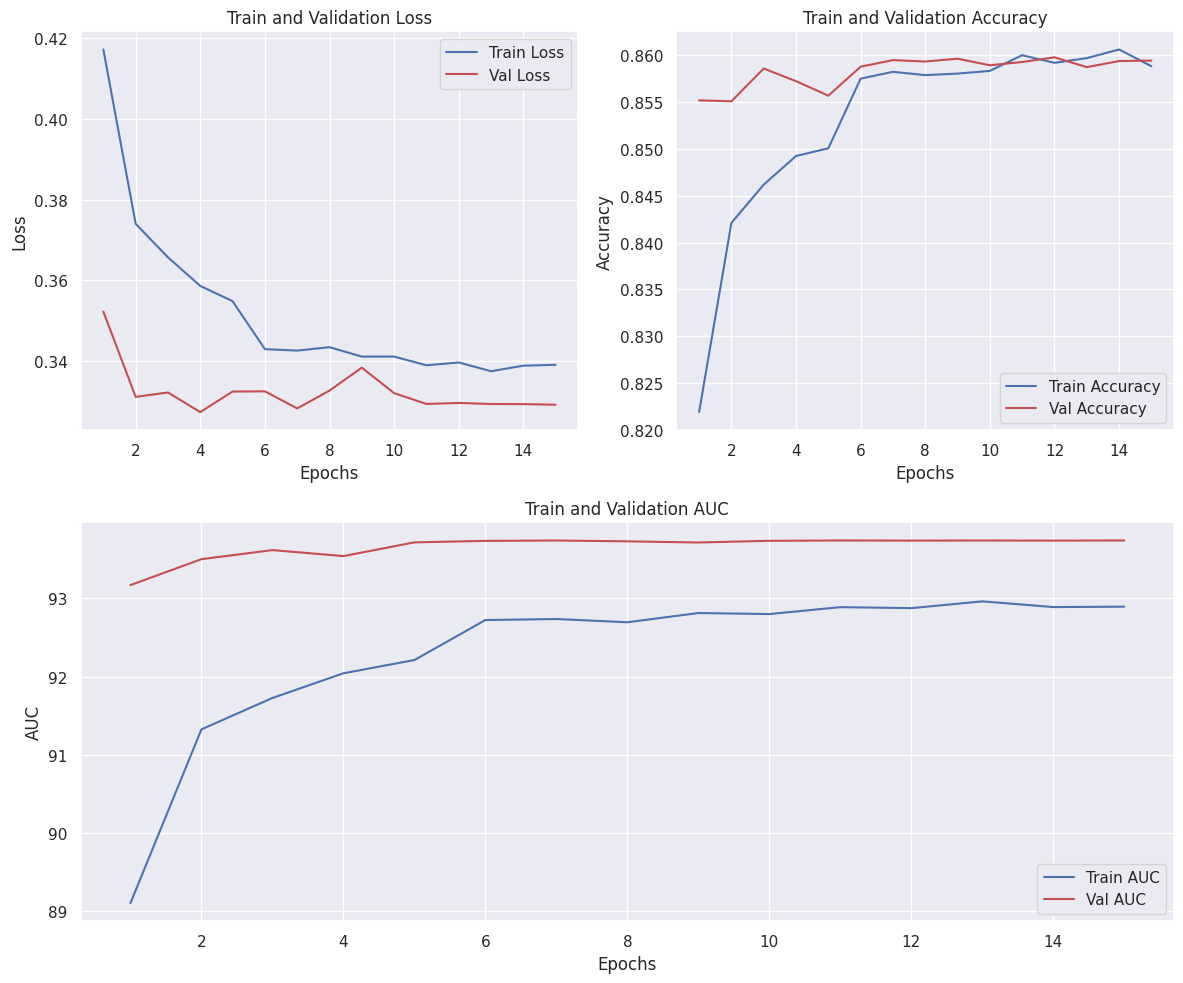

In [10]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [11]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "strong",
        "rot": "Z",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, i

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 31.68batch/s, Epoch = 42m 5s, Loss = 0.4159|0.3396, Acc = 0.819|0.855, AUC = 89.138|93.310


Epoch 02: 31.59batch/s, Epoch = 42m 12s, Loss = 0.3742|0.3553, Acc = 0.843|0.851, AUC = 91.303|93.450


Epoch 03: 31.75batch/s, Epoch = 41m 59s, Loss = 0.3635|0.3625, Acc = 0.847|0.845, AUC = 91.849|93.578


Epoch 04: 31.60batch/s, Epoch = 42m 11s, Loss = 0.3610|0.3499, Acc = 0.848|0.849, AUC = 91.955|93.632


Epoch 05: 31.63batch/s, Epoch = 42m 8s, Loss = 0.3567|0.3282, Acc = 0.851|0.859, AUC = 92.134|93.703


Epoch 06: 31.70batch/s, Epoch = 42m 3s, Loss = 0.3443|0.3273, Acc = 0.857|0.859, AUC = 92.689|93.701


Epoch 07: 31.70batch/s, Epoch = 42m 3s, Loss = 0.3427|0.3286, Acc = 0.857|0.860, AUC = 92.760|93.702


Epoch 08: 31.67batch/s, Epoch = 42m 5s, Loss = 0.3420|0.3341, Acc = 0.857|0.858, AUC = 92.778|93.671


Epoch 09: 31.65batch/s, Epoch = 42m 7s, Loss = 0.3417|0.3311, Acc = 0.858|0.859, AUC = 92.805|93.687


Epoch 10: 31.74batch/s, Epoch = 42m 0s, Loss = 0.3399|0.3298, Acc = 0.858|0.861, AUC = 92.888|93.708


Epoch 11: 31.66batch/s, Epoch = 42m 6s, Loss = 0.3392|0.3293, Acc = 0.859|0.860, AUC = 92.894|93.705


Epoch 12: 31.61batch/s, Epoch = 42m 10s, Loss = 0.3385|0.3295, Acc = 0.859|0.861, AUC = 92.939|93.705


Epoch 13: 31.65batch/s, Epoch = 42m 7s, Loss = 0.3391|0.3289, Acc = 0.859|0.861, AUC = 92.919|93.707


Epoch 14: 31.64batch/s, Epoch = 42m 8s, Loss = 0.3399|0.3292, Acc = 0.858|0.861, AUC = 92.881|93.703


Epoch 15: 31.59batch/s, Epoch = 42m 12s, Loss = 0.3388|0.3285, Acc = 0.858|0.861, AUC = 92.946|93.708
TOTAL TIME = 37905.62s
BEST ACC = 0.86% AT EPOCH 12
BEST AUC = 93.71 AT EPOCH 15


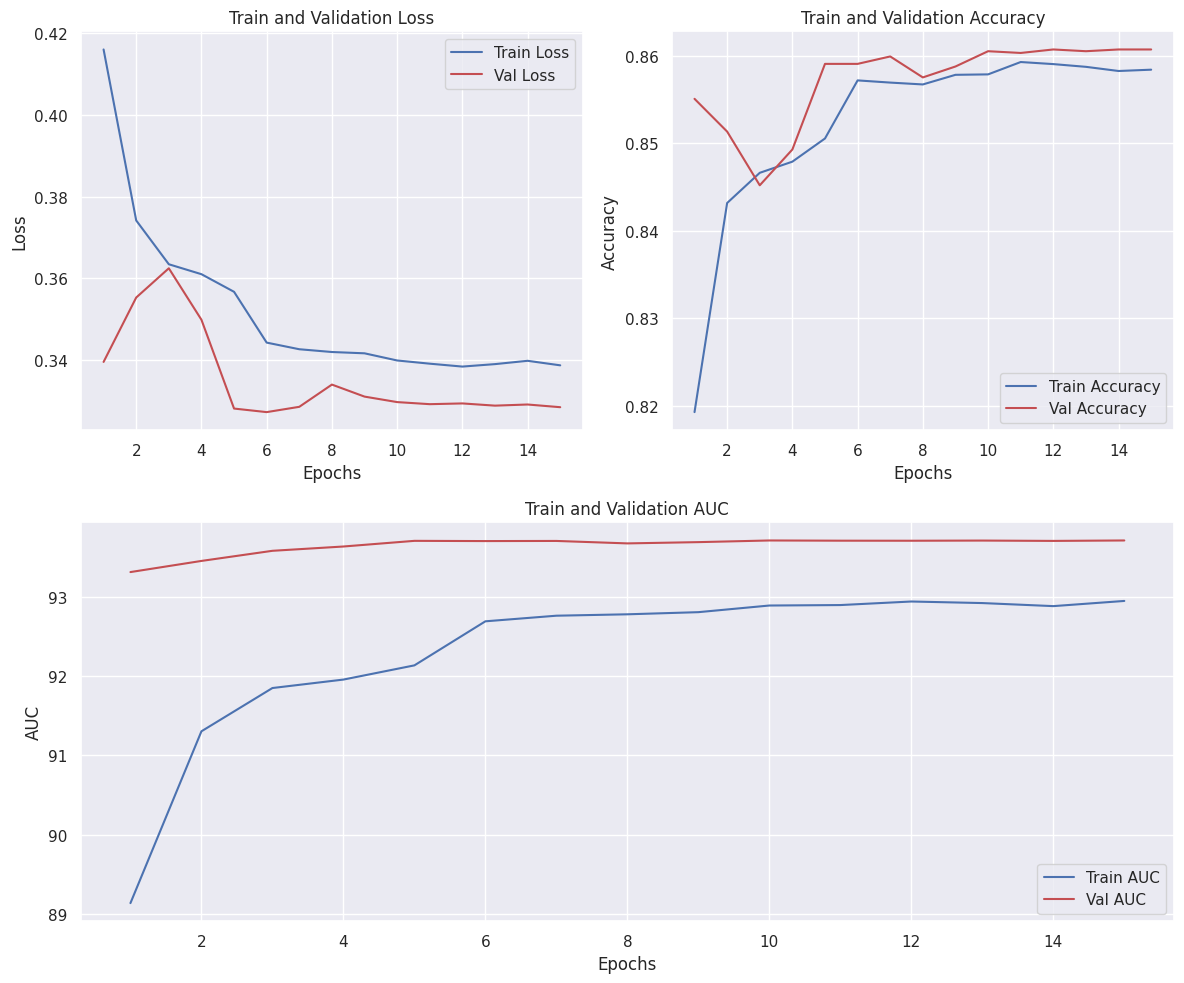

In [12]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)